In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

## 1. System Setting

In [3]:
stage_siz = 150
stage = np.zeros((stage_siz, stage_siz))
x_min = -2.0
x_max = 2.0
y_min = -2.0
y_max = 2.0

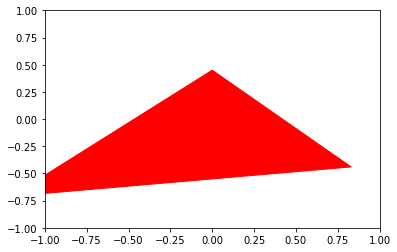

In [4]:
p1 = [0, 0.45]
p2 = [-1.2, -0.71]
p3 = [0.83,-0.44]
plt.figure()
plt.axis((-1, 1, -1, 1))
p = plt.Polygon((p1, p2, p3), color='red')
plt.gca().add_patch(p)

## 2. Calculate and Visualize System's Potential

In [15]:
stage_rad = (stage_siz - 1) / 2
for i in range(stage_siz):
    x = (i - stage_rad) / (stage_siz - 1) * (x_max - x_min);
    for j in range(stage_siz):
        y = (j - stage_rad) / (stage_siz - 1) * (y_max - y_min);    
        d1 = np.sqrt((x - p1[0])**2 + (y - p1[1])**2)
        d2 = np.sqrt((x - p2[0])**2 + (y - p2[1])**2)
        d3 = np.sqrt((x - p3[0])**2 + (y - p3[1])**2)
        stage[i][j] = d1 + d2 + d3
        
stage = stage.transpose()
stage.shape

(150, 150)

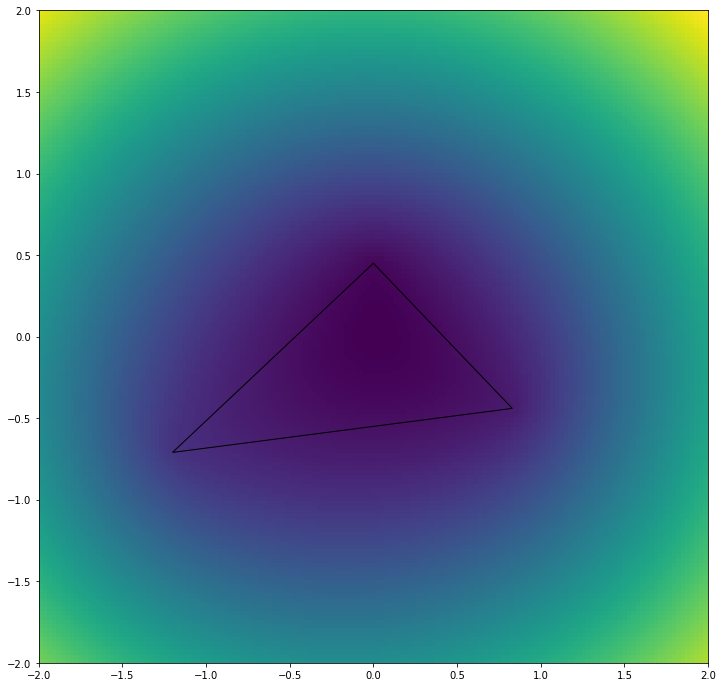

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
ax.pcolor(np.linspace(x_min, x_max, stage_siz), np.linspace(y_min, y_max, stage_siz),stage)
p = plt.Polygon((p1, p2, p3), fill = False)
plt.gca().add_patch(p)
fig.show()


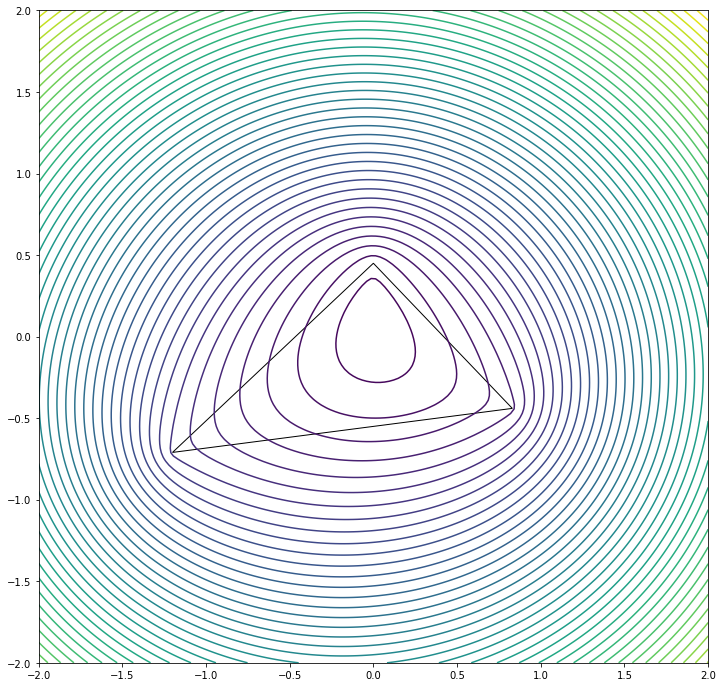

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
ax.contour(np.linspace(x_min, x_max, stage_siz), np.linspace(y_min, y_max, stage_siz),stage, 50)
p = plt.Polygon((p1, p2, p3), fill = False)

plt.gca().add_patch(p)
fig.show()

NameError: name 'ptl1' is not defined

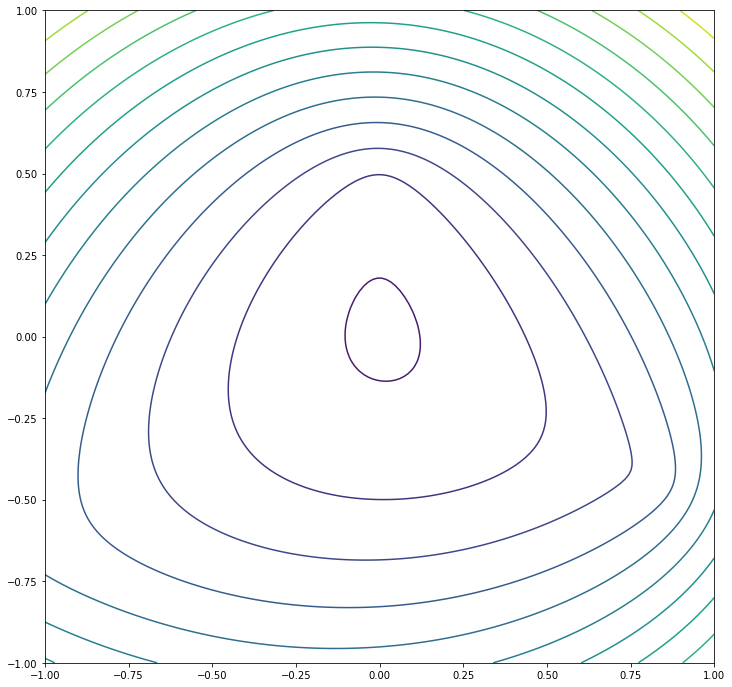

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
ax.contour(np.linspace(x_min, x_max, stage_siz), np.linspace(y_min, y_max, stage_siz),stage, 15)
reduced_size = 21
reduced_stage = [stage[i][j] for stage[i][j] in stage[i] for stage[i] in stage if i/21]
X, Y = np.meshgrid(np.linspace(x_min, x_max, stage_siz), np.linspace(y_min, y_max, stage_siz))
plt.quiver(Y,X,-1 * ptl1.gd[1], -1 * ptl1.gd[0])
p = plt.Polygon((p1, p2, p3), fill = False)
plt.gca().add_patch(p)
fig.show()

## 3. Particle Dynamics on Given Potential

In [18]:
class particle:
    def __init__(self, p0, v0, dt, dx, stage):
        self.dt = dt
        self.position = [p0]
        self.velocity = [v0]
        self.stage = stage
        self.gradient = np.gradient(stage, dx)
        self.gd=[]
        print(np.array(self.stage).shape, np.array(self.gradient).shape)
        
    def evaluate(self, max_iter):
        x = self.position[0][0]
        y = self.position[0][1]
        v_x = self.velocity[0][0]
        v_y = self.velocity[0][1]
        iter = 1
        while(((x > x_min) and (x < x_max)) and ((y > y_min) and (y < y_max))) and (iter < max_iter):
            self.position.append([x, y])
            self.velocity.append([v_x, v_y])
            ind_x = int((x - x_min) / (x_max - x_min) * (stage_siz - 1))
            ind_y = int((y - y_min) / (y_max - y_min) * (stage_siz - 1))
            for tmp in self.gradient:
                self.gd.append(np.transpose(tmp))
            try:
                a_y = -1 * (self.gd[0][ind_x][ind_y] +self.gd[0][ind_x+1][ind_y] + self.gd[0][ind_x][ind_y+1] + self.gd[0][ind_x+1][ind_y+1]) / 4
                a_x = -1 * (self.gd[1][ind_x][ind_y] +self.gd[1][ind_x+1][ind_y] + self.gd[1][ind_x][ind_y+1] + self.gd[1][ind_x+1][ind_y+1]) / 4
            except:
                break
            v_x = self.velocity[-1][0] + a_x * self.dt
            v_y = self.velocity[-1][1] + a_y * self.dt
            x = self.position[-1][0] + v_x * self.dt
            y = self.position[-1][1] + v_y * self.dt
            iter += 1
        return self.position

In [19]:
ptl1 = particle([0.25, 0.25], [-0.05, -0.05], 0.1, 0.1, stage)
position1=ptl1.evaluate(200)


(150, 150) (2, 150, 150)


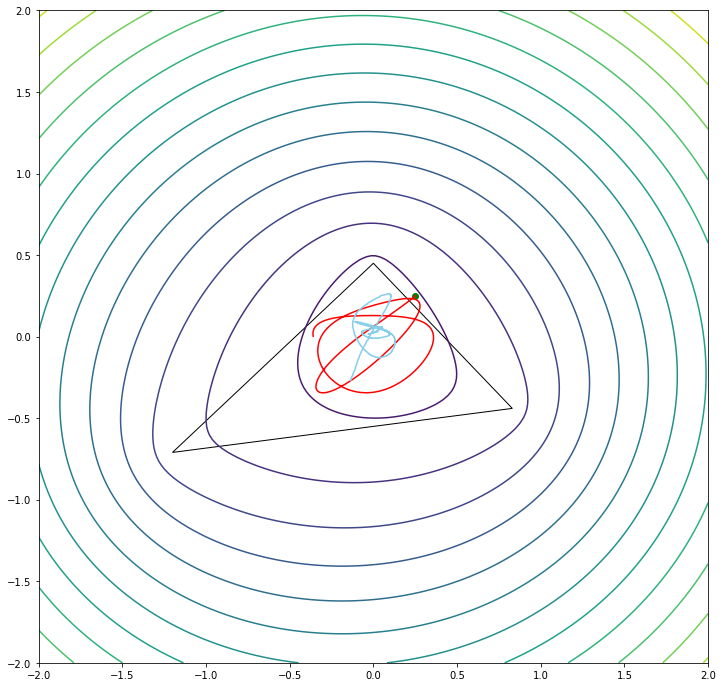

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
plt.contour(np.linspace(x_min, x_max, stage_siz), np.linspace(y_min, y_max, stage_siz),stage, 15)
plt.Polygon((p1, p2, p3), fill = False)
X, Y = np.meshgrid(np.linspace(x_min, x_max, stage_siz), np.linspace(y_min, y_max, stage_siz))
#plt.quiver(Y,X, -1 * ptl1.gd[1], -1 * ptl1.gd[0])
plt.plot([x[0] for x in position1], [x[1] for x in position1], color='red')
plt.scatter(position1[0][0], position1[0][1], color='green')
f = open('직각삼각형 - 1.csv', 'r')
rdr = csv.reader(f)
xd=[]
yd=[]
temp=0
for i in rdr:
    temp+=1
    if temp>=3:
        if i[1]=='' or i[2]=='':continue
        xd.append(float(i[1]))
        yd.append(float(i[2]))
plt.plot(xd,yd,color='skyblue')
p = plt.Polygon((p1, p2, p3), fill = False)
plt.gca().add_patch(p)
fig.show()

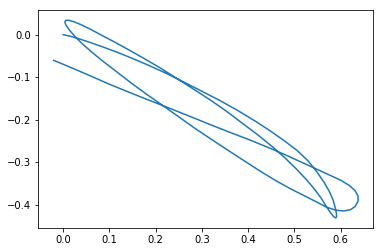

In [121]:
plt.plot([x[0] for x in position1], [x[1] for x in position1])
plt.show()

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABbkAAAVdCAYAAADaF0QtAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvIxREBQAAIABJREFUeJzsnXdYU+cXx783gbD3FJCNylKGKCpO3Kva2mqrraO29ldtrW1dXbbaWttaO+xSq7VWO5zVqoi4BQeIA1BANsjeO4Qk7++P6A0XBFkhCbyf5/Fp35N733sI4ea+5z3nexhCCCgUCoVCoVAoFAqFQqFQKBQKhUJRR3jKdoBCoVAoFAqFQqFQKBQKhUKhUCiU9kKD3BQKhUKhUCgUCoVCoVAoFAqFQlFbaJCbQqFQKBQKhUKhUCgUCoVCoVAoagsNclMoFAqFQqFQKBQKhUKhUCgUCkVtoUFuCoVCoVAoFAqFQqFQKBQKhUKhqC00yE2hUCgUCoVCoVAoFAqFQqFQKBS1hQa5KRQKhUKhUCgUCoVCoVAoFAqForbQIDeFQqFQKBQKhUKhUCgUCoVCoVDUFhrkplAoFAqFQqFQKBQKhUKhUCgUitpCg9wUCoVCoVAoFAqFQqFQKBQKhUJRW2iQm0KhUCgUCoVCoVAoFAqFQqFQKGoLDXJTKBQKhUKhUCgUCoVCoVAoFApFbaFBbgqFQqFQKBQKhUKhUCgUCoVCoagtNMhNoVAoFAqFQqFQKBQKhUKhUCgUtUUlgtwMw8xiGGYrwzCXGYapYBiGMAyzt51z2TEMs4thmByGYeoYhklnGOZbhmFMWjjHg2GY/QzDFDAMI2QYJpFhmE8YhtFp/09FoVAoFAqFQqFQKBQKhUKhUCgURcMQQpTtAxiGuQ1gAIAqAA8A9AOwjxAyr43zuAC4AsASwFEACQAGARgNIBHAMEJIcaNzBgM4B0ATwEEAWQDGABgIIAJAMCGkrt0/HIVCoVAoFAqFQqFQKBQKhUKhUBSGSmRyA1gBoA8AQwD/68A8P0EW4H6TEDKDELKGEDIGwDcA+gL4rOHBDMPwAfwGQBfALELIC4SQ1QAGAzgEYNhD3ygUCoVCoVAoFAqFQqFQKBQKhaKCqEQmd0MYhhkF4DzamMnNMIwzgBQA6QBcCCHSBq8ZAMgFwACwJIRUP7SPAXAWwCVCyMhm5ssA4ERU7Y2iUCgUCoVCoVAoFAqFQqFQKBSKymRydwZjHv73dMMANwAQQiohkx7RBRD4mHNONZ6MEJIK4D4ABwDOne4thUKhUCgUCoVCoVAoFAqFQqFQOoyGsh3oRPo+/O/9Zl5PAjAeMlmUs204p8/DfylPcoBhmOhmXvKCTG88/UlzUCgUCoVCoVAoFAqFQqFQKBSKCuMIoIIQ4qRsRx7RnYLcRg//W97M64/sxh08pz3wAZgCMOXxeHBzc4Oenl4Hp2wFpBqQZAJECjAaAN8JYASKv25z7hCC1NRUlJfL3lYNDQ307dsXWlpaSvNJDkGdOBMSaQUAQINvCgHfVmFXk0gkSE1NRWVlJQBAR0cHffr0AZ/PV9g1FYmYCFEhyoGUiAEABoJe0OIZtOrc+vp6pKSkoKamBgBgaGgIV1dXhfmqytTV1SElJQVCoRBahgIY9NKXiSwBMBWYQV+jde9pd6C6uhrp6emoq5P1/e3duzcsLCwUdj0pISiqK0NZfTVrs9O1gC5f+fen8vJyZGZmor6+HgDg6uoKQ0NDJXvVNYiJFPm1lSgT1bA2aWkV6ktl904PDw9oa2sryz2lQQhBbm4uCgoKIJVKwefz4eXlpZbfIdX1IhTWVqNKJOLY+5iYQ9CKn0cikeDBgwcoKSkBIQTa2trw8PBQlLsqTV1dHTIzM9lnC2NjYzg798xixMrKSmRmZrLfIdbW1rCxsVGKL1JCIBJLUCcRQySRQCSWsP8VS6VPnuAhzmYm0NHUbPP1CwoK8ODBA3bs4OAAMzOzNs/THcjKykJhYSEAgGEYuLm5QV9fv01z5FVWobi65skHAuDxGGjx+RBoaDz8Lx9afA0INPjgMUyb/e9M7t+/j6qqKgCArq4uXFxcoNmOz5e6QwhBbGwsxGIxeDweTExMYG9vD0bJv5/Opk4iQVJpEcemq6EJMx1dGGppgwEgFApx7949AICmpiasra0V+uytypSWliItLQ0AoKWlhd69eyvs2btUVIucmrKHIwbmWnqw0NZX+j3iEdnZ2cjPzwcgi1k4OTmp1bN3eX018oWlAAAew4OVtjEMNHTbNVdycjIqKmTxIn19fTg7O0NDozuFVJtSLa5CsUh27+AzfFhoWUIDmkhMTERtba2SvXs83fs3wuXRXaIt2tptOocQ4v/YSWQZ3n4AIJVKkZubi9OnT2Pw4MFtcKVtkLpwkNL/AbCTGXgWYEx/B6OhvODhhQsXEBwczI7FYjGqqqpw8uRJ2NvbK80vsbQcqYUvo6quCDJFG8BU71k4mH4JWW/SzufIkSN4+umn2XFtbS1MTU0REhKiIkH/1pNWeRnncj+FmJgDAHjgY7j1u+hnNLlV52/fvh1LlixhxxUVFRg9ejQ2b96sEH9VmY0bN+Ljz9Zh1MdD0HeqC2vnM3zMsnsBoy3HK9G7ruWdd97Bli1b2HFhYSFCQ0Ph7u7e6deKKk7E5oT9MK4rY20GGjpY5T4bQRbenX69tvLSSy8hJUVeTCQWi3Hp0qWu2SxVEmKpFH+m3sB39y7AsL4Oj5YVjFiKgj/DUHYsAgDg4uKCY8eOKc9RJUEIQUBAAPLy8gDIAr2zZ8/G2rVrlexZ66iXSnAiJRHbY6Jwr7gABgAabuH5WPbChmFj4W1h/cS5xGIxnJyc8Kh1ilAoxDfffIMRI0YoxnkVpqKighOQEIlECA8Ph46OjhK9Ug537tyBj48POx4wYABOnWqiTthpVAiFyCgtQ0ZpOdJLS5FZWoaM0jKkl5ahpEa2CGQAaD381xo0eDz0NjaCvYkxHE2MMddvAJxMTdrs244dO/Dqq6+y4+XLl2PFihVtnqc7MGfOHPzzzz8AZPfRf/75h/M5aQ2nEpJwISUN6aWlSCspZX+/rUX08J+Vvh4cTU3gaGoCJxMTOJoaw8nUBHbGRq3a4OsIYrEYxsbyHC4+n49bt26p5UZpRzl+/DimTZsGQLZOd3Nzw9WrV5XsVecTU5iHj6+cxc38HI5dDEBbzwAvevri8tZtbJC7vr4eo0aNwp49e5TgrXKpqqpCv3792HFdXR1mzZqFzz//XCHX+zs1GhtjTkMoEbM2Mz0TfOo3FYGWjgq5ZmsJDw/nPE/V1tbilVdewVtvvaVEr9rGkQfh+CnpGMREwtqm2ARimdtT0Oa3PgF03bp1WL9+PTuuqqrC2rVrMWfOnE71V9U4XxCG/Vl/gDwMiWoymig4WI7bt283PCxdGb41R3dqPPkVgHcBvEsI+foxr/8AYCmA1wkhPz+0HQAwC8AsQsihx5xzHMAUAJMJISHt+HEezRPNMIxfw/fa0NAQoaGhCAwMbOHM9kGE50HKlgGQZf2BZwXGdA8YDeVXEOzZswfz58/n2FxdXXHp0iX06tWry/2pl+QjueAl1NbHszYrg9dgY7xW4Tv4GzduxPvvv8+xzZ49G3/++Sd4PNWXyyeEIKb0H1wr/AWP9oEEPH2Mt9kAWz2/Ns2zZMkS7Nixg2PftWsXFi5c2JkuqzwZVWlYH/EeNM3l+48VD6qwxPVNjPQcrUTPuh6hUIiAgADExcWxNl9fX1y7dg0CQedUpFSJa/Fz0jGczI3k2IdbeOOtPk/DVEs1sqWLiorg7u6OoiJ5Bs4777zTbTeCogozsP72KSRWFHDsY2364jldZ4z1D4REIn9QPXPmDGcDtadw7NgxPPXUU+zYzMwM6enpbc5K7EoqRHX4O/4Ofou7idzqSs5rDIDxjm54pf9A+FvZtuk7eP369Vi3bh07njNnDv7666/OclutmDx5MkJC5I+sR48exfTp05XokXKor6+HoaEhhEIhAMDc3BwFBQUderYrfxjITi8pexjQLkVGaTkySstQ2s5sJk0+H72NjeBgbAQHE2M4mprA3sQYDiZGsDE0hEYnPA8eOnQIs2bNYscffPABNmzY0OF51ZFx48bhzJkz7DgzMxO9e/fu0JzlQiHSS8qQXiILesuC37JxzcMKrLbAZxjYGRs9DH7LPhNOD/9ZGXROdmfjTaDg4GDO+9KTmD17Nvbv38+Of/zxR7z++utK9Eix3CnIxW9x0TiRmoj6RpUkUpEI1VdvovJ8OMR5hbh37x4n2NtTWL16Nb788kt2bGdnh4SEBIUml2RWleKDm8dxrTCdY3/W0RervcfCUND1mdMVFRUYMGAA0tPlPo0ZMwZhYWFqEatoSGJFFtbf/QM5tcWszUHPCus8X4ST/pNjUA03wx6xdOlS/PDDD53uqypyryIWv6b+gBqJvIrp1q44RP58+1EY6GZzCb/KoDsFuRcD2AFgOyFkyWNeD4VMk3ssIeTsQ9unAN4H8B4hpMnWHMMwiZDpcbsSQp6oyd2Cb9EuLi5+WVlZEDUox1VEoJsIz4CULYc8wG3zMMCtvEzpxmzbtg2vvfYax+bh4YGLFy/C3Ny8y/wQ1qcjuWAuRJIs1mZr/AGsDF9t4azOgxCCZcuW4aeffuLYV6xYwclgVUUkRIzw/C1IKD/B2gw1bTHR9nOYaDm0eT6RSITx48fj4sWLrE1TUxNnz57F8OHDO8VnVedacTj2ZexCPZEviBL/S0HEV1Ho49QX169f79aZu48jJiYGAQEBnPvmmjVrOiWT4lpRPL5OPICiOrlalaGmLpb3eRqjLX1Urkx13759mDdP/pXI4/EQGRkJf3+VeZ7oMPm1lfgq9gyOZcVx7I76pvhgwASMsJZVIr3xxhuch0pvb+8emYFGCIGfnx8nk+KLL77AqlWrlOjV48muqsBvsdH4OyEGVfVcWRJtvgZm9fXCy94D4WTU9ixVAMjJyYG9vT27+aGpqYmsrCxYWVl12Hd1o3HW7sKFC7Fr1y4leqQ8AgMDcf36dXacnp4OB4eWn1FKa2sfBrDLkFFShowy+f+XPQyYtxVNPh/2xkZwNDGGg4mxLDPb1BgOxsboZWgAvoKDBefPn8eYMWPY8euvv44ff/xRoddUVfz8/HDr1i12XF1dDV3d9pWtPwlCCAqqqmXB79JSpJeUyYLgJaXILCtvk1TNI7Q1NODYIPD9KPvb0dQEJm2o2Pjll1/wv//9jx2///77+PTTT9vsj7pTXl4OKysrVtZIU1MTubm5PULOp6CmCnvv3ca+e3dQLGwqv2NUUoFdC16Dv7Xi5DtVkYSEBHh7e0MslmdV79+/H88++6zCr00IwcH029gUG4bK+jrWbqmtj499J2OsTd8Wzu58Xn75Zc7zg5GREWJjYzu8MagsqsVCbEk4gHMF8udmAU8Db7jNxBSbwc2u/ZKTkzFw4EBWchcAhgwZggsXLnRa4pU6kC/Mw+fR6yDUlt8v0i89wI2NsSguKqZB7pboQJDbBUAyZKnyLoQQaYPXDADkAuABsCCEVD+0j4GsCeUlQsjIRvM5Q9ZsMgOAE+nAG8UwTLSfn5/fhg0bMHPmTE7AxsDAAKdPn+6UQDcRngIpexuywiMAfDswJnvAaNh1eO7O5ptvvsHbb7/Nsfn6+uLcuXOc8jlFUSOKQ3LBSxBLH2VG8uFg+hXM9Ge1eF5nI5FI8Nxzz+Hw4cMc++bNm/HOO+90qS+tpU5SibCcdciukfdZtdbxxnibT6Gj0f7fXXFxMQYNGoTU1FTWZm5ujqioKDg6OnbEZZVGLBXjwIN9uFgoz6DRJJoI+/gSEk/I99bmzZuHPXv2qFzwVdFs2bKF87fAMAwuXLjQbimCyvoa/Jh0FKF5Nzj2kZYDsLzPTJgIVFP3nBCCSZMmITQ0lLX5+voiMjJS7bXg6qUS7EmOxA/xl1Atln8/6vA18b9+QVjkFggBX/4zFhcXw9XVFWVlcnmZbdu2cQJ7PYXG0lcWFhZIS0tTmQ2xuKJ8bL8ThROpCZA0eowy19HFS56+mOfhA1PtjgeZZs2ahUOH5EV5GzduVBv5ls4kPz8fvXr1YuVbzMzMkJeXp/b3ifawdOlSTiLBoUOHMHPmTJTU1srlRB4Gsh+Ny4V1LczYPFoafNgby4LYDf85mhjDykBf4YHslrh9+zZ8fX3Z8fPPP48///xTaf4oEwcHB2RmZgIAtLW1laYnKpZKkV1egbRH2d8lpUgvlWV/51RUPnmCx2Csrf0w+C0Lgj8KhjuamEBXwNXaXrBgAX7//Xd2fPz4cUyZMqVDP5M6snPnTixevJgdP/XUU/j333+V6FHXIxSLsTsyHOtDjkLQu2nfgklOfbBq0Ih2b0KrE4QQjB8/nlPVEBwcjLCwsC5df+XXVmL97RCE5SRy7JPsPPDhgAkw11Z8xd6///6LmTNncmz79u3DCy+8oPBrKxJCCE7mRmLr/SOok8oTy0Zb+uDtfrOgr8HdLKypqcGQIUMQExPD2iwtLXHz5k3Y2vasDaALFy5g8ozJGPlJIByC5D/7sRfDkBufT4PcLfGkIDfDMJoAXADUN86ubpCt/SYhZGsD+xYAKwBsI4S81sDOBxALwB3AU4SQYw/tPAD/QCZlspYQsqmDP1O0n5+fX3R0NE6ePPnYQHdoaCiGDBnS7muQ2uMg5SsBPCzh5jvIMrj5XS8B0lo+++wzfPDBBxxbYGAgTp8+DQMDxQWaKoVXkFK4GFIia7bCMNpwNv8ZRjrKKXevra3F+PHjER4ezrGr4hdJuSgbp7LXoEyUydrcDMdhpNUq8Hkd38m8d+8ehgwZwjZ0AAAvLy9cuXJFoZ8JZVEmKsX21K1IrU5ibTbatljishwHfj2EN954g3P8L7/8wtEv7wlIpVKMGzcO586dY2329vaIiYmBkZFRC2c2JaIwDt8kHkKxSP75MtbUx1t9n8ZIywGd5rOiSE9Ph6enJ9ukFQC+/PJLrFy5UoledYyrBWlYf/sUUiq5zZAm2bpjTf9x6KX7+N/xt99+y9GUtbS0RFJSUo9pyPkIqVQKHx8fxMbGsravv/66ySZyl/pECC5kpWJHzA1czcls8rqLsSle6R+AGa4e0O7EwOu5c+c4sjUODg5ISUnpcRn+ABAUFISIiAh2fOHCBYwcObKFM7ofhBBs+XUnPvl5GzTNzaFpZg57L2+IdfVRWde+QLa2hgabie1gYgRHExM2mN1ZMhKKIDMzk5PBPmHCBIXqk6syBgYGbLNFW1tbTkNOVaG2vh6ZpeUNpE9KH0qhtF8Wx8pAn6P7vWntGqTH3EF9STEglaKwsLBLq2lVhVGjRnGqSA8ePIhnnnlGiR4ph9dffx0///wztNycYDAmCHq+XkCD+5kGw8M8Dx+86T+kUzalVZUDBw7gueeeY8eampqIiYlRmmRLaHY8PrkVgqK6atZmpKmN9waMxwz7/goLvOfn58PLy4sjkzh79mz89ddf3SbZKr06D+vj/kBadR5r66Vtig+9XoS7oUwBgRCCF198Efv27WOP4fP5OHv2bI97pkpKSsLgwYNRWloKhsdg0FIf+Mz3BAAcmncSRQklNMjdxAmGmQFgxsOhNYAJAFIBXH5oKyKEvPvwWEcAaQAyCCGOjeZxAXAFgCWAowDiAQwGMBrAfQBDCSHFjc4ZDOAcAE0ABwFkAggGMBBABIBgQkj7nobl12CD3AAQEhKCmTNnsqVRgOyh69SpUxg6dGib5ye1R0DK1wJ4mLzOd3oY4Fb9Mt333nuvifTAqFGjcOLECYWUD5bWhCC96A0QyDYZ+IwhXCx3Q19rYKdfq01+lZYiKCiIbfYByL5YQ0JCVEZrNq8mFqE570MokZfqDDRbBD+zlzr1Cy8kJARTp06FtEEZ57Rp03DkyJFuFaxIrkrE9pStqBDL309/k8F40WExtPnaIITghRdewN9//82+LhAIEBERgYEDlft57WoePHgAb29vTubuvHnz8Mcff7Tq/PL6avxw/1+cyb/JsY+x9MGbfWbCSKC6GsaNaZzZrqOjg7i4ODg7OyvRq7aTV1OBz2PDEPLgHsfuYmCOD30mYqhlyz0kRCIRvLy8kJQk3yBavXo1Nm3q0J60WtJ4UWZlZYW0tLQubzYoFIvxb/I9/BpzA8llxU1eD+zVG68OCMCo3s4KCQYSQuDu7o7ERHnmU0/NTty8eTNn82v58uX49ttvlehR11BWK8TVjExEpGUgIj0TD8ornnxSI3Q0NeBgbAwH04YZ2bJgtqW+nsoGsluiqqqKkygQEBCAyMjIFs7onohEIk5z9/79++POnTtK9KjtlNUKkV4qD3o31AGvrRc/eYJGEIkETGUFXgwejWA3ZwzqbQfNbvSs3RIZGRmcSlFjY2Pk5eVxPiM9gezsbDg7O3MS8E5eCUdITSmOpcRzjjXQFOB130As9PKDtoZm46nUmqqqKri7u3M2vlatWoUvvvhCiV4BZaJafBEThkMZ3HtVkKUz1vtNgZ1e51bAE0Iwffp0HD9+nLXZ2NggNjYWpqamnXotZVMnqccPSf/ieM411sZneHjVZQpm9R6Bn378qUnC2ZYtW3pc4+bS0lIEBgbi/v37rM3IyAi/he/AWVEI9s89hsIEKlfS1AmG+RjAuhYOYQPaLQW5H77eG8B6ABMBmEEmU/IvgE8IISXNXN8DwCeQBcMNIJMo+QvAJkJIh+vYGge5AeDUqVOYMWNGhwPdpOYASMUHeKT4Dg03MCa/g+Grx248IQQrVqzAd999x7FPmDABR48e7dQHjaKqfcgseR+PNgM0+VZwtdgLHUHX6ls1R1ZWFoYMGYLs7GzWZmBggEuXLrW583tnk1QRhgt5X0D6UC+azwgwynoNXA0VE4BvHMgDVONBozMghOBC4RkcyNoH6cPKCwYMnrabg7GWkzgbBpWVlRg0aBASEhJYm4ODA27evNntHjSexP79+zF79myO7a+//npiR+vLhbH4JvEQSkXy8l8TgQHe7vsMgiy8FeKrIhGLxQgMDETD75OxY8fi9OnTapFdIZKI8VvydfwUfxm1EnmZoJ6GAMvcR+BF10EQ8Fq3wP7vv/84DfUEAgHi4+PVLuDfUaRSKby9vTmbpN9++y2WL1/eJdcvEdZg773b2HP3FopqubqefIbBFOd+eKX/QHhbWCvcl8YZ/lOmTOEs1HoKycnJcHNzY8cODg5IS0tTi3tEWxBJJLiVnfswqJ2B2Nx8tGZVo6upKZcTMTVmZUYcTY1hoafX7d4nQgi0tLRQ/7AJoouLC5KTk5XsVdeTm5sLGxu5HMOoUaNw/vx5JXrUeRBCkP9I/5vN/JZJoGS1Qf/bQEsLI5wdEezmjJHOjjDU7vpmd13Fxo0b8f7777PjV199Fdu2bVOiR8rhrbfe4qzDp02bhmPHjgGQNan87PoFROZyKx5s9AzwbsBwzHDzUMuNv8exdu1aTqKEra0tEhISVKaZd3h+Cj66eRIPauQJP7p8TbztNQZzXQaCz3SOJFbjvh4AcPr0aYwbN65T5ldFzuffxtcJB1Atkffd6MOzwp5Zn0JYLF8/drds9tZQX1+PiRMnciqq+Xw+Tp06hbFjxyKtOgVThk1F/J0EGuTuaTwuyA08PtCtr6+P0NDQVgW6Sc1fIBUN9gY0+oEx3Q2Gp17BL0IIlixZgh07dnDsM2bMwP79+6Gp2bGdYkII8iq2Ird8M2vT0nCGq+VeaKmYXnlcXByCgoI4jQ2sra1x5coVODm1nNmoCAghiC7ejeji3axNm2+MCbafwVrHS6HXXbx4cZNmWbt378b8+fMVdl1FI5LWYV/Gb7heIi8j19cwwGKnpehn6PnYc+7evYtBgwZxJCqmTJmCY8eOqV1n647y0ksvcbK3jY2NERMT89gGKGWiKnx//wjON2guAgDjrPyxrM8MGGqqb7nl7du3MXDgQLbJHgD8/vvveOmll5To1ZO5nJeCT++cQloVd795Wm8vrPIeCyudtkkSEUIwbtw4nD17lrXNmjULBw4c6BR/1Ym///4bzz//PDvu1asXUlNToa3AAEVaeSl2xt7AwcQ4CCXcDEJ9TQHm9OuPhd7+sNXvOgmZ0tJS2Nrasjq7DMMgNTW1W/d1aA5vb2/ExcmbuN68eZOjy6yOEEKQXFyCiLQMhKdnIirzAWrq65s9Xk+gCVFmBvLj76K+qAj1xUWICDkJ3359e9QiFZBVeBQUFAAATE1NUVzctNqiuxMXFwdvb/nm9jPPPIODBw8q0aOuoV4iYfW/00vLsP9UKGIyMqFpbgFN4+Z1ljV4PAzqbYtgNxcEu7nA1qj7yIERQuDh4cFJIrl8+TKCgoKU6FXXk5eXBycnJwgbNNWNjIxEQEAAOyaEICwjGZuuX0JqOff5zcvcCu8NHomhti039FV1EhMT4e3tzW4EArLnqsbJNcqmWizCd3cv4Pfk65wNXV9TO3zmPxWuhhYdmj85ORk+Pj6orpbLo7zxxhv4/vvvOzSvOpBbW4z1d/cioUIus1dXVIX4z0NQdjsLnp6euHbtmspsenQFhBC89tpr2L59O8f+888/47XXWAVo+Pv74+bNmzTI3dNoLsgNAKGhoXjqqaeaBLpPnTqFYcOGNTsnqd4DUtmgC7aGFxjTXWB4im/aqAgkEgkWLFiAvXv3cuzPP/88/vjjj3bLVBAixYPSj1FYtZu16Qr6w8Xid2jyVbNz9sWLFzF+/HhO2VifPn0QERHRpXp5YmkdLuZ9geRKeQDJROCIibabYChQvNa7SCTC2LFjcfnyZdYmEAhw/vz5dsn6KJuiugJsS/keWbUZrM1B1wlLXN6EqaDl3+uff/6JuXPncmw9salaeXk5BgwYgIwM+Xs4evRonDlzhhPwv1BwB98lHkZZfRVrMxMY4u1+szDU/PGbCerG6tWr8eWXX7JjMzMzxMfHw8KiYw+4iiC7ugwbY043aaDTx9ACH/lMwiCL9i+OYmJi4Ovry5E3unTpEoYPH97uOdURiUQCT09PjlTHDz/8gKVLl3bqdQghiM7PxvaYKISlJzfJmrXW08ciL3/McR8AQ4FySr4XLVqE334G5jLvAAAgAElEQVT7jR2vXbsWGzduVIovyuSjjz7Chg0bOONPPvlEiR61j+LqGkSkZyIiXSZBkl9Z1eyxPIZB/17WGOZoj2FO9vCx6YUVy5fjxx9/ZI/pqZq77u7ubECPYRiIxeIet1F+8eJFjBo1ih331MzdcePGsY31GE1N/B5yCulSBmeTUpFd0bzETz9LCwS7OiPYzRle1lZqvVF048YNTiDXyckJKSkpav0ztYeVK1di82Z5ElhLev31Ugn+TojBtzeuoFjIrdoa3dsZawePRB9T9agkbwghBBMmTEBYWBhrGzNmDM6cOaOyn4fbxQ/wXvR/SG7Qz0aTx8fSfsOxuO/QVldENkQsFmPEiBG4evUqa+vXrx+io6MVIiGritRLxdiedAIHsy+xNiIlyN1/E/++8wvc+ypHm11ZNK6OBIA333yziQIDDXL3UFoKcgNtD3ST6p0glQ1kGzQHgDHZCYan3jvsYrEYc+bMwaFDhzj2RYsWYceOHW1+GJcSETKK30FpzVHWZqAdBGfz7eDzVHsX7uDBg3juuefQ8O8zMDAQZ8+e7ZIvmlpxGUKz30e+UJ4FZqcbgLE2H0OL33XvXWFhIQYNGoT09HTWZmlpicjISE4TJVXnbnkMdqb9hBqJfGd8mNlIzLF/CZqtbNj5qCnMI3g8Hs6cOYPRo0d3ur+qzOXLlzFy5EjO38bmzZvxzjvvoFRUie8SD+NiYQznnInWAXjdbToM1Dh7uzE1NTXw9vZGamoqa5s7d26TjUJlUicR49f7V7AtMYKT6auvoYXlHiMx1yUAGp0QZFmyZAkny8Df3x+RkZE9LoCzd+9evPjii+zYzs4OycnJnSL7JZFKEZqehB0xUbhVkNvkdQ8zS7zaPwBTXPpCsx2Lq84kKioKgwYNYseWlpbIysqCQNDx5sjqxM2bN+HvL19veHt7IyYmpoUzVANhvRg3HmQjIj0D4WmZSCgobPF4e2MjDHNywDBHewQ69IZRo+qF3bt3Y+HChex4zZo1TXrB9ASGDRuGK1eusOOSkhKYmDSfxdsdOXz4MGeDoydugEkkEpiYmKCyUlaCr6enh7KyMmhoaIAQgsTCIpxNSsXZpBTE5uU3O4+VgT7GuDpjrJsLBtvbQasTmwh3BcuXL+dkp3744YdYv369Ej3qegoLC+Ho6MipFI2IiHhiIlGlqA7b7kTi15gbnGc7HsNgdl9vrBg4DJa6qr3ObsihQ4cwa9YsdqyhoYGYmBi4u7sr0asnI5KI8UtiBLYlhKOeyBM9+hpa4jP/aehvatPC2U357LPP8MEHH7BjDQ0NXL16tcf1gVqxYgX2XPkX/VZPhMBYvm7sb+SMDzznwkJbPRNK28qJEycwbdo0znp70qRJOHbsGDQa3e9pkLuH8qQgN9B8oDskJIRTOkWqfgGp2iI/UdMPjMmvYFQ8aNtaRCIRZs6ciZMnT3Lsy5Ytw/fff9/qHVWJtBqpRUtQKZTvxBnrToWj2TfgMerRUGTr1q148803ObapU6fiyJEjTW4unUlpXTpCstegsl4eyPAwmo5hVsvBY7r+ITYuLg5DhgxBVZU8e6t///6IiIhQ+ZIhKZEiNO84juUcBHmY88hn+JjT+yUMtxjTprnq6uoQFBSEGzdusDZLS0vcunWLozHZE2jcsFYgEODny//gaF00KurlD+vmWkZ4t9+zGGym2g+q7eXMmTNNNPJCQkIwceJEJXkk53xuEj67E4rM6lKOfaZDf6z0Coa5duf97ebn58PNzY1dtAPqL23UHsRiMTw8PDjNOBuXFLaV6noRDiTGYVfsDWRWljd5fVRvJ7zaPwBDbOxVKuNp4MCBHN361uj3dzcIIXB0dERmprz0Njk5GS4uLkr0qilSQpBYUITw9AxEpGXgxoNs1IklzR5vqKWFIY69MczRAcOc7GFv3PKCMzY2Fv3792fH48aNw+nTpzvNf3Vh2rRpHH16VfwsKJpff/0Vr7zyCjt+tEHek2gs2dKSLnleZRXOJafgXFIqrmRkoV7y+L9LPYEmgpwcMNbNBSNdnGDSxU2P20p9fT1sbW1RWCjfQLt//z6nj0FPoPGz9JgxYzjyb08it6oSW26E4+D9OE5Vl66GJl7pH4BXBwRAT1O1N5erq6vh7u6OrKws1vbuu+/iq6++UqJXbeN+eQHei/4PMaU5rI0HBgvcBmO5xyjotKJBaHR0NAIDAyEWyzctNmzYwAl69wT++usvvPDCCwAAgZke3NdOgomvPfu6oYYuVnvM6TZVwc0RGxuLoUOHcmIvnp6euHLlCgwNmybV0iB3D6U1QW5AJur/1FNPcXSx9PT05Bnd1T+AVG2Vn6AZAMZkOxienqJcVwpCoRBTpkzhCNwDssaDmzZteuJCWiwpQXLhAtSI5Fq8FvrzYWfyMRhGvTqGr1mzpkmzxcWLF2P79u0KCSg8qL6BsJx1EEkf3dQYDLFYCm+TWUoNYBw/fhzTp0/n7CbOmDEDhw4dUtlszVpJLXanb8OdMvnfvbGmCV51fhPO+q7tmjM9PR1+fn4oLZUHDoOCgnDu3LkOa9erEyKRCEOGDMHNmzchMNGF21tjYRHEfU+n9BqM19ymQV9DtRdbHWXBggX4/fff2bGDgwPi4uKUtgGUWVWCz+6cxvm8JI7d3cgK63wnwc+sqX56Z/DFF19gzZo17NjGxgaJiYkqvxHW2fz+++9YsGABO7a3t0dSUlKbs5gLaqrwe9wt7I2/jfI6Iec1AY+PGW4eWOw9UGVLk3fu3InFixez4xEjRuDixYtK9Eg5NM5WVJWgXl5l1cNmkZm4kp6J4pqaZo/V4PHgY9MLQU6yoLa3tRX4bfjeF4vFMDQ0ZHXaTUxMUFxcrFKbMl1B454WUVFRPS5Dr/H3xG+//ca5X/YEGjeVa21lQ1WdCOFpGTiXnILzyWkoEwofexyfYeBvZ4tgN2cEu7nAwUT1sh5PnDiBqVOnsuPBgwfj2rVrSvSo6ykpKYGjoyMnOeD8+fMcOZ/Wcq+4AJ9fv4jLD9I5dgsdPbw9cBie7evdKVV7iuD999/nVHPY2NggISEBBgZt6xGjbCREij3Jkfj27gVOU/feeib41G8Khlg239ertrYWfn5+HH36wMBAXL58WaFJdapGXFwcBg8ezKlsCB43Fi/+shJ70k9D2mArZ1bvEXjFZQoEvO73/uTn52PQoEGcBAkLCwtERkY229+GBrl7KK0NcgNAWFgYpk+f3iTQfTfyFfQ2PSE/UDAEjPHPYHjdp/y+IVVVVZgwYQKntBIAPvnkE3z00UfNnicSZyOpYB7qxCmsrZfR27A2XK6WCxpCCObPn89ZmADAunXr8PHHH3fqte6VHUN4/rcgkGVqaDA6CLb5EI76zWvDdyVfffUVVq1axbGpaqlpTm02tqV8h/w6eTa8m34/vOK8DIaaRh2a++TJk5gyZQrHpm5ZB51BfHw8Jrz7POxfGQZNQ3l5uqWWMd7t9xwCzPoq0buuo7i4GO7u7pyMpBUrVmDLli0tnNX51IrrsT0xAjvuX4FIKs/2MtTUxgrP0Zjj7Ndpnd8fh1AohIeHB9LS0lhbTyw/rq+vR79+/TgyNjt27OAEfFsisaQQv8bcwNHkeM7vEQCMtLTxoocPXvL0VflS5Orqatja2nKaOMfFxcHTs3tn3zTmwoULHEmroKAgTp+LrqJGVI/IrAcIT8tARHoGkotKWjze2cwUwxztEeTkgEG97aCv1bFswKFDh3J0RlNTU5XSzFuZvPXWWxwdzdDQUIwfP16JHnU9q1at4jwrHTt2DNOmTVOiR13Pyy+/zGnqfvToUUyfPr1Nc4ilUtx8kIOzSSk4k5SCzLKmVT6PcDU3RbCrrHHlABtr8FRgLTZnzhz8888/7FgR/StUnY8//pjToyEoKAiXLl3q0Fr50oM0bLx2EQklXIkpNxMzvDd4FEb1dlKptfj9+/fh5eXFaTap7lVfmVWl+PDmCVwtTOPYn3X0xWrvsTAUNG1G3ngzXFdXF3fu3IGra/sSstSR8vJyBAQEcCoh7e3tER0dDXNzc8SUpeLTu3tRWCe/17kZ2GGd54uw1VXNZI/2IBQKMXr0aM6mX2v6odEgdw+lLUFuoGmge9MHZli51FR+gGA4GJMfwTBNb1TdifLycgQHB6Px+/bVV1/h3XffbXJ8bf19JBe8iHrJo8Aig94mn8LC4MUmx6oT9fX1mDp1apPy2m3btnGyMdqLlEhwvXAbYkrlD3x6GhaYaPs5zLVVp3SPEIKFCxdyslYBmQ5t46aMyuRmaRR+T9+OOql8oyrYciKetpsNfifJvXzwwQf47LPPOLbDhw9j5syZnTK/qlNUV44tCQdxtfgex57z3x18PfkdTB03SUmeKYfGjUl5PB6uXbvGaaqkKAghOJOTiI0xp5FdI3/4YwDMcvTFO16jYarVNdVGBw8exLPPPsuOdXR0kJiYiN69FZM9rqo0zmJ2dHTE/fv3m632IIQgIjsDO2Jv4GJWWpPX7Q2MsLj/QMzq4wVdFS89bkjjhduyZcuwdevWFs7ofojFYlhbW6O4uBiArOFgbm4urKysFHpdiVSKu/kFiEjLRHhaBm5l56C+QXPYxpjo6GCooz0b2O5l2LlZdG+++Sbnd79//37OvaInsH79eqxbt44dq3swpz00DvCGh4c/tvdRd8bDwwPx8fHsOD8/H5aWlu2ejxCClOISnE1KwdnkVNzOzm3SkPgR5nq6GOPqjDGuzhjm6ABtza7PgiwvL4e1tTW7xtbQ0EBubi7MzbtPoOpJlJeXw9HREWVlZazt9OnTTeTv2oNEKsWhpLv4Oioc+TXcJsFDbezxXuAoeJkr9vunNRBCMGnSJISGhrK20aNH4+zZsyoViG8PhBAcyriDz2NOo7JeLoNrqa2PdT6TMM5W3jwxLCysyWZnZ8UX1AWpVIqZM2fi2LFjrE0gECAiIoJT7VReX40v4//BlaK7rE2Hr4W1Hs9juIU31B1CCObOnYu//vqLY29NnIUGuXsobQ1yAzKt1WnTpmHje/pY/oq8MUxJVX+YuewDoya60h2luLgYo0aNQlxcHMf+448/4vXXX2fHVXXRSClcAIlUFmRhoAlH8+9gojsV3YHKykqMHj2aE/Dn8Xg4cuRImzMwGlIvrcW53E+RXhXO2sy1+mCi3efQ01C9B766ujoEBwcjIiKCtWlpaeHixYsYPHiwEj2T6W8fzT6A0Hy55qWAJ8CLDosRYDqkU68lkUgwfvx4jqSPoaEhoqOju/XOOyEEoXlR+DHpGKrEtay9NrcciV+fRtmtLNjY2CAmJgZmZmZK9LRrIYRg8uTJOHXqFGsbMGAAoqKiFCpjk1ZZjE/vhOJyfgrH7mXSC+t8JmGAqa3Crv04CCEYOXIkJ1NV1ZpxdgX19fVwc3NDRkYGa9u1axen+R4AiCQSHE9JwI7YKMQXN23u52dlg1f7B2Ccg2ub5CFUhfj4eHh4eLBjQ0NDZGdn9zgJm4ULF2L37t3suC2Z/W3hQVk5ItIzEZGegavpWc3KGQCAJp+PADsbDHVyQJCjPdytLBWa4dlYxmf16tXYtGmTwq6nivzwww9444032PFPP/2E//3vf0r0qOuZMWMGjh6VN6OPj49Hv379Wjije1FaWgpTU3nSlLOzM1JSUlo4o+0UVVfjfHIaziSlICI9o1l9fW0NDQQ5OSDYzQWjXZxgptc1lcm7du3Cyy+/zI6nT5/O+Uz0BBo3GBw8eDCuXr3aqcHdWnE9dsbcwM93rqO6QaY0AMx09cC7g4bDVr+ptm9XceTIETz99NPsWENDA7dv3+5W1V4FtZVYf/sUTuckcOyTbN3xoc9E8GpE8Pb2Rk6OXMt7ypQp+O+//9Q+0N8WNm7ciPfff59ja+45iRCCww/CsS35P9QT+b1todNEvOg4Vq3ft8Yb4YAsqW7Dhg1PPJcGuXso7QlyEyJF1r1XYGcmX6wfOVmFxe9U4OjRkxgxYoQiXFVJ8vPzMWLECNy/f59jf7RoL689j7Si1yAlsqAXj9GDs8UOGGoHPW46tSU/Px9Dhw7llKFra2vj7NmzT+yE/Tiq6wtxKnstiurkpTmO+kEY0+sDaPJUV8e4oKAAAQEBHK0oKysrREVFKS1js0pciV9Tf0RCpXx310LLEkucl8NO176FM9tPQUEBfH19OQ8nAwYMwNWrV6Gj4k1/2kOBsBRbEg/iejH3YW28iS++nbYSBdl5rO2ZZ57BgQMH1Ppho62kp6fD09OToyW3adMmrF69utOvVSMW4aeEy/jt/jVOR3djgQ7e8RqDWY4+CpUmaYno6GgEBARw9PuvXbum9E2wrmb79u1YsmQJO3ZxcUFCQgI0NDRQXifEX/F3sPvuTeRVczOtGAATHN3wSv8A+Ft37SaFIhg9ejQuXLjAjrdv385pPNcTOHr0KGbMmMGOJ0+ejBMnTrRwRuuoFNbhWmaWLLCdloH00rIWj+9rYS7T1Xa0x8DettDpwj4SjZvtBQcH48yZM112fVVg3759mDdvHjv+9NNPmyzsuzvDhw9HeLg8qaOgoAAWFhZK9KhrCQ0N5TSmVvQmcG19Pa6kZ+JMUgrOJaeipKb2sccxAHxteyHYTSZr4mJm+tjjOoPG3wkHDhzArFmzFHY9VaOqqgqOjo5sdQ8g63vUWAaxsyisqcZ3N6/gr/g7kDR4LhPw+Vjk5Y/XfQNhKOjaxL2amhq4u7tz1pFvv/02vv766y71o6sIzY7HJ7dCUFRXzdqMNLVhciUFYV9sY23m5uaIjY2FtbW1MtxUCqdPn8bEiRM5a4bFixdjx44dLZ53v/IBPondgxyh/O9otKUPVrnPhjZffSoeH/HPP/80qex69tln8ffff7eq9xkNcvdQ2hrkJkQKUvEhUHuAtR04Vol5S/MgFsu0kkJCQnpUoPvBgwcYMWIER2+Vx+Phv9PvwtrtAABZN2ANnhlcLX+HrqC/kjxVLElJSRg2bBhHf9fU1BQRERFtykYpFN7Hqey1qBEXsbYBJnMw2GIJGCUFp9pCTEwMhg4diupq+Re2j48PwsPDoafXtY1YM6rTsC31O5SI5F90XoYDsNDpf9DTUKwv4eHhGDVqFCQNOt4vWrQIO3fuVOh1uxJCCE7mXsfPSf+hWiLPDLTRNsNK9+fgY+LaJIgDALt378b8+fO72l2l8s033+Dtt99mx9ra2oiNje207H5CCE5lx+PzmDDk1VawdgbA887+eMtzNIwFyt9gadyMc8iQIYiIiOhRmx51dXVwc3NDVlYWa/t+928o62OPvxNimmRWafM18Fxfbyzy9oejkUnj6dSW/fv3Y/bs2ezY19cX0dHRPeqzUFtbC3Nzc3YDTCAQoKioqM2NtcRSKWJy8lhd7Ts5eZygRWMs9HQxzNEBQU4OGOpoDwt95TVJF4vFMDIyYt+Dnth8MiQkBJMnT2bH3Tmo0xyenp64d08uc1ZfX9+jGqs11mHeunUrli1b1iXXlkiluJOTh7PJKTiTlIrU4uZ1+Z1MTTDG1RnBbs7ws7XptEqizMxMODg4sGMjIyPk5eVBW7t7y382pHF/Iz8/P9y4cUPh98LksmJ8cf0SwjKSOXYTLR286T8Ec919IODzFerDIxpLPvbq1QsJCQkwNFReZrmiKRfVYlNMGA5l3OHYq28no2DbMYgLy3qU7CUgSw7y9/dHSYn8XjRw4EBcvny5VfeE8vpqfBK3B7dK5Z/pPgZ2+NR7ISy0Va/hbnNERkZi5MiRnH6AAwcOxMWLF6Gr27oKGxrk7qG0JchNiASk/D1AeIS15ZUFoG/AEVRVyXfAdXV1cfLkSYwcOVIhPqsiaWlpGD58OLKzswEAzy/Sx7vr5ItxAd8OrpZ7oa3prCwXu4SoqCiMGjWKk7Fpb2+Pq1evwsbG5onnp1eG42zuBoiJ7GbGAx9BVivgbqxezXeOHj2KmTNncnZfn376aRw4cKBVu46dwZWiS/gzczfERB4wmtJrJqb0mgFeF20WbNmyBe+88w7HtnPnTixatKhLrq9I8mpL8HXCAdwolVdxMGDwtF0QXnaZBB2+PPvj1Vdf5ey86+vr486dO3B27t73g4ZIJBIEBgbixo0brC04OBhhYWEdXsAkVxRiw+3QJs1sfExtsc5nEjxNenVo/s4kJycHbm5unHtkT9Sf/emnn7B06VIIHOxgOHYE9Ab2BxrdG811dLHA0w9zPXxgoq38DYrORiQSwd7eHvn5+aytJ2b2P/300zhyRP5c+c8//+C5555r8RxCCDJKyxCRLtPVvpaZhao6UbPHa2toYJC9Haur7WZuplJB5GHDhnGamaekpPSo74fr168jMDCQHS9YsAC//fabEj3qeqytrdl7gbGxMUpLS5XsUdcyceJEjgbxjRs34O+vnJhEWkkpziWl4kxSCm5m50DaTDzCREcHo1ycMNbNBcOc7KEnaH+W5Oeff4733nuPHb/yyivYvn17u+dTN2pqauDk5ISCggLWduTIkSZJIorkem4WNl67gDuFeRy7o6ExVg8agYlOfRT6vZGUlAQvLy+IRPLvsn379uGFF15Q2DVViYj8VKyNOoq8OnkVn7S2Dq6pVTjx4RalVWF2NUKhEMOGDcPNmzdZm5mZGaKjozkbYU9CLJXgx6Sj+DdbLqNqKjDABu+F8DBq/TzKIjMzE4MGDeI8I9vZ2SEyMhK9erV+XUeD3D2U1ga5CRGDlK8GhP/JjdozwRhtxPnzFzF16lTU1nID3SdOnMCoUaMU5LnqkZiYiBEjRuDZ+XVYtEy+4yoW2sLH+QgEGj2jxCYkJATTpk3jZPD2798fly5dgpGR0WPPIYQgpnQ/rhX+DDxsCyPg6WOczXrY6anMPalNbNq0CWvXruXYPvzwQ6xfv16h1xVLxdj/YC8uFZ5lbTp8XSx0fA39jX0Veu3GEEIwa9YsHD58mLVpa2vj6tWr8PHx6VJfOgtCCE7lRmFr0r+olcibptjpmGOV+2x4GzcNTFRVVcHX1xfJyfId9WHDhuHChQs9KlPrzp078Pf359wbfvvtN44ebVuoqq/Dj/GX8XvydYgbSJOYaulilddYzHDor1At3fayYcMGfPTRR+y4d+/eSExM7JZSPo9DSghCUxLw2q5fwDjaNXndzcQMr3gHYLqrO7S7+d9H46yt+fPnczSqewJ//PEHXnrpJXb8/PPP488//2xyXFmtEFczZPIj4WmZyK6oaHLMIxgAntaWGOYokyDxs7OBlgp/lho3Im1NoL87cf/+ffTt25cdP/XUU/j333+V6FHXQgiBQCCAWCyr/HRxceE8L3R3pFIpTE1NUV4u612ko6OD8vJyhfbtaC0lNbW4kJKKs0mpCE/LQE2jSqNHCPh8DHW0R7CbrHmlZRv6KxBC4OnpyWm6eenSJQwfPrzD/qsL3377LVasWMGOvb29cfv27S5LDHqElBD8l5KAr6Iu40FlOec1fysbvBc4Cv5WnS+XRgjBlClTEBISwtpGjhyJ8+fPq9SGrCKRSqUYO3kiYnvxYTw5EEyD372vqR0+858KV8PuLeFECMHixYs5TYh5PB5CQ0MxduzYds15LPsKvr9/BJKH6yRNngZW9nsO46xVN75SWVmJoKAgxMTEsDZdXV2Eh4fD17dtsQwa5O6htCbITUg9SPm7gFB+44XOs2AMN7DyEefOnWtToJsQ0u1u2oSIcTvlNRDBadZ2O6oOa5dWYf8/PSuzfffu3U0aiY0ePRohISHQ0uLqm0mIGBH53yK+XL6BYqhpg4m2n8NEy7Er3FUIhBDMnz8ff/zxB8euyKzNMlEptqd+j9Rq+eLIRtsWS1zegpW2cjZZysvLMXDgQM6CzcXFBdHR0c1ueqgqVeJafJNwEOcKbrM2Bgxm9R6BRc4TW9Q6u3btGoKCgjgB3p6oO7p27VpOUzVTU1PEx8fD0tKy1XMQQnA8Kw5fxJ5BgVCe8cEDg3kuAXjTYyQMBapb4ltTU4O+ffviwYMHrK0nfBaEYjGOJN3FjpgbSC1vWg7Oy8zBjsVLMdrBRSU3JxRBZmYmnJycIJXKFh/a2trIzs7mNGDr7pSUlMDS0pK9NxoaGspkz/h83HqQwzaMjM3NR0urgl6GBghydMAwJ3sMcbCHqa76bBrt2bOHI2G1atUqfPHFF0r0qGspKiri6E8PHz4cly5dUqJHXUtFRQXneSggIACRkZFK9KhradyIV1V//3ViMa5mZOFMUgrOJ6eioKq62WP797JGsJszxrq5PLFyJDo6GgMHDmTHjo6OSElJ6fIAr7IQCoVwdnZGbm4ua9u/fz+effZZpflUJxFjz91b2HrzKipEdZzXJjv1wapBIzpVPq2xtCGfz8ft27fh5eXVaddQdb7//nssX74cAKDtZgfL/z0FLXsr9nVNHh+v9wvCK32HQcDrGvmYrqZxzxpAVuWxZs2aDs17qzQZH8f+jgqxvIr0BYcxeNl5UpdVd7cWiUSCmTNn4r//5HEhhmFw+PDhdlV20CB3D+VJQW5CRCBlbwF1DZrg6L4AxuCjJvrI58+fx5QpUziBbh0dHZw8eZIT6M7JyUFYWFi30qSVSoVIK16G8lp5gPvSmVqsXVoMoZBAX18fYWFhnHJMQBYAVLdAX2t5XEfg2bNn488//2Qf3OoklQjLWYfsGvnnz1rHG+NtPoWOhvpoRjWHUCjE6NGjce3aNdamra2NixcvYtCgQZ16raTKROxI3YoKsTzzYKDJYMxzWAxtvnIDfnfu3EFgYCBHU2vGjBk4fPiw2mx2xVdkYkPcH8gVyoNzvXUtsMp9NryMnFo1xyeffIKPP/6YHWtoaODKlSsICAjobHdVltraWvTv35+z6dFc5ubjSCzPx/rbpxBVlMmxDzS3x0c+E9HPyKqZM1WLP//8E3PnzmXHenp6SEpKalMJnrpQIqzBH3dvY8/dWygW1ieyD58AACAASURBVHBeIxIpqm/cRkXYJdRn5fS4DFYAmD59Oudh/uuvv+bo1/cExo4di7Nnz0LT0gq6bn0x6oV5SKutazZrEgD0BJoYbN+bbRjpZGqiNt8njbl37x48PT3Z8ZgxY3D27NkWzuheiMViTtaup6cn4uLilOhR15KWlsaRp5k4cSIno7O7s2vXLrz88svseOXKlfjyyy+V6NGTkRKCuLx8WePKpFQkFhY1e6ydkSHGPmxc6W9nA81G+s5vvfUWvvvuO3b8wQcfYMOGDQrzXdV4JF/2CHd3d8TFxalEkL9MWIutt65iz91bqJfKKwY1eTzM8/DFm35DOiynVlNTAw8PD2RkZLC2FStWYMuWLR2aV524d+8e/P39OevElWtWo/eLk/BLQjinkXxfQ0t85j8N/U2fLIOqTkRGRmL48OEcuZrOXCtn1xTh/dhdyKiWy38MNffA+x5zoauhOolBK1euxObNmzm2L7/8EitXrmzXfDTI3UNpKchNSB1I2RtA3QW5UXc+GIP3mv1jay7QfeLECYwePRqArJnIl19+ifv373eL8myJtAIphS+jqu663FY9AmOH/IuKcvkuv7GxMc6dO8cps3j22Wfx448/timLUV0ghGDZsmX46aefOPZHX9wVohyEZK9BmUj+pe5qMBYjrVdBg9e13awVSV5eHgYNGsRpstarVy9ERUXB1pZb8iaRSMBvY3MTQgjOF57Gway/IIUsE44HHp62m4Ngy4kqs+h/XHb/5s2bm2h2qxpSIsX+zIv4NfUkW+oFAJN7DcKyPjM42ttPQiwWIygoCNevy+8Vffr0wc2bN7u8KakyOXfuHIKDgzm2EydOcBqPNaayXojv713E3pQoTkM5C219rPYei2m9vVTms94aCCEYMmQI57OwcOFCTomiupNaVoKdsTdw8P5d1EnEnNf0NQV4wX0AxNduYt0K+T3A09MTMTExKrG47SoaN91zc3NDQkJCj3gPiqtrEJGeiV9DTiG2uAwaLWz68xgG/XtZs7raA2ysmwSL1BWJRAIjIyO2YbWRkRFKS0vV6p7WUYyNjVm5il69eiEnJ0fJHnUdN27c4Gx2z507F3v37lWiR11L474l6thkLrOsDOeSZLImUVkPmm18a6SthZEuTgh2dcZwZ0fo8PmwtbXlaFEnJiaiT58+XeW6UhGJRHB1deWskfbu3ctJAlAFMivK8GXkZRxPTeDYDQRaWOozGAu8/Nstr/bRRx9xNjWsra2RmJjYrZtNNkQkEmHIkCEcDeoBAwbg+vXr0NLSwv3yArwX/R9iSuXfCTwwWOA2GMs9RkFHQ/myRh2lsLAQ/v7+nL+DPn36ICoqqlM/B9ViIT69uxfXiuXSSI561vis/yLY6Jh12nXay86dO7F48WKObeHChdi5c2e7n4dokLuH0lyQmxAhSOnrgChcbtRbDEZ/5RM/ZBcuXMCUKVM4jbV0dHRw/PhxjBkzBiNGjMDly5fxxRdfcLooqyP1knwkF8xHbb28I7qlwRLYGr+H8+fPY/Lkyairk5c5mZub4+LFi/Dw8EBBQQFsbGywfPnybttFXiKR4LnnnuNoMgPAlp3vwXRELIQSedaxu85sDO/9v265qLt9+zaGDRvG+Zvw9/fHpUuX2O7AxcXF2Lp1KyfT90mIpHXYm7ELkSXyhlUGGgZY7LwMfQ08WjhTOSxevBg7d+5kx3w+H+fPn+foDlZXV0MkEsHEpPPKANtLiagSm+79haiSRNamx9fG2/1mYYxV+/TNk5OT4ePjwwYzAOC1117Dzz//3GF/1YlFixZxGovZ29vj7t270G+kYyklBP9mxuCr2LMorpO/Z3yGwUuug/GG+wjoa6rnptjVq1cxdOhQdswwDG7cuAE/Pz8letVxMipK8XVUBP5LiW8iL2GjZ4BF3v6Y3a8/DARaj202dfDgQTzzzDNd67QSkUqlcHV1RVqavHFqWFhYu/UXVRmRRILIzAeISJfpaicUFLZ4vL2xEYY9zNQe4tAbhtqqk23U2QQFBSEiQt4gKikpCa6urkr0qGtxcnJCeno6AFnFW8Nkme7O6dOnMWHCBHb85ptvcjJ7uzve3t6czP2cnBy1rmoqFwpxMSUdZ5NScDE1HdWixzfF1eTx4KKrjcv7/kB1/F2Iy8swaNAgzuZ3d2fHjh149dVX2bGbmxvu3bunsv1qbhXkYOO1C4jKy+bYbfUNsTJgOKa7urdJbi0lJQWenp6cWMEff/yBefPmdZrPqk7j3iQCgQDR0dEcqRYJkeKP5Ch8c/c8aiXyCq/eeib41G8Khli2rqJWFRGLxZgwYQLOnTvH2vT09HD9+nVOhVdnISFS7Eg5gX8yL7A2Q01dfOK1AD4mLp1+vdZy4cIFjBs3ju1NAQAjRoxAWFgYBB1o6quKQe7un8KiohBpDUjpq40C3P9rVYAbAEaNGoWTJ0+ywTtAVqI+depU7Nu3D+Hhsnk///xzlJQ01eVUF+rq05GY/wwnwG1r/B7sTN4HwzAYM2YMDh8+zCnBLCoqQnBwMJL+z95Zx0WVvWH8maRBWhQFREJRLAQbuwvFYu1aA9tdV2XXWv1Zay0mBliIoqKuigViIC2igKSAgHQ3zNzfH6MzXIZSpxj4fj77We85N16G4d5zn/Oe542JgZubG1gsFk6cOCG1GSs0Gg2XL1/GgAEDuG0W4zTBsHjBFbgJFhXnNkbi6dk0qRS4AaB79+583tzBwcGYP38+vk3mOTk54dixYyQhvD4yyzOw/+NOksCtJ98BmzvtkkiBG+Cs4qhecJLFYmHGjBmkysmnT5/GlStXxBEeiaCcKCwO+IckcJsqt8cZy/U/LHADQMeOHfleXk+dOoX//vuP1Obt7Q1pnug9ePAgaQVLUlISHBwcSPtE5H2BnY8z/gi6SxK4+2jq4+7wpdhsPqLJCtwA0LdvX8yaNYu7TRAE1q9f32R/71mlxdj++hmGXz+PuzUE7i4a2jg6dBx8Zi3BYvPeUGJyfm/y8vJ8SxB37tzJ9ahuDlCpVD4PRmmb9IrOzMKeZz4Y4OiEBW63cNY/uFaBm1VagqL375Bx+wb+seqBZ8sWYueoYRhlYiTVAjcAkicvwBkjNCeq+9CXlZU1K5E7OzubtK2uLv6MOlGRn5+P8PBw7raenl6TFrgBQEVWFhPNTHF08jgErFmG8zOmYHbPbtBRViLtV8lm42NRCTQnTYX+H39B1349jGbYITwto8mOA76HyspK/O9//yO1bdmyRWIFbgDoodUG1yfMwumRk2FQzZM7pagAa73vY+LtS/BNTarnDGTWrFlDErgHDhwocVnswsTX15fvO7Bnzx4+L3IahYr5Rlb4b8Sv6FdN0P5cnIt5Ly9ja/B/KKgoQ1PEwcGBJHADHAsnYQjcAOezXNZxAv7oNAsMCmc1XEFlCTaGnsK9lDdCuWZ1qn/fvxETE4MpU6aQBG5DQ0PcunXrpwRuSaUlk1sE1MzkJthFHIG7Moi3j+JqUBTtv/vcPj4+GDt2bL2iXVPwXauNkooPiM2Yhyr2t5c0GvTU9kNdkb9Ixs2bNzFjxgxSwbl27dpBWVmZO7Czt7fHv//+K4rQxUJubi4GDBgAgyFFmLBKn9tOZcnjyuYk+NyNgKqqKhITE6GkpFT3iZo4u3fv5hPytm/fji1btsDAwAApKSlwcnLiW6pTk/D8MJz7dAIlLJ7w119jMGa2mwMGVbIfBnFxcejVqxd3WTLAKUr6+PFjVFZWokOHDmjTpo3YXvCr2Cyci3+Ia0nepPZZ7YdgYYcxoAug2AlBEJgyZQo8PDy4bZqamnj//j20tbVRXl4OU1NTXL9+Xar9uq9du0YSeSkUCvz8/GDcvSuOhD/HtfhgsKtJpdpySthsPgJj2naWmgmxpKQkmJiYkHwIb968iSlTpogxqu+juLICZ8OCcCYsAMU1PJSHtOuAJd16o69Ouzp/Z0VFRTAwMEBWFs/T1MPDA5MmTRJq3JJEZmYmdHV1uV6MNBoNiYmJfJZWTYnCsnLc/xiFG+/CEfYlrdZ96FQqurfRwQADPcT6eOGIw1bg69i/uRVfvHTpEubOncvd3rhxIw4cOCDGiETLiBEj8PQpr/5PcnJyk/7+fw+Ojo5YtWoVabu6R7E08/TpU4wYMYK7PXPmTLi6uooxIuFBEAQi0jPhFRuHpzHxiEjPqHNfHWUlDOvYAUONDGHVXhdMKbFmqk5NG0N9fX1ER0eTksMkmUo2C66R73Ak2Bc5ZeRJuaHtO2CzlTWMVDXqPP7evXuYOHEid5tGoyEkJATm5uZCi1mSKCoqQrdu3RAfH89tGzx4MJ49e1avXRtBELiV+A7/C3uCgkre2FlLVhHbuo/BiLamQo1bkNy6dYtv5eL69etFtsI/PD8Bf753Rm5FIbfNRrc/VnacBJqQinuuWrUKO3fu5K7Yzs3NRZ8+fRAdHc3dR0VFBX5+fjA1/fnfZUsmdwsg2IUgchfVELjX/5DADQDW1tZ8Gd01OXbsGJKSGj/jKQkUlr1BdPp0rsBNocjAUNOpVoEbAKZOnQoXFxfSC/7nz59JmQtnzpxpcp/D96CkIo+9dyaSBO4vscXYNv41fO5yMuFzc3NJnnzSyJYtW2BnZ0dq2759OxYsWICUFM7St3///bfODA42wcaDLx5wjD3IFbjpFDp+ab8Qc/QWSbzADXBmZl1cXEht3t7e2LZtG86fP4+0tDSEhITg3bt3Io8ttTQbq0IcSQK3KlMJB7ovxdKO4wUicAMcMdfJyQmtW7fmtmVmZmLx4sUgCAKnTp1CQkICrl+/LpDrSSozZswgeRETAOYf341Rj47janwQV+BmUKhYatIPniNXYKyumdQI3ADHpqWmL/1vv/1GynQICwtDVFRUzUPFTiWbhUvhb2F9zQmHg1+TBO7erdvi5iQ7XBgzFf3atK/3d6aoqMj3GezYsaNZZLJ9Q1NTE7a2ttxtFouFs2fPijGiH4MgCPgnJeP3/zzRz/EM/vR8xidwt1ZSxJxe3XHadhIC1yyH6+zpWNnfCksmT+IK3ABw+/btZvUdaMnkViNtN+WVnt9Lc87kfvOGnDnYp08fMUUifCgUCsxaa2HVgL64s+AX2GsoI/POTZREfwRRRa5b8aWgEJdD3mGh2y1YHj2FNR73cS/iI8oqq+o4e9OCxWJhz549pLYtW7Y0GYEbABhUGuaa9YTPzCVY2b0PZGi8DHSvpHiMcnfG5hePkFFSxHdsaWkpVq9eTWqzt7dvNgI3wBFzqwvcysrKcHZ2brAeCYVCwVT97ngwYhlGVRO0M8qKsNLvBv4IuouSqtotgsRJzVXKHz9+xLx580ht1tbWIp3cN1PRxymLNTBS5E0o305+jd/fOaGgsnEry7+HzMxMODk5cce3lZWVsLW1JQncNBoN7u7uAhG4JZWWTG4R8C2TOyjQ66vAHcbrU9oEisKieo5uHG5ubpg5c2ad/fPnzyd5s0oyuSUPkZC1CgS+ZltRlGGoeR6KspYNHlvTd6wmS5cuxenTpwUWq6RQWpWHx6kOSCt9z22LeJ0Lp7URKC1kkfZt06YN4uPjISPTdC0IGqK0tBSDBw9GQEBAnfv4+Phg0KBB5ONYJXD+dBrv8nmFOVQZalhquBoGCuLz0PpRfv/9d74stVatWiEvLw8AZwnfkSNHRBaPV/pbHProjmIWLyvAQs0YmzvbQY0pnNUFnp6eGDNmDKlt37592L9/P7Kzs6Gnp4dPnz5Jlahbk6SkJHTu3BlVrVWgtXg8ZI10Sf3FobFwsbXH8G7Sm9FeVFQEIyMjpKXxxMADBw5g48aNqKyshKWlJVasWIElS5aIMUoeBEHgfnwUDga+REJBHqnPSFUdmywHYVh7w+/63hYWFkJfX58kbN27dw/jx4/nbickJEBfX/+n45dUXr16RapP0LZtWyQkJEj00u1vpBUW4fb7CLiHfUBSXj5fP4NKxXBjQ0wz74J++u1Bq+UlliAImJqakl52wsPD0bmzZNpvCZraik/m5OQ0iwKkAKc2RfUxcG3jIGll9erVpNWcjx49wsiRI8UYkegYN24cHjx4wN329/eHpWXD71TSwNChQ+HtzUmqoMrIYsvJUyjR0MLz2E8oqGVJPwCoy8tjrkV32PXohlZyTdfC6erVqyRbjnbt2iE2NrZJWxOkFhXgn6BXuBUdTrJrk6cz8Gs3Sywxt4A8g/Pzbd++HTt27ODuo62tjaioKKjUU3y5qVJeXo7i4mLSRGbNLHYAuHjxIubMmfPd53+UEomdoZ7ILONNJnRU0sDRPlNhpKxVz5GiIyQkBIMGDUJSUhLU1NRQWFgIKysrREbyCkC2adMGISEh0NbWFnl8paxy7It0g08GL8GsrZwG9pgvRHsFwcXzbUV7+/btERcXh5UrV+LMmTOkfU6ePIlly5YJ7JotmdzNGhaInPk1BG6HnxK4v3z5AkdHRwwaNIi0HL02XFxc8P79+3r3kQSyiq7iU9ZyrsDNoGnBWNu9UQJ3amoqWCxWvT5z58+fJ81oSgO55YnwSFpOErgZmZ3h+OsHPoEb4HxO0l5RXk5ODh4eHvUuw61pXZNamoK9kdtIAreRoik2d9rZJAVugOO5VvMF9pvADXBmvCvqKNYjSEpZ5TgQ6YZd4Ze5AjeNQsWvhuOxr9sSoQncADB69GjY25NXymzatImb1ZWYmIigoKDaDpUaFLU1MPy4A9r9bylJ4GYUVyD1gCtS/76I916v6jlD00dRUZEvo2nXrl3IyMjAnj17EBoaSipIJ058UxIxyeMy7J/dIwncOgpK2G89Gp5T52O4XsfvnphRUlLC+vXrSW07d+7kZvK+ePFC6pfv9+/fn+RDmZKSgnv37okxovqpYLHwKCoGi294wPrEWRx68ZpP4DbV1IDD8MF4Zb8UxyaPx8AO+rUK3AAnO2vy5MmktuqWTtIOjUYjFZ3Nz89HXFycGCMSLS2Z3DyaSyY3QRDw8/PjbsvIyJDqtkgznz9/xvPnz7nbSrIy2DprBv6ZMAZ+q3/FpVm2mGfRA7oqyqTjsktKcPiFL6xPnMXup8+Rml8g4sh/Hjabjb///pvUtmnTpiYtcANAG0Vl/DN4LP6bMhcD2upx20uqKnE4+DUGu53FtY9hiImLw969e0nH7t+/XyoFboBTSLt6YcmMjAw+W05bW9sfLrY5qm0nPBixDBPbd+W2xRZmYarXObgnhErEijAnJycUFxfD0dERBEFg4cKFJIGbwWDA3d1dLAI3AMjRZLDNbA7mG/AKIKeUZmFF0DH4Z0fWc2TjqaysxIkTJwBwEpymTJnCJ3CvWbNGoAK3pNIicouKqgSgimedQVHeAYrC3Lr3bwCCIODl5YUDBw7g5cuXDd5cCILAli1bfvh6woYgCHzJ/xdJOX8A4BTDkqEbwFj7NuSY9S+lCAwMhJWVFdq2bYvly5fjy5cvde5bVVWFXbt2CTJ0sZJcHAyPpBUoqOQU1SQI4OWFIiwaeArsqrq/E/v37yf5l0sTWVlZuHPnDg4fPgw5Obk697t9+zY+f/4MAAjO9ce+j9uQXs7L8hyuNQZrjf+AMqPpDohYLBZ+++23OrPUsrKy+IoxCpq4olQsCzyCB194WfVtZNXxb69VmKk3BFSK8B9D+/btQ6dOnersv3HjhtBjEAcsgo2rcUEY9eg4IhQrQfn6PWBXViHb/Tkil+xDsT9nYOXp6SnOUEXCvHnz0KMHr6BpQUEB5syZw30R9PX1retQkRCRnYG5D27A7v51hGXy7kXKTBlstrKG94xFmG7StU4BszHY29ujVatW3O3AwEB4enoiIyMDM2fOFIuFkSihUChYvnw5qa1mAcqHDx+KMqRaicnMwv+e+WDgcSfY3/4PPnGfwK42zlOSkYFdD3Pcnm+HuwtnY55FD6jJ1/28q46NjQ1p+/bt2wKNXdLp1YucaNScLEuas8hd82dtLiJ3TEwM6Wfv1atXkxc6G8uVK1dI78fTpk2D7NfiugwaDX302sFh+GB4LVuI/xbOwZqBfUmFK0sqK+Ec9BZDT53HhnsPEZnOX8hXUrl58yZJ4NPR0cGiRT+/clxSMNPQxqWx0+A8xhaGSrwxTUZJMf548QgTbl8CpaM+t71///4/lMHcVLh58yYcHR3x6dMnEASBpUuXIiOD50evo6ODU6dO/dSqVRWmHA5YTML/ek2A7FfbmDJWFbYE38NvQXdQLEb7kuLiYly9ehUAcPToUezcuRPu7u6kfY4cOYK+ffuKIzwuFAoF8wxGYnuXeZD9an9azCrDlnfncD3J56cnC9zd3ZGamsrdrpnEMWbMGJF5kYubFrsSEUChUIJ7dpXpGfi4PQAKKMq7QZG3bfC4xlBWVoaTJ09i9+7dfFkKtSGJSxMJgo3k3B3ILOLZqcgzu8JQ0wUMWt3FJKrz7NkzrF+/HmFhYQ3uS6VSERkZCWNj4x+OWRKIzLuHV+mHwQZHrKawGfD4XyYeXmr4MwA4N8KahRiaOtHR0ZgwYQJpKXZ9bN66GRbLzPE4/T63jUllYo7eYvRWE++D8EchCAJ79+6Fm5sbwsPDSVWUa2PcuHFCEboJgsCdFF+ciL2LSjYvhqFa3bHO1BaK9MYJMj9KcnIy/P39ERUVhejoaLx69arOjD19fX3Ex8dLlWXJ2+xk7Ax9iPA8sldvcXAUMi88RGUa+YVfRkYGOTk59dZ3kAZ8fHwwePDgOvvT09OhpSXapZefC/NxKPAVPGIjSMtvmTQaFnTphRXdraAiI7gl0zt37sS2bdu421ZWVlBSUuIWpMvNzSUJ4dJGQUEB2rRpw7WsADjPDiMjI1y5cgVbt25FQkKCyOMqLC/H/cj6i0j2ad8Ott3MMMrYCLKMH7NYYbPZ0NXVJSUEJCUloV27dj90vqbG5cuXSWLHhg0bcPDgQTFGJDrOnz9PEroOHjzI59UvrVhaWiIwMJC7XVBQINVF2L/h4uKC+fPnc7eby/edIAh06dIFERER3LbGvANXslh4EBkNJ/8gRGVm8fUPNNDDEisL9NGru9CzuGGz2ejRowfpnfjw4cNYu3atGKMSHq7XruGIlyeIQZbIKCkm9ZVGxiD/1kP43/0P3bp1E1OEwqWiogLa2trIy8uDnZ0dhg0bxjeh8fDhQ4wePVpg14wpyMAav5uILeT9jRgoquFoH1uYqog+U7rmfa4mc+bM4avdJm5iC1OwNew8Msp5KzZHt+6Ndaa2YFJ/bHzXp08f+Pv719pnZmYGX19fKCsr19r/M7TYlTR7qKCo7BOYwA0AsrKyWLduHeLi4uDg4NCgQPH7779LxJKSb7CJCiRkryEJ3Eoy/WGk5dZogRsAhg0bhpCQEDg5OTW4DIXNZpM8upoaBMGGX8ZJvEg/yBW45ekasDE4gdtOAdi9ezc3U6E+9u7dK1HfBUFgbGyMt2/fYv369Q0+yGRbyeCj/luSwK0po41NptubrMANcGaJV61ahZ49ezYocAOcgU99qx9+hILKEmz74IKj0be4ArcslYnfTKfDwWy20AVuAFBQUMD58+exdetWuLi41LskPSEhQWosS7LLivFH0F3MeH6BJHBXpucg9X9XkPq/K3wCN8Dx86u+rFea+PDhA549ewYPDw8kJiZCT0+vzn1rFugSJjllJdjp64Vhbudwu5rATaVQMN2kK57PWIzNVtYCFbgBjjdt9UGuv78/V+AGQBIFpBFlZWW+JbunT5+Gt7c3FixYgC9fvojs2UgQBAK+FZH8t+4ikiv7WeHZsgW4ZGeLSWadfljgBjgT/ZMmTSK13blzh7SdlcUv7kgLzbn4pKqqKmm7OWVyV08EYjAYUFRUFGM0oqM5FZ2sztu3b0nPMj09PQwYMKDB4xg0GiZ16YR7C2fj3HQb9GlPnvx7+SkRc6/dhI3zVdyPjEIVmy3w2L+Xmvfre/fukQRuLS2teutVNXV8nj9HgJMLfmUrYHV3K6CCV6BbrpMRWm9ZBZecFKQWNT3bmcbg7e3NtaK8evUqVq1aRepfsWKFQAVuADBS1sLNoYthq8+zPvpUlANbr3O4Fh8icn2hviLi3bp1++ksdmHQUaktTvZeCzNl3juJZ1og1r89idyKwu8+n7+/f50CN8CZDPnzzz9x8+ZNUpa/tNIicosKmg4oKgdBkZvc8L4/gIqKCnbt2oXY2FgsX74cNBqt1v38/f0lZmkqi12M+MxFyC3hvVy1kh8HQy1n0KjfP/ik0WhYvHgxYmJisHnz5noLK7q6uiI8PLzOfkmlkl2Kx6l/4l3uNW6bhowRprQ/BU1ZY8jIyGDLli2IiIjAuHHj6j1XUFAQvLy8hB2yyJGXl8c///yDV69e1Zmtr9FJDVMujYFWD95ESleV7thsugNt5Zp+NpuioiLOnz8PV1fXBmds2Ww2Ll26JLBrh+XFY0nAP3iZyfOI76Cog9O912JsGyuRDTJUVVVx7949bN++vVH7N3XLkio2GxdjAzDy8XHcSuRZTshQaWgVlIjEtY4oDo6q9xySYNMgDHJzc2FjYwMbGxvMmzcPiYmJde4rCl/uksoKOIa8gbWrE85/CEYFm2cdNVyvIzynzsd+69Fooyi4bIuXL1/iyJEjOHr0KC5dulRvocGm+Gz8Xmpalpw7dw42NjaorKxERUWF0MW/tMIinHoTgBFnnPHL1Ru4/SESZdUmJRlUKsaYGuH8dBs8X74Iawf1Q3sBZtfX58t96NAhqSzQ/Q1jY2OSwBkcHAy2BAhVoqA525VUF7nV1dUlTvAQFtX9uAGIfbm+qKg5rp09e/Z3FZilUCgY1EEfl+xscWveLIw1NQa12ncmPD0Da+88wIjTF3A5OBSllZX1nE24zJs3j5vIQRAEdu7cSerfsGGDVK/S+1ZY9Pd165Fw2R2ft/4PhT5+IL7ZclIouBUTjiFu57Av4AUKKmovONpUqWnLUVJSoVE7LwAAIABJREFUwv23sbEx9u/fL5TrytEZ2NNrAvZbTII8jQEAqGCz8Nfb+1gfcBtFlaL5nCMjI/HqVd11hXR0dODi4oLAwECU11FsVlyoMZVwqOcKjG7dm9sWnp+A5YFHEVuYWs+R/Bw7dqze/piYGBw7dgy2traYMGECkpOTfyjmpkKLXYkIoFAowT179uwpymyRmJgYODg44Pr163x9xsbGCA8PB53+45lAP0sVKwexmfNRUhHKbdNQnIN2qjtBodQu0H8viYmJ+OOPP3Dt2rVa+21tbZuUsFVclQXP5M3IKudZcegp9scwHQcwqPyDF4Ig4OHhgdWrV9d5Ixs+fDiePHkitJjFTWlpKbZt24Z//vmH+xJrMtEQAzZZgi7D+56N07HBOJ3JIvGHFjUJCQn45Zdf6vUbNjExQWRk5E+99LEINi4nPMXFT4/Brma6YKPbH8sMJ4D5dQAkDu7fv4/Zs2eTim7WpClblgRmJWFn6ENE5ZNn5oe3McFm8xFozVTEypUr4eTkVO95OnbsiJiYGGGGKjYCAgIwevRo5Obm1rtfv379hCZ0V7HZcPsYhiPBvsgsJS+p7andBn9YWsNSR7eOo3+OvLw8DBkyBKGhoQ3uu2bNGhw5ckQocYgTLy8vFBUVQV1dHerq6vV6kL9//55UoFIQVLBY8I6Nx42wcLyMTyB5bH/DRFMDtuZmmGjWqdEe2z8US0UFNDU1UVDAyWyj0WjIyMjAyZMn4eDggO3bt5MsbaQNa2trvHjxgrsdFRXV5C3sGsP79+9hbm7O3Z4+fTrc3NzEGJFoqKqqAoPBG4N07ty5WUzmFRYWolWrVtzxr66uLrcWjTRTVVUFXV1dpKenc9s+fvwIExOTnzpvYm4eLgSGwD3sA8qryHWNVOVkMbtnd8zu1V2o9+6aEAQBNTU1GBgYwNfXF15eXqQkJ3V1dSQkJEjtyoXU1FS0bdu21j56ay0M2bkF0QTZK1pNVg5revaDXeduYFAFozmIi6qqKujo6NS5+mratGmwsbGBkZERjIyMhFZ4M64gC2v9byKqgPceoqeghqN9pqBzKx2hXPMbGzdubLTPdP/+/XH37l2+CV9xQxAEbnz2wenY/7jv0LJUJraY2WGgZtcGjub8Hejp6TW4gltWVha7du3C2rVrBaoDttiVtCAyjIyM4ObmhsDAQAwdOpTUFx0djXPnzokpMqCiKgVR6bYkgbu18lq0U/1bYAI3wFma5urqCl9fX1hZWfH1u7u7N+qFXxLIKovB7cRlJIHbXHUGRrbZVavADXCyEGxsbBAZGYnffvut1pvZ06dPpcamoTbk5OSwf/9+vH79Gp26dMLAzZYY/FdfrsBdXliBh2u9oZnURioFboAj3vr4+OCvv/6qM4slKiqKL9vne8gsy8OGt6fg/OkR9+GsTJfHrq4LsNp4ilgFboDjOx4UFISuXeseKCQkJDS5ZesZpYXYGHAbv/i4kARufUU1nO0/Cyf6Tkc7BVUwGAycPn2ar9J8TWJjYxEbGyvssMWCpaUlnj9/3qDfdlBQkMAzPQiCgOenaIy8cR5bXz0hCdyGrdRweuRk3JxoJzSBGwBatWoFT09PGBkZNbjvhw8fhBaHONHQ0MCsWbMwYMAAdOrUqd4im4K0cIrJyq63iKSiDBOzepjj1rxZuLdwNub37il0kYTJZJKEEBaLhYkTJ8LBwYG7Lc00VHxS0rK9BEVNu5KGJv2kheZadDIoKIi0SkFas7jT0tJI9ghPnjwhCdy9e/f+aYEbAPRUW2H7yKHwWbEYq/r3Qatq1pC5pWX497UfrE+cxY7HXkiqJ6lCkKSlpSEvLw9v377F6tWrsWvXLlL/unXrpFbgBnhZ3LVhqqGF69PmwXXcdHTV4FmZ5pSVYpvvM4y8cQGen6KbtHXnixcv6rUXu3HjBuzs7NC7d28MHTpU4PaU3zBU1sCNoQsxw6Anty2xOAfTvC/gclyg0D7jiooKuLi4NLgflUqFg4MDvL29JU7gBjiazfT2g7Gn2yIo0Dj3lTJ2Bf5674yLn540+PmdPHmyQYF74MCBePfuHTZu3CjWRFdRIZ2qTgtcLCws8PTpUzx69Ag9evTgtm/fvp1UdElUlFZGIyp9CsqrvgkpFLRT/RttWjXsofyj9O3bF76+vrhy5QpfYaWmkKmUUPQad5JWobiKU9WbAhoGam9AX60VoDZiUkBRURH79+/H27dva/Wj27dvn8BjljRMehpjjts0dJ7Ky9TKjs3FrTkPkPQqBf/++68YoxM+dDodO3bswPPnz+ssLnbhwoVa2xvCNysciwP/wbs8nue1uUoHOFmuxwBNwWZC/gyGhoZ48+YN7Ozs6tyntpUvkkglm4Xz0X4Y9fgE7n7mCZJyNAbWmw3Bf8N/xaDWHUnHUCgUbNq0CW5ubvVaOXl6egotbnFjbm4OHx+fOrN+AM6AWZCTHX6pn2Fz5wqWPbmD+HyeoKQtr4i9g0bhke0CjNI3EskKAm1tbTx58gS6uvWL6dKa4Whubg5nZ+dG7fuzL4KF5eVwC30P24uuGHv2Is4HhiCnpJS0T5/27XBw/Gj42i/FzlHD0FWntVC/Bx8/fkT//v2xYMEC7N+/n0/wrL6CoTH1HJoyNX25v032V1RUwN7e/qcmfSWZ5mpX0lxF7ubix+3m5kay6KhpVVK90KwgUJeXx+qBfeGzYjH+GjEEuio8a7GyqipcDnmHEaedsfbOfXxIS6/nTD9P9ee1k5MT6d7VqlUr2NvbC/X64qY+kfvDhw9QVVWFtYERguw3wU5BA22r2cB9ys/Fsid3MO2uK0LSv88aQlKoaVVSF3PnzsWrV6+goyO8rGpZGgO7eo7DIUsbKNCZADjvKztDPbHG/yYKKsoEfs07d+40WENEX18fL168wK5du0greiQRK/VOOG6xGm3keM+oC588sSv8MspYFbUeU1ZWVq/FnIKCAhwdHfH8+fNmsWLtGy0idzOAQqFg5MiRCAoKgqurKzp06IC0tDSRL0cuLn+H6HRbVLI4L48UMGCg7ghNpblCvzaVSoWdnR2ioqLw999/Q0FBAQBw9+5dUrV1SYIgCITlXMejlK2oIjgvx0yqIsbq7kPnVhO/+3xdunSBj48Pzp8/Txrg37x5E9HR0fUc2bSJKfyIPZF/IrE0ntuW8SYHHvM9UZBcBIAz052WllbXKaSGb7O406ZN4+u7du3ad018VbCr8G+0B7aGnUdBJcf/jQoK5huMxKEey6Alq9rAGUSPgoICLl++jKNHj9Y6i33jxg2Jz+jwy0jApKdnsPf9ExRX8QY8Y9p2wsORy7HMdACYtLpn6KdPnw4vLy9oaNRe2FeaRW4AMDU1xcuXL2FgYFDnPvVZ+zSWjzmZWOh5EzP/u4bQDJ5gqsSUwe+Wg/B85mLMNDUH/Ts8QgWBnp4enjx5UufvH+Bkhkmr+DVt2jRs3bq1wf1SU7//hbdmEUkHz6d4l8pfRHJF9SKSXTpBTkQvXaamphg2bBicnZ2xadMmnDhxos59m2Mmd3JyMqytrXH8+HG0bt1aTJEJFzk5OdIkp7T+ndekuh830HxE7ubix52fn4/t27fj0KFDKCwsJNUYoNPpmDlzplCuK89kYE6v7njy6wIcnjgWnbV5K8XYBIH7kdGwcb6Kua7ueBmfIJTxZX2Foq2srPD48WO4ubnB1dW1yaxe/h4aUzCdxWJh+7bt2PPLAjybvgibrayhxOTdB4PSUzDlzhWsfHoXiQVNZ3ULi8VqsM4anU7HsWPH4OzsDDk50djojG/XBbeHLkYnFV72vGdKJCY/c0JYjmAnE+orOAlwxP13796hf//+Ar2uMNFT0MYJizXoocpLVvLOCMWakOPILONfIXLt2jVkZmbWeq4RI0bgw4cPWLly5XfVJJAGmtdP28yhUqmYOXMmIiMj4ejoCGdn5zr/KARNUXkQYjJmgcXm/HFSKfIw1HKGqsIEkVz/G3Jycti6dStiYmKwcOFCUCgU/PXXXyKNoTGwiCq8Sj+EN5nHga/2D0oMHUxufxy6Cr3rP7geqFQqFixYgKioKCxZsgQA58X8wIEDgghboiAIAs/SH+Fw9P9QWMXxHaWCCltdO1xZ5I7f1v3OLdBaWVkp1YW2qqOqqgo3NzecPXuWVIimsLAQt27datQ5koozsDLoKG4lv+S2acio4FCP5ZhnMAo0Cfa4o1AoWL16Nby8vKCtrU3qk2TLkrSSAqzxv4m5Ly8htpCXtdBBSR0XBvyCo31s0Ua+cV57/fr1g5+fX60z+l5eXigrE3y2hSRhYGCAFy9e1Ll8+Wc8uVOKCrDh+QOMcXeGVxJvYo1JpWFxVwu8mLkEK7pbQY4uvmwSU1NTeHp6QklJqc59pDWbGwB27tyJ8ePH17vP92RypzeiiORoEyOc+1pEcp2Ai0h+Dw4ODujevXuD+0ljJvemTZuwbt06PHz4EG3btiV9/wMCAtCzZ0+uKCitIjeFQiFlc7eI3NJFdRGVIAhSJjeDwSCt6JUmvtUW2LBhA2bNmoXSUt6qmdGjR0NTU1Oo16dTqRjf2QQe8+3gMnMqBhjokfrfJH7Gwuu3MfH8ZdwJj0SlACcR6xO5Hz16hOnTp2PmzJnYvXs32rdvL7DrSgKfP3/mFtysCyaTievXr+PXX38FAMjS6fi1myVezFyChV16gVFN+LsfH4Xh189jp68XcstK6zqlxODr61tvgpaWlhaePXuGVatWibzekL6SOq4PWYhfOvBWTSWX5GHW8wtwifEXyIRPQkJCnXXFWrVqBTc3N7i4uEBZWXBF3EWFCkMB+7stxeS2PHE+ujAZy4KOICI/kdtGEASOHj3Kf7yKCs6dO4dHjx5BX19fFCFLHC0idzOEyWRi5cqVePv2bb2F2ARFYZk/YjPmgE1wsmZpVFUYablBWXag0K9dFzo6Ojh37hyCg4NRXl4ukMw9QVHOKoJn8h+IyL/LbdOWNYNN+5NQldEXyDXU1dVx5swZ+Pr6olu3bnBxcUFKSopAzi0JlLPKcD7hJG4kXwYbHD9CJboS1hj/geHaYyAnJ4c9e/bAz8+PW1zs1KlTqKiofSmQtEGhULBo0SKEhISQXnoasiwhCAKeXwLwa9BhxBbxZuP7aZjhrOUGdFM1FFrMgmbgwIEICQlBv379SO2SVoyWRbDhHOOP0Y9P4GEy72VGgc7Epq7DcXf4r+iv3eG7z2toaAhfX18MHEi+D5eWluLly5d1HCU96OrqwsfHp1af9tevX3/3ADy3rBS7/bwxxO0sbkaHc0uvUgBMMTKD14xFcOg7BKqyoitIVR+9evXC3bt367SukWaRm0ql4vLlyzA1Na1zn4ZE7goWC4+jYrHkhgcGnTiLf3xeIzGXPJ4y1lTHlmHWeGW/FP/ajMegDvqgiTmThslk4uLFiw0u2ZXGTG47OzscPXoUY8eOhbq6Omkyr7S0lJv0ISsr2yRfihtLdZua/Px87u+azWZL7b2/uYjcS5Ys4U5cxMfHk5bx9+zZE7LVPKSlifz8fO6/79+/T+qbNGkSPnz4gAcPHuDUqVNCfdehUCjop98eF2ZMwZ0Fv2BCZ1PQqomLHzOzsPGeJ4afvoALgSEoFsA7R30i9zf09fXx6NEjifQi/hnqsyoBACUlJXh6emLq1Kl8faqycvir31A8nb4Q4zrwEh4q2Wyc/xCMQdeccPpdAGnCWtKoz6rE0tISwcHBGDRokAgjIiNDo2NbjzE4ZjUVinTOWLOSYGN32GOseHMdeRU/N5Fw4cKFWsfqQ4cOxfv37zF9+vSfOr+4oVNpWGMyBetMpoL2tW5YTkUh1r49gSdpnISsly9f8q3QmDhxIiIiIrjJnM2VFpG7GaOoqNioIlQ/Q2HZa8RlzgWb4Ngg0KkaMNa6DgWZbkK9bmPp0aMHnj17VqdPsagpqPiCO0krkVzCs1DpqDQM49sdhhxd8PYPffv2RVBQEPbt2yfWYqSCJLM8HfujdiIwh5fBoi/fAVs6/Q0TpU6kfS0sLBAUFAQHBwdkZmY2OpNZWjAxMcGbN2+wYcMGAJwBY3x8fK37FleVYXfEFeyLdOP6gjEoNKw2tsHfXRdAhaEgsrgFRZs2beDt7Y2VK1dy2yTJsiSxKAezfS5iT9hjlLAque0T2nXBw5HLsci4L5g/kTWvrq6OJ0+e8PmUP3z48IfP2ZTQ1tbG8+fP0bs3eXVMZmZmg9lB3yitqsSJUH8MuuYEp7AgVFQTB4e064AHU+fh0JCx0FUSTkX7n2Hw4MG4ceMGd0VLdaRZ5AY4WS537tyBikrtv5e6RO6YrGzs9XqBgcedsPL2PTyvo4jkzXmz8N/COVgggiKS30vXrl2xY8eOeveRRpG7W7du3HtdRUUFKisra92vdWvheqOLmocPH+L27dvc7PyaQldeXh6CgoLQv39/XL58WRwhCpyaz/DmInIHBQWhd+/e+PDhA58ft7RalQBkkbsmS5YsQdeuXTFu3Dh4e3ujTZs2Iomps7YWDk0cg6e/LsA8ix6QY/Bs5FILCrHnmQ+sT5zFoRevkfWDNbIIgmjwWa2lpYXHjx/XW4ukqVKfyK2lpQUfHx8MGTKk3nPoKavi+PCJuDnJDr20ed+Nwopy/M/fB8Oun8Od2AjSc14SYLPZdb6zLlq0CD4+Pg3WXxEVo3U7w2PYEnRR5fmBP/sSjcnPnBCanfxD52SxWDh//jypjclk4uDBg42qPdOUmNi2Hw50/xXKdM7q60p2FfZEXMWZ2P9w5Bgvi1tDQwOurq7w8PAQ2X1OkmkRuVsQGgWlPojNnA/2Vz9pOlUTRtpukGP+fIVrQUKhUCRC5E4r/YDbScuQW5HAbeulPh9Ddf4EnVp3obifhU6nY926dVizZo3QriEqPuS/w/8i/0JK6Wdu20CNIdhg4gBVZu0ZDDIyMti1axcCAgLw4sULUYUqMcjIyODgwYPw9PSEtrZ2rVWqowo+Y2ngITxLf8ttayeviRMWa2CjO6BJCwJMJhOOjo64ePEiZGVl8enTJ7FblrAJAhdjAzDh6WkEZ/O+y0bKmrg8aC7+sbRBaznBZBrKyMjg8uXL+PPPP7lt0u7LXR01NTU8ffqUryhvQ5YlVWw23D6GYYjbWewPeIHCinJuXzdNHbiOn4ELY6aik7pWPWcRPxMmTKi1GKO0i9wAYGxsjKtXr9Z6/6oucn8rIjnt4jWMPXsR5wKC+YpIWrXXJRWRNBdyEcmf5bfffoOVlVWd/dJoVwJwrGoaymKXNqsSY2NjTJkyBQYGBvj777/5+hcuXAhLS0v4+fnxrWxqqoSFheH3339HYWEhAH6Ru7rQX1FRITXfd3V1dcTHx6NPnz58BdX79OkDgiAQGRmJkydPimQlr6j4ZldSH4aGhnBychL5fVm3lQochg+Gz4rFWDuwH2nSM7+sHCd9A2B94hwcPJ/iU873+UFnZGTUazmkrKyMR48eCT2hTVzUJXIbGBjg9evX32XP00u7Ldwn2uHUiEnQV+bZiaUUFWCN131M9riMdxk/V5BakAQEBCA5mSwQMxgMnDp1Ck5OThK3aqO9oiquWc/HvI6W3LbUknzY+bjgXPSb755EePToEenn79y5MwICArBhwwap9J7uodoRJyzWQE+BZ7PpmuSN2B5s0OSZmDlzJiIiIjBz5kyJHnuKEoqkZKxJMxQKJbhnz549xS2ciJL80qeIz1wGAl8zPmmtYaR1DbKM719W3xyILXiG52l7wSI4nxeVwsDg1ptgpDxCzJE1DdgEGw/T7uK/1FsgvhoF0Cl0zGw/DwM0Bjf6PBUVFaDT6VL5gGwMGRkZ2L59OxwdHUGlUsEm2HD//AJOcQ9QRfAy+0br9MZqYxvI0YQ3+SIOQkNDMWXKFEybNg379u0TSwxJRTnYHHwPgVlJ3DYahYJlpgOw3HTgT2VuN4SzszOWLFmCqqoqJCQkQE9Pr+GDpITi4mLY2Nhw/f2WLFmCM2fO8O1HEASeJMZif8BLxOaRhZMOKqr4rfdAjDYwbnKDTEdHR6xatYq7raWlhfT0dDFGJDr27duHP/74g9QmLy8P78gouIeFwzMqGqWV/CKYtpIipnTtjKldzaCnKh6P7Z8hKioK3bt3r9WDv67vvzSwatUqODo61tk/efLkBot5NTUGDRrUKCuS6OhoqRDEKioqoKKiAjU1Nfzzzz/w8vKCk5MTt9/HxwcGBgY4c+YMvL298eLFC6kY902fPr1Oy7WhQ4ciPDwc6enpmDZtGq5fvy7i6IRH3759+YpsVofJZMLX15ev4Kw4KKuswq0P4TgfEMJncUUBMMK4I5b0sUD3Njq1n6Aa3t7eGDp0aK19srKyePz4MZ8lnbSQkJBQawFxc3NzeHp6Qken4c+vLipYLFyNfIejwb7ILedNaFMpFCw17421vfpDtpbi9aJk48aN+Oeff7jbOjo6uHnzZpNYsfEk5SM2B99DQSVv7DG4tRH2WUyEqox8PUfymDJlCvc5vXr1auzdu1dkhTXFSXFVGXaHX8GbbJ5NkTpLHscGrEUbOfGtUOrVqxdCQkJCCIIQ/032Ky0itwhobiJ3XskjfMpaAQKcpaBMWlsYaV+DDL35CCaNhSAIhGRfRFA2b8mNLE0FI9v8DR15czFG1nQoZZXgwqdTCMvnZRmrMtSw1HA1DBSajke0pEAQBNhsNgpYJdgbcQ0BOR+5ffI0Gaw3scWw1j3FGKFwycnJwZ9//glHR0eRCpVsgsCVuCAc/PAMpdWsSUyUtbDXYiLMVH98wP49eHl5YcqUKdi3bx+3UE9zoaysDDNmzMDdu3dhZmaGDx8+kPoD05Kx198Hwenk6vCacgpY26sfppt2BUOCi642xK5du0iFmDMzM6GhoSHGiEQDQRCws7PDtWvXQFNShlJPCyhbWIKpwZ+Fz6BSMczIELbmZhhgoCd2j+2f5ciRI1i3bh1f+8KFC6XGwqwm6enpMDQ0RHEdFgHLli3DyZMnRRyVcLlw4QIWLlxY7z4aGhrIyMhochN0dTFgwADuihwGg0Gyp+nTpw8CAgLAZrOxa9cuODg4iCtMgbJ8+XKcOnWq3n2YTCYiIyPRoYP0JB2ZmZnV60197Ngx0iSuJMBis/EkOg5O/oEI+8I/ody7XVsstrLAYEMDUOv4mzx+/Djs7e352ul0Ojw8PDBu3DiBxy0p1HZPGzRoEO7cuYNWAirsXFBRjpOh/jj/PhjlLN5Et2ErNRywHoOe2uKxhCAIAgYGBkhM5BQg7NevH9zd3X9K2Bc1ycV5WBdwC+9yeB75reWUccjSBhYa9RdITUtLQ7t27aChoQFnZ2eMGjVK2OFKFCyCjZMf7+Dml1fcNmWGPHZ0mYfuqh3FEpMkitzinYZqQerILfkPn7JWA+A8DJi0djDSdoMMXXq8kQQFi10Bn/T9iCngVQZuxWyP0W33QoUpfd5pwiCl9DNOxx1DRjmvurSJUicsMlgJZYbkeeA2BSgUCkLz47An4ipyKgq57aZK7eBgNhtt5aVb9FJTU8OxY8fAZrNr9SoWBp+Lc7El+B78M3kVs2kUCpaa9MdK04Fg0kT3qB46dCh8fX1x9uxZkV1TUpCVlYW7uzvmzJkDNzc35ObmQlVVFTG5WdgX8BJPE2NJ+ysymFjWzRILu/aCPIMppqgFh4ODA3JycnDkyBEAHMsSa2trMUclfKrYbNhtccBbDR1U6bQFpRbh2lhTHbbmXTDRzBTq8o3LNGoKrF69Gh4eHvDx8SG1S4t9Q21oa2tj/fr12LVrV6390mZXAgC2trawt7dHSUlJnfv069evToGbIAhUsdmoYn39j80Gi8VGJZuNKhaL20b6P+trX23tDR3HZtVyrmrHsQn+40nnYqGi7yQYdR4MCpUGUKmgUGnc/wpoVJj0nYLKvCwkaxrj+OM36Kitjo6t1dFeoxUYInr2C5rGeI2vWrVKqgRuoH5Pbhsbm1qFYHFDo1Ix2tQIo0w6IuBzCpz8g+AT94nbH/g5BYGfU9BRQw2LLS0wwcwUzBrfy7psxZydnaVa4Ab4rUomTZoEV1dXgWbzKjNlsMlyEGaZmuN3H0/4feHYB8bl5cD27lUs6toLGywGQJZevwWWoAkJCeEK3CtWrMDhw4fBZDatMaiuQitcsZ6HQx+8cD6GswojrbQAc15cxFqzIVhi3K/OyR0XFxeMGzcOTk5O0NTUFGXYEgGNQsUKk0kwbtUOBz9eRyXBQkFlCTaGnsZq4ymY2Fbys/lFQUsmtwhoLpncOcUeSMheC4ANAJChG8BI6xqY9KYzsygqylj5eJSyFWml77ltbeV7YUSbHZChKYkxsqZDUI4/LiU6oZzN88IdoT0Wk9tOB43SNF9QxE0Vm4ULnx7BNdGLa/sCADPaD8aiDmPAoLbMiwoSNkHgWnww9r9/SiosaaSsib0WE9FVVXyFQ4qKiqCoqCi264sTFouFxYsXY8QUG4QqM+Ee/YHkF8igUjG7cw/Y9+gDdTnpETwBTjGjRYsWwdnZGY6OjqSirNJGbFY23MPC4fEhEtm1iH+yNComdzXDtG5d0LW1ttRkuNYkPj4e5ubmpMzmX375RWqKENZGQUEBOnTowOfVDACnTp2SmlUsJeUViP6ShagvmTh15To+pWeDQqODQqWCQqMBXOGXCnUNTSgoKdUQjllgsTkCd3OBTqVCT7MVOmqrw/Cr8G2o3TTE78OHD2P9+vV19qupqSE2NhaqqoIvZC9OlJSUUFRUxNeup6eHt2/fNpmfNzozC2f9g3Ev4iPf35y2kiLmW/TAjO5doSTDsQocPHgw3wSlJGatCxqCINC+fXuuJ/PChQtx+vRp0IVoIcImCFyJDMVefx8UV1sVYqCiiv3Wo9G7teiS+TZv3ozDhw/j5MmTWLBggciuKyy8v0RjU9Bd5FXwrGEGahtiv8UkqMsq8O3v4+ODQYN+x0gPAAAgAElEQVQGSe2Y7HuIyE+Ew/sLyK2WlDa5bX+sNJoEughXlkpiJneLyC0CmoPInV10A4k5v4EncHeEkdZVMOnSlxHzsxRWpuNB8kbkVfA8d01VxmOA9jrQKC0iYkOwCBY8Uq7jSfoDbpsMVQZz9JbAQq3uQlot1E9aaQ52hV9GRAEvm1iVoYg/Os+CpbqpGCOTTpKL87Al+B78MhO4bVRQsMSkH1Z1GiTS7O0WyOSXl+H4Wz84fwhGRY0XzckdO2GDxQC0U256HsyNpaqqCtOmTYOOjg5OnDgh7nAESmF5OR5+jMaNd+EITa29iFRpfBwKgvxwbP06zJ/9i4gjFA+nT5/GsmXLuNszZ86Eq6urGCMSPnUJgh4eHpg0aZIYIvpxCIJASm4BolIzOaJ2aiaivmTic3bdGa4tfB90GhX6GqowbK3+VQBXkzjx++LFi5g3b16d/UeOHJGKIvPVYbFYtYqbdDodr169qrfArqTypaAQLkFvcS00DMUVlaQ+RRkmZnU3xzyLHuhq2AGZmZncvm3btmH79u0ijlb0xMbGcmsHbN68Gbt37xaZ4JlcmI8/XjzCqxTeuxIFwPwuvfBb7wFCX9VHEASGDx+OvXv3onfv3kK9lij5UpKPdQG3EZL9mdumJauIQ5ZTYKnZYndbHxlluXB474yYQl4hzp6qRtjWZS6UGaJJxGkRuZsp0i5yZxW5IinnD+Br5qcswxhGWq5g0JrfEpKGyC1PwP3kjSiu+jYooaCP5nKYq05vmZFsBIWVBTj7yRFRhZHcNk0ZbSwzXIO2cu3EGFnT5nnGOxz8eB3FVbwiIL1UjbClsx3UZJTFGJn0QRAE3D6FYN/7pyiuquC2GyppYK/FRHRTa7EqEhdlVVW4GB6C46H+yC8nF+MbpKuP3y0HoYuGdh1HSxdlZWU4cOAA/vzzT3GH8tMQBIGg5BS4h4Xj4ceGi0j+d/UK7O3tcfDgQWzYsEEMEYsegiAwevRoPH78GADH3qKuAnbSQllZGYyNjfH582dSu5+fn0QLYyUVlYj5koXoL5mISuVkacekZaGorKLhg38CGpUCGpUKOo0KOpUKOo0GBvffVF4fjQoGlcb9N51KBe3r/xk0znH0avvSuO1U0GscR/p/jePoNWLhXZt3vSGDrZGSnAywWCDY3/5jg2CzoKahiUev/ZGcW4TY9GzEpWcjNi0bX/IKG/4wqkGnUWGgqcrJ+v6a/W3YWh3t1VuBThOtZ//9+/cxfvz4Wvs6duyI8PDwJmdr0BB5eXm1ZmpLw/27oKwMrm/D4BL0FpnF5NVGdCoVOf5vkPvSG5WZGbC3t8exY8eaxbukk5MTli5disOHD2Pt2rUivz5BEHCLeo+/33ijqJJ3322vpIL91mPQp43w3kdLSkpQVFQELS3+miFNnUo2C0cjnuNMlC+3jQoKVnUehGWmA0CjNO0aKMKkjFWBfZHX8DzjHbetrZwG9pgvRHsF4b+3tIjczRRpFrkzCy/hc+5W7rYcozM6al0Bgya+Cq+SSnppBB4mb0I5uwAAQAUdQ3W2wlC59srYLZBJKI7H6bhjyK3kLS82V+mB+fq/Qp7Ov5yphYYpY1XAMeYO7qfyqtLTKFQs6jAGM9oPBrVlQCFQUorzsDXkP/hm8HwXqaBgkXFfrO5sDZmW7G2xwGKzcSsmAoeDXiG1mCxwdNXQxh9W1ujftvllkrBYLJH50guDjKIi3H4fAfewcCTk5vH1M6hUDDXqgGnmXUhFJAmCwNKlS6GiooKDBw+KOmyxkZycjC5duiA/Px82Nja4deuWuEMSOs7OznzLvRMSEqCnJ/6/d4Ig8CWvkJOV/TUzO/pLFpKy89DYVzcalQIDTTWYtNGEsY4GArwe47LLBYDNBsHiib5dzTrjprs7GDXEajqNxhGNqVRQqU1PPJs5cybc3Nxq7bO3t8e///7L115cVoG4jGzEpecgNu2r+J2ejbTvFL8ZNBr0NVU5didaatwM8HZCFL/9/PzQt2/tfqy3bt2CjY2NUK4rTpKSkvj+XsePH4+7d+9KjeBbXlWFu+EfcdY/CPE5uXz9rQrycGLZEvRu3zzqX82fPx8jRozAL7+Id6VValEBNr98DJ/Pn0jtczv3wCarQVCQglot4uBFWix+C7yD3ArexE5fTQMctJwMTdnmaaPYGAiCwKWEp7jwyZPbpkCTxZ9dZsNKvZNQr90icjdTpFXkzig4h+S8HdxteWZXdNS8AjpNepdx/yifiwPwOOVPVBGc7EA6RQ6j2v4NXQULMUfWNHid9RyuSS6oIjgZeBRQML7NFIxpPbFFiP1BPhV9wY7wS0gs5lV1by2rhj/NZqOzivhf8KUJgiBwPeEt9oY9IWVvd1BSxz6LSS3Z22KCIAh4JcVjX8ALROdmkfr0lFvht94DMbaDSZ3Fb1qQPCpZLDyP+4Qb7z7gRXwCWLWMcY001DHNvAsmdqm7iGR5eTnOnj0r1Z7ktfHN7mDixIm4c+eOuMMROiwWC+bm5oiIiOC2lZaWQlZWVqRxlFZUIjYtmytkf7MdKSwrb/jgr7SSl+WK2SY6mjBpo4kOWmqQYfAmTxMSEmBgYMB37Nq1a3H48GGB/CySxJEjR7Bu3bpa+4KDg9GzZ89Gn6uorBzxGdWE7zSO+J2ez+8FXR8MGg0GWuTM746t1dFOXYU70fajxMTEwNjYmK994MCB8PHxkRrRtzrv37+Hubk5d1tXVxehoaGNKsLZ1GATBLxi4uHkH4iQFH67rR5tdbDEygLDjAyletwSGhqK7t27izsMAJxxpHt0OHa+8UJhBe9+raukgn2DRjXLBAlBkFZagA0BtxGYxbN21ZBRwEFLG/TT4n+GtcDDJyMMeyNcUcbmvG9SQcGvHSdgWjvh+Zi3iNzNFGkUudMLTiMlbzd3W57ZAx21LoJOVRFjVJJJbMFTeH/ZAzZYAABZmgrGtN0HLTnhzqpJA5XsSlz/fAkvs3hVtOVp8lhgsBxdVSRjgNPUIAgC91Lf4HjMHVSwecv2h2h1x3pTWyjSBVeZvAWOz5xDyH28TI/jtlEAbva2LE20Vdlb4BCcnoJ9/i8QkJZMateQk8fqnn0x07QbmE04i7m5kZSXh6shYXUWkVRgMjG+swmmmXeBuU7jikiy2WxQf1J0amoQBAEbGxtUVlbi/v374g5HJHh4eHAzXFVUVJCXx5/1LygIgkBaXiGivmQi6ksWolM5/0/Mym10djaVQoG+pipM2mjCREcDxl8FbS1lhUZ9r4cOHQpvb29Sm5ubG6ZPn/4jP5JE4+/vjz59+vC1d+vWDW/fvhXIC39h6VfxOz0bcV+F77gfEL+Z9K+Z31/tTjp+FcF1v0P8zsnJqVXcDQgIkCr/3uq8evUKAwcOBADQaDQ8f/4cAwYMEHNUwmf2ho0IZVFQ3pq/QLmBmioWW/XCJLNOkBFiMcYWeKQVF2Lryyd4lhRHarfr1A2brayhxJQRU2RNlyo2G46RPjj58RW+PR4pAFZ0Ggj7ToNa7EvqIbYwBVvDziOjnDeeGd26N9aZ2oJJFfw9oUXkbqZIm8idlu+I1Pz93G0FZi901LoIGlVJjFFJJu9z3eGbwVsOqUjXxrh2B9GK2V6MUTUNcitycDruKBJK4rltbeXaYZnhGmjKNA9fXEFTWFmCgx9v4EVmGLdNhsrAKmMbjNWxlMosH3FBEATcE0Lxv7AnKKriZXcYKKphr8Uk9FBvHstKJY3YvGwcCHiJRwkxpHYFBgNLzHtjcdfeUJQyz1Jp5mNGJk77BeJBZDTYtYxnLdvpYlo3M4wyMYIco2VCqTGkp6djw4YNuHz5srhDEQkEQaBfv37w8/ODiYkJPn78KJDzllVWISYtq1pmNic7u6C08dnZynIyX8XsrxnabTRhqK0OWcaPv6ReunQJc+fOJbV9/vwZurrS90yqqKiAsrIyysvJn/nRo0exevVqoV67sLSca3XyLfM7PiPnh8RvA001ju2JNq/oZW3iN5vNBoPBALtawWQ7OztcuXJFID+TJPLgwQOMGzcOALBnzx5s3rxZzBGJhvXr1+Ovv/5CVhUL5wNC4BEeiUoWi7SPhoI85ln0wKwe5lAR8eqU5ghBEPCIjcB2Xy9SXZc2CkrYaz0Kg3RbMpB/hNfp8dgY6IHs8mJum5WmHg72toG2XIv2VBc5FYX4K+wCwgt4RVLNVPSxs+t8qDEF+7m1iNzNFGkRuQmCwJf8w0grOMJtU5TpA0PNC6BRWzyRq0MQBIKyzyMk+yK3TZVpgHG6B6DAaCnI2RBRhZE4G++IwqoCbltv1b6YrbcQMrSWgdqP8D7vE3aHX0F6Oc/Pr4OCDv7sMhv6Cq3FGJn0kVZSgK0h//Flby8w6oO1ZoNbsrfFQHpxEY4Ev8b1qPckCws6hYpfOneDfY++0JRveY41FYI+p+C0XyCex33i69NWVMCUrmaYam4GPdUW+7QfITExUSJ8qUWFj48PBg8eDGtrazx//vy7jiUIAun5RZzs7K+FIKO/ZCExM7fWiZfaoFIo0NNUrZaZzbEc0VZRFPjkc3FxMXR0dFBYyPGYbteuHZKSkho4qunSv39/+PryCpkxmUykpqaKzc6ioLQMcek5JMuT+PRsZBQUN3xwNWToNBhoqXHtTr5Zn/TsZITsLI79loyMDKKioqT6b9nV1RV2dnYYOXIkHj582GxW35SUlEC+mt1WemERLga/hevb9yisMamjwGRgRreumN+7J3SUW0RBYZNRUgSHV0/wOCGW1D7dpCu29hkMFZmW99jvJaO0EBsDPeCXmcBtU5ORxwGLyRjY2lB8gUk4FewqHP7oDs+0QG6blkwr7DZfiI5KgrPKbBG5mynSIHITBIHU/ANIL3DktinJDoChxjlQqS32BtVhEyy8Sj+MyPx73DZtWTOM1t0LWZqyGCOTfAiCwLMMT9xKvgY2OJkoVFAxVXcWhmqNask0/gFYBBtXE57BOeEx2AQvu2dS235Y3nEiZFoEV4FBEARuJ4Zhd9gjFFbyXjL0FNSw12IiemkIr+J6C7VTUFGO06EBOPc+CGWsKlLfBENTbLAYAH0VVTFF18L3QBAEfOITcPpNAIKSU/n6++m3x3yLHhjYQR/0ZiJ0tCA4xo4dC2VlZVy7dq3OfcorqxCbns31zP4maOeXlNV5TE2U5WRgXC0z20RHA4ba6pBjiu5ZvHjxYpw7dw4AMGPGjHp/5qbOhg0bcOjQIe72tGnTcP36dTFGVDv5JWWIS+cVuoxLy0ZcRg4yv1P8JlhVKMtKQ3lWGvp0NcXKuXYw1FaHrppKkywe2hCnT5/Gjh07EBoaCi0tLXGHI3YKy8txPfQDLgSFIL2QvGqATqVifCcTLLaygImWhpgibB4QBIF7cR+x7fUz5JaXcttbKyhiz8CRGNq+RZj9XlgEGyc/voJjxAuwwdMvfzXpjzWdB7eM++qAIAjc+OyD07H/cT83WSoTmzvPwiAt8waObhwtInczpamL3ARBICVvDzIKT3PblGUHo4PGGfyfvfMMiOLqwvC7LL1XpXeQIr2JiKKiqKhEjRoTYze2qNGoscSoMZbYP2uMPUaNvaKIIiAC0hWQXqVJ73XLfD+Is4ygEYUtsM+/OTO7c1yX2Xvfe+57RESEq5FtYbKb8aToN2TXPSVjujID4Km5BWLCz+qDNLOacD73FKIrn5MxOVF5zDf8HqZyQv/yT6GsuRrbX11EXBWnmkBWVAprzKfCXc2Kh5n1PIoba7Ex1hdBbzg2GDQAM41dsMJyKKREhYsJ3KSZxcT5Vy9wOC4cVc1UAcpNSxdrnYfASk24g0EQYLHZeJCSjuPPo5BSUko5RwMwsp8xFgxwgpWG8P9TyKfz4sULnDt3Dvv37wdBECipqSdtRlL/tRzJLasEi/1x8yYaDdBXVYKphipM/7Uc6aehCnVFOZ4v2Lf1MeaGdQcvuXbtGiZPnkwe379/H6NHj+ZhRp3jrfjdtuo7o7gcZbXtew98CEkxURj+W/lt1Jdjf6KlJNji9969e+Hg4AAPDw9ep8JXtLBYuJeUgpMRMUgvK293foihPua7OMJZV5vnz6OeTGlDPTaFPsb97DRKfKKJJTYNHCas6v4EIkpzsDLyJkqbOIs4Dio62O88EerSwmLC9xFRnoytiX+jnsWZE802GIVv9T0/+xkgFLl7KYIschMEgfzKzSitO0PGFKQ8YaB6DCI0YROFtrSw6vGwcAMKG+LImIn8CAxRXws6Tdj440OUNBXjj8wDKGziNIEzkDHCd4bLoCSuzMPMBJfwsiT8nvwPqhmcKiArBQNssPwGfSWFlatdBUEQuPU6Htte+qOGwRk46MooYYfjeDipCv33uQmLzcbtjGTsjX6GgroayjkLlT5Y6zIY7lr6wkmdANDMZOJmYhJOPI/G66pqyjlRERH4WJpj/gBHGKkIfyOEfDrNDCYyi8uRVlSG50npKGlkIq2oFFWdqM6Wk5QgK7NNNVqtRozVuVud3RkIgkC/fv2Qnp6OqKgoODo68jqlbqOgoID0G9fS0kJubi7oPaCpcFV9YxvPb479SXld58VvY3UVDDYzwCjbfjDsI1jP0zdv3kBdXbjA+T7YBIHgzGycjIhBZF5+u/PWGn0xz8URI02NP7rBqZDOcz8rFRufPUZ5E+fvU01KBtvdR2KEvjEPMxNMypvqsTrqFp6VcPp2KYpLYZejDzw0THiYGX+TW1+M9fGnUNjIWfjy6GODn8y/giT90/sRCUXuXoqgitwEwUZe5UaU1Z0nYwpSo2CgehgiNGFjrrY0MCvwIH8Nypo5VZxWSpPhqrYYNGH33w/yqjoep7KPoIHF+eF3Vx2GKTrTISbCnxNEfqaFzcSJTF9cy+PsJqCBhm/1PTFDfwToIoI/ueMXShpr8UucL54UUZsYzjByxsr+QyEtKnxOcguCIBCUl43fI58ipYJa7astp4DVToMwzsgcIkJxm++pa27BpRfxOBsVi5I66lZ9KTFRTLGxwlxnB6G3qJBOQRAEymrrKb7ZqYWlyC6t6FR1tq6KYrtmkBp8UJ3dWbZv347ffvsN1dXVEOvhTVl1dHSQn5+P9evXY9u2bbxOp1uZPnsuYtKysPH3fcgpqyIrwCs+Uvw2UVfFKFtTjLI2hZ6asCCiJ/GisAgnI6Lhn5qBd594uooKmOPsgElWlp/V2FbI+6loasCm0ADczaQ2N/YxNsfmgcOhJCm0f+0MbILA8dRQ/O9VEMW+ZJ6pK1ZYDoWYcL7bITWMBmxJ/AuxlZy5q4mcNrZZzYaa5Kf1sRGK3L0UQRS5CYKN1xVrUV7P8elTlB4LA5X/gUbr2YPhzlLTUgTf/B9RwyggYy6qC2CjPE3gJj3cJrj0MS6/Pk/6b4vSxDBNdybcVIfwODPBJL+hFL+++hvptZxqDVVxeWyw/Aa2SsJKga6CIAjczUvE1hd+qG5Tva0jo4QdDuPgrNZzmzzxIy9LirAjIhjPi/IocWVJKSy1d8XX5jaQoAsnbfxOeUMD/op+gb9jXqDmncZZCpIS+NbBFt862EFZWjgRFPLfNDGYeJ7+GlGZeUgtbLUcqaxv/O8X/ouspDhZlf1WzDZWV4U0n1Znd5a8vDzMnDkTT5484XUq3c6UKVNw9epVpKenw9i4Z4+FfvzxRwwdOhRjx46lxCvrG5Hxpryd73fFB/4mzLX6YJSNKUZam0BHRdjEt6eQU1GJU5ExuJGQhBYWi3JOWVoK3zrY4ht7GyhJCX9ru4OHOenYEOKPskbOwpOqlDR+GzQCowxMeZiZYBJV9horI2+guLGWjNkqa2G/80RoyQifWx3BZLNwJP02bhWEkjFlcTlstZoNC4XOz2GFIncvRdBEboJgIbdiFSrqr5MxJekJ0FfZC5rQdoNCeXMm7uetRgOrddsHDSIY3HcVzBS9eZwZf8Mm2LiefwkBJX5kTElMGQuMlkNfxpCHmQku/kXROJB2A40sjjjkqmKBn8ynQkFcloeZ9SxKm+rwS6wvAoqo/nrfGDpildVwyAirt7lGdnUl9kSFwDcrlRKXEhXDfGtHzLd2gpy40FaL3ymsrsGpyBhceZmIJia1OWgfWRnMcXLAVFsryEoI/7aEfJiy2no8Tc5GUFIWwtJy0cRg/veLAOiqKsJUXZWs0O6nqQpNJfkeX6gQFBTUK7yM9+/fj1u3biE4OJjXqXQ74eHhGDBgwEd/dyvqGhCZmQe/F2kISclGM5PV4XX9dfrCy9oUo2xMoaEk9L3tCZTV1+N8zEtciH2B6ibqwrKUmCi+tO6PBQOc0FdOOIfoaqqaGrEl7AluZiRR4t6G/fCrmydUpKR5lJlgUtHcgDVRt/G0mNODSkFMEjscx8NTsx8PM+Nv7hSE42DaDbCI1mJDMRFRrOo3GSM1OmdhJhS5eymCJHITBBM55StQ2XCbjCnLTIae8i7QaMJtH20paoiHX8E6tLBbGx/QaeIYrvELDOTceZwZf9PEasLp7GOIr44lY3rSBlhsvBIKYsIV187SwGzCgdQbeFTMeb6I0ehYYDwOE7UH9fhJOrcgCAK++a/w6ws/VLVwKp+0pRWx3WEcBvTR511yvYyShjocjA3HpeSXYLUZw9BpNEwzt8Eye1f0kRZOyvidjLJynIiIxp1XKWCy2ZRzekqKmO/iiC/6m0NCVLi4LqRjCIJAZnE5gpKyEJiUhfjXRfjQtEZaQowiZptqqMJUQxXSwgWUHs3z58+RmpqKmTNn8joVvqa+qQVByVnwe5GKZ6m5YLA6FrxtdDUwytYUI61N0VdB+Fsr6NS3tODqy0SciYpFYU0t5Zy0mBgWuDphjpOD0MakGwjIzcT6EH8UN3CaKCpLSuFXN094G/YTzuE6AZsgcDotHHtfPaHMDWYZu2CV1XCIC+1LOuRFZQY2JZxDDZOzs2Ca7lDMNRoD+kda7gpF7l6KoIjcBMFAdtlSVDXeJ2MqMtOgq7xD6Cv9Djl1oXhcuBksogUAIC4iAy+t7dCUtuVxZvxNZUsFjmbsQ15jLhmzU3TEbIOFEBcRVlx2ltSaPGx99TcKGsvImLaUKn7p/y1M5LR5mFnPoqypDpvi7uNRIbVi+GtDB6y28hRWb3OJZhYTf76MwtEXEWhkMijnvA374UfHQTBUFKymWb2R+KI3+CM8Co/T2vuCmvdRwwJXJ4zqZyJsgiWkQxgsFuKyCxGYlInAV1nIr6h+77UGfZThYW4AGz1N9NNUhZaSAkREhKJBb6O5uRkMBgOyskJB9mOpbWzGk1eZeBifhrC0XDBZ7A6vszfQxCibfhhhZQw1eeHnK8gwWCw8SEnHiYhopJRQe5toysthzVB3jDEzFQqvXUx1cxO2hgfiWloiJT5K3wRbB42AmrQMjzITTOLK8/FDxHUUNXKaz1spaeKAy0ToyAj7DHREYWM5NsSfRk79GzLmqmKBDZbfQEZU8j9fLxS5eymCIHKziWZkly1BdaM/GVOTnQltpS1CgfsdUqv9EPxmFwi0VjhI0ZUxRnsXVCWF3Xw/xOuGHBzJ2IdqRiUZG9nXG19oTYGI8DvWKQiCwLW8p/gz0xdMglNp46XuiOWmEyElKlww6Cru57/C5rgHlOptTWkFbHcYh4F9DHiYWe8iJD8Hv4Q+RnZ1JSXuoqGDdS5DYNtHg0eZCfkYCIJAeG4ejodHIiw3r915Jx0tLHR1hruBnnACLaQdtY3NeJaag6CkLISkZKOmsbnD60RoNNgbaMLDwggeFobQFzbOEyLks6luaEJAYgYevkzD84zXHTZqpdEAR0NteFmbYoS1CVRkhXYLggpBEHialYNdQSFIKy2nnHPQ1sT64UNgraHOo+x6LoGvs7A+xB9F9ZxqekUJSWweOBw+xubCsVEnqGppxLroOxRrSTkxCWx3GAcvLXMeZsa/1DObsO3VBYSXcyx09GXUsc16DjSlVD74WqHI3Uvhd5GbTTQhq3Qhapo4zWf6yM2DluJG4QP1HV5W/IPnpcfIY3kxTYzR3gMFcS0eZsX/xFfF4lT2UTSzWyemIqBjmu5MuKsN5XFmgkdVSx12Jv+DiPJkMiZFl8CKfpMwQp1vflsEnormemyOewC/gmRK/CsDe6yx8oSsmHAhgRu8qa/F1vDAdr7bZsqq+Ml5CDx0DIS/U3wMmyDwOC0Tx59HIr6ouN35oUYGWOjqDHttTR5kJ4SfKaioJm1IojPz21navEVaQgzu/fThYWEEdzN9KMoIm6UJEdJdVNY3IiAxA34vUhGZmQ92BzqCCI0GZ2MdjLIxhWd/Y+HfpIDCZLNx5WUCDjwNR2UjtUHphP7mWDlkENSFft1dSk1LM7Y/D8I/KfGUuKeeMba7jxBa8XUCgiBwNiMCexICwCA444fpRk5Ya+UJcWFD+nawCDZOZd7HpdeBZExeTBpb+s+ErdL7mzYLRe5eCj+L3Gx2IzLL5qG2KYSM9ZVfBE2FtULhoA0EQSCi9A+8rPyHjKlIGGO09i7IiH54das3QxAEnpQ8xLX8iyD+3ZguRZfGAsNlMJO35HF2gkdcZQa2vbqA8hbOFixTOW38YvkttKRVeZhZz+JBfhI2xz1AZQvHn0xDSh7bHcbBra+wMSo3YLBZOJsYiwMxoahncKxJ5MTEscrJHdMtbIV2FnwMg8XCnVcp+DMiGlnlFZRzdBoN3hb98J2LE/r1ET63hLTCZhN4lV/8r7CdibSisvdeq64oh6EWhvCwMIKTkRbEhb7tQoRwnfK6BjyKT8fD+DREZ+V36IdPF6FhgLEuRtn2wzBLIyhI//fWdyH8RU1TE46GReKv6Dgw2iw2SomJ4rsBTpjr7AApMTEeZtjzCMnPwdqnD1FQx5nvyYtL4JeBwzDJxFKo0XSClxUFWBFxA/kNVWTMUlEdB1wmQU9WaHHYEf5F0diTcgWMf3eL02kiWGY6EeO1XDu8Xihy91LeioxhOgMAACAASURBVNwhISGQluaf7VssdgMyS+egrjmMjKnLL4eGwspuf3g2NTVBUlIwBjpsgongN7uRVuNHxjSkbOCltQ0SdLnPfn8mkwnRHjhBYxEsXMk7j+DSADKmKq6GJcY/QkOq48p3NpsNEaFwBaB1geDt3yGLzcLZbH9cyA0gFwsAYIrOEMwzGgMxkZ73/eEFFc0N2PLiAR7kU7udT9a3wzrrEcLqbS4R9SYfP4c8QmolVeSaYGyBdQOGCCtZ+JhGBgNXXibiVGQMit5pYCVOp+NLa0vMdXGArqKwybAQgMFkITQtF0FJmQhKykJZbcN7r7XQ7oOhFkYYamGIfppqwkm+ECF8RGlNHR4lZMDvZSpisws7vEaULoKBpnqtliZWxsKGrwJGTkUlfg8MweP0TEpcQ14Oqz0GYay5sFFiV1LX0oIdEUG4kPySEh+qY4jt7iOhIfv5GkRvoaalCetj7sK/MIWMyYiK4zf7sfDW6XzRXds5ek8lqToXPyecQWULZyz/hZYblpj4QLRNE08WiwVnZ2ehyN0bodFoMVpaWvaysrJ4/PgxtLV53xCOzW5CRuksisCtofAjNBSWd/u9d+/ejYsXL+Lx48dQUeHvKmgWwURA4RZk1z0lY/qygzBc4xeIdkGjxD179uDOnTvw8/PjqwWQz6WF3YKTWYcRXx1HxgxlTLDI6AfIicm3u54gCOzfvx+BgYG4efNmjxT9PxaCIHDw4EHExMTg3LlzqGbUY0viX3hRxRlUKorJYq3FV3BR6dm+YgRB4OjRo8jOzsaePXu69V7hJdlYFXULpU2cDufqUvLYZj8W7upG3Xrvj4EgCJw6dQplZWVYu3Ytr9PpFhoYLdgZ8RR/JcVR4iZKKvjVzROumroAWj+LCxcuoKmpCfPmzeNFqnwDQRC4efMmAGDixIk8y4PJZuN6/CscehaO4rp6yjkZcXF8Y2+NWY72UJPtvgZKBEHg8ePHEBcXx5AhQ7rtPoIAQRCIi4uDmJgYrKyseJ0OBTabQGxOAXxjU/AwPu29/trionS4GOvAw8IQQ8wNoa746RP6N2/egCAIaGgIvfuB3jFBF/LfZGZmQk1NDfLy7cfln8Obqlo8SkiH38s0vMwt6vAaaQkxjLbph4nO/WGtq87z76Ovry/09fVhaSncZXro0CFYW1u/93c0LOc1tgcEI7WUWogwUF8X20Z5QltRgRtpcoU1a9Zg8ODBGDt2LM9yCCvIxU9PHyKvltNkWUFCEvs8xmC4HnfmJ2w2G9OnT8cXX3yBKVOmcOWeXQ1BEPg7Mxo7Ex6Bweb0s5pr4opVVsNA/8j+YM3NzfD29sasWbMwffr07kqXLyhpqsTPCWeRXptPxlxUzLC5/0xI0sVRXV2NESNGoLS0FDk5OUKRu7dBo9FiANgDgL6+Ph4/fgwjI96JJgTBQGbpfIoHt6biWqjLL+72e+/duxerVq0CAFhbWyMgIACqqvy5XZlFMPC4cAty6jhWLv0UxmBw3x8hQvs8EZYgCGzatAlbt24FAIwcORJ37tyBhITgV4o2shpwNGMf0us4HrqOSgMwU38+xETaV22wWCysXLkSBw8eBADMnz8fx48f5/mAlxc0Nzdj0aJFOHPmDABg3cGtyLIHips5zfbslUyw3uJrqEh07aSE36ipqcG8efNw9epVAMCVK1cwefLkLr8Pk83GkeSnOJoSgra/hl/q22Kd9QjIifF+x8mbN28wf/583Lt3D3Q6HWFhYXB2duZ1Wl1KZFE+VgXdx+s2g3hpUTEsdxiIOVYOEPu3aiAtLQ2LFy9GQEAAZGRkkJycDB0dHV6lzVOeP3+OVatWITQ0FBoaGkhPT4eMTPeJyB1BEAT80zKwLzgUWRXUpqDK0lKY5WiPb+ytId+NO7fYbDZu376N7du3Izo6Gvb29oiOju6VvyG1tbU4e/YsTp06hZcvX+LLL78kn6G8JrWwFL5xKbj/IhVvqmo7vEZJRgpDzA3gYWGEgaa6n1XpmZ2djcOHD+PRo0dISEjA2rVrsWPHjk9+P0HGz88Phw4dQl5eHvLy8rBv3z7Mnj2b12nxhHXr1uHSpUtQUVGBiooK9uzZA2tra16nxRNGjBiBwMBAuLi4YOTIkVi5ciXk5Lq2OrSwsgb+8enwe5mKxLz2fRkAwLivCia59MdYe3Mo8cC/u7m5GXp6eiguLsbIkSOxYsUKeHl59crfkLS0NFhaWoLJZGLSpEnYtWsXDA3b2/Sx2GxcjU/E/qdhqGjg+HXLiIthtYc7ptlZQ0TAP787d+7Ax8cHADBr1iwcOHAACgq8EfDrGS3YHRmCs69iKfEF1k5Y5exOjpG7i+3bt2PDhg0AgOXLl2PXrl0QFxfMnRiJlUX4IeI6XtdzxqzDNUyxx3kCZEQ//G8iCALTp0/HxYsXAQCbNm3Cpk2bevSzoonVgt+T/0FQCWdHQX8FfWzqNx2Tx01EUFDQ27BQ5O5ttBW5AUBDQwOPHz+GhYUF13MhCBZyypehsuEuGdNUXAd1+UXdfu+QkBAMHjyYErOyskJAQADU1NS6/f6doVXg3oycumdkzEppMlzVlnTJg+zGjRuYNGkSJTZx4kRcvnxZoKuYaxjVOJS+G3mNuWTMq+9YfKE15b2f27Fjx7B4MXWB5bfffiN/THsTmzdvxpYtWwAAfT3NYbpyBOgSrd8HGmiYZeCFb/SHf/RqsyCzaNEi/PHHH+SxnJwcYmNjYWz8/sYXneVNQw1WRt1EdNlrMqYsIY2dDuPhoWHSZff5XCZOnEhW6wKAqakp4uLiesTujyYmA7ujQnA6IYayyDBc1whbB3lCU5azmEMQBNzc3BAeHk7GfHx8cOvWLS5mzB+wWCyYmZkhIyODjP3666/YuHEj13KIyM3D7uBneFn4hhJXk5HGQldnTLbpzxWfzvr6eujr66OsjFNV5ufnBy8vr26/N79RVlYGTU1NMP71sRcTE0NBQQHPxliFlTW4H5cC37gUpL8p7/AaTSV5eFmbYKilEWz0NLrMaz8xMZFSxe7g4IDo6OgueW9B4++//8a3335LHm/ZsgW//PILDzPiHdOnT8eFCxfI46ioKDg6OvIwI97Q2NgIJSUlNDe37qSQlZVFRUUFxLrxmZ1fUY2HL9NwOzoJWSUV7c6L0ekY3t8Ik5z7w8VYFyIi3BGO/vrrL8ycOZM8tra2xosXL3q0cPU+xo8fj7t3ORrBuHHjcOfOnfdeX9vUjEOhz3EuOo7ShNRZRxvbx4yAnpJgWpOVl5fD0tISxcWchZmlS5eSBVm8IqIoDz888UVRPWeh2KGvJg4NH0cZL3clAQEBGDlyJNht/Nh3795NFi0KIrWMJqyJuo2AojQyZqbQF38MnApN6fcvZLSdp7/l4sWLmDZtWrflyg8QBIHTWX74O/cxGaOXNSNk0Vm0VJC7N4Uid2/jXZEbAFRUVODv7w97e/v3vKrrIQgCryt+Qnk9p3miuvxSaCqu5tr9169fj507d1LilpaWCAgIQN++fbmSx3/BYrfgUeEm5NZzrFyslb7CALWFXTbgYbPZmD17Nv766y9KfMaMGThz5oxA+lJXtJThf2m/o7iZI3hM1PoKI9W9P/g6BoOBsWPHwt/fnxI/d+4cZsyY0S258iv19fUYNNgdtS7y0PmS8zshRRPHRqtv4arK/YUxXlFWVgY7Ozvk53O2SNna2iI8PLxL/PwDi9LwU/QdVLVwKlAGqOljj9MX6CPFXz532dnZsLa2Rl0dx0rl+++/x6FDh3iY1ecTW1yIVUH3kVXNqaaQE5fApg801omMjMSAAQPQduxy8+ZNfPHFF1zJmZ+4evUqZduojIwMMjIyoK6u3q33TS4uxd7gZwjOyqHEZSXE8Z2LE2Y62kFanLtNqH777TeKwD948GAEBwdzNQd+YcqUKZTq7X379mHFihVcu39VfSMexqfBNy7lvd68CtKS8LI2xVh7M9jqaXaLmEUQBLS0tFBU1GqXQKPRUFpayvc2ed1BcHAwPDw8yON58+bhxIkTvEuIh4wePRp+fpweO1lZWTAwMOBhRrzh0aNHGDlyJHk8duxYirjZnRAEgZe5RbgemQi/F6loZDDbXaOlJI8JTpb4wsnys6yKPiYXe3t7vHjxgoydOXMGs2bN6rZ78ivvfifodDri4+M/qigvrqAI6+77I7NNo2lJUVGsHOyGGY6C1yj8q6++wuXLl8ljDQ0NJCYmQlmZ940KK5oasDLwPoLyssmYkoQU9g0dg6G67avuP4eCggLY2dmhtLSUjDk5OSEkJETgd5+zCDb2Jj7ByTRO4YyqhAyODZwKG+X2vcPeXSwGWouQrl69KpC6zadwLe8pjqTfJo8bC6vwcs11NBVVA0KRu/dBo9FidHV17fPy8igTc3l5efj6+mLQoEHdngNBECio2oqS2pNkTE12FrSVtnB1pZogCGzcuBHbtm2jxM3NzfHkyZNun5z/Fyx2C/wLf8Hres4Dz0Z5GlxUF3T558RkMjF16lTcuHGDEl+yZAkOHTokUBUEb5oK8b+031HJaB3c0EDDdL05cFP1+KjX19bWYvDgwZRBpqioKO7fv48RI0Z0R8p8SXVLHdbHnEBSI0fYrc8tR+3JFwi7FwglJSUeZsd9wsLCMGTIEDCZnAnQwoULcezYsU9+zxY2C3sSAnA2I4KMiYCGZRZDsMDMjW+r5E+fPo25c+dSYv7+/gL599HEZOJATCj+jI+iVP4M1tbH74NH/WcznaVLl+Lw4cPksba2NpKSkrp8mzW/QxAEBg4ciOfPn5Ox7777DsePH++W++VVVeNASBjuvkqhVN2L0en41t4GCwc6Q0mK+1vNAaCyshJ6enqoreVUN4WEhHBlfMVvPHz4EKNGjSKPLS0tkZCQ0K1jisYWBgKTsuAbm4zQ1Fww21R8vUVSTBRDLY3gbWcGN1M9iIl27/ZqoLVw4Pz58+Tx5cuXBdZP9HPIysqi2CR6eXlRhN7ehLOzM6Kiosjj6urqLvekFgTWrFmD3bt3k8f/+9//sGzZMq7nUdfUDL+XabgekYiEvDftzovQaHDrp49Jzv0xxMIAYvSufW4EBQVh6NCh5HHfvn2Rm5sr8AJeZ2EymbC1tcWrV6/IWGcrl5uZTBwJjcCfz6PAajO2s9PSwI4xI2GkwnuB+GN4t4AAAO7duwdv7w8XbXETNkHgj5eR2BsVQvmsF9u6YKXjIIh2gejKYDAwdOhQhIaGkjFlZWXExsZCT0/vs9+fX7iW8wKbYn3BIFrHLRIiotjpOJ7SkDIkJASenp5oaWkhY05OTggKCuoRu2o7w3eH1yGtXxNo9NbvWHNZHZKXXEVVWaVQ5O5t0Gi0GHt7e/uVK1di5syZYLE4ZvdSUlK4fft2twsVRdX7UVS9nzxWlpkMPeXdoPFA0CEIAps3b8avv/5KiZuZmeHJkyc8awzEZDfjUeEveF3PEQxslb+Bs+r8bpscNjc3w8fHBw8fPqTE161bh+3bt3fLPbua3PosHMrYgzpmq7ggShPFXIPFsFNy6tT7FBYWwtXVFa9fc6wj5OTkEBISAhsbmy7NmR/JbyjF2pcnUdDI2XJfGpKOlN/9wGpkYOTIkfD19RVoO5tPYc+ePVi9mrrb5FO3hr2uq8APETeQWMVphKQuJY+9zhPgpKr72bl2JwRBwMfHh1JppaWlhYSEBIFa/IgvfYMfg+4jvZJjXSArJo6fXYdiaj+rj3rWVldXw8LCAoWFnCrRH374Afv37//Aq3omYWFhcHNzI49FRESQkJDQpXZo5Q0NOBoagUtx8WC0ES9pACZYWWD5IFdoKvBeJFq7di1+//138njMmDHw9fXlYUa8gcViwcDAAHl5eWQsIiKiy338mSw2IjJe415sCgJeZaChmdHuGroIDQOMdeFtb4bhlsaQkeSuh+f58+cpO8J6awVzc3MzZQeUhYUFRczqTRgZGSErKwtAazFFS0uLQBWVdBV2dnaUwpKkpCSYm/O2mXlaURluRCbibmwyqhua2p1XlpWGj4M5Jjr3h0GfrhFMfXx8KHYcvdXK513rSCUlJaSnp3/SzpfEN8VY5+uPlDaNKcXpdCwbNABzXRy7RIDtLoqLi2FpaYnycs4Ydc6cOTh16hQPs3o/kUX5WBpwF8UNnJ2ezhraODRsHPrKyH7We69cuZIyrqbRaPD19cXo0aM/6335kcjSXHz//Cpld+9S88H43nwwMjIyMGDAAFRUcHYp6OrqIiIigufFmdzm4MGDWL58OVRcDWH5y1iIiLdqEnGLLqI67Y1Q5O5tvBW5Y2JicOvWLUydOpWyEiQuLo7Lly9323br4poTKKjaSh4rSo2GgeoR0D6zeeLnsmXLFmzevJkSMzU1RWBgIDQ1NbmaC5PdDP/Cjcir51R32ilPh5PqvG4f/DY0NGDUqFEICQmhxLdv345169Z1670/l9TaJBzN2I9mdutgVEJEAguNfoC5fP9Per+kpCS4ubmhqqqKjGlqauL58+c9urlcQlUWfo4/gxpmA4DWSnirchUcnLoebUsmV65cib179/IoS97QkbgrKyuL6Oho9OvX76Pf515eIjbG+qKeyXn2DtMwwQ6H8VCSEIxV+OLiYvTv35/iPfz1119T/EX5lRYWC4diw3H0xXNK1clATV3sGjIK2nKda+Zz7do1SiNSERERREVFcdUCjF/48ssvcf36dfLY29sb9+7d++z3rW9pwenIWJyKjEZ9C1XAHGZsiB+HuMFUjX8aRxcXF0NfXx9NTRxxJC4uDra2tjzMijf88ssvZGNroOsq/AmCQELeG9yLTYHfyzRU1DV0eJ21rjq87czgZWMKVTnuNkNtS1FREWU8qaenh+zs7F4paqqrq5P+snJycqipqeFxRrxBUVER1dWtDY7V1dVJO5veRHFxMUWc0dbWxuvXr/nm76KZwUTAq0zciEjA84y8Dq9xMNDCROf+GGltAqlPtMfKyMiAqakpuctaQkICr1+/Rp8+fT45d0GksrISJiYmFGH3cyv7W1gsHA+PxNGwSMrOnv7qfbBzjBf69eGfscNbCILAhAkTcPs2x45BR0cHCQkJPGs4+TGUNdZjReB9hOTnkDEVSWkcGOYNd239T3rPd8fYALBx48Z2BYo9idy6CnwX+g+y6zh/ByP6mODRgi1IT04hY3JycggLC0P//p+mdQgqFy9exDfffEMeK1hrw3bHRNAkRRG98G/UpZcIRe7eRluRG2j1vPriiy/Q0MCZHNDpdJw7d47y5ekKyuou4XXFT+SxvKQHDNVOQITGH9uwtm7d2m7F3MTEBIGBgdDSau+H1B20Ctw/I68+kozZKX8LJ9W5XBvwVVdXY/jw4Xj7HXnL4cOHsWTJEq7k0FleVMXgZNYRMIlW8UOGLovvTX6EgcznNQYMDg7GyJEjKQtBlpaWePbsGRQVBbOByYcIeBOL35P/AYNo3eEhISKGny2/wSA1K3z//fc4cuQI5fqzZ89SGuT0BioqKmBvb4/cXE5DU2trazx//hxS/2GP0MhkYNvLh7iSE0fGxGgiWGPliRnGznwzqftYbt68iYkTJ1Ji/L4FP6m8BD8G3UdyOcfTT0pUDOtdhuAbC1uIfML/AUEQGDduHKVS18HBAREREaB38XZmficjIwPm5uYUW5+AgAAMGzbsk96vhcXC5RcJOBIagfIGqohpr6WB1R7ucNThzu9zZ3n3mTllyhSKr2ZvITs7G4aGHG9OOTk5FBUVQUbm0wTnnNJK3ItNxv0XqXhdVtXhNQZqSvC2M8MYOzPoqvLPb7WVlRUSExPJ47S0NJiY8E9jYW7h5OREabxZVVXF18JNd8BkMimNFS0tLSnfjd7Cu2LF7Nmzcfr0aR5m9H7yyqtwKyoJN6MSUVJT3+68rKQ4vO3MMMm5Pyy0O9fb6V3rs7lz5+LkyZMfeEXP5N2KXTMzM8THx3dJE9KUklKsu++PxDclZExMRASLBrpggasTxPlovPbuzh+gVbPx9PTkUUYfD5sgcCTuOfbHhJI2gDQAS+1dsdx+YKc80dPS0uDo6EixfxsxYgQePHjQ48fX1S2NWB5xHWElHL/zxrQ8FO26BFZVHeh0Onx9fXtdY/OHDx9i7NixlHmGqakp/np0DTtzryFw3p/CSu7eyLsiNwCEhoZizJgxlEoKGo2GY8eOYcGCBV1y34r6O8gpX4q3paCyEs4wVjsPERHeeGa+j+3bt2PDhg2UmJGREQIDA7u9epfJbsbDgg3Ib+D489mrzICjyhyui19lZWUYMmQIkpKSKHF+FDWflz/DXzknwEbr6ryCmBKWm6yBppR2l7z/P//8086OwsPDA35+fj3GJ48gCFzIDcCprAdkTElMFttt5sJMvtU6g8FgwMvLC4GBgeQ14uLiCA4OxoABA7ieMy+JiIiAu7s7GAxORel/bT1PrynBDxE3kF7DEVd1ZZSw32UirJS4u1ukK5k1axbOnTtHHisrKyMxMZFnVk/vg8Fm4diLCByMCQeT4FTyOKtrY7fHKOjJf57NSk5ODiwsLNDYyNleyCtfUV7zww8/4H//+x95bGdnh+jo6E41w2ETBHyTU7H/aRjyqqop54xVlbFqyCAMMzbk64Wh3NxcGBsbkwNxGo2GlJQUmJqa8jgz7uPp6YmAgADyuLNjidKaOjx4kYZ7cclIyi/p8Bo1eRmMtukHb3szWGj14cvvxrsCzpEjRyjb8nsLEydOxM2bN8njhISEXleJVlJSQmly31sb1M6ePRtnz54ljz/VAo6bMFlshKbl4HpEIoKTs8Bit9cvzDTVMMm5P8bYmUFB+sMNyquqqqCtrY36eo5wHh8fDysrqy7PnZ9JS0uDpaUlRby6f/9+l1pSMNlsnIqIxv+ePQejjWWrmZoqdnqPhKV65xYnuoP8/Hz079+f3OUBAIsXL25XaMTvhBW+xvKAeyht5HyvXTV18b9h3ugj/d/2JfX19RgwYABl8U9bWxuxsbFQU1Prlpz5DQabhd9ePMSlbI5uxyitQuHOC/jf2s1YuHAhD7PjPhERERg+fDjlWampqYnQ0FDo6+sjr6EUowYOQ9LLRL4SufnXFKmH4+bmhsDAQIrXFUEQWLhwIaURyKdS3fgYOeU/4K3ALS1uBSO1M3wncAPA+vXrsWPHDkosMzMTHh4eFH/mrqZV4F5PEbgdVGZxtYK7Laqqqnj06BGl+gpo9QJruxWd1wQUP8TZnOOkwK0m0Rer+23sMoEbaO1q/e7fQVBQEGbPng12Bw2tBA0mm4U9KVcoAreedF8cdVxOCtwAICYmhitXrsDAwICMtbS0YMKECSgoKOBqzrzGxcUFu3btosROnjyJv//+u921BEHgSnYcJj05RRG4vbUtcWv4fIEWuIFWIVdXl/M9qaiowNy5c8FPi9ZpFWWYeOsC9kWHkgK3BF0UG12H4p9xX322wA0A+vr62LJlCyX2888/Iz8//z2v6Lls3LiRUpUZFxf30TY2BEEgJCsHE85exMo7DygCt4a8HHaOGYl7c77FcBMjvhQx26Knp0epUCQIguLT3Zt4t1Htx1Rq1jY241bUK8z78zqG/3YSu+4GtxO4ZSXF8YWTJU7Mn4jHG+ZhzfghsNTuy7ffjXd73jx69IhHmfCWd4tG2nq29xba2jEA+CS/YUGHIIh2fwPDhw/nUTYfjyhdBEPMDXFw1ngEbJiPlWMGQe+dHSMphaXYdisQw7b+ibWXHiAqM/+946ITJ05QRBtPT89eJ3ADwI8//kgRuEePHt3lnsuiIiJY4OqMO7O/ga0mpxgjpbQMk85dwr7gUDS3yYHbEASBefPmUQRuIyMjgRw7DNTUhe+kGRioyZkjhBe+xpjr5xBWkPuBV7Z+DosWLaII3KKiorhy5UqvEbgBQEyEDrpvDEpO+YJgtc5fxNQUYbhrMUzHf9oOSUElOTkZ3t7elGeloqIi/Pz8oK+vDwDQkVaDJJ27/VY+BmElNxfoqJL7LUlJSfD09GznCbdx40Zs2bLlkyYNtU1hyCiZCQLNAABJMROY9rkKUTp/dzXevXs31qxZQ4kZGBggMDCwy7v4MthNeFiwHgUNnP8TB5XZcFSd1aX3+RSys7Ph7u5OETHFxMRw9+5dnm6PIQgCd4tu4H7RLTKmLaWLZSZrIC/W9VteCYLAsmXLKFsJAeCnn37Czp07u/x+3KKO2YgtCX8hujKNjNkpGePX/rMgK9bxIlRCQgJcXV0pPzJOTk4IDg7+T7uOngRBEJg0aRKlGk1aWhrR0dFkw6Q6RjM2xvrCN5/TVEuSLoqfbUZhsr4t3woxnSUwMLCdHcUff/zRZTuBPhUWm40/46OwPzoULWxOxY59X03sGTIahopd+zvEYDDg6OiI+Ph4MjZx4kS+WhjkFu/+huro6CA1NfWDz4j4ojfYE/QM4blUwUtBUgKLXF0w3cEGEgLW7DY5ORmWlpakuCEqKorMzEzKwlBvoLGxEZqampQeFx1ZdbQwmQhJyYFvXAqCkrLQwmS9+1YQo9PhbqaPsfZmGGxuCEkxwflO1NfXQ1lZmbRAk5eXR3l5ea9v4nz8+HF89913PMyI+zx79gzu7u7kcW9sRJqcnExpTGxra4u4uLgPvIJ/IQgCMdkFuB6RCP/4NDR38OzSVVXERCdL+DhaQE2+tZKVyWTC0NCQstDj6+uLMWPGcC13fsDf358yr6TT6UhISOjWBqQsNht/Rb/AvqehaGojbBupKGOn90iKCM4tTpw4QXkW0mg0PH36FIMGDeJ6Ll0Fi83GwdhwHIwNI1s7idBo+MFhIJbYDujQvuT48ePtqpR74+7IS5cu4euvvwYASNuZQH3FZND/3RlCA/CT1QjMNnHpMfPJ95GXlwc3NzfKc1JSUhKPHz+mNLwHWu0iY2NjhZXcQjhYWFjg2bNn5GrIW7Zu3YqVK1d2ujKvvjkOmaVzKjCdwQAAIABJREFUSYFbXFQXxmoX+F7gBoDVq1e3a6qXnZ2NIUOGICcnp8vuw2A3wa9gHUXgdlSZwxcCN9Aq7D9+/BiqqpymHAwGAxMmTGjXnJJbsAk2/sn7iyJwG8mYYqXp+m4RuIHWQcaBAwfaNWT9/fffcfTo0W65Z3dT3FSJZTGHKQK3l7ojfreZ/16BG2j1FD1//jwlFhUVhfnz5/NV9W53Q6PRcPr0aUple0NDAyZPnoz6+nokVBbii4ATFIHbRF4N14fNxRQDux41IBk6dCh++OEHSmzlypXIyMjgUUZAZlUFvrxzEb9HPiUFbnEROta5DMHVcdO6XOAGWhcAjx8/Tvm/vXHjBqVRaW9h6dKllAXhvLw8ioVJW7IrKrHs1j1MOneJInBLiopioasTniycg7kuDgIncAOAubk5xbeeyWT2uoa9ACAlJdWuz8vbam42m0BkZh42X3sEj1//xPJzd+Efn04RuGk0wMlIG5u/9ETQL9/h4KzxGGltKlACNwDIyMhg4MCB5HFNTQ2ioqI+8IqeibCSW1jJDbTfyfDuTgdBgkajwdFQGzumjULgL9/h5wnDYKFFbRr5uqwKBx6EwnPbSSw7ewdBSVm4dv065fvfr18/jBo1itvp8xQmk4mVK1dSYosXL+5WgRsA6CIimO1sj3tzv4VTm94emeUVmHr+MnY+eYomBvequnNyctp9DitWrBBogRto/ZxXOLrh/JjJUJWSBtBqSbcvOhSzHlxDWSPV3z46OrqdmD1lyhQsXbqUaznzA6GhoZg1axZ53BCXDvkLYdCUkgfQ6o+wM+ERfo71pRTy9DTKy8vh5eVFeU7S6XRcvXq1ncDNrwgrubnAhyq531JQUABPT0+kpKRQ4nPnzsXx48c/yui/oSUZ6SVTwGK3brcRo6vDtO81SIgKVvXSgQMHsGLFCkpMV1cXgYGB7aw8OguD3Qi/gnUobOBULTipzoO9yref9b7dQVxcHIYOHUrZPiUnJ4cnT57A0dGRa3mwCCbO5vyJqIpwMmYpb40FRssgLtL9/tiNjY0YNmwYnj9/TsZERERw8+ZNjB8/vtvv31Wk1eZj/ctTKG/h+PDPMvDCDP0RHy2+dtSoddeuXZTqrN5AdHQ03NzcKM1JR25Zhvz+fcBo4/08Rd8OG2y8ICX6+c1z+JHGxkY4ODggOTmZjA0cOBBPnz7lanMYFpuNM4mx2B0VgmYWZ3JiraaOvR6jYaKk+oFXdw2LFy/GsWPHyGNdXV28evUKsrL/7UHYk3i3oZicnBwyMzPJraYldXU49Ow5rr5MBKvN+I9Oo2GyTX987zYAfeUE/zOLiYmh/E5KSUkhNze3V225BVrHEfb29uSxtrk1lv1+EH4v01BcXdfha/ppqMHb3gxjbPtBXVGOW6l2K+/2ftmyZUu739KeTlhYGGVyOnPmTIovc2/g9OnTFBuf3jh+GjduHO7du0ce+/v7C7TQ3RFJ+cW4EfkKvnEpqG1qbnee1tyAkrhQVCZEglFdjmPHjvU6n92jR49iyZIl5LGSkhIyMjKgrMy9ojg2QeBSXDx2BYagoU2/HX0lRWwfMwJOOl1ng9nh/dlsDB8+HEFBQWTMzMwMsbGxPWqXbHF9HZY9uYeIIo5g2UdaBoeGj4OLhg4qKipgb2+P3FyOnYmZmRkiIyMhJ9czxgAfQ2ZmJgYMGICysjIypq2tjYiICEiqKGBx+FXElnM+Qxc1PRwaMBmK4j3nuwK07n7z9PSk6C4AcO7cuXaNWd/Cj5XcQpGbC3yMyA20NkTx8vLCixcvKPGpU6fi/PnzH+xy3MTIQlrxZDDZrf6zoiLKMOl7FVJigtlB/uDBg1i+fDklpqOjg8DAQBgZGX3SezLYjXiQvxZFjZzP11l1PuxUpn9Wrt1JWFgYRowYgYaGBjKmoqKC4OBgWFpadvv9W9jNOJF1GAnVnM/MUWkAZukvgKgI96q5ysrKMHDgQKSnp5MxKSkpBAYGwsXFhWt5fCrhZUn49dV5NLFaRVlRGh2rzaZgpEbnFisIgsCUKVNw7do1Mkaj0eDr69vlHnr8zuHDh7F06VKIyEqh75IJkHUyI8/JiIpjq703xur0/KZaMTExGDBgAMVTcfv27Vi3bh1X7p9TXYnVwQ8Q9aaNvZKICJbbD8RCWxeIdqLx4edQVVUFc3NzvHnzhoz9+OOP2LNnD1fuzy+w2Wy4uLggOjqajC1ZsgQ79uzFiYhonImKpWwRBoBR/UywYvBAGKrw/46vzjBq1Cg8fPiQPN6wYQN+++03HmbEG+wGuiOfLQEFcwdIqqp3eI2WkjzG2JnB264fjNW7f1GK20RFRcHZ2Zk8HjRoEM92xvGKvLw8imXP0KFD8eTJEx5mxH3etXQ6deoU5syZw8OMuEtLSwuUlZVJ6ztJSUlUVFT0KEGvLY0tDDxKSMeNyEREZ3Xcx6a5MBu7ls3DGHsLSAjYLpVPpbKyEiYmJpSdDQcPHuRZ1W5+VTU2+D1GWA6nDxcNwHQHW/w4xA0y4t3j9/uu1iAiIoLw8HDKb0VPgclm40BMKA7HtSkYo9Gw0sEN9zf+hgf375NxaWlpREZGckVn4BcqKyvh6uqK1NRUMiYrK4vQ0FBYW1sDAFpYTGyIvYfbrxPIa/RklHHC7Svoy/WMXUEMBgPjx4+Hn58fJb57926sWrXqva8Tity9lI8VuYHWifqYMWMQHh5OiY8dOxZXr16FpGT7btEtzAKkFk8Cg1UIAKDT5GHS9x9Iiwu2wHPkyBF8//33lJiWlhYCAwPbeUr+Fwx2w78C90sy5qK6ALYqX3dJrt3J48eP4e3tTala1dDQQEhIyCcL/h9DA7MeRzP3IaOOY60xWG04vtKZAREa952OMjMz4erqitJSTiNBVVVVhIeHw9jYmOv5fCw385/hcNotsP91RZMVlcJWq1mwVfq0nOvr6+Hm5oaXLznfZXl5eURERMDMzOwDr+xZEAQB7yWzkWyjCjFVjmWOkYQi/vD4BnqyPUuw+xDvVviLiYkhMjIStra23XZPNkHg/Ks47Ix8ikYmpwLHQqUP9nqMhrlKnw+8unu4fPkyvvrqK/KYTqcjOjq6Wz8HfiQ4OBgeHh4AAJqoKJQGDobe+AmobVMpBQADdHWwymMQbDQ7Fj4FnadPn2LIkCHksYKCAnJzcykNOnsqlfWNePgyDb5xKYjLKezwGkVpSXjZmMLbzgx2+po9ys7pXVgsFtTU1FBZWQmg1ae9oqKiV1WpMZlMSEhIkM27jY2NKYUDvYG1a9dSmsndunULPj4+PMyIu7z7TBwxYgT8/f15mBH3yCmtxM2oRJx7HAZmB03S5KUkMNbeHJOc+6OfZs/e8bNy5Urs37+fPDY3N8fLly8/WEzX3RAEgavxidjx5CnqmjnzXW0FeWwbPQID9bt2V3paWhpsbW3R2NhIxtavX49t27Z16X34jaC8bKx44ovKZs6/uzExBWWn/wG7vrWg7sKFC6QndW+gpaUFXl5elIp+ERER3L17t51PP0EQOJ4ain2vAsmYioQMTg36GhaKgj2WZrPZmDFjRrum9atXr8auXbs++FqhyN1L6YzIDQB1dXXw8fFpV2ExbNgw3L59m7L9msEqRVrxl2hmZgMARGhSMO7zN2QlnLruH8BDjh07hsWLF1NimpqaCAwMhKmp6Ue9B4PdgPv5P+FNI6cxmYvaQtgqT+vSXLuT27dvY9KkSWCxOP5P+vr6CAkJgbZ212/nqmFU41D6buQ1crYujVH3wTjNSTydCEdGRsLDw4MyKDEyMkJ4eDjfbUNnEWz8kXEX1/KekjENSWXssJkHPZm+n/Xeubm5cHJyogj+pqamiIiIgKKi4gde2TNgEWwcTwnFwaRgcvEAACrvhkEl+jWin0f0KpsKJpMJNzc3REZGkrH+/fsjKiqqw4XRzyWvtho/BfshrJBTdUOn0bDEbgC+t3OFOBetUtpCEATGjBlDqUBwdnZGWFgYV+1b+IHxPj4Iyi+C8ohREFNUopwz76OG1R6DMMhAr0cLmwRBwN3dHaGhoWRsx44dWLt2LQ+z6l5SCkpwKigaj+LTwWSz251nM5pRl5mEQ+t+wBgXG4j1or+LyZMnU3ZB3blzB+PGjeNhRtxHR0cH+fn5AFqreBsaGnr0M+Bd5s2bh1OnTpHHISEhAu+92xk2btxI2c3S2+xaXr9+DUNjY0jr9YOSlQtkDcxB62C3mYeFIX70dodBn55XLJGamor+/ftTdv89ePCAbzzJi2pqsfFhAIIzsynxqbZW+MnDHXKSn2+TyWKx4O7uTikotLa2RmRkJCQkut+Gk9cU1dViacBdRBdzdjcwK6pQdvIC5np548iRIzzMjrsQBIE5c+a0s+46fPgwxc7nXR4WJGN11C00/WvRKCsqgeNuX8FJVbAsgt9CEARWrFjRro/PrFmzcPr06f8cJ/CjyC1sPMmHyMrKwtfXt93g+8mTJxgxYgRZicJkVSG95BtS4KZBHIaqJ3qMwA0AixYtwvHjxymxwsJCeHh4tPMv74gWdgPu56+hCNwD1BYJlMANAD4+Pjh37hzlIZOTk4MRI0agpKSkS+9V1lyK3albKQL3l9pfY7zWlzyfDDk7O+Py5csQaTMozczMxLhx4yiWLrymidWCLYl/UQRuM3ldHHFc9tkCNwDo6enh+vXrEG3TFC4tLQ3Tpk2jLIT0REoaazE75AIOJAWRAjertgGFO/5G2Tk/pL5KwqJFi3pVQ05RUVGcP3+esuU4MTGxyz1nCYLAxeSXGHXtDEXgNlVSxa0vpmOl4yCeCdxAq3XPkSNHKMJ+ZGQk/vjjD57lxG0IgkBAeibqR45F38nTKAK3qoQ49o0fjVuzv4G7oT7Pn+fdDY1Gw/r16ymxffv28dVvRVdAEAQiM/Lw3Ykb+PLABTx4kUoRuOkiNMg1VSHf9wJSj25C3r3zSAsN6FUCN9C+wd67Dfh6A22bTzY1NVG8R3sDvb3xZE9qOvkpHDp0CCwGA7UZiXh98xQsSxKwdNRAaCvLU64LSsrChL3nsf1WICrrG9/zboLJqlWrKAL36NGj+UbgBgANeTmc+NIHu8d6QaGNoH35RQLGnPqrnfj9Kezdu5cicIuKiuLcuXO9QuAGAA1ZOey1dwfjaQQZE1VWhPqqRbCY8w3YvWj+tGPHjnYC9/Llyz8ocAOAl5Y5zgyaDnmx1vlGHbMZc0IuILBIMHdH7dy5s53APXbsWJw4cUJg5wrCSm4u0NlK7rcwGAzMmDED//zzDyVuY2MDv4c3UUX8gIaWtw0U6TBUPQZFaf75oepKTp48ie+++44iXPXt2xeBgYHv7QTdwqrH/fw1KG5KJGOuaothrTy12/PtLo4fP96uOYqtrS0CAwO7pIK3sLEAB9N/RxWjdSGFBhq+1ZuHgaqDP/u9u5I//vgDixYtosR8fHxw/fp1nldsVrTUYkP8aaTUcERAdzUrrLf4GpIdbJH8HDr6PqxatQq7d+/u0vvwCyFvMrE6+hYqmjkilaOqLuxS67BmAdXa6MSJE5g3bx63U+Qp71o80Wg0BAUFYfDgz//7LayrwU9PHyIkP4eMidBoWGjjjOUOAyFB5x8vy507d1I8yeXl5ZGcnAxNTU0eZtX9xOQXYHfQM8TkU+0pmHW1qHzyCCYsBiLCwyiLhD0dgiBgZ2dHsXc6dOhQOys0QYTFZuPJq0ycCoxCYl5xu/M2uhrwtjeDl40pXkSEw9PTkzxnZmaGpKQkgZ28fArZ2dmU5uVmZmaUpr29galTp+LKlSvkcUxMDKUxaU9n8ODBFC/24uJi9OnDfWstXlBZWQlVVVXSrkZNTQ1v3rzpNb8HdXV10NbWRnV1NRmLioqCo6Mj2GwCkZl5uPo8Hv4J6WgrjchJSmD+cGdMH2QLcVH+Ged8Cv7+/vDy8iKP6XQ6EhMT+dbqsKSuDpsfPsGj9ExKfEJ/C2zwHAKFT9ip+OrVK9jb21MsQLdu3Yqff/75s/MVFBgMBjw8PBAWFgYpK3OozJoCuqwMeX64rhH2eoyGomTP9Op/y7sWh0BrY96bN29+tJaQUl2MOSEXUNbc2udAlCaCnY7jMV7Xqsvz7S5OnjyJ+fPnU2Jubm7w9/eHtLT0R70HP1ZyC0VuLvCpIjfQuqVm4cKFOHnyJBkTlwBOXtGDpS2nUkdPZT9UZCZ1Sb78yunTpzFv3jyK0N2nTx8EBgbCwsKCcm2rwL0axU2vyJir2vewVp7MtXy7iz179rTbXujq6gp/f//PsmjIrs/E4fQ9qGfVAQBEaaKYZ7gEtoqda47ILdavX48dO3ZQYosXL8bhw4d5NnHPrS/G2pcn8aapgoxN1hmCBcZjQe8mH/MlS5bg6NGjlNiHOiALIgw2CwdeBeFEWhgZowFYbOaOJeaDQafR8PXXX1MWBCUlJREREUE2DOkNsNlsjBo1ilKtpa+vj/j4+E/2niUIAtfSXuHXsADUMjiTAkMFZewdOhp2ffhPOGYwGLC3t0diImeBc/LkyRRxpyeRXlqGvcGhCMjIosSlREVR+uQRigP8QbQ0AwAuXbrUblDf07ly5QqmTuUsbuvo6CAjIwPi3dTMqrtpYTJxJyYZZ4NjkFNaSTknQqNhhLUJ5ng4wlKbs2uIzWbDyMgIOTk5ZCw0NBQDBw7kVtp8gbGxMTIzOYJJXl5et1i+8SurVq3C3r17yePe5kltaWmJpKQk8pjBYFB2xPVkbty4gUmTOPPEadOm4eLFizzMiLu8bVb+lvc1n03KL8bue08RlZlPiWspyWOF9yB4WZsK5OIgk8mEjY0N5fu/bNmydtWb/AZBELifkoYt/oGobGNVqSYjjV+9POFp+vG9qRgMBlxdXdFWj3F0dER4eHiveQ4AwIoVK3DgwAHyWFRZCYP2/orsFs7nqyUrj0PDx8G+L/+N8buC8PBwDB06FM3NzWTMzs4OT58+7bSW8rquArNCLiC/oYqMbbQZhW+N+d9Z4datW5g0aRK5+Am02l0+ffoUSkpKH3glFX4UuXvH8q0AQ6fT8eeff2LFihUAAFFR4PejqhSBW0fptx4vcAPAnDlzcObMGcrgoqSkBB4eHhQxo5lVB9/8VRSBe2CfpT1C4AZaJykbN26kxMLDw/HFF1+gqanpk94zpeYVDqTtIAVuCRFJfG+8im8FbgDYtm0bvvnmG0rs6NGjPKtiflGZge9jDpECtwhoWGY6AYtNxnebwA0ABw4cIJvMveW7776j+DMLMgX1VZge/BdF4FaTlMVZ9+lYbukBURER0Gg0/PnnnxSf/qamJkyePBm1tbW8SJsniIiI4PTp05RdHTk5OeTvR2cpaajDvIc3sTr4ASlw0wDMs3LE/Ukz+FLgBlobb75rc3X16lXcb9M9vidQVFOLn3wfYuzpvykCt5iICGY42CJw0VwsHTSAFLgBYN26dZRBfW9g0qRJlGbVeXl5Ainu1DU143RQNLx2nMbma48pAre4KB2TB1jh3ppZ2DvdmyJwA63PhtmzZ1Nibb2Jewu93bKkrV0J0Pq30Jtoa1eioKDQq4Std7/rI0eO5FEm3IfNZrcTc983LrLQ7ovTC77EoVnjoa/GEXkKKmuw6u/7mH7kMl68p5kvP/Pnn39SBG5lZWVs2rSJhxl9HDQaDd7m/fBg/gx4m3PG+KX1DVh04w5+uH0fFQ0fZymzY8cOisAtISGBc+fO9arnwNWrVykCNwCsW/I9Hn67CPOsOHP+groaTLlzCSfjo3uc/WNWVhZ8fHwoY2EtLS3cvXv3k4oFdWWVccljFkzkOb3Btr70w+Hkp3z92QUHB+Orr76iCNx6enp4+PBhpwRufkVYyc0FPqeS+y0EQWDLr5sgrnwEo3w4W0rOHGFh4Qx/WFpadkWqAsH58+cxa9Ysyh+lqqoqAgIC0M/SAPfzV6OkibMF1a3PcvRXmsiLVLuN9zUI8PHxwdWrVzvVITuuMhqnso+ASbR6tMnQZbHUZDX0ZQz/45W8p6WlBaNHj27XpPXixYuYNo17vuv+RdHYnXIFTKLVD1uSLo5fLL+Fq6rFf7yyaygrK4OTkxOlSk9DQwPR0dECbdHwsCAZG2LuoYbBWbxx72uEXY4+UJGUaXd9fHw8XFxcKIs9X331FS5evCiQlTefysWLF9stAHWmyRpBELiTmYxfQv/P3nlHNZG1YfwJCaGDIF1AiiJFRRFwsaMIgr33vvaGa1/97Lp217X3rruWdRUbVkRFRCz0KgpI7xBa2nx/RCYMTZA00N85e/bMnTuZS0wm9z73fZ/3MfLLhO9lS/Vm2NXLA476jSPycdasWTh27Bh53LJlS4SHh0NFpepnpzHB5fNxPugD9r3wRxGbQ7bTAAy0tcKi7s4w+brRUVxcjDZt2pDF5gBBNtCSJUskPWypcvLkSYp9UZs2bRAeHi51e6u6kFVYhAsv3uMf/xAUllI3KFQVmRjtbIeJ3TpCW732z3ViYiJMTU3JRZeKigpSU1O/O8ujMfKjR7NW/vuXL1+O7du3S3FEkoMgCDCZTNKP2NzcnBLV39SxsLBAfLxwM/TLly9o0aKFFEckOW7dukXJWDA1NUVcXNw3n/8cHg9XA0Jx6MEr5BVTg4jc7Syx2LMbjLQ0xDJmUZKbm4vWrVtTNnkaq23Xg+g4rH/wGJlFQttCLWUlrOvrAg+rmqPs379/DycnJ4of+c6dO7F06VKxj1lWiI6OhoODA1gsFtnWt29f3Lt3j/wuPPgci6W+91BQITjCzbQVdvb0gIaC6AvZS5q8vDx06dKFYlWmoqKCFy9eoEOHDg17bXYJZr68jA85woKekyyc8LudG+RkbA364cMH9OzZEwUFBWSbjo4OXrx4QQkYqyuyGMn9U+SWAKISuRNzViC7SJiOf+pAAQ7uzEfz5s3h4+ODTp2on6sPHz40+Asrq1y8eBGTJk2iCN0tWupg2z13FMkJvZC76nqhreZQEATR5EQuPp+PGTNm4NSpU5T2cePG4dy5c3VavPtn+eF8wgkQXwv4NZPXxKLWK2Cg1Hgmvvn5+ejWrRslml9eXh4PHjyoEuEsagiCwLnPD3Hmkw/Z1pypjq1202GpJlkhMCQkBF26dEFRURHZ5uTkhGfPnlEK8TUGuHw+doQ+wpm4CkVRaHJYbOuC6ZbOtU4WKotZAHD48OEq3uVNGYIgMGbMGIo9h66uLsLCwqCjo1PLlUBWSRFWP38In8/U4ilTbO2x3Kk7lOUbj8VDbm4urKysKMV5G7uo8z45FWt9HiMqI5PS3sPcFEt6doWNXlV/2bNnz2LKlCnkcbNmzRAXF/dDFV1js9mwsLCgiP1Xr17FiBEjpDiq2knMysOZZ2/xX1A42FxqQWEddRVM7G6PUb+0g6pi3Ytl9evXDz4+wt+rkydPYtq0aSIbs6yTl5eH5s2b/7C+xG/evIGTkxN5/COJ/AUFBdDQEAqSTk5OeP36dS1XNB3i4+NhYSG0dbC2tqZE9TZ1XFxc4OvrSx7v2bOnXhluBSWlOPY4EBdffACnQnF3eTodE7p1wIw+TlBXkt15dmV7CmtrawQHB9crIEqWyCspxdbHz3AjjPoZdrNshfVuvaGjSt3wLSsrg4ODA2Wd2LVrVzx79qxRbHSLgqKiInTu3Bnh4cIsdyMjI7x7967KuiCpIA/zH3sjODNN2FdNAwf7DISdroHExixqOBwOPDw88PjxY7JNTk4ON2/exIABA0Ryj2IuG/NfXcWLDOGG4mCTdtjaaSDk5WTjsxYfH48uXbogPV1Yy0VVVRW+vr5VtMS6Iosi948xq2vkEASB5LzNFIH7ylkWDu4UFM/Izs5G7969q3iLTZ48Ge/evZPoWCXF+PHjceHCBXJhoqzOwMRdRhSBu5vuYrTVHIro6GjcunVLWkMVG3Jycjh27BhGjqTasFy6dAlz586tkiKTkpJC2cF+lH4P5xKOkwK3roI+lrVZ26gEbkCQcnr37l1KRAqHw8GQIUMoP+aihsPnYnvk3xSB20xFHwcdFkpc4AaA9u3b4/z585S2wMDAKgVbZZ2csmJMe3GRInC3UNbApZ6TMaNNl2/uhk+bNg0TJ06ktHl5eeH9+/c1XNH0oNFoOHToEAwMhJPRjIwMzJo1q9bPwp34aLhdPU0RuI3UNHBpwGis79qnUQncAKCpqYm9e/dS2vbs2YPQ0FApjej7yS8txf/uP8Lo839TBO5W2lo4N2Y4To4aWq3ADQATJkygbHjn5eVh8+bNYh+zLMFkMqtEbG3dulUmn40RX9Kx5MIdDNhxBlcCQigCt6mOJtaPcIXPqmmY1suhXgI3gCqC9o9mWdKsWTM4Ogp9MjMzMxESEiLFEUmWH9mupGIUK4AfapOvslVJZduepsyHDx8oAreamhqmT59er9dQV1LE0gE94L18MtzthFGOHB4Pp5+9hee207j0kiqAywrR0dE4cOAApW3v3r2NVuAGgGZKitgxwB3HRw6BvprQXuJBTBw8TpzFf2ERlN/2DRs2UARuZWVlnDlz5ocRuAmCwOzZsylrYgaDgStXrlQb+GKs3gxXB43DlLbCosRfCvMx4tYlnAl7J5Pzpm9BEATmzp1LEbgBwXdBVAI3ACgzmDjSZTQ8WliTbTcTQ7Eg4CpKeZxarpQMaWlpcHNzowjcTCYT//3333cL3LLKT5G7EZBWsA8ZhcfJYy2V4Whnvo/ycC4oKIC7uzsePHgAQFBFPiQkBIsWLWqUD6O6MHbsWFy+fBlqWgpYdLodTNsJU25blo6AreYQAMD169excuVKisDbVKDT6bhw4QI8PT0p7ceOHcOyZcso//aHDh3C5cuXQRAEbiZfxbUvwugdY6WWWNpmDZoraEts7KLE2NgY9+7dg7q6OtmWn58PDw8PpKRQvfOOHj3a4M8Ci1OCFR+OwyctiGxz0LTEX53mQ09Rej5WQ4cOxfr16ymrOD4QAAAgAElEQVRt58+fx549e6r0zcrKktCo6k5EXhqGPzmBgMzPZJurYRv812cGOjSv28YBjUbD4cOHYW0tnGCUlZVh5MiRyM/PF/WQZZbmzZtXEbBu3LhRZSMEAHJLSzD/kTfmPbqFnFKht+E4azvcHz4FXQxNxD5ecTF27FjKgp7L5WLmzJmULCBZhiAI3AyLhPuxs/j7QyjKn+iKDAaW9uyKm1MnwNm09n8fOp2OXbt2UdoOHjz4Q6XqA8Cvv/4KbW3hb9z79+8pUc3ShCAIBMQmYsax6xi17xJ8gmPAr/D73dZYD3snDcDNpZMwonM7ML/TQ3Tw4MEUcc/f35+Stvsj8CP7cuvq6lLErZ8i94/BjyxyV97onj59OmWtUB+MtDSwe0J/nJ83GnYmwiCCvOJSbP3vKYbtPo+n4R9lat29ZMkSyprH09MT7u7uUhyR6OhlYYa70ydhtF1bsi2/tAzLbvtg5rWbSC0oxOvXr6tk723fvh2tWrWS9HClxtGjR3HhwgVK2+7du+Hs7FzjNUw6Heu79MFh10FQ+xrgwuHzsd7/MeY9uoVCduOq7bJz506cOHGC0jZ//nwsXLhQ5Pdi0hnY03kYRpsJNwmepMZi+otLKOR8X+00UVCui1Sc+9NoNFy4cAF9+vSR2rjExU+7EgnQELuS9IITSM7bSB43U/KAmfZB0GgM3Lx5E6NGjQKbzSbPM5lM/P3330hKSsKiRYsAAFeuXKkS7dtUKOUV4ELoNPCUhJFtF9bGIOxBKR48eABHR0fY29vj/fv3OHr0KGbOnCnF0YqPkpISeHh44NmzZ5T2jRs34n//+x/4fD7Mzc3BVGBirc9KvMh+SvZppdoG81r9BiW6sqSHLXIeP34MDw8PcDjC3VI7Ozv4+flBXV0dbDYbRkZG2L9/P0aPHv1d90grycHK4BNIKBbugvY36AyvNsPBkIFUJD6fj1GjRuH69etkm5ycHO7cuYN+/foBEPj0enh4wNfXV2ZsfG4nheH3t94o5Qkn4142vTDbqtt3eZmFh4fDyckJxcVC374RI0bgypUr5N9cVlYGf39/uLi4NPwPkFHmzJmDI0eOkMfq6uoIDQ2FiYlAGH3wORa/P3+ArBLh+2SgoobtPd3Rw8hM4uMVB3FxcWjbti2lyExjsLD5mJ2D9T5PEJBIFaJ6WZhhXV8XGDWrnxeop6cn7t27Rx6PHDmSYmnzI7BlyxasWbOGPO7evTv8/PykNh4en4/HYXE4+TQI4V/Sq5zvatkS010c4WhhJLJntZeXF6Wex9KlS6VWsFka+Pn5oWfPnuRx3759yQCRHwFzc3N8+vQJgCCar7S09IeIaPTx8SHnQACwaNGiKgXYmiI8Hg86OjrIzRUUqmUwGMjJyfkhvPhTU1PRsmVLck0gJyeHuLg4mJk1fG5DEATuB8fgz7svkJxbQDnnZGGMZQN7wLpF9dlVkqLyZ57BYCA0NBRWVlZSHJV4ePk5AWvuPcKXfOG/hSqTiaKnDxB7W5jN7eLigkePHv0wFlVBQUHo2rUrRSsaNWoU/v777zrPKRIKcjHvkTfCsoRzFEtNbZzsNwzGarLvSX/9+vUq1nSenp64efOmWIuOEgSBPeFPcTT6Jdlm00wfJ7uOq7aulKgoLS2tYlNaWlqKfv36VdGJDh06hDlz5jT4nrJoV/JT5JYA3ytyZ7H+RmLOcvJYTbEHLHROQo4mTE99+PAhhgwZQhFy6HQ6DA0NyQiNli1bIjIyEkpKSg38S2SLUl4+bif9huyyOLLt/JoYvLwm8JDS0NDAkSNHyAKE+vr6iIuLa/RFx2qisLAQrq6uCAwMpLTv3bsX9vb2cOnjApeNXdDKzZQ8106jA2aYzwdTrn4pz7LM+fPnMWnSJEqbq6sr7ty5gxs3bmDMmDGwt7dHUFBQvUWDyIJErA4+iVyOsGjHr+aeGNeyt8yIxQDAYrHQtWtXShq2hoYGXr9+jTZt2uDIkSOYM2cOnjx5InWBl0fwsSfsCY7HvCLbVBhM7HYcit6G9S9+UZHKXsQAtdjOoUOH4O3tTRH+mhosFgsdOnSg7Ny7uLjg+p3b2BTwFP/GUj0NR7VphzXOLlBnNp1nAlBV3NTQ0EBUVBT09fXJNjabDSZT+pYspRwuDr8KxPGAN+BUiDjXV1PF/1xd0NfS4rueN2FhYbCzs6NEsfv7+9cazdPUyMvLg4mJCQoLC8k2Pz8/dO/eXaLjKONw4f0uEqd9g5CQlUc5J0ejwd3OEtN6OYhFJAkNDUX79u3JY11dXXz58qVRp6/XBzabDS0tLbJ+haKiInJzcxtd7YrvpWfPnpSNneTk5EZdoLquUAoy0+Swbt16rF/3P+kOSgIEBgaic+fO5LG0N/Ykydq1a7Fp0ybyeNiwYZQAEFFQxuHi4ssPOPb4NVilQiGRRgMG2dtgoUdX6Gmo1vIK4oHL5cLOzo7ivd7UN3aK2Gzs9n2J8+8+UNqLY6OR8e8VKPG4CAkJgampqXQGKGFycnJgb2+PhIQEss3KygqBgYH13uQq5XKxJeApzkcI31ttJWUcdRuCTnqyYXNaXf21wMBA9OzZE6WlwghqOzs7PH/+XGIbfSdjXmF76CPy2ExVC6e6jUcLlWZiud+KFSswa9YsmJubAxBsdI4cORI3btyg9NuwYQPWrl0rknv+FLl/UL5H5M4puoXP2QuAr8nJKgqOaKVzHnS5qtG2L1++hKenJ6VCamU2b96M1atX13vsskoJNw93viypIHDToJ7iisnuGylRvJUpj2xuquTk5KBnz54U7zEAsLWzgck0PZh0Ff4QOWo5Y4rpTNBp4tvFlBZbt26t8nmfNGkSEhISyF3MR48e1Ss950VmKDaHX0QZX/D5kqfRsdJmLHrrdRTdwEXI58+f4ejoSLEladOmDV69eoVffvkFMTExGDFiBK5evSq1MeaxS/Db638pBTrMVJvjkPMoWKiLxjpn2rRpOH36NHksLy8Pf39/tGvXDq1atUJKSgqSkpKa9CLf398f3bt3J8VNRds2MJ8/HUUVAlmUeHwc7D8CvU0saniVxg2bzUaHDh0o1gxjxozB5cuXAQgmx1OnTsWpU6ekGuHjF/8Z6x88QVKe0FqHTqNhiqM9FnT7BSoNFOFnzpyJ48eF9mddunTBixcvKAuDpliouSKrVq3Ctm3byGMPDw/cvXtXIvcuLCnDlYAQnH/+DlmFxZRzCgw6hjjaYnKPTjDRFs/ipxxHR0cEBQnttm7cuIEhQ4aI9Z6yxIABA3Dnzh3y+OHDh3B1dZXiiCTHhAkTcPHiRfI4ICCAIoLKMlweH8WlbBSVsFFUWgZWseD/RSVssErYKCopE/z/ax9WSRnZ90tKOrJyC0CXVwBdXrCJa6SrAVtzA9ia6cPWTB+WJjpQZDatzZ7KG7ybNm2iHDdVSkpKYGJiQpkDi3NDM4dVjMMPA3AlIAQ8vlBbUZRnYErPTpjWywHKCpLbRD948CAZ0AEAWlpaiI2NhZaWlsTGIC0CE79g8b+3kFEqzN7jl5XCXUsDB+bP+a7s0MYGn8/HwIEDKXMbZWVlBAYGwtbW9rtf99+YcKz08wGbL/CfZ9Lp2NnTA4NbWX/jSvFCEAQ2btyIdevWkW0JCQno3LkzxX/awMAAgYGBMDKSbO2sq5/e43/v7oD/VdfTV1LHqW7j0Eq9qid6Q8jOzoapqSm8vLywadMmEASBWbNmUeb9ADBv3jzs379fZHP9nyL3D0p9Re78ksf4mDkDgCBtX0m+LSz1/gZdrmYPsXfv3sHNza2K51w5KioqiImJaRJCTgk3D7e//IacsvLIRBp66i+HlYYnbt26hREjRtQodKuqquLjx4/Q1ZVuCpk4SUtLQ/fu3REXJ9gAYKox4fFnL+jbCf9m/WwjrO27BXK0ppmuRRAE5syZg6NHj9bYx83Nrc5+rNeS/HAo9hZZpFOdoYxN7aeifTNzkYxXXDx79gyurq4UP77WrVsjNlZQWJBOpyMhIYFStFNSROenY+6rq0gqyiXbXPRbY5fTEKjJiy6irri4GJ07d6Zs/JiZmWHmzJlYtWoVAGDHjh1YtmyZyO4pi/z+++/YtncvNEcOgFo3J8o5VsBb6IfEIiyo/pZajYnKNgUAcP/+fbi7u+Pq1asYNWoUPnz4ADs7O4mPLa2Qha2PfXEvKpbS3sHQABvd+8BaTzQT4dTUVLRu3ZqMYgWAa9euYfjw4QAEBYqvXbsmFp9CWSE9PR2mpqaUyJ53796hY0fxbVhmFrBw4cV7/PMqhBLtBwDqSgoY7WyH8d06QFtNMplm5dk85QwYMADe3t4SubcssG/fPnh5eZHHy5cvr+Lb2lSpvMlz9erVKqncoobHF4rT5cJzuRjNKi77KkpXbC+jitRf+5aUibdwF50uB0sjHdiY65PCt6mBFuTkGq8oVjlyvzFtajSEEydOYMaMGeRxp06d8ObNG7Fv4MZn5GDPnefwjYintGurKWNBv64Y4mADupg30nNzc9GqVSvk5OSQbQcOHMC8efPEel9ZgcVioX1HexRYWqNZ1x6gVXi/nYyNsNWzL1pqincjWZKEhoZCVVWVYsNTeXMLAC5evIhx48Y1+H5v0r5gps9/yC0T1vDx6tQFi+y7SC1A4tGjR3B3d8enT59gYmKC/Px8dO3alVJsU1lZGX5+flIrsOiTHInfAm+A83WDoBlTCSe6jkN7LdFpc+vWrcPGjRthZGSEz58/Y926ddiyZQulz6hRo3Dp0iWR2pT9FLl/UOojcheWvkJc5iQQhGD3UZHRCq31rkKeXnOBFBaLhRs3bmDPnj348OFDjf0mTZqEs2fP1v8PkCFKuHm4nbQYOezyyQMNvfRXoo2G0HPs9OnTmDZtWo2vMW/evCqVppsaCQkJ6N69O7KKM9F/fx80txQWQ3x7LAS5j4sQFRUlVi8qacPlcjF06FDcvn27xj7fErR4BB8HY2/ixpcXZJuhUnNss5sBY2XR7r6Ki8piRmXWrVtXpViluPFJjsSKNzdRXKHS9Dyr7lhg01MsERZRUVFwcHCgCHsVsbW1RWhoaJOOXn36OQ7Trl8AUUFEoxWXoPjfe8h4HgAAiI6OhqVlwyxiZJ1ff/2VUpDTzMwMr169gr29PVJSUiS+4cHl83HxXTD2+vmjqIJnooaiApb16o6Rdm1F/p3YsGED5TtvYWGBiIgIyMvLw9PTU+A1ev++SO8payxYsIAyD6jsTx4dHY02bdo0+D4Jmbk48+wt/guKAIfHo5zTVVfBpB6dMLJzO6goStYmJz8/H/r6+qTQLycn1+QzWioSERFBiWbr2LEj3r17J8URSY5Dhw5RxK49e/Zg8eLF1fbl8fkoKeWARYmQLiOjpouqCNUVo6eFfcUtTtcXgs8HnS4Hfh2WwCqKTFib6ZGid1tzA+hoSt5+4ntgsVjQ0tIiA3+aNWuGrKysJu/BThAE2rVrRxG4Lly4ILSrkQCBcUnY4f0MUSmZlHZLA20sHdADXSxbiu3elesu2NjYIDg4uEmu+UpKSqrYsc6dOxeHDx8GACgYt4TB6HFgNBeu2RQZDPzWoysmOXQQ+4aDJPDy8kJpaSlZf+fx48dwc3OjWNPNnTsXBw8eFNk9EwpyMe3+v/iYJ9xIGWRhjR09+0FRCp+z8pozv//+O9avX48BAwZQam3QaDTcuHEDgwcPlvjYKuKf8Qlz/f8h178qDCYOOY+Cs27D6wQUFBSgZcuWyMsTWOCNGjWqSt0dV1dX3L59GwoKorWk/Cly/6DUVeQuKvuA2Iyx4BMCIYZJN4al3nUwGfrV9s/Ly8Nvv/2GK1eu1CjeVOb169dwcnL6dkcZpISb+1Xg/vS1hQYX/VWw1HBHVlYWbty4gX/++QdPnz6lPNgrw2AwEB4e3iTFHB6Ph9evX8Pb2xs3n9yA3SoraBgLPade7nqDsL+jAQCnTp3C1KlTpTVUsVNQUIC7d+9i0qRJNUb2jx8/vkrF6XJKeGXYHH4B/llCPztbDVNsbjcVzZiNY4FTzvTp03Hq1KlqzxkYGCAhIUEifqx8gsC+CF8cjhJuGijT5bHdcTDcW4g31e3ixYuYMGFCjeffvn0Le3v7Gs83Voo4bGwN8MXFyGBqe1Awci7dAL9IaJmwdetWMrq9qZKdnQ0rKytKCrOxsTFZw0KSReiCU9Kw1ucxItIzKO1D21pjhUsPNFcRTzHgoqIitG7dGqmpqWTbvn37oKCggNmzZ6NZs2bIzs5u0oWZEhIS0KpVKzLLhUajISoqCpaWlsjMzISDgwMiIiK+u4ZHWFIaTvkG4WFoLCpPs810NDG1lwMG2FuBKUXRYeLEiZTfvz/++AMrV66U2ngkCUEQMDIyQkpKCtmWkZEBHZ3GsXldXwiCwJeMPEQnZuJlQCAOHz0OurwS6EwFtO/oANt2HSpFUwv+Xyxj4jSNBqgoKkBFiQkVJSZUlRSgosikHisxoaKoAFUlJlSVmFD52mf92tW4deM6eJxS8LlsvH4TBBUtQ4R/SkN4fBrCP6UhIS3324MAoKupCpuvoretuT6sTfWgqiR7dSzu3LmDAQMGkMfi8KSWRR48eAB3d3fy2NDQEJ8+fZJ4zQ0enw/vt5H46/5LZBRQ1+ndrUyxdEAPWOjVHMT2PURFRaFdu3aUDM7yjLWmyKJFi7BkyRKymPrDhw/h5uZG6XP63DnkmJjjWMAb8Cr8IHdsYYA/PN1g0bzxWriw2WwYGhqisLAQHz9+BI1GQ8eOHZGZKdxccXJygp+fn8iFzfyyUsx/dAvPk4We3/Z6hjjadwh0lCVX/ywyMhI2NjYAAG1tbQwePJgSzALUvpkraYJzkjHj5WXksQWR8PJydPzpNAx9WzSsIOz27dtrncM5ODjgyZMnYvEi/yly/6DUReQuYUchJmMkeHyBD6c8XReWetehwKh9pzcuLg6bNm3ChQsXahV2y3F2dsbLly8bXcRiMTcHt5MWI5f9GQBAgxx66a+CpYYbCILA0aNHsXbtWspDvTaGDx+Oa9euiXHEkic5ORn9+/dHcHAwNC000P9AH6joCEQSPpcP302vEHvnE9nf3NwcUVFRTa7Y1Llz53DkyBEEBgaCVylyrjJ0Oh0fP35Ey5bU71l2WQF+DzmJmMIvZFsvXTussh4LJl3236+cnBzcuXMH/v7+8Pf3R2hoKGp71l+5cgUjR44U65gK2KVY+uY/+KYJ7RhMVDRxyHkULDXEYx/E4/EQGxuL4OBgBAcH48CBA5SCcxVZuHAhJfKlKfAqJRHLnt3Hl0KhvzOTx0fyyUsofhtSpb+DgwPevHkjySFKheqK05ajoKCA3NxcsRZqLigtxR4/f1x6F4yK30rz5lrY6NYbnVsai+3e5VRO5dbU1ASbzSY3zKOiokQSySzLTJ06FWfOnCGPp02bhqNHj8Ld3R1Pnjypt4UJQRAIiE3EyadvEBCXVOV8O2N9THdxRG9bC5mwP/D19aUUHm7dujWio6PJ+WF6ejp0dXUb3XyxrkyZMoWS3Xj58mWMGTNGiiMSLVl5LLyJTMKbyES8iUxEWnb1v32SgEYDlBWZXwVpha/iMxOqpGBdoY0UqqsK10oK8t/93XFzc8PDhw/J44SEBFIYK6egqBSRn9NJ0TssPhU5BcWVX6rav8/UoDkperc110erFtpgMKQbMV05ovfw4cOYPXu2FEckGTw8PCjZSNLewC9mc3D22Vuc8g1CCVu4cUSXo2G4UzvMc3dGc9X6b2pzOJwqa7jK9Qb69+9fa0ZrY4bH48HQ0BB9+/bFhQsXkJ+fj7Zt2+LLF+HabejQobh+/TpoNBrC0tKx6s4DRGUKgxyYdDoWdnfGdKdOYDTCjf3r16+TdlNz5sxBcHAw/P39yfNaWlp49+5dlXWuqODweVj/8jElkKaFqjpO9RuGNlqS2TSePXt2rfakc+bMwcGDB2VqLhNXkImpLy4ivUTwuywHGrZ0GoDhph2+6/WKi4thZmaGjIyMas9bWlrixYsXYtvI/yly/6B8S+Qu5XxCTPoIcPkCgZYupwlLvatQkq97pHFMTAw2bdqES5cufVPsFpUnk6Qo5mbDO2kx8tiCnUIa5OBi8Dtaq/el9CssLMSff/6JnTt31ihkVaS8AF9TgsViYeOR9cjslAQFdUHEAreMh0erniPB70uV/idPnqzV2qUxUlJSgi1btmDHjh21FiEtx8vLC3v37iWPP7FSsSr4JNLLhBE9Y01c8KuFZ6PxMOdyudixYwfWr19fp/egV69eePr0qdjGE1eQiXmvruATS5jW1l3PAnuchkKDKT4x8cSJE5g3bx7YbPY3+2prayM5OVnikT7ioITLwfZAP5wJo6bflwRHIOv8NfALWTVe+/nzZ7FNhqUFQRAICQlBamoq+d/WrVtrzIDy8fGpEgkkqnF4R0TjjyfPkFUhgl6BQce8Lr9geudOYEoojZzH46FDhw5VihSXc+bMGUyePFkiY5EWUVFRsLGxITcAGQwGJk6cSBaqravoyePz8TA0FqeeBiEiueoCo1sbU0xzcYCjuZFMLbIIgkDr1q3x8eNHsu3Zs2fo0aMHCgoK0KtXL/j6+kJdveZ6MI2Zytk906ZNqxL91ZgoLC7F26gvAlE7IhGfUnO+fVEdICOlFZlQVVao4VhBGDVdfk5JGHGtrMCU+sbO10U4ecxisb6ZqUEQBNJzCslo77D4VER+Tkcpm1vrdQCgIE+HpYkuaXFia66PFjoaEn0G2NraIiJCmI0YFxcHC4umWVy6nIpRnQCgpKSEpKQkNG8u2ojp7yGzgIX9Pq9w400YJcNHRYGJX3s7YmJ3eyjK1z2756+//kLXrl1Jj2EfHx/06ye072QwGAgLC2uyG9YvX75Et27dAAgy1Q8fPkzZuNbW1kZ4eDilDhebx8PRV4E45B8IbgW9pK2+LrZ5uqONrmiK3kuK/v3711g4m0aj4e7du5TPhDggCAKnw95hc8BT8L9+sFXlmTjgOgi9jBtuw1Eb2dnZMDY2RklJSbXn+/XrB29vb5m06kkuysPUFxfxucLaeGW7vphmWX9t6q+//sKiRYtqPN+/f39MnToVrq6u0NDQ+K7x1sZPkfsHpTaRm81NRkz6CLB5yQAAOZoaLPUuQ5nZ/rvuFRUVhU2bNuHy5cs1Rm4aGRkhKirqu9NwJUkRNxu3k7yQx04EIBC4exusQSv1PjVek5WVhT/++AMHDhyoVdzq1q0b/Pz8ZGrR2VAiCkJx9OM+lPEFnu5sFhv3lzxD6tv0avubmZkhOjq6yUVzAwLPzdmzZ+P58+e19lNRUUFiYiK0tLTwNicG60LPooj31aeUJgcvy2EY2MJZEkMWOSEhIZg8eXKtXv3lhIWFNajidk08TonG0jf/oYgr/C7OsOyC39q6gC6BTYP3799j9OjRZLHN2rh58yYGDRok9jGJk6C0L1jqew+fC/LINmU5OvKveCPloe83r9+7dy+lIFtT4cqVK5g4cWKdNjyWLFmCXbt2ifT+n3Jysd7nMfwTqBG+Pc1NsdbNBSbNxF8E6dWrV7h48SKKiopQVFSE0NBQREVFVdt39uzZpKdlU2bkyJE1ZnV9q15BGYeLm0EROOP3FolZeZRzcjQa+tlZYlovB1i1kN1C11u3bsXq1avJ40mTJuHo0aPw9PTE06dPER8fTylm1ZRIT0+Hvr7QDtDY2BgJCQmNZk5YyuYgODaFjNSO+pxBCgzVoawgj/atDaGjoYozp46hrLgIPE4p1JQVcejAvkoR1QpQVWRCWVH64rSoMDU1RUKCIFhGQUEBJSUl3/VvzeXx8Tk1u0K0dxrik7PAq4PBt4aKImzMBJHetub6sDHVh6a6eGypkpOTYWRkRB6bmZkhPj6+liuaBrNmzcKxY8cox+VexbJCdEomdt72Q0BsIqXdoJkavDy7wcOuTZ2+d8OGDUNsbCyCgoJAp9PRvn17REZGkucrB/E0NZYtW0bO1Vq2bEl+v8uprahuVEYmVt19gLA04ca0vJwc5nTpjFnOjhILOGgIKSkpMDY2rjG4ce3atdiwYYPExvMk8SMWPPZG0dfgKjkaDeuce2NyW/FZQVaew1Rm7ty5GDhwILp27SoWm46GklXKwvQXlxCZL9RpZrfpisW2LnX+fWKz2bCwsKBkMNQEg8HAsGHDcOrUKZHqgD9F7h+UmkRuDi8TMekjUcaN/9pPEa11zkNVseFVryMjI7Fx40b8888/1Yrd0ig2V1+qCtz0rwJ37zpdn5iYiPXr1+Ps2bM1/gA0BVGrnLe5gTj16RB4hMCiQ5Whhi75vbFx4WYEBwfXeN3x48fx66+/SmqYEoXP5+PMmTNYtmwZpcp4ZTZv3gz7qX2xO/oqeITgs6JEV8D6tpPg1LxhHlnShs1mY8uWLdiyZUut9i2iLsjKJwgcinqOvyKekW2KdAb+6DQI/Y1FL6bXRmFhIebPn49z587V2q8x+1WWcjnYHfQCJ0KCKBYYLsbm2NbDHbz8AgwbNgyvX7+u9XW6dev2zY2hxsrz588xePBg5ObW7rvavn37Wp+Z9aGMy8WRV4E4GhBEKTyop6qCNa4ucG/TSmKiGo/Hw6xZs+oUrdpUC/HFx8djy5YtYDAYkJeXx+fPnymp3RUZM2YMLl++XKW9sKQM/7wKxvnn75HNoloZKDDoGObUFpN7doKRluijZURNcnIyTExMyDmSkpIS+vbti1u3bgEAAgMD4ejoKM0hihU7OzuEhAitmyra9PB4PLDZbLFaF9UHLo+PyM9peBMhsCAJiUsBm1vzb7o8g452FgZwtDaBo40JbE31SPsMKysrREcL6rPQaDSUlZU1yWCHiqipqYHFEmQxGRoaIjk5WWSvXVLGQXRCBmlxEvEpDSlZBXW61lBbgxS9bc300cZEF4oKDf+3OHv2LKZMmUIey6LY21AqFx3Mzs6GkZERWUFXQJIAACAASURBVFAXEKyHraxkbx5PEASeR33Grtt+iM+grk/aGuth+cCesDdrUev1+vr6yMjIwOrVq2FgYID58+eT57W0tBAXFwdNTU2x/Q3SpLpMpIqMHTsWly5dqvU1uHw+Tr4Owr4XAZT5mZWONrb1d4Otvp5Ixyxqtm3bVqMND51Ox5IlS+Do6Ah7e3uYmZlJZK4ZmZ2B6ff/RUqRMKN+kk1HrO3SW+R2MGw2G6amppT6MjVBp9MxZ84c/PnnnzJXeLeQU4pZ/v8gKEu46TXGzB7rOnrUKRissv1gTdDpdCxYsADr168XeTT3T5H7B6U6kZvLz0Ns+miUcAQ7rjTIw0LnFNSVeor03uHh4di4cWOV6qpKSkqIjo6GsbH4vT+/hyJuFrwTvZDPEUS90UBHH4M1sKijwF2RiIgIrFmzBjdu3KhyzsrKCqGhoTKZxlIfXmT54mLCKRBf5S1N+eZYZLkc+oqG4PF4OHnyJNasWVOtZ7mpqSmio6ObhE1DTWRmZmLZsmUU/82K2M7rC51h7chjbQUN/NH+V7RSM5TUEMXO27dvMXnyZEq1+YqoqakhOTlZJDvdLE4ZlgfdxKOUaLLNSLkZDjqPhHWz6gvpSoJz585h7ty5NdpUyMvLIzU1VSbSWuvDh4xULPG9S6lyribPxP+69MZIy7bkxLasrAzz58/HiRMnanwtGo2GlJQUSoRjUyIyMhIeHh5VIn4qk5KSAgMDgwbd6/mnBGx48AQJucIoXzkaDZM6dcDC7s5QE3ERoLrA5/Mxb968b4oddDodBQUFUFYWT5ShNKltYViRDh064P379+RxZgEL55+/xz+vQlBURs0IUFdSwNguHTCuW4fv8laVJFFRUWCz2TAwMEDz5s0xcODAGtOd7969Cw8PDwmPUHIsXboUu3fvJo/379+P+fPno6SkBOPHj8e2bdukVqScIAh8TM5C4FdR+330FxSV1pyJQqMBVi314GhtAicbE9i1MqxRLO3bty8ePXpEHjdFm6qKsNlsStG1du3aUTY3xEFOQTEivore4Z/SEPEpDQVFZd+8ji5Hg4WRtsDixEwfNmb6MDPUAr2eAtH48eMpIt+1a9cwfPjwev8dsszhw4ehp6eHYcOGAaga1enh4VHjs01W4PL4uB4YioM+r5BTRLVccG3bCr/17w4T7aqZXnFxcWjdujUAwe+1qqoq8vOF9VcOHDiAefPmiXfwUiQ8PBxt27at8fzRo0fh6OgIc3Pzbwp6cVnZWHX3IT6kCMVSOo2Gmb84Yl7XzlCQQY2AIAi0adOmTlmqALB+/XqsXbtWIkJ3RjELM3z+Q3Cm8P3saWyG/X0GQp0punnvhQsXMHHixG/2U1JSwubNm7Fw4UKZ1XtKuBwsen2dUrfK08gGOxyHgClXsyjP5XJhZWVV42ZPOT169MCBAwfQrl27Wvt9Lz9F7h+UyiI3j89CbMZ4FLPLF09yMNM+BE1lT7GNISwsDBs2bKCk5Y4bNw4XL14U2z2/lyJOJryTvJDPEaRd0ECHq+FamKv1atDrvn79GitXroSvry+l/ejRo5g5c2aDXluaPEi7g3+T/yaP9RT0schyBbSYVF+x/Px8bNq0Cfv27aNU3QaAY8eO1WkXsLHz9OlTzJ49GzExMQAAmjwdVkvdoOdqTfZppWqIrXa/QkdB9qPw6ktZWRnWr1+PHTt2VJvdcOjQIcyZM6dB9/hUmI25r67gY6GwsIuzjhn+7DwMmgrSF39iYmIwevToGi1cGtPCoIzHxV9vX+Fw8GtKmnr3Fi2xrWc/tFCt6qVbXqh3wYIFVZ4D5TT14lRpaWno379/rZHK586dq9PkuToyWCxsfeyHO5HRlPb2BvrY6N4HtvrSta8gCAJeXl7466+/au3n5+eH7t27S2hUkoMgCCxevPibhWaVlZVRWFiIxOx8nPYNwq23kZRoLwDQ01DFpO72GNG5HVQUG8dGcWRkJBwdHVFUVAQGgwEmk4ni4uqL6zXke9AYqOxhO2jQIJw+fRqDBg3Cy5cvJS7+Jmfmk57aQVFJ3yx6aGqgBUdrYzham6CTlTHUVRTrdJ9p06aR3vOAIMul3Nu2KZKamgpDQ2HQgouLC548eSLRMRAEgaSMPNLmJOJTGqITMmqNxi9HWUEe1mZ6gsKWZvqwMTeAnqZqjYIVn8+HgYEBWYRMTk4OWVlZTS6qd/ny5Th48CBevnwJGxubKlGdDx48QN++fWt5BdmBVVqGE0/f4JzfO8pngkGXw9gudpjt+gs0lIXf7zNnzmDq1KnVvpaNjQ2Cg4NlVtATBZs3b8b//ve/OvWdPn06jh49WmsEL4/Px9mg99jj9xJlFd5/i+Za2NbfDR0MGxb0IGoq+pHXhq6uLs6cOSPxzepSLgdLfO/hTrxwHmypqY2T7kNhrN5wez6CINCpUydKIEJ1uLq64ujRozA3N2/wPcUNh8/DqqBbuJUkrJXTXc8C+38ZAWVG9fPLS5cuYfz48TW+poGBAXbt2oWxY8eKdYPjp8j9g1JR5OYTpfiYMQWFZcLKty21dqO56kiJjCUkJAQbNmzAv//+CwDw9/eHs7Ps+A2zOBnwTvJCAeerRzno6GO4DuZqoolwJwgCDx8+xMqVK8kHo76+PuLi4hqFR3lFCILAfylX4JMmrJptomyK+a2WQl2+ZoE2JiYGS5YsoVTbNjExQWxsbJOO5i6nrKwM27Ztw479e2C5ph+atRd6FjpptcG6tpOgzKjbQrGxEhAQgClTppDpyuW0bdsWISEh3/1D6JsaiyVvbqCQI4xWmtr6Fyxr20emqpaXlZVh+fLl1Yp8Tk5O37T0kAXCstKx5OldROcKNxOUGfJY/UsvjLO2++a/4YsXLzBixAikp1f163d1dcXDhw9FPmZZgsViYeTIkbh//3615ydMmIDz58/X6zV5fD4uvQ/BHr+XYFWI9FVTUMDSXl0x2q5dvaPxxAVBEFi2bBklirUyO3bswLJlyyQ4KsnB5/MxYcKEau1IylHUN8akdbvgH5+MylNlM10tTO/lgP4drSDPkK3U17pw5coVjB49+pv9mqJHf2RkJMzMzKCoqIji4mJoamqSXv1qampo0aIF6VWfmpoq1qyW7PwivI1KQmBkIt5EJCElK7/W/rqaqnC0MYGTtQkcrI2hq/l9mVfr1q3Dxo0byeNLly5h7Nix3/VajYGwsDBKBNuIESNw9epVKY5IAIfLQ2xSpqCw5ac0RMSn1blgqLaGCmlxYvNV/FZVFkRJBgcHo0OHDmTfxjKvqS+jRo3C1atXYWxsjEWLFmHp0qXkOVtbW4SGhjYaj/1yUnILsO/eS9x5T62Xoa6kgDl9f8EYZzvIM+iYMWNGjVl5FhYWaN++PdTV1aGuro4xY8agS5cukhi+xHBwcEB1tc4qs3btWqxbtw5ydZx7fc7Jxe/3HuJNktDOSI5Gw1RHe3h171KvwqDiZPr06Th16lStffr164czZ85AT086tit8gsDeoJfY//4V2dZcURnH3Iagk37NVjx14dmzZ+jVq1eN5zU1NbFnzx5Mnjy5UT0D+ASBLcE+OP/xDdnWUcsIx7qOgQaTap3G5/PRrl07SnHhcuh0OhYtWoR169ZJpHj4T5H7B6Vc5A4KCkB81izklwhTBI00N0JXbYrEx/Thwwds2LABKSkpePXqVZ0f/uKkOoHb1XA9zNR6iPxefD4fV69exZo1axAXF4eNGzfWeUdYFuATfFxOPIPnWU/JttaqVpjb6jco0evmH+nj44PFixeTRUoae0R7fUguzsKSoENI5woXlMm3gvFHz7kYPnSYFEcmOUpKSrB69Wr8+eefFN/+Z8+eoUeP+n3nCILAsRh/7Al7QvpBK8gxsLlTfww2+b4iupLg1q1bmDp1ahW/dln1cAQEleEPvg/AwfcB4BLCaPxfDIyxs2e/ekVIfPnyBcOHD0dgYCClnU6nIz09vdHZttQXDoeDOXPmVOtRraenh9TU1DpPjkNT07DW5zGliBEADLK1wqrePaAtg5uoBEFg9erV+OOPP6o935g96usCm81G//79KbYNAKDS0hLaTr2h2rKqTYWdiQGmuziil415oy/It3jxYvz555+19lm9ejU2b94soRFJhgMHDmDx4sVo164dHBwccOfOHaSkpFTbNycnR6TRr6ySMryL/oI3EYJikR+Ts2vtr6GqCAcrY9JX21i3mUgW7JU9PLdv347ly5c3+HVllcqCiCz7U7OKyxDxOf2r6J2KsPg0ZOVXb7FWGVMDLdia6SM1PgwXju1DSW4qCD6vSX6PAaBz585V5i/lNPZ6Q6GJadh5+xnefaI+m0y0m2GxZzcsHDWoxsLRFZk6dSqOHz8ucz7EDSEpKQkmJia19lFWVsa5c+e+y6KHTxC49C4YO31foPhrEUUAsNLVwf4h/WGqJd2MCBaLBX19/RqtF5lMJnbs2IEFCxbIhL5zIzYcK575gM0XRMgz6XTs7NkPg1vZfPdrDhkyBDdv3qz23MiRI/HXX381WttFgiCwP9IPByL9yLY26ro42W0cdJWEG9s3btwgrZoq0qtXLxw4cAC2tpKrf/VT5P5BKRe5r/l0QW6x8AtpqLEc+hrza7lS/Lx//x4aGhpST+Mo5KTjdpIXCjiCH3M5MNDXcANM1cSbPsnhcHDq1Cns3bsXfn5+0NWVbhp5XeDyuTj1+TDe5Qondu01OuJX8/lgytUvEpvD4eDIkSNYt24d1NTUfoho7vD8z1gdcgr5HOHkIO3CW0SdfobOnTvj1atXjWrXt6E8f/4cU6ZMQXy8oADu6NGj8ffff3/jKiFFXDZ+D7qFe8nCiu4GSuo46DwKbTVlK72vOpKSkjB+/HhKscWVK1fWKPxJk6icTPz29C4isoVCqiKdgZWde2KSbUfIfcfntrS0FPPmzasSEXL69GlK0aqmCkEQ2Lx5M9auXVvlXHBwMNq3r32TprC0DHv9/HHh3QdKwU8zLU2sd+uNLqa1L8SkDUEQ2LBhAzZs2FDlXIsWLepUrb0xU1hYCBcXF7x99x7qlu2h7dQbSnpGVfp1tzLDdBcHdDJr0WR+HzgcDlxcXPDy5csa+8iyGPi98Hg8/PLLLwgKCvpm36Kiogb50pdxuAiNS8GbSIGvdsSnNPD4Na+7FJkMdLQ0IqO1WxvriGUzpbJNy/z587F//34Ags1fXV1d/PLLLyK/r7T4999/KWLX77//ji1btkhxRHWHIAhk5LIE0d7xaQj/lIrIT+koLuN881o+j4vi7GT06+EAt+4OsDXXF9lGiSygp6dHWrJUhEajYcOGDeByuWCxWGAymdi4cWOjK65KEAQehcVhz53nSMqmZnkUJX1E2rNbKE1LqvH6BQsW4M8//5QJoVOU7N+/HwsXLqzxvKmpKW7evPnN+du3+JKXj9X3H8H/s7AgoKoCE9s83eDepnWDXrsh1GZVY21tjcuXL8POzk7Co6qdoLQvmPngP+SUCn3nF9l3gVenLvV+HsXFxcHS0hKVNUxDQ0McOnQIgwcPFsmYpc25uEBsDvYhj41VNHG623iYqGqCIAg4OjpSshkMDQ2xe/dujB49WuLP+J8i9w8KjUZ729ZOz/7sLaF4qKc+B4YaK5vMRKMhFHLS4J3khUKOwEdNDgz0bbERpqpdJTaG4uJipKamwsLCQmL3/B7KeKU4Gv8XIgpCybbOWl0xyfRX0Gnfn0KVnZ2NdevWoUOHDo068uFbPMsIxtaIS2DzBV7ETDkGfrcZh7Z0I6xYsQInT55ssj60tcFisbBixQocOnQIDAYDiYmJdSq6l8jKxbxXVxBdIFxkOGqb4K/OI9BcUfYiV2uCy+Vi06ZN2LRpEwiCQIsWLZCQkCAzkS9cPh9HgwPx59uX4FTwUnfQa4FdvTxgqtGwqBKCIHD48GEsWrSI9OkeMGAAvL29G/S6jYkzZ85gxowZFJ/ynTt3UtKfK0IQBO5GxWDLI19kFgl9c5l0OuZ0ccKMzg4yWayoJrZs2YI1a9ZUaU9KSoKRUVXRt6lQyuHiwtMA7P3vEWgqVJsvgs+DHr8Yh5fNQRtDHSmNULykpKSgY8eO1QpFgOzYOoiad+/ewdHRsdraFBXhcrn1+h3g8fmI+pxOitrBscko49Tsucygy6GdhQEcv9qPtDU3EIv9DUEQuHbtGtzc3KChoYGIiAhKlNfgwYNx7NgxLFy4EP/88w8+fvwo9eAXUXL8+HFKpuLu3bvx22+/SXFEDYPH5+Nzag7p7/00IAQ5xTzQailQVo66igJsTAUWJ23NDWBrrg8tdenXS6kvxcXFdbKZlJeXx8OHD9Gzp2hsL6UBh8vDZf9gHHkUgIISavHSvIi3yHh+B5zCPEr7qlWrsGXLliapM/Tp06dGT/1evXrh6tWr0NbWrvZ8fSEIApfeh2DL42eUmhxTHDpimUt3MKWwTujRowclMKec2bNnY/fu3TJbMDyxIA/T7v+LuDxhBtNACyvs7OkBxXrMlxcuXEhuypYza9YsbN++/ZtFRhsbNxNDsDLoFnhf9VodRVWc6jYOnwM+kBvVDAYDXl5eWLt2LdTUvs/CrKH8FLl/UGg02lurtvL2F+8I0ia0VSfCWHNzk/zhqS+FnNSvAncaAECOJg83w41oqdq0vMNEQRGXhYNxuxFfFEe2uei6YaTReMjRRLNLn52d3SQtCgiCwD+Jvjj6UehDriGvgi3tp8FWw5Rse/78Oe7cuYNt27ZJYZTS5/Hjx5g2bRp+/fXXb9r3vEyPh9fr68jnlJJtEywcsap9X8jXYaElizx9+hQTJkxASkoKHj58CFdXV2kPCSmsAix8fBtB6UJ/QCadjuWO3TG1bSeRejw/f/4cI0aMQEZGBphMJjIzMyXi5SYrPHjwACNGjEBhYSEAwM3NDT4+PlX6JeTmYZ3PY7ysEN0DAN3MWmK9W2+01Gx4UR1psHPnziqWBVevXsWIESOkNCLxUVBSir/9Q3DhxXvksKjF/fgcNnJDXyM7yBc9HO2r2Jk0NXx9feHq6goer6oY26tXLzx9+rSaqxo/Xl5etRYfZTAY4HBqj5YlCAKfUnIExSIjE/E26gtYlUSoitBogKWxLhxtBBYkHS2NoKQgmehSLy8vHDlyBIMHD8bQoUMpHty6urrg8XjIzs6Gqqoq8vPzG3X0J0EQlDXWtm3bsGrVKvL4zJkzmDx5sjSGJhYOHz6M+QsWQal5C3Rw7o2UPDZUtI2hqF43oc9QWwOeXawxwsUOzTUaR4BCZGQkbGy+bXdw9uxZTJo0SQIjEj/5xaU48igAF56/AwHh55vP4SD77TNkBT4Gn12GrVu3Uj7vTYmcnBzyeVWZefPmYe/evWKJ2A9LS8eCG7fxJb+AbOvYwgD7BveHgbrkhMXY2FhYWlKt1LS0tHDy5EkMGTJEYuP4XvLLSjH/0S08T04g2zrqGuCY21DoKH/72ZOXlwcjIyPSqqV169Y4fvx4o97E+hZPUmKw6PV1lH0N0FOXVwT9wjMEXr2D3r17Y//+/XV6FoqTnyL3D0pFkVtLeShaNt8LmohEycZMIScVtxK9wOJWFLg3oaWq7BTClBXyOXnYF7MdKaXC1PGBBsPgaTDk52bJN+Dxefgr9gZuJQsLXxgr6+CP9r+ihXLVBQCHwwGDwfhh39eCggLs3bsXq1evrrYyO0EQOBUbgJ2hj8H/atAgL0fHho6eGGHaoUr/xkZmZiamTJkCLS2tehceFDWPEuKw1Pce8sqEGwl2OgbY7eKBVs3EsxmVlJSEYcOGISgoCJcvX8aYMWPEch9Z5cOHD/D09ERqaioUFRWRk5MDJSVBnYMyLhfHAoJw5FUg2BUWWLqqKljdpyc8rCwb/XNj3759lEKDS5cuxc6dO6U4ItGSns/C+efvcCUgpEq6vwqTgZRXj5Aa8Bi8EsECysjICElJNaeDNxWq2+AABMWIQ0NDq7mi8VNYWAhra2skJydXe15FRQUsFqtKe1p2AQK/emoHRSZ90y/ZRK8Z6andycoYzVTrVjdF1FQnjlSHs7Mz/P39JTAi8REUFIRr165hzZo1UFVVxbJly7Br1y7yvLe3NwYMGABA4M1Pp9NlJnPrezh16hSmT59epZ2hoIJuboOgrG2C1Hw2CEVNMBRqFpLkGXT0+8UK49zs0cpItrNX7t27B09Pz1r7rFmzBps2bZLQiCSHs6s7klUMoW5JtePgFhXCxUgD+1csAIPeNHWG8+fPV9m0kJeXx8GDByl1BsRBfmkpVtz2weO4eLJNU0kRuwd6oLu5qVjvXc7q1auxdetW8tjFxQXnz59HixYNK+QoSbh8Ptb7P8aFiA9kWwtVdZzqNwxttGp/7uzatQvLli0DnU7H8uXL8b///Y+cozdl3mQmYJb/P2BxBZvoRBkHUxhm+H3kFJlYd/wUuX9QaDTaW9v2zexvPhoBc+3DoDXAVqKpUMBOhXfSIrC46QAEAre74WaYqDYdD0BRkVmWjn0x25HFziTbRhtPgotuXymOqnFQzC3FxvDzeJ0tLM7SXsMcG9tPgYZ844hWkRaVI6EAoITLwZp3t+GdFEa26Sqq4aDzSNhpNZ4J1rfg8/k4ceIEJk2aBEVFRYnfn83jYXvgM5wMFXqt0Wk0LO7UFbM7dAZDzBF2paWlmDNnDlgsVpO0KvgWiYmJ8PT0RHh4OB48eIC+ffvC/3Mi1j94gk85uWQ/ORoN4+3tsLh7F6gpKkhxxKLl0KFDmDdvHgCgW7du1abFNjbiM3Jw2jcI3u8iweVRLSr0NFQxpWcnDHdqi9f+L9GvXz+w2WzyfGFhIVRVVSU9ZIlCEASGDRuG//77j9JuYGBQY1HGpsD169drzFTQ0tJCdnY28gpLEBQlsB95E5GIpIy8avuXo9NMhRS1HaxNoK8lnfTh6ujfvz/u3r1ba5/Zs2fj8OHDEhqReCgtLYW6ujp0dXWxe/du+Pj44PTp0+R5f39/GBgY4NixY3jx4gWePXsmE0LB93Lx4kVMmDDhm/1+/3015ixaStqchH9KQ3RCerWWOk42JhjnZg/ntmYyWWT38OHDmDt3bo3nR48ejUuXLjXqjITqKC0thYaGBthsNpSNzKHfaxCU9Km1Pyz0tLB0QA90a2PaqD/X1TFs2DDcuHGDPNbR0cG///6Lbt3EW8OrHIIgcCLwLXb7viAtJGgA5nbpjAXdfhFpdmVleDweWrZsieTkZDAYDGzatIkUfBsbBEHgTPg7bHr1FPyv76OqPBP7+wyEi0n1VllcLhfm5ubQ0dHByZMn0aFD4w+sqg8ReamY9uIScsoE2YfyNDnscByC/saSKzBZEz9F7h8UQeHJjvZvgl5BjtZ0FsLfSwE7Bd5JXqTATacx4dZiM0xUOkt5ZLJHckkS9sVsRwFXUHBEDnKYbDoTnZtLzq+8sZJZlo9VwSfwkSVcoPfR64jl1mPAlPu50VRfkovyMC/gKiLy0sg2++ZG+KvzCEq15580jKSCPMx/7I3gTOH7bKCihr/6DICjvuS8kQmCwNmzZzF+/PhGV6xJFOTl5WHo0KFo6+gE+W694B0RRTnfTl8PG/v1QVt9PSmNULycOHECM2fOhIKCAgoKChrtZyAkMRUnnwbhSXgcKk93LfS0MK2XAzw7WFF8kK9du4ZRo0aRRY3evn0Le3t7SQ5bKuTn58PR0RGxsbFkm7y8PMrKypqcUFIOQRAYOHAg7ty5Q7bJMZhQ0zeHfquOsO/hgdikzFpeAVBTVkAnK4H9iJONCVrqa8rs+1W54GR1HDp0CHPmzJHQiMRH586dERgoKNDOYDAo9RbKzxEEgW3btmHFihXSGqZIuHbtGkaOHFlrH3Nzc4SFhVWJeuRweXj6Lg6XfN4i/FNaletMDbQwtq89PJ2toSgha526sHLlSmzfvr3ac87Oznjy5IlUghTEzcuXLysJujRo2jrAavAEFLCpmxXOrU2wdECPJlNTori4GNra2igpERQv7NixI/777z+YmEi+wPebpC/wunkXGSxhJk+XlsbYM8gTzVXE44l9//59eHh4wMLCApcuXYKTk5NY7iNJniR+xILH3ij6ag0mR6NhrXNvTGlbdc7l7e2NqKgoLF68uNpM4x+BT4XZmPriIlKKBboQDcCGjp4YYy5dbfmnyP2DIhC57e0rVkD9UclnJ+N2khdYXEGRIzqNCfcWW2Cs0vgf1KLmIysGB+N2o5hXvmMnjxnmC9C+WUcpj0z2iStMwaqQE8gqE1Yjn2jqiqlm/WR28SnLvM78jIUB15HLFnrXjjazx/869AOzkfpvyyJ346Oxws8HhWyhp2sfEwvs6uUBTcWmn44nS/D4fFwIeo8dT56BXcH7UlWBiSU9umJsx/ZijdiRBc6ePYupU6ciKCioUYm8BEHgZXQCTvq+wZuPX6qc79DSANNdHNHT2rzGCMWKUYIXL17EuHHjxDpmWSE0NBSdO3cmRQRAIH43ZW/+2I/xcO49AApaJlAzbA0VHRPI1fK7psBkoGPrFnCwFgjbbVrqNppnAZ/Ph7W1NWJiYmrs8+LFC3Tt2vgDKb7luQ4AdDodSUlJdSq0Lct4e3tj0KBBtfa5f/8+3N3dazxPEARCPqbi8oO3ePo2joyuLEdDVRHDe9lhZG87aDeTfmbLmDFj8M8//1RpNzMzw+vXr6Gj0zSE3crs2LGDsimjoKCAa9euwdW9H84/f4fjTwIpVlxyNBqGONpigbszdNSl/+/WEG7duoXBgwcDEETqnzp1SqpFFrOKivDbrXt4lSC0NNNTVcGfg/vDwVj02a2jRo2CsrIy9u/fL7UCg+IgKicT0+//i2SW0O98kk1HrO3Sm5K5ymazwWQypTFEmSKtuABTXlxAfKGwgOdvti6Y1aar1DSOnyL3D8pPkVtAPjsZ3kmLUMQVRMUIBO6tMFZxlPLIZI/w/BAcjd8HNl+QMq0op4R5q8aurwAAIABJREFUrX5DazUrKY9M9gnMjsL6sHMo4QmEQjpNDr+1GQFPw5+ZAvWFIAic//gGf4Q8INPy5Gly+F+HflLfNW5KlHK52BLwFOcr+NPJy8lhhVNPTG/X6efGjIQJT0vHWp/HCElNp7QPsGmDVb17QLeJW1dU5NKlSygsLMSsWbOkPZRvwuXx8SAkBiefBiE6tWr0bU9rM0x3cYS9Wd0Wn+vWrcPGjRuxdu1abNiwQdTDlVkuXLiAiRMnksfx8fEwMzOT4ohEC4/PR0xiJoIiExEYmYgPMckoZXNr7E+Xo8HW3ACO1sb/Z+88A6K41jD87i69ShWpNooKiqggIEVQsABi99piiyZ2jcaeRI0lscRu7JrE3lBAmnQVUAEVpIkI0ov0trC7c3+gs47YXdhlmefPvfOdnZkvuDtzznu+ggE99WHWtROkJNtuFNmBAwewaNGiD46Xl5dDWVm5FT1qGS5cuEBprvk+3Nzc4O3t3UoetRyBgYEfFbAnTpyICxcufPb1cosrcCk4HjciElFT30AZk2Ax4WJpjMku/WBsoPnVPn8rAwcORExMDMWmrKyMqKgo9OjRQ0hetTweHh7kd1ZeXh43btyAs7MzOV5SVYODgVG4GpNI2aiQlZLEbMf++M6hH2SlRCci/0uYOXMmzpw5gy1btmD16tUiMTfm8njYfycah+7F4M1fm8Vg4CfHQZhjKbj5O5vNhq+vL8aMGSOQ64kaRbXVmBvohUdF+aTNXrczDgzxgJIUXQXhXUrZtfj+7nkklPGz1WcZDsQqsyFC+V3QInc7hRa5gerGItx4uYhsMsliSGGYzjboyvcXsmeix8PSGJzKPAwu0ZR2piihiEWGP0NfrrNwHWsDeOdGYU/aNfCIppqr8iwZbDT7Dv1UP91siYYKm8vBL/G+uJ71hLSpS8tj38Bx6K/e+qmB4kpGeSkWBnsj6VURadNVVMYBZ3eYa7bt6LK2RhWbjb2RUfg39hFlcWig0gG/uThhUBcDIXonPEpKSqCu3rxJr6jA5fFw42ESjgbHIKe0kjLGYjIwwtwEswb3h6HWl/03EASBH374AeXl5e+NGBRnFixYgEOHDgEA7t+/jwED2m4wAkEQyCooa6qpnfwSsSnZqKxhf/Sc2tI8SDeWY9/WtehrpAt5WfGJHquqqoKOjg6qqqqajXXu3BkvXrwQgleCJysrC507d/7oZ65du4bRo0e3jkMtSHh4OBwdHd87pqSkhJSUlK+KVq+uY+NmZCIu3o5HXklls/F+JrqY7NIPg3p/OCumpdDS0kJhIX8jWkJCAv7+/hTBV9zg8XjQ1NTEq1evoKysDD8/P1hbW7/3s+kFJdjlG4nIlEyKvaOyAhYPs4G7RU+RrLX+ITgcDoyNjbF3716yaawoEZGRiRXefiir4zeKH2LYDX+MdIGSGJbNaQnqOY1YEeYPnwx+eUBDFTWcdB0DPaUOQvRMNKluZGN+1CVEF2eStrEGfbDZwq3Feze9Cy1yt1Pau8hdxynDzezFKG94CeCNwL0duvIi8zsQGSKLQ3Du5WkQr/eDVaXUsMRwFTrK0GLXx+ARPBx7fgsXXoaSNk3pDtjeZw66KNB/uy+loLYSC6IvU3aIe6to48DA8dCSE9+09dbmRnoS1kYGkrXoAGB4FyNst3eFsjQ9KW4tCIKAf+ozbLkdhsK36itKslj40XoA5g4cAOl2Wv9PlHlTlmSXbySeFZRQxmQlJTDGyhTf2feDtsrXP7O4XC62bNmCX3755VvdbVOw2WzY29vj/v37uHXrFoYPHy5sl76YjNxX8IpIQPDDNBSVVX/0s7qaytBXlca/h3eiquA5OPXVsLS0bBYpKi4sWbIE+/bta2b38PDAjRs3hOCR4CEIAtra2igoaF5nGmhqWJeTkyMW6e/R0dEfFDsPHjz40QaNnwOHy0N4fDrOBcbhSXrzRrT6HTtg0lALuNn2gmwr1O2uq6trVqbi2LFjmDNnTovfW5gkJyejZ8+eUFdXR2BgIPr2/XT5yrupWdjpE9HsHdlDRxMr3exh2V2vpdwVKFlZWaitrRXpKP38yios9vLFozx+NLKushL2j3YT2/4tgoZHENgTexf74qJIm5qMHI66eKKfluBLwLR12FwOlt+/hqC8VNI2RNsYf1mOgTSr9dYttMjdTmnPIjebWwXv7KV4xU4HADAhAVfdrXSTyXcgCAIBhT7wyr1E2rRktLHEcBVUpFSF6Jnow+Y2YlvyeYQXPSZthoq62NZ7NtSkaUH2S3lY8hKLoq/gFZsv9o0x6IONfUe06gtTnKnjNOK3u8G4mJpA2qSYLGywHoypPc1FIgWzvZBVVo5NQaGIyMik2G066+M3Fyd0UVURjmM0HyUltwg7fSMR/ewlxa4sJ4PJtuaYbGsOFXnB1LHncrlgsdpf74Hs7Gz07dsXe/bswdSpU4XtzmdRz25E0IM0eEUkvFeMe4OqkhwG9NSHZQ99DOihj07qTXOFuXPn4tixYwAAOzs7REREtIrfrU1aWhqMjY2b2Tds2IBNmzYJwaOWYcyYMbh+/fp7x5YvX45du3a1skctQ3x8/Hv7JgwYMABRUVECfX4lPs/HuaA4hDxMA5dH1RCU5KUx2qE3JjibQ1Ol5WoGp6SkUMTOn3/++YNNKMWJ48eP49dff0VQUBB69uz52edxeTxcf/AUBwLuoaSqljI2uGdXLB9phy6a9FpTEDRwudgRGonTD+NJmySLhQ1DHDHJ3Iye338mXs+S8HO4Pxp4TVntUkwW/nQYBk/Dz//etxc4PB5+iffFlUx+ycuBGp1xyHoCFCRbp9QLLXK3U9qryN3Iq4Vv9goU1j8FADDAxBDt39BV0UHInokWBEHgWu4FBBXeIm0Gcl2wyHAlFCTEp7FES1DRUI11CafwtCKTtNmo98T6nlMhK0HX8PpSzmfEYvMjf3Bel3thMRhY29sVU7v1pydmAiKttAQLg72RVsaPqumirIL9zu4wVacjPVoLNoeD4zGxOBwVAzaHS9rV5eWwztkRI3sY0d95ESS/vAr7/e/COy4Zb09fZaUkMcuxP76zt4CcdNuPzBQVgoKCkJycjMWLFwvblY+SmlWE6xEJ8I9ORk1dQ7NxeVkp9DPWI+tqd9VWe+/vu7S0FCYmJiguLsaQIUMQFBTUGu4LhREjRsDPz49iu3z5MsaNGyckjwTPu0363iYxMRG9evVqZY9ahjcRvm/DZDLx8OHDz4r2/RoKXlXiYnA8vMITUV1HLf/DYjExZIARJg+1QM8uWgK/d0BAAIYNGwagaSPj8uXLYLaR5q/fwqZNmzB16lR07dr1q86vZTfgZNhDnA6PRX0jvw+BBJOJCda98ePQgQLbHG7v+Kc8w+pbgahp4L+PPHqZYJOrM+TFIHukNXhYkIN5gTfwqp6/MbPYwhrL+gmvwaKoQhAE/kwIxoln/Ah4U5VOOG47GarSLd+clRa52yntUeTm8Njwz12D3Fr+f7Oj1hoYKw8ToleiB4/g4WzWSdx9FU7ajBV74MduyyDDoicaHyOnthirHx9Hbh1fLBytOwgLDEeBxRD/ya4gaeBysOmRPy5l8iMPVKTksG/gWFhpdBaeY2IEQRC4nJaIX+7cRj2Xv7gY1b0HtgxygQI96W01orOy8WtAMDJKy0gbA8AUiz5YZm9D108UQarq2DgR9gD/RsRRNiWYDAbGWpliwVBrqCvJC9FD8aWoqAiamsJrMPchauoaEBCTAq+IBCRnFjYbl2Ax4di3OzwdzNDPRA8SrM+bF/z777+YPn06Ro4cCR8fH0G7LTL4+/s3K0OTmpoKIyPx6WESGRkJe3v7ZnYrKytER0cLwaOWISMjA926daPYli1bht27d7f4vWvqGuB9JxEXbscjt7ii2XhfIx38b6gF7Pt2A0tAQvSRI0fwww8/oH///ggPD29WukRcqa+vh4wA5icF5VXY538XN2OTKXZFGWl872yJqYPMIUWXaPtmMkvLsOi6D1KK+evUbmqq2D/aDYbqakL0rO2QXVmOWQHX8KzsFWlz62qCnY7DICPRNhuothQEQeBo2j3sSgwhbV0V1XBq0BR0kmvZZtK0yN1OaW8iN5fgICh3A7Jq7pE2W80lMFURz47AX0sjrxEnXxxGfPkD0tZH2QJzui6AJJMWvD5GQnkG1j85hUpO0+4uAwzMN/TAOL3mixmaj1NUV4VF0VcQX5pD2np20MLBgeOhI083+hAE1Q0N2HAnCNfTk0ibDEsCG22dMcGYTl9sLUpqarA9JAI3nqZQ7L06amLTMGf07iT4iDOab6ORy8Xl6AQcDopGWU0dZcyhRxcsH2mHbh3pxWJ7gSAIPM0ogFdEAgLvp6KO3djsM/odVeDpYIaRNj2hqvTl4hdBEHB2doaKigquXr0qCLdFEh6PBxMTEzx79gwAICsri6qqKrEqzVNbWwtlZWVwOByK/ciRI5g7d66QvBI8ubm50NXVJY91dXWRnJwMBQWFVvOBy+Mh8lEGzgXGIj4tt9m4joYyJg3pC/dBpt/cyHXNmjU4e/YsYmJivqqhJk0TSTmF2OETgQfPcyh2XVUlLB0xCK696Yy2b6W+kYNNQaG4/CSRtMlKSuD3YUPh0ctEiJ61HSob2Fhw+yYiczJJm7lmJxxzGQ0NOTq44V0uZMTi1/hbeKPwassp49SgKeii2HJzZVrkbqe0J5GbR3ARmr8F6VXBpM1S/Xv0VWsb9Rxbi3puPf5+vgcpVU9Jm7WaHaYazAaLIT4LjJYguCAOfyRfQCPRFM0nzZTEul5TYKdhJmTP2h6PXuVgYfRlFNXzm3J56Jlis4UbZOkdcoGQ9KoIC2/fREYFP2q4ewc1HBziDmNVDSF61n7gEQQuPkrAzrA7qGTz06rlpaSw3N4GUyz6CCzCjEYwEASB24np2HPrDrJKyiljPXU1scLNHpbd2kbDLJpvp7KmHv7RybgenoD0nJJm41ISLDj1N4SngxksjHS/WZhJTU3FH3/8gZMnT37TdUSd/fv3k6VoBgwYgPv37wvZI8HTv39/vL3+kpWVRX5+PpSVWzayrTUpKSmBhgZ/PnH9+nV4enoKzZ+kFwU4FxSH2w/SwOXyKGMKstLwdDDFROe+0FL7ur458+bNw8KFC2FmRs/7vxWCIBCWlIFdvpHILC6jjPUx6IQNo51goiN6mTxtjatPnuK3wBDUv7Xh9r++vbHO2YFubP4ZcHg8bLwXjH+T+HWndRSUcGLYGJjQa6lm3Mp5ipX3vdD4uvyoqrQcTthORi+VltkUpEXudkp7EbkJgkBE4U6kVPDTO81Vp8BKQ3yiJQRBPbcO+5/txPOaNNLmrDkMY3X/ByZdZuODEASBs1nBOJHBryGpIqmALX1mo4eSvhA9a5tcyXyEX+NvofF1Uw8mGPjZbAhmGlrRkRsCgCAInE1+jE1RIWjg8ssrjDcyxUZbZ8hJ0tkarUFSYRF+DQihdLsHgBEmRljr7ICOiq0X6UbzeTzOysdOnwjEZ1IbB3bqoIilIwZheB9jMJn0M0rcIQgCj57lwis8AcEP08Bu5Db7TFcdNXjam2GEdQ8oKwi2xFtqaup7mzOKE5WVldDR0UF1dTXmzJlDNt0UJxYuXIiDBw+Sx9OmTcM///wjRI8ET1VVFZSUmgRjd3d33LhxQyTmcYWlVbgc8gjXw5+gsuadut1MBpz6G2GKiwV6df0y4eXly5fQ16fn/YLkTdbUocAolNfWk3YJJhPzhlhhjtMASIpRlocwSC0qwSIvH7x4q1Rer46a2Dd6JPQ70Jmzn8PpxDhsigoB77V+KS8piQPOHhis/3V16sWZyILnWBh9GXXcpow3eQkpHLGZBEsNA4Hfixa52yntQeQmCALRxYfwpOwSaevZwRODNJeKxERLVKjj1mH/sx3IqHlG2jy0x2G4lgf9d/oIHB4Xf6Vewa18fpSRgVxHbOszG51k6VT1L6GRx8XWx4E4m/GQtHWQksVflmNg25GeJAiCygY21kQEwDcjlbTJSUji90FDMcZIPBpdiTrV7AbsuxOFMw/jyckwAOh3UMZvLk6w69pZeM7RvJeXJeXY63cHAU+eUexv6oROsTWHtCQd8STulFfVwfdeErwiEpCZX9psXEZKAkMtjeFpbwazbp3oudM3snjxYuzfvx/79u3DokWLhO2OwDl79iymTuVnk4aGhsLR0VF4DrUADQ0NkJaWhpycHJKSkmBgIHgR41uoYzfC5+5TXAiKw8vC8mbjvbtrY7KLBRz6dv/s2vk0LUNlXT2OBt/H2TuP0PhWgEZPHU1smeQKQy11IXrX9qlis7He7zZupfAD3RSlpbHDzRXOht0+cibNG0JfZmBRsDeqG5uaejIZDGywHowZvSzo+cA7xL/Kwfd3z6OysWnjSpopgb1WY+GkLdjeG7TI3U5pDyJ3bMlpPHx1ijw2VHLBYK01YNCRySR13Frse7YDL2rSSdt43Slw7kg34/wY1Zw6bEz4Bw/L+BOCvh26Y6PZd1CUbB/NZgTFq/oaLIq5goclL0mbsZImDlpPgL6CihA9Ex8eF+VjUbA3XlbxGzCZqGrg4BAPdOugKkTP2gcEQSAgNR2/B4ehsIpfhkeSycTcgQPwg7UlZGihVKQor6nD37djcCHqMThvpbZLsJj4n00fzHO2Qgd5uhGzOMPjEXiYkg2viASExaWjkdM8attYXxOjHczgamUCBTlpIXgpnqSlpcHY2BhhYWFwcHAQtjsC5/nz5+jevTsAoGvXrnj27BmYYlaeiiAIMJlM7NixAytWrBC2Ox+ExyNw50kGzgfG4WFKdrNxbXUlTBzSFx52plCQpX/jwiSzuAzrLwbgURY/C06SxcJ8l4GY6dCf3oz4BgiCwL+xj7A9JAKNPP6cZ45VPyy3t6Uj5j+DlNJizPa/htzqStI2rac5frVxhoSYPd+/ldSKQsy6cw7Fr0uTshgMbOvnAU+D3gK7By1yt1PEXeR+UnoJUcX8VMDOCnYYqv0bmAxaSHhDk8D9J17UPCdtE/SmwknTVYheiT6F9WVY8/g4XtQUkDYXrf5YYTIekkz6+/UlJJblY37UJRTU8ScEw3V6YFt/D8hJ0KUzvhWCIHAyMRbbY8Ipk9YpPfpgg/Vgugt4K5BdXoGNQaEIf/6CYrc20MNvLk7oqkZvMogS7EYOzt6Jx7GQB6iqp6ayu/YxwpJhttBXp1N4xZmSihp433mKm5EJyCmqaDYuLyMF14Em8LQ3Q4/OHYXgYftg+PDhOHv2LFRVxe8ZSRAEOnbsiOLiYmzevBnr168XtkstwsCBAxEZGQlJybYx10h9WYTzgXEIiEmhbG4CTb/7UfammDikL7TVxad2eluDy+Phn4g47A+4h4a3Nh7N9LTw+0QXuunzN/IoLx9LvHyRV1lF2vrramPPqJF0Kb3PoLi2BnMDryO+iL8RY6fbGQec3aEsLSNEz0SPl9VlmHnnLLJr+KVy1vV2wXeGVgK5Pi1yt1PEWeROLvdBROEO8lhXzhLDdLaAxaRFszfUcmqw79mfyKzNIG0T9aZjsOZQIXol+qRV5WDt4xN41cAXZWd0ccH0zi50OtIX4pX1BBvifMHmNTU8YQD4ydQJ3xvZ0H9LAVBeX4cV4f64ncXP0lCUlMI2e1e4daO7p7c0DVwuTt6PxcG7MZSmPmpycljjbA+Pnib091yE4PEI3HqUgr1+d5FfXkUZ69tZGyvc7NHHoGWa49AIHy6Ph+jELHhFJCDycUazxnQAYNpVC6MdemPIACPIydDzyZbm0aNHMDc3F7YbLYaHhwd8fHyQlZUFPT3xbFibkJDQJhsxlpRX43LIY1wNfYyKmnrKGJPBwOB+3THZpR96d9cWkoc0zwtfYd3FACRmF5I2KQkWFg+zxTS7vnTj7m+grK4OK30CKMEZanJy2O0xHDad6brzn6Ke04iV4f7wfp5C2rp3UMPJYWOgr0QHSbxNUV0VZt85h9TKItK2oIcdFvdw+OY1Ei1yt1PEVeROrwxBcP4mAE3fIS3Z3hihuwOSTHr37A01nBrse/YHsmr5L69JetPhSAvcHyWqJAmbnv6Lem5TvS0JBgsrTCbAtVN/IXvWtuDwePgz4TZOp8eQNkVJaey2HAMHre5C9Ex8iC3IxaJgb+TV8MU6M/WOODDEHQZKdAmYlibmZQ5+DQjG81f82r0MAJP69sZPDrZQlqHfR6LE/fRs7PSJQFJuEcVuoN4By0bYwdm0G70hIaYUlFbBOzIRN+8kouBVVbNxRTlpjLDuAU8HM3TX1RCChzTiyrZt2xAeHg5/f39hu0LzAerZjbgVlYzzQXHvrcVv2lUL/3PpB6d+hnSpDCHA4fJwKvwhDgZGUSLv+3bWxu8TXGCgQc93vxYeQeBI1APsibxH9pBhAFhsZ435NlZg0nOij0IQBPbE3sPeuHukTVVGFkddPNFfS1eInokeFQ11mHv3AuJLc0jb1G4DsL6P6zd9z2iRu50ijiJ3VvU9BOauBw9N6Uvq0sZw09sNaRadXvOGGk4N9j77Ay/fErj/p/8dHDSGCNEr0ed6zh0cSPMC7/XmiYKELDabzYC5Ci3Kfgml7FosjbmK6OJM0tZNUR2HrSegsyKdYvit8AgCRx7fx84HkeC+9R6dZdoPq6zsIc2iy+m0JK9qa/FHSCSuJyZR7D00NbBpmDPMtelIYFHieeEr7PKNREQytZSMirws5g8diHEDzeg6lGIIh8vD3ScZ8ApPwL2ETEoT2Df0NdKBp4MZnPoZQkaqbZRaoGlbhIaGori4GBMmTBC2KzSfgMcjEJX4AucC43A/6WWzcS01RUxw7gtPe1MoytGb2K1NWn4J1l0MQPJbG9UykhJYOmIQJtuYg8mkBdmvJTorG8tu3kJJTS1ps+tigJ3uw6EqR/cl+RQ30pOwMtwfDa8bpkoxWfjDwRWjDXsJ2TPRopbTgEXRVxBZyC+h665niu39PSDJ/Lp5OC1yt1PETeTOrY2DX84qcImmKFsVqc5w19sLWQk6LeQNNZzq1wJ3JmmbrD8T9hpOwnNKxOERPPyd7oPL2eGkTUtGFdv7zIGBPF2L80tIKi/AgqhLyK3l1zgdom2MP/uPgoIk3cznWympq8Hy0FuIyMkkbcrSMtjhMAwunQ2F51g7gEcQuPIkEX+GRqLirTrO8lKSWGJng2n9zOmmMyJEcWU1DgVG4+r9RIrAKS3BwjR7C8x2HABFusGY2JFbXIEbEQnwvvMUJRU1zcY7KMhipG1PeNqboXMn8asDTSNa1NTUgMViQYbO7GlTPMsuxvmgOPhHpzRrRisnLQl3O1NMGtIXupr0+rM1aeRycTzkAY7cjgHnrR40/bvqYvOEodBTo/89vpai6mosu+GH+9n8SFstRQXs8xyJvjp0yZ5PEVuQi7mBXnhVz98oWNTXGsv629IR8W/RwOPi5wdeuJXDDxRy1DLEXquxkP2KHlK0yN1OESeRu7DuKXyyfwKHqAMAKElqw0N/P+Ql1IXsmehQzanC3rQ/kF2XRdqm6M+CncZgIXol2tRzG7A16RwiixNIm4mSPrb0ngVVKUUhetb28MlOxNpYb9Rz+bWJl/R0wI8mdvQLXgBE52VjcYg3imr5wo1FR23sc3KDriLdIKklyS6vwGrfQMrkHwCGGRtirbMDOinRzwpRoZbdgNPhsTgVHou6hkbSzmAAHhY9sXCYDTp1oP+9xIlGDhfh8c/hFZGAmKdZ7/3MgB76GO1gBoe+3SAlSWe70NDQfJpXFTW4EtpUt7usqo4yxmAADn27Y7KLBcwNdehyV61Icm4R1l4IwLOCEtImKyWJn0baYcLA3nRU91fC4fGwJ+IejkQ/IG0STCZWDbbDd/370t/xT5BdWY5ZAdfwrOwVaRvZ1Ri7HIdD5isEXHGFS/CwKd4f51/w9cl+ano4YjMJSlJftiFMi9ztFHERuV/VP8fN7MVo4FUDAOQlNOChtx9KUnRa+BuqOVXYk7YdOXVNKXYMMDDVYBZs1R2F65gIU9ZQhbVPTiKlkp+WaKdhhrU9J0OGRTec+ly4BA+7E0NwLC2KtMlLSGHnAE84axsL0TPxgMvj4UB8NPbG3aNEpP7QxxI/DRj01SleNJ+GIAhcepyIbSHhqHlLMNVVVsKvLk5w7NZFiN7RvA2Hy4PXw6c4EHAPJVW1lLGBhvpYMdIOJjqaQvKOpiXIKiiDV8QT+N5NaiZAAYCasjzcB/XCKDtTOuKShobmq2E3cuAflYyzgXF4kfeq2XgPg46Y7GqBIf2NICFBz8lag0YOF4dvR+NE6ANwefy58cDuetg0wQXaKkpC9K5tE5KegZ99/ClZi67G3bFtuAsUZegMuI9R2cDGomBvhGfzS+T10eiEY66e0JSjS+u+gSAI7EkKw+GUO6TNRLkjTg6aDHWZz/870SJ3O0UcRO7yhmzcfLkIddwyAIAMSxkeevuhIm0gZM9Eh2pOFf5K24bcumwATQL3NIM5sFG3F7JnoktBXSlWPjqCnDp+FMA4PXv80N0dLAZdcuBzKW+ow/KYa7hTlEHauiio4pD1RHRTorMsvpWi2mosDfHFvTz+RoyqjCx2Dx4JRz1aYG1JCquqsc4vCOEZmaSNyWDge6v+WGBrBVlJOipDFCAIAhEpL/CX7x2kF1LFB0MtNfw00h62xgZ0BJKYwG7kIOThM1wPf4L4tNxm4wwGYG3aGZ72ZrDr05UWnGhoaAQGQRCIeZqFs4GxiE5snjWiqaKACc7mGO3QG0rydIma1iAhuwDrLgQgo4jfNFReWgor3e0x1tKUfvd/JTnlFVhywxdP8gtJm4FKB+z3dEOPjnSD5o/B4fGwOSoEZ57GkzYdBSUcdx2NHmp0sMXbnEyLxvaEIPLYQF4Vp+ymQFf+8wITaJG7nfJG5H748GGbfMhXNRbg5stFqOY0NZmQYirAXe9pOICOAAAgAElEQVQvqMsYCdkz0aGqsRJ7nm2nCNzTO38PazU7IXsmumTVFGLloyMoZjfVjWaCgYVGnhitO0jInrUt0iqKMD/qEl7WlJE2Ry1D7LL0hKIkPbn/ViJzMrEs1BcldfyoVMtOutjn5AYtebrcQktBEAS8k1KxKSiEEsXSVVUFf7i50o0lRYiknELs9InE/efZFLumkjwWutpgVP+eYNF10sWC9JwSeEUkwC8qCZU17GbjmioKGGVnCg87U2ip0RF8NDQ0LUtG7iucD4rDrXtJaHinbreMlATcB/XCpKEW0O+oIiQP2w/sRg4OBkbhdHgsJeNxkHFn/DZuCLToEmVfBZvDwfaQCPwX95i0SUuw8OtQJ4zvYypEz9oGZxLjsDEqhPxOyktKYr+zO5z0uwnZM9HiWuZjrI31Bg9NfydNGUWctpuC7kqf3kyhRe52CoPBiO3atatFr169cO7cOSgotJ00iTpOObxezkdlY1OkjgRDBiP1dkFL9usfqtevX8elS5dw+vRpSEu3/XSbGk41dqdtpQjc33Wei4FqnxZrb9y4AX9/fxw4cAAsVvuJdEqvysNPjw6jsrFJOJRksDC8vgeKI59hy5YtbXIzSJD4+/sjISEBK1eu/OjnQvOfYVnMVdRy+SUc5psMwuKejmJTfzsoKAiZmZn4/vvvW/W+PILA/rgo7Im9izdvSQaARRbWWGxhI5TmhuHh4SgqKsL48eNb/d6tSTW7ARsCbsMnKZW0MQDMGGCB5fa2kJGUQFRUFCorK+Hq6io8R0WE+Ph41NXVwcbGplXvW1lXj7987+ByTALFLictiVkO/THdoR/kpFo30j41NRUNDQ0wMzNr1fuKIjk5OWhsbESXLt+ebRKfloPjN6NxP+llszEWk4FBfbrC094M1madRXJDo7q6Gmw2G2pqasJ2hYZGZMjPz4eGhgYkJNp+ffyyylpcDXuCyyGPUFpJLZXFYAAjbXphwbhBUFeWf+/5YWFhMDIygrY23dzvwoULMDc3h4mJyVed/ygzD+suBiCrpJy0KcpIY/vkYXDo0VVQbrYKBw4cgK2tLfr27StsV+CbnIp1fkGUsn0Tzc3wm4tTi69JCILAr7/+iuHDh8Pa2rpF79UShGW/wMLbN1Hd2ACgKSP090FDMblHny++Fo/Hw8KFCzFp0iTY24tXtn5QbgqW3r+GRl7ThmEHKVmctpuKnh203vv5hoYGzJ49G/fv30daWhotcrc3GAxGLIPBsCAIAhYWFvDx8UGnTqIfhcbhseGdvRRF9U2dV5kMSQzX2Q5d+f5ffc3w8HC4urqCzWbD2dkZ169fh6Ji293ZZXPrsefZH3hRkw6gSeCe0XkerNRsP3mun58fRo0ahcbGRkybNg0nT54Ui4nmp8iozsey+EOkwC3DkoJLWXf8PP4HcDgcbNiwAZs2bRKyl8Ljn3/+wezZs8HhcHD8+HHMnj37vZ+79CIev8b7gvv6GS7HksQfA0bBVadHa7rbohw6dAiLFy8GQRDw8/ODi4tLq9y3trEBK8L8cOtFGmnTkJXHHqeRsNVp/RJNBEFg586dWLNmDaSkpBATEyO2Il5acQkWXfdBRik/M0FXWQnbR7rCSl8XHA4HW7ZswebNm9GhQwc8efKk3S5K6+rqsHHjRuzcuRP6+vpISEiAvPz7F/CCJijhGbZ6haK4kt+AlcVkYKylGea7DIS6Yuv48Yby8nJs3LgRBw4cQN++fREdHQ2mCIqtrUFOTg62b9+OY8eOwd3dHVeuXPmq6xAEgdiUbBz3jkZsSk6zcW11ZXjam8LNthc0VEQzeCM2NhZHjx7FuXPnMG/ePOzcuVPYLgmFvLw8+Pv7IyYmBjExMVi6dClmzJghbLeEwvHjxxEaGgo1NTWoqanhu+++Q+fOnYXtllBwcnJCamoqZs6ciVmzZqFr17YlQL6PhkYOAmJScS4wFuk5JZQxeRkpzHa3wqShFpB8q4RSeXk5jIyMUFdXh19++QVLliyBlFT77AmUkJCAAQMGgMlkYvfu3Zg3b95XBR7VNTRin/9d/HcnHm+kJgYDWOhig++dLNtEU8qbN29i1KhRkJWVxfHjxzF58mRhu4SMV6VYeN0Hz0r4ZeEcu3XB3lEjWzSoYNeuXVixYgVkZGRw8eJFeHh4tNi9WorU0mLMDriOnKoK0vaLtRNmmX2+Lsvj8TBv3jwcP34ccnJyuHnzJpydnVvCXaERXZSJH6MuoobTtCGgKi2H/+ynN4voZrPZGD9+PLy9vcFkMsHj8WiRu73BYDBiAVi8OdbX14efnx969uwpRK8+DkHwEJT3G15Uh7+2MOCivRldFL++/EZycjIGDhyIyspK0mZhYQE/Pz9oara92kiNvEYcfv4Xkiqboti+ROCOiorC4MGDwWbz030nTpyIf//9F5JiXGP2RXUBlscfRnnjm+alMvCs7oV57tPA4/HIz23duhVr1qwRlptC4/Tp05g5cyZ5zGQy4eXlBXd3d9JGEAT2JYfjYHIkadOV64C/bSbCSLnt/Y4+xPbt2ynfAWVlZURHR391ZMnnkltdibkB1/H0VRFps9HWx14nN2jIta5w94YlS5Zg37595LGhoSEePHgAZWVlofjTUnglJmGDfzDqORzSNr63KdY6O0BBumnBOX78eIpo5+LiAj8/v3YnaBIEAVtbW0RF8RvNLl++HLt27WrR+xZVVGOLVyiCE9MpdvseXbDCzR5dNVVb9P7vo7GxEcbGxnjxgt9g6MyZM5g+fXqr+yJsKioqoKuri+rqatL2+PFj9O7d+7OvQRAE7ie9xPGb0Xj0jFpvm8VkwNGiO0Y79MaAHvoiLVSkpqZS3hfq6urIyckRiwzCL+XGjRvw9PQkj+fMmYNjx44J0SPhMXPmTJw+fZo8joqKwsCBA4XnkJBIT0+HoaEheayiooKCggKxEXcJgsCD5Gz85/8QUYmZlDH9jh2wdKIjBvXpAgaDgaVLl2Lv3r3k+MiRI+Hj49PKHguf+vp6DBgwAImJiaRtxYoV2LFjx1df82FGDtac90d+eRVpG2LaHVsmukJeRnS/aykpKbC0tERVFd/vAwcOYMGCBUL0qonahkas978N76QU0ta7U0ccHecJNXk5gd/v/PnzFIGfyWTi6tWrlHdKW6Gkrgaz/a/hcXEBaVtlaY8fza0+eS5BEFi0aBEOHjxI2qSlpRESEtLqmZQtTUJZHmZGnkVlYz2AptIl5xy+g75CU9mnuro6jB49GgEBAW+fJlIid/taFYoIL1++hI2NDcLCwoTtygeJLj7ylsAN2Gou+iaBGwC6dOmCIUOGUGxxcXGwtbWlLE7bAjyCh9OZR0iBGwAm6k37LIEbAMzMzJql+1y8eBETJkygCN/iRFZNIX56W+BmyWCH+TyMGTisWVTq2rVrsWfPHmG4KVRcXV1hYMCPFObxeJg4cSIpZDXyuFgX50MRuHt20MLFwTPFSuAGgHHjxkFVlS+YVVRUwM3NDa9evfrIWd9GbEEuRl3/lyJwf9erL86MGCc0gRsAZsyYQRFmnj17hpkzZ0JcNqnZHA7W+wVhpU8AKXDLSkpgp9swbB0xlBS4AWDevHmUcwMDAykbAO0FBoOBH3/8kWLbs2cPHjx40CL34/EIXIp6Ao+dZygCt7qiHP6a5oaDM0cJReAGAElJScyZM4diW716NUXobS8oKytj0qRJFNvmzZs/61yCIHD3yQvM3noBC3ddpQjcLBYTHoN64fKWGdg+3x1WvQxEWuAGAGNjY1hZ8ReuJSUl8PLyEqJHwsPS0pJyfP/+fSF5InxKSqjRve21hM3Jkycpx//73//ERuAGmt6Rlj31sW/5GBz4aSy6dOK/n14WlmP5Pi8s+es6giJicODAAcq5775b2wurV6+mCNwyMjLfnPHRv6suLi6ZjAHddEnb7cR0TDlwAS/fKmciSlRUVGDUqFEUgVtLS0tkRF05KUnsch+GH6wHkLYn+YWY8O8FZJUJ9m8aGhqK7777jmLr0aMHHBwcBHqf1kJdVh7/jZyA/h11SNsf9yOaSlN+ZE1FEARWrFhBEbgBwMrKCubm5i3mr7AwU9HGcdv/QY7VFHhZVF+FGZH/oaC2EjU1NXBzc3tX4BY56EjuVoDBYMR26tTJIj8/n2KXlJTEqVOnMGXKFCF59n6ell3HnSK+wGimMh42mgsFcm0ul4v58+fj6NGjFLuWlhYCAgK+KNpIWBAEgXMvTyOyJIS0uXcag5Hao7/oOrW1tfD09ERQUBDFPmLECFy9ehUyMuLTNPBlTRGWxR9CaUPThEGOJY0d5vPQU7lJ0C0uLoajoyOSkpIo5/3999/NRC1xJzU1Fba2thQxV1VVFbcjwnGg7AkiC5+TdruO3bDXaiwUJMUzMi0sLAxDhw4F563IXkdHRwQEBAh8MXYlLRFrIwLR8LoOmQSDiU2DhnxVvbaW4OTJk81K1+zYsQMrVqwQkkeCIausHIu9fJFUyN9Y6KqmigOeI2Goof7ec1asWEGJWJaSksKDBw/axPtDkBAEgeHDh1MmmmZmZnj48KFAfx8vikrx25XbiH1Bjeoda2mK5SPtoCwn/HdVfX09evTogczMTNK2du1abNmyRXhOCYkXL17AyMiI8tx88uTJB0scEQSByMcZOH4zGsmZhZQxCRYT7oN64bsRltDRaHuZI+8+N52dnXH79m0heiQ89PX1kZ3d1DuGyWSioqKiTfUIEhQ2NjaUDJjS0lKoqLSvpoQcDgf6+vp4e10aFxcnEnWHWwoOh4vLoY9x1CsK1XVvBRMRPBQ8jUT+40BwG+rbbRR3QEAAhg0bRrHt378fCxcKZv3fyOVil08k/rsTT9qUZKWxY8oI2Bp3Fsg9BAGPx4OHhwd8fX1Jm6SkJMLCwkQyWvds3GNsCgolmyqqyMri6PhRAmnOnpCQgEGDBlEy8LW1tREdHQ09Pb1vvr4wqWlswJyA64jK4/cZ+aGPJVZZ2jcrz0MQBNavX4+tW7dS7NbW1ggICGjTZXc/RUxxJubcOQ82r2k+aSCngtq9XrgXEEz5XIcOHVBeXi5Skdy0yN0KMBiMWAsLC4slS5aQtXbfZsuWLVizZo1INNvLqr6HgNx1INBUOqKzgh2Gam8EkyG4pohvmhe8G12krKyMmzdvinwR/xu5l+FXcJM8HqwxFBP0pn3Vv199fT3GjRtHeZkCwNChQ+Hl5QU5OcGnHbU2ubUlWBp3ECUNTS9JGZYU/uwzF2YdqM2w8vPzYW9vj/R0ahr86dOnm+0iizsxMTFwcnJCbW1T3XKWsjw6/zYLTD1+PawxBn2w2WIkJJni3bD0+PHjzZpOfv/99zhy5IhAnplcHg/b74fj2JOHpE1FWhaHh47CQG3RmsTNnj2bEn3FYrEQEhIi8s/MDxGUlo5VvoGoeit7xa2nMX4fNgTyHxFp2Ww2rKys8Pgxv9O8qakp7t+/D1lZ2Rb1WdTIyspCr169UFPDr429efNmrF+//puv3cjh4mT4Q/wdFINGLpe0G6h3wK/jhsCym2j9Pq5evYpx48aRx9LS0khOThZI48W2xpw5c3DixAnyePz48bh06RLlMzwegfD4dJzwjkHqyyLKmKQEC6PsTPHdiAHQUlNqFZ9bgpqaGnTq1IkSkZeeno5u3boJ0Svh8G6pp7CwsDYbjfctGBsbIy2tqd8Gk8lEY2Njuyt35e3tTampa2FhgdjYWCF61HqUVdbib697uB7+BG9LII11VSh8HIRwr1MwMjL88AXEkOLiYvTu3RsFBfwSDiNGjICPj4/AtQmvB0+x6VowGjhNcwomg4Glw20x07G/SOggGzZswO+//06xHTlyBHPnzhWSR5/mdtpzLL3pC/brv6mMhAT2eo6EU/evr7GfnZ0Na2tr5ObygxuUlJQQGRkpNgEl9ZxGzA30QkROJmmbadoPv1gPpnwXN2/ejF9++YVybv/+/XH79m2xKxv5PsLyn2FB1CU0Ek3aIDurADm/ngKvug4AMGXKFCQlJSE+Pl6kRO729VYXMtOnT4e/vz+UlKgLhnXr1mHevHnNxO/Wprg+FbfzNpICt6ZMDzh1Wi9QgRtoSiHbtGkT9u/fT3mIVFRUwMXFBTdu3BDo/QTJ7UI/isBtqWqD8XpTv/rFLCMjg2vXrmH0aGoUeFBQEEaOHNnm063z6l5hWfwhvsDNlML23nOaCdwA0KlTJwQHB1PKdQDArFmzcPHixVbxV1SwsrLCpUuXwGKxINlJDXpbv6cI3AtM7LCtn7vYC9xAk1izbNkyiu3YsWMCKVFR2cDG7IBrFIHbWEUdN0dPFTmBG2iqB/h2WhyXy8XEiRPxbpaQqNPI5WJ7SATmX/MmBW5JFgu/uThht/vwjwrcQJN4ee7cOUq2S2JiIlavXt2ifosiBgYG2LZtG8W2efNmJCcnf9N1n7zMx4S9Z7Hf/x4pcLOYDMxxGoCry6eJnMANAGPGjIGjoyN5zGazsXLlSuE5JETWrl1LaWR9+fJlMg2dxyMQ/DANU3/7Fz8f9KYI3NKSLEwc0hdef8zCqmnObVrgBgB5eflmzcKOHz8uJG+Ey9ulW4D2W7Lk7XIlqqqq7U7gBpr/Bj7U4FwcUVGSw5rpQ3D057FoKOM31JWUVYTuwDHYdC6mWUaLOEMQBObMmUMRuDU0NHDy5MkWEZ09B/TCmfkT0FG5KYuERxDYfesOVp69hdqGRoHf70u4du1aM4F77ty5Ii1wA8AQo27493/joCLbNCeu53Dw49WbuPDoyVddr7y8HMOHD6cI3JKSkvDy8hIbgRsAZCQkccx1NIbo8ze9TyXGYt2dIDIy/s8//2wmcJubmyMgIKBdCNwA4NjJEJt6uQC8pr+JtIEWdNZNA1NWGjNmzMCZM2dEYoPqXehI7lbgTST3m13yxMREjBgxgkwbfMOwYcNw6dIloaQ9VDUWwivrB9RySwEAipKd4Kl/CHISLVtj8+LFi5g2bRoaG/kvNiaTiaNHj4rcpCvqVSTOZPLLrJgpm+OHbkvAYkh85KzPo7GxEdOnT8eFCxcodhsbG9y6datNPkgL6kqxNO4QCtllAABppiS295kDc5XuHz0vIyMD9vb2lJcri8XClStXRKYeWmvx+z9HcIr7AiylpnrQBJeHDuGpiNx1UqzK2XwKLpcLDw8P3Lp1i7QxmUz4+Phg+PDhX3XNFxVlmBNwDc/LS0nbEIPu2DN4JBREuC5lRkYG+vXrh/Jyft09Ozs7BAcHt4mmtQVV1Vh6wxexOXmkTUdJCftHj4RZJ60vutbBgwebpdL6+fk1S7kVd7hcLuzs7Cgp+La2toiIiPhiAaeW3YC9/ndx7u4jSpRbL92O2Dh+KEy0NT58sgjw+PFjWFhYUBoZh4aGUsTv9sK7mR/jxo/H9z9twnHvGLzIo/Y2kJaSwFjH3pg2rD/UO4hXCYu4uDj068cPLurYsSOys7PbxPNSkERERFAit8eOHUuJ7G4PcLlcSEpKkrVXTUxMvnlDsK2Rn58PPT09cF9vXsrIyCA/Px8dOnQQsmety7p167B161aodO4D3QHukFbgl6yRYDHx4xhbTHXtL/K9B76VI0eO4IcffqDYvL294ebm1qL3LamqwfJ/fRD3gj8XNO6kgX0z3KGj2vpr3qdPn8LKyoqSFWdjY4OQkJA206z4RWkZZl28hpwKfnmR+TZWWGpn/dkiJJvNhqurK8LDwyn2c+fO4X//+59A/RUVGrhcLA3xwa0XaaRtnJEpdB6nYvlSapBVr169EBoaCg0N0Z4LC5KSkhIMHToUzxV56LhoDBiv1xXKZWyETd8AeSlp9OvXD3FxcXQkd3vH1NQU0dHRzQrV+/v7w97eHnl5eR84s2Vgc6vhl7OKFLilmAoYrvNHiwvcADBx4kT4+vpCXp7f1I3H42HOnDnYtm2byDRWe1weh38z+ZEP3RWM8H3XhQIRuIGmHdL//vsP06dPp9jv3buHoUOHoqysTCD3aS0K6kqxLP4wKXBLMSWwpfesTwrcANC1a1cEBwdDU5PfSPFNxKq/v3+L+Sxq3M5LxUXFUlLg5rEbkP/neTw8dB7Tpk0jFyjtARaLhfPnz6Nnz56k7U1TzqdPn37x9e7mZsHT6z+KwD3f3ApHXTxFWuAGmn4f//zzD8UWGRmJtWvXCsmjz+duZhZGnfqPInAP7tYFXjOnfLHADQDz58/HiBEjKLYZM2aguLj4m31tS7BYLBw/fpxSh/vu3bs4fPjwF10nIvkFRu38B2fv8AVuWUkJ/OzugLMLJ4m8wA0Affr0aVbeaOnSpe3qefmGdevWgcViAQwmVLtaIIXbFeuO3KII3DJSEpg2rD9u/DEbyyY5ip3ADTSVYrCwsCCPCwsL4e3tLUSPhEO/fv2avg+viYmJEaI3rQe7gYMXL0sQEZWGk2cj0L33WPS2+REWDsugrjcYjxKzweXyPn0hMeHMmTOU5+H48ePbncCdnp6OnTt3AgDKMh/j6bU/YNNNEdKSTb8PDpeH/ZcjsWDXFRSVVX3sUm2alJSUZpmSP/74Y4sL3ACgriiPE3PHYaI1PzI4Nb8YE/eeQ/Szlx85U/CUlZXB09OTInBra2vjypUrbUbgBoAuqiq4PH0STLX46+dD92KwyjeQUnLuQ/B4PEyfPr2ZwL1jxw6xFbgBQIrFwj5nd4zuzl9jXklLxNaEB8BbgSJGRka4fft2uxK4CwsLMXjwYDx69AhVkU9QdIzfr6BCRRqLYq6ggSvcShQfgo7kbgXejeR+Q1VVFSZMmNBMuNPT08OtW7dgamra4r5xiUb45axCbm2Tb0yGJEbq7oS2XOt2in348CGGDx/erOv5kiVLsHv3bqGmE6ZVJWPfsx3gEE3R5rqy+lhutBZyEvKfOPPL4fF4mDdvXrNUQnNzcwQFBUFd/f2N2ESJovoyLIs7jLz6poW0JFMCW8xmYYCa8RddJyEhAY6Ojigt5QuRMjIy8PX1hZOTk0B9FjXOPX+ITY/8wUPT81mygYfnvxwDO50f3b5gwYJmJX/EnYyMDFhZWVGeE126dMH9+/c/67dBEAT+eRqPTVEh4L5+90mzJPCngytGvTW5aQu8iUJ6m6tXr2LMmDFC8ujD8AgCh+7FYF9kFN7MOJgMBpbb2+D7gQPA/IbvcGFhIczMzCjCtru7O27cuNGufhsAsGnTJvz666/ksYKCAp4+fQp9ff2PnvequhZ/3AjDrUepFLuNkQF+GesMXSFEVX0LxcXFMDQ0REVFBWkT9ZqaLQGHw8X4uSuRXikNGSXqokxOWhIThvTF5KEWUFFq+70/PsW70YrDhg2Dn5+fED0SDubm5pReBrm5udDW1haiR4KBy+WhsLgSOXllyM4rQ3Zu6ev/LUNhcQU+tdRVVZGHo40RBg8ygVkPHbGN3iUIAoaGhnj+nN/AvD3WZndzc6P0Qho8eDCCg4ORW1yBDUdvITGDX7pDWV4G62e6wNHi00E6bYmGhgZYW1sjLi6OtJmYmCA2NrbV+0FdiUnA79dDwHm92cRiMrDCzR5TB/Vt8Xkcl8uFm5sbRYuRkpJCeHg4Bg4c2KL3bilqGhqwxMsX4RmZpM2uiwH2ebpBQfrDgTzLly/HX3/9RbEtXrwYe/bsaRfzaS6Ph3V3gnAhhV/mpTY+AcXHz6GrvgEiIiKgo6MjRA9bl7y8PDg7OyMlJYVi99y5Fk8787PJnTsZIWbRn4gXsUhuWuRuBT4kcgNNZSrmz5/fTNRUUlLC9evXW1TMIwgCYQXbkVbJf7A7dVoPQ6WhLXbPj5GWlgYXFxdkZWVR7JMnT8apU6coUWqtxcvaTOxO3YJ6Xj0AQENaEyuMN0BZsuWiHng8HhYvXoyDBw9S7Kamprh9+zY6duzYYvf+VorZFVgWdwi5dU0ipCSDhc29Z8JKrcdXXS8uLg5OTk4UsUJOTg6BgYGwtbUViM+iBEEQ2P00FEdS75I2fXkVHLWeiFVz5jdLLd66dSvWrFnT2m4KlcjISDg7O1NKHNnZ2eH27dsffUY0cLn49e5tnH9r8qIpJ49jLqPRR/Pbu5C3NlwuF66urggO5ne4VlRUxMOHD2FkZCREz6iU1tZhhbcfIl/wn+sa8nL4a9RIWOnrCuQevr6+zSKP/v77b8ybN08g128rNDQ0oF+/fmTtZeDjzaMIgsDN2GT86R2Oitp60t5BTgarPBzhZmHSZhc2u3fvxk8//UQea2hoIC0trV1ELDZyuPC9l4RTPveRV1JBGeM21GG0fS8snuwKZYX206S1srISnTp1Ips5MxgMvHjxolkPEHFn7ty5OHbsGHl8/fr1NlMGjiAIlJXXUkTsnLxSZOeWITe/HI0cwWRrqKsqwMHWCE62xuhlIl6Cd1hYGAYPHkwed+/eHWlpaW32Of81+Pj4wN3dnTxmsVh49OgRGVjG4XBx7GY0TvnGUDZHRjuYYdkkR8hKi0eZozVr1mD79u3ksaSkJGJiYtC3b1+h+PMoMw/L/vVBcSU/mtrdogd+HTcEMpKCyZp+H2vXrm3W1+TEiROYNWtWi92zNWjkcrHBPxhXE/jZrr06auLYeE9oKDQP0vvrr7+wfPlyim3s2LG4ePEiJQNI3Pnv7Fks8b0CRUcb0kakZyLoh59g1PXrG3m2NbKzs+Hk5IT09HSKfe3atfj9999xMCUS+5L4Ef8V606jKDWDFrnbGx8TuYGmidvWrVuxfv16il1SUhInTpzAtGnTWsSv2JIzePiKX69xgPocWKi1zL0+l7y8PLi6ulIW6QDg6uqKK1euQEGh9VJpC+vzsTN1M6o4TalqypIdsNJ4A9SlNT9x5rdDEARWrFiB3bt3U+zGxsYIDg4WyZ3EV+xKLIs/hOzapohKCQYLm8xmwFr92yJko6OjMXToUEoTTkVFRQQHB2PAgAHfdG1RgkvwsCHOF1cyH5E2MxVtHLWZBE5MyScAACAASURBVDUZedTX12PYsGHN0shOnTqFGTNmtLK3wuX06dOYOXMmxTZz5kycOHHivYu10vpa/BB0A/fz+U2G+mho4ajLaHSUb7vp+UVFRbCwsKDUr39TDuvtElDCIj43D4u9fFFQxf/tWunr4i+PEe+dZH8LCxYswKFDh8hjWVlZxMXFwcTERKD3EXViYmJgbW1NKfV19uzZZs33sl+VY9PVYES9kxY8sq8JVnk4QFWhbUf3NjQ0wMzMDGlp/BqLy5cvx65du4ToVctCEATuPH6BPRfD8LKwnDLGYdei8GkEipIjMW70qGb9P9oD79Yo37BhAzZt2iREj1qfEydOYM6cOeTx6tWrmwk8wqa2tgHZ+WXIIaOx3wjaZaiuYX/x9ZhMBrQ0laCnrYpGdjkuXTiJuuoSAASGDJ+GBkINZRW17z1XQ00BjrbGGDzIGD2NtNu84D116lScPXuWPN6+fTtWrVolRI9al/r6epiamlIi2ZcsWYI9e/Y0+2xcag5+OeaHwlJ+uRIDLRVsmTcSxgYtvw5sScLCwuDk5ESZJ/z5559Cb9RcVFGNpf9448lLfiR9T11N7J3ujk4qgm+CfPnyZUyYMIFimz9/frMgs7YKQRDYfyca++9GkzZdZSWcmDAaXdX4JWkvXryISZMmUc61s7NDYGBgu+r/dOXKFUyaNAlcLhcdxo6Esgs/w2WQjgGOunhCTlK0S1oKgszMTDg5OeHFixcU+8aNG7FhwwYwGAwQBIGdicE4ltbUC+jlz4fBzsinRe72xqdE7jf8999/mDVrFiVCEWhKQV6/fr1Ad9rTKgIRWrCFPDZWHgGHjj+LxG5+WVkZPDw8cOfOHYrd0tISvr6+rVKyo6yhFDtSN6G0oankhhxLDj8Zr4eOrF6L3/sNBEFg/fr1zUoSdOvWDSEhIZ9MQW9NStmVWBZ/GC9riwAALAYTG02/g62GYEruhIeHY/jw4airqyNtKioqCA0NRZ8+fQRyD2HSwONi5QMv+OUkkTZHLUPssRoDOQn+C7WiogL29vZ48oQfjcxisXDz5s1mtYnFnZ9//hk7duyg2Hbu3EmJ3gSAlNJizAm4jpwqfkTjqO498Ie9K2Qk2n5ETlRUFOzt7cHh8GuiTZ06Ff/884/QnucEQeDMw3j8ERoJzlsNAH+0tsRiO2tItED5qdraWvTv35/SRMzCwgJRUVFCyQISJsuWLaMs2tXV1ZGcnAx1dXVwuDz8dyceBwLuob6R/53RVlHCL2OcMciksxA8bhnejfCXkJBAYmIijI2/rHRWWyAj9xX+uhCG6KfUTDhleRkM698Za38Yj8Z6fhRzYmIipcdBeyAmJoaSfq6jo4PMzExISLRclKCokZiYCDMzM/LYycmJkg3UWjQ2cpFXWI7s3DJk55UiJ/d1mZG8Urwqrfn0Bd6Dqoo89LRVoKejCj1tFei+/v/aWsqQeh0J+u4G+fbt27FixUo8fpqD0DspCI96hvIPCN6a6opwtDWGk50JehhqicR66UsoKyuDtrY26uubsnZYLBZycnKgpfXl/TDaKlu3bsW6devI409l+FTW1GPbP7dx+wF/s1SCxcSCsYMw2aVfm9z0KCsrQ+/evZGTww/6cHJyQlBQkFBLg76hgcPB5mshuP6AH4GsKi+L3dPd0L+rYLL/AODJkyewtrYms3uAz8sKbYtcepyAX/yDyTKNHWRk8Pc4D/TT1UFYWBhcXV3R0NBAfr5Hjx64c+cOVFVbvjebqHDz5k2MHTuWspbS+d9oSDhak8eWWro4OWysyPdu+hbS09Ph5OSE7Oxsin3btm1YvXo1xUYQBDY+8se5jIe0yN1e+VyRGwBCQ0MxevRoSnkGAJg1axb+/vtvgXSDz62Nw63sleCh6YesI9cPw3X/FFgTRUFQV1eHiRMnNmsOZGxsjMDAwBYVeKs5VdiZ+jsK6puao0kxpbDUcDW6Khi22D0/BEEQ2Lx5M6XOKgB07twZISEh6NKlS6v79C5lDVVYFn8YWTWFAAAmg4nfTKfDTsPsE2d+GYGBgXB3d6e8iDU0NBAWFtamF+v13EYsjr6KsIJnpG2sQR9stnB7rxiYl5cHa2trvHzJj8CUk5NDSEgIrKysWsVnUYDL5WL06NGUZwSDwcDNmzdJYSsw8xmWhfqi5vXGIQPASkt7/NjHss0tUD/Gvn37sGTJEort8OHDlBq0rUUVm401twIRkMpPcVOWkcYOt2EY3L1lU/0ePXoES0tLykbxqlWrKCm57YGamhqYmpoiMzOTtE2ZMgXr/9iNX64EISmniLQzGQxMGWSORa42kPtIrca2CEEQGDFiBKXW5siRI+Hj4/ORs9oWFdV1OHYjCldCH4PL48/nFWSl8d2IARjvZA55WSnMmDEDZ86cIccnTZqE8+fPC8NloUEQBPr06YOEhATS5u3t3SpN1kQFLpeLDh06kJlxioqKKCsra5F0dB6PQPGrKkp97DeCdn5RBXi8L19/yslKQU9HBXraqtDVVoG+jir0dJoEbXm5TzeI27lzJyVa9dixY5TIdg6Xh8eJ2Qi5k4KIe89QUVX3vstAS1MJg22NMXiQCYy7d2wT84mDBw9i4cKF5PGoUaPg5eUlRI9al+zsbJiYmFBEzZMnTzbLCnwXgiDgfecpdp4LRR2bP7ew6mWA32a7tqlmvQRBYNKkSbh06RJpU1FRwZMnT6D7f/auO57K/Y+/j71Ji4yKRCnS0CAjIlFRIQ2lcdu7e9t73Ntt771LSyWKhGSTnUhCMlqS7HXOeX5/nNtzPBz74NDv/c99PZ9nfTv3OM/3eX/fn/dbkXsEcnNBEATuhr7GP49fkkIJAT4+rJ9oiGmjtJv99/bjxw8MHTqUolRVVFREZGQkT1uCNgd+KWlY+fgpSv8TNwgL8GOV9gCss51M4Zzk5eURFhbGU0K6lsazZ88wadIkCr/QpUsXvHz5En7lBTgYyRZd6nSTx1WLqZAW7ngK96SkJJiYmODTp0+U+uHDh2sE1P4CkyCwKcodl2auwvd3H/5Pcv9uaAzJDQAJCQkYP348hcQCADMzM9y/fx9SUk1v2ckrT4drxlJUMFkTXFkhFUxUPgFhft57SNPpdPzxxx+4cuUKpa6goAAvLy9oampy/Z5ljFIcSf4HH0vSAAD8NH4sUV0DTWmtes5sWezfv7/GCpqioiJevHgBNbXWJ99/Ib+iCKtjzuBDMau1jI/Gh62aM2HUrWXU1e7u7pg8eTJlpVVeXh4BAQHo06f9hcIU0yuwOOQuwnLSyZqjqi42aZvVGcaXlJQEPT09Sihn586dERwc3CFVirWhsLAQenp6FNJCQkICwcHBCGSU4GBEIBl0KC4oiKPGVhjbq/19T+oDQRBwcHDA3bt3yZqQkBACAwOhq6vbauNI+paD5Y+eID2PbZWgJd8dxyZZQlGmdcILq5MYNBoNvr6+FB/S3wHPnz+Hubk5AIAmIIiuI83QfYQJqvJKanJdsMt2LAYqd1wl39u3bzFw4EAwGGy/3mfPnpGfTXsFncHEw5evcd41BPnFbD91PhoNNoYDsdB6FCVQMiUlBRoaGuTnQKPRkJCQgH79mpaX0V5x8uRJLF++nNyeMGEC3Nzc2nBErQ9jY2O8fPmS3H7z5k2z5tP5BaXI/M8bO6uavUh5Bb3+C1SDgAAfFOQ7sVTZ/6mxWarsTpCVEW8WwVXdh7guT3I6nYHo+Az4Bb1DQOh7FBaVcTxOvrs0jPVZhHdflW48S3jr6OggNpZth/e7LfDY29tTyN3hw4cjJCSkwerljK952HLOA2/Tv5I1aQkRbHUyh6GOKtfH2xK4fv06Zs+eTandv38fU6dObaMR1Y2otCysvvEUP4rYCxM2wzSxdfIYCDWxA4dOp2P8+PHw9vYma8LCwggMDOxQFpic8PrzFyy474ofJazFO4Ig8N39EfJDWSSupKQkAgMDO0SHdEPh6+sLKysrssMFqNkpfuF1BPaGvST3D+jSHTfG26KTSMfJNXnz5g1MTU3x9etXSv3kyZNYunRpnecyCCaGDR32/+DJ3xGNJbkB4PPnz7C0tERMTAylrqWlBQ8PjyZ5MpfQc/Ho4xIU0VmEpBh/Z9j0PAsJQd71FiMIAhs3bsT+/fsp9U6dOuHJkycYNWpULWc2HpXMSpxKOYSkQlaLFA00zOu9BENleSNd+ejRozVW0uTk5ODr69smSub8ymKsiTmDtKLPAAA+0LBZcwbGdG/Z0BIXFxfY29uDWcUGQVlZGQEBAe0qRKqgogwLgm8j5ge7ZXCRuh5Waxo36CUpNDQUJiYmFAuXnj17IiQkBD169GiRMfMiPn78CF1dXXz7xlKn0gQFoLx4DqDJDl9UlJTGRXMbaMh2baNRtjyKioqgq6tLsetQVlZGVFRUq1g83Y97g53eL1BeJfxr1uBBWD9mNIRb0Q6AyWRi7NixePHiBVlTVFTE69ev0alTp1YbBy9gzpw5cHkRDHkzOwh3Yn8HhAT4sch0BJyMhkDwNwgUWrVqFY4dO0Zu9+vXD3FxcVzpjGsLhCd8xOE7L5GWnUupD9VQwhoHI6gpcf6dmz17Nq5fv05uOzg4wNnZuUXHymuobtnAx8eHjIwMnsw5aSls2LCBMqduiJq1tKwC2Z/Z9iIsQptFZhcUciZ/6wKNBnTvKsUir3vIkupsJYVO6NZVCgL8LWObUD14MyAgAKNHj673PDqdgai4DPgFJSEg7H2t3uAKcjL/Ed7q6NObdwjv6OhoDBnC5h7k5eWRkZHx21j1+Pn5YcyYMeQ2jUZDeHh4o0nNSjoD51xDcN0zghJKOcVYG6vsDCDCw6GUaWlp0NbWpuQbOTk5UXIKeBGffxZi5TU3SgealrIcjjhOQHfpxgv0OFkdXr16tQb531HxMe8nnG67ILOA7TWf99IXBX7e8PTwgImJSRuOrnURGBiIcePGUbo7pKSk4Ovri6FDh1KOvZ4QjW3BbGsvDdkuuDHeDl3F2j7/qLmIi4uDqakpvn//TtZoNBrOnTuHBQsWNOgaQ4YMQfT/Se7fD00huQEWaWFnZwdPT09KXVFRER4eHhRfvfpQySyFe+ZK5JS9AwAI0EQxSfk4uoj0redM3gCn1F9RUVHcv38flpaWzb4+k2DiQtpJxPyMIGvTlefAoCtv/difOXMGS5YsodS6du0KHx8faGm1ntq8oLIEa2POIKWI1dLCBxo29p8OU7nBrXL/mzdvwtHRkRKaoqKigoCAgHbxsvqjvBhOgbfwNp+9Yrp2wBgsVNdr1HWePHkCa2trikpRW1sb/v7+kJZuHeUsLyAkJATGxsZgiImg6+LZEO7F9s4fLq+EM2MnQlakfQfpNQRv377FsGHDUFzM9jQ1MzODh4dHi6Wjl1ZWYudzP0qCu7iQIPZajIVlv7bpKsjOzsbAgQORl5dH1mxtbXH37l2eIR1aGvklZdj7wBser6nJ6DLMUtzcsBi9uv4+hH9eXh7U1NSQm8smhY8dO4YVK1a04agaj8yveTh6NwABsamUeo8u0lhpbwDjwX3q/H6/f/8eGhoa5AIxjUZDYmLibxfOWp3s37VrF7Zu3dqGI2pdPHz4EFOmTCG3Fy5ciLNnz4LOYOLL1/wq9iL//fdTHnK+F9ZxxdohLSVK9cn+ZTUiLwPhNiAEJ0+ejEePHpHbCQkJjRaJVFYyEBn3EX5BSQgKT6mV8Fbs0QnG+uoYo6cOlV5d2/TZs2TJEpw5c4bc3rRpE/bu3VvHGR0HlZWV0NHRQUICe44yf/58ymJHYxH5NgPbLz7Dtzw2YdxbXhZ7FlqirzLviSnodDoMDAwQGhpK1lRVVRETEwNJSck2HFnDUFZJx64HPnCLYos4ukiK4YjjBOj0ario586dO3BwcKDUVqxYQVkE7+goLy/H2AkT8aFPP4gos4VhA8WEcWfpQgj9BsIHAAgLC8PYsWMpiz4SEhJ4/vw5Ro4cyfGcu0mvsSHAi+wQVpWRxS1LO8iJ8/7fUG2IjIyEmZkZ5X2Jj48Ply9fbtTCz/9J7t8UTSW5AdaDaenSpTh//jylLiUlhQcPHsDU1LTeazAJBrw/bUN6EasdhQY+jFP4G8oSvKFQbihu3rwJJycnilUFPz8/Ll++DEdHxyZflyAI3My4jODvL8naxB5TMV5+UnOG22K4fPky5s+fTyF4ZWVl4e3tjcGDW55kLqosxdrYs0guZCmQaaBhfb9pMJcfWs+Z3MXFixdrrDCqq6vD39+fpz3VvpQWYE7gTaQVsgmXrdrjMKtP09rkLl++jHnz5lFqxsbG8PT0hLBw/R6VHQV/X7uEU1/TISDDtnOS//IDLzftblUlcVuDU0r69u3bsWPHDq7fK/1HHpY/eoKkHPbqv1qXzjhhYwXVzm0bWPPgwYMaLbi/g1qHIAh4vU7G364vkVulxZdRVoqv/u74+eYVAgMDoKfXuAW19o7Tp09TWi5lZGTw/v37VulyaC6KSstx2T0ct72jQWewO5hEhQXhZDUc080GQ1iwYb9xjo6OuHHjBrk9ffp03Lp1i+tj5mUEBQVR1Ls9e/ZEWloaT4SutTQIgsCbxBSMNhwHUfGuEJXoArkeqlDpo4XsLz/BqPL9aihEhAUpBDZLlc3yyZaS5K12bkNDQwQEBJDbX79+RbduTe9mraikIzKWRXgHhqWgpLSC43HKirIY85+lSW/l1v3NKSkpgby8PAoKCshaSkoKVFXbh8VGc3Hs2DGsWrWK3JaRkUFycjK6dm0eGZ1fVIq917zhF8VeSBYU4MeyqaMxzVSHp0Ipd+7cSZkD8vPzIzg4uF3l+BAEgZtBMTj4JIDMnxDg58MWmzGYOrx+0V9sbCxGjRpF6X41NDSEt7d3u+3qaiyYTCZmzJiBO3fugCYoCLlpsyDefwC5f2RPJZyymQBJkY797hgVFQUTExOKF7moqCiePXsGAwODOs999D4Ba196gvkfB9NTSgbOVvZQkGi6lXBbISwsDObm5pRnAz8/P27cuFFjMag+/J/k/k3RHJIbYP2w79+/Hxs3bqTUBQQEcOHCBcyZM6fO84O/Hsebnw/I7dHd16C/DG8SuPXB09MTU6dOpbSWAMCBAwewbt26Jl3zUfZdeH1hB1GN6WYOW8UZPK34u3nzJmbPnk2x7JCWloaXl1eLTlqK6KX4M/Y8kgrYfvF/adjDokfr+f5WxYkTJ2qo8QYOHAg/Pz907ty5TcZUFzKL8zA74CaySliexXygYe8QK0zpNahZ1927dy+2bNlCqdnZ2eH27du/xYv745RE/On/DBX/KdoJBgM/7rmh6GUo9u/fj7/++quNR9i6qG7PQKPR8PTpU1hYWHDtHp5Jydjo4Y3iKkEt1pr9sNPcBGJCvPHCMG/ePEorroSEBGJjYzvsy/2Xn4XY8+gFXiamUerihTmIvnkS9GKWGlNDQwMxMTEQEel4wTm1gU6nQ0dHB2/evCFrS5YswalTp9pwVHWDwWTiSVACTj8Mxo8C6pzHSk8TS6foNTr0LDk5Gf369SPnDnx8fEhISPit1NwEQUBTU5Ni7dQRfNprA5NJICruI9y94hAe8wGlpZX1n1QN/Px86CEnTQY+VrUX6SIrwdPz5aoYMGAARdFbWVnJNcuO8go6ImLSWQrvVym1fs69lDqTHt69lFp+nlrdh9nY2Jhi59WR8fXrV/Tt25dC4pw4cYISwNkcEASBx4FvcMjZD2VV/OdHDOiJ7fPGoYt021sZhIaGQl9fn/K+2J67V8JTMrD2xlP8LGHbJNmN0MLGSUYQFOCsQv7+/TuGDRtGCeNWVlZGZGRksxc72hPWrVuHQ4cOsQt8fDDetA2Z4myCVqNrF1yws4GcJO9ltXEDcXFxMDY2piiXhYWF8eTJkwYJRwHgado7rPR9AjrB+pvqJSWDexMd0E2s/XxmQUFBsLCwoCjZBQQEcOfOHUqnV0Pxf5L7N0VzSe5fcHZ2hpOTEyX9FQB27NiBbdu21ZhklpeXI7nEHSHfTpA17U7TMKLb4maNo60RFhYGS0tLSugeAPz555/Yv39/oybbz788xcPsO+T2CFl9OPZaAD4a7xOD9+/fx/Tp0ynKdgkJCXh6ekJfX5/r9yuml+Gv2PNILPhI1taq28JKoW07Av7991+sX7+eUhsyZAh8fHwgIyPTRqOqidSC75gTdBNfS1lEkwCND4d0bWCh2Hw/dYIgsGzZMpw+fZpSX7FiBY4ePdpuXkAbCyZB4EBEIM7EhpM1/opKfDp1BWVJLHUNjUbDo0ePMGlS+1zYawoqKipgZGREaU2VlZVFdHR0s33rKxgM/OsXiGuR7LwIIX5+bBtrDDvtATz1XSsqKoKOjg5SUthKqxEjRiAwMLBDeZEymQTuhb3GEY8gFJez5wddpcSx2XoM+smKon///pQX/S1btmD37t1tMdw2g6+vL+Ulho+PD7GxsY2yfmstxCRn4fDtl0j6+I1SH6gqj7XTjaHZu+lhobNmzcLNmzfJ7RkzZlC2fwdUt8CbPHkyHjx4UMcZ7Q+5eUXw9HkD9+ev8flrfv0nAOjaWQKKVdTYv2xG5LtLQ6AWAqk9QU5OjgzWkpaWxs+fP+s5o2koL69EePQH+AW9Q0hEKkrLOBPevXt2wRg9FuGtrNgy3U/V1eu3bt3C9OnTW+RevIa5c+fiypUr5PbAgQMRHR3N9ed/+ucf2Hreg/J73UlSFNvmmkNfW4Wr92oMCgoKMGjQIHz48IGs6enp4eXLl+16DpT9Ix8rr7kj6VMOWdPp1QNHZlmhixR1YYFOp8Pc3JyysCMiIoLg4OBW6X7mFVTvaAAAGxsb3Lt3D+dfReFIQAhZl5eSxCVba6h15f1Ot8YgMTERhoaGFO9pQUFBPH78uNEiIO/0FCz1cUMFkyWuUuvUGXcnTGsX1ph+fn6wsrKiCEYFBQXh4uKCiRMnNuma/ye5f1Nwi+QGAH9/f1hbW9eYmM2ZMwfnzp2DkJAQWdt1+g90N0kG/nMPUpE0gqn8dtDaAYFbH96+fQszMzNkZWVR6rNnz8aFCxcorUfl5eWIj4+vESIQ/N0fNz5eJLe1pHWwUHUF+Gnt58H/+PFj2NraorKSPYEWExODu7s7JWQFAAoLCyEh0TTFTQm9DOvjLuBNfjpZW60+BRMVuBf82RxUb8UDgJEjR8LLy4sn/OYSf37B3KBb+FHOeqAI8fHjxAhbGMurce0eDAYDdnZ2ePjwIaXeUZXMRRUVWPXiCXwy2P60qjKyOK5vjpmWExAbG0vWxcXFERwc/FslhmdlZWHw4MHIyWG/BAwdOhRBQUFNtrH5XFCIFa5PEfvpM1lTkpHGCWsraMrxZoBxeHg49PT0KL71LWXf0hZI/ZqL7fe9EfvxM6VuN0ILq8frQ1KU9f/63LlzWLRoEblfQEAAUVFRrZrlwAuwsbGBq6sruW1iYgJvb2+eWZz5kluA4/cD4f3qHaXerZMEltuOhvlwjWaP9d27d+jfvz9FzZ2YmAh19bbx0G8LfP/+HQoKCqRoREBAAFlZWTxtddYQMJkEIuPS4e71GkHhKRztRyTEhSFAK8O7t9EoLc5BadF3LF44Cxv+WgExUSEOV+0YIAgCQkJCpDBEVVWVsgDaUigrr0RYVBr8gt4hNCINZeWcCW/VXl1JhbdSD+5kJiQnJ1P+rjt16oRPnz79Fl084eHhGDGCKsLx9/ev146gqaikM3DmYTBuPIuk1O1MBmG57WiItEGH25w5c3Dt2jVyW1JSEnFxcejdu3erj4XbKK2oxPb73vCIZT8ru0tL4KjjBAxUZi8Cr127FocPH6ace+PGDcycObPVxtrWuH//Puzt7Sk2p3p6evD29oaoKMtS6mF8AjZ7+oD+37xASlgYp6dMxHBlxTYZM7eRnJwMQ0NDfPnyhawJCAjAxcWlySIor/T3WOL9GIz/PlfNzt3gbGUPaWHe/X19/vw5Jk2aRIZvAywl+6NHj5rV7ft/kvs3BTdJboBF8FpYWODjx4+UuqmpKVxcXCAtLY1vpW9x7/1CCAqzXoa6iwyAldJhCPB1HJ+lzMxMmJubU1pOAcDS0hL37t2DmBhrNc3Hxwd//fUXIiIiyPC1mLxInE87DuK/BQA1CXUsV/sLQnztb4Lv4eGByZMno7ycHX4jIiICV1dXSvvt6dOn0bVrV9ja2jbq+qWMcmyIvYjX+ewW+BV9bWCjyH21eFNBEAQ2btyI/fv3U+qGhobw8PAgvwsAcOrUKfzxxx+t5sEWm5uF+cG3UVDJeqCI8Qvi7KhpGNGtF9fvVVZWBnNzc4pqBwCuXbtWw7c+Li6u3ZK+GQU/Md/rEZLz2KvxRkq9cdxkAqSEhJGZmYlhw4aRii0AUFJSwqtXryAnx578EgSB0tJSyvejI8HX1xdmZmaUNtVFixZRAqgaioC0dKxz90ReKXtiNFZNFf9YmkGKx1+Y9+zZQ2nN5ePjQ2BgIEaN4o1FuqaAwWTikl8kTnuHUnyae3fthB1TTTFEhfpiwmQyYWxsTPltGDZsGEJDQ1sslJQXkZqaiv79+1M64lxdXdu806O0vBLXPF7h5rNIlFeyF2SEBfkxy2IYHC2GQZSLQX0zZ86keHHPnDmT4tX9O2D69Om4ffs2uf3PP//U6AprL6hPtS0pIYJxYzQxwUwLPZU6w9/fH8bGxuR+W1tb3Lt3rzWH3OooKCigBHLr6uoiPDy8jjO4j9KyCoRFfoBfUBJCI9NQXsXioirUVLrBWF8Dxnp9oSDfdMJ7/fr1+Pfff8ntZcuW4cSJE3Wc0THAZDIxfPhwREayCWcHBwc4Ozu3+L1fJWZgx0VP5PxkB4CrKnTGnoWW6KPYesrYe/fuwd7enlLraOQuQRC46h+FIx5BpEeykAA/tk02gfUwTdy8eROzZs2inLN69eoapHdHRkBAAMaOHUuZ82hoaCA4OBiystTukcAPH7H8zsuhyQAAIABJREFUkTuKK1gLcYL8/DhoZY7xbRQizy2kpaXBwMAA2dnZZI2Pjw937txpNCdSHY9T3mLViydkGOXg7j1wY7wtxAV5j096+vQpJk+eTPkuiIqKws3NrcFWLbXh/yT3bwpuk9wA8OXLF1hZWaH6NQcOHAiXJ1cRXLYDFQRrostXLo2Z/a9DVIB3rBu4hdzcXFhZWSEsLIxSHzVqFNzd3SErK0t6UJ06dQpLlizBu8JEnHh/AHSCNblUEu2JNeqbIMrffokuHx8fTJw4kRKoISQkBBcXF0yYMAEAMHbsWKSmpuLt27cNVnKWMSqwMe4iYn+y1bJL1SZhqlLLKCGaA4IgsGrVKhw/fpxSNzMzg5ubG4SFhcFgMKCoqIjdu3dj/vz5LT6msG/pWBRyByUM1oRBSlAEF/UcMKhzy62M//z5E6NHj6Z4z/Lz88Pd3Z1cpf38+TNGjhyJd+/etbtwyrBPmVjs/Rh55ezv+h9aw7Be1wD8VfzHw8PDYWhoSFn8GTFiBPz8/EgVU2hoKPz9/bFhw4bW+we0Mv7++29s2rSJUqu+6OHp6QldXV2OPvYMJhMngsJwOiScnMTx02j402g05uoO5hkFbF1gMBgwMjJCUFAQWevduzdiY2MhJcX2Ivz27VuzQshaC1k/8rHx9jPEpH8iawJ8fJhnPAx/mOjWGkKYnJwMLS0tyt/EoUOHKLYNvwM2bNhAWRBVVVVFQkJCm/wWEgSBZ2FJOOkSiG95RZR9ZrrqWG47GnKduR9olJSUBE1NTYqa++3bt+jbty/X78Wr8PPzo3S8qaqqIjk5ud3kWDCZBCJj0+HmFYfgV6kcVdta/RUxcZw2DEf1hbAQ+3ehsLAQ0tLSpLKvZ8+eFL/ajogPHz5ARYVtHWFhYQEPD482G09JaQVCI9PgF5SEsKgPqKiF8Fbv0x3Geuow0lNHD7mGv8dVVlZCSUmJstgfGxvbbsUNjUH1YHpxcXG8e/cOCgoKrXL/n0Wl2HvlOV7GsN+dhAT4scLOAHYmg1p83pSZmQktLS1K1/e0adPg7OzcLuZsjUXwu4/489ZTFJSy5zZj+yrg7ConlFWxZBgzZgy8vLzatVVLY5CQkAB9fX3K90BOTg6hoaHo1asX53O+fMOC+4+QU8z+3DaNMYSTbvu0dsnIyICBgQFFGEqj0XDjxg3MmDGDK/e4m/Qa6wO8yO2RPZRxZdxkiAi0TT6Ru7s7yf38wqNHj2Bvb0/p/BcXF8fTp09haGjY7Hv+n+T+TdESJDfA8ht1cHDAkyfs0EQxKQFsvD8UXXuyVpCK8ipxeVkWgn1e85Q/MTdRXFwMW1tbeHp6UuqamppkmFBiYiJkZGTgF++LKzlnUM5kqRG7CcthnfoWSAlKc7p0u4K/vz8sLS1RXMxWD/wKERgzZgy6desGOp2OgwcPYu3atfVer5xRiU2vLyE67z1ZW9xnIuyUm/9j2FIgCAILFy7EhQsXKPWJEyfCxcUF/v7+GDt2LJSUlPD+/fsWJTX8Pr/HijAXlDNZLy6ywmK4rD8D/WWa7qXaUGRnZ2PkyJHIzMwka2JiYvDz84Ouri5JfF64cKFVyH5u4VZiLLYH+5JhH0J8/NhnYIapfQdwPP727ds1vCdnzJiBGzdugEajYdq0aQgJCUFaWlqHnfQymUxYW1vD3d2drImKiiIsLAxaWlogCAK6urpwdHTE8uXLKefmFpdgjZsHQj6yv0fdJcRxdJIlhiq1zssit5Ceng5tbW2KL7WjoyPZystgMKCvr09ZBOE1EAQB9+i32PvIj+K9PVBJDjttx6KvfP0qsX/++YcSYi0qKoo3b96Q5A9BEPDw8IClpSX3/wE8gsLCQqipqVHIn7awdUr48AWHnP0Qn0q1mtHo2Q1rHIyg07dl24RnzJhBUTbOmjUL169fb9F78hIIgkDfvn0plhW+vr41rN54Dd9/sFXbX77VVG1LSbJU21Zm2nUGGw4cOJCyGP7ly5d2b9dSFyIiIqCryw5J56Xve0lJBUIiUuEXnITwqA+oqNLNURUaanIsSxM9dch1q/u9xdXVFTY2NuT20KFDERERwdVx8yLy8vLQt29fiu9uW3RpEASBR/7xOHznJUWxr6fVG9vmmkNWqmWEVQwGA6ampnj58iVZU1ZWRlxcXIflAQAg4/tPrLzmhvdfcslacWYKMt2ugVFajJ49eyIyMhJdunQsn2mAtaBVvTuZ03ugpKQkAgICMGjQoDqvl/UzH/PuPULaD3Y4o9OwwdgwxgB8PLpIkpWVhcjISFhbW5O1T58+wcDAAKmpqZRjL126hLlz53L1/lfeRGFnCNv33VhJBefMrCHUyp2SMTExMDIywtevX8l3mXv37mH69OkU20ZJSUl4enpCT0+PK/flRZK7fcgV/g+OkJCQwKNHj7B4MStIUkCQhkUn+5MEd2U5E2eWJCAxKrNDKxXFxcXx+PHjGi1JCQkJGD58OBITE1kFaSbOpB8hCW4ZwU5YofZXhyC4AZY1x/PnzynKRDqdDnt7eyxatIj0IdyzZw9yc3NruwwAoIJRiS3xlykE9x+qljxNcAOs1dmzZ8/W+C64ublhxowZ5AtNZmYmLl68yOkSXIFnViKWht4jCe5uIpK4ZTC7VQhuAFBQUICXlxc6dWK3uZaUlMDS0hLv3r0j/+3//vsv5aHHq6hkMrAtyAebg7xJgruLqBhuT7CvleAGWO2p1RPkb926hb///huZmZlwcXFBZmYmHj9+3KLjb0vw8fHh2rVrFAVbaWkppkyZgvz8fHh7eyMyMhKXL1+mnBeZmY1JV25SCO5RPZXw2GlmuyO4AaBXr141glmvX7+Ou3fvAmC18YaFheHZs2dtMbx6kV9Shj9veWDTHS+S4Obno2GZ2UjcWGrfIIIbYPlTVn3BKS0txcKFC0lF5507d7B582bu/wN4CJKSkti3bx+ltmfPHopXY0pKCnx9fVvk/jl5Rdhx6Rnm7HamENyyUmLY6mSGq1untzjBDQBbt26lqPpu3bqF5OTkFr8vr4BGo1HUngBw/vz5NhpN3WAyCbyK/oAtf7vCdt45XLgZWIPg1tZUxJY1lnhwZTGWzRtTJ8ENAMOHD6dst7Z1R2uj+ryXU+dSW0FMTAimhv2wd5MNHt9Yii2rx2OUrioEq4V9Jr3/gjNX/GE3/zwWrbuJu64R+JpTwPGa1ee48+bNa7Hx8xK2bdtGIbjV1NRqBO61Bmg0GiYbaeHGthnoq9yVrAe//gCHbdcREv+hjrObjkOHDlEI7l+q1Y5KcP/yFlbuIoNby6bBRFOV3Ceu1Acqs1ZDWkkVrq6uHZLgBoAVK1ZQFLr5+fmwsLCgENwCAgJ48OBBvQQ3ACjKSOPOLHsMVpAna1ciorH6sQfK6Zw7Ttoae/bsobzHfP36FSYmJjUI7tOnT3Od4AYApwFD8Oew0eS2X2YaVr54QnqctwYIgsC6detQUFAAHx8fAMDNmzfh4OBAedeXkZGBj48P1whuXsX/ldytgJZScv8CQRA4cOBfJNGuYPhEtgrjwqpERD1jP+iDgoI69BeayWTir7/+wqFDh2rsk+guhkmXzCEhx0pdFueXwFr1Legh2v7ImvoQEREBMzOzOlPjV65ciaNHj3LcV8GkY+vrK3j1I4mszVcZjxm9TLg+1pYCnU7H9OnTcf/+/VqPkZOTQ2pqKtf9mB+mx2FTlDuY/5k7KIrJ4OromVCW4E6QUGMQEhICExMTSsBEp06dkJfHXp2/d+9esz3JWhI/y0qxxMcNIZ8yyJpm5264YG6DHhL1t/EzmUzY29vDxcWFUtfX1yftKwwMDODv78/dgfMYYmNjMXLkSMp3wdraGrm5uQgMDAQAREdHY9CgQbj0KgoHXwaRYSo0AEv1hmOZ3giKJUx7RHUfXhkZGbx69QomJibIzMxsNd/OxuBVSiY23nmGr/lsOwulztLYP90CWsrydZzJGdHR0dDV1aVMei9fvgxbW1uoq6vj06dPyMrKarXW7rYAk8mErq4uxfJt7ty5uHTpEphMJoyMjDBy5MgaOQ/NQXklHc7Po3HlSThKq4TPCfDzYbrZYDhZDYeEaOtaplT/e6ja3QCwxAKampqtOqbWxNevX6GoqEiKAISEhJCdnc0zZEhDVdsTzLXRU7FxpO358+excOFCcnvz5s3Ys2dPs8fMq7h16xbFj3j37t3YsmVLG46ofhQWlSH4VQr8gt4hIjYddDpnwkRToweM9dRhrK+Orp0lkZ2dDWVlZdKOSFRUFJ8/f6Z4kndEvH79Gjo6OpQcEk9PT4wbN64NRwVUVNJx6kEwnJ9TeYBppjpYZju6VouxxiIqKgojR46kEJ4bN26ssajbURAfHw83NzfKwvyKlStxOzwB3fQtQKOx5qsCNGDPtHGwGtyvrYbaYkhMTISmpiYePnwIGxsbVFRUwMLCAi9evKAcd/369RoCsPpQVknHGndPeCezu52GKSngzJSJkOahjse0tDQyYPfLly8gCALGxsaUTiUAOHLkSIsveB2MCMTJGLaF7mS1/jhoNL5VFPBPnz6FlZUVAMDJyQn6+vqYP38+JXBUVlYW3t7eGDyYu/YzvKjk/j/J3QpoaZIbACK+X0J0Lrvt7uGBNDy/lEU5pn///oiJiYGQEO+Z4XMTBw4coLQdi8gIY+JFM3TqxZrcMcoYWD9wB/pIdVzvydjYWJiamtaq2BYQEEBiYiLU1NQo9QomHdvjryIslx3m6dR7HBx7j23R8bYEKisrMWXKFIpNQ3U01LqlobiREoHdcWwlqIpkZ1wdPRNyotz3VG0o3NzcYGNjQ5n0V4WOjg6ioqJ40qcvJS8X87we4mMBe8HGUkUdBwzHQawRoR4lJSUwMDCokWFQFb+DV+Xly5frVHP9sWw5+I1M4f2erXzoJCqCQxMsMFqlVyuMsOXx8+dPaGtrIyODvWhSdeFHXFwc375944kw0ko6Aye8QnDFPxJVp2qTdQdgw0RDiAk3/VlePZBMRkYGkydPJpUw7c3KqCkICgrC6NFs5Q2NRkNkZCSCg4OxYsUKjBo1CsHBwc2+D0EQ8It6j2P3AvHpO5WoNNRRxUo7Ayh1b/1FUIAVZK6pqUm+BPHx8SEpKQlqamrIycmBjo4O3r59C0lJyTYZX2vA1taWsgja1j71TCaBiBiW13bIqxQwmDXf07Q1WV7bBiOpXtuNQVxcHEXVZ2pqCm9v7yaPm9dx7NgxCsFx+vRpshO2PaCwqAxB4Sl4EZSEyNiPHD3YAUCrvwIqij/i2oV/UFHOUnnPnj0bV69ebcXRtj4IgoChoSG5aA+wrAp5qVMv7E06dlzyQm4+21ZSTbELdi8cD1WFxi2s3bt3D+PGjSO7d0tKSjB48GC8e/eOPGbo0KEIDg7usO/9y5Ytw/3795Geng5RUVFcu3YNc+bMAQBIqPSD4viZ4BcRJY+fbTAEq8frQ4C/fYs1qsLJyQlXr16Fubk5PDw8MGvWrBpCjX379lFs6hoDBpOJvT7+uBEdS9b6dJHFZbvJkJfijXmBo6MjGZz9zz//4M6dO4iNjaUc01qWRQRBYHeoHy6/Yb9vTu+njb36Y1v0PZtOp0NLSwtv37L4GxEREYqoCQC6du0KX19fDBw4kOv3/z/J/ZuipUlun4TzSBW4RW4H3PkE5x0pHI/ds2dPh25F/vbtG65fv459+/YhLy8PgmICmHB2LLr2ZylcGJUMeK7ywybHrViyZEkbj7blkJeXh71793JUtf+CjY0NHj58SG5XMunY+eY6gr8nkDXHXmPhpNK2CojmIDc3F0OHDq01UKlLly5IS0vjygv8uXfBOPSGvXLeT7o7LuvPQGcR8WZfu7k4deoUli1bVuv+X971vAT/zA9Y5uOGwkq29/DqIXpYMXhkkyYK2dnZGDZsGD5//sxx/7x581rUwoZXMH/+fFy6dKlGXbiHAnrMdAJ/J3ba+qAe8jhubckzE1luITAwEEZGRrUu/Li4uGDKlCmtPCoqUr/mYr2zJ5I+5ZA1aTER7JhqirED1eo4s2EoLS2FlpYWxY+4Kqo/HzoqHBwccOfOHXJbR0cH7969Q0lJCQQFBZGfnw9RUdE6rlA3kjNycPiOH6KSqKIDFYXOWDPNCMM1ezb52txC9c9g9uzZuHz5MsaPHw8vLy+EhYXVsLboSHj+/Dnl+aeuro63b9+Sz5nS0lIICgq2eG7D99wiePjG48nz1/jyraYFBUu1PQATzLUardrmBDqdDmlpaZT8F8wmJSWFvLy8dhO82Vhs27YNu3fvJrd5vYutLhQUliIwLAV+QUmIivvIcSGEIJgo+JGOnE9xuHh6N8ZbtJ9uzKagegaLsLAwEhMTKVZtvIC8ghLsuvIcQXFpZE1YkB8r7Q0x1Vi7wfNbIyMjGBgYYNeuXQCAxYsX4+zZs+R+MTExxMTEdNgw4eLiYvTo0QMFBQU4e/YsBg8ejNGjR1OCtY0tJ0HC0Bpp39jdqyPUlHFwxnjIiDf9uc4ryMrKgoqKCiorK0Gj0TjmDCxZsgQnT55sFsFKEAQuhEfiwEt2eLuitBSuO0yFkkzbdockJiZiwIABqIvP3LlzJ7Zt29ZqYyIIApsCn+N20muyNn/gUGweYdRiRPe5c+ewaNGiWvfLycnB19cX/fv3b5H7/5/krgc0Gk0RwC4A4wB0BvAZgCuAnQRB5NV17n/nGwHwa8CtlAmCII2KaDRaXR9COEEQIxpwzbrG1WIk96WHe1He9xn4BVmT0jcBP3B68Rswa7HZFRYWRnx8fA0Fb3vH69evsWPHDri7u5Ntp/xCfLA4NgYKw1g+yASTgM/GQKT5ZkBGRgbJycno2rVrXZdtV2AwGHBxccHt27fh6emJioqKes8JCAjA6NGjQWcysCvhBgJz4sl9M3qaYJ6KBU8qfOvCt2/f4O7uDldXV3h7e1MmPJzQ3IUfgiBwJMEPZ9+xFX+DZBVwUW86pITapp2LIAgkJSXh+fPn8PLygr+/P/kiywmGhoYUD7+2xr138dgY4EXaZYgKCOKwkQUsVNQbdZ2KigpER0cjKCgIgYGB8Pf3R35+zZZvgLXqnZmZyTNt6txESUkJ4uLiEB0djeDgYIo9AQBIDRuBLhNswFcluGbOUB38aTy61UNTWhIMBgMfP35EUlIStm7diujoaI7H2dnZkV7drQ2CIHAnJA4HnwSgnM5+kI9UU8Zee3N0k5bg2r18fHwwdiznLh0JCQnk5uZ2WAXYL2RkZEBDQwOlpaUc9/96RjYWeQUlOOsaAlf/eDCrzLOlxUWw0GYUbAy1eEZNVv0lkZ+fH/PmzSP9qS9evNih/XyZTCZUVVUpi+G//r8zGAxMnToVp06dQo8ePbh+bwaDicjYj3DzikXIq1SOZOWgAUqYYK7VLNV2bTAwMKAoX9++fQsNDQ2u3oNXsHTpUkouQ3sIGW0IfhaUICgsBS8CkxAdnwEmh+8Qjcb6HhnrqcNgZF/Idmp78UVzEB4ejp49e0JOjvV+V1RURFpt/cLWrVtJApjXQBAEXPzicOyuP8qrhIyOHqSCrXPM0KmeUMpPnz5BUVERYmJiSE1NRXh4OCZNmkQ55vz58zUyBzoSLl26RHabqaiooKKiAllZ7MVkFRUVREREQEhMHBtvP4NfIntRQVFWCsdmT4R6j/bNAaxduxaHDx+udb+1tTVcXFzAz6V5vFtCEjY89ULlfwIROUkJXHeYit6ybdOJBgBTp07FgwcPat2/ceNG7N27t9W5DAaTibUvPeCawu6MXzF4JNYM1ef6vQoLC9GnTx98+/aN434FBQW8ePGiRRe8eJHkbllZQiNAo9FUAYQA6AbgMYAkALoAVgIYR6PR9AiCqDstD0gHsLOWfQMBTAaQUJXgroKPAK5yqGdxqPEEcstTwTcwGPxM1ovSp+RSXFj9tlaCGwDKy8uxaNEi+Pj4tDvysi4MGDAAs2bNQkZGBst6gZ8Gk736JMENAAH7wpHmy2pR//nzJzZs2MBR0dhewc/PD2VlZRQWFjaI4AZYD8jgkGDsfetMIbinKRu3S4IbYKmTgoOD8fTp0zpXdn/h4MGDWLp0aZNCWZgEgX1xz3E99RVZG9G1F86Msoe4QNuRQ0wmEz4+Pti2bRsKCjiHElWFv78/QkNDMXLkyFYYXe0gCAInYkJxOJK9YNBDXBIXzG2g2aV7HWdyRmJiIhYsWFDDl40TysrKcPHixQ4X0ltZWYnVq1dzDFSjCQqhq/UUSA0exq7RK3F8qg3GaXSshdCgoCBMmDChzqyCX3jy5AmKi4shLt66RMD3wmJsveeNwCR2IJWQAD9Wj9fHDD0d8PE17/e4oqICa9euxatXr5CVlUUJWqyOoqIiBAUFdQgSqDqSkpKQmpqK/Px85Ofno1+/frUueAQGBjaK5K6kM3D/RSwuPA5DUSl7gZWfj4apYwZhwcQRkJbgLQVZ//79KQs7DAaD8nvRkN/P9gw+Pj7Mnz+f4s984cIF6OvrY+nSpXB1dcX27du5SnJ/zy3CU594PPXmrNqWlhSF+RhNrqm2a8Pw4cMpJHd4eHiHJbmrhhECvBU82RzISInBykwLVmZa+JlfAsd565GeXQ7pLqqkJzFBADHxmYiJz8TR874swltfHYYj+0JGuu2tuRoLNzc3JCcnk7k7e/bsoRDcysrKPD2Xo9FosB0zCIPVFbHlnAdSsljfzcDYNDhsv4Gd88fV2eXz4MEDEASB4uJirFq1igyZ+wVra+sObzdWVbWelpZG2ScmJgZXV1fIyrI6E4/NnoizPmE47c3ySs76UYCZJ+9gt70Zxmk3TjzDK8jLy6szKHnkyJFwdnbmGsENABM1NSAlIoylD91RwWDgS2ERZty6h2sOU6HWpfV/T6Ojo+skuC0tLbF79+424TL4+fhw0Gg8yuh0PEt/DwA4Hh0KMQFBLBrE3c64/fv310pwA6yu9s2bN8PBwQHjx4+HCA/5qbckeEbJTaPRvACYAVhBEMSJKvXDAFYDOEcQRO06/PqvfxvANAArCYI4Xm0fAcCfIAijpl6/nntzXcldTP8O14+LUURnfanFBbrCrMtB3LnmhiNHjtRqz/AL165dg6OjI9fGwysgCAJez71wJeUcOo1gK97CT8Qg9lpCjeNDQkLanNhrCbx48QKbN29GWFhYncfR+GiY67YLqaLsRgk7JUMs6jOhXRLcVRETE4O1a9fCz6/+5o6mKD4YBBNbo5/CJZ3t+2Ukp4bjI6ZAhF+wjjNbD58/f8a6desaFKTX1t6FdCYTW4O8Ke1d/Tp3xdVxU9FdvOnq1YqKCuzduxf79u0juzxqg5KSEtLS0lq8Lb0t4OLiggULFpAkr2DXbpCbPhvCcuzgwvLPn/DV+RreRbxCr1692mikLYfY2FhMnjwZHz58qPfYu3fvws7OrhVGxcLLxFRsu+eNH8VsRbGaXBfsn26BvvLc6y7IzMyElZUVXr9+Xe+xa9euxcGDB7l2b17Bhw8fYGJi0qDvgYWFBTw8PBp03eDXaTh82x8ZX6mNhyMG9MRqeyOoKPAOqfblyxdykZ9Go+H9+/e1evZ2dK9mgKWMVFZWJsNYRUREsGzZMvL77+XlBTMzs2bdg8FgIiI2He5ecbWqtnUGKmGCmTZGj1TjumqbE1xcXCiWHYsXL6aonTsSTE1N4evrS253xHDd3Nxc9OjRAxUVFRAUkkA3RW1MmPwHEpO/gtPrPj8fDToDlTFmtAZMDftBRJg35q71QV9fH8HBwXj48CE0NTUxYMAAStji/fv3MXXq1DYcYcNRXknHyfuBuOMTQ6lPNxuCpVP0IMQhlPLXv58T5OXl8fr16w7ZlfgLUVFRGDp0aK37a7MievEmFRvueKKkSvDzPONhWDFuVLsLVd+7d2+dwbkODg6ws7ODsbEx1wNnQ9IzsOjBY5RWst6pOomK4uq0yejfvRtX71Mfxo8fD09PzzqP6d69OyZNmgQbGxuMGTOm1bsTKxgM/PH8EV5msuebO0eZYPYA7gQ/ZmVlQU1NrYb/dm1QU1ODh4cH+vTpw5X7/wIvKrl5guSm0WgqAFLBUmKrEgTBrLJPEizbEhqAbgRBFHO8SN3X7wwgGwATgEJ165P2RnJXMkvglrEC38tZK0OCfGKYpHQSnUVUAbCUrA8ePMCBAwdqDVrr3LkzkpKSOuRD8EHWbXh/Zb+Uxt1IRNgxziotHR0dREREcHWlk1dAEASePn2KLVu2IC4uruYBfDT0Wz8O3U3ZadNTFEdjqdqkdk9w/wJBEHB3d8e6devw/v37Wo+TkJDAhw8fGvz3UMlk4M8IV3hkJZI1C4V+OKBrAyE+3vsuvXjxAkuWLKEE0nBCfHw8BgwY0EqjYqOksgLLfZ/AN4MdeKinoIyzY60hKSTMlXvExsbCycmpRhhJdfCCH3NLITMzE7NmzUJUXj66TbYHnzD7sy2ICEeO20MQ9Ers2LED27dvb8ORthzy8vIwa9YsPH36tM7jpkyZQgmjaymUVFTigLs/7ofFU+qOowdjpYUehDm84DYXhYWFsLe3r/floF+/fkhMTKzzmPaK7OxsjB07lgzpqQ3S0tLIzc2tc47w4VMujtzxR+ibdEpdubsMVk8zgp5Wb558pu7YsQM7d9bW/MiGnJxcrVkG7RmlpaUQFhYmPaitra1rXei9ceMGZs6c2aT7NES1Pc5EExPMtKGsKMvhCi2HjIwM9OzJVowOGTIEkZGRrTqG1oKOjg7l+V9aWtrhFG3Hjx/HypUrye1f2Qq5eUXwD0mGX9A7vE7M4kh4y3WTwqqFphg1TLUVR9x4lJSUQEZGBpWVlZCTk0O/fv0oYhYTExN4e3vz5G9uXQiJ/4Cdl7zwo4BtLdhXuSv2LrREL3n270JWVhaUlJRqvc7z589rtSHrKPjjjz9w4cKFWvf37dsXI0aMwPDhwzFixAjo6OiGCURrAAAgAElEQVSQ34fUr7lYcdUNH7+zu/r01Xth/3QLSIu1j9+D0tJS9OzZEzk5OfUey8/PD0dHR5w9e5arBG9EZhYW3HdFcQVrwUBKWBhXpk2GlrxcPWdyB8HBwdDXb5j1h4iICNasWYP169eTQa2tiTJ6JeZ4PkDYZ7aRxL+G42Cn3vwAyDlz5uDatWv1HictLY2//voLK1asgIQE92wPf+H/JHdtg6DR5gO4AOA8QRALOez/pfI2JQjCt/r+Blx/LYCDAK4TBDGbw34CQByA4wDkAOQDiCIIom4ZbMPvzzWSm0nQ4ZW9BRnFoaxrgx8WivuhJD6sxrEEQSAgIAAHDhzg+EI/Z84cXLlypdlj4iV4fXmCR9lsL9VRnQ3QP1cHf+/7u9YQrVOnTnXoEEomkwkXFxds27aNTXLy0aDxpxnkzDTJ46wV9LCir027mxg2BBUVFTh79ix27NiBvDzO9v5//vkn/v3333qvVc6gY0WYC/y+sEnzKT21sWeIFfhpvKsEqKiowKFDh7B79+5a/WdnzpxJJlS3FnJLSzD32UPE5bBJFOs+/fCvoQXX/aArKyuxf/9+7Nq1i6L6qQpe8yfnJsrpdOzz9YdzDFvFy6ysRM5jFxRGRZC1nj17Ii0trcMGkDGZTOzduxfbt2+v1dJIREQE375940oobW1IyPqKDc6e+JDD/k3qJiWOPfbmGNW3ZQMJ6XQ6Vq9ejZMnT9Z53IcPHzqkqh9g2ReYm5vXalXyC3FxcdDS0qpRLyguw4XHobjvFwcGgx1iKi4qhAUTR8LOZBAEBXhv0fMXCILA6tWrcezYsXqPzcnJ6XCiiIiICBgbG0NSUhLdunVDSUlJrUGshw4dwpo1axp87V+qbbdncQiNqFu1bTBKjaNaszVAEAR69OhBWhcJCAigoKAAoqKiKCsrw7lz5yikaXuGsrIyMjNZJIOYmBiKixutmeI5XLhwAfPnzweNRgNBENDW1kZ8PHvB9OnTpxg/fjzlnO+5RfAPTYZfUBJeJ2bXuOboEX2wYoEJundtfTKoIfD19YWpqSnHfQICAoiLi2uxcLWWRm5+MXZfeY7g12zVp7CQANZMM4KN4UDQaDQcOXKkzt+iPn36QF1dHRoaGtDW1saMGTM61FwuPz8fCgoKDfr7lZWVxZkzZ2p05RWUlmG98zOKNZxyFxkcnz0BfeR4/zl39uxZLF68uN7jREREsGXLFqxbtw7CwtwRDFVFTPZnzLv3CIX/ZV+JCwnhkp01hii2bIcMQRAwNjaGv79/vcfOnDkTe/fuhbKycouOqT4UVVRglsc9xHxjvevy0Wg4NsYKE1Sbbg8WExODIUOG1GnNKiYmhlWrVmHdunXo1KnlvNP/T3LXNgga7QCAdQDWEQRxiMP+kwCWAlhCEMSZJlz/LQANAHoEQYRw2F/bhxAHYBZBEPG17K9+ndpYbI3BgweLNZfkJggCQd+OIPEnW2li0P1P9JOxqvfcxMREHDp0CDdv3qT4Nb948QLGxsbNGhevIDDHD7cyLpPb2jJD8IfKcvDTWC+ZiYmJ+Pvvv3H79m2yJRVAhwyh5AQ6nY6bN29i566dEJ7SF/IWbMVujmciXvx5Dd26tW6rUWvjx48f2LNnD06ePFmD5BQVFUVaWhoZZMMJxfQKLA65i7CcdLI2S3UYNmubg6+dLA6kp6dj1apVHBVr/Pz8eP/+PXr37t0qY/lYkIfZHi5IL2ArKhYPGo4/h41u0c/zzZs3cHJyqlWxFhsbC21t7Ra7f1sg62c+Vj5+itefv5I1Iv8nMq9eRMWXTzWO9/b2rvVFsqPg2bNnmDFjBn78+MFxv7OzMxwcHLh+XwaTicsvI3HKKxR0JpscNR3QBzummkJGvPU8m0+cOIFVq1aBWWUcVXH69OkGvUy1V+Tn58PKygpBQUG1HlN9IZzOYMI1IB5nHwUjv4jdIkqjAdYGA7HIRg+y9QSH8QqYTCbmzZtXq1XJL/j5+cHIyKhVxtSaqBpeVhfWr1+Pf/75p97jcnIL4eEdjyfe8fiaw0G1LSUKC5MBsBqr1eqq7dpQXcEeHBwMJSUlTJ48GZ06dcLz58/bcHTcg5iYGLnAr6ysjI8fP7bxiJoPZWVlLFiwAFu3bkVERAR0dXXJfQoKCvj48WOdXSjfvhfiRWASbrmEI7+QLX4QERaE0/RRsJ0wBAI8tlC3bds27N69m+M+U1NT7N27F7KyspCVlYW0tHS769QlCAL3fGNx/F4AKqqETxvpqGKzkxksxo6p14oSYH03Hjx4UKetR3vE6dOnsXTp0nqPs7CwwMWLF2vNUmAwmTj1PBTnfdmZSmLCgthnPw6mA7lr5cBNMBgMqKurIzU1tc7jxo0bh5MnT0JVtWU7MxK+fIXT3YfIK2XNhcQEBXF+6iQM71l7t0Fz4e3tXa99mIGBAQ4dOsRT3//88jI4PLmLxFyW1bAAjQ9nxk7C2F6N/74RBAFTU1O8ePGC434hISEsXrwYGzduRPfujc+0aix4keTmlaW9X2ZB+bXs/1VvdDIcjUYzBIvgTuBEcP+HwwD0AHQFIAlgGAAXANoAXtBoNJ4wbXudd5dCcOvIzmwQwQ2wgoUuXbqE9PR0bNq0iVzNWbhwYYN9fHgZ0XkRcM5gq9L7SvTD/N5LSIIbYH0GN27cQHJyMhYuXEi27fwKoezoEBAQgONsRyxy/5tCcH968hoJh541qG25vUNWVhaHDx9GYmIiJk+eTNlXWlqKv//+u9ZzCyrKMDfwFoXgXqiuhy3tiOAGgF69esHV1RVubm41FJoMBgOHDtVYZ2wRxH37jMmuziTBTQOwS88E63UNWvzzHDBgAEJDQ7F//36O6oYTJ05wOKv94kVKGqyv3qIQ3OPU1RC4bgUczDm3tV6+fJljvSNh3LhxiIqKwuDBnL3xfgXxcROf8gow75wLjnkGkwS3qJAgdtmOxRFHq1YluAFg+fLlcHNzq7V9saF+1O0V0tLS9fotVw3mi3ibgVk7b2L/DV8KwT1YXRE3ts/Eptlj2w3BDbBCFy9cuFDjeVgdHTV8ct68efjjjz/qPa6uUCcGg4nQyDRs2vsIdvPO4ZJzcA2CW2egEravs8KDK4uwxMmoTQnu7Oxs+Pj4oKSEZYtQlRgFWIs6Q4cORWRkZIcRf5SWllI62DpC6CRBEMjJycG2bdtw/vx5XLx4kbLfycmpXoK3WxdJTLMZhhtn5sJyLLt1vqy8Emeu+GPe6uuIT8xqkfE3FXV12vn4+GD48OFQU1ODiopKg8hgXgONRoO9qQ6ubZtOyXF4GZMK+81XkPAxt95rmJmZ1etb3R5BEAQlcJITxMXFce7cOTx9+rTOsGB+Pj6sGKeHw7MsISrE8qIvKa/EquvuOOkVAiaH7htewIMHD+okuOXl5XHv3j14eHi0OMENAJpy3XFzui06i7HmPSWVlZh3/xEC09Jb5H4EQWDz5s217u/bty9cXV3x8uVLnvv+SwuL4MZ4W6h1Yv1d0wkmlvq4ITArvdHX8vDw4Ehw8/PzY/78+Xj//j2OHj3aKgQ3r4JXlNznASwAsIAgiIsc9u8DsBHARoIg6pdSUM+9BWA6qgVaNvBcFwBTABwlCGJ1Y86tdp1m25WkFvrB59MOcruPpCnGyG9psrVEUVERLl++jCNHjmDWrFmNDt3jJbwteINTKYdAJ1gBCMpivbG670aI8tdNFmRnZ+PQoUM4d+4cSkpKOmwI5S8QBIGjyQ/glh1K1hS/i8Jz6Vnkfmd5jsbHx6Nfv351XKVjISAgAGvWrCG964WEhJCSklLD7+5HeTGcAm/hbT6bJFyjaYxFGg3zA+NVlJSUYN++ffj3339JZbuIiAjS09Nb9MH4IiMVS33cUUpn3VOYXwDHxlhiXO++LXbP2pCUlIS5c+ciNJT9dyEiIoKsrKx2/yJMZzJxLDAEZ0PZViQCfHzYMMYAjkMGkc+Pu3fvYuHChcjPZ68zCwsL4/Pnzy3a3sYrKCsrw7Jly8ggvl8QEhJCTk4O1zz8nsYkYc/DFygsKydr2sry+NthHJS7NHoNn6uIi4uDpaUlsrOp7euioqL48eNHh/OurY7y8nJMnz6do62ZgoICQqPicfxeAF7GUF8ue3SRwgo7A4wZotaurb7Ky8sxceLEWlW7CxcurJdcaK8oLy+HoaEhwsPDaz3G0tIST548odQaqtqeYKYFJQXeUG0DrK6+QYMG4f379xg5ciQ6d+5cq53fypUrcfTo0VYeIfdR3ce4I4SpFhcXk4uTfHx8EBISooiW0tLSGt2VF5+YhYNnvPHh43dKfbzpQCyaYwCZNl7AKy0thYyMDKUjmRPk5OTg5eXF0WaqPaGsohIn7gfini/bS54gmPj6xh/Z0Z4gmIwa52zduhXbt29vdwr2hiAkJAR6enq17tfT08O1a9caTe4mf/6OFVfdkPWDPQc26q+CfxzGQUKE+zYfTQVBEBg6dChHizU+Pj4sW7YMu3fvbhPf6dTcH5h92wVfi1g2MoL8/DhhbQkTNe4S7Y8fP4a1tXWNeufOnbF9+3YsWrQIgoK8HaD7raQItm638fE/kZcIvwCuj7eFrrxig86n0+nQ0tKqkSnj4OCAnTt3Qk1Njetjrg//V3LXjl+/KrXFv0pVO65BoNFosmCR1KUAmmI0+2tGb9CEc7mGL6Vv4Pd5H7ktJ6oFI7n1zXqhkpCQwIoVK/D+/XsMHjy4Vo9eXseH4lScTT1KEtzdheWwvM+6eglugPXievjwYaSnp2Pz5s3YvHkzxcakI4EgCJx4/4hCcJvJDcVV211IS03Dzp07IS4ujr/++qsNR9n6MDAwwKtXr3D9+nUoKCigoqICe/bsoRzzpbQAM/yvUwjuLdrm7Z7gBljtu3v27EF8fDxMTEwAsAi/hni0NhV3k15jgdcjkuCWERbBLUvbNiG4AUBDQwOBgYE4fPgwREVZvxtlZWU1VFHtDTlFxZh9+wGF4JaTlIDzDFvMHqpDeX7Y29sjLi6OEuJSXl4OZ2fnVh1zW0FERAQXL17EhQsXKMr+iooKuLm5Nfv6LP9HT6x39iQJbj4aDYvHjsC1JXZtTnADgLa2Nl69elVD1V5aWtog38P2DmFhYdy9exeOjo6UOp+AMCA3CHZbrlEIblFhQSy20cPdPbNhMrRvuya4Ada//+HDhxg1ahTH/R1VyQ2w/u0uLi512rX9UnIzGEyERqRi455HsK1Vta2M7X9OIFXbvERwA6yuvv3796OiogL+/v61EtwAOowP+/fvVNK2vS9gA6CEzjGZTArB3atXLzx79gzbt2/HwoULcfz48QZdc2B/RVw64ojFToYQEWYTRR4+8Zi1+DKeese3qcI1PDy8XoJbRUUFQUFB7Z7gBgARIUH8OWMMjqy0RidJ1vyURuOD3EBjaFguh7AUu9NCRkYG7u7u2LVrV4ckuAHg3LlzHOuCgoL4559/4O/v3yT1cl/5Lri7cjpGqrF9m18mpsHhxB18+MbZzq4t4Ovry5HgHjp0KF69eoVjx461CcENAKqdZXFrhh16SLFybCoZDCx79ASeSclcuweTycTWrVspNSEhIaxbtw4pKSlYvnw5zxPcANBNTAK3LO3QQ5z1WZUx6Jj77AFivzUs4PvSpUsUgnvixImIi4uDs7NzmxDcvApeUXK3SPAkjUZbDZYVyTWCIOY0YVzaAGIBvCMIosnO8M1RcudXZME1YwnKGCx+X0ZIGZOUT0GEnzcDQVoTn0qzcejdHhQzigAAnQRl8afGVsgKNW1Snp+fDyaT2eGUiwRB4NT7x/9j77zDorjWOPwuS+8CIgqCiiJ2QVFEsGJB7NiwJ2pijTHGXGPUGEs0MRpLYjf2XhB7VyxYUbGLihULIiK97O7cP1Z33RiswC4w7/PcJ/d8w8x84O7MOb/zFTY9VKdcNy7mwY8Vu2o0Snz+/DlTp06lbdu2eHt7a8NVrZKSksK0adOYPn06ERERuLq68iDlBb2PruJBirIxnB4SJtZoSYdS1bXsbc4jCALr1q1j2LBhpKamcv/+faysstt3/LTrz4gIZ+Y5ddUoR3NLlrXoQFlr3Vhw3rp1iz59+nDkyBFKlixJdHQ0+vraaQj2OZy6/5BhoTt4lpKqsvmVduGPVgHYmGa/ASiTyZg8eTK//PILcrkcT09PcqJhcn4iIiKCoKAgVb3Wli1bsm3btk++3tnoh/y4ZjePE5JUNicbK6YEN6d6qexTabVFSkoKXbt21RD3v/nmm1zd+NIlFAoF33zzDX//PQfbsjVxrNECQ1PN+VaLOhUY1MEX+yK515RUWyQkJNCwYUMuXLigYbeysuLFixf5Xsx/F2FhYTRu3Pg/gx3KlK3ImAkL2b73IrFxSW8d19Wo7ewQBIFGjRq9t8nyvHnz+Prrt5Zl+Y5/NyscNGjQe5vu6jpnz57Fy8vrvT/n5ORERETER/fcefoskVkLD3D0pGYz1ioVHPluQBNcS+V9KZtx48a9s7RilSpV2LNnD8WLF89Dr/KGcxev0uX7GVg5qeUIeVYGD06F4miazqZNm/KkPIW2iI+Pp0SJEmRkZGjYq1atyooVK3JkU0MmVzBz1zGWhKnnvebGhkwJDqBBxTKfff3PpUmTJuzfv181trS05Ndff6V///46s7ER8zKRnms2cj9BqVvpSST83rIZbSp9fpb4mjVr6Nq1q2rcuXNnJk+enGd9pHKaOy9f0GnrGp6lKaPfrYyMWduyMxVss39WJyYmUq5cOWJjY2ncuDETJ07UCc1GjOTOnkOv/ttUIpFo+CSRSCxQ1stOAz62uFa/V/9d8Il+vf7URH/i+Z9FmiyBXQ//pxK4jaXWBDj+JgrcwPOMOGbd/E0lcJtJzfmm3A+fLHCDchFXEAXuube2aQjcjeyr82OFYA2BG5SRLVOmTHmrPmNhwczMjLFjx3L16lWio6O5nRhH17BlKoFbX6LH9NrtCqTADco6gF26dOH69et88cUXLFy4MMeuLVMoGHlkj4bAXdHWnpC23XRG4AZlV/pDhw4xe/Zs4uPjcySKNy9RCALzTpym55qNKoFbAgz1q8OiTu3eKXCDMsJvzJgxHD16lNKlS3Pu3Lm3xK6CTo0aNYiIiKBZs2YA7Nmzh4SEhPec9TZZMjl/7jzGF/M2aAjcbb0qsWlYd50UuEH5HNy8eTPfffedylbQ63K/iZ6eHn2/GUnDfpMp7ddFQ+CuXMaBJT8F80u/gAIpcIMyGnDPnj24uWlm1rx8+fKtUjYFjfr16/PHH3+8YZFQxN6dil69KeHek39WH39L4PasqttR29khkUiYOnXqe3+uoNTkfv5cs45xQYvkzg4DA4P3ZilkR7Gilkwa1Y4pY9rjYK9+Dl66FkPfb5cxd8lhUtPeHVWd07wrq8jHx4ewsLACKXAD7Nu1jZv7FnH/1BYUcmX2stTAiFK+nfD/chx2xXRzTpFTLFu2TEPg1tPTY+TIkZw+fTrHovb1pXoMb1mP37sGYGygDHBJTs9kyNJQ5u8/pdUshoiICA2B+/V6bdCgQTojcAM4Wlmyqlsnytgq34UKQWDEtt1siPy8bDCZTMbPP/8MQJ06dThx4gRr167NtwI3QGmrIqwK7EQRI+Xa7GVGOj12buBWQvZ193///XfKlCnDgQMH2L9/v04I3LqKTojcgiDcBvYCpYB/t8z9BTADlguCkPLaKJFI3CUSSbbR1RKJxA+oAFx+R8NJJBKJp0QiMfsPe1Vg0qvhyg/8VXIMmSKDvY9G8zJL2fBDKjGkueOvWBoW7JfYh5CY9ZKZN38jIUspPhrpGTOk3AiKm+hEf1CdQRAEFtzewYYH6klhfftqjKrYFale9i9EPT2deCxojRIlSuDkVYVuR5bxNE25oDXUk/J3nY60cKqkZe9yHysrK2bMmKGxW/45pGZl0m9PCOtuXFLZ/BxdWNeqC/am/93sTpu8rmt36dIlrly5om13PpiEtHS+3hjKtLDjKF5laNmYmrCkS3sG1/X+qGaederU4cKFC/To0aNQNKD8N7a2tuzYsYMxY8aQlZXFli1bPur86Nh4uv21lsWHzvA6Wc7SxIjpPQKZ2KkpZsaGueB1ziGVSpk2bRpz585FKpVy69Ytbt68qW23cp0n8UmMnr+DflPWkyRTp7xmprwk83YYi0cFU9m1YAoob2Jvb8++ffve6k1RkEuWvGbo0KF07NwTZzd/vPxHUrn2l9g6VOTN+BsrSxOC23mxam4fZkzsTGM/dwwN8l/GT82aNQkODn7nzxQUkbsgliv59+/0X8ycOZPatWt/1n18vFxZ/veXdO9QG6lU+T2QKwTWhJyh56B/OHryJnmRFZ6enp5tI8mAgAD27dtX4AKV3kTZCFsg9upRrm2bQXqCuoRi2IVouv68gojrD7TnYC4iCIJGqZIyZcpw5MgRJk+e/J/N4z+XFh7urBjUmRJFLF/dH2bvCWfkml1kymQ5fr8P4ffffwfA1dWVPXv2sGbNGp3d0HGwMGdV1w64FVU+ZwVg1K59rIz49KCZZcuWIZPJWL9+PcePHy8w4q6bjR0rAjtiYaBcF8SlpdJ9x3oeJL4dXCOTyWjYsCHh4eE0atQor13Nd+iSmjUQiAVmSSSSLRKJZLJEIjkIDAOigH+3Ur326n/Z8bpd+vuiuL8BHr+652yJRPKHRCLZDpwDbFGWUVnzkb/LZyEICg4/mcKTtNeikIRGxcdQzKTgC2zvI02exuybU4nNeAKAvkSfAa7fUspM+2lEuoQgCCyO3sXa+4dUNr+iVRhdsds7BW4RuPD8IT2OrCA+QxkJayo1YGHdYBoW107NaG3xrq7kH0pcWgpdtq/j0AN1Mkz7cpVY3DwIC0PdaebyX5QuXZrRo0dr240P4uLjJ7RdsorDt++obDWdShD6RXfqlnL5pGtaWlqyfPlyAgMD82QBq2tIpVLGjx/Ptm3bPrhBmSAIrDsRSacZq7gaE6uye5ctScjwnjStmr+eIf3792fHjh1YWFgU6Gju9IwsFoaeoMOoJew5dUNlNzKQUq24lMubp3DxyFYSEl5o0cu8xdnZmf3792uInAVZ5JbLFYSfuc2Pk0KITauCS/mmGJtoCmYVyhVVRW0PyEdR2+9i0qRJGBpmv+mWX0XuhIQEjbIz/47kLgi1xt8Xyd2zZ0/69++fI/cyNjLgq571WDKzF9UqqZujxcYl8dOvW/hxYgiPn35U26yP5vTp0xp1x1/TtWtXQkNDMTXVblPM3OTmzZucP39eNbY1kzLnuzYENaymssW+SGbA1A38tfEoMlnB6i8VFhbGjRvKd/PXX39NZGTkOxtQ5gQVHO1ZN7QrtVzVm707L9xgwOItJKVlvOPMnOf27dts27aNMWPGcOnSJZo2bZqn9/8U7MzMWBHckYrF1Fkkv+w7xD+nP74EoiAIWFlZce3aNTp27FjgyqZVtivG0oAOmOorgyuepCTTdcd6HidrZo7p6+vTuHHjAvf75xY6I3K/iuauCSwFagPDAVdgFlBHEITsY/f/hUQiKQJ04MMaTm4B9gOVgV4oRe8awC6gjSAIXwl5vMI/HbeI20kHVeM6RQdSxkKrvS91gkxFJnNuTedBmrJWqgQJfUoPxN1SFP//zdI7e1h1T12+3seuEmMqdUdfFLjfycnYu/Q+upLELOVE2sLAiCV+3aljn3/TobTF3ZcvCApdzcVnT1S2QdW9mdYgAEMdSq17F7o+kRAEgVXnIumycj0xiermZ31q1WB5cAccLD4/Ur5Zs2Y6/3fITVq2bMmUKVPeK/Q/T05l8JJQJmw+SHqWMtLHQCplRMt6LOgXRDEr3cta+BCaNWtGeHh4vspq+FAEQWDvqet0+GkpC0JPkJGpjtDyr+nG+km9WTRpKEsWL0RPT4/w8GyTAgskbm5u7N27V9WboSCK3E+fJbJkzXE69VvAyAmbCT99W5UJA5CZkcyDW4c4c/B3vujonm+jtrOjdOnSDB48ONvj+VUMfvz4MTVr1lR9Z99VruTs2bPItBSd+Tm8K5K7WrVqzJ07N8ff3aWc7Zj1axdGfRuAlaW6/Fn4mdv0HPQPKzeeIisrdwTW/ypVMnjwYFasWJEvms19DuvXr1f9/0aNGnHu3Dn8fH0Y2aMxfwxpg5W5MaCMOF628wx9Jq/lwdOCsyk7b948ihcvzs6dO5k3bx7m5nkznypiZsKCfu3pXEddDuXUrQf0mruepy+T88QHgHPnznHu3DnGjx+Picm7yw7qEjamJqwIDqJaCQeVbfLBI8wJP/VR15FIJHTo0CFXovZ1hRoOjixq1k61Pn6Q9JJuO9bzLDXlPWeKZIdONJ4s6HxM48mrCVs5+nSaalzJuh117YcWapEBQC7ImX97FhdfqrsK93DpQ127BtpzSkdZdmcvS+/sUY29bSvwS5XeGOoVnIVZbnD48U2GnNxIhkK52CliaMoSv65UtNbNdDBd5kLsY77cvYn49DRA2Xjkl7qN6VHRQ8ueFRySMzIZvXs/O66pI08tjIz4LbApTdzKatGzwseRa3cYvX4v8cnqRp9li9kypWsA7iXyZyTkv0lISMDa2lrbbuQYV+88Yfqaw0TeeqRhd3MuyvDghniWd9Kwb968mQsXLjB+/Pi8dFMnCA8Pp0mTJri7uxeIRrQyuYJTEdFs23ORkxHR/1lntUY1Z5yKKvjhu56q+rehoaG0bt06r93NdeLj43F1dX2r94Cenh5ZWVn5soSdQqHA1taWhIQEevXqxdOnT9m9e7fqeFhYGFFRUcybNw9LS0sOHjz4jqvpJv369WPRokVv2a2trTl79myuNyFMTEpj/vIjbNtzUcNeqqQt3w1oQvXKJbM589Pw9/fnwAF18M64ceMYO3ZsoVgfV6tWjYsXLzJy5EgmTJjwVkP0Zy+SGbd4N6ev3lfZTIwM+L5rQ1r5VsrXf6OnT5/y/QcAVxYAACAASURBVPffM2PGDK2VGRIEgUWHzjBz13GVzcHagnl92lLWIX9uBOYlyRmZ9NuwhbMP1X09BvrU5lu/Ovn6s5kbHLofzVd7Q8hSKABwt7FjbcsuWBvr9uaGLjaeFEXuPOBDRe77ySfZHTMKAeUuuIuZD00dJ6InyR9Rj7mFQlCw/N5CTj4/prK1c+xMM4eWWvRKN1l5dz+Lo3epxrVt3Rlf5QtR4H4Pux9eZfjpELIE5UvF3tiCpX7dKGtZMASqvOTAvdsM2r+V9FfCgJFUn9mNW9K0VDkte1ZwuPksjsEh24mOV0fqVCxmz+x2gTgXICFS10nLzGLa9qOsPRGpYe/u68GwFr4YFaCIz4JC3MsU5mw6xvbjV3hz+lvEwoSBQb608q2ENBtRLyYmBkfHwtn7Y9++fXTs2JHnz5/rVJOrj+Hps0R27LvEjv2XePavBpIA1lamBDSuTKumVXEqoSxVMmHCBMaOHQvAwoUL6du3b576nFf88ccfjBgxQsNWtGhRYmNjszlD92nevDl79uz5z2NGRkaqJnYrVqyge/fueelajtCuXbv/7Bexfft2AgMD88yPK9cfMW3uXm7d0Syf0rxRJQZ+0QBrq88vI5KZmYm1tTVpacrAiVmzZjFkyJDPvm5+4Pr169SuXZvly5fTpk2bbH9OoRBYvTeCvzcdQyZXqOz+Xm782NMfSzPjvHA3x0lLS9OZ6OXQs1f5ecM+ZK8ESEsTI2b1bk3NMk7vOVMkNTOLAZtCCb+nrhvfp1YN/tfQTxS6/8XO6BsMPrBNlVVWragDKwM76XSZT1HkLqR8iMgdl36TrfeHkCUoX+B2RuVp7TwTAz3deLBrC0EQ2PhwNQdi1REYTYsF0t6pixa90k3W3DvIgts7VOOaRdyYVPVLDKUFO43vc9l8L5JRZ7ehQPksdDK1Zqlfd5zNC24Dm9xi9bVIRh/bp3oxFzEyYVHzdtQoVjiFodxgy+WrjN1zgLQsdXp15+pVGOPfACN9UVTNK67FxPK/1buIjo1X2ewsTJnUuRl1y5fSnmMi/0lmlow1+87xz7ZTpGZkqez6Uj26NPGgT0tvzE11dwGhC2zevJnq1atTpkz+6YEilys4+QFR262bVce3dlkMDDQFfIVCQdu2bdm2bRuTJk1i1KhReeV6npKeno67uzv37t1T2SpWrJivyxSNGzeOX3755Z0/Y2VlxePHj3VGRPsYfH19OX78uIZt7Nix7/2dcwOZXMHm7edYvPoYaWnq56uFuTFf96xHy6ZV0dP7dCHr+PHj+Pr6oq+vz9KlS+nWrVtOuJ0v2LJlC5UqVaJcuQ8LFLlxL5af5u/g3hN1EEQxGwvG9wt4K0NJ5OM5fuMew1ZsU80jDKRSpgQ3p1m1/NVzRRukZ8kYvGU7YW/0D+ruWY0xTRqiJwrdGmyOusLwwzt5PWOp5eDE0oAgTA10s3G9KHIXUt4ncidnxRJyfwCpMmV9NXN9B9q5zMFUP/93//5cdj3eSuijDapxXdv6dHfpI+76/Yv198OYe2urauxRpCyTq/bFSBS438nK22cYf0G9gVLa3JZlft1xMLXUolf5D0EQ+DPiOLPOnVDZSlpYsTSgA67W+b85ly6QIZMxYf9h1l24pLKZGOgzvllj2lauqEXPChdyhYJlYRHM2hOuES3VqJIrv3RsQhGz/CeWFGQEQSDs/G1mrAsj5plmYzS/6mX4tnN9nIuJG5ofiiAI+WL+JZcrOHjsOkvXhvMg5u3atEWsTAnwr0zLJuqo7ex4+fIlXl5etGjRghkzZuSWy1pn1apVGhHN9evX5/Dhw9pz6DPZvXs3AQEB7/yZ/v37M3fu3DzyKGdxd3dXNeMDZf+EHTt2aDXTIjYuib8WHeRweJSGvZJ7CYYPaELZ0vbZnPlufv31VyZOnMjGjRtp0aJFTrhaoEnLyOLPtYcJCVPPF/UkEnoH1qJfa2/09fNnNo6ucC0mlgGLQ4hLUpaok0jgh1b16eHnqWXPdJ8MmYxhoTvZd/O2ytapWmXGN2ucbRZdYWXV1Qv8dEzd+N7P0YWFzdpjrIMBTaLIXUh5l8idKU8h9MEQ4jOUX3ZDPXPaOP+FjZHY6O7IswOsvr9UNfawrknfMoORFvLyLf9m44Mj/H0zVDWubu3K5Gp9MZbq5m6frrDgxnH+uKyuw+huVYwlvt2wNTbTolf5jyyFnFFH9rIhSt2UrLJdMf5p3h570/zZbE/XeJDwksEh27n6VJ06XsamCH+1a0m5omI9wLzicUISo9bu5szthyqbiYE+/2vTgKBalfOF+FeYuPXwGdPWHObstQca9tIlbPmuS328K5fSjmMiuYZCIXDkRBT/rD7O3Qdv96uvWc2FVs2q/WfU9ru4fPkys2bNYsGCBTnprk6hUCjw8vLi3Dll75ugoCA2btyoZa8+nRcvXmBj8+5N9tOnT+Pl5ZVHHuUstra2xMcrM4lcXFyIiIjQWs3if3MyIpoZ8/fz6Il6Y1GqJyGolSdfBvtiavpx65POnTszZMgQfH19c9rVAs2hiJtMWrqPlynpKlvlMg5M+KoFTvZiabvPISb+Jf0XhXDnmXoTtXf9GnzXwu+zshYKA1lyOSO279HoKdSmkjtTApuhLwrdGiy6eJaJJw+pxv4uZZnbpDUGerqlhYkidyElO5FbLsjY/XAkD1PPAKCHlBZOf+BoJu4Eno0/xeI7fyO8StRwt6jEoLLDMdATI5PfJOThMWZFhajGVa3KMKV6X0ykYtp1dgiCwIyrh5l7XV3jvbqNIwvrBmNlKEZhfgwpWZkM3L+VsAfq1LN6TqWY498Gc0NxkyUnOHXvAUO2bOdFmnqRElihPBOb+2NuJP6N84qdF24wcfMBEtMyVLbKJYvxW3AALkXFSGBdIiEpjXlbwgk5fFFVOgnA0syIr9v60L5BNfSl4kKqICEIAsdP3+af1cfeqg1sbmZE6+bVaNW0Ko7FP/27evfuXUqVKvWZnuo2Bw8epHHjxkD+jnJ+TYUKFbh+/fp/HqtSpQqRkZH5cnNSJpNhaGiIIAgYGRlx/PhxatTQGW0BgIyMLFZsOMXqzaeQydRZT0VtzRnSrxH167h98N/+9u3bud5Is6AS+yKJnxft1tjsNTUy4IfujWnhUyFffv51hYSUNAYvCeXCvccqW0D18kzq3BRDHYy21SXkCgU/7txHyOWrKluAezmmtQrAIJ/2/cgtZp0LZ/pZdWmqlmXcmdkoUKci33VR5Ba/gVpCEASOPZ2uErgB6jn8IArcwJWXF1lyd65K4HYxLUN/16GiwP0vtsaEawjcla1KMblaH1HgfgcKQeDXyL0sv31aZatd1IW5dTpjbiD+3T6GZ6kpfLl7E5finqpsHdwqM7leU53bYc6vrL1wkV/2HlI1uTHQ0+Mn/wZ09agqLkzyiKS0DCZtOcj2c2qhRE8i4avGtfjav7Y4GdchZDI5Gw5FsjD0BEmp6s0IqZ6EoIbV6NemDtbm4kZmQUIQBE6fu8vi1ce4fvOJxjFTE0M6tq5BpzY1sTD//KZrBV3gBmjUqBEBAQHs2rWLokXzf+Ntb2/vbEXuL7/8Mt++R+Pj43kdpDZnzhydE7gBjIwM6Nvdl6YNKjJ93j7OXbwPwLPnyYydspXaNUoz7Gt/Sji8P6JYFLg/HfsiFvw9vAMr95xlzubjyOUKUjOyGLd4Nycu32FkD3+xH8UnYm1mwqKvO/DDqp0cvKLMyN914QbPk1KZ2asVFibi3zU7pHp6TAlsiqG+VFWGcdf1m2TK5MxsGyj2GHqDIR51SM3KYl6kUrvYHn0dE319fqvfXKxl/g7ESO484L8iuc8/X8npuIWqcQ3b3tS0+0Ib7ukU0cm3mHFzMpmKTAAcjEvwffnRmOtbaNkz3WLHo5P8cV1dq7yipQu/V/8KM/382T07L5ALCsac28HGuxdUtvoOZZnt3QFjsXb5RxGdEE+vXRt5kKRORf3Gsw7DatTNt4tGXUKmUPDr/jBWnFN/Vu3MTJnTvjUejsW16Fnh4tydGEau2c2jF4kqm2MRSyYHN8eztNhMVZc4ffU+U1cd5O7jeA177UouDOtSH1dHsaxPQePcxfssXnWMS9diNOzGRga0b+lBcLtaWFmKmxofy6VLl6hevTozZsxgyJAh2nbns5g/fz79+/d/y25gYMCjR4+ws8ufz4WrV69SqVIl+vXrly9K6AiCwL6wa/y9+BAvXqaq7IaG+vTo6E1wey8MDURRK7e5dvcpo+fv4P7TBJWtuK0lE74KoFo5cU7zqcgVCiZvOczaE5EqWzkHO+b1bUcxK7Fs47sQBIGJ+w+zPEK93qlXphR/t2uFsfhMUCEIAuPCD7DsynmVrVclD8b5NNaJdbcuRnKLInce8G+R+1bifg48nqA67mbZjAYOP+rEh1SbxKQ9YNqNSaTKUwAoYmDLCPcx2BjqRo05XWHXo9NMvb7+jVIuJZnq8TXm+uJiLjuyFHJGnNnCzodvpEU5VmBqrXYYilHHH8W5p4/os3szLzLSAGVU64S6/nSrWF3LnhUMEtLSGbplO+H31KmllYrZMzeoNcUtxc2+vCBLLmfO3pMsPnRGo9xF6xoVGNW2IebGYnSOrpCYks6MdWFsO3ZFw17S3pqhnetTr3qZQj+3KmhcuvqQRauOc/7SfQ27oYGUti2q07V9bWyKiL01Poc+ffrQpEkTunTpom1XPovIyEiqV397btKhQwc2bNjwH2fkD8LCwvj+++85evQoxsb5J7glKTmdhSuPErrrAm/KD86ONgzr70+Nai7ac66QkJqeyfQ1hwk9qu6joyeR0KdVbb5s5S2W8vpEBEFg8aEzzNilLitRzMqc+X3bUdYhf26m5RWCIDD18DEWnjqrsnk7l2Reh9aYiaUvVSgEgf+F7dbogdW/Wi3+V6ue1ue5oshdSHlT5H6cGsn2h8NRCFkAlDD1oIXTVKSSwh1JGpcRy9QbE3iZpdxdNte34PvyY3AwFqMW32TP47P8dm2tSuB2s3BiWvX+mBuIAnd2ZMhlDD21kYOPb6ps7V2qMdGzpdjg4iPZd/cWQw5sI10uA8BYqs9f/q3wdymrZc8KBrefx/P1xlDuvVBH2bRwd2NKYFNMDAr3OyKvuPvsBSPX7OLyA3UZHksTI8YGNaZ5tfJa9Ezk3xw8G8VvKw8Sn6iODDQzNqRPq9p09vcQIwMLGFejHvPPqmOcPn9Xw66vr0erptXo0dEbO1sxai4niImJ4d69e/j4+Gjblc9CLpdjZWVFSkqKhn3nzp0EBARoyavPJywsjFKlSuHikj9F4Ws3HzNtzj6ibj/VsDepX4FBXzYUN6nygINno5i0bB+JKerSXlXLlmB8vwAci1pp0bP8zdaIq4xdv09VZtDSxIiZvVrj5eqkZc90G0EQmH3sJLOPn1TZajiVYGHHtlgYiYElr5ErFHx7aAfbbqvLcA2v6csQzzpa9EoUuQstr0XuAydC2HJvIBmKJACKGJaijfNfGEkLd3ReYtZLpt6YwLMM5WTHWM+YYW6jcDErrWXPdIt9TyKYfHWNSuAuZ+7IHx79sTQw1bJnukuKLJOB4es58UzdGLG7qxejqzUT61h9JKuuXmDM8f2qyFYbYxMWN2+Ph30JLXtWMDgSfZdvQ3eSlKFecAz1q8Mgn9pa36EvDAiCwMZTl/h9axhpWTKVvZZrSSZ1aUZx68L9ntYlnr1I5vdVBzl87paG3b+mG8O7NcTOShRIChI3o5+yePVxwk/f1rBL9SQE+FehZydvHOxFUSanEQShQLx7GjVqxKFDh1RjR0dH7t27hzQf91MoCP82crmCLbsusHDFUVLTMlV2czMjvurhR6tm1ZCKUcW5ypP4JH5euItzNx6qbGYmhozs0Zjm3hW06Fn+JjzqHt8u30ZqhjKg0UAqZXJwMzFQ4gOYf+I0f4Spo+GrFnfgn87tsMpHGSu5TZZCzoB9W9l/Tz0HHu3dkL5Va2rNJ1HkLqRIJJKI6h7VPH/YWIHErEcAmEhtaOcyBwuDwh2pnCpLYXrUrzxMU6ad6ksMGFJuBOUtxJfrmxx8ep5JV1aheCVwlzEvznSPAVgZiIv57EjMTOer8DWce66evH1V3ofhlRrl+8VBXiIIAtPOHuOv8+rddWcLK5a16EhpqyJa9KxgIAgCS8+cZ8qhI6oNBBMDfX4PbE5z93Ja9q5wEJ+cyriN+1WNgwD0pXoMbV6XXvVqoKcnPi90AUEQCD16mZnrjpCcpt4MsrMy4389GtPAU8woKUjcuR/HP6uPExYepWHX05PQpH5Fenepg2Nx8R0k8m5GjRrF5MmTNcaTJk3SokcibxL3PJm//jnEwaOaDULdyzkwfGBTyrsW05JnhQO5QsHyXWeZvyUcuVyhsgfUqcAP3RthLjZP/CSuxcQyYHEIcUnKTDOJBH5oVZ8efp5a9kz3WXLmHL8eCFONK9gXZUmX9tiaikF9r0mXyei3ZzNHY+6pbJN8m2itdKgochdSJBJJRJnKdp4/bKwIgL7EmNbOMylq7K5lz7RLpiKDWTenciv5BgASJHzt+g3VrbW3E6WLHI6NZMKVlSgE5eSjtJkD0z0GYG0opuVmR3xGCl8eW83VhCcq27BKDRng7qtFr/IfWQo5I4/sYVOUut5t1aIOLG7WnqKm4gbL55IhkzFu70E2XlT/fYtbWjAvqDUVi9lr0bPCw7Hrdxm9fo9qIQJQxt6G37sG4O4o/hvoCg+evuDXZfs5e/2Bhr1tvSp808kPC1Mxyqeg8CAmniVrwjlw9JpG3V6JBBr5utM72AcXJ7FXi8iHsXXrVtq0aaMa37x5k7JlxQ0xXePM+btMn7ePmMfqcm16ehLaBXrQt5svZqai2JqbXIl+zOgFO3kYq24oX8LOil8HBFKptIMWPcu/xMS/pP+iEO48e6Gy9apXg+GBfmLwxHtYfT6Sn/ccVI3L2tmwvEsHipqLa8/XpMmy6LVzI6efKIP5JMC0Bi1o71Ypz30RRe5CikQiiXCuaO45arMnEvRo6jiRUuZ1te2WVpELMubdnsmll+puuj1d+uFjV0+LXukeR2Iv8suVFSqB28WsGH96DKCIoZg6nx1P05LofXQlt5PiVLbR1ZrRs2wtLXqV/0jOzGTg/lCOPLyrsjUoWZq//VtjZiA2AvlcnqekMjhkG2cfPlLZPByLM6d9K+zMxElcbpOeJWP6jqOsPn5Bw961bnW+C/QTu7rrCDK5gjX7zjF/SzgZmeoyMk72VvzUqwk1Kzhr0TuRnOTRkwSWrg1n7+GrKBSaa5N6dcrxZde6lHEpqiXvRPIrsbGxFCumjAauX78+hw8f5nHMC54/S8LVzQETU3E+oytkZMpYvekUqzaeIjNLrrLb2pgxuE8jGvmWFzMxc5GUtEz+WH2I7cfVgReG+lJG9WpCYN2KWvQs/5KQksbgJaFcuPdYZQuoXp5JnZtiqC/OM9/FxotXGLVzL69nA6VtirCsSxDFLUUN5DVJmRl037GeyGfKoD49iYS/G7cioEzelsYRRe5Cypsid137oVQu0l7bLmkVhaBg2d0FnIpX11wKcgqmSbEWWvRK9zj27DLjLi9D/krgdja150/PgdiIAne2PExJoNfRlTxIUe6aS4BJNVrRoZR20nfyK7GpyXy5ezOX49RNgTqVr8IkvyYY6OXfOpa6wvXYZ3y9MZRHiUkqW7vKFZnQvDFG4qQ317keE8v/1uzi9tN4lc3W3JSJnZvi5y72gtAVou4/Y+KSvVy7p34O6UkkdGtWg6/a1MHYSGzGWhB4+iyR5etOsPPAZY10eQAfL1e+7FoXN7Fkgchn4OpalvjYLHp1G0byC0Pu31EGQVhYGtOiXQ3adPTCzt5Sy16KvObBoxf8OW8fZy/c07B7eZTi26/9KVlCLFOUm+w9fYPJy/ZrlAULbuLJN53qoS/WSf9o0rNk/G/1Lg5cVtdQ9nJ1YmavVliaiFlo72Lb1euM2LYb+Su90snKkhXBHXCyFvtwvCYhPY0u29dxPf4ZAAZ6eixo2o6GzmXyzAdR5C6kSCSSiHJVSngu3f8jPvaDte2OVhEEgfUPV3Iodq/K1tyhFW0dO2nRK93jRNxVxl5aikxQRjKUNC3Knx4DsTUSJ+HZcTsxjt7HVvI0TSkc6kv0mOrVlsCSeZ+2k5+5nRBPr10beZikTlkc6unDtzV8xAiaHGBf1C2+37ab1CxlQxoJ8L+G9fiylqf4981lFAqBZUcimLU7nCy5OkqsYcUy/NKxCTbmYr0/XSAjS8birSdZvvushuhZrmRRxnzRlAqlRMGzIBD3PJkVG06yfe9FsmRyjWNeHqXo07UuFcuLjY1FPo2U5HTOnLjNqWNRHNxzAUGR/Qa9VKpHw6aVCermjaubWJpBFxAEgYPHbvDX4oM8j09R2Q0NpHTrUJuuQbUxMhSDAnKLh7EJDJ8dSnTMc5XNq4Izvw4IxNrcRIue5U/kCgVTQg+zJjxSZSvnYMvcPu1wEBubv5M9N24yLHQnWQrlfLC4pQXLuwRRykbc7HpNXFoKnbauJfqlMnjHUCplafMgfBxd8uT+oshdSJFIJBGenp6eZ8+eQSIp3DugOx5vYdujTaqxn11Dujp/IYo7b3Dq+TXGXFxC1iuBu4SJLTM8B1HUSNy1zI5rCU/44tgq4jOUdXUN9aTMqt2BRiXctOxZ/iLiaQx9dm8mISMdAKlEwiS/pnRxr6plz/I/giAw98Rp/jwSrrKZGRoyo00LGriK0cO5zZOEJH5at4dTt9Q1nU0M9PmhdX061K4ivoN0hAtRMUxcupd7T9Q1LA31pfRt7U2P5jXR1xczSfI7LxJSWLXpFFt2RZL5RgkagOqVS9Knmy/VKjlpyTuR/EzMg3hOHo3i1LEoLp2//1ZmwGsMjfSxtDIhLjbprWPVapQiqKs3teqWE+vm6gDJKRksXn2MkB3nNcoYORa35rv+TfDyKKU95wo4KWmZjFu8m8Pn1BHIJeysmPZNa8o6iaWjPhZBEPjn8Fn+3HlMZStmZc78vu0o62CnRc90n0O3ohkcsp3MVwEq9uZmLO0SRDk7sT/Ha56kJNFx6xoevApSM9U3YEWLjtRwcMz1e4sidyHltcgdERGhbVe0ypFnB1l9f4lq7FmkFn1LD0KvkAv/b3Lm+Q1+uvQPWQrlwq+4sQ0zPAdibyzuVmZHZHwMfY6tJjFLKcyaSg2Y49MZH3tROPwY9ty9yTcHtpMhV372TPQN+Nu/FY2cXbXsWf4nPUvGyJ172XHthsrmbG3FvA5txAlaHrAnMopfNu0n8Y3U20pOxfitawCliorPVl0gOS2DvzceY+OhSA179XKO/NS7CaWK22jJM5Gc4mViGmtCTrN5+3nSM7I0jlV2L0Gfbr54VnUWN5xEPhi5TMGViw84eSyKk0ejeHjvebY/a2FlhF+jStT2LYeHVxkMDKScOBLF5tUnuBz54K2fd3KxpX2wN/4tqmJsLJZG0jY3bj9l2py9XL/5RMPe2M+dQX0aYmdjriXPCjYKhcDi7SdZsOWEymZiZMC4Ps1oVFMMJPoUtkVcY8z6vcheRSZbGBsxq3drvFzFzd13cezOPQZs2kq6TLlOtTE1YVmXINztxQ2X1zxITKDjtjU8SUkGwMLAkDWtulDZLnczIEWRu5Aiitxw6eUF5tyajvCqfUAFi8oMLPsdBnrixPE1EfFRjLq4mMxXAreDsQ1/egzAwURc3GfHqWd36R++jhRZJgAWBkYsrBuMp21JLXuWv1hx5Tw/hx9A8ep9YGtsyj/N21PNvriWPcv/PElKZuCmrVx6oq4r7O1cklntAiliIqZ85ibJ6RlM3nKY0IirKpueRELfRl4MaOKNgVSMCtYFjl+MZvLyAzyNV0dVmhoZMLijH0ENqonRlPmcpOR0Nmw9y/rQCFLTMjWOuZd1oE83X2p5lhLFbZEPIikxjbMnb3PyaBRnT9wiKTE9258t514cbz83vHxccatQAj29/w6quX4lhs1rTnLkwFUUcs11saWVCa061KRVkBc2dqKQqk3kcgXb9kSyYMVRklPUm9Zmpob07e5H24DqSMWa0bnC4XO3+HnhLlLf2KD8smVtvm7rI76jP4HwqHsMW76dlAzlO9FAKmVycDOaV8vbhoH5jVP3H/L1xi2kZCo/h9bGxizp0p7KDmIZu9fcToin87Y1xKUps9uLGJmwrlUX3GxyL1tAFLkLKYVd5L6fepdpNyaSoVBOSJxNS/Od2yiMpWKzhddceHGLkZGLyFAoH9rFjIoww3OgKHC/g8OPbzLk5EYyXm0KFDE05R/frlQqIgqzH4ogCEw9c5Q5F06pbC6W1iwL6EApKzHC9XO5+PgJAzZtJTZZXU+yq0dVRvs3EAXWXOb83Uf8uGYXD+MTVbYSRSyZ3KUZNcqI0TK6wIvEVKatPcyek9c17L5VS/O/nv442Ih1KvMzqamZbNwewdqQMxqCFEDZ0kX5sqsvdWu5iuK2yHt5eO85J4+9KkNy4f5bQvRrjIz08ahVBm8/N2rXLYdt0Y97hjx9nEDo+tPs3HKe1H99Zg0MpDRqXoX2wbUpXVYUVLTJ8xfJzPnnMPvCrmnYy5ctxvABTXEvJ9ZVzw1ux8QxYvZWHsQmqGx+1cswvl8A5iZGWvQsf3I9Jpb+i0OIS0pV2X5oVZ+e9Ty16JXucz7mEV+uDyH51QaBuZEh/3Rqh4ej2MPjNdeex9Jl+zpevio/WtTEjPWtgymdS2t7UeQupBRmkTs+M44p18aRKFPWB7IxtON/7j9jZWCtZc90h4sJ0fzvwkLSFcqHdVEjK/70GIijqVifKzt2P7zK8NMhZAnKVC97Y3OW+nWnrKWYsvShZMrljDyym8031VGu1Yo6sLh5e+xMzLToWcFg29Xr/LhzLxmvGqpJJRLGNGlIN89qWvasYJMllzN/ToNQ7AAAIABJREFU/ykWHDitykwAaOnpzk9tG2EhLsS0jiAI7D55nelrDpOQnKayW5ubMLxrA5rVdheFz3xMekYWITvOs3rTaV4mpWkccylpS5+udalXx02M/hPJFplMzpXIB6/qa9/k4f3sy5DY2VtQu64b3n7lqF6zNEY5UFokJTmDPdvOE7L2FE8fv3zreI3aZQjq6k0Nb3GTRptERN7jz3n7uR8Tr7JJJNAmoDr9uvthYS4GU+U0iSnp/DRvByev3FPZShW34Y8hbXBxEINjPpaY+Jf0X7yFO7Hqz3Cvep4MD6wnviPfweUnT+m9dhMv05WbkaYGBizo2JbazmIQy2siYx/Tbcd6krOU+lIJMwvWtw7GySLne7yJInchpbCK3KmyFP64MYFH6TEAmEhNGVF+LCVMcr8Afn7hUsIdfohcQLpc+QCyM7TkT8+BOJmKYm12bL4Xyaiz21C8Kn3jZGrNUr/uOJuLk6sPJSkzgwH7QjkWo56kNnIuw1+NW2FqYKhFz/I/CkFgxpFw5p44rbJZGRsxu21L6pRy1qJnBZ/7cQmMXLOLi/fVNTstjI0YE9SYFtXFFFBd4El8ElOW7+f4xTsa9ube7gwPboi1hVjCJ7+SkSlj6+5IVm08SXxCqsYxpxJF6N3Fh8Z+7mI5AZH/JCkxjTPhtzh5LIqzJ26TnJR9GZLyFUtQ27cc3n5uuLo55JrQLJcpOH74OhtXn+D65Zi3jruUKUpQV28aNauCoZF+rvgg8m4ys2SsDTnD8vUnNRrZ2libMvDLhjSpX0HciMhh5AoFf288xordZ1U2cxMjJn7dgrpVxX5IH8vL1HQGLwnl/N1HKlvzam782qUZhvricyU7rsc+o9faTcSnKjfTjfX1mRvUGt/SLlr2THc4/fghPXduIP1Vvy0XS2s2tA7G3jRnS2+JInchpTCK3DKFjNm3pnIjSRklKpVI+abcD5S3qKhlz3SHKy/vMuLCAtLkyl1IG0ML/vQYiLOZvZY9011W3T7LLxd2qcalzW1Z5tcdB1NLLXqVv4hNTab3rk1cfR6rsgW7V2WCbxP0s6lXKfJhpGRm8v223ey/eVtlK2Nrw4IObXApImav5BaCILD5zBWmhB4mLVNdL7JmGScmd2lG8SLi80HbKBQCGw9F8vfGoxo1PYvZWPBjz8bUrVpGi96JfA5ZWXJ27LvIig0nefY8WeOYg70VvbvUoWnDSuiL4rbIGwiCwMP7zzl5VNk08srFB9mXITE2wLNWGbx9y1HLtxy2dnlfyujKxQdsWn2S8MPXUSg0/bS2MaN1h5q0DKqJdRExE04bPHqSwJ/z93MqQnMD1bOqM9/1b4Kzk1j+MafZdeIak5buJSNLmbEokcDA9r70auElbix8JOlZMv63ehcHLt9S2bxcnZjZqxWWJmJGQnbcintOr7WbVGUhDaVSZrdrSaOy4pzyNUcf3qXP7s1kKpTf03JFbFnbsgu2JqY5dg9R5C6kSCSSCHd3d8+OHTsybty4bBufFBQEQWD5vYWceH5UZfuiVH9q29YF4NSpU4SFhTFixIhC+xK8kfiA4efnkSJXRqoUMbRghscAnM0Kb52/c+fOcf36dbp27fqfxxdHneC3S/tV4/JW9iz17Y6tccFbUERGRnL//n1atWqVo9eNToinx84NxCSr6xQPq1GXbzzr6Ox38erVqzx9+pSGDRtq25V38jgxia82bOH6sziVrX6ZUvzZugUWxjlTIuPGjRskJCRQu3btHLlefiY6OpqUlBRKl3NjzPq97LukXhjoS/X4ppkPverXQFrA37cADx48ICMjg7Jly2rblf/kcVwiYxfu4sJNzUjIjo2qMSjIDzOTnMseefLkCTKZDCcnMWU1Pj4euVxO0aK5lxl29ORNZi86yJPYRA17UTsLenbypkXjKhgYaL//QHJyMnK5HCurnE/TzW9kZGQgl8sxNc25Be7HIAgCB3ZdYvU/R99ThsQSbz9lGZJqnqVypAxJTvA45gVb1p1mV+g50tOyNI4ZGukTFOxNr/4N80WpgUuXLlGsWDHs7QtGcI0gCISdiGL2woMaG24G+lK+7FaXru1rZTvXPXXqFE5OTjg6itnGBw8exNXVFReX90fEXrv7lBF/bdVoHN20VnnG9W2Ogb72n/2fS2hoKJUrV8bV1TXX7yVXKPhtaxirj19Q2co52LKwXxB2ltpf665YsYJatWpRvrxuZUbee5FAjzUbeZyo/Awa6Okxs20gTdxyb078119/0bBhQypVqpRr98hJ9t+7Rf+9ochelXmtaGvPulZdsDD8vPWpIAhMmTKFlStXcvXqVVHkLmxIJJIIAwMDz6ysLAIDA1m5ciXW1gU3qu/A091seLhKNW5dIogWxdsCysV4rVq1ePLkCT179mTBggUYGRWuGqlP018w4OxMXmQqH8aZL1KpdcOa6T/+qrNCY25z7do16tWrx/Pnz5kzZw79+/fXOL781mkmRu5RjavZOLKwbjDWhgUvtf3ChQv4+/uTmJjIxo0bad26dY5c91bCc4K3reNZmnK3WyqRMNmvGZ3cq+TI9XOD06dPExAQQEZGBgcOHNBZcTf6eTxfrNvMo0T1JL9PrRqMaOCbYyLr0aNHadOmDVKplBMnTuisoJkX7N+/n06dOmFVwpmK3b/h3nN1zdTS9jb8Ftycik6FY8Nwx44d9OzZE0dHR06dOoWJiW49E49eiGbc4l0kvtHErVRxG0b3bkK1cjkrJmzevJmvvvqKKlWqcODAgQIfUJAdgiCwdu1avv32W+rXr8/69etz/B4JL1OZueAAB45qNg21KWJGj47etGxaFSND7adZKxQKVqxYwY8//khQUBCzZ8/WtktaIysri+XLlzN+/Hj69OnD2LFj89yHxzEvmDllB+dORf/n8fKVSuDt64a3nxtlyhXLlTnx1q1biYqKwsXFBWdnZ6pUqfJJgn9yUjo7t5xjy7rTxP1rk8c/oCrDx7RGqq+7z6D4+Hg8PT3JzMxk7dq11KtXT9su5RipqZn8s+YYm7adQ/5G1H3r5tUY9rX/WyWT7ty5g5eXF4aGhoSEhOjsXDMvOHv2LPXr18fKyoqdO3dSvXr1954Tn5jKyDnbOB+l3sj2rVaG3wa2xNBA+++BT2Xbtm20b9+eokWLsn//fipWzP1sdEEQWHL4LNN3HlPZyhazZcmAjhQx0978bs6cOQwaNIgSJUpw5MiRPBH9P4aHCS/psWYjD18qn8UGUilLOrfP8RrdCoWCkSNHMnXqVJycnAgPD6dkyZI5eo/cYtvt6ww9uF3Vr6hBydIsatb+k7O4MzMz6devH8uXL8fQ0JDMzExR5C5sSCSSCEDVKtfNzY0tW7ZQoUIFLXqVO9xIusrMqN9QoNwp8rGtRw+XvkgkElJSUvD19eXCBfUOpY+PDyEhIQUmiuB9pMrSGXLuL6KTHwOQlZjOhe/Wk3Injp49e7Jo0SIMDHQjWiWvuHPnDr6+vjx6pK5F9vvvvzNixAgANtw5z0/ntquOedk5M9+nC+YGBW9z5Pz58/j7+xMfr2xAYmBgwObNm2nZsuVnXTcqPo6uO9YRl6ask2qib8Ac/9Y0dNbddK4DBw7Qpk0bUlKUoryNjQ1HjhzRuV3zy0+e8uW6EF6kKWvCGejpMb65Px2q5pyf69evp0ePHmRmKmv3lytXjhMnTmBra5tj98gvzJ49m2+//RZTFzecAnsgNVZP+jvXqcr3LethYlg4nqE//fQTv/76q2rcr18/FixYoEWP1MhkcuZsPq5Rs1OqJ6FXi1p82ao2Rjm48BUEgT59+rBkyRKVbdq0aXz33Xc5do/8gkwmo3Xr1uzapS7rtXXr1hzLChIEgUPHbzBj/gESXqrrbltZmtAtqDZtW1TH2Eg3vn/Jyck0atSIM2fOACCVSomMjNS5d0he8PjxY+rVq8etW8qMF0tLS+7cuYONTd6UcJDJ5GxefZIVC8PIyFDXTTY2eVWGxM+NWj7lsLHL2Tqh/0VwcDBr165VjU+fPo2Xl9cnX08mk3P0wDU2rDrBreuPVXaf+uUZNSkIQx3Y7Pk3CoWCNm3asH27cm4tlUqZNm0aQ4cO1bJnOcutO7H88fderkap/138vMsydnhLjF49p5KTk/Hx8eHSpUsAGBkZsWTJEoKDg7XiszaJjo6mTp06xMYqyxmam5sTEhKCv7//e8/NksmZtvoQmw5fVNm8K7swdXBrjPPhnGz//v20bNmSjAzlBr2dnR179+7Fw8MjT+6//dw1flq3R7VJ416iKIu/7oCVad6XLpkxYwbDhg1TjZ2dnQkLC6NUqVJ57su7eJyYRI81G7n3IgEACyMj1nTrRHl7uxy5flZWFn369GHFihUqW4UKFTh27FievUs/l/U3LvFD2G7VuHdlT8b5NP7o67x48YL27dtz+PDhN806JXLr7hZzASYqKoratWuzdetWbbuSo8RnxrEw+i+VwF3azJVg596qSIzExMS3zgkPD6dWrVqqyUVBRi4omHBlpUrgFmQKLv+8lZQ7yvIGy5cvp2XLliQlJb3rMgWO9PR0/r3Z9sMPPzBmzBi23b/E6DcEbg8bJxbUDS6QAjcoBQSFQqEaZ2VlERQUxM6dOz/5mteex9Jl+1qVwG2qb8DSgCCdFrgBDA0NkcvlqnF8fDxNmzbl7t272nPqX5y894DuqzeqBG4TA33md2ybowI3gJmZGTKZWhi4efMmbdu2JT09+8ZcBRUbGxtsajbAuX1flcCtJyiYEtycMe0bFxqBG3hrc3jhwoWsXr1aS96oeRqfxNe/b9AQuO2LmDN/ZGcGtK+bowI3gEQioUSJEhq2UaNGceXKlRy9T35AX1//rVItgwYNypF5xfMXyYyZEsq437dpCNzNG1Vi9by+dGnnpTMCNygFmuLFi6vGcrmcYcOGvTXfKAw4ODhoLMITExOZOnVqntz7xtUYBvdaxKK/DqgEbj09Ce2Da7Nu13DGTe1M89YeeSJwA9y/f19j/CElGd6Fvr6Uhs0qM3tJH1q0U8UzER52gzHfrSEtLfOzrp8bTJs2TSVwg/K7URCDjcqWtmf25GCa1FcHlR09eYvvxm4gMSkNhUJBz549NdagWVlZ+Uawykni4uJo3ry5SuAG5efC3PzDvpcG+lL+16MxvQNrqWwnL99j2MwtpGVkveNM3eP48eO0adNGJXCD8m8hleZd+ZWWnhWYHBzA62SW64+eMWBxCCnpefs8+e233zQEblBukmVl6d6/aXFLC5Z0bk9RM2VmTlJGBn3Wbybm5dv608eSkpJCmzZtNATu16Smpv7HGbpJp/JVGOJRRzVeevkcK69eeMcZb3Pnzh18fHz+LXDrHGIkdx4gkUgi7OzsPOPi4t469vPPPzN27Nh8n1abqcjkjxsTuZ+qbPhhqW/FjxXGU8RQc6KQnJxMjx492LJli4bd3NycNWvWfHbEqi7z981QNj44ohoPcGzB9F4/cerUKY2f8/DwYOfOnTg4OOS1i1ojOjqaxo0bawiYZl7uOP4QjPDqDV/J2oFlfj2wNCzYDTjOnj2Lv78/L1+qSzAYGhoSGhpK8+bNP+paV+Ke0n3HBl5kKEVYcwNDlgYEUdMhf9Sr3bFjB23bttUQeMuWLcvRo0e1/v3Ye+MW327dSdYrId7a2JgFHdvi4Vj8PWd+Gq9TBd+kS5curFq1Kt+/Pz6UTJmMMev3seO8ukRCZuILHoQuYe6UCfTu3Vt7zmkBQRBo3769xvvU3NyciIgI3NzctOLT8Yt3+HnRLl4mqzdgfKqU4pe+AVhb5F6qbWZmJt7e3pw/f15l8/Dw4OTJkxga5lzN7/zAixcvqFChAk+fPlXZhg4dyowZMz7peoIgsO/wVWYtOkhikvrftaidBSMGNcW7hu5umN68eZNKlSppLMhzMrI9P7Fv3z6aNm2qGpuamhIdHU2xYrlT2iktNZOl8w4Ruv60RqNGVzcHho1qiVvFEu84O/dwcnIiJkZZVsHY2JjU1NQcK4siCAILZ+9n48oTKlvFqk5M/LMr5ha6MXc9duwYDRo00AgiGDBgAHPmzNGiV7mLQiEwf1kYa0LOqGylStpS3PI+v0/5ReNnp0+f/paoV9BJTU3F39+fEyfUn1s9PT1CQkI+umSiIAgsDD3Bwq0nVTYPN0f+HNouR/tv5BYRERE0atRIIzDPwsKCAwcOfFbGx6ey5cwVRq/fqxrXKO3IvL7t8iSgY8KECW+VtXJxceHQoUOULl061+//qVx9GkvXVRtIeZX9WsbWhrXdO1HkE8v5xcXFERgYyOnTpzXs3t7ebN++Pd9l1SoEgcH7t7LzThSgLF+6LKADvk6l3nvuqVOnaNWqFc+ePdOwW1lZ8fLlSzGSuzDi7OzM/Pnz3ypF8csvv9CuXbv/jHLOLwiCwOp7S1QCtx5SvnId8pbADcoF+KZNmxg1apSGPTk5mdatW/PHH38UyCibrTHhGgJ3sHNDOpVvzMGDB99abJ0/f546depw48aNvHZTa5QpU4Zjx47h7u4OgGm1sjh810klcJe1sGOxb7cCL3AD1KxZk3379mFpaamyZWZm0rZtW/bs2fOOMzW59OwJXXesVwncFgaGLG/RMd8I3ACBgYEsXbpUw3br1i2aN29OQkKCdpwCNkReZsiW7SqBu5i5Gau7dcw1gRtg4MCBfP/99xq2tWvXMmbMmFy7py6RkJJGvwWbNQTulAe3iV75J+lPH9K/f/+3JqAFHYlEwj///KORMpqcnEynTp1Ie5VdkFfI5Ar+3nSMb2eEqARuqZ6EQUG+/Dm0Xa4K3KDcCFyxYoVGj4/z588zfvz4XL2vLlKkSBFmzZqlYZs1a9YnfT+ePU/ix4khTPxzp4bA3apZVZbN/kKnBW5Qlnb69ttvNWzDhw9XlX4qTPj7+1O/fn3VODU1lcmTJ+fKvU4fv0m/LnMJWXtKJXAbGenTd4g/s5f20ZrAnZmZqVEaz9nZOUfrfkskEvoN8afX1w1UtqsXHzJiwHJexKfk2H0+lWfPntG5c2cNgdvDw4Pp06dr0avcR09PwoAvGjC4j7qB+d0Hzzl8NgtTC/UmT69evd56XhR05HI53bp10xC4QdlY71N6AkkkEr5q68PA9nVVtvNRMXzz52aSUzPecab2uXz5Mk2bNtXQZExMTNi+fbtWBG6Atl6VGN2ukWoccSeGIUu3kpEle8dZn4cgCIwePfotgdvV1ZUjR47otMANULGYPfOCWmPwKvI++nk8X20IJe0Tos/v3buHr6/vW/OnwMBADhw4kO8EbgA9iYRpDVtQtagyWEwuCAzcv5XbCfHvPG/Tpk00aNDgLYF76NChOlejHUSRO0/56quvOHz48FsRiFu3bqV27dpERUVpybPP4/Cz/ZyMVzdI6FSyO2XNs++8q6enx6RJk1SF6l8jCAIjRoygT58+BWoBcub5DWZGhajGfkWr0Ne1BaCMpHndLOtN7t69i4+PD+Hh4XnqqzZxdHQkLCyMKq39Kf5DMHqvUtozHz/HaOVRzCW6V9cwt/Dy8mLv3r0aQndGRgZt2rRh37597z3/Quxjuu5Yz8sMpShhaWjEysBOeBbTzsLyc+jWrdtbzcIiIyNp2bKlVlLEFpw8w6hd+1SNO0oVsWZt986UK5ozNd/exW+//UZQUJCG7ddff2XRokW5fm9tcj8ugW5/rSXijrqpUavqbuid3YM8NRlQfj/atWvHkydPtOWmVihSpAjr1q3T2ECPjIzM00i0Zy+SGTh1A0t3qBcBdlZmzBnRkd6BtdDTy5uGypUqVdKoUQ4wefLktxbvhYGOHTsSGBioGguCwFdfffXBKcaCILBj3yV6DV5C+JnbKruDvRV/TujEiEHNMDfLH2XDRo8erVGK4ebNm4WyAaVEImHixIkatrlz5/LgwYMcu0d8XDKTftrE6GFriH2izkbzrF2GBWsH0KmHD/r6eZfy/29iYmI0Amk+t1TJfyGRSOjWpx4DhjdT2W5HPWH410uJffryHWfmLgqFgu7du2uI/JaWlmzYsAFj44IfQALQqU1Nfv6+JVKp8p1kZGJNVZ8BWNqUxtvbm3nz5uVKs1NdRRAEhg4d+lZ29ciR/2fvzONi+t44/plpL5WyfSOyL9mXKGQPqewUSmVNyfaV3c+efQ0pS1qlRQkVQkoI2SkllEhJ+14z5/fHMOOa9mbN9/16zevVfebce5+5zdx7zuc853nWYcmSJfU6tqXhICybySlm+vL9Vyw96I/cAtFMs5eQkAA9PT12TSSANXkeGBgo9KKsJoN7w86Q48PDhGSsdL+KsnJGFXvVDUII1qxZg127dlHsXbp0wd27d9GmTRuen5MfaGu0xgHDcfj1a37+NRXLA6+h/LeUoNXx6tUrDB48mCvo0MLCAgEBAXUqWCwqyElK4fTYKfhHgZWOKLe0BPND/ZFVzB0gQwjBwYMHMWPGDEqaTDqdjmPHjtV5lSC/+U/kFjCDBw9GTEwMV+XmuLg4aGlp4dq1a0LyrG4k5MXB97Mne3twk2EY3qxmCezNzMxw584drjxwLi4uGDNmDCpK7yJufCr4hm2v3cAkrJtqZ0V1bNCcDTqN89OTlJTEqVOnsGPHDsq+mZmZGD16NFfnoyGTKlkGuuVo0H/m9Sz7no0v284j0P0CpkyZIvDoRGEyaNAgXL9+HYqKimxbSUkJJk6ciFu3blW6X0zaF5hd80FeKStiorGMLLwMjdG7Of+ijPnN0qVLuSIyo6KiMH36dIFNiBFCsPdOBPaHcyb0NFs0h7epMdQbKwvEBzqdDnd3d2hra1PsVlZWuHHjRiV7iTfPPn3FnOPeSMrgRO7/a6AL+9kTcDkwAAoKCmz7169fMW3aNEoexb+BgQMHYu/evRSbk5MTpbgav4h+k4Q5W93xLJ4zATGouwY8t5mhXxfBrxpZsWIFJVr1V87VXwVs/xZoNBpOnDhB+X28ePEChw8frnbfb+k5WL3VD3sdQpFfwPktTTXoi/MOFujfm/fCID9RUlLiGrBv376dknv2b2Ho0KGUtGelpaVc16YuEEIQcvkZFhifxN2bnFz4yo3lsWbbZOw+NgdqrVTqfZ76kpSURNnmh8j9iynGg7D6fxPZk3wpST+wauF5fEn+wbdzVoW9vT1XP8HFxUUkI/D4Sc+uTfA1PgDlZSyxRkpaHj11FmLtpiN/jdj/i/379+PEiRMUm6mpKddkcV0xGz8A/84awd5+8/EbbA74ITtftMZySUlJGD16NCVIQkJCAj4+PpQUT8LEfHh/2I4fzN6OiP2ItRdCUM6ouWhbHYQQrFixAgcOHKDYNTU1ER4ejlatWvHsXIJgQrcu2DRmBHv7TuJHbA4Nq1HGgIiICOjq6lImBQFg/fr1OHfuHFdmBnGkhUIjnBk3FXKSrM/yKTcbS25eRulvK33Ky8thY2OD1atXU66bvLw8AgICYGtrK3C/a8p/IrcQaNmyJe7evYt58+ZR7Lm5uTAyMsLOnTspxedElazSTDh/cAATrB+Dhnw7zGpjXqtZ8MGDB+PRo0fo2bMnxR4ZGYmBAweKdeGo7NJ8bHhxFgUMVkeqmYwydvWaB1kJ7pxkNBoNmzZtwrlz5yiFLYqLizFt2rQGnSvvF2+zv2H+PS8UMliRZhIFJfiy7TzKM1iRL8HBwdDX1/+rCnNqa2sjNDSUUviluLgYRkZGuH37Nlf7R6kpmBvsi7wylvCrIiMHL0Nj9GjKn5ybgmTTpk1Yvnw5xRYSEgJzc3PK0lt+UM5kYkPITZyJjmHbBrZWh8fs6WiiINiZfDk5OQQFBaF9e06aAAaDgenTp+Ply5dV7Cl+hL54h/lOfsgqYA2IZCQlcNjMEJYjBoBGo6FHjx5wc3Oj7HP//n0sW7ZMGO4KlRUrVnAtLV64cCESEhL4cj4GkwmnwPuwPeSPrDzW/4dOo8FqymAcWzkVqkrCiXCh0+lwdXWlTA6+f/8ednZ2QvFHmGhoaHBF7m7duhWJiYkVtmcyCQKDn8Hc1gWPn31i21upNcYxexOsWDwG8mKQU7UiLC0t0adPH/Z2bm4uNm3aJESPhMefARVnz57Fhw8f6ny8z0kZsFvihsO7riD/t5Q2Yyb0whkfa4zR7yUy0bF/itz8jkoca9gHG+2nQ1KSNdxO/5aDVYvO4+P7tGr25C23b9/Gli1bKLYVK1Zg6tSpAvVD2JSWlmL69OmIf3sfL++fQmkxazxBp0visHMEAoOfVXOEhoOXlxfWrl1LsY0ePRpnz57l6e/VRK8f1plxgt/iktJhvc8XWbmiUawvNTUVY8aMoaxoodFocHd3x6RJk4ToGTeLRw/CwlGcwp43XiZgk891MHigGTGZTCxZsoQr1Vnv3r0rzEIgLswd0BeLtTmpZvxevsGRyKpX9wUEBGDs2LGU2lgAcOTIEdjb24vM84wX9GjaAodHTmBvP0z9jP9FsSYC8vLyMHHiRDg6OlL2+eeffxAREVGndEaC5D+RW0jIyMjgzJkzOHHiBCQlOWkYCCHYvHkzZsyYIdJiXhmzFE6JR5FXzspbpSipiMUdlkOKXvsBkIaGBqKiorhyU3/8+BE6OjoICQnhic+CpJRZjs2vXJBazFr2JCshDfte89FUpuqIT0tLS1y5coUSfcVkMmFjY4MNGzY0yHzlAPA+9zssIz2R+zOyQkVaHn76VpgwSJfS7u7duxgzZgxlOVlDZ/DgwQgNDaV8J4qKimBoaEipbPzgazLMQ/xQ8HM5ehNZeVwwMoZmk+Z/HlIsodFoOHToEObOnUuxe3t7w9bWlm+/jZLyciwLvAa/l5wJN71OHXDOeAoUZYSzXL9Zs2YIDg6GigonMi4vLw8GBgZcUQfiCCEEZ24/wmqPYJT+XI6pqiCHc1YzoNerE6Xt1KlTucQqZ2dnnDp1SmD+igI0Gg0uLi4U0eZXfu7flxfvwvtSAAAgAElEQVTygoycAiw96I8zQQ/x62enqiSPE6unYb6RtsDSk1SGhoYG10DN0dERoaGhQvJIeNja2mLAgAHs7aKiIixZsoTrfvn1WzZWbr6IQ6fCUFTEeobQaKzl/S7HLNCnR2uB+s1rJCQkcPToUYrtzJkzeP78uZA8Eh4DBgzA5MmT2dvl5eXYtm1bFXtUTFkZAx5nI2A12wkvn3LEY7VWKthz3BRrtk6GcmPRWs6dnJxM2eZnJPcvdEd1w7aDJpCRYY31sjILsNrKFbGvU/h+boAl4s2ePZsSPDVo0CCu1T8NHUIIbG1tERkZCQAoyP2K5/eOQ1lR4uf7wKFTYTjjca/BjrV+cefOHa5C3b169YK/vz9fCjVPG9kbmy3H4pc2mJCSgcX7fJGRI9wVVhkZGdDT08P79+8p9tOnT2PWrFlC8qpqlo0fDDPdvuztq0/jsN3/Vr2+swwGAwsWLICTkxPF3r9/f9y+fRvNmjWr87FFgX+HD8GUHprs7ZP3o+H59EWFbZ2cnDB9+nTKilApKSlcuHCBK9CqoTC+XWfYaXH0Fu+4lzh07xZ0dXW5NLju3bsjOjoa/fuLTH3JSvlP5BYiNBoN1tbWuH37NlfKjkuXLkFHR4frxisKEEJwIdkVnwpZkR900LGwvS1UpeuefF9RUREBAQFc0VZ5eXkwNDTEkSNHxKbTQQjBgVgfvM75BACggYZNmnPQUbFmy3z09fURHh7O9Z3YvXs3LCwsGlS+cgBIzs+CRaQHskpZs/pKUrJw0Z2N7s3U4evri9mzZ1PaP3r0CCNGjPircu8OGTIEISEhXEK3gYEBIiIiEPUlCZYh/igqZ4kTTeXk4W1kjK6q4t0x+RM6nY6zZ89yzR47OjrypQBjXkkJFvgE4mY85z48rWd3HJtiCBlJ4eaI79KlCwIDAykDkpSUFBgYGIj0BGl1lDEY2OoXhiMhUWxbu+aq8LQ1QW+NilPubNu2DYaGhhTb74PZvwVVVVVcvHiRMnH+/PlzrFq1imfneBKbDNOtHngSy4l6GtC1NTy3mWFAN9HJ1Whubk4R8gBg3rx5+PFDOKkChIWEhAScnZ0pK8Ru3rwJLy8vAKzobd+gGFjYnsezV5z/aRt1VZzcOwdL54+ErIz4L8sFgGHDhmHGjBns7V9Ls8Wlb8lLtm/fTolG8/DwQGxsbI33f/PyM6xNneHmFI6yMtZEJF2CBmPzIXC6YIV+A0WzIKkg05X8jpZOR9gfmwP5n3ns83KLsW6pB54/+cjX85aXl2PWrFlIS+NEjquqqsLHx4cvYqYo4+joCGdnZ4ptxbJFcD9pha6dOFGqbj4PsP/EDTB4mAZClHj16hUmT55Mqc+grq6O4OBgKCvzL/XeRN0e2Dp/POg/7zsfv/7A4j0+SM8STn81Ozsb48aN41oxfuTIEcyfP18oPtUEGo2GNUbDMVO7F9vm/+g1dl8Or9OzrLy8HObm5nBxcaHYtbW1ERYWBlVV1Xr7LGxoNBp26Y/B8A6cgpnbbtxGaBxnpSMhBNu3b4eVlRVlQrBRo0YIDg6GiYmJQH0WNNZ9BmFqp+7s7WNvnyKeSdWb9PT0EBUVJTZ52f8TuUUAXV1dPHnyhBJtAwBv3ryBlpaWyEUfRWbcxv0fEezt6a1no7Nit3ofV0JCAvv27YOLiwsl1xGTycTKlSuxePFisRB43T+F4WYaJ62BVUdDDGnWo1bHGDBgAB48eIBOnahRi25ubjA0NBRrEet3MorzMe+eJ9KLWcXjFCSlcWbILGg2ZolZUlJScHNz4yrM+erVKwwbNowrKqcho6uri+DgYEqhi8LCQkxasRQWwb4oZrAqbTeXV4C3kQk6qfC/EKIwkJSUxMWLFzFixAiKfdeuXTh06BDPzvOjoBBmXn54mMwRfuYP7I/dE/QgSReNR+ewYcO4OqbPnz+HiYkJysv5V3mdX+QVlcDm3GX4P3rNtml1UIeHjTFaN2lc6X50Oh0eHh7o0oVT8Li8vBzTp0/naVE1cUBbWxt79uyh2BwdHeHj41Ov4zKZBGeCHsLmgD9+/Iy+otGABRO1cXz1NDRVVqjmCIKFRqPBycmJMlmcmpoKa2vrv07U7Nu3L9dEx4oVK/Dy9QfYrr8AhzO3UVzyM00YnYY50wbh7BFzdO8qfoWKq2Pfvn2Q+W0Fzt27d3Hp0iUheiQcevbsSRm0M5lMrnQWFVGQX4xje4OxaqELkj5+Z9u7aLbECdeFmG8zGrKyojspIiyRGwB69tXAfse57Oj2osJSbFzhhQeR76rZs+5s3boVd+/epdjc3NzERqTgFbdv3+ZKY2ZgYIBdu3ahsbI8ju4yxqD+HAHs6o2X2LIvCCWl4tePqoqUlBTo6+sjNzeXbVNWVkZISIhA8i1PGKyJHYv0IfFztVdyWhYW7/XBtx+51ezJW/Lz82FgYICnT59S7Lt27RKLaF0ajYZNU0ZhYn+O9uIV9RyHg2u3CqGsrAxz5syBp6cnxT506FDcuHEDjRtX3u8WN6QkJHBskgF6qbEmtAiAVVdCEJ2cAgaDARsbG65nYPPmzREeHo4xY8YIwWPBQqPRsHvYWHSQlmdvN10wG1KtWNdrwYIFuHbtGl8nwngN7W/r7AsDGo0W069fv34xMTFVtvu1jNTV1fXP/bF7926sWbNG6HmA3ufH43C8PRiEFbkxSHUILNou5rlf9+7dw5QpU7iKT44YMQJ+fn5o0qTuUeP85HbaM+x448HeNmipjX+7TK/z9fn+/TuMjIwQHR1Nsfft2xfXrl2Dmpr4FhPMLyvB3Ah3vM5OBQDI0CVxZugsDGrWlqstIQR2dnY4ePAgxd66dWvcunWLazKgIRMeHo4JEyagqKgIsj26ormVGWg/J4XUFBThZWiMdsrCL/DEb3JzczFq1Cj8eV89d+4cLC0t63XsLzm5sLx4CR8zs9g2uxFDsei3vG6ihL29PTZu3EixWVlZ4eTJk0J/ZtSU1KxcWJ8LRMI3TqStUb9u2D5DD1KSElXsyeHdu3cYOHAgZQDXv39/REZGQk5Ojuc+iyqEEEyaNAlXrlxh2xQVFfH06VN07Nix1sfLyi3E/06H4OEbjkCkoiiHHYsmYFB30S5CGBQUxJVX08vLS2SXIvOLgoIC9OzZEx8/fgRodLRqr4sOmvogv8W6tNdoinXL9ClRjQ2RTZs2UYottm3bFrGxsX9d0bn4+HhoampSalo8e/aMkrv8d+7dicOJAyH48Z0TZCErJwXLJaMwcYYWJCREY/K3Krp06YL4+HgArMnR4uJigRcQS/74HWuXerCvo4QEHWu2TsbIcbULhqmO0NBQ6OvrU2xr167lmgRt6Hz48AFaWlqUNIfdunXDw4cPoaSkxLaVlzOw7/h1hN7mRPb269UG9humQF5e/KPes7Ozoauri9evOUEE0tLSuH79OlfQCL+5/SQeG5yC2dHyLZsq4aTdDLRqxn8Brbi4GAYGBlx1jdavX8+zgpuCopzBxNoLIbj+Ip5tsxmrgyV62lXsxaK0tBQmJiYICAig2EeOHMmVNrUhkVlYBBOPi+zxnaK0NNSeRSPYw53Srn379rh+/Xqd+sziyqlTp7Bs3Vo0X2MNyaasCP7yH1mwpCli+9p1VY4n+/fvj6dPnz4lhIhMHhPR75H8RcjJycHFxQVHjx6lLC0lhGDdunUwMTFBQYHw8ldll2bBOfEYW+BuLaeBORrz+CKiDB06FI8ePUL37t0p9vDwcAwaNAhxcXE8P2d9eZuThD2x3uztfiqdsKLz1Hpdn2bNmuH27dtc+cqfPXsGHR0dkbwONaGUyYDtQz+2wE0HDUcGTa1Q4AZYEz379+/H9u3bKfbPnz9DV1cXr1694rfLIsOIESNw9epVKA/ojeZWc9kCNyMzG2tadf4rBG4AUFJSQkhICCV6F2DNNgcGBtb5uAkZP2D8WweI/nOZm6gK3ACrc/7n8spTp05xTQqJKm9S0jD7uDdF4LbW04a9ybgaC9wAS8Dw8vKi3HNjYmKwePHivyp6l0aj4fz582jdmpNHOS8vr075uZ/Fp2DOVneKwN23cyt4bjUTeYEbACZOnMhV5Nva2hopKYLJhysqKCgowNHREfKNWqDPEGu01zRgC9wSEnRYmOjg9KG5DV7gBoB169ZRAgQ+ffrE01VA4kLnzp1hbm5Osf3vf//japeRnoutdhexfa0PReAeNKQTzly0xhSTQWIhcBNCKKv/WrZsKXCBGwDatGuGQ84WUGvF6qsxGEzs+d8lXAuoOhCqNnz+/BmmpqYUm66uLlch2oZOXl4eJk2aRBG4GzdujMuXL1MEbgCQlJTAumX6mDmJo9E8fZmMFZsuIltEiiTWlZKSEkyZMoUicAOAq6urwAVuABg1oDP2WhtB8ud942tGLhbv9cHntKxq9qwfvwqP/ilw29raUiY+xQVJCTr2zBqPUd07sG0nbjzAufAnVe5XXFyMqVOncgncY8eOxdWrVxuswA0AqvJyODtzCpopsCKW80pL8Va9PSQbc8bOffr0QVRU1F8jcDOZTNjZ2WHJkiUoy8lF+nEXMItYYwXJJip43bU1Sn6bDBcXRL9X8pdBo9GwbNkyhIWFoWlTaroBHx8fDB48uF5V0OtKGbMMzh+OIbecVWlWQaIRrDqsgHQdCk3WlHbt2uH+/fuYMGECxZ6YmAhtbW3cuHGDb+euLd+KMrHp5TmUMVlL21rLN8PWHnMhSa+5QFMZ8vLyuHTpElfKjqSkJAwZMgT379+v9zkECZMQbHgShKh0zvd4W78JGN2ySxV7sX4bmzdvxuHDhyn2tLQ0DB8+HI8ePeKLv6JIaTt1NFloCpoUK/dueUYmUg84wnziZDx8+FDI3gmOZs2a4ebNmxQxj8lkwtjYGLdu3ar18Z5/TcVsDx+k5bHS50hJSODYZAPM7N2TZz7zAxqNBkdHR64ldXZ2dvD19RWSVzUj/G0iLE764HsuawJXUoIOe5NxsB6rU6cJQgMDA66BvLu7O1fRuYaOqqoqvL29KRPmz549w+rVq2u0P5NJcP7aIyzZ54vv2ZzJdQuDgThpNwPNVBrx3Gd+cfjwYbRt25a9nZ2djXnz5lHyLjZ0yssZSMtRQv+RK6GowklVUFacAQf7mZg3eyikpOrfXxEHGjVqxBXNam9v3yCK9taWzZs3U4TeK1eusPsQTCZBkN9jLDA+ift3OSk1VFQVsMl+OrYfMkHzf8Rn6XJ6ejplkk+QqUr+RK2VCg45W0CjHatuCiHA0d3X4OtR//58WVkZTExMKPUHmjVrhgsXLlDqNTR0mEwmzMzMKMIunU6Hj49Ppas/6XQabOaNxEJTThG2uPffsHTdBaR9F2xKDV7BZDJhaWlJKVQPAPv37xdqnuHhfTvggO1ESP8MZEjLzMPivT74lJpZzZ51g8FgwNTUFNeuXaPY582bhyNHjojNqsc/kZKQwAHTCRjSmXM/O3QtEl5RFRdVLiwsxKRJk7iug4GBAS5fvkxJidlQad1YGXtH6QI/U+BKKiujpeUi0OXlMWrUKNy9exf//NPwJ/wBVhaJmTNn4sCBA2xbWWoaSi5ewa9fxLP0VKy5Gyp2wUL/idwiyogRI/DkyRP07duXYn/58iW0tLQQFhYmUH98PrvjQwGr+BoNNCxsvxRNZPif81dJSQlBQUFc+SRzcnIwYcIEHD9+XOg/uoLyYmx4eRZZZSxhTElKHrt7LYCiFO8eFJKSkjh16hR27NhBsWdmZmL06NH1ilwVNPtf3ULQZ06nc5nmcBi361fj/VesWIHTp09TOiRZWVkYPXo0VyeuIRL84R2Whl0BA6zvfXlGJr4dOAXGjyzk5eVh3LhxXOltGjKtW7fGzZs3KZOCpaWlmDx5Mh4/flzj49z7mATzC/7I/jkIVpCWwtkZkzGui3ikwpGSkoKfnx969KAueTYzM8ODBw+E5FXVeN57hmXnr6CojDU5qCQnA+eFUzGxv2Y1e1bN+vXrMX36dIpt9erVdZr4EGcGDx6M3bt3U2wnTpyAn59flftl5xdh1bFAnPC/BwaTdZ9RbiSLIyumwGbaUHb0lbigpKQEV1dXyjPj5s2bOHnypBC9EhwJH9KweLUHznjcw69uP5NRjk+xIYgOO4ALHqeE66AQMDU1xcCBA9nbBQUF2LBhgxA9Eg5t27blCqDYvHkzPiWmY9VCFxzfF4LCAk4tHP3J/XDGxxrDxmiKnSj0Zw0XYeelbtJMEQeczNG5Gyf3/eljYTh/6k69xjUbNmygBL/QaDR4enoKJOeyKLF161ZcvnyZYjt48CD09PSq3I9Go8Fspjb+tdbDr694ckombNZ6ISlF/AoXr1+/HhcuXKDYbG1t8e+//wrJIw5DerXHoeWTISPNmnz5nl2AxXt98OELb68zk8nEggULuII+jI2N4ezsDLqI1NmpK9KSkjhibgStDupsm33gHfhFU1c5FxQUwNDQkCtIcMqUKbh06dJfk7IrPj4ecw0N8MX1DMjP+kXSzVug56q18K9glUdDJT09HSNHjoS/vz/F3qlTJ0S5eeF/g0exbUGJsXB4JppjycoQ7191A0dDQwP37t3DnDlzKPbMzEyMGzcOBw8eFIjAG/n9NiIz7rC3p6nPQlel7lXswVskJCRw8OBBnD59mhKFwGAwYGtrCxsbG0qVaEHCYDKw4407PhZ8AwBI0iSwo6clWsnzfgKARqNh06ZNOHfuHCU6r7i4GNOmTROLAfu5+Ic4m8C5Sc5q1x82XXWr2KNiFixYwBWVkp+fD319fQQHB/PEV1Ek6H0sbG9dQTlhRSC2U1bBgd6DIVlYxG6Tm5uLsWPH1krgFXe6dOmC69evQ1FRkW379X14+/ZttfuHxMVjkW8gCn/eR1Tk5OA+azp02opXcSZlZWWuXP0lJSWYOHEiEhMThegZFQaTib1B4dh9ORzMn88wdVUleCw1wcAOravZu3poNBpcXFzQsycnAp/BYGDmzJmsnMR/Ef/++y/Xaqj58+dX+n148f4r5mxxR9RLznXq1bElPLaaYUivdhXuIw4MGzaMa1C/Zs0avHvHv6JvwqasjIGznvew6F8PJHxIZ9ubqkjiWcRRfH5/B4QwsW/fvr8q5RfAiuj8c3WHq6vrX/Xc/MWGDRvY4gadJomPsUxYmTrh7StOSh91jSY4cMocKzcYQlFJPOsbCLPoZGUoN5bH3hNm6NmX09fwOheJkwevg8ms/fju8uXLlIg8gJWCpjpht6Hh4+PDFRRkaWlZq6KCk8b3wRY7I0hKsqSS9Iw8LF13AXEJ33jqKz85fvw49u3bR7FNnToVhw8fFplJqkHdNXB0xRTIybBWlGTmFsJqnw8SPn+vZs+aQQjBsmXLcP78eYrdyMgI7u7ulPG0OCMnLYXjFpPQW4PT/9/mH4arT2MBsMaG48ePx507dyj7GRsb4+LFi5CWFv+88zXh8ePHGDJkCD59+oSiD++R5uMJ8nNVX4GCItaEhKH8L1jlFxcXB21tba6guKFDh+LBgwfo2LEjLLr3w5xuvdnvHXoShauJ4pMm9z+RW8SRl5eHu7s7Dh48SJlpZDKZWL16NUxNTVFYyL9cYR/yE+D92Y29raWig9HNx/PtfFWxYMEC3Lx5E6qqqhS7o6Mj9PX1kZXF31xeFXHifRCif3B+8Ku7zkSvxu35ek5LS0uuohBMJhM2NjbYsGGD0CPbK+NK8ivseXWTvT2mZRf8r+/4One0jI2NERAQABkZGbatuLgYkyZNEvkUDXUhIOENVty5BsbP/2+HxqrwNjSBiYERAgMDKR2U3Nxc6Onp4cmTqvOyNST69euHK1euUCIRfvz4gbFjx3INbn/H69kLLA+8hrKfnRo1JUVcMJ2JnmriuVStTZs2XDn1MjIyMGHCBMryZWFRWFqGlW5X4R75jG3r1eYfeNrOQvvmqlXsWTsaNWqEwMBAyvMiMzMTkydPFmptC0FDp9Ph6uoKdXVOhE9ubi6MjY1RUlLCthFC4B76BIv3+iA9K59tNxs/AE5rZuAfVUWIOzt27KCsdCgqKsLcuXNR/jOSpyERl/ANC1a5wfXiA3ZxL2lpSSyxHI6LZ5dhkBZntUR5eTkWLlxIKUD4N6Ctrc0VRLJ8+XKR7UPxi5YtW8LGxgYqim2h3WMJ2rccDiaDdQ0kJekwXTAMpzwWo1c/4YvC9UEURW4AUGgkg11H50BrMCf/62WfRzi0MwiM8pqLLR8/foSFhQXFNnr0aGzevJlXrooFz54947oOOjo6cHR0rPV4Y9TQrtizeSpkfwqwOblFWL7JG09fJlezp/AJCAjAsmXLKLbBgwfDw8ND5ITd/l1b49jKqZD/eZ2z8oqwZJ8v4pLS6nXcXzXNTpw4QbHr6enBx8dHKDn5+YmCrDQc50+GZqvmAFhpkDZevI7Ah88xduxY3Lt3j9LezMwMHh4eDe46VMb169cxcuRIZGRksG35r15AG5w+4J3Ej9gcGtag+wHh4eHQ0dHhCvqZNWsWbt68iSZNmgBgBQxtHTIaQ1pxJmH/DQ/Bi/RUgfpbV/4TucUAGo2GVatW4fr161wCr5eXF4YMGVKhiBMUFEQZxNaWnLJsOH3gFJpUl2sDs7bzhTr7O2LECERHR6Nr164U+61bt6Ctrc2umv47JSUlfBF3AlLuISCF88CYozEa49QG8Pw8FaGvr4/w8HA0b96cYt+9ezcsLCxQWlrKtU99vgv1JSrtA9Y9CWJvD2jaBocGToEErX63IENDQ4SEhFAEvfLycpiYmMDFxaXCfcTxweX77jVW3QlmR712UmmCC4bGaKHAyos7fvx4BAQEUITunJwc6Onp4enTp0LxWRgMHz4cPj4+lA78ly9foKenh7Q0ameZEIKT96Ox5fpt/PpGtG+iioumxujQhHdiqzDo168fLl68SJkYjY+Px+TJk2tdeJCXZOQWwNLRF7ffcKKI9Xp2xDmrGWjSiPd5ANu3b891HV6+fAlLS0uxvA/UlaZNm3Ll546JiYGdnR0AILegGKsdgnDMJ4ItiCopyODgsklYNnMYJGtR/FOUkZWVhbu7O2VA9+jRI9jb2wvRK95SVsbAafdIWNl54GMSZyDXs1sruBw1x6wpAyElKQEnJyfKBHF0dDROneJOW9LQfyd79uyh5CB98OAB19J+JpPZoK9Dbk4RVGUHYkBXSyjIclYhtmzTCI4eizF30QhIy0gKbcVkXfnTX1EVuQFAVlYKW/cbY9hozuTTjasvsGuTP0pLq5+EKykpgbGxMbKzs9k2NTU1eHp6ipygyU/S0tIwadIkFBVxVjeqq6vj0qVLlPtdbRjYtx0O75gJxUasAIqiojLYbfVDxAPu8aaocP/+fcyePZty3+rSpQuCgoIgJyeaKzH6dG6F46unoZEc6/+UU1AM6/1+ePOh7oLarl27uCLZhw4dioCAgAabmkNJThbOC6ei0z8soZLBJNjkG4Y3f+SUnzdvHlxcXP6aPP2enp4wNDSkBLnQ6XScOXMGHhvWwkpHi233e/kGRyLFKzVHTXF3d8fYsWMpzwoA2LhxIzw8PLh+F1J0CZwcMwntlVmFOUsY5Vh4IwCp+XkQdf4TucWIMWPG4MmTJ+jVqxfF/vz5cwwYMIBrCcrp06exdevWOp2rnFkO50QH5JSxfgSsQpPLIU2vWyeBl3Ts2BEPHz7EuHHjKPb4+HgMGjSIK+9qTEwMVqxYwVMfHv2Iw/F4Th7s4c16YV57wUa4DxgwAA8ePOAqoOLm5gZDQ0Pk5VFvQPv37xfKkuTXWalY+tAXZT9TbHRSagZHnZmQleDNzPHIkSMRFhaGxo0bs21MJhPz5s3DsWPHuNqLW1SLd9xLrLkbwhZiu6o2xQVDYzSXpxZ+mzBhAvz9/SkCTnZ2NsaMGYNnz55R2iYmJiIkJITfrgsFIyMjrmWJCQkJGD9+PHJyWIVzmYTA/tZdHI7g5K3spdYCF+bMhJqS+EesAqwiMg4ODhTbvXv3YGlpSSm4RwiBl5cX3/15/y0Dsxwu4E0KZ7LBYnh/HDQ1hKwU/zrZY8aMwf79+yk2X19frsJz8fHxDbpo65AhQ7Br1y6KzcHBAcfPXoDpVg9EPOdMPGi2bQGPLWYY1qeDoN3kO3369MG2bdsoth07dlBWvRBCxLJQ6afkDFjZecDd9yE71YGsjBSWLRwFh92z0LoVZ/KuU6dOXM/C9evXIyWFk6IiMTGRS/BtaKirq2Pt2rUU29q1aykD4RMnTuDTp08C9oz/EEIQfvMNFhifRPgNzorEsvJixH66gtefvNCmHUv0ZjAYWLhwobBcrROBgYFYs2YNW/AUtZzcfyIlJYH1O6di/EROLaZ7t2OxdfVFFBdzBPuKJhvs7OwoqXbodDouXLiAFi1a8NdpIVHRpFNpaSmmTZuGz58/s22ysrIIDAysdxG57l1b4vieWWiqyup3l5Uz8L+9Qbh2U/TSPL179w5GRkaUgIYWLVogJCSEHaEpqvTs0BInVk+DkgJLa8grLIHNAX+8eF/7osCHDx/mesYNGDCAa6VjQ6SxghxOL5qG1qo/c0vTJdB6ogUU2rD0AisrK5w+fbrBTYBVNhl96NAhmJqaUlbtycrKIiAgAPPnzwcArBo2BFN7ciYZT96PhufTF/x1mE9U1F8hhGDr1q2YO3cu5RkiKSmJs2fPYufOnZXmpleWkcXZ8dOgLMMSwNMLC7Dg+iUUlnEHVIoS/4ncYka7du1w//59GBsbU+wZGRnQ09PD0aNHQQgBIQTR0dHYt28foqKian0e3xQPJBawZqlpoGF+e2s0lWlezV6CQ1lZGVevXuVaipWdnY1x48ZRIpIiIyPh4eGBq1ev8uTcH/NTse21G5g/Zceuiq2xTnMW6PWMSq4L7du3R1RUFAYNGkSx37x5E8OHD0dqKmcGPDg4GFZWVhSBi98k52diYdQFFEyyrZ8AACAASURBVJSzboT/yCnh7JDZUJbmbSSBtrZ2hZHty5cvx65du9gPvuTkZOzatQuhoaE8PT+/8Hj7HOsirrMF7m5NmsHL0BhN5SruoBkaGnIJ3VlZWRgzZgxevOA8rH18fLB+/XqBfhcEiampKZdI9fz5cxgZGSEnLw9rr17H+Scc4X+wRmu4mkyHqrxoRrjUFWtra648xN7e3pSOf3R0NKysrNgTAPzgQXwSTE9cRGo2a+KNTqNh89RRWG04DHQ6/1cGrVy5EqamphTbxo0bKfn7Dx06BEdHR777Ikzs7Oygr6/P3m6uqYvzkSlI/cGJ8MlJfIRp/RpDrWnDLbxjZ2cHHR0d9nZ5eTnMzMzYYpiPjw82b94s1NVPtYHJJPC7EoMFq9wpubf79myN8w4WmG7Uv8LfmZ2dHbp359RXycvLg62tLQDWgMjW1lasilrXldWrV1MEz5SUFPbEWGJiItatW8e1zFvcSUvNxuZVF2C/0R/ZmRxBPzM/AQ9eH0fK9yeIiYlh//93794NV1dXZGZmCsvlWqOpqYn9+/ejT58+iIqKqjCSu6ysDNeuXeOK9hQWEhJ0rNxoiKmzOH36Jw8TscHWAwX5xSCEwMrKiiLm+Pr6ck1o79y5E8OHDxeY34LGz8+PMiFHCIGNjQ3XePfcuXPo378/T87Zrk1TnNg7G63UWAE1TCbBXodQXAh4xJPj15bS0lKu+3NaWhr09fUpv1MFBQVcu3YN7dqJR00NzXb/4KTdDCj/jJwvKC6F7UF/PH2XUmH7P4uLAoCzszNWrVpFsfXo0QOhoaFQVlbmvdNCJjo6mqu+SHlBHpJ9T6E0m7Wiiy4phTZT5sNsuR1Onjwp9sU2/yQ3N5er0DqTycSaNWu4xkEqKioICwvDxIkT2TYajYad48dgeAfO72TbjdsIiRPdFRsVkZWVBX19fUr6udLSUpibm3MFeCgpKSEkJATz5s2r9rjtlFVwSm8SJH9qXW9+pGPFnWvsFeYiyS9B9L8X/14AYvr160d4CZPJJHv37iV0Op0AoLzmzp1L3rx5w97u0KEDycvLq/Gx730PJ4ufmLJf11Ov8tR3XuPo6EgkJCS4roOtrS0pKysjhoaGBABp2bIlycrKqte5fpTkEuOoHWTErVVkxK1VZOa97eRHcQ6PPkndKSgoIEZGRlzXQENDg8TGxpLs7Gz2NTp9+rRAfMooyiejQxxIJ7/tpJPfdjLg8j6SkJPO13PGxcURdXV1ruuwZs0awmQyyfHjxwkA0rVrV1JaWspXX+rL+VcxRMNpH/tl4O9KsooKa7RvYGAgkZSUpFyDJk2akBcvXhBCCOnduzcBQDw9Pfn5EYTOli1bKNeAJilFetutJx13H2K/Oiy0JvmFRcJ2lW8wGAwybdo0rt/EmTNnCCGEmJmZEQDkwIEDfDm/f/Qr0nvNEdJ99SHSffUhorXRgUTEfuDLuaqisLCQ9O/fn3INlJWVybt370haWhqRkZEhMjIyJCMjQ+C+CZL09HSirtGedBhpTgZYHmS/Rlg7kKUb9hAAxNjYWNhu8p2EhASioKBA+T4sX76cFBcXk3bt2hEA5OpV0e77EEJIekYuWbn5ItE12sd+jZ56kFwMfEwYDGa1+9+/f5/QaDTKdbh06RIJCAggAIiKigopKysTwCcRLt7e3pRrICcnRz59+kSGDx9OAJBFixYJ20WeUF7GIH6eD4ihrj3R09rGfs0yOETu3Yklu3btolyH7t27k4iICHb/8fbt28L+CDWmtLSUSElJsZ79NBplnCAjI0OWLl1KmjZtSgAQV1dXYbtLgclkEjfncMr/aImZM7keepvyf4iPjyeKioqU/5m+vj5hMBhC/gT8ZciQIWTNmjXsbQcHB64+zvr16/ly7h+Z+WTesvOUe67j+XDCZFZ/v+Ulrq6upEePHuzz5uXlcfVxJCQkSHBwsED94hUJn7+Tscsd2X2UIYuPkug3SZQ2aWlpREFBgSQmJrJt7u7uXM+0Tp06kdTUVEF/BIHAZDLJkCFDyO7du9m2lJQU0rlzZwKASCmpkM6LNnP64BscyIukr0L0mD+sXLmSdOjQgb1dWlrKHt/8/mrVqhV5/fp1pccpKCkl01y92GPEbvuOkodJnwXxEXjC/PnzCQASExNDCCEkMzOTjBgxgus6tGnTpsrrUBkXYl9QtIk90XcJIYT069ePAIghIqC7/noJ3YG/4cUPkfsXoaGhpHHjxlxf3iZNmlC2raysanS8D/nviU2MBVvgdk50EPiDuy7cunWLqKiocF2HsWPHUuyWlpZ1PkdJeSmxfnyULXDrh68n7/O+8PBT1I+ysjKyePFirmugqqpK1q5dy95WUVEh6en8FZvzSovJlLDTbIG7xyV78uR7Ml/P+YtPnz6RDh06cF2HJUuWED09Pfb20aNHBeJPXTj94jHlITLxkhvJLq6dEHvp0iUuobtp06bEz8+Pvd2+fXtSUlLCp08hfJhMJrG1tSUACF1WlrRaZEMRuJtNmUFAoxEXFxdhu8pXCgsLiba2Ntfgx9PTk0hLSxMApHXr1jyd+GEymeRoyD12x7r76kNk1A5nEvuFv/eeqkhOTibNmjWjXIeuXbuS5cuXs7cPHjwoNP8EwduP38i4ZccpAnc3oxVk7gJrdr9BRkaGZGdnC9tVvnPq1Cmu58TMmTN50l8QBLcj48iEWccoYovlMheS+Kl2vzFra2vKNWjZsiVp06YNe/v+/ft8+gSiA5PJJEOHDuUKEvj1t6amprBdrDcJcV+JtZkzRTgdO3AbOb4vmOTnFRNCWELZn/dIeXl59t+HDh0S8qeoHT179uT6jf/5atGiBSkuLha2qxXi5/mA8v+aMHQTkZFSJCNGjCCFhYXsgIVfr9atWzf4idrnz5+zJ6lzc3NJWFgYV6CTkZERX4X+vPxisnSdF+Xeu9chlJSXC2Zygclkku7duxMAJCoqipSVlRF9fX2u7/bZs2cF4g+/+PAlg4xfcYojdC86Qu6/+sh+f/Xq1QQA2b59OyGEEH9/f67vgoaGBklOFsz4Uxj8GtNpaWkRQghJSkriGgNLN25K+q0+wO6L62w+Qd6mpAnZc97x8uVL9v/9/fv3JD8/v8LfQ7du3UhSUlK1x/tRUEj0nFzYY8U+h46T2DThjV1qyp07d9if9cCBAyQxMZF06dKF6zoMGDCgXpM+O+7fpmgUvu9eiaTITSMsEfY/+AiNRovp169fv5iYGL4c//3795g8eTLevHlTZbvg4GDKUuU/yS3LgX3sZmSXZQEAWsm1xpou/4OMhHgUZ4iPj4eRkVGFxSd/JyQkBOPH1y5/NiEEO9964nYaK8UBHTTs7DUPOk01q9lTsBBCYG9vj02bNlXZztzcnCtvMa8oZTJgFeWNe+kfALCu1XGdGRjTsgtfzlcRqamp0NPTq/I3oaKigoSEBJHLUef04hF2R99lb/dtrgbXCTOgJF37fPj+/v4wNjamLFv6k+PHj8PGxqZOvooDTCYTs+bPxwPFJpBp2Yptz7wThswbrHQVHTt2RGxsbIMuwJKeng4dHR18+PCh0jZeXl6YNWtWvc9VUlaOzT43EPycs3yyi1oznJg3Cf80Fm7O88jISIwaNYqSm+93OnXqhLi4uAa3lJMQAt/bL3Dk4l2UlXPuB2lv7yHlcRAIk3qPOHPmDDtXYUOFEAIDA4NK6xOoqqri27dvlPRPokB+QQmOOofh+p23bBuNBphMGYj5c4ZAupY57nNycqCpqYmvXyvOe7ply5Y613cRJ2JiYqClpYXKxkUZGRki11+oCTnZhTjveAfBgTH4/aO17dAcKzcYoltPdUr7w4cPcy31/8XcuXPh6urKT3d5yuzZs6vNK79161Zs2bJFQB7VnpDLz3DE/gr7f1dYnImn8W7QGtQTERER7HaSkpKIiIigpGJqiCxevBjOzs4AWCkJ3d3dKek5NDU18eDBAygp8TflVklJGbbsv4L7jzj1LIbpdML/VhvW+h5cW4KDg2FgYAAAMDMzg4yMDM6cOUNpI+rf65qSnJaFJft8kZ6VDwCQkpTAXmsjdPpHHu3bt0dRURE6deqEo0ePYtKkSZR8w2pqaoiIiEDHjh2F5T5fKS0thaamJhITWd/Bu3fvwtzcnCsn8/bt2zF7kTUsHH2RVcBKy6aiIAcXq+no+E/TPw8rVhBCMGzYMHZKsW3btuHatWt49IiaRkhbWxtXr16t8TM8JTsHM9298b2gEADQopECLpqZoJWyaKbyKyoqQu/evZGQkAAA6NWrF1JTU/H9+3dKu0mTJsHT07NeeekZTCYW3QjErWTW906KTofEMVe8e/XqKSGEN/mheMB/IrcA4LfIDQD5+fmwsLCAv79/pW3U1NTw+vVrqKqqcr3HIOU4Er8HCfksUUJeQh7ru21HMxnxKlqSlZWFGTNmcBWf/B11dXW8efOmVh2g8x+uw/XTDfa2TadJmN56WL185Sfnz5/HggULqhQ379y5gxEjRvD0vExCsOZxIII+v2bbdvQzgHG7fjw9T0348eMHxo8fTyko9ic2NjY4fvy4AL2qmj8F7gEtWsFFfxoU6yBw/8LX1xezZs2q9LvQokULvH//Ho0aNarwfXHnc3YOzL398Tmbk3M649plZN+7S2nn4eGBOXPmCNo9gfLu3Tvo6OggKyurwvf79++Px48fg0are57s7IIiLHMNwtOPHMFMt2tbHJhjAAVZ6Tofl5c4OjrC2tq60vfDwsIwevRoAXrEX/KLSrDr/E2EPeZMAMvLSoP+9THCL7tVuM+wYcNw9+7dCt9rSHz58gWamprIzc2t8H1R+y48f/0Zuw4HI+07x98WzZSwceUE9OnRulbHKi0txbdv3/D161ecP38eTk5OFbYbNGhQgy3K6ufnh7i4OOTk5CAnJwd+fn6V3h+DgoJgZGQkYA/rDqOciauXnsDVKRz5eZwidFLSEjCdPwzTTQdDSkoCX758wdixY/H582cwGAyUlZVVWNwQYA2cf6/vIers3r0bGzZsqPR9aWlpJCcni3yBxrs338B+sz9+1m9HSWkuYt65oaCYI2AcOnQIK1euFJKHgiE7OxutWrVCYWFhhe+rqKjg0aNHAhM1yxlM7D0Wiut3OAE1/Xu3wa71UyAvz7/+zvDhwykTHH8yf/58nD59ul59OVEiJT0bS/b74tsPVl0XSQk6Osqkw+MEJwezpKQkJXihSZMmiIiIgKamaAWj8ZKjR49ixYoV7G0JCQmusd7evXuxZs0aAEDsl3TMd/JDbhGr3khTRXm4LpkJjWYqgnOax7i5ucHc3LzKNgYGBvDx8YG8vHytjh2b9h2zvXyQX8KqK9ZeVQXeZsZQkRO9+k0bN26Evb19lW1WrFiBAwcO8KTgaH5pKaYHeSIuk5XzPd3eAUVJn0VK5G5YoUp/MXJycjAxMYGiYuVRcqmpqZVGbPqlXGAL3DTQML+djdgJ3ACrg3PlypUqC42kpKTAzs6uxscM+/aUInBPbKWDaeq69fKT31hYWMDNrWLx4hdLlixBaSlvK+Puf3WLInAv0xwuFIEbYHVwbt26ha5du1ba5tSpU3j9+nWl7wsS19dPKQL3QDV1uE6YXi+BGwBmzJiBgwcPVvp+WloaV5HGhsK79AyYeFxkC9yEyUSarxeXwA2wCjVVNSnUEFBQUICJiUml78fExFQ5cKqO5IxszDnuTRG4jXV6wcFikkgI3EVFRYiKikJBQUGVxYcaUgHKd8npmLvNkyJwq8gBGqVv8f195RPvERERFVZobwicO3cOU6ZMQY8ePdCxY8dKBW4AVQYOCJLSsnI4uoRj+UZvisA9bqQmXI5Z1FrgTklJQc+ePaGhoQEdHZ1KBW4AePz4MX78+FFn30WZ3r174/Tp0zhw4ABOnz5dqcANQKyKTz5/8hFLzJxx4kAoReAeoNMBTp5WmGWpCykp1kC3VatW8PX1hYyMDAoLCysVuAHg7du3YlOQFWAVm6sKExMTkRe4AWC4XndA/i0YTNb/RkZaCQO6zYOSQksAgJGREUXsaqi4urpWKnBLSEjA19dXoFG7khJ0rF+ujxkTOWPOmBfJWLH5IrJzK/azvjx8+LDKfpq+vj4cHR0bjMANAOrNG8N5rTFaNWP128oZTMTmq0ClbW92m98FbmVlZdy4caNBC9xZWVnYvn07xfbnGObw4cNsgRsAurVqjlMLpkBBhtUfz8grxHxnf3zJ5F/heX6SnZ1drZ5jYWGBgICAWgvcANCtRTM4Tp0IqZ+i8IfMLCzyvYyiKp6RwuDly5dVFk+m0+k4duwYDh8+zBOBGwAaSUvjzLipaCrHuq6MXzOwIsR/IreYU1RUhFOnTqFr166YMWMG8vLyqmzv7e0Nb29viu3hj3u4k84RcSe1nI7uyr344i8/+fHjB/bs2YPOnTujuqh5Z2fnKqO9f/E65yP2xXKu1wCVzrDtNEVkOw+EEERGRsLMzKzaarlxcXE4cOAAz859Lv4hziY8YG+btOsHm67CmQz49OkTdu7cCS0tLcTFxVXajsFgYOXKlZUuTxYUPnGvsOU+5/s4SK01zo+fBgWpuguDnz9/xtGjR6Grq1ttdM++ffsanIjxNOUrjN0vID2/AADALCtDqocL8p5WHNkfFxcHPz8/QbooEAoKCrBs2TJ07twZrVu3rlbArWpCpCqefvyC2Q4XkJSRDYCVPmG14TBsmjIKkhLC72p4eXmhcePGGDp0KOzs7JCTU3mnPjAwsNLUDeICIQSXwl9i3s4L+JyezbarIhNhTmvhftax2hRnHh4e/HZTKEyfPh1MJhNv3rxBcXFxlW0DAgLAZAq38/4h6TusVnvgQsBjdsoCxUay2LZmIjauNEAjhdpPhKqrqyMqKgpDhgypti2TyURYWFitzyEOdOrUCZGRkejUqVO1bcVB5E5LzcbO9X5YY+2OT4npbHtLdRVsP2iCXUdmQ12De7m2pqYmwsLCoKJSdURfeXk53r59W2UbUaJnz55Vvr98+XIBeVI/vnz5grC7vngW745yBuueJS0pj/5dzKGiqIGrV6+iS5cumDlzJuzt7atMSyauEEJw8uTJSt9XU1PD48ePERERUakQzg/odBqWzh+JBaZD2ba4hG9Yuu4CZUKSV+zfv7/S9xQUFPC///2vQabeU2uqBKe1M9GmRWMAAI0ugfbDTaHanhpIRafTERAQgH79hBNgJSh27dpFSdPzJ8eOHatw4qtXGzWcnDcJsj9T6nzLzsN8Jz+k5eTzzVd+sWnTJqSnp1f6/vLly3Hu3Ll6pZzT1miNg0bj8Uv1ef41FcsDr6FcyP3CXzAYDCxcuLDSFIwAMGvWLCxYsIDn51ZXVIbT2MmQ5pFwzmuEP/L8j3qRnp6ODx8+VBl98ifW1tb48uULACCp4CM8k86x3+vbWAvj/hGf5Zi/yMnJweLFi7F+/XqkpKTUaJ8FCxYgP7/ym3pq0Q9sfnkeZYQ1M6oh3wJbesyFJF00f8wAa9mOoaEhPDw8ahRts2PHDp50hq9+fo09r26yt8e07IItffWFMhmQlJQEU1NTbN68udr87ABrOfqVK1cE4FnFBL2PxdqIUPZ23+ZqODtuKuTrIXAzmUxcunQJ27dvx71796oV8XNzc7F79+4q24gT4YkfYe7tj4Iy1kOfUVyEry7OKIytWtTbuXOn0AUtXqOgoABra2v8888/NWp/5coVvHv3rvqGvxHy/B0WOPsju5A1+JaRlMAhU0NYDO8vMhOCs2fPxo0bN9C2bdtq2zIYDJw9e5b/TvGJwuJSbD4dgt1uYSj9mX9bTkYKOxdNwPVzO+Huer5G6Ync3NyEPgHID5SUlBAQEFCjPNPfvn3D/fv3+e9UBTCZBD6Xn2DRKne8/8hJSzCgjwbOO1hg5ND61blo2rQpwsLCMGPGjGrbXr9+vV7nEmXatGmDyMjIagXRx48fo6ioSEBe1Y6S4jJ4nLmLBTNPIuIWR4SWlZPCPJtRcPZeAm3dzlXej3v37o3r169Xm8rv+fPnPPOb37Rp06bSe52urq7YCGEeHh5gMpnIyktCzDtXlJazRFxJCVn07WyGJkodkZCQAH9/f5SVlUFDQ0PIHvOeW7duVdmnT0lJwfr16zF8+HCoqanhzp07AvONRqNh7kwd/LtED79+YskpmbBZ64XklMqFyNoSHx+PgICASt8vKCiAjo4O1NTUYGpqitDQ0ErbiiMtVBXxP7OhKM5hCZs0Oh3ths1Ck45a7DZMJhNGRkaYNm0a3NzcGlwADwB8+PABDg4OVbbZtWsXli1bhgcPHnD14/q3V4eDxURIS7L0jJTMXCxw8kNGXgHffOY1T58+rTZo5+zZs1i0aBGio6Pr1ZfV79oZm8aMYG/fSfyIzaFhItE/PnHiBFf+8T/x9PSEuro67OzseD4B2r9FK+wfro+WjUQvV/l/IreYo6GhgX379uHLly/w9PTEsGHV54nOysrC/PnzkVuaA6cPR1FGWMsu1GRbwbztQpERJWqDsrIy/Pz88O7dOyxbtqzKtC2/+PTpE9avX1/he/nlRVj/8iyyy1giuLKUAux7z0cjKdHLw/Q75ubmSE5Oxp49e2okahUXF8PGxqZeN+qotA9Y+/gye7t/k9Y4NHAKJGjCub1oaGggMjIS169fh7a2do32+ffff4WyBPfGpwSsvHMNv66+ZpPmOK8/HY2k65fagU6nY/ny5UhMTMS6desgK1t98djjx48jOTm5XucVBYLexGGJfxCKf85qN5GXx95hg9GnRbNq9339+jUCAwP57aLA6dq1K8LDw+Hs7Fxlmo5fHD58uEbHJYTg9O1HsPMMZoupqgpycFkyA3q9qo+MFDTDhw/Hy5cvaxTR4OzsXGVkhKjyPuU75m73xPWHnBUsHdWbwu1/czBOm5W6ac6cOYiJiUGfPn2qPFZCQgKio6P56q+woNPp2LJlCy5fvlxtf+HSpUsC8opDekYe/t3ig+Nn76C0jPXbkpaWxPJFo3Fg6ww0a8KbAq6ysrLw9vamLGmuiNDQUJEY0PGLFi1aIDw8HIMGDaq0TVlZWZU1PoQBIQSRt2OxwPgk3JzvoqSEc88aNb4nzvnawMR8KKSlaxbZqaWlhZCQkCqLUomTyE2n0ytNWSIu6T0IIZRin7kFX/EkzgUlpawoYQm6FHp3nIVuHXRx584dbNmyhWdL0kWJEydO1Kidjo4OHj9+jJEjR/LZI24m6ffBFjsjSEqyxj/pGXmwWeeFd++/8eT4Bw8erNF9OD09HSoqKg2yCOkph8OICz6BwqxUAACNRkc7XRM07cwZ7xUUFODSpUvYvHmzQCc7BMWGDRuqTTealpYGBwcHDBs2rMLvjU5nDRyea8heafnxexYWOvsju0A0J3J/h8lkwtrautqgpPz8fJw5cwba2tpYt25dvYKY5g7oCysdzmSK38s3OBwpnACIXyQnJ1dZc+J3MjMz4eXlBT8/P56PbSZ17AZVWdHTx/4TuRsIMjIymD17Nu7evYs3b95g2bJlVYoZN8JuYHvURmSWsmY45STkYdVhBWQlRO9LWhs6d+6Mo0ePIiUlBceOHUPnzp2rbH/8+HGu3GYMJgPbXrshqSANACBFk8COnpZoKVezirzCRllZGWvXrsXHjx/h7Oxc7TLc0NDQOucdfZOViqUPfVH2MxdTJ6VmODXYGLISdV8axAtoNBrGjh2L+/fvIzQ0tMqBKwC8f/++2llxXnP380csDbsCxs+ORyeVJnCfMAPKMtUL0jWlcePG2L17NxISEmBpaVnlBFZJSQm2bdvGs3MLA7cnz/DvlRD2MrJWSkrwNp2JGaNGICoqCq6urtXm39y+fXuDFHPodDoWLlyI2NjYaiM3XV1duSpy/0kZg4EtfmE4GhLFtrVrrgpPWxP0aqPGE5/5gaKiIk6fPo2rV69W+V1ISUlBcHCwAD2rP0GRr2Gx8wKSvnFWdk3S7QGXjbPQVo1acLpz58548OABli5dWuUx3d3d+eKrqDBx4kQ8evQIXbpUHhV96dIlgd4TbkXEwsLWBTEvOJOOndo3x5lDZphm2A90Om8DEeh0Ovbu3QtHR0fQ6RUPC1JTU/Hq1SuenlfUUFVVxc2bN6ssyC1KKUs+JaZjrY07dqzzRVoqJ/1Sxy7/4PBpC6zbPgVNm9c+umrw4MG4evVqpZPjz549q7PPwqAikVtDQwOTJk0Sgje158mTJ4iNjaXYCorS8TjuHIpKWPd6Ol0CrZvqoSCLN5Nfosbnz58RFBRUZRsZGRns378fkZGR1Y79+MmooV2xZ9NUyMqwxkE5uUVYvvEinr6sXxDJt2/fKJMdldG3b19ER0fDwcGhRkEN4sSnT59w9uxZlBfnIz7EEYU/vrDfaztkBpp1ZaXfUlBQwM6dOxEXF4fp06cLy12+8PDhQ1y8eLHadnQ6HXPnzsW7d++wevXqCsd/w7u1x/7ZE0D/+V7Ctx9YdPoScouqTuMmbM6dO1ejAAwajYaZM2fi6dOn2Lt3b6X9m5qyatgQTO3JyfPueP8RPGKEM+lLCIG1tTUKCqqPvu/duzfc3Nzw8eNHrFmzpkGmM6qI/0TuBoimpiaOHj2Kr1+/4ty5cxUKfINs+yJfidUppoGGee2WoIVszZaziwNKSkqwtbVFbGwsQkJCoK+vX2nbefPmsfO3EULgkBCIJ5mcJXF23YzRs3E7vvvMa2RlZdmilp+fH7S0tCptu3z58iqLb1VEcn4mFkRdQEE5azb5HzklnBkyC8rSojNRQqPRMG7cODx48ADBwcFVXoMdO3ZUmduLl0SnfsbiG4EoZf5MhaPUGJ4GM9FErvaFMWqCuro6zp07hxcvXmDChAmVtjt//jzXYEocIITgWOQD7AgLZ9s6NW0CbzNjtFVl5Rj91eGLj4/H6tWrK33Iv3jxQqjpa/iNmpoafHx8EBQUnVEGHwAAIABJREFUBHV19QrbFBcXV5n7Mq+oBNZnA3HpEadoq1YHdXjYGKN1k8Y895kfGBgY4PXr11UK/qdOnRKgR3WnqKQMW8+GYofLDZSUsiI0ZKUlsXX+eGyyHMsebP+JrKwsHBwc4O/vj8aNK/6/eXt7i1WhubrQtWtXREdHw8io4lRtSUlJ1db54AV5+cXYfvAqth24ivwC1jWn02kwnT4Ip/abom2bpnw9v5WVFa5cuVJpFG9DTlnyC0VFRQQHB8PAwKDC90VB5M7LLcLJg6GwMnXC8yef2HblxvJYscEQDucXoHvvNvU6x4gRI3D58mVIV7Cq7Pnz52KV1quiNDS2trZiE+18/vz5Cu1FJVl4/t4djZRZQ3nCJDi86wr8vR4K0DvB4OTkVOV3TktLC/9n77wDof7/OP68s3e70NKkLQ0NJSmrIRTaaCrNb18t5UtDUyWloVJSiSKhodJSymiIighFQkbmcff5/XH1ufwqGuc+x30e/71f7n2fl1uf9/v5fo24uDj8888/QvG+DuqvBnfXKVCQ5x4UlZWzsMo5AHcfJv/xc+7bt6/We7G8vDzc3d3x6NGjWvc6DZlNmzaRjXGrK0vx6spBlObyDg86DDHDeJt/kJycjHXr1kFGRnj2o/yAIAisXLmyzseZm5vj+fPn8PHxQadOnWp97Jg+XbHFyoAss5P4/iMWegehtKL2SHGqyM/Px+rVq2t9jISEBOzs7PDy5UucO3cOmpqafLk2g8HAJkN9jOzM04Rcrt/CtVcpfHn+38Hf3x+hoaG1PsbY2Bg3btxAfHw8ZsyY8cP7eWOGFrkbMbKysrCxscHDhw8RFxeH+fPnQ15eHl0MOqLvdN5JlEkbU/RWqj1tuaHCZDJhaGiIsLCwn5YyefPmDdavXw8AuPDuHoLf89JPZnQcgzFttNCQERMTg7m5OaKjo3Hz5k0YGhp+95isrCxs3Ljxl58zv6IUdvfOIL+Se4KoJCGNY8OnQllWOKMGGAwGjIyMEB0djcuXL2PAgAHfPaa4uJj8HNQn8R+zYHslEBVsrhilIqeA0yZT0Eq27hq5f0vv3r0RGhqKW7du/XARzOFwsG7dunr3g59wCAIu12/B4z5vY9dPRRl+06agjcL3r6mioiJ27NiB58+fw8DA4IfP6erq2iijub9l/PjxSExMxJIlS34Y4eHp6fnD+rPZBcWYeeAcHiTzNhbj+2vg8BwzKMnyLwtBELRo0QLnzp2Dn5/fDxuuXblyBWlpaRR49uukvs/HLFc/hN7n1eFVU2kOH6dpMBnWo5aZPMzMzBAfH//DA/FPnz41uIj2P0FJSQlBQUE/vQ/+abbTrxL7NB2zl5xAxG3eIWObVkrYt8UK82aOgISEYIQbY2Nj3L17F8rK32djNLb6rj9DRkYGFy5cwJQpU7772/379ykTeNlsDsKC4mBr4Ymgc4/AYXPvUUwxBkwtB+FYwCIYm/aHGJ8a/Y4dOxYBAQHfHQh//vwZb9++5cs1BMH/R3LLycnBzs6OIm9+j8rKSpw5c+aHf+vevTvu3o/AMf/l6NKdF6R0aM81nDpyu9GsYVgsFo4cOfLDv0lISGDz5s2IiopCjx6/dr8TFD3VVbDfzRotmnHXoVXVbDi5BSMs4vczYj5//lxr4IGZmRmSkpKwbNmyRhul+ebNm+8OfNiscry+egglH9+Stmwo41p8pmCdExAXLlyotUeIoaEhYmJiEBAQ8Fvfh3H9NeBsMYYcP03PxuITwShnVf2Vv/XBmjVrflpnXUZGhizVefTo0XrJ6JAQE8O+iSboq8L9zSUArAwJR8KHHL5f62d8+vQJS5Ys+eHfpKSkMHfuXLx48QKhoaHQ09NrkGWI+QEtcosImpqa8PLywuPUaOi78Op2p0Vm4vmp32sy1lD5tpSJh4dHjR+/PXv24NjdQBxI5tWWHtWqH2zUfiyCNUQYDAZGjRqF8PBwPHnyBFOnTq0R8bBv375fSkMtrWZh7v0zSC/lNlORYorDa6gVuijWXfOYahgMBkxMTPDo0SOEhIR813To6NGj9VpvMjH/I2aFBaD0SyRCSxk5+I2zRFsFwR4O6OrqIjo6GufOnfvulP/ixYsNpg4vi83GypBw+MY9JW06ah3gY2WOJjK1C67q6uoIDw9HcHDwd69BTEyMSAg6CgoK2Lt3Lx48ePBdtFtubi58fX1r2F68y4G1xxkkf+AtMO3HaGOLlQEkxKmPnvoTGAwGrK2tkZCQ8N0BIEEQOHz4MEWe1c2Vh0mY5XoaaVm898NkaA/4OE1FJ9XfK6/VsWNH3L1794e1mRt7yZKvMJlMODs7Iygo6LvD8MDAwHoRjSpZ1djvfQvLnfyRm/eZtBuN7oXj+2ahT48fZ1vUJ5qamnj48OF34uC9e/dqbdbdmJCUlISfnx9sbW1r2IuKivDiRe0NjOuDF08z4GDjjT1bLqOosIy09xvQEQd958N+pSEUFPkftTh+/HicOXPmuzTvhlSX+//vbbNnz/5p5oqwERISgoKCgu/stra2ZF+FJk3lsOPgTPTq2478+6kjt3Foz7VGIXQHBgb+MMuyX79+iImJwdq1a4VW2FVr3wKe26ZCVZn7eeNwCLjtu4IzF2tvFPf/HDlyBEVFRd/Z27dvj5CQEAQGBv40M6+x4OrqCjab/Z29nWobOM3QQd+uKqRtf8A9HL3UuDIaWCwWHB0df/g3HR0d3LlzB+Hh4dDS+rPAPPNBvbDWlFfH/vGbd1jqEwKWEPWmiY6OxtGjR7+zKykpYf369UhPT8eePXvQrl27H8zmH7KSEjhsYYoOTbnf64rqaiwICMaHz4JZH61ateq738SWLVvC2dkZGRkZOHz4sNAd+lEBLXKLECXVn3HywxEQYtwoFCWiCVRedcQ2t20NasH6tygqKmLx4sVkKRNjY2PIqjWHz+c74HxpAdhDsQMcNawa7elX3759cfr0aSQnJ2Px4sWQkZEBh8PB/Pnzf7iI+AqLw4bDg/NIKOQ2/GCCAffBZtBqUb83FH7DYDAwbtw4xMTEIDg4mExlIggCy5Ytq5eNQUpBPmaEnkcxi5tu2FRKBqdNpqCj0vcRpILga62ypKQk7Nu3Dy1a8FLhV69eLfSbozJWFRYGXsLlRN4hnYlGN3hZTISs5K/VhGcwGJgwYQJevHiBTZs2QVaWVy6msdbm/hGDBw9GbGwstm7dWqMO6+7du8moxVsv3mD2AX/kfeYKLOJiTGyxMoD92CGN4ndSRUUFYWFh8PLyqlGuwdvbW+jKdVSzOXA/extOh8NR8aU8iZSEGJxsxmKjnQFkflKepC4kJCSwbds2hIWF1fg9uHz58k8jZxojEydOxKNHj2ochCcnJ/Nd3HyT9hHzV56CfzCvmaGSggxcV0/EmqVGkJOV4uv1fof27dvj3r170NfXJ20sFguRkZGU+SRoxMTEcOTIESxdurSGXZAlS/JzP2PbxotYPvcEUl5mk/ZWbZTg5DYZ2zxnQK1zq3r1wcLCAidPnqzxO9+Q9gwtW7ZEq1a818jBwYFCb36P/6/BrKCgAD8/P3h7e9e4T8nJS2OLx3QM0O5M2i6ciYb75stgsxtOaZkf8f8NJ8XFxbFx40Y8evQIffr0ocirX0e5tRI83aaiqxrvM3jw+G14+fxatD2LxfquGbiYmBhWrVqFxMREjBs3ju8+CxuvX7/+7rBdQUEBbm5uSEpKwlTLyfBYYY4B6ry96KGgKBy8cL/RrOMPHDiAN2/e1LBpaWnhypUruH37NnR0dP76GlOH9cMKE97zRL1Ox8pToaiqRRcQFGw2G/b29jXez1atWsHNzQ0ZGRlwdXVFy5aCC7ZrJiuDwxYToSjFXafllJRiQUAwyuo5+v3mzZs4duwYOdbQ0MCRI0eQnp6OjRs31rjXiTq0yC0isAk2jqZ64hMrDwAgzZTG8l5rcPzwCaSlpeHTp08Ueyh4vpYyOXXhDMYeswdTmhsJ0Fq6KVz72ECK4uaJgkBNTQ0eHh5IT0+Hk5MTUlJSfhq5yCEIrI0Nwb2PqaTNWdMY+io/b9gl7HwVOWNjY3Hx4kX07dsXt2/fxoULF/h6nfTiAkwL9Ud+BVcgVJCUwimTyejWrH5rrP4KkpKScHBwwJs3b8gadpGRkbh27RrVrv2UwvIKzD4XiDupb0nbtP59sWu8EST/oB6jtLQ01q1bh5cvX8LS0hIAt7nLjRs3+OWy0CMhIYHVq1fj+fPn0NPTAwC8fPkS4eHh8L0XjyU+l1BexRVUFWWkcHiuGSZoNa5IAQaDgfnz5+Pp06cYPnw4AG5E+8WLFyn2jEdRSTmW7bkIv2u8GtHtWzfF8fVTMUGnF18OHIyMjPD06VOyAV9VVdUvNTpqTKirq+PRo0c1BAR+lSzhcAicufgI81b6IjU9j7QP7q+G4x6zMXIodU3TvkVJSQlhYWGwsbEhbaJQl/tbmEwm3N3d4eTkRNoEIXKzWNU453MfNhb7cSOcV95AUkocM+aOxFF/e+joaQjsgHHatGk1IugaksgN8KK5jY2Na20yK0zk5OQgPDycHA8cOBDx8fGwtrb+4eOlpSXgvNMSw/U0SNuVS/Fwc7qAqirqRao/4enTp7h/n9fculevXoiOjoazszMkJBrOHq1ZUzns3WKFvj150dZ+gY+ww/NanYcQZ8+exbt378ixtrY24uLisH379p/2T2hsuLi4kAEXDAYDc+fORXJyMhwdHcnADBkpCbgvNcXgnh3IeccuR2N/wN0GL3QXFBTAxcWFHGtoaCAwMBCPHz+GgYEBX+8DtroDYD9GmxzfSkzF6jNXUE3xYdmhQ4cQFxcHgNs42NPTE2/fvoWjoyMUFX+/wTI/6NS8GTwmjYPYl9f/Rc5HrLp8BZx6+ryVl5dj3rx5AIDRo0cjNDQUCQkJmDNnTqOrP88PaJFbRAh674+Xn3lRSLPVFqCNNDe1p2nTpqSoIWpUsquw7vlxFLC5KSYyYlLY0tsWzSQbZ4fyn9GyZUu4uLggIyMDsrKyYLG+bzixM+EGLmXwNlsOGiNg1an/d49riDAYDJiamiIuLg6BgYE4deoUKir40106q6QYUy/7I6eM+xmTFZfACSNz9GrRmi/Pzy8UFRWxadMmpKSkYO7cuVi/fr1QNpfK+VyCaX7+iH/Pi2pbPGwwNo4ZBbG/7Jzdrl07nD17FpGRkejduzf++++/Br84/l26dOmCiIgInDhxAs2aN4fzuStwC47E15ehbTNF+C62wqDODSt743fo3LkzIiMjsWPHDkhKSuLgwYNUuwQASHmXi1mufoh+kU7adPp1gs+Gqejajr8RLCoqKoiIiICzszOYTKbIlCz5FiUlJQQHB2PDhg0AwJfDz5zcYix3OoeDx2+jqporPElJimP5An1s32hO1m8VFiQkJODt7Q1XV1cAolOX+1sYDAZcXFywfft2APUvckffe4151l7w9ryBinJeVJiOnga8/e0xY+5ISEsLXuCztbUlo2obmsj9tfTO/0flCzOnT58mMytXrVqFe/fuoXPnzrXOkZQUx7pN5hg7ri9pux2RCOdV51BZIXz1deviax1qJpOJNWvWICYm5rsygw0FeTkp7HS2wNBBvPfw8rVncN4RAlbVj0tCcDgc8nenSZMm8PLywv379xtEBDu/SEpKgp+fHwBuqcW4uDgcPnwYrVt/v4eSlpLAriUTMawPrzHgyfAYuJ9t2DXqN2/ejIKCAqipqeHkyZN4/vw5zMzM6u2Qc+EYbdjq8npXXX36GhvOXwOHQ81r+PHjR6xbtw7q6urw8fFBcnIy7O3thULYHdqxPZwNeBratdcpcL9zv5YZf46bmxuGDRuG+Ph4REREwNjY+LtSYjQ8GA35S99QYDAYsf379+8fGxtb94PrgZhPD3E0jZfuZaJsivEq5pT4IkxwCA5cXvji9kduPV8mGNjS1w6Dm2vUMVP0OJ78EFufXSfHlmr94aJp3CjKFPwIDoeDysrKv76BfiwrgWXIWaQVcWsqSomJ44SROYaotOeHm/VKYmIiFBQU6r222e+QXlCI2WcD8a6omLSt19fFrAH86Zz9LdXV1fDy8oKOjg769u1b94RGRhmrCsuOByEqhRdB1Le9MvbZTEBzedlaZjYuEhISMHPmTPj6+lJa4+5mzGs4e19FeSVPqJgzQRtzJwwBk1m/v8ORkZGYNm0abt26VS+NfBoCQUFBmDlzJuLi4tClS5ffnk8QBK7fTsKeQxEoKeWVv1Hv0gbrVhijQ9vfq6FOBb6+vrC1tUVSUlKdYltj5dChQ1i4cCHevn2L9u35ex9/l56Pg+5X8TgqpYa9Q6eWsF9pCM2Baj+ZKVjc3d2xYsUK5OXloXlz4f/cAtyyU7t27cKLFy8azLq1b9+++PDhA06ePPnTJtk/g8MhcHD3VQT782o/9+nfAf/ttIKcPHVlkH6HwsJCqKqqon379vDx8cGgQYOodokvVFezsc3jCq7e4jWL1urbHpvXTIKsrGSNx4aGhmLcuHGYNm0adu3a9UNht7FjZWWFmJgY7Ny5ExMnTvyl7y+rqhprvUJxO55X3sNiVF+smqZX7+slfpOamgp9fX38+++/sLW1haSkZN2T+ABBENgaHAm/+7wDzcnavbHBbLTAf0M9PT2hoqKCiRMnCq2ou+XGbRx/HEeOt5sYYFJv/u0ZCIJAbm6u0JYj0dLSQlxcXBxBEH9WFL4eoEVuAUClyP2uLAPbX/0HFocbmdtbqR8Wdl4OJkM4fyQEybHUcJx6G0GOHbqawqzd39e0amxczkzAike8dH19le7w0LaAGP0ZqpWCinJYhZzFqwJuOroEk4nDYydhVPtOdcyk+REvPnyEnf9F5Jd9qQnNZMLNZCwm9qzfQymCIBrMpphf5BaXYNHxYCS+4zU2GdO7C7ZaG0FaQjgbPNUnLBYLqampUFdXF/i1ORwCh4KicOwyrxmsjJQEnOcYQk+rq8D8yM3NRVJSEkaMGFH3gxspSUlJePXqFUxNTX9rXvHncuw6eB237vH6BzCZDEy30MZsqyEQb0BNWyMjI5Gdnf3TkgmiwOnTpyEpKYnJkyfz5flKSyrhd+wOLp6NRnU1L3tKXkEas+brYpzZAIiJC9d6a8uWLdDW1m4wWaDR0dF48uQJ5s+fT7Urv8STJ0+watUqnDp1Cm3atPmj5yAIAj6HIuF37C5p66ahgi17p0KxifAfVO/fvx/p6elwcXERiohNfsLhEPA8dgvnL/F0AfWubbB9ozmaKPLemzlz5sDKyqpGbwRRIjMzEwEBAbC3t4eU1O8dzlRXs7H+cBhuxCSTtokjemHtzDENSuhOSEhA586dKfkOcDgE/guMQOCjBNI2Q0cT/44fKXL7orpgczhYEHgJkW/SAHD3/D7W5hjYrnE3hP0KLXKLKFSJ3KXVJdiatBF5LK5Q0UqqDVarO0NWXDRqeNXGtewYbE06Q45NVYdhaXczCj0STu7npGLe/TOoIrgbr/7N2+GEzjRIi0C98r+hmFWJaZfP4XleDgBAjMGAp/4EGKqJZhTk3/Io4x3mBwajpJJ7WCctLg6PSeOg21k4ItsaE8kf8mDvHYTsws+kzWakFpYb6zSojUFjoKSsEk5HwnHvKa8PgmpLJex0mIgubamv5y+K/O6hV8yTt9i6Nxy5+SWkTbVNE6xbYYxe6qr14WK9U11dDXFx0Tvs+paSkhLIy/9daRkOh8CN8Gfw3n8Dn775fDAYgLGpFmYt0EWTpsK7Xs/Ly6vRoFaYKS0tBYAGU8P4a6YAP6IWz/tG4cg+XkBPB7WWcNs/Hc1bCndZxqysLKioqFDtRr1BEAROnX+Io7688kcd2jXHrv8mo1ULBbDZbFRVVdVoBk7ze1SzOXA+Go6r0d80qB/WA042Y/+6vKGowOZwsO7cVVyOe0na5uoNwlKjYRR6JZyUVLJg5XsOr3K5wW1NZaQRMMsa7Zs0odiz+ocWuUUUKkRuDsHB/pSdSCzm1lCWYkrDUd0ZKjINc1PFT54XpmJlvBeqCG6tu0HN1LGljy3EmA0nmkoQJBZmY9rtkyit5gqLXRRawE93NppINq6ICn5TVsXCjLDziM3JAgAwALiPMoFp18bVpE9Q3Eh+g6XBoaj8Ur9WQUoKhy0mYkA7+reM30S9TseKU5dRUsH9zosxGVhnqocpQ0Sn/qOw8Db7E/7xCEb6hwLSpt2zAzbNN4aSPP0bLOxUVlbh0Mm7CAipue4bN7YPFtuNgqyMYFKOaYSTV4nvcWDnFSQlvK9h79m3HRb9Y4gu3ZUp8oymMRJ6MRb73ELJ3hrKqk3htn86lFWbUusYDYLDn2C313XyvWndUhG7/puM9m2bUetYI4HN4cD12DWERvHKwxhoq8PZzhDiYrTQ/StUszlYdToU15/zSmktMxqGOXqNo4QQP3lfVAxznzNk1nHn5s1wfoYVFKQbRpmoP4UWuUUUKkTuoPf+uPIhhBzP77QEmk0HCuz6wsr7sjzYx+5FcRX3x6ejXBt4aC2GvDgtGnxLRkkBrCKPI6+SG/3SRkYR53RnQ1lWiWLPhJuK6mrYXQ3E/fcZpG2rzlhYa4heTWd+cOH5C6wNuw72l/tUSzlZHLM0g3or/jbZowECHyXANfAGqr80G5WVksCu6SbQUaej5QXNvaepWH84DKXlvAbA0w21sMhch96UNQCSU3PguisUbzPzSZuSogz+XWwAHW3BlZihET4KPpXi+IGbuBoSj2+3X81bKmCugz5GGfSi08Bp6oVbVxOw3TkIbDb3Ht+8pQK27Z+O9mr0eopqbtx9ic3uoWS5IiVFGex0tkD3Ln9WqoamJhwOgS0nryP4Dq/shv6AbnCdZ9SgyoVRSVU1G8tOhuB2Uhpp2zRlLEwH9qTQK+Ek/n0WpvsFgPWlcfBwtQ44MtkU4o04e0AYRe7G+2qLMLEFj2oI3EZtJtACN4CSqnKsfeZNCtxNJeSxtY8dLXD/H/kVpbC750cK3IoS0vAebk0L3HXAYrNhHxFcQ+DeMESPFrj/EJ+YeDiGXiMF7nZNlHBmuiUtcPMZDofAnvB72Hj+Oilwt1aSx0l7S1rgFjAEQeD45Wis2BdECtxSEmJwnWeEpVNG0gK3kMNmc3A6MBrz//GtIXAPGdAJPh42tMAtwlRXs3HhzEPYmO/HlUs8gVtCQgxWs4fh2PlF0DPsTQvcNPXGKINe2LB9MiQkuaJefu5nrJzvg+SX2RR7RjNaRx1u680gLcUtBVlUXI6l684h/nlGHTNpfgUmk4G1M8fAfBRvPxYR8xprDl4Gq6qaQs8aDhLiYtg9YxwGdW5H2jYGXMftpNRaZokmmqoqcDMZS47vpaVjc0QkdQ6JKPSOqZGRVf4OJ98eJsc9FftgvIo5hR4JB9UcNjYm+CCjjFufXIIpDtc+NmgjQ6eDfUtpNQtzo84gvfQTAECKKQ6voZboqiic3XyFhWoOB8tuXsbNDN7NftVAHdj2FpoDzQbF0egYbPpmQaDesgXOTp+CDk0bf10zQVJZVY1//cJw9OZj0qau0hJ+DtZQV6EPEwRJWQULaw5exoEL90kBrE1zBRxdawVD7fptrkrz92TnFGHpunM45HOHjMaTlpLASvsxcHMyQzMhrq1MU7/ERr/BgmmH4OV+DWWllaRdW6cbDp9dCFv70ZCRpcvX0NQ/Q3S6Y/OeqeTnraiwDKsWnkTCE1pMpZpB/dXg7joFCvLcGtxl5Syscg7A3YfJdcyk+RWYTAYcp+vBSl+TtEXGv4GjZwgqaaH7l5CSEMfeWePRXZm7P2BzCKw8FYpnGfRB2f8zvoc6Fg8bTI59457iVOwTCj0SPWiRuxFRVl2Kg2/2oJLDXUS3lGoFWzV7MBmi/TYTBIG9ry8groC3UFitYYWeSh2pc0oIYXHYWPIwAAkF3JsVEwzsHjQJA1q0p9gz4YZDEPj3djjC0l6TtkX9tLFIU5tCrxouhx48wrZbd8mxpqoyTk+bjFZ/2eSLpiYFpeWYczgQV57yPrc66mrwWTgFrZXo11qQvM8tgt2Ws7gRw7tHaXZThY/TNKh3aE2hZzR1QRAEwm8kwGbJCTxLfEfaNbopw3vPTEw07EdH54oo2e8L4LzqHNY4nEZGWh5pb9u+OTbtsYbLLiuotqMDLWgES78BanDbPx0Kil/E1NJKrHHwxeMHKXXMpKlveqqrwGOrFZo34x6KsqrYcHILRljEc4o9axwwGAyssNbFDMMBpO3eszT8sy8YFawqCj1rOCjISMFrjilUmyoCACqqqmHvHYS0j58o9kz4WDJ8CEw0upHjTRGRuJP6ljqHRAzRVj8bERyCg2NpB5FbmQMAkGJKYUHnZZATp6OHAjLv4HLWQ3I8W20s9Fpr1jJD9OAQBNbGhuBuzhvS5qxphDGq6hR6JfwQBAGne9dxIZnX0MSmlxb+GTicQq8aLvvvP8TO2/fJ8YC2qjg2xQyKdHd5vpKeW4Bp+88i/m0WabMc0gcesydATpqOKBQkjxIzMMvlNFLe8USwyXp9ceAfCzRTlKXQM5q6KCoux4Ztl7B1bzjKynnNWm2sh8LTzRrtVGkBUxQpL2fhhNctzLE8gKjbr0i7rJwk5i0dg0NnFmDQULp0DQ11aPRqi51es9D0i5haWVkNpxVncO0yHWlINZ06tISn21SoKnMzFzkcAm77ruDsxcd1zKT5FRgMBhwm68B2HC/K9uGLdCzfE4TySlro/hVaKsrj0FwzNJXjlnstLKvA/KMX8bGohGLPhAsGgwE3YwP0UebW1ucQBJYGhyI5L7+OmTT8gBa5GwmXsy8iofgpOZ7ZcS5UZdrVMkM0iMp7gYMpvPrko1trYmbHsbXMEE12JdzApQxepMBijRGw6kSX2qgNgiCw+WEkTifxvnfW6n2wYcgoOnLvNyEIAnvvRmHv3QekTbt9O3hPmQR5KVp05SeeT3bLAAAgAElEQVRxae8xdf9ZZOQVAgAYDGDVuBFYP0mPrvksQAiCgN+1WDjsCkRRaQUAbs3D9bPH4N/po+lmSELOo7g0zF5yHLejeJkQqspN4LltKmysh9HvnwhCEAQir7+A3eQD8Dt2F1UsNvm3seP64tj5xbCYNgQSEvRng4Z61Lq0xu7Ds9Famdtvh8MmsNPlEk573wHxbVdUGoGj0qYJPN2moss3TUEPHI/EIR/6veEHDAYDC82GYZ7pENIW8zITS90v1Gj4TfNzOrZsigO2ppCREAcAZBUUY4H3RXwur6xjpmghLSEOL/MJUFZUAACUVLIw73wQ8svKKPas8cOgfyzrHwaDEdu/f//+sbGx9fL8Twpj4PVmLzk2aD0Ok9pa1su1GhIpn9/DIW4/KtjcG1ZPpY7Y3W8BJMUkKPZMuDiRHI0tz66RY0u1/nDRNKaF2jrYHXMP++J4oqxpFw3s0jWGWCPunlwfEAQB9ztROPjgEWkb2rE9vMwnQEaC/q7yk7D4l1h37hqqvnT8lhIXg9tUI4zpTUcVCpIKVhW2+kQg7EESaWuhJIdti8ajTxcVCj2jqYuKyip4nbiNC6HxNewTDPtika0uZOhMCJHkzesPOLDrCp7H16xt3L2HCuz/MYRGr7YUeUZDUzv5uZ+xbpkfUpNzSJvxpP5wWGUMMXF6PUslJaWVWO16oUYprPFj+2DFwjEQo4MS+MKJ0EfwDLxHjnt3Vsa+5WaQl5Wi0KuGw92XaXA4folsXD+gU1scmjMJUl/EbxouSTm5sPI9h7IqbraAVlsV+FiZQ0q8cbxOWlpaiIuLiyMIQmgiJGmRWwDUp8idXf4e2146o4LDjQTrodgbi7v8I/J1uPMri7EwZg9yK4sAAG2km+HAgCVoKqlAsWfCxeXMBKx4dJEcj1buBg/tyRCnhdpaOfgkGtse3SHHBh27wlN/Av26/SYEQWB75F0cjeb9No7o1BGek8ZDml4g8Q2CIHDk5mPsu8IrBdNMXhb7bSagT3tlCj0TPT58+ox/919C0lueoNC7szK22Y9Hy6Z0LXRh5lXKB7juDkXGO17tyaZKsnBcYoihAztT6BkNVRQXlsHncCRCL8SCw+Htp5o0k4PdotEYY9IXTCYdMEAj3JSWVMLF0R/xj9NI2+DhXbF2szlkZOiDOyqprKzCxu0hiHrMKyc5cmg3OK00gSS9TuYLp6/GYs+52+S4h1preKwwh6IcXSrxVwiOScS6c1fJ8dg+XbFjGh309f/cSH6DhYGX8HWlYNpTA9vHGTSKoEJhFLnpT18DppxdBq83e0mBu4VkS9jRjSZRwWZh3bNjpMAtJyaNrX3taIH7/4j6mAbHx8HkuH/zdnAfbEYLtXXgkxBXQ+Ae2U4N+0aPo1+334QgCGy9eaeGwK3bWQ0HzGiBm59UsdnYcP56DYFbrVUz+DlY0QK3gHny+j1muZyuIXBPGN4TXv9OpgVuIYbN5uCk/wMsWHW6hsA9bFAXnPCYTQvcIgibzUFIQAxsLDwREhBDCtxiYkyYT9XG8YBFMBjfjxa4aRoEcvJS2LRnKvQMe5O26HvJcFx0CoUFpRR6RiMlJYFNayZirG4P0nY76jVWu1wge0HQ/B3TDLSwatoocpyYlgP7HQEo/FxOoVcNh4kDemCFMa8X1bVnyXALjqRL6/wfo7t2huOoEeQ46EUSDj2ka+3XF3QktwCoj0huDsGB15s9eFbETZmVYEjCUX0D2sp24Ns1GiIcggPnhJO4m8utL81kMOHWZw4GNu9OsWfCRWJhNqbdPonSau4CqYtCC/jpzkYTSRmKPRNu/F8+x793rpBjbeV2OGFkDmlxuqzG70AQBFwjInEqltfkSL9rZ+yZaNxoUreEgeLyCqw4eRkPUzJJ26DO7eA+cxyUZOkIFUFyIfIZdpy+iWo2N6VTTIyJFVa6mKzXt1FEcTRWsj4UYtPuUCS85DVplZGWgMMcPZiM6U2/dyLIs7h0HNh1pUZ5BwDQGtwJC1cYoP03dXRpaBoSHA6B4wdv4pwP71BcpV0zbNk7FSpt6Ua6VMLhENjvfQsBITwtQaObMrZvMIeSIr134wcXIp9h68kIctylbQt40k3AfwmCILDt0m343uOVcnMwHIr5owfXMkv0IAgC669EwP9pAmnzMB0HQ/WGXTZSGCO5aZFbANSHyH056wIuZ/PKTNip2WNgsyG1zBANjrwJg1/6DXK8rJs5JrYdSqFHwkdGSQGsIo8jr5IbndFaRgH+ujZQllWi2DPh5lJKEpbevEymGWm2UsYp4ymQl6RTOX8HDkHgv2s34Rf/jLSN7dYF7hONISlGN+TiF1kFxbD3DkJKDq+L9wQtDfxnMQYSdFM8gVFVzcaO0zdx8TavsW8TeRm4LRoHre50c2hhhSAIhEUkYN/RGygvryLtPdVVsH65MVSVm1LoHQ0VfMwpwpF9Ebh9/UUNu7JqU8xfNhZDRnSjDz1oGgWXzj+G585wfJUIlJrKYpO7Nbr3UKXWMRGHIAic9H8I79O8GtId2jXHrv8mo1ULOluZH1y6m4BNJ66Rn3015WY4sMoCLZrQ2XZ1weEQcDwTjvAnr0iby+QxMBvUi0KvhA8Wmw3bcxcQncGttS8tLo4z06egV5vWFHv25wijyE3n1zdAnhbG1RC49Vsb0QI3gCvZj2oI3GZtdWiB+//IryiF3T0/UuBWlJDGseFTaYG7Dq69TcbyW6GkwN2zeSucMLKgBe7fhEMQcLoSUUPgNlbvhj20wM1XEjI/YKrHmRoC96KxQ7DZ0oAWuAVIXlEpFm4/X0Pg7t6+FU5tnEYL3EJMYVEZ1m8NwjaPK6TALcZkwG7acHhstaYFbhGDVVmN0953YGfhWUPglpKWgM3CUThydiGGjuxOC9w0jYYJkwfCyW0KJKW4mXVFBWX4Z8FJPLqfTLFnog2DwcAsyyFYsUAfX39u0jPzscjRr0YpLZo/Z4JOLzjPMQTzywuclv0J87edx8eCzxR7JvwwmQxsthwL7S689e1/gRGITEyl0CvhQ1JMDPsnjUfHpk0AABXV1VgQEIwPn0so9qxxQYvcDYwPFdk4nuZFjrsr9MAkVUsKPRIOnhS8wa6XAeR4cHMN2HedQKFHwkdpNQvzos4ivZS7EJJiisNrqCW6Krai2DPh5nZmGhZHhID95Vi/a9PmOGUyGUpSdLmH34HN4WBN2LUaKVrje6hj1wQjSNACN9+4mfAGNgfPI+9zGQBAXIyJrVaGWDhGmxZhBMiLtA+Y5XIaT1N4ZS4MBnfH0TWWaNNckULPaGrjQUwqZjscx92HKaStvWozHNgxDbMsh0BcjF42iwoEQeB+5EvMsTwAn0ORqKysJv82amwvHDu/CNY2OqQQSEPTmBg+Sh3bPGdA4UspjMqKKmz45yzCg+PrmElT35gaa2LDP+MhLs69H+XkFmPxmjN49Sanjpk0v4LxkB5wnW8MsS89FTJyCjB/mz8+5BdT7JnwIykujj2zxkNDlastsDkE/vENxZO3WXXMFC2ayEjj8GRTKElLAQBySkoxPyAYZayqOmbS/Cp0uRIBwK9yJeXscmx76YwPFdwfimaSLbBWwwXy4qKdovSuLBeLYvahuJor6nSSU4aH1mLIitMi5FeqOGwsiDqHuznc7txMMOChbYExquoUeybcRGdnYlZYACrY3M1tR8Um8J9gjVaydNra78DmcOAYehXBL16Stkm9NLDVeCzdfZuPnLobh+0ht8k0S0UZKeydNQEDO7el1jER4/L9F9jqEwFWNRsAwGQwsHiyDqYbaNEHDUJKeQULB45FIvjK0xp2U+N+sLfRhbQU3XdBlMhIy8WB3VcRF10zAq1T19ZY9I8hemuKdv8bGtEh420e1i31Q052IWmbPmcEZswdSd/PKOZRXBrWbw1GRSVXGJOVkcTW9ZOg2bs9xZ41Dm7GJmOdVyjZS6VtKyUcdrSkG4X/AnnFpZjueRbvPnEPBpRkpXHSfgo6t25OsWfCxYO3GbD1v4hqDvczNqZbF+yfNI7MJGgo0OVKaP4YDsHBibeHSIFbgiGBBZ2XirzAXVxVhrXPvEmBu6mkArb0taMF7m8gCAJrY0NIgRsAnDWNaIG7DuI/ZsH2SiApcKvKK+L0OEta4P5NqjkcrAy5UkPgtujTkxa4+Qibw8GWoFvYdokncLdtpgTfxVa0wC1Aqtkc7PK7hf+8r5ICt4KsFPYsn4QZhgNoQUBISUrOxpzlJ2sI3M2aymH7RnOsWDCGFrhFiNKSCni5X8X8qYdqCNwKijJY4mgMz5NzaYGbRqRo37EF9nrbokv3NqTN9+gduG++DHY1h0LPaAb1V8Nu18lQkOfuecvKWVjlHIC7D+myMvxAT6srti0aT5b5e/exCPY7A/CpuIxiz4SfFopyODTHDM3kuJkgRWUVmH/0InKK6JIc3zKkY3s4j9Ujx9dfp2D37fu1zKD5VWiFoYFw5UMInhbyIsGndbBFe9mO1DkkBFRxquH83AeZZbkAAEmmODb3sUVrabpe5rfsTLiB4AxeTdjFGiNg1UloDtqEksT8j5gVFoDSKm50RCtZOZw2mQJVebrMwO9QxWZjxaUwhCbxmpBY9uuNzUZjaIGbT5RVsrDUJwR+95+Qtr7tleHnYIVOrZpR6JloUfi5HA67A3E2gpfK3Um1OXycpmJIr47UOUbzU6rZHJw4GwX7VaeR+b6AtOtod8UJj9nQ1upEoXc0goTDIXDlUjxsLDxx4Uw02F8i95hMBiZMHojjgYsxznwAxOhyNTQiSLMW8tjpNQtag3m/iVcuxWPjqrMoL2NR6BlNL3VVeGy1QvNmcgAAVhUbTm7BCL+RUMdMml9hRL/OcLMfR/72v83+hMU7A1BUUk6xZ8JPh5ZNccDOFDKS3ECBD4WfseDoBRSXV1DsmXBh2a83bAf2J8eHHj5G4LMXtcyg+RXo1VoD4HnRE4RkBZJjvVYG0G4+nEKPqIcgCOx5FYj4Ql7dzDU9pkJDkU7R+pYTydE48voBOZ7SURMOGiMo9Ej4SSnIx4zQ8yhmVQIAmknL4LTJFHRUog9PfgcWm42lwWEIf8mLKJnWvy9cDEY3uDQsYSW3uASzD56v0dRlbJ+u8F5ggWbyshR6Jlq8zsjFLNfTiEnKJG26/bvg2FprtGtN/24II++yCuCw2g/H/O6DzeGmP8jISGDNUiNsWjMRTRTp74+okPgsE0tsvLF7UwgKP5WS9r5aHXDg1DwsXmUERSUZCj2koaEeWTkpuLpbQ9+4D2l7dD8FqxaeRME33xsawdOpQ0t4uk2FahtuIzsOh8DWveE4F/SYYs8aByP6dYbrXCNy75L8Lg8Ouy+gpKySYs+En17t2mDPzPEQ/xLYlPwhH0tOXEJlVXUdM0WLf0fpYFRnNXLsdCUCjzPfUehRw4cWuYWcjxU5OJZ2EAS+NL2TV4d5WyuKvaIe/8xIhGU/Isd2nYyg26ovhR4JH5czE7Dl2TVyPFq5G5w1jemU+VpILy7AtFB/5FdwU9EUJKVw0ngyujZtQbFnDYvK6mo4XLyM6695h1CzBmhi45hRtMDNJ15n58Ha4ywS338kbba6A7BzmgmkJehGaILi+qNXsNtyBll5vIZE802HYpv9eMjJSFLoGc2PIAgCIVefwm6ZD168yibtvTVUcXzvbBiN7kXfI0WE/LzP2O4chGVzjuN1Eq8pVsvWili/xQLbD8xEp66tKfSQhka4EBcXw6qNE2Ftwwu0ep2UheVzjuF95icKPaNRadMEntumootaS9LmeSwSh0/eAd1/7e8ZM6g7Ntga4OvyIOltDpbtuYjySrpRYF0M694BrlPGkuOY1Pdw9AsHm0OXO/qKGJOJ3ROM0b0lV2+o4nCw6EII0gsK65hJ8zNokVuIqWBXwOuNO8rZX+pNSzTD3E6LIcYQbQHjXu5zHEoJJcdj2mhhWofRFHokfER9TIPj42By3L95W7gPNiNPUmm+J6ukGFMv+yOnjFsvTFZcAieMzNGrBb3J/R0qq6ux6OJl3EzhRRfbDdLCutF0kyJ+cf9VOmZ4nsOHws8AADEmAxvMRmOFiQ6YTPo1FgRsDgf7A+5irVcoKljciBQ5aUnsdJiIORO06fdBCCkoLMWazRexw/Mayiu4G1MxMSbmzdDBvi1WUPkSBUfTuKmqYsP/VBRsLTwREfaMtEtIimH6nBHwPr8II/R70PcrGpofwGAwYLNQD0scjcn7XNa7AiyzO4akBDrykEqaNZXD3s1W6NNDlbT5BkRjp+c1sgQTzZ9jMqwHVs/QJ8dPU7KwYl8QKli00F0X47U0sNJEhxxHJKRg88Vb9AHMN8hLSeKQxUQ0l+VmEhaUV2BeQDCKK+jyLn8CrXgJKQRB4OTbw8iqeA8AEP/SaFJRQoliz6jl9ed32PzCj4xs762khn/Up9CbkW9ILMzGogf+qCK4C5rOCi3gNdQK0mJ086yf8bGsBNNC/fG+hBuNKSUmDm9DM2i1Vq1jJs23VFRVY0HgJdx+k0ba5msPhOMoHfo7yicCop/D/thFlFZy62DKSknA08YUU4b0qWMmDb/4XFaBFXuD4BPGSwVu37oJjq+3xkjNzhR6RvMz7j9KwSyHE4h6xGvA3KFdc3jtnI7pk7XpWssiwqOoZMy39sJRj4gatYSHj1LH0XP2mDlPF9LS9FqJhqYuxpkPwMbtUyAlxQ28Kiosw78LT+Lh3dcUeybaKMhLY+d/kzFkAK9+esi1Z/hvRwhYdImIv8ZMtw9WWOuS45ikTDh60q/tr2CjOwCzRvBqT/s/fIZDEdEUeiR8qCop4qD5BEiKcZudpuZ/wpKgUFTTUe+/Db2qF1Ku5YQirpC3gZ7afjY6yIl2E6TcyiKse+qNCg53Y6Ii3RyuvWdDkinake3fklFSgDn3zqC0mvsatZZRwLHhU9FEkq4n+TMKKsoxI/Q80oq4jcckmEwcGmuKISp0ffffobyqCvMDgnAvLZ202Q8djJUjh9ECNx/gcAi4h92Dc0AEWUO4tZI8TtpbYrh6R2qdEyHSsvIx29UPUc/fkrahvTvihNNUqKk0p84xmh9SVs7Cjv1XsWbTRRQWlZF283H9cXT3DHTvTGfqiALvMz/BacUZrF92Bu8y8kl7B7WWcNs/HRu2TYGyKl0/n4bmdxgyoju2H5hJ1qyvrKyG86pzCL0YS7Fnoo20lAQ2rzXFWN0epC0y6jVWu1xAWTndKPRvsR7TH4vMeSV7op6/xbpDYaiuZlPoVcNgpckImGiqk+P91x4gIPo5hR4JH5qqythmYkCO77/NgOt1Our9d6FFbiHkRdEzBL33J8e6LcdgaAvRbhZYzq7EuqfeyGNxI23lxKWxta8dlCTlKfZMeMivKIXdPT/kVXIbwChKSOPY8KlQlhXt6P/aKGZVYmbYebwqyAMAiDEY8Bg9Hrrt1OqYSfMtpSwW5p4PQlQ6r/HekuFDsHzEUFrg5gOVVdX41y8M3rd4B5/qKi3h52ANdZWWtcyk4Se349/AZtMZZOTwauTNNhmE3UtNoSArTaFnND/ixcss2C3zQcg1XkmK5s3ksPM/CyydNxpSUnTEbmOnvIwFb88bmGd1ENH3eE2Q5eSlsHCFAQ6enof+g0Q7gISG5m/Q6N0We47aoo0Kr+nh3q2h8DlEizJUIi4uhrXLjGExXou0xTxNx3InfxQVl1PoWeNgtskg2I0fTI4j41Lg7H2FrjNdB0wmA5umjMWQrrxAMpfAG7j14k0ts0SPcT26w2GYNjn2i3+GU7FPKPSo4UGL3EJGbuVHeKcdIMtxdJHvjsntplLsFbVwCA62vPBDcgm3dAuTwcR/vWahvRwdgfWV0moW5kWdRXopt/GLJFMMB4daoqtiK4o9E15Kq1iwCQ/A87wcAAADwO5RxjBU60atYw2MkkoW5vgHITqDV4txxYhhcBiuXcssml/lc3kl5h+9gCtPeSnAOupq8Fk4Ba2V6EM+QcDhEDh66SH+8QhGaQU3CkpaUhxbFphgkflwiNG9DoSK6mo2jvndw+LVfnifzTuQ0B3aDSf22WCQJn2IKQpE33sNuykHcM7nPqqquBF2DAZgNFETxwIWY5LVYIiLi1HsJQ1Nw6dth+bY622LrurKpO20913scr1ER7dSCJPJgMOcUbCbOoy0Jb3OxuI1Z/Ax7zOFnjUO5psOxTQD3iHC1ehX2HziOjgc+nCnNiTExbBn5nj0aMvVKDgEgX98QxGX9p5iz4QLh+HaMNHoTo4337iNO6lvqXOogUHvzISISnYFvN7sQRmbG4nbRKIp5nVyEPlGk4ffhOJeXgI5XtbNDFrNaCHyK1UcNpY8DMDzgiwAABMM7B5khoEt6HIbP6Oiuhpzr15EbE4Wads6wgATu/SoZRbN//O5shJ2/hcQ8463MFmlOxwLhw6i0KvGQ97nUsw+eB4xqbzX12pIX3jMngA5aUkKPRMdSstZWH0wBIeCokibSgtFeK+1xphB3WuZSUMFme8/wd7RDyfOPiDL+sjJSmLdcmP85zgBSop06a7GTmFBKbY6XYDTirPI+1hM2nv0bguPE3OwfN14NG0mR6GHNDSNj6bN5bHTaxYGDOH1pbh2+Sk2rDhbo/49jWBhMBiYZTUUKxbo42tiZXpmPhY5+iHz/SdqnWvgMBgMLJ0yAhaj+pK2kHsvsOP0TTqLoQ7kpCVxwNYU7Zpzs80rq9lYfDwYb3Ly65gpOjAYDLgZj0VflTYAuIcBS4JCkZybR7FnDQNa5BYSCILAqXRvvC/npvuLM8Qxv/MSkW80GZr1EOcyIsnx5HYjMV51CHUOCRkEQWBtbAju5vDSfDZqGmGsqnots0QbFpsN+4hgRGVlkLaNQ/VgpU437vsdiisqMPvsBcS9zyZta/VGYp72QAq9ajy8+1SEmQf88So7l7StMNHBukmjIE43yRMI7z4WwnbLGdyKTSFtAzTawcdpGrq1p8vECBMEQSA4/Alsl/rgZfIH0t63Z1sc3zcbBqN60qWTGjkEQSAi/BnmTDmAW1d5gRFKTWTxr7Mp3I/aoJuGCoUe0tA0bmRkJeGyywoG4/uRtpiHb7BygQ8+5ZVQ6BmNqbEmNqwcRzZZzsktxqLVZ/DqTQ7FnjVsGAwGVk3Tw/jhPUlbwK2n2Ot/hxa666CFghwOzTFDM3lZAEBxeSXmHbmAD4V0lsFXpCXEcdBsApQVFQBwy4POCwhGfllZHTNp6J2ygKisrERQUNBP/x7xMRwxBQ/JsXX7WVCT6yII1wROSkoKrl69Wufj4gtS4P4qkBwPbdED87uMq0/XBE5qairu3bv3x/N3JtxEcAavYcMiDR1Yd9KqZYbw8vbtW8TG1m+zmmoOB8tuXsbNjFTStmqgDmx6CddrlpmZiRcvXlDtxk8pqqjArLOBeJbNE5Oc9HVhM6h/LbP+jKysLLx5I1q12pI/5GGG5zlk5HFLLTAZDLhOGQsTjXZ4/55O5wOAvLw85OTU3+Ys+kU6ZrqcRup7XlSJ9Zj+8FhhjiYKwhUNXFBQgIKCAqrdoIzPJRVYuzkIuw5eRyWrGgAgLs7EglkjsGeTJdq0Es1ggdLSUpSXi0bt1byPxVi//Ay2bwxCcRHvf9Y36oOj/vYYoa+O6upqCj2koZKKigp8+kRHrf4/Hz58QGlpKV+fU1xcDCvWj8f0ObxeUikvs7HU7hjepQtvlGZqamq9rimEgdEjNOC23gzSX/pRFBaVYenas3iSkFnjcUlJScjOzv7RU4gc8fHxyMrKqvUxTCYD62aPgcFgXnbf6auxNTIAGwNRUVHIzMys+4G/QfsWTeBlZwrZL5/JnKISLDh6EUVlFXy9Dr+JiIhAenq6QK7VUl4Ohy0mQk6S+xq9KyqGfeAlVArJmiYkJAQslvBl69Ait4BIS0vDpEmT4ODggIqKml/clJLXuPjuHDke0UIPw1roCthDwVBeXg4LCwsYGRlh48aNYLN/XKstp6IAzgk+YBPcBg6d5VWwvsd0iDEaz0e2pKQEEydOhJ6eHg4dOvTb88+nxePIa94NdEpHTSzRGMlPFwVGYWEhTExMMGLECAQHB9fLNQiCwH9RNxCWxqttvFhTG4s0hat2dH5+PgwMDKCjo4MHDx5Q7c53lLGqMPd8EBI+fCRtzmP1MHOAJt+vlZOTg9GjR2PEiBF49eoV359fGHmTkw87rwDkFnM3npLiYnCfOQ6DVJpg5MiR0NPTE/nNR0ZGBoYPHw4jIyMUFxfXPeE3ufrwJZbuuYjPZZUAuO+Bs50hVljrCl0UfWpqKoYMGQIzMzOhXGTWNx8+FmGRox/uP+JF24uhDAe3T8NU88Fk1JqokZiYiEGDBmHJkiVUu1LvPI19C/uZR/A4ivcZaNVGCZv3TsW//5ki810qtLW14eLiQqGXwkFiYiJmzJiBs2fPUu2KQCkvL8fIkSORnZ2NrKwsnDhxAh8/fqx7YiOmpKQERkZG5OvCTxgMBmbO08WytePAZHIzaHKyC/HvopP4kFVYx2zBk5KSQq6vGvvnYrCWGna5TIa8nBQAoKycBUeXQDIDKjY2Fjo6Ohg7dqzIHwxdv34dI0aMgLGxMYqKimp9rBiTCWc7Q+j25wUoeodEI+jO81pmNRx8fX0xatQoTJgwASUl/M3K6NG2NfbMHE+ur1Ny8vHv6TChbOJJEAS2b98OAwMDmJmZCSyQQL1VS+wab4Sv+Yhx77Ox9eYdgVz7Z1RXV8PR0RETJkxAampq3RMEjGiu/img7Etawf79+zFkyBBSsCmrLsWxtAPggPtF7iTXBVPazaDMz/rGwcEBT58+BUEQcHFxgaGh4XcLChanGs4JJ1FcxX3NmkkqYEsfW8iIS1Hhcr3A4XAwc+ZMJCQkoKqqCgsWLMDChQt/WaSIzcuEc3wYOdZT7gpnTeMGmY5dVVUFCwsLJCYmoqysDJMmTeVoJOwAACAASURBVMLevXv5nubl/TwGpxJ5nYltemlh5YDhfL3G31JaWgoTExMkJSWhoKAAo0ePRlhYWN0TBUQVm40lQZcR/02Jkk2G+pjWv28ts/6MvLw86Ovr4+XLl8jKysLIkSORkJBQ98QGzNvcAtgdCsCnUu6iSU5KEl52k9BFQYIU+pOTkzF69OhGvxH7GYmJiRg6dChevXqF+Ph4mJqafndw/Df434iH05EwsNnce3KrpvI4vMYSJsOEr15/VFQUBg8ejFevXiEyMhLz5s0TqfTYVykfsGDVabzN5EUHvk+9i9uhm+B/5giFnlHLqVOnMHDgQCQmJuLo0aPw9fWl2qV6gSAInPeNguPiUyj8xD0UZDCAiVMG4fCZBeg/SA07duyAlpYW4uPjsXXrVkRHR1PsNTV8+PAB5ubm6NWrF3x9feHq6gqOEAoI9QWDwUBCQgKGDx8Od3d32NjYoE2bNpg1axbVrlECm82GlZUVnjx5gtjYWAwePBjPn/NfjDM27Q/nHZaQkuZGIOZ9/AzHRaeQnys85QiSk5Ohq6uLd+/eITExEXp6esjNza17YgOmt4YqPLZao/mX3gTlFVX41yUQF4KvYdSoUcjPz0dCQgIMDQ3x+bPwvFeCxNfXF8bGxigpKcHTp08xadIkVFZW1jpHXFwMm+cbY2jvjqTN7dQNxL7kb/SzIOFwOHBycsKMGTPAYrHw5MkTTJs27adBin/K0G4dsNnSgBzff50Oz2vCFehVUlICS0tLODo6gsPhIC4uDgsWLBDYunt0185wHMXLkDkd9xRXXiYL5Nr/T3Z2NvT09LB9+3YAPJ1TmKBFbgp48uQJtLS04HPSB74Zx/CJxd2gyYrJYk6nRRBnNs5Gk9nZ2d9F6UZEREBTUxP3798nbQeTL+FlMbdeMpPBhHOvmWgl3VSgvtY3ycnJuHHjRg2bl5cX9PX16xSvssuKsPjheVR9iXLvrtQKuwaZQZzZML/OT548qfH+EwSBZcuWYcmSJXxLLw5PfYXNDyPJ8fjO6nAaMkroDgUePHhQo2RLeXk5JkyYgFOnTlHoFRcOQcAx9Bpuf9PZ2UlfF5b9etfL9SIjI2uUbMnJyYGuri7i4+Pr5XpUk5lfCLtDAcj7zF0oyEpJ4NCcSRjUpR2uXbtW45Q8KSkJ+vr6yM8X3tTf+iI4OLhGyZZbt25h+vTpf73gJggCh4KisOP0LXxdr3ZSbY7j663RU63NXz13fXHx4kXk5fEa0Pj4+GDz5s0UeiQ4oh6/gcOas/hU8EXcBAcv4/yQ+iIEBKcaGzZswKVLlyj2UvAQBIGLFy/W2HDMnz8fSUlJFHrFf8pKK+G6JgBH9kWAw+Z+YZs0k8M2zxlY9I8hZOWkwGAwEBoaSgYPsNlszJw5Uyg3Y/VNkyZN8ODBA3IznpiYWG9Zc8LI17Veamoqdu7cCYD7XSkvL4e3tzeWLl2KI0dE52Bs+fLlCA0NJceZmZkIDw+vl2tp63SDyy4rSEiKAQCy3xdgtYMvigup/x6+fv0aurq6NdYUL168wM2bNyn0SjB07tgS7q6WUFSQBsAtXeLmcQsVLJ5gFxcXV2N/JgoQBIGdO3dixowZNfagUVFRiIuLq3O+pIQ43OzHk31b2GwOHD1D8O6j8GUw1EV5eTmsra2xadOmGvZbt27h5cuXfL+eiaY65o0eRI4P33iEGwkptcwQHCkpKdDW1sb58+dr2C9fvox3794JzA/bQf1h0J2XLbA2/DoyC2vPMuA3t27dgqamJu7evSvQ6/4uDVMVa4AoKirWGJeWlmLrBVfEFTwibdM7zEEzyRaCdk1gKCsrIz4+HkOHDq1h/xqluWvXLkR8iEXQe94NdX7ncejdpJOgXa13unfvjujoaHTr1q2G/e7duxgwYMBPb6Tl1VWwf+CP/Eruxr6ppCwODrGEnLhkvftcXwwcOBCRkZFo1apVDfv+/fthamr612lRcTlZWHYrDF+XbQPbqGLHSCMwhUzgBgB9fX1cunQJsrKypO3rxtzd3Z0yvwiCwKaISIQk8hY1i4YOrpcSJV+xsLDA8ePHwfzm8CY/Px96enp4/PhxvV2XCrIKimF3KBA5RdzPuoyEOA7YmqJfR26TtLlz52LLli015jx//hxjx45FYWHDWzj/DatXr8aCBQtq2AIDA7Fo0aI/jqZgczjY7nsTRy/x+mL07qyMw45T0Kqpwl/5W5+4ublhwoQJNWxOTk7w8/OjyCPBEBQWj7WbL6KisgoAoCAvjR3OFlBTrXkfnD59eqMTd+uCwWDg2LFjUFNTI21lZWWYPHky32vvUkVGWi4cbLxx7ybvve3Ruy0OnJyLfgN4/zeTycSJEycgLy9P2l6/fo01a9YI1F9hQFpaGitXrqxh27x5s8hkfjB/EgRy/vx5zJkzB2fPnoW5ubmAvaKGffv2wcPDo4bNxsYGq1atqrdrag5Uw/qtFmT5qPTUXKxd6ofSktojY+uTV69eQVdX97t6y0eOHIGlpSVFXgmWju2aw83JDOJi3P2QtGwz9Bo8B2Li0pCUlERgYCAMDQ0p9lJwcDgcrFix4rvvQpMmTXD9+nUMGTLkl55HRkoCu5aYopkidy9XVFqBFXuDUFJG3ef9d/nw4QN0dXXh7+9fw96+fXvcv38fPXv2/MnMv2PR2CEY1q0DOV579irSPlJbNic0NBQDBgz4rldWv379EBsbi3bt2gnMFwaDgS1GY9BWiasrfq6sxLLgMLD4HFn/IzgcDrZs2QJ9ff3v+hd8u84SFmiRW0B06dIF7u7ukJDgpmw16aiIYf8MJP+ugT7o33Tgz6Y3Gtq2bYvIyMjvFttsNhsbPLZg81NeWu2Iln0wud2I/3+KRoO6ujqio6NhZGRUw56ZmYlhw4bhzJkzNewEQWBtbAj+x96Zx0P1vXH8M2MvS1qk5VdU3/ZV0oKS0q6kJLRHRQvtK+3RQtEepUSFUra02qkUolULSdpT9m1m7u+PyUz3exnKbObb+/Xyx33mnHvPjJl7z3nO83yeJz/YumnSNDoODZqKto2bCG3MgmLgwIG4e/cuunXrRrKHh4dj6NChf1xsL7vgO2yuX0Y5k70br6miihOjJkNeWnyzJcaOHYvbt2+jadOmJPuKFSuwfv16kSxKDyfew9lkrtSLRb/esNev22SvPsyePRu+vr6QkpLi2H78+IERI0ZITHTJp/wizDt2Ee+/s7Wl5aSlcHDuJGh3aEtqt379ejg5OZFsKSkpGDNmjEB0qcUVGo2GQ4cOYerUqST78ePHsXnz5t8+XyWDCccTEbgYlcaxDe6pgcOrpkJFUbwKTP4bKSkpnDt3Dlpa5IKvc+fOrVdBY3GFxSJwxDsabsdugcVi3wfV1VRwZI8ldLQ6IigoCC1btuS0LywsxKRJk/5zG0FNmjRBQEAAZGW5Tv8nT55gyZIlIhwVf4i5+QRL5ngh5w03g2HSNB3sPTYbzdWUKe01NDRw4MABks3Dw4OSSfdfYOHChaR5RXJyMm7cuME5fvXqlcRGd9eWtXf48GHKnEsSCQ0NhYODA8lmaGiIY8eOCTyzcbB+F6zZYoKqy7x49h5OK8+jrKxSoNetjufPn8PAwICkRU6j0XDy5ElYW1sLfTyi5P6dG0i/6w2CxXaSKaq0Rq9BcxEcHIpJkyaJeHTCo7y8HJaWlpTnRdu2bREfHw99ff3fOp96UyW4Lp0EWWn2+iXrQx42HAsHgyn+MlHp6ekYOHAgkpKSSPYqW69egsngBdja5nusxqFtU/bzvLi8Ag4+oSguE37NGRaLhe3bt8PY2JiiyT5jxgwkJCRAQ0ND6ONSlpfH/knjOBn86R8+wi1GsGvivLw8GBsbY+PGjRSpsw0bNuCff/4R6PX/hL9ObiHi4OCAxMRE/NO1E0bs1IOMAtvRlvf6B9YP34yDBw/+J6IqZGRksG/fPly6dIkT4S6lIIMem40BGfZXsgVdGWu6mYudnAS/adKkCUJDQ7Fu3TqSvaysDJaWlli7di0nDf/Ei0SEv+PuIjr2HYMBLdpDUtDU1ERiYiIMDQ1J9tTUVAwcOBBpaWk19KyeH2WlmBtxCd/Kfmq7yyvAe8wUqMqLt+MKAAYNGoS4uDi0bUt2dLq4uMDa2ppvMi51wS8lDe5xXF20cV07Y7OR8KReLCwsEBAQwNkgBNjOq9GjRyM6OlooYxAUXwuKMf/4RbzLY0+eZKSk4D57Igb9067a9lu2bMHatWtJtnv37mH8+PESE6VZF6SkpODr60u5V2zfvp0SocaL0vJKrHC/gptJ3KKmowd2geuySVCQk+HRU3xo3LgxQkNDSZEkFRUVMDExwatX4pHmyQ/KKxjYujcUFy5zszi6/qOOY3ut0L5tMwBAmzZtEBQURLpXvHz5UiD6keKOtrY2XF1dSbbTp0/j9OnTohlQPWEwmDi2/zp2bryEslK2U0xOThprt03G4lVjICMjVWPfefPmYfz48STb3Llzay0kJmkoKirC3t6eZKuSNyopKcGUKVMkVrO8pkhuADA1NaVsmjZ0qtNRTklJwfTp00nrzG7duuHSpUukDTFBMnx0Tyxbx/0tPkp9i21rA1BZKbz787Nnz2BgYICPHz9ybFUO7nnz5gltHOKAh4cH5s2bh28fn+JF2kWOXUlVE4kPSzm1SSSd/Px8jB07Fv7+/iR7jx49kJiY+MdRyz07toLjvFGc4zuP38AjQLTFAmsjPDwcurq6ePv2Lclubm6OqKgoUiCBoFBpJI8Ds4wh93OD4PWnPDgG3hCqj6ygoACmpqZwcnIiXVdKSgru7u7w8fEhZV0Lm76tW2HlMF3O8cmkZES/zhLIte7fvw8tLS1KjTBVVVWEhYVh586dYumv++vkFjLa2tpwDFuH5l3YEQOMciZub4hHaWEpli1bhsmTJ/9nqhmbmpoiOTkZffv2RZeVRmjcnr1QZZZV4tai47hwxu8/4fSXkpKCs7Mzzp8/DwUFsgN2z549mDBhAkJfpsLtMVcjzkKzPyw69Bf2UAVOkyZNEBERgblz55Lsubm50NPTq7NmYDmTgQU3riAz/zsAQFZKCp6jJkNDpeFou3fv3h0JCQno0qULyX7q1ClMnTpVKBWdrz7LwNYb3O+drkY77JkwGlJC1n83NTVFUFAQaSFWXFyMsWPHkiLRGhJ5RSWYf+Ii3nxhf0el6XTsnzUeel01auxDo9Hg7OxMcVTEx8dj4sSJQqvyLQ7IycnhypUrlChme3t7XLhwodb+P4pKYbc3EHefZHNs00b0xTabcZCRrtlhJo60bt0aYWFhUFLiSqt8+/YN48aNkwjd9vyCUqxwDEBUAnczQm9gJ7jvNEdT1caktkOGDMHhw4dJtqtXr1KyIP4LLF68GGZmZiSbnZ1dgyvgm/e1CGvsziLoPNcB2/p/TeF+aj5GjKk9ooxGo8HLywvNmjXj2HJycij30f8CS5cuJd0n4uLiEBcXh0WLFiE9PV1i5X1qWoCrqqpS7heSgLW1Nb5//845zsnJwYQJE0h69C1atEB4eDiaNBFuNuj4yf2xwN6Ic/zgzmu4OAaByRC8Q/Xp06cYPnw4KdW+SuLp3+sOSYYgCOzYsYN0D/z8Lhmf38ZwjqMTX8DDM1Li1+Hv37/H0KFDERUVRbLr6+sjLi6u3lIUYwZ1w7wJAznH52+m4HJMer3OKQgIgoC7uzsmTpxIkQl1cnLCuXPnKD4KQdK1jRo2Tx3JOb6R/hLeMck8evCP58+fQ0dHh5LZ1KJFC9y+fRvLli0TC6fuPJ3+GNaRK9G2JuwaPhbWT+L1VwiCwJEjR6Cnp4fs7GzSa1XSuv8OIBAn/jq5hUz6j1Qk/IjmHCcfTkfea24qbXBwMPr27SuRqcbV0alTJ6y95Aq14V05thf7b+F7xgdYW1tj7ty5/5kiQdOnT0dCQgLatSNHcUY+TsbKpCCupnTzdtjYdzT1BBKCrKwsTp48SSmgVlRUBGNjYxw9epRnf4IgsCbmGpI+cgtB7B8+Hv3V2whkvIKkXbt2iI+Px4ABZCmj4OBgjBkzRqBp+PFZ2VgVeo3zvevdSh2HTY0hJyKplwkTJiA0NBTy8vIcW1lZGYyNjREWFiaSMf0p+SVlsDkRhNef2BuaUnQa9lqNg0H3jrX2pdFo2L9/P2xtbUn2yMhImJqa1lr9XZJQUlJCREQEOnXiFmEhCAKzZs3iufnxKa8QC5z98TiTG8m1wGQwVlkOB50u+onrn9C7d28EBASQpH1evnzZ4L8TuR++w3aNHx4940pWTTHWwvZ1k6AgX330oY2NDUW3fdeuXZSCQZIOjUaDp6cnOnbk3ldKS0thZmZW71oXwuLxw7ewm3UCjx9yo8oGD+2CQ6et0eGfukeUqaurU+YOZ86ckVh5jppQVVWFnZ0dyTZt2jROcWtBFBMTB2qK5N6/fz/U1cWzsPCfkpGRgYCAAHh7ewNgR3VPmDCBJM0hLy+PkJAQkna/MJlqNRgzrLlylHGRz3DAOYwjQyUInjx5Uq2D+/Tp05gzZ47ArituEASBNWvWwNHRkWRv27YtrlzYh6nG3ACqy1dT4RsomdkdAPt+N2TIEKSnk53OpqamuHHjBlRV+RMYtdBkCAy0uPPU3b6RSH6ew5dz84PKykosXrwYDg4OJCkKWVlZ+Pr6YuvWrTyzYQTFxP7dYanbl3N84Go87r58y6NH/bly5Qp0dHSQkZFBsg8YMADJyckYNmyYQK//O9BpNOwZPxotFdnBHt9Ly7Ai5CoYrPpvGBYVFcHKygqLFy/mFO+uws7ODvHx8SKRavkd/jq5hciPiu/wyeZW7+6togW/jQEUbaOcnBwMGzYMO3bskPgU2yf5b+CVzY3O/XT1CT7d4kaSnDlzBoMGDcKLFy9EMTyh069fP9y/f5+j/UVvLI9Way2Bn4t5Vcjg4KCpkKU3rEjD34VGo2HDhg04d+4cKXqXyWTCzs4Oq1atomhCVeH2IAHBr7jfofUDh2F8hy7Vtm0ING/eHJGRkTAyMiLZY2NjMWzYMNLChV+kvf+IxUGhqPz5GXdo1hSeZiZoLKSU1poYNWoUIiIi0LgxN3qzoqICpqamuHz5sghHVncKSstg43kJGR++AGBPUpynj4FR77rrmVXpUv878ujatWswMzOjTEgkGTU1Ndy4cQOtWrXi2CorK2FqakrREwSA7I/fYe18AVkf2BsMNBqwZoYhbCYOFovIjPowZswYilxLbGwsrK2tG2Q01pPn77FotR/evWdHJNJowJL5w2FvM4JTwKwm3N3doaenR7LNmTOHspiVdFRUVBAYGAg5OTmO7fnz57C1tRXr7wRBELh84R5W2/og7yvbIU+n0zDXzhCb90yDopJ8LWegYmZmBgsLC5LNxsYGnz9/plxbkiAIgvSeli9fTtos/lW24dWrV6isFL5GsqCp7t4+evRozJo1SwSjESxVmsJHjhxBRUUFzM3NKfe9s2fPYtCgQaIYHoeZNsMweTo3wvV66EMc239dIL+/x48fY/jw4aTfOp1Oh4+Pj0R+B2qCyWRi0aJF2LdvH8neqVMnxMfHo2vXrlgyfzhGDuXWR/L0jcPNmKfCHqrAuXPnDnR1dSkRqnZ2dggICCDdI+sLnU7DNpux6NyuBQCAyWRh7eFQvPss+nohP378wPjx4ymbwC1atEBkZCSsrKxENDI2qycMRT+N1gAAFkFgtd9VfPjO/zpETCYTjo6OmDx5MkXuad68eYiNjRVqgcm60rSRAlwnjgP95zPufk4uDifcrdc5nz59Ch0dHUptuMaNG8PPzw+HDx8mzSnFlb9ObiHi/eYYihjsH04TGVXM0rBG9+7dce/ePUpUHovFgqOjI0aNGiUQJ5Y48KOiCFsf+4BJsB1pXZT+B99ZLhTx+kePHkFbW/s/E4WlpqaGW7duYaGdLdRXTINsK3aKLausAmmr3HHM1V3iFmE1YWFhgdu3b5PSjAHA1dUVU6dOpUT5Bzx/hIOpXP1oq259sKB3wy/oqqioiLCwMEyfPp1kT09Ph56eHl6/fs23a736+g02gZdR8nOh20pZCafNTdG0kXhomRsYGOD69euklOvKykqYmZlR9PTEjeKyCth6XcHTd+yFFo0GbJ9mhHH9utbSkwqdToenpydlAhoaGgpLS0uh6raLGk1NTVy/fp2Udl1cXIxx48aRIhOfvfkE610X8PEb+zksLUXHjgXjYGbYl3LOhoqtrS2lsLOvry+2bdsmohH9GTGJL2C/yR/5BWwJHllZaWxbOwnTJmnXqb+srCwuXrxIqmtQUlICExMTiZBw+R369etHKabl6+uLkydPimhEvCktqYCzYxCOul3naMKqNGmEXR5WsJijV69si0OHDqF169ac4y9fvmDRokWkOZWXlxfevXtXXfcGi52dHaSlpSEvL4+OHTvWmN3BYDD4Op8QF/7t5FZUVMTx48cb/Mbmv/n27RvOnDkDAHj9+jUMDQ0pMn8uLi5ioUFOo9Gw0GEURhtzn79X/JPgcyKar9d59OgRhg8fji9fvnBsVQ7uGTNm8PVa4kxlZSVmzJiBEydOkOw9e/ZEXFwc2rdn13ii02lYbz8WWr25WcUu7teQ9kRy7omhoaEYMWIERR52586dOHToECkjjl8oyMnAdZkJmiqzdZzzi8uwwv0KikpEl2mXmZmJIUOG4ObNmyR7lW9KV1e3hp7CQ0ZaCm4zx6O5Evtz+15cCgefMJRX8m+N8/37dxgbG2PHjh3ka8vI4OjRo/Dy8uLrpge/GdiuLZbocjctDyfcw503fxbxfu7cOQwYMIAiXdatWzfcv38flpaW9RqrMPnr5BYSBZX5yChk74TSQMNcTVsoSrOdNAoKCjhy5AgCAwOhoqJC6hcZGYk+ffrg2rVrQh+zIGESLOx44osv5ezCP0rSCtjScxa0evfFgwcPKDqShYWFmDZtGuzt7f8TUYqysrJot8AEjftw05s+HQxC+ZuP2LhxI8zNzf8zheb09PRw9+5dyubH5cuXScVj4t69wYY4rkSBwf80sVV3pMQsYmRlZeHn54clS5aQ7JmZmdDV1UVqamq9r/E+vwBz/YPwvbQMAKCqIA9vc1O0Ulaqpadw0dXVxa1bt0hOTSaTCUtLS/j4+IhwZDVTUlEJu1NXkPaWu2m5ecpITNL+s4I2AFvP//Tp05QF66VLlzB79myJzwT6lV69elHkbL59+4bRo0fj3bt3ePDsLRbtDsCPIrbTVF5WGm72Jhg18Pc3GMSdPXv2YPLkySTbli1b4OvrK6IR1R2CIBAQ/ABOu4NRUcFexKgoK8B9hzmGDen8W+dq2bIlLl++TIo4ycrKgrm5+X9qEwgAFi5cSNkkXbp0qdhFtudkf8WyuScRfYNbZLtL99Y47GMDLZ0O9T5/06ZNKc79y5cvc34bhYWFcHR0xJUrV+p9LXGhKvPHxMQE5eXlKC4u5hkoIYmSJf9OtXdxceE49SSJ48ePk2pzJCQkkF63trbGmjVrhD2sGqHTaXDYMAFDR3Tn2PxOxiHQN/G3z1WdBFNaWhqGDx+Or1+//nJNOnx9fUUeoSpMSktLYWpqSqlXoqOjg5iYGIpkj4yMFLavmwSN/7EDjCoZTGzcdRlv3zX8mmFeXl4wMTEh/U6kpKTg7e2NDRs2CHTNqN5UCa5LJ0H2Z92XrA95WH8sDAwRFPhMSEjAwIEDKc7MUaNGITExUWRSRtXRQlkRbjMnQPrnffzJu0/YcZk/evGPHz/GgAEDKJuBrVq1QkxMDBYtWtQg/Ah2Q3QwqB070pwAsDI0At+K6y73W15eDjs7O1hZWVECCC0tLZGUlIRu3brV0Fs8+evkFhI/KrkFQMaqT0QXJeoXZerUqXj48CElhezLly8YO3Ys1qxZIzEO3jNZN5D8/SUAttN/Yw8rqCuwi3EqKyvD398f7u7ukJGRIfXz8PDA0KFDKVV/JY2gN2k4/Yqrg1YWnoSie9x0scDAQAwZMgRv3rwRweiET6dOnXDnzh2OjEsV9+/fx6BBgxCedAd2N4PB+JkV0L2ZGg6NmMh5IEoKdDodHh4e2L59O8n+6dMnGBgYIDo6+o/PnVdSirn+QZyiFY1kZOBpNhkdmzWtz5AFho6ODiIjI0lR/iwWC3PmzIGnpyePnsKnrJKBpd7BSM7i6gpvNBmOqQNrL5pWG9LS0jh37hwmTpxIsp87dw7W1tY1yvpIInp6ehRd6rdv32Lc9AVY5haEknJ2doJyYzkcWT0Vg3tqiGikgqVqEa+tTY56nj9/PmJjY0U0qtphMlnw8IzEoZNRqFq7tG2timN7rdCja2venWtAW1ubcj+4ffu2WDl6hAGNRsOJEyfQuTN3o6CsrAxmZmaU1NyXL18Ke3gAgPio51g6xwvZWdyIy/GT+8P1xByoqavw6Pl7jBkzhqLZvmTJEuTk5GDv3r349OkTgoKC+HY9cUBKSgq+vr4YPnx4rW0l0cn9q5NCT0+Pkj0rCZSXl1Pkqn5l5MiROHLkiNg5bKSk6Fi7bTIGDOEG9Xh63EL45boXmXvy5Ak2b95MsqWlpWHEiBGkzB06nQ4/Pz+KbJEkU1hYiPHjx1Nq1xgYGODWrVto2rT6Ob6Sojx2O01B0ybsCNqCwjKs2XYRP/IbZp0sgiCwbds22NjYkObFjRo1QkhIiNB02Xt2bAXHeaM4x3cfZ8PdP4ZHD/7j6+sLQ0ND0uYPwM74CQ8PpwRcigNamm2wZiJXD/vy/Se4eO9Rvc4ZEBCAgQMHUrKXhgwZguTkZAwePLhe5xcmUnQ6XCeO4WRdfykuweqwa2DVYSPgzZs30NXVpUjWyMrK4ujRo/D19YWioqJAxi1IJMsD1ADo0LgTxreeXOPrGhoaiI2Nxdq1aymv7d27F/r6+sjMzBTkEAXO3a/PcPYNNzVmhsZIDGxGdvrTaDQsW7asWg2ke/fudqn2TgAAIABJREFUoV+/fhIX3V5F6rd3cEwN5xwbte6CuC2H0b9/f1K79PR0aGtr18ux2ZBo1qwZbt68SYm+ePfjO2yjwlFYyd4AatVYCafGmEJRxPrRgoJGo2HTpk04duwYabFSUFCAMWPG/NHivKi8AjaBl5GZx96Mk6HTcWSKMfq0Fu+CTP369UNUVBTU1NQ4NoIgsGDBAhw6dEiEI+NSwWDA4Uwo7r3iFplZPWEoLHT5J5EhIyODgIAAjBkzhmQ/ffo07Ozs/jPyRgBgbGwMLy8vznHzfwZCtpMhKn9GyqipKuLEOnP06vhnTtOGQqNGjRAaGkoqZFxRUYHJkyeLZY2L0rIKbHIOxqWwFI6tV7c2OLrHCm1a1a/408yZM7F8+XKSbf/+/Zxie78iyZtCSkpKCAwMJGU7vHjxAgsWLODcIyoqKjBhwgSBFjX+N0wGCycP3cK2tQEoKWY/x2XlpLHKaSLs14+HrCz/ix3v3bsXHTpwI8MLCgowffp0jlZtTEwMxQHQ0JGXl8eVK1fQr18/nu3+HdknCVTNleTk5ODl5SWSImqCxt/fn6Sv/m+ysrJgb2+PgIAAig69qJGRkYKTixl6a3Gj6z1cwhF1/XGd+q9btw4BAQGc+/fDhw9haGhIcnBLSUnh3LlzlIwWSSYvLw9GRkaIiooi2SdMmICrV6+SZP+qo1VLFTg7mkLu5z34/cd8rN95GeXlDUu3n8FgYNGiRZSNkObNmyMqKgrjxo0T6njGDOqGeRO4evQXbqUiKFrwWVVVUrgzZ84kBU1WBVAdPnwY0tL8f97yC4shfWCsxfUX7boSjfS3vy/py2AwsHbtWpibm1Oilu3s7BAVFUWq89NQUFNUxL4J3HVgXFY2PO894NknLCwMWlpaSE4mbyq2b98eCQkJDSaSvTok7ykvxsjTFTBP0w5SNN5aTzIyMnBxccH169dJzhsASEpKQr9+/RqsPvXH0jzseurHOdZW7YzZmqNqbD9o0CCkpKRg9OjRJHteXh7GjRsHR0dHiUrJ/1hSgCV3A1HJYr+nLspq2DPABO3btUNcXBzFwfvt2zeMHDkSBw8e/E84suTk5HD27FnORIUmJ4sWS+aCrsredZYFDafGmEK9sXjJawiChQsXIiAggFSYs7y8HGZmZr8VyVzOYGDx5VCkf2BXnKcBcJ04FroaDSOVt1evXoiJiaFMSJYuXQpXV1cRjYpNJYOJFWfDEZ/xhmOzH6uL2cP619zpD5GTk0NQUBBGjBhBsh8/fhwODg7/iftDFXPmzMHu3Xug3ms4NPSmgfbToSHFKMbR1VPQsU1zEY9QOKirqyM8PBzKysocW15eHsaPH1+tA09UDt6878Ww3+iPhKRXHNtw3S5w2z4NKsr8qQWwZ88eym/DxsYGDx6QFwBOTk4S/Vvp3bs3JdrzwoULOH78OAD2xtiLFy8QEBAglPF8zyvGuqW+8PfhyhOot24C95PzMGqC4LTyFRUVcebMGdLiLTExkZPCzmKxEBISIrDriwplZWVERESgY8eONbaR5EjurVu3okuXhluIvCYIgoCbmxvPNq9fv8bRo0dhbm6OefPm4fv37zzbCxs5eRls3TcdXbqzN6AJAti95TLuxGbw7BcbG4uwsDC8e/cO9+7dQ0pKCgwNDUl6y1JSUjh//jzMzc0F+h5ExbVr1yiZ3h8/foSBgQHu3btHsk+fPh1BQUFQUKjbs7XbP63gtGoCqm6VT56/x879V8FiNYznZElJCaZMmULRItfU1ERiYiJ0dHREMq6FJkNg2J8rw7nHLxIPngkuS720tBQWFhYU3WklJSWEhoZi6dKlArs2v6DRaHCaMgJdW7MLeFYymVjuE4avhXWXb/327RvGjh2LPXv2kOxycnI4deoUDh8+TFpXNzT0O2hgwSBuFuf+mASkvHtPacdgMLB+/XoYGxtTngUTJkxASkoKJRu0ofHXyS0kmsk2xywNGzSXa1HnPqNGjUJaWhpGjhxJshcUFGDatGlYuHAhZQdKnKlgMbDlsQ8KGexFRAs5FWzsYQUpGu+vYfPmzXH16lVs376dtCAhCAI7duzA6NGjxS4q4U8oY1bC7k4AvpSx5SKayCrgyJBpaCzNvtkqKCjg7Nmz2Lt3LykKhclkYtmyZbC2tq6xmJAkQaPRsGXLFpw6fRpqC2ZArl0bAADBZCLnwAmcdT0g0dF4vzJ16lRERESQojFYLBYWLFiAXbt21eqsYbJYWB12DYm/FKjYMtoQY7v+nvatqOnatWu1WR+rVq3Czp07RTImBpOFNeeuIvopN/PG1mgQbAwFN6FWUFBAcHAwRdbHw8MDa9eulWjn3a+wWARk2+ugrfYEjq34aw6SA/dg42oHyv3h69evErVZ+is9e/ZEYGAgScLl1atXMDExQVlZGcdWUlKCLVu2CH18b3K+YdFqPzx/yY1AtJg8AJtXG3Oix/iBtLQ0/P39oaGhwbGVl5dj8uTJ+PSJvcH38uVL7Nq1CzExwk0dFjbz58+nFFxzcHDAvXv3sGvXLgDgFK8TJM8evcPiWSeQlvyGY9PR7YTDPjbo2FnwWUQ6Ojo8C89JmmRJFS1btsSNGzcoOrxVPH/+XCKfFQMGDKAU5ZUUoqOjkZaWVmu7Fi1a4Pz58wgNDYWqav0yZARBY0U57DxgifYd2GtlFpPAjg0XkZpUfQYzQRAk6akdO3Zg5MiRJKdN1b3/37WeJIXS0lIsWrQIcXFxHFt2djb09fXx6BFZzsHGxga+vr4UKdDa0B/0D5bMN+QcRye+wHEf8ZI+q27jviqS/d8blv369UNiYiKl1pMwodNp2GI9Bl3asYMZmUwW1h0JQ84n/m8+VW14/Hvzul27dkhISBB6JHt9UJCVwYHZxlBWYNda+ZRfhFW+V+uka56amgptbW3cunWLZG/bti3i4uIwd+5cgYxZ2DjoD0G/NuzALyZBYHnIVfwo5c73P378iJEjR8LFxYXUj06nw9nZGcHBwTXKGDUk/jq5hURjaUVoqQ747X7q6uq4fv06du3aRan2e+LECejo6ODJkyfV9s3JyanWLiqOvgxBRiF7TNI0KWzpORtNZOum8UOn07Fp0ybcuHEDLVqQNwpu376Nfv36IT4+vtq+DUHHnCAIbEwOw+Mf7LQbKRoNHgOn4n+NyZNQGo2GVatW4erVq6SiewBw6tQpDB8+HB8+VJ+6I0lOHIIgkNmxNeR7covG5Z27jLJnL+Hs7AxLS0uSA6eKyspKiVu8GRoaIjo6mvK72LhxI5YvX16tw7+wsBAEQWDrzShEPOfqr9rrD4Zlvz4CH7Mg6NSpE2JjYynFUjZt2gRHR0fK//3jx48oKCgQyFiYLBbWX7iGm4+4kanzhw+AndEgHr34Q+PGjREeHk6p7bB3715KqibAvm9IEgwmC9u8r8PvOjf1ruDDS2RcOwpGWRF8fX2xatUq0vfh2LFjuHz5siiGKxRGjRpF0dpLSEjA/PnzOZ/D+fPn4erqKtTovoePc2C3xg8fP7MLUNPpNKxYNBK2cw1Ap/M/PbJZs2YIDg5Go0aNOLZ3795h6tSpqKiogJubGwiCoHxWkgaNRsPRo0fRtSv3+VleXo7hw4cjOzsbADuqWVDa3ARBIOTifaxceBpfPxf+HBMwa8EwbHO1gBKfover4+XLlxg9ejQ0NTU5gQM1cfPmTYpeuaTQoUMHXLt2jZTlUUVBQUGN88iGzKlTp8Q6Fb8+1BbFDQCzZ8/Gs2fPMH36dLFOP1du0gguh2agdVv2+qeygonNq/3xNJ26pr106RIpUvnq1avVOrinTJki+IGLCFdXV2RnZ3McuRkZGdDX18erV69I7VauXInjx49TfAl1xWxif0wx1uIcnw9KQvC1h38+cD6SkJAAJycnki07Oxu6urpITCQXMTUyMqq22KYoUJCTgeuySWim0hgAkF9chhUewSgq+f2AtaKiIs7z+1fS09MxcOBAJCUlkexVtl696l8bSNi0baqCPZbjONkFDzLfYf9V9iZPZWX1Ujq+vr7V1jIbNmwYkpOTMWDA7/voxBUZKSnsHjMSyj+Lrr8vKMSGqzdAEARiYmLQr18/SjBHy5Ytcfv2baxbt05i5Lwk411IOHQ6HevXr0dsbCxJXxNgF9sYMGAAvLy8KE6cxYsX486dO8Icao3Ef3mMK7ncKt+2nYzRXeX35RBGjhyJ1NRU6Orqkuzv37+HgYEBXF1dKZ9DUFCQ2EfkeL24g9Acrvbcxj6jMUhNo8b2o0ePxv379ymVbu/cuQNtbW3KwwwAli1bVuPNv6Fx8tEDnH3KnVzR7qSgKJ77nv39/TFixAh8+fKF1C8qKopSXVwS0NLSQkJCAilKEQDc3d0p2msAYGVlhX1RsTifytWAm9m/LxYPGYiGTFVNg39HZ+zYsYMSyXzx4kXKLjY/YLEIOAXcRMRDbortLH0tOIzVFdrCUklJCRERERQd/+3bt5Mi23Nzc7Fw4UI8flw33Utxp6yiEmsPhyI8gVukd1jfDugklQtWJXfRsH//fk6qIovFgre3N3bs2CFxG2C/YmNjg9WrV5Ns586dw5YtW0AQBA4dOoSSkhKhFW29GfMUK50CUVTM/r8oyMvAeeNkmIzjrRdcX3r37o3Tp0+TbPHx8Zg7dy7HHhQUxInullQUFRURGBhISlmvkuqowsfHh+/XLSurxN4twTi0JwIMBnsDVklZHjsOWGKG9TCBbG78yj///IOVK1ciPz+/1oyviooKXL16VaDjESV9+vRBSEgI5H4uhH9FEiVLevbsKeohCISMjAxKUcFf0dTUxI0bN3D69GlSoW5xpllzJbgcmonmauxNmLLSSmxafh6vX3AzfiorK7Fhw4YazyEtLY3AwECYmpoKfLyiIjc3F87OzgCA0NBQPHz4EPr6+pQgt23btmHv3r31noMumTccujrcAqEHjt3C3WTR1gmrrKyEra0trl+/zrGlp6djyJAhlPuYlZUVwsLCatUiFyYtmyph35KJkJVmbz68+ZCH9cfC6hSZ/Cvr169HaGgoyRYeHg5dXV28fUuWQTE3N0dUVBRatmxZv8GLEL2uGlgyegjn+ExsCpyOniZ9DwD298PBwQEzZ86kBL85ODjg5s2bFGnghk5QUBDu3LwBl/FcOeCbL19j9u59MDQ0pNRuGDZsGFJTU2FgYCDkkQqWv07uBsSQIUOQmpoKExMTkr20tBQ2NjawsLBAfn4+x56amgpzc3NS4Q1R8KXsB/Y+8+cc67fohclt9f74fG3atEFUVBQl7ZDJZGLVqlUwNTUlFU1KTU2FtbW12EW2VxH94SX2Pb7NOTbX1IJVh9p1kDp16oS7d+9i4sSJJPv79+8xdOhQ0gK1rKwMnp6enFTkhkxEZgZ23o3mHBt37Iq7u90pkauJiYkYPHgwMjK4zsbo6GgsW7ZM4gpKAezFe0JCAmVX/ty5c5g0aRKKi9maZbm5uYj99gMnkrgF3oy7d8WmkQZiHd1TV9q2bYuYmBh0796dZN+7dy/s7e05jszLly9j//79lMlffWCxCGwLuoXgZK6TdfrgPlhtPFTon22TJk1w48YN9O7dm2TftGkTR6s8ICAADAaDEgHTECkqKccytyDEPuRWSZ+k3xMuiyciMOAChgwZQmq/bt06nDx5EjExMcjMzERaWppEO7QAwMXFhRLRtm3bNixbtgwPH7I3DT08PAS6GUoQBM4G3MV213BUMtjZRU1VG8Nj13QMHlCzTjA/MTMzw/r160m2c+fOcRZADAYDJ0+eFMpYREVRUREKCwspOuW/cvbsWb5Kf71/lweHeadwK4K7udqpayscOmODAYM78ejJX0aNGoX79+/Xyekp7gES9WXYsGG4cOECJXJLEp3cksqBAweqtdPpdKxcuRKPHj2CkZGRkEdVf9RbN4HLoRlQUWVn3hQVlmH9Mj/kZLPn756enjyzTQwNDSnzQElj3bp1HNnSrKws6OnpUYJ7Dhw4AEdHR77MQaWk6HBaNR5dO7GjoJksApv3hOBVlugkQw8ePIhHjx4hMzMTr1+/RnR0NPT19fH+PVmHeNWqVfDx8RFLveWeHVvBaR639tjdx9lw96+7bFp8fDwOHz6M2Fi2hAxBEHB3d8fEiRNRVFREauvk5IRz587VWZNdnLEZrgPDHtx548WMT7h5l1tn5fPnzzAyMoK7uzupn4KCAnx9fbF///7flu4Rd3JycmBtbY3U1FQYde6Emf25tU0SGYCMOrl+1bp163Dr1q0GWWizVgiC+Psn4D8AyVpaWgS/YLFYxKFDhwhZWVkCAOmvQ4cORFJSEpGXl8exjR8/nmAymXy7/u/AYDGJZcmHCIPbKwiD2yuIafHbiPyKYr6dPygoiFBWVq72c0hJSSEIgiCMjIwIAMTQoUMJBoPBt2vzg1f5X4h+V3YT/1zcRvxzcRthEX2aKGf+3hiZTCbh5ORE+QwAEA4ODkRlZSWRkJBAACCkpaWJBw8eCOjdCJ7kj7lEZy83ov3xPUT743uIqcF+RGllJUEQBFFSUkKYmZlRPgNVVVUiOjqaIAiCGDRoEAGAmDVrlijfhkD5/v07oaenR/kcBg4cSHz9+pVYfugo0cnZjfM33z+IqBCz3wU/+Pz5M9GnTx/K57BgwQLiy5cvhJSUFAGAsLKy4sv1WCwWsSPoNtFjlRvnzyngBsFksvhy/j/l8+fPRPfu3Smfw8GDBwltbW3O8f3790U6zvrw5UcRYeHkQ2jPdeX8eQTEEiwW97PPy8sjevbsSfoM6HQ60bt3b87x4MGDSX0kkeLiYkJHR6fa50XVn5+fn0CuXVnJIHYfvEboG+/h/M20O0l8+PRDINfjBYPBIMaNG1fjZ9C+fXuxmy/wg9evXxP9+vUjaDQaz+9A1V9UVBRfrpsY+5wwGe5CGA3Yyvnbty2YKC+r5Mv5/4TCwkLC1NSU5/tv3LgxUVpaKrIxCgtPT0/S+16yZImoh/SXOvD161dCQUGB8r3t06dPg36m/8qrjA+ke4fF+P3Eq5fvCDU1tTrdw/r06UPs2rWL+P79u6jfCl9JTEzk+b7pdDpx6tQpgVz7a14hYTb/GOc5bjrnCPHpS4FArsWLnJwcQlFRkfOeTUxMqvWN7N+/X+hj+xOOXIonzWMvRaXV2qe0tJTo0qULAYBo2bIlUVFRQdja2lI+A1lZWcLX11cI70K4FJSUEeNdvDnrrj5LtxP5JaVEUlIS0bZtW8rnoKGhQaSmpop62AKBwWAQ+vr6BABixIgRBEEQxJ2kJKLjinWcNX+7lesJmqwc0aRJEyIkJIRv19bS0iIAJBNi4Het+vsbyd0AodFoWLx4Me7du4fOnckF4jIzMzFkyBA4ODhwbOHh4di3b5+whwkA8H1zC+k/2KlMdNCwqYcVlGUa1dKr7kyePBkpKSno27cvyZ6ZmYnBgwfD09MTqampANgVuMUpkjm/ohS2d/xRxGCna7dupIKDA6dClv57eml0Oh1bt27FxYsX0bhxY9JrBw4cwJgxYxAeHg6AHaE2a9asavWqxZ3sgu+wuX4Z5UwGAEBTRRUnRk2G/E+NRQUFBVy4cAHr1q0j9fv+/TuMjIxw7Ngx3L9/HwA7DfvmzZvCfQNCoiqC19jYmGS/d+8edM0tEJrPrUItn/8D7pPGQ+YPNfrEmRYtWiAyMpIi2XHixAkMGzaMo1Hv5+fH+V78KQRBYF9YLM4ncgs/GWt1w+YpIwWefl8bLVq0wK1btygSLkuXLsWDB9yIh02bNgl7aHzh3ecfsHG+gJc53Ogl+2lDsdRMnxS5pKqqimvXrqF9e65MFovFQno6N6r0zp07iI6OFsq4RUWjRo0QEhJC+hz+TZU2NT8pKanAuu1BCLvB/bz79WqHw7stoa6mwtdr8eLr168IDw/Hli1beOqPZ2dnU9JeJYEOHTrgwoUL6NOnbrUX6luAkslkwftoJDav9EdxEXuuIyMjheUbJmCl40TIyolOI7lKsuXfRc1/pbi4WGLnCr9ibW1NkrL6G8ndMDh+/DhJZkhOTg7Ozs64f/8+tLVrzwhtCHTsrI4dBywhJ8+OuPz6uQDLrb3wI6+kTv1ZLBZ69+4NFRXhPWcEDYvFgr29fY2vy8jI4MKFCwIrpNdMVRG7naZAsTFb6ujLtyKs234JJSXCrYHl4OBAilS+cuUKSZ5RRkYG58+fJ/lExJmFJkNg2J87V9/jF4kHz3hnm27dupWTsfzp0yfo6upS6opUrYesrKz4P2gRo6QgBx2ZQjAr2PMLhlxjzNjjCX39oXj37h2p7ciRI/HgwQOKz0hS2LlzJ6cAbUpKCo4fP45henp4e8YLrHK230e2eQt0mb8AycnJFD+BpEHj90LmL1RoNFqylpaWVnJycu2Nf5OioiIsWbKk1oWIlJQUoqOjoaf35zIhv8ujH5lwSDkCFtjfsTmaozFbc1Qtvf6M0tJS2Nvb16onKiUlhZiYGIqmt7BhEiwsSLiAuE/s1Hp5KWlcMJiL7k3qVwjj0aNHmDRpErKysni2W716NUeTtiHwo6wUpsF+yMxnOyWayisgaJIVNFSqrw7v5eWFRYsW8Sy2qampiUePHlE2BiQFBoMBGxsbjs6sfDsNtJ6/CPSfqXrlHz8g98RhXDrnR5FAkiTy8/MxduxYnvUJhg4diujo6D9K5yQIAu7XEuAVyXWUj+nTGS4WYyEtJT77yO/evcPQoUN53htiY2Ohr68vxFHVj5c5X7DULQjffm7cSNFp2DhnFIz1etTY58WLF9DV1a1RssjQ0BC3b9+u9jVJICsrC9HR0fDx8eHp0Ofnd+HLt0Ks2xaEl7+kNI8e3h1rloyBjIzwNtgKCwsxe/bsOhcZnTBhAkXjUlIoLy/HmjVr4OHhwbOdoqIiPn78+EfPyfwfJXB2DELKPa5mq5q6CpxczNC5e+vfPp8gCQ0NhZWVVbWFJufOnStxBXqrgyAILF++HO7u7mjTpg3FQfAX8aK8vBwaGhocfVUDAwOcOHGCsqEtKaQkZcJx+XlUVrLn9YUln/DguTcYzNJq22toaGD79u2wsLD442KL4sqZM2cwZ86cGl+XkZGBiYkJZs2ahdGjRwtMkiE5LRurtlwE86d+9EAtTTg7mgpl7hsREYFx48bV+LqSkhKuXLkCQ0NDgY+Fn5SWV8LG2R8Zb9nzJeXGcji9yRL/a0ld76akpEBHR4fnWrd79+4ICwuDpqamwMYsSp4/f45+/fpBtl0X/G/ibI79c8I1fLlzg3O8du1a7Ny5U+LuBVUkJCRg6NChNUrMKfbpB/XpMznHu8YawawP/+pU9O/fHylsCYX+tbcWDuKzAv/LH6GoqIjTp0/Dx8eH5yKEyWRi+vTpQtMiLqgswY4nfhwHd58mHTFDY6TArqegoIATJ07gzJkzPHWmmEwmLC0tSZrdosDtcSTHwQ0ALtoT6+3gBoBevXrh/v37tT7U9+3bh4SEBJ5txIVyJgMLblzhOLhlpaTgOXpyjQ5ugB2VFBERAWVl5RrbZGVlYcuWLfwertggLS2NU6dOYc2aNZBtqY5Wc6w5Du7K73l4730CrNISODg4cDT9JBEVFRVcv34dQ4cOrbFNbGwsgoOD/+j8R2/eJTm4R/TsBGeLMWLl4AbYWuVhYWFo1KjmTJqNGzfyPYJXUKS9zMXC3QEcB7estBR2L55Yo4O7uLgYYWFh8PDwgLR0zdGjkZGRuHv3rkDGLEq+fv0KfX19dOjQAfPmzas1Yt3NzY0v13395gsWrfYjObjnTB+MDQ7jhOrgBtiL3kuXLuHMmTM8nw1VhIeHIzs7WwgjEz5ycnJwd3dHcHAwmjZtWmO7oqKiP9KlfvH0PRbP8iQ5uPsP7IDDPjZi5+AGAGNjYyQlJVGyIwEgODgYDAZDBKMSLjQaDW5ubrC0tERubm61Dv+/iA/+/v74+PEjVFRU4OnpicjISIl1cAOAlk4HbNw1Ffi5rlRq1BJanWdAik7WWG7RogU8PDzw/PlzzJgxQ+KcWoWFhZSaEv+msrISgYGBMDY2Rrt27TjRnfymf5/2WLOEqyV9LyULB47fEvg8srS0FEuWLOHZZuvWrQ2ykJ6CnAxcl01CMxW2T6eguBwrPIJRWELOwK6srMT8+fN5OrhHjRqFxMREiXVwV1ZWYsaMGSgrK0PBizR8TYrkvNZiyCgoanZD48aN4e/vDxcXF4m7F1Tx48cPWFpa8qyhwnqZgX6N5DnH225G4eUXyatP9ivitQr/yx8zc+ZMpKSk8LyR5ebmYubMmXwtJFQdBEFg3/MAfC5nO5KVpRthY3dLSNEE/3WbNWtWtTIuv/L27VssWLBAZM6cG7nP4fmCG1Vq11UP49rWHHn4uzRr1gzXr1/nmcpGEARmz55NKUghbhAEgTUx15D0kRtRtH/4ePRv2abWvkZGRkhISEDz5s1rbOPm5gZBZFiICzQaDQtXroKm7TJIKbCdm4yiQrw/eQzMAnaR2uzsbLi4uIhymAKFxWIhNTWVpzwDAKxZs4aU5lgXvCKTcOQm1yE6rJsm9lmNEyv5l7y8PPj4+MDExATa2to8NzTi4uIaRGp+fFomFrteQmEJOz2xsYIsPFaaYli/6gsXPnv2DD169ICxsTEOHz5MqSz+b35N25cUmjdvjvDwcCxevLhOGQvBwcF49epVva55P/UNFq89hy9f2c4yKSk61i0bg3mWeiIrckuj0TBr1iw8fvwYI0fy3ngnCKLW7LCGzsSJE5GWlsYzav93JUsirqRguY03Pn/kFkK3nKePHQcsodKEf3J1/KZr165ISkrC+PHjSfa8vDxOQS9Jh06nw9vbG6NHjyYV7f6LeEEQBNzc3DBlyhQ8e/YM1tbWElE4vDaat6LhyZsrIAj2OlZFsS36/mMJOk0aioqK2LJlC16/fo2lS5dCTk5OxKMVDM7Ozvjw4UOt7WjOE9kNAAAgAElEQVQ0GqysrBAVFSXQDL2xI3pitvlgznHItTRcuFw/CcDacHFxQWZmJs82K1asQOfOneHi4lLrnE/caNlUCa5LJ0LuZyDAmw952HA0HAwm13+zZ88eTsHw6mjevDn27t0rUTI9/2b79u2kNfynuKsoessuRkuj0dHOeCau3IjEtGnTRDVEgUMQBBYuXIi3b2uWtama25yxtUan5uyghjIGA8uCw1EqwELzouavk1tCSE5OxvLly2uVqbh27Rp2794t0LGEvr+DuC+POMeru5mjhXwTgV6zivLycsTHx9eqOR0YGCiS9NM3hd+w7kEI53iYeics627A12swmUyEhobWqjP8+vVrrF27lq/X5jduDxIQ/OoZ53j9wGEY36FLrf3Kyspw5swZzJ07l2f2AovFgrW1NSol8Cafnp4O2xUrMNLVA0w59u4tq6wMH7xPoPIb+TPZs2cPXr9+Xd1pGiwEQWDv3r1o3749hg0bhrNnz/Js//LlSxw7dqzO5/eJTcGBCG42xJDO7eE2cwJkpMXHwQ2wHbyHDh1CcHAwSbuzJsQ9mvva3WdYdTAY5RXsyMqmyo1wfM009O/yvxr7dOvWDenp6Vi+fHmdIjnCwsJ4Lh4aKsrKyjh06BDi4uLQrVs3nm0JgqBUpP8drt56hDXbLqGklL1x1LiRLPZunoJxI3v98Tn5yf/+9z9cv34dhw4d4pn95eXlJZHPh19p27YtIiMjsXnz5modZZGRkcjJyan1POVllXDdHoL9u8I4kgKNFeWw1dUccxYNh5SYZbdUh4qKCkJCQrBx40aS/U+i2RsqsrKyuHjxIs/fxV9ES0ZGBjZv3oyLFy+iVatWoh6O0NiwYQPef3mI59nhHFtTZU1MMlqLFxkvsXnzZigpKYlwhIIlMzMTrq6uPNvQaDRYWlri6dOn8PX1RdeuXQU+rnmWujAaxp1THD0dg6h4wWySvXjxos6BOa9fv4avr2+DrLXSo0MrOM3jRsnffZKNA/4xAICnT59i27ZtPPt//foVffr0gZGREUJDQ3lGfDdE7t69Sw1IIVh4F+qDigJ25jdNVh5OV2KQ/e69CEYoHLy9vREQEMCzTWFhIVuGkcGAx6TxnFpmr77mYcetaCGMUjSI/4zzLzwpKCiAubk5tLW1cfXq1Tr12bRpk8BSl7KKPuDwS27a/+S2utBrwT/Nn5pgMBhwd3dHhw4dYGdnx3NHq4ply5YJtbhOKaMSS+9d5BSabNuoCfYOMAGdj9EXwcHB6Nq1K0xNTZGYmFhr+yNHjoht5GbA80c4mMqNeLfq1gcLeg+otV9GRgZ69uyJOXPmkArr1cTDhw+xf//+eo1V3CgqKoK3rx8iWFKQUmXv2hIMBj6cPYXy97mU9uXl5Twj/xsiNBoNtra2sLW1RZMmddtk27p1K89idFVcSEzDntAYzrFOx//BY85EyMmIrohaTejq6uLu3bvw8/NDu3btam3/4MGDP5ZuETQhcY/h5BkBJovthG/dXBme683Rpb1arX2VlZXh5uaG1NRUntI1VYhTkWJ+o6uri9TUVGzevJmnVuepU6fq9Hv4FYIgcNIvHi4e1zg6nS2aK+GQiyW0+2rUZ9h8h06nY/HixXj48CEGDRpUbZtPnz7hypUrQh6Z8JGWlsaWLVsQGRmJ1q3JciIEQcDX15dn/w+537F8wWlcD+VuDnXo1BKHzthgsH7tG9PiBJ1Ox44dOxAYGMiRAbxy5YrAsyDFCUVFRfTowb8Mw7/wl65du2Ly5MmiHoZQuXv3Li5dugQAePflAV6+465dir7L4tThBM4zR1JZtWpVjRmHVc7tJ0+ewM/PTyjO7V+vvXbZGPTp0ZZj27k/HI+eUdcb9YEgCCxevLhOWZeDBw9GSEgI0tPTMX36dL6OQ1iMGtgV840Hco79b6XiYuRDWFtb1znzNDY2FkFBQRIlvVZUVFSjMgGztBg5IafB+ikxVkBIY6jdeixZulTipDkzMjKwdOnSWtvl5ubC3t4empqaCPE5g40juGuggLTHCHkimYWm/zq5GzjKyso4fPgwjhw5giFDhtSpD4vFwvTp0/H58+faG/8GZcwKbHviiwoW+8bSQbEVFnUUTuVWaWlpjBo1CjNmzIC6et20rUtKSmBhYYHy8nIBj479YN6cehUZ+ezPXIYuBY9BU9FElr+RMuPGjcPu3btrTcP+lXnz5iE/P7/2hkIk7t0bbIjjFoww+J8mtuqOrFM6ZpcuXZCamooDBw5AQ0OjTtfbvHlzvVPzxQkZeXl86asNGXW2s4JgsfDx/FmUZtb8HsPDwyWuyJqioiI2bNiArKwsbNy4sdbiaXl5ebVKVVy89wg7LnN137Q0W+PQvEmQF0MHdxV0Oh2WlpZ4/vw5nJ2da410cnR0FLuoj0tRadjufQNVQeYd2jSD1/rpaFdNMR5e9OrVC9HR0fDz8+MZAXfx4kWhboIKGzk5OWzZsgWpqak1OnhLSkp+S66jspKJXQeu4ow/d3Oyk2YLHNtrhY4aLeo9ZkHRuXNnxMXFYefOndU6/X8nw6OhY2BggLS0NIpkx5kzZ2rM8EhKfIklsz3x6jk3hX7k2N44cGoe2vyvZr1vcWfq1Km4c+cONDU1kZubW2t23F/+8hfBQBAE1qxZwzmeMGECQq4fgcVcPY4t5uYTuDuHi3UmWn2IjIystmgyjUaDhYUFx7ldW5aWoJCVkcbODSZo14Z9z6+oZGLDzsvI/fB7G+W8CAgIwK1bt3i2GTt2LGJiYpCQkABjY2PQ6Q3b1bVg0hAY9udq7e/xjcTjrNr9N+rq6ti2bRtycnLg7e2NDh06CHKYQmXVqlU81+xlH3Pw4dYlzrFSl77oMmoyz5pEDY3y8nJYWFjU2XHfpk0bzJs3D8bGxjDv2xsTunODD5yu38KbPP79TsWFhv3L/wsAtu6Sra0tEhIS8Pr1a2zfvr3WHdz379/zXZ/7yMsQvClm617J0WXg1GMmZKUEU9G5Orp164bdu3cjJycHYWFhmDp1aq0VpR8+fIh169YJfGz+Wam48jadc+zUdwx6qvI/xVBGRgampqa4efMmMjIysGLFCqiq8nYCvXv3TqyieJ/nfYHdzWAwfmrudW+mhkMjJkL6NyYqSkpKsLe3x6tXr3Dx4sVaN4DKysqwcOFCiZgcM1gsLA+JwL23XB1zR8OhcJxlBTU13hGv9vb2dZK0aGg0adIEO3bsQGZmJpYvX85Tq/HgwYM1av0FP3iKrZe4E+ze7dRxZJ4JGskK7z5XHxQUFLBu3Tq8evUKtra2NUp3PH78GP7+/kIeXc2cv5kCl7O3Ocdd2qnh+JppaKGq+Efnq4p4ev78OVasWFHt50AQhERr1VfRo0cPxMfH4+DBg1BUpH6eHh4edZLrKCwqw6otF3E96inHNlBLE4ecLdGimfinj0tLS2PDhg1ISkpCz57k7LPIyMj/lD5x8+bNERoaiv3793PmUBkZGUhKSiK1Y7EI+HrFwHH5eRQWsCXipKXpWLpmHFZvmQR5+YZxX+RFr1698ODBA4wcOfI/JVnyl7+IE2FhYYiLi4Ouri7i4uIQGhqKXr16Yc6i4Zg0TYfT7lpIKo4fuCERc/lfYTAYcHBwINl+dW6fO3dOZM7tX1FWUsCezVPQRIXtTMwvKMWabZeQX1D/dUVBQQGWL19e7Wt0Oh0WFhZ4+PAhrl69iqFDh0qMRj2dTsMW6zHo+jNjkQDQ0XAO5JSrrzfVv39/nD17FtnZ2XB0dKx13dfQCA8Px/Hjx3m2odFo0G3fHAPUuXPPk/GP8CDzHY9eDYsNGzYgNTWVZxtZWVlMmzYNERERyM7Oxq5du9C5c2fQaDRsGz0C7VXZWc7FFZWwD76KcgkrsP3XyS1hdOjQAZs2bcLTp085Ot01RTbfuHEDzs7OfLluzOd0hL7nRm8t7WyC9o1b8uXcv4u0tDTGjx+PwMBAfPjwAR4eHtDS0qqx/YEDBxARESGw8Tz6/h7b065xjk3b98E0jX4Cu14VnTt3hqurK3Jzc+Ht7Q0dHZ0a2545c0YsJAo+FRdhXsQlFFay07BaNVbCqTGmUJSVraVn9UhJSWHKlClISEjAnTt3YGZmVuOufmRkJE6fPv2nQxcLCIKA07XbuPmCu8O9ykAPswcNwNq1a5GVlQV3d3e0bdu22v5ZWVnYs2ePsIYrdNTU1ODm5oZXr15h4cKFkJamRl9XVFRUu/EV8TADjgHcSOLubdVwzHoyFOUbXnEjNTU1HDlyBI8ePcKECROqbbN582ax0CL2ibgPt/PRnOMemuo4snoqmijVPwtGWVkZrq6uSEtLg4GBAeV1X19fvHnzpt7XEXekpKSwZMkSPHnyBOPGjSO9lpubi8DAQJ79P37Ox+K155D6iCsTZjyqN5w3TUajRn927xYVffv2xYMHD7B27VrSs6K2RZWkQaPR4ODggDt37qBjR3ZB118LUBYWlMJp5Xn4nIjh3BObqynB9fgcGE/VlhgHAwA0bdoUEREREhUJ95e/NBQYDAb8/PwQEhKCuLg46Olxo7dpNBpsV4yG0fg+HFvQ+Xvw9ZKsQrGenp549Ihd60ocndu/0lq9CZw3ToasLHt+nZP7HRt3XebUUflTnJycKAU35eTksGjRIrx48QLnzp1Dnz59aujdsFGQk8HeJRNBY/zcTJZrhE4j5kNKll1viU6nw8zMDPHx8bh//z5mzJgB2T9cN4szX758wfz582t8vU2bNnBycsKbN28QFhaG4/Zz0Ot/bB8Yg8XCyrPh+JRfJKzhCoxr167Bzc2txte1tbVx+PBhfPjwAf7+/hgzZgwlmEdJTg7uk8ZB5qf96afP2B0lGCljUUGTtN1OcYRGoyVraWlp/VoBVpgwmUxERUXB19cXQUFBKCws5LxGp9Nx+/btahf4deVjaR5s7ruhiMHeqTVQ6wOnHjPFbpGTnp4Ob29v+Pr6UooRtmjRAunp6XWWOqkrPypKMfm2J3JL2HIgXVVawt9gLhSkRRPhlJKSgqNHj8LPz48SsaumpoYnT56gefPqd4cFTXFlBaaFnMeTb+w0LEUZWQROtEC3ZvzdhX7z5g08PDzg5eVF+i0AgKqqKp49e4aWLUWzQVNf9kXH4/hdbkr1fJ3+WDtcn/JbrKiogI+PD1xcXCgFJ+Xl5fH06VNoamoKZcyiJDMzE1u3boWvry8lqyUhIYGTAXDz0Uus8g3naEF3btUc3ovMoNJIXuhjFgS3b9/GqlWrKMUWPT09YW1tLaJRAV4hd3H8Cre2QJ9OrXFg+WQoKvB/Y4EgCPj7+2PlypV4/55bpGbRokU4evQo368nrlR9DsuWLcOXL18AsCOD7t+/X+0zPePVR6zdHoS878Uc24KZ+rCaOlDs5gC/S0JCAmbPno3Xr19DVVUVubm5/8lifAUFBbC1tUVERAQ+fPiAnDd52LY2EB/f/+C06autgfU7pkC1KW9JqL/85S9/+R3Ky8shLS3Ns2g0k8HCzk2XEB/JLVS/0GEUplhWL8XVkPj+/Tv++ecf5OXlwdzcHI6Ojujevbuoh1Ur0YkZ2Lw7hLMJOnJoN2xaMR50+u/PCx4+fIj+/ftz5unKysqws7ODvb0939ft4srJkydhv24ruoxdDPpPH0LJp9cY10MRS5csrlPNnYYMQRAwNTWl1Eih0+kYO3YsFi5ciLFjx1KClz78KIT5AT/kFbN9Hn3atcJpWzPISNdehF4c+fTpE3r37k2RHFZTU8OMGTMwZ84c9OpV9wLvPg9Ssf2X4pNHTI1h1LnTb4+rf//+SElJSSEIov9vdxYQf53cQkDUTu5fKSkpQWhoKPz8/BAREQEGgwF1dXU8fPjwjxx7TBYTDqlH8Dj/DQCgpbwqvAashKKM+C4EKyoqcPXqVXh7eyM8PJyjPWtkZIRr167xTb+LRRBYkHABsZ/YUbWK0nK4PMIa7RVFr1H548cP+Pj44OjRoyTd2alTpyIgIEDozgkGi4UFNy4j8i1bJkKKRoP32CkY2lZwjtb8/HycPHkS7u7upEKl5ubmuHDhgsCuKyhO3kuGSxQ3emVyz+7YPX4Uz/8lg8GAv78/du3ahadPuTIDEydOFIvIfmHx7NkzODk54eLFixzboEGDkJiYiJhnWXDwCQXjZ0Gjji2bwnuRGZoqSo62G8DeDD179iw2btzIcfL+73//w8uXL3nKuwgCgiBw7HIiToXd49j6d20Lt2UmaCQv2OiUwsJCbNu2DQcOHACDwYCsrCyysrIoxfgknW/fvmHlypWc6N3Y2Fjo6/+fvbMOi2J74/h3WDpERLA7wMJWvDaKgQooilfU+1MxsBW7wFYwsbAvtgKCgYEBdmB3C9Ldze6e3x+Ds3JBFGSZXTif59lHz9mdme8eZmfOvOeNrnk+c+/RFyx3Po/MLNbjX0lRgIUz+8G0u+w/gP8uqampmD9/PlxdXeHm5ob//e9/fEviBUIIDh06hLgIRfhfDEZ2lsQrb/j/OmPMpJ4QKNLgUAqFwg/Z2UIsn3sKjx9IHDdmLx6I/pY/j+SVB+zt7RERESE3xu0fOeEdANd/JUXaR1sbY8KoroVskR+xWMwVUNfX18fs2bMxefJkaGtrl7RcmSU8PBxNmzZFUlISdOq1QoMeo7n3hvdqhbkjTXhUVzq4ublh7NixXLtGjRqwtbWFra3tLw38AZ9DMGHfac5R6e9OLbF0iPyNmVgshpmZGXx9fQGwmQsGDhyIMWPGwMzM7JcpeguCEIKpXudx9RN73aygooJz40ahhnaFIu1HFo3cdEZazlBXV8fw4cNx7tw5REREYNeuXWjQoAFGjx5drEJjh4KucgZuBUYBy5qNkmkDN8DmKLK0tMTZs2cRFhaGTZs2oXnz5rh69Wqh4R9FxfX9bc7ADQDO7S1kwsANsDmKZ8yYgbdv38Lf3x/Dhg2DoqIiPD09S93ASwjBinvXOQM3AKzp2keqBm4A0NbWhr29Pb58+YJTp05x6VxOnToFHx8fqR67pPF69SaPgdukYX2sNTP95WKFoqIiRo4ciVevXsHLy4tL63Pu3DlcuHBBqppliSZNmsDDwwNPnz7l0jU8ePAA6/YfwezDPpyBu66eDg5MHFrmDNwAm7JizJgx+PjxI1asWAENDQ2EhISUepoGQgi2edzKY+Du2KwOts4cLHUDN8Dm89+wYQNevHgBExMTZGdnY9OmTVI/rqyhq6sLNzc3XLlyBfXq1ct3bzxz8RkWr/HmDNxamqrYtHJYmTJwA2zx2l27duHy5ctlrjBvUcjJESEpQg++3l85A7e6hjIcnKxhO7UXNXBTKBReUVZWhIOzNZq3khi8tq7zwY2rb3hU9WeIRCLY2dnhxIkTcmfgBoC/LdvDsn8rrn3E/QEuXH1VpH0cOHAAUVFRcHV1RVBQEBYuXFiuDNyEEEyePBlJSUno168fTriuh+2gjtz7p64/x2n/FzwqlD6BgYGYMWMGFBQU2KKz584hKCgIK1as+C0P9g4Na2G2mWRx5eT9FzjzSP6uC1u3boWvry9atGiBzZs3IywsDN7e3rCwsCiWgRtg0x+tNeuD6hXY/OXJWVmYfe4icophE5Q1qCd3KSBLntw/IzAwEKqqqqhW7feLIT5P+Az7Z7tBwJ5DtvX7Y1Td3tKSKFUIIXj69CmOHTuGadOm/XHuxbtRXzHuzjF8/3VNaPwX5rXo9edCpUhERAQOHDgAT09PXLx4sdQ8Fw+8eoxV9/259pRWHTG/Q7dSOfaPEEJw//59bN68GU+ePMHLly+hpSX7BdOuf/qCqV7nIcq9lrerWQP/Dh8CVaX8+aZ/BSEEvr6+WLNmDcLDw/HmzRuoqpaNlBxF4d69e5i3fgsSG3YAI2DHsWYlbRyaYo0q2sUrdihvREREwMHBARcuXMCnT5+goSH9NASEEGw67o9T1yVpUzob1YPT1EFQKcb5XBJ6PDw84ODggDt37vCWyolv0tLSsGLFCkyePBl16tTFnkM3ccJbkhapqr42Niy3Qp2aujyqlD4JCQnQ1NQs9sOEvBIdmYRVCz3w4a0kjU+d+npwdLJGzTpl+29OoVDki7TUTMybcgSf37P5mwUCBSzfYI2OXRrzrKx8IhSJsXiNNx48zo3UFSjA2cEK7VvX/eW2hBBcuXIFvXr1KrCGTnngwoULuHDhAmbMmAFDQ0MAbNHnxbt9cP3xJwCAQIHB9jlWaN+k7KUsEYlE+Oeff9CoUSOMGzeu2GlZCCGYe+wifF98BAAoKwpwdOpwNK0pH+lJg4KCsH37dtjY2KBNmzYlHnH/NDQcNsfcOVvCRON2mNfj96MuZNGTmxq5SwF5MHIXlaScNIwP2ITYLDbXdGudhtjQahIEDPXmCU9PguX1fUjMZvM/ddSrg3+7jIJiCaVBkTZCoRAxMTFFWvAoLjdDAjH28mmIc69DgxoYwsVkIBR4zuX69etXJCYmFlqwVBYICA7FOHcvZAnZFVdDfT0csxmKCiVgmL51i/UM79at9Bcc+ObJ11DY7fdGRg7rsVitohYOTbFGdZ2ihW+VBV6+fIn09HQYG0s3t6VYTLD+yDV435R4+fRo3QBrJw/kPXdeamoqIiMj0bBh0fPUlSUyMrKwfrsv/O984PoMG1XF+qVDUEmH5mIuizwN+Ip1S72QlJjO9fXo0wyzFw+CmpwVFaVQKOWDpMR0zJ10CN8C2boSSsoCrNlqg1btyn6tGVkkPT0b0xedwKdANo+whroydjrZoH4dPZ6VyT5CobBAA39mVg4mrnfHu29RAIAKGir4d6kNalfRKW2JUiUrKwsCgaBEFjnSs7Jhs/0kPkfFAQCq61TAqZk20NGQ7QwEpcWeB4+w8cYdrn3QejC61q/7W9tSI3c5pawZuQkhWPrqIO7Fsjl8tZU0sL/DHFRWKT/hQz8jWySEzc1DeJnAejzpq2rCu9cE6KmWD+/PovA1MR4WZ44iJTsLANCmSnUcHzAcquV0tb6ovIuKgc1xd6RmZQMAalXUxqlRw6GnSY1Nf8KLbxGYsO800nPTMFTR1oTb5GGopVuRZ2VlF5FYjNX/XoXPXUn4YO/2jbFqQn8oymlxmLJGUnIGFq/xxqt3YVxfl44NsWzOAKiVQhoZSukiFhOcOnwXh3b7Q5ybx1IgUMDEWaawtO4g90VFKRRK2SYuJgX2E90QEZYAAFBTV8b6HaPQpHlNnpWVT2LiUmA39yhi4lIBAPqVtbB7wyhU1qXPx8UlOiEF/1t5HLFJbOHvOlV18O/SEdBSL38RuL/Lt5gEDN92HKmZ7LOzcaPa2DN+MARy4ogoTcSEYLy7N24HfgMAVFJXw7mxo1BF69e/UVk0ctO/KKXInAm7yxm4AWBBk7+pgTuXdS+vcgZuAcNga0crauAugOTsLIz39eYM3NU0tLDb1IIauH+TbwmJGOfuxRm4K2uo49/hQ6iB+w95ExoFu/3enIG7spY6DkwaSg3cUkQoEsNx/+U8Bu7+nZpg1UQzauCWEcIiEjB5/rE8Bm6rQW2waqEFNXCXQVJTMrFi/in8u8uPM3BXqqyJjbv/weDhHamBm0KhyDy6elpYv2MUdPXYtIMZ6dlYOus4Aj9H8aysfKKnqwVnByuoq7FzhujYFCxc7YX0jGyelckv+jpa2DjDAipK7Fz5W2QCFrte4OoIUfJTR08H60f049oPPgVju+89HhXJDgoMgw0D+0FPg607FZ+egbnnL0Mkls/ziRq5KUXic0o4XD9Lii8NrdUNnSrLXzEMaXA++BWOfX3Mtee36I12lctefqw/RSQWY8b18/iaFA8AUBEoYm8fS+ir08WA3yE6NRVjT3khNo0NH9dSUcFB6yGoo0MNsX/C+/AYTNh7GimZ7MJLJQ01HJg0FHX1ylbonywhFIqwdM8F+D54z/WZd2kGR9u+UBTQ6Yks8OZ9OOzmHUNoOOsNxzDANNuemDmhFwT0b1TmCPwchWlj9uP+rY9cX4vWtbHr8EQ0a0nnMxQKRX6oVkMH67ePgnZF1miTkpyJhdOOIiw4jmdl5ZMG9fSxcoE5BArsQunHL1FYudEHImqULTbN6lWFg+0PRts337D15A3+BMkBPZo2gF1vSfHO/X6PcPXVJx4VyQ66GurYNKg/vrsyPAgOwa57AbxqKi70CYXy22SIsrDqzRHkiNk8tY00a2BCgwE8q5INPiVHY+nTC1y7X40mGNOwYyFblF+cH93GjZBASbt7P7TQq8qjIvkhOTMTtqe8EZLI5sJXURRgz1BzNKlC89r9CZ8jYzFh72kkZ7AGbm11VeybaIUGVWhRNWmRnSPEgl2SwjkAYNWzJZaM6UPDBmWEm/c+YubSU0hKZutLKCsrYuUCC1hbtONZGUUaXL/8CjPGHkB4SDzXZ2VjDKedo1GpMl2EplAo8ked+npYu20k1DVUAAAJ8WlYMO0ooiOTeFZWPunQph5m25ly7XuPvmD7fj/Q9LnFp08HA4w3l9TNOXX9OU77v+BRkewz2dQYXQ3rcu0lp3zxNTr+5xuUIzrVrY2pnSU2rB13H+BhcCiPiooHfZKk/DY7Pp5BcDpbNEJVoIxlzUdDWYGml0jNycK0+57IELEpDuppVsLatoNoSG8BeH96gz0vJCuCU1p1hEXDJjwqkh8ycnIwyfMs3sfEAmDT4bhYDED7WjS/4J8QGB0P2z2nkZDGGvK0VFWwd8IQGFSnCwfSIjM7B3O3n8Ot51+4vhGmbbBglAkUFOh1k28IIXA/+xgOTmeRnc0uamtXUMPW1dbo/ldjntVRSpqcHBF2brgEJwdvZGWxf29VNSUsWWOFSbP60LRBFApFrmlkWA2rt4yAigr7zBodmYSF044iITc/NKV0Me/XEjZWHbi214Vn8DhXNuqW8cUE807o3U4yP9twzA+P3gXzqEi2ESgoYP2I/qhZiU23m56Vg5mHziMtk9H1ey0AACAASURBVKbPAYCpnY3RvlYNAGyu7jnnLiIuPf0XW8kW1MhN+S38op7hYoTEODmz8WDUUqdGIEIIljw5j8BUNvRNTaCE7cbDoKmkwrMy2eNFdAQW3PLl2r1qN8Dc9l15VCQ/5IhEmHnmAh6HhnN968z6oFejBjyqkn+CYxNhu8cTcansjVtdRQm7xw9Gs5pVeFZWdsnIyoG9y1ncfx3E9f3Tvz1m/92dLgzKACKRGNv2+WHHAX98d6yqWV0Hrs4j0dywBr/iKCVObHQy5tkdwlmPR1xfrbqVscNtPLqbNuNRGYVCoZQczVvVhuOG4VDKzV8cGhyHRdOPISU3UolSukwc3Q09uxhw7Z0H/XHr/sdCtqAUhoICA0fbvmhSh31+EYkJFu46j+CoBJ6VyS7a6qrY+r9BUFViF78Co+Ox5JQvjSoAoKiggM3mZtBRY4uYRqWmYYGPL8RyNDbUyE35JREZcdj83pNr96rSGn2rtudRkexw6HMALoW949qr2gxAY219HhXJJtHpqZh45QyyRSIAQMOKuthqMgAK1Kj1S8SEYMmlq/D/IknxssikGwa3oLnw/4TwhGTY7vFEdDJblVxNSRG7bQejZZ1qPCsru6RlZGPmFq883iXjzY0xbWgXauCWATIys7F03Vmc9nnK9bVoUgO7nG1QszrNTV/WePEkCFP+2Ye3ryRhqF1NmmD7v7aoXY86MVAolLJFO+MGWLR6CBcx9vVzFJbOOo6MdOq9WdooKDBYPMsMzQ2rAwAIAVZtuoC3HyN4Via/qKooYeMMc1TW1gAAJKdlYfbWM0hOy+RZmexiWF0Pjla9ufa1159x8MbjQrYoP1TV0oTzQEm+95tfg3AwQH4iLqiRm1IoQrEIq94cRZqIvUBWV9XFbIOh1CAB4HFsMJxfXePaNvXbwbx2Cx4VySaZQiEmXjmDqHQ2LFBbRRX7+w6GljL1dv8VhBA4+d2C92vJQsok4/YY16Etj6rkn8jEFIzb7YmIxBQAbG7zHeMs0KYe9VSVFqnpWZi++TSefQzj+qYM6YxJln/R+4kMEJ+QhplLTuFuwGeur2dnA2xeZY2KFdR5VEYpaQgh8Dh6DwumHUFiPLvIpyBgMHGmKZauG8rlrqVQKJSyRpeeTTBnmTnXfvc6DI5zTyI7N1UTpfRQUVbE2qWDUaNaRQBAVrYQi1Z5ITwykWdl8ou+jhY2zrCASm7EQnBUAha5+kBIi3v+lEFtm2Bkl1Zc2+XSXdz7+I1HRbJDjwb1YPuDzWHTzbt4Hi4fC1HUyE0plH8DffEumfW6EzAKWNp8FDQUVXlWxT+xmamY9fA0hIS9aRjpVMdiI9NfbFX+IIRg8e0reB7NXhAFDIOdvQahrjb1Cvwd9j54hIOPJF6V1i2bY073zjwqkn9iklMxfu9phMazRYeUBAJsG2OOjg1r86ys7JKUmoEpGz3x6otkYjTTuhvGDqTFeWWBoJA42M07hvefIrm+EYPbw3HeIKgo07obZYn0tCysWuSJfduuQSxiw04rVtKA887RGDqyE11wolAoZR7TAS0xbV5/rv38cRBWL/aEUCjiUVX5pGIFdTg7DkUFLda2kJCUjgWrvJCSSr2Pi0uzelXhYCvxwA14G4wtJ2/wJ0gOmDuwG9rWk+Sgnn/sIsITknlWJRvYd+8Mo2pVAQBCsRizz15Ecqbs/z6pkZvyU57Ef8SJb35c27Z+fzSpQA1BQrEY9gHeiM5kPZMrKqthm/FQKAuoMeC/HHj1GF6f3nDtJcY90aVmXf4EyRHuL15h4827XNu0cUOs6NuLGiH+gPjUdIzfexpBMWyOOkWBArb8MxCdDeryK6wMk5CcjikbPfEuKIrrmzeyJ0b1a8ejKsp3nr8OwZT5xxAZzS76KCgwsLfrjclje9AioGWM4MAYTB97AHf8JJFBTY1qYtfhCTBqU5c/YRQKhVLKmA9rj7FTTLj2g9sfsWHFWYiox2upU6u6DtYuGQyl3CLH30LisHTdWeTk0EWH4tKngwEmmBtzbffrz+Hp/4JHRbKNkkCATaMGQK8Cm+olMT0Tsw6dR2YOjfBQFgiw1cIMWipslF9oUjIWX7oq87nLqZGbUiCJ2alY+/Y4CNgTuJ1OYwyv3YNfUTLC1rf+eBATBABgAGzuMBjV1bV51SSL3AwJxNqHN7m2tUELjG3ehkdF8oPvh09Ydvk61zauXQtbzPtDUYFesotLYloGxu89jS9R8QAAgQKDjSMHoEfT+jwrK7vEJqXBboMHPgbHAAAYBlj0T29Y92rNszIKAFy9+RZzHDyQmpYFAFBTVcK6JYNhaUb/PmWNm1ffYNqY/QgJiuX6LKw7YIPr/1BZvwKPyigUCoUfRozpguH/k0RH+vu+xnbnizJvvCmLGDWticWzJN71z14Fw3kHLQL4J4w374Te7Rpz7Y3H/BDwNriQLco3lStoYPPogVAUsM/ab8OisdrrOj0HAdSqqI21/SUZC3w/fMbxZy95VPRrqMWEkg8xEWP9u5OIz2bz1eooaWJR0xFQYOjpci38A/Z+uMe1pzftji5VGvCoSDb5mhiPadfPc1V421apjlVdelMv5N/gwbcQzD53iRu7ZlX0sctqEFQUaaRAcUnOyMTEfV74GMEaeBQYButH9EfvFg15VlZ2iU5IgZ2TO76GxQFgx9xhXF8M6WHEszIKIQRHPR5g1aYLyMkNz66ko4Fta/9Gp/b0flaWEApF2L3FF2uWnEZmRg4AQEVVCQtXDsbUuf2glJu3k0KhUMoj46aYYNBQSWTZRe+nOLjzeiFbUKRFr25NMHF0V67t6/8GbifvFbIFpTAUFBg42vZFkzpVAAAiMcEi1/P4FpnAszLZpXXd6lho3oNrn3n8Fu4PZNuYW1r0M2yEkW1acu2112/ibVQ0j4oKh1otKfnwCr2Dh3GScNaFTUegkgr19AlOjceCx2e5drcqDTHFsGshW5RPkrOzMN7XGynZrHdgNQ0tuJpaQIWmc/klbyKjYHf6HHJErOGprk5FHLAezIUIUYpOamYW7PZ7420YeyNmGGD18D7o38qAZ2Vll8i4ZExycucm0gIFBisn9MfAzs14VkYRisTYuPMK9h65zfXVraWL3RtGwqBhVR6VUUqa+NhUzJ9yBF4nHnJ91WtVwraD42DSjxbJplAoFIZhMHVuf/TuL1mAP3X4Hs6cCuBRVfll5NCOGGAquT/9e+IeLvu95lGRfKOqooSNM8xRWZtNw5GclgV7lzNITpP9nMp8MbyTESzaNuXa687ewPOgcB4VyQ6LTLrBUF8PAJAtEmHW2YtIy87mWVXBUCM3JQ8fU0Kx57MP1x5euwc66BryqEg2yBTlYNoDT6TksIbbGura2NDeAgrUMzkPIrEYM66fx9ckNiWEikARe/tYQl9dk2dlsk9YUjImeJzhbhZVNDXw7/Ah0NVQ51mZ/JKelY0pB8/gZbCkoN7yoaYw/2HyQilZQqMTMXG9O0JzczwLBApYazcAfY3pfYRv0tOzsWiVF85fkXiltG5RGzudbFBVn6bcKku8fh6MKf/sxevnktDkTt0MsPPQeNRrWIVHZRQKhSJbKCgwmLPMHJ26SVI7uG6+jFvX3/KoqnzCMAzmTDZFu1Z1uD7nHb549oqm2Sgu+jpa2DTDAiq5kVvBUQlY5OpDC63+BIZhsMyqF5rU0AfAOofYH/FBbEoaz8r4R0VRES4WZlBXUgIABMYnwNFXNiNfqJGbwpEhzMKq10cgJOxFz0CrFmzr9//FVmUfQgiWP7uE90ls4TQlBQG2GQ+Fjgo1Pv4X54BbuBESyLU3dO+HFnrUO/BXJGdmYoLHGcSkpQMAKqio4ODwIahZkRqeiktGdg6m/XsOTwMlq+9LB5vAqkNzHlWVbb5FJmCSkzsi4tiK5EqKAjhPHQSTH3ICUvghJi4F0xedwMOnkutz355NsXH5UGhpqvKojFKSEEJw5lQA5k0+jPhYtji2ggKDcVNN4OhsDQ36t6ZQKJR8CBQVsGi1FZo0rwEAIARwcvTGy6ffeFZW/lBUFGDlAgvUq1MZACAUirFk7RkEhcTxrEx+aVqvKhxt+3HtgLfB2HzyBn+CZBxVJUVs+WcgtNXZOVN0chrmHr3ARVqXZ+rrVsKKvpKivWffvEdihuxFBlAjN4XD5aMXQjPYnLVqAhUsazYKSgo0xYRH0HN4fZNUJF7Wsi9a6FTnUZFs4v3pDfa8fMS1p7TqCPOGTXhUJB9ki0SY5u2DT7Hs5E1JQQG7rMzRWK8yz8rkl6wcIWYeOo+ALyFc3wLz7vj7r5aFbEX5E76GxWGSkzuiE1jDmoqSABunm6NbK5rjmW++BMXAbt4xfAqU5M4b83cnLJ5lRnMylyGys4XYvPo8dm26DJFIDADQrqiOddtG4u//dYGCAo08o1AolJ+hqqqElZtHoGZtXQBATrYIy+edQtAX2c07W1bR1FCBs4MVdCuxaTZS07Iwf8VpxCdQb9riYtrBABMtOnFtD78X8PB7zqMi2aZmJW0425jhe9D+469h2HzhduEblRMsmzfFkBaSqOjw5GQe1RQMNXJTAABXI5/AN/Ix155tYIUa6tTI9iYhAiufX+LalrWNMLxeGx4VySbPoyOw4JYv1+5duwHmtqf5yn8FIQTLLl/D/W8SY+y6AX3QsXZNHlXJNzlCEWYf8cG9jxLvm9lmXTC6K/3dSotPITGwc3ZHXBL78KGqrIjNMwfjrxb1eFZGefQsCFMXHEdMLFtIWiBQwILp/TDOpgstBFyGiI9NxfzJh+F7XvLAatCsOnYemYDWHerzqIxCoVDkB+2K6ljjYgOd78bVlEwsnnkcMVGyZ8Qp61TRq4D1y6ygpsqmRoiMTsKiNd7IzMrhWZn8Mt7cGL3bS6IrNx33x8M3NFrhZ3Q2qIMZ/Tpz7SO3n+HCs/c8KpIdHE1NUF+3EgA28kXWoEZuCsLSY7Hlw2mu3adqO5hWbcujItkgMTsD0x94Ilucm76lgj5WtDajhoH/EJWWiklXziA7N4SnkY4utpgMoPnKf4Od9x7C65Uk59+srn/Bohn1fi8uOSIR5h67iFvvJCkZpvbpBNue7XlUVbZ5/y0Kk509kJCSAQBQV1HCNvsh6NC0Ns/KKBevvcL8laeRnsHm+VdXU4azg1Weok4U+efj23BMG7MPb1+Fcn2mA1pi0+4x0K9CU15RKBRKUahWQwert9pATV0ZABAbnYwls44jNUX2QvLLOgYNqsBx3iAuEundxwis2nSBi1aiFA2GYeA4ri+a1GVrc4jEBItcfbhC8ZT8jO/ZHibNJFGpjh5X8SE8hkdFsoG6shJcLMygoiibEaHUyF3OyRELserNUWSIcgsqqlXGzMaDeVbFP2JCMP/RWYSmJwIANBVVsN14KNQUlXhWJltkCoWYeOUMotLZFAXaKqrY12cwtJRVeFYm+5x9/Q4ut+9zbasWzTDlrw48KpJvhCIxFp24jOuvP3N9E0w6wK53Rx5VlW1ef4nAZGdPJOVWaddQU8b2OVZo3ZhGIvAJIQQHjt3B+m2StBV6lbWw08kG7VvX5VccpUS5fvkV7Ce5ITaa9dRXUGBgN7sP5jqYQ1mFppujUCiU4tDIsBqWrR8GgYA1lQR9icaK+aeQnS3kWVn546/2DTBjgiQH8O0Hn+DqdpNHRfKNqooSNk43h15FNlohJT0L9i5nkJxGF3EKgmEYrP27L+rq6QAAMnOEmHX4PJLS6XgZ6uvBwbQnqmpp8i0lH9TIXc458PUSPqSwqRIUGQGWNRsFdUVamGjPhzu4EfmJa69vZ466Wro8KpI9CCFYfNsXL2IiAAAChsHOXoNQV1uHZ2Wyz8NvIVh08QrX/qtubazq14tGCRQTsZhgmfsVXH7xkev7X7e2mNHvLzqmUuL5xzBM23QaqRnsAmkFDRXsmjsURg1pvQI+yckRYe3Wizh0SrKA1rCeHnZvGIkGdfV4VEYpSUQiMfZtuwonB29kZ7FGF60KqljjYoMhI4zpdY9CoVD+kHbGDTBnmTnXfvHkGzasOAuxWAZj88s4Qwa0gbVFO67tfvYxvC485VGRfKOvo4WN0y2goswuhgdHJWCRqw+EQlpYsSA0VVXg8r9BUFdhnR1D4pKw8MRlei0AYN2yBXQ11PmWkQ9q5C7HBMS9x6ngG1x7QoMBMKhQiz9BMsLdqK9weSNZIR7fuBP61DDkUZFssv/VY3h9kqTaWNqpJ7rUrMufIDnhc2wcpnidR46Y9bBsVFkXOywHQkkgm+E+so5YTLDi9DWcf/qO67Pp3ApzB3alhh4p8fhdMGZs8UJaJpsGo6KmGlznWaNpvao8KyvfpKRmYu5yT/j6S67LHdvUw451NtDT1eJRGaUkSU3JhMOck/A4KlnIqF2vMrb9Ox5tO9JCrxQKhVJS9DYzgu3UXlz75tU32LftKo+Kyi9TxvZAV+NGXHvbPj/ce/SFR0XyTdN6VeE4ri/XDngbjM0nb/AnSMZpUEUXa6wl43X7fSBcrz3gURGlMKiRu5wSn52C9W9PcO2OuoYYWosWCoxMT4Z9gDfEYFfm2leuDftmJr/YqvxxIyQQ6x5KFgKsDVpgTDNa2O9XxKalYYLHGSRnsd6vehrq2D/MElqqNL1LcSCEYO0Zf5wOeM31DevYAosselADt5R48DoIs7Z6IyO38E+lCurYvWAYGtemXsJ8EhmdhKkLjuPZq2Cub1AfI6xbOhjquXlFKfJPyLdYzBh7AI/uSdIyGXdtDJcDtqhRqxKPyigUCqVsYv3PX7AYJqntcvr4A3geu1/IFhRpoKDAYNmcAWjSuBoA1sllufN5fPgSxbMy+cW0gwEmWnTi2h5+L+Dh97yQLco3pkaNMK6HJKLA9eoD3Hz3lUdFlJ9BjdzlEDERY93b40jIYfMoV1LWwoImf0OBKd+nQ7ZYhBkPPZGQnQ4A0FPVxJYOQ6CoUL7H5b98SYzH9OvnIc4tpdu2SnWs6tKbGhV/QUZODiZ5nkVoEluhXV1JCfuGWaK6dgWelcknhBBsOH8LJ++/4Pos2zXFsiE07Yu0uP38K+y3nUVWDhvOqFdRA3sWWKNBjco8KyvffPgcCbt5xxAUEsf1TRzdFXOn9oGijBaEoRSdgLufMH3MAYQGS/7OI8Z2wfINw6GhSRdKKRQKRRowDAM7+77o0lMS1bvX5Sr8r7wuZCuKNFBVUcK6JYNRVZ8tqpyZlYOFq04jKiaZZ2Xyy3hzY5h2MODam4774+Gbbzwqkm1m9OsM44aSzAeLT/oiMjGFR0WUgqDWu3KIR8hNPI5nc9cyYLC4qQ10lGkos/PLa3geHwaAzS+9tcMQ6KvRcfmRpKxMTPD1Rko264lcTUMLu00toSKgBa4KQyQWY865S3gZwXobKDAMtliYoVnVKjwrk08IIdh66S4O35bk4xvQ2hArhplyFdgpJYv/k0+Yv/MccnLz9VXV1cLehcNRtxr1HuWTe4++YPqik4hPSAMAKCkKsGzOAIwaRvMylxUIIXA/fBfL7E8gPY2996qoKGLJGiuMnWxCr3kUCoUiZQQCBSxYMRjNW0qMWxtXnMXzx4E8qiqfVNLRgLOjFTQ12MXduPg0zF95Gqm590dK0WAYBg7j+qBJXfaZVCQmWOTqg2+RCTwrk00UBQrYMGoAqmizxRaT0jMx//hFCHMLvVNkA2rkLme8Tw7Gvi8XufbftXugbaXGPCqSDXxCXuPwlwCuPbd5L7TXq8OjItlDJBZjhp8PvibFAwBUBYrY13cw9NQ1eFYm+6z3u4WrnyR54xxMe8KkYX0eFck3u64+wAH/R1zbtEVDrBneFwIadSEVrgR8YAvS5E7gauhpY++C4aipX5FnZeWbs5efY/Eab2Tmpo7R0lTFppXDYNq9Kc/KKCVFVmYO1jt4Y/+O68gNnoJ+VW1sPTAO3U2b8SuOQqFQyhEqqkpYvvFv1K7HRq/l5IiwfJ47Aj/TdBmlTd1auliz2BKKiuy8P/BbLBycztLCicVEVVkJm6ZbQK8i+0yfkp4FexdvJKdl8qxMNtHRUIOzTX8o5DqTPA0Mh+tVmp9blqAWgXJEmjATq14fhYiwhoomFWpjXP3+PKvin8/JMVj6xIdr96luiHGNjHlUJJs4B9zCzRCJx8KGHv3RvDL1RP4Vhx8/g9vjZ1zbtkNbjGzTkkdF8s0+v4A8E4keTevD2cYMigJ6O5MGF++9xbI9FyHKrSBeu4oO9iywRrXKNM0OXxBCcOjkPWzadZWr7F5VXxu7nG3QqjktHl1WiIlKhv1EN/j7SkLim7eqje1u49GgMS3ySqFQKKVNBW01rHUZCV09NtI3PS0Li2ceR3RkEs/Kyh+tW9TGgun9uPbj59+wyfUqyPcVYUqR0NPRxKYZllBRZqOzg6MSsXCXD104+Alt69fE1D6SfOZ7/R7i/kea5kVWoFaBcgIhBFs+eCI8k83lqCFQxbJmo6CoUL7zdabmZGHaAw+ki1hPuLqalbCu3SAa5v0fvD6+wZ6XEs/Zqa2MMaiBYSFbUADg+qcvWHNdUqCzr0FDzO9JC7wWl0M3n8Dl0l2u3cWgLjaPHgAlmndYKpy99QrLD1zm8u/Xq66LPQuGoUolmsaJL8Rigm37/HDguOR3YNiwKnZvGIk6NXV5VEYpSd68DMG0/+3Dp/cRXN+AwW3htHM0dCrR6CkKhULhC/2q2liz1Qbq39NlxKRgyczjSEnO4FlZ+aNvz2YYO+Ivrn3h6isc83zIoyL5pkndKlhuK1k4ePQuGJtO3OBPkIwz3qQ9l5+bEGDhicuITUnjWRUFoEbucoNv5GNcj5J4k9obDkU1tfL9QEwIwdKnPviawhr+VQWK2G48FFpKqjwrky2eR0dg4W1frt27dgPMad+FR0XywauISMw+d5EzELaqXg0bB0pCmyhF4/jd59jgc4trGzesha3/GwRlRZoPXhp4+D3HarerXIqERjUrY8/8YahcUZNfYeUYoVCE1Vsu4LSPJBd9u1Z1sHXNcFTSoYbPssKls88wz+4QEuLZByWBQAEzFphh5qIBUFKiC3oUCoXCN/UbVYGjszWXLuNbYAwc555CdpaQZ2XljzF//4W+PSXpu/YeuY1rN9/xqEi+6d2+MSZaSjyUPf1fwP36cx4VyS4CBQWsH9EflTTVAQBxqelYdOIyF2VJ4Q+ZMnIzDFOTYZiDDMOEMwyTxTBMEMMwWxmG0SnCPm4wDEMKeRVowWQYpinDMO4Mw0QzDJPJMMwHhmFWMAyjVnLfkB9C0mPg8tGLa/ev1gEmVVrzqEg2OPLlES6GvuXaK1sPgIE2Tb/xI1FpqZh4xRvZIjZUqZGOLraYDKCG2l8QlpSMiZ5nkZHDTnZrVdTGbitzqCpRg2xx8HjwEmvP+HPttvVqYNtYCzqeUuL4lSdwPurHtQ3r6GPX/GHQqaDOo6ryTUZmNhat8c7z4NazswHWLxsCdTVlHpVRSgqhUISdGy9jy5rzEArZtHLaFdXhtHMUBlq141kdhUKhUH6kdft6mOdoybVfPw+Gk6M3RLQAXanCMAzmT+uL1i1qc33rXC7h5dtQHlXJN+MHGcO0gwHX3nzCHw/f0FQcBVG5ggbWj+iH76aR+5+CceDGo8I3okgdmTFyMwzTAMATAGMBBADYAuArgJkA7jMMU1S34xU/eeVbYmUYpiOARwAsAVwD4AIgGYADgKsMw6gU4yvJBNliIVa9PoJMUTYAoJa6HqY3tvzFVmWfp3EhWP/yKtceUa8tLOsY8ahI9sgUCjHxyhlEp7PeZNoqqtjfdzC0lOX251AqJGdmYryHN2LT0gEA2qoq2D/MEroa1EBYHM4+foOVXte5dss61bBrnCXUlZV4VFV2cbsQgC0nJSl2mtevil3zhqKiptyv98otySkZsHfwwMMnkpoIFv1awmHuQCjThZ4yQXJiOhbPOIaz7pIC2PUbVcF2t/EwalOXP2EUCoVC+Sk9+zbHxJmmXPu23zvs3nKF5oUuZZSUBFi9yAJ1arHmohyhCIvXeCMkLJ5nZfIJwzBwGNcHTeuxzn8iMcEiVx8ERdDxLIi/GtfB+J4duPYO33t4GhjGoyKKzBi5AewCoA9gBiHEkhCykBBiAtbYbQBgTVF2RghZ/pNXHiM3wzACAP8CUAcwlBBiQwhZAKAjgNMAOgOY/edfjx/2fbmAT6nsj0yJEcCh2WioCcq3kTIuMw0zH56GMLcAZ3OdaljSsg/PqmQLQggW3/bFixg2H6iAYbCrtznqVPjtoIpySbZIhGnePvgcy04ClAQC7Bpijvq6lXhWJp9cfPYey9wlKTOa1ayC3baDoaFKPVdLGkII9p29j52n73B9rRrVwI45Q6GlTlM48UVMXAqmLzqJN+/Dub4xf3eC/WRTCGix1TJB4OcoTBuzH88fB3F93Xo1xZb9Y1G1ekX+hFEoFArll1jZGGPw3x259ln3AHgcvc+jovKJlqYqnB2soKPNOhUlp2Ri/orTSExK51mZfKKqrISN0yygr8OmKUxJz8KcbWeQlEpzzxfE1D6d0LpudQDsosC8YxeRmEbHii9k4gmJYZj6APoACAKw8z9vOwJIAzCaYRhpJJ3sDqAJgFuEkHPfOwkhYgDzc5t2zB9WIszJycHHjx//ZBdF5kHsO3iGSHLYTmo4CA21apSqhoKIjIxEUFAQL8cWETFmB3ghKiMFAFBRWQ3bOw6FsoAfb7jo6GiEh4f/+oOlzP5Xj+H1SZLKZWmnnuhco45UjxkbG4uYmBipHkOaEEKw9NI13P8WwvWtN+uDDrVrFnlf8fHxSExMLEl5csfVV5+w6KSk6KFhdT3snTAEWmrld5EuJSUFGRklP2EihGCX113sPSt5KGvXpBa22Q+BhoymwkhLS0N2djbfMqRKSHgCpi44jsDgWK5vxgQTjLPpkqc4ckZGBoRCmgcUALKycACO5AAAIABJREFUsiAWy0+o+N0b7zHT9iAiwyXX+/9N6oEla62g9oe/PZFIRL0JKYUSFhaGc+fO/fqDZYDyfo0s6Fogb9dLaZKamork5ORibcswDCbN6oPuvZtyffu3X8O1Sy9LSl6pkpCQgISEBL5lFItqVbSxbtkQqCizz/VhkYlYvMYbWdnF+/1HR0cjLi6uJCXKFXo6mtg43YIbz+CoRCxyvQChUMSzMn4JCgpCVFRUnj5FgQKcR5pBO9cxKCopFUvdy35Ux8ePH2Xy/ioTRm4AJrn/Xsk1LnMQQlIA3AXraW38uztkGGY4wzALGYaxZximfyEpR74f+/J/3yCEfAXwEUAdAPV/45hPCnoBMAwODkbLli2xZcsWiETSvzAkZqfC6d1Jrt1JtymG1OS/WCAhBOPGjYORkRHc3NxK/Ye/691tPIgJAgAwADa2t0QNDX48pcRiMUaPHo2WLVvi0qVLvGgoiHth37DuoSRdwXCDFhjTrI1UjykSiTBixAi0bdsWAQEBv95ABtn78DG8X0sWBuy7dYZ5M8Mi7ycnJwfDhg1Dx44dS31hTFZ4FhSO+ccuQZRbuINJTcRqiy7cxKE8kpmZCQsLC/Tr1w9JSUkluu+9Z+/D7YLkd2fcvA62zLSEmopspoRJT0/HwIEDYWVlhczMTL7lSIWQsHhMX3QCkdHsQ7dAoICl9gMwdFDbPJ9LTU2FmZkZxo4dWypzC1kmJSUFZmZmmD17tlw8VJw5FYAV892RmZEDAFBTV8byDcMx0rYb/tCvAklJSRg4cCDWrVtXElLlmuTkZPzzzz84dOgQ31J4JycnB56enggLC0NycjIGDBggt3OuojJ+/HjExsYiOzu7XM6tVq9enee6+H3ePXr06DK/YPwrIiMj0b17d1hZWRV7LBQUGMxztIRRG4lD0KaV5/DyqXzlMf7w4QOMjY1hbW0tk4ar36Fp42pwmDuQy5H8+n04NuzwLfK84OHDh2jbti1GjBhRrudXTepWgWXbqlz70btg7PS6U8gWZRdCCA4dOgQjIyPY2trmO6eqVdTCamtJdoAbb7/i1H35XOz6FWKxGC4uLmjVqhWCg4P5lpMPWTFyf89s/7NZx6fcfxsXYZ8nAawDsAnARQDBDMMMLaVj5yMpKQmZmZmwt7dHjx498Pnz5z/Z3S/Z9tEbiTmpAIDKyhWwoMnwP35oKgn27NmDS5cuISUlBWPHjsXQoUMRGxv76w1LgBfxYdj1/jbXntqkG7pVbVgqxy6IDRs24MqVK4iNjYWZmRnmzp3L+0QzJj0NM/0ucN6zbatUx8ouvaV+7jg4OODatWsICQlB165dsWfPHrkwUnznXlAwNt+8y7WHGTWHXaf2xdrX7Nmz4efnh48fP6Jjx464evXqrzcqQ0QkJGPmofPIyZ1QZsVH493hzejbszvevHnDszp+EAqFGDFiBPz9/XHr1i306NEjnwdBcTl17Rn2n3vAtbu0rI+N0y2gKqM5zzMzM2FpaYkbN27Ax8cHFhYWUvFu55PwyETMWuaO+AS2HoKKsiLWLR2MPj2a5vlccnIy+vXrhxs3buDo0aOYOHFiufXKi46ORs+ePeHn54dt27Zh7dq1fEv6KYQQHN57A7s2SXwrqtfUgcuBcfiru0EhW/4egYGB6Ny5My5fvowlS5bAw8Pjj/cprzx8+BCtW7fGkSNHMHXqVKnPvWWVlJQUODg4oE6dOhg2bBh27twJa2trvHjxAhEREXzLKxUeP36M7t2749SpUzAwMIChoSF27vxv8HDZ5MuXL1ixYgXu3mXnqYQQ2NnZwdvbG8ePH4eFhQXS0tJ4VskPHz58QKdOnfD06VNcu3YN48ePL/bzh7KKIpZvGI469fUAACKRGKsWeuSJ1JFlfH19OQeba9euwd7enm9JxaarcSNMHdeTa1+58RZnLj3/rW0JIdizZw+6deuG0NBQXL16FY6OjtKSKtPk5ORg4cKFmDdxOMKeSuYsx3yf4MmHkEK2LHvExcXB2toaY8aMQUpKCi5cuIA9e/bk+1zPZg0wumtrrr354m2EJxQvSkRWCQwMRK9evTBr1ixkZGTIZPS5rBi5tXP//Zl72vf+33G5PQtgEICaANQAGII1dlcEcIphmP7SOjYhpG1BLwDvf/zcnTt3YGRkhO3bt0vlgfR2zCv4R0su5POaDIe2smaJH6eoJCUlYcGCBXn6vLy80Lx5c1y8eFGqx04TZmNuwBmIcicu7SrXxtQmXaV6zMIIDQ3FsmXL8vRt2rQJXbt2xdevX3nRJCYE9jcuIiaDnejqqqrD1dQCKlJO5fLmzZs8Bons7GzY2dlh3LhxcmG8Ck9KxqyzF7mFgXY1q2NFX5NiLQzcvn07z0NXYmIi+vfvj23btsmV0b+4pGfnYLrbOcSnsvnzhOmp+HZ6L0TpqQgODkbnzp3h7+/Ps8rSx83NDWfOnOHaz58/R5cuXf447ZPvg/fYeFwynp2a14Xz1EFQkeFihlu3bs2z8HPlyhUMGDCgzDygR8UkY9ZSd8TEsim1VFWUsGH5UBi3zR9MtmrVKs5oAQAHDx7EtGnTysW14r/Mnz8fT5484dpLly7F3r17eVRUMGIxwc6Nl3F0vySVXNMWNbHtoC3qNtAvkWNMmTIlz4LgP//8g0ePHpXIvuUJkUiEMWPGcHOqtLQ0jBgxIp8zgbyG5RcFZWVluLq6cgbtdevWwdfXFwDKjZGbEIK3b9/in3/+AcAaNz99+gR/f3/s2LEDjx8/5lmh9HBycoJIJMLBgwcBAEuWLMH+/fu59y9fvowNGzbwJY837t27h7/++ivPXOrIkSPw8vIq9j41tVSxZqsNKlZiM6wmJabDce5JpKdl/alcqUEIwdatW2FmZpYnUnD79u155hjyxjDztjDr3YJrb9/vh7cfCk8RmpGRAVtbW9jZ2eW5V6xduxZv374tZMuyR3BwMLp37w4nJycAQMSLq0gKZU1ahAAr9vsiNUN2z+uS5MqVK2jRogU8PT3z9M+fP79AA++s/l1QT5+tx5WelYMVntfKxNycEIK9e/fCyMgIN27c4FtOociKkftXfLcW/fLsIIRsIYT4EELCCCGZhJAPhJDFAOaA/b5Fde/57WMXhpqaWp52RkYGZsyYARMTkxI1aiblpGHLh9Ncu1/V9uigW/SUCdJAW1sbvr6+aNgwr/d0VFQUBgwYgMmTJ0vNULHuxRV8S2OLAWooKsO5nQUEDH+nf82aNeHj4wN9/bwPtQEBAWjdujUvnle7XwTgdmgQ195iYgZ9dekvjjRr1gynTp2ChkbelPtubm7o3LkzAgMDpa6huGQJhZjm7YOEXGO8noY6XCwHQEkgKNb+unbtCldXVygqSoyMIpEIM2fOxKRJk3j39JcmYjHBkpOX8T6czcuuqKAA08oKyEmSVPJOSkpC3759cfToUb5k8sK4ceMwbdq0PH2fP39G586d8fr162Lt896rQDgekHhltGhQDU5TB0FJsXjnbmkxZ84cDBs2LE+fv78/+vfvj5SUFJ5UlQyx8amYvcwdkdHsQ6aykgDrlg5Gq+a1Cvz8ypUr0bNnzzx9rq6ucpOuoyTZunUrWrRokadv8uTJOH369E+2KH1yckRwcvDGOQ+JwbldpwZYt2MUKlRUL7Hj7N+/H9WrV+famZmZMDc3l8lwUmkiEAhw+PDhPPfTx48fw8HBgWsLhUJYWlqWyVD0N2/eoFu3bhg0aBAmTZoEHZ2CC4eXJyP3f3FxcYGJiQn30F4WCQ0NhZubGwDA3d0dq1evzpfGqHfv3li0aBEP6vjD29sbvXr1Qnx8fJ7+5cuXY8iQIX+0b/2q2nB0toaSEjufCvwcDSfHMxCLZe++nJWVhfHjx2P27Nl5HO8UFRWxe/dudO7cmUd1fwbDMJg9qRca1WeftYVCMZY5nftpIcqgoCB06dIF//77b55+TU1NuLu7o2nTpgVuVxY5e/YsWrVqhfv38xZQTX1/HWrK7HkdEZeMzSdu8KCu9MjIyMDMmTPRt2/ffPfKBg0a4MqVK6hYMb8frIqSIlYNM+VS5tz9+A3nnsj3IkloaCj69++PSZMmITU1Nc97/7VzygKyYuT+vmyo/ZP3K/znc8VhPwAhgFYMw2iV8rFhaGgIR0fHPJNtALh58yaMjIywa9euEvHq3vnxLBKy2Qd9XeUKmNLI/I/3WZIYGxvj2bNnmDhxYr73du/ejdatW+Phw4cleszr4R/gHvSMazu06oeaPOXh/pE+ffrgxYsX6NWrV57+5ORkWFtbw87OrtQ8mR9HhmLTI0kqlymtOqJbzXqlcmwAsLa2RkBAAAwM8oZqP3v2DG3btpWpnOU/svKqP15FsmkjFBUUsH3wQOhr/tnCgJ2dHa5cuYJKlSrl6d+3bx9MTU3lujhnYbhee4CrrySh5EuHmGD7iiU4dOhQnutmTk4ORo8enS+/ZFlGQUEB27Ztw/Lly/P0h4eHo1u3bvkmob/i5edwLNh5HiIRe8+pX0NXpnNw/4iSkhKOHz+OkSNH5um/ffs2+vTpI5Mhc79DYlI67Je5IzSc9SpVVFTA6sWWaNvy5wV/1dTUcP78eXTpkrfehouLCxYsWFBufh8AULFiRfj6+qJePcl9SywWw8bGBn5+fjwqY8nMzMHyeafgf0WyKNWzT3Os2Pj3HxeY/C81atTA+fPnoa4uMZxHRkZi0KBBcr8QVFTat2+P1atX5+lzdnbG9evXAQCHDh3CrVu3cPPmzYI2l2uaNWsGCwsL+Pj44NChQ/j06VOBn5PF4ufS4GfXQ4FAADc3Nygry2aR5T9lw4YNyMlh8/6npaXliyJt3749vLy8oKJSfop679y5M19ND4FAgP3798PR0bFEUjQ2M6qFmYsGcO37tz7g0B7ZikSMiopCr169OA//7+jq6uLatWuYNGkST8pKDhUVJaxaaAEtTbamT0xsClZu9OHmv9/x9fVF27Zt8fTp0zz9BgYGCAgIwNChBWW8LXtkZ2dj1qxZsLS0zBfl1LNnTzx5eAdLx/bl+s7feYObz8pmGrBnz56hXbt22LZtW773xo8fj+fPn8PY+OflAlvVrY6RnSVpS5zO3URssvxFnRJCcOTIETRv3pyLAPuOQCDAkiVLYGgoGw61eSCE8P4CMB6sp/Sen7zvm/t+rz88Tnzufqr+0Lc6t2/RT7b5kPt+gz847pM2bdoQQgh5+vQpadGiBcndZ56XiYkJCQwMJMXlXswb0uO6Pfe6G/O62PsqDc6fP0/09fXzjYNAICCOjo4kOzv7j48Rk5FCOp7fSBp5riSNPFeSGfc9iFgsLgH1JYdQKCRr1qwhAoEg31i0aNGCvH37VqrHj89IJ52OupI6e5xJnT3OxOrMMZIjEkn1mD8jKSmJWFlZ5RsHhmHI8uXLiYgnXQVx6vlL0nDdZu516NHTEt3/58+fSdOmTfONRd26dcnLly9L9Fh8c/n5B9Js7mbutfaMX573r1+/TrS1tfONha2tbYlcJ+SJ7du35xsHdXV1cvny5d/a/nNoDDGZtoO0G7uJtBu7iQyau49ExSdLWXXJIxQKydixY/ONRdu2bUlcXBzf8opEUnI6GTvjX9J1kDPpOsiZ9LDYQG7e+/D72yclkY4dO+Ybi6VLl0pRtWzy6dOnfPMKTU1N8vjxY940JSelk5m2B4hp+xXca5vTBSISSXcu4u3tTRiGyTMWAwcOJEKhUKrHlTVEIhExMTHJMw7VqlUjISEhpFatWgQAGT9+PN8ypYJYLCajRo0q8Jnjx/lVTk4O31KljoGBQYHfvyxfJyMjI4mqqupP//YGBgYkJiaGb5lSITQ0lHh4eOTpE4lEZMGCBQXOoS5cuCAVHbu3+Oa59vtfkY1n82fPnnHXvx9fzZs3J1+/fuVbXolz79EX0s3cmZtn7T18ixDCnhOrVq3Kd68EQIYMGUKSkpJ4Vl56fP78mbRr1y7fOCgoKJAVK1bkmTssdvXhniNMZ+wicUlpPCovWYRCIVm/fj1RUlLKNxaVK1cmZ8+e/e19pWVlk75r93PPtzPdzklReckTGRlJLCwsCrx/GBoakocPHxJCCGnTpg0B8ITIgF35+4t3AYQ1AjfIHbBAAAr/eU8LQCqAdAAaf3AMg9xjJANQ/KHfJLf/ZgHb1M99LwgA8wfH5ozchBCSlZVFli5dWqBRU1NTk+zevbvIhtiU7HQy9PZyzsC9+vXRIm3PF9HR0cTS0rLAH0/79u3J+/fvi71vsVhMJt45wRm4O/tsIQlZ6SWovmS5fft2gRMOdXV1cuDAAakY58ViMbG9dJozcLd020bCUvi9oYvFYuLs7EwUFBTyjYWZmZlMGLBehEeQJs4unIHb/txFqfx9kpKSyMCBAwu8Tpw5c6bEj8cHb0IiSdtF27gJwPg9niRHmH8x4/Xr1wX+Pvr27VuuJqGEEHLs2DGiqKiYZxyUlJTIiRMnCt0uPCaJmNnvyTMxDYqILyXVJY9IJCJ2dnb5zgkjIyMSHR3Nt7zfIiU1k0ywP8w9eHW32ECu3Sz6wmZCQgJp27ZtvrFYtWqVFFTLNk+fPiUVKlTIMw56enrkw4ffXzgoKWJjksnEEa55jByH9viX2mK7k5NTvnPC3t4+z2eSkpKIu7t7qejhi7CwMKKrq5tnHKpWrcr9X0dHh2RlZfEtUyqkp6cXaLj48RUaGsq3TKnTuHHjAg16mZmZfEuTGvPnzy/07+7k5CQTc2ppYGVlRUaMGMG1s7KyyMiRI/ONgb6+Pnn06JHUdAhzRGTR9KPc9X9AlzXkw9swqR3vd/D09CTq6ur5xsLc3JwkJ8uf08PvcuDYbW6u1XWQM/H1e04GDRpUoFHXyclJ5pzipMmpU6fyzZsAdkHY398/3+cTU9JJ/9m7ueeJOdvOlInxCgwMJF27di3wejlgwAASGRlZ5H3e//gtjyOX74vSn4sWBw8Pj3zzJoBdGLe3tyfp6RKbGjVyF24I/u6tPf0//Ztz+3f/p98QgOF/+uoDqFHAvisDuJe7n73/eU8A4G3ue+Y/9CsA8MjtX/iH3y2Pkfs7jx49KtBTEwAxNTUl3759y7fNz3B6e5IzcA++5UASs1N/e1u+EYvF5ODBg0RTUzPfOKipqZGdO3cW68J54ssTzsDdyHMluRP5RQrqS5a4uDhibm5e4DlhY2NT4pOP/S8fcQbuOnucyZXATyW6/z/Bz8+P6Onp5RuHevXqkadPS9ZruijEpaWTrjv3cQbugfsPk3QpehMLhcICH1QYhiFr166V60lFTFIqMVm1l7vxD3D6lySmZfz082FhYaR169b5xqJly5bl4iH9Ry5evEjU1NTynRO7du0q8PPxSWlkyMKD3IS0++Tt5G1g0SdrsoZYLCYzZ87Md040bdqURERE8C2vUNLSs8iU+cfyPHRdvPaq2PuLi4sjRkZG+cbC2dm5BFXLB/7+/kRFRSXPONSpU6dUrxNhIXFktIVLHgO318kHpXZ8Qtjfx7hx4/KdE3v27OE+4+LiQoyMjOT6XvI7nDt3rlCD3/nz5/mWKDVCQkJIlSpVfvrdAwIC+JYodRo1apTnOwsEAqkaN/kmLi6uwOeqggx6f/31F9m6datMRUv+CT4+PgS5i5sikYgkJibmi+YAQBo1akS+fJH+s2FKcgYZO3QHdx8YMWAziY0pfWOyWCwmK1asKPA8WLx4cZn5+/8MoVBE7B3cuflWZ7NVRFW9Up5xqFy5Mrl+/TrfUkuN9PT0Ap1FAJB+/foV6jBy71Ug90zRbuwmcu62bEQpFAexWEwOHz5MtLS0CrRFubq6/tEcycH9Cves23X5bpKQKrtOl3FxcWTEiBEFnhP169cnt27dyrcNNXIXbghuACAqdxDPAFgHwC+3/QGA7n8+TwCQ//SNAZt3+zqAvQDWAzgOIDH3848AVCzg2B0BpAHIzv38+tzPEgB3AKj84Xcr0MhNCCGZmZlk0aJFBXqtamlpkX379v3yR/Uw9l2eNCU3ol4U+nlZ5evXr6Rz584/vdCGh4f/9r4Ck2OJkfc6zsC96tnvhfLLAmKxmLi4uBBlZeV849CwYUPy5MmTEjnO86hw0nDfRs7AveKu7N3UQ0JCiLGxcb5xUFVVJW5ubqWuRygSkX9OeHIG7jabd5Kg+IRSOfbhw4cLPCdsbGzyrKbKC5nZOcRm2wnupm+8dCf5GvVrj6Lk5GTSr1+/fONQs2bNMpfG5VfcvXuXVKxYMd9YrFy5Ms99IzU9i4xefpSbiHaasJU8evv7i6iyjlgsLnAhqHHjxjK7+JGZmU1mLD6Zx8B95uKzP95vdHR0gYvnW7duLQHV8oW3t3e+uVWzZs3yeS6Gh4eXeMj+l4+RZHi/TZxRo6/xSnLtEj/Xp6ysLNK9e/c846CoqEiuXbtGRCIRadiwIQFA/Pz8fr0zOSUlJYU8evSowGiHH++lZZk7d+4UGH4NoEjh1/LK9/P8R6NeWcbR0fGXBu7vrxEjRsjsvbKopKWlkbp163Lf7cKFCwUu/nbs2LFUU7WEBMWSwSZO3D1h+tj9JCtTOmmC3rx5k68vNTWVDBs2rMDnqWPHjklFhyySmJRO+g/fxM27WnebRRQE7HWxQ4cOJDg4mG+Jpcb79+8L/G0IBALi5OT0W4se6w5fy+M8Ex4jf5G1cXFxBf42ADarQElEASanZ5KeK/dwz7wLj18qAeUlz/nz5/NEuf34mjx5MklJSSlwO2rk/rUxuBaAfwFE5BqcvwFwAVCpgM8WZORuAcANwCsAcQBywObhvg1gOgDlQo7dFKzndiyALAAfAawAoFYC3+unRu7vPHz4kBgaGhZ4UvXt25eEhIQUuF1qTgaxvrOSM3A7vjpU6HFkHaFQSNatW1fgRFxXV5d4enr+ch/ZIiGxur6fM3D3991FMoTyl7f3yZMn+SblAIiysjJxcXH5oxXFpKxM0uX4Hs7APcjrMMmS0TydWVlZZOrUqQX+Nuzs7Eo11HSD/+08ebj9PpVudMD9+/cL9MZq3749CQvjN/yxKIjFYrLw+CXuZt9i3hZy533Qb2+fk5NDJkyYkG8c/s/eWYdF0bVx+Ld0CYJgoahgd7fYHYiBqK8i5utnd7zYhQEioBgIikWKYEuYKIiiiCCKgSIS0h27c74/VgdXWnd3Fpj7uvbSc+bMnGeGiXOe84Sqqirx8fERoeSSx6tXr0iDBg2KXYvly5cTHo9H8goKyb8HXOlBaM+5lsTv2TumxRY6FEWRLVu2FLsOurq6JDq64veWOMgvKCRrt7kJKLhdrgjPojAuLq5E13w7Ozuh9VFVsLe3L3Yd+vTpQ7Kzi+JHmpubCzUu7+uXn8nEweYC7umBD5l1T01KSipmyaqmpkYsLS3psoGBAaMyioKHDx+SZs2aVUjRp6ysLHBfVEdOnjxZ4rkfP36cadFEjp6eHn2+bdu2rdZhStLT00tcAP/91759e3Lv3j2mxRUqGzduFDjHkozIJkyYwMizHvzkPRnZayf9bdi/1VPoHjQuLi7E2NhYoO7Lly8lekE2bNiwRnhx/CQ/P58sW7aMqKg1Iv3G7KXHXy07G5GFCxdV63fC7zg5ORFlZeVi94SOjg4JCAio8HFy8gqI4YbT9Bxj0X4XkecbESZ37twhDRs2LHYdpKSkyNatW4Wa9+lu+HuBsCX3IyQn9n1aWlqJXn8A34jszp07Ze7PKrlr6K8iSm5CCMnNzSXr1q0r8YOspqZGHBwcin0MLSPdaAW3wYMtJCW/esTSCgkJKTWUy+zZs0laWlqp+x4Jv0cruNt67CbhqRW3AJc0MjIyyIwZM0q8DgYGBn8US4+iKPI/Hy9awd3ewYpEp0t+XF4nJ6di4RkA8a28346MElBwWz2o+CBAmJQ1WK0qrren7wYLfOidHlTeO4GiKLJ3795i10FGRoY4OjoKX2gJ5sOHDwIT+J+/GTNnkrXWVwTcCS/fq5qePhVl165dJQ7axeGSXBEKC7lk0+7LAgruc27CD2Hx9evXEu+J06dPC7QrKCggR48eFXr/ksS+ffuKXYfRo0eTgoICQlEUadWqFVFTUytzXFFRgh69I+P676GVGAaDzMmrEMlYZHn79i1RV1cvVeHF4XAk5jkRJr6+viWGPivp5+LiwrS4Iud///tfsfPetm0b02KJHF1dXVp5Ud0Ve+bm5mXe56qqqsTKyqraJe4OCwsrlq/k99+///7LaKLVy5cCBUJYuTgJby4RHx9P6tSpQxo3bkzXPX78uFoYx1SUlJSS57OxsbEC3uL1dXoJetLd/HtPuqpAVlYWmTNnTonPxoQJE/5Ir/DqfSzpOdeSnmdcuM1cou+KkpOTU2KoQwBET0+PPH78WCT9rj1/nZ77Dt19imTmMr+w4uPjU2LOKwDE1NS0QmNjSVRyS4FFYlBQUMCBAwfw6NEjtGzZUmBbeno65s6di3HjxuHbt28AgJCUKHjHPqHbLG9pCHW5WmKVWVR06dIFz58/x6pVq4ptc3JyQqdOnXD//v1i20JTYmEX+ZAuL283CG1rNxCprKKkVq1aOH/+PBwcHKCkpCSwzcvLC507d8ajR48qdcyLb0Jx/eNburxPfySaqKoLRV5RMmvWLDx58gS6uroC9U+fPkXXrl3h5+cnsr4/JKdg/fXbdHmgblMs699HZP2VRePGjfHw4UNMnTpVoP7bt28YMGAAnJ2dGZGrotyL+IjDN4qe0Uk92+Of/l0qfRwOh4NNmzbhwoULkJOTo+u5XC5MTU2xY8eOn4uM1R5dXV08evQInTp1EqgP+JSPey8+0OX/Te4Pw4EdxS2eWDEzM8OBAwcE6r58+QJ9fX28e/dOoJ4QAh8fH7HJxuVR2GV5HY+C3tN1c4z74J8pvYTel7a2Nvz9/dGkSROB+vnz5+P8+fN02dfXFxs3bkRycrLQZZAUNmzYgNWrVwvU3bx5E3MtmchIAAAgAElEQVTnzkVAQADevn2L9PR0HD169K/68bsVhm1rXZCfzwUAqGsow+KECTp0aVLOnuKhZcuW8PDwgIyMTInbCSGwsbERs1SiZ+jQoXjx4gX69etXbltJ/34KAysrK+jr6wvU/ZxXVGd+jgfWr1+PHj16MCyN6MjJyYGFhUWp22fPno23b99ixYoVkJWVFaNkooWiKCxevBhcLrfUNnv37sWxY8dKfQeKg4nTemLUhKIx72lbXwQ9elfGHhWDEIL//e9/SE5ORkxMDGJiYnD27FkMGjQICQkJAm1nzJiB+/fvo2HDhn/drySRn5+P8ePHg8fjCdQ/fPgQ3bp1Q0BAAF0X/yUIWSlv6LL1SX+8iYoTm6xM8Pr1a/To0QNnzpwRqJeVlYWVlRWuXLkCDQ2NSh+3g15DzBnbky4fdX+ED7FJfyuuyHj58iW6d++OI0eOFNs2f/58vHz5En36iGaOv8lgENSVFQEA8WmZOHyjcjocYZKdnY0lS5Zg+PDhiImJEdhWr149eHt7w8HBAWpqagxJ+HewSm4JpE+fPnj58iVWr14NDocjsO3GjRto164dHM6fwaFIV7q+n2Y7DK7bWdyiihQFBQVYWlrC19cXjRo1Etj2+fNnDB48GOvXr0d+fj4AIJtbgLVPr4D3YyDbXVMH81syo4gUJhwOB6ampnj27Bnat28vsC0mJgaDBg3Cnj17in3US+JNciJ2PPGnyzPbdMI4vdZCl1lUdOrUCc+ePcO4ceME6pOSkjBixAjs379f6IrNrPwCLLl8FdkFBQCARmqqODR+NKR+ezbFibKyMlxcXLBjxw6B+ry8PEyfPh1mZmagKIoh6UrnfXwS1l+8gZ9/om7NtLHFcEix91xlmDFjBu7cuYPatWsL1G/fvh1z585FwY+/26+UNQmqqtSvXx/37t3DgAEDAADaXUdDq1XR+2/ywHaYM6ZoYp+eno5bt26JXU5xsG7dumKD19jYWOjr6yMiIoKuCwsLw+zZs5GVlSVymSiKYL/1Tdx9VLTAON2wB0ynl694+1N0dHTg7+8v8P0khMDExAQuLi4AgIsXLyIzM7PYwkB1gsPh4ODBg5g1a5ZA/fnz5zF58mS6bGlpiezs7D/qw8v1KfZv9QSPx3/v1mtQG5anTKHXsv6fCy5kMjMzUVBQgG7dupXaxsHBAZmZmWKUSjxoa2vj7t27xRY7fufGjRtIT08Xk1TMICsrCzc3N+jo6NB1cXHVW7kD8N99bdq0wbZt25gWRaScOnUK379/L1b/0yjm7NmzqF9fct5LwsLR0bFco5/bt2/D2dmZnjcyAYfDwbINY9C+U2MAACHAvi2X8flj8b9ZZXBxccHly5fp8vTp0zFnzhyBMTCHw4G5uTnOnz8PRUXFv+pPEvnvv//ohWuA/8wfOXIEQ4YMQXx8vEDbkSNH4prrPjRvpgUAKOTysNXcG2kZOWKXW5gcO3asWB0hBPb29ujRowfevHkjsE1XVxePHz/GihUr/mouNn9Cb7TSqQsAKODysO3ULRRyy9dLiILS9AA8Hg8HDhxAz549BeYCAKCpqQlPT0+cOnUKKioqIpNNQ0UJmwwG0WWXJ68Q/OGryPorjZ+GUSXdL8bGxggPD8f48ePFLpdQYdqUvCb8UMFwJSXx8OHDEuMyN18ymA5TMv7+fyQpr3ig/+qUJTklJaXUsB0dO3Ykr169ImbPr9FhSjpfMScxWeJJCChOcnJyyKJFi0q8DkOHDiVxcXEl7kdRFMkqyCeDne3pMCUj3RxJbmHVdFXk8Xhk165dhMPhFLsOhoaGJD295MQXlU3QSFEUWXr5Kh2ipN3BIyQ8PkEYpyA03N3diZKSUrHrMHHixBITRISEhDAgJSEpWTlk5N7TtJvW8D32JDlTeDERIyIiSJMmTUp8Ln53tXJxcam2sbtzcnLI4Kn/CoQoaTpgOunYsaNA8l53d3eip6dHcnNzGZRWtBw/frzY/aClpUVCQ/khW34m5hK1qz5FUeSA7S0B11irE75Cj8VZGu/evSuWSEZaWppcuHCBqKioEICfPb4yyZ2rIgUFBWTs2LFlurJbWFhU6pgURRGnk/cE3M8XGNuRpETJCR339u1b0rt37xJD4ZX0s7a2ZlpkkeLh4UFUVVVLPf+aEu4qJCSEDgHXrVs3psUROXp6eiQwUPihoSSJvLy8YvFla9euTWxtbQlXQvPuCIPExESioaFRofcbAKKpqVmhHE+iJCU5i8wcb0V/N0wMrUl66p+NiePi4so9fxUVFeLt7S3ks5AcfH196XM9e/YsycrKItOnTy/xWmzZsoV+Hr5+SyGjjY/QY7PVW10Jl1s19Se+vr6Ew+GQ+Ph4ui4jI6PU6zB16lShhGn7yfuv30nfBVb03OOYxyOhHbuiBAUFEVdX12L10dHRRF9fv8TrMGbMmFL1J6KAoiiyxOEKPR8ebe5AcvKFq48JCgoqcUyfm5tL1qxZU6L+pE6dOn8cso0NV8JSafr374/Q0FCsWLGCrlProI1Gk4pcnbom1YNGCWFKli5dWiHr3qqAuro6Lly4gEuXLhWz2Hz16hUGLJwOl08hdN3WzqPQSJnf7sSJE8jNzRWrvKJCUVERx48fh6urK1RVVQW2+fn5oVOnTrhz506x/YKCgjDX+Qw+pqcAAJRkZGE7bDwUZKqmq6KUlBTMzMxw8+bNYq5Vnp6e6NGjB8LDwwXqCSEwNjaulBWvw9MQ3HobRZd3jxqGtvXq/p3wQmby5MkICAhA48aNBeqvXLmCfv36ITo6WqD+v//+g4eHhxglBAp5PKw+dw1fU/gWcopysrCZMwEaKkrl7Flx2rRpg8DAwGJWin5+fujfv7+AK5a/vz/+/fffavNe+BX/kE/IVGlBl9NiIvD5kQtevXqF/v3748MHfviSGzdu4MOHD7C0tGRKVJGzaNEiODg4CFinfP/+HYMHD0ZISAg8PT0BAAcPHhSZuz4hBNb2/rh6+xVdN25ERyyb/3ceDJWhRYsW8PPzg5aWFl3H4/Ewc+ZM2oo9NzcXe/bsEYs8TCErKwtXV1f07du31DaHDh1CXl5ehY5HUQTHDt3CuVNFodPadmiEQ8dNUEdLckLHtWzZEseOHUPHjhULVWRtbS2RnkDCYtKkSXj27Fmp16MmhCwB+GEBHR0dAdSMcCVr165Fr17CDw0lSZw9e1bgbzlv3jy8e/cOS5YsgbS0NIOSiZZ169YhJSWlQm3Hjx8PT09PAS8eJlDXUMaOQ9OgoMifh337mordm93BraT1KyEEixcvLvP8dXV1ERgYWPUtM0shJSUFJiYmdNnDwwO9e/fGpUuXBNqpqanB29sbO3fupJ8H7QbqMFs9lm4T/CIaZ5wfi0dwIZKQkICZM2eCEIKwsDAAwIsXL9C1a9di10FeXh7Hjx+Hi4uLUENR6GlrYvGkIu/EM9efIuyD+L4tiYmJmDx5Mn3+AP/5OHfuHDp27IgHDx4ItFdUVMSxY8dw7do1sXq3cDgcbJk0FCoK/FCbX5LScPTOk3L2qjhxcXEwNDREVFSUQH1wcDC6du0KCwuLn0a4NBMmTMDr169hZGQkNDkYh2kte0344S8suX/l3r17RK91C9LzrCltxd1hz0TaevXXlbvCwkIiLS1N1qxZ89f9ShoxMTFk2LBhRRZpqsqkmf162op7rt9ZAQu5gQMHEhMTE7FZzYmLDx8+kB49epS4Krlx40aBhDJLT9jSFtxNThwg7m/DGJRcuHz69OnnCqLAT0lJiVy6dIluFx0dTQCQHTt2VOi4gdFfSCvzw7QV9/bbfqI6BaEQHx9P+vTpU6LFysOHDwkhfAv42rVrEy0tLfL9+3exyEVRFNnu7iOQaNI3LEpk/WVlZZFx48YVuw4NGzYkL17wE8v89I7ZvHmzyORgggcvPpBe84qSvwyZv5dIScsKXIf69euTly9f0pa9SkpKYkncyiTnz58vZsVaq1YtgfLcuXOF3i9FUcTuzD0BC+5dFtcYsxIKDQ0t09pLVlaWfPr0iRHZRAlFUSQiIoJYWFiQYcOGETk5uTIt3o4dO1buMQsLuWTvfx4CFtyblp0nOTn5YjijP6OgoIDs3buXyMvLl2vpePXqVabFFTnZ2dklJuCSlpYmiYmJTIsnNjZu3EikpKSqtaUvIdXLu7UkCgoKSNOmTWnL/Oputf6Tu3fvlvs+k5GRIXPmzCGvX79mWtxiPPSPEPiO2By4Uan9L1y4UOa5y8rKkvv374tIeuahKIpMmTKl3Hugffv2JCqq9LnHyXMPBMZqj5++F+NZ/B1cLldAL2JpaUlsbW1LHOu0bNmSvHz5UmSy8HgUWWjuQs9DJm08TXLyRO81XlhYSAYPHkwAkGnTphFCCElOTiZGRkYl3g/du3cnkZGRIperLNwCX9Hz4g7rDpNXX/7emjw3N5f06tWLAEVeafn5+cTMzIxIS0sXuw5qamrk7Nmzf60jk0RLbsYFqAk/YSm5CSHkSLg7reDu77WEyGuqCLgZODs7E0II+fjxI11/5swZofQtSfB4PHLkyBGioKBAGmyYQSu4m51cS9Qa1CXnzp2jH9gGDRoQAMTW1pZhqYVPfn4+Wbt2bYkv8D59+pDo6GgSlZJEdO3MaQX3Sr/qN3nNzc0lc+fOLfE6rFy5khQUFBB3d3d6AvvkyZMyj/ctPYP0PGJHK7inOl0i+VVgApiXl0dMTExKHOTa29uTsLAwuu7nIEDUXHz0QkDBfcI3SOR9FhYWksWLFxe7DioqKuTUqVMCE5+wsOqx4PPi7VfSb2GRm+D0LWdJelYO2bNnT7Hr8NNF/efPyMiIafFFjqurK5GRkSl1AsThcIQ+8He4+Ehg0rTV3IsUMuwG6+3tXeZE0NTUlFH5REFMTAwZMWJEuZPgnz8dHR2BReLfyc0tIJtXXBBQTOze7E4KCiT/G0EIIW/evCF9+/Yt8xoMGzaMaTHFAkVRxN7evpjivyILHdUFLpdLRo8eLVZ3bRbhc/bsWaKhoUFOnDhR7RcsfpKXl0dat25d6ntMRUWFrFmzhsTExDAtapmcOyUY8uqqx7MK7fft2zeirq5eoe/ayJEjye3bt6udwdeZM2fKPfcZM2aQrKysMo/D5fLIKjMXerw2Zro1iY2rGmFPd+3aJXC+vxtx/Pz9888/JYaxFDax39PIwMU29Hxk/zlfkff5qy6kS5cuxMfHh2hraxe7BlJSUsTMzKzMMZ64oCiKzDvuRs+PJx46SwoK//zdTVGUwML9li1bSGhoKOnUqVOJ98OIESOE9m5kldw19CcsJXd4WjQZ4reGVnK3nzWoxJt2ypQpxNnZmS7LycmRx48f/3X/ksjhR0VxuFu47yRKnfTo8546dSr5/PmzgELrwYMHTIssEq5fv040NTWL3Qu1NTVJb3srWsHdcPsasnL9OqbFFRmnTp0qceW6f//+Ai9+XV1dkpFRcszUvMJCMvnsRVrB3evIcRKXIfpBgbCgKIocOnSoxHhbXbp0ESiLOibhk3efScf1h+kP+Lrz18U2wKYoihw4cKDcwW/fvn2rvIXXuy+JZND/bOkBpcF6e/I9teiePX78eIn3w68/Pz/J9lQQBleuXCGysrKlXoNhw4YJ7f487x4ooODeuOsyKfyLwevf8PbtW2Jubk569uxZ7vMgJSVF3rx5w4icooSiKOLh4UF0dHQqpBBwcHAo8TgZ6Tlk5XwHAYXEEfPrVS6GJ5fLJUeOHCkxn8PPX3VZAKwIISEhRFdXlz73AQMGMC2SWElNTSUJCZKVb4Sl4lAURaysrEhSUhLTooiV3bt3l/juqlu3LtmzZw9JSUlhWsQKQVEU2bXRjf6mjOq9i4Q+/1TuPuPHj6/Q9+znr1+/fiQoSPSGJuLiw4cPdF6R0n779++v8LguNS2bTDa1o8dtc1ecIXlisEL+G+7du1duvg0lJSXi6Ogo1gUOrwdhArmBnoR9EllfLi4uxcaxJV0HXV1dEhAQIDI5/oSY5DTSfZM1PU+2vf3n+jorKyuB823SpEmJcx5lZWVy/Phxod4Pkqjk5hC+EpZFhHA4nOddu3bt+vz58z8+RgGvEAuCLfElJxEA0F29JbboTceGDRtw/PjxkvrEr3/bevXqITg4uFjc3qpMdGYyDPxOIZdXCABIuxmE76evC7RRVVVFRkYGXa5Xrx6eP38ObW1tscoqDmJjY/HPP//g3r17dJ3GjEmoNbA3AIAqKES8uQ0KY+Nx9epVjBs3jiFJRUtwcDCmTJmCL1++lNnO1NQUDg4Oxeq33vbDpRf8+LnSHA7OTp+CXjqNRCKrKLlx4wamT58ucP//jpaWFsLDwwVi9QqLz99TMd3mEjJy+Vns2zWqh7P/M4KCrIzQ+yoLV1dXzJ49G/n5+aW2sbOzw7///itGqYTH18Q0zN/nguT0bACAhqoSTm82RqO6grkL3NzcMHPmTBQWFpZ4nLZt2+Lly5eQla2acfrLIisrC15eXrh06RJu375dZlz+mzdvYtSoUX/Vn5v3c9jY+9Plnl2aYq+ZIeTEfO//5ObNm1i3bl2xPAWlYWRkBBcXFxFLxQw5OTnYt28fDhw4gIKCglLbtWjRAm/evBGIY5uclInNyy/g0/tEum7mvAGYvXCQ2OKrC5tPnz5h4cKF8PX1LbZtwYIFOHnyJANSMUNaWhpMTEzg7e0NAIiJiUGjRlXv28/CUhP48OED2rdvL5BDoXnz5li7di1MTEygoKDAoHSVJy+vEKsXOOL923gAgKqaImzOzEcDbfUS2587dw6zZ88u97iKioqYOXMmlixZgs6dOwtVZibhcrnQ19fHkydlxzKuV68eVq1ahcWLFxfLZVUSEW+/YemmS+By+XkpxgzrgI3L/25MKCq+f/+Ozp07l5lToV27dnB1dUXbtm3FKBnfiHadrTfuv+DnAdKqrQznXSZQVRbuc/n69Wv07t0b2dnZZbabO3curKysUKuW5ORL+cm5hyHY783P7SIjJQXXlTPRsoFmpY7h6+uLUaNGlZuLT19fH46OjtDV1f1jeUuiW7duCAkJCSGEdCu/tXhgE09WEc5G+9AKbkVpeaxpPRWqqqqws7ODj48PdHR0BNr/vniRkJCAiRMnIicnR2wyixIuRWHdMy9awa1XSxMuc9YXe2h/V/AlJCRgypQpZSq8qira2trw9fXF9u3bISUlBaXunWgFNwCkunqjMJY/eDIxMSlXCVxV6dGjB54/f47hw4eX2c7R0RHu7u4CdR6vwmkFNwBsGKxfJRXcADBmzBg8efIEenp6pbb5/v07li5dKvS+M3PzsfSMN63grquqDJs5E8Su4Ab4CjsfHx8oKiqW2mbjxo2Ii4sTo1TCISk9G8ssPWgFt7KiHKxXTxJQcFMUBR8fH3h6epapiIuIiMDRo0dFLrO48fPzQ6NGjfDPP//g+vXr5SaeXbt2baWS0/6O961QAQV3lw6NsXvzRMYU3AAwevRovHz5EidOnEC9evXKbe/q6oqXL1+KQTLxo6SkhF27diE8PBxjxowptV1UVBTc3NzoclxsKlYvOCOg4F68eiRMFg2usgpuAGjWrBnu3LkDe3v7Ygmozp07h+TkZIYkEz+1a9fGlStXsH//fkhLS1fbhR4WlqoOIQT/+9//aAV39+7d4ebmhsjISCxatKjKKbgBQEFBFtsPTYO6hjIAICM9F9vWuiAnu/h89du3b1i+fHmZx9PV1YWFhQViY2Nx6tSpaqXgBoC9e/eWq+AG+PP+jRs3QkdHBx4eHuW2b9uqIZbPH0KXb/iG4dqdV2XswQwURWH27NllKrilpKSwdu1atG7dWoyS8eFwONhsMhzqtfhzr+9p2Thw3k+ofaSlpWHSpEllKrjr1KkDT09PnD59WiIV3AAwo19ndGrSAABfv7XF9Q64vIon//7w4QOMjIzKVHArKCjg8OHDuHv3rtAV3JIKq+SuArzNiIHzl7t0eZHeONRX1KDLw4YNQ1hYGBYsWFDmcUJCQmBqalpMAV4VsYt8iNCUWACALEcKh3pMxOD++nj58iXmz59f5r6BgYFYsWKFOMQUO9LS0ti2bRsu3boBzdlT6Prs4JfIehhEl1NSUmBsbFyqVWdVR1NTEzdv3sTmzZvLbLdw4UJ8/foVABAen4Ctt4s+wGPbtMScHl1EKqeoadOmDSwsLASsEX/H1dW1mLL/b+BRFNZduIFPifxM7/Iy0jgyZwLqqqkIrY+KkpaWBmtrayxatAi5ubmltktPT69y74SsnHwst7yMr4npAAB5WWlYLp+IVjp16TaBgYHQ1dXFiBEjcOnSpTItVwFg27ZtiI+PF6nc4mbo0KF48eIFTExMICVV/pAnPDwcjo6Of9TXLf/XsLC7Q5fbt26IfWaToCDPvHW8jIwMFi5ciKioKJiZmZW56AMAZmZmYpKMGZo3b45r167B29sbzZo1K7HNnj17QFEUPkYlYNV8R8TFpgIApKQ5WL99IgyNe4lTZJHB4XAwb948REREYMKECXR9Xl4eTp06xaBk4ofD4WD9+vXw8/MT8IpjYWGRHFxdXXHnzh2MGjUK/v7+ePr0KaZMmVLmWLcqULeeGrYdMIKsLP88oj8kYv+2K6Coonk7IQSLFi1CWlpasf05HA7GjBmDGzduICoqCqtXr4a6esmW4FWZoKAg7Ny5s0Jt1dTUsGTJEty9exeTJ0+u0D4GoztjxKAiy2erE754+16yxsYHDx7ErVu3ymxDURRMTU3RqVMnuLu7g6IqrjgVBhqqSvhvTpHB2e2gt7jz9K1Qjv1TyR8VFVVmu2nTpmHYsGFC6VNUSEtJYefU4ZD98f4K/5qAcw9DKrRvZmYmDAwMkJqaWmobOTk53L17FytXrqzQPKi6IL19+3amZaj27NixY1GDBg0aLFq0qNL7FlJcbAo9jZSCTABA59p6WNZyYjHLIXl5ebRu3Rr+/v74/v17qccLDw+HjIwM9PX1Ky2LpBCaEosNz7zw85O/qv1gjG7E/xjJy8tj8ODBePr0KT59+lTqMZ4/f45GjRqha9euYpBYvOTzuNjw/CGSuXwFdmFiEhKPOgJcwRW+r1+/Ii8vr1yL56oIj8eDu7s7HBwckJCQUGq7vLw8vHr1CmMnT8Ycl8tIzeVbhbTQrIPjUwwgJ8Oc9eXfUFhYCBcXF8ydOxeHDx8ud2Hr3r17mDNnDpSVlf+6b4trD3E15A1d3mc8Cv1bNf3r41aWwMBA9O3bFx4eHkhKSiq3fUREBHr06IGWLVuKQbq/I6+gECutPBH+iT/olpbiYN//xqNP+6YC7Ro1aoThw4cjLS0N4eHh5d4H+fn5SEpKwsSJE0UlOiOoq6tj4sSJMDIyQkJCAiIiIsps//TpUyxatAjy8vIV7sPvYST2Wt3Az0vcunl9HNoxFcpKFT+GOJCXl8eQIUNgYmKC1NRUhIaGltguKioKI0eOrFYhzn6Hw+GgVatWWLhwIeTk5BAYGChgxZ+YmIgGWq1gd+gh0tP4XnBy8jLYam4E/WHidf0VB7Vq1YKxsTHatGmD+/fvIycnB5GRkVi2bFmVVx5VlqZNm2LIkCGQk5OrcedeHeAW8pCcmIHYj4l4/zoGYYHvEewXgQdXX+COSyCunL6POy5B4BZy0bxDoyrtjVHTyM7OxsWLF3Hs2DGsWbMGzZo1q1Z/P616atCqp4bH9/nKwK+fk8HjUujSg78Y6+TkhAMHDgjsU7t2bSxZsgROTk5YunQpWrRoUa2uya9kZWVh5MiR5XoZ6evrY/fu3Th9+jQMDAzQoEGDCvfB4XDQs2szBDx9j9T0HPAoguAXnzFycFvIS4DRQkBAAGbNmlVho8WUlBTk5OSgdevWlboOwqBpAw3EJWXgXQxfN/XszReM6dMWyopyf3XcXbt24cSJE+W2Cw4OhoODA5SVldG5c2eJ/Z5rqCiBwwGevo8BAIR8isWoTi1RW7l0gxSKomBsbIyHDx+WeWwejwdPT08oKCiga9euIrkGJ0+eRFxcXNz27dslJsYdG5NbDPxNTG7Hj7fgFO0DAFCQkoN9zzXQVhKM05Oamopdu3bB1ta2wpa5ly9fhqGhYaXlYZocbgEm+p1CdBbfSrS7pg7O6c+CNEcKhYWFsLe3x/bt25GYmFjOkfgrWw8ePECvXtXDGgvgT8pnOBzD+x/uboTLRfyBYyj4/LXUfapbfO4bN25gxYoVeP/+fcV24HAweN8hxBD+gFBFXg6XTWagmUbVtX4ICAjAtm3b4OdXcdewqVOnwtXV9a/6vRIcDjPXIkvWBUN6YsXofn91zL8hOTkZdnZ2sLGxqdA7QUdHB+Hh4VBREb/VeUXh8ihsOHoVD15+oOu2zh2J8f3blblfVFQU9u3bh3PnzpUbjuPx48fo06ePUOSVREJCQrBlyxbcuHGj1DZbtmypsKXQw8AobDX3Au+HtZVeUy0c2TMNqrXKtpaWBF6+fIm1a9eW+K4YNGgQ/P39q+1k+Xc+ffqEVatWwcvLCwCgqdYCnVtMB4fDnxAoKctjp4UxOnZtwqSYYiEpKQkrVqzAxYsX4ezsjGnTpjEtEksNhxCC7IxcpCRmIPV7JlITM378n19OSUxHamImUr5nICOl7Pisv9K6a1MsN5+GZm0ailB6FpbKcfLIHbhfCKTLm3ZNQsv26mjXrh3S0/kefJ07d8bSpUsxffp0KCkpMSWqWJk/fz5Onz5d4ra6detizpw5mDdvnlAMVmK+pWLhaidk5/C9IPv21MO+/wwZHRMlJyejS5cuiImJKbdtr169MGvWLEybNg2ampWL8SxMsnLzMWPrOcQl80PI9m7fBNarJv3xdbx+/TrGjx9fqcgEvXr1wqZNm2BgYPBHfYqDQh4P060vIfIbf0Ggu642HBZNhZRUyddp69at2LVrV6X66NChA65du1YszPHfIokxuVkltxj4UyX3+3wclbkAACAASURBVMxY/PvMCjzCdy9Z0sIAUxoLWmBzuVxs3rwZjo6OFbJW/ImysjIeP36Mjh07Vkomptkach3On/guHMoycrg6bBEaKdcGIQQ7duzAoUOHyk0+8Cva2tp4/vx5heKUVgV2u12EfWosXU5x8UKmf0CZ+2hoaODFixdCf+ExBY/Ho2OMent7l6vQ0xg+ChpDRtBlu0kTMKxl6XGsqxIRERE4duwYzp49i6ysrHLbu7q6YurUqX/UV8inWMw74YHCHzHBhrTTg9Xs8aV+nMVJXl4ezp8/DwsLC0RGRpbZdvXq1bCwsBCTZJWDEIJdjndw9VFRAsHlRvqYNap7hY8RHR0Nc3NzODo6lhq+pGvXrnj69KnEWjwIi4CAAGzevBkPHjwotk1RURHv3r0rN/Fc4POP2LzHk05S1KRxHdjsNUZttaoz4SSE4ObNm1i7di3evHkjsM3Hx0fiXT2Fzc2bN7FpjSU0lfpCSor/DNTWUMY+65nQa1mfYenEy7Vr1+Dk5PTXC6AsLKVRWMBFWlImUhL4CuuU75lITUxHSmImv/xTqf09A4X5f54voSykZaQwaeFgzFg5Cgp/aWHIwiIMeDwKW9c4I/gx32BHTl4GPIUX8L13BVOnTsWSJUvQt2/fGrMIDQCenp6YNGmSQB2Hw8GoUaOwYMECjBs3TujJ0x8GRuG/vVfo8oqFQzF5HDNe4IQQGBgY4OrVq6W2adasGWbNmoWZM2dKlGfq88gYLD7oRns7bpw1FJMHd6r0cd6/f48ePXqUGK7nd/r06YMpU6ZgypQpVUbH8SY2EcbWF2mjGTPDITDuW/w6ubu7V3i+rqamhrFjx8LQ0BAjR44USWxyVsldQ/kTJTeX4uF/z44gKouvsGyv1hRHui6BFKfkWDo8Hg9PnjyBl5cXvLy8yo1RBABNmjRBcHAwtLS0KiwXk9yNe4dFj4sSAZl3n4BJTQQf/NzcXNy5cwfu7u7w9vYulniyJAYMGAA/Pz+hfxjFTWxWBsZ4nEV6Pj/kRnNKGlln3RAUGFjOnvwPwf3796v8NfidhIQEODk5wd7eHu/evSu2XalNOzScPY8uz+/RBRuGDhKjhOIhIyMDTk5OsLW1xdu3pcdD09TURERERKXfCXGpGZhmfQkpWXyX/hb1NXFh6TQoyUvWZJGiKFy/fh2HDh0qUbEJ8BO1BAcHS2QoI2vXBzh36xldnj26O5ZN/bPQU1+/fsXBgwdx8uRJOnnTr5w4cQILFy78Y1mrCoQQ+Pj44L///sOzZ88Ets2ZM6fM+NzPQz9jw67LKCjgK160G9SGzb7p0NSQXE+AsuByuTh9+jS2bt1Kez707NkTgYGBNWoi7e0WjKOHbtKTMQq5OOu+Fto6dZgVjCHS09OhqKgIOTnJep+zSC6EEGSl5SDlp4V1iZbXGUhNzEDmj1BAwoTD4aC2pgrUtVShrlULGnVVoV735//VoK5VC6GPo+By1AfcgqJQfvV16mDpXiN0Gyj+RG0sLL+TnZWHZaan8fUzPzSHnAJw0G4m2rSrHoY4leHbt2/o0KEDUlL4ntw6OjqYN28eTE1NRR5WzcbeH27efB2OnKw0jh/6B82b1S1nL+FjaWmJNWvWFKtXV1eHkZERZs2aJdELH4ed7+PiHf51VJCTwYUds6BTr+Je09nZ2ejTpw/CwsJKbdOvXz9MmTIFkydPrrLh9qxuPoK9fzAAQEleFl5rZqOBuiq9PTQ0FH379kVOTunfzgYNGmDixImYOHEiBg0aJPLxG6vkrqH8iZL7fLQvTn+8CQCQk5LBqR5roKNcsRcqIQSRkZG4cuUKvLy8EBQUVGpbfX19+Pj4SPzkJTkvG+N8TyA5n2+lPVK7Nax7TSnzRZ6fnw9fX1+4u7vjypUrZa76LV++HEeOHBG63OKikOLB+Koznifwsyw3VK6FG5NNUFtBEe/fv8eFCxdw4cKFMhc/1q1bVyzOW3WBEIKAgADY29vD1dUVubm5kK2jiUZLV0FagR9SIOddJAyV5WBrY8OwtKKDEAI/Pz/Y2tri6tWrJSYhqWzYkpz8Asw66oq3cXz3KnVlRTgvnw5tDTWhyS0Knj59CgsLixKTsXTr1g2BgYGQkaCY7OduBsParSju2oT+7WBmOuKvB7Px8fGwtLTEsWPHBLxgNDQ08O7dO9SpUzMUe4QQeHl5wczMDOHhfEt5DoeDkJAQdO7cuVj7VxFfsXabO/Ly+SHC6tdVhc2+6ainpVqsbVUjIyMDBw4cgIWFBfLy8uDl5SWQkLC6QgjBefsHOHfqPl3XsHFtZFJPsGLV4iqdy4SFRRgU5BUiNemHhXVCcYU1HTYkKVNAeSwsFJTk+AprLb7SWuOH4lpdSxUa9fj1Glq1oFZHBdIy5XsixbxPgM0mV4QFCoa3GzSxGxZunQj1avA+Z6naxH5JxjLT08jK5BsjtGrXEIfsTCCvUL2MksqCoiiMHj0ad+/ehYGBAebPn49hw4aJzduwoJCLxWsvIOoTf/Ffp5EG7A/PFmtS8aCgIPTv35/2TpaVlcW4ceMwa9YsjBkzplI5ZJgiv5CLWTsu4NM3/qJNB70GOLlxGmSky0+GSAjBzJkzcenSJYF6DoeD/v3704ptbW1tkcguTvILuZhidQGfEvkLOv1bNYXdPH4+vqSkJHTv3h2fP38utl/Lli1haGgIQ0ND9OjRQ6xJJlkldw2lskruT1nxWBRsiULCHyAu0hsH4yaD/7j/uLg4XL16FV5eXvDz80N+fr7A9oULF+L48eMSu/JHCMHiJy7wj+MraOsqqODqsEVQl6+4O3hBQQHu3r0LDw8PeHp6lhjaxcnJCbNmzRKa3OJk/9MHsHvJX8yQ5nDgOn46utUXfNETQhAcHIzz58/D2dm5xASl1S0+d0mkp6fD6eJF2H6JB6VWGwBQmJqCGFtLUDk5uH79OsaMGcOwlKInOjoax48fh729fbEELhUNW0JRBKvPXYPva/4EUUZaCqcXTkY33bJDPEgSHz9+hJWVFU6fPi2wKn748GGsXLmSQcmKuPooHDsdbtPlQV30sO9/4ys0MKwoSUlJsLKygo2NDe0Bs3jxYhw7dkxofVQFeDwenJ2dsW3bNnz48AFDhw6Fj4+PwPcx4l0cVm9xRU4uP9yLVh0V2Oybjob1azMltkiIiYmBmZkZQkNDERISUq2zslMUgZ3FLXi5BdN1bdprY9fhGVBVU0RSUhKjMS1ZWEQFRVHITMv5xdKar8T+tZzyo5yVniv0/qWkOKitWYu2tFbXUqUtrzW0av34l19WVBa+IocQgjsuQbDf7YWs9KIxgIqaEub9NwEjpvWq1u8+FsnnedAH/LfyIigeX2czZFQHbNgxUWLn7cLm9u3bCAsLw+zZs1G3rvgtqAHgy9cUzF/lRBs2jB/ZEeuWjBRL36mpqejSpQs+f/6Mfv36YdasWZg6dSo0NDTE0r8wefs5ESa7L4LH4xsX/W9SP5iOKz83mpWVFVatWgWAr9geMGAApk6dikmTJqFhw+qXTyHkUyxM7Fxpj8I900ZiTKcWGDFiBO7du0e369mzJ22x3aZNG2aEBavkrrFURsnNo3hY+twGkZn8hAKtVXVg220ZpEsJU1JZsrKycPv2bXh5eeHatWtITU0FANjY2GDp0qVC6UPYuHwKwZaQ63T5dL8ZGFD/z121uFwuHjx4AHd3d1y+fBkJCQkAAAUFBQQEBEhkmIKyuB/zCSY33enyhp76WNy57A9GYWEhfH19cf78eXh6eiI3lz9xqW7xuUuCEIJV3jdx/Q0/bIcUoZB81h7Jb/mxmuvWrYuwsDDGBlLiJjc3Fy4uLrCxsUFICD/evaamJsLDw8u9Bra3H+O4b5GnyI6pwzG5Z3uRyisqUlJScPz4cVhbWyMhIQHKysqIiIhg/FkICv+MFVae9ICwa6tGsF49CfKyorEyT0tLg42NDaysrJCWloZnz56hS5cuIulLkiksLMSZM2ewY8cOnDx5kl74ivqYgBX/uSArm79YrFFbCdZ7p0OnUdWbbFSUkJAQqKqqonnz5kyLIhK4XB4O7vDC3duv6bpuvXSx9YARFNn4vCzVhA/hX/HkdhiSE9IFLK/TkjLBLRS+1bWiijwdGoSvpK5VZIVNW17XgqqGCqSFuGD7p6QlZeLkTk/c9RScq7XvqYdl5kbQaVGz4vGzSBaeLkGwsygydpi3ZCimmTCX2L0mct0nDPttbtHlnRsmYFC/ViLtkxCCzZs3Q0lJCTNnzoSurq5I+xMHDleDYOfJzxcmLS2Fs2Yz0KpJ6fPN+/fvY8SIEejbty+t2K5fv/q/j/deuYuLAS8BAKqK8mif8haOJ45h0KBBMDQ0xIQJE8rNGyQuWCV3DaUySu5Ln/1x8gNfoSvLkcbJnqvRVFk0DzKXy8WjR4/g5eWF69evw87ODkOHDhVJX3/K56wUGPieRA6Pv3I6S68HtnQeJbTj83g8BAQEwN3dHR4eHpCVlcWzZ8+qjMVWQnYWxnicRXIe3/pEv1FTnBk9BVKVWN3PysrClStXcP78efj4+KBnz5548OBBtYvP/ZMzwSHY41fkjr5vzAiMbaGLy5cvw97eHvfu3cO4cePg7e1dY6wkAP5AKigoCLa2tnB1dYWBgQHc3NxKbX8r9C3Wnr9Bl//p3wUbDQaJQVLRkpeXhwsXLuDQoUNo3rw5o/fB+6/fMX+vC7Lz+BbDLRpr4eQGI6goid4tMTMzE3Z2dggMDISHh0eNehZ+JS8vDw8ePMCIESPw6UsSlm92RnoGf1FQrZYijuydBt0mVSOvBUtx8vIKsXuTG54GFIUrGDi8HdZvnwhZ2eqdeJWlZpAUl4YzB67Bzz24/MblICUtBXXNnzGuaxUprH8p/wwhoiCG75QoCHkQCdvNboj7XOTxKSMrjan/GwbjpcMhV4PCRLBIDoQQWO29hpteLwAAHA6w45Axeg+QnOSC1R1CCHYcugb/h3yjKBVleThazxFpmLqferrqNAbn8igsNHdB2Ic4AICudh04bZ1ZovEORVHw8vJC3759Ua9ePXGLyig5+QUwtDiH2FS+d20rNTnYL5kBdfWKxzEXF6ySu4ZSUSX3l+xEzA+2QCHFj7c0T3c0/mk6TBwighCC2NhYiVkRAgAuRWH6/TMITeEn39SrpQnPofOhIC2aASZFUQgMDERaWlqVCFfBoyjMvO6KwDi+1X9dJWXcmGwCTUXlPz5mfHw8nJ2dUb9+fRgbGwtLVIkhOOYrZl/yAPdHDOZpnTtg9yjBZywqKgoODg7o3bs3DAwMmBCTcRISEnDq1CkMGTIEffv2LbY9/GsCTI65Iq+Q/67q27IJjs2dKNTwGUxDURRu3ryJtm3bolmzZmLvPzE1E6a7LyExNQsAUFddBWfMZkBLXbxJDXNycsDhcKCoqCjWfiWNmNgULNt0CSk/kqSpKMvDavc0tNSrWYPu6kRWZh62rL6E8NAYum7cpG5Ysm60RFiWsrD8DXm5BfA44Q+3Y37I/xFaqTSUVRWLEjT+SNZYFPNaFRp1a0G9rhpU1ZVqROiO/NwCXLK+A/fjfuBxi3J2aDfTwtJ9Rujcj1UssoifwkIeNiw5h9cvvwAAlJTlYGU/F031aobnqSSQmZWHeSudEJ+YDgDo2FYbVnuMq9X8Rxx8SUjFzG3nkPcjcfs/o7phhdFAhqWSPB6/+4yFpy7T5cOzx2F4hxYMSlQyrJK7hlIRJTePUFgRchTh6dEAgBYq2jjWfQVkpGquJZHtmwewjuBb3MpwpOA2eC7aqTdgWCrJwep5AKyePwYAcABcGDcNfRtW3zAjf0tCZhYmnrmApGy+kqpjg/q4OHMq5EtJLkgIqVYr58Lie0YWjK0vISGdr3xtqqWOi8uMoaqowLBk1Yfs3AIsMHdBVAw/br6yghzsN09D80asxTATfItPw7LNzvielAkAUFKUg+XOqWjbqvrFAawpJCdl4r/lF/HxfQJdN2PuAJgsGsS+91mqNBRF4Z5XCBz3XUVSnGDC9V7D2qP7oNYCCmx1rVqQZ8PylEh05DfYbHJFxLNPAvXDpvTE/C0GUNMQ76IzC0taajaWzbFHQhxfydpAWx02jvOgWrvieapY/o7XkbFYtvESeBRfhzbHuC/mzmBDx1QWN/+XOHDeHwDfM8Fu/VR0a9WYYakkjy2ud+AZHA4AqKOiBO91JlBTkqw5tyQqudllJwnB8+sjWsEtzZHC+jbGNVrBHZoSi6NvHtDl5W0HsgruX3j87QuO/FBwA8Dyrn1ZBXcZFPB4WH7lGq3g1lBShK3huFIV3ED1cg0TFvmFXKw4e5VWcKsqysPW1IBVcAsRLo/CJrtrtIJbWloK+5eMZxXcDJHwPQMrzVxpBbeCvCz2b53MKrirMHGxqVi94IyAgvvfVSMw59/B7HufpUrz5vknrDawwsHl5wQU3M3aNMQ+5yXY7rgA40wGoN/oTmjTrRnq69RhFdxl0LR1Qxz0WI6le6dCWbXIm8nX/SkWDtoLH7enYI3FWMRJbXVl7DhkDAVFvldzXGwqdm1yB5cr/Lj6LCXTvrU2TH9Raju5PkFo+FcGJaqaTBncCb3bNwEAEALsPH0bWbn5DEsleawbrw8tVb6XfnJWDg543y9nDxaAVXJLBLE5SbD/8Ets2ybD0LxWzZ1A53ALsC74Cng/Bo7d6jTGglbFQybUVJJys7HS/xp+Dqt7N2iM5V37MCqTpGPu9wAhsfzYX1IcDqwmjEED1VoMS1W1IIRgm7sPXn2JB8C/jgdnjkVTLcmLDVZVIYTgwHk/PHkdTddtnj0Mvdo1YU6oGkxSShZWbXGl3VLlZKWxz8wQndpJTlgvlsrx6X0CVs13RFwsP+m2lDQH67YZYNL03gxLxsLy5yR8TYH5krNYPdEKb19+putra6pgxQFj2Nxcx4bY+EOkpKQwdlZ/nPTfBP1xRUmYM1KzYbn6AjZNP4rYT4kMSshS09BtUQ/rtxvS5dDn0bCzvF3GHizCZubkXujSgW91TFEEuyyuISMzl2GpqhYcDgdbTEdAVZmfv+FbUgYOX7rHrFASiKqiArYYFuXM83oegUeR0cwJVEVgldwMQxEKByJdkE/xEyvqqjTAzKaSlfxR3Ji/8kF0VgoAQFlGDgd6GECaw96qAEARgjX3biIxJxsAoKGgiCNDxkG6BsRI/FO8Xr/BuZCXdHntoP7o05S1eq8sjvee4VpIJF1eP2Eg+rVila/C5OyNYHjeD6PL88b3woQB7RmUqOaSlp6D1Vtc8fUbXxkqIyOFXZsmolsn9p6vqoS/isGaRWeRksz3RJGTl8G2A0YYPrYTw5KxsPwZOVl5OLP/GhYO2ov73iF0vay8DIyWDIP9gy0YNb0PG2NeCGjUU8MmuznYcXYh6jbSoOtDA6KwePh+XDpyG4U/4suysIia/oNbw2TRILp81f0Zrnk8Y06gGoa0tBTMVo+Fai2+J2tiUiYO2N5mPTsqSV31WtjwT5Hey/tROO6/+MCgRJLJkPZ6GNWpaKF6h4cvsvPKzrVR02FHPQzjHfsEr9I+AgCkOFJY33oaZKVKD6FQ3bkb9w7On4oG6ls6jUJjZdZS9CcnQ5/ifkxRbEDLwWNRT5mNCVgabxK+w+yWL10e2ao55veUmHBRVYZ7ER9w+OYjujy5Z3vM7NeZQYmqH7cDI3HUo+gaj+nTBosmsh4sTJCZlYc1W90QHZMMAJCW4mD7uvHo012XYclY/pSnj6Owcck5ZGXmAQCUlOWx98hM9BnQimHJWFgqD0VRuOMSiPkD98DF1gcF+YX0tgHjOuOk/2aYbhwP5VpsKDFh03NIO5zw24jJi4ZA6sfiQWE+F06HbmDJqAN4/ZRV0LCIhxlzB2DgsLZ0+eihWwh9Hs2cQDUMrTq1sGHZKLr84EkUvG+HMihR1WREr9YY3rNoLLb3rA9SM3IYlEgy2TRxMGr/iMUdl5aJwzcelbNHzYZVcjNIfG4KTny4RpeNdQajlWrNDbifnJeNzc+LrsdI7dYwbNKRQYkki+fxsTgY/JAu/9upJwY1bsagRJJNel4elnheRR6Xb1mjW0cD5mNGsjFXK0lUfBLWX7yJn8YJ3Zppw8xwCHsdhciLd1+xw6HI1bRb60YwMx3BXmMGyM7Jx5ptboj64X4uJcWB2eqx0O/DuvpXVe7efo1ta1yQn8//FtTWUMah47PRsStrlc9S9Xj15D2Wj7XA4bWXkJqYQde36NgYBz2WY7OdKerr1GFQwuqPgpI85psZwPr6GrTsVOQZGBOVgHWTrXFkvTMy01glDYto4XA4WLPVAM1b83NW8XgUdm5wo8NxsYieAb1bwHBMURgjG/u7+PQliUGJqiYb/hkCTTV+3OmUjBzsdfJlreJ/o46KEjYaDKLLzk9C8fwjGwu+NFglN0MQQnAo0hV5PL6rQROlejBpOpxhqZiDEAKzkGtIzueH4airoIKdXcaySp4fpOXlYrn/NTpOedd6DbGmR3+GpZJcKEKw5uotxKTxY+kqy8ni2KTxUJFnEyxVhtTsXCxz9ELODysxbXVVHJ49DrIyNTcprrCJjkvBWhsvFP5IGtSsgQYOLJnAXmMGyMktwPodHoiMiqfrNiwbhaH6bRiUiuVv8HYLhvnWy+DxKABAvQZqOHxyDpq3YhNZs1QtvkUnYffC09hgZIMPr4smtnXqqWHN4Zmwuroa7XvqMShhzUOvXSNYeq3CvzsnQ/FHXFkAuHXpCRYO3oN7V56zihoWkaKgIIvtB42grsFXEGZm5GLrGmdkZ7EJ/MTF/0wHolkTTQBAQQEXOw5eRf4v3jUs5aOmoogtc0fQ5Xsh73H9cQSDEkkmY7u0hn6bIgPHrW4+yCtkw2SVBKvkZojr34LwPDUKACAFDta3mQY5aVmGpWIOt+iX8It7R5f3dZsAdXklBiWSHAghWHf/FmKz+BY7qnLysB4yDrJSrBKsNI4GBOL+h6KwLuZjRkKvjkYZe7D8TiGXh1VO1/A1hX/fKcnLwsbUABoq7HMpLFIycrDisCcysvmTEQ1VJVitMoSqMutiLm7y8wuxabcnwt7E0nVrFg/H6KFsTPSqCCEE5+3vw/ZgkRdKE10tHD5lCm3WypWlCpGdkQv73V5YNHQvAm6+ouvlFWQxY+VI2D/4D8Om9IQUm5uFEaSlpWBgqo8Tdzejz8gOdH1aUhb2L3PCllnHEfeZtexkER1166lh+8FpkJXlzws/f/yO/ds86cVdFtEiLy+L7evGQ06OH2724+ckHHO8z7BUVY++HZph8uCiHCmHLt5FXFJGGXvUPDgcDrZOGgoVBb7R3uekNBy784RhqSQTdkTEAIl5qbB7702Xp+oMRFu1mus2+zkrBXtDi1z1/9HrgQH1WWuUn5wJD4HP5/d0+eCg0WhUS41BiSSbex8+weZRIF1e0Ks7RrVuwaBEVQ9CCPZ63cWzH25QHA5gbjwaLRtoMixZ9SEvvxBrrK/gWxLf20BBTgaHV0xEQ0322RY3BYVcmO3zwouwL3Td0nmDYTCajTtfFaEogmMWt+F0smiS2bq9NixOzIFmXVUGJWNhqTg8Lg/Xzz3CPP3d8DjhD24Bj942ZFJ3nLr/H2atGQMFJfkyjsIiLrQa1MZW+/nYcmoe6tQv+o4/vx+JxcPM4XrMF9xCXhlHYGH5c9p0aISVm8fR5cCH73Dm+F0GJapZNNPRxLL5g+my540XeBgYxaBEVZMVRvpoXLc2ACA7twA7HW6DolhvmF+pX7sW1owdQJfP3H+O1zHxZexRM2GV3GKGEALLt+7I4fEt9xopasK02ahy9qq+cCkK64KvIIfHd+vRrVUH69oPLWevmsOr7/HYG3iPLs9p3xUjm7IK29L4nJqGNd438fNz2KdJY6we2I9Rmaoizo9D4RYYRpeXj+qHIe3ZhSdhwaMobDl1E68/8gclUhwO9vw7Fm2b1WdYspoHl8vD9gNXERRS5PmxcNYAGBl0Z1Aqlj+Fy+XhwPYr8HJ9Std17aWL/bazoKqmyKBkLCwV5/n9SCwZeQC2m92QnpxF17fp1hRW3qux7sgsaDVkk7JLIn1HdcTJu5thMFefDrmYn1cIx31XsWzMQbwJiWZWQJZqy/CxnTDlnz502eVsAPxvhZWxB4swmTCyE/T7FM3R99vcwvfkTAYlqnooystix4JRkPrx7nwWGQNn3xCGpZI8pvTqgJ56/Dx+FCHY4upDh71k4cMqucXM7fhnCEqOBABwfoQpka/BYUpOvH2Elyl893AZjhQsehhCUabmXo9fySzIxzK/qyik+O5m7TXrYVOvgQxLJbnkFhZiqec1ZOTzF5AaqNbCYYMxkGFdeCtFYNQXmHvfo8tju7TG/ME9mBOoGnLE5QHuhRR5Z6yZMRj6ndlFBHHD41HYffgGHgUV/S3mGPfBP1N7MygVy5+Sl1eIHetcBSb1+kPbYqeFMRSV2HwMLJJPzPsEbJtzAmb/2OHzuyLLrLra6th41AQWnivRqkvN9fysKiipKODfHZNx2HsVdNtp0/XRkXFYM9EKR/9zQ3ZGLoMSslRX5i0Zip79mtNlyz1X8TYitow9WIQFh8PB+qUjoaVZCwCQkZmH3ZbX2bAxlaSDXkPMGduTLh91f4SPsckMSiR5cDgcbJ8yDAqy/BA5UfFJsL8bzLBUkgWr/REjSfnpOBrlRZcNG/VHh9q6DErELKEpsbB984AuL2s7EO3U2WRQAN/if9ODO/ickQYAUJGVg+3Q8ZCXlmFYMsmEEIItt3wRmfgdACArLQ2bieNQR4mNH10ZPn9Pxepz18D74RrWvnE97Jg6nE0AK0ScfUJwyafIKmHGiG4wGsqGxRA3FEVgbn0L/g8j6brphj1gOp31/KiKZGXmYfOy8wgKKHIPHmvYDZt2T6LjZLKwSCqZqdk4vs0Di4eb46lfUbItBSU5mKwfL2HK/AAAIABJREFUi5N3N2PghK7st7iK0apzE1hfW4P5ZgaQV+QvtBFCcM3pERYO3ouH11+yiSlZhIq0tBQ27ZoEnWY/EiHmc7FtrQuSv7MWxeJAtZYitqweCykp/rv6RVgMLngEMSxV1WP+hN5opVMXAFDA5WGb/U3WUvk3dDRrY/moojnLCb8gRMWz+R9+wiq5xcjhtx7I4vJX7hsq1MF8vdEMS8QcOdwCrAu+At6PwV3XOo2xsFVfhqWSHJwjX+HaxyLly94BI9BUjXVNLY0LIaHwCi+6XluHD0Knhmzoh8qQmZuPpWe8kZHLt4Svq6oMa5MJ9Coxy99z/8V7WDrfo8tDurXACiN95gSqoRBCYGF3B7fvhtN1k8d1xb9zBrJKpCpIRloO1i12wuvQGLpuuml/LN84BtLS7DCXRXLhFvLg5XAfcwfshpfDA/C4fIs/DoeDEdN64fQDMxgvG0ErSFmqHtIy0pi8aAhO+G9Cz6Ft6fqUxAzs/dcR2+eeQmJsCoMSslQ3lFUUsOOQMWqp8pOYpyRlYfs6F+TnFTIsWc2gc/vGmG1UFDbG8WIAXkey1vSVQVZGGjsWjIKcDD+ZauTnRJy+GljOXjWPmf07o5MO30CUy6Ow1dUHPIr1HABYJbfYyCzMweOkogn12jZGUJSuucli9r/yRXQWf1CnLCOHgz0MIM1hb0cAiEz5ju2P/eny9NYdMaF5GwYlkmxCvn7DHr+iBGNTOrbDtE4dytiD5Xd4FIV1F27gUyL/mZSXkcaRORNQV02FYcmqD+Ef4/DfiRv4abTVQa8BP+6cFKtUFSeEEFjb++Pq7Vd03bgRHbFs/hBWwV0FSUvNxvr/ncOHX0I7LFo5AqaL2b8ni+RCCEGQ72ssHm6O49suIys9h97WoXdzWN9Yi1WHZkCjHpuIuLpQr5EGtjsuxGa7OVD/JQHuU99wLBqyD5dP3gWPtVRkERLajTVgtncKpKT538G3Ed9guecq6zkgJmZP64MObfihingUwc5D15CZlcewVFULPW1NLJ5UZKl85vpTvP4Qx6BEkoe0lBR2Gg2HrDR/MSAsJh7nHr5gWCrJgNUqionE/DT6/xO0+6CLevMyWldv7sZF4dKn53R5S6dRaKzMWikDQE5hAZb4eiOfxwUAtFLXxNa+QxiWSnL5npWNZVeugfszbnn9utg+glVuVBbL6w/x6G00Xd5lNAIdGrOW8MIi9ns6Vlt7Ib+A/1z/n72zDotq68L4O3SHCXZcExUVxcDCRAzsa8e1PwNUTMACRAQ770WxUK+igqAiYiAodoFKmEiIhHRO7O+PwTPOnSHUmTkzcH7Pc56HfebEezYn9l577bUa1NHH9iU20FBj8g/IEkII/j4RhguBgnAxg/u1xYqFg5jBBgUkMyMPKxeewId3XwEALBaw3HEExk5mYqozyC+fYpLhMOUgNs7yQuL7VGq9ceNacPznL7ifW4w/2jWgUSGDtGCxWOg9vBP+ubUWw6ZZUG3VooISeDn7w27kDryNTKjgKAwMlaOTeTMssBtClW8Hv8LZE/doVFR9UFFWgtOKYdDR5js0pqTmYPvBEGaQ4SeZPNgMnVvxv4dcHsGGw0EoKmZmJPxI87o1MX+AIIb5vuAIfE7PKmeP6gFj5JYRXMI3wtVVN8T85sNpVkMf34rz4fA0kCoPrtcaoxt3oFGRfLH+3k28z+J702qqqGLfwBFMIs4yYHO5WOp/Bal5+QAAQ00N7Bs9AuoqTHiNn8Hv8WscDxMY/eYNMId1p9Y0KqpaZOcVwnbnRXzL4Xvq6WtrYJfdGBjqMfHiZc2xfyNw+sIjqmxp0QprbIcyIS0UkIz0XNgvPIH4D/w8DEpKLKzcMApWIzvRrIyBQTxZ6bnYu/YsFg3ZhufhsdR6LV0NzHawwaGba2Ex1JQZpK8G6OhrYfGWCdjuZ4smrQS5iN5FJcJuxHYc2ngRBYzXJ4MEsJnQFUNHdabKRw/cwv0f3j8M0sOojj5WLRYMMtwKj0HQzVc0KlI8lJRY2DB7CLQ1+CG7Pn/Nwh7fsAr2qn7M7t8VLY35cfiL2BxsOB8CHq96D6gwPTsZs6L1eGipaNAtgxYIIXB4ehnpxXyjZG0NHWzuPIxp0JdyIe4VzscJPn6bLQaihWEtGhXJN9tuh+NJIj/GmRKLhR0jrVFfX6+CvRh+5NnHJGy6cIMq9zdpjsWDmdj4kqKEzcGq/YGIT8kEAKipKGP7Uhs0NmJmrsia0xce4uiZCKpsYf4HnFYMgwpj4FY40lNzsHLBCSR84ifYUVJiYfWm0RhozQyYM8gfJcUcnD90E7P7uOCqTwTV8VRSYsF6qgWOhDli3IL+UFNnBuirG23MmmJv0ErMWjMcaup8hxYej+DSkTuY398N94OjaFbIoOiwWCwsXjkU7Ts1AgAQAmx18sPHH2aRMEiPfhatMGKwoG2y6++b+JzIxOD/GerV0sfySf2osu+tl3jw6hNteuQRVWVlOE8YDOXSWamP3yfi/MPq/f1gencyQlNZHdbG5uhasxXdUmjjQvxL3PwSR5XdzEaghjrjzQgA77Iy4HRXYGwc06ItxrU0oVGRfBP4JgbHnghiTi3r0xO9mjamUZHikZyZA7sTl8Hh8meZtDSuha2TmBjRkoLHI9h89DqexSZS6zbOsYJpi/o0qqqenA98ikPHBZ4f5p2aYNPqEVApTWjDoDikfc2B/cITSPycAQBQUmZhrfMYWA5pR7MyBgZhCCG4F/QS8/tvwRHXABTkCjxzO/Vuhf3Bq7DEbQIMaunSqJKBblRUlTFh0SAcvLEGnXoL+ojpX7Kwec5hOM89gvQvzNRzhl9HVVUZTlvHo66xAQCgsKAEG1b8i+ysggr2ZJAES+b2R+OGNQEARcVsbPIIRAmbQ7MqxWJELxP06dicKjsfvY6cfGa2y4+YNKiLmX3NqPL2K+H4kpVLoyJ6YYzcMqKhVm0sbTmGbhm0kVKQgy0vr1PlKc26oI9R9Y1L/iNFHDYW3whEAYcfY6qZviGcew1iPNzLIDY1HQ5BIVR5YIvmmNe9K42KFI+C4hIsORqAb3n8Bm4NbU3sm2UDLXU1mpVVHf72j0DwgxiqvGR8bwwyr76DnHQRcO0l9ngJEvl2at8QLutGQU2V8ZpUNFJTsmG/4DiSE/heUMrKSnBwHYe+g5gBYQb54l1UAlZP2AeXed5IKR2QAYAGzetg07F5cD21EE1a16NRIYO8Ua9JLbieWohVe6ZBv6Yg6XfEtUjM678FAcfCwC11SmBg+FkMDLWxyfNPaGjyZwykJGfBZa0vOEyyU6mjoa6KDfbDoabKd6x4+zEVfx9nQm78DCwWCw4zB8FQVxMAkJqZh22nblWwV/Vj4aAeaFKbP1s4v7gEmy/crLZx4BkjtwxRV66esZUJIXB8dgV5nGIAQBOdGljVfiDNquQHlwehiPnGjyuqpqyMfQNHQluVMTaKI6eoCIv8AlFYOgLetIYhtg0bAiVmQKDS8HgE6/4NRuwX/j2noqyEXTNGoJ4hE+pFUviHRcH78kOqPLZfB0yz6kKjourJtVuvsP2gYHC1Xet6cHMcAw316vktVmRSkrOwYv5xfEnih/5RUVGC09bx6N2/Dc3KGBgEfPuajR0rTmPpsO2IevCOWq+jr4UFm8fiYMgamA8wYZwYGMTCYrFgOboLvG6vw5CJggS6hXnFOOh0AStG7cKHN0k0KmRQZJq1qIvVm0ZT5ZdP43HA8xqNiqoPfzStg4Wz+lFl34CnuP/kA32CFJAaelpYN2MQVQ5+EIOQR0x8+R/RUFXB5vGD8L2JER7zEZefxZS/UxWFMXIzSB2/+EiEfeU39lkAtpgxyRS/c+VDLHzevKDKTj0s0bZmHRoVyS88QrDycjDiM/nTNrVUVbF/9HDoaqjTrEyxOBByHzdeCTrfTmMGoHNTJoSGpLj/6hO2nhCEHrLo0BT2U/ozRg0ZczM8Blv3XMN3B4bWfxhh24Zx0NJkBhAVjeTEb7BfcBxfS6fsq6oqY737BPTsy8yMYJAPigtLcGbPdczu44KQcw8pzyllFSXYzO4L73BH2MzqAxVVJkQSQ8XoGmrDzmMStvkuQcM/6lLrY1/EY4m1J464XkJRQTGNChkUFYt+rTFzgSVVvnzxKQLPP6FRUfVhzLBO6NlVEHLDbXcQ0r/l0ahI8ejX+Q8MtxDM3nM/eRNpmUwd/kjnpvUxqWdHqrw1IBTpufk0KqIHxsjNIFVSCnPgGhlMlac1N0eXWo1oVCQ/fM7Jwpo7ghF066YtMbVNx3L2qN4cuv8It94JRr3drAehRW0mMefPEPQiFoduCDyMp/XuhLHmTCxbSRH3OQ1r9geCW5pYrFWjOtiygEluKGvCH7yFy/bLVIK35k1qw3PTOOhoMwNiikbS5wzYLziB1JRsAICqmjI2eExA994taVbGwMCfqRjq/xTzLLfghMcVFBWUUL+ZDzTBoRtrsGDjGOgaatOokkFRad/9D+y7tgpTVwyFihp/gITH5eH8oVtYMHArHt9+Q7NCBkVk0qxe6DdYYCjcvz0IL558pFFR9YDFYmGNrRVq1uB/D7KyC7Bl51WqrcpQOVZM6gejmvxcFtn5RXA5dr3ahuQoC7uhFjA2KK2jgiK4+d+mWZHsYXreDFKDEIINz64il833NmiobYjl7Swr2Kt6UMLlYvHNQOSy+R2ihrr6cOszhPH2LIPwD5+wKyyCKv/VtTOs2zBefD/D68SvcDwrGHCyaNkYK4b1oVFR1eLrt1ws2+2HgmJ+bP26NXSx03YUtDQYz2FZ8vDpR2zcJhhoaNywJnZsHg+90jh+DIpDQnw67BeeQHpqDgBATV0FmzwnwrxnC5qVMTAA0c8+YfmoXXBfcgKppWF0AKBJK2O4nlqITUfnoUHzuuUcgYGhYtTUVTDFzgoHr69Ghx6CXEZfE75h/fS/4fa/Y/hW+o5kYKgMLBYLyx1HokVrYwAAj0vgvOY8khO/0ays6mOgpwXHZcOocBJPXsbjrP9jekUpGDpa6tg424qqw4ioT/C7E0WvKDlDS10NG8f9ENol8i1uRL0rZ4+qB2PkZpAaAQlRuJ3ylipvMRsOLRXG4AMAno/DEZmWAgBQVVLCvgEjoK+uQbMq+SQxKxvLA4LwfYzWvGEDrLTsTasmRSMtJw9LjwWguDTBTNPahvCYas14GEuIvMJiLNvlh9TSKXPammrYZTcatQ11KtiTQZI8fRkPBzd/sEvv8/rGBti5eQIMDRgvSkXj88c0rFxwAhlp/Mzw6uoqcN4+EV26N69gTwYG6ZKWnAn3JSew3GYnYp59otbr19TBErcJ2HdtJTr3aU2fQIYqSYPmdbH17GIs3z4ZugZa1PqwwOeYZ7kFV33ugcdjElMyVA4NDVVs9PgTNUqTnObmFGLDirPIz2PC4EgbM9PGmDK2G1X+52Q4ot9+oVGR4mHWuiEmDTKjyjv/DUXC18xy9qh+WLRqjFFd2lJlF7+byC4oolGRbGEsHAxSIbUwFy4vBF6jU5p1QbfaTegTJEdEJMXDK1IwarvavC9M6xjTqEh+KWJzsMjvMrKK+C/lujra2D3KGipKzKurshSzOVh6LBBfs/kGWD1NdeydZQM9TWZQRRJwOFysPXAZbxPTAQDKykrYtmgk/mjAhNKRJZFvErHWxQ8lJfyktEZ19LDL5U/UqskMNCgan96nwn7hCXzL4L+z1DVU4bJrMjqZN6NZGUN1pjC/GCc8r2JuX1eE+j+l1quoKWPcgv44EuYI66kWUFZh4m4zSAcWi4VBE7rhn1AHDBjXlVqfn1OIvWvPYeXYPfgUk0yjQgZFonZdPWzYNgGqpaFw4j+mYev6i+BymcESafPXZAu0bcnv+3O5PGz2uIyCH8JdMVTM/8ZaoGm9mgCAohIONhy+Bi4z0CfEyhF9UUuXPyianlsAj8thNCuSHYyliEHiEEKw4flVZLP5hskGWgawbz+AZlXyQXZxEVaECryS+zZsitntzcrdp7pCCMGG6zfx5msqAL7H+97Rw1FLm/HKrCyEEGw4H4KoBP6sAWUlFjynDkOT2oY0K6saEEKw1ecmHryOp9Y5zhwE87ZM3gFZ8ibuC1ZtuoCi0lAxtWvqYJfLn6hbW49mZQw/y4e3X7Fy4QlkfeMnydHUUsOW3ZNhataEXmEM1RYej4cQ30eY29cVZ3YHo7iITf1mYW2Kv2+uw2wHG2jrMSGRGGSDQU0d2O+cii1n/od6TQQD6m+efMTioR445n4ZxYWMwYyhYtq0b4Bl60ZQ5Yd33+LYwVs0KqoeqKgoY739cCoZelJKFnb+HUKzKsVCXVUFm+daQbl0VnLU+y84EcQkUf0RfS0NOI4W2OD8H7/Gvdj4cvaoOjBGbgaJcyXxNW5+iaPKrmbDoc2EKQEAON29gS/5/OnXhuqa8OhrxcThLoMzLyJxMUqQVMdhYD90ql+PRkWKh3foE1x+FkOVV43oi54tG9OoqGpx7MojXAp7RZXnjuwulPWbQfq8/fAV9ht8UVDaoa9hoIWdzn+inpEBzcoYfpZ3sV+wcuEJZGcVAAC0tNWwZc8UtO/EvLMY6OHVw/ewG74DO5afQsbXbGp983YN4H5uCRz//kvIyMjAIEs69WqFA9dXY+KSwVBR5Xvjcjk8nN0Xgv8Ndsfz8FiaFTIoAgOtO2D81B5U+eyJCNwIiqRRUfWgnpEB7P83mCoH336D4NuvaVSkeLRuXBdzR3anyv/4RyD2cyqNiuSPge3/wJAOglw2my7cQEFx1R8EZYzcDBIlvSgPm19co8oTm3ZGjzpNaVQkP1x69wYB76OpslufwaijxUylF8eL5C9wCQmlyqPbtcHkTh3oE6SAhL55j11Bd6nyuG7tMNmiI42KqhbXHkTjwMV7VHlYz7aYa9OjnD0YJM3Hz+lYvt4Xefn8GJL6uprY4TwBjRrUoFkZw88SF52M1YtOIjenEACgpa0Ot71TYdKhIc3KGKojKZ8z4LrgKFaO24O3UQnUesM6eljmOQm7L68QSgLIwEAX6ppqmLFqGPYFrUTbroL+VvKndKybfAAetieRVRr6iYGhLP5aNADdLASGsJ2ugYh+lUijourBwL5tMHRAO6q841AIEpOZ2NI/wwxrc7RrZgQA4HB52OAVhGI2h2ZV8sXaUZbQ1+KHKU3OzMGuoHsV7KH4MEZuBomy6UUQskr4ndR6WvpY1X4gzYrkg6S8HDjevUGVx7dsB6umLWlUJL9k5Bdgsd9lsEvjarWpUxubhwxkPN5/grcp6Vh1OgikNC5Ol2b14TCqP1OHEuJpbAI2e1+nyl3aNITDzEFM/cqQhORMLHM6h+xSo6iOtjo8N49Hs8a1aVbG8LPEvE4qNXDzQ5zp6GrAff9UtGnXgGZlDNWN/NwiHNkSgLmWrrh75QW1Xk1dFROXDMaRMEcM/rM7NT2agUFeaNzKGB7nl2Kp+5/Q0ReEzrl18Qnm9XPF9bMPQL43ChkY/oOyshLWOI9Bo6b8mSnsEi42rTqH9NQcmpVVfWznDUCDevwwkoWFbGz2vAw2m0uzKsVBRVkJG+cMhbqaCgDgfVIGDvlVfSPuz1BLVxtrRvajyqfvvcCzj0n0CZIBTCuNQWIEJb5BcJIgNIJL52HQUVWnUZF8wCMEK25fRW4J39uwka4+NvRkYpSLg8PjwfbSFXzN5Xud6GuoY/+YEdBQVaFZmeKQmV+IJUcvoaA0PnF9Qz3snD4CqkwyLInwMTkDK/cGgM3hN0Cb1a+JbYuY+pUlySlZsHM8i2+ZpXGbNVXhuXEcWjWvS7Myhp8lOioRaxb7ID+P/33U1dOA+/5paNW2Ps3KGKoTXC4PQacjMKePM84fvAlOicDA0M+mM7zurMOMVcOgqc20aRnkFyUlJQyd3BN/31qHviM7U+tzswqw0/4MVk/Yh8T3X2lUyCDPaOuoY5PnROjq8T0+v6XnwXmNL2NwlTJammrYsHIEVFT4ZrmYdyk4fOpuBXsx/EhjI0PYTuhDlU8FP8WzWGYmwo8M79wavVsLZvus9w1BURX2eGeM3AwS4VtxPjY+D6LK45t0Qq+6zWlUJD8cjnyMB1/4012VWCzstBwGHTUmRrk4PEPv4uFn/keJBWD7iKFoaKBPrygFgs3hYtmJy0j8xve80FJXxd5ZNjDUZhJiSYKM7HzY7fJDbgHfIFdTXxu7bEdDt3QKGIP0+ZqWg2VO55CWzs9toKGuim3rx6FtKyZev6Lx+uVnrF3qg4LScDN6+prYdmA6WrQ2plkZQ3Xi+d1YLBnqgT2rzyIrXRDWoVWnxtjhb4fV+2agTn0mBBKD4lCjjh7W7J8B5xMLULeh4N6NevAOCwe7w2dHEEqKq65xg+HXqd+wBhzdxkNJmT8zMfpVErz336RZVdWnVfO6mD9dYKQ9c/ERHj3/SKMixWOcpSm6m/BzuBACbDpyDXmFxTSrkh9YLBbWjx0AbXW+DepTWiYOhjygWZX0YIzcDBJh84tryCzhJ4sy0tTDmg5MmBIAeJORCs/HgtHYRR27w8yI8VATR1BMHI48ekqVl/Tqgb7NmXjulYUQgi3+t/HkQ+kgAQtwnzQULY2ZpFiSoLCYjeV7/JGczh9A0FRXxS67UTCupUezsupDVk4BVqz3xZfSBHBqqspwcxwNUxMmrIWiEfksHmuXnkJBPj/5jb6hFjwOTkfzlkY0K2OoLiR+SMWmv7ywbtIBfIxOptbXrmeAVXumYYe/HdqYMW0QBsWli2UbHLqxBuMWDoBSaYgdTgkXp3Zew6Ih7oi8/45mhQzySKeuTfHX/wQzji+cfoC7t2PK2YNBEowf2QXdOgu+OVt2XkVmVj6NihQLFosFp78GQ1eLP+MqOT0Hu/69Q7Mq+cLYQBfLh/WiysfuPMGbxKo5u4cxcjP8NsFJ0bia+IYqO3ceBl1VxrOxiMOB3a0rKOHxp3l1qG2EpWZMYjpxvE3PwJorghjHls2bYpFFNxoVKR5nIl7C92EUVba1soClCTObQhJweTw4/XMVbz7yGwJKLBZc5w9D68ZMeAxZUVBYglWbLuBz0jcAgIqKEpzXjoKZaWOalTH8LC+efISD3WkUFfJDKhnW0IbnwRlo+gfzPDFIn9ysAvy98SIWDHDDg5BX1Hp1TTVMW2GNf0IdYDm6C5SUmC4Sg+KjoaWO2etGYu9Ve7TqKPheJr5PxeoJe7FjxWnkZDKGNAZhxk3pge69BbmjtjtfwpckJiGiNFFSYmGt7VDUMNACAHzLKsCW3UHg8ZhY+pWljqEuVk8VDNBcCn+FO8/f06hI/hjfrQO6NOM7B3F5BE7nQsDmVr2QREwLjuG3yCwuEApTMqaxKfoaMRnnAcDjcRjiMtMBABrKKthpOQyqSkzc3v+SW1yMRRcDUcDmGzwaGejDc4QVlJgkfpXmflw83ANCqfKwTq0x27IrfYKqGDv/vSPUSFo5tT96d2xGo6LqBZvNhaObP2LepgDgz1JwWj4cPbow/wNF49mjD3BadgbFRfz3fY1aOvA4NAONmzEJQxmkC4fNRcCxMMzu7Qz/I3fA5fCo3waOM8fhOw6YbDcEGppMODmGqkeztvWx3d8OLfrqQ01DkOcm5NxDzO3niqeh0TSqY5A3lJRYsF9vg7rG/JCR+XnFcF57nglzI2VqGGpjnZ01VX749CPOBz4tZw+G/zKke2sMMm9FlbccD0FmTgGNiuQLJSUWNo8fROU7i/2SBu/bT2hWJXkYI7eM4PF4KCioeg+Yy8tgZBTzPQDqaOhibYdBFe6Tm5uLoqIiaUujlbuJn3AkSvBRcuxhieYGojEd8/PzwS417lZHCCFwCArBx2987wANFRXsHzMCehrVeyZAUVEReDxexRsCiE/LxAqfK+CWjvS3b2iETeMHgVVFBglKSkpACH1eDKevP8PZG8+p8jSrLhhnaUqLFg6HQ2td0AGXy4Prrqt48iKeWrd8wSD06cEMpn5HUe6JJ/ffYf2Kf1Fc2kmuWVsXngdnoFETyYVUUpS6YJAtj2+/wf8Gu+Og0wXkZgna4iZdm2H35RVYsXMKahkb0KiQHpjnpXrBZpfA96YXtExTYWEtaMfkfMvHpjmHEfWg+oYvIYSAWwW9GX8FHo+HoqIi6OlrwmHLOCoh4ruYLzi063oFe1ctOByOzO035p2bYuJogaPSoeN3ECcHCWNLSkqQl5dX8YZywOqp/VFLXxsA8C2nAFtO3JDo966oqAg5OTkSO56saVTLAIuH9KTKh248xPuvGb90rPz8fLl8dzJGbhmRlJSEtm3bIiAggG4pEuNWchwCEwRTPZ07W0NfreIEdytWrICpqSlCQ0OlqI4+souLYH9H4N3ev1EzTGkj3ii2dOlSmJub4+XLl7KSJ1ecfRmFoJi3VFntcQTU8xXjAypN5s+fD2tra6Smppa7XX5RCRYfC0BOaWKNOnra2DNzBDU6q+gQQjBnzhz8+eefyM3Nlfn5w168x66zoVR5YJeWWDyut8x1APy6mDlzJubMmYPi4uqTSOXA0VDcChfEgpw92QIjrUwxY8YMrFixotKDQVUVHo+H6dOnw8XFRa4NVs8ffcCGlWcpL7DadfXgeWgGGjSuKbFz8Hg8zJ49GwcOHJDYMRUVHo+HZcuW4fz583RLoZXED6lwnHYQ66f/jYR3AiNBAScbVnM7wOPCUrQ0bUSjQtlTUsKPg5+SkgIPDw+a1ciO8+fP49s3frir6vrdOHHiBFJSUnAx8BwWbrFB++E1oKHLby+yiznY+JcX3r1KpFml7CkqKsK0adOwdOlSuqXQTlpaGqytrbFw4UIAQGuT+phvN5j6/fKFJwgNeU2XPJny/v179OnTB4sWLZL5uedO7Y1WpSHcOBweNnkGoqiYPqe4Z8+eoWvXrgrzjOjraMLpL8F9G/rsHYLuS2a2SkhICNq3b49ly5bHuM7AAAAgAElEQVRJ5Hh0Ma13J7RvyM+Dw+Zysf5cyE+FxiGE4MKFC2jTpg2SkpKkJfOXYYzcMiItLQ3x8fGwsbHByJEj8fGjYmfMLeKy4fzyGlW2adQelsYty9mDT1hYGLy8vBAXFwdLS0vMnj2banRWFdwfhSGl1FBbU0ML7n2sxHrVBgUFwdvbGy9evECXLl2wefPmauXVnZCVDbebYVQ5+8E9PDv3L0xNTXHy5Em5NthIk2PHjuHEiRMIDg5Gx44dceeO+KQZhBBsvngTH1P5z4+6ijL2zByJ2no6spQrVQ4cOICTJ0/C19cX3bp1Q0yM7BLffP6aifVeQfh+G3b4ox42zrWCkhI9HvLbtm3DqVOn4O3tjQEDBlQ4AFIVuBISBd8AwYyYMcM6YfqfPbB+/XqcOnUKO3bswPjx46vkLKnKQAjB8uXL4ePjAycnJ9ja2sql8SbuTTI2rjoHdgnf06OusT48D81A/Yais5t+FR6Ph/nz5+Po0aNYtGgR9uzZI7FjKxolJSWYOnUqdu3ahSlTpuDWrVt0S6KFp6HRWGLtgaehgu+GprY6WMYZuJvig8dxt6vMjKfKcO7cOYwZMwZGRkZUG/z58+cV71hFePToESwtLfHixQsYGxtj9uzZuHfvHt2yZAaXy8W2bdsA8N8REydOhMehjQiOOwxVTf5zUJBbBMepB5EoB16jkqas/tXXr1/Rv39/nDp1CgcOHMC+fftkrEx+CAsLQ8eOHREcHIxjx47h+PHjAICR47uiz4C21HZ7tl5BeqrierFWBCEE3t7e6NixI+7fv49jx47hwoULMtWgqqqM9fYjoKmhCgBISMrEYZ+7MtUAAMXFxXBwcIC5uTkiIyNx9OhRXLt2reId5YCe7Zti7A8zb3f+ewdZeYW/fLyUlBRMnjwZgwcPxrt37+Dt7Y3w8HBJSKUFZSUlOE8YBJXSpMQvP39B4LPKDQTExcXBysoK48aNQ0JCAtLT06Up9ZdgjNw0EBgYCBMTE2zZskVhPfL+jr2HpIJsAICBmibWdRhcwR78F+W8efOE1nl7e6N169Y4ffp0lTBqPk5JxOlogVe2c6+BqK2lLbJddnY25s6dS5U5HA42bNiAbt26ISoqSmT7qgaPEKy7GkLF4eZkpCP9Cn+WQ25uLqZPn45JkyYhM7N6JTmJi4sT8hj48uUL+vfvD2dnZ5GpQBcfv8aV54LO+8Zxg9CudES2KvD48WPY2dlR5ejoaJibm+PixYtSP3dhMRur9gUgv5Dv8WZcUw/bl9hAnSYP+ZCQEKxdu5Yq37t3D127dq3SM0CiopOw/aBgWmyfHi2wdO4AnDt3Di4uLtT6ixcvwtLSsloY/f/LgQMHsHv3bqq8d+9eTJ06lfLUlAcS4zPgYHcahQV8TbXq6MHj4AwY1zeU6Hk2btyIw4cPU2VbW1ts375doudQFObOnYszZ84A4BuzbGxs8PSpcEzPd+/eVen3x9VTEVg/8x8U5fPvO0J4SMh7hRS9+wh6fAo8cHHp0qUqP0D27t07pKWlgRCC/fv3w8/PD5mZmTAzM0NMTIzC9kF+BS6Xi8jISPTs2ROpqanw9vZGREQE3r17h4CAAIWeel4ZLly4gPfvBblFbty4AQAo5Obg9icfKKvxDd3ZGXlYN/kAUpOqlgPSokWLRL6NkZGRMDc3x/3796l1tra2ZTqXVFV4PB5cXV1haWmJ5ORkav3//vc/xMbGgsViYZnDCNQtDemUl1sET+eAKpkQMS0tDWPGjMHs2bOFQnPMmzcPKSkpMtXSsJ4hlszpT5V9A54gKlp2HrMPHz5E586dsWXLFqE+6Ny5cxXmfbl0fG8Y1dQFAGTlFWKf788bpXk8Hg4dOoTWrVtTbavvLFiwQK7a3D/LH0a1MKtvF6q8K+gu8ovKvp78/Hw4ODigXbt2uH5dvkMXMUZuGaGiImwcKSwshIODAzp06EA1NBSFz3nf4BUbQZWXm/SHobpWhfupqqpi5cqVMDQU7tympaVhypQpsLKywocPHySuV1YUczlYGyZ44Ac2/gNDm4r3btfR0YG9vT00NYXDuzx//hxmZmZwcXGp0l7dZ55H4sHnBACAEouF4boaUCLCHohnz56t0mFtxNG4cWORgSAej4f169djyJAh+PqV713zNiUdbv63qW3GmLfDCLM2MtUqbdq1a4cpU6YIrcvNzcXYsWOxZs0acDjSSX5DCIHrset4n8SPTaamooxti0fAQLfiUEzSolu3bhg+fLjQus+fP6Nnz57w8/OjSZX0+JqWAyc3f3BKE8M1b1Ib6+ysoaTEwqBBg9C7t3DImEePHqF79+4y9fSXB8aMGQNTU+FQWGfOnMHIkSORn59PkyoB6ak5WLvUB9mlMZB19TThtmcKjOpJPvbxrFmz0LhxY6F19vb2cHNzk/i55B07Ozvo6elR5by8PAwdOhRxcXHUuqNHj2LLli10yJMqPB4PR1wvYe+as+Bx+e+PQk4u7qeexeusW7j/WOAJl5eXhytXrtAlVSYkJSWhbt26MDQ0xKtXgvCC34031cnI/b3NUFgo8ORbvXo1WrRogTNnzgg9M1UNQgi2bt1a5u81jLWxct9kqJcmXU1LzsK6yQeRmaYYhqyKuHz5Mry8vIQG+wIDA2FhYYHPnz8LbTtq1Ch06dLlv4eosqSmpmLo0KFwdHQUmQk2b948NG3aFACgraOOlRts8H3yy7OHHxB4/rGs5UqVoKAgtG/fHv7+/kLrlZWVYWdnh1q1JJc/pLIMG9QeXTs1AQAQArjvuYZiKYctKSwsxMqVK9GzZ0+8efNG6DdNTU3Y29tDW1vUgU8e0dJQw8opgoGCS+Gv8CKu8gMFL1++RM+ePbFw4UJkZ2cL/VazZk3Y29tDVVVVYnrpYG7/rqitx/9/puXkw+v2I5FtCCG4ePEi2rRpgy1btojYqOSxDhgjt4wwMTHB0qVLoaQkXOVxcXEYNGgQJk2aJDR6Ks+4vryOEh5/RK+doTHGN+1Yqf2UlJQwe/ZsREdHY9KkSSK/X79+He3atYOHh4dCGngPvXiEd1l8w5i2qio2Wwwocyrs9w/my5cvYWFhIfQbm82Gk5MTunfvLtQpqSp8zsrCttuCkdS53bpg73onhIeHo1mzZkLbJiQkoH///li9erVCj5RWFnV1dezcuRP+/v4wMBA2BN28eROmpqa4GhyCFSevoIjN77C1MKqJtTb9aFArXTQ1NXH06FEcOHBA5OPp7u4OKysrpKWlSfy8/954juCHsVR59bQBaN24rsTP8zPo6enBz88Pa9asEVpfUFCAMWPGwNnZuUrMhAGA4mI2HN388a3UMKqvp4ktDqOhVdr5rlGjBkJCQjB58mSh/T5+/IiePXsiLCxM5JhVFWNjY4SGhooY/YODgzFgwABkZPxaEhlJkJNdiLVLT+HrF36nQF1DFS47J6Fxs9pSOV/Tpk1x584dkW/IunXrsHnzZrH7yMNAgDTo1KkTAgICoK6uTq1LS0vD4MGDkZSUBC6Xi2PHjsHX17dKDQwVFZZgy8JjOH9IEJ7lj/YNoN0hAzls8d+K/3plVTX69u0Le3t7ZGdniw0NWJ2M3OISYxFCYGRkVOVDVISEhJQbmkZXVxfhT6/jz5W9oKKmDABI+pAKx6mHkJet2LMdsrKyMH/+fABAeHg4CCHw9PSEjY2NSBI9BwcH+Pr6KowB73e5c+cOOnbsKOKRaWBgAD8/P+zcuRNqamrU+g6dG2PclB5U2WvvDXz+JH9hCn6WgoICLFq0CNbW1pQz0XdatGiBiIgIODk5iTgsygIWi4VVi4dQbeDPSd/gfVp6YZbu3buHjh07wtPTU2TQo1+/foiKioKtrS2UlZWlpkHS9OnYHP06NafKbidvgM0pP1FiXl4e7O3tYWZmhocPH4r8/tdffyEmJgazZs1S+LBnWupqsBvaiyqfCHuGhIwsqhwXF4ehQ4di7NixSEhIENpXRUUF9vb2MDExkZneSkMIYRYpLwCedu7cmRBCyLNnz0j37t0JAJFFV1eX7Nq1i7DZbCKv3EqOJS3ObyYtzm8mLc9vJi8yEn/5WEFBQaRJkyZi68LU1JQ8evRIgsqly9vMdNLCaztp/Pc20vjvbeRo1NNK78vhcMj27duJhoaGSD2oqqoSFxcXub4nfgYuj0cm+5wjf7jtIH+47SBWXsdI0Q/XlpOTQ2bNmiX2nujUqRN58+YNjeply6dPn0i3bt1E6qG+1SRiYr+DmNjvIF3W7iHvUtLplip1IiIiSL169UTqomHDhhJ9TzyLTSDd5uwkXWZtJ11mbSeux65L7NiSwsfHh6irq4vUxYQJE0h+fj7d8n4LHo9HNnkGkt4jtpHeI7aRfqM8yfOoz2Vu6+joKFIPampq5NSpUzJWTi8FBQVk5MiRInXRpk0b8vmz+PqTJoWFJcR29hEyqOsmMqjrJmLV3Zk8ingrk3MnJCSQFi1aiNSFo6Mj4fF41Hbx8fFkwYIFMtFEF35+fkRJSUmoHkxMTIiPjw9Vnj59Ot0yJcK31GxiO3w7sWqwlFr6NZ1MNNW1xbYnvi/q6uokKyuLbvlSpaioiJiamoq9/l69etEtT2YsWLBAbB0EBATQLU3qWFpalvsc/Lh0az2ADG1kSz1Hy0fvJIX5RXRfwi/z119/Udc2ZMgQofKP7YaTJ0/SLVUqeHt7i6zjcrnExcVF5PsAgJibm5OPHz+WebziYjaZN+kg9X1fNN2LsNkcKV6BdHn8+DFp1aqV2GdhwYIFJC8vj26JhBBCLgW9oNrGfW08yOuYJIkePy8vj9ja2hIWiyVSDzo6OuTAgQOEy+VK9Jyy5EtGDum9YA/Vvzt25WGZ2/r5+ZEGDRqIvSfatGlD7ty5I0PlsoHL5ZGJu09T9gXbYwEkLy+PrFu3jqipqYmti379+pFXr14RQgjp3LkzAfCUyIHd9ftCu4DqsPxo5CaE/3Hx8vIiNWrUKNPAGxERQeSNIg6b9A/aSxm51z0J/O1j5uXlEXt7e6KsrCxSDywWiyxdupTk5ORIQL304PJ4ZPyl05SBe+TFk4TzCx+CmJgY0qNHD7H3RJcuXagXiSJz4slzysDdautO8jL5i9jtfH19iaGhoUg9aGhokP379wsZK6oyJSUlxN7enrp+fZMu1AfIxH4HOXr9Lt0SZUZKSgrp27ev2M6Jl5fXbx8/LTOXDLE7RDWAZmw+RYpL5HNw6eHDh8TY2FikLjp37kwSEhLolvfLnDr/gGrE9x6xjfhdeVbhPocPHxb7/XB2dq427wlCCGGz2WIHCBs2bEiio6NFts/JyZFKh4XN5hBHu9NUB3hQ103kZlCkxM9THklJSaR169YidbF69Wrqnti5cydRVlYmr1+/lqk2WXP48GGxbavvfysrK5MPHz7QLfO3+BT7hUzvvlHIwL10vDPR0NCslFHv6NGjdF+C1Hn16pXYwdGuXbvSLU1mzJ07V+T6Z86cSbcsqfPgwYNKPQfKysrE3t6e5ObmkuB/7ws9T+smHyDFRfLZHiqP4ODgCq+7Tp06ctnnlgSnTp0iurq6Qm2hr1+/kkGDBomti2XLlpHi4uIKj/s+LoVY93ShvvHH/74txauQDmw2m7i4uBAVFRWx98Tly5fpligEj8cjyxzPUu3jqf87QoqKJfNM3r59mzRr1kzsPTFo0CDy6dMniZyHbnyuPaH6eBbzd5PEVOEB7vj4eLEOI9/tD1u2bKnU86GovPiULGRjaGrWU2xdGBsbkzNnzgi9V+TRyM2EK6EBJSUlzJkzB7GxsZg9e7bI79/j/8yZM0euspV6xUUgIZ+fCFBfVQMr2vWvYI+K0dbWhoeHBx4/fgwzMzOh3wgh2LNnD9q2bYuAgIDfPpe0OBcbhUcpiQAAFZYStvYZDGWln3+0WrVqhfDwcHh4eAhNMwaAJ0+eoHPnznBzc5NaLGJpE5+ZBY9QQZiSed27ooOx+ESJ48aNQ2RkJAYMGCC0vqioCIsWLcKIESNEppRVRVRVVeHh4YHLly+jTrOWqDdwLPVb5qtHWDVltNwnfpAUdevWRUhICJYvXy60vqSkBHPnzsXcuXNRVFT0S8fmcLhYc+AyMrL54QsMdDSxddEIqNGUaLIizM3N8fjxY5G4kc+ePUPXrl3x4MEDmpT9OveffMDfJwShRkYM6QCboRWHwpo9ezaCgoJE4qk6OTlhzpw5Chn66ldQUVHBkSNHsGrVKqH1CQkJ6NWrFx49Eo6x5+vri5MnT0pUA49HsMMlEA/vvaXWLVw+BP2t2kv0PBVRr149hIaGom3btkLr3d3dYW9vD0L4sQW5XC5Wr14tU22yZvbs2SKxeAnf+QIAP4SDu7u7rGVJjOfhsVgxehdSE/mhOJSUWPif8zjsPueIBw/u448//qjwGFU9ZAnAD5koLiZzdQ5X0qBBA+zatYsmNbKjvFjc37GwsMDz58/h4eEBHR0dDP6zO+ZvHE39/iwsBh62J8Hl8so5inyRm5uLuXPnlrtN+/bt8ejRI/To0aPc7RSRt2/fYv78+cjNzUV8fDwAIDQ0FB07dkRISIjQtgYGBvD398eOHTuEwpOURbMWdTFjgSVVPn00HDGvZZcQsbKUFQb2w4cP6Nu3LxwdHUX61CNHjkRUVBSGDRsmC4mVhsViYeXiIdDU4IdvjE/IwLEzERXsVT65ublYtGgRLC0tRXKi6enpwcvLC8HBwSL5ThSVPwd2QouG/JB5xSUceJy6BUII2Gw2PD090aZNG7H2JisrK7x+/Rpr166t1POhqJg2NkbfP+pTZSWTngBLYM9SUVHBihUrEBsbi4kTJ8p/mBa6rezVYcF/PLn/y71790iHDh3EjpbUqFGDeHl50T5FJCEvk7S7uIXy4vZ591ji5+BwOGTXrl1EW1v89NKxY8eSpCTJTs/5Xb7m55L2R3dTXtxbH0pmCkt0dHSZYW26du2qcN5nXB6PTPI5S3lxWx8+LhSmpMz9uFzi6ekpdqpM7dq1SWDg788mUAQKikuI9ZbD1Ohq81mrCEtVjfLKW7duXZUJaVMZ/v33X7HviS5dupD4+PifPp7HqVvU6L75XzvIozc/fww6KCgoIBMnThSpB3V1dXLixAm65VWaTwnpxOrPXZSHyqLVp0lJyc9Nf42MjCQNGzYUqYuBAweKDUdQlaeoe3h4iNSDtrY2uX5dEH5n3LhxpE6dOiQzM1Ni5/1793UhD27v/TclduxfITU1lbRv316s9+aP3sy3b9+mVae0KSkpIUOHDi3Tk1FNTU0hZ4BcO3OfDGtiR3mbjmppTx7eEJ7xlpWVRcaOHVuhB+vXr19pugrZweVyyYABA4SuvWXLlnTLkhkzZswQuvbg4GC6JUmdN2/elHvv16xZk3h7e5fZxzy5/aqQR/eOFacUZobUwoULy712KysruZ8p/KsUFRWRTp06Udd68eJFsnnzZrHhSbp161ZueJKy4HC4ZNnco9T3fuaYvaSgQH68XL28vIijo6PQOh6PR44cOUJ0dHTEtpG8vLzk/v72u/JMKGzJm7jkXzrO9evXSePGjcU+G9bW1grZJqgMUe+SSde/tlN9voOnLpdpgzM2Nibnzp2T+3tCEuTn5xMHBweiaViLtLF1o+wNhqb8CAM/hiYRhzx6ctMuoDosFRm5CeFPm9m5cyfR1dUV+6B1796dPH/+vNxjSJOFEWcpA7fNjX8Ihyc9o3t8fDwZPny42HrQ09OTq7hQi0ICKAN3nzP/kEJ2icSOzeFwyLZt28ROMVVTUyNubm4KY9g89viZUJiSqC8pP7X/ixcvSNu2bcXeEwsWLFD4WMQV4Xg2mPrgdLDfTtRrGYnUQ69evapso0Qcr169Eht7t2bNmiQkJKTSxwm6/4Zq7HSZtZ0cv6o4uQAI4TfaXV1dxT4bK1euJByOqLFYnmLb5+QWkskLvKhG+7i/DpFvmb8WAzEpKUmoY/d9adeundDgR0pKCtHS0iLv37+X1GXIHceOHRMJ46KqqkrOnj1L2Gw20dfXJwDI0qVLJXK+syfuCRm4d7gEyEXHID09Xew98eNiZmYmN20KSZGenk4OHz5Mxo4dS/T09Mq9fgDE1taWbsmVhsvlkqNuAULGtylmTuTdK/HfPx6PR3bu3Cl2Wvr3Zd++fTK+CnpISEggBgYG1HU3btyYbkkyY8qUKULtxurAzJkzy7zn58yZQ9LTy8/pwuPxyMENF4Setb83XpSLd3t53Lp1q8J3nq6uLlm6dCl5+1Y2+SJkyZIlS4Su9cdn/sdlxYoVvxV+4UtSJrHp50Z99/e4X5HgVfw6Dx8+JGpqamTChAnUurS0NDJq1Cix9dCtWzeFuQ+4XB5Zuu5fqs08fZG32NCKZQ3eZ2VlkTlz5oitBwMDA3L8+HG5f75/F7cTN6g+X4cJ64mSqrCdhcVikcWLF1f5fB2E8N/xfn5+QgMetboPpGwObRa7kCMnfCq8J+TRyM2EK5ETVFRUYGdnh5iYGEycOFHk9wcPHsDMzAx2dnbIycmRqbawlHe4kRxLlTd0HApllvRunUaNGiEgIAC+vr4wMhIOZ5GTk4P//e9/6N27N16/fi01DZXh1uf3uPwhhipv6T0YGiqqEju+srIyVq5ciefPn6Nbt25Cv5WUlGDt2rWwsLBAdHS0xM4pDeIzs+AZepcqz+9hjnZGdX/qGKampnjy5AmWLl0q8tuhQ4fQuXNnPH369Le1yiOBT6Ph91hwr68fPxiXfI6hVq1aQtvdvXsXHTt2xNWrV2UtkRZMTEzw+PFj2NjYCK3PyMjAkCFDsHXr1u+DjEJERkZSf79NSIPLMcG0TUuzPzDNqovIPvIMi8XCunXr4O/vD21tbaHfPDw8YGNjI/LNmDZtGp4/fy5LmWLhcnnY7HkZCUn8MFjqairY4jAKhgbaFewpnnr16iEsLAzW1tZC61+9eoXu3bvj2bNnAIDbt2+joKAACxcuFHuPVAVmzJgBPz8/aGhoUOvYbDYmTpyI+fPnIzs7GwCwb98+oWfiVwgOfIHDe29QZYt+rbF09TC5mMpYs2ZN3Lx5UyS0z488ffq0yoWs0NXVRXp6Oq5du1apNuM///yD1NRUGSj7PYoLS+C+6ATO7hfcb81M6mNn4HI0N2kgdh8WiwU7OzvcuXMH9evXF7tNVfv/l0WDBg1w6NAhqlwdw5U0bdoUHh4eNKuRPgkJCfDx8RFZ36FDB9y7dw9eXl6oWbNmucdgsViYt34UBo03p9b5HQ7Fmd3yGyYvPz8fc+bMqXC73Nxc7NmzBy1btsSiRYuqTGgzf39/7N27V2hdVlaWUNnQ0BCXLl2Cp6fnb4VfMKpngIXLrahy4PkneHz/3S8fTxKkpqZi7NixKCkpQVxcHAAgKCgI7du3h7+/v9C2ysrK2LRpE+7evVup0FbygJISC6uXCMKWfPycjuNn7wttc/nyZcycOVNk36tXr8LExASHDx8W+c3GxgZv3rzB9OnT5aLt9ruUZSMihKA2NxncojwAgJq2Pup3EtzDnTt3xqNHj7B3717o6+vLRKu0IISIhOn6kbdv38La2hqjR4+mQhoBQMaTO2Bnl4aA09BCmn59xbwn6LayV4cFlfDk/i8hISGkZcuWYkfajIyMyOnTp2Uy0lbMYZOBQfsoL+7Vjy9J/Zw/kpmZWWZGdFVVVeLg4EAKCwtlqokQQvJKikkPn4OUF/fy29IdvWaz2cTd3V1s2A51dXXi7u4u1mOTbrg8Hpl48l/Ki3vY4ROk+Dd1Xrt2jRgZiXoyq6ioEDc3tzLrQRG9vd9/zSBd1u2lRlRXnbpKPfeJiYmkT58+ZXrwlpSIzirw9fWtch6LXC6XuLq6is0IPnr0aJKdnS20/cCBA8nly5dJTn4hGbX6MDWaP3atN8ktKKLpKiRDZGQkadKkiUg9tG3blrx7944QwvfiYLFYpH379rQnUNnvfVso0eTNcNEEib8Cm80W+93Q1tYmgYGBZN68edQ6Hx8fiZxTXgkPD6e8tstaevfu/cvtiYg7MWRI982UJ9eK+cfkLkFZSUkJOXv2rNgEpd+XRo0a0dKWkDYJCQnkzz//rNCrEQBZs2YN3XLLJTM9lyyz2SHkVbp+xiGSn1v5/1tqamqZSdd+JdSVovLdq9nQ0JBuKTJj/PjxhMVikdDQULqlyAQ7Ozuh+1tHR4fs2LHjl2aActgc4jz3sNCz5+8tmfCMksbW1rZS77vv3z5fX1+FmRVbEfHx8cTQ0LDca+7WrZtEEwnyeDyywf5fqg3w59DtJDuTnv4Wm80m/fr1o65VS0uLLFq0SGw9tGjRgjx48IAWnZLgfOBTqu3cz8aDxLz9Qgjh9wN0dHSIkpIS1Q/89u0bmT59uth6qFmzpkgSQUXnxIkTZPjw4SLr4+LiyMCBAwkAUqNpJ6r/ZzbDg9Rq2JLs3r1bLm0pv4q7u7vY8Lb5+fnE0dFRrE0JAOnbty/xCrxB2R5MV+0i779mlHsuefTkpl1AdVh+xchNCD+mlqurK9HQ0BB7E/bv359ER4s3CiQkJJT5289wIDqcMnB3vuRO0gt/bRr57xIeHl5muIoWLVqQW7duid2Pw+GQx48lHz98072blIG70/G9JKNQNh/0169fk65du5bZcCnrf37s2DGZ6Psv3o+eUgbu1u67yKufDFNSFqmpqcTGxqbMl7O4zuq0adNIcvKvxS6jg8ISNhnleYL6yAxzP0ryCoWNkmw2mzg5OYk18Pbo0UOkHnr27ElcXV1leRkyIzg4mNSoUUOkHlq1akWF5+DxeERfX5/UqVOH/G/bv1QDp/eCPeR9YvnTdhWF1NRUsYMfNWrUILdu3SLXrl2j1v03XqEsuXbrlZCB+5+TYRI9Po/HExubWklJSSh8Q61atUhaWppEzy1vvHz5khgbG5fb8f0VY3/ks09kWC9XqnO7YMrfJO8nDGnt700AACAASURBVI7SJiIigixYsIDUqlWrUgaPbdu20S1Zaty8ebPMNtT3RVdXl3z79o1uqWL5/DaFzOy5ScjItt/Rl3DYP98h5XA4ZMOGDSLfTXd3dykol08yMzNJo0aNiJaWFt1SZMaYMWOInZ0d3TJkQnp6OtHS0qLu7fHjx5PExMTfOmZxEZusnbRf6BkM8X0oIcWS4e7du2Lbwz8u6urqZNasWeTZs2d0y5UoJSUlpGfPnuVeu6amJrl69arEDZqZ3/LI+CGeVFvAeY0vLUbTFStWVOpbP3/+fJKXR489Q1JwuTyyeM1pqg09Y7E3SUxKFgo78enTJ+Lv7y/WMez7e6Gq5aMICQkhKioqxMzMjFpXVFRENm7cKBL+teXg+VQ/cKKjN+FUIScwb29vAoDcuSMYjOTxeMTf37/MWOxGRkbk1Cl+3gUej0dmHDhL2SAWHL5Y7vkYI3c1XX7VyP2dDx8+lBmjWlVVlaxbt07ESzU8PJw0atTotxI1JuVnkfZ+gmSTx9/S25gpLi4mzs7OZY48zZw5UyS+3JcvX0idOnXIhw8fJKbjxddk0vQfD8rIfTGu7ED80oDNZhM3N7cyvbq3bdsmMhJpYGBAjhw5IlOdHzK+EROP3ZSRe1fYPYken8fjkX/++UeoIf990dfXJ6dPnxbavmHDhqRXr15iPZzlkY2+IdTHpdOa3SQ6KbXMbUNCQkjdunVF6sHQ0JBcusSffcHj8Yiuri5RUlIiYWGSNSjKCx8/fvz+oRVadHR0iK+vL4mLiyMAiLHpQKE43CGPYumWLlGKi4vJ3LlzRepBWVmZmJubC5WfPHkic31v4pLJgDHbqcb5GueLhMuVTofI19e3zIHi78uMGTOkcm554uLFi+XWgZGRkcish/J4H5dCRllupTq1M0bvId/Sc6V4BT/Pp0+fyKxZs8Qm2xK36OvrVxijVpEpKSkh27dvLzP3CwCyadMmumWK8DIijowzWU0Z1oY2tCX+R0J/+7jXrl0jNWvWpK69Y8eOElCrOISGhhJVVVW6ZciM1atXk4KCArplyISNGzcSAKR58+YkKChIYsctzC8Smk1h3ciW3L36QmLH/x0KCgrKnAENgNSvX5+4urqS1NSy29KKzNq1ayv1nQP4Huw3b96UqCE6IixGKC/HjaBIiR27Mvz7778VXnedOnWqVNLxxORvZODYHVRb2mLAX0LX27179zLr4fz583TLlzgvXryg2jcNGjQghPAH+Mt6LzRrY0q6zd5B9QXP3qgaA18BAQHUzMULFy4QQgh5+/Ytsba2FlsPysrKZPny5SJ9gOjEr6Tdyh2ULeLOm7JtaYyRu5ouv2vk/s6lS5fKHH1p3Lix0Iv7e4e2ffv2JDMz85fOt/j+OcrAPTzkEGHLyQhXbGys0HSkH5datWqRkydPUh/up0+fEgCkTZs2EvFQKuFyiNX5o5SBe+rls7RN8Xn16hXp0qWL2Hro0aMHiYmJIYTwPXa+D4iEh4fLRBuHyyUTTpyhDNzDj5z87TAlZREbG1tmPUyZMoVkZWWRvLw8ap0iJNi68jyG+qiY2O8gZyNeVrjPly9fSP/+/cXWw7Jly0hsbKxQY7+qeq8WFBSQWbNmia0HCwsLolevFTGb6UE1anad/X1jiTzC4/HInj17yg3RAPCTMhYVyS5MS1pGLhk94wDVKJ/2vyMkL1+654+IiKjQm/fGjRtS1UAHGRkZZO/evRUmXvy+LF++vFLHTU78Rv4cul0wPdlqO0lOlE8PYEIIiY6OJuPGjatUHSjC9+F3SU5OJlOnThV7/YaGhiQnJ4duiRTXzz0kw5suo4xqNi3syf1gyRlPPn/+LGQIkMQMSEWirOTEVRFF99ysLHl5eaRevXpk/fr1UjHq52Tmk4WDtlLP5PBmy8izsBiJn+dnWbVqldh3Ws+ePcnZs2cVxsHlVwgODq60gRsAUVNTI2PHjiVxcXES1bHDJYBqF4yy3Eq+psgmcV9UVJRYh6cfl6FDh1Y5r2VCCDl36YnAyD3MjWjr1Su3HqZMmVIlB/Pj4+NJvXqCa1dVVS2znaOiokJWr15N8vPzidel+1R/sO/CvST1m3w5a/ws4eHhQo49u3btIk5OTmU6iPbp04dERUWVebwNvtcpW8Rw96OkpIzZc/Jo5GYSTyoQI0eOxOvXr7F27VqoqgonOIyPj8fIkSNhY2ODT58+UQmEoqKiMGrUKBQVFf3Uue59/YDgJEFSxQ0dh0JFST5ul5YtW+LWrVvw9vaGoaGh0G/p6emYNm0ahgwZgvfv3yM5ORkAEB0djdGjR/92kh3vqKeIzkgDAGgoq8C192DagvGbmJjg/v37cHV1Fbkf7t+/j44dO2L79u14//49AH7SsTFjxgglF5AWx588x7OkLwAAFSUluA8bDDVlZamcq2XLloiIiICDgwOU/nOPnjp1Cqampjh69Ci1bvfu3XKdZCo+LRMbzwuSIVqZtsT47u0r3M/IyAjXr1/Hpk2bROph586d6Nu3L1VOSkrCzJkzwePxJCdcTtDU1MSRI0fw999/iyTUefzyDZr1nQJWaeLc/K8fMKh9HTpkSh0Wi4UlS5bg2rVrMDAwKHO7V69ewdnZWSaaiks4cHLzR/o3fsIXXR0NbHEYDW0tdamdk8vlIiMjA82aNSt3u/nz56OwsFBqOujgyZMn8PHxqXSS0d27d1eY0DnzWz7WLj2Fb+n8/6GWtjpcd0+GcX3Dcvejk9atW8PX1xdPnjzBkCFDyt32wIEDePeO3sRZ0sbY2BgnT55EWFgY2rcX/rZkZmbi4MGDNCkTQAjBye1XsWP5KXDY/MRJhnX04HF+KboPrvh7WFkaNmyIO3fuwNbWFkD1SUD5HVm9++WB/yZmrqrExsYiNDQUmzZtgqampsSPr2ugBRefhajXhJ/8nFPCxeY5hxH97JPEz1VZHj16BE9PT6qspqaG6dOn4/Hjx7h37x4mTJgg0k+qKqSkpGDatGmV2rZHjx44ePAgvnz5gvPnz6NFixYS1TLfbjDVFsjPK4bnpkvg8YhEz/FfsrKyMHr0aBQUFJS7XWRkJAIDA8HhcKSqR9aMHd4Zhnr8OlZSUkbLjhPAYon2t42NjXHp0iX4+PhUmHBW0cjMzISVlRVl8wH4Ng9xiXctLCzw/PlzbN26FVpaWpg+tAsaG5Xes0Ul2PFvqKxkS5yoqCiMGDFCyOa3fPlyODs7o6SkRGhbIyMj+Pj4IDQ0FO3atSvzmEusLKCjwe9Lf0zLxJmIl9IRLw3otrJXhwUS8uT+kejo6DK9NjU1NYmZmZnQunHjxlXaW6OYyyGDr+2nvLhXPPKTqHZJ8vXrVyqBzn8XDQ0NYmlpKTKC+aue1/HZmaTV4R2UF/fB5/KTsCIqKkrkf/59+W8s1g4dOpDcXOmNVL5PzxAKU7InPEJq5/ovYWFhZc52+HHR0tIikZGynUpXGYpK2GTsjpPUqOnQrd4kt/DnvVxv375dYQxeAMTT01MKVyE/PHz4kDRo0IAAICxlFdJm5DJqxL7DBCeioqFDzMzMqrSHD4/HI0eOHCn3PlBWVpZK7oL/6tiy6yrlcdLXxoM8evZRaucrLCwkW7duFZuIs6xF3hPv/Qo8Ho+EhISUOfvpv0u/fv3K/Ebm5RaRhdP+oTy1rC1cyMunH2V7QRIgNDS03Nil48aNo1uizGCz2WTPnj1CyUnr1KlDa1iH4iI22br4uFDs3wUD3cjXxPITH/0u586dI2ZmZlUqARcDg7RIScggU7uup57RcSaryYc3vxf3+1coKioiJiYmVH9n8+bNJCVFMvl/5B0Oh0MGDBhQ7je9SZMmZP369RL32i6LVy/iyZBugmTUF89Ir6/M5XLLDOda1tK2bVsSGBgoNU2yxs/Pj2jq1CI9rV2p9nWjFgOFrrlv375ym2/jdyksLBSbh+i/S40aNcjhw4cJV0xUgsdv4oVCWN6LlFyIW1nx6dMnIU/28vp7y5Yt+6nwhEdDn1B2ie6O+0lGrmgeOsaTm0FitG7dGjdu3MDp06dhZGQk9FthYSGePn0qtO78+fOwtbX9bnQvl+NvH+JjXgYAQFtFDavaDZCccAlTp04d+Pj44Nq1a2jatKnQb0VFRbh9+7bQulOnTsHJyemnz0MIgcPdEBRx+SPAbWvWwZwOXX9duIRp164d7t+/D2dnZxFvhS9fvgiVIyMjMX36dKl48XJ5PKy5eh3FHL7nVZs6tbGgh7nEz1MWvXv3xsuXLzF16tRytysoKMCYMWOQnZ0tI2WVY/uVcMQk82cKqCorY/vUYdDR+Hkv1379+uHFixcYPHhwudutWbMGDx8+/CWtioC5uTmCgoKgra2Nxj3GQrtmAwAAj8vB+9vHwSnKw9OnT7Fx40Z6hUoBNpuN06dPw9zcHLNnzy53Wy6Xi5kzZ/72TJfy8A14iqCbr6jy/2b1Q9dOTaR2Pg0NDQwYMAA9evSAciVnkXh4eCAyMlJqmuiAxWJh4MCBuH37NsLDw2FlZVXu9qGhoTh37pzI+pJiDjauPIt3MfzviZISC+tcxqJD5ybSkC1V+vbti7t37+Ly5cswNTUV+f38+fO4f/8+Dcpkj4qKCpYsWYLY2FjMnDkTAJCamorDhw/Toif7Wx7WTdqPUH9BG9asb2t4XrRDnfo1pHru8ePH4/Tp08jMzJTqeRgYqgJ1G9TAltP/g14Nvod8XnYhHKYcRPLHNJnqcHFxga6uLk6fPo1Pnz7ByckJdevWlakGuti6dStu3rwpsl5PTw9z5sxBWFjY/9k787iYvjeOf2ZrX0hKIiIlW/Y9e1mykyU78bXvhOyUXfgp+xqyE0XZlRakLBEqSqVVpX2Zmfv74/a9wxcVqtvMnPc/Xs+de6ZPo5k55znP+TyIjIzEunXryrxq+1c0NjPAiPEdmfjw3juI/lA+fxMbN26Eh4dHqe7lcDgwNzfH9OnT0aJFi3LRU9E8f/4cY8eORW5WCqLfejHXaxv3hKqGHhM/fPgQixYtQkJCAhsyyw2xWIwJEybAx8en2PvGjRuHt2/fYsqUKT+cdAaA1qYG6NfBlIm3nrqHvILCMtdbXiQnJ8PS0vK7SvafYW5ujpCQEOzcuRMaGhqlfv4xnZqjjjZ9IjgzLx//8/b/K70VBUlySzEcDgejR4/G27dvMXfu3J++cb/F2dkZmzdvLvaehJwMOIdJPizmNuoKHWX1MtFbnvTu3RuhoaFYunRpiQkNBwcHHDly5Lee3z0iDL6xUQAALoeDTeaWlca+5V8EAgFWrlyJoKCgEr/Ar1y5gjVr1pS5hmNPgxFSZFMi4HKxxao3BOVkU/IrNDU14erqCjc3N2hqav7yvoiICEyYMKHSWHb4vv2IM37PmXjpgC4w1f9zKw0dHR3s27cPtWvX/uU9QqEQI0eOlMlFfVRUFGbNmoU2bdpAuVZTaDeQbLbEPL6K7ORPTLxp0yb4+vqyIbPcuHHjBhwcHBAUFFSq+1+/fo1169aVi5anIVFwOfaAifv2bALrga3K5Wd9S+vWrXHmzBl8+PABCxcuhLp68d9lIpEItra2EIlE5a6NDTp37oybN28iKCgIQ4YM+eV9ixYtQlZWFhOLRGJsXnMFL55FMdfmLe+PTt0alqfccoXD4cDKygrBwcFwc3ODkZHRd48vXry4VEUBsoKuri6OHTsGf39/tGjRAlu3bi3XTa+fEfcxCQsHOeH10w/MtX5jO2Ld8WlQVVeqEA3GxsbQ0irfZDqBICvUNtKFw6kZUCl6f6YlZ2K5jQuS49Mr5OcLhUIMHToUAQEBGD169A8WdbKMr68vVq9ezcQ8Hg/9+vXD2bNnkZCQgEOHDsHc3LzE3EB5MG5qN9Q3pgvwCgtE2LL2KgoLy3Ze5enpWWKBCofDQdeuXbF3717ExcXBx8cHc+bMgb6+fplqYYOEhAQMHDgQ2dnZAIC4D4+QkRoF4FvbEsn//bFjx9CgQQPs2rVLZuY2ixcv/mlRxn/5+PEjEhMTi71n3siu0FCli8rikr/imMeTMtFY3mRlZcHKygrv378v9r7WrVvj5s2bP1jUlQYBn4elAyWWp5cehzIFeZWZypWlI/wRmpqa2L17N4KCgmBiYlLsvStWrMDx48d/+fjmV7eRI6J3rxpoVMfY+pWnWrkkVFRUsGXLFgQFBcHU1LTYe//55x/cunWrVM+bmpeD9QH3mHhi45Yw09ErZgS7NGvWDH5+fmjVqvgk0saNG3Hu3Lky+7kRKV/g5CPZ3ZvZqR1MdauX2fP/DiKRCHl5eVBTUyv2Pnd39xI3fiqC1KwcrDwn+Xvs0bg+RnX8scKwtERFRWHq1KkwMTFBTExMsfdGR0fD1tZWZiY9APD+/XsMGjQILi4u4KnpwKCdJKGXEv4Uye++r9KkKArjxo2rdJX9f8OgQYMQGhqK+/fvY9iwYaWqZt6yZQuePn1apjpiP6dh7bbrjC9jYxM9LJppUaG9DAwMDLBjxw7ExMRg+/btxW78PH36FM7OzhWmjQ1atWqFy5cv49WrV7CxsflhERwXF8d49VIUhb1bb+LRvTDm8cmzeqDvINmohOJyuRg1ahTevHmDQ4cOoVYt+rSHv78/Ll++zLK6iqdDhw54+vQp7O3tS10hVxaEPo7EgoFO+ByVAoBOTtiuHITZjiPA41fsRjmBQCg9Rk1rY92xaVBQpE+RJsWmwt7GBelfskoY+ffw+XyZqcr9Hb58+QIbGxuIxWK0aNECTk5OiIuLg6enJ0aOHFkuXuy/g0DAw9J1gyEQ0J/dEW/jcerwwzJ7/oiICIwZM+an6xYul4vu3bvDxcUFnz9/xoMHDzBr1izo6VXedfvvkpubi8GDB/9nfUfh/fMLEBflcNQ09VHLqBsAQFtbGxMmTMDx48cxefJk1nqJlSVOTk5wcnIq1b2PHj1CixYtYGdnx2wK/BctDRXMHm7OxCdvPsXHz1/KRGt5UVBQgKFDh5Zq3RYUFISmTZvi9u3bJd77M7o0NEQn4zoAADFFYcu1B5U+b0CS3DJCZmYmTp48ifDw8BLvtbW1xY0bN364HpgUhRuxb5h4TfO+EHCla3GRlZUFNze3El8HkUiE4cOH48WLkg30HQIfIDWPbkimr6aBRW06l4nW8sLLywutWrX6wbLmZ0ycOLHUlZ7F8a9NSUFRBWRjXR38077iN0goisK1a9dgZmaGSZMmIS4ursQxK1euLPWGR3lAURTWXLiNL1l00xRtdRWss/7zJGBaWhpWrFiBkydPlrrByuXLl+Hi4vJHP68yYmxsjOfPn8PrzgM07T8DXB4fAJDzJQ7RARd/OiY6Ohpz5sypSJnlDofDQbdu3XDx4kV8/PgR9vb2qF791xtP/x79+91Gxb8iOycfyx2uIDOLfr7q1dSwYflgKAj4ZfL8v4umpiYWLVqEyMhInDlzBi1btvzpfStWrMCnT59++pgs0aRJE5w+fRrv3r3DlClTwOdL/l927tyJt2/f4uTBB/C8IvkuGTq6HUaO78SG3HJFIBDA1tYW4eHh2LlzJ7S1tbFs2bIfmvXIAzweD9OnT8fgwYMr5OfduxKE5TbOyEynvwMVlQSwPzAJw/7pIROLcQJB1mnSrj7sD04Cj0+nFWIiErF63H5kZ5bNXIIggaIo2NvbY/To0Xj58iWCg4Mxf/78SmfRYlhfB5Nm9mDicyf88OZl8UU3pSE7OxtDhgz5riiFy+WiZ8+e2L9/P+Lj43Hv3j3MmDHjBztXWYCiKEyZMuWnVpO52cmIeidZzxqa9salq7eQkJCA48ePY9iwYb9lU1FZuXDhAhYtWlTq+/l8Pjp27Ah1dfVi8wKDzJuimVFNAIBQJMamk3cqbSJXLBZj4sSJv5W0/vjxIywtLbF58+bf/r04HA6WDuwKHpeekz2NjMWdV5W7STtJcssA165dQ+PGjbFr165SWS+IRCJYW1t/9wFZKBZh/fObTNy/dmO0rV6nXPSWBxRF4dKlSzA1NcXWrVtLldzLzMyElZUVYmNjf3mPX1w0Lr1/zcQbOveCqqByHocTiUSYP38++vbti7CwsJIHgPYtHzx48A++3b/LkSfP8OIz7fXFlk0JQPsQ5+bmwsTEBEpKpTveTFEUbGxsEB0dXc7qfs6lJ6G4/0ZyPNthZG9UVf3zKoyqVavizJkzSEhIwIEDB9C5c+k2ZRYuXIiQkJA//rmVDZGYwtVnSRBy6PerAg9QTg4CJfr1Z4Orq2uZnm6oTNSuXRsbN25ETEwMTp06hfbt2//0vrCwsDLxKBeLKWzY6YnoGLoSQkHAw8YVg6GtVfzpiopAIBBg9OjRCAoKwv3799G/f//vHs/OzsasWbMq7eS2rDEyMsLhw4cRGRmJ2bNnQ1FREUKhEHOmOeL0EYmNT8++TTFtnqVMJx6VlJSwYMECREZGYty4cXBzc2NbEmuU1sv+T6EoCqd3eWHbXFcIC+gN8iraathyfg469f3zk0wEAqHiadujMZbsHsd8P4S/isHaSQeRnyt/G4XliUgkgrOzM7Zu3fpH1gMVydDR7WHWqqj6U0xh69qryM35878HiqJga2uL0NBQ8Hg8WFhY4ODBg0hISMCdO3fwzz//QEfnz20epQEHB4efzksEAgEsLCywdO5Q1K9DW25RFAc3H8aDguzM2Xx8fDB27NgS5+eNGjXCvHnz4OHhgbS0NDx8+BArV66EsbHxL8dwuRwsH98TPB6dHg15HwcPvze/vJ8tKIrCggULSj0/rV+/PmxtbXH69Gl8/vwZy5Yt+6N5fH3dat+dMt/u4YP8wtIV07EBR14WcWzC4XCetWzZsmVpKmt/F7FYjICAANy9exd3795FQEAACgtLZ5ZfrVo1+Pn5wcTEBEffB2LzK3o3SJWvAC/LmdCVAi/ufxGLxXj69Cm8vb3h5eWFx48fl9pruVmzZvD19f1hdzNPWIjeF48jOoP2lrOqZwLnXgPLXHtZQlEU3r59i2vXrsHd3R2BgYGlStS0bdsWDx8+LHVi+FvCU75g0LHTKCyq4l7QpSNmdmz3289T1mRmZsLDwwPnz5/HzZs3S/QXbd26NXx9ff/oNfhTopLTYO10CrlFXxI2nZpjxeDuZf5zPnz4gFOnTsHV1RUREb/eeTUyMkJwcHCJ3sXSwP8u+ODkTfqUAocDOM0bgk7NDBESEoLDhw/j1KlTyMjI+GFclSpV8PLly2ItLWSFoKAgODs7w83N7bv3B5fLhb+/P9q1+/P38aFTvnA9H8jEKxf0g2X3xn+ltzx5+/YtnJyccOLECea1OH/+PKytrVlWVvEkJCRgld0eRL1RZCbCbToaYd32keDLmXVEQUGBXPm8VhSFBULstjuLuxclx2wNjGtg/fFp0K1djUVlBALhb7h5xh977CTFAm16NMKqQ1MgUGDnBBeBXRLj0/GPzQHkZNPzKqshrTBvudUfPdfevXvh4eEBa2trDBo0CNra2mUptdJz8eLF7+ak2trasLKyQv/+/WFpacnkMaJivsB2/gkUFPmgTxvfBWOHs78u/1vevHmDTp06IT39R89/XV1d9OrVCxYWFujVq9df+a5/u37UVFPCRcdJqKLGrgXQtzg6OsLe3v6XjxsYGKB79+7o0aMHunfvXqbr2a85ebDacgzpOfQpnbl9OmFaz7Zo1aoVgoODgymKKv+GS6WEJLkrgPJMcv+X7Oxs+Pn5MUnv4ODgYpOcderUwfUHdzD+xSVkC+ndVbumvTDFuEO5ay1P0tLScPfuXXh5ecHb27vYam0AsLS0hIeHBwQCAXNt6xMfuDynq93VFRRxd8Rk6KiwX4X4OyQmJsLDwwPu7u64fft2sTYEY8eOxcmTJ39rd08oFmOk61m8jKcbOjSpoYML40dXuqacGRkZuH79Os6fPw8vL69fHkG3tbXFoUOHKkRToUiEcc7nEBpDv3b1dbVwbt4YKJWjlQNFUXj8+DFOnjyJc+fOITU19Yd7Ro8ejdOnT0t1tea9oPewc5H4yU4b3AFTB37/mZaTk4OLFy/i0KFDePTo0XePde/eHXfu3GGlYQ8bpKSk4OjRo3BxcWFONDRs2BAhISF/tOlz79FbrN16nYlHDWmDmZO6lZXcciUpKQkuLi5wdnYGj8dDWFgYqlatyrasCiUoMBKrF7pBKKQ3ihs20ccW53FQVibJXsLfk5mWjY3/HMXLAMmGawtzY6zYNwlqmiosKiMQCGXBxf13ccThGhN3HdgSS/aMYyokCfLFbc8X2LbOnYk37ByFdp1/XVH7MyiKQmZmpkzYbfwJz549g7m5OerVq4cBAwZgwIABaNeu3S9PXJ26+BgHT/oAoBsHHtk1HnUNpHdT4PPnz+jQoQNjJaisrIwuXbrAwsICFhYWaNq0aZmtW3PzCzFy5QnEf6ELoQZ2boxVk3uXyXP/LYcPH8bUqVO/u6anp8cktLt37w5DQ8NyXcOf9X+BjVfoXnXKCgJ4Lp2Ivj26kiS3PFKRSe7/kpqaigcPHjBJ73fv3v1wT8M1thA1NQAA1FOvhmu9/oGClHlxFwdFUQgLC2OqvB8+fPjTql5bW1scPHgQHA4HYV+SMOCyK4QUvcjfZG6J0abSfXw2JycHt2/fhru7Ozw8PJCc/GNn3M2bN8POzq7Uz3kg4Am2P/QDAAh4PFydaAPj6pX7S/Tr16+4du0azp8/D29v7x9OPhw6dAi2trblruN/Xv44cJfeROHzuDg7ZzQa6lfcMbuCggLcuHEDrq6u8PDw+C7xf/jwYUyZMqXCtJQlUfGpmLD+NHLy6f/Xzs0MsWPuYHC5v/7Cf/v2LQ4fPowTJ04gJYVufLZt2zYsXry4QjRXFkQiETw9PeHs7Ixbt25hyZIl2Lp16289x/vIRMyyO4P8Avp0QruWhti8aqjULW5zc3Ph6uqK7OxsLFiwgG05Fcbb13FYOvMk8nLp908dw+rYvOxBVAAAIABJREFUcXAiNDQrTxULQXr5HJWCNRMPIDYyibnWe1R7zHYcAb5AduadBIK8c3yLB87tlfjF9hvbEbMdR0h1AQXhz6AoChuWX2QaWFfVUsXBszOgWYVsapYGiqJw5coVNG/eHPXq1SvVGKFIjJlLTuNtBG0lamqsB+ctNuBL2VwcoAvVunXrBi6XyyS1O3bsWK4nr32ff8DCPVeZ+OCyEWhhXKvcfl5puHr1KoYNG4Zq1aoxCe3u3bvD2Ni4Qj9XhSIxrHedQngCbUc5sJUpvLfZkyS3PMJmkvu/xMXF4d69e0zSO0Wdh9obJMms4+Zj0VHHkEWF5U9ubi58fHyYKu9v/asdHBxgt2wZhl07g+dJtE91W71aONt/FLgyNDETiUQIDAxkbE3+3fzgcDhwd3fHgAEDSnyO98kpGHz8DGNTsqhrJ0zv0LZcdZc16enpcHd3x/nz53Hr1i0IhUIoKiri0aNHaN26dbn93OCPcZi47wLERZ+/i6zMMalb+f28kkhNTcX58+fh6uoKf39/KCsr48mTJ2jSpAlrmv6E7NwCTNx4BlHxdIW6fnVNnFw9BhqqpZsIFRQUwN3dHYcPH4aPjw8CAwNhZibdm1t/yrt373DgwAFMnToVpqampRqTlp6NqQtdkZSSCQCorV8V+7eNhbpaxVkAlcSLmHQc8/uIOtVUYWtuCHUlQbH3UxQlN4vyT1EpWDj1GDK+0o2Wq+tqYNfhyaiuK5+VU4Sy5U3QR6ybcggZqdnMtUnLB8B6Rk+5eY8RCPICRVFwWXkRHiclJ+WsZ/bE5OWV2/aRUD58Tc/BtFH7kFb0+d+5e0Os2mxNPvvLkQ/RyZi6wBWFQnqdPmNiV4weKl3rdACIioqCmppahdvTLNl7DQ+C6RNnhjWr4fTasRCwZNmXlZWFs2fPokOHDmjUqBHr75vA8E+wPXiJicVexxAW+ookueWNypTk/pZCkQhWXs6IyqM7FOsk5sJn+ka5OaL/L58+fYK3tze8vb1x9+5djHXagusF9GuiwOXhxvAJMKoi2x6R7969YxLeoaGhePToUbEJzkKRCCNczyI0ga7Gaqani3PjRlU6m5LfIS0tDVevXsX58+cRHh6OwMDAcvlCzcrLx7CdpxCXRh+Dalu/Ng5PG1ZspXFFEhkZiVOnTuHZs2dwc3ODqqoq25JKBUVRWObigXvPwgEAigp8HF0xGsYG1f/o+aKiovDkyRNYW8v3JLy0Sd7CQhEWrDqHl2/ozuWqKgo4sH0cDGpplbfEUnPI5wM2e72FSEzPe3TUFbGinykGNa8p1//HAJCcmIH5tkeRnEh/LmloKmPnoUkwqFu5T+YQpIOH14KxY+FpFObTJzwEinws2TUW5v1bsKyMQCCUF2KxGNvnn8L9K5L176Rl/TFilgWLqghs8cQvHCsXSJrlLVkzCBZW8llIUlGcPB+Aw6fojSYFAQ9Hdk9AnVqyndMoKxJTMzHC/jhzMnjmsM6YZCV9mwTlxdzj13DvdSQA4PPZPUiLjSJJbnmjsia5T4Q/hsPLWwAAZZ4AN3pNh66SGvh8+W0O8ik9DZYXjyFPXNREsVUnzGvVkWVVFUtSUhLCwsLQtWvXX97j4v8YTj7+AGibEvdJY9BAW3a+NFNTU5GUlISGDRuW+XOvOOuFa8/o0wMayoq4tHAc9KpUvkaPFEUhPz+/Qhtx/g2uXkHYc96HiddN7YN+HRqxqEh+oCgK211u4br3SwB0o8/Nq4ahQ+vSHausCL7mFMJs/a2fPta2rhbWDWoMUz35rFjO+JqLRdOOI/ojbWGlpCzAVpfxaNj4zxv3EAgA/dlwbu9tnNjqyVzTrKaGNUdsYdpKtk8NEggEQFgowsZpR/H4TihzbbajNazGdWZRFYEtdm/yhGfRpoeKqgIOnJkOXb0qLKuSXYRCEaYvOY33kXT/p8Ymeti72UbqLATZ4sytZ3A6+xAAoCjg4eyGCailQ/5eAeBTSjoGbT+JQpEIka47kZcYW6mS3OQvXE5JzsvC7jcPmXimqTn01arIdYKboiisD7zPJLiNqlTD9Obyt2Ono6NTbIL7XVIK9j4KZOJ55h1kKsENAFpaWuWS4PZ68Y5JcAPAqqE9K2WCG6Cta6QlwR0U9gl7L/gy8YiezUmCuwK5evM5k+AGgH/Gd6lUCW4AUFPio371n59KeBKVCqs9vlh77TW+5hb+9B5ZJTe3AKsXujEJbj6fizVbR5AEN+GvERaKsGuJ23cJ7tpGunByX0AS3ASCnMAX8LBi30SYdWzAXHO2v4j7V4JYVEVgi2nzLFCzNn3CLye7ANvWuUMsJgWX5QWfz8PyuX3A59Mpv9fv4nHxeuUquqzMjOjZgjkRnF8owrbT90AKhGkMtKtgfJeWbMv4JSTJLadsD72LLCHdfNFQTQuTGrRnWRH7eH18jzufIpl4UxdLKPLkN+n/MwpFIth5eqNQTDfkNKtZA1PaVppNu0pNQnom1l+6y8QDWpqib3MTFhXJBompmVix35PxN29mVBPzR/56k4ZQtoS8+oQ9h+4xca+uppXS84/H5eDg+NaoovJzD24xBRz3j0KP7Q9wPihGLhZdQqEIG5dfxJtXsQDoCvyl64agVbv6LCsjSDtZX3Owavx+3Dr3mLlm1rEBdlyZD706xAKHQJAnFJQEWH3EFsZmBgCKTn8tOI3A26EljCTIGsoqCrBbK2kG/zI4GpfdAksYRfgb6hvqYPyIDkx86NQjxMSlsqhIeuDzuFgxvhf+dTT0fxXF2GISgGk92kJbvXI2kCVJbjkk+EsMrkRLqu5WNe8DBa58d7X/mp+HNf6SBKSNqRna1GC3i25l5EDgU7xOpH24FXg8bLHqLdU+3BWFWEzB/pw3MnLpjSX9qhqwH9KdZVXST0GhEMtcriMtk26Up6Whgs0z+rPWGETe+JyQjtWbr0Ekoje9TIx0YTe7d6X1t65fXQ2HxreGAl/ymVVNVQFt6lZl4i/ZBVh68SWG7vPHy9h0NmRWCGIxhR0bruGpfwRzbeaiPuhm0ZhFVQRZIOHTFywcsgvPH71nrllYt8UG1+lQr1I5F0MEAqF8UVFTwgbX6TAwrgEAEIvEcJxxDC8DSMJI3jBtWgujJkrsao653MPHyCQWFck+Y4e3QwNDHQBAQYEQm/d4MXN3QvE0rqeHYd0k3vE7ztxHVtF6Xt5RVVLAskHdKuWpdJKdkjNElBjrQm4ysWXNhuisS6q2tj7xQVIO3fG5urIq7Np2YVlR5eNtUjJc/CRVWfO7dET9apWnqVxl5qRvMB5HxAAAuBwONo3uAzUlRZZVST873R4g9EMCALpSd9OM/qheVY1lVfJBTm4B7B2v4uu/GwxVVOCwYggUFX9eKV1ZaFNXCztHSCarX7ILoKuhhL02LVBTU2LP8zwmHYOc/bDpZhjyizrTywoUReHArlu4e/MVc23MFHMMGlH5KvAJ0sXbkCgsGLQTMeGJzLXxS6ywYIcNBArkZByBIM9oVFWF4+mZqGFAWxwW5guxdtIhvHsezbIyQkUz1rYLjBrqAaAbl29ZfQUFBUKWVckufD4Py+b1Yby4X4XF4bJnCMuqpIeZwzqhmiZteZicno39V/xZVlR56GNmgqqqymzL+AGS5JYz3D48Q9hXevGhxONjeTPS4fppQixOh71g4nWdekJTUTq8iCuKQpEISz0kNiXNa+phcpvK68NUmXj7ORm7b/oxsW2PNmhpSPxu/5brj17j0gPJiZS5I7qgpQk5fVERiMUUNu2+icgo2sdZwOdhw/LB0NGufDv5P6N/s5pY0U/iue/xMh6hcRm4s6grZnWvD4WiRQBFAQcefsBgZ3+8T8xkS26Zc+6kH66clWxYWg1phfHTurEniCATPLrxHHbWe5GekgUA4CvwYPe/8Rg917LSnu4gEAgVS7UamnA8MxNaOnSj59zsfKwatx/R7+JZVkaoSPh8HuzWDoaCIr35+SE8Ea6HHpYwivA3NKini3HWEnvagyd9EPs5jUVF0oO6ihIWjpJYYV64+xxhUYnFjCCwDUlyyxGp+dnY9foBE0836Qx9VfnuEJsvEmK5zy0m7lXHCH0NjVlUVDnZH/AEYUl0QkuRz8MWK0vwiE1JieQVCrHszE0UiuhK0Ma1dDHDgvjf/y3vopOwxfUOE1u0NcFoC7LpUlGcPB+Ah/4SK4KFMyzQ1FS6Nm6mmtfD+A51mHj/w0hcCo7Dkt4N4b2gCzoZSZrphsVnoP//HuHIo49S79V982owjjpLPNQ79zDF7KV9SRKS8MdQFIWL++/C4Z9jKMinG7dqVFXFJrdZ6DaY9OwgEAjfo1dHG45nZjL2RZnpObAfsw8Jn76wrIxQkdSpVx1TZvVk4guu/gh9/olFRbLPOOv2qF+3qJFigRBb/ucl9fPaisKirQnaNabXDWKKwqYTdyASE8uXygrJUskR20PvIaMwDwBgoFoVU4w7lDBC9jnw4gki0ulJlapAgPWdepLF/n94k5gEF/8nTLzAvBPqEZuSUuF0wxcRifTfl7KAjy02fSHgEb/ov+FrVi6WOl9DfiG9cVBPvxpWTrQg79sKwifgPY6ekZxMGDagJawsmrKo6M/gcDhYM6AxepnqMNfWuIfiSkgsDLVV4Tq5HdYMaMT4dxcIxdjg8Qbjjj5G/NdctmT/FX4P3mL3Zk8mbt66LpatH8IcXyUQfhdhoQj/W34eRxyuMdf0DavDyX0BmrQlVngEAuHn1DHRw4aT06GsSlv3fUn8iuWjnZGa+JVlZYSKZNCItmjRxhAAfUpw69qryMkmfsflhUDAw7J5fcEravz54nUsrtwgtiWlgcPhwG5sDygU9X0Ki07ExXsvShhFYAuyspETnn+JxcWo50y80qw3FHny7Y8YmZ6KvcGSjs5L2nRBTTUNFhVVPgpEIth53oKwaKeypb4eJrZpwbIq6cDvXRROP5K855YM6Iq61asWM4JQEiKxGKsO3sTnlAwAgKqyArbOGggVJQWWlckHkVHJcHC6wcQtmxlg1mTpbaDK43KwZ3QLNKulCQAQU8DC8y9w7ukncLkcTOpkCM85ndFIT/K94BfxBb2dfHD9xWe2ZP8RL4Oj4bjyElOxY9RQD2u2joQC8Ukm/CHZGblYM/Egbp6WeFM2aVsfO90XoKZhdRaVEQgEacCkRR2sOToVgiLLioRPX7DCxgUZadksKyNUFFwuB4tWD4SqGr3ZkfA5HQd23SphFOFvMKmvizHDJaeKD5zwwecE2W20XpbU1q2KSf3bMfG+y35ITstiURHhV5AktxwgosRY/9yLiXvqGaObXgMWFbGPmKKw3NcbBWK6GtSsuh7GNWrOsqrKxz7/x3j7jU3JZqvexKakFKRl58L+nDcTd2tUD9btpa/atbJxyD0AAaFRTLzOtg/q1CAbBxVBekYOVjhcQW4ebUdQs4Ym1i0dCL6UVwGrKPBxdGIbmOjSfuIUBdhdeoWTAVEAgAa66rg6qxNmdKuPfw8LZOQJMcctBPPPhuBrbiE7wn+DyPcJWL3oLAoL6O+7mrW14LDLhllUEgi/S1JcKhYP3Y1gn7fMte5DWsHhzExoVFVlURmBQJAmzDo2wIp9k8AtmktEv0/A6vEHkJOVx7IyQkWho6uJOUv7MfFN9xAE+LxjUZHsM35kexgaaAMA8vILiW3JbzC+b2tm7ZmdV4Dd54mXfGVEulenhFJx4WMIQtPphh6KXD5WmFmyrIh9zr97hSfxsQAAPoeLzV2Ix/R/eZ2QiP0BT5l4UZfOMNQiCcWSoCgKay7cRkpmDgBAS00F66yJncbf4vv8A45clzTLm2jVFl1bGLGoSH4QCkVYs+U64ouOESsrC+BoPwSaGpWvm/afoK2mCLdp7dG4pqRie7X7axz2/QAAUOBzYdenIc5N6wD9KpLf+erzz+i7ywcBkZXXRzQ+Lg0r5p5mjv9qaath054xqKpFEpGEP+P9i0+YP9AJUd80ihuzoA+W7B7HNBEjEAiE0tLeogkWOY1h5snvnkdjve1hFORV/k1kQtnQvXcTdO3ViImdHD2Qlkoq+ssLBQEfy7+xLQl5FYNrXs9LGEUA6Ndu2TiJl7z343d4GSFdpzvlAZLVk3HS8nOw8/V9Jp5m0hG1VeU7UZmUkwXHwAdMPNWsDUyr6fx6gBzyX5uS1rVqYnxrUuleGi4/fY17ryOZeOMIS1RTU2FRkfQTk5iG1YduMnHbRgaYPqQji4rki71H7iPklaQZ0MoFVqhXR7bsCLRUFXBmans0ry1pxrzRMwx774UzcVtDLXjNN8ewlrWYa5+/5sHmcCAcb4QhXyiCy4MIWOx8iIXnnuPJx1RQFHuVMakpWVg+5xSzUFRTV8KmPWOgpy/fcwDCn+Pv9RJLh+9BWhJtGcUX8LB411iMXUialxIIhD+nx5DWmLlhGBO/8AvH5lknICzqv0KQbTgcDubYWUFLWw0AkJ6ajV2OHqzOoWSdhg1qYPTQtky87/hDppiFUDytTQ3Qs7XEFWGH231SCV/JIEluGWfn6/tIL6CbZNVSqYKpJiQxtN7/PjIK6Kq2OhpVMK8lacD5X5z9HuNdcgoAQInPJzYlpSQ6OQ2b3R8w8agOZuhiasieIBkgL78QS52vIyuXfs/WqKYOh3+syN9jBeFx6yUue0qa0kyx6QTz9rJpd6WpLMAp23ZoW1fSWHf7rffYcesds9BSVxJgxwgz7BvTElVUBABoi5ODPh8waK8ftnq9Q3hSFi6HxGHEgQD02vkQh30/IDW7oEJ/l+ysPNjPP4PPsWkAAAVFPtbvGAVDI90K1UGQDSiKwpVD97Fx2lHkF1VXqmmqwOH0TPQc1oZldQQCQRboP8EcE5ZaMXHArVdwWnwG4qKCG4Jso6GpjMWrBjJxgM873PIgjf3KkwmjOqJO7WoAgNy8Qmzd60U2FkrJHOsuTBPKNx8T4RUYxrIiwreQLIEM8yrtM85/DGZiezNLKPEELCpin3ufIuHxQeIh6dDZAkp8+X5N/ktoQiIOBDxh4kVdO6FO1SrFjCAAQKFIhGVuXsgtoBMAhjpaWNTfnGVV0g1FUXA4cRsRsfSGiwKfhy0zB6CKumzYZFR2Xr2Jxc79t5m4W0djjB8p25uCaop8HJ/cBp2NtJlr/7sXAccbYd9N/Ps21YP3/C7oYiypaH+bkPnD80UmZ2OjZxjaO97F7DPB8I9MKfcFREG+EGsWn0Pk+wQAAJfHgb3jMDRpblCuP5cgm4iEIrisvIiD668yf7t6dbTh5D4fzToQyygCgVB2jJxtgeHTezDxvctB2L/mMkm8yQmtOxhhoLVk49Rlhxfi49JYVCTbKCrwsXxuH3CLbEuevfiE694vWVYlHehX14RN71ZMvPeiL3LyKraghfBrSJJbRhFTFNaF3MS/U4KuNYzQQ8+YVU1sk11YgFWP7jDxMOPG6FyrLnuCKiH5QiGWenhDVDSZbF1LH+Nbt2BZlXRw4M5jvIqhk0p8HhdbRveBsgLZQPkbzt99Dq9AyabU0rE90MiwBouK5IfE5Ays3OQOoZCuoDIyrI7l8+XDkkBFgY/DE1qju4kkgX3I9yPWXHv93XFEXQ0lnJjUBusGNoYiv/jpVIFIDI+X8bA59BhTTwYhLj23XLSLRGJsWnUZL4OjmWsL7Qegg7lJufw8gmyTk5WHdVMOw+PkI+Zao9aGcLq2ALXqk1MBBAKhbOFwOJi8YiD62Eg21K8f94Xr9hssqiJUJLZzeqGWQVF1cU4Btq1zh0hEqvnLi0YmNTFysGRjwfnYfSQkEduS0jCxX1tU06R73CSnZ+PEjacljCBUFCTJLaNcjHqOl2m0Cb6Ay8NKs95ykZwojp1BjxCXRftIaikpw759N3YFVUKc/R4jPIVuoqYs4GOzlSW4cv53UxqeR33GwbuS6vc5vTuiUS2SAPgbXoTHwemcpGP1oC5NMKhLUxYVyQ95+YWwd7yKtK9081RNDWU42g+BspICy8oqDiUBDwfGtUbvxpL38cmAaKy48gqibxLdHA4HEzrWhedcczTV1/zheZrV0vzO5xsA7oQlwaLIxkRYhgs3iqKwZ8sN+D2QbAzZzukFy/6knwLh90mOT8eSYXvw9N4b5lqXAS2wyW0WNLXUWFRGIBBkGQ6Hg9mOI9BlgKTIxm3PLVw6cI9FVYSKQklJgKXrBoPLo9efoc8/4dLpAJZVyTaTbTrBQJ+26svNLcTWvd7k9EQpUFVWwKxhnZn4tHcQ4lMyWFRE+BeS5JZB0gtysT30LhNPNe6AOmpaxYyQfV4mJ+BYqMS6ZVWH7tBSIs0Av+VlfAIOBkp2IBd37UxsSkpBdl4Blrl5Qfxv9Xs9fUzs2qqEUYTiSM/MxYr9nkzlhmldXSwZ06OEUYSygKIobNnjhfeRiQAAHo+LDcsGoYbOjwlcWUeBz8Vem5YYYFaTuXb2aQwWX3jxQ3LaSEcNl2Z0xOzu39s3vIz9Cv0qyrg4vQOsW0kaVuYUiLDRMwyDXfzwKrZsKmaO77+Pm1cl33PDx3bAiHGkDwfh94kIjcWCATvx4U0cc23UHEvY7R0PBSVyQolAIJQvPB4Xi3eNRevupsy1wxvd4eVGkp3yQMPG+rCZJLF8PL7/PmPBRih7FBX4WDavD/6tawt6Hg3P26/YFSUlWHVsBNM6dEFMfqEI/7voy7IiAkCS3DLJrtcPmGaT+iqa+MekcwkjZBuhWIxlPt5MEtJcvw4GGzViWVXlIl8ohJ2nxKakbe1aGNuKVP+Vhk3XHiA2lU5SqSspYtOoPqQp4l9AURTWHfFCUloWAEBTTQlbZg6AooDPsjL54PSlJ7jrK6kEnje1B5o3qc2iInYR8LjYNbI5hrWUJKivhMRh3tnnKPxPoluBz8Xi3iaY1Knud9c9X8Vj0YUXmNCxLi5O74AGOpIq2NC4DAxyfoR1118jK1/4xzqvnH0Mt2MSSwkLKzPYzu71x89HkF8e3wnFkmG78SWR/l7j8blYsH00Jiy1Apd8txEIhApCoMCH/YHJaNK2PnNtj905+FwPKWYUQVawmWwOY1O6yEAoFGPr2qsoKPjzeRKheJo01MeIQa2Z2PnofSQmk6rkkuByOVg4uhsT337yDs/fx/16AKFCILNVGeNNejzOfnjGxMubWUJZzhsrHnkVhDdfkgAASjw+HMwt5d665b/871EgIlJSAQAqAgE2WVkQm5JScPtlOK4+fc3Eq4b2gF5VDRYVST9nbgXj0cuPTLx2Sh/oaZPXtCLwfxqJQ64+TDywjxkG9yOe/DwuB9uGN4NNO0njRs9X8ZhxKhj5QtEP968Z0Bgzu9X/7lr0lxwMdfFHaNxXeM41x5LeJoyPt5gCjvlFwWLnQ9x6/fuVSne9XmHfTm8mbte5ARbY92caCREIpcX9mA/WTzmMvBy6eZKqhjI2npoBy5HtWVZGIBDkESVlBaw9NhVGTemNZoqisG2eK57ef1PCSIK0w+fzYLd+MBQV6SKXjxFJOLH/PsuqZBvbMZ1Rq2ZVAEB2TgG2O98itiWloLmxPizaSnrf7HR78F0PH0LFQ5LcMgTdbNIL4qJ2k+a69WFRU76bTX3KSIdTkB8Tz2/VEQYaxILjW158TsChx0FMvLS7OQyqkNeoJBK/ZmHNxdtMbNWiIfq1aMiiIunn9Yf47455jendCp3N6rGoSH6IivmC9ds98O9ctlmjWpg3tSe7oioRXC4HDoObfFelfScsEVNPPkNe4Y+J7iW9TTC2vcF31wpEYqy9/gazzgRjTDsDeM/vgs5G2szj8V/zMM31GaadDEL819I1pnwaEIHt69yZuLFZbdg7Dgefz/vN35Agz4hEYuxfcwn7V19iFma6tbWw8+p8NO8k303LCQQCu6hqKGOD6wzUNqItAYSFIjhMO4rQx5EsKyOUN7XraMN2juRU2sXTAXgZHMWeIBlHUVGAZXMltiWPgz/i5t1QdkVJCXOGm0NRQM+9w6IT4elPNuLYhCS5ZYir0S8RkhoLABBwuHLfbJKiKNg/uo08EX20ybRadUxp1rqEUfJFvlCIpZ4SK5f2BrUxukUzllVVfsRiCvbnvJGRmw8A0KuiDvsh3VlWJd1k5uR958Pd2LDGd808COVHZlYelm+8jJxcunpTt7oGNiwbCIGAJEq/hcPhYHX/RpjxTZW2z/tkTDr2FNn/sRrhcDhYN7AJepn+2ID29ptE9Nvti+SsfLhOaYtdI5ujmqqkqeetN4noteMhjvl9/K7J5X8JC43FersLzHumbn0drN8xCkrEM5nwG+Rm52OD7RG4H5Wc4mjYsi52XVsIgwY1WFRGIBAINFWqqcHhzEzo1KJ7TOXnFWLNpIOIeBXDsjJCeTNgeBu0akcXvFAUsG2dO7Kz8llWJbs0a1QLwwdIekvtPXIfyV8yWVQkHehpa2BM72/sXi49QnbRuopQ8ZAkt4yQUZCHraF3mHiScXsYqldjURH7uEeEwTc2CgDA5XCw2bw3BFyStPmW3b4B+PBFYlPi2I/YlJSGU49CEBj+CQDA4QCOo/pAQ1mJZVXSC0VR2HjsNj4XdaRWU1aEw3QrCEg1arkjFImxdtt1xMWnAwCUFAVwtB+MqlVUWVZWOeFwOFja2wQLekmqWwM+fMHYI4+RnvP9ZJbH5eB/o1ughcGPJ2M+f83DqIOBcL4fgQFmNXF3UVeMaiPxPs8uEGHd9TcY4uKH0LgfG1N+jk3F6oVnkZ9XCADQ1dOE424bqGsol9WvSpADviR8xVLrPXh8R1Kp1dmqOTafnYUq2uosKiMQCITvqa5XBY5nZqBqdfqzKSczD/Zj9yEmIpFlZYTyhMvlYNGqgVDXoNdZifFfsW+nF8uqZJup48yhX4Oeu2Zl5xPbklIyoV8bVC9aP335mo3jN56wrEh+IUluGWH3mwdIzc8BANRQ1sDMhuYljJBt0vJysT7gHhPTJrK7AAAgAElEQVRPbNwSZjp6LCqqfITExePIE4l/u10Pc9SuosmiIungfXwKnG5IGrxN7tYGberXKmYEoSQuPXiJe8/CmXjlJAvoVyd/ixXBgRMP8TQkiomXz+uLBvV+rD4mSOBwOJjXqwHs+kjsiUI+pcN6f8APNiPKCjwcmdAGhto/bhqIxBS233qP8Ucfo0AkxuZhzXBuWnvUry6592XsVwxy9oOD5xumWjwzIxerFp7F13T6O1+zigo27RkLbR3iXU8oPR/D4jB/4E5EvIplrlnP7InlLhOgqKxQzEgCgUBgB31DHTicngE1TXpDNyM1GytsXJAYm8qyMkJ5oq2jgTl2Vkx8y+MFHt1/W8wIwt+gpCiA3dw+TBwQ9AHe918XM4IAACpKCpg9XJKDO+P9DHHJPxaqEMofkuSWAcLSE3A6UuKpvLyZBVT48r1AcQh8gNQ8Otmgr6aBRW2I7cG35BUKsewbm5KOdWpjdHNiU1IS+YVC2J25gUIR7cHbSF8Hsy07sKxKunn3KQlObg+YeHh3M/RsTTxgKwKve6E4d1Xy3TF+RAd07yzffRx+hxnd6mP9oMaMd2F4UhaGufgjIinru/u0VBVwYlJbaKv9/HvZL+IL+u32hc/7ZLSrVw035pljoYUxFIoaU4rEFA75fkTvXT7wD0/GhmUXEBOVAgAQKPCwfsco1Koj3ye3CL9H0P0wLBqyGylFJzi4PC7mbhmJycsHgsslSwMCgVB5MTTVx/oT/zCbcSnx6bC3cUFacgbLygjlSTeLxuhu2YSJd2/yQGpKVjEjCH9D8ya1Max/Sybec+geUlLJ610SfdqborEhbfVWIBThfxd8ShhBKA/ITFbKoSgK659Lmk12qG6IPvqmLKtiF/+4aFx8Lzl6u6FzL6gK5Dvp/192+frjQ2oaAEBVQQDHfpZy7d9eWnbf9EN4whcAgJKAj802fYmlxl+QnVuAFfs8USCkNw0a1K6O+aO6sqxKPnjzPh7bnW8xcae2Rphs04lFRdLJ+A51sXtUCwh49Ofn5695sN7vj+cx6d/dZ1BNBUcmtIHyL3zOU7IKMP7oE2y++RZcDgdzezaA1zxzdKgnSV7HpuXC5shj3E4rhLjo83rpmsEwbUpOkhBKj8fJR1gz6SBys2lPUxV1JWw4+Q/62nRkWRmBQCCUDtNWhlh9eAr4CvR3atzHZKwcux+ZRSecCLLJ7KV9oa1D29V8Tc+Bk+N1YqNRjkwbb46aNeiTtVnZ+djuQmxLSoLL5WDh6G5MfDcoHM/ekd4BFQ1Jcks512Je4dkX+o3D53Cxqrl8N5vMExZiha8kcWNVzwQ9DOoXM0L+CI79jKPf2JQs69EF+prkmHtJ+L+PxknfYCZe3L8L6ulosahIuqEoCptd7+BTIr3ZoqwowKYZ/aEo4LOsTPZJ+ZIFe8crKCikNxfq1q6GlQv7gcuV3++Ov2GgWU0cmdAGKkWL7bScQtgcCoRvePJ395nVrgKXMS3B++Z15nM5qKoiaRS5/2EkRh4IQGxaDupVV8OZqe2w3doMGkr/vi84SKtTAzGtG6Lv5C7oatG43H8/gmwgEolxaP0VONtfgLioWamOflXsuDwPLbs0LGE0gUAgVC5admmIZXsnMHOXD2/isGbiAeTlkKaEsoq6hjIWrx7ExI8fheOmewiLimQbZSUF2M2R2Jb4P4nE7YdhLCqSDpoZ1UTv9pJ5lZPbQ4jEYhYVyR8kyS3FZBXmY+uru0w8sUE7GGlUZ1ER++wJDkBUBl1Bp66giDUde7CsqHKRVyjEshu38O8ebKe6Bhhp1pRVTdJAenYuVp7zZmLzhoYY2YHYu/wN1x+9hlegxE9v2fieqFOjKouK5IP8AiHsN13Fl9RsAIC6mhI2rRwCVRVFlpVJN12Mq+O0bTsmYZ1TIMLk40/h8fLzd/d1b6gDxyGS47ZCMQVDbdXvKraDP6Wj325feIXGg8PhYHirWljfRg8qqZKj2PnqKtgXk4vDvh8gFpOqGkLx5OXkw+Gfo7h86AFzrUGz2nC6thB1G9ZkTxiBQCD8BZ36mmH+ttFMHPYsChumHkVBUQ8LguzRsm09DB7Zlon3O3njM/FkLzdaNDXA4H7NmXjPobv4kkZsS0pi9nBzKCrQBSrvPiXB4xHxNK9ISJJbitnz5iGS8+gPGR0ldblvNhn2JQkHXzxl4hXtukJHRY1FRZUPJx8/fGRsShTg2NdCriv/SwNFUVh78Q6SMuikoJaqMjaMIK/b3/Ah7gu2nZY0hh3QuTH6dWjEoiL5gKIobHe+hbD38QAAHpeDdUsHQF+PbC6UBS0MquLC9A6oqakEACgUUZjjFgLXgKjv7hvZxgDzejZg4uBP6VAScLHQwhj8ooq0jDwhpp8KxqqroXj5MgaHN3tA/3k4qr//BG7RUdECkRgbPcNgczgQcenfN7wkEP4lNSkDS63/hwDvV8y1Dr2bYuvFudAizUoJBIKUYzGiHf5ZO4SJg33eYuvckxAVWeERZI8ps3qidl1tAEBebiG2rr0KkYhUypYX0yd0RQ0d2rYkIzMPew7eK2EEoYaWOsb3ac3ELpf9kJVLTplUFCTJLaW8/5oE18gnTLysWS+oCeS3Ek8kFmO57y0IKfoLrm2NWhjZkFTafktQTByOPZXYbazo2QU1iU1JiVwNeoM7oRFMvH6EBbTVVVlUJN3k5RdixX4P5BXQVTaGelpYMoacuKgIzrsHfdcdfebk7mjdvC57gmQQIx11XJzREUY69AYrRQGr3F/D6fb773wM5/dqgOldJVZa998lI/hTGlyntIN+FWXmumtgNEYdeYIsHg8cAE25Ylya1h5N9CWf3YEfUtHHyQdXQmKJVyLhO6LefsaCgTsR/lLiBzl0WnfYH5gMJWXSq4RAIMgGg6d0w9iFElsFvxsvsNvuHMTEIkAmUVQSwG7tYPB4dCrrzctYnHf1Z1mV7KKirAC7Ob2Z+L7fOzwJ+ciiIulgfN820KlKrwdSM3JwzOMxy4rkB5LklkL+bTYpKlrMttWuA6ta8u3LeerNczxPoqsTFbg8OHaxBJdU2jLkFhZ+Z1NiblgH1s2aFDuGAHxKSccm9/tMbN2+Kbo1Ih7vf8MOtweIjKObdyoKeHCcYQVlRUEJowh/y5Pgj9h3/CET9+vZBMMHtCxmBOFPqVlFGRf+6YDmtasw13bfDcdq99cQFVmLcDgc2PUxwezuRsw9D94lw+VBBK7M7Ii+TWow13OUlRDd2hQFhjWwwWk0WtTXxuUZnTC7uxH+tffOzBdiwbkXmHUmGGnZBRXzixIqNcE+b7Fo6G4kxdGnt7hcDmY5WGPqKkligEAgEGQFm/l9MHiKpHn57fOPcWj9VbL5K6MYN6qJMbZdmNj14ANEvItnUZFs08qsDnp3l5y6ddp/B/kFxBaoOJQUBZg9XOK04HY7BLFJ6cWMIJQVZJYrhXjGvsaTlGgAAI/DwermfeTaOuFzVga2PvVh4lkt2sOoSrViRsgfOx/6ITqN/lBVU1SAA7EpKRGhSIzlZ72Qk18IAKhbvSqWDOhawihCcXgHvsVVH8mR+UU23WFUS777CFQEMZ/TsHbbdca7ubGJHhbOJJ8B5UlVVQWctm2HLsaSv2/XwGjMPRuC/KIj1BwOB4ssjTH3G+sS3/AULDz/AtuGNkObghxwio7fUnweogz1scP/E7LzhVDgc7G4twkuTO+IOtVUmPE3XiWg9y4fPHiXVEG/KaEycvOMP1aNP4CczDwAgLKqItYen4b+4zuzrIxAIBDKBw6Hg6mrB8PCWuLXfPXIQ5zZ7V3MKII0M3pCZzRsog8AEArF2LL6KvFjL0dmTOwGNVXaOSAuPh1nLz8pYQShT/uGaFpfDwBQKBRh93mfEkYQygKS5JYysgrzsfnlHSYeV78tjDV1WFTELhRFYbXfXWQX0olIoyrVML152xJGyRdPY2JxIkjSeXpFj67Q01BnUZF0cOjeE7yIpisC+FwuNo/uAxUFUnH8p8QkpsHxxG0mtmxrgsFdSNPT8iY7Jx/LN15GVjbtA1e9mho2LB8MBQGfZWWyj6oiH4fHt8ZAM0ljP8+X8ZhyPAhZRYswDoeDhRbGWNDLmLnnUUQK+jreQpr/Oxg8ewtBdh7z2OWQOAz43yO8/vwVANCqTlXcmGuO0W0NmHuSMvMx8dhTrLoaihxSZSNXUBSFE1s9scfuHMRFGyTaelWw/fI8tOlO+h4QCATZhsvlYt7WUejUV2JZeWrHTVw98oA9UYRyg8fnwm7tYCgq0euz6I/JOLaP+EWXF1pVVTF1nKQy2fVCIOLi01hUVPnhcDhYOKobEz8IjkBQ2Cf2BMkJJMktZbi89UVSXiYAoLqSGuY2ku/KUu+ocNyJlvglb+piCUUeSd78S05BIZZ5SmxKutari+HN5NvapjS8iI7H/juBTDzTsgOa1K5RzAhCcRQUCrFivydTFV9LRxPLJ/QilcTljEgkxoYdnvhU1HVeQcDDxhWDoa1FGvJWFAp8LnaNbI6JHesy1x5FpGDMoUB8yZI0oJnXqwEWW0oS3TFCIM7MCILcfNg11sLwVrWYxz6kZGOIsz9O+EeBoiioKvKxaWhTHJnQGtpqEp9l18Bo9N/zCM9jyNFIeYCiKJzY4oGz/7vFXKvfpBZ2XVuIeo30WVRGIBAIFQePz8PS/01AC3MT5tqBtVdw+wKpOpVF9A2q4Z95Fkx86UwgngcRv+jyYmBvMzQ0otfEBYUi7Dp4l1gClUCT+nro28GUiXe6PYCI9AsoV0iSW4qIyEjG8XCJYf3Spj3lutlkRkE+VvtJqtptTM3QpkatYkbIHzsePsKndLriT11RERv6kMRiSWTnFWCZ203GO7elYU1M6d66hFGE4thzwRdvo2n7BD6PC8fp/aGmLL+fXRXFkdOP4P80komXzukD0wZ6LCoqA16/BvbsATZupP99/brkMSzD5XKwZkAjLLKQJLFfxH6F9YEAxKblMNdm92iA0SYSq63cqurI6mqGkRM7Y7u1GZxGmkFFgQcAKBCJsebaa0w/9Qxfc+jNo56muvCe3wWWjXSZ5/iQko1h+/yx6857FIrIhFpWoSgKrttv4JyzZE7UpkcjbLs4F9VqaLKojEAgECoeBUU+Vh+eAtNWdZlruxafgd/NF+yJIpQbVkNboU1HSY+TbevckZ2VV8wIwp/C43GxcIYF/k0nPH72ET4B4eyKkgJmD+8MJQW6EDM8NgXuPqEsK5JtSJJbSqAoChuee0NI0YvU1toGGFhbvo/6b33ig6ScbABAdWVV2LXtUsII+eLxp1icfPacie17EpuS0rDl+kPEfKE3BtSUFLBpVB/wuOSj8k95EByBc3ckdjnzRnSBaV3dYkYQyoK7PmE4dVGyKTp6SBtYdpNiu4K7d4GuXYEmTYB584BVq+h/mzShr9+9y7bCYuFwOJjTswEchjRhFgYfkrMxfF8A3ifSp7PC38Yj9Nh9aIfHMuMSwMWEo0+QmVeIIS1qwWNOZzSuqcE87v06Ef32+OJZNF2tX01NEQfGtcLW4c2gpkhPpkViCrvuhGP4/gB8SM6qoN+YUJGcdvKC2x5JBXe7Xk2w6tAUKKuSzUQCgSCfKKkoYt3xf2BoSluGicUUNs8+gRDfdywrI5Q1HA4HC1cOgLqGMgAgOTEDztu8WFYluzRsUAOD+jZn4j2H7yEnlzQ9Lw6dquqY0E9iqbv/ih+ycvKLGUH4G0jmRkrwigtDQDJ99IYL0mwyKCEWp95IErjrOvWEpqISi4oqF9kFBVh+Q7Lg7VbfEEObSnGCq4K48yoCl59IdlbtB/eAvhapgvtT4lMysP6opOFP1xb1MbJXCxYVyQfvIhOxeY9kct+ulSGmjZfiTcAjRwBLS8DnF81afHzox48erVhdf8CYdnXgbNMSCjx6+pWQkQfr/QG4GxKL1YvOIj+vEFoxiaif9IUZE/wpHeOOPEFGXiHqVVfD5Zkdv7M/iUvPxcgDgTjs+wEURYHD4WBE69q4Oc8cbepWZe57EZOOfnt84RoQRY6WyhBndnnjtJPk/d6mRyOs2D8JAgVi3UYgEOQb9SoqcDg9AzXragMAhAUirLc9jLBnxM5C1qimrY55y62Y+M7Nl/C5+4ZFRbLN1LHmqKpJNz5PTsnEibP+LCuq/Izt3Qq6WnTBYVpmLo54BJYwgvCnkCS3FJAtLMCml5KGbWPqt0ZDTfmthMwXCbHMR5LA7WVQH30NjYsZIX9sf/AIMUU2JRrEpqRUJH3NwpqLkvdZHzNj9G/ZkEVF0o1QKIL9AU9kFu1S62qpY9UkS/J3WM6kpmVjhcMV5Bc1HDTQ18LqRf3B40np1/3du8C0aUBJ3nViMTB1aqWv6AaAfk31cHxSG6gWWY98zS3EVLcQfBLR7w01dSUcW90PawdINiafx6Rj3OHH+JpbCEU+D2sHNsaBca2gqUw3WxKKKWz0DMPM08HIzKPtS2prqeDstA5Y1rchBDz6ufMKxVjl/hoTjz1FUgY5yivtnP3fLbjuuMHErbuZYuWByVBQJAnuX5GWRppkEeSbW7dulXyTDFG1ugYc3WZBW68KACAvpwCrJxzAx7A4lpURypouPRuh1zdNR3dv8sSXlEwWFcku6mpKmDm5GxOfv/YMH6KTWdMjDSgpCjDXWtK48+ztEHxKJHOS8kBKV73yxb63vkjIzQAAVFNUxbxG3dgV9JeI/9Jo/8CLJ4hIp6vcVAUCrO8svQnc8qimC4yOwalgiefcyl7dUEO98jeaY7OyUCymsPL8LXzNoZM+uppqWDW0J2t/V7JQZbnvij9eRcYDAHhcDhymW0FTTZllVbJNQaEQqza7I7loQq+mqghH+yFQV5PiUy7r13+X4E5R0USMhs7P7xWLgQ0bKkjY39HRSBtnp3WAlirdKFLM5SKumRGy9Kph1WZrGNTVxsROhtgwSNIo+EXsV4w9/BjpOfSR0N6Na8BzbmeY1a7C3HMzNAED9/ohLJ6eM/C4HEzvWh/uszrDRFdiV/XwfTIsd/ngxqv4ivh1CeXAeZc7OLHVk4lbmJtg1aEpUFAS/HKMv798V1rl5ORgxIgRMvEdSyD8CTExMbC2tpa7zR7dWlpwPDMTGlqqAICsr7mwH7MPcR+TWFZGKGtmLemD6rq0rVtmRi52brz+V5/55PtCwn9zOJbdGsGsMd0PTSQSY+e+O3LzeolEoj8aZ9HWBGZGtIWSUCTG7nO/OKUqRVTG/3OS5K4gPn/+jN69e+PFi99rePEx8wuOvZccZVjSpCc0FKQ4YQHA3t4eQ4YMQURExG+PjUxPxd7gb16PNl1QU02jmBGVmxUrVmDs/9k787iYvjeOf6a9RIkQ2b7tISWyVxQlviFllzXKvi/ZQ7InJJWfLFm+oULK0q5NadOehDaVtGivmfn9MdwxZlqkppn0/sfrnnvOvc9k5t5znvM8n2fxYnz+/LlVrverTMkkmcGYNVSpkRGcg6WlJczNzVFaWsr2e98OjUVo2kcAAIkEHJ+vDzGR9vud7d27Fzt37kR1NXdGWoYlfMAN70ji2MJoPPFC/10sLS1hZWWF+vr61jKPa7G0tIStrW2Dk4nzjr54+z0yiUQCDmyfgQHSEuw0sXVJTGSSKHHSMILWGiesm7kLb/qyyLQIDOSKYpQAMExaDMZCZPBVfdfk4yEhV2kQYn6S6FsydhCOzR5KHL/NKcVCpwgUV9Ac3dLdRTAs/wXG96L/PjK/VGDWpRC4RWURbcp9u8Fz/XiYTRxMaIKXVNZhrWs0tt6LRdn36G9u5/jx4/Dlgmj+P+Whoz+uHX9MHKtOkMfBq6sYHNzOzs6IiaHXQ8jMzISxsTEqKyvxt5GUlAQymQx7e3u8fPkSb9++bW+T2p38/HzU1Pw9eqCFhYUoKOh0aJ4/fx5lZWW4ceMG8vLy8ObNm/Y2iW30l+0N8+MzwMtPewkWF36D5QJ7FOR8xYULF2Bvb9/OFrY/tbW1xLybW+kiKoTtB2YSx5Gh7+D18Pe/5yUlJVizZg327t3bmuZxJTk5OVi4cCH27NnD0E4ikbDVYgqRLRqflA0fP+6Yg7eUxMREzJgxA7t3727ReBKJhK0LtInjoNgMRCR+bCXr2EtkZCR0dXWRl8d5ATOdTm42kZ+fj+fPn0NNTQ3Lli1DVlZW04MAnE7wRd33YpNqEtKYNVCliRGcTWZmJs6dOwcPDw8oKytjx44dv+XUPBLmh1oKbedsuKQUliirNjGCc0lJScGZM2fg6uoKBQUFnD9//o8deRdDwpFdSovgExPiHpmSmJgYnDp1CleuXIGSkhLc3d3Zdu/sr6U4//QVcbxMUx0asv3Zdv9fCQ8Px4kTJ3Dq1CmoqakhIiKi6UEcRFlFNayu0nW4xwwdiCX6o1p0LX9/f9jY2ODgwYPQ1NRERkZGa5nJdTx9+hTHjx/Hli1bYGhoiC9fvjCcfxGYhMfP4onjNaaaGKP+D7vNbF1+cVaWCwjj9nA9UHh44aU4EXOWnMbsxafhpTAe9SSeBsdxKv7PExDg9hoD3qRCoLyKaLd6koRTz1KIzYxFowfCxmgY4ZxOyivDAqdwFJXX4NatWzh25DBub5sFTb53EPkugVJTT8GO+/HY/SAe1XW0d6YQPy/2TleG66rR6CtG38R7GJODabbBiPrwlU2fvG1wcnKCpaUl9PX1cfPmTZZ9amu5vzDSy/uv4XTEgzgePk4OB/9nBkFhAaLt4sWLMDMzg66uLhFc8d9//yEvLw92dnZst7m9oFAoOHPmDFRVVbF//37Y2NgAAG7fvt3OlrGftLQ0nDt3DgcOHEBmZiYmTJiAurqOsbnVHPLy8jBp0iTk5eXB1NQU165dQ1FRUdMDOxAlJSW4cuUKAMDe3h4GBgbQ1NSEl5dXEyM7BmQyGfutd6JSMh2C3zcEC3KKsXLyQWzfvAsbN25EQEBA+xrZjiQmJmL06NE4fvw4rKysEB7OvXrBaqMGw2jBaOLY0e4FPueWNHv8w4cPoaysDEdHR5w8efK3gxQ7CjU1NbCxsYGCggLu3LmDc+fOITWVsXDr4AE9MXfmSOLY6WYwqqq5f671K7m5uTAzM4OKigq8vLxgZ2eHDx8+tOhayoP7YPp4uiThpQevODIauiGSk5MxZ84caGhowNfXF/n5+e1tEhOdTm428eOLS6VScf36dcjLy2PPnj2NOnhji7LxIpf+INmvqg8eLnBYNsauXbuIyJG6ujqcPn0asrKycHBwaNLBG5CViYAsWqEQEgDriVPAy8OdX2EqlYr169cTC4yysjJs3rwZ6urqCAkJadE1078UwSWSHrVlqaOF3lwgU1JfXw8zMzMi7ScvLw9GRkYwMjJCbm5um96bSqXC6oEvqupo3z25Pj2wQX9cm96zMaqqqrBs2TIiHSwlJQXjxo3Dnj17uCbi6uzdAHwprQAASHQTweFV08DD8/vPreLiYpiamhLPzrCwMKiqquLatWtcNRFoDXJycrB06VLi+MmTJ1BVVUXQ9yjn7NxinLGn68nrTFTEAiMNputwHWVlDIfFwt2gmpfG0BbTTxHrZu2B1honOI+ciW8CwkzjOJFPmYU4d4wWictXWwdjEQrUB9CLRF7yz8Ceh29RT6Y9C+ZrDMCJOSqEozvl8zfMsvPH6g1biTE3j23GwLR7kOkpQrTdjcyCkX0oPhZVEG3jZHrCZ4smjNT6EW05JVWYeyUMZ1+kEffkJp4+fQoLCwsAtHeKqakpjh8/zvSsMDc359oMGQB47ZeIc9vvEMdDNWRw6JoZhH5ycF+4cAEbNmwAAHz9+hU6Ojp4+/Yt7t27BwA4ceLEXyNVsGbNGmzfvh11dXU4fvw44dS8ffv2H0vncQNVVVUIDAxEaWkpjh49iq1bt+LUqVMYP3483r17B15e3vY2kW3U1tYiKSkJI0aMwM2bN7FixQp4eHigpKQESUl/R3G6K1euoLy8HABt0yM2NhaVlZUwNDSEh4dHE6O5n7NnzyIkJAQRCQHYfXkpePloa8j6Sh6M7DkLJAovTExMWuy44nQaWmdTKBScP38e6urqiI2NBUDbEFiyZAnxfeFGVqzVwYDBtIKj1VV1OHesadmSnJwczJ49G3PmzCGiU8lkMsM69W/B29sbw4YNw549e1BRQZtD1tXVYePGjUx/x2Xzx6KnBM3n8OVrOdwedZwMkW/fvuHAgQOQk5ODs7MzMXeora39oyj/dUYTIMhPewcnf8hHcNz7VrG3Lfn06RNWrFiBoUOH4uHDh0Q7J67LudNDyIX8Gk1bXV0NGxsbyMjIwM7Ojim6iEql4nSCH3FsIK2Mod2l2GJrW0Emk9GrVy+mSfWXL19gYWEBVVVVvHjxguXYegoFR8P8ieP5iioY0pN7i2/W1NRAWlqaqT0+Ph4TJkzAsmXLfiutkkql4vBzP9R/f/COlO6L2UOVmxjFGVRUVGDgwIFM7e7u7lBSUoKDg0ObLUafRKcwyJQcNpkCAb72K9hVXl7O9LegUCiwsbGBuro6oqKi2smy5vEq7j28QuiLxV1LdCDRTaSREQ1TUVGB/v0ZI+rLy8uxYsUKGBsb/1URWFVVVejbl1HuJScnB5MmTcKhQ1Y4dOoxKqto75B+fcSxY50eV2RwNEk3Rimq/qX5uPnfAfhcXQeT+BcQqKdHIeaI9cZRHTOMXXsdR6mDkV3MuZIMVZW1sNrthuoqmv39+ktg74GZuLVqNCYr0vXG70ZmYd3taCISe+7I/jhjMhw/9oyyysiQnHcMPCJ0TW6fey7Iv7UdOrL0v11SXhlmXHiF54mfiUVuNyF+nJ2niksLR6CbEO2ZR6ECdr7pmHslDJ+KOPfvxwoRERGIijJu6lpaWmLt2rXEZ/727Rtu3rwJa2vr9jDxj0mJ+QBrcxdQvm9CDFbqi4P/WwUhEUGGfv369WOYZxUVFUFLS8TgfLYAACAASURBVIuQLikpKcGJEyfYZ3g7snjxYpbtWVlZLQ4o4CaEhYVx6dIliIuLEwvS6upqwnnD147zHXbzI6jkZ3nAbdu2oXv37lwdsdpcampqYGtry/KcjIwMJk6cyPJcRyExMRH79u0DQNPmj30Xgve1IaB+z5buJiAJ9Z4z0VtSqkM6M5OTk3H69Gmm9uzsbOjp6WHz5s1MwTT9+/cnnJvciIAgH7btNyQCbWIiM/HUI5plXwqFgsuXL0NZWZnlhk///v252uH/O2RkZMDQ0BAGBgZIT09nOi8tLc3ktxIWEsCKheOJ49sPXqOklLvmkb9SV1eHy5cvQ1ZWFkeOHGGSeuPj44OkpGSLfRSS3UVhpD2cOHbyDONIZzFAk/vaunUr5OTkcO3aNabPzIlrzk4nN5sYMmQIFi5cyNReVFSETZs2QVlZGW5ubsSXOzg/A6+/0JxvfCQebBkyia32tgW8vLy4ePEi4uLiMHXqVKbziYmJmDp1Kv7991+mVJjbybFEsUlRfgFsHTmBLTa3FUJCQnBxcUFQUBCGDRvGdP769etQUFDApUuXmjXZepKciohP2QAAXhIJh6a2X9HE30VMTAwPHjzAw4cPISXFuJFTVlYGCwsLaGlpITk5uVXv+7W8EiceBRDHC8erQmVA+24kSUpKwsfHB46OjkwOm8TERIwZMwb79u3jyKjusopqHHOhb1JN1VDAZHW5Fl9PWloaQUFBsLKyYtoYe/jwIYYNG4bnz583MLpjISsri4iICKxdu5ahnUKh4IZbJNIyaGlifHw8OLjjX4iICLC6DPeho8OyWfHLR5zyPo9XDsuxMeQOJCrpGVHlgiJwrhCH5kl/rLsdjZhPnBWxSqVSYWv9BJ8yaXIzgoJ8OHDCBF1EBSEswIsrS9QZIqyfJeZjgVM4vpTTfvNGI6Rxbp4q4egmiffFoBW24BWla68nxkXDY9csLFHih8B3ncRv1fVYffMNpuywR3kFfaI+XUUKPps1MXowfXz0pxIY2AXjYXQ2x064f0VbWxshISFMG2MODg4wMjJCRUUFgoKCUF9fDxsbG6SkpLSTpS0j610+Di51RM33zaxe0hI4csMcomLMm4hGRka4e/cuw3Pz18jt8+fPIycnp22NbicSExOxePFiqKqqQk9Pr8F+f4tkiZ2dHcTFxVk6q/6mSG5W0iylpaX4999/sXz58nawiL24uro2WP/n48ePmDNnDo4cOYKwsLAO5+Stq6uDqakpg2POwsICybmRSCimy5t1F5SCwdBV6N9vQHuY2WaUlZVh9uzZTPrr9+7dw7Bhw/Dy5UuGdkFBQZw9exYvX75E797cG1AGAEpDpWG0cAxx7GT3AgWfGbPok5KSoKmpibVr16Lsl0zAfv36wd3dHQ8ePICYmBhbbG4vKisrsX//fgwZMgSPHz9mOj9q1CiEh4fj6tWrEBQUZDqvrzMUg/r3oF2rqhbX74W1uc1tAZVKhYeHB4YNG4a1a9eyDDo0NjZGcnIybG1twfMHqgKmBqMgKEDbbE75WICgWM6S5fz27RsOHz4MGRkZnDt3jmlzg5eXF2vWrMHQoUMbuEL70enkZhMCAgJwdXVFVFQUJk1idlhnZGRg7ty5GDt2LIKCgxmiuOcOVsNAUS4uHvYLQ4YMgY+PD7y8vKCoyFw47MmTJxg6dCg2b96Mr1+/orSmGmej6BE369XGQFKkCztNbjMmTpyI6Oho2NraomvXrgznSkpKsH79euKl0hDfampg40cvzmY6Ug0KvXq2mc1txezZs5GcnAxzc3Omc69evYKqqioOHz7cag7ek48DUVJJS1uXEu+KjXrjmxjBHkgkEszMzJCQkACdX5x8ZDIZx44dw8iRIxEdzToaob04e4dRpmTHosl/fE0+Pj7s378foaGhkJWVZTiXl5cHPT09bNq0CVVVVQ1coeMgJCSES5cu4cGDBxAXp0Xudu+lCGkZTaKPlkYvKMr1aS8TW58hQwBNzQZP96oowdZXrgi9vBzHfS5Apohe64JCBbzi8zDbPhRzLofC+20eyBQqsrOz2WF5gzx+EAX/5wnE8YZd0zFYlr6I5OflwWmT4TCbOJhoi/lUAiP7UGQU0qKIZqr2w/n5auD97ukmd+kJ2TX24BOn/99//foVx1cawEQiC/3EhYn2TEEZTLLyQEEZXbKjr7gwbpuNwU59BfB9v2Z5TT22/heHTXdjUVrFHbq9Q4YMQXh4OIYPH87Q/vjxY0yaNAl3794FQHN4mJubc40D/0teCfYtvoyyYtrztZtEFxxztUCPPg0vuI2NjXH79u0GnZjV1dU4cuRIm9jb3gwZMgQ6OjpITU1tdL7w33//dQiN9qbo06cPzpw5w9ROIpH+aHHObbD6v+7ZsyecnJy4JiikpVAoFJZRvD+ora1FYGAgbG1tkZqa2uG+F8eOHWtwzpxTmYzkkkDi+G1YBmx33uGa90NTUCgUmJqaIjU1FWlpNLm34uJiLFq0CPPnz0dJCaNOtYqKCqKiorBly5YO8z2QliVDesB352tFLSFbUlNTg0OHDkFVVZUps4dEImHt2rVISkrCrFmz2sNstkGlUuHm5gZFRUUcPXqU6b3Zs2dPODs7Izw8HKNHj27gKgAfLw/WLKXP2T28Y5Gdy1mBJk0RHh4OTU1NzJ49myngEgDGjx+PsLAwuLm5Ma1LW0JPsS4wnkSfs17xCAOF0v7PnpqaGpw/fx7//PMPDh06hG/fvjH1mT9/PpKTk+Hg4AB+fn4WV2lfOsbTi4tQV1eHr68vnjx5AmVlZjmJiIgIzLBch5RSWmSeMC8/1ip2vBQyEokEAwMDxMfHw87ODt27d2c4X19fj/Pnz0NOTg7Lr9qjpIa2IB/QVQzLh6m3h8ltBh8fHzZt2oTU1FQsWrSI6XxMTAzGjh0LMzMzpmJzAGAXHIaCctrit5doF2yYMIapD7cgJiaGy5cvIzg4mGkDpLa2FocOHcKIESMQGhr6R/cJSf2AJ9H0SL79RjroIsRZ0a8DBw7EixcvcPnyZXTpwripk5CQAA0NDRw8eJAjFulBsRnwCqXLlOxeogPxrsKNjPg9NDQ0EBMTg9WrVzOds7Ozw6hRo/6aojBGRkaIiYnBmHHaUFCdS7QX5Sfj0B5T7Nixo8HvBFcu2g4cAJpYaAnV12JB3DP4OK9FH7eDqPoQw3D+zcdiWLhGY4LNS+hvOomyivbRZE5JzIHDWXpR1mmzRmDqjOFM/Xh4SNg7XRkH/1UmNLg/fa2EkX0oXmfSikP+O7wv7OarEU7paj5RyFk4QLA3vdgomUyG9fY1kM1wg7Y8feOzkCSGKWf8EJpBf5/w8pCwVlsWDyzGYVAPenTwo7hcGJwPRiSXFKXs27cvgoKCoKury9AeGRmJW7duEceBgYG4fv06u837bb6VVGL/EgcU5NAWikIiArByWQPpf3o1OCY7Oxt2dna4ePFio2m0zs7OLFOROwLLly9HREQE5OXlG+zz9evXvyYbaPny5Zg8mXHj+W+SKgFYR3I7OjpyfaRqc/Dy8moyG3Lp0qVISUnBsmXLOpTTPyoqCkePHm3wvIiICM5ePwDT7QZEm7/7G/g+iGSHeW2OtbU1PD09AQDv3r2Dr68vVFRUmDJZSCQSdu7cidevX3NkVGZLefDgAczNV2PbAUNiPvUm4j0unnUjgqd+fTYoKyvj1atXuHTpErr9IpvX0UhMTISuri7mzp2LrKwshnM8PDzYsGED0tLSsHLlymZteowbJYPhQ2hyrGQyBU63gtvE7tbm52DTV69eMZ2Xl5eHu7s7goODMWZM6/pZTKeNgtD3aO70rEIExLxr1ev/DmQyGS4uLpCXl8fmzZtZ+p309fURHR2NO3fuQE6u5RnbbU2nk7sdIJFImD59OuLi4uDk5MQo0cDHC4n59OjN3u+KQS3jbk2jxuDn58eGDRvw7t07bNq0iWnSXcbHgzckusNmz2gtCPJ2zIm5lJQUbt26BX9/f5YbIM7OzpCXl8eVK1eIVMKUgkLcfBNL9Nk9WRNdWaQQcRsTJkxAbGwsDh48yLQ7mJSUhAkTJmDdunVMaWXNobK2DlYP6OmJ01QVoKk0uJER7QeJRIK5uTnevn0LbW1thnNkMhlWVlbQ0NAgCsW0B2UV1Th+nZ7qqDdaAZP+QKakIURFRXHlyhV4enqiZ0/GTIXExERoaGjg9OnTf0Uxsf79B2CU1mrwC9IkbWqqy5Ae+x8A4PTp05g4cSLev2cuYHLp0qV2j2T+bXR0AEfHJh3dZABrQEXE+zcouLcfuf/bgIoEX/CA7tjPK6tFuZweRh/xxp3Xn9haYLGspBJH99xHfT3tnrIKfbBum36jY5aPH4wri9UhxE/77KVVdVjsHIFHcbSCvNNVpOBoqg7B78WzKil8+GeVHXoqMhYdveHsgLSrWzGc9AFUCu3dUVpDxWLnCFzyf8cQNTK8vzi8Nk7E3JH0mhE5JVWYdyUMZ5+nckVRym7dusHLywumpqaN9tu+fTvLCTynUFNVC6uVzviQStNP5uXjwb4rK6CgxlzD4gc/oos2bdqE4ODgRje2yGQyDhw40Op2cwo/IhLnzZvXYJ+/RbKERCLhypUrEBISItr+JqkSgNnJvXTpUsyePbudrGEvp06davCcvLw8/Pz84OLiAklJSTZa1fZUV1fD1NS0UfmVqqoq3LhxA9IjRKBrQn932u+7j9zMQnaY2WZ4e3szPOMrKyuhq6vLNA8cOHAgAgICcOLECZYyFNxKeHg4Fi9ejNzcXCgO6YvZ8+lRyA9dY5CZkcvQX0BAAIcPH0Z0dDTGjRvHbnNbnaqqKjg7O7M8V1paii1btmD48OHw8/NjOq+lpYXY2FiWgYiNQSKRYLFcmzj2f5WKpLS837adXXz58gWbNm2CkpIS3NzcmM736tUL9vb2SEhIwKxZs9pkA1Cimwjm6qgSx44eoWyP5qZSqXB3d4eKigqWL1+OT58+MfUZO3YsAgIC4O3tDTU1Nbba1xI6ndztCB8fH1atWoX09HRYWVlBVFQUYrrqEOhDkyYhf6uE78HzhOA9Nxd/aAoJCQnY2toiISEBM2bMINq7G88A6ftEvDrtPc6v29zhq6Bra2sjNjYWp0+fZtJlLi4uhrm5OcaOHYvIyEgcfu4H8vdF7JgB/TFDSaE9TG4TBAUFcejQIcTGxjJNNqhUKuzt7aGsrExEKDSXS89CkVNMc46LiQhh90zt1jK5zRg8eDB8fX1x4cIFiIgwarDGxcVh1KhRsLKyYhmp1Nacue3PIFOyvRVkShrD0NAQb9++hYGBAUN7bW0tduzYAV1dXaZoBIAmb9JRovZu3Y9AbAJ9kZKf6Y26Wvr74fXr11BTU2OasPn7+2PBggVEIT6uYeVK4PlzQEuL9XktLVB9fNBj+3aiqa4wE1+8zuHTRVP0LY6HuDB9c7QKAtjz8C30bIPwLPFzm0e4UyhUnDjkQehAinYVwn4bEwgINr1hO3VIH9xbPRY9RWmZJrVkCjbeiYF9wDtQqVRMVuyNmytHo+v3a1XWAz3mHIS85kyG64SFhuKRzXoU3NsPcgUtKphCBU49S4XZjSiUVtKfHV0E+XDSeDjsF42AmDA/0dfO7x1MroThYxHnz0UEBATg4uLCMvvjB0VFRdi5cycbrWo+5HoyTmy4gYTXdH3GrWcWQl1bqdFxJiYmSElJYZkVxoq7d+8SBSk7Il27dsWdO3dw6dIlCAgwZ2t5enr+NcXEZGVlcejQIeL4b4vk/jnDacCAATh//nw7WsM+wsPDERzMHE0pICCAgwcPIi4ujqWMZkdg3759TUawU6lUeHp6QlNTE26vLkFSmiYDVVVRA5v111FXy2Xzpe+8e/cOCxcubHJ+s3TpUsTFxUGzEWk4buT9+/cwNDREdXU1yGQyCgoK0L3vN9TU0eZh/HzCUBr0L9H/R3DVgQMHOoSjv66uDvPmzWMqokmhUHDt2jXIy8vD1taWaQOoX79+uHv3Lvz9/VnWDGsOyvJSmDSe7o9wcAlsl0xSVs+9H1RVVcHGxgYyMjKws7NjWj8LCwtj3759ePfuHSwsLNpcjmOJ/igIC9LukZFTBL83rZdl15RvwN/fH2PGjIGRkRFLH9vQoUPh6emJkJAQaDW0DuNAOp3cHECXLl2wf/9+xKcmQ9p0GtH+9WEQKJU1KC8vx4EDByAnJwdnZ+cOVxDkZxQUFPD48WM8e/YMCvq6EBlOi2imUigo/u8xnvn4QEVFBevXr+foCKw/hZ+fH9u2bUNKSgrLKKTIyEjomK9FVDZtF5qPhwcHp07qUCmGP1BWVkZwcDDs7e2ZdMtzcnIwa9YsGBsbIy+v4Z3iH069hKzPuBlMX9DvmKGJHqLMhbs4ER4eHqxfvx7x8fGYOJFRwqi+vh4HDx7E6NGj8fbtW5bjL1++3Oo2BcVm4GkYfQGxx1QX4qKtJ1PSEH369MGTJ09gb28PYWHG+/n7+0NFRYXQ3/1BcnIyFixYgA8fPrS5fW1JfFI2XO7QtQOXzhuL8OAnTPrtZWVlmDt3LtasWUNolr99+xavXr3C/v372Wpzq6CjAwQEAAkJwPnzwJEjtH8TEoCAAPDp6eHUqVN48OABw3OCXFGMMEdLVLvtgGiqF+q/FRHnMgorsObmGxg7hCGqDeU47lwLRmQoPf1wx8GZkOrX/MiY4f3F4b52PGR70Tc9T/qkwtL9LerIFGgMlsCd1WPQowvNiVddTwV5/GpMXLiJ6VrVn+KR57IJ1VmJRJtvSgGmXwhGfDajNqfBMCl4b5qIMf/Qa4LEfCqBwflgPHjDuUUpyWQyvLy8MHPmzAajmH5w7do1BAYGNtqH3VCpVFzc64awZ/Rn+ap9MzHZaFSzxg8aNAi3bt1CVFQUk0QFKywtLVtsKzfwQ1s1NDQUgwczZm1VVlbi0aNH7WQZ+9m6dStUVWkRY39zJLeLi0uHLyL3A1ZR3Nra2oiPj8ehQ4cYovs7EsHBwTh79myz+oqKisLCwgKOzg444GgGPn7abyM9Pgs3Tj9tSzPbhIqKChgZGTHpbf+MhIQE7t+/3yF/C8XFxZg+fToKC+mR+LNmzcL8+SaIf/eAaJMUl8c/0mPg4OCAwMBAKCk1vonMLVAoFKxcuRKPHz/G16/0uW1UVBTGjRuHFStWMBVTFBAQwJ49ewi/w5/6E8yWTATv98LnsQlZCItizi5tS/z8/DBt2jSmeSqZTMb169chLy+PPXv2MGWE8/DwYOXKlXj37h2OHDnC5HdoK8S7CjNGc3uGgdwKmck/MhNY8ebNG0ydOhWTJ0/G69evmc4PGjQIN27cQGxsLAwNDbnOx9Tp5OYgnpa+R60A7cXKX1GLUh/GL1xeXh7MzMwwfPhweHl5NbrA5Pao78m6uhiwYgFxXBEahdqsHAC0B9SlS5cgJyfHstLrz3B7hM6PHdUXL15AQYG+K8ojJIQe+vQdaHVBPvwjwdppEh0dzbHOiObCw8NDq4SenMyyAMiDBw+gpKQER0dHlnIV27dvR1Z2Dg7dfwnKj8h32f6YOZJZFobTkZGRQUBAAGxtbZkcvDExMVBXV8exY8cYonUpFAq2bNnSpMPndygtr4L1LzIl2iP+vAhHcyGRSLCwsEB0dDRGjBjBcK6kpAQLFizA4sWLiUl+Wloavn79ijlz5nBtocqyb1WwOv0E5O9pbCrK/bB0/jj06dMHz549w7Fjx5gcF46OjtDQ0MCbN2/w7h3N0WpjYwNvb2+2298qDBkCbNwI7NtH+3fIEIbTRkZGiIqKYopASU18i0SPy8h1Wo3ioBug1NBlwN58LIaxQxhWXY9Cej5zcZU/Ifr1e9xwDCCO55mOw1jN38+46S8hggfm4xgczndeZ2Hl9Sh8q67D0H5icDMfSxSZrKdQkT1gCubutmW6Frn8K/LvWqI0gr7Yyy6ugvHlMLhGfGR4X/QVF4brqjHYpa9I6H9X1JKxzS0OG+7EcFxRSjKZjG3btmHGjBl4/Phxs+SLzM3NW62gcWtw66w3fG6HEcdz1kzGnDW/nyGjrq6Oly9fwtvbu9GILB8fHwQEBLTEVK5CXV0db968wcyZjFkOrq6u7WQR++Hn54ezszN4eHj+ukjuH07uLVu2dNjI5V9JT0+Hu7s7cdyjRw+4uLjAz8+PYU3R0SgvL8eyZcuaXPsMGzYM9vb2yM3Nhb29PVRUVCA7rD+W7aJnFN+/7IvooJRGrsJZUKlUrFy5ssGAlx9oaGhwheTA71JbWwsjIyOkpDD+n/1w4pWUf8Sn/HCifZjsTBjPWdhhimxSqVRs27YNN2/eBECrPVFYWAgzMzNoaGggIiKCaYyBgQESEhJgbW3NlEHeUqT7dsdMfXrNGQeXQLbJ3QUGBmLGjBmoqKhg8BG9ePEC6urqWLZsGUvpRgMDA8TFxcHZ2Rl9+/Zli60/s1h/JES+R3Nn5hbBNzKtxdeiUqk4cOAADh06xOQnS01Nxdy5czFy5Ei8ePGCaaykpCTs7OyQkpKCJUuWcO2GeMf4RXcAvtZUwDmNvqix0pyDID9/luL2iYmJmDFjBnR0dPDmzRuW1zt8+DBevnzJ8hw3cDclHmnFtIg7YT4+zJMazJQqUlJSgq1bt2Lo0KF4/Pgxy8mMtbU1fHx82GJzW6Krq4v4+HjY2NhAREQEElMNwPd9d7GupBi3d27F+PHjWaYdOzg4YN++few2uU3o168f3N3d8eDBA0Yte9D0xdasWYNJkyYxVUQOCwvDvxv3ICWXtqsvyMeLA3N0uW5X8gc8PDzYtGkT4uLiMH78eIZzdXV12LdvH8aMGYOEhAQAQH5+PmpqarB27VqWBTVawpk7AShio0xJQygqKiIsLAyWlpZM/5+urq4YPnw4goKCiO9EdHQ01q5dy3UbP1QqFScu+KDgC80J21VUCPu3zQDf90gJXl5eWFpaIjAwEP3792cYm5CQgNGjRzN85iVLlnCfPnczkZeXR3h4OEtNZmpdDcrC/kPOlVUoi/Rg0Ox+mZwPPdsg7Lofj8+lf16csjC/DMf3PcSPP7vKiIFYZt7y34mYCD+ur9DAbLV+RFtQWiFMHMKQV1qFfyRF4WY+FjKStEK1FCoQQZVFN405zBejkFEScA0FD4+Bj0pz/tSSKdjrnoCt/8Wh8qcUbV4eEiy0ZfBw7TgM7kkvgvskPg8G54OJYpicAC8vL2xtbZGcnIxVq1axlKj4lZSUlEY1a9nJkxuvcNuWXpxUZ84orLD8t5ERjUMikaCvr4+YmBhcu3YN0tLSLPvt2bOH656JLaF79+5wd3fHmTNnCCfvs2fPGCL+Ojrq6urYsmUL1y5cW0ptbS2UlJRw7Nix9jaFbZw9e5b4XS9btgwpKSlYunQp1859m8uOHTtY1iUBaBGrixYtwqtXrxAXFwcLCwumaM3ZZtoYoalIHJ/e4oqSIu4Imjp79izu3bvXZD8fHx8oKipiy5YtHSYzmkqlYtWqVU1u2paTE9FNnDY3qKyohZ1N44GD3IS1tTVsbenBDR8/foS8vDycnZ2ZPqOMjAweP34MLy+vNikguHTeWIgI0/7OH7KK4OOb0Or3+JVXr15h+vTpRDBTZWUl4uLioKenh6lTpyIuLo5pzIgRI+Dr6wsvL692LboqLiqM+VPoQVtOj8JbFM1NpVKxd+9eHDlyBABdqis7OxtmZmYYMmQIS/3xbt264ciRI3j//j02bNjA9bI9nU5uDsEhJQQV9bQvoWzXnpg1UAUTJkxAaGgo3NzcICMjwzTG398fI0eOxKJFi5hS8IuKimBoaAh/f392mN+qlNXW4GwU3RG3Xm0sLp04icTERJZRvOnp6TA0NMSUKVMQHx/PcO7Lly+YPXs2x6UjtwQBAQHs2rULniGhEB9Dd2x+eeIJam0twsPDMXLkSGzYsIEhRe3Lly+wtraGnZ1de5jdJvzQjVqzZg3TuaCgIKioqODo0aPEgz2vtAK1A+gvrnVTx2JAT3G22dtWyMnJITAwEGfOnGFKOX3z5g3U1dVx/PhxIoK3rq4ORkZG+Pjx4x/dNzAmA97tIFPSEAICAjh27BgCAwMxcCBjUbZPnz5BW1sbt27dItpcXFxw5coVdpv5R7g/jUFwOF3yYvdGffSWZK76Pn78eMTGxjI9K3+VuSoqKsL8+fPbRcedHYiIiMDFxQVWVlYsz1OqylDs54zC6+sx+R965AqFCtyLyoLWKX+c8ElpcaRyfT0Zx/beR2kJLWJcoocoLI/OAS/fn027BPl4cXbucGzUoS9IUj5/w6xLIUjMLUVfcWEs618MahH9N9590nKIay1leb2q9DB8dFwL6Z+Cd9xjcjDrUgjeFTAu6lWkxfFkwwTMH0XfRMkpqcJ8xzCceZ6KOg4qSqmoqAgnJyd8+PABu3fvbjId++jRo8Rzsr0I9oqF/b77xPFIbSVsPrWgVSLMeHl5sWzZMqSlpcHGxgbdujE+O8LDw/8a2Q4SiYStW7ciMDAQ0tLSIJPJuH//ftMDOxCHDx+GvLx8e5vBdm7evMmUAddRKSgowLVr16CgoAB/f39cu3aNqWh3R+TZs2dwcHBgah88eDBsbGyQnZ2NW7duYfz48Q06+3l4eLDt3CKI96S9GIsLynBumyvHO0L9/Px+q84EmUxGXFwcnj171nRnLsDKyoqIYG6ImTNnIjExHvus6VKgYUFp8H/W9g7Ytuby5ctMQW3V1dVMsjUiIiI4evQoUx201qa7eBcsMKIXc/3f7RBU17TdmiMsLAzTpk1jUDNYsWIF1NTUWNZkGjhwIFxdXREZGdksaTd2sHDqCHT5sTGQ9xXPI1KbGMEIlUrF7t27cfz4caItLy8P27dvh6ysLEvZY0FBQWzbtg0ZGRnYt29fq0XztzedTm4OIKeiBK7vo4jjrUMng5dE+68hkUgwNjZGUlISzp8/jx49/5DQeQAAIABJREFUejCNv337NhQUFLB9+3ZCe6myshJVVVWYMWMGgoKC2PNBWomL0WH4Wk3bgesn2g0rh6kDoDn03N3d4evrCxUVFaZxvr6+UFNTg7m5OaE1VVZWhurqasyYMYNlig63QaFS4RCfBPyYmGV/QkUi3bFPoVBw8eJFKCgo4Pr166BSqUSE0ubNm5l0irkZcXFxQkft17TL2tpa7N+/H+rq6ggJCQHvcE3wfM8EEKXWwlRTvT1MbhN4eXmxdetWxMbGMmV+1NbWwtLSErNnzybaCgsLYWho2GIpn9LyKhy/8ZNMyRhFtsqUNMbEiRMRFxfHFMFLpVKZIlU2btyI8PBwcAPvMgtg/78A4thouhomjmk46kJCQgIPHz7EhQsXGo1kDQkJ4U597maQlZWFTZs2wdrautF+5Z8/It5xGzwsRmOiHN0BUFNPweWADGid8odz8HvU1P9eLQznCy+RFE+LlOfhJcHy2BxI9GydiSOJRMLWKfI4ZaxCSIjkl9VgrkMYAlILsMh4Juxmy6BLZS4xRmyMCST01gMk5mlffUkePjitx2yVXkRbWn45Zl58hSfxuQx9uwjywWaOCi7/UpTygt87mDhwXlFKKSkpHD9+HJ8+fcLp06fRr18/lv1+ZLq0lxMjPiwdJzfeIO6voDoQlg7LCW3Y1kJYWBi7du1CRkYGNm/ezJAhZ2lp2aFrvvzKuHHjEBMTA319fdy+fbu9zWErXbp0aZM6HZzM/Pnzoa7eceZ+TeHs7AxLS0vExcVBW1u7vc1hC8XFxVi5ciVxTCKRMGPGDDx9+hTv3r3Drl27ICkp2axrSfTqhq1n6QV8X/sm4dE1zl1Pf/r0CfPmzWtSoouXlxdTpkzBlStXkJeXBz8/v2YXKuZkbt68yVBYtyG8vb1x6tQpyCv3xow5I4n2S6d9UMwl0fqsuHfvHtatW9dkv7lz5yIlJQV79+5lix7/3Jnq6CFBywD88rUcbp6sFQj+lIiICOjp6TGtbT08PJjmdeLi4jh9+jRSUlKwcCFnSdWIiQpjwU/R3M6Pwpst80KlUrF9+3acPHmSod3U1BRnzpxhkuXj4eHBqlWrkJ6ejtOnT3e4TVDe5jwQOvkzDh8+vEZKSkqKVdQpAByNe4akks8AADUJaewcpsO0u8zLy4vRo0cTkatRUVEMmrtkMhlhYWFwcnICHx8fEhMTkZGRgbq6Ori5uUFLSwsDBgxoo0/YenwoLcbWgKeEbvLxiVOh3LM3Q5/Bgwdj9erV6N+/PyIiIhh27KhUKt68eQNHR0fw8fEhPj4emZmZqK2txf379zFt2jT06dOHrZ+pNXGLT8DtGJpTm5+XF483mKO3uBjCwsIYvg8VFRXw8PCAr68vMjIyiIf+o0ePMHbsWPzzzz/tYn9bMHDgQKxatQo8PDwICwtjmOAVFBTgYcRb9BhJqwZMpVCQ4mqH7sICGD16dHuZ3Cb07NkTy5cvh6ioKIKCghicFb9qUOfn5yM1NRUmJia/nbZ6zOUF3mbQinxKdBPBuU2zICTQtlWnfwchISHMnj0bysrKePnyJaqrWctOUCgU+Pj4YNGiRRy9a11TW4/tB91QVEx7zskOlsShnYaETElDkEgkUKlURERE4PPnzw32CwkJwahRozpUVN+NGzcwZcoUpudiQ+Tl5UFMgAT7ncswcqAE0gq+oeAbbTJYXUdBUPoXuEfnoLsIPxR6d23yNxPkm4QrtnSdu5XrdDBZv2VV6htjSF8xqA/sjheJ+aglU1BHpuJxfB56dxOCsbY6VuqqIjozH1kltIwWwT6y4O8hjcr0CIDKOGn+VloCha61WLtsAYLSCkGmUFFHpuLp288oqazDOJme4OWhf2653l0xS60vkvPKkFVMe758LquGW1QWenUVhLJUN45KiRcUFMS4ceOwfv16yMnJIT09nUmi4v3795CXl29Uv7oteJ+Ug72LL6Pme9aAtEwvHL+7DqJibVcUWUREBPr6+li0aBEKCgqQkJCAwsJCyMjIYPjw4U1foIMgIiKChQsXoqCgAIMHD2aKcO/I9OrVq+lOHYjmSBd1JBQVFWFgYPBXaa+vWbMGr169Qq9evbBp0ybcvHkTFhYWkJOTa9H7qN9gSVSUVSElhpYZFRuahjFThqI7iyy69qSqqgr6+vrIyMhgeZ6fnx96enrYs2cPnJ2dsWbNGqirq6NLly4s+3MbAQEBMDExaVYNDjKZjODgYNy6dQtz5uoiJ7MGFeU1qK2px+fcYmjqKnPU3KU5PHv2DCYmJo1uUvPw8ODhw4fYv38/WwuN8vPxoouwAEIjad/NlPTPmDFVBUJCrbdujIqKwtSpU5mKSP6KgIAANm/ejPv370NHR4djn40KAyTxwD8etfVklFZUY0Bvccj1b3xzjkqlYsuWLQxSNY1hYmKCBw8eYPny5a3yfXB0dEReXl7eoUOHHP/4Yq0EidNTbzoCJBLpzYgRI0aw0s9OLc2H4UtHQhXUVdMUoyQHMvX7laysLOzfvx83btxoVuSRqKgonj9/jrFjx/6u+Wxl9XN3PP9ASxke2bsf3AwXNPqyKSsrg7W1dZMFKH8gKSmJoKAgKCoqNtmX0yiuqoKeowuKq2hOO4txGtiqSZMt+fDhAzZt2tSsdGNRUVEEBAR0yIiWxMREmJmZISyMpm/PKyIK2eW7wSdMcxZ8iQpAfsAj8PDwwMPDA//+23KtU04mOTkZS5cuRWRkZKP9Dhw4gMOHDzf7uoEx77D9Av07dnqDIbTUOCOKmxUeHh4wMjJq9BmppaWFly9fcuxk5+JVP/z3PfJBSJAfzudMMUBaotEx0dHROHDgALy8vJp1DwkJCcTGxjJpeXMzaWlpcHFxgYuLC/Ly8po15uXLl9DR0QGFQsXj+Fycfp6KrK+MG0RKUt2wS18BWvKSLN9N2R+LsH6ZEyoraO+jsZoKOHRqbpsumlI/f8MKl0jklNBtXastg+1TFUCmUrHrfjwexuQQ56rev0GhhzWodczFFj09PSE7UhtrXd/gQxG9OKdqf3FcWjSCKGz5AwqFCsfg9zj9LBX1FPrvbLqKFKxnDYOYCOdsgP0MlUqFt7c3Tp48ySBn1qtXL6SkpKB7d9aFnFubz5+KsHW2LYoLaIsziV7dcNZzC3o38RtvbaKiorBjxw5kZmYiNTWV67UYWwKFQuGoiK5OOumk+Xh4eODcuXNYu3YtZs+e3WqbGrU19dgy8yzeJ9Leof1le8Pu6XYICXPGpgmVSsWKFSvg4uLC0C4gIAA9PT0YGxvj33//Zds7jd2kpKRg7NixTJIcDdG7d2/o6+tDX18fU6ZMwceMUuxeT5cz3HtsDrSmDGnkCpxFWFgYdHV1UVlZ2WTffv364fLly2xf+9aTKVi+0QUfs2i11ubMGIFNq3Va5drR0dHQ0dFp8v9/wYIFOHbsGAYPHtwq921rnB6FwdGD5svo30sc/x1b1mBwE5VKxcaNG3Hx4sUmrztlyhRYW1tj5MiRTfb9HdTV1REdHR1NpVI5xrnUOZtrZ84m+BMObq0+ss1ycANA//794eLigpiYGEydOrXJ/uXl5dDX1yeqC3MiobmfCAc3AOwfO6lJx0C3bt1gY2OD5ORkGBsbN3mPwsJC6OjoNFiQhJM5ExhCOLj7desGi7F0natBgwbB09MTjx8/bvIBXl5ejmnTpiE9Pb1N7W0PhgwZglevXuHixYvo2rUrpCbNIhzctaVFKAihFSGlUCiYP39+g4VbuR0lJSX4+vo2GZFoZWXFsvgEK0rKq2B9nS5Toj9GkWMd3Onp6Zg3bx5mz57d5CZgYGAgdu3axSbLfo/o+E+EgxsA1q3QbtLBXVdXh5CQkN8qpPb161fMmzevQ+lzy8vLw9raGp8+fYKXlxeMjIya3MgwNTXFly9fwMNDwkzVfvDdqo2D/ypDogt9MZucV4Zl1yKx0CkC8dmMk+rq6jpY7XYjHNxS/bpjx8GZbR4VpNCnK9zXjsPQfvToMvuADGy6FwsyhYrTJsOxbNwg4pzwP+pQ2egEUQnmSM7Vq1ejt2AdHm2YAP0h9Kyn2KwSzLALRmAa4/eKh4cEcy0ZuK8dj39+KkrpFZ+HaeeDEPG+qBU/aetBIpFgYGCAgIAAREREwNjYGCQSCQUFBdizZw9bbCgpKse+xZcJB3eXbsI4esuc7Q5uABg5ciT8/Pxgb2/fasWJuY1OB3cnnXAvY8eORWBgIObNm9eqUfsCgnzYc2kpBL87tbPe5cPxsHurXf9PuXz5MuHg/pHJ6OrqisLCQjx69AimpqYd1sFdUFAAAwODRh2cvLy8mDhxIqytrREdHY3c3Fy4uLhg/vz56NGjB0Zo/INps+jyEBdPeaOkmLNk1xoiISEB06dPb5aDGwBycnJgaGiI+fPns7XYMh8vD8yXahLHHt6xyM4t/uPrxsXFYcqUKc3a4KipqWEqMMvJLNAdga4itGCDrIIShjpYP0OhULBu3bpmObgPHjyI58+ft7qDm1PpjORmAw1Fckd9+YSFgddpfQB46q6GolhvFldomufPn2PHjh1MhRd/RUxMDL6+vhwXxUumUDDD/QaSi2gPXSO5ITg7yeC3rxMUFIQtW7YgOjq60X6DBg1CcHAwpKWlW2Qvu4nL/QyTG3eIDRGHOYbQkWMuRgrQ0tZOnjyJI0eONJq6NHjwYISGhnK1fEtD1NbWYvnOA4jjp/+ePrg5oOJjGkO/Pn36ICIigiukfJoLlUrF3bt3sWvXLmRlZTXZX1hYGCEhIVBTU2u03z7Hp3gWngIA6CHWBfeOmEKsHYtNNkRsbCyMjY0bTNtsiLt372LevHlNd2QT5RU1WLbhGgq+fAMAjFYfjJMH5vyWwzQtLQ23b9/GrVu3mvX32LFjB5OWW0eisLAQt27dwtWrV5GYmMiyz8yZM+Hu7s7wd/5WXQenoPdwCs5EVR3jM3W6ihR2TFXAwB4iOHXYEy+ffpeTEuDF+asrIKsg1XYf6Bcqauqx4U4M/FIKiLZRg7rDcclIiIvw47xvOmxf0jc35SRFoMufihtXLiApKYlonzdvHu7evQsqlYqrrzJx3DsF5O9R2iQSsGGyHDbpyDHIlwBAZW09jjxJwp3X9OcOiUSLKt+sKw/+JiR22pv09HScPXsW169fh6+vb5tmvlVV1GDX3AtIj6f9rfgF+XDslgWGjeHMjcNOOumkk7+ZZ3fDYLuDXtdon+MKjJ/WvtJOISEhmD59OqZMmQITExMYGBhwtPxea1JVVYXJkyezrK0jLS0NfX19TJs2DTo6Ok3KMVSUV8NsvgO+fN9w1tJVxl7rpgPn2pPMzEyMHz++2ZmKEhIS0NTUhJaWFrS0tKCiogJe3tat+dEYVCoVG/bcRXwSrVbNpAkKOLzTsMXXS0hIwKRJk5jqLTVG7969cfXqVUyfPr3F92Un/3scgcvuIQCAvj3F8MB6Gfj46P9nFAoFFhYWcHRsnkIIiUTCrl27YGVlxVCPpTXojOTuhIBKpeJ0gh9x/O+AYS12cAPA1KlT8ezZMwwc2HgkeGlpKaZMmYKYmJgW36stcEtLIBzcwnz82KkxsUXX0dTUhKura5OFRT58+AAdHR3k5+e36D7shEyh4NBzX8LBrS0zGJNlG9bULikpQUJCQpMFpDIzM6Gvr4/S0tJWtLb9efnyJVTU1BFZRY/kKEmMYnJwA8Dnz58xffr0DvM3qK+vh7m5ORYuXNgsBzdAmyjOnDmz0d9CQPQ7wsENAHtMdTnSwQ0AqqqqSE9PR3h4OLZu3drsDYyVK1c26PhsD+ycfAkHd7euQti1Qf+3I4Ll5eVx6NAhpKenIywsDOvXr2+0sMipU6fw5MmTP7Kbk5GUlMSWLVvw9u1bvH79Gubm5kwavJ6enkwTxq5C/Ng6VQGBO7SxaPQABueuV3wedM8GYpltAHxe0B3F67dPY6uDG6AVhXRcoo4lY+jzgMgPxTC6HIpPXyuxWVceB/9VJs6lF1biaY0CvINew9/fHyYmJuDj48O9e/fg5uYGEomEVRP/wd3VY9C7Gy2ihEoF7HzTsezaaxSVM8qdiAjw4biRChwWq0P8u0wJlQpc8s+A8eVQfPjC2dFRcnJyuHz5MjIzM5v9/GwJdbX1OLr6f4SDm4eHhF0XTDsd3J100kknHMrUeWMwcYYqcWy74y4KWyEa9U8gkUjIycmBm5sb5s6d+9c4uCkUCpYsWUI4uPn5+aGjo4NTp07h7du3+PTpE5ycnGBkZNQsveEuokLYsncGcRz4Mgmv/FlHznIC+fn5mDJlSqMO7p49e2LOnDmws7NDXFwcCgsL4e7ujs2bN0NNTY2tDm6A9l1du1yLOPZ/lYqktOY56H8lKSkJkydP/i0HNx8fH/r16wcvLy/k5uY2PYADmKurCrEutOKguV9K4RVKX2NQKBSsXr262Q5ugOZ7tLGxwbhx4/Du3bumB3A5nZHcbIBVJLdfbhrMw+4BAPhJPPDRW4v+XVqeTuTp6QkzM7Nmp59ISEjAz8+PIwoMfautwaR7zvhSRUu32aI+HpvUx/32dchkMs6fP4+9e/c2WGzuV1RUVODv7w8JCfanBzcX1+g4HHpO2xAR5OPF01WmGCAuztSPQqHAyckJu3bt+i2nrba2Nry9vdlSZbmtefHiBdasWYOqQcPRQ52WGlVfWY53106AXNWwg2XKlCnw8vJq9Z3N9iIzMxOenp7w9PREcHBwkxseADBu3Dj4+fkxabGWlFdh3r7r+FpG+31OG6sEK7NpbWJ3W0ClUvH69Wv8999/uH//Pj59+tRgXzk5OURGRrK1KAsrgsLSsO+4J3F8eKchJk1QaJVr19XV4cWLF3B1dYW7uztTUVIJCQnExMR0qOyGxqisrMTDhw/xv//9D/7+/gBo2Q1v3ryBkpISyzEZheU4/SwV3gmMBT156urRIzMXJsP7YscBw3YrXvQjAvvY02T8mOJJdBGAk+lIqA/sjofR2dhxP56Izu7VVRC3Vo2GfO+uyM3NhbOzMx4+fIhnz56hd2/a5vuX8hpsvBOD0Ay6/EifbkK4tGgE1Acyz10+l1Zj63+xDP1FBHhxyHAITNSlua6wU2tBoVBwatMtBHjQ54Mbjs+FweLx7WhVJ5100kknTVFeWol1eidRkENzbg8dLQObe+vBy+FZSh2NHTt24MGDB5g2bRr09fUxadKkVnHwnznyCM8exwIAxCW6wPmuBbqJt10B6JZQUlICbW1txMXFMbT36tUL2traRKS2sjJnFtA8YOOJgFBa0Jnq0P44f2zeb9mZkpICbW3tJoMUBw0ahNGjR0NDQwOjR4/GiBEjICzMmcFZjeHi9RqXHtAk5KR6dMOD48vBQwJWrVrFpMPfECIiIlBVVYW6ujrU1dUxYsQIKCkptWotKk6M5O50crOBX53cZCoFhi8dkV5Gc0gvkRmF/ar6Lbo2lUrF/v37cezYsd8e27NnT/j7+2Po0KEtundrYRMRCIc4mla4VJeu8Ju3EsJ8v+dsrK+vh4WFBZydnX/7/hoaGnjx4gVTRB8nUFRZialXXFBWQ4uY2zhhLDZMGMOyb2FhIW7fvg0/Pz8EBAQ0WWX4Z+bMmYN79+6xfWe3LYj7mIvFF+8Rke/5z//Dl3jmdLZfWbVqFRwdHTlyUvAnfP36FV5eXnj06BF8fHxQXl7eYN/ly5fj6tWrDH8DbpEpaQ7NcXgbGhrC3d293fRZi4rLsWyDC0rLaM5nXS0lHNg2o4lRLaO8vBweHh64desWXrx4QVSmHzNmDIKCgjrMpk9zef/+PVxcXHDt2jX06NEDERERjRbgi/5UjKOPExGdxbipKCfZBYdnDcU4mYaj5tmB99s8bL4Xi5p62v+rIB8PbOepYtowKbxIyse629Go/X5OXIQf15aNgtoAmsO6rq4OX758gZQUPRqdTKHC9mUaLvjRI0D4eEiwNFDC8vGDmJ6dFAoVTsHvcfp5KurIPxWlHCYF69mcW5SyraBSqXCy8oC7cwDRtnirPhZt4Z5Nw0466aSTv5nEyPfYaWwHyvdN4iXbDLBws147W/X3UFlZiezsbMjJybX6eq38WzXM5l9GUSEti3KS3lDsOWLUqvf4EyorK6Gnp4dXr15BSkqKwamtoKDAFevXrNximK77H8hk2tzzxH4jjB3FWn71V9LT06GlpcUUwS4mJkY4szU0NKChoUEEaHA7ldW1mLnzKkrKaWvC3Usmw/PaWdy8eZNl/y5dukBNTY3Boa2oqNjm/p1OJ/dfyq9O7ocf47A76hEAoAufAF7qrUcPoS6NXaJRqFQqsrOz8fr1a0RERCAiIgJRUVHNKkQgKSmJgIAAKCsrN9m3LcgqK4HOf/9DLYUWaXp+8nTMlG25LUVFRQgNDUVISAhCQkIQGRmJmpqaJsdNnDgRPj4+EBHhrB3b3V7P8eAtTUJhgLgYnq4yhWAzdt7q6+sRExMDf39/+Pn5ITg4uMnvg7m5Oezt7bniJdkQdWQy5treRvpnWgrTePmBOLdIH0FBQfDx8YG3tzfS0phlS35w/Phx7N69m13msp3q6mr4+/vD09MTjx49YpnqdvbsWWzZsgUATaZkx8VHxLkzG2dCU7V5kxFOpzGH99GjR7F37952sWnPUXeERtL0syV7iMLlwnJ0FW37LIvPnz/j3r17cHV1RWRkJLZt24bTp0+3+X05ETKZDF9fXwgKCkJLS6vBfhQKFQd33INvUj4K5aRRJ8L4/zR9mBQspyuhn3j7bQq9+VgMsxtR+Pq9GCaJBFhOU8KqiYMR/v4rzG5EobymHgAt0tpxyUhMkGvcOe+fUoDN92JRWkUvVGowrA9OzFFBVyFmx3VCTik23o3B+0J6No2UmBBs56li9D89WuNjcgX3HXxx9Rj9eWqweDzWW5tw9Tu3k0466eRvw/WcN26dpRWy5+Hlwan7G6E8cnA7W9VJaxDxKg37t9K11w+dmodxWq2TSfmn3Lt3D9++fYOWlhZkZWW5du5wzuEl3J/SZHMH9e+B/9ktA18T2RAZGRnQ0tJCfn4+hg8fjtGjRxNObXl5+Q5dOPqGdyQuuAUDAPioNYi4sR9UChldu3ZlcGirq6tDTk6uXQIWO53cfyk/O7lryPXQe26P3Epa5Nd6JU1sVG54Ed1S6uvrkZSUhIiICML5nZiYSETq/Uzv3r0REBAARUXFVrejKda+8MTTTJrTUa2XFB7OXNSqD+3a2lpER0cTTu+QkBAUFBSw7Dt16lQ8evSo0cg9dhKdnYt5t+4Rx84ms6Al07JJVG1tLV6/fk04vUNDQ1FbW8vU7/Dhwzhw4ECLbW5vHH1fw86HVqRBmJ8P7ttNIS3BKD3x/v17+Pj4wMfHB76+vkzOf04rQNhWUCgUREVFEbImP/SoeXh48PTpU4wer8kgU2IwVgmHuUim5Hf41eGdlZUFb29v6OmxNzrnyfN4nLz4jDg+c9gEo9QGsdUGAEhNTcWdO3cwZ84cDBs2jO335xbuXn+F/12iSUlRSCSor9bF44+lqKylywMJ8fNgrbYsVmv+AyH+9smU+VhUgWXXIpH5kya26diBODBDGcl537D02mvCCS7AywO7BarQH9q4nnh2cSXWuUYjLpsexf5Pzy6wXzwCin2Ys6Iqa+tx1CsZtyPom0k8JGD9JFls1JFrcoHD7by8/xpntrgSx+OnqWDP5eWdae6ddNJJJ1wGuZ6MXXMvIjHyPQCgl7QELvnsgKgYZwVKddIyTh70wEtvWhFxiR6icLxrgW5i3JnByokUl1Rg/honVH0PlNi5Xg8zpqo02J9KpcLDwwN9+vSBmppah5BX/R2qauowc6czir/Rorl1FLthxSxNyMrKcoxzv9PJ/Zfys5PbJT0C1vHPAQASgiJ4qbceovzscaqWl5fjzZs3RLT369evkZ1Nq3IrJSWFwMBAyMnJ/Z+9846KIumi+O0hZ0RFRVBMiIAoKigggtk1YU4rpjVhjqufuru65hwwYMAcV8wBEwqCJEmioIgogghIzmlm+vujsUeUnHqA+p3DwddMdd8ZYab61av7akQLAHjHRGH8HdFq6XXr39GliUa1XpOmaYSHh7MJbw8Pj0LN5qytrXH16lXOt+nzhUKMPH0R774xljb9ddri8KhhVXb+7OxseHh4sElvHx8f1rfZ3t4ec+bMqbJr1RQR8ckYtecc8vjM81g5tBemWpb8Xpubmwt3d3c4OTnhwYMHCA4OhoyMDJydnWFuXr88UsPDwwslvCetOgjPt0xzjkYqCriyaSqUFer+xOJ7wtvZ2RmLFy+GgkLFd9mUh6+xKZi++DQ76Rs1xAhL5vSrkWsTys8rvwismn+O3bI8elIPzFkyALGpOdjq9Ba3Ags3ttFSk8O6IXoYoNeEk+qb5Mw8zD7ni5cRokZZfXXVcWCiEWJSc2Dj4I2YVKaXBY8Cto0yxDhjrRLPmcsXYNPdtzjn9Zk9JivFw5aRHTGqi2aRYx4Gx2L1tSAkZ4mqwLu2bID9EzpDs0HdTBD4PA3GhhknICzYnmvQvQ02n7eFdBFV7wQCgUAQf75FJ2H+wB3ISGUST72GGWH1oam1trqWICItNRuzJxxBUiJj79hvsCH+XD+CY1V1izNXPOFwgfGabqSmiItHZ0JWhsyJiuP8A1/s/+85AEC9gSKub5sBGamq89SuLCTJXU/5nuR29fJA3wcHkZzHVEau6zQQU9qacKrt69evbMI7OjoaO3furBEfIyFNY/iNc3iTwDQOsG7bAfv7VI/vbGkkJyfD09OTTXy3a9cO9vb2nPpTn/ENwKYnLgAAWUlJPJg1Fc1Vqs8zPD09HW5ubnj27BlcXV2xZs0ajBhRez7QhUIaM446wvcjs2ijp6mOiwsmlrs6MDIyEg8fPoSvry82btwIdXX16pAr9txy8cemsy5svGfRCFh0bs2doDqOQCDE4rWoHs8uAAAgAElEQVSXERQSDQBo0VwNJ/ZNIRM+MSUxIR3zJh9DchJTGa3fSQs7j0yBpKToM+NlRBL+uRWMkJjCvREs2jXCP8P00Va98k2SyktOvgArHYNw55UoAW/QXBknpxojTyCEjYNPoWrvdUM6YKZF6X/3twKjsfraa2TniyrYJ3Vvgb+H6hVZvR6bmoOlVwLh+VHUlFJJVhLbRhliiGHJFeS1jXcBEVg9/hBys5lK+VYdNLDj6kJS8UcgEAi1HLd7gdgy9xQbL901EQPGF903iVC78HANxfqVot3UG/dMQPeeOhwqqltk5+Rh0twTSCyYR8+abAGbceRvpzhycvNhvcqB3V298vfeGNfXiGNVIkiSu57yPck95exuHHrHeOpoyqviwQBbSEuIzypMTXI19A1WujoBAGQlJPF0/B/QUBSPxo/5+fkQCoWc2ZbEZ2RiwPHTyMhlboqXW5pjrmnNLoZkZmbWWAVrVeDo/RrrHZ8AACR4FK4smgTd5vUzQV1ZUtKzMf4vkU3JEDM9rJ9Zsca4hLJx8Zo37M8wK/QSPAqHd/6ODu3qVrKvriDgC7Fy3lm8CWRsN1TVFHD47Cw0Uv/180sgpHHJJxK7HoUi5YfKZUkehenm2ljUt12RHtbViVBIY9ejUBx2CWePNVeVw6npxlBTkMYUB59CifkFvdti+QCdUqvT3selY+55v0K+2x2bq+Dw712gpfZrQlcgpGHvGo49j99DIBTNQycYa+HvYXqQl679c6OoD3FYMWo/0pKZ10RdUw17bixBw6YqpYwkEAgEQm1g/5+X8eCSJwBAVl4advdXQLNN3Wh6V9/Zuu46nj16AwBo2FgJxy/bQlGp7u9orSnuPHyFnYcYdwN5OWlcPjYLqqQAoFguPvLH3ssuAIDGqgq4sf0PsanmFsckt3gYudQD+LQQp8K82HixvmW9TXBn5udhh89zNp7dyVhsEtwAICUlxakv9/Znz9kEd2u1BphhUvPvF7UpwR2floE999zYeGqvriTBXQl2XnjKJrgbqypg2UQrbgXVccI/fYPDhRdsbDPOlCS4xZiTh53ZBDePR+F//44sMsENMAsWk3u0xLPlVrDp0RK8gjwxX0jjuNsn9N7lCke/L6zlSU3A41H4c5Auto7qCIkCQdEp2Rh92AOhsem4PKcHTLTV2McffPYB626+KZSILgqdJkq4vaAnhv5Qif06OhVD7dzx9F3cL4+X4FGY37strs41hWYDkdfl5ZdRGGbnjpCvab+MqU0kxKRg3eQjbIJbWU0Bmy/YkgQ3gUAg1CHmrB8JrbZMUjsnKw/bFpxFXkEzZ0LtZt6KQVBVY+6HE+PTceLgE44V1S1+69cRLTSZ+WZWdh7O/OfJsSLxZpRVRzRSYX4f41MyccMliGNF4g1JctcQ8dkZyBIwlVztldUxVMuAY0XccSTQG/HZzI1fE3lFzO3ErWWLOOEd+QW3gt+x8d8DekOaQ9uU2sDWWy5Iy84FAGg1VIFtf7LdqaI89QvDI59QNl4ztX+98OHmirx8PjbtvY/8Ah953bZNMYVs1xNbXri8w9Xzokn4lNlWMDIp3c6jgYI0No4wwJ2FPQslkBMycrHi6iuMtvdA0JeUatFcHBNNWuDkNGMoSDOfL+m5fEw96YOHb2JxZoYJerdvzD72gnck5l/wR84PdiRFoSgjCbuJRtgwXB9SEkwCPTU7HzNO+2Lnw3dFJsq7tGiA+4stMKyTqB9HeHwmRhx6gdMvPqE27jZMT8nCXzb2+BbN+J/Lykvj39NzoNmaLL4SCARCXUJWXgarDk6BZMFnafibLziz/Q7HqghVgYqqPBb+OZiNnW76I+xdDIeK6haSEjzMnWrJxrecAhEdk1zCiPqNrLQUpg0R5cxO33+JnLz8EkbUb0iSu4b47sMNAMsM+kCCqp8v/Zf0VBwLesnGf5pYQF5KmkNF4kO+QIANj56y8WBdHZhrt+RQkfjzLDgcj4LC2Pif0f0gJ018jCtCSno2tp9zZuMh5nro2Yn4cFcnJy++QHgE01xWWloSa5cNLuTrTBAfvn5Jwq5/b7GxiXlbTJjWs1zn0NdQwZU5PbB/Qmc0URbtFgqITIH1oRdYfS0IiRm5Vaa5NCx1GuPqXDM0VWYWsvhCGisdg3DENRxHbbrBurMo8fwgOBZTHHyQmlXyhJqiKEw108aVOabQUBEtkB16Fg4bB2/Ep//6/JRlpXBgQmfsHGMI+YJEQZ5AiPV3QjDzjG+NviaVJTc7D//+cQIRocyNsIQkD+uOzkB7I/JZTiAQCHWRNvqa+GPNcDa+ftwFvs/ecqiIUFVY9OkAE/O2AACaBg7vflArF9/FFXOTNjDUaw4A4POFOH7enWNF4s0Iy45Qb8D09ElMzcR1Us1dLGKVaaUoSpOiqJMURX2lKCqXoqgIiqL2URTVoIzjFSiK+p2iqIsURb2jKCqToqh0iqJ8KYpaTlFUkdlUiqLoEr68ihpTXmgwb4jdGrWAVdO2VXHKWsk27+fIEzDVYIaNm2JkO32OFYkPZ30DEZbANOKSl5LC6j69OFYk3mTk5GLTDdGiwIhueujRrgWHimo3O36yKVlObEqqlaCQL7h03YeN507thZaaDTlURCiO3Jx8bFztiMyCZGuTZir4c/1I8Hgl+1QXBUVRsO7cHE+XW2GeVRtIFzTHpWnGqsNqlwtOvfgEvkBYpc+hOPQ0lHFjvhl0myqxxw44h2H1tSBsH22ImT1bscd9IpIw9qgHvqZkl3reLi0a4O4iC1i0a8Qe8whPxFA7N7yMSPrl8RRFYWw3LdxZ2BP6GiL7F+d33/Dbfje8+JBQ0adYYwj4AmxfeBZvfER+58t2T0JXqw4cqiIQCARCdWM9wxLGffTYePey80iOr922WwSGuUsGQlKSmasFv4rCs4dvOFZUd6AoCrbTrNj4qds7vA0j1fLFISMlWaia+8z9l8jOJdXcRSE2SW6KotoA8AMwHYAPgL0APgJYDMCToqiy3P1bADgPYCCANwDsAFwC0BzALgDPKIoqbu/9ZwAbivg6UcGnVCQrDfqW2sCpruIXG427H3+w4jDtDV49fS1+JjY9A3YvRNvgF/bsgWbKSiWMIOx3eoG41AwAgJqiPFYMJYsCFeWp73s8/sGmZO20/lCSJzYl1UVWVh627LuP78UgXTu1wKghXbgVRSiWQ7seIPx9LABASkoCf20dC2UVuVJGlYyCjCT+HKSLR0t7oa+uyMYiPYePDXdCMPiAGzzCayax20xFDlfnmqKXjsii5HpANKY4+GB+77ZYO1iUpH0fl4HRRzzwPi691POqKUjj9HQTLO7bDt8/6uPScjHhmBdOuH0sshqqTWNFXJ9nhj9+SK5/S8/FZAdvbH/wDvk1lPwvLzRN4+Daq/B8+Jo9NnOdNfqMMuZQFYFAIBBqAoqisGz3JDRozNy7pSRkYM+yixAKxfMzi1B2NFs2xMgJ3dn4uN0TZGflcaiobqGvqwFLMx02PnLKlVTLl4C1hQGaqDHvM0lpWXB89opjReKJ2CS5ARwGoA5gEU3TI2iaXk3TdB8wye72ADaX4RyxACYDaEbT9JiCc8wGoAPAH4AZgPnFjI2gaXp9EV9VkuSWoHjo20wHRg01q+J0tQ6aprHZ24WNh7bWRbem9fO1KIptT12RWeCr1LaRGqZ2M+JYkXgTEPEVlz1Fb+qrra2gqlC5pFN9JTktC9t+sCkZaq4Pc0NiU1KdHDr5DF9jUwEAigoyWL3otwpVBROqn4d3AvHgdgAbz106EDp6GiWMKB/ajRTgMM0Yp6YZQ7uhqKv8+7gMTDrujfkX/BFdhsrpyqIkKwWHqd0w0USLPeYTkYSRh1+gbwd17BvfmfXZjknNwZgjHvD59GtF9s9I8Cgs7a+D09NN0ECesZISCGlsuvcW8y74Iz3n1woUGUkJ/DVUD6emG6OhArMBj6aBIy7hGGPvicjErF/GcM35PU54cFG0UD16Th+MntOHQ0UEAoFAqElUGylh+d7JbOzr8ha3HFw5VESoKibN6AW1hgU2EfHpuHya2GpUJbNtLCBRsLMx8E0UvHw/cqxIfJGWksSMoaJFl3NOL5GVQxZdfkYsktwURbUGMABABIBDP/34HwCZAGwoilIo6Tw0TQfSNH2Bpum8n46nA9hdEFpVheby0k5ZHf8Y/cbFpcWCR58/wD/uKwBAmieBVd1J1e13PCIice/tezZe378PpEizyWLJ4/Ox3vExWwVrodsKv3XSKXkQoVh2XHiK5HQmiabeQBHLJlqWMoJQGTxehuPOI5GH2pLZfdGksXIJIwhcEf4+FnY77rNxn0EdMXR012q5Vm9ddTxc2gurBumyvtQAcO91DPrudsEB57BSGz9WFikJHraM7Ig1g3XZyuuIxCyMPOyBJsqyODXNhG1UmZbDx2QHbzx4E1umc1vqNMbdRRborKXKHnN6E4vhB1/gXWzRW7p7t1eH05LClievolIw+IAbbgVGV/BZVj13z7rj4r6HbNx3tDFmrBnGoSICgUAgcEFXS91CC5wnt97BhzdfOFREqAoUFGUwY35fNna84ImvX0pf6CeUDa3mahg+sBMb2595DoGY7twTB4b11Eezhsy9Y3J6Nq4+DeRYkfghFkluAN8/DR7RNF3oN7ogQf0CgDyAHpW4xvdyIX4xP1elKGoGRVFrKIqaT1FUua9FUZRfUV8AdCUoCk3l6mcigy8UYqePGxtP1usMLSUVDhWJD3k/NZscrq+L7i21ShhBcHjmi/A4ZmIhJy2Fv0f1qbcWQJXF2fc9nrwULbCsmUpsSqqTlLQs7LB7wMZWZjrob6VXwggCV2Rm5GDj/xyRl8tMGVq2bozF/xtSre81MpISsLVqg6fLrTDih6aPOflC7Hn8Hv33uuJhcGy1buOkKAqze7XBkd+7QlaKmSKmZudjyklvxKRm48ocUzRSZJpm5vGFmHfBD+e8Ppfp3M1V5fDfHFNMNRU1YfyUkIkRh17A0a/oJIC6kizOTDfBmsG6kCzY7ZCRy8fiy4FY/t8rZOQWN6WrGdzuBeLwOkc27mbVAUt2TgSPJy7TawKBQCDUJFP/HIJ2HZl7OX6+ANsXnEFOVu1poEwomn6DDaFrwDRJzM8X4Oi+RxwrqltMm2AKOTlmx9+nyAQ8eBrMsSLxRUpSAjOG/VDN/cAXmdmkmvtHxGUW3r7g+/tifh5W8L0y5ZozCr4/KObnnQA4gLFFOQjGBzyQoqiOlbgmAcC192/wIYVpqKgoJY0FXSqzVlG3OOXjh49JyQAARRlprO5NKtxLIjwuEcecRc36Fv9mjmYN6ufiUWVJTsvC9h9sSob11Ie5YasSRhAqA03T2H34MZJSGKsFNVV5LJvXnyzQiCE0TWPXv7fxNapgMU1eGn9tGws5uSJ7V1c5TVVksW+CEa7ONYVeM9H7W1RSNuac88OUkz748C2jWjUMMmiK/+aYQl2JSWjnC2isdAyC05sYXLM1Za1VhDTw18032P0otEzJd2lJHjZYG+DARCO2Yj0nX4gVV1/hf9eDiqxW5/GYxPs1WzO0/MHS5Zr/Fww94IbXX1Kr4imXmyDPMOxYdJZ93u07t8Qa++mQlCI7sQgEAqG+IiUtiVWHpkBWnpkzfAn/Bvt/rnOsilBZeDwK85YPYmPP5+/h6/mBQ0V1iwaqCpg0UtRU0eGCO3JIU8ViGWqmB41GTNFoakYO/nMOKGVE/UJcktzfy3qLu1P5fly1mJ+XCEVRCwAMAhAI4GQRD9kDwBxAYwBKAIwBOIJJfD+lKKp5Wa5D03TXor4AvCt1cB0lh5+PvX4v2HhOJxOoycqXMKL+8DU1DYc8vNl4cU9TNFYs0ZGnXiMU0ljv+AT5AiYJYtiiKSaadSplFKE4dpwvbFOydAKxKalOHrmEwNVDtI67auEgqCqT90Jx5NpFL7xwEX1sL107DC20G5Uwonow1lbDnYU9sWmEAVQL/KwBwC0sAYP2PcfmeyFFelpXFYaaqrg53xy6TUVNkA89C8eOB6G4MKsHOmmKdmTZPf2AVdeCwC/j9tLhnTRwe4E52qorsscu+URhjL0HopKK9tzupKWKe4ssMKqLaEoWkZiFUUde4PjzjxAKa65R0ceQaGz44wT4ecznkWYbdWw4MxtyCjI1poFAIBAI4knzVuqYt3EMGz+87AW3uyQJVdvR1W+OgcM6s/HhPQ+RX81WcvWJcSO6Qa0BkwtJSMqA420/jhWJL5KSEvjjh2ru8w99kZFNdox8R1yS3KXxvdSt3HcwFEWNArAPTFPK0TRN/3JHSNP0cpqmPWiaTqBpOoOmaV+apscCuAagEYAVldBerzkTHIDYTKbirJGcPP7oWD1+prWRzc6uyM5ntlrrqjfG5K6dSxlRv7nqHYSACMbXXZLHw/ox/SFBtoRXiCcv3+OJL7EpqSni4tOw7+gTNh420BCmxm04VEQojjeBkThxUPR/ZT3OBFb99TnTI8GjMLlHSzxbbgWbHi3xvT8pX0jjuNsn9N7liluB0dVmYaKhKgdHWzP0bt+YPXbvdQzmX/CH3cQusPrh+H++XzD7nB+y8spmIdJWXQm35ptjeCeRNcub6DQMOeCGJyFxRY5RlJHEnnGdsXd8J9YfPF9AY/P9t5h6ygff0nMq8jTLRWxkItbZ2COr4Fpq6srYdN4WKmqKpYwkEAgEQn2h31gTWA7vwsb7V11BHPFxrvXMmNcH8gUL2l8+J+LWfz6ljCCUFTlZacyYaM7GF655IyVN/JqNiwuDTTtAU50pOEnLzMWVJ2Qh7TvikiH6XqldnFGz8k+PKxMURY0AcBnANwBWNE2Xt1WrfcF34iFRAVJzc3AowIuNF3c1g7xUzWz3Fneef4zAo/eiLU7rB/SGJEnYFktcagb23hd1sp5u1Q06zWq+srIu8LNNyXBiU1KtCIU0tu53QmYW45Wm0VQF82f05lgVoSiSEzOwaY0jhAImYaxr0ByzF/fnWBVDAwVpbBxhgDsLe8JEW409npCRi8WXA2Hj4INPCZnVcm1FGUkcn9IN08y02WOBUSmYeNwLKwe2x5iumuzxp+++YdJxbyRlls0bUEFGEvsndMa/1vqQkmAy+Gk5fMw864vtD94VWxk+0kgT9xdbFKomdwtLwOD9bnAJ/VaBZ1k2UhIzsG7yESR/Y5plKijLYdP5uWiiqVbKSAKBQCDUJyiKwsKt49BEi/l8yEzLxo5FZyHgk8rf2kyDhoqYPFOUGjp/4jmSE6vXQq4+Mbh/R7QomFNlZuXh7BWvUkbUX5hqbpEN8IWHfkjPqv5ij9qAuGTVQgu+F+e53a7ge3Ge3b9AUdRYAFcBxAGwpGk6tJQhRRFf8J14SFSAI4HeSMtjtk1oK6tigq4hx4rEg3yBAJufuLDxqI566KpZJkecesuWm8+QkcMkTbQbN8Dcft1LGUEojh3nnyIl40ebEituBdVxrt31h39QJADGz2/tksGQryFvZ0LZEfCF2LLuOpISmBsVZRU5rNsyBlJi5q+sr6GCK3N6YP+EzmiiLLLGcP+QgIF7n2Pv4/dF+lpXFkkJHtYP18eG4fpsNXl0SjYmHPXCsE4amN9btDMhMCoFY44UbzvyMxRFYYqpNv6bYwoNFdGOkiMu4bBx8EF8etHbL1s2VMDVuWaYaym6dkJGHqadeolNd0OQW8WJhOzMXPw9xR7Rn5ipoZSMJP5xmIlWHcjnN4FAIBB+RUFZDqvspoAnwaRcQl5+wqUDpGFhbcd6nAk0WzYEAGRl5uLk4accK6o7SErwMGeKaBHhplMAvsamcKhIvBnUowNaNGEcndOzcnH5ManmBsQnyf2s4PsAiqIKaaIoSgmMX3Y2gDIt5VAUNQnAJQBfwSS4w0oZUhzfl0bKWwFe74nNTMepN/5svMLYAlI88UoWcMXFgKBCzSb/tLLgWJF48/h1GJzfiKre/xndDzJSkhwqqr38bFOybvoAKMoTD9nqIiIqEUfPPmfjiSNN0FFPs4QRBK44e8wFr/wiAAAUBaz+dyTUmxa3uYxbKIqCdefmeLLMEjPMW7FJ5zyBEPudwzBo33O4hcWXfJIKMtVMGw5TjVmrkPRcPmacfommKnLYMFwf3/uofkzIxKgjHgj+WvYNeEYtGuDeIgtY6ogsUDw/JmLIATf4fCp6i7e0JA+rf9PF+T+6o7GS6L3shPsnjD7igY/xVVNdlZ/Hx6bZJxEWFAWAWbBaZTcFHXu0rZLzEwgEAqFu0qFrK0xeKmpYeGn/Q7zxDudQEaGySElJwHbZQDZ+dDcQoSHRHCqqW/Ts3hYdCwoI+Hwhjp9z41iR+CIpwcMfw3+o5n7kh7RMUs0tFklumqbDATwCoA1g/k8/3gCmkvosTdPsXlyKonQpitL9+VwURU0FcA5AJIBepVmUUBTVhaKoXyq1KYoyBLC5IDxf9mdDAIB9fh7IFTC+nB0bNcHg1u05ViQepGTnwM7dk43nm3VHQwXSfK440rJzsOXmMzYebWIA4zYkSVgRkn6yKbG2MICpgTZ3guo4fL4Am/feQ16BP3HbVo0xY5J5KaMIXODl9h6XTovskH7/oxe6mYp/8lJJVgp/D9PD7QU90UlL1Jc7IjELNg4+WHQpoFo8qnvrqsPR1oytuhYIafx18w0ik7JgN9EI0gUVa/HpuRh/1AseHxLKfO4GCtI4Nc0YS/vpsAnzb+m5mHjcC8effyzWe7xnu0Z4sNiikHf4m+g0DLVzx1XfqEp5lguFQuxZfhH+z0XNSOdvHgvz30jjYwKBQCCUzrgF/dlFUaGQxo5FZ5GeQryGazPGpm3Rw4IxIaBp4PCuBzXaALsuQ1EUbKdbsrGz2zu8DYvhUJF4M7C7Llo2bQAAyMzOw8VHpGGnWCS5C5gHxjv7AEVRNymK2kpR1FMAS8HYlKz96fFvC75YKIrqDeAkmOf1DMB0iqLW//S15KfzLAIQU3BNO4qidlEUdReAP4CGAI6DqQonlJEPKYn4L/Q1G68y6QXe97vVeo6duydSc5it1y1UVWBDmk2WyN777ohPY9a2GinJY9kQUvVeUXacdy5kU7JkvGUpIwiV4ex/ngj9wDTPk5KUwNqlQ8TO+oIAxEQnY8f6m2zctXtr/P5H7WrDYdBcBddtzbBphAGUZEW7XG6/+oq+u1xx1jMCgiq+8erQTBk355vD8AdPbAf3T7gZ8BVHbbqyOjJy+Zh6yge3X30t87l5PAqL+7XDmekmaCAvBYBJpG++/xZzz/shLeeX/uEAgIaKMjg5zRh/D9VjE+1ZeQKsdAzC4suBxY4rCZqmcWLjLbjcFN0wTF42CIMnkwUrAoFAIJQNCQkeVh6wgZIqU9gU/zUF+1ddrram0YSaYc6SAezc/u2baDg7BXGsqO5goNsclmYiJ2P7067k76UYJHg8zBpuysaXHwcgteCev74iNknugmrubgBOA+gOYDmANgAOADClaTqxDKdpCdFzmgHgnyK+fk5y3wTwBIABgKlgkt5dATgBsKZpejZN/qLKxU4fNwgLXjKL5i3RU1ObW0FiQnhiEi74v2LjVb17QUaS2G4Uh9/HL7jqJVosWTOiN1TkZUsYQSiOxz6hcPYVuTYRm5LqJeR9DM79J3LXmjm5J9poNy5hBIEL8nL52PQ/R2QUVDs3UlfG6o2jICEhNlOjMiPBozC5R0s4L7fEiM4a7PH0XD7+vhWMkYdf4PWXcvXuLhV1ZVlcmW2KQfpN2WNP3sZh58NQ2E00Yj3D8wU0Fl0KgIP7p3Kdv5dOY9xbZAGjFqIq9YfBcRhu546Qr2lFjqEoCjN6tsKN+WZo3Vi0Se/2q68YcsAN/pHJ5dJw7ehT3DjhwsaDJ5tj0pJBxQ8gEAgEAqEIGjdTxZKdE9n4xf1XeHDJs4QRBHGnuZYaRk0SWUU4HHRGVmbRfUQI5We2jQUkCjz5Al5HwcuvfPPI+kQ/Ex20albQsDMnDxce1u9qbrG6k6NpOoqm6ek0TTejaVqapumWNE0vpmn6FzNGmqYpmqapn46d/n68hC/tn8bcpGl6FE3TbWmaVi64bjOapofRNH27mp9yncM/7iseRoiSaau6k2rR72x7+hyCguR/9xaa6K/TppQR9ZfcfD7WOz5h4956rdG/Y7sSRhCKIyktCzvOixqiWPciNiXVSU5uPjbvvcdWzhrqaWKcdTeOVRGKwn7vQ4S9Y7Y/Skjw8NfWMVBRrd32UepKstg3wQgXZnZH60aiJG/Ql1RYH3LH+tvBFapoLg45aQkc/r1LoeaPITFpWHUtCButDdBWXZE9vvFuCLbcf1uu7bwaqnK4MtsU08y02WMRiVkYefgFrvpGFTtOX0MFdxf2xPhuWuyxqKRsjLX3xKFnH8pU2f7E0QcOm0XTQPPfDDFv0xhQZGcagUAgECqA2SDDQjuBjv5zHZFhsRwqIlSWSdMt0LCxEgAgKTEDF08S/+iqQqu5GoYNElnD2Z9xhUAg5FCR+CLB42GWtaia+8qTAKSk199qbrFKchNqNzRNY5uPKxsPa6MLg0ZNOFQkPrh9jIBLOLP6SAFY09eS3CiXwPGnPvgUz1TcKchIY+3IPuT1qgA0TWP7OZFNSRM1JWJTUs3Yn3ZFVDTzuysnJ4U1S36rlZXBdZ0nTkG4e11U5TB7SX906Fh3/P7N2zaC0xILLOuvA2lJ5vdPSAOnPSLQb7cr7gZ9rbJtnzwehdW/6WLbqI6QLKi4iUvLxeLLgZjTqzW6tmzAPvbY849Y9l8g8vhlv0mRluRh/XB92E00Yhte5vKFWOkYhNXXgpCTLyhynLy0JLaPMcTBSUasfYpASGPnw1DYOHgjLq14v3Kfp8HYu0LkVGfQvQ3+PDCF/C0TCAQCoVLM+nsEWugwO6Byc/KxfcFZ5FXh4jOhZpGTl8bMhf3Y+PolL3z5XBYDAkJZmDbeDHJyjHXdp3avzDMAACAASURBVM8JePgsmGNF4kvfbjpo07whACArNx/nHvhyrIg7yGydUGW4RH2CT8wXAIAkxcPybj05ViQe8IVCbHkqSv6PMTSAXhN1DhWJNx9iE3Di2Us2Xjq4J5qqKnGoqPby+OV7PPX7waZkWn8oyhGbkuriZUAErt8LYOOFf/SBRlPVEkYQuOBT+Dfs33KXjS376WHEOBMOFVUPMpISWNS3HR4t6QWLdo3Y49/Sc7HgYgCmnnqJz4mZJZyhfEwwaYEzM0zYhHJ2vgB/XgtCH1119NcTLXjfDPyKP868REYuv1znH9ZJA7cW9ES7H6rDL7+MwugjHohMLL6B11BDDdxfZIEuP9ieeIQnYtC+53B+G/fL498FRGDL3NMQFlQLteqggX8cZkJaVqpcegkEAoFA+BlZOWmsPjgVUjLMZ+XHkGic3HaHY1WEytBnoAH0DJlCCT5fiKP7HnGsqO6g1kABE0eK5ugOF9yRk0sWhYqCx6Mw+4dq7qtPA5GUVj8b3JIkN6FKENI0tvs8Z+OJHQyhrdKghBH1hyuBr/EhgXHcUZCWwtJeZhwrEl8EQiH+ufoE/ILkQueWzTCuhyHHqmoniamZ2HHemY1H9OqIHsSmpNpIz8jBtgNObGxm0gZD+nfkUBGhKLIyc7Fx1VXkFiRYNVs2xNK1w+r0ThHtRgo4O8MEdhON0FhJtMj1/H08+u99jgPOYcjlF10NXV7M2zbCjXnmaKHG2L7QNLDzYSgaKUoXsg5xC0vAhGOeiE8vn3dlW3VF3JxvDusffMeDv6ZhiJ0bHof8mrD+jpaaPP6bY4pFfdri+391clY+/jjji/W3g9lq8KgPcfhn6jHkZucBANQ11bDx7FwoqtRuGxsCgUAgiA+tOmhg5jprNr7l4Aqfp6RCtbZCURTmLR/Ezi+8X4TB2/09t6LqEOOsu0Hte9PWxAw43vHnWJH4YtWlHdppMoUt2bn5OPfgZSkj6iYkyU2oEm59CMG7pHgAgLykFBZ2MS1lRP0gLScH+9082HiuqQkaKyqUMKJ+c8UzCK8iGY9cSQkeNoztDx6v7iafqguaprH9vDNSM5jt+E3UlLB4fC+OVdVt9to/QXxiBgBAVUUef84fWKcTp7URmqaxZ9MdfIlktpHKyErh721jIa9Q93c3UBSFYZ004LzcEtPMtNkbsTy+EHsev8dv+93g8SGhSq7VVl0RN+aZFbIpueQTha+p2ZjZsxV77E10GkYf8cCnhPJVkyvISGLf+M7YOMIA0gX2Iek5fMw664ttTu/YRdKfkZTgYdmA9rg4sweaKouaGJ/2iMDIwx7wC4nBuslHkJbM6FFWU8DmC7Zo2FSlXPoIBAKBQCiNYVMt0L2fARvvWXYRSXFV2yCaUHPodNDAIOsubGy/9xHyi7FTI5QPeTlpTJ8k8rK/4OiFlHpaoVwaPB5VyJv76tNXSEytul2btQWS5CZUmlwBH7teurPxTMNuUJdXLGFE/eHQC28kZzOJxubKyphu3KWUEfWXmJR07HP64feotzHaNGnIoaLay2OfUDzz+8DGxKakenF2e4cnz9+y8Yp5/aHWgCxmiRs3//PBc+cQNl6yZii029Qv6yhlWSmsH66PW/PN0bG5KHn7MT4Tk054Y+mVwHJXVxdFQ0UZXJjZvVDFtVtYAp6HxWNB77b4vnYZmZSFMUc88CoqpVznpygKNj1a4upcUzRXlWOP27uG4/cT3viWXrzftmmbhnBabIEBP1iovI1Jw7hTLxEmxbxPyspL49/Tc6DZun79fhAIBAKhZqAoCkt3T4SaujIAIDUxA7uWXoBQSBrr1Vam2/aGgiIzj4iOSsKNy94cK6o7DOlviBbN1QAAmVl5OHvFi2NF4otVl7Zo34KZv+bm8XHWqf55c5MkN6HSXAh5heiMNACAmqwcZhkac6xIPIhISsY5v0A2XtXHAjKSkhwqEl9omsbmG0+RVeCx1UpdDbP71j2P3JogMTUTOy48ZWNiU1K9JCRmYM+Rx2w8qI8+epnqcKiIUBQhQVE4tk/0/zR0VFf0HVR/7WQMNVVxc745NgzXh6KM6HPpRkA0+u52wXmvzxAKK9eYUlZKAvvGd8bivu3YY+/jMnD5ZSRsrdpApqAhZmJmHiYc84JL6LdyX6OTliruLuwJq/aN2WPen5Iw5IA7vD8W3/ipgYI0jtp0xUZrfbYaXCAhga/mhogx1cfKw9PQ3qhlufUQCAQCgVBWVNQUsWL/ZHbnX4BbKK4fc+FWFKHCqDZQwJTZVmx8weE5EhPSuRNUh5CU4GHOVNGu5JtOAfgaW74CifoCRRWu5r72LBAJKRkcKqp5SJKbUCnS83JxMMCTjRcYmUJJmlSMAsD2Z27IL1iN76apgUHt25Uyov7yKCgMLiEf2XjDmH6QJgsC5YamaWw7J7IpadqQ2JRUJzRNY9sBJ6R/t4VprIxFs/pyrIrwMynJmdi05hoEBTYWOh00MHfZQI5VcY8Ej8JUM204L7fEUMNm7PG0HD7W3XyDUUc8EPy1clunKYrC0v462De+M5tMTsjIwwm3T/i9e0uoyjPNHLPzBZh5xhfX/L6U+xoNFKRxcqoxlvfXYW1Y4tNzMemEN466hoOmi07WUxSFScZa+C0hDtJpoq2cKa2b459XCXgfR25MCQQCgVC9GPVsjzG2fdj4zI67CAuK4lARoTIMG9MNLVsxC+/ZWXlwOOhcyghCWenZvS06dmgOgGnwefycG8eKxJdenVujQ0tmx2JuvgBn7tcvb26S5CZUiuNBL5GUkw0A0FRSwe96nThWJB54RkTiSVg4G6/pa0n8eYshNSsHW24+Y+NxPQzRpVVzDhXVXh55h8LF/0ebkgHEpqQaueUUCJ+ACDZes+Q3KNYDf+fahEAgxLa/byDhG7PbSElZFuu2joG0NFlE+04TZVkcnNQFZ2eYoGVDUYPFwKgUDLNzx8a7IcgoaNRZUUYYNceFWd3RoCCpncsX4uSLT+jTXp21G+ELaSy/+gqHXT4Um5guDh6PwsK+7XBuRneoKUgDAARCGlud3mHueT+k5+T/MoamaRxa54j39wOg7eQF5U9f2Z+FfcvA8IPu+O9lVLm1EAgEAoFQHqasGAKdTi0AAPx8AbYvOIPszMpbhxFqHklJCcxdNoCNn9wPwtvX5V/AJ/wKRVGYO82SjZ3d3uFdWCyHisQXiqIwe4Somvu6SxC+Jdef4g2S5CZUmG9ZGTgRJPL4Wd7NHDISJHEgEAqxxdmVjUcadEDHZk05VCTe7L3vhsQMpnmEurIClg7uybGi2klCaiZ2/mBTMtKyI7rrk+321UXU12QcPiX6Ox9n3RVGHVtwqIhQFBccnsPfW7RL5M/1I9BUQ5VDReJLL53GeLikFxb1bcdWXQtpwMH9E/rtdoXT65hKJXyNtdVwc745WjcW+dVfD4hG68YKhY7teBCKDXdCIKiAXUrPdo1wb1FPdGkh+j9+GBwH64MvfqnMPr/HCU4XmMbQEnwBFhqoY8doQ8hKMc89J1+IP68FYemVwEon+QkEAoFAKA5JKQmsOjgVcgWFEtGf4nHkL0eOVREqStfubWBupcvGh3c/qLQFHIGhY4fm6GUq2h1/5LQLKUYoBnPDVtBvxeSg8vj1q5qbJLkJFcbO3xNZfKY6SletMazb6nGsSDxwDArGu/gEAICclCSWWZKkbXEERcbgms8bNl47sg+USOVxuaFpGtvPPkFqpsimZNE4YlNSXfAFQmzZew85BR7y2loNMcuGvN7ixkvPD7jg8JyNJ07rie49iV96SchKSWBZfx04LbGAWRtR49/YtBzYXvDHjNMvEZVU8Y72LRsq4IatOUxbi87tFpYAWUkJ6DZVYo+d9ojAwkv+yMkXlPsazVTkcHm2KaaZabPHPiZkwvrgC9x+xVRr3z3rjov7HrI/7zvaGH+sHYZxxlq4vaAn2qmLmmffDPyK4XbuCPmaVm4tBAKBQCCUBQ3tRliwZSwbP77qA5db/hwqIlSG2Yv7Q0paAgAQGvIVj++94lhR3WG2TS9IFHQwD3gdBS+/TxwrEk9+rua+4foacUn1o5qbJLkJFSIiNRmX3gax8SqTXuAROw6k5+Zi73MPNp7dwxhNlRRLGFF/EQiF2HTjKb4vvlrptUZfg7bciqqlPPIOhUuAyB6H2JRULxeveSM4NAYAICHBw7plQyBD7C/Eim+xqdj21w32/aVzN21MmWPFqabaRJvGirgwszv2T+iMRorS7PFnofHov9cVh559QB5fWKFzq8hL4cwME4zrpskeC4lJQ3oOH/oayuyx+69jMfmEN5Iz88p9DWlJHtYP18f+CZ0hJ8XcZGbnC7DoUgDmHHDBob+usY/tZtUBS3ZOBI/HTIl1mijh9oKehfR9TMjEiMMvcN7rM6kYIhAIBEK10GeUMfqM6sbGdv+7gtjI4psoE8SXZs0bYOxkMzZ2OOSMzIIePoTK0UJTDcMGiixy7c+4sn13CIUxNdBGxzZM3518vgCn7vlwrKhmIEluQoXY9dIdfJp5M+neTAtWWq04ViQe2Hv6IDGLqXJrqqSIP0y6cqxIfLnm/QYhX74BAKQlJbBquGUpIwhF8bNNySgrQ2JTUo2Ehsfh1CXRQtb0iWbQadOEQ0WEn8nPF2Dj/64iPY3pF6HWSBH/2zgKEhJkylMeKIqCdefmcF5mhck9WrBNHXPyhdj5MBSDD7jB62PFbr6lJXnYPtoQqwaJtvNGp2QjKimrUKLb93MyRh/xQGRixarHrTs3x8355mjVSGSH8vBrJiL6dkW+rDTad26JNfbTIVmQCP+OnLQEdozphL3jO0G+oBIrjy/EuptvsOBiANKK8PgmEAgEAqGyzNs0Fk1bMLudstJzsGPRWQj45d/VROCe8VPN0UidmdOkJGXi/InnpYwglJVpE8wgJ8v0efn0OQEPnwVzrEg8oSgKc0aIFltuPX+N2MS6vzOR3PERys3r+Fjc/fiOjVeZ9CJNFQFEpqTg1MsANl5pZQE5KSkOFYkvyZnZ2OfkzsYzextDqyHxyS0vP9uUNGuojEVjiW1GdZGbx8fmPffYagH99s0waXR3jlURfubYvkcIDWZsKXgSFNZtGYMGDcmOmoqiIi+FTSM64rqtGfSaiRLQH75lYMIxLyz/7xUSM8rfIIuiKNhatcHh37tARpKZjqbl8PE+Lr3QdT4mZGLk4RcIjEqpkP72TZVwa4E5zLVU2GPZ6g0QOcwc1pvGsR6oRTHSSBN3FvYsZKVy73UMhh5wR9CXiukhEAgEAqE4FJRksfrgVEgUfC6+9YvAhb0POFZFqAhyctKYtagfG9+84oPIiAQOFdUd1BooYMJIYzZ2uOCO3FxSgFAUJnot0KmtBgDGcvPkXW+OFVU/JMlNKDc7fESrkAO126FLEw0O1YgPO5+5I1/ArLR30miKYXrtOVYkvuy77460bCYpoqmmghm9jUsZQSiKh97vCtuUTB8ABTnpEkYQKsPxc26IiGIqV2VlpLBm6RBIkupgseLZoze4dVXUWGXmgn4w6EwaglYFRi0a4PYCc/w9VA8K0qLK52v+X9Bntysu+0RWqLHS4I7NcGWOKRopMsnmfAGNkJg0tGmswDbATMzMw4RjnngcElch7Vnf0iA8+RCNA94z3TQB5ElLYeaVIDi4fyrRgqRNY0XcnG+OyT1Ev0eRSVkYfcQDJ0sZSyAQCARCeWlv1BJTVgxm48t2jxHkGcahIkJFseqvz85DBQIhjux+QOYNVcT4EcZQU5UHAMQnZuDqHeJhXxQURWHOSFE19233YHxNSOVQUfVD7s4J5cL9SwTcoj8DAHgUhZUmFhwrEg98Ir/gQaho8rG2rxWpbi+GV58LN5v83wgryEoRP+PykpCaiV0XnrHxaCtDmOiRZF51EfA6Eldv+7LxvOmW0NJowKEiws9EforH3s132Lhnb12MntSDQ0V1D0kJHmb0bAXn5VYY3LEpezw1Ox+rr7/G2KOeeBdb/m2QnbVUcXO+WaGK6fD4TDRSlGY9tXPyhZhzzhdnPSPKde6UxAysm3wEKd/S0CgkAjreb6Aiw5xTIKSx8W4IFl4KQGYuv9hzyEpJYNOIjjg4yQhKMsznVb6Axr93QzDrrB9SssrvG04gEAgEQnGMse2LTubtADA7N3csOoe05EyOVRHKC0VRmL9iEHgFjRL9vD/Cy+09x6rqBvJy0pg+0ZyNLzh6ISWt4s3R6zLddLVgpNMcALPYUteruUmSm1BmhDSN7T9UcY9r3xFtVRtyqEg8ENI0tji7svEwPV0YNW/GoSLxRSAUYvMNkX+0lV5rWHZozaGi2glN09j2k03JQmJTUm1kZuViyz4ntomhiZE2rH/rzK0oQiGys/Lw7+qryMlmtipqaKlh+V/DyWJjNdFURRaHf++KU9OMoaUmxx73+5yMIQfcsf3BO+Tkl89DVLOBPK7ONYWlTmP22NfUHMhK8djKcSEN/H0rGFvvvy1T1Xh2Zi7+nmKP6E/xAAApGUns3j4GTkst0UlLZJF1NygGIw69QHh8RonnG2qogbuLeqJjc5H1yZO3cRhywB1+n5PL9XwJBAKBQCgOHo+HlftsoNyA6SmRGJuKfSsvkSrgWkgbnaYYPKILG9vvfYS8EhbWCWVnSP+OaNFcDQCQmZWHc/95caxIPPnZm/uuezC+fKu7tnskyU0oM/c/huJ1ArNVWEZCEku6mpUyon5w43UIguOYBooykhJYYWleyoj6i6P3a4REi16r1dZW3AqqpTzwegfXH2xK/ppBbEqqkwPHnyIunqlOVVKUxepFv5HkqRhB0zT2bb2LyE+Mz6G0jCT+2joGCoqyHCur+/TWVcejJZaY37sNpCSYvwmBkMYRl3AM2vccHuHl855UkpWCw9RusOkhap6bnJUPIQ22ASQAHH3+EYsuB5SYSM/P42PT7JMIC4oCAPB4FFbZTUHHHm2hoSqH/+b0KGRBEvYtA9YHX+DBm5gSNbZsqABHW1PMMBc13I5Oyca4o56wdw2vkGULgUAgEAg/07CpCpbunsTGng9f4/75FxwqIlSUqXN7Q0mZmZfGRCfj2iWSjK0KJCUlMHuKyFngxv0AfI2tu8nbytBVVwvddLUAMHP1ulzNTZLchDKRLxRg10s3Np5u0AVNFZRKGFE/yMzLw27XHxoomnSDhopyCSPqL0kZWdjvJJqYzexjAk01lRJGEIoiISUDuy6KquFH9+4E4w7EpqS6cPMKg5OzyF5nmW1/NCJNDMWKO9d88eyh6P9o0arBaKPTtIQRhKpETloCKwfqwmmxBUxaqbHHIxKzMOm4N1ZfC0JqVtmbAUlK8PCvtT7+GaaHgt29yM4XIJcvZD26Aab6eoqDT5FWIUKhEHuWX4T/c1GT7Pmbx8L8t05sLCPJWJDsGtuJbXyZkcvH3PP+2Or0FvyCBrNFISMpgb+H6eGYTVcoyzL2JQIhjW1O7zDjzMsKNeIkEAgEAuFnevQ3wLCpoiTesQ038Tm05MVYgvihoiqPKbOt2PjSKTckfCu/vRvhVyx6tIOBbkFjRb4QJ867lzKi/jJ7hCn77/seIYiKq5u7EEmSm1AmLr8LQkQasyqmLC0D287dOVYkHhz1eon4TMb7SV1RAbN6dONYkfiyz+lF4WaTVuS1Ki80TWPrWWekZTKvo0YjZSwaS3zxq4uk5EzsOPiQjfv16oC+FrocKiL8zLvgaNjvEf0fDRpuhAFDiZUMF7RVV8LlWT2wdVRHKMmK+ixcfhmFfntd4fQ6pszbrCmKwnTzVjg+pRtrVSIQ0sj7KfHsE5GEUUc8EJUk8mCkaRonNt6Cy00/9tjkZYMweHLRu6zGdNXE9XlmhWxXjrp+hI2DDxJKSVYP0G+K+4stYNRCZH3iEhqPwQfc4P0xsUzPtSbIycnhWgKBQCAQKsgfa4dDuz1jhZmXm49tC84gL6fsi8cE8WDoqG7QbqMOAMjJzseJg84cK6obUBQF2+lWbPzk+Vu8C4vlTpAYY6SjyfbwEghpONypm9XcJMlNKJXM/Dzs9/Ng4/lGPaAiQ7aBR6em4aSP6CZ6uaU5FKSJZURRvPocg+s/NZuUIc0my42T11s8D/zBpmT6AMjLkt+56oCmaew49BCpadkAgEZqilgypy/Hqgg/kpaShU3/cwSfzyQ+2+g0xfwVgzhWVb/h8ShMNGmBJ8ssMUhfVE0fn54L2wv+mHPOD7GpZU+49u3QBI62ZmiuKlfsYz7GZ2Lk4RcI+sIsxF87+hQ3TriwPx882RyTlpT8e6GvoYK7CyzQu73ID9zzYyKGHnCHf2TJVS6aDeTx3xxTzLEU9ZeIS8vFxONesHMOg4Bj+5KcnBzMmjWLUw0EAkF8EAgE9d7XmaZpeHnVHrsIGTlprD40FdIyUgCAiHcxOLH5FseqCOVFQpKHecsHsvHTB68R/CqSQ0V1h44dmsOiRzs2PnLatd6/zxXH7B+8uZ083yIiJolDNdUDSXITSuXkaz8kZDNVUs0UlDBV34hjReLBThd35PIZP1CDpuoYYaDHsSLx5Odmk71Js8kKkZCSgd0Xn7HxmN6d0I3YlFQb95+8gYePaEFh9eJBUFYqPtFGqFmEQhrb19/Et9hUAICCogz+2jYGMrJSHCsjAEATZVnY23SF/eQuUFeSYY8/ColD/z2uOO/1ucze1R2aKePGfDN0/qFR5M8kZORh/FEv7D7hBofNt9nj5r8ZwnpujzJVMqvIS8FhqjGW9tPBd8v92LQcjD/qiXOeESXeLElJ8PC/3zrg1HRjqCkwC49CGtj9+D2mnPTGt3TuKqldXV1x/vx5PHr0iDMN4sLz588hEJSvISqBUNdwdHTE8+fPuZbBKWfPnsW///7LtYxy0bJ9M8z6ewQb3zntBq/Hb0oYQRBHOndrBYs+Hdj40K4HEJRgj0YoO3Om9IJEgc9dwOtIePt/4liReNKprQZ6GDC9b4Q0DYc7tWfBr6yQJHcNER8fj9WrV+Pbt29cSykXSTlZOPrKh42XdjWHrGTlkggHDx7Ehg0bkJqaWll5nOH/5SvuvQ1l4zV9LcGrQCO6gwcPYteuXXV6K/FVr8LNJlcV02zy8OHDsLe3B59Puk0fPnwY58+fZ5MqNE1jy9knP9iUqGBhPbEpOXLkCG7cuFGj1/wam4IDJ0RbCEcONoKJUasSRtQM9vb2ePz4MdcyxIJl8/bgpccHNl75zwhoaKqVMKLucuLECQQGBnIto0gGGTTD42WWmGgiWpBLz+Vj3c03GH/MEx++ZZTpPOpKsrg8uweGd9Io9jHZ+QLYvU9FcjtNAIBB9zb488AUPH7yGH/++WeZrsPjUVjcrx1OTjOGihwz18kX0PjrVjCWX32F7LySE6S926vj/iILmGiLfhdffEjE4P3ucA8rXxPOyuLq6oq0tDQ4OTkBABYuXIjc3PrpFU7TNGiaxsKFC8l7aAH1scItL+9X//76Bk3T2LFjB44dOwYAyM7O5lhRzfPx40csWLAAvr6+7N/Bixcv8OTJE46Vlc4QG3OYDuzIxnuXX0RibNXeT1+7dg0XLlyo0nPWRgQCAY4dO8b+rVQlsxf3h7QMs6P5Q2gsHt4Rzzncd7Kzs7Fz507Y2dlxLaVEWmiqYegAQza2P+1a5QsICQkJWLt2LXbt2lWl561p5liLqrkfeYfi09fyW+xFRUVh2bJlYpnfJEnuGiImJgbbt2+HtrY2li9fjpiY2tEw4uirl8jIZyaFbVUbYpSOfqXOl5aWhn/++Qfr169Hq1atsGXLFqSnp1eF1BqDpmnscBE14fxNtx2MtTTLfZ7ExESsXbsWK1euhI6ODs6cOVPnKozSsnNg91BkdTOrmGaTsbGxWLVqFWxtbWFkZARn5/rrURYZGYkVK1bAxsYGlpaWeP36NZ76hcEt8CP7mL9n1A+bkg8fPmDp0qUYNWoURowYgaioqGq/Jk3T2HXoEbKzGa9DreYNYDvdstqvWxohISFYvHgxBgwYgBkzZiA5uW42CikLt64/RbCf6HNj5EQTmFm251ARd3h7e2Pu3Lno3r079u7dC6Hw18l8YmIikpK424qoIieFraM64vLsHmjVSIE9/jIiGYP3u8HOOQx5/NJvQmSlJLB/Qmcs7adT/IN4FGJN9JBuoYe/TvwBaVkp+Pr64uDBg2yytyz0bq+Ouwt7Ql9D1Ej6un80Rh5+gc+JmSWObaoii4uzumNhn7ZsRXhCRi5sTnpj96PQEhtaVhUuLi4YOHAg+vTpg9u3mcr29+/fY9++fdV+bXHDzc0N3bp1g4ODA4KCgnDy5EmuJXGCUCjEy5cv4eXlhYCAANjb23MtqcaxtbVFREQErl+/jvfv33MthxOcnZ3h7+8PR0dHbN++HZ06dcLHjx9LH1hH4PP5mDx5MjIyMhAfH4/IyEjY2dnBysoK48aNw6dP4l35SVEUluyciIZNmXuptORM7Fp6vsjP/uK4fv16kcfj4uIwduxYjBkzBra2tjUy5xZX3N3dYWxsjDlz5mDFihWIja1af+cmzVQxfoqoT8ipI0+RKYYNq/l8Po4fP4527drhzz//xLp165CYKD79Ropi2kQzyBXs6vz4OQHObu9KGVE2YmNjsWLFCrRs2RJbtmzB5s2bkZZWexuHGrRpBrOO2gCYau7T93xKHvADwcHBmDZtGlq3bo29e/eKZV6TJLlriO/VqdnZ2dizZw9at26NRYsW4cuXLxwrK57U3BycDwlg4xXGPSHJq9yvzL59+9ib7eTkZKxduxatWrXCjh07kJlZ8o2juOAeEQm/L18BAFI8HlZaVayidsuWLeybY1RUFKZNmwYjIyPcv3+/zlTYnHTxRWoWU6WuqaaM6cU0m1y7di0yMpiKvjdv3qBfv36wtrZGWFhYjWkVF5YtW8ZW1ri5uaGrsQn+OXKT/fno3p3QVVeLK3k1Bk3TFqOyvwAAIABJREFUsLW1ZSsPb926BT09Pezfv79aF4OePH8L31efATBVnWuXDIasDLcWGAKBADNmzGCr0E6dOgV9fX3culX//BjT0jKwf8t9UBTzWZSc/hmHHFbC39+fY2U1T1paGiZNmgSBQIC8vDwsW7YMgwcP/uVmzN/fHzY2NuW6Ca4OerRuCKfFFpjfuw0kC7aT5gmE2P34PYbZuSOgFO9rgLnBX9yvHewmGkFGsvj5yJcWmhi+3RFZufnw9fUFAEyfPr1c1SZaavK4ZmuGsV1Fi9jvYtMx1M4dzm/jShwrKcHD8gHtcW5GdzRSZOxaaBqwe/oBk457Iya1+qonAwICMHz4cOTm5sLPz69Q0mbjxo1iPe+saq5cuYLevXvD39+f9SW/efMmEhJqtqqeS8LCwhAbG4utW7fCxMQE06ZNg6WlpdgnKqqD0NBQWFpawsbGBu3bt8fTp0+Rk5NT64ptKsP27dsBMFXtq1evRlhYGExNTREcHMyxspphy5Yt8PT0ZOPhw4dj0aJF4PP5SE5OxujRo8W+ul25gQL+PGADqmAVNdD9Pa4fe1bKKIYzZ85g4cKFhY7RNI3z589DT08Pjo6OAID09HTMnTu3ztyPlpXo6Gj8/vvvsLCwQEAAkwNJT0/HmjVrqvxa42zM0LgJs5CempwFxwsepYyoOWiahqOjI/T19TF79mxER0cDYOad27Zt41hdyTRsoIjxI0T5hrP/eVaqmjsqKgoLFy6EtrY2du/ejawsxsI3JSUFhw4dqrReLpk13JT99yOfUCSklLy70t3dHcOGDYOBgQHOnDnD5jfFsUiTJLk5IicnB3Z2dmjTpg3mzZuHz58/cy3pF84E+yMzn6lmbNegIQZotytlRMnQNF1oYvGdxMRErFq1Cq1bt8a+ffvEenJB0zT2u4k+hMZ2MoCW6q+VyaUhEAjg7u7+y/HXr19jyJAh6NOnD3x8yr6iJo58S83AeTfRIsmiQeZFNpvMzs4usvnL7du3oa+vj+XLlyMlJaVatYoLSUlJ8PPzK3RMXb83cmnmdZOTojBvlFlRQ+scX758QUhISKFjGRkZWLJkCbp3714tSc30jBwcPCG6URg5xAh67Yu3R6gpwsLCEB4eXuhYTEwMRowYgQkTJiA+Pp4jZTXPvq03IMljbgr4gly8+XgdwcFv0L17d2zYsAH5BZ9ZPxIcHFwnq/b8/Px+qZ54+PAhDA0Ncf/+ffbY27dvcf/+fWzdurWmJf6CrJQEVg7UxZ2FPdFJU/TZGRqXjlFHPLDhTjAyc0u3rBrWSQNX5piyCeSiiKAboeuyk3gdyvztxMXFYebMmeW6aZeVksCOMYbYOqojpCWYKXN6Dh9/nPHFnkehpTaV7NmuEe4v7gnztg3ZYz4RSRi83w3P3lXP9s7Xr18XWzSQmZmJ5cuXV8t1xZEOHTpAUrLwvCM/P79ebcXPzs6GlpYWtmzZAoBJ9Kanp0NKqv71L8jJyUFkZCSbpJg8eTJatmxZa4psKoufn1+RlhzNmjVDixZ1v8eLl5fXLz7cQUFBheLw8PBakfA3NG2HcfP7sfHp7XfxvpQGhm5ubpg1axZiYmLYudKXL18wbNgw2NjY/LLj69WrV/g/e2ceF1P3x/HPtK9KIfvWvjxFpShrhLKLrFmzFNl5ePwe22PfIpQkayJLlghFlgqhUimikkTai9apmfv7Y7jTmKmGpmaq+3695qVz7zn3fue6c+853/M9n++XL18Eb7yQqOm7lJWVYfv27dDW1oavry/X/qdPn5LPDUEhLSOJ2U5WZPnyuWfIzRb+hNu9e/dgZmaGiRMn8uw7h4eHCz1oojYmjjaFvBxrxXNaeh4ehifW0oKblJQUzJ8/H+rq6jh8+DBPubeIiIg62ypMDNTbwUiDNc6tZDBxKSSGqw6TycT169dhaWmJfv364ebNmw1t5h9BObkbCC0tLQwZMoRrO51Oh4eHBzQ0NDBv3jyRWTJWUkHHyTi2E8m5h/kfaU5XhUajITAwELdu3YKJiQnX/qysLCxfvrzGh4mweZSSipgvrCg5SXFxLOxj9kfHERcXx9OnT3H27Fl06dKFa//Dhw9hbm4Oe3v7RhvN7BH8DGUVLGeFboc2GG7EW05AVlYWr169wsGDB9GyZUuOfRUVFdi/fz80NTWbhV63iooKEhISsGHDBkhLS0O6RWuoGQwk9yeEnMdIm2FcnfKmSKdOnZCQkIDFixeT0So/iYyMRK9evbBixQpyBYAgOHr6EfILWZ3Y1qoKcJzWV2DHrgs6OjpISEjAlClTuPb5+flBV1cXvr6+1TrvBN0xFxbv3nzBkwep7HLaXZTRWRNglZWV2LRpE/r06cM1ORIbG4sxY8Y06mWFvBg0aBAiIyNhZGTEsT07OxsjRozA0qVLUVZWRl6PDRs2iIwUlG67FvB3tsS/I/UgKykOgBXpfDI8FUNdH+NBYu0O4B6dlLHVVA3SedX/v5YqdoSK/TaIt2gDAAgICPhtfU0ajYYpZp1xaWEftFeSIbe7hSRh9qkXyC+uWee3jaIMzswxx0prLfwIYEd+SQVmn3qBHYFvUCFg+RJTU1P07t272v0XL14UmfugvvD19UWXLl1gZGTEsy/p7e3dbCIUDQ0NsWrVKq73QHN0cv96L2RkZMDT0xNt27YVkkUNy+7du3luj42NhZWVFf75558m27/8/v07pk+fXmPEob6+Pl68eAFTU96rTkWN6StsoN2DNYZkVDKx2+UMSot5j51TUlIwbtw4VFRUgCAIpKenw8vLC/r6+rh16xZX/fnz5yM+Ph4dOnSo1+/QUHz8+BFDhw7l2k4QBBlUtX79eq4JL0VFRezduxcxMTGQk5MTuF1Ww/9Cd001AEB5WQXOeD0S+Dn45eXLl7C2toa1tTW5Aq4qGhoauHDhAsLCwiBWx5X99Y2iggzsRrJ9Taf9nvKd7Pzt27eYOXMmtLS04OXlxTN4xsrKCg8ePGjwnFH1wdShxuTfVx7GoIzO+r50Oh0nT56EgYEBxo4diydPuFca0Gg0TJgwATo6Og1mL7+I9h3ahFBQUEBwcDDCw8MxfPhwrv2VlZU4fvw4tLS0MGvWLKFHnZ1/G4v8clZEdUdFJYxS162lBX/QaDTY2trixYsXuHbtGtfgHGB1Ol1cXKChoQFPT0+RSRTzaxT35B5/oV0LxT8+npiYGKZPn47ExETs378fKircSdMuXboEPT09ODs7IzOz5uXRosSHrDz4v2Bn/F5m0xdiYtVPkkhKSmLJkiV4//49Fi9eDHFxcY79OTk5zUavW1ZWFps3b8br169hMnIexMRZUWhFWanITXqJ0NBQGBsbY9myZY06eSs/KCkp4dChQ3j69CkMDQ059jGZTLi6ukJPTw8BAQF1PldcQjoC7rIHd0vnD4a8XPVRog1N69at4evri+vXr6Ndu3Yc+3JzczFt2jSMHj2aXFJYlQMHDuDu3bsNZWq9wKhk4sD2m2QntWevbli3aTbXoCMyMhLGxsbYu3cvOZhNTk7G27dvMX36dJGPPvlddHV1ERERgeXLl3Ptc3Nzg5mZGR4/fgyA9ZuZMmUKz3tEGIiL0TC3bzcELe+P/lqtye2fC0ox++QLLLsQjdwaNCq/5xfD53+X0DX4BRQ+Ve8Ul2rVGW0d9kJKTR0AsHz5crx9+/sajUadlHFzST/002xFbnv8LhsjD4UhLr3mZ7G4GA0ugzVxfl5vqLVgP1c8H6fA3vMp0vPrNhFFp9Ph5eWFPn36QF9fn+dgpCouLi4i07eqD6ZMmYJNmzZBXl6e5/64uDiuVVNNmQ0bNkBdXZ1jW3N0cv+a5H3u3LkYO3askKxpWJKTk0kpil8hCALR0dGoqKhA9+7dG9iyhmH58uVcK+KqoqSkBD8/P2hp1ZDzQcSQkBTHmkMzICvPeqd8/pCNoxuvcNUrLCzEyJEjOSSKbGxsMH/+fK7J/27duuH+/fvw9PSEktLvr1QWRTIzMzFkyBDEx8dzTHK8efMGw4cPx5gxY3gGGf70x6xcuRJSUvWTB0lMjAZHF3YQ5N0b0fiYItjVmYWFhUhMrD6SOTExERMnTkSvXr14rvRo27YtPDw8kJCQgEmTJom8g/snE0ebQPZHAvHUT7l49KRm31pcXBwmT54MPT09nDlzhueEmI2NDcLDw3H//n0MHDiQKwirMTLAWAPtW/2QzSkqg39INPbt24fu3btjzpw5ePPmDVcbaWlpLFiwAImJibh06VK9TADVlcZxlzYhLCwscPv2bURERGDUqFFc+xkMBk6fPg1dXV1Mnz6d541V35QzKuEV+4IsLzQyq7MW96/QaDSMGTOGTH6ir8+d0DI9PR0LFy6EtrY2Tpw4wXMmrSEJSUrB66+sgbS0hDgW9O4lkONKS0tj+fLlSElJwbp16yArK8uxv7KyEh4eHlBXV8fGjRsbhXag251wchm3uUYnWGjxtwxSVVUVhw4dQmxsLIYNG8a1vznpdacVEqBLs5a4EwQTH5/6A2BdUwaDgYMHD0JbWxs+Pj5NPiLN3NwcL1++xO7du7l+H58+fcLo0aNhZ2dXrfNu3759NTo3KyoY2OseTJYtzNTRr3fd5Jnqi9GjRyMhIQFz587l2nfz5k3o6enh+PHjHPfEhw8fYG9vzxXh3Ji4dvE5khJZq2ikpCWwdN0ILFq0CDExMbCw4JTwKS8vx+rVqzFo0CAkJyeTA9uAgABs3LixwW2vb6SlpbF//37cvn0bbdq04dgXFxfH0Y/Izs6Gvb290N+nVemkIofTs3vBdZIRWsqxHW/XXn3BkP2P4B+VzvWMIwgCh/+5hNzMQohVMqAfn4SZptUngJZQUIHa1J2Q6W6K0tJSTJs27Y+cvCryUjg12wyLB2mQ2z4XlMLu6BP4vah5qTgAmHdXReCSfhiozXbqR6cVwPZgKO7G/3liKykpKejo6PDtlHjz5g0OHTr0x+cTdWg0GmbPno3o6OhqozKbUwJKWVlZrkSTzdHJXTWSW11dvVklYq2pH9SnTx9ERUVhz549UFBQaGDL6p+rV6/C29u7xjqFhYXo0aMHZs6c2aj6Su27tsKibRPJcpBfBB4HsKUiKysrYW9vz+VP+NXpSaPRsHTpUsTFxcHKygpNhYKCAgwbNgxJSUkAWP/PhYWFWLFiBQwNDREUFMTVxszMDM+ePcPJkycbZJWHaW91GJuzJpeYTAIn3AUXzFVQUIChQ4ciLi6Oa196ejrmz58PfX19nhNgSkpK2L59O5KSkrBw4cJG985QaiGL0cPYAVKn/Z7wjOaOjIzEuHHjYGhoCD8/P55j6rFjx+Lly5cIDAzkGnM0dsTFxDBpSE+yvPP4VaxatZrnmFpJSQnr1q1Damoqjh49Ck1N0RwrA5STW2iYmZnhxo0biIqKwrhx47j2M5lMnDt3Dvr6+pg0aRLPh1N9cfV9Ar4WsyQAWsvKY4KWQb2dS0xMDHZ2doiJiYGvry/PGfTU1FTMnTsXurq6OHv2rFDE7ZkEgQOhbD3xqT2NoKYo2I7gz5fJ+/fv4ejoyDVTWlxcjC1btkBDQwNHjhwR2SisuLSvCI5LIsvLbPv+9kynnp4e7ty5g8DAQJ5LYJq6XndZeQVcLzwky+MHGGL14rmQluaMLM7MzISDgwMGDBhQ7RLTuLi4JrH8VFJSEqtXr0ZCQgJsbGy49vv7+0NXVxeHDx/mekbs27cP//vf/6o9tt/1l/iQxkpEJisjieULhoj07LyysjKOHz+O4OBgdO3alWPft2/fMG/ePFhbW5MJ59LS0vDt2zeMHDmyUep3Z30txGlPtlb6tLn90b4ja+WLhoYGHj9+jN27d3NF2oSGhsLIyAh37twht23durXaaLbGzvDhwxEbG8vz91GVJ0+eYM2aNQ1kFX/QaDSM69kR91YMwNgebB38/JIKrLgYgxknnuNTHjva+eG1SDy+yR7IL9s1GRvGGcCuUynA5N1HEJOSRRu7f6FgNAxRUVF/POEhLkbDqmHa8JphCkVp1kobeiUTf1+Jw9orsSirqLmPoqogjRMze2GdjQ7Ef6xw+lZWiQVnI7E5IB7llX/Wx+nXrx/u3LmD58+f8xWdumnTpialt8oLTU1NhIeHY+3atVzPdF9fX5HOASNohgwZAgcHB7Lc2BwWguBnJLe4uDh8fHyapEOXF1lZWTh58iTXdmVlZXh6eiIsLIxrtVxT4cuXL3B0dOSrbmVlJc6cOQNnZ2eRkQ/lB6vxphg4li3N4LbWD5npLH3t5cuX83TkVkVbWxthYWE4cOBAtatfGiPFxcUYMWIEYmLYOsOHDh2ClpYWXF1duSQw1dTUcPLkSTx9+hTm5uYNaqvj4sH4+Yp6+vgdYqPqnqstPz8f1tbWeP78OccEX15eHtasWQNNTU14eXlxjZlkZGSwZs0aMviusd4ThYWF8Du9HdJSrNXhKR9zEBbBDpB78uQJbG1tYWpqimvXrnG1p9FomDRpEmJjY3H16lWeUruNAV9f3xoVIpKSkvDgijcYFaz3o3SL1mjRgVNitn379tizZw/S0tKwffv2xiHxRRAE9annD4BIY2NjoiZiY2MJe3t7gkajEWCFa3J9xo0bR0RFRdV4nLpSwWAQ/c8fI7p47ia6eO4mPF9F1Ov5uM5fUUGcOXOGUFdXr/Y6aGtrE+fPnycYDEaD2XXn7TtCY8d+QmPHfsJgjxuRXVRU7+dMSEggxowZU+11UFdXJy5cuFDjdShqADurwmQyiVkeFwn9VfsJ/VX7iRVnAup8TDqdThw8eJBo2bIlz+vQqlUrwt3dnaioqODZ3tXVtdp9oor7lTDCdPY+wnT2PsJ6iTtRWFRKEARBJCUlESNGjOB5HcTFxYmlS5cSBQUFHMe6fv060a5dOyIlJUUYX6VeYDKZhJ+fH9G2bVue18LMzIyIjo4mCIIgKisrCTExMQIAcfToUa5jfc7IJwbb7Sf6jdpN9Bu1mzjv/7yhv06d+P79O+Hi4sLz3SEnJ0ccOHCA0NLSIrdZWloSZWVlwjabb5hMJvG/5b6Eda/NhHWvzYTjJHeCTq/kWTcuLo7o2bNntc/MqtclJiamgb9Jw8FkMomtW7fWeh0uXrwobFOrJeRtJmGx4z7R5e+b5Efnf7cJr8fJRManXMJO729ieMclxPCOSwjXVb5EWVkZ4eDgQAAgpDsZEB2X+HK0/fWj3M+BoNFoxMOHD+tkZ0p2ETHM9RHHsUe6hRKf8or5av8yNY/re450CyVSc+r+7o6NjSUmT55MPv94faZOnVrn8zQWQkJCiA4dOnB8fx8fH2Gb1aBkZWURqqqqBADi9OnTwjanwWnRogUBgNiwYYOwTWlQ1q9fz/Xbd3BwIDIzM4VtWr3CYDAIa2vrWt+FAIg2bdoQa9asIRITE4Vt9h9RVFhCzOyziXwvrhx3gDjkdqjW721tbU2UlpYK23yBU15eTgwfPpyv/3tJSUli1apVRGFhoVBt3rnBn+zrLp7lRTCZzD8+Vm5uLmFsbEx+xxMnThBFRUXE9u3bCSUlpWrHkfPmzSM+ffokwG8lHDIyMggjIyMCALF9/1VyjDd7ySni/v37xKBBg6q9H8TFxYmZM2cSb9++FfbXqBNMJpPYtWsXAYB49+4d1/4XL14QEyZMIMePHXuNJn0PmkPnEwAIHR0d4sSJE7WOG3/ca5GECPhdf36EbkBz+PDj5P5JQkICMW3atBoHJaNGjSKeP6/ZEfOng9fr7xNIB7fhKTfie3n5Hx2nrtDpdMLb25vo0qVLtddBX1+fuHz5crVO3uzsbOLGjRt1toXBZBK2x0+TTu6dIY/qfMzfISwsjLCwsKj2OpiamhL379/n2dbb25twc3NrMFtD33wgHdyGa1yJD1l5Ajt2Tk4OsXjxYkJcXJzndTAwMCCCg4O52hkZGRHTp09v0EmRuvDxax7RZ94B8kVz/XEcV50bN24QXbt25Xkd1NTUiDNnzpCdI29vbwIAoaGh0eQGNPn5+YSTkxNPB6+4uDixatUqIjk5mdwmJiZGBASwJ16YTCaxcsPFKp2fk0RFZeO4T34lLCyM0NbW5qtD7+DgUKfOc0Py6F482em37rWZeB2TVmN9Op1ObNiwodrnxM9P165diezs7Ab6Fg1HaWkpsX//fqJVq1a13gcKCgoi3YkvKqsgNt14TXRdy+mg7rnsCjHQ4B9ieMclxCyLzUTxd/YAPS4ujli2bBmh2lWHaO/oUaOjW3XkSqJTl65Efn5+newsLq8glp6P4ji20ea7xMPELL7a5xeXE46nX3C0199whwiI+Vwnu36SmJhIzJ49m5CQkOB5H9TV0d+YyM3NJezs7MjvbmVlJWyTGpzTp08TAAhfX19hm9LgSEtLE2ZmZgSdThe2KQ3G9+/fCWVlZfKe19bWrnbM0NRwdXWt8R0oJiZG2NraEv7+/k3inkh4mULYdllGOro1lMz56hOOHTuWSE5OFrb5AqOyspKYOHEiX999+PDhItMP+voln7C12Er2dx8Fx//RcXJycogePXpwfE8bG5tqA4MAEBMnThSZ61BXkpOTOYIlX8UkEEOqBDOpqOnxvAaSkpLE/Pnzm8RvobKyknBxcSG/W1oaa+zEZDKJu3fvElZWVlzfX0qhJWEycw/pfzh2xo9v34koOrkpuRIRQ1dXFz4+Pnjz5g1mzpzJlYAPYOmKmpmZwcbGptrkQlOmTIGXl9dvnZsgCLi/ekaWZ+kbQ6GeEi3UhqSkJObMmYN3797h6NGj6NiRW2szPj4eEyZMgLGxMa5fv/5zQoGETqdj/PjxuHjxYp1sufP2Hd5ls5J1yElKwtG8YbNuW1paIiwsDNeuXeMp3fHy5UsMHjwYNjY2HEuyANbSzCVLluDw4cP1bieTScA1MIws25n9ha6tWwrs+PzodVtbW2P06NEcet2FhYXw8fGBs7Mz1z0iahAEgb3nHqDix3J1g+5tMdKSW69+1KhRSEhIwMaNG3lKmMyYMQP9+/dHbGwsmWgmKSkJtra2jULTnV+UlZXh7u6O8PBwGBhwyioxGAzs3bsXvXqxtfOZTCYmTZpEZg0PCUvE8+hUAACNBqxaNAwS4o3ztWhpaYlXr15h7dq1PN8bVTl79ix27NjRQJb9OcVFZXDfx5YaGTneBPqGnWpsIykpic2bN+PSpUs11ktNTRU5beq6cvfuXWhqamLFihXIycmptX5RURHs7OxQXFzcANb9PvLSEtg4Sh/+ThbQVmMnec6TlsYHm97I7qGBJfumQk5BhtxnYGAAV1dXfH77ClsHtoTct+p1shX0B4HeZx7mL1paJzvlpCTgOqkHNo/Wh8QP+ZGCkgrMOvkch+6/56kBWRVlOSkcczDBhpF6kBRntS8qr8Ri32isvxpXq/xJbWhpaeHEiRNISkqCs7Mz1ztj8eLFTep3UBMqKiq4dOkSjh8/Djk5OYSEhJCyTs0FBwcHDB48uNnJlRAEAQkJCfj4+DSr7+7l5YWCggJIS0tjy5YtiImJaVKay9URFxeHtWvX8tzXuXNnbN68Gampqbh16xbGjRvXJO4JXZNumLZsOFnurtALylK1ywpcu3YNenp62Lt3r8iPk2qDIAg4OTnV2gfU0NBAQEAAAgMDoa2tXWPdhkKtnTLGTDIjyyc8QlDxm+//nJwcDB48GK9eveLYfvv2bXz9yp33Y8iQIXj+/DkuXrwoMtehLsTGxsLS0pIjyWx42AMU5cWT5c5aQzjayMjIwMXFBcnJyfD09Gz0yXdLS0thb2/PkXdFXFwc58+fh7GxMYYNG4aQkBCudvSifMhUsMcOmZXKjSbJKC8ar+VNHC0tLZw6dQrv3r2Do6MjJCQkuOrcuXMHlpaWGDJkCB4/fsy1f/78+di1axff5wxJS8HbPNbNLSchiVkGxn/+BQSElJQUFixYgKSkJBw6dAjt2rXjqhMTE4OxY8eiV69eCAwMJF/QTCYTlZWVmDJlCk6dOvVH52cwmXALYzv+Z5j2gKoQMsj+TNQZFxcHLy8vtG/fnqvOnTt30LNnT8yYMQMfP7K0vH7qD7q4uODIkSP1amPgq7dIzGDp/cpKSsDJun70zGrT6w4ICODQ6/6ZOdzT0xOrV68W6Q7co+hkPH2dCoDldF0zfTDExHhrQ8vKymLTpk2Ij4/HiBEjuPaHhYXB2NiYI9nUz+QaVbXZmgI/kybt2LEDMjIyHPvy8vI4yiUlJRg5ciRexyfi0HH2S36sTU/oaXE/XxoTMjIy2LFjByIiImrV11y/fr3Ia1OfcA9BXg4rP4SKqgLmLBpca5vv379j/fr1mDp1aq11Hzx4gFWrVtXZTlFh6NChuHz5MpYuXcrzXcmL+Ph4LFiwQKSfiz07t0SAS184GrcDjfEjcZqYGHL0u2NlWDqepeRytZGWlsbsaZMQc2gBRutVP9kq08UIYbLmOHLSt0420mg0zLToCr8FvaHWguVEJghgX/A7zDvzEoWlNTuRaTQa5vTthitOFuiswu5jnItIw9gj4UjOLqqTfQDQpUsXHDlyBB8+fMDKlSsh96Mv8/r1a7i7u9f5+I0FGo2GuXPnIioqCsbGxjy1ipsyNBoNR48eRYsWLYRtSoNCp9Oxf/9+kU6UJWh+fmdra2u8fv0a//77L9ckV1OkrKwM06ZN4+jrSkpKYuLEibh79y5SUlKwYcMGdOpU86R5Y2Tw5B4oobHeiWI0MRiqDIMErfqANV1dXaxevRpBQUFYtmyZSOej4Ye1a9fyFeRnYWGBvn1/P2dUfTNlVl8otmCNY758ykPg1Ui+22ZnZ8PKyoor4I0XJiYmCA4ORnBwMEcwUGMmPDwcAwYM4HLmL1q0CJFP/MBgsPphisod0bKNDuTl5bFq1Sp8+PABbm5uTeJ5kJeXB2tra/j7+3NsNzMzw9SpU7kmPwBAQkICM2bMQFxcHI5sciG3336TLqiqAAAgAElEQVT6BnnfSrjqNxZoojywaSrQaLRIY2Nj48hI/h9Uv/Lx40fs2rUL3t7e1SYcHDBgAP79919YWVlBWlqajMxZvXo1du3aVeODnCAIjL9+DtFZGQCAeYamWN970B/bW1+Ulpbi6NGj2LlzJ7KysnjW6d27N7Zs2QItLS2OpGxHjhyBs7Pzb53vRvxbrAy4DQCQl5LCA6c5aCkr+8f2C4qSkhIcPHgQO3fuJJ24VZGSksLixYsBAPv37ye3/8k14Ad6ZSVG7T6Nz/ksW+YPNsOS4ZYCP8+vVFRUwMPDA5s2bUJ+fj7X/latWiEvL48jo/ymTZv+OOFYfUKvqIT9/07jc3YhAMBuoCHWzhhSSys2AQEBWLJkCVJTU2utO3HiRJw/f77WiN/GSEpKCpycnGpNtGPabzZklXUBAKoq8jh7ZC4U5JvG4O/79+/YvHkz9u3bV2M9WVlZPHr0SCQ7uAmxn7B83kn87KKs32aHAdbcqxqqEhcXB1tbW6Snp//WuU6cOIHZs2f/qakiCYPBQGhoKC5cuIDLly+TKzqqw93dHU5OTg1k3e9TQa/EstH78eZTPjLM9VHahtNxPcWsE9ba6EJJljsajyAInH6Sii03E1BdUDWzOB/eM01gbapbZ1uzvpfBxTcaER/YE2xdVOXgMc0Eeu1rdyx+K6vAuitxuBWXQW6TkxLH1rEGGG/MvartT8nJycGBAwfIaJ/ExMTGkUxIgNDpdHh5ecHZ2VnknB31DZPJbNRRWr8Lk8kEjUZrVv/PQUFByM/Ph729fbP63itWrICrqysAQEdHB/PmzYODgwNat24tZMvql/LycgwZMgQvn76Cpdo0SIqx+rRfShIRm3cXAMvZP3DgQIwcORIjRoyAurq6ME0WKDt37sS6dev4rt++fXt4eHhg9OjR9WjV73PJ5wm83O4BAJSU5XDK3wXyCjWPT7KysjB48GC8fv26xnpaWlrYtm0b7OzsmtQzITAwEBMmTKgxmXR3/VHo0L0fAEBRthKnDjs2qWfCx48fMXz4cLx9+5av+vLy8pg/fz6WLVuGzp07A2D1l2dt9UXCh0wAwPyxfTBvdJ9aj2ViYoIoVuJAkcnOSTm5GwBBOLl/kp6ejt27d8PLy4uM0v0VCwsLPHv2jMOxN3fuXHh6elbr1Hr6JQ1TbvoBAKTExBE6ZT7U5EU363hxcTGOHDmC3bt3Vzt4NzQ0RGxsLMe23bt3Y/Xq1Xydo5LJhO3xM/iQx3KeLrIwx7L+FnUzXMDk5uZi27ZtOHLkSLWTH79SH84Mn7Bo7Lz+EACgLCeD22vnQFG24RyGubm52LRpEzw8PLiyRPNi7969WLlyZQNYxj8+d17i4EXWiowW8tK4smMOlBV+b0KltLQUu3btws6dO2uN1nZ2dsbhw4ebVCfnJwRBYMGCBdVGcygqd4ZRX2fQaKwB/uY1ozGob+NfpsdkMnHu3Dn8/fffyMjIqL0BgLZt2+L58+ciFcFQWcmAs4MXUpNZE5lmlhr4b/8Uvu7VwsJC3Lp1C1evXsXt27f5kuKQkpLCo0eP0Lt37zrbLopUVFTg3r17uHDhAq5evcpTskhKSgphYWEiOeEBAKd2BsDvCGvQJyEtgaH7ZuJYVAa+l1eSddooSmPLGH0MN+Adxf4gMQsuvtEoqtKmKjRGObznWMBKt+6O3koGE7vvJuLY4xRym4ykGLaP+4svRzVBEDgXkYYtNxNAr2T35SaadMSWMQaQlRLcBGVBQQGOHDmC/Px87N27V2DHpaCgEC4EQTTJPl5NBAcHY9y4cZg4cSIcHR1hYWHRLK4BQRCYPXs2Tp8+DQBoK6uJHqo25H5lgzLYzx+OIUOGQFFRsbrDNFqOHj3622NbGRkZ9OnTB7t374apacNKkdYEvbwScyYeQdZXVtDTlNl9MdupeomhzMxMWFlZISEhodZjW1pawsfHhyMIsLFz7tw5zJo1C5WVvPt2P2nTtjN0zRaBSbCeB3s2ToC5SbeGMLHeefXqFWxtbfka+7Vu3RpLliyBs7MzVFRUuPbfffYW/zsWCABQaSGHG3scIS3JrShRFVF0cjefKfwmQseOHeHm5oaUlBSsWLECsjyiip88ecLh4AYAb29vTJo0qVrHl3s0W5LDTktfpB3cAGv2ac2aNfjw4QO2bt0KZWVlrjq/OrgBYM2aNdi4cSNfS7MD4t+SDm5FaWnMNhO+fMuvqKqqYv/+/UhMTMT06dP56sg5OztzSFjUleIyOo7diyDL8webN6iDG6hdr/tXVq1aJdBrUFcKvpfCO4B9DR1H9/ltBzfAKWFSm7aau7s7/vvvv98+h6iTnp4Oe3v7ah3cNJoYNAzHkw5uabFC9O+j0ZAm1hvR0dG4du3ab+muf/36FaNHj0ZRUd3lEATFlXPPSAe3tIwkFq+25XuQqqSkhKlTp+LSpUvIzs7GjRs3MHv2bKiqqlbb5mf+hi9fvgjEflFDUlISNjY2OH36NLKysuDv7w97e3uO/gOdTseECRNqjfgWBq+fJ+OSx32yPGftKLiMMUTwigGw1lMjt2d9L8dCnygsOPsSmd+4gwAGabeBv7MFOrbk/WwlxKUx9/RL+L2oXsebXyTExfCPrS7cpxlD/odDuqyCiRUXY/Dvtdccjmte0Gg0TO/dBdecLdG9lTy5/VJkOkYfDsP7TMHlVlBWVsb69euxZcsWkZatoaCg+D2ag3O3KgRBoLy8HJ8/f8bJkydhaWnZbK7Brl27SAc3ALTXVUQrTbZMSfkHJZj37NckHdwXLlzga5WyoqIibGxssGPHDoSHh6OwsBAhISEi5eAGAClpCcxyYq+m9/d9hpws7lXbAKsPP2jQIL4c3ABL0sPIyAjnz58XiK3Cxs3NDdOnT6/VwS0lJYVr/hcw1pbtyzl1IbxJ9HmCg4PRv3//Wh3cP/NYffz4Ef/73/94OrgBYLCpJtq0ZPkB876V4O4z/iLDRQ3Kyd1IadeuHfbt24fU1FSsWbMG8vLytba5cuUKRo4cyeXMiMnKQOhnloazGI2GhT3MeDUXSRQVFbF+/XqkpqZi06ZNfGkMbtmypVZt5goGA4fD2Y7/2b2MofSL1q8o0bVrV5w9exZRUVF8OXmdnJzg6ekpkHOfehyJvGLW8qB2yoqY1KdmLeD65Kde94ULF2rt2Do7O8PHx6eBLKsZrxtPUVTKmoDqrKaMCYOM/vhYX79+xbp165CYmFhr3Y0bN4qUs7+u+Pv7Q0dHp0at6fbd+0FBiaVpz2DQERrkjn/++aehTKxXTExMcOXKFeTk5CA4OBhLly7laynqq1evMG3aNL5WQdQ3GZ/z4XP8EVmeuWAg2rbnnsTkB1lZWYwaNQonTpzA169fERISAhcXF55R6xkZGRg/fny1K6SaCjIyMhg3bhz8/PyQmZmJc+fOYdSoUZCUlERaWhocHBy4JsmFSUlRGfYtP0cmbzSy1MSYOf0BAG2VZHDMwQQe04zRWpE9sXo3PhND9j2Cb0QaV9JHLTVFXF9kCdMuvHW6CdDw95U47A9KFMjgx/avdri+2BLqrdl9tLPPPmLSsafIKKx+We1P9Nq3wA2Xvhjbg52H431WEUYdDsPFl58EOkCTk5NrNg4hCgqKpgeNRsPIkSOhpKQkbFMalKtXr2Lbtm0YM2YMjh07hvT0dERGRuJYwFZ06MaSYygtLsdulzOorGMiY1EjMDAQDg4OPN+FqqqqGDduHFxdXREZGYn8/HwEBgZi7dq1sLCwgJRU9VrlwsZq2F9Q12KtKisvr8RZr0dcdTIyMjBo0CC8efPmt45No9Fw/PhxPHv2rPbKIgpBENiwYQOWLuUvcTidTseQIUMgQ/sMSQlW4EF8YgZevvpYn2bWO2fPnoWtrS1fwU0FBQVITk6uNcmuhIQ4Jg3pSZbPB0c1yskASq6kARCkXEl1/NRWPHDgQK3Ls83NzXHr1i0ysm1B0DXcTX0PABijoYuDViPrzc76Ji8vD/v27cPOnTtrHag7OTnh8OHDPDUJL8W8xj+3gwEASjLSeLBwLhRlGodeb0VFBcaMGYPbt2/XWtfT0xPz58//43PlfC+Gzc6TKKWz9N+3TRqKMaY16+bWN0FBQXB0dMSnT59qrSsuLo6LFy9i/PjxDWAZb1Iz8jD539Ng/HDG7HUZjQE9fz+ymCAIeHt7Y/Xq1SgoKOC7HY1Gw8WLFzFhwoTfPqcokpycjKCgINy9exchISEcL35p2ZYwGbgS4hKsju2HhFtIT2Z1HOtLr17YEASBd+/e4datW7h58yZCQ0OrjXhYvXo1du/e3cAWsiEIAv8sOYfICJbEg7pWWxw+5QhxCcHOxxMEgcjISFy9ehVXr17lGCDMmjULJ06caHbOvvz8fPj7++PChQsYNGiQyEz8HFxzAXfOPwUAyLeQhUfw32jdnttBXVhSgZ133uD8c87nvlk3FewY/xfUW3OuTiuvZGDdlTj4R3+u9tzje3bATjtDSAng/isqr8SayzEIjGMnRFKVl8KhqT1hod6q1vYEQeDiy0/YeCMeZRXsvs34nh3w31gDyEvXvJSUgoKCgqLpwWQyER4ejl69enElXgeA97GfsGKsK+ncnrTYGrP+brzj/KqEhoZi6NChZHBChw4d0L9/f/Kjq6vbqPtyUc9TsHYxKxhLTIyGo+cWoKt6GwDAly9fMGjQILx7967GYygpKcHExITjo66u3qivC4PBgIuLCzw8PP6o/ejJ65FfzJoI+0u3Aw7v5E8OUZQgCAK7du36LQ36n1hZWcHPzw+tWlXf9/xWXIYRK4+hjM4aLx5ZNQFmep2rrS+KciWUk7sBaAgnN0EQcHNzw+rVq8mEkzWhp6eHoKAglMhJw/oSO7P8nQmzoKPSeEX48/LyMGfOHFy/fp2v+jNmzIC3tzckJNgDRDqDgWHHTiG9kLU0aEV/SzhZNI7o9p+yJS9fvuS7TV0c3duvPYBvOCtTr2ZbVVxePh3iQkpk9O3bN6xatYqvrNpVkZSUxI0bNzB8+PB6sqxmVrhdQ+grllPPRKcjPFZP/KOX7U9n5oMHDxASEoKHDx8iOzubr7ZSUlK4ffs2rKyq13xrjFRUVCAiIgJ3795FUFAQiqEPFTVWYrnibxmIfnwQBMFyGImJieHq1asil4BG0BQWFiIoKAg3b95EYGAgcnJyOPYfP34cc+fOFYptIXfisHPDVQCsDv3BE3Ogrdeh3s+bmJhIOryfP3+OgwcPYsmSJfV+XlElOzsbrVq1Enqn/1lQHDbPPU6W17g5YNC4mpcVP03OxT9X4/Ahhz3ZLyUhhiVWGlgwQB2S4uz3E0EQcH+YjD13q1/1YqGuiqMOJmghU3PkCz8QBAHvsA/YcfstOakpRgPWDNfBgv7d+breiV+/Y5FvFJKy2Cvy1FvL4/BUY+i2q30lGwUFBQVF8+Ly0fvw3nYDACuwZaffIhj20RSyVXUjOjoa8+bNg6GhIenU7tatm9D7LYJmnYsPGfhh3lcT/+2fgs+fP2PQoEF4//49R10lJSUYGxvD1NSUdGh37969SSUYptPpmDFjBvz8/GqtKyYmBnV1dejp6UFXV5f8V6VVBziu8EXlD9m4A1snwdiwegeuqMFgMLBkyRK4u7v/VjsZGRloaGhAU1MT1tbWWLhwYY2/l90+93EpJAYA0NewG1yXjau2LuXkbqbUt5O7sLAQjo6ONS7R50XXrl0x5OAOBH9lRT4N6aKB48Oqv4FFnfDwcEyZMoWvCN6qTJw4ET4+PuSypQuvYvHvHZb+Z0tZGYQsnAsFadFd0vSTGzduYPLkyTVmFq6OY8eOYd68eb/VJi2nAKP3nEblj4j5w7PHYKBe998+t6AoKyvDy5cvER4eTn7y8vL4aisjI4M7d+5gwIAB9WwlJ88T0rBoL+t3S6MBZzZMg04XtVpa8QdBEIiPj8eDBw/w4MEDPHr0qMbroaioiIcPH8LYWPS05wXBw/BEbNh140eJwJfES0h+xzkZJCsri0ePHols8j1Bw2Aw8OLFCzLK+9WrV5CQkEBwcDAGDhzYoLZ8KyyF4yR3FOSxnJNjJ5nBeWXDTzylp6fj1q1bsLOzqzHKgaJ+Kcj5joVDdqIwl+XM7T+qJ9YemcnXALasggG3++/h+TiFdCYDgE5bRey0M0SPTpzyN7fjMrD84iuOCOmqaKsp4uTsXmiv/Pt5EnjxLCUXi32jkFPEThY9XL8t9kw0hCIfzvQSeiU2XI/H5ch0cpu0hBg2jtLHFLNOTW6QT0FBQUHx5zCZTKyf5oFXYayoX9W2SvAI+huKLWuXOhVViouL+ZJqbewkv/sKZ4dj+Omu+/s/GyxcPBXZ2dkwNjaGiYkJ6dRuag7tXykuLsb48eMRFBTEsV1SUhLa2tocjmw9PT1oamryXN0AAHuO3EXAXVbuth4GneC2fXK92y8ISktLMXXqVFy7do3nfmlpaairq0NTU5Pr0759+9+6P9Iy8zHhn5PkvXdp2yx0bcdbx5tycjdT6tPJTRAEdu/ejWvXriE+Pv63Eo6Jq7ZEh//+Bu1HZJP/mGkwVmtfSyvRpLi4GDt37kRkZCRiY2Px+XP1S5B5MWLECFy+fBk0CQkMPXYKX76xruPqgX0xv3fjcXhlZmbixYsXHJ9fIzWrw8vLC46Ojnyfa825QAS+YkXAmXTrgFNOfxaBXF8wmUwkJiYiPDwcYWFhCA8PR1JSUrX1FRQUcP/+fZiZNUzUPoPJhMPmc3j/iRVtPdJSHxvn1q6n/qcwmUzExsaSTu/Hjx+jsLCQo06bNm0QHh4ODY2mkYjxJ0XF5XBY5I3cHw7UMcONsMLJGm/fviWjvB8+fIjS0lK0adMGT58+RffuwpuwERbp6ekIDAzE06dPsXXrVnToUP9R1D9x3RaA29ejAQCt2ijiuJ8z5OQbh0QUhWAhCAJb5h7Hs+DXAABVNSV4BP/+gDzhyzes9Y9FbDr7OSdGA2ZZdMPKoVocEh9x6YVwPPMCmd94J+dWayGNk7PMoNdeMNHSXwvLsMg3CpEf88lt3VvJ46iDCbTU+EsMdiUyHf+79hqlVTRWRxm1x/ZxBnw5yykoKCgomge5XwvhPHQXvuWz+sGWNoZY7zlHpMZtFLzZveka7gWyHLIduihh3TYbaGhoNGmH9q/k5ubC3t4eBQUFXJHZ6urqHCvy+SEjsxBTFx4Hg8EKbnDbPhk9DLjz9YgSubm5GDVqFCIjI9G9e3cOB/bPCO1OnToJ9L6outrcbqAh1s4YwrMe5eRupjSEXAnAGhh+/vwZ8fHxiI+PR0JCAvnvt2/cWXlVpoyF4kALAICeXAsETl9Qr/Y1JDk5OYiLi0NMTAxiYmIQGxuL+Ph4lJfzHsACwODBgzFt6w5sfxgGAFCRk8WDhXMhJ9V4B4sEQeDjx4+kw/v58+eIjIzkSj76E36lChLSM2F/0Jcs+yyahB5dRX+CJDMzkyPSOzIykkOfuGXLlnj48CEMDes/eeaN0Nf47yRrNlpGSgJXdsxGm5YNl/WcwWAgOjqadHqHhoaiqKgI3bp1Q3h4ONq1a9dgttQ3Bzzvwf8Wy4GqoiyHs+5zoajAObtfVlaG8PBwBAUF4ePHj/Dw8EDLlryT01EIlrjoj1i54DRZ3rjbHpYDdYRoEYUwuXvhKQ6svkCWt51zgnH/P7sfKhlMnHqSin1B7zicwR2UZbFtnAEGarcht30tLIPjmRd4/Zm7vwQACtISODLNGAO0BCPpRq9kYnvgG5x6kkpuk5MSx047Q4w24u99mpT1HYvORSMxkx3g0FVVDoenGsOgQ/NKvkZBQUFBUT2/SoAt2TUJNlMthGgRBT9kfS3E7AmHUUFn9WHWb7PDAGvh5r9qaEpKSiAjIyNQB+5OtzsIvBcHADAx6gzX/yYJ7Nj1QVJSEsTFxdG5c2eIi4s3yDlfvkmD0x7WinNpKQnc3DsPygrcqxopJ3czpaGc3NXx0/n90+kdHx+PuA/J+Dp+KGiSrJmv/COncH7HHtja2grFxoagsrIS7969I53ePx3gX758AQDQJCSg+c8mMGXlAADrrPpjjpnI/FYFBoPBQGJiIke096tXr0Cn08mMy3PmzKnxGPO9/PHkHSsjsZW+OtxmNU4d45KSErx48YJ0ej958gRSUlJ4/PgxtLW16++8ZXSMX3cSuYWsiIp5o3tj/ljhdjQrKioQGRmJBw8eID8/H//99x+kpRt/JO2b9xlYuMqHXG61cdVIDO6vW2s7JpPZrKIkhAWdXgmn6cfwKZW14sRigDY27RHtjiZF/fElNQeLhu1CWQlLymP07P5w2mJX5+N+yivBP1fjEPqec2XTuJ4d8O9IPajIsyTJSuiVWOEXgzvxX3kdBuJiNPw3xgBTzQWn33j91WesvRLH4YSfY9kN62x1ODTEq6OsgoHNAfEcSTelxMXw70hdTO/dhYrUo6CgoKAAABxZfwk3z7CCuaRlJHHo9mp00hCMTCJF/eHlFoxLPqwk3O06tMTxi86QlGwYR2dT5XNGPqY7eZOydkd2TsFfeh2FbJVoQRAEpm/2wbs01qpzZ7u+mD2Ce8U75eRupgjbyc2LHRGP4BnzHADQVUoOo/PLkfQ+CS4uLtDVrd0B1JTIyclBbGwsfKJiEPojqLeVnCxCnOZCVrLxRnH/DnQ6HXFxcXjx4gUiIyMxd+5c9O7dm2fdZ+/T4HjsCgBAjEbD1ZUOUFdTbUhz6w0mk4mEhASkpaXBxsam3pwDntee4PiNZwCAVkry8N85B7LSzeNea0gqGUwsWHEW7z9kAQDMenbFnk0TKKePCOHj/RhnPB8CAOTkpeB1wRmt1agEes0RBoOJNRPckPDyAwCgo3obHLq9GjKygsmJQRAE/KM+479bCSgoYSfoVpGXwqbR+hhl2A40Gg1MJoF9wYk48iC52mMtGNAdfw/TgZiYYJ4lb79+w8KzkUjNLSG39eraEkemGqNNC96akr9y/dVn/OMfh2I621lu+1db7LQzFEjiTAoKCgqKxk15KR1LRu5D2jvWRG53/Q5wvb4CUtK/J/dA0bB8/1aKWeMP4fu3MgCA08phGDfJXMhWNX62HwjEnZB4AECvnl2xb/NEIVsketwKT8Am7zsAgNbK8ri+2xGSEpwTLKLo5KbC1JohheVl8EmIJsv/DByKFctXwN3dvdk5uAGgVatWsOjXH2+l5chtCy3Mm42DGwCkpKRgYmKChQsXwsvLq1oHN0EQcA0MI8tje+k3GQc3wMrEbGBgAFtb23pzhGbmfcfZO+yEh852fSkHdz3hfzOKdHBLSUlghZM15eAWIdI/5uL8yVCyPGuhFeXgbsZc9rhPOrjFJcSw+qCDwBzcAECj0WBn0hH3VgzAmB5sOZC8YjqWnI/GvDOR+FpYBjExGlYP08F+eyNIVRNJ7fkoBYvPR6GsSvR1XdBp2wI3XPrCWo8dUfciNR+2bmGISMnl6xhjenRAgEtf6LZj/4YC475ihFsoYj4VCMROCgoKCorGi7SsFNYengHJH07tlPjPOL0rQMhWUdSGYgtZTJndjyz7eoeiuKhMiBY1DRzs+5DBCi+iUxH/9ouQLRI9hpprQ1WJlRMnu6AY9168E7JF/EE5uZshp+OjUFzBimLSatkKQ7o0rSRzf8L56FhkF7MiqNQU5DG5x19Ctkg0CYp9j/j0TACAtIQ4nK15O8MpqsfDPxzldNaSAe3ObTDCQk/IFjVNMrO/wfsce0Jm1qQ+aN9WWYgWUVSFIAgc3HmL1BjU1muPURNMhWwVhbBIep2Os/sCyfLUpcOhZSQ4SZCqtFKQxsHJPXFyVi+0V2JHSd97kwlr10e48DwNBEFgvHFHnJtnTkqZ/Epg3FdM8XqGnKLqc338Di1kJOE53QRrhmvjZ4B4TlE5ph6PgNfjFPCz8rJ7awVcdbaAQ+8u5LZPeaWYcPQJToR94OsYFBQUFBRNl266HTB3/Riy7O/1EJEP3wjRIgp+GD2xF9TascYxhQUluHjmiZAtavx0at8SQ6pIWJ7yo67pr0hKiGOilRFZ9g2KbBR9ScrJ3cworqDjRBxbNsWphxnEmnlkYwm9Ap7PXpBlJwtzSP9mlt7mQAWDgYN3wsnyVMseaKvccIkSmwIJH77i1pMEsrxsUn+BLXen4OSA532UlrEm87p1boVJY3sJ2SKKqgTfikFMZCoAQEychmX/jIQ4H/rDFE2P8lI69iw9C0YlK8u9ds8umLSYdwZ3QTJIpw3uLu+P6b3ZzvTvZZVY6x+H6d4R+JRXgl5dVXB9kSU02yjwPEZ0WgHGuYcjKYt3MuffRUyMBueBGjg71xyqP5zrDCaBbYFvsMg3CkXllbUcAZCRFMd/Yw1wZKoxFH9E61UwCGy5mYD5ZyNR8EPvnIKCgoKieTJ6Vj/0smIH2exbcQ4FOd9raEEhbKSkJDDbaRBZvnL+GbIzeSfKpuAfB/ve+OkKi4j8gDfvM4RrkAhiN9AI0j804N9+zEL0u89Ctqh2qBFlM+P8m1gUlLOWt3RUVMIo9eYnT/Ir56JjkFvCiuJu10IREwybV8ZifvF//hppOawlzy1kpeFoxZ14gKJ6CILAAb9HZLl/D3WY6tZPpGJzJ/TZe4Q/TyLLq5ytqQQtIkRhQQmOHQwmy+On9Ia6VlshWkQhTE7tuknqg0rLSmH1wekQl2iY36uijCS2jv0LF+b3RldVtmRZeFIuhro+xomwD2ivLIsrzhYYoNWa5zE+5ZXCzuMJnvEpK8IPlhqtEODSFz06sVefBMZ9xZjDYUjK4s8RMcKwHW4u6Yu/OiiR24ITMjHCLQxRafkCs5WCgoKConFBo9GwYt9UtGzNClbKz/4O11W+jSJCszkzcKgBNHTaAQDo5ZU4c+yhcA1qAnTpqIrB/dj+sNMXngrRGtFEWVEWNn3Yk2Lng0Qnz2B1UE7uZkQ5oxJeseyI5Uc6QF0AACAASURBVIVGZpAQa963QFE5HV5VoridLcyoKG4elNAr4BH8jCzPHdQLSnL8JcOiYPEoOpmc+RQXF4PLxH61tKD4E0pK6DjgeY8sjxpqSGXLFjE8DwThW2EpAECtnRIc5g0QskUUwiI6LBHXvNmTf/M3jEWHbm0a3I7e3VVxe2l/zO/fnZQKKa1gYMvNBEw8+gRZ38rgPdMUsyy68mxfWFoBB+8I+EelC8ym9sqy8FvQm0N6JDm7GKMPh+NmLH+6kV1U5XHZqQ+H3Z8LSmF/9CmOPU4Gk0k5NCgoKCiaI8qtFLFy/zSy/Px+AgJOh9bQgkLYiInRMG/xYLIcfCsGH5KzhGhR02BGlWjuJy+SkZicKVyDRJAp1sbk349eJSM9S7RzvTRvD2cz4+r7BGSWsJbUtpaVxwQtAyFbJHx8ol4hv/RHZLtSC4z/i4ri5sXZ0CjkfP+hWa6kgGl9ewrZosZFRSUDbhcfk+UJg4zQtZ2KEC1qunj7hiE7l/WcU1aSw4KZ/YVsEUVVop+n4F5gLFl2+dsWsgJMLkjRePheUIL9K3zJci8rPdhMsxCaPbJS4vjHVhf+zpbQVmNLcUWlFcD2YBg8H6dg/Qhd/DfWAOI8ZKYqGARWXIyBa/A7gUXDSUuwpEf22xtBRpLVZS+hM7DYNxr/3UxABYPJ1zE2jdaHp4MJWsiwJvErmQS2B76F45mXyCum5EsoKCgomiMmA3Uxft5Asnx863V8eEMl3xNlepp1h2kfdQAAk0ngxOH7Qrao8dO1cysMtNQmy6cvUNrcv9K9gyr6GHQFABAEcOFetHANqgXKyd1MqGQy4fEqgizPMzSFTDOPWP5eXo7jES/JsrOFOaTEKUmDX8kvLsWJB+zr5GTdGzKSzfve+V0uhcTg048ZT0U5aTiOphJ21geJyZm4cjOKLC+eOwgtFGWFaBFFVejllTi4i51ccMAQPZhZaArRIgph4v7vZeRk/JDAaimPZXumgCYCOUJ6dFJGgEtfLB2sCYkfzmw6g4k9dxMx5nA4enZSxqnZvaAow/s9ePD+e6y8GIPySobAbBpv3BFXnS3RpYqkinfYB0zzikDWtzK+jjFMvy1uLenHIYES8jYLI9xC8SI1T2C2UlBQUFA0Hmb+PQrd9TsAACrKK7Fr8WmUl1KTn6KM4+IhbB3p8Pd49fKDcA1qAsyw70P+HRaRhPcpVDT3r0wdyo7mDgh9jaISwSRerw8oJ3czITAlER+/sQaTStIymKrbQ8gWCZ/TL6NRWMb6cXZWVsJYA0qfnBde95+juJzV2enWRgVjTalo99+hsKgU3gFsfS/H0b2hrEA5XgUNg8HE3iN3yeX3pkZdYD2A+k2LEr4nQ/HlE8uZJq8gDacVw4VsEYWweHg9Cg+vsTX9luyaBJU2LYRoESdSEmJYbq2Fm0v6wrAjW9M6IeMbxhwJx7OUXPjN78PhdK6Kf/RnzPB+jsKSCoHZpNuuBW4s7oshumrktuepeRhxKAzPP/DnpO6kIoeLC/pgXr9u5LaMwjJMPvYMRx4kUfIlFBQUFM0MKWkJrD08E9IykgCAj+++wnvbDSFbRVET3TXVMMTWiCwfP3Sfen/XEfWurdG/Dzvw5szFZzXUbp6Y63dB9w6qAICS8gpcexwnZIuqh3JyNwMIgoD7K/YPdZa+MRSkmvfy8G9lZTjxvErEp2VvSFJR3Fx8yf+G809iyPLS4ZaQEKceG7/D8RvP8K2YNZnSsY0SJlpRE0z1wdXAaCQmsWbdpSTFsdzJWiSiQilYfEzJxsUz4WR57uIhUGmlIESLKIRFTkYBjqy/SJatJ5rB0saohhbCQ6dtC/g7WeAfWx1IS7DefQwmgSMPkuFyPgr/jtCDWTfe0lMRH/IwziMcabklArNHSVYSxxxMsHqYNqkdnv29HFO8nuF4aApfMilSEmJYP0IP3jNNoSwnSX6nPXcTMevUC+QUiW5kDgUFBQWF4OmkoYYFm8eT5YDToXgW/FqIFlHUxsyFAyEpxfJdvHvzBY/uxQvZosbPzEnsaO5HT94hOTVbiNaIHjQajUOb2+9+NCr5kM0TBpS3qhkQkpaCt3k5AAA5CUnMMjCupUXT5+SLKHwvZw3kuqm0xCh9HSFbJJocvvsEFQzWkmujzu0w2EBdyBY1Lj5+zcelB+xJApeJ/SEpQU2mCJqsnO/w8mEny3Gw74NO7VsK0SKKqjCZBA7suInKSlZHSM+wI2zHUu+h5giTycT+lb4o+pF4tE1HFSzYbCdkq2pGQlwM8/ur486y/jDrynZoJ2cXY97Zl9Bso4CRhu14tk3JLsY493BEpeULzB4xMRoWDdLAmTnmUJFnBSwwmAS23nqDxeejUVReyddxBuuqIXBJP5h2YT8rH7/Lhu3BUDxLyRWYvRQUFBQUos/wKX1gaWNIll1X+iL3a6EQLaKoiTZqShg/2Zwsn3QPAZ3O3/ufgjea3dXQ11yDLJ+5+LSG2s2T4b11yBXpX3O/40HkeyFbxBvKyd3EIQgCh6PZP9BpekZoKdO8pRIKSstw8gVbLH+xZW9IiFE/hV95l5GDgKg3ZHn5iL5UZOxvcvjSYzB+zHD21OqAQcYatbSg+BPcvO6jtJQlC9C5owqmjO8lZIsoqnLnRjTiYz4BAMTFxbB03UiI8UjcR9H0CTgdhujQRACsiJBVrtMgrygjZKv4o1sreVyY3xv/jTWA/I/oKYIAzkWk4dWnAgzQag1er8jcYjqmHHuGW7EZArWnr2Yr3HTpC6MqGtu3YjMw9kg4krKK+DpGe2VZnJ/fG04D2RPYWd/LMdXrGQ7eew8GtfyZgoKCollAo9GwdNdkqLZlSXR9yy/GoXUXa2lFIUwmzewLxRY/HI5fCnDLP7KWFhS1MXMyOwH6w/BEpKblCNEa0UNGShJ2g9iTYeeDo2qoLTwoz14T51nGJ0RnsQZWUmLicPyLcv6ceB6JYjpLY1pdVQUjdLWEbJFocuB2GH6ufO6n0w2m3TsK16BGRuTbT3gYnUyWl00aQE0S1APhz5Pw+Cl7FnmV81BIUYlRRYa8nCIcP3SPLNs7WKCbehshWkQhLNLef8WJKjqfdgut8FfvxjXxJyZGg0PvLghaMQADtFqT29PzS/HoXTZU5aV5tiuvZGKRbxSOPkrmS1KEX9ory+Ligt6YZt6Z3JaUVYQxh8MQGMefU11SXAx/D9fBqdm9yMhwJgG43nuHGScikPWdv8SWFBQUFBSNG8WW8ljj5kCOVyLuvcbzEEoGQ1RRUJTB1Dn9yPI578coot7ZdUJbXQ0WvVgT/wRBaXPzYoJVD3JlelxyBkrLBZd/RlBQTu4mjns0+4c5QdsAavLNWwM1r6QUp1+yo7iX9O0NcSqKm4uXKel4/IaVqZlGA5bZWArZosYFk0nA9cIjsmzbRxd63doK0aKmSUkpHQc875Nl28EG6GHQSYgWUfzK0QN3yQ53+04qHJ1xiuZDBb0Se5aeBf1HR7ibbns4rLQVslV/TgdlWZya3Qv7JhpBSVaS3F6bnvXO22+x/tprgWoYSkuIY9u4v7BvohGpG15MZ8D5XBS23Urg+1wDtdsgcEk/Do3x8KRc2B4MQ3gSFclEQUFB0Rww7KOJYZN7k2XPjf6g8ymDRdHwjJpgCrV2rBVd3wpL4Vcl/w3FnzFzMlub+37oG3xMpyTcqtJKSR5DzbXJct43weWeERSUd68JE5OVgdDPHwEAYjQaFhqZCdki4XM84iVKKliDbK3WqhiuQ0Vx/wpBEHC9FUaWR/bUhXb71jW0oPiVwKcJSEzLAgBIS4rDya6vkC1qmpw8H47M7G8AAKUWsnCaPVC4BlFw8OJpEh4GsSOAlvxtC2kZyRpaUDRVzh+8i6S4dACAhJQ4Vh90gJR0415xQaPRYGfSEcEr+sPGgP9JTN+INMw5/RLfywQb+WJn0hFXnS3RWUWO3OYV+gFTj/Mfjd1WSQa+juZYYqVBSq/kFJVjuncE9gclimyCIQoKCgoKwTHz75FQUGLJYHxJzcFVrwdCtoiiOqSkJDDH2YosX70QgezMb0K0qPGjq9kO5ibdALCiuc9S0dxcTLU2If/+XiJ6CcspJ3cTxv1VBPn3KHUddG6hXEPtpk9OcTF8ol6RZRfLPhCj5CO4CIlPRkwaa5mzpLg4Fg/rU0sLiqqUllfA/Qp7kmDaMFO0VVEUokVNk/cpmbh8g609t2jOQCi1aN75BkSJsrIKuO0MJMuDbf6CsVl3IVpEISzeRH6A3+FgsjxrzUh0020vRIsESxtFGXhMN4HHNGO0UuAtV/Irj99lY+LRp/hSUCpQW/Tat0DA4r4YrMOWBHr+IQ8j3cLwIjWPr2NIiIthxVBtnJ1jTn4fggDcQpIw9XgEMr9RS6EpKCgomjLKqgqYXmW11Xm3IGRnFAjRIoqaGGCtD00dVgJsenklzhx7KFyDmgAzJ7H9H/cev8GnL4JLIN4U0OrcGqa6ort6mnJyN1He5+fgbipbp9aph3kNtZsHXs9eorSCtdxKp01rDNVuXFqgDUElg4kDt9nLnCZbGKKDipIQLWp8+Nx9ieyCYgCAqpI8ZtpSOviChsFgYq/7/9k777Amli6MvwlVUAQEFAs2BBVBRRDEhooNe+8FsYEC1s97vViuvRdQARV7Qexg70hRRFRERUEFBQQR6Z0k8/0R3MAloWhgE9jf8+R5mN2Z3TfLZnfmzJlz7lJJ0Tob6mBgHwOaVTEU59QhP3wvGhDVU6mDeYsG0KyIgQ5ys/Ox3ekUeEW/VaNuuhg1x5JeUVXEYENt3FvSC6ONm1So/vvETIzcH4g38eli1VFfSQ6Hpptg2QA9yhs7KTMfkw4+xZGA6ArHBO/RRgM3nHrAonUDatuz6BQM3uuPRx+SxKqZgYGBgUGyGDqtO1oUGU7zcwvgueEqzYoYRMFmszDH0Yoq37n2CtEfv9OoSPrp0LYJTDo1B8APQ3rqPOPN/V+Ke3NLGoyRu4biVsyL26q5Ltqq1+5wE0lZWTj9MowqO/VgvLiFcTX0HaKT+N5eygrymNuPmRypDD9Ss3DiRghVthtlASVFeRoV1Uyu3nqFiMii1QayMlhq159J6ilBfIpMxIUzT6jyXKf+UFVTplERA10cWn8FCV/48ZyV6iliya4pYNfgPBiqSvLYNb4TjtqYonF9xXLrJ2XmY7zHE9yPEO9glM1mYWHfNjgxqyvUlPghgjg8gnXX3sHR6xWyKxhfVaueIk7ammFJfz2wix6xKdkFmHk0BFtvvWfClzAwMDDUUGRkZWC3bixV9vN5gdfFEr0zSBadTFrC1ILvwEcIcHjf/XJaMJSHzUQL6u87D98iPoHx5i5Od6OW0GmoRrcModTckUYtJjYzHVc/RlBle8aLGx5PQpDP4QIADBpqoV8bZtn8f8kr5ODAHYFhapalCdSUmfAPlcHtciDyCvjGgzZNNTC0B+NdLG6Sf2bh0El/qjxlrBl0mqqX0YKhOuFyediz+Rp43CLPXePmGDC0I82qGOgg+N4b3DwdRJXt149Fw1ryW+2jr4U7S3pjmnnzcuvmFHAx58RzHA+KEbuOnm00cc2xJ4yaClZk+YZ9w8j9gfj0I6tCx5Bhs+DYrw1OzzaHVj1BOBa3R58w8eBTsYdcYWBgYGCQDIy66aL3cGOq7Lb6IrhF42kGyWP2wn7UCq6QoI94GRJNryApx7B9Uxgb6QAAuDyCUxeCy2lRu2CzWZgzwhyaqpLnyMQYuWsgB8OegVu0HNWisQ6MG9ac2Je/Q0JGJrxehVNlp57dGK9PIZwJeInv6fxBb4O6SpjWy7icFgzF+fAlCdcCBUn2nCb0hkwN9likC9fDD5CdUwAAaNZEDVPGMpN4ksT1S6H48PYbAEBOTgZOfw9hnre1kLSfWdj7Py+q3GNIJ/QdbUKjouqnroIs1o/sgHNzzdGigVKZdXkEWOPzFut831FhmMRFE9U6OD+/Gyab6VDbopKyMGJfIG6GJ1T4ON1aN8ANp57o2UaD2vb8SyqsXfzF7onOwMDAwCAZ2DqPgKISf1VqzPsEXDsZWE4LBrpoqdsQA4Z2osqHXe9R4eIYfo+Zxby5bz14i4Tv4g0xJ+0MMm+HBvUZIzdDFZOUk4VzHwQG3QWdzWlUIxl4PA1BAZc/62yk3QiWrVvSrEjySM/Jw+GHxcJs9DeHkrwcjYqkC0II9pzzw69Qpz2MWsLMoHwPPobK8eT5ZzwM/ECVl9oNgIK8LI2KGIqTnJSBIwcEyyMnzuyBZs01ymjBUBMhhMBlhRdSf2QCANS1VOCweXytnewwa9UAtxb1wrxeraiQH6I4EhiN+adCkVNQsXAiFUVBVgabRhli+1gjKMjyu/5Z+RzYnX6BTTciKhx2RKOuAo7bdMX/BulDpujLpOUUwvb4c2y8/g4FHCZ8CQMDA0NNQlNbFZMcBXlVTu64gbTkTBoVMZTF9LmWkFfgj42i3ifA7+7bclowlEWnDs3QqQM/wSKXy8OpC0xsbmmAMXLXMDzDQymDbkdNbVg01imnRc3mW3oGvIt5cS9ivLiF4vkwBBm5+QAAHQ1VjDHrQLMi6cI/7DOev48FULS0e3wvmhXVPPLyC7Hb/R5VHtjHgFpCxiAZHNh5CznZRV72LTQwYUZ3mhUx0MG988/w5Lbgvbt4x2So1PKY7IpyMvjbuh0u23dH20b1yqx79913TDz4FEmZeWLXMc6kGS7ZW6CZuiAU2cHHnzHVMxg/MvMrdAw2mwV7S114zTWHdrG444f8ozHe4wliU3LErpuBgYGBgT5Gzu6DJi35+b2yM3JxbOs1mhUxiEKzoQpGTRSscj1y4AEKxDxxXtuYMaEb9ffN+2/w/UcGjWoYKgJj5K5BpOfn4dS7l1R5QWezWm/QPfDkGQp5fM8i4yba6NGS8a79L4lpmTgdILhvHAdZQE5GhkZF0gWHw8Xec4+p8mhLI7Rs3IBGRTWTY15BSEziLxFTqaeIBbMsadXDUJInjz8g4OF7quz01xDIM172tY7Erz/htuYiVR46vQdM+rSjUZFk0bGZKnwW9sAiqzaQkxHdP3sdl45R+4MQ+V383nIGjevj2sKe6NtWi9r29HMKhrr6I/RLSoWPY9pCHdcdSx7nVWwahrj44/bbRLFqZmBgYGCgD3kFWcz7dzRVvnMuGB9efqFREUNZTJzRHSr1+ZPZ3xPS4HvhOc2KpBtjIx0YtW8CAOBweDjNxOaWeBgjdw3i+NsXyC4sBADoqWnAqrkuzYroJTYtHRdfF4uR3NOi1hv9hXHg7lMqKWf7ploYYKhHsyLp4uKj1/j6nZ9tuW4dBcwZ3q2cFgyV5VPMD5y7Iuig2c20hGr9smPcMlQfOdn5cN12kyoPHNYJRsbMhGJtg8vlYefi08jN4nsEN2mlBdt/htOsSvKQl2VjkZUerjn0RMdiCSH/S3xaLsYcCEJAVLLYNdRXksPh6SZY2l+PSlL1PSMfEzye4lhgNAipWAxPdWV5HJ5ugpXWbSFbFL4kI4+DeSdD8a/vW6pvwcDAwMAg3Zj2aQ8zK/5KX0IIDqy6AB6PCVEliSjXVcQUW8Gq4jNH/JFVBavDagssFgszJghic1+/G44kJmSPRMMYuWsI2YUFOBIeSpXtO5mBXcsNugeCgsEpevmaNmuCbs2b0axI8vj0/SeuhAgmApZY9wS7vKChDBQZ2Xk4dPUJVZ41zAxqKozxVZzweAQ79t8GtyhmbEeDprC2YsLpSBLHPR4hOYm/dK++mhLmOPanWREDHVw6+BBvnn0CALBl2Fi+ZyoUlRRoViW56Deqh0v23fGPtWhP98x8DmYefQbvkFixn5/NZsGhXxscs+kKVSV+Dg4Oj2Ct7zs4eb2qcFxwNpuFub1aw3t+NzRRFYRBORoYg/HuTPgSBgYGhprC3DWjIFcU7zky7Cvuej+jWRGDKIaOMYF2EzUAQGZGLs4dD6BZkXRj0qk5DNo2BgAUcrg4e4m59yUZxshdQzgb8Rpp+fwZumb16mNo67Y0K6KXL6lpuBz+jiozXtzC2XszELwij61ubXRg3oaJcVwZPH2DkZ7N/9011qiPCf06ldOCobL43gnD2w8JAABZWTaW2g9gfssSRGTEN1wtNsiZv3ggtUSSofbw+V08Tmy/TpUnOw2AfmfGm788ZNgszOnVCo+WWcJYR1VoHQ6P4H8XX2P77ffg8SrmYV0Zeutp4ppDDxgV8yr3CfuGkfsD8flHVoWPY6yjhhuOPdG/fUNqW1hcOoa6BuB+xHexamZgYGBgqH4at9DA2Hl9qfLRLb7ISmcmMiUROTkZ2NgL/leXvIKRlJhOoyLphsViYWYxb27f22FI/lnxPhJD9cIYuWsA+VwODr0OocrzO3aFLLt2/2v3Bz4F95fxtnkzmOk0pVmR5PEq5hsevP1ElRdb96BRjfQRl5QG7/uCWOYO43pCXo6JQSxOfqZmweO4IN755NFmaNGMiXcuKXA5POzZdI0yvBmbtULfgYyXfW2jIK8Q2x1PglPID02h36k5JiwcQLMq6aKFhjIuzLfAhpGifz/7H36C07lXyCsUfwiQpmpK8J7XDZO6Cia6I79nYfi+QNx6U/H42vWV5HBwWhesGtqeCl+SnlsI2+PPsflmBDhcZmk7AwMDgzQzfmF/aDbmT8qm/8zCqV03y2nBQBe9+rWHXrsi7+MCLo57PKJXkJTT1bgF2rZpBAAoKOTi7GXGm1tSqd2W0BrCpci3+J7Dn0nSrKOMMXq128jw+WcKrr4VJEBz7MHESP4vhBDsviFYtjS4kz7aN21YRguG/+J63p8asBvpNkY/kzY0K6p57Pd8hKzsovi+2qqYNs6snBYM1ckV72f4+IFvAJNXkIXjCmvGy74Wcnz7dcQUrbZQUJTDsr1TISvHJC+uLGw2C1PNmyPor74i6/iGfcPUw8FIyS4Q+/kV5WSwebQhto01grwsf3iQlc/B/FOh2HLzfYUN1CwWC7Y9WsJ7fjc0rq9Ibffw+4zJh4KRmM7EBWVgYGCQVhTryGPOqpFU2fd4AGLef6NREYMo2GwWZjv0o8r3boThcxSzsup3YbFYsJko8Oa+eisMP1MZb25JhDFySzkcHg/uYYJZpDlGJlCUrd3epPsCg6kQHD1aNodJsyY0K5I8Hr+PRmh0PABAls2Gw0CLclowFOdlZBwehEZR5cUTejPGPTHz7GU07j2OoMpL7fpDQUGORkUMxUlKTMdxj4dUeYptLzRuqk6jIgY6CAuKwuVDj6jybOcRaNpKiz5BNYDGqnUQvdka83u3Frr/+ZdUjD4QiOjk7Co5/3iTZrhkZ4GmaoKwQ+5+nzDN8xmSi5KKVgRjHTVcd+wJS31NatuzmBQMcfGvkmSaDAwMDAzVQ48hndCxO9+5h8flwW31xQonLGaoXjqZtIRZ0f+KEODwvns0K5JuzE1aQV+X7xhYUMCB95XnNCtiEAZj5JZybnz+gC8ZaQCA+gqKmNyudscEjkr+iWvvGC/usuDyeNhzI5AqjzM3hI6G8FigDKXh8Qh2e/lR5YHmbdGhtTaNimoeBYUc7PG4T5X7924Hk04t6BPEUAJCCFy33UBebiEAoEVrLYybyjxraxvZGbnYufgUNbDt0rsthkxnwl6JAxaLhb8Gt8XtRb2E7o/5mYM+Ox7hWXRKlZy/Q5P6uObQA32KGaiffP6JoS4BCP2SWuHjqCnL48gMUywfqI9fOa1/Zhdg2pFg7L0XBW4VxBhnYGBgYKhaWCwW7P4dA7YM35T0+slHPPZ9WU4rBrqYtbAf2EUv4edPPuHFs880K5JeWCwWpo8XjHl877xGTq74V9cx/BmMkVuKIYTgwKunVHmmgTHqysvTqIh+9gU8xa8hU+/WLdG5CWN8/C/XXrxHVCLfi6qOvBzmWTEhICrDreAIRMTwl3opyMlg4RjGqCNuLviEIu4b35BSV1kBC2b1oVkRQ3H8H0QgOECwkmHR30MgK8uEp6htuK2+iB/f+JPs9VSVsHjHZGZFi5jRb1QPkRsGo34d4atYxns8wdVX8VVyblUleXjOMMViKz38+rcmZuRh4sEnOB4UU2GvPTabhQV9dHFqthk06ioA4HuT7b4XiZlHn+FnJbzDGRgYGBgkg+b62hhhI5iIPbzhKvJymOe5JNKytRb6D+lIlQ+73quSRNa1he5dddG0sRoAICs7Hzfvv6FZEcN/YYzcUsyDr5/xPoVvrFSSlcPMDsY0K6KXD0nJuPE+kio79TCnUY1kkl/Iwb7bQVR5Ri9jaNRTplGRdJGXX4j9FwSxzCcN6IJGDVRoVFTzSP6ZhePeT6jyrMndoa7G3KOSQnZWHg7svEWVh47ugvZGzWhUxEAH/tde4v5FQcJrhy0T0KBRfRoV1VzkZdl4tbo/HPrqCt3v5PUKzlfCq2SpOJvNgpNVGxydaQpVJb6hvZBLsMbnLRafe4WcAk6Fj2XRWgM3nHrAvJUgrJF/VDKGuAQgJKZqPNIZGBgYGKqOKYsHQU2zHgAgOSENXq53aVbEIIrpcy2hoMAPafvxQyIe3WEMs78Lm83C2GECu9sFn1BwmcTaEgVj5JZSCCHY91JgCJrSviPUFOuU0aLm4xIguB79dFvBULsRjWokk3NPXiMhLRMAoKZcBzN7d6FZkXRx5s4LJBUlmFBXUcIMa1OaFdU8PE74IbcoDEZLHQ2MHFy7QzBJGkcOPEBKctFvoEFdzFrQr5wWDDWNn4npcP3bmyr3G2OKnkOY32lVwmKxsHSAPo7OFP7OOfX0K1r+fQMFnKoZZFnqa8F3YQ8YNhFMZFx59Q2j9gdVKja4Vj1FnLI1w8I+AoM93zv8KQ4+/sTEdGVgYGCQIpRV6sDmr2FU+eLBB/gW/YNGRQyi0GyogtGTBA6AR90eoKASE9UMJRnUtwPqKvNXp8UnpuHJcyYEjCTBGLmllKcJsXiZ3KAC8gAAIABJREFUlAAAkGfLYLZh7Ta2vU1Mwp3Ij1TZgYnFXYrM3HwcvB9MledZmaGuogKNiqSL5PRsHLshSPI6b6QF6tZhrp84CY+Ix+2H76iy45y+TBgMCeLd61hcuyhIsGK/dBDq1lOkURFDdUMIwe5lZ5CZlgMA0GqiBrt1Y2hWVXvo01YLdxb3grqy8NB0es438T4xo0rO3UxdCefnd8NEU8HKjQ/fMzHcNQB33iZW+DiyMmwsG6iPozYC73Auj2DTjfeYezIU6TmFYtfOwMDAwFA19BtrirbGLQAAnAIuPP69RK8gBpGMn26B+qpKAIDvCenwOR9STgsGUSjVkcewgYIQMOd9mASUkgRj5JZSDrwUxOIeq98BDZXr0qiGflyLeXEP0NOFQSMtGtVIJkf9niMtJw8A0ERNBePNDWlWJF24Xw5Ebj5/8N26SQMM79mBZkU1Cy6XB5dDgmSTvS300KVjcxoVMRSHw+Fiz+br+OVoada9DXr2a0evKIZq5/qJAIT68ZM7s1gsLN09BcoqtXsVWXWj17Ae7i3pja4t1IXuH7THH9tuva8Sr2hFORlsGWOErWMMIS/LH0Jk5nMw92Qott56D04lluv20dfCdcee6KwjSHx99913DN3nj/C4dLFrZ2BgYGAQP2w2G/brx1I5OZ7df4fge0woDElEua4iJtv2pMpnj/ojMyOXRkXSzeghnSFTlNDzZXgsoj5/p1kRwy8YI7cUEpaUAP/4LwAANouF+R270qyIXsITEnH/o2CJiCPjxV2KHxlZOPn4BVV2GGQBeVlZGhVJF5Fff8DHX9BhWzShN2RlmMenOLl5/w0+fOR3DuTlZWFvY0mvIIYSXDz9FDGfkgAACopyWLB8MJNksJYR9+k7Dm+4SpVHzbGEUbc2NCqqvagry+PUbDNMMBEeD//Ao08wWHMbcak5VXL+CaY6uDjfAk3VBBMcbo8+YfqRZ0iuRCLJJqp1cG5uN8zq3pLaFpuSizFuQTj59AsTvoSBgYFBCmhj1AwDi4XC8Fh7GQV5zKocSWToaBNoN+EnTczMyMO544E0K5JeGmqqwLK7PlX2vhpKoxqG4jBWGinkwCtByInhrdtCR0W1jNo1n70BAq9267Z60NfSoFGNZOJ+Lxi5hfy4W/ramrDu1JZmRdIDIQR7vf0oD1YLwxYw79CCVk01jcysPHiceEyVJ4/uCu2GTBI7SSEhPhWnDvtR5RnzLNGoce1+79Q2OIVcbHc6hfyiQWsLfW3MWD6EZlW1G3lZNraMMYTzkHZgC5lvyingosfWhzj59At4PPEbiw2b1sc1hx7oradJbQv69BPDXAMQFptW4ePIy7Kxelh7uE81Rr2ipFgFXB5WXXkDJ69XyMpnYoYyMDAwSDozVwxF3fr8UBgJX5Jx6dBDmhUxCENOTgaz7PtS5cvngpGUyKye+l3GDRfkN7vvH4HklCwa1TD8gjFySxlRqcm4HRNFle06mdGohn5exifA71M0AIAFYGEP87Ib1EK+/EjFheBwqrzYugfYwkbEDEIJCo/Gs3dfAfBXTjiO70WzoprH0bNBSC9aLtdQUwWTx9Tu1SmSBCEELluuI7/I0KSr3wijJtTu905txMv1DiLD+M9BWTkZLHeZBnlFOZpVMbBYLMzu2QqeM0xRV0H46qxVV95g8uGn+PpT/F7dqkryODrTFE792uDXwo6E9DyMc3+CcyFfK3WsQR204evQA+21VahtPmHfMHxfAD4kZopTNgMDAwODmKmvXhfTl1lTZS/Xu/jxLZVGRQyi6GXVHvrtGwMACgu4OObOTEj8Lu31G8OgLf9acjg8XLnximZFDABj5JY63Ip5cfdvrgt9dc0yatd8XIrF4h7avi3aaDSgUY1k4nI7CNwiLy7T1k3RXZ+Jc1xROBwu9pwTeBiP6m2I1k2YlQLiJPprMi5fF4TSWTDLEooKjPFMUnh4+w1Cg/nhoNhsFhb9PRQyskzXoTbx/mUMzrrcocrTlw9Bq/ZNaFTE8F/6tNXCJXsLNFMXHh/96ecU9N35CMcCo8Xu1c1ms7C4vx6OzDCFiqLAE3vFxXCsvByOfA63wsdqoaGMS/YWmNRVh9r2+Uc2RuwPwIXQOLHqZmBgYGAQL9ZTLdCyHd/gl59bgMPrr5bTgoEOWCwW5jhaUeX7N1/jU2TFE0gzlGT8cBPq76u3XiE/nwnVQzfMSFWKiM1Iw9WPEVTZvnPt9qZ7HhuPgGhBbPKF3Wv39RDGm9hE3A6LpMqLrXswcXQrweXH4YhJSAEAKCvKY+5IC5oV1SwIIXA5dJ+ahOlsqIPeFno0q2L4RUZ6Ltz3CIybw8eZQq/I84OhdpCXk48dTqfAK0oo2KFra4ye24dmVQzC0GtYD1cX9EDXlsITUnJ4BGt932HioaeISc4W+/n7tNWCr0MPtG1Uj9p2JvgrJng8RUJ6xRNbKcrJYPNoQ+ye0BF15GQAAHmFPCw7H4YVF14jr7DiRnMGBgYGhupDRlYG9uvHUuXH114iLCiqjBYMdGFk3AJmPfh5VQgBDrveo1mR9NKzWxs00uKvQkvPyMVdv4hyWjBUNYyRW4rweB0CblFgYIvGOuisVbuNDcW9uEcYtEWrBsIHdrUVQgh23wigyv0NdWGko02jIukiMycPB68I7jGboV2hrqJEo6Kah//TKIQWhUBgs1lwnNOXmYSRIDz33UNaCt8YpqGlgpnzGeNmbePwhquIj/4BAKhTVwHL9kyBjJQk3U1KSqJbQrWjriyPU7aiE1ICwLPoFAza+xiH/T9TE4zionkDvif28I6C/umr2DQMcw3A088/K3WsUZ2bwmdhd+hq1aW2nXsei5H7AxFdBUZ6BgaG2kdWVhYKCxmvS3HSwaw1LEcK4hS7r74IDjM5KZHYLuhHhTANDf6M0OBPNCuSTmRl2Bg9xJgqn/cJZRJn04x0jFQYkJSTBe8PgrjKCzrX7tjTwV9i8eRLLABAhsXCgu61+3oIIyjyK4I/Fl0jNguOg7rTrEi6OHrtGdKy+N5n2g1UMLG/cTktGCpDfn4h9nk+osojB3dC6xa1O/ySJBH+8gtuXn1JlRcuHwwlZQUaFTFUNyEP3+H6yUCqbPfvGDRsJj0hwaytrfHjxw+6ZVQ75SWkBPie0RuuR2C8xxN8+iHeJElK8rLYO7ETVg1tD5kiAclZBZhyOBhHAqIrNfBr07Aeri7ojpGdBEbz94mZGOYagOuvE8Sqm4GBoXZBCIGdnR0iIyPLr8xQKWxXDoeikjwAIOZDAq6d8KdZEYMwWrTWwsBhnajyYdf7VZKoujYwdIAR6tThh9uM/pqMkFcx9Aqq5TBGbinBMzwUBVz+LGhHTW1YNNYpp0XNhRCCvcW8uEcZtkdzNVUaFUkePB7BnpsCL+7Rph3QUovxdK8o8T/S4XWvmIFvbA8oyAlP6sXwe3hdDkFiEj+bd/16dTBrMjMJIykUFHCwZ/N1qtzdsi0seuvTqIjhd/j48eNvt01PycLuZWepssUgI1iNk56EsJmZmQgNDcXo0aNRUFBAt5xqh0pIOdMUKMwTWS/0Syqs9/rDw++TWL26WSwWbHu0xClbMzRQ5hs6uDyCddfeYdG5V8gtqLhXn7KCLHZP6IRNowwhX5QPICufgwVnXmCtz1sUcHgVOg4hBHl5oq8FA0NtIiqKCSFx9OhRnDp1Cq9fv6ZbCi1wuVXnXa2hrYrJiwZR5VO7biEtmUkgLIlMn2sJhaLE1Z8iE/Hgdng5LRiEUVdZAdb9DKny+auhNKphYIzc1URqaiq8vLx+a0lUen4eTr0TGNwWdDaT6iX9Fy5cwJUrV3775frkSyxCYuMBALJsNuwtpDcW96VLl3D37l2xL2m5FfYBEfH8pdqKcrKw6y/5nu5XrlxBUFAQ3TIAAPsu+KOwKFmWYWtt9O9avQa+q1ev4uXLl+VXlFK+/8jAqQuCJLqzp/WASj3hCdN8fHwQEcHENgP498Xnz5+r/DzeJ4MQG5MMAFBSlof90kHltKh+rl69itjYWLplSATXrl3D9+/fS223s7PDzZs3K308Qghc//ZGalIGAEBNsx4ctkyQin7H3bt3kZaWhi9f+Pk6AgICYGdnVyuXjebk5KCLtiK+nVgCZCWLrJfP4WHzzfcY4xaEj0niNUJ0a90A1xx7oGMzgSPC1VffMNotCF9/5lT4OCwWC5PNdHDJzgI66oKwYceCYjDO4wniUss/lp+fHw4dOlS5L8DAUANJTk7G0KFDweFw6JZCG2/fvsXChQsBAOHh4cjMzPyjiWFpg8PhwNbWVui+yMhI+Pv/uef1SNveaNJKCwCQnZGLo1t8//iY1U1ISAhu3bpFt4wqpYFmPYyeLLATHHN7iIL8ks8GQgju3r2LS5cuVbc8iaOwsBDe3t44c+ZMqX1jhxnjV1c5+EU0YmIrF6ZN2sjJycGxY8eQkpJCt5RSMEbuaiI+Ph6TJk1Cy5YtsWnTJiQnix5w/JeTb18iu8g4rqemAavmulUls8opLCzE0qVLMWrUKLRr1w7u7u7Iyan4QAcAXAOeUn+PMTJAM9X64pZZLeTn58PBwQEDBgyAubk5fHx8wONVzCOpLDhcHlxvC4zFU3t2hlb9umW0oJ+cnBzMnz8f3bt3x+DBg/Hs2TPatLz5lIB7IYKli4sm9K5W405GRgZsbW1hbGyMSZMm1chOt8eJx8gv4Heg2rTUwtD+RkLrpaSkYMaMGTA0NISdnZ1QQ15t4fv375g2bRratWuHFStWICMjo0rOkxCfirNHBYObmfP7QrOhSpWc63eJi4vD5MmT0bZtW2zcuFGkd+bly5eRn59fzeqql+joaIwfPx5t27aFh4dHiXdIXFwcxo0bh+fPn1fqmI99XyLwRhhVXrR9ElQbSPY7BOB7Jo4YMQIdOnTAkSNHqO1HjhzBnj17aFRW/Xz8+BGtW7fGihUrUJj8FbFHHFG/oOzQLa9i02DtEoADjz6Cw/3zvsgvtOvXgfc8c0zqKogTHpGQgWH7AvDoQ+XipndoUh/XHHtgoEFDaltYbBqGuATgwXvh74e4uDi4uLjg0KFD2LFjR62Ov5ubm4uMjAxcv369/Mo1kE+fPiE4OBjfv3+vUi9WSWfPnj2IjIzE2bNnsXDhwkqPw6Sd7OxsjB8/Hrm5/JCEN2/ehLGxMYYMGYLMzJrvbUwIwbx583D8+PESEx25ublYvXo1DA0NMWXKFGRn/1nuAzl5WcxfO5oq3zkXjA+vvvzRMauLqKgojB8/Hl27dsXs2bOpe6WmMn5ad9RX5U8gJyWmw+dCCACAx+PhypUrMDMzw4ABA+Do6Fjj+9Wi+PHjBzZu3IiWLVtiwoQJ/P7Vf/oTTbTV0L2rwE530bdmenOHh4fDwcEBjRs3ho2NDb59+0a3pFIwRu5q4tdy2fj4ePzzzz9o1qwZZs+ejfDwspeEcHg8nIp4RZXnd+wKthR4U4niwoUL+PqVn2guKioKdnZ20NHRwZo1ayqUJOrVtwQ8j+N7ccux2bDvJj3Lp//LsWPHqIfCs2fPMGLECHTq1AleXl5/1Pm+FfYBsT/5YSBU6ihglqWJWPRWJW5ubpQB89atWzAzM8OwYcPw4sWLatficVUwQWBlqgcj3epN8Lpz5078/Mmf+fXy8kK7du1gb2+PhISaEX/0U8wP3H8s8Mx2nNtPZCK7DRs2IC0tDVwuF+7u7tDV1cX69ev/uOMtjaxatQqZmZkoKCjAtm3b0KZNGxw6dKjMZ8XvdMo9991HYVEoAf32jTFsrOQ9P5YvX46cnBzk5OTA2dkZBgYG8PX1LeWte+HCBUybNq3GGjMIIXBwcEBubi7S0tIwf/58WFhY4NUrfp8hKSkJ2dnZGDJkCD59qlgyoZysPBz89zJVHjzFAl37GVSJfnHC4/Ewa9Ys5ObmIj4+Hrt37y6xf9myZb/l1S6N5OTkYPTo0UhMTIS7uzsAgJebgdd756CrRtmemwUcHrbd+oDRbkH4kCg+Y4+CrAw2jzbC5tGGkC963qfnFsLmWAj2PYiqVAxQFUU5uE/tAuch7SBbFPM7PbcQs449x9Zb70sY6D9//oxu3brByckJXl5e+Pr1K7y8vMT2vaQBQgh+/vyJwMBAaGpqwtraGrNmzaJbFi38+PEDAwcOhJWVFZo2bYqkpKRaF84oNTUVLi4uAIAZM2Zg//796N+/P9LT02lWVn04ODjg3bt3VPnVq1f4+PEjIiMja8XKnzVr1lATwb+c7m7evIkOHTpg/fr1KCgoQGxsLNatW/fH5zLp0w7m/TtQ5YPrLtN+fS9fvixyX0JCAuzs7NCuXTucP38eAN924+rqWl3yaEG5rgKm2Paiyt4nAnH8+Cl07NgRo0aNQkgI3+gdHx+PEydO0CWTFkJDQzFz5kw0a9YMzs7OiI/n26Hi4uJw5cqVUvXHDRckXb33OAJ5+TVjYv2X17aFhQWMjIywb98+6r0hie9RxshNE3l5efD09ISRkRH69esHHx8foQPxuzFRSMzmJwXSqKOEoa3bVrdUsSJsqejPnz+xbt066OjoYN68efjw4YPI9keeCWbEhrbXR+P6kuVhWFEIIThw4ECp7eHh4Zg0aRLatWuHo0ePVtrjiMcjOPRA4AU9tUdnqNRR/GO9VQmXyxXaebh27Rq6dOmCUaNGISwsTEhL8RP28RuevuF7GbBZLMwbaVEt5/1FXl4e9u/fX2Ibh8OBm5sbWrdujZUrVyItLa1aNYmbI2cC8at/a9G1NToaNBVaLy0tDQcPHiyxLSsrC6tXr4aenh6OHDlSY42X/+Xbt284duxYiW1JSUmYO3cujI2N8eDBA6Ht1qxZg8DAQKH7hPH2dSwe3xcM/OyXDhI5AUEXUVFROHfuXIltnz9/xvDhw2FtbV0igVRqairOnz9fYwetoaGhpTwyg4OD0aVLFzg5OVHLB5OSkjBo0KAKJWE8vesmUn6FKdFSge3K4eIXXgXcunULAQEBIvfzeDxMnDixVoQ+ioyMFO5Vw+Pg7saZcOihXe4xXselY6irP1zvR6FQjF7dk7rqwHt+N2jX5/dLCAF23InEvFOhyMireH/nV8zxc/MExwIAt0efMPlwML5n8Fd3yMrKUv2oX6sctm7dKpZVc9ICi8XC33//jcGDByM7OxuBgYG11hMvNzcX6enpePPmDRITE2FsbIxNmzbRLatacXFxobyVf70XWSwWFBUle6wgLk6ePImjR4+K3O/t7V2j3xMeHh5Yv349VX7x4gXGjh0La2vrUuHwXF1dK7XyXBRzVo2ErJwMAOBdSDT8r70qp0XVsXbtWqxatarU9oyMDKxatQq6urpwd3cvNb7Yu3dvjV8FZD3KGJpafLtKWmoO1vzlhjdv3pSqt3///hrZpy5OYWEhzp07h+7du8PExATHjx8X+t4U9izp1KEZmmjzQ7Rl5xTg8RPpzn/wX6/tJ0+elN9IAmDV9JtUEmCxWKE6OjrG9erVw9u3b0XWa9WqFRwcHDBr1iyoqPAfMpOvnUPQN77ns0Pnblhq2qNaNFcVmZmZ8PT0xO7duymPbmEMGzYMy5YtQ8+ePalQEbFp6bDyOApe0T3rYzMV7RpqVovuqiAlJQUuLi7Yu3evSMOljo4O/ve//2HWrFmoU0d4zOLi3Av/iEUn+DHPlBTkcHflbNRXkvyOa2JiIrZu3Qo3NzeRg6+xY8di7dq1MDCoOq/CBTsu4Nk7/n1p3a0d/p0zuMrOJYovX75g7dq1OHHihNCBuJqaGv766y84ODhU6J6QJD58TMScJSepsuee6WjTqqHI+pGRkfj7779FxoAzNDTE9u3bMXDgQKH7z507h5EjR0JBQeHPhEsA4eHhWLJkCe7duyd0/4gRI7B9+3a0adOG2jZt2jT4+PjgwYMH6NKli9B2vyCEwMn2CN6/4Xso9O5vgH82jhHfFxAjISEhcHBwQHBwcKl9cnJyWLx4MZydnTFgwAA8fcoPb7VixQps2bKluqVWOY8ePYK9vX2FBuWmpqZ4+PAhlJWVhe6PjviGhYO3g1dk1FzuMg19R0meJ78oLl26BDs7uzJXhbVu3RrBwcFo0KBBNSqrXiIiIrB06VKRnut9+vSB8/6zcPJ6hcz88mPyGjRWwfaxHdG+sficCpKz8rHg9AsERwviOLbSUIbHtC5o07BepY6Vkl2AxedewS9SMInTQFkeej8D4bX3X6FtfHx8MGzYsN8TL4VkZmaio1FHJMekgg02FBQU8fChkMlREStFywrZVtbiUpHtxHy8MkPKFdvl7+8PR0dHAAAHhehkbgR/f3/IytaOxOLp6elo0aKF0DGHkZERxo8fjxUrVtTY6/H+/XuYmJiUuRrw/PnzGDt2bDWqqj6uXLmCMWPGlBhbsFgsoQbLXr164cCBA2Ibcx1afwWXDj4EADRspo6DD1ZCXlFOLMeuKGvXrsW///4LXV1dKvFqfn4+3N3dsWHDBqEGfTabjVmzZmHNmjVo2lS4U440kJOTgz179mDlypUi9x8+fBiH9l+Ddn2+ramgMAv+r/eAx+Mb99XU1ODk5AQHBweoq6tXm/bqJCkpCQcPHoSbm1uZITgMDAzg4OCAqVOnCu1Tn/R+ikOn+KEfu3TUwe71E6pMc1WQk5MDb29veHh4UOMoUVhaWiImJgYxMTEvCCFlDzarEcbIXQ2wWKxQY2Nj4+fPn+PBgwfYu3cvrl27JnIWrF69erCxscHwWTNgG3wfACDDYiFg0jxo161c519S4XA4uHDhAnbs2IHQUNHxikxNTbF06VKMGTMGWx4F4PhzfjI+ixY6OD5RMg0wlSUjIwNubm7YtWuXyMF5w4YNsWzZMsyfPx916wqPjUoIwQSXM3gXxz/GLEsTLBnSs8p0VwXx8fHYvHkzDh06JHTpC4vFwoQJE7BmzRq0bSveVQ0vI+Mwd4s3AECGzYL3xpnQaagm1nNUhrdv38LZ2VnoUigAaNy4MdauXQsbGxuRA5KXL1+ic+fOVSmzUiz/9wKCQ6MBAH266+PfFRXzEg0MDMSyZctEvmj79++P7du3o2PHjiW2jxs3DoWFhTh//jzk5Kq3M10VEEJw/fp1LFmyhOqgF0dOTg6Ojo5wdnaGqqoqRowYAR8fH6irq8PPzw8dOnQQclQ+D++8wWZn/mSCnLwMPL0XoFFjVZH16YbH4+HEiRNYsWKF0OemtrY2FcbjF9u2bcPy5curU2a1UFBQgJ07d2LdunUi45P/wtraGlevXi31zCCE4H9jXfHmGT+siVE3XWw5t1Aqkk0C/BVBx44dwz///FNu7P4+ffrg9u3bNeKZUJzU1FTMmzcPFy5cKNfLatu2bRg5fT5sjz/H15Ty4/HKsllY0EcXC/roQl5WPKs7Crk8bLn5Hp4B0dQ2ZXkZ7BjXEYMNy/c2Lw6PR3Dg0UfsuhuJX5FP2Cygl3oWrm1diJ8/SxovunXrhsDAQKm5v/+Ut0Ef8O/4bUj9VjW5HKQV/W6t8c/JxdAuY7K9JrFx40Y4OzsL3TdhwgRs374dzZo1E7pf2snNzYWZmVm5YULl5OQwe/ZsrFy5UqqNmv8lMDAQVlZW5fYRNDU1sWPHDkybNk2sz8es9BzY9tqAjBT+BIPNX0MxfkF/sR2/PH4ZuAGgadOm+PLlC86cOYNVq1YhJiZGaJtRo0Zh48aNaNeuXbXprApSU1MxbNgwsFisUglFMzIysH//fuzevRs/fvwAiyWD7oaOqKPA7/9Hxt5BHvmIpUuXYv78+ahXT/rsUPfv34eBgQEaNWokss7z58/h6uoKLy8vkaE32Gw2hg8fDgcHB/Tp06fM30dScibGz/agQrGdOzQX2g3pyyH38eNH6OqWn9MvPDwcHh4eOHXqVJkhrDQ0NDBz5kzMnj0b+vr66NKlC168eCFRRm7JWodcw2GxWFRoksjISDg6Ogp9WGRmZsLFxQXjtwhiYfVvrltjDNwAfwnpxIkTERISgkePHmHo0KFC64WEhGDixInQbW+AM0UGbgCw7Soxv6E/RkVFBStWrEB0dDRcXFyEdqq+f/+O5cuXo3nz5li3bh1SU1NL1QmK/EIZuBVkZTC9l3GVaxc3TZo0wb59+xAVFYV58+YJNcR4eXnBwMAA06dPLzcpY2XCnBy8Ilh+M7hbe1oN3AB/lvjy5ct48uQJevfuXWr/t2/fMHfuXBgYGOD8+fNCvb4XLFhQ5rLM6iT8XRxl4GazWbCZ3L3Cbbt3746goCB4e3ujVatWpfbfvXsXnTt3xsyZMxEXF0dtz8nJwdWrVzFp0qQSyXWkFRaLhaFDh+LNmzfYvXs3VFVLGqELCwuxc+dOtGnTBu7u7tRzIiUlBf379xdqGAeAgnwOjuy/T5VHTTCTaAM3wO9szpw5E5GRkViyZEmpZ0VCQkIpb7X//e9/OHz4cHXKrBbk5eXx999/4927dxgyZEiZdW/cuIH58+eXMoI+uPScMnDLyLJhv2Gc1BgA/fz8YGJigtmzZ1coOe3Dhw/h5ORUDcqqFzU1NezatQvr1q1DixYtyqz7zz//IDM+ClcWdIdZS9EeWXIy/HuAwyPYez8Kw/cF4E28eGL3ysmwsWpoe+yd2AmKcvzhSHYBF3anX2DLzffgViJON5vNwsK+bXDK1gwadfkrd3gEePSzLvpvuIxps+1K1H/y5EmZ4W1qCpxCDo46n8WSXqsYA7cQPjz5hLlGS3HZ5UaND2GTmZmJXbt2ldpuaGiIR48ewcvLq8YauAFg0aJF5Rq4AX4/ys3NDYMGDSoR/kyaiYiIwLBhw8o0cLNYLMybNw/v37/H9OnTxf7+r1tfCdOWCFbHernepUKjVTXFDdwAP0yqsbExpk2bJtTA3bNnTwQFBeHSpUtSb+COj49Hr169EBgYWKKfnJycjFWrVkFHRwcrV66kwtkRwkV0wmOqXgfdgXj39gOWL19WPu9CAAAgAElEQVQulQZuNzc3DBw4UKgzWGFhIby8vGBhYQFTU1OcOHFCqIFbTU0Ny5cvx6dPn3D58mX07du33N+HlkY9mHZqQZVvPSgd9qW6uHDhQpkr17Kzs3H06FF069YNRkZG2L9/v0gDt6WlJc6ePYu4uDhs374d+vr6VSX7j2E8uauBX57cwjyWMzIycPToUbi6upZIDMVSUEDTrf+AXRRPWfHSbSwdMwFTpkyBkpJSmefLz8+XyuX5ERER2L17N06cOFEqZIVqr77QGMw3hKtwC3F1xuRyZ9gzMjKosC/SREFBAU6cOIEtW7aITBZWr1492NvbY8mSJdDS0gIAzDjgjdBofqiByd07YUhLdbDZbBgaGlabdnETExODDRs24NixY0LjL8vIyGD69OlwdnYWavzU1NTE5cuX0aNH2WF+Qt/HYv42foIRGTYLFzbZoKmW5Bj5CCG4c+cO/vrrLyqp3H/p0qULNm/eDCsrK+rl27lzZ4SFheHQoUOwtbWtTsmlcPrnHF6G80PBDOzTHv8sLtsYJ4qCggK4ublh3bp1VMzh4igqKmLJkiVYsWIFhg8fDj8/PwDAxIkTcfLkyRq1DDc5ORlr164VGj9QGM2aNYO/vz+aN29eYvu544HwLDJy11dVwrFLC6FcV/LDHBUnIiICjo6OIsO5/ILNZsPb2xtjxtSMlUDF+fjxI+zt7XH37t1y665ZswZr164FwPewmmO5EWnJ/PwfY+f3he0/I6pSqtjgcDi4ePEifHx8cOPGjUrlLNi3bx8WLFhQherog8fj4cGDBzh8+DAuX74sdODWtm1bhIaGQlZeEWt83uDss9hSdVppKkNBVgYRCQJjhAybBbvereHQTxcKsjJi0RuRkIF5J0NLeJX3bKMBl4mdoaYsX6ljJWXkweHsyxKhUBqpKGKeoSx2/+NAGbqsra1LxbSvSXyJiMPW6a6IChXE2VVSqYO0whTk5OTA3Ny8RGiQMoeDInaWNYYUtavMcaeYj/fffT9//kRcbBxU1VRBMlglEp4adNfH0sN2aKbfRLQ+KWbbtm1YsWIFVVZTU8P69euFOpTUNLy8vDBp0qRy66mrq2PixImYOnVq0e9DOiZ6y+Lbt2/o1q1bmSFCAWDSpEk4fvx4la5w4nK4sB+4DV8jEwEAgyZ1g9O2iVV2PqC0gbssOnTogC1btsDa2rpG/O8/fPiAgQMH4ssXfq4pKysrHD9+HDt37oS7uztycoSv4tLTa4v2TaciO5M/rrBd0A8TZlTcMUkS4HA4WLRoEZXnqqCggLq3v3//Dg8PD7i7uyMhIUHkMQwNDeHg4FAh25swHgS8x9pt/BCyjbRU4HVwLtjs6ruvuFwunJ2dsWXLFhgbG5eKnPD69WscPHgQJ0+eREaG6AmnX17bc+bMgZ6entA6kujJDUII86niD4BQY2NjUhYcDof4+PiQfv36EQCkbi9z0txjG2nusY00XruUACAAiLq6Ovnrr79IbGysyGO5uLiQQ4cOlXk+SSYxMZGsXr2aNGjQgP+9ZWRIi7/WEN3Nu4ju5l2kXhdTIicnR2bMmEFev34t8jgzZswgt2/frkbl4qWwsJCcPn2atG/fnvr///dTp04d4ujoSG4+fUEMlu0iBst2kY7/20O+paSTBw8eEFVVVeLv70/3V/ljoqKiyPTp0wmbzRZ6HWRlZcmcOXNITExMiXaysrJESUmJ3L17V+SxeTwembPZi5jY7CQmNjvJ+iOSe89wuVxy9uxZ0rp1a5H3RN++fUlwcDAhhJS4dw4ePEib7uevYkjPYdtIz2HbiOWI7STuW8ofHzMlJYUsX76cyMvLC70OmpqaRENDo8S2qVOnEg6HI4ZvJFm8efOGDBgwQOQ9Ufyjq6tLvn37RrVN+ZlFRlhuJv1N/yX9Tf8lV88/o/Gb/Bk8Ho+cP39e5D3x6yMvL1/mM0HayMvLI+vXrycKCgoVugf++0zY73yeDGrqSAY1dSRTTFaRnKw8mr/R71FQUEAePHhAFi1aRFq2bFnu95eRkalR94EokpOTyZ49e0iHDh1KXQN7e3tCCP+34+n/mTRfca3UZ+BuP7Lx+jui73yjxPb+ux6RV19TxaYzLbuAzDgSXOIcFpvvk/C4tEofq5DDJdtuRZQ4Vuu/rxP3h5Fkx46dRFlZmQAgYWFhYtMvKfB4PHLZ9QaxrjOJWLHGUp9lfdeQ719/kJcvXxI5OTmSnZ1Nt9RqZ+fOnaR58+YkLS2NvH8WRWZ3WFziGg1WnES8tl4hnMKa1U/IysoimpqaBABhsVhk3rx55MePH3TLqhYiIyNJ3bp1y+wPjB07lly5coXk5+fTLVespKWlESMjowr3CTp06EACAwOrVNPzh++o/sbgZk7k09u4KjvXmjVrKvS9mzVrRo4dO1ajxgfPnj0rNQZSVVUts3/csWNHcu7cOcLhcMj1y6HUuGCM1TaSLUX9wtTUVNK/f/8SthJC+Ndk6tSpZV4DNptNRo0aRR4+fEh4PN4f6cjLLyTWk1yo8e/zVzHlNxITP3/+LDEuHDhwICGE/y44cuQIMTMzK/d30adPH3L27FmSl1f+/97Y2JgACCUSYHf99aFdQG34VMTIXZywsDDSfvd6yshdr4+F0MHZ+PHjSVBQUKkf4aFDhwgAsmzZMql+YGdnZ5MDBw4Q3UHWlIG7xd9rCWRkSlyLAQMGkDt37pS6DlOmTCGysrLE09OTpm8gHrhcLrl06RLp0qWLyAdRi7HzKCO38zm+kfbx48cEAFFUVCQ+Pj40fwvx8P79ezJ58mTCYrGEXgc5OTliZ2dHTQL9MorLy8uLvAbP3n2hDNxms3eT+B+VH1BXNwUFBcTNzY00atRI5D0xevRooqWlVWKbm5tbtWvl8Xhk/vJT1Et+m+stsR4/OjqaTJ48ucKdeBsbG8LlcsWqQRLg8Xjk+vXrRF9fv9xrYGBgQA1w9265TnVkbcfvJ5xC6b02r1+/JqamphW6D5SVlcnTp0/pliwWXr9+TRYvXkwMDQ0r/Dv41Zk/sv80sdZxogadj31f0P11xAKPxyNv3rwhmzZtIubm5iLfGaqqquTDhw90y60WeDweefr0KZkzZ04Jo4+vry9V59GHJGKw+lYpQ7fphrvENyyejHMPKrG95V/XyOYbESS3QDx9TS6XR3be+VDiHHr/3CAXnot27CiLBxHfScd/b5c43pzjIeTdxxgyZswYMnnyZLHolhR+xP8kKwauL2m4VZhIzu/0KfHe27RpE0lLk/y+jrjZvHkzCQgIoMr5eQXk2GovMlBuQolrZm+6gnx+XX0Giapm165dBACxsLAgoaGhdMupNnJzc0mnTp2EPvt79uxJDh48SFJTxTdRJ0nk5eURS0vLSvUJABAlJSXi7e1dpdqcp7lRfY4V413/2JgojIoYuJWUlMjOnTtJbm6u2M9PJ3fu3KEmcivyMTc3J76+viX+D4WFHDJ1+F5qfHD2mHQ4zEVGRpYaBykqKhJzc/Myr4G6ujr53//+V8pZ7k/Z7X6XGv+u2+FbfgMx8OrVq1KOHr169SL29vZERUWlzOugoaFBli1bVul+MWPkrqUfVNLI/ST+K2Xgbu2+lTRpVbZHkqmpKTl16hQ1A33u3Dlq3/Dhw0lmZmaFzy1p8Hg8MvTwCcrIrWZpJfI6GBkZkePHj1PXYc6cOdQ+Z2fnKnmJVic8Ho/cunWL9OzZs+TDu2FTysDdfskOMnb6LPLmzRsSFBRE1ZGRkSFHjx6l+yuIjbdv35Lx48eLvBcUFBSIg4NDiW2ysrLEy8urxHF4PB6x3XiWMnJvPHaHpm/0e2RlZZHNmzeT+vXrV7gzs3///mrVGBTyiXrB9x21kyQmpVfJeUJCQircoZ87d26NNHQTwv9tqKqqlnsNjI2NSXjYJzLQbB3ViX3qL53Gvry8PLJ69WoiKytbqcGcuro6efPmDd3yxUpCQgI5ffo0sbGxIU2bNi33Glg0nEANNv+etF/q35OiSEhIIIcPHybDhw8nderUKXEN9PT0SErKn68ukSYyMzOJp6cn6datG9HS0iKJiYnUvqjvmaT3tgelDN0t/rpGboYnkGOB0aTdqpsl9vXd8ZCEfhHfNbzzNpF0+I+xfdWVcJL/G5NwsSnZZMS+gBLH6rH1Pnkdm0bu3LlTYzya/c4HkVENZpYw1s7tuFSosZbD4ZCCggIaVNJL8VVMxfn4KprMN15e4toNkp9ATvzrTQrypfs65eTkEGNjY3Ly5Mka+3wXxYIFC0o86/X19cmGDRtIdHQ03dKqFC6XW+YYqfiHzWaTrl27kpUrV5IHDx5Ui8H3S2QCsW6+iOp7BN0SvSr7d6ioBzcAMm/ePJKVlSXW89PJ2bNniZycXIW+e9++fcn9+/dFPhduXHlBjQ9G95N8b+779+8TNTW1So0DjIyMyOHDh6usH/D+YyI1Bu43ZhfJrOJrePr06VJ93Ip8+vTpQ7y8vCrktS0MSTRyMzG5q4GyYnILY8E9H1z//AEAMKVdR6w174OLFy9i7969ePr0qch22trasLOzQ/PmzTFjxgxqe6dOneDr6yuVWaIDY75gptclAICirCx2mXXCQRcXXLp0SWSSmMaNG8PJyQnv3r3D8ePHqe1TpkyBp6enVMYr/y+PHz/Gxo0bcefOHTQbPhMqekYAgPSIF4i7fgoA0LVrVzx79qxEu23btmH58uXVrreqeP36NdauXYvLly9XqD6LxcLhw4cxa9YsAEDw2y9YuPMiAEBWho3LW2ahUQPpi+OekpKCrVu3wsXFpdzM6QDg6uqKhQsXVrkuQghmLz6BqM/8hKhjhhrDaW6/Kj3ftWvXMGvWLCQnJ5dZ197eHvv27asRcfcAfuw1FxcXrFy5skL3AAD06boQskQTANC5a0tscZ0qldcjJycHjx8/xuPHj+Hn54eQkBAUFhZWqG3jxo0RGBhYbqI+aYQQgsjISNy7dw/37t3Dw4cPSySTaaLUHobqVgAAGTk23O/9jaattOiSW23k5ubi/v378PHxga+vLxITEzFgwABcv369xsemFca7d+8QFxeHAQMGUNvScgpgf/oFgj79LFXfeUg7DDRohP9deI0nnwX72SzAtkdLLB2gD0W5P4/V/elHFuafDEVUUha1zaS5Gg5MMYaWSuVyBhRweNh8MwJHA2OobfIybKwe1h5TzHSk8rn3i+z0bOx3Ooq7J/yobSwWC+OWDsOM9RMhr1B1MXZrEpxCDs7v8MXJf71RWCBIVN3KqDmWetpBr0trGtX9PomJiVBWVpbKpHF/woULFzBu3Dhoampi0qRJmDZtGrp06SLVv/WKQAjBkiVLsGfPHpF12rZti379+sHKygqWlpalkphXBwecL8D3uD8AoHELDbjf/xty8n/+/q1MDO5f6Onp4fTp0zAxMfnj89OJq6srnJycUJ5tz8TEBK6urjA3Ny+zHofDhe24A0iI5yext7Hrg0k2PcWmV5x4eHhg4cKF4HA45dZls9kYNWoUHB0d0bNnzyp9JhBCYLvoOD5G8xN7LrMfgOGDOor9PBwOBytWrBCaXFgUGhoasLGxwezZs0XG2q4okhiTmzFyVwOVMXJ/z85C9zMe4BC+Aff22JnQV9ek9j979gx79+6Ft7d3hX7Iv9DW1sbVq1dhampa+S9AI7bel/H4cwwAYKpxR6wZ0BcA8OnTJ+zZswdHjhwRmThBGJaWlrh06RLU1NSqQm61c+WeH5xvv6DKH49tR36y6CQKALBs2TJs3boVbDa7quVVGy9evMDatWvh6+tbofouLi5YuHAhbDd5IfwT/3qN6dMRf02rOgNsdRAfH49169bB09Oz3ESEe/bsgZOTU5Xq8QuKxKotVwEACvKyOHtwDjTU61bZ+dLS0uDk5IQTJ05UqL6TkxN2794t9YOegoIC2NjY4MyZMxVuo67SCl30+ZOhLBZw4ORctNZrVFUSq5WcnBw8efIEfn5+ePz4MZ4+fVoqmXFxdHV1ERAQgIYNG1ajyuqHw+EgNDSUb/S+/RDsT60gz64DAPjJjoRP8FE0alQz7oGKwuPx8Pz5c/j4+KBFixaYPXs23ZIkhkIuD//6vsWpp6UTlk0208HaYQbwfh6LzTcikF0geN+00lDGtrFGMGmh/scasvI5+N+FMNwIT6S2adVTgNtUY3RpXvnj3whPwP8uvEZWvqD/PKJTY2waZQhlBemb4Hj9+B22zdiH719+UNu0dDTwv2ML0dHSgEZl0suXiDjstD2AiKdR1Da2DBvjl4/AtNVjIa9YuUSoDNVPYmIi1q5di2HDhmHAgAFVmkxR0ti5cyeWLVtWYpu2tjasrKzQr18/9OvXTyKc3tJTsjC71wZkpecCAOauHolRc/r80TF/x8DdtGlTmJqaolu3bnBycoK8vPT9vgkhWLNmDdavX1+h+oqKinB3dy/hECmK276vsHO9DwCgnooiTlxxgnJdyXEW5HA4WLp0KVxcXMqt26BBA8yZMwd2dnbQ0dGpBnV8zvuEwvXwAwBAez1tuO+YKtbj//jxAxMmTMDDhw8rVL9v376YO3cuRo4cKTbHT8bIXUupjJF79/NA7H0RBADoqt0U3sOEZ4P+9u0bDhw4AA8Pj3I9Fn+hqKiIkydPYuzYsRUXTyNRP5Jh7XkSAMACcHeeDZqrlZxtTklJgbu7O1xcXPD9+/cKHbddu3a4ceNGjfDc++vsTVx78R4AoJKbimC3jSI93IszY8YMHDp0qMZ1/EJCQrBmzRrcvHmz3LpOzlsQGM///nKyMri8ZRYaqku/p8vp06dhZ2eHzMzMcuvu2rULixcvrhIdXC4Ps5yOI/or//k0aZQp7Gwsq+RcAHD//n3Y2NggNja2Uu2WL1+OrVu3Sr2hGwDi4uIQGBhIfcLCwkRMdrBgbjAf9ZT4Bk224g/43t9V454Hv8jLy8OzZ8/g5+cHPz8/BAUFITc3t0Sdjh074tGjR7R4NNGBy1/ncPM0v68hpwTE1gmAjCwLDx8+rHUefwxlc/JJDFZdfVtqe882Gtg/xRgZuYX4+1I4/KMEfVEWC5hp0QLLB+pD6Q+98wghOPj4M7beeg9e0ZBFToaF1UPbY6p580o/u2OSs2F3+gUiEjKoba01leE2tQv0GkrHvV+QX4jjq8/h/A6fEl57VtN6YaHLLCjXV6ZRnfTD5XJxxeUmjjqfRX5uAbW9WdsmWOZph/bd9GlUx8AgnDNnzmDKlClQUVGBpaUlrKysYGVlhbZt20pkH/fyoYc4uO4KAKBu/Trw9F8FFbXfe3ZVxMCtqakJU1NTmJqawsTEBCYmJlI/sc/lcmFvb4+DBw9Wuu28efOwd+/eMg2dXA4PtuP341sc35t7xjxLTLHt9dt6xUl6ejomTJiA27dvV6i+rq4url+//sdey5UlLSMHo2e6gcPh22dO7LNBCx0NsRw7NDQUo0aNqvDYt6pWckuikbvmuHLWAAp5XJx9H0aVp7fvLLJu48aNsWHDBnz9+hWenp4wMjIq9/h5eXkYN24cNm3aVO5SFkngSIjAQ9lKT7eUgRsA1NXVsXLlSnz58gWenp5o3759uceNiIiAubk5nj9/Lla91U3s/9k767gqsjeMP0N3SQp2gYWUomAjogJ2Yyu2u+rPXF1j1Q1r1w5ArLUF7MAGBaRBQEUUBARBpPPG74/BGVgUuIgMcM/38/Gz9z3MmfvCwp2Z9zzneT9l4mboSyY+tHI+YmJiMGvWrCpvZo4fP46RI0eKpIJvCFhYWGDmzJlQUFCo8tg7oazifWTfLg2+wJ2VlYXJkyfDycmpWgVuAFi2bBl27NjxQ/K57xPDFLjl5aUxcXT3H/I+AH2Tl56ejlGjRsHS0lIkJcb27duxbt26BvGZWBUGBgYYP3489uzZg6CgIGRmZsLb2xubNm2Cra0tU7zU1zRhCtw8fhEe+LnDycmpSvV/Q0VOTg59+vTB+vXr4e3tjczMTDx9+hS///477OzsoKSkhLCwMNjb2ze6z8Sv8TIkHrf+fcbEa/bMRkhoEG7cuIGMjAwOMyPUR6b0bInTs3tATrr8I8OT1+kYdeAphELgxMzu+GNUFyiXqqGFQuCY7zsM+ecJ/OIqWp6IAkVRmNu3DU7M7AF1BXohroQvxHqvF1hxMRyFJaJ9brXUVITHgl6YYNGMGXuTlofh+3xxOTjxu3KtC969eI/FlmtwfrsXc91SVlfEunPLsOr4YlLgrgUkJSUxeqk9DoftQNe+7HPF+5gk/Gy9HoeWuaMw/9u7gwiEuubjx49ITEzEs2fP8OnTJ3h5eWHx4sUwMjKqlwVuALCf1hv6rejd6rlZBTi1q2qB0tf4WoFbTU0NNjY2WL16NS5duoT4+Hikpqbi+vXr2LhxI+zt7Rt8gbuwsBDjxo0TucCtr68PGxsbSEtLV7A1/S+SUhKYNJO1KLl8xg95udWzRPyRvHnzBj179qx2gRsAYmNjYWlpWW3Fc22hpqIAq+5tmfjGvchaOe/x48dhZWUlkrhr6dKl5ax8GzNEyV0HVFfJfe1NDBbdo+0WtBUU4TtpLqQlqudrKBQKcevWLYwcObLSbdlfmDJlCo4ePVpv/anTcvPQ96ArSkqLLmedxsHMQL/KeUKhEGvWrMGff/5Z5bEKCgo4e/YsHBwcvjtfLth00RsX/CMAAJZtm8Fl7hgUFhZiyZIlOHr0aLXO0atXL1y7dq1R2LcUFhZi2bJlOHjwYJXHqhoYod0gels6BSGu7XCGdgMucvP5fKxbtw4XL15EbGysyPP//PNPrFy5stby4fEFmLLAFUkfMgEA08b3xKzJ1rV2/qooKipCWFgY/P394efnB39/f7x586bSORs3bsSGDRvqKENu4PP5CAwMwZaVN1FUQF/7YxPv4+0H2st1+vTpcHV1bVRWRtWBx+MhNDQUjx49gpKSEpydnevtQ+H3wucLsNRhF15H0DfF3Qd2xMZjjff7JdQeb9PzMMv9OeLS88qNy0tL4tTsHjBroY7kzAKs9YjAw5dp5Y6Z2rMFVtkZfrclSOLnfMw7FYTIJFaF3VlfBYeczGCgXvXi9n+5FJSIdZ6RKChTKJ9g0QwbHTvViq94bSIQCOC55yZc1pxGSRHbc8B0UFescFsATf0mHGbXeBEIBLh++C6OrjqFgjLFnaZtdLDMZT6M+xJbGAKhpjy7HYHNs10A0LZAB+6sQgsRrPM2btyIHTt2wNTUlFFoW1hYoE2bNo36viYrKwsjRozAw4cPv/p1aWlptGvXDoaGhsw/IyMjdOjQQeTdenyeALPGH0Dye1oEMXVuPzhxqOZ++PAhRo8eXSNRBkVRaNGiBc6cOVOlJ3lt8iwwDqs20z3ANNQUcNFtHqSkanaPUVJSgmXLlmHfvn01zmfr1q1Ys2ZNrf2N1EclNyly1wHVLXKPu3oGAR9oFclPpr2w1Nyq2u+RnJyM4cOHi6ROtra2hoeHBzQ1a2fLRG2y67EvDj6lVxeNm+riwpQJVf4hCoVC7Nu3D0uXLq22IlFCQgJ79uzBwoULvzvnuiQ1Kxd2v7sxiwBuc8dAS5KHMWPGIDg4uIrZ5encuTNu3boFff2qFxHqKzweDz/99BNOnjxZLRWzkcPPUNSkVVypLx5jcFctHDp0CJKS9euhtiZkZmYiODgYQUFBzL/qFL63bduGNWvW1EoO1+9G4M+9twAASoqyOHfUGcpKojUKq23S0tIQEBDAFL4DAgLKNeED6Iv+2rVrOcqwbnA/9AD/utHNfjS1lbFlzygEBvozFie9e/fGrl27GvXDgThz7YQP9v9yAQAgLSuFw/fWQK9F/bsHINRPsgpKsOjf4HLWJF/YO9EEDsZNIRQKcTEoEZuvRSGnkPW+NlCXx1+ju6JX2+/7fSss4eMXj0hcKqO6VleQxt6JprBuJ/q5X6XmYP6pILxJY4v3RnoqODDZFK0064cqOi3xE7bP2I+QexHMmIycNGb/4YThi+zEbmGSC1Lj07DL+RCC74aXG3eYPxiz/5gMBWV5jjIjEBouQqEQaybuR5gv7YFv3t8Iv52YV625ubm5iI+Ph6GhYaN4fqsuKSkpGDJkCEJDQ6GqqgojI6NyhWxDQ0O0atWqVi0I714Pw/ZNdI8lJWU5nPBcAiXlun+uc3Fxwfz587/Zl05LSwvNmjX75r+mTZtyYs3I4wswdtYhfMqg7zO2/TIS1j3aVjGrIikpKRg3bhyePHlS6XFKSkrQ0dGBjo4OtLW1mddlx7p37048uQnfR3WK3DEZabC76A4AkKIk4DtpLnQUq9egLTg4GI6OjkhKShI5t9atW+PatWswMjISee6PIr+4BH0PuCCzkFZM7BkxDEMMK/dPKioqwoIFC+Dm5laj91y+fDn++uuvBvOg8OeVhzj5JAQAYNxCDy6zhmPFihXw9fXFy5cvK/jNVkWLFi1w+/ZtdOjQsH0GBQIB4uPjER4ejvDwcISFhSE8PByxsbHMtl7VZp3QzmYmfTyvBBEXt6KkIAeTJk2Cu7t7o/Qlrm7h+7fffsO6deu+672KS3iYPM8VqWm00m6OU29MGVd3q+XVRSAQ4NWrV4zS29/fH+Hh4fj999+xYsUKrtP7IXxMzcKsMftRVNp07X+/Doetffku37m5uZCRkWmQzXcIlZOZnoM5/bYyjZ6cltlh8tIhHGdFaGjw+AJsvRGNY77vKnxt+aD2WDSgLSiKQmp2IdZejsC9mI/ljpncoznWDDWC0neouoVCIU75xWPT1SjwSo26JShgpZ0h5vZpLfIiXV4RD2s9IuAVmsyMKclK4a8xXTG0i16N86wNHpz1xZ4FR5GbyRbh25q0wuqTi9GiY7NKZhJqG6FQiNvHHuDQ8uPIy2KtrbSba2LpkXkwtzWuZDaBQPgacVFJWGS3nXlO23JyHsz61Z+6RH3j7t27kJaWhqGhIXR0dOpElMLnCRAcO2sAACAASURBVDB7/AEkfVFzO/eF0+y+P/x9mffn87Ft2zZcuHDhmwVsAwMDyMlxK6iqjEPHH+HfS7SAs7dlW2xdO1Kk+TExMVi0aBFKSkoqFK3/W8yujm1rbUKK3GJKdYrcvzy5g9PRtB/3sNYdsN/GsVrnFgqFuHDhAqKjo5GQkID4+HgkJCQgISGhWrYlAKCqqorz58/D1ta2Wsf/aE4Hh2HjHboLrYGqCrznzoBkFcXnjIwMBAQEIC4uDm/evEFcXBzzOi8vr9K5Xxg9ejROnjwJefn6rcbIyM2H7TZXFJbQhar9M4ejr1Fr5usCgQAJCQmIiYlBdHQ0oqOjmdeVNSnV1NTEzZs3YW5u/sO/h7omLy8PL168QGhoKE4HfEK+gF65TIl8iMTnV5njhg8fjnPnztVbG5/a5FuF702bNuHXX3+t8Xk9boRg9yFvAICqijzOHXWGgnzDKJjm5+cjKCgIxsbGUFFR4TqdWuevDZ7wvkmr0Noa6mGf+2xISBDFtriwa9lp3L1A32DrtdDEIe/VkJFrfIt6hLrhTEAC1lyOqDA+ylQfv4/qAlkpSQiFQniGJmHjlShkFbAWG/pq8vhjdBf0bqf1XTkExWdg/qlgfMxh73eHdtHFX2OMRS6iC4VCnPZPwOarUSjmsw285/RuhVV2hpCSrFsRRG5mHvYucsH9f32YMYqiMH7VCEzdOBbSMuRvlyvSkz7hn/lH4Xet/HOd3Yz+mLtzGpTU6scOAAKhofDPyrO4dYbuFdK8vS4O3F4JyRraORB+DN43w/HXBrpRqLqGIk5e+Qky39lYuroIhcIGv8M0ITEDTgtcAQCSkhK4fGwe1BvJtYIUucWUqorc2cVFsDx1EPk8+gHgjP149Gza/LveUyAQIC0tjSl6//e/CQkJ+PSJbQYkKSmJvXv3Yv78+d/1vt8LXyDA4KPHEf+Z9vJdZ9MP08y/3YCzKoRCIdLS0soVvcu+/q/6vWfPnvDy8oKW1vc9eP1I/rnpi6P36UKFYVMtXPh5crU/+NPT0xETE8MUvb/89927dxAKhVBSUoKHhwdsbGx+5LfAGQ+CXmPlfrqoLSsjhQNL7JAQ96qc8rt169a4cOFCna+C1ge+FL67dOlSo7+BoqISTJh7lNmOtXBmP4wfYVHLWRJqwquoZCya7sLE2w9OhbFZS+4SItQpL57H4X+j/mHizSfmwqJ/1Y2aCYTK8Iv7hElH/SD4z6OERUt1HJliDnVFeoHzY04h1nlE4k5UarnjJlg0w9phRlD5jsWWj9mFWHA6GIHxn5mxdtpKODzFDK21qrcjsiyRSVmYfzoI7zPYHXHdW2lg3yQTaNfR9uyQ+xHYPn0/0hLZ+3TdllpYdWIxOlsThWN9QCgU4sEZH+xb4oacjFxmvElTdfx00Bk9HRqfYIRA+FFkfMzG7D5bUJBHL1gu3DIG9tN6VzGLUJfweHxMHbEX6R/pnborN42AzZCuHGfVsFiw8jQiY+gdY43pGZkUucWUqorc7pHB2Pj0HgCgvbombo+ZXierVbm5uXj//n25Ari9vT169uz5w9/7W9x9FYsFl+kipIqsLB4vnA3FH7htvrCwEO/evStXAJeQkMCmTZugpCT6w9GPJrugELbbXJFbWAwA2Ok0DIONK7dyqQ4FBQV49eoVYmJiEBcXh5kzZ0JHR+e7z1ufEAiEcNp4Eq8TaTW7k50ZfhpXcatVQUEBiouLoaqqWtcpNnjOeT7HfreHAIAmGoo4e3gOZGWJ2oxrhEIh/jfvOCJCEgAAPft0wKYd4znOilBX8Hl8LB66A2+j6RvrXnZdsf7oLI6zIjQWEj7lY9qxALz9T0NKLWVZnHO2ZArNQqEQV8M/YINXJD7ns6puPVU5bBvVBf07aNc4h2KeAFuvR+H4s3hmTFlWCrvGd8OgjqLfy2QVlGD5+VB4R7NWK9rKsjgw2RTmLTVqnGdVFBcWw+2XM7i0+1q5cdvp/bDg7xlQVBG/xff6zufUTOxb4obHF56VGx8wyRoL/p4BVc3GtyuMQPgRnNt3F+5/0p99KuqKcH2yDkqq5DOvPnHG3QfHDtC77dsbNcVe91kNXmFdl1y7E46/9t0GALRqrgn3vXVT8/vRkCK3mFJZkVsoFMLmghveZNIeR79Z2WBKp5orlxs6E06dQ1Ai/SDubGmOFf3IKm5ZDt/zx95bTwEArbTU4fm/qVVauRBo7gW+wuoD9M2TvKw0vP6cBXXywFhr5BcUY/ycI8jKptVvS+fZYORQ8f0sq0/4PozBppXnAdBb5I6enQ+DFk04zopQV3i6PsThjR4AAFk5aRx+sBY6Bj+uUEcQP3IKS7DkTAgevEyr8LWzzpawbM1+3qTlFGHDlUjciEgpd9wYMwOsH9YRqgo1Xxi9FJSItR4RKOKxdiNLBrTFTzbtISmiNZNAIMTBR2+w885LRqkuJUHhl2FGmN6rZa0/mMaFx+N3p3/wLvI9M6bSRBk/H56L3qN61Op7EWqfJ5f8sGehCzI/sg2t1bRUsGjfbPQdy514iEBoKBQXlmBO/234mEjXREY598ec9SM4zopQlqzMfEyy342SYj4A4B/XmTDqYsBxVg2H/PxijJh2AIVF9EL/4Z1OMGrHbd+P2qA+FrlJdYxjniUnMAVuJWkZjGzXieOMuCM0+QNT4JaWkMAUM1IgK0t+cQlOPg5m4tkDLEiBu5oIBEIc8WJVNmMHdCMF7lrm0tVgpsCtq62CYYO6cJwRAQBKSvg4utebiR3GmJMCtxiRkZqFEztuMPHEnwaTAjeh1lGWk4bLNAs492ld4WsTjvjhYlAiE2spy+LAZDPsn2SKJorsTr2LQYkYtPsRvP9jaSIKo80McGl+L+irsb1V9tyPxazjz5FVRj1eHSQkKCzs3xbHZ3aHemnhnScQYtPVKPx0NhR5pQ18vxc+n4/z272wqPvqcgVuiyEmOBK+kxS4Gwi9R1vC9cVu2Ezpw4xlpmVjy/hd2Dx2BzJSPlcym0AgyMhJY9ZatifZlWOPkfy24sIpgTtU1RQwYDD7fOdxzp/DbBoeCgoy6GfF7sC/6R3JYTaNG1Ih45gTL0KY16PadYLSD7TmqO+4BbBKd/uOHaCrXP/sQrjkol8EMvMLAQD66ioYamLIcUYNB+/AV4hLor0tFWSlMcWOeCXWJjm5hTjjEcDE08b3gox03TQjIVTOtUuBSC7thq6kLAenWX2qmEFoTBzd4oWCXNrj0qCNNkY59+c4I0JjRVKCwtqhRtg+pqJH5/8uhGHH7ZcQlDHvHtZVD3eW9oGDcVNm7GNOEWafCMTSc6HIzC+uUR6d9VVxbbE1erfTZMYevkyDwz4fRH/IFvl8vdtp4dqS3uhqwFqYXQlLxsgDvohLy61kZtWkxqdhpc1mHF11CiXFdNFcVl4Gi/fNxtZra9BET/27zk+oW1SaKGPV8cXYcnU1NPXZxcQnl/wxu/MyeJ96DLKDmkD4Nr3tu6GjRSsAAK+ED5etXhxnRPgvI8Z3Z14/uRfNeHQTqsdQG3aRwPtxNIqKRFuAJ1QPUuTmkA+5ObgbH8vEUzp14zAbbnmfmYXbL9mfxQyLerPboV5QzOPB/VEgE8/oZw5pSdJ1ujrwBQK4lFFxj7cxgZqyfCUzCKJy3isQuaXNYvT11DB4gPjuSKlPZGcV4JTLIyaeNLM3VNTIDgZxIfzZazz0ZBePF2wZA2kZsvhE+LGMNW+Gi/Mq2jPsexCLhf8Go7CEz4w1UZLF3okmOORkBk0lWWbcIyQJg3Y/rrGqW11RBu4zumN+vzbMWEJGPkYe8IVXaFIlM7+Ovpo8zs/tiYnd2abwr1Jz4bjPF7ciUyqZ+XWEQiG8Tz2Gs/FyhD+KYsbbm7fBweC/4LhgcKPw6RRXegwzg0vkLgydPZAZy8nIxZ9T92K94x/lGooSCAQWiqLg/OtIJn52OwJhT19zmBHhv7Rpr4suJvS1kM8X4Nrlr/ecI3wd404G0NdVAwDk5hXhiV9sFTMINYEUuTnk3+gw8EtX9Hs2bY526ppVzGi8HA8MgaD0Z9GrZXMY6WhxnFH9wiswCh+z6aZOWiqKGGlBiojVxTvgFd5+oJWsinIymDyYLKDUJpnZ+Th/hV2AmTnJClKS5NJSH/jX7TFysundH3r66nAc2zi6eBOqhlfCx/51F5m4j4MJTKw7cJgRQZwwb6kBn1X9YaBefkH5ZmQK7Pf6IC2nqNy4XWdd3F3aByNN9JmxtFJV97JzoSJbjQC0snyVnSEOTjaFogwtCigsEeCns6HYfDUKJXxBFWcoj5y0JH4f1QV/jekKWSn6GpdbxMO8U0H442YMeNU8X3ZGDrZM2I0/p+5FfqnFl4QEhcnrRuMf3y1o1kG/ijMQGgKKqopYemQe/ryzHrot2Wca/+vBmN15KW643COqbgLhK3To1gIDR7P3q0c2e4Av4uc14ccyYjxro3XdIwjFtWTfJQ5QFAW7gZ2Z+IZ3BIfZNF5IJYIjivl8nIkJY+KpHcVXxZ1VWIgLYawn0azupAhZFh5fANcHbBFxWh8zyBIriGrBFwhw9Aqr4p4wyASqSkTFXZucuRSAggK6ANGquSYGWBMbnfpA0vsMXLnwnIlnL7aBDFHxig2erg+R8IpWmMorypLmTYQ6x0BdAbd/7oOBhtrlxmM/5sJiqzdepeaUG1dXlMHu8d1wdKo5tJRZVfflkCQM2v0I96Jrpuoe0kUPngut0FpTkRlz830LJxf/CsX26jDOvBkuze+FZhrsvcShR28w1S0A6bmVny/obhicuy7H4wvsfUnTNjrY/eQ3TN88AVLk3q7RYWrTFUfCd2L4QjtmLD+7ALudD2GV7W/48LbmHvQEQmNl2ip7yMrRvRDiXiTB+0JAFTMIdUmvPh2gpaMCAMj6nI+Hd19wnFHDwm5AJ3zZrBUUHo/UNGL5UtuQIjdH3Hz7CukF+QAAXUUlDGrZjuOMuONsaATyS+giWXutJujdqgXHGdUvboa+RGIG3a1dVUEO4yxJQ7/qcts/BvGlzX6U5GUxyZYsoNQm6Rm5uHyd7Sswc5IVJImKu17gus8bPB6tfOls3AzW/cnig7iQ9iETp3ffYuLJS+2gqafGYUYEcUVRVgpHp5pjQRnbkC/Y7n6Mx68qNhUb1FEHd5f2wYhu5b26Zx0PxLLzNVN1t9NRhuciKwzqqMOM+b/NgMNeH4QkiN4QsLO+Kq4uska/DqxC9+mbT7Df44Pgr5yvqKAI+39yw+rBW/Apmf36kFkDcShkOzr2JLssGjPySvJYtHcWdj3ajKZtdZnxkHsRcO66HJ77bkIgIEpVAuELWnpqGDOftfs5/tc15OcWcpgRoSySUhJwHMOq7T3P+ZOdKSKgo6UC824tAQBCIXDrHmlAWduQagRHnCzTcHKSkTGkJMTzf0Uxn4+TgezPYoaFGfEhLINAIITLA3b1eoq1CRRkxbc5qSjw+AK4ePkx8SRbU6goynGYUePj9EV/FJU2y2rXWht9eorvYl19Ijw4Hj4PYpjY+Wdb8rkqRhzZ5IHC0qZ9LdrrYvjMvhxnRBBnJCQorLQzxN/jK+5YnOoWgFN+8RXG1RRk8PcEExyZUt6r+3JwEmz/foT7MaKrX1XkpHHYyQz/s23PKKhSsgsx/rAfzgQkiHw+NQUZuE2zwM827f5zvmc46RfPPPC/Do7DAvNV8Nx7k52rpYJNniux7Og8yJPdZWJDl95GOBy6A2OXO0BCgv6lKcwrwv4lbljebwMSXyVznCGBUH8YM28AmujQDX8/p+Xg/H5vjjMilGXICFPIytK7j2JfpiAq/D3HGTUshpa1LLkXWa4xN+H7Ec/KKsdEffqIwFS68Y20hAQmGFbsRC8u3Ih+idTcUq9pRQU4dCRqlrLcexGLN6mlftKyMphoJb62NqJyyy8a7z9mAgCUFWQxcZApxxk1LlLTsnHlFmu5NNupNymk1gMEAiGO/HOXifsP7gzDTsTjVVwIehQDn+uhTLxw61hISZMmxQTuGWGiD48FvSqMr/OMxMYrL8D/ygOebSfaq3t4GVV3anYRZroHYvn5MGQViKbqlpCgsGhAOxybbgFVeXorfDFfgDWXI7D6UjiKePwqzlDxfD/btIdbmfOV8IVY7xmJpedCcXybB5b0XIuEaLbZpaW9GY6E70QvR9IjQRyRU5CF8/ap+Nt3K1p0NGDGI31iMLfb/3BhxxXw+aL9HhIIjRE5BVlMX23PxJePPkBqYgaHGRHKoqIqjwFD2BqW5zliKSMK1pbtoKRIL+J/SM1C2AuySFCbkCI3B5RVcdu1ag9tBSUOs+EOoVAI14BgJnYy6wZZKeJH+AWhUIij99gLxoRexlBVIErk6sDj8eFyhVVxTx5sBiUF2UpmEETlxLlnKCktCHQybApLs1YcZ0QAgPu3I/AqmlaDychKYdbCgVXMIDQWiot4OLiebTY5YJQ5uli25TAjAqE8Js3V8XT1gHKe2wDg/vQdJh71Q95XmlepK8rgnwkmOPwfVfel4ETY7n6EBzEfRc6jXwdtXF1kDSM9FWbs7PP3GHfYD8mZBSKfr38HbVxbbI1OTdnzeYYmY2tsLvIVFQDQBZulh+dis9cqqOsQ+yBxx6hHOxwI+guTfxkNiVKbt+LCEhxZeRI/W63DO1LwIBAwYJQ52nVtBgAoKeLh2O9XOc6IUJYR49jF2icPopGWSrylq4usjBRs+hoxMWlAWbuQIncdk1VUCM/YaCae0tGEw2y45Vn8e8R8pP0Y5aSkMNFEfBXtX8P3ZTyikuiHN1kpSUzpLb6/K6Jy41k0ktJKfcwV5TDehvzsapPE5M/lLsazJ1sTFXc9oLCwBG777zPxqIk9oK2rymFGhLrk0uH7SHpLX1MVlOUw65fhHGdEIFSkqZo8Hq3oh/5l/KwBIOBtBsy3eOND1teLzINLVd2OxuVV3TPcn+N/F0RXdTdvooDL83uVU4mHvc+Ew14fPHvzSaRzAUAzDQVcnNcTVqrszolibQ28n+oAtaHdcSh0O4bOsSHXSgKDjKw0pv82AfsD/kBrY7YfUUxALBaYrcTprZfAK6m48EMgiAsSEhJw3jCSiR9dCUZU4FsOMyKUpVVbHRibtQQACPhCXLsUyG1CDYxhNmyftYe+r5CXL3ozbMLXIUXuOubiq0gU8OgbcUMNTVjoiu82cteAIOb1mK6doC5PfAnLcuS+P/N6dI8u0FRW5DCbhgOPx4fr1TIqbjtzKMkTFXdtcvzcU2ZruUmX5jAzJs1i6wOX//VD+kdaRaGmoYjxU605zohQV6S+/4Rze+8w8dQVw6ChrVLJDAKBOxRkpOA6zQJLBpTfaVBQwkfP3+8jIjHrq/PUFWWwZ6IJDjmZQVOJ7U9yMSgRg3c/xoOXoqm65WUk8ff4bvjVviMkSz2SP+UVw8nVHy5P4kRqpJWVno0/J+7Gx19coX3LF1TpTieBnAyed+6Is3HZX7VkIRDamrTC/oA/MH3zBMZeqqSYB/f1Z7GoxxrEhpKiHkF86dy9DXrbs3adRzZ5kEat9YgR47szr697BKGoUPTm0OJK+zY6aN1CEwBQVMzD/ScxVcwgVBdS5K5DBEIhTkWxXplTOpqIraLjdVo6Hse9AwBQAKZbEL/ksgTGJSL4LW05ICUpgRn9zDnOqOFw1fcFktPpQp+qkhzGDSA+5rXJu4R03HkYxcSzJ1txmA3hCxnpuTh3wpeJpzr3g6ISWdwRFw5v9GAeLFp30of9FPJ3SajfSEhQWGbbAfsmVdxp5bDPB7ciP3xzrl1nXdxZ2hcOZVTdKdmFmHHsOVaIqOqmKAozrVvh9OweTOGcLxBiy/VoLDkbivziqpW0ATdD4Nx1OXw9aIs51fDXMHkSAG151oJv7/1YTD8WgIy84mrnRhAfpKSlMHndaBwM3o4OFm2Y8Teh77Co+xq4rz+L4iJSPCKIJzPXOEJKhl4Aehkaj4dewVXMINQVlr3bQ0eP3jWanVWAB3ciOc6o4UBRFIaWUXPfuEd+drUFKXLXIT5J7/A26zMAQFlaBiPadeQ4I+5we85enGzat0ULdeJPWJYjZby4Hc06Qk9NmcNsGg4lPD7crrEK+KlDLKAoL1PJDIKoHDvzFF/EbT3MWqFLmcZJBO44fuQhCvLp4kmLVloY4kgsesSFgHsv8OwOax+0aOtYSEqRZpOEhoF916a4sqjiosy8U8HYe+/1N9XUGooy2DvRBIecTNFEkb3OXyhVdT8UUdVt2boJri62Rrdm7P3o1bBkjD74DO8z8r86pzC/CHsWuuCXYduQkZLJjDvMs8Xp++tw63/90budJjP+5HU6HPb6IDwx82unIxDQslMz/OO7Fc5/TYGMHN3MlM/j4/TWS1hgthLR/q85zpBAqHt0mzfBqDn9mfjY71dRWEAWDOsDkpIScBzLenN7ngsQaReUuGPbryMkS/syvIhJxrv3otulESpCitx1yIkXrIp7dIfOUJQWz+JbWm4evF6w2zFmdScq7rJEvE/B01fxAAAJisLs/hZVzCB84cqTSKR8ygEAqCvLYyxRcdcqr+NS8cD3JRPPnkzsMOoDb2NTcfsK29DY+edBkJQil3dxoKigGAd/vcTEtuN7wIg0gSU0MLoaqMF/7UAoy5VvPr7z7is4nwxCMe/bW9PtOuvh7rK+sO+qx4ylZBdi+rHnWHkxDNkibJ3WU5XHubmWmNSjOTMW/SEbjvt88DQ2vdyxL5/HYr7pClw9eJsZU9dRxZZra7DkwBzIK8pBQ1EG7jO6Y3EZW5akzAKMOfgMZwMSqp0XQbyQlJLE2P854nDoDnS2NmTG46MS8bPVLziy4gSKCoh3K0G8GLdwENQ0lQAA6R8ycenw/SpmEOoKO0cTyJYuysW9TkVECLm+VRc1VQX0KrN75yZRc9cK5Cm4jigR8HE/4Q0Ti3PDyVPBYSjh016Fxk11YarftIoZ4sXRMipuO+P2aK5JVO7VobiEV0HFLS8rzWFGjQ/Xf1k7jN6W7dChrS6H2RC+cOSfuxCUer2a9WgNi55tq5hBaCycP+CNlARa9aGkqoAZaxw5zohAqBk6KnJ4/otNOeUzANyNSkWvP+4jM//bqj0NRRnsm2SKg5PLq7rPB9Kq7kev0qqdh6yUJLaN7II/RnWBtCRtKfg5vwRT3AJwzPcteCU8nPrtIn6yWofEV6ylitUICxwJ34keQ8sLNyQlKCy37QCXqeZMEb+YL8DqyxFYeTEMhSX8audGEC8M2jfFzoebsHDPTMgp0vZjAoEQF3ZexdxuKxDxJJrjDAmEukNRWQ5TVwxj4gsH7iH9A9kVUx9QVpGHzZCuTOx5PqCSown/Zdgg1rLk9oMX4PGJ5/z3QorcdURGQQEEpVs3rPVboI2aBscZcUN+cQn+DQ5j4lndzcTWl/xrxKak4/4LdjFkzsDulRxNKIvn40h8/JwLANBQUcCY/sYcZ9S4iHqZjKcB9O8mRQEzJxHP3/rA82exCPKPA0B73Dr/NIjjjAh1RfLbNFw4eI+JZ6y2h1oTJQ4zIhC+DzlpSZyY2R1LBrYrN56eW4Rum+/ibXpepfOHdNHDnaV9MKyMqvtDViGmuQVg1cVwkVTdE7o3x1lnS2gp08VFvkCITVej0H/OCRzbfBH80saS8kpyWO66ABsurYCaluo3z2fTUQdXF1nDUJe1nzsfmIjRB59+0w6FQJCQkMCIRUNwJHwnTAayhZCk1x+wrO+v2LfYFQW5BRxmSCDUHbbjLdHKiBbHFRUU4/hf1znOiPCF4ePYnedPH8bgY8rXG0gTKtLdtBU01BUBABmf8xAQTJoNfy+kyF1HZBSyNyBTOomvitsjMgqZhYUAAANVFdi2J4rDshy9/5x5PaBTG7TT1azkaMIXikp4cL/OqrinDe0OOaLirlVcTvswrwf2NkKbllocZkMAAD5PgCN/32XiwY4maNVWh8OMCHXJ4U2XUVJEN8Vrb9wcgyf25DgjAuH7oSgKywa1xyGnilZ2/Xc8xLM3lftVNlGSxf5Jpjgw2RQaZVTd5wLfY/Dux3gsgqrbrIUGri6yhrEBW7x+r6uDxIl24CkpoJNVBxwO3QG7Gf2rJdhoqakIjwVWGGWiz4y9SM6G/V4fPBDRQ5wgXui10sGfd9Zj6ZF5UFCRZ8a99t+Cc9flCPYO5zA7AqFukJSUwJxfRzCx98UAvA5/z2FGhC+0bKMNEwvaLk8gEOLqxedVzCB8QUpSAoP7d2LiG94RlRxNqA6kyF1H8IX0toOmisoY2LxNFUc3TvgCAY6VaTg53cIUkhLkV/ALCemZuBnK+h0TFXf18XwUgbRMWuGlqaqIUf26VDGDIAqhke8RGFrqEy9BYcbEXhxnRACAm1dCEP+WLtjIK8hgmnM/bhMi1Bmhvq8QcC8KAF0UXLh1LNO4hkBoDNh11sP1JRX7Pkw86ofT/vFVzh/aRQ93l/bBsC7lVd1T3QKw+lI4cqqp6pYtKkLne0+hHBHLjBU11UL6wrGYdPxn6LUWbWFRXkYSO8cZ47cRnRk7lKyCEsx0f45/vF8z1lMEwn+hKApDZw+ES+RudB/KCqZS3qVhle1v2DXnEPKyKt/tQCA0dEysO8ByUGcmPrLJgzQ6rCeMGM/WLm54hqBQhN1T4s5QG/Z32jfgDTKzyA6v74E8EdUxkzt2g5SYFnbvx8Yh/jPtnaUiK4sxXTtVMUO8cHv4nLG06dmuObo0I37H1aGwuATHrrPeX9OGWkBOhqi4awuhUAiXU6yK265/JzTTF0+7pfpEXm4Rjh9+wMTjp1pBQ5NYVYgDAoEAbluvMLHNGAu0N25eyQwCoWHSqakqnv9iAymJ8irpXzwisepieJUF4SZKstg/2RT7JpmUU3WffU6rup+8rlzV/exqIJy7LEOA13Po3PSB5j1/UAJatJIjpDDZNaBGDSQpisIUyxY4N7cnr3d6UAAAIABJREFUdFXkAABCIbDb+xVmHX9eqf84gaBl0ARbrq7BqhOLoVy6xR0Abrrew+zOy+B/PYjD7AiEH8+sdcOZBuuRAW/gcyOsihmEuqC7VTvoNqV7ieVkF+DBLaJIri4tDJqgkyFtxcPnC3DnYRTHGTVsxLPayhEyEpIYbyi+CtPjgSHM6wkmXaAoI1PJ0eJFSmYOPAPZDzPngT04zKZhcflhBD6VKle01BQxsl/XKmYQROF56DuERyUCAKSkJDBtAlFx1wfOnfBB1md6lV9LRwWjJ1lynBGhrnh8JQSvI+jtuTKy0phSphETgdDY0FKWReSmwbBsXX5x9Vzge9jseoSC4qobN9p3bYo7S/tgSGdWPJCcVYgprgFYczmigqq7ILcAu50P4dfhfyIzLRsAQAGY0bMljk03h7oCvZBewhdi9eUIrPeMRDFP9EZRps3VcW2JNXq1acKMPXiZBod9PohMIn6mhG9DURRsnPrA5cVuWI9inxnSkzKwzuEP/DF1D7I/5XCYIYHw4zBorQ2Hab2Z2G3bFRQT1TDnSEpKYPg4Vs3teT6AqOxFYOhAVs19wzuC/Oy+A1LkriMoUBjauj005RWrPrgR8iotHf4JdKFMkqLgZNqN44zqF+6PgphOuiYtm8K8tX4VMwgAUFhUguM3WBX39GE9ICstxWFGjYv/qrjtB3WFns63G2sR6obUD5m49K8fE89YMACycmT3gjhQXMTD8e1so6URs/tCS0+Nw4wIhB+PnLQkzsyxxJIB5fu4xKXnwejXW0jNLqzyHJpKsjgw2RR7J5owRWoAOBOQALu/nzCq7ii/V5hnuhI3XNimrhp66th28xcs3DMT/Trq4cp/Gkie9IuHk6s/0nOLRP7eNJVkcWJmd8zvx1oZvs8owOiDT3EhkHjNEipHQ1cdGy7+D+vPL4Oalgozfu/UE8zqtBRPLvlVMptAaLhM+tkOymoKAICUhE/wOvaY44wIADDYoRvk5Olr7NvYjwgPrtpejEAzoLchZGXoOkZcfDpevUnlOKOGCyly1xGGTTSxsnsfrtPgjNPB7DaiQe3bQk9FuZKjxYtPufm46M9u53Ee2L1aDYwIwMUHYcjIptWs2upKGNGncxUzCKLgG/AGMa9TAAAy0pKYMo6ohesDbgfuo6RUvdjeqCkGDBbfHULixvWTPkhJoBvvKaspYOz8gRxnRCDUDRRFYZltBxyeYlbhaz223cOL5KqVzxRFwcG4Ke4u61tO1Z2UWYAprgEYvdYTPw3YhOTYFOZrvcdY4mj4TlgMZsUZzTQUcHlBLwzryvp9B7zNgOPemimwpSQlsMrOEIeczKAkSz/gFvEEWHExHGsuR6CIV7VanSDe9BnTEy4vdmPgZFbdmvkxC5vH7sTmcTvxOTWTw+wIhNpHWU0BTsuHMPGZPbfxuXTnDYE7lJTlMGiYMRN7nguo5GhCWRQVZNHPqj0TXycNKGsMKXLXEZKUBJoqqVR9YCMkp7AInpHRTOxkalzJ0eLHySfBKCzhAQA66mvDukNLbhNqIBQUleDETbZz80z7HpAhKu5aQyAQwvU0q+IeMbQbtJqQxSmuiXmRhAe3I5l47s+DICFBFsXEgbzsApzdc4eJJ/40GEqqChxmRCDUPYM76eLWz70rjA/b44MbER+qdY4vqu49/1F1Bwmk8XaaI/Jb6EFBRR4rjy/C+nPLoPKVa5+CjBT2TTTBSrsO+KJLSM4qxOiDT+EVmlSj782usy6uLLJCex22v8KZgASMO/QMSZkFNTonQXxQ1VTB6pNLsMlzJTT01JnxJxf9MLvzMtz/9wnZ/k5oVAydbIVmbenmvwW5RTi58ybHGREAYPhYC+b1s8cvkZJMFtmqy5CBrHDJ+1E0iop5HGbTcCFFbsIPxyMyCvkltE9WO80m6N7cgOOM6g/ZBYU4+5RVuc8ZQFTc1eXC/VB8zqEf+nSbKMOxN1Fx1yYPn77Em3f09m05WWlMHk184rlGKBTi8N9skdO6vyG6mLTgMCNCXXLhgDeyP9P9B3SaaWDYFGuOMyIQuMFQVwVB62wqjC84HYzfb0ZXq5BHURQcuurhfxoCqLxhbUF4qkpIGj8YbfYsRs9xVpXek1EUhQX92sJtmgWU5VgF9k9nQ7HtRjT4VTTG/BqttZTgscAKjsZNmbGwxCzY73kCn9fpIp+PIH70crSA64vdsJvRnxnL/pSD35324NcRfyI96ROH2REItYeUtCRmrx/OxLfPPMPb6GQOMyIAQPNWWjDr0RoALZq6cvF5FTMIX+jWuRljDZqbVwQf/1iOM2qYkCI34YciFArLWZVMNjUmRdwynPENQ25hMQCgtbYGBnZuW8UMAgDkFRRXUHFLS0lymFHjgscXwO20LxOPcTCFupp49hOoTzy5H40XYXQxRkpKArMWVSzyEBonaR8y4eHyiImnrRgGGVmyc4UgvjRRksWrLUNg2ry8J/3hR3EYeeApSviVN4LMSPmMX+x/h/sSV2hfugfdq48gWcB6al+O+ojBux/jaWzVheX+htrwXGiFNlrsdfLI4zhMPxaAzPxiEb8zQFFWCv9M6IYNDh0hVbpT53N+Caa6+WP/g1gIalA8J4gXSmqKWO66AL/fWgft5prMuN/VIMzuvAy33O4TVTehUWDRvyNM+xgCoAuqR3/zIL/b9YAR49kGlLe8QlBQIPq1UByRkKAw5D8NKAmiQ4rchB/K0/gExGV8BgAoyshgeCcjjjOqP+QXFePkk2Amnj3AgtgOVJPz90ORlUs3mmqqqQoHq04cZ9S48H4UhYSkDACAooIMJoy0qGIG4UdTXMyD6z62EZrjWAvoN9PgMCNCXXJq5w0UF9E7otp2MUDf4aYcZ0QgcI+MlAQuze+Fhf3blBsPfZ+Jdr/cRFZByVfn+Xj4Y06X5Xh+MwQAQAHoIsHD2YldYNtRhzkuKbMAk1z88YtHBHKLKt8y3EZLCR4LrWBjpM2MPXmdjuH7ffEqNUfk742iKMywaoWzzpbQVpYFAAiEwPbbL+F8Muib3xuBUBZzW2McjdgFh/mDmbG8rHzsnH0Qq+22IDU+jcPsCITvh6IozFk/nHmGDnnyCgH3XnCcFcGiVzs0NaBtk3JzCnHvJinWVhe7AZ0YG7TA0HdIJV7zIkOK3IQfyukgVsU9qnNHKMnKcJhN/eKCXwQy8+lCrb66CoZ068BxRg2D3IIinL4VyMSzHHpAiqi4aw0ej49jZ54y8fgRFlBRlucwIwIAXLnwHB+S6AVDZRU5TJopvo2MxY13McnwvsA27pm51hESEuT2jUAA6ALHisGGX21IabzpDuI/5TFxfk4Bdsw8gE2jdyD7E1t4Hv3zMOx//gcsLNvh8BQz/DOhG9TKeHWf9k+A3d9Vq7pV5KRxZIo5Fg9gd+XFf8rHyP2+uP0ipZKZ38a8pQauLbFG91bsoqZ3dCoc9/kg+gN58CVUjYKyPJbsn40dDzaiaRt2ESf4bjjmdFmGKwduQyCofOcDgVCfaWnYFEMm92Lio795oYR4GXOKhASF4eNYNbfXuQCisK8mutqqMOtK21EKhcCt+2TRRlTIUxLhh5GclY17sXFMPNmMNJz8QlEJD+6Pg5h4Zn9zSEuSQm11OOcdgqw8enHAQFsVQ3uS3QG1yQ3vSHxIzQIAqCjLYaxjxcIBoW7JyszHadfHTOw0uy9UVMnCg7hw7I+rjD2BeT8jmFiTBVEC4b8M7qSLu0srLv713f4QPq/TEekTjbnd/ofb7g+Yr2kZNMGfd3/FvF3TISNHizAoisLwbvq4s7QPBpVRdSd+plXd6z0jkVeJqltCgsJy2w44ONkUCjL0fV1eMR9zTwZh991XNbIa0VaWw+nZPTCndytmLP5TPkYe8IVHSKLI5yOIJ8Z9O+Fw2E6MXmrPWEcW5BZi7yIXbJ+xnxSgCA0ap+VDoahC3xsnxX3E9ZM+HGdEsLU3hrwCfW2Nf5uG0OdvOc6o4TDUhm1AefNeBLEpExFS5Cb8MM6EhkNQesPUq0UztGlCttZ/wSswCmnZtLpIS0URI8yJ3UZ1yM0vwunb7OLALAdLouKuRYqKeTh+/hkTTxrVHYoKshxmRACA066PkZdLe8U2baYB+9HmHGdEqCvCn71GwL0oAHTxbeZaB44zIhDqL+10lBGyflCFcSdXf0xfcR4pbz8yY/0nWuFw2A6YDuxS4XiALiwfmWKGv8d3g6o8q+o+6RcPu38e49mbypv3Demih8sLeqG5hgIz9s+915h7Kgg5haJbjUhLSuCXYR2xfxJbPC8sEWDpuTD86hWJYh5R4hKqRk5BFvN2TsPfPr+hmaE+M+598jFObb7IYWYEwveh1kQJExbbMvHp3beR8zmvkhmEH42ikhxsh7EiR8/zAZUcTShLb8u2UFKkn8GTU7IQHkUWtEWBFLkJP4QiHg/nQiOZ2MmsG4fZ1C8EAmE5Fff0PmaQlSYNxKrDmbvByMmni33NddRgZ0lU3LXJ1dthSEunt3BrqClg5DATjjMipCRn4tol1p5n9iIbSEuThR1xQCgUwnXrFSYeONoCrYz0K5lBIBDUFWXweusQdGqqUm48va85ksbYQEFVAWtO/4S1p3+GsrpSpeeiKAojTPRxd2kf2Bixqu73GQWYeNQPv3pVruo21FXBlUVWsG7LNv67G5WKkQee4m16zYovw7rq4cqi8k0uTzyLx/gjz/Ahq6BG5ySIHx17dsCh4L9gO70fM3Zi03ncO/2Eu6QIhO/EcUYf6LWgP29zs/Jx+u9bHGdEcBzH9nXye/KKsV4kVI6srDQG9jZkYtKAUjRIkZvwQ7gZ8wqfC+ibbT0VZfRv25rjjOoPD6PikJCeCQBQkZfFWMuvq4gI5cnJL8S/d9hGnbMcLSElST7CaouCwmKcuuDHxE5jLSEvRzz0ueaUyyPwShV6HbsawKofsaoQF55cC8WrsAQAgLSsFKb8bwjHGREIDQNpSQm4DTeEbsTLcuP5rQ0QNncceo3pKdL5tFXkcHSqGXaPNy6n6j7xrGpVt5qCDNxnWGC2NWs1EvsxF477fPDw5cdvzquMttrK8FpkjaFddJmxkIRMOOz1wdM3lfuGEwhfkJGTwdLDc2E6qCsztnPWAUT6RHOYFYFQc2RkpTDrF0cmvnrcB+9jUznMiNCshSbMe9LNoYVCuscQoXoMHcTWiB76vkJ+fjGH2TQsSIWI8EM4Fcw2nJzYrSukSJMshhNPWBX3WMsuUCDNOKvFv3eCkVtAq7hb6KpjcA/DKmYQRMHjeggyMvMBAFqaynAYTDz0uSbhbRq8b4Qz8cwFAxgfTULjpqSYh2N/XGXi4TP6QFufWH4RCNWhIK8QG0b+BeWbz6B3+X6Frxuuv4WP2YUinZOiKIw0MShVdWsz419U3Ru8IpH/jUZnUpISWGffEbvGGUNGir4fzinkYYb7cxx69KZGXshKslLYP8kU64YZQVKCvi6k5xbDycUfh2t4ToL4ISUthV/PL0OLjgYA6GvPhpHbkfymZo1SCQSu6WXXFV0s6ea/Ar4ALls8Oc6IMHJCD+b1rSshKCDF2mph2FYXrZrTOxMKi0pw3yeG44waDqTySKh1Ij6kICyZvjmSlpTEOOPOHGdUf4h8n4LAuCQAgJSEBCZZETuI6pCVW4AzZVTccxx7QpIsnNQaeflF+Pcy65M2bVxPyMoQCx2uOXHkEdNoxKxHa3Q1bcltQoQ648bpp0hJoNWhSqoKGLewos8wgUCoiFAoxM5ZB/Am9B0AQC0+CQf7GlQ4rvu2ewhOEH3bNK3qNseuccZQkWOvk8efxcPu7yfwi/u2qnuUqQEuzusJPVW50lyBP27G4KezoSgo5oucC0VRmN27NU7P7gFNJVowIRACv9+MwfxTwTXy/iaIH4qqithybQ3UtFUBANmfcrDO/nfkfM7lODMCQXQoioLzhpGMKCTgXhSCH5PiIJeY9WgDg+ZNAAB5uUXlBDyEb0NRFIbasHW0m/ciKzmaUBZSJSLUOmVV3EMN26GJokIlR4sXxx+zhVq7bu2ho1q5HySB5t87wcgrpFd9W+lpwKZ7e44zalxcuBKE7Bxa1dZUV7XcBZXADa9jPuBxacNBAJgxfwCH2RDqkrycQvxbxkdywuJBUFYj11ECoTqc+d0Dj8o0UF68bzaGDDFG+EbbCseOOvAUp/ziRX4PiqIwytQAd5f1xUBDVtWdkJGPCUf8sPHKi2+qursaqOHKImtYtFRnxq6EJWP0wadI/Jwvci4AYNm6Ca4v6Q2zFuw5b71IwfB9vniVmlOjcxLEC92W2tjkuRLSsrQdz/uXydg8ZgdKislCCaHh0bazAWzGdmfio5s9weeJvpBIqB0kJCgML+PN7Xk+gOw2qia2/TpCstSeNSI6CQmJGRxn1DAgRW5CrfK5oADXolgPRNJwkuXD52zcCX/FxNP6mHGYTcMhM6cAZ++WUXEPJyru2iQ7pwDnPFl/tOkTekFKijQ25Br3Qw+Y19b9DdG+Y1MOsyHUJRcP3kN2Bt2UTttAAw7TenOcEYHQMHh2NRDu688yseOCwRg6xwYAoCInjTfbhqKddnlxwTrPSCz6Nxg1QUdFDi7TzLFzbHlVt/vTdxjyzxP4f0PVraUsi9OzLTG5R3NmLOpDNhz3+Vbq711VLmfmWGJ6r5bMWFx6Hkbs98XVsOQanZMgXnS0bI+V7guZOPTBC+xZ4EKKUYQGyfSVwyCnQO9weffyA26deVbFDMKPZNAwYygo0v8/3r9LR5B/HMcZNQzU1RTRy4LtbUfU3NWDVIoItcqFsEgU8+mV0s662jDW061ihvhwyicU/FLrge5tmsFIX7uKGQQAOHU7EPlFtJKkjX4TDDQnKu7a5KzHc+SVeqM1N9DAoL4dOc6IEBESj+dPYwEAFAVMde7HbUKEOuNTShY8jrILHNNWDIWMnHQlMwgEAgDERyfiD6c9TEGua9+OmL97erljJCUo3F3Wt1wTSAC4Fv4BRutvgccXiPy+FEVhtJkB7iztiwFlVN3xn/IxvhJVt4yUBLaO7IKtIztDWpLeVp+RVwwnV38cf/quRoVFGSkJbHTshH8mdIO8NL1YnV/Mx+IzIdhyLapG3x9BvOg33grTf5vAxLfc7uP89iscZkQg1AwNHdVyVm8nd95EXnYBhxmJNwqKshjswNq0ep0LqORoQlmGDGQbUN56EEmu5dWAFLkJtQZfIMCZENZjabJpN9IkrZTcwiJcCohg4ml9TTnMpuHwOTsf5++FMrHz8J6QkCC/U7XF58w8XLzKKthmTrJitkQRuEEoFOLYAbZR2kC7rmjZhiyIiQundt1EUamPbutO+ug3guz4IRCqIudzLjaM+Av5OXQBQ6eFFtafXwYp6a/3llhn3xGHnMrfhxWU8NH2l5vIyq+ZPYOuqhxcp5lj+5iuUP6Kqjvg7de3GE/u0QL/zrGEppIsAIAvEGLDlRdYdSkcRTXcXj+8mz48F1qhlaYiM+bi8xZT3QKQkUcafhEqZ9LaURg0tS8Tu6w+hSeX/TnMiECoGaPm9IO2Pm3jlPUpF2f33uE4I/HGcawFvpSG/H1fIymhZjuXxA1Ls1bQKLUt/JSRh+ch77hNqAFAqhmEWuPhm7dIzMoGAKjJycHeqAPHGdUfLge8QO4XT2ltDfTu0KqKGQQAOHkrEAWlKu52BproZ9qO44waF6cv+aPwi0q+pRb69SJ/s1wT6PcGkWHvAQCSkhKY4ty3ihmExkL8qxTcOefHxLPWOkKCWDMRCJXC5/OxbdLfSHr9AQAgpyCLjR4roKalWuk8u856uLe84uer8eY7iErOrlEuFEVhrHkz3F3aF/06aDHjtKr7GTZdffHVBpMWLTVwdbEVuhqwOZ8PTMSEI35IzS6sUS4ddJXhtcgKNkY6zNjTN5/gsNcHkUlZNTonQTygKAo/H56LLn2MmLE/p+zBy+exHGZFIIiOrLwMZqx2YGJPt0dIfpfOYUbijX4zDXTvxT7LX7kYyGE2DQcpKUnY9u/ExDe8Iyo5mgCQIjehFjldpuHkGONOkPuGgkbc4PEFOOUTwsRTe5sQNXI1+JSVhwv3WRX3HKLirlXSPuXA8wb785012Zr8fDlGKBTi2EHWqmLICFPo6atXMoPQmHD/4yoEpZZWpn0MYdrHkOOMCIT6j+vq0wi8zd5//u/YQrTtVj0hQRstJURuGlxhfOieJ/AISaxxTrqqcjg23QJ/jekKZVn6XlgoBI75vsOQfx7j+buKqm49VXmcn9sTo0z0mbGQhEw47PVBcMLnGuWhIieNI1PMsNSGtXlLyizA6INP4RmSVKNzEsQDGVlpbLy0Ak3b0raTRQXF+HX4n/iYkMZxZgSCaPQdbgpD05YAAF4xH27bvLhNSMwZPp5tCHr7agjy84o4zKbhMHRgZ+a1b0AsMrNr1qhaXCBFbkKt8DbjM568pTvUUwAmmRhzm1A9wjvyNZI/06ogdUV5OJgRz+PqcOJmIApLfSw7NNdGP9O2HGfUuDh53g/FJbSizLCdLqy6t+E4I4LPgxjExtBqRBlZKUyeSRoOiguR/m/gd5duJkNRFGaudahiBoFA8D71GBd2XmXiSWtHoe/YniKdQ0lWCnHbhkJfTb7c+NJzYVh9Kfwbs6qGoiiMM2+GO8v6oG97VtX97lM+xh1+ht9vRKOwpLyqW05aEjvHGWO9fUdIli46f8wpwoTDfjj//H2N8pCQoPCTTTu4TjNnCu5FPAF+PheKzVeJTzfh26g0UcbWa2ugrE7b3mSkZGKdwx/II8UVQgOCoig4bxjJxL43wxH+jOxK4AqzHq3RrKUmACA/rxh3r4dVMYMAAC2ba6Jjez0AAI8ngPejaI4zqt/UmyI3RVEGFEW5URSVTFFUEUVR7yiK+puiKJFkbBRFaZTOe1d6nuTS8xr86PcWZ/4to+Lu16YVmqlVvk1UXBAKhTj+iPU8Ht+zK1G4V4P0zFxcelBexU383WuP5JRMXLvLPrzPdrImP1+O4fMFcD/EqriHj7VAEy1lDjMi1BVCoRAuW1llUf+RZmjT6Zu3LJXC59fMw7cxUVxcDB6vYqM/QuPiZeAb7JpziIktHcwwbfP4Gp1LQoKC7+oBmNqzRbnxs8/fw3zL3Ro1gfyCnqo83GdY4K/R5VXdhx/HYfg+X7xILm8dQlEUZlm3womZ3aGmQDedLeYLsPJSODZ4RaKkhkXpgUY68FpkhbbaSsyYm+9bOLn641MuUdIRvo5B+6bYcHkFpEobmb6NSMDWiX+DX0O/eAKBC4xMW5brcXL0Nw8IBGSBjwsoisLwcRZM7HX+ObOLkVA5Q2xYNTexLKmcelHkpiiqDYAgADMABADYDSAOwE8AnlEU1aSa52kC4FnpvDel5wkoPW8QRVGtf9R7izP5xSW4FBHFxE5m3TjMpn4R8i4ZEe9TAAAyUpKY0Iso3KvD8RvPUVSqcDJqoYM+3Sr86RK+gxPnnoHHo2/uunY0gEW3ltwmRMC9mxF4X+oTqKAog/FTrTjOiFBX+NwIw8sQeieUlIwkpq4YVuNznTlzBh4eHrWVWoMkJSUFkydPRklJzRoINiYa60N8RspnbBz5F0pKe0o0N9LH6pNLvtvDfvPwztg70aTcWHpuMVqtuYG8opovnFAUhXEWzXB7aR/0bqfJjL9MzcGI/b7Y/yC2gqLaqq0mriy0hqEuu9h5/Fk8nFxqXpRuraUEjwW9YNuR9en2i8uAw14fRCQSn27C1zHu2wlLj8xj4uc3Q3BwqTt3CdUyQUFBXKfAKTk5OSgqavwLXTNW20NGll44jI1IxL2LzznOSHwZNNQYCop0s+XEhE8I8n/DcUYNg4G9jSAjQy+Wx75Nw6s3qRxnVH+pF0VuAAcAaANYIhQKRwiFwtVCoXAA6IJzBwBbq3mebQDaA9gtFAoHlp5nBOiCtXbp+/yo9xZbrkRFI6f04thCXQ3WrVpUMUN8OP6YVXHbmxpBU1mxkqMJAJD2OReXH7IqY+cRRMVdm7xPysCtBy+YmKi4uae4mIeTRx8y8ehJPaFS2kWbIBo5OTmIj4/nOo1qwyvhw/0P1m7BcXof6Bho1Ph8xcXFGDNmDNzd3Wshu4YJj8fD+fPnMW7cOLF4cK+MXbt2ISoqquoDGxDFRSXYNGYn0pNoX2slNUVs8lwFRZXa+cx0MG6Ku0v7VBjvtOE2Yj/mfte5m6rJ48TM7vhteCfISdOPYCV8Ibbffomxh5/hbXpeueObN1HApfm9MLSLLjPm/zYDjl9RgFcXZTlpHHIyw/9s2+PLpT85qxBjDj3F5eCa+5ATGje20/ph0tpRTOy1/xY8997kMKPawcvLCwsXLuQ6Dc7Iz8+Ho6Mj0tIav9e6tr4GRs/tz8Tuf15DAfGD5gR5BRnYObKiSM9zARxm03BQUpRF355s406i5v42nBe5S9XVtgDeAdj/ny9vAJAH/J+98w5rYuni8C+ELlLELtJEpdlFFLErdkGxF+y9X7vXiteuqJ+9omJBRaXYxa5IERQUQUBQQRDpHRKS+f4Iboi0AAkJsO/z7EN2dsrZJdmZOXPmHExhMBilagcLrk8pyL/5r8tHCuofWNiaW1RtC0NmZmaNm2gAvG3Wl/35rkomdWgHmTIUZm/evMHXrzV/xe5HYiqeBvN9ftn16FAkj7e3N37+pIP/AICvry8SEhJw/p4vWAXbIE30GqN7W+ECSNUk/Pz8kJJSsUBTZeF41YvaFta5vQ7amzYXSzuiws/PDxkZGZIWQ6w8cHuP+DiewkJVTQmjJnQtNp+vry+ysrKKvVaYymytry54e3sjJyenSHp2dja6d+9ebfrb+5e9EFtgwa+ipoTxiwaUuw4fHx+wWCwAPItRLpeL6dOn4+DBgyKVtTqQnJxMuSpxdXXFqFGjkJubK2GpJEd4eDisrKyq1cJPaRBCcHjhGXz2+gI4UYJVAAAgAElEQVSA52Zk/dVl0GrZpMyyV65cEbqdlo3q4uMWqyLp/R1e4N7HOOEFLgYGg4Ep3XRxb0kPdNBWp9Lf/0jFkEOv4PT2m8A7vI6CLI5O7CiglP4TPNI9MLZCMsjIMLCob0ucm2qGuop8P93/XA/EFvfgCrtEoak+fP36FQ8fPixXman249BrLN/n/fHljvC5W32toD99+oTJkydTc9LaMHYqTF5eHkaNGoXnz58LjLOzs7Nr7Dx9zIL+qNdQFQCQ/DsdN455lpo/JSUFQUEVj81Qk/j58yd8fHxEVp/12C5Un+bnFYGY70kiq1vchIaG4vnz5xJpe0j/NtTnxy9CkMeSnHs+Qgj8/PyQnp4uMRlKQuJKbgB9C/4+IoQIjKoIIRkA3gBQBlD8rJ9PNwBKAN4UlCtcDxfAo4LTPoUuiaptAACDwfAv7gBgGB0dDRMTE5ibm+PEiRNITU0Vpkqpxz8mFqEJvAm6kpwsRrUtPagiIQRz5syBgYEB+vfvj2vXrtVYS6tLr9/jz3jJsrUuDBrXF7jO5XIxdepU6OjoYOzYsXj16lWtG2D9gcPhYMKECdBvbYobT/jW77XRipvNZsPW1hba2tpYuXKlSBdBon4k4skrfqCKWZMsRVa3OMjNzcWIESOgo6ODzZs3Iymp+gyAhCUvl40r515R5+OnWaKOikKRfJmZmRgyZAh0dXWxc+fOUgcUa9euLVYBXFNISUmBlZUV9PX1sX//fgHFP5PJxM+fP9GjRw+RDsbFQW52Hi4ffECdj1s0gArwJSwJCQno27cvDAwMcPz4cUrZDQDLly/H5s2ba02/EhcXBx0dHSxevJhKu3fvHoYPH47s7NoVKC0uLg5Tp05FaGgofv78CSsrqxphqffownM8OPeUOp+1ewrMBpbuIi8tLQ3e3t6YNm0aAgICSs1bmLqKcojaOQQaBX6x/7DgcgDsPSq/iKbfQAU35nbDqoGtIVsQZDKHzcFGt2DYnfNFXBr/Hc5g8JTSZ+z4wSNz2VwsufoeO++HgFMOf6aZmZn4/fs3AKCPYUO4L7JEy0J+us97fcOkMz5IrKF+uhMTEyUtglSwbt06ODs7w9vbW+g+QkZGBqscF8LQnGdJyOUSbJ9wEN+CKxYUVZIkJSXB2toamZmZSExMxN69ezF48OBaE9eCzWZj3Lhx1EJHRkYGuFwunJyc0KpVK9ja2tbIZ6FURwHT1gyjzm+efIaE2KJGRUlJSdiwYQN0dHQwYcKEGuv6qywIIfD29saECROgq6uLadOmiexZNGmmga49WlHnbtel25o7OTkZx44dg7m5OYyMjDB37lyJjK87tNFG44a82HcZmbl441u1QVT/KLZXr14NfX19dOnSBdHR0tcHSIOSu3XB37ASrocX/G1VwvXK1COqtsvkj8LB19cX8+fPR5MmTTBx4kQ8fvy4WnciNz/y3R4MNzaEmqJiqfm9vLwoC7snT55g/Pjx0NLSwsqVK/HlyxexylqV5LDYcPfnT4LsenYsksfT0xNhYWHgcDi4ceMGevbsiQ4dOuDMmTO1bkLu5uaGyMhIqOmbgRS8luTYacj5HVlrFDR/uHr1KqKjo5GZmYn9+/dDT08PM2bMQEhI5aMoX7npSy28WJi1gHHrppWuU5ycP38ev379QkpKCuzt7aGjo4MVK1YgNrZ067VPnz5VkYSV5+mDj0hO4m2B12xQF8NtOxeb7+TJk0hKSkJiYiLWr18PHR0dbNq0qVjF/507dzBw4MAas5j6N4cPH0ZGRgZ+/fqFlStXCij+mUxecKzk5GT069cPjx8/lrC0JePp4oe0gv99g6bqGDGtqIuEsti/fz+ys7MRHR2NBQsWYNGiRQLX7e3tsXTp0loxQdu+fTsyMzPx6NEjgXRPT08MHjy4xu8IKcyaNWtw8eJFvHz5EgAQFhaGwYMHS6W1jbBkZ+Tg7LrL1Hm/yT0w+p9hpZTgua4ZN24cLC0twWazMX36dIGFoLJgMBh4v8kKYzoJBoI99yYKvfc+q/T4RJYpg4V9DOC6sDtaNeIrml+FJ2LggZdw+/BToI1+Ro1we2F36DfgL4adfBGJGef9kJZdug/6nJwc9OzZE/379xdYANSrXwe3F3bHYFO+SxTfKJ6f7qCYmteHODg4YOTIkZgyZQoIIdV6DlZRvLy8cOPGDTg7O8PCwgIrVqwQ+rusoKQAe9fVaKTTAACQk5kL+9H7kJVefeYtf94LkZGRVNrq1avx8OHDWrEDisPhYMqUKXBz4we8fvjwIczNzWFnZ4efP38iMDAQFy5ckKCU4qNtLz2wZXljL1YeG077+W53EhISsHbtWujq6mL79u3IyMjA58+fcevWLUmJK3KE+a2zWCxcunQJ5ubm6NatG5ydnZGfn4/Q0FB4epZu/V4erMd2oT4/efARrErEvhAHbDYbHh4eGD16NJo0aYKFCxfC15enjA8LC5OIMY2MDAOD+ppQ589fi19/RgjBu3fvsGbNGkqxvXfvXnz79g0ApNJgVRqU3GoFf0tyLvcnXb2E65WpR1RtAwAIIZ2KOwCE/p03NzcXV69ehZWVFfT09LBx40ZERFTtSkxlyWXn48GXcOp8dFuTUnLzOH36dJG0xMRE7N+/H4aGhujVqxcuXbpU7a0QH38MR2YubyKlU18d3VpqF8lz+PDhImmBgYGYPXs2tLS0sGrVKkRFRYldVmnAwcEBMrLyaNCav2ni84ub6N+/Pzp27AgnJ6dyTUyrK1wuF3v27BFIY7PZcHR0hLGxMWxsbPD27dsy6ylue358Qjo8X/IV5XZjhdqgIjHYbDZ2794tkJaVlQUHBwfo6elh7ty5AhOUwjg4OGDt2rVSv0BCCMEtZ/4AadQEcygoyhXJl5ubi3379gmkpaamYtu2bdDR0cHq1avx69cv6hqTycSrV6/Qq1cvxMVVbmu9tJGRkVFkElpY8b9z504qPSsrC0OHDsWNGzeqWswy4XK5cHd8SZ3bzusH+WL+96WRmJiII0eOCKT9cdVRmMOHD2PatGnFXqspJCUl4cyZMyVef/nyJQYOHIi0tJofXC8nJwfBwcFF0v39/WFjY1Nt3bfc2OeOlHje/6+BliaWnZhb5k4vNpuNlJQUSpEZFBSEHTt2lLvtvWPaYf8YwcDh35KyobfuHnJYlVeSmjZTg/siS8zpqU9t307PzcdS5w9YdOU9UrL44x+DhipwXdgdfQ0bUmkvwhJgffQ1wuOLX8hJT0/HoEGD8Pr1a/j4+CA8PFzguoqCLI5N6ohVA1tT7cel5WL0ibe48U76LLQqQ1paGlxdXeHs7IwePXrU6PdicRBCsGLFCgC8sQUhpNyuKTQaqWOb+xooKvN2nUV/icX+mcekfsz1h5UrV+LJkyfFXtuzZ0+NNjTicrmYNWsWrl27JpC+adMmvHv3TiDt33//RWZm5eIQSBvR0dHo3bsX3sfxF8OfuPgi4O0nrFq1Crq6uti9e3eR+7a3t6/2xgIcDgcrVqwo1e3hr1+/sHXrVujo6GDKlCnw8ysanPPQoUMik6mDmR6aNNMAAGRm5OLNiyIqM4nw4cMHLF++HFpaWhgxYgRu3rxZrB5CUgtBfS1bU599AqLE4rKEEAJ/f3+sWbMGLVq0gJmZGfbs2UMptqUdaVByl8WfEWxle86K1COqttGwYUM0aNCg2GvR0dH477//0LJlS/Ts2ROOjo7VolN5EvEVmXkFilwNdbRvWrZPxKVLl2LevHmoW7dusddfvnyJKVOmoFmzZli6dGm1ssgszC1fvtyjupgWOxFbv349JkyYAFlZ2SLXUlJSsG/fPrRo0QIjRozA48ePq83gsSL8999/6GUzHbIKvMBRuekJSIvmWcJ/+PABdnZ20NPTw+7du4XyVV1dByIMBgP79+9H7969i73u5uYGCwsL9OzZE/fu3SvxO3Hu3DmcPXtWIM3Fwx+cAj+b7Uy0pN6Km8lk4tChQ+jSpUuRaywWC6dOnULLli0xefLkIu8JOTk57N69G9OnTwebXbp1myTx94nE90ieCwFFJTkMti664wMA5OXlcfjwYbRr167ItaysLOzduxd6enpYvHgxoqOjqXdKUFAQLC0ta5RvRWVlZRw5cgTGxkVdY6WmpmLv3r0CaX+25J48ebKqRBSKgBdfEB3Bi4quXFcRA8YU/Z6XhZqaGo4cOYIWLVqUmdfJyQmjR4+utgrOstDU1MSzZ8+grFxy8MG3b9+if//+SE5OrkLJqp6cnByYmpoWe+3Zs2eYOHFitVPsJcYmw2U/P0DrtG3jKQVbSWRkZGDs2LGU1dUftm/fjg8fPpRbBttOWri7pKiLL6NND/A9qexYCWWhKMfE+iFGcJ7dFVoaSlT63Y9xsDr4Ek9D46k0VUU5nLbrjIV9+L/9b0nZsDn6Bo+Cf+FvVFVVcebMGWhqagJAESU3wBt/LOxjAMdpZlAt8NPNyudilUsQNrt9qjF+uv/sZlBUVISjoyMUFEr/HtU0rl+/Dm9vb4E0d3d3dOnSpVy++/Xa6GDZybnU+aubPrh54I7I5BQXjo6OJSrpGAwGzpw5U2o/Up0hhGDRokVCBabW0dHBwYMHUadOpcOSSQ1hYWGwtLREaGgokvNioKDJW6Dkcgnm2vyLffv2FbvAYWFhgX379lVr95kZGRmwsbEp8X/67t072NnZQVtbG1u2bBEwnPmDrKwsxo8fjw0bNohMLgaDgQHD+HObRx7l75vLIi0tDdu2bSszX3x8PBwcHNCuXTt06NABBw8epFx7/U2DBg2wbNkyzJ8/X9TiCoVOc01oNeUtDuTksuEfWPq7++3bt0JZ4P9RbK9duxYGBgbo3Lkz9uzZU6rRpbGxMZo0KVsHWOUQQiR6ANgLnhJ5RQnXjxRcn19GPQsL8h0u4frKguu7Rd22EPfo37FjR8Jiscjt27eJtbU1kZWVJQV1F3vUqVOHTJs2jbx48YJwuVwijcy6fpsY7HQgBjsdyP9eeZWrbEZGBjl79iwxNzcv9TkAIN26dSOOjo4kKytLTHciWqJ+JxOTlQ7EZKUDabv6AElIyyw1f2xsLNmyZQtp3Lhxqc+hdevW5PDhwyQtLa1MGXJycqT2e1Mc+RwOsVlzhnSevp90nr6fNDXtVepvY/HixSQiIqLE+jw9PcmJEyeq8A5Ej4+PDxk1ahRhMBglPos2bdoQJycnwmKxBMqePHmSACBbt24lXC6XpGfkEKuxB0iP4XtIj+F7iJdvyc9O2uByueTJkyekX79+pf4+rK2tiY+PDyGEkAULFlDpQ4cOldp3x7oll8gAs61kgNlWcmTv/TLzc7lc4uHhUep7U05OjigpKQmkNWrUiLx//74K7qjq4HA4xMXFhbRv377MPuTPsX37dql5L26YfJwM0lpCBmktISe33KpUXWw2m2zcuFGoZ9CnTx+Snp4uoruQHgIDA4mxsbFQz6Bdu3bk9+/fkhZZLHz79o0YGhqW+QxmzpwpNb8FYdg38xjpzxhN+jNGkzntV5D8/HyhynG5XOLl5UUmTJggMO5u3759kX5TWFKzWERnzZ0ix+PgXxWqrzgyctlkjUtgkTbW3gwkGblsgbx3AmOJ4Yb7AvkOPg4jHE7R/6+3tzdRUlIi/fr1K7X9qIRMYuXwQqDOMce9yO/0XJHdo6QYMWIEAUAuX74saVGqnNzcXKKrq1tkzLBw4UISGxtboTr/t/A09du0kh1LAl8Ei1hq0eHl5UXk5eVLfTcyGAwyY8aMCj8PaYXL5ZLly5eX2TfUrVuX7Ny5k+Tk5EhaZJHy/v170rBhQ4F7bdHMmBqHDdJaQtTlBefhPXv2JE+ePKlWfWVxfPv2jbRp04YAIOrq6lQ6i8Uizs7OpFu3bqV+J+rXr0/+/fdfEhMTIxb54uNSiVUX3lzIqstWEv8rVWR1+/v7E319fTJ06NBir+fk5JDr16+ToUOHEiaTWepzkJeXJ7a2tsTd3b3C4wdRcszxOTWv3/W/4ueQbDabbN68mTCZTPLs2bNi83C5XOLv70/WrFlD9PX1hRpHGxkZkc2bN5NPnz4RQgjp2LEjAeBPJKxXLnxIXgBgVsEDO1nC9YcF1/uVUU//gnwPS7h+suD6TFG3LcQ9+nfs2FHgC/Xr1y+yf/9+YmpqWuYXSV9fn9jb25Pv378TYfDz8xMqX2VIzMoirXcdoJTc35JTKlxXYGAgWbRoEVFTUyv1OaiqqpIFCxYIpawJDg4W28u4LPbfeUkpuRc7ugldLi8vj1y9epV079691OegoqJCFi1aREJCQkqsy9/fn8yYMYPk5laPCcnzgHBKwd130RHyI+Ynsbe3LzIg+XsgOmrUKPL69esiA5BXr14RAGTVqlWEw+FI6K5EQ2hoKJk1a1apA3NtbW1y6NAhkpnJW1A5f/48dW327NnkwrU3VEdot/BcsZPf6sDbt2+pCWpJR79+/YooxLt160YSExMlLb4A3yN/Uwpuqy5byc/oJKHLcrlc4unpSXr37i3UYOTP+/P58+divCPJ8Efx36VLF6Gew/LlyyX+TvgeFkdNqgY3X0pivyVUqr5r166RunXrCv1dMDMzk7rfQ2VwdXUlioqKQt8/AGJsbEzi4uIkLbpY4HA45MOHD+TgwYPExsaGaGhoFPsM1q5dK2lRhSLy43dixRxDKdLePfpQoXpiY2PJ5s2bKYMCe3v7CsvE4XBJy3/vFVFC77pf8risInh+/kU6bXss0Ibl7ifEJ1Kwvwj+mUa673oikG/ORb8iCnFCCPHw8CD6+vpltp2ZyyYLLvkL1Gm+3ZO8/1Hx8b400Lt3bzJjxgxJiyER9u7dS/3+ZWRkyPTp00lUVFSl6mTlsciiruuo3+fYJrNIYmyyaAQWITExMWUaEwE8Q5rRo0eT27dvS1pkkbJhwwah+sbp06eT7OxsSYsrUl69ekVUVVWLvd+29QZS47EuDWwJANK3b98aM15+8+aNwFxaW1ub/P79m/z333+kadOmpX4X2rVrR86dO1clCx6rF16k5kSXz76sdH1cLpccO3aMmjvPmTNH4Nrbt2/JvHnziLq6epm/iS5dupCjR4+SpCTh52lVwceQGGpuP3zyEZKfLzi3CQ8PFzCKKqwX+6PYXrt2bYUV24WhldzFK4BbFDy8KAAyf12rCyATQDaAOmXUo1KQLxNA3b+uyRTUTwDoi7ptIe6xiJL7D1wul/j5+ZEFCxaU+UNjMBikf//+5PLly6V2QKampmTHjh1inchf8AugFNxjL14VSZ1ZWVnkwoULxNLSUqhJ+qlTp0q0SHv58iVp1KgRefmy8i/K8sDKzyc9tpyglNzPP3+tUD1/lNRlTdwHDBhA3Nzcilg1ff36lQAglpaWJD4+XhS3JlZm73SmlNyHb/D/Zzk5OeTs2bPExMSk1Odgbm5Orl+/Tths3oQuICCAumZra1sjBmw/f/4kq1evLlWZpampSTZv3kyOHDnCf2/IMEnPYduojvCe50dJ30qlCQoKIhMnTiQyMjJCK7WMjIzIjx8/JC06xYEdHtSAbtMK5wrX8/r1azJ48GChnoGCggJxdXUV4V1ID56enkRZWVmo52BnZydRK4z/rb1GTaq2zjxd4Xpyc3MFdi2U5zA2NpbYQrA4SEpKIk+fPiX79+8nU6ZMIaampmVa5bRq1YpER0dLWnSx80fpfejQITJy5EhSr1496hns27dP0uKVyboh2ykF2tpB2ypdX15eHrl8+TLp2bMnCQwMrFRdfyuBddbcIQMPvBDpQnJSZh6Z5/ROoA3dtXfIjrufSS6bP/ZLzswjE069Fcg3wOE5iUooupvwzJkzQhlBcLlccvx5BNFby6+z5fp75Jqv9PSl5WXKlCmUQUBtIiEhgTImGjduHAkNDRVZ3fE/Eohtg+nU73RZjw2EzSq6wCIpsrOzSefOnUvsCxo0aEBmzpxJPDw8asR84W+2b99ervGBoaEh8fb2lrTYIuHu3btFdjcWPpSYasSq2UJqTHbu0DVJiywyLl26VMRASkFBgSgoKJT4PGRkZIitrS15+fJllVqwP7kfRM2Jpo46XKm209PTybhx4wTuy97envz48YNs376dtGrVqszfQLNmzcjatWtLNSiUNBwOl1jbHaXm9x8+8cazXC6XnDlzhtSpU4f/PVdSIhwOhwQEBJB169aRFi1aCP0u2LRpE/n48WOp/xNayV2yEviPxfTiv9IdCtJP/JVuCMCwmHr+WGvv/yt9SUH6g8q2XcH7K1HJXZicnBzi7OxMBg4cWKqLAgBETU2NzJ07l3h7exf50v2xYhw6dKjYVp1Gnb9MKbkvB1TMqqY0goODyfLlywUmY8UdKioqZPbs2cTX11fgOXz58oUAILKysuTQoUNV9qJ+HBROKbj7bjtF2PmVW2hITEwku3btItra2qU+B11dXbJnzx7q/52UlERd09HRIUFBQaK4PbEQHBlHKbjNZx0g8clFFy64XC558OABGTBgQJnP4cCBA+Tdu3cC6V27dq0Wyn5hSElJITt37iSNGjUSqoNq1NyM6gCtpxwhLJZw27yrAxEREWTOnDllbj/9c2hpaRW7Al3VpKVkkaGW26kBXaB/VKXrfPfunVA7g2RkZMjZs2crfxNSAofDIdu2bSuzz/z7GD58uEQms+nJmcS65UpqQhXoFVbhuhISEoiLiwvZsmULGTNmDDEyMipTsfv3+7I0t0/VnezsbOLn50dOnTpFFixYQLp161ZkIURPT6/SlozVDQ6HQwIDA8mhQ4eIra0t8fDwkLRIJeLvGUQpzgbIjCFfA7+JtP6UlMpbJTu9/Vas+5KsPNEp+bhcLrkdEENMNz8QaMPK4QX59JO/tZudzyFb3YMF8rTZ/IC8+FLUPU95xsUvvvwmbbc8FKj339tBJI9d/XbK1VRXRWWxZMkSMnz4cPLhg+jnbITwfquFd1wc/+e8WNopL1wul0yePLlI/6enp0f++ecf8vLlS6HdH1VHDhw4UK6xUeG545s3byQtfqW4evVqme5hAZC+huOpMdm8fjuLWMRWNzgcjtCW+38ODQ0NsmbNGqG9Boia3BwWsemzi5oXBQVUrK8PDAwsVondrFmzMucJSkpKZNKkSeTRo0fV5p2w9+hDao5/+MxTkpCQQGxsbIrcm7KyMjEwMBDquyCsYrsw0qjkZhCeElaiMBiMFgC8ADQE4AYgBIA5gD4AwgBYEEKSCuUnAEAIYfxVj2ZBPa0APAXgC8AIgDWA3wX1fP2rTLnaruD9+Xfs2LGjv7+/0GViYmJw8eJFnD9/vtgAMYUxMjLCtGnTMGXKFDRp0gR2dnZwcnICwAsc4eLigs6dO1fmFgSITErGwNO8aLJyTCa8Fs2BupKiyOovTG5uLm7fvo3Tp0/j2bNnpeZt3749Zs+ejUmTJoEQAg0NDera5MmTcfLkSbEHE5l/1hWvQqMAAHP7mWPxIAuR1MvhcODh4YEjR46UGBEc4AXSmTRpEhYsWIBOnTpR6SoqKrh8+TJGjBghEnlEycZT9/DAmxdNeXA3I9jPHlxq/qCgIBw4cACXL18uMaigoqJikQBrenp6uHfvHgwNDUUjuITJzc3FxYsXsXfvXkRERJSQi4FOfVZAWaUhACA93hs3r+wRKlBddeLnz59wcHDAiRMnig0aUxgNDQ3cuXMHFhai+W1WhKuOr+B4nPc+M2jdGEcvzq5UQBsOhwN7e3ts27YNwvbpu3fvxqpVq6p1IB0ul4slS5bg2LFjQt93YXr06AEPDw+oqamJQbriuXH8Cc7tcAcA6Bs3w5EHov0fsFgshIWF4dOnTwgODqb+fv36tdiAvI0bN8ajR4/Qpk0bkckgzXA4HERERODDhw94//493r9/j+TkZDg7O9e496KwEEKk8j3A5XKx0GwtIt7zxlQDp/XBynMLJCxV8QT8SMGoY15F0l+u6gNtTdGNO2NTc7DaJQivIxKpNDkmA8v6t8LcnvqQZcoAAG76x2Dd7Y9g5fN+8zIMYO1gQ8zuoV/h//X3pCzMdfJH6K8MKq2zjgaOTe6IhnXFMwegEQ35+fkICgpCx47FB7cWFVd33sa5f69Q5xuu/YNeY7qJtc2y2L9/P1auXAmAN0+0sbHByJEj0aZNG6l874mSkydPYt68eWXmYzKZ6NChAywsLKijefPmVSCh+Dhx4gQWLFgg1NiwkWYzdFEfC3YeLxDligOT0H90+YOBSwPZ2dmYOnUqXFxchMpvamqKJUuWYNKkSRIPuHpo513cvc3TlQ0c3h4rNgqvsyCE4OzZs1i8eHG5A6z37NkTU6dOxejRo6GqqlquspLGxz8Kq7by/tfqqvLwe7Kr2KChZdG6dWuMHTsWY8aMgampabnfjZ06dUJAQEAAIaRT2bmrBqlQcgMAg8FoDsAewCAAmgDiALgC2EoISf4rb7FK7oJr9QBsBmADoAmAJAD3AWwihMRUtu0K3lu5ldx/IITAy8sLjo6OuHbtGjIzM0vMy2QyMWjQIOTk5ODp06dUury8PA4ePIh58+aJpEN3ePkGx7140eoHtDLAsVHDK12nMISHh+PMmTNwdHREQkJCifmUlJQwduxYXLhwQSC9ffv2uHXrFvT09MQiX1xqBgbuOAtuwW/qwboZ0KoneuXJ58+fcfToUVy4cAFZWVlCl2MwGNixYwfWrFkjNQO7lPRsDF15Gux83sDi4qZJMNJtJFTZuLg4HD16FMePH0dysnA/U3V1dbi6uqJXr14Vllna4HA4uH37Nnbv3o13794JXKvXyBgmXaYBAPLZOfD13IF6Gqq4e/cuzMzMJCCt+MjNzcWMGTNw9erVMvMqKSnh+vXrGDZsWBVIJgibzcEU60NITuS9y1dttsaAoe3KKFUyiYmJmDRpEh49elTusitWrMCePXsgIyNT4falgezsbISFheHz588CR0REBDgcTqll27Vrh+OajY4AACAASURBVIcPH6JRI+HeO5WBk8/B9O72SIhNBQAs3zcBVuO6ir1dAMjJyUFoaKiA4js4OBhRUVHQ0NDAvXv30LVr1cgibRBCkJOTI/EJHo0gj51eYM/UIwAABSV5nA/7H+o305SwVCWTkJEHs+2eRdIdp5uhT+uGImuHyyW45PMdO+6FIJfNX7jqqK2O/WPbQ69+HQDAh+hUzHPyx690/oTfun1T7LZtC0U5ZoXazmblY7VLEO4ExVFpjVQVcHxyJ3TU1iilJE1tgMvlYvPIPfD24M13lVQUccR3F7QNm0lEHk9PT+zcuRPDhw+HjY0NdHV1JSKHJLh48SKmTZtWrJJXU1NTQKHduXPnGtP/EUKwa9curF+/vlzlDFTNYaBqDgBoqFUPp5//C3kFWXGIKDZiY2NhbW1dZC5YHF26dMHOnTvRp08fqdEJhHyKwdIZ5wAAikpyuHZ/BZSU5cssl5mZifnz5+PSpUtCt6Wvrw87OzvY2dmJTS9UFbDZHAyffATZOSwAgP9zB2RnCKfkrqxiuzC0kruWUhkld2GysrJw8+ZNODo64vnz5+UuP3HiRJw8eRIqKioVloFLCPoeP4ef6ekAgCMjh2Fg65YVrq8isFgsuLu749SpU3j8+HG5ympoaODq1asYOHCgyOU68dgbRx69BQB0bamNM3NsRd5GYdLS0nDhwgUcOXKkTGv/wkyePBmnT5+GoqLkLW8u3PPFEZfXAABT/cZw3DCx3HVkZWXh4sWLOHDggFDPQU5ODmfPnsWUKVPK3ZY0QwjBhQsXMH36dCqtbff5UKvH67yjI57hW8h9AICysjJu3LiBIUOGSERWUfP9+3eMHj1aqIHdH5hMJk6fPi3wvKoCz/tB2LPZFQBQT1MFTu5LIVdBhQMAPH36FJ6enggJCUFISIhQit3CTJ06FadPn4acnFyFZZBWWCwWwsPDBRTfISEh+PLlC1gsFpXPwMAAjx49EvtA99Wd99gx/zwAQE1TBRe9t0BeUbLPPTMzEyEhIfj27RtsbGxq5PeApvqRl5OH6YZLkRDN20g5cf0oTP9vgoSlKpu8fA5ab3hQJH1Jv5b4Z0ArkbYVmZCJf64H4kN0KpWmJMfE+qFGmGyuDQaDgd8ZuZh/KQD+31OoPKbNVHFySmc0U1eqULuEEJx+FYld90PBLZhCyjNlYG9tgvFdtCt1TzTVn8zULCw0W4PYr/EAAG2jZjjisxNKKhX7vlWG3NxcqZjrVDXXr1/HhAkTwOVywWAwYGJiAgsLC3Tr1g0WFhZo2bKl1Cg2RQkhBGvWrMHevXvLVU5NTQ0mRm2gHt8BXDbvuczZPBIjZ/UWg5TiISAgAMOHD0dsbKxQ+VVUVODs7IyhQ4eKWTLhIYRg9vjj+BHF26m0YuMIDBzevtQywcHBGD16NEJDQ8us/89u96lTp8LS0rJG/AY+fPiAuctPQqGuPgDg+5dH+BFWdLH9D61ataIU26LczUIruWspolJyFyYyMhIXLlzAhQsX8P37d6HLGRkZwcXFBcbGxhVq1y86BhMv3wAAqCkq4M2iOVCQldxKZ2RkJM6ePQtHR0fExcWVXQA8i+b//vsP69atE9mPm8slGLTrHGJTeMr/vZOGYHD71iKpu+y2uXj8+DEOHz6Me/fuCbU1y9zcHK6urmjcuHEVSFg8HC4Xo9aeQ2wi75ltmTkIQ7tX7HsJ8J6Dh4cHpk2bhtTU1DLzb9myBZs2baoRnRzAU3aOGzcOiYm8wYGqhg7aWS4EAHC5+fDz3AVWXjqVn8lk4tSpU5gxY4ZE5BUVoaGhsLKyQnR0dIXK79y5s8p2NxBCsHDqGUSE8t5VU+f2xqSZPUXaBovFQkREBKX0/nOEhoYiJyen2DLDhg3DtWvXaowlT1nk5+cjMjJSQPGdmpqKQ4cOQV9fX2ztrhh1EJ/9eK4XJi4biCkrasYiEw2NqHHe7Yqz6y4DANQbqOJ8+GHUUa0e7ydCCKY6+uFlmOCOww7a6nCZZwGmjOj6mnwOFydefMVBz3Dkc/ljv56tGmCPbVs0VlNEXj4HW9yDcdWX30fWV5HHySmd0EmnXoXbfhWegMVX3yM1m+82bqK5NrYMN4G8bPXeHURTOb4GfsOSbuvByuV9N3qPs8D6K8tqzHhbmnn+/Dn27NkDMzMzWFhYwNzcHOrq6pIWS+xwOBzMnTsXZ8+eLTFP3bp1YWxsDFNTU5iYmFBH06ZNwWAw4Hr2OU5uuQ0AUNWog3OvN6KOatUvzpSXW7duYfLkySWO8UtCRkYGDg4OWLJkidT8Nq87eeHMYZ6S1rS9NhxOTSsx74ULFzB//nyh71tGRgYnT57ErFmzRCGqROFyuXBwcMD69euh1sAYRp0mAQAy037i/ctDJZZbtmwZHBwcRP7/ppXctRRxKLn/wOVy8ezZMzg6OuLmzZtC+SFSVlbG6dOnMXFi+a1mN9x/jGuBnwAA49u3wbZB/ctdhzjIz8/H3bt3cerUKdy/f18oRe/IkSNx/vx5kfhf8gr7jjmnbwEA1JQV8WzjbMhLQPn/9etXjBw5Eh8/fiwzr5aWFtzd3dGhQ4cqkKwob4Iisewgz6JVrY4i7jrMgYJcxZ9ZdnY2Zs6cCWdnZ6HL2NnZ4fTp05CXL3s7lLRCCMGBAwewatUqAZ+7RmZ2qN/YFADw64cfwgNvFFve3t4eGzZskJoBTkXgcrmIjo5GaGgovnz5IvBXGKuGpUuXwsHBQexuO4ICvmPlPJ4bJXkFWVz2WAY19apR3HC5XPz48aOI8jskJATJycmwtLSEu7u7QCwDGtERFvgDS4ftBwDIyjFxwXsL6jWsXr7/aGiqgtSENExtuRjZ6byJ65KjszB8vuh334mbEy++Ytf9otZlH7dYoa6Id3B8+pmGf65/QFg836WhqqIsttmYwro9z1XEJe/v2OIeTCnD5Zky2DmqDWw7aVW43ejkbMxx8kdIHH8BvZOOBo5P6oiGqrXPgpaGz6MLz7F3+lHqfMHB6Ri5hF7YFTfSGmNBnOTl5WHy5MmUH+o6derA2NhYQJFtYmKC5s2bl/psWHn5mNNnO+KjeS4wJyyxgt0q6bF0/htCCHbu3Il///23XOVkZWWhpaWF5s2bQ1tbGytXrkT79qVbTFcVyYmZmDj8ALgcXj/leHMRmjUXXIzNzs7GokWL4OjoWKE29u7dS/npr45ER0dj6tSpVKw6pqwCulpthgyTp0Px9dyJvJyUEsuLQ9FNK7lrKeJUchfG09MTAwcOLDa4VHHMnz8fBw4cgIKCglD58/Lz0e3wKWTk5QEAnCePRSctyfhZK4mMjAwMGTIEr1+/Fip/69atcfv2bRgZGVWq3RWX7uJhYBgAYLJlB6y17l2p+ioCh8PBqlWrcODAAaHLKCsr4+LFi7C1Fa9rleJYfsgVrwMjAQCTB3XC0rEV95MdExMDGxsbVOQ31rt3b9y6davaKveys7Px9OlThIeHIzw8HGFhYYj6kYCmrSeCweApbf2f7UN25u8S65g9ezaOHTsGWQnuyhAX6enpCAsLQ2hoqIDyOzw8HHkF7zIAmDBhAs6fPy/WBY8tq67B68UXAMBgm45Yvr7qfYL/DSEECQkJCAkJgaysLLp37y5pkWoke5c64ektnjudfrZmWHlwsoQloqGRTo4uOQfXIzzXWs1bN8WpoP2QrcQCuCR5E5GISWd8iqS/WNUbOpp1RNpWLpsDh8dhOP0qEoWndkPbNsF/1qbQqCMP36hkzLvkj+Qsvrumub30sXqgYYUtzHNYHKy5GQT3QP6CcsO6Cjg+uWOlLMVpqj8H553C3VM8t5JMWSb2PdsC0+41I/g7jfRw+fJlxMTEUBba2traFTZaeXLTD/uW8Xw7KyjJ49zrjVJpkJCXl4fZs2fDycmpyLUGDRpQCmxtbe0inxs3bgwms+JuEsXNphXO8H7F06lMmG6J6fP7UtdCQ0MxZswYfPr0qUJ1KyoqQl1dHbt374adnZ1I5K1KnJ2dMX/+/CI71k26zEC9Rrx369dP7oiNKl0PJmpFN63krqVUhZLb09MTNjY25QpECACdO3fGjRs3hArGcT80DEtc7wIAmqur4cnc6VK1WhwfH4+hQ4eWW9GpoqKCixcvYuTIkRVqNyUrB322nUI+h7e4cOufKWjVpH6F6qoomZmZmDRpEtzd3StUfuvWrdi4cWOV/T9jE9Ngs+YsNRG7tXM6mjequJL5ypUr8PLyQmRkJKKiovDt27dyRVc2NDTE3bt3xeqqoCrZc+Qh7jwKAgDoN68DE90sSgEeHh5erHXzsGHD4OzsjDp1RDvxllY4HA6+f/8uoPjW0dHBmjVrxDL4i41JxnTbI9R3/rTzfOjoNxB5OzTSR9KvNEyz2Ip8Ns9X+v/urkTLts0lLBUNjfQREx6HWSbLwSkIRr319mpYWFfvIMnRydnosedZkXRRB6T8g09kElbcCERMCn8Ld4O6Cthj2xZ9DBsiOjkbMy/4CVh99zdqiIPjO0ClgoHWCCE4+zoKO+6FUH665ZgMbBlhgknmOpW6H5rqCyuPjeU9NiLs3VcAgGZTDRz33wONRjXffQZN9YTD4WLx4L2ICuHNk4bZWWLh9jESlkoQNpuNHTt24MePH0UU2VpaWtXe9eDrZ6GwX3MdAFC/oSqc3JaAyZTBlStXsGDBAjCZTGhoaEBdXZ36K+zn6uyj39PTEy4uLlBUVCxyxPyWge8nnuGWVmMl2I0ygIKCQrF5Cx+0kpumUohbye3i4oJJkyYJBNIqDxoaGrh48SKGDSvdqnCeixueRPAsbxd1N8fSHhYVak8cREREYODAgYiMjKxwHevWrcO2bdvKreByehWA3e4vAABttRvjyuKqD47k5+cHT09PxMTEICYmBtHR0YiJiUFCQkLZhQsYO3YsHB0dq6RzPHrzNc7f9QUAdDXRweEVorUk53K5iI+Pp5TeUVFRAp9jYmKK7Hho0KAB3N3d0bVrV5HKUtUkJmdi3KxTYBcoCQ7vnIB2JoLbkbOyshAREUFZf/856tWrh7Nnz6J+/apdpKkNHHd4iNvOPIu+zl1bYMf/JklYIpqq4uLeu7j6v0cAABMzfey7tVTCEtHQSCf2Y/bh1U3ee7JNDyPsf75VqowpKkpmXj5MNz8skr68fyss7S/64O0ZuWz8dycE194JxqqY0EUbG4YagUsIljl/wJNQ/g4vw8Z1cdquM5rXq/gY0CsiEQuvBCClkJ/uCV2aY8sIEyjISq/lII34iP+egPmdViMjmbeo0q63CXY/2ggm/X2gkVJ8nwZj89RTAACmrAxOPV2Ppnq0UUpVwWZzMHHoAaSlZgMAdvxvEjqZ6yMzMxMqKio1YkwgapJSMjFq2nEQAsjIMOB6YQHU1apusYNWctdSxKnkJoTg48ePSEhIQHJycplHUlKSwBb9wqxbtw729vbFuixIzs5B9yOnkF+gGHw8Zxp060mPe4f8/HwkJibi9+/fJR7x8fHU35KCFAwYMABXr16FpqamUO0SQjByvxMi4pMAAFtG98do8zYiu6/Kkpubi9jYWAHFd+EjOjoa8fHxVP5OnTrBzc0NzZqJzw0Ni52PYStPIyWD9z/Yt3gEenUwEFt7xcrAYuHHjx+U0vuPEvzXr1/YunUrevfuXaXyiJJTF1/ikgtPSWDSugmO7ZlUrgEBl8sVu2/q2kZWZi4mDjuInGzeQuSOQxPRuVvVfudpJAMrl40p5puRnszbZbX+xHT0GCodvg9paKSJYK8vWGa5gTo/7L0Dhl1ErwCWFBwuwajjXgiMFtxmbK5XD5dnmUOWKfp+1/NzPNbeCkJiJt8IRrueMhzGtkMHbQ3seRCKky/5xiGadeRxYkonmOlW3M1IdHI25jr543MhP90dtNVxYnInNKL9dNdK3j0KxPrB26l4SWNXWWP2btplF410QgjB6jGH8cmHtwOh5/AOWHdsmmSFqmUUNgzqbWWC9f9VvVvV6saC1ZfxKZS3A2HtkkEY0r/q9FHSqOSunk7uaCgYDAbatm1brjLZ2dklKsE9PT0xaNCgImXuh4ZRCu52TRtLlYIb4AVRaNy4MRo3bixU/qysrBKV4QcOHMC6deuEctsQ9OMXpeBWkpfD4HatK3UfokZRURH6+vqluuFgsViUIjwmJgYvXrzA+PHjxabofOYfQSm4G2qooHvbqncRIi8vDwMDAxgY1CxFY3Y2C673P1DnE0Z1KfeKN63gFj333d5TCm5tvfro1LWFhCWiqSqeufpTCu6GzTRgMVB6FkFpaKQFQghOrbpInfceZ1GjFNwAwJRhwG1hd+x+EIrjz79S6T5RyTD49z4CN1lBTVm0ASn7GzfCQ+2e+Pf2JzwI/gUA+JGcjTEn32JOT338Y9UKBg1V8O/tT2BxuEjKYmHiaW/sGNkGYzpXzKVS83rKuDnfAutuBcH1A2/C/f5HKoYdfo3jkzqicyUU6DTVk85W7WC3ZSwubL4GALi+1w1GXVvCcqS5hCWjoSkKg8HAjPUj8I81L8bVS4/3GD2vH+1mrgoZOLw9peR+8zwUGek5qKuqJGGppJse3VpSSu5X3hFVquSWRmgldy1EWVkZysrK0NISPqK666cQ6rONSeWCNEoDderUgZ6eHvT09CpVz01ffuCDwe1bo46i+ILWiQt5eXno6uoK5ZddFNx8Hkh9HtmrrVisl2orHo8CkZlV4JOrqQa6d6lZSvzqCCefC7frvtT5yPHm9Fa7WgIhBG7nXlDnw6f1oLdo09AUw+tbPvj8lhdoSlaOiRnbJ0pYIvGxZpAh2mmpYd6lAIH0dvaP8GRFL7RooCLS9jRVeEEgXT/8xCa3YGTk5oMQ4OSLSLz4kgCHse1xZbY55jr5IymLBTaHYJVLEMLiM7B2sFGFAlIqyTNxYFx7tNVSx/Z7IeBwCRIy8jD+lDc2jzDBZHNtuh+sZUz8dxRCfMLge+89AGDvtKPQNWkOrVZNJSwZDU1RjDrqwmJQW3g94MU3ctzlgR1XFkhYqtqDfstGMDBsgojQOLBZHDx/FIzhoztLWiyppod5Sxx35M05/D58Q04uC0rVUC8lKmjtEk2ZfEtOwYfYOACArIwMhhhJl7WypMjKZeH+hy/UuW0XUwlKUz2IiEnA+7CfAAAmUwY2PelnJiry8zm47s53iTTexgxMegFB4rx5EYr4uDQAgKqaEvoPLt/OG5rqS9DbCCp4kYKSPAaO7yZhiWhopA82i40z6y5T59YLB6GJfiMJSiR+Bpk2wcNlPYuk99v/As8K+ckWFQwGAyM7aOHhsp7obsB3xxf6KwPWR1/D91sybi/oDsPGdalrp19FYfbFd8jIZRdXpVBtzrDUg9PMLqhXhzfRzucSbHT9hLU3PyK3IBAvTe1ARkYGay4uRmNdnm/j7IwcbB29DzlZwgeJp6GpSqauHgqZgkW+96++4P3rL2WUoBElA4e1oz4/uvOhlJw0AM+4TU+HF1OLxcqHb8A3yQokYWgNCE2ZuAXzrbh76euinjK9XQQA7gd+QQ6LN/g3aKSJttrCuUqpzdx8FkR97tPBAPXVRWuxVJt58ioUCYkZAAANNWUM7GsiYYloAODWVW/q89BRnaCgKNrt6DTSi9tZvhV3/9FmqKtevSPe09CIg7snPREbwXOloaJeBxM31A7fm60b18W7Df2LpE8/74dDnuEQR8ykpupKcJphjq0jTKAox5sCsjkEex58wfLrH7B/bDv0N+IvMDwN/Q3b4174kZRd4TYtWtSHx2JLmDZTpdKuvYvGuFPeiEsrPj4OTc1EtV5dbHJZCTkF3jjo26doHJp3SizfdRqayqLdsjEGjOW71LlysGjwYBrx0WdgG8jJ8XY/fvkci29fRb8AXNPoYc538/bKO1yCkkgeWslNUyqEELgFh1Ln1qbV31WJqLhVyFWJrbkpvfWyDLJyWLjn9Zk6H923XSm5acoDIQRXbvFdYtgO7wgFedoblaQJDf6Jz0ExAABZWRmMGGMmYYloqorYb4nwfszvI6xn9JKgNDQ00klWWhac7G9Q5xP/tYVqvbqllKhZ1FdRQOi2QdCvLxgD5oBnGKac9QUrnyvyNmVkGJhqoYu7S3qgXXN1Kt3/ewpGH3+LXq3qY14vftyIsPhMWB99De/IpAq32UxdCS7zLDCqIz+oeWB0KoYffg3fqOQK10tT/WjZUR+Lj8ykzp9cfgWP448kKBENTclMWj4ITFmeuuyTz1dEfIqRsES1B1U1JXTryfceQFtzl02Prnw3pV5+X5GfX3t3TNFKbppSCfgZi+hU3lb7ugoK6GtQ9UECpZGwuEQE/eBZHskyZTCsI638L4sH3iHIzuNZvus1qYeOrYX3CU9TOj4BUYj6nggAUFKUg83g9hKWiAYAbl/1oT73HmAKzfq1R3lT23E//5KyTuvcxwjNDWq2+wUamopwdedtpCfxdiA11m0A60VFA5/XdBTlmHiyohcmdNEWSH8dkQjjTQ+QlJknlnZbNFDBzXndsGJAK8gWbMnPYXOw0S0Yn+PSsWaQIeQLXJ6lZLMx+YwPrvn9qHB7inJM7B/TDpuHG1N+vhMzeYEuL779Rlvz1iIGz+yHQTP6UufHlzvis3eYBCWioSmeBk01YDmEP6cqvEOPRvxYDecbxHne/1irlbbC0KpFIzQsmGtmZuUhMLj2LsrQSm6aUikccHKIYUsoyNLWoYCgFXc/UwNo1KFduJQGIQQ3n/EDTo7q3Za2fBchV2/5UZ+HWbWFal36+yhpEuLT8fIJf+fCyAnmpeSmqUlkZeTi0TW+mxob2oqbhqYIv38k4Nahe9T59O0TIa9QO905MRgM7BzVBrtt2wik53MJOv3niZC4dLG0K8uUweJ+LeG6sDtaNuS7j3sZloATL75iork26qvw/WmvufkR2+58BodbMYU0g8HA9O56uDzLHJqF/HRvcgvGapcg2k93LWLxkZlo2VEPAJDP5uC/sQ5ITUiTsFQ0NEWxmcUfwz1390dKgnjexzRF6WTeApoNeErb1OQs+L6JkLBE0g2DwUCPrnyXJS/f1l6XJbSSm6ZE8vLzcT+Uv7I+woS2VgaAPHY+PAL4yn864GTZBEXEIjyGZ2msKC+Lod2NJSxRzSEkPA7vP/Ksq5gyDIwZ0UnCEtEAgPsNX3A4vK3mbTpoo6VhEwlLRFNVPL7ujZwC68vmLRuhYy9DCUtEQyN9OG50Brtgd1erzi3Qe5yFhCWSPOPMtHFjXtEAtYMPvcLD4F9ia9e0mRo8FltilqUe/tgfpOWwcd7rG7TrKaOpmiKV9+zrKMw474f0CgakBICu+prwWGyJtlpqVNoN/xiMPfkWsam0n+7agLyiPDbeWIG6GjxXPQkxSdgx8RA4HHqhg0a6MOygi9YddAAA+SwO7l32krBEtQcmUwb9h7Slzh960C5LyqKwkvu1j3jie1QHaCU3TYm8+PoNabm8iXozVVV0bt6sjBK1gyfBX5GWzYsG3lRDFV0NtMsoQeNSyIp7YFdD1FVWLCU3TXlwLmTF3beHIRo3VCslN01VkJPDwj3XAOp81ISuEpSGpirhcLhwd3xFnVtP70nvWqGh+YuI91F4con/O5mzdwpkZOgpCQCY6dbDy1V9iqTPdfKHw+MwsU1YFeWY2DDMGFdnd0Uzdf5usIAfqcjIzacCVQLAi7AEjDrmhe9JWRVur6m6Eq7P7YbRnfiu64Ji0jD8cOX8f9NUH5roNcIapyVUH/n+yUdc2HRNwlLR0BSl8I68u05vwMrLl6A0tYuBw/juYnzfhCMlueL9Tm2grYkW6qrw9CwJSZkIjRDfArk0Q48oaUrENZhvrTzC1BAy9EQdAHDL5yP1eZSZCWRk6OdSGinp2Xjyjr9dZnQfOuCkqPgZl4IXb/m7LSaM6iJBaWj+8PhuIDLSeQthTZppoGuPVhKWiKaq8HsSjLgC//gqasroZ0sHG6WhKQwhBKdWO1HK2q7DO6FdLxMJSyVdaGsqI3CzFRrWVRBI/9+TcNid8xWrW4+u+pp4sKwHxnVuTqVl5OUjly0YBDPidyasj77B268VV0gryjGxd3Rb2FubUH7Bk7JYmHzGB+ffRNVaC7TahPmQjpi0wZY6v7rzNrzc/UopQUNT9VgObQ/NRjwjopTf6Xh1572EJao9aOlowqQdrz/icLh4cj9IwhJJN7JMGViY8YNHv/aunS5eaCU3TbGk5uTieUQkdW5DuyoBAEQnpcI7IhoAIMNgwNqMnpiVhfvrT2AXBIow1W8MQx06AJuouOb2DtwC35hmHXRhoNdQwhLRcLlEIOCkzfguYDLprra24HqOH5Ro0MRuUFRWKCU3DU3tw+/BB7x/wjMWkGHKYNauyRKWSDpRU5LDm7V9Mdi0sUD6q/BEdP7PE78LFlLFQV1FOewe3Ran7TpTPrmLIzWbjSlnfXDFp+IBKRkMBuy66eLK7K4C/r+3eHzGihuBtJ/uWsDkTaPRyYpvALNn6hHEfq2d1oc00omsHBPDplpS525nX9CLcFWIVSFr7kd3AulnXwY9uxXyy+1dO/1y0zNvmmK5F/oFbC7PaqNtk0bQ16wnYYmkA1c/fiC57q110US9rgSlkX44XC5uPedbvtvSVtwiIzUtG/c8+QFQJ9JW3FKB75tw/IxOBgAo11EQ2GZHU7OJCvmJwDe8waQMUwbDC02IaGhoAA6Hg9NrnKjzwTP7QcdIq5QStRs5pgyOTeqINYME/fpn5uWjy44n+Bgj3kB9A4wb4eGynhhoUrJxQj6XYP3tj9jiHox8DrfEfGXRRa8ePBZbol1zdSrtVsBPjD7hhZ+0n+4aDZPJxPrLS9FQuz4AICstG1tH70Nudp6EJaOh4TN4kgUVHDn8YzQ+v4uSsES1h179jaGgyHv2377+RnhInIQlkm7MOuhCQV4WAPA9Ogk/YpIlLFHVQyu5aYrF7RPfBzyJNAAAIABJREFUVYk1bcUNAMjncOH6Lpg6pwNOlo33p2+ITeRNwtTqKKK/Ge22QVTcuvseLBbPJ1yrFo3QsS3tG14auO3Mt+IeYtMBynVoS97agtu5l9Tn7oPbomEzenGYhqYwj84/x7dPvN1winUUYLdljIQlkn4YDAbm926B03adi1wbfuQ17gTFirV9TRUFnJjcCQ5j26GugmyJ+c57fcP0835Iy6l4QMomakq4NqcrxnbmL3x8+pmO4YdfV8otCo30o6pZF5turIBcgWImMvA7/rfwNG2xSSM1qNVTQZ+Rnahzt0I792jEi3IdBfToy9dHPbxDB6AsDUUFOXTpqEudv/apfdbctJKbpgg/UlMR8JO3QiYrI4Ohxq0lLJF08CbsG+LTMgEA9VSU0ctYT8ISST8uz/h+s4ZZmkBRXk6C0tQccnJZuH2X7w9uwkgzOridFBAZHo/3fjzLDhkZBqzH0tb1tYXUpEw8vf2OOreZ2VtywtDQSCE5Wbk4Xyio3LjVNqjXWEOCElUvBhg3wt0lRXeHLLryHvsefqFcl4kDBoOBUR218HB5T3Q30Cwx36vwRIw89gZRiRUPDKYox8Ru27bYZmNK+elOzmJh8lkfnHtN++muybQ2M8CCQzOo88cXXuDuKU8JSkRDI4h1oQCUb+4H4ffP2mchKykGDufvjH328BMd/LMMLM35Lkte1UKXJbSSm6YIbp9Cqc899HSgqawsQWmkh5s+fNcQNp2NIcdkSlAa6Sc2MQ1vgvh+3W17t5WgNDWLe56fkJbB277buKEaenWnF6KkgcJW3JZ9jNCoiXopuWlqEvcvvQG7YMDdsm1zGHXSlaxANDRShst+DyTHpQAA6jXRgO0/wyQsUfXDpKkafNb3g8pfFtVHnkVg2nk/ZLPEO+lvqq4Epxnm2DLcGAqyxU8hIxOyYHP0DbwiEivcDoPBwJSuOrg6pyvqq/B2Q3G4BPZ3PuOf64HIYdF+umsqQ+f0x4CpfEXisaXn8MWvdgZOo5E+9Iyaol13nvKQy+HC48JrCUtUe2jTQQeNm/LmVZkZufB6+UXCEkk3FmYtwCxYKA7+EofE5EwJS1S10EpuGgEIIXALLuSqxJR2VQIAielZeBHCV9iOol2VlMntFx/xx+Cmq4kOmjeiLbZEQT6Hi+tufIvRcTadIUsHNpQ4KUmZePqA739+5ARzCUpDU5WwWfm4c5E/0bGZ1ZveWUFDU4jkXym4vteNOp9mPw5KdRQlKFH1pZGqInz/7Ydu+oIW1S/DEmC5+xlixey/WkaGgWnd9XB3SQ+001IrNk9aDhtTzvnCyft7pdoy062HO4st0UGbv2B8+z3tp7smw2AwsOTobOi30wHA61/tx+xHWmK6hCWjoeFhU8ia+8GVt7Tv+CpCRoYBq2H82F6PPGiXJaWhpqqEtibNqfM3PrVrsZDWjNAI8CH2F76npAIAVBTk0c+ghYQlkg7c/D+DU7AVtJNeM+g2oBW2pcFi58P9Fd/ynQ44KTpeeIUhLp7n51y1riKG9KcXXKQBj5vvwGbzrMtamzSFcRs6mFpt4dXdD0j+zZuA12uoih5D6WCjNDSFubjlBnKzeIoAXdPmsJrWW7ICVXOU5WVxeZY5ZvcQdJuXnMWCxa6n8P+eInYZDBqq4OZ8Cyzv34pyK1IYDpdgo+snbHL7VKmAlI3VFOE8pyvGm/En68Gx6bA+8hr+32lXATURRWUFbHZZiTpqvJ3Ev38kYufk/4HDoS34aSSPWT8TNNbmLTJmpmXj6a13ZZSgERUDhrbDHxsSf5+vSIinF79Ko0dXA+pzbXNZQiu5aQQobMU9qHVLKMqVHGSmtkAIwU1fvsKWtuIum2f+EUhOzwYANNRQgWU7fQlLVDMghODqLV/qfNTQDlBSlJegRDQAwMrLh8dN/iB31ISutCVvLYEQAtczz6nzYXaWVOAsGhoa4HtIDO6ffUKdz949BUza3VulkZFh4N+hxthjW9QVnO1xL9wKiBG7DLJMGSzt3xK3F3SHQUOVYvNcfPsd0xz9kJZd8YCUCrJM7LJti+0jTSHH5PWtiZksjD/ljevvoitcL4300rRFY6y5uJg6938UiEv2LhKUiIaGB5MpgxHTe1Lnrude0LECqohGTdTRvjNvcZcQwPNeoIQlkm56dOX75Q74+AOZWbVn1wGt5KahYHE4uPuZ79/IxoR2VQIA7yJ/4kdigXW7ojys2rYsowTNzef8Tmdkr7a0Ow0RERD0A2Ff4wEA8vKyGDW0o4QlogGApw8/Ii2Ft6hTv6GqQARwmppNiP83hAfxlCxyCrIYPLm7hCWioZEuzqy9BG6BJW+Hfm1gNoje6SBKxpo1x5XZRd1j/XM9EDvvh1C7EMVJGy013FlsiVmWeihuffd1RCJsjr3B14TK+QSdZK6Dy7O6ol4d3uI+m0Ow2iUI2+58rpS1OI100m14Z0xYN5I6v7TNBT73AiQoEQ0ND6txXaFUEC8gOjweAbR/6CrDqlAAyod3AukFhlJo1EAVrVo0AgDk53Ph/S6yjBI1B1rzREPxKvIbUnNzAQBNVevCTJvebg8AN335fnaHdjCEkrycBKWRfiJiEvA+7CcA3mq3TU/a8l1UFLbiHtLPFOpqdFBYSUMIEQg4aTPWDLKytJVibcHt7Avqcx+bTlDXLN6akYamNhL4IhjeHv4AeL525+yZQu9yEQMWLerj6Ype+NtryMkXkZh+3g+ZeeINSAkAinJMbBhmjCuzuqKZulKR61GJWRh59A1ehSdUqp0u/2fvvMOaut44/g1hynAwRUBQBAREZQtucA+GuGddddVa18+2WqvW1mrVWusoFgVcoIiCC/cAFVRURFAEFAUREBBkJWTc3x/RBMqGkBvI+TxPHnLuvefmzSW5Oec97/t9TTogfIkrLPTUhdv8ol7jK/+mRYsTpJOZGyeit1sPYfv36X/h/etsGi0iEABVdWUMnSBaXAw7eKuWownixHWgBdqoChYYMtPz8ezJW5otkm76OVWQLImRHckS4uQmCDnzTCRVMtbKAnJkIoLCUhauPBXdEMYRqZI6OXXjqfD5oN6m0GpHnD7iIOV1Du4/TgMgSFOe4GFPr0EEAMCTB6/xOiUHAKCkrIARniS6Xlb4kPkRURdFWSuecwbUcjSBIFvw+Xz4rjosbLtN6wfT3ia19CA0hS7aaohdOwSWHTUqbb/98gPctt9Een6pROzo01UTF5f1g1fvTlX2fWJxMd3vPgLupjUp+s6gfRucWuiCYVa6wm2RybnwEkO0OEG6YDKZ+OHYt9A2EGggF30swUaf7ShnldNsGUHWGTurv3DR9sH1RGS8yqHZItlAWVkBA4daCduXzxHJktro10ekQBAd+wrs8uZf9JYGiJObAAD4xGLheooohWEskSoBAFx4/AJsrqDQSfdOOrA00K2jh2xTUlaOi/dEiyXjBlXViiQ0jopR3AP6mMFAnxQ/lQZCj4uiuIeN6QV1jaoRbITWydmASKEMQ0+XbjDpXtWpQyDIKjeD7+Llw1QAgIKSAr7aNIlmi1o/7VUVcXqxC7z/42DO/sRGv603EPMqTyJ2aCgrYOfEXtg1qRfUlarWKFgfnoC1Z56B0wSJEVUleeybaoelbqIJ/KvcEnjuuYNbL5sWLU6QLtppt8XaE8shryDIkkt5/Bq7l/jRbBVB1tE30YaDm6WwHX7wNo3WyBbDKkiW3LqagLJSsuhVEyZGWuik1w4AUFbGwaOnshH5TpzcBADAxRfJKP9ctdpKVwfdtDRptoh+KIpCSIyo4CSJ4q6biOjnKPkcXWHcsQPsLAxptqh1kJVTiOuRL4TtSd4ONFpD+EL6m1zE3BFlenhOcKTRGoIkYZWycfHoPWGbRHETCCLK2Rwc+vGYsD1u2SjoGGnTaJHsoCTPxPYJPbFqmHmVfRN9oxF0X3ITXI9enXBxWT84Gneosu9ozFvMPHgfBU1wTsjJMbB8iBn2TLGFsoJgSlvE4uKrQ/fxb+QrotXairB0NsOCHbOE7YiD1ysVtCUQ6KDi2O/KyRgUF0omY0bWsbDqBCMTLQAAq4yDyOuJNFskvTAYjErR3FHRsiFZQpzcBACVpUo8rEkUNwAkvstB0ntBNIiSPBMje1edMBBEUBSFUzdEKUPjBtoQ7U0xcTI8Vlg8qncPQ3Tv1pFmiwgAcDpIFF3v1LcbDDqTxUFZ4dqpB8LJjJ6RJhzcrOroQSDIDmF/RyArTTB+aquljklrPGm2SLZgMBhYPMgUe6dWlc9aExqPDWcTJFao0aB9Gxyf71yt0/1uah4Gb7+FlJymSYyMsumIkAUu0G+rDADgU8Av559jVchTYTYmoeUzdtEwuE3tJ2zvXuKH5EeyU0iNIH30cjWDsblgTsYqLcfl4Jg6ehDEAYPBwNDRFQpQnn1CozXST0Vd7qiYFPBkoFAzcXITkFFQiIcZnwsFMhgYY0mcuQAQel8UxT3UxgwaKso0WiP9PE3JRHJGLgBAWVEeo1wt6+hBqA9FxSycuyzSOZ/sTaKFpYFPhWW4cl60qOM92ZlGawiShM/nI6xCWqrH7P5gMslwikAAgE/5RTi2+ZSwPW3deKi2VaXRItllZI+OOLPYtcr2Q3fSBIUayyRTqJEpJ3C6hy12hbFm5YLZ+SXlcN9xq8kSI9ad2iJsSV/YdRZJuYXEZmCybzRyilhNOjdBOmAwGPh2/3wYWwuyRDlsDjb6/IFP+UU0W0aQVRgMBsbO7i9sh/vflgkHojTgPsIGckxBMF3847fIzMin2SLpxdJcHx3aCX57PxaWIjEpk2aLmh8yKyMgLEEkg9DXpDO0VMlkpKycg/OPRddlnBORKqmLkApR3MOcLaDehiwKiIMzF56gjCWYiJp01oKTLSncJQ1cOBML9uf/SxdTXfSyN6bXIILEeHw7Cekp2QAAFTUlDJlAFjgIhC8c++UUigtKAAD6pnoY9bU7zRbJNr0M2+HOmsEw6lDZuRyZnIsRf97GKwkWauxp2A7nl/bDJIeqUnYzD96H7+3UJkmMaKsr4dg8J4y3MxBue/S2AB5/38Gzd4WNPi9BelBRVcb6kJVo87n+SVbaB/w+Yzf4fOJYJNDDIC97qH92IGan5yP6cjzNFskGHbTU4NBHFKFMClDWDJMpB1dH0bW6LQOSJcTJLeNQFIXwBCJV8l8uP01G8Wdt6c5a7WBnQgqK1cbHT6W49lB0w/QZ1JNGa1oP7HIuQs7GCtuTvRyIBIwUwOXyEH7ygbDtPcWJ/F9kiDMHbwmfD53oDFV1sqBHIADA+1fZCNsTIWzP/W0qFBQVaLSIAACd2qngwrf9MNC8si56ZiELg7ffQlRyrsRsUVWSx5ZxNtg/raqUyq8XXmCSbzTKuY13WCrJM7HVxwZrR3WH3Oef5feFLPjsv4tzT1t/9JosYGCmj1WHFgvb9y88xrHNoTRaRJBllFUUMXKqi7AdRgpQSoyKBSivnI8jUfS10Ne5oi53SquvWUGc3DJOfFY2XuV/BACoKirCvVtXmi2SDipKlXg7WhMHVh2ERz0D57PuoXUXPVh01qXZotbBpesJ+PhZ91dbSx1u/cgilDQQee05cnME6bHtO6hi4FCS6SErpKdk4+ENwcIwg8HA2Fn96+hBIMgOB388Bi5HMBawdDFHX28nmi0ifEFNSR5+Mx3wlatxlX3T/GIQeC9NopPe4dYdEf29G8x11Sttj3mdD7O1F5Ff0viClAwGA3P7dcGhrxyhriwPAGBx+Fhy7DF2XE4Cn9+6J/eyQF8vJ0xY5SFsB/58Ag8uEV1eAj2MmtkPcp9l6+KjU5CakEGzRbKBU18ztP0cRf8h+xOePHxNs0XSi11PI6ioCIIO3mUV4PVbyS1u0wFxcss4FQtODjM3hYoCibh5nZOP2NefNcrlGPCwI9rStcHnUwi9KUrNGkeiuMUCj8dHcJgoWnj8GDsoKDBptIgACLJfQo9HC9tjfOyhqChPo0UESRJ+SBSh4+RuBX1jLRqtIRCkhxf3k3Ez+K6wPX/rdBIgIGUw5RhYP8YKmzyqFsr9KSwBa888A0eCkXB6bZVx8dt+1RaltN10BTGv8pp0/gFm2ghb7IouWiIZxr+up2Dh0ViUsLlNOjeBfmZvnoyeAwWfZYqi8NvUXch+0zRtdwKhMWh3bIe+I0XzXxLNLRkUFJgYPLyHsH35LJEsqQlFBXk423URtiPvtW7JEuLklmE4PB7OP08Stj2sSJQoUDmKe0D3LtDSIBrltXHvWRoycwVahxqqSnB3MKPZotbBnfspSH8nyLJQU1XCmGE2NFtEAIDEp+lIShSkPCsoMjHK255miwiSoqigFFdO3he2PecOpM8YAkGKoCgKvqsOC9v9xjnByoUUMZdWpvcxRsDsqkWsj8a8xXS/GHxsQhR1Q5H7XJTy/NK+VfZN9I3GpnOJTTp/F201nF7siv5mIqmWSwnZGLfvLtLzS5t0bgK9MOWZ+PH4MmjqC4qNFuUXY+P47ShnS6agKoFQEc85A4TPb5x5iIJcUhBVEgwdLVpcuHPrBYpJoeEa6V9BsiQyJoVGS5of4uSWYSJfv0F+aRkAQFddDU5GBnX0aP1wuDyExYqi20nBybqpWHByTF9rKBP9zSZDURSOh4qcaR7De0G1jRKNFhG+cOp4jPD54GE90L4DWQSTFS4FRYNdJnD+mHTXh02FgjcEgixzL/wh4iMFYyemPBOzf51Ks0WEuhhgpo3L3/WHllrlsUX0q3yM3h2F5GzJOmis9Nvixabh6Ni2co0Dv6jXMF5zHqzPMjiNoa2KAg7OtMfcvqLC3S+yiuCx506To8UJ9NJetx3WBi8HU16Q6fjyYSr2fnuIZqsIsoiFrTHMe3UGAHDLebhw5G4dPQjioKuZHkzN9QAA5Wwubl5+VkcP2cXJrgvk5QXu35ep2cjKab0FmYmTW4YJqyBVMtbSAkw58nG4+fwV8osFkR26bdXgamZMr0FSTmZuIe48fSVsew8k0cbiIP75OyQkvQcAKMgzMW5M1QJNBMnz/t1H3L35Qtj2nkz0ZmUFHpeHs/6i9FOP2QOIFAOBAIDL4eLfNUeE7TELhsKgW0caLSLUFzNddUQs64feRu0qbX9XUIahf97GjRc5ErVHWYGJe9+7VStfYrEuAs/eNX5CLs+Uw9rRltjqYwPFz9q5+SXlmPpvDI7FvG30eQn0Y+1qgfnbpgvb532v4HLATfoMIsgkDAYDHrNFdVrOHY4Cp5zIIkmCoaNFBSgvnSXa/DWhpqoE2x5GwnZUK47mJl5NGaWIxca1lFRh29OaSJUAlaVKPO2tIM8kX5HaOH0rHl/qFDlbdYaRbnt6DWolHKsQxT10kCW0OqjRaA3hC2En7gsLVvV2NIGJKSmwKivcvRSPnM/yQRodVDHI045miwgE6eDiv9eQniSQcGqjoYJpP/nQbBGhIWipKeH4PGeM6alfaTtFAV/5P8CB268kWpASABYPMkXEsn5Vto/eHYUdl5OaZM8Ee0Mcn+8kjGDn8in8cDoe68Mkq0dOEC9eS0di4EQXYXvXQl+kxqXRZxBBJuk7qhc66GgAAD7mfELkeeJwlQSDh1kL61YlJWYiLVWyC7QtiX59KkiWRLdeXW7iwZNRIpKSweYKUv+662jDTJsUz3pfUISopDRh28uxamEegggOl4fwSNGiACk4KR7S3ubi7n3RAtQkLwcarSF8oaSYjYjwx8L2uMnONFpDkDRhfreEz0dNc4WiMpFlIhBKPpUi8OcTwvbk773RVkuDRosIjUFZgYm/JvXCN4OrSjBtvvAcq0KeCucMksJCTwMvNg2vsv2v6ylw3XIdOU3QXbXr3AHhS1xhpS/6rAbce4OZB++joFRyeuQE8cFgMLD8wAIYde8EAChncbDR5w8UF5TQbBlBllBQlMfoGaL6Amf+vSnxRUJZRKNdGzj3E9UEu3yOLC7UhKujKb4kosYlZKDwUxm9BjUTxMkto4QliKRKSBS3gDMPEkRRyd2MYNChLb0GSTk3YpOR/0kg7aLTXg19e3apowehPgSdfiB87upois4GmjRaQ/jCpbOPUfq5GJdBZ03YEz1mmSH5aToSHghkmZjychg1vWqBNAJBFjmxNQwFHz4BALQNNeG1dATNFhEaC4PBwIqh5vh9XI8q+0JiMzDlQAxyi9kStUlZgYnXv43EONvKNYMyC1lw3HwNVxOzG31u/XYqOLmgD0b1EEnr3E3Ng8eeOxLXIyeIBxU1Faw/tQoqagJd98zUbPw+czf4fBKhT5AcI6a5QkFJHoBg/Pg8No1eg2SEYWNFkiVXL8aDK+GF2ZaCVgc1WJoLMrf4fAp3H6TW0aNlQpzcMkhm4SfEvM0AAMgxGBhtWVX7Ttbg8fmVpErGOZKCk3VRseCk1wAbIu0iBnLzinH5VqKwPcWbRHFLAzweH2eCRRIy3pOcICdH9JhlhbCDoiju/mN6Q1OPLIASCLnv8nBq5zlh+6tfJkNJhRRIbulMdDBCwGxHoW71F2LffITH33eQmPlJovYwGAxsn9ATe6dWrU0yN/Ahfjwdj7Lyxjkz2ijK4+8pvbFiiCgC8E1eKbz23sW15413oBPow8iiE1YeXCRsR5+NRfDvYTRaRJA12mmqVZK0q5gJSGg+7Jy6QlNbHQBQkF+CB3dbr950U+nnJArUaq2SJcQrJYOEJ4oKp7kYG0FHjej9Rien432BIHKjbRtluFl3pdki6SYlIxePX74DADCZcvDsTxYFxMHJs7HgcgURJ9YW+uhhaVBHD4IkuHf7JbIyCwAA6hrKcB9FpHlkhfzsQtwKfyRse84ZSJ8xBIIU4b8uGOwyQXaLaW8TuE2tqqFMaJkMMNPG6cUu0NWovGjxrqAM4/bdxaWELInbNLJHx2p1uo/GvMXQP281uiglg8HAN27dsH+aHdooCjRdi9lczA18iH03U4nUQAukv08fjPtutLDtv+44Hl2Lp9EigqzhOWeA8HnUxTh8yPxIozWyAZMpB/eRNsI2KUBZM/2cRbrcDx6ngcXm0GhN80Cc3DIGRVE486yCVIkVkSoBgNAHoijuMbbdoSgvT6M10s+pClHcA3t3hVY7slDSVMpY5Th7SXRdJ3s70mgNoSKhx6OFz0d62UGZ6DHLDOeP3AGXI4gStLQ3gVlPozp6EAitn1dP3+BywE1he97W6ZCTI1OK1oSVflucXuQKCz31StvLODx8fTgWe26kSNwBbKGngYdr3WGqU3nMmZ5fhtG7o/DPrVRhceiGMtxaD6cWuqBTOxUAgsKbv0e8wPITcWBxSNp7S2Pulqmw7msBQJCS/+vknchJz6XZKoKsYNK9E2w+yxryeXycDYik2SLZYNhokWRJTFQyPuYTTf7qMOzUAcaGAjlUdjkX9x+9ptki8UNGpDJGYnYOUvPyAQBtFBQwxIzoyn4sKcO1Z6KUFm8iVVIrpaxyXLwnWijxIQUnxcKVm89RXCLQu9TXawsXB5JNIA28fJ6JZ0/eAhBECXiMJxIyskI5i4Pzh+8I2xUjcwgEWebA/w4LHZwOI3rD1q2qjjOh5aPfTgUnFvRBX9Oqxem3XUrCt0FPJO4A1lJTwvmlfeFjVzXT7beLLzDNLwbvCxtXSKt7Rw2EL3GFo3EH4bbTj99hom80sj81vtAlQfLIK8hjbfBydNBrBwAozC3Cpgk7wClvfRGLBOmkYubfxaP3wCojRW2bG4POmrC0Efw28Hh8XI8gGRw1UTGaOzK69Um7ECe3jFExinuomSnaKJKIxLOxz8HlCSQibIz0YNax6mCeICIi+gVKWIIfauOOHWBnYUizRS0fiqJw6rxIEsFrZG8wica5VBB6PEb4vL+7JbR0NGi0hiBJboU/QmFeMQBAW78dXIbb1NGDQGj9xF6Jw8PPWUdycgzM+30azRYRmhMNZQUcnOVQpfgjAITHZWLiP/ck7gBWkmdim48NfhxZNRv1bmoehv8ZifNP3zfq3JpqSjgy1wmTHUVj27j0Aoz9Owpx6QWNtpkgeTQ7tsePQd9B7vN4+kVMMvYvD6DZKoKs4OhuBT0jQbRscWEproc+pNki2aBiNPflc0+I5FQNVHRy332QKvSFtRaIF0WG4PL5OPc8Sdj2sCZSJRRF4dR90SofieKuHYqiEHJdpHE1bqANGAxSgK+pPHmWjtdvBGmUykoKGOlOouKkgdycT7h1JUHYHjfZmUZrCJKEoiicqVAsaMys/mDKM2m0iECgHx6PB9/Vh4XtobMGwcSaSPi0dhTl5fDHeBssc+9WZV9cRiHG/h2FpxmSdQAzGAzM698FB2fZQ0m+8nS2sIyDxcceYdXJOBSzuQ0+t6K8HH716oENY63A/FxkOvsTG+P/uYewJ+/EYj9BMtj0t8TcLaKFuPC9l3DtKJGOIDQ/TKYcxs4S1REIO3iLOFwlQH93KygpCWRnX6fkIPlF4xY8WzvmprrQ1hRIfxUVsxD3LJ1mi8QLcXLLEHdev0FuSSkAQFdNFX06kwjcuDfvkZotkG9RUVTAiJ7mNFsk3TxNfY/kjM/OWEV5jHK1pNmi1sGpc6Io7mGDLKGupkyjNYQvhIc8AO/zyrZ1T0OYWerTbBFBUsRHp+BVosCZoaSsgOGTyAIHgXDtSCRexb0BACi3UcLMjRNptoggKRgMBpa5m2Gbjw3k5SoHN2R/YmP8/ns4G5cpcbsGW+jizGJX6LetOm46GZuBUX9F4tHbhhd9YzAYmOlijMDZjmirIsh6Lefy8W3QE/we8aLR2t8EyeOzfDT6+Yh+w3fO34/X8W9otIggKwyd6AwVVUEB37cvs/A4MqmOHoSmoqqmhH6DRf6Jy+fiajladmEwGOjrJFq4joppXZIlxMktQ5xJEEmVjLa0AJMUCcKp+6KCkyN6mUNVWZFGa6SfilHcw5wsoN6GOGObSlZOYaUfFu/RtjTzcCtWAAAgAElEQVRaQ/gCi8XB+VDR4oP3FOLklCUqRnG7+ThCvb0qjdYQCPTDKmXj0NrjwrbPijHQ0u9QSw9Ca2S8vSH8v3KEulLlAu1sLh/fHH+MHZeTJO4A7t5RA2cWu8LGoG2VfW/ySjF+/z38dS25UenYrqZaCFvsWqnY5b6bqZh/+CGKWETfuSXAYDCw4t+FMDQXBCqwy8qxwWc7SgpJUTpC86KqoYIhE5yE7bCDt2o5miAuho4R1Qu7cSke5Y3I6JEF+vepqMud3KoyDYiXU0YoZpfj6stUYduTSJWgmMVGxBPRiuo4IlVSKx8/leLaw2Rh22cwKTgpDs5cfCKcENr1NIKJEdGElwauXniKok+C4lW6HduhT3+S5SErvH+Ti+jLogVQj9n9abSGQJAOQv88j9x3gsy39rptMWHVWJotItBF325aOLmwDzpWEz391/UULDr6CKXlknUq6GgoI2i+M4ZZ6VbZx+NT2HHlJSb5RiM9v7TB5zbWUkXoIhcMMtcWbrv6PAfee+/iTR5xlLYEVDXa4KeQlVBuI4iqfZf8Httm721VTh2CdDL2q35Cac/71xLx7nUOzRa1fmxsjaHbUVB0tugTC3dvkwj66uhpZSDMHs/JLcLL1GyaLRIfxMktI1xKSgaLKxhwmmtrwUJHu44erZ+IuJco4wiuiamuJmyM9Gi2SLo5eycBHC4PAGBlogeLzlUnEoSGwWZzcO7yU2HbexSJ4pYG+HwKp4NEBSc9JzqSQqAyxFn/SOHE126ABYy6Sf9vw+3bt8Fms+k2g9BK+ZhTiODfzwjbM36eCBU1FRotItCNhZ4GTi9yRfeOVYsxRyRkwWffPbwrKJOoTW0U5bFvqh3m9+9S7f6Hbz5ixK5InH6c0WDnpoayAv6d6YCvB4jOnZxTDI89d3A3JbdJdhMkg7GVIZb/u1DYvnP6Pk5sC6fRIukjNjaWbhNaHZ1MdOAwWBRcGH6IaMI3N3JyDAwdLQrGu3z2SS1Hyy7y8ky4OIh+0yKjW49kCZm1ywjhFaRKSMFJAadiRJF645ysSQHFWuDzKZy6IXLGkihu8XDl1nN8KmIBAPR02sLFoSvNFhEA4GF0CtLTBJPWNqqKGD62N80WEerip59+wqdPn5p8ntJiFi4FRwvbnnMGNvmckiAyMhJOTk54/vx53Qe3YjgcDq5cuUK3Ga2OIxtPorRI4LA06t4JI+YMptkigjSg11YZJ752Rn+zqoEzie8/wePvKMS+yZeoTXJyDPwwsjt+9eohLBpZkWI2F98Fx+HboCcoLGuY3AhTjoHvR3THzok9ofi52GVBKQfTD97H4XtpJCq4BTBokis8vxkhbB/84SjibibU0kM2oCgKa9euxZYtW+g2pVXiMXuA8PmVEzEo+STZBUBZZMgoka8iNiYVH7KbPkdojVTU5Y6MTq7lyJYFcXLLAO8/FeHeG0HFVAaAMZYW9BokBSRlfkB8ehYAQJ4ph9G2xPFfG/eepSEztxAAoKGqBHcHM5otavlQFIXQ8yLNZ69RvUi0sJQQelwUxT1sTG+oqinRaE39SEpKQkmJ7KZNR0VFwd7eHnFxTSswc+XkfZR+Xngy6KoD2wEtQ6bGxMQEcXFxsLOzw4EDB2TW2aKgoIDp06dj2bJlKCuT7UlkXFwc8vLymnyejJeZOO97Vdieu2UamPLMJp+X0DpQV1aA30x7TLSvWsw+t7gck31jEBKbIXG7pjgZ4dAshyra4V8Ij8vEyF2RiHnV8O+IV28DBM93ho66YGzA41NYF5aAH888Qzm34brfBMkyf9t0WPYRzGP4fAobJ/yBk0dO0WwVffD5fHzzzTfYvHkz3aa0Wnr3M4eRmSArsKyEjcsVgikIzYOefjv0djABAFAUcPUCKUBZHY62xlBUFPxOvn6bi/TMhhdqlkaIR0VCsNls2iZcZxNf4Mt0t4+xEfTU1Wo9vrlJS0tDeXk5rTaEPhBFcbtZm6K9Kj1pt2/fvgWXK/3FEEJuiH4YRrtaQ1lRQeyvkZGRAT5fdiYHTxPfIeX1BwCAkqI8Rrn3EO7LzMyUWSfVf3n37l29rwWPx2vy671OzcGjmFcABBFhnhMdm3xOcZGenl7jtUhKSoKzszNevnwpYavoIS2tctScoaEhkpOT4eTkBF9f30Z9f/h8PsIqFJz0mD0Aci2gQHN+fj66dBGkG5aVlWH+/PmYMGECPn5sHQPVhmJqaopdu3bBwcGhyYseLZnMzEzY2Njg2rVrTTrPv98fBe+zVJnNAEs4j7YTh3kSJTExkW4TWjUKTDlsGdcDK4ZUDYAo5/Gx8mQcfrvwHDwJF6Tsb6aNU4tc0Kld9WP8dwVlmHQgGtsuvQCngUUpexu1R/iSvpWKXR6LeYvpfjHIL6F3jlNfSkpKZHKsqaCogHUnlqOdjuB/9ym3GMHrzoFTLnuFRLlcLmbOnIk9e/YAgDCruaioiE6zJEZmZib8/f1r3E9RlFgWixkMRqVo7nD/SPAaUQiXTng8Ht69e0e3GQ1i6JhewueXzsWJ7X7HYrGQnNw6op5VlBXh0MtY2I5qYDR3QUGBVAaVSP/srZWQlpYGbW1tTJw4EcHBwRL78aAoCmEVpEo8reiPWB4/fjz09PQwd+5cXL16VeJOXjaHi7OxomtCZ8FJDw8PGBkZYdWqVYiPj6fNjtp4n/sJd56+ErbHDbIR+2tQFIVhw4aha9eu2LRpE9LT08X+GtJG6DlRFPfQgZbQUBdMwvh8PgYMGAALCwts374dubmyq/XI5XLh5OQEa2tr7Nq1C/n5tac9z58/v8mfndMVorhdBpijY6f2TTqfuGCz2ejVqxesra2xc+fOKp8LPT09PHv2DA4ODjh9+jRNVkqGoqIiWFpawtraGr///jsyMjJgYGAAQHCdvv76a0ybNg3FxcUNOu/9a4l4/0ZwXdXaqsDdx0HstoubnJwc6OnpYfHixZW2h4SEoGfPnoiKiqLJMsnz+vVrjBgxAoWFgqyjhIQEODg4YNu2bTK1gAoIxpyJiYnIzMzEkCFDsHr16kZptj+78wJ3Tt8Xtudvm9HipN3Kysrwxx9/4LvvvmsRQQXNjThknaqDwWDgG7du2DGhJxSYVT8j/9x+hXmBD1HEkqwj0UxXHWcWu6KnYbtq91MUsOdGKnz23cXr3IZlQwnkWvrAo5e+cFvM63yM/TsKL7KkPzV+yZIlePXqVd0HtkK0Omnim3/mgPocBlb4phjLRn8vU05/FosFHx8fHDlyRLgtJSUFAwcOxOjRo1v9tYiLi4OTk1O1wSFsNhsBAQHo1asXxo4VT5Hlwd72UG/XBgCQ9TYP96+2DJmcV69eYd26dTA2NoaXlxfd5jQI14EWaKMqyLjJTM9HQlzj54gfP37E0aNHMX78eGhpaWHcuHHiMpN2+jmbCp/XJVlSVlaGq1ev4vvvv4ejoyM0NTXx+vXr5jaxwRAnt4QoKSlBSUkJTpw4gUmTJkFbWxseHh4ICAho1mirV/kf8fKDYAVSRUEeQ81N6+jRvKSkpODhw4f4+PEj/Pz8MGTIEOjr62Px4sW4ffu2RCait1+8xqcywWRPv70GnE2Nmv01q+Pp06d48uQJ3r9/jz/++AM2Njbo3bs3/vzzT2RnS09123N3E/BlnONk1RlGuuJ3+sXExCAxMRFpaWn46aefYGxsjJEjR+LUqVO0R/03BwWFpbhd4UfEe7So4OTNmzeRkpKCly9fYuXKlejUqRMmT56MGzdu1DngTExMREpK6ykaERERgXfv3iExMRHLli2Dvr4+pk+fjsjIyGqvRVpaGuzs7HDz5s1GvV5JMRs3LokWm7wnOzfWdLFz5swZ5OfnIzExEcuXL4e+vj7Gjx+PiIgI8Hg8dOzYEYDAgeHt7Y3//e9/rdahExISgrKyMiQmJmLNmjUwMjKqEolz7Ngx2NvbN2jx8OpJ0QLH8Ml9oNxG+mVqTp48CQ6Hg0ePHlXZl56ejgEDBuDnn39utZ+Fipw8eRIRERF49kyUqcXhcLB69Wq4ubnh7du3NFonWfz9/bFy5UoAgkXkbdu2wdnZucGa7Zf9bwqfD5rsCnP7llc3Yv369QgMDMSff/6JMWPGCBdBZJGdO3di2rRpzeq88rY1QMBXjlBXrioTcv1FDrz33sXbvNJme/3q0FZXQtA8Z4zsUXMR4biMQozcFYmg+28bdH2UFZj4c2IvrB5uji/rPxkfy+C99y4uJWQ11fRmIzAwEP7+/ujbty9OnjxJtzkSp7CwEMs3fYMUSvR7kXQlDf67D9NoleQoLi7G6NGjERYWVmn748ePcevWLdy+fbvRY+mWwMWLF9G3b19kZGRAVVVVuD0vLw+bN2+GsbExZs2ahadPn+Lu3buIjm66vIiyiiJGTHURts8F0hOEcOzYsToXt0pLS3H48GEMGjQIXbt2xS+//IKMjAw8ePBAaoPyqkNZWQEDh1oJ29cvPavl6KpkZGRgz549GDJkCHR0dDBt2jSEhISgpKQE8fHxSE1NFbfJzUZpac2/uy6OXSH3uYZFQlImiopZwn1cLhcxMTH49ddf4ebmhvbt22PIkCHYsmULHjx4AD6fDxaLVdOpaYM4uWmCzWYjPDwcs2bNgo6ODoYNG4Z//vlH7M7Nq8miL1//LsZQVVQU6/kbSnBwcJVtHz58wN69ezFgwAAYGRnhu+++Q0xMTLMNwi/FiVZsR9taCL/Ukubw4aoDqSdPnuC7775Dp06dMHr0aJw8eZLWGwdFUYi4J5oUj+3XPFHv//77b6U2n8/HxYsX4ePjAwMDA6xcubLek/OW8INzPeqFME3NyrwjuhqLijb5+vpWOra8vBxBQUEYPHgwzM3NsW3bNuTk5FR73uLiYjg4OODixYvNZ7wE+e+1YLPZOHLkCPr37w9LS0vs2LGjUkSzjo4OPnz4AHd3d+zcubPB95DI64lgswXOQOOuOrDqWVVjlC78/PwqtTkcDkJCQjBixAiYmJhg7969lfZv3boVQ4cOlaoFM3ERGBhYqU1RFDIzM6scl5SUBEdHR/j5+dX5WWCVlePhDdE9ZsgEJ/EY28wcP3681v18Ph8bNmzAwIED8ebNGwlZRQ+1ZTDcvHkTNjY2OHbsmAQtoo+ioiIwmZV1s588eQJbW1vs27ev3vfG5zGi8dKoeUPEaqOkkJOTE0pZRUREoE+fPi1inCBucnNzceLECZw9exaXLl1q1tdyMdXCqYXVy4Qk5xTDY08U7qU2XQKgIagoMvH3ZFt85aRf4zFlHB7WhMZjwZFYfGyA5AiDwcCigaY4MN0eqoqC711pOQ9fH47F7mvJUhcR++LFCyxatAgAkJWVhdu3b0udjc1JcXExRo4cidjYWLxBEnIpwWIEg8HA8Z/DWn3mT35+PoYMGVKnlNWGDRskZJFk2b9/P8aMGSPM9lNTU0NSUhIWLlwIQ0NDrF27FllZlReodu7cKZbXHjnNVZgN9ej2C2S9ldx9kM1mY8mSJZg6dSratm1bZT9FUbh//z4WLFiAjh07YsaMGdUudBw6dEgC1oqPAe4iFYO7t16AX4tsFkVRSExMxK+//gpHR0cYGhpiyZIlNSoP/HeRSBrJycnBzJkzceHChRqPaafRBt266AAQZDddvBKN3bt3w9PTE1paWnB2dsaPP/6I69evNyorkA6Ik1tCaGhoQEGheh1jLpeLy5cvC28qAwYMwK5du8Qi2XC9gpPbzZT+CBxzc3P079+/xnTXd+/e4c8//4SzszO6dOmCNWvW4PHjx2IbfJWVc3ArUbR6ObwnfUXFrKysYGtrW+0+Ho+H8+fPY8KECdDT08PXX3+Nu3fv1us6ZGVliU3iIvF1Ft5mFwAAVJUV0b9XF7Gc97/07t0b5ubV/y8+fPiA7du3w9LSEq6urjh48GCtMgTr1q3DTz/9JBZ95ubi8g2RPujQQVaV9jk4OMDExKTafsnJyVi9ejUMDAwwceJEXLt2rdJgXEdHBwUFBRg1ahR++eWXFj1QpygKzs7OMDKqPtPixYsXWLFiBTp16oQpU6bg5s2b0NLSAiD4/ixfvhxTp05tUDHGy+dE+r1DR/eUmrR8iqLg6uoKQ8Pqne7p6enYsmVLle03btyAra0t7t2719wmSgyKotC/f3907ty5XsezWCzMnTsXM2bMqPW+EXvzOdif0+gNu+nCqFvNEX/SAkVRmDp1Knr27FnnsXfu3EHPnj1bdcReeHg4TE1rzlYrLCzE1KlTMWXKlFavV25qalrtbyCLxcKiRYswduzYGhdLv1BaVIY3CYKCgXJyDJjZN8/vf3Py4cMHZGZmwtXVFUZGRmAymXj+/DkcHR1bdZRidWhpaSEyMhL+/v7Ys2dPs2d3mOmq4/QiF1jpa1TZ97GUg+l+MTgWI9nsCjk5BtZ79cbqgZ1QjaKKkEsJ2Ri+6zaikhs2lna31MXpxa4w6tBGuG37lZf45vhjlJVLx5i0rKwMEydOrDQ2evToER48eECjVZKjrKwMY8eOxd27d4XbkvAEfErw/6EK5HAl8FZN3Vs8WVlZGDhwYJ2RyaqqqujTpw84nNajU87n87Fy5UosXLiw0u/jzp07YWFhgf3791erLaynp4fevXuLxQZdgw6wG2ghbEccl8z4/Etm3549e6CoqIgOHToI93348AE7duxAjx494OTkhH/++adGWasePXrA2po+mdeGkpiYiPmLJoHDFUQx5+cW48WzyoWQeTwe7t69i9WrV8Pc3BxWVlb48ccfa70nKigoYPjw4ejWrVuz2t8UeDwe9u/fD3NzcwQGBsLRseYaU+np6WBSov/56h+2YOnSpQgLC6sz+01XVxft20uHtGclKIoij2Z+AIi1tbWlPn78SAUGBlKenp6UsrIyBaDOh6OjI7VlyxYqOTmZqg8xMTHU2bNnKYqiqNziEqrbbzso0992UGZbdlL5paX1OockyMjIoHbu3Ek5OzvX6zqYmZlR69atoxISEup1/p9++okqLCyssv1SXBJltXIHZbVyBzV6qz/F5/PF/dYaTHx8PLVq1SqqY8eOdV6Hrl27Uhs2bKBevXpV4/lSU1OpTp06UVFRUU22bduRa5T9V9sp+6+2Uxv8Ipp8vtrg8/lUZGQkNWvWLKpNmza1Xgc1NTVq7ty5VHR0dJX/4bJlyygA1LBhw6jc3NxmtbkxvM3Io/qN2Ur1G7OVGuT1B1VQWPV7yePxqEuXLlHjxo2j5OXl6/xMbNmyhcrOzqaKi4sr7fPw8Kj2e9CS4HK51IULFyhPT0+KyWTWei0UFBSqbLOxsaFSUlLqfJ136XnUEIcN1BCHDdQw541U3ociCby7hsHlcqmIiAhq/Pjx1b7X2q7L7t27peJ+Jy54PB518+ZNavbs2ZSSklK9roOFhQUVHx9f7fm2Lg2khhsspYYbLKX8fz8n4XfTeF6/fk2ZmJjU+7MAgJozZw5VXFxMt+lihcPhUJMmTar3NTAwMKCuX79Ot9nNQkJCAuXh4UENGTKE6tu3L2VnZ0dZWlpSJiYmlJ6eHtW2bVtKUVGR0tXVpS5evFjjeR5fj6fcGT6UO8OHmmezXILvoPngcrnUu3fvqJiYGCo8PJxisVh0m0QLLBZLYveAYhaHmnkwhur8v3PVPtaHPaM4XJ5EbKlIVPIHynp9RI12fXlsOptAsTjcBp07v5hNTfrnXqXzjP4rksosoH8etmDBAuHY8eeff67X+Ki1wGKxqOHDh1c/loa18H43QmMCVVbW+u4NaWlplKmpab1+I3v37k29fv2abpPFRklJCeXt7d2gsZKNjQ3l7+8v9t+JOxfjhOPNKbZrKU55w+4vDeXSpUuUpqam8H0ZGRlRHA6HOnfuHOXt7V3nPLNt27bUwoULqYcPH7aYeQSXy6W2bt0qnB/0s58tnOP9s+syVVZWRp0/f56aN28epaurW6/Pg7q6OjVx4kTq+PHjVEFBAd1vsVZiY2MpR0dHoe26urqV/nd5eXlUSEgItWDBAqpbt24UAEqrYw+hf8LGZUGt12HMmDHUn3/+ScXHx1N8Pp+ytbWlAMRSUuB3/fJgUAInLKEZYTAYsba2traxsbHCbcXFxbh48SJCQ0Nx7ty5ehXIsrGxgbe3N8aNGwcrK6tqowyTk5NhZmaGuXPnYsC8Bdhw/TYAwMGwE45NnSC+NyVG0tLScOLECQQFBeHx48d1Hm9tbY1JkyZh4sSJNUZtubu749WrVzh69Cj69Okj3L7i8DlceirQQl7g7oQlw1yq7U8HPB4P165dQ0BAAE6fPl1npdr+/ftjxowZ8PHxqZR2xGazoaysDCaTiV9//RUrV66EnFzDkza4XB5GrvDFxyKBHXtX+cChu2T0yz99+oSgoCD4+fnh/v37tR5rZWWFuXPnYtq0adDS0sLvv/+ONWvWAAA6d+6MkJAQ2NvbS8LsenHwWBT8gwQr932dTPHrj7UX8cjKyoK/vz8OHDhQq4aagoICPDw8EBoaWimC29zcHGfOnIGFhUWNfVsKmZmZOHToEA4cONAg6YV27drh+PHjGD58eI3HBPrexJF/BfdLp77dsGnH5Cbb25zk5ubiyJEj8PPzq6RBXBtTpkyBr69vJf3Bls7evXurFF2sDRUVFezduxezZs0SbuOUczG591qUfBLc63ZfWAnTHtIjVVMTqampGDx4cKO0ps3NzXH8+HGxRSfRzdGjRxEQEAA2mw02mw0Wi1Xj8y8RXAwGA8uXL8fmzZuhpCT9+uvihsfjgc1mo02bNtXuD9pyGn4/CORdRsxxw/IDCyRpHqEVweXxsS4sAcfvV3+v6tdNC39PtkXbNtVnvDYXKTlF+Mr/AdLzRePtTu1UUFLORUGpKIK1e0cN7JrUC2a66vU+N4fHx8aziTgcLRqraKkp4Z/pdrDrTE/U27Vr1xASEoLp06ejT58+UpOtJgk4HA4mTJiAM2fOVNmnoaEBJ3tnMKPbg1sm+H1Yf2ol+nq1DNmy+vDixQsMGTIEGRkZdR/8mXbt2sHf3x8eHh7NaFnzk52djbFjx9Y5n/zCiBEjsHz5cri5uTXLd4TL4WGm88/IzxFEzq47MAcuw23E/jp8Ph+bN2/G+vXrK2WCa2hoQFVVFe/fv6+1v5ubG2bPng0vLy+oqFSVnpJWkpOTMWvWrErZGuM956PgXScAgJx8Oe7E76qX701PTw8eHh7w9PTEoEGDpH6sWFBQgHXr1mHv3r2VfAFubm5YvXo1rl69imvXrlWrkqCgpA7noesAADweB/cifgLF50FRUREuLi5wc3ODm5sbHBwcIC9fueaGnZ0dHj169IiiKLvmf5f1gzi5JUB1Tu6KsFgsXLlyBaGhoQgLC6tXGq2ZmRnGjRsHb29v2NnZCW/CXC4Xbdq0AYfDQdf5i8EwEUiUrBnUH3OcpOZzVyMvX75EcHAwgoODkZBQd9VhOzs7TJw4ERMmTKiUvj5//nwcOHAATCYT69evxw8//AA2j4/+P+8HiyNI0TyzYjpM9bSa7b00hU+fPuHUqVMICAjArVu1p80pKyvDy8sLM2bMgLu7O+Tl5aGrqytMRR45ciQCAgKEUg715c7TV1j2p2AwqNNeDeHb5oLZCGd5U4mPj4efnx8OHz6M/Pz8Go9TVFSEh4cH2rdvX0nLWVFREXv27MHcuXMlYW6tUBSFyV8fQGaWIPVn4//GYqBr/SRz+Hw+rl+/Dl9fX5w+fbpBqcbq6uoIDAyEp6dno+yWNvh8Pq5cuQJfX1+Eh4fX61owGAxs2rQJ33//fZVFHz6fwkyvv5D9XvB/WfubD/q7WTaL7eKGw+HAzc0NkZGR9TreysoKoaGhMDMza2bLmheKovDbb7/hxx9/bFT/mTNnYs+ePVBVVUXszedYO30/AEDHoAP87/4k9ZN/NpuNpUuXIikpSVjYuuKjPrUcFBUV8fvvv+Pbb7+V+vcrTr44d784v79M+AiV+dl7K+6cEaTrfue7ACPnutFsEaElQ1EU9t1KxdaIpGr3d9FSxb8z7dFFW02iduUWszE/8CEevS0QbrPupAEVBSYepInmY0rycvhhZHfM6NO5QffLI9Fv8HN4ArifdWAVmXL41bsHfOwMxPcm6glFUTJ1r/8Cj8fDtGnTEBQUBADo1q0bXFxc4OLigj59+sDS0hJMJhN+PxxD0BZBbYce/btjx82NdJotNh49eoRhw4Y1SsrS0NAQ+/fvx8iRI5vBsuYnMTERI0eOrFdgzOzZs7FixQpYWjb/+D9g63kE7b4MALAf1B2bAsW7iJyXl4fp06c3uEaToaEhvvrqK8yaNatG6Uxphc/nY8+ePfjf//5XJVBQR1sXVoZzIM8UOKnvPduL4rLqaxaZmZnBy8sLnp6ecHR0bFSgoKShKArHjh3DihUrmlSLyX7w/6CiqgkA6GFcCM8xA+Dq6lpjMMQXiJNbRqnLyV0RDoeDmzdvIjQ0FKdPn67XB9XIyEgY4e3i4gIrKyskpaTCZN1GyCkKvsznZ02BmZ5uk9+LJHn27BmCg4MRFBSElJSUOo/v06cPJk2ahPHjxyMwMFAYzQsAffv2xdfrt2DLJcEqblfdDghbObPZbBcnaWlpOHLkCAICAuq8Dnp6epg6dSpCQkIq/aAbGBggKCgIrq6u9X7dtf+cx6UYwWRk+nB7LJ3Qv3FvQEyw2WycOXMGfn5+uHr1apUVyLqYPXs2/v77b1pXo+MTM7B4jaBQnJqqEk4HLIKSonwdvaqSnZ2NgIAA+Pr6NqiA1g8//ICNGzdWKUjWksnKysK+ffuwcWP9JiOenp4ICAiAhoZIJ/TJw9dYvUhQCFZdQxnHLyyHYiP+L5KmpKQE48ePb/AgVl1dHQEBAfDyqj2LQJo5ePAg1q5di4KCgjqzXmrC0tISJ0+exNXAeFw8Koj48Jo7EPPXt9zr8gUej4fS0tIqzu/i4uIq21xdXWvV6iPIJvBPTGsAACAASURBVJMM5iMvU+Dk++fJH+hi07mOHgRC3YQ9eYdVJ5+inFe1ZoiGsjz2TLVFv27a1fRsPlgcHlaejMO5p6LIRnNddQy00Ib/nTSwuSJbB5lrY6tPT2ir1z+i715qHhYdjcXHCtHh8/qZYM2I7mDKyZ7TWdL4+/sjKSkJLi4ucHZ2hrZ29Z+vDxl5mGayCPzPn819sVth2rtlOfr+S2RkJEaPHl2jxvIXNDU1hXrL1tbW6NGjBywtLdGuXTsJWSp+rl27hnHjxtWpKfyF0aNH4+jRo5XmB81F1ts8zO67SbjwdOjuT9A16FB3x3rw8OFD+Pj41DvjVVFREV5eXpgzZw4GDx7cIueIaWlpmD17Nm7cuFHjMdZdxqGjpiBiPvXdDbzKvCnc5+TkBE9PT3h6era4zOcvhYRre+91YWZmBnd3d3AVrfE8VRDhvnDWAEz2rt/cgDi5ZZSGOLkr8kUIPzQ0FKdOnapXIUo9PT2Ul5eDpa0L/VnzAADlOdnQuHIeR44cqVeBKmmDoig8fvxYGOFd102bwWDAwMCgyvUy8Z6LNl0Eq7OLhjhj0dA+1XWXWiiKQnR0NAIDAxEUFISCgoK6O1WAyWTit99+w4oVK+pclSwpK8ew7/aDXS6IkD22YTq6GUp20lEbaWlpOHToEA4dOtSgAq22trYICQmhbXX6j72XER4hKG44ZqgNVi0Z1qTz8fl83Lx5E76+vggNDa1XgZjhw4fj2LFj0lkkohHk5+fDw8MDUVFR9e5jYWGB06dPCwcy2zaE4cp5wf9l7HgHLFk1ollsFSd5eXkYNWoUYmJiGn2O1atXY/PmzVXSzloabDYbhYWFKCgoaPCDw+HCVXM62CWCe922U0th7Uh/kWYCgU4+ZORhipEgskxZVQlnCgJa5MSXIJ1Ev8rD/MCH+MSqmoXFlGPgp9GWDY6Ybip8PoWdV19i93VRMIm2uhLWDLfAgchXeJFVJNyuqaqIbeNtMNii/sFDb/NKMS/wIZKyRecZYKaN3VN6Q0NZsjIthJrZPOVP3Ay6AwAYMnMAVh9aQrNFjSciIgLe3t6VAgHU1NSEjuyKDx0dnVYV5X/o0CHMnz+/wQV2u3fvXmcRa3Hx49R9eHT7BQBg8rfDMGNl06LlKYqCr68vli5divLy8jqPt7Gxwbx58zBlypRKhShbEhRF4cCBA1ixYkWd8iM67S3R03QiAKC4LBsanVLh6emJsWPHQl9fXxLmipXS0lJs3rwZ27Zta3CBWH19faH8iJubGwwMBJlFZy/FYdseQYZBfSRVv0Cc3DJKY53cFaEoCg8fPhQ6vJOTk2s9XttzPNo6CZy4H29dR17EOSgoKGDjxo1YtWpVi52sUBSFmJgYBAUF4cSJE3XqSX1BTkER5os2QU5BMJA8tnAcbLpIRl+6OWCxWDh37hwCAwNx4cKFSlWi62LUqFEICAiApqZmjcecv5OIn/0iAACmBlo4vnFGk21uDng8Hq5cuQI/Pz+EhYXV6ybfvn17HD16FCNGSNaRWc7hwmvmPhQVC2QE/vp1EnpZi0f3t6CgAKNGjaqkP1YbXbp0wenTp2FjI34NOEny9u1bDB8+HM+fP29w3y8SLsOGjsTEEdvBKhN8dnb7z4G5ZSdxmyp2cnNzkZKSgtzc3Dof+fn5NWY+DBo0CMePH4eubsvK9BEXz2JSscrnLwBAe211HH6wEUym9KcmEgjNSeSpaGwcvx0AYDPAEttvbKDZIkJrIyWnCDMPPsC7guozcaY6GeHnsVZQkPD9OCQ2A9+HPgWHJ/jNVFaQwzafnohLL8C/Ua8rHTvduTN+GNkdKor1m1MVs7lYFvQEV5+LsnS7aKvi3xmSl2khVM/zmGQs7fMDAEBBUR5H3+xDe92WF80cHh6OX375BWZmZpWc2UZGRi1CfqGxUBSFdevWYfPmzQ3uq6WlBRMTE9jb22P79u3NnvkbdeEJNn99CACgqdsWAdHrwZRvnH+mtLQUCxcuRGBgYL37uLu7IzQ0FOrq9a81IE1kZGRg7ty5uHTpUr2OV1XVgIvVdwAl+PwfClmMTkY1+0KkmXPnzuGbb75BWlpavfsYGhpi9erVcHd3h7m5ebWLWmnpeZix+CAAoK26CsKPLK7X4hdxcsso4nByV4SiKDx79kzo8I6Pj//vC8J4zU+Q1xAUI8zY/xdYb9KEu11cXBAYGIiuXVt2tBqPx0NUVBSCg4MREhKCDx8+1HishnkvGI4ROGpZH96DijyFY8eOwcmp5RcVycnJwfHjxxEYGIhHjx7Vq4+hoSGCg4MrFeWsyJLtpxCTIIiYX+LTFzNHSn8qe0JCApycnFBSUlLnsQwGA+vXr8e6deskNti7fe8l1v4WBgDQ09FAkO98yIkhTTUjIwMjRoyod/HBL7Rp0wZ+fn6YNGlSk22gAz6fj19++QWPHj1CTk4OsrOzkZOTU69CIhWZP2stXicIFr86m2jDN2hBq4pmAQT3yo8fP9boBFdSUsKaNWta7EC3KfzzcyjO+AnqHoyc5oJvfptIs0UEAv0cWH0YJ/4IBwBMWOWBeb9Po9kiQmskp4iFOf4PEf+uejmBPl00sXeqLdqrKkrUrnupeVhwJBaFnxe/GQzg+xEW6N5RAytOxCGniC081lRHDX9N6g1L/fpJHPD5FHZceYm/b4gixjWU5bF/mh1cTKWzTpCs8U2fH/AiRhBMNmP9BExfP55mixoOn89v1c7s6mCxWJg9ezaOHz9e7X41NTWYmJhU+zA2Npb4GJjL4WGG03p8/CDI7ljvNxfOQ3s0+DzJycnw8fHB06dPG9zX3t4eFy5cqFHCRxqhKAqBgYH49ttv6y1FAwgKz381YRuSE/MAAHOXuGHCjPrLuEoDb968wbfffouwsLAG92UwGAgJCYG3t3eNx1AUhbHT9qCwSLD4fHjvbHQ2qHshgDi5ZRRxO7n/S3JystDh/eDBAygZGMJw8XcAAF5xMV7/uh74z/9ZVVUVO3bswLx581qFQ4fL5eLGjRsIDg7GiRMnUFRUVGm/4dhZ0DATRK3mRF3Eh+grYDKZ+Pnnn/H999+32Mj2/7J582asXbu2XsfKy8tjy5YtWL58eaXPQG5BMUatOAD+58/M2T/mQa+DdDu/Xr16haFDhzZInxoQVNA+cuSIRNK0fvz1DCKjBYPm6ROcMW9avyafszHV0v/LihUrsGXLlhYvWfGF0tLSSk7vis//uy03Nxe2ZjPRQUMgX9MSBzyExkNRFGb12YCcdwLd4V+OLITdgJalxUcgNAfLB/6E+NuCDJmfQlain3fLDwggSCel5Vx8c+wxrr3IqXZ/Z8028JtpD1MdyY5DUz8UY7b/A7zJKxVum+JkhGXu3bDuzDNcShBFYyvKy2HtqO6Y7lx/iZXwuEysOhkn1PuWl2PgV68emOAgngw/QuO5EXQHv075EwDQTqctjr7ZB0UlIikjzeTm5mLSpElIT0+HsbFxtY5sTU1NqfN5HNpyFif2XAUAOLpZYoP/1w3qf+bMGcycObNOzfWaUFFRgaura4uJ6M7KysL8+fNx9uzZRvU31ndEt06jAADdrTth18E54jSv2SgvL8eOHTuwcePGRtchAgBlZWVcv369xiBHAPj+l9O4c1+wCLt6yTCMHlp31jdxcssoze3k/sKBAwcwf/58dBgyHB0GDwUAfHp4HzmngmrsM3LkSPz777/o2LFjs9omKaKiojBixIhK0ZxyCkowX7wRcvKCAUrywS0ozxcNpvv164cjR47AyKjlypcAQEBAAGbPng0+v2oxn9oYM2YM/P39hY7eY5djsTNIENloZ2GA/asniN1WcfLkyRMMHz680dWEjY2NcerUKdja2orZMhGfisrgNXMfOFyBrEx9V0brQ3FxcbWO3Or+5ufnV3uOQYMGITg4uEWt5IuDd+l5+GrcHgCCFe5j55ZBU1v6B3kE8ZD8NB1LR/0BAFBrq4Jjj36BQgsoOEogNCc8Lg+e7WaCVSqIVj2evh9anVpmSi+hZcDl8fHz2QQciX5b7X51JXnsntIbA811JGpXfkk5vj78EA/SPgq39eumhT1TbXHh6XtsOJuIMo5ILnCopS62+tigXZv6RZ4/zSjA3ICHlSLDFwzoitXDzMWS6UdoHFwOF9O7LEbuO8GYebX/EgyZMYBmqwi1UVZWBiUlpRYXvZ6Zlos5/TYBAOTkGPC/tx7a+nXXTOJyufjhhx+wbds24bb27dtDU1Oz2oeWlla125tbkkWcBAcHY9GiRTXOZeuDPFMFA3uvBoMh+JwcO7cMWjrNX2i0qeTk5CA1NRVlZWXVPlgsVo37/rtfTU0NoaGh0NGp/vf0eOh97PMX+IGGD7bCD8vq1oqXRic3mc21Er4UWAAA1e7Wwu0lzxNq7XfhwgVYW1tj//79GD++5aVjVeTWrVsYNWpUFbkK9a5WQgc3KyezkoMbEFSetrGxwT///IOJE1tmqvru3buxdOnSRvU9e/YsevfujeDgYDg7O+PiPZG+8Qjn7uIysdkoLy/Hrl27KskvfPjwoUq7piIcaWlpcHFxwb59+/DVV181i4037iQJHdwWpnpic3ADgvQ7NTU1dOnSpc5jORwOPnz4UK0TfPfu3fjf//4HVVVVsdkm7dy4JJJ4se/TlTi4ZYw7F+OEz53crYmDm0AA8CYxQ+jg1urUgTi4Cc2OPFMOmzysYdi+DX67+KLK/iI2F7P9H+DHUZaY7WossWjMDqqKODLXCf8LeYozTzIBAJHJufDZdxd+Mx1wbmlfLDn2GM/fC6IoLydm49muSPw1uTfsjevOELQxaIewJa6Y7f9QeI79t1KRlluCnRN71VvrmyBe5BXkMXbRcBz88RgAIHTXebhP7y91UcAEES3JWVsRfWMt9O5nhseRL8HnU7gcHI2p39VdM+r9+/fw8PDA7Nmzoampifbt27eajNzqKCkpgaGhIS5cuAAmk9mkx7rlwXjyIA0AcPdWEsaOd6D3zdUDHR2dGp3S4sa6u6guVXziO4m8ZnPQer8NMsThw4cxZ44g3UK+XXsodRRUiOVzOChNSaqzf35+PiZMmICpU6di9+7daN++7hVEaeP+/fvw9vauVo9Zw7yn8Hlh0pNq+xcWFmLSpEm4ePEidu/e3SJSdr5QXl6Orl274ujRoygsLERBQUGlR3Xb2Gx2pXO8ffsW/fr1ww8bfscLgRQ3FOWZGGzfjYZ31DAcHR3h6Fi7ZjhFUSguLq5Wj/iLQ/zs2bNQUFDA1KlTxT6QvXwjUfh86CBLsZ67ISgoKEBfX79FVpEWN3w+hcvnRE7OIaN61nI0oTVyN0KkX+gyvGUXYSUQxMUXLVoAMHc0pdESgizBYDDw9YCu0G+nghUn4lDOq5yVyKeATecSkZxdhI0e1lCUl0zEppI8Ezsn9oKxlir+vCr4brzMLobX3js4MMMepxe5YMvFF/C/mwYAyCxkYaJvNL5z74aFA03BrCMiu2NbFYQs6IOlx0WSLREJWcj0vYd/Z9hDR0O5Wd8foXpGzXfHkU0nUc7iIOXxa8RHPodNf/rG74TWy4gpLngc+RIAEHE8GpOWDquzALqhoSEMDWVH2khVVRUuLi5iOVffQd2FTu6oG89bhJNbkpib6kJRgYlyDg/vsgqQ97EYmu1bXmFk4uRuBXh5eWHUqFHgcDgIik/E3w8Fjlx7fT2cvHcPHA4H5eXl4HA4VZ7/t3316lX4+Pi0uNVqR0dH5OXlgcfjgcViobS0FGVlZcgtKMTso9fA5QtkebYsmw9VzEFpaanwmP8+37ZtG77//vsWsyqsqKiIkSPrTiWpCIvFquL8LiwsxJWn2QAEhXb69eoC9TatY3DNYDCgrq4OdXV1mJiYSPS1M7MKEP9csBLKlGPArR/R/JUGnj15i6zMAgCAqpoSXPqb02wRQZK8Tc5CeopA4khJRZFocRMIn3lewclt4Sj9C92E1sWYnvrQ1VDGvMCHwsKPFQl6kI5XuSXYP83u/+ydd1gU59rG72VZehNQVJCO9CJdioqKgiX2WBMTjSZqYnIST0k9J+VLP+YkscUaE0uMNVFBUOyAVKUoHUGq9LaUZXfn+2NxZpGmEXaW3fd3XV7OzM7MPrvA7vs+7/PcNwxlZEjJ4XDw1vTxsDDSwj9PZEAgEqOmRYBlu2/hu6Ue+M9zzgiwMcLfT6Sjsa0TIjGFb6NzEVdQi++WesBkgES1troqdr/ojf87n4X9sfcBAOmljZi/PRb7XvKB4xj5b6dXNPSMdDF91SRE7I0BAJz+IYIkuQlDgv8MV+gb6aCxtgU1FQ1IuZoF32nObIelsAROdsC2ryMBAOm3i9HY0Ap9Ay2Wo5If1HiqcLAbg/R7Er+vjKwyTAkYfnNkkuRWAHR0mNWV1Cs36e35nh7wnKBc1WlcLhfa2tq05EJadRad4HYYOxJrlw1vSZbBQkNDAxoaGjAxMaGPicUUDiXtw6Mkd/hE+ZcqGQ5cvMpUcft4WmGEgfLIgcgzF88zVdwhM1ygpk6+DpWJ2Ajm5+8z1QnqmrJJlhAI8k52IpPkdvQjSW6C7PG1MsSpjQF46UAiSup6mmwl3q/DvO03sfdFH9iPll3n5YIJZjA10MKrvyajvrUTHUIxNh5OxT/DHPDaZGtEvhmMN3+7TWt4xxXUIvz7G/jv8+4IGUBPnKvCwUdznWBlrIX/nL0HkZhCeWM7Fu+Mw7YVnghxkK0eOQFY8OZsOskddyYRlUVVGG1Jfg6EwYWnporQJb44sesyACDycBxJcg8hRiN14eRqhnsZpRCLKNy6kYuZcz3YDkuucHMyZZLc94Znknt4qfMT+qW5vQOJD0rp/RDbgTV6FZ2o9Fx6e6b7eBYjkX/S8stQUSvRBNTX1kCAq2wrnhURiqIQJZXknjmFVIHIA21tAlyPYX4uRKpE+YiVkioJJFIlBAIAoLW5DcV3JeNIFRUOxnuTcSSBHWxG6uDUhkC4m+n3+nhJXRsW7ohFTNZfMx3/q/haGeL0xkBYGTMFC19dyMa/TmZgpK46jq7zx+ZpdnjUEFvHF+DlA0n4v/P3IBAObAz/wkRL7FvtDZ2uhXe+QIS1B5Pwc1eFN0F2WDqPg2eoZHwgFlP4Y9sFliMiKCozl0+ktxNj7qKmooHFaBSfwBCmezP2ak8fCGXH1cmM3h6uutwkya1AXL9fBKFYMoByHW2C0brDTz9nMGlqa0dsTjG9P9ONJLn7Q9pwcrrPePBUieHNs5KVV4nScklFj5amGgL9iL6pPBB7JRttrRIjUjMLIzi4mA5wBUGRqHxQi4JMSSJPVY0LH1IxQyAAAHKTC0BRku43C+dx0NQZHrJtBMVkpK46jq73R6iTSa+P8wUivPJLMnZfZ35vZYGlsTZObwyAnxVjLnksuQSr9yeC3yHC26HjcfgVP5joqdOP77lxH4t3xaG4tqd30ONMsR+FkxsCYGog+fsTU8B/zt7Dv//IhFA0cKKcMHgs3MzIQUbui0Frc8/OAgLhWTGzHgX3AEnnlMSAMoHliBSbwClMkjsloQCt/I5+zlY+XBzG0gu1eYUP0domYDegvwBJcisQMXmF9PZUO1J9c+VuITpFIgCAk+komBsbsByR/CLoFOJSElP1TqRKBofoK3fp7ckB46GhzmMxGsIjpKVKZsxxH3YeBIRnQ9pwckKQPbR1FcN7gEB4VrIT8+ltosdNkAe01FSxa5UXXgqw7PVxigI+j8jG30+ko0MokllcBlpq+HWtHxZ6MovkcQW1WLgzFg9qWxFgY4yIzcEIsR9JP55e2ojZP9zEH3cGroyzH62LM5sC4TGOmbscjC/GK78ko7m9p1Y5YWjwCZ8AU7sxAAB+YyuiD15lNyCCwhK2gjFWjPotHiKyoDVkjDUzhLWdZPG0UyBCUlz+AFcoF7o6GrAyNwYAiMQUsnIrWI7o6SFJbgWhUyTCtQKmlW2arQ2L0cgH0lIlYUSqpF9i0++juVWyijnWWA9utmNZjmj4IxSKEHODaYGaQaRK5IKqykbcSZZ8VnI4wDQiVaF0xF5gFjkCw8nPn0B4hLQetwPR4ybICVwVDv491wkfzHZEX2vSJ1JKsWJPAmpaZFeRp6aqgv8uccc7ocwco6CajwU7YpFSXAcjHXXsf8kHH8x2BI8rCbylQ4g3f7uDf5xIQ6tA2O/9R+qq47f1/pjtOoY+djWnGkt2xaOsgVQUywIVFRXMfyOc3j/zYyTEYpJ8JAw+AWFu0BshkUGqKqvH7es5LEek2EhXc98kkiU9cJOSLHmkzz2cIEluBSGltBxNHV1JSj1dOIwyZjkidmlsbUdcLiNVMoMkufsl8hYjVRLm70gqWweBxNtFaGySTEJGGutigqs5yxERAOBSRDoedTV7+lpjpIkeuwERZErdw0ZkJRcBkGgO+4W6shsQgSBHZCdIJbl9ibwWQX7gcDh4Jdga21d4Qk219+lrSnE95m2LRVZFk0zjemOaHb5f5kHHVcsXYPmeBPyZVk7HfWpDICyMtOjrfk8uxdwfbw4YqwaPix+XT8DrIczfY3ZlM+Zti0VaCdHtlQUzX5oCbX3Jz64srwJJkbdZjoigiKipq2L6El96P/JIHIvRKD5BUrrcibF5EHT0v+iobLg4Ml1Kw1GXmyS5FYSYvAJ6e5qtjdInKS/fLaB161zGmcDMsHfjGgLQxG/HzTSmC4BIlQwOUVJSJdMnOUJFRbn/JuUBiqIQLSVVQgwnlY/46Axau9XFzwYGRsrtXUEgPKK6tBa1XR4SGtrqsHA2G+AKAkH2zHIdg6Pr/DBCq3f5t7KGNizaGYfou5UyjWuehymOrvODobYaAEAgFGPz0dvYdjkPFEXB1Uwf594IwjwPplOyoJqPedtj8Wt8Ub+a4ioqHGyZaY9vl7jTFeE1LR1YujsekRnDr418uKGpo4nwtdPo/VM/RLAYDUGRCV/BGFDeupiJuoeNLEaj2FjajMLYcRJfhbZWAVITCwe4Qrlwc2KS3Hdzy4edHwRJcisAFEXhklSSm+hxA1FpjFQJMZzsn5jkXHR26Rg6WprAcozhAFcQBqKF34HYBEbfa2YIkSqRB+6ll6C8pA4AoKWtjgCpVjWCchAbyehxB4STRQ4C4RHSVdzjvW3A5RLzaYJ84mVhiFMbu1dGS9MqEOHVQynYfiVfpoaUXhaGOL0xADYjtelj30bnYsvxdAiEYuhq8PC/pR74ZrEbNHmSvy+BUIwP/7iL1w6loLG1f63txV5m+HWtHwy6EvztnWJsOJyKHVdl+zqVkXmvh9HFKqkX01F0t4TliAiKiJmNCVz8JJKzYpEY0b8TA8qhgsPhIEhqHhhLJEu6YTJSDyONdQEAbW2dKCiqZjmip4MkuRWAvJpalDZK2t101NXga67c1TcN/DbcyntA788kUiX9EhnPSJWQKu7B4VpcLgSdkoUDO6tRsLYYOcAVBFkQfZ5JcE4OdYaGBjECVSaa6/lIj2cSeQEziVQJgfCI7lIlRI+bIN9YGWvj1IYATDDv3VSeooBvonLwt2N30N4pO0NKCyNtnNoQiAAbI/rYydRSvLAvAQ2tAnA4HCzxHoezbwTBcQwjlxZ19yFm/XADyUV1/d7f39oIpzcGwsqYSaR/fSEH/zwpSaQThobRlqMQMJ+Rkjj9/XkWoyEoMuErGQPKC0fjiQb8EBIoJVkSfz0HIvIZSsPhcODWTbJkeOlykyS3AhCTx7RXTLa2hJqSV9/E3C2AsOsLwc18NMaOIJq7fVFR04TbuRKdJa4KBzN87VmOSDGIvspIlYQSw0m5oL29E9cuMj+XGbOJ4aCykRBzlx7A2ntYYOTYESxHRCDID9lJTPcRMZ0kDAeMdNRxdJ0/Zjqb9HnOmTvlWLb7Fqqa22UWl74WDz+/7IvnvZmio4T7dVi4Iw5FNXwAgO0oHZzeGIDVEy3oc8oa2rB09y1sv5IPkbjvyuxHCX5fK6bz8vfkUqzenzhgNTjhr7Ng8yx6+9Kh62iqbWYxGoKiEhTuDp0uDfiHJXW4fSN3gCsIfxV7J1MYjZRUKzc1tiHjTvEAVygXrk7DV5ebJLkVgJh8KakSWxsWI5EPiFTJk3MhgWnN8XWygJG+dj9nE56Eh9VNuJ0haWNUUeFg+mRSHS8PxF3NRiu/y5x3nCGc3MaxHBFB1sR1kyohixwEwiNEIhFyk5mxpKMfMZ0kDA80eFzsWOmFNYFWfZ5zp6QB87bFIrNMdvq2aqoq+GqRG/4RxhSPFNbwsWBHLJK6qrU1eFx8PM8FP73gBX1NSWeZSEzhm6gcvLAvAVVNfSfmR2ir4dBaPyzyZBLp8YW1WLAjlk6kEwYX12BH2E6Q/J4J2jtxfvclliMiKCJqGjxMX+xD7xMDyqFDRYWDQGnJkitEskQaNyfm+yU9q3RYyWKRJPcwp7qFj7RyibkKl8PBZBtLdgNimXp+GxLyGamSGW6kGqkvKIpCZNw9ep9IlQwOF68x8i9e7hYwNiTGdvLARSnDyRmz3ZXenFfZaON3IOUaM3gNCCNJbgLhEcV3S9HetQhobGoIY1OjAa4gEOQHrgoHH811wr/nOqGvr/aKxnYs2SVbo0YOh4ONU2yxfYUn1FUlU+761k6s3JOAM7eZqriZzqMR8WYwfCyZ7qK4glqEf38DV3Kq+ry/mqoKvl3ihr/P7J5In78jFon3+5c9ITw9HA4HC9+cTe//ueMChJ1CFiMiKCphKxjJklvRGaivbmIxGsWmW5L7WjbE/XTRKBtW5sbQ1pKYKdfW8VExjIxQSZJ7mHOlgJEq8RlnBn0NDRajYZ+YTKbFz91iDMYQqZI+yX1QjfsVkkGwpjoPUzxJ5dazQlEUoq9ISWIQqRK5oPphE+2azeEA02eRBKeykXw1C4IOSRu3pf0YmFmPYjkiAkF+kNbjtvclYwHC8OTlQCvsXOlFJ5Qfp61ThA2Hf5k9SQAAIABJREFUU/FDTJ5MK9Jmu43B0fX+MNaRJAsEIjHeOnYH313MpeMwNdDE0XX+2DzVlk7U1/IFePlAEj6PyOpTb5vD4WBTSPdEekNrJ1buvYVTqcNLQ3U4MHlpAEaY6AMAasrqcOMkMQYkDD4W40fD2ccaACASinHxeCLLESkubhMsoKunCQCoqWpGzjCT5RhKuFwVONuPpfczsobPe0OS3MMcaT3uqXbWLEYiH1yQkioJI4aT/RIhZTg5xdMWmurEhO9ZyS2sQlFJLQBAQ52HYH/SSSAPxFxIx6P5rIe3FUaN1mc3IILMiYtkKvmJVAmB0J0sYjpJUBDCXEbj6Hp/GGqr9XnO1ou52PybbA0pPc1H4PTGQNiNYrr7vo/Jw9u/p6FDKIlDlauCt2fY4/Arfhilq06ft/t6IZbsisOD2tY+7z/bbQx+k0qkd4oovP17GrZG5wyrFnN5R02dh7mvzaT3TxEDSsIQ0c2A8ggxoBwquKoqCJjMdMPEXSWSJdK4SkuWDCPzSZLkHsa0dXYitogRyJ9qq9xJ7rqWViTml9D7oa5kotYXIrEY0VJ63ESqZHC4KGU4OWmiHbQ0+55kEWQDRVGIPsckOEPnuLMYDYENBB1CJMQwf5uB4eR3gECQJjuRSXI7EtNJwjBHklAOgJVx3z4zZ9PK8fxP8XjYj+71YDPOUAsnNgQg2M6YPnb6dhlW7U1AHV9AHwuwMUbkm8EIsR9JH0srbcSsH27gz7TyPu8/oSuRPt6ESaT/cDlf5gl9RWfOa6HgqakCkHTB3LtFjAEJg0/QLHfo6EsqjCuKa5AWlzfAFYS/irRkyY0r2WRhUAq3YWo+SZLcw5i4ogf06r+dsREsRhiwHBG7XMrIh7jrQ2mC5ViMNtBlOSL5JTmrBDWNEmMaQz0t+DiasxzR8EcoEuOSlB43kSqRD7Izy1BaLKmu19RS6zaQISgHd2Jz0NYi0RsebW4EK8exA1xBICgPrc1tKL4rqc5RUeFgvLdyF0wQFAMLI22c3BAAL4sRfZ6TXtqI57bdRHppg8zi0tfkYf9LPljuy4y7k4rqsWBHLAqrW+hjRjrq2LfaBx/MdgSPK9EvaekQYvPR2/jniXS0CnrXgn6USJ80nkmQn00rx4o9t1DT9T1IeDZGmBhgyvJAev/0DxEsRkNQVNQ11TB1IWNAeeFwPIvRKDaevtbQ7NKeLi+pQ1FhNcsRyQ+O48eAy5WkjItKatHY1MZyRE8GSXIPY6SlSqYRqRJEpTMr6TOJVEm/RN5ikrEz/RygyiUfBc9Kyp1i1DVIWkkNR2jD092C5YgIQHfDyUnTnKBJquuVjrjIdHo7MJyYjhII0uSlFNJVSxbO46Cpo8lyRATC4GCorYbDr/gh3GV0n+c8bOrAkl3xONtPhfRgw+Oq4PMFLnhvlgOtv11c24oFO+Jwq7CWPk9FhYNXgq1xckMALIy06OPHkkvw3LZYZFf2bkanp8HD/tXeeMGfGYemPmjA/O2xyH3YPDQvSslYuJkxoLx+PB7VpbX9nE0g/DXClk+kt+Oi0tFQQ/5+hwI1dVX4BjB+JLFXsvo5W7nQUOfB3saE3s/MHh7V3CSzNUwRUxQu50vpcdvasBgN+9Q085FUIKlE4nCIVEl/tHd04koy0/JEpEoGh2gpqZLpkxzJwoEcIOgQ4kp0Jr0/g0iVKB0ioQjx0Rn0fiDR4yYQukH0uAmKjAaPi+0rPLE2yKrPczqEYrxx9Da2XsyFWCybNnUOh4P1k2ywc6UnNHiS8WJjWyde2JeAkynddU/dzAxw7o0gzPNgupDyq1rw3LZY/HqruNfWelWuCj6Z54x/z3WCSlcivbS+DYt2xOF6LqlSfFZsJ1jBdZJk/iQWifHnjiiWIyIoIlaOY+HoZQkAEHaKcOkEMaAcKgJDmHzIzStEl1saVynJkvRhIllCsjDDlLTyStS2SqpGjbS04D627yoFZUBaqsTT0hQm+joDXKG8XL9TgNaOTgCA5RhDOFiMYjmi4U9rmwA3buXT+0SqRD6Iu54Dfld77hjTEXDxILI8ysbdpEI01XVJM43Sg/0E0mFBIEgjrcftQPS4CQqIigoHH85xwr/nOqG/Rp4fYvKw6Uhqn1IgQ0GYyxgcWz8RI7uMJjtFFN45nob/PmYYqavBw/+WeuCbxW7Q5HEBAAKhGB+eycSGQ6lobO3scW8Oh4OXA62w50VvaKlJrmnuEOLln5NwOKG4x/mEp2Phm0w19/ndF9HeSuRgCINP+IruBpREL3po8A2wBa/rs7Uw7yEqyupZjkh+cJMyn8wYJuaTJMk9TLmcX0BvT7W1hoqSt18TqZInJzKeacEJ93ckrfuDwPX4XLR3LRxYmRvDzposHMgD0lIlobPdyO+6EhIrJVUSEOYGFRUy7CEQpMlOkDadtO3nTAJhePNyoBV2rvSCumrf3wORmZVYsiseFY2y0x11H2eAM5sC4TCa8RL6sRfDSA6HgyXe43D2jaBu5164W4lZP9xASnFdr/ef5miC469NxBh9DQCASEzh/dOZ+OzcPYhkVLmuiEx8zhujLSXa5811Lbh8+AbLEREUkeC5E6CtJ5ERK7tfjQypoirC4KGlrQ5PP0b+N/YqqeZ+hKsjU8mdk/8QHTJcCP6rkNneMIXocTPUNPGRXMhIlcwgUiV9Ut/UivjMInp/pj8x4RsMoq/eo7dnhDiRZKocUFvdjJRbzGLg9FlEqkTZEIvFiI1kFjoCiFQJgdCN6tJa1JZLqpU0tNVhLlWtQyAoImEuo3F0vT8Mtfv257hb3oTntsXi9gPZVfKZGmji+GsTMfkxw8iVexNQxxd0O9d2lA7ObArEixOZzqSyhjY8/9MtbL+S32vi2nmsPs5sCoSrqT59bO/N+3j11xTwO+Q/YSGPcLlczHs9nN4/9f15UmVLGHQ0NNUwdYE3vR95OI7FaBSbwClMXuQm0eWmMdDXwjhTiYlzp1CEnPxKliMaGJLkHoYU1zcgr0ZicKGuykWApXK34F/MyMOjMYW3tRmM9bTZDUiOuZiUQw9+3W3HwnSk/gBXEAaiprYFqekPAEgWWaZPIhrn8kBMZDqtrenuZYHRYw1Yjogga/LSSlBb2QgA0DXQgiupUiUQuiFdxT3e2wZcLpfFaAgE2eBpPgKnNgTAUsrMEQA0eVxav7q6uQNLd9/Cmduy0x/V1eBh32pvrPJn5nUpxfVYvDMOD2pbu52rwePik3ku2LXKC/qaPACSCu1vonLw4v4EVDW197i/iZ4Gjr3qjxlOjInYpayHMq9cVyTC106Fpo6kQr74XilSL6UPcAWB8PSErWAMKG9GpqGxroXFaBSXiZPsodL1JXAvvRS1xOiTxtWRKYIYDrrcJMk9DJE2nAy0tIAmj8diNOzTTarEjUiV9Ec3qRJiODkoXLx+j06meriYw2SkHssRESiKwsXzzEQjdLYHi9EQ2CL2AlPF7T/DFao8ksAjEKTJTmTanonpJEGZsDTWxqmNgfA0ZxbA2zpF0NPk0UaQAqEYbx27g68vZMvMkFKVq4JP57ngg9mOtH54YQ0fC3fGIr20ocf5YS6jEfFmMLwtRtDHYvNrEf79DVzNqepxvpaaKnat8sKrk5ku4HsVTZi/PRaZZY2D/4IUHG19bcxYPYXeP/1DBHvBEBQWaydT2lNGKBAh5kQSyxEpJvoGWnCV8u6Ju5rDYjTyhZuU+eRw0OUmSe5hyGUiVUJT1diClPuS1SQVDgfTXUmlXl88eFiPzEJJe4kqVwXTfMiCwGBwUUqqZGYIMZyUB3KzylF8vxoAoKHJQ/BUsqCjbFAUhdgIJskdSKRKCIQeENNJgjJjqK2GI+v8EeY8mj7W0NoJHXVVGEnJmey4WoDXDslO1oPD4eCVYGtsX+EJtS798JoWAZb+dAtXsnsmrk0NNPHben+8MdWWTozX8gV46UASPo/IgkAo7na+igoH74Y74ouFrlDtqlp82NSBJbvicfHew6F9cQrI/M2z6O2E86kozS1nMRqCohIuVc0deSSOSOMMEUEhUpIlV4lkySNcpc0ns8pktvD7VyFJ7mFGY3s7kkqY1ZMQG+VOcktLlfjYmMFYl0iV9MUFqSruQDcrGOhoshiNYlBQVI38rmSqmpoqJgeQhQN5QLqKO3iqEzS1+tbeJCgmxTkVKC+qAQBoaqtjQpA9yxERCPKFSCRCbjLjW0BMJwnKiAaPi+0rPbE2yIo+VtMiAIcDWBkzc4roew+xaGccSutbe7vNkDDLdQwOv+JHy5G0dYrwyi/JOJr4oMe5qlwVvDPDHofX+mGkrjp9fPf1QizZ1VPuBACW+5rj4Bpf6Gqo0vdf/2sy9t4oJAm0p8DMbgz853jR+2d+jGQxGoKiMmmuJzR1JH/bpQVVyEwoGOAKwl8hYDKT5E5PKUYTkXICAJiNMcAIfYnEVwu/A0UlNSxH1D8kyT3MuFZQBFHXwMN97GiM1FHupC6RKnkyKIpC5C0iVTLYRF+5S28H+dlCW0u9n7MJskAgEOJKVAa9P2MOMZxURmIvMAsdPlOdoKah3LJeBMLjFN8tRTu/AwBgbGoIY1MjliMiENiBq8LBh3Oc8NEcJ7oSuqZFgDq+AF5SMiDZlc2Yvz0WKcV1MovNx9IQJzcEwNRAUpgiElN491QGtkbn9JqIDrA1RuSbwZhizxhYppU2YvYPN3A2rWeFcaCtMU5vDIC5oSR5QVHAZ+ez8P6ZTHSKxD3OJ/TOAqlq7qifr6Clgc9iNARFRFNbHSHzpQwojxADyqFgpIkeHFwk0hwikRgJN3MHuEI54HA4cO0mWSLfutwkyT3MuJzPrNpNs7VhMRL2qWxoRup9yYCNSJX0T2ZhBUqrJFp72ppqCHJX7g6AwUAkEuPSdWbhYOYUIlUiD9y6kYvmLsMlkzH63bTVCMpDXCST5A4MJwsdBMLjSJtOEqkSAgFYE2SFnSu9oN4lEdLY1onMskZMcxgFHleS/a5pEWD57gScSJGdJqntKB2c3hQAF1PG8+WHy/n4+4n0XhPRxjrq2L/aB+/PcqTlSJo7hHjj6G3862Q62gSix+6vi9MbA7rpeh9JeIA1Pyehsa1ziF6VYjFhmissnccBANr5HYjcd5nliAiKSPjKAHr7ZkQamuvJYspQEChVzX3zSjaLkcgXbo9JlsgzJMk9jBCIRLhWWETvK7se98UMZoLmazsOhjpa/Zyt3EgbTk73Hg91niqL0SgGdzJLUF0rcbc20NeCzwRLdgMiAAAunmd0mENnu9Mu2QTlobyoBoVdFQY8dVV4h5DOFQLhcbKkktz2PqRIgEAAJEaOR9f7w7BLk7tDKMblnCqEOpnQxwQiMbYcT8MXEVkQyUiXdJSuBn5bPxGTxzMV2idSSrHm5yS09KIVrqLCwbpJ1ji5ganSBoDfkkowd9tNZFc2dTvfSEcdh17xwzyPsfSxG3k1WLwzDiV1spNoGa5wOJxu1dx/bIuESCjq5woC4emxdTGDnZtkMaWzQ4iYU8SAcigInMIkuVMSCtDWKmAxGvnBxZGp5E4nldyEwSKppBQtHZI/MjN9PdgZK3dr6YU0pn0kzJ1IlfSFUChCdCLjDkykSgaHKCmpkmnBDlBV5bIYDQEA6mpakBSfT+9Pn0XMBpWROCmpEs9gB2jpaLAYDYEgn+QkMZ+VjqSSm0Cg8TQfgVMbAmBpxEh4RGRUwttiBGxH6dDn/XS9EOt/Se41yTwU6KirYu9qbyzxYqrpbuTV4Pld8ajq6mB7HPdxBji/OQhz3ZnkdX5VC+Zti8WhW8XdJE80eFz8b6kH3prOfB7kVbV0SbTUD8ErUiymrQqGnpEuAOBhcTXi/kxmOSKCIiJdzR15JJ7o5w8BZhZGsLQZBQAQdAi7zS2VmfHWo6CuJimUrKxqRFVNM8sR9Q1Jcg8jYvIK6e1pdjbgcJS3QrGivglpxRUAJFp601xIFVJfxGcWo7FFMvgdNUIHE8abDXAFYSDaOzpxLZ5ZZJkRQqRK5IHLURkQiySDPRcPc4w1M2Q5IgIbxF1gqvkDw8lCB4HwOG0tbSi+WwJAUvE53lu5OwMJhMexNNbGqY2B8DQ3oI9F33uIMfoaCLI1po/FZFdh0Q7ZVTvzuCr4erEb3pzGJKLvVTRhwY445Ff1nnDQ1eDhh2Ue+HqRGzR4kql/h1CMD85kYuPhVDS2MpIkHA4Hb00fj/8t9YAaV3JuLV+A5Xtu4c9eNL0JDOqa6pi9fjq9f/r78yxGQ1BUJj/nCU1tiQfUg9xK3Eu+z3JEiklQCFPNHUskSwAAqqpcONkzC6byLFlCktzDBIqiEJPH6HFPt1NuPe7odKbN1s/WHCO0NVmMRr6RNpwM83ck8g2DwM1b+Wjr0ik0NzWEg+1oliMiUBSF6HNMcpMYTiontZWNyEopAgCocFXgF+rCbkAEghySm1wIcZfMgoXzOGjqkDEUgfA4htpqOLLOHzOdTehjN/JqwBcIsdR7HH0s52Ez5m2PRUJhrUzi4nA4+FvoeHy1yBXcrjF9WUMbFu6IQ+L93k0xORwOnvcZh3NvBMFhtC59PDKzErN+uNGjUnv+BFMcWefHSLQIxdh89DZ+iMkjlaP98NzGmeB2dXZm3MhCXmrhAFcQCE+Hlo4GJs/zpPeJAeXQIC1ZkhCbB4FANh078o5bN/NJ2XlTPC0kyT1MyK6qQXmTZIVeT10dXmZjB7hCsYlKZ6poZxKpkj5paevA9dtMiw2RKhkcoq4yUiWhU5yUuqtCXsjPqURRQRUAQF2Dh0nTSHW9MiItVeI20RZ6I7RZjIZAkE+k9bgdfIlUCYHQFxo8Lnas9MKaQCv62O0HDUgsqsPmqbZ0tXMdX4BV+xJwLOmBzGJb6mOOvau9oaUmSao2tQuxal8CzqdX9HmN7ShdnNkUiBf8GVPusoY2PP9TPLZfyacXvwDA29IQZzYGwmYk8z269WIu3v49DR1Eb7pXjE2NMGmJP71/+ocIFqMhKCrhKxjJkhtn76C5gejmDzbWdiYYPVbSydPK78AdUjEPAHDtluQmldyEZyQmn6ninmxjBR5XefV/y+oakf6gEgCgqqKCac7KXdXeH1dS8tHRKRmI2o0bCVsz4wGuIAxEXT0fybeL6P0ZU0gyVR6QruIOCnGAVlcrH0G5iJWWKgkjUiUEQm9kJ0oluYkeN4HQL1wVDj6a64QP5zjhUU3D/Ro+DiU8wD/C7GGsI6l27hRR+OfJDHx67p7MDClD7Efh2PqJMNaRjHkEQjFeP5qKvTf6riDW4HHx6XwX7FrlCT0Nib6qSEzhm6gcvLg/EVXNjL63uZEWTm0MRKAt4wN1+nYZVu1NQB2fmLH1xoLNs+ntq7/Foq6S6JkTBhc7t3GwcZHIjwo6OnH5NNF/H2w4HA6RLOkFZ/uxtCpAQXE1+K0dLEfUOyTJPUy43E2PW7m1E6WlSvztzGFApEr6JDKekSohVdyDQ8yNbHry4uZkhjEm+ixHROjsFOFKVAa9P2M2kSpRRhrrWpBxi1kQnjiTJLkJhN7IlqrkdvQjniYEwpOwNsgKO1d6Ql2Vqd7+NjoHm0Js4ThGjz5v3837WPNzEpraO/u61aDiaqaP0xsDYN1VcU1RwGfns/DJ2XvdKrMfJ8xlDCLeDIaXxQj62M38Gsz6/gau5VbTx/Q1efj5ZV8s82EkWpKK6rFgRywKqluG4BUNbxz97ODoL1k87BQIcW7XRZYjIigaHA4H4Ssm0vsXDscRGaEhIDCEyZ3EXcuBSCRmMRr5QFtLHTaWIwEAYjGFuzny6dVAktzDgMrmFmRUPgQgqVyeZGXJajxsQ6RKnoyq+mYkZ0vaJjkcYKafPcsRKQbRUlIlpIpbPki4mYemxjYAwEgTPbh7Ww1wBUERSbiYCXHXANTRyxJGo8kCFIHwODVltagtl1QWamirw9yJmFETCE9KmMsYHFnnjxFaPABAe6cYn5y7hzluYzDDidHuvpZbjYU74lBUw5dJXOMMtXDytYBuCev9sffx+tFUtHf2LS1iNkILx9b74/UQW7pKvaZFgNX7E/FFZBY6u75TeVwVfLHQFe/NcqDPK65txYLtsYgrqBmy1zVcWfgmU819dlc0BB2yWfAgKA9T5ntDXVPSRVKUU4Hs28UsR6R4OLqYwdBIBwDQ2NCKu2myk6OSZ1wd5V+yhCS5hwFX8pkqbl9zM+hqKG8bfmldIzJLuhL+XBVMJVIlfRKdkINHi7reDuYYNUK3/wsIA1JUUoucfMnvH0+Vi5AgsnAgD1w8z0hUTJ/lRsxVlZRYKT3ugDBSzU8g9EZWAuPTMd7bBlwllr8jEP4KXhYjcGpjICyNtABIKqe/icqB2QgtbJjCzEvyq1owf4fsksAjtNVw+BU/hDkzZugRGZV4YV8CGlr7lhZR5apgy0x7HFrrh5G6zBzzp2uFWLIrHiV1Er1fDoeD9ZNssHOlFzR4khRCU7sQL+5LxO9JJUP0qoYnQQv9YGxqCABoqGrE1d9iWY6IoGho62pgirQB5WFiQDnYqKhwECBlQHmTSJYAAFyliiPSSZKb8FeJkUpyT7NVcqmSNKaKe6KdBfS1NFiMRr6JvEWkSgabi1fv0dsBvjbQ1SG/f2xTX8dHYizTek+kSpST1pZ2pF5nBp8BRI+bQOiVbGI6SSA8M1bG2ji5IQATzA3oY/tj76Ooho+vFrlCrUvSpKG1Ey/uS8SRBNlUAGrwuNi+0hMvBVjSx5KK6rFoZxydrO6LQFtjRL4ZjMnjR9LH7pQ0YNb3NxB9t5I+FuYyGsdfDcCoroS4UEzhHyfT8WVkdr/yKMqEKk8V8zaF0funvj9P5CQIg460AeX1P1PBb2pjMRrFpJsu99Vs8neM7pXc93LKIY9vCUlyyzl8gQDxRczAaKqSJ7kvSEmVhBGpkj7JL61B7gOJnp46j4sQL6K5+ayIxRSipZLcRKpEPrgSlUFrpDm5mcHU3GiAKwiKSNLlexAKJC3Z1k6mGGtJTHYJhN4gppMEwuBgpKOOo+v8MdOZkSmJzKzE78ml+GmVF10VLRRTeO90Bj6PyJJJEpirwsG/5zrhg9lMgUtBNR8Ld8Yhs6yx32uNddRx4CUfvDfLAapdXXHNHUKs/zUF/43OoT1pXM308cfrgd20yHddKxhQHkWZmLVuOi0nUXCnCBk3sga4gkB4OsZ7mMPaSZJw7GjvxBViQDnouHlaQFdPUtRW/bAJeVkVLEfEPqOMdTF6lEQSskMgRIdA/uSYSJJbzom9/wACkWSw4DDSGGYGyqsx+qCmAfdKqwAAPC4XIc7KnfDvjwtSVdyTJthCR1N5JW4Gi/R7pXhY3QQA0NPVgL8X+f2TBy6eZyQqZszxYDESApvERUpJlYSTKm4CoTdEIhFykxlzVmI6SSA8Gxo8Lnas9MLLgZb0sZTienxy7h5+XD4BzmOZJPDu64XYeDgVbYKhTwJzOBy8EmyNH5dPgBpXMt2vbu7A0p/iu5lK9oaKikSW5MSGAJgaaNLHf7ycj5d/TqKlT8boa+LEaxMxzWEUfU5ERiVePpCEZhmZbsozeka6mL5qEr1/6vvzLEZDUEQ4HA7CljMGlBHEgHLQUVXlwi+IKay8eZUsVgGAmxNTzd3WJn+f9yTJLefE5DOTkal2yq0/HS1VxR1obwE9TSIV0RtiMYULt5i2/XB/IlUyGEhXcU8NcgCPR3RM2aYgtxIFuZIWWjV1VUyeTqrrlRFBeycSLzOGsIFEqoRA6JXiu6Vo53cAAIxNDWFsSjpfCIRnRVI57YwP5zjRpoz3a/jYdDgV789yxHRHptL7wt1KLNsdj6rmdpnENtd9LH5d6ws9DVUAAF8gwpqfk/B78sAa2h7jDHDujSAE2zGdUddzqzF32026IlxbXRW7X/TuluSPL6zF8j23UNPSMbgvZhiy4M1Z9HbcmSRU3H/IYjQERSRkgRfUNSRGuPezypF7h5gjDjZBIUwu5eZlIlkCAK7SSe72vj0f2IIkueUYkViMK/n36f1pdspdORqVzrTYznQjUiV9cTuvFA/rmgEA+joamOhiwXJEw58OgRBXY3Po/VAiVSIXRJ9jDCcDJztAm2ikKyWpN3LQ3lVZZmo1Ehb2Y1iOiECQT7ITGdNJIlVCIAwua4OssGOFJ9S79Lhr+QKsOZiExV6mWBNoRZ+XVtqIBdvjkFPZLJO4/KyNcGJDAMbqS8ZIIjGFf5xIx/eX8gZM1ozQVsPPL/tiUwhTaFVS14ZFO+NwMqUUgCTJ/9EcJ/wzjNGuzSxrwuIn0AFXdCycxsEzVLLwTlEU/th2geWICIqGjr4WJs2dQO9HHiEGlIONl581vZBQ+qAWD+7LxkxYnnGTMp9sk8POHZLklmPulFegvk1iIDBKRxsuo00GuEJxKa6uR1aZRKpETZVIlfRHZDzTRjPD1x6qqqTi+FmJTypAS1f1m+loA7g4jGU5IoJQKMLlqAx6P3QOMZxUVuIimcWOgHA3cB6V0hEIhG5Im07a+xCpEgJhsAl3HYMj6/wxQkuSEGnvFGPD4VSYG2rik3nO6JK5RllDGxbvjMONvP6lQwaL8Sa6OL2pu4b2d5dy8e6pDAi7fE36gqvCwd9nOuCnF7ygoy6pCO8QivHO8TR89EcmBEIxOBwONkyxwVeLXOnXWFTbikU745Bd2TRkr2s4sPDN2fR25L4YtDYTc0DC4BK+kjGgvPpHKvgy6hRRFtQ1ePANYMZMN68QyRILMyPodhWXiQb4DmEDkuSWY2LyCuntEFtrqCjxxF26ijvI3hI6GkRjujc6OoWISWLeq/CJRKpkMIi6wkiVhE5xIkk0OSApLh+N9ZIKIeNRupjgYzXAFQRFRNgpwq2LmfR+YBhZ7CAQ+kLadNKRVHITCEOCl8UInNoYCAsjLQAARQH/OXsPJXWt2POiN7TVJMUnzR1CvHQgCUcTZSMvYKJTon4RAAAgAElEQVSngd9f9UeQLSM/8ltSCdb9kgx+h3DA62c6j8YfrwfCbpQOfeyX+GIs33MLD5skSbWlPubYucoLal3V7FXNHXh+VzySi+oG+dUMH3zCPGA2XtJh1trUhuiDV9kNiKBwOHhawrKri7GjTYBrf6SwHJHiETiF6VSJvZbTz5nKgYoKR66L/kiSW46JyWeS3NNslbtyOSqN0eOe6U6kSvoiNq0QLW2SimOzUfpwsSZt+89KQ1MrbqUwf4tEqkQ+kJYqmRbuBi6XfJ0pIxkJ+Whu6FrsGGMAO/dxLEdEIMgnbS1tKL4r0eFVUeFgvLdyjysJhKHEylgbpzYEwGOcAX1sz437OJlaikOv+GG0HiMd8u6pDHwRkQWxeOh1XnU1eNj/kg8WejJ6qldyqrFs9y1UNw+soW0zUgenNwViluto+lhKcT3m/HgTifclieyZzqNx8GVfuuq7qV2IVfsScDlbOfWoVVRUMP8NRpv79A8REIvlr/KRMHzhcDgIk6rmJpIlg49fkB1Uuxbv8rMrUFnewHJE7OMqJVkib5CsgJxyv64ehbWSwYImTxUTLcxZjog97lfVIadC0s6npsrFFEcyMesLaamScH9HUnE8CFy+kU234Tjbj8G4sSNYjojQ2NCKhJvMwlfobFK9q6zERabT2wFhblBRIcMaAqE3cpML6SSahfM4aOposhwRgaDYGOmo4+g6f8x0ZuQmIzIq8X/ns/DzGh84j2WkQ366XoiNh1PRJhANeVxqqir47xJ3vDGVab/PKGvEwp2xKKhuGfB6HXVVbF/hifdmOdDSJNXNHVix5xYOxN4HRVGYaGOE39b7w1hHDYBEtmXdLyk4fbt0SF6TvDNj9WRo60sq+8vzK5EYcZvliAiKxtQF3lBTl8gk5WeUIi99YHNZwpOjraOBCb5MDir2ajaL0cgHblLmk/IGmQ3KKZelpEqCLC2gwVNlMRp2iZaSKgl2sIK2hhqL0cgvjS1tuJnOGJWGEamSQeHiVUaqZEaIM4uREB5xJSoTQqFk4cHBxRTmlsYDXEFQNCiKwmeffYabUnrcgeFksYNA6IssKT1uB18iVUIgyAJNNS52rPTCSwGW9LHk4npsPJSKb5e4Y7rjKPr4hbuVWLY7HlUy0NPlcDh4Z4Y9Pl/AaGg/MpRMKR5YWoTD4WD9JBscWusHQ23JvEwopvDx2Xt469gdtAlEcDHVx/HXAmA2QrKgJhJT+NuxNOy7eb+/WyskmjqaCF87jd4//cN5FqMhKCK6BloInutB75Nq7sEnSFqyhOhyw952NHhy6v1GktxySkx+Ab091c6mnzMVnwtEquSJiEnOo81jXKxHw9yEVBw/KyXl9bibUwEA4HJVEBJkz3JEBAC4eJ5JbM5Q4iru/Px8HD9+HBQ19C3O8gaHw8Gty3fQUN0MANA30oazr3J2+ezZswe7du1Ce7tyGw2JxWKl/Ft4UnKS8ultB6LHTSDIDK4KB/95zhkfznHCowbLwho+Vu1NwIYptlgTyHiKpJU2YsH2OOQ+bJZJbCv8zLHnRW9o8iSJiobWTqzYk4ALmZVPdH2ArTHOvREEdzN9+tgfd8qxYEcsimv5sDLWxskNAbA30aUf//TcPXwTla10n9fzXg+DSteKQuqlDNzPlI0W+9PQ0tKC69evsx0G4S8StnwivX31TApaW5R7XDjY+E+yp/+G76aXoK5m4M4XRUZdTRUOdqMHPpEFSJJbDqlva0NKaTkAgAMgxEZ5DdUKHtYir7IGAKCuysUUR+V9LwZCWqokzJ9UcQ8GF6/epbf9vaxhoKfFYjQEALif/xB52ZKFB54aFxZ22mhtbWU5KnYYO3Ysli1bhjlz5qCoqIjtcGSOmR5TUVHamIPIyAilmzQDgIeHBzZs2ABra2t899134PP5bIfECiKRCLNnz8b27dvR0KDcWom9LXhkJ0ibTtr2eJxAIAwta4OssGOFJ9S7dF1r+QKs3HsL/taG+GSeM11RXdbQhkU74nAjr1omcU1zNMHR9f4w6qrI7hCKseFwCg7GFT3R9WMNNHHs1YlY7st4YmRXNmPujzdxJbuqy/ByIrwtmOKb7VcK8N7pDIhkoEMuL4y2HIXABb70/unvI1iMpifZ2dnw9fVFamoq26HInPb2drz11lvDfgzp7GONcXYSeaQ2fgeu/al8P8uhZIShNlw8JBLCFAXEXScGlK5yKllCktwy4mk+NK8V3Ie46/wJpmNgpK1YibXOzs4nPlfacHKSoxW01BVLqkQkGhztvbLqRtzJKwMgqRgJ9R1+FceD9V4MFhRFIVpKqmRmiOwMJ5/2vVBkAxuhUNhtX7qKO2CSPWpqK+Hu7o7Y2FhZhyZzBAJBt30tLS04OTkhIiICzs7O+Pbbb3u8X4oKn89HUynzvZpTmYK5c+ciNDQUaWlp/VypeHh5ecHU1BQVFRV4++23YWlpic8//xyNjY1shyZTeDweJkyYgNdffx1jx47F6tWrcfPmzWE/af0rZGVlwcHBAe+88w6uXr2KiqKHqCmTSBBoaKvDXI7Nggab6upqhf6OfBqeZvyt6LS0sFOBF+46BkfW+WGElkQ7t71TjFcPpYCigH2rfaCtJqmobu4Q4qUDSTiaKJtqX49xBji1MQCWRpI5J0UB//7z7hMbYmrwuPhioRu+XOgKtS4j8KZ2IdYcTML/LuVCV0MVv671w1QHRp7laGIJNh1ORXsnu+N/iqJw5MgRXLx4ccifa8Hm2fR2zOHraKxpGvLnfBKOHz8OHx8fZGVlYfRo+azMHCqKi4sRFBSEP//8s1cvq+E0huBwOAhfIWVAeXhwJUvkba7OBoFSkiVxRJcby+b7wMrCiO0wekCS3DIiNzcXHh4e2LJlC6KiovqtPIyR0uNWRKmSyZMnY+LEifj000+RkpLS7+QjKl2xpUqCg4Mxbdo0bNu2DSUlf90gIuoW8yHr72IJw2FYcTxx4kTMnj0bBw4cQF3dwHqAQ01mdjnKKyVJIh1tdUz0kc3fIkVR8PDwwLx58/Drr78+UUXiuXPn8L///U/hJvIikQi2traYM2cO9u7di/LyCsREZtCPh85xh5OTE/Lz8xEcHIwtW7agra2NxYiHjra2NowaNQrTpk3D119/jTt37kAsFsPLywsA0Nrair///e/w9vZGYmIiy9EOLWVlZTA1skb9Q0mSolPcgdp2iZlVTEwMJkyYgLVr16KiooLNMGVCamoqwsPDoarK+HbU1NTg/fffh4WFBT788EPU1NSwGKHsSE1NRVOTJGHQ1taGX375BcHBwXB2dsbWrVuV5n0AAGNjY+jo6GDr1q0ICQlBgHMw/ZiVuzm4XPnUUBwK4uPjoaenh8DAQGzatAl79+5FcnKyUsn7iEQihIeHQ19fH++//z7b4bBKTU0Nnn/+eYwcORLvvfceK+MmLwtDnNoYCIvHEspxBTU49upEjNbTACDRsH73VAa+iHyyRPPTQlEUoqKi6PfAwkgiLTLB3IA+56frhXjz2B10CJ8subXM1xy/vzYRY/U1up4D+N+lPKz7JRkCkRg/veCFhZ5M5d+Fu5V4+UASmtvZWYCpq6vD8uXLsXLlSmhraw/574NLkAPsPCVdyYL2TpzffWlIn28gOjs78fbbb+P555+nF35ycnKU5nMiOjoanp6eSElJ6ZbcF4vFuHLlClatWoW5c+eyGOHTM22RD3jqkjFhXnoJ8jN7mr1mZ2fj4cOHT3S/+vp6/PzzzwgPD0doaOigxjqcqKqqwokTJ3Ah5jB97HbSfbTIwEPhWSgoKMDu3bsH5V58Ph+JiYnYu3cv3nzzTUydOhW2NubIzpJDfXKKosi/If4HIAUAJf1PTU2NmjJlCvXZZ59RCQkJlFAopCiKojpFIsr9v9so2y+2UrZfbKXyqmsoRaKqqoricDjd3otRo0ZRq1evpo4dO0bV1dXR5xY8rKWct2ylnLdspbze/YHidwhYjHzwefDgAfX474W3tzf12WefUXfv3qXEYvET32vpBz9T3i//l/J++b/UhfisIYx6aMjNze32PqiqqlIzZ86k9uzZQ1VXVz/RPTIzM6nbt28PWkzf7bpIBc/9mgqe+zX11Y8XBu2+A3Hnzp1u7wWPx6NmzZpF7d+/n6qtre31mtu3b1MAqGnTplElJSUyi3WoiY2N7fZeGOnbUKE+H1OhPh9Ti0K/ooSdIkosFlOGhob0Ofb29tStW7fYDn3QuXDhQo/PCxMTE8rOzq7HcQ6HQ73++utUY2Mj22EPCcePH6esdb2pMLPNVJjZZsrNcEaP9wAApa2tTX3yyScUn89nO+QhY9++fb2+9sffhy1btlAVFRVshzukbN26td/3QU1NjVq6dCl16dIlSiQSsR3ukPLRRx91e+1WcKSmcxZT0zmLqfEcdyowMJD6+eefFf59oCiK+te//tVjfLF06VIqLi6O7dBkxo0bN7q9B/fu3WM7JNZ4/Lu0tbWVtVhqmtupedtuUhb/PEf/23gohSqu4VOzvr/e7fhrvyZTrR3CQXvupKQkasqUKZSuri4VHx/f7bHWDiH1ysGkbs///K44qqH1yedhNc3t1PLd8d3uMenry1RWRSMlEompT8/e7fbY7B+uU9XN7YP2+p6E6OhoauzYsd3G24+/F0PyvAev0p/Hq6w3PtV8bzApKyujAgMD+/zOzMzMZCUuWSASiajPPvusW05i/vz5VFlZGfX5559TNjY23d6LgoICtkN+Kr564yA9Rt723u/0cbFYTO3cuZPS1NTsd45QX19PHTx4kJo9ezbF4/G6vRelpaWyeAmDRklJCbVly5anvq6iooL67bffqA0bNlCOjo7d3gNfp/X0fPRyVMYQRP3sFBYWUmvWrKG4XC715ZdfPtW1QqGQysnJoY4fP0599NFH1IIFCygbG5seObzH/qVQcpB3ffSPVHKzhEAgwNWrV/HBBx/Az88PxsbGWLhwIT7ZvgP8rpb0sXq6sDEyfKr7ynsrYlRUVI+2n6qqKhw8eBBLly7FyJEjERwcjC+++AK/X2ZabALGW0BLjfdEzzFcWmn++OOPHseSk5PxwQcfwNnZGfb29vjHP/6B+Pj4fisLSh7Wo6CsFgDAU1WBLuSj9e1pOHnyZLd9oVCIqKgorFu3DqNHj0ZoaCh++uknVFVV9XkPHo8HX19ffPXVV8/8O0BRFG4mMCZd04Id+jl7cHn8vejs7ERERATWrFkDExMTzJw5E3v37u1WlWhrK9FXjYmJgaurK44ePSqzeIeSM2fOdNs30mN0ZDNzrsLZxQnvvvsuRoxgdB5zcnIQEBCAd999Fx0dHTKLdaiJjo7ucezhw4fIy8vrcZyiKGzbtg2Ojo44efJkj8/c4U58fDy0VZmfeX1Hea/n8fl8fPTRRxg/fjx++eUXhet0ACSyFAPB5/Px7bffwtLSEq+//joePJA/s6vBoL/vB0Ay7jp27BimT58OOzs7fP/993I/Zvqr2Nvbw8yMkSQRgKk0crXxwH//+1+88MILUFFR/GnA888/Dw0NDYwdOxYff/wxHjx4gN9++w0TJ04c+GIFQVdXF3p6egCAkSNHwsFBdmMaecPAwIDufBkxYgSrXQ1GOuo4us4fM5xM6GPnMyrw9u93sPtFb0x3ZKQ9IjMrsWzPLVQ3P9u4RiwWY/fu3XjppZdw9+5d8Pn8Hl0ummpc7FrlhRf8LehjCffrsGRXHMobnqxbzkhHHb+s8cWrkxhD6OLaVizYHoez6eV4f7Yj/hHGSCtmljVhya54lNQNvcdKW1sbNm/ejBkzZqC8nBk/cDicJ/pOfVYmLw2AhrY6AKDyfhUqCp+sonYwuXbtGjw9PfuV+tu/f78MI5IdDQ0NmD9/Pj744INu4+OrV6/C3Nwc7733HgoKCrpdc+DAAVmH+Ux0M6D8IxWCDiGqqqowb948bNiwATo6OvR3wiOamppw6NAhPPfcczAxMcHq1atx/vz5HuOkx+ep8kpHRwe+/PJLODg4oLi4eMDzy8rKcOTIEbz66quwt7fHmDFjsGzZMuzcubPH50JNA6M0kJE68L1lSVFREdatW4fx48dj//79EIlEmDNnTp/nV1VV4dKlS/juu++wZs0aeHt7Q1dXF/b29liyZAk++eQTnD59GgUFBcNqPqn4o1s5gcfrP0Hb0NCA06dP48fjp+hjwlLJQHygiZs0W7duxdatW+VWl7WlpQUjR47s83GRSISbN2/ivffew84TZ+njOm31dBvyQJw7dw4ffvih3LeitrS09PiCkSYvLw/ffPMNAgICYGpqitdeew0XLlzooct77TbzRexpNxaTggLwn//8Z1hN3pubm6Gl1bvEikgkwqVLl/Daa69hzJgxmDp1Knbs2IHKyu7O71ZWVhCLxfjXv/6FkJCQZzLiyy2sQlWNxNleR1sd7s6y0y/l8/nQ0NDo9TGhUIjo6Gg6+T99+nTs2rULfD4fpqaS9s+GhgasWLECy5cvR319vcziHgoEAgE0NTXpfSM9RjKmtjEfOTk5+Oqrr3oMRsViMb788kt4eXkhOTlZZvEONbq6uk91fnl5ORYvXox58+YpVGJTU1MTBlrM5J8v7F/Sp6ysDKtXr4aPjw+uXbs21OHJlLlz52LNmjVPdG5HRwe2b98OGxsbrF27ttcFkuHMxx9/jPXr1/f6GJfLhYeHB9avX4+9e/fi9OnT2LRp04Bjs+HKggULIBQKwePxEBoaijf+s4F+rKNCiAkenkqR4AYAQ0ND/PrrrygqKsJHH32EMWPGsB2SzHF3d0dUVBS+//57XL9+vVfdWWXBz88PaWlp+Pe//428vDyoqbHr9aOpxsXOVV54KcCSPpZcXI8X9ibg/dlOeDmQOZ5W0oD522OR+7D5Lz+fiooK1q9fj8zMTFRVVaGzsxPTpk3rcR5XhYNP5jnjn2HMgkjuwxYs2BGLrIonm4+pclXw7ixHbF/hCa0urfG2ThHe/O0OPj2XhXXB1vhyoSttuHm/ho/Fu+KQU/nXX99ApKSkwNPTEz/++GOPx1RUVLotDg4Vauo8uE1mfH5SLqYP+XM+gqIofPPNN5g2bVq/chUeHh6YNGmSzOKSFenp6fD29sbZs2d7PNbQ0NBrkRSXy0V1tWxMYAcLFz8bjDKTFEq2NLZi1ze/wNXVlX7dj4qjmpubceTIEcyfPx+jRo3CCy+8gLNnz/bINTxCW1t7WBh7R0REwNXVFe+++y74fH6vi9olJSU4dOgQXnnlFdjZ2cHMzAwrV67E7t27kZub28tdGRpamDlVXo58SCM+ePAAr776Kuzs7LB37146F2hpaQknJye0trYiOTkZBw4cwNtvv43p06fDxMQEJiYmCA0Nxdtvv40DBw4gJSXlqaQ/NTU1+8zhsAlnOGXkhyscDifF09PT8+jRo7h06RIuXbqEy5cv92oKNWb1Wmg7OAMAHp48hubkBACAm5sbQkNDMX36dAQHB0NbW7vX5/rjjz8wf/58uLu7Y+fOnXJZqSIWi5GSkoLIyEhEREQgMTGxx8oQR5UHh02fQaVrApq7+1NQrc0ICgrCrFmzMGvWLDg5OfU6UM/Ly8P48ePh4OCAPXv2ICgoSCav668gEAhw5coVnDlzBmfOnOmRuO0NPT09zJo1CwsWLEBYWBi27IjE7VyJ6eQHL4VizYIpqKurw4QJE/DLL7/AxcVlqF/GoMDn83HhwgWcOHECZ8+eBZ/P7/d8DoeD4OBgLF68GAsXLoSpqSns7OyQny+pwNbV1cW2bdvwwgsvPPWEbv+Rm/j5t3gAQOhkR3z4Tt8roENBS0sLIiIicOLECZw/f75fDX9A8l5wudwei1umpqY4ePBgrxOY4UJraysuXbqEk8fPoSJHMvkQiTtx9fZXEIsHXsjhcrl499138eGHH7I+mX1WOjs7kZiYiKioKERHRyMpKemJq5O1tbXxySefYPPmzd30m4crCx3/jrYWySD8Svk+dIj7/7yQZv78+fj6669hZ2c3VOHJDKFQiJCQENy8eXPAc01NTWFtbQ0bGxtYW1vDzs4OCxYsgLq6ugwiHXru3bsHd3d3CIVC2NjYwNfXF76+vvDx8cGECRPkchA+VGRkZCA7OxszZ86kF9NXj38D5fmSMcY3Mf+GR8jwGBsQCMrC3huF+L+ILDyaEhlpq2HfSz5IK2nAx2fv4pEst666Knau8kKQnbFM4jpzuwx/P5GGTpEkAB11Vfz0ghcCbZ/8+fMeNuPVX1NQWMN8V/taGWLbiglILW7A5t9uQyCUjGf0NFRx4GUfeFk8XTfzQCQlJeGbb74Bh8OBmpoa1NXVu/2vpqYGAwMDbN68ecgXQE/97zx2vv0zACB4kR8+Or5lSJ8PABobG/Hyyy/j9OnTA55rZGSEiIgI+Pr6DnlcsuLQoUNYv379EyfwbG1t8corr+DFF18cloujv3wbgaPfRwEAqtoKkVp7jn7Mzc0NNjY2iIiIGLDrVUtLC3PmzMHzzz+P8PBwuR5LFRQU4G9/+1uPRYxbt27BxMQE165dw7Vr13D16lXcv3//qe5tbW2NKVOmYPLkyfCc4Ie31x4DAKipq+KPK/8CV5WdwoGSkhJ8/vnn2LdvX68FjiNHjsSIESOQn5//TB2tHA4Htra2cHV1haurK9zc3ODq6gpra2v4+voiNTU1laIor2d5LYMJSXLLgEdJ7pSUFPqYUChESkoKnfSOjY1Fp1AIq48+A1dDUrlY/O3n6KztaZTE4/EQEBCA6dOnIzQ0FF5eXnTSory8nK7oBID169fjiy++gKHh4A4UBpPq6mpERUUhMjISFy5cQF1dHXQsHWCxWFKR1V5biYIDX/e4bty4cXTCe+rUqdDR0QEgSaLr6enRSdKNGzfiiy++6LdqWh4Qi8VITEzE6dOncfr06SeqstPUHQHnRe8DHA5UOBxc+O5VzJ01g24/U1NTwyeffIItW7YMK6OptrY2REVF4cSJE/jzzz/R3DxwVUdgYCCKiopQVlbW7fiiRYvw008/wcjoyZ1/17z5M/LvS1btP/7HcwgJsh/giqGjtbW1W/L/kTHM0/DWW2/h888/71YVPdyI/OM2vvs/yaBFx0CI9MIjPSq4+8PNzQ0HDx6Eh4fHUIUoU5qbmxEcHIy0tLSnum7ChAnYvXs3vL29hyiyoScrMxdvh28HAAjFnbhUvvOp76Gqqoo33ngDH3/88VNXyMsTn376KT766CMAkmoKa2tr+t+jZLa1tTWsrKz67BBRFKKjoyEWi+Hj4/NUn/fKwg+b9uLsTsmEd9k/52PtFytZjohAIDxOREYF3jp2h074avBU8ONyT3BVgDeO3AZfIKk0VVXh4LP5Lljmay6TuOLya/Dqrylo7hDSz//1Yjcs9Hzyyuem9k5s+T0N0feYCmITPXXsWOkFgVCMdb8ko6Xr/ho8Fexc6YUQh1F93W5YU3S3BOtc3wYA6I7QxvGqfUM6T0tPT8eiRYvoQqAnQVtbG6dOncKMGTOGLC5ZIBAI8M4772Dbtm1PdP6yZcuwYcMGBAf/P3t3HhdVvf4B/HNm2HcEREDZBUSQHdnccs82NTVLcy2XtLre+ml2rWy51q1u3TJxy32p0NQWS9FyAWQHARUUkU0REdnXYeb8/jg4MwjINsOZgef9evFy5sycM18QZnnO8/18R6n1rJczJy/gy2VctIiEFeNc0S40SjpX4NfR0cG0adMwe/ZsTJs2rd3mSlVRW1uLTZs24fPPP2+zaG9tbd0imqgzhg4dijFjxkgL24/O8njxqa9x/x43q2X74eWwd+rd56rCwkJs2rQJO3fubLfzvrvMzc2lReyHBW13d/d2fw/8/PyoyN0ftVXkflRNTQ0OnYrEf65zZ5WaKiqQ++nGTh3f2NgY48aNkxa9x44di6Ii2dQJCwsLfPHFF93qaO1tYrEY8fHx+PTEOdwUcx/I7yeeQ/G5Xx67n5aWFkaPHi0tei9cuBCxsbHS2wcPHozw8PDHZhKpEpZlkZmZiWPHjuH48eNISEho835mzgFwGPUCAKCqOAfmFakoLS1FZmZmi/sFBQVh7969cHFxUfrYFa2hoQGRkZGIiIjAiRMn2pwB0RErKyvs3r0bkydP7vC+RcUVmPMKtwqxpoYQvx5YBT091egArq+vx+nTp3HkyBGcOHGi0xE+AODu7o6DBw+qbZH3o3URuPgXl4n26hsTMfPFIJw6dQrTpk3r9JlpDQ0NbNiwAe+8845axxQ0NjZi2rRpOHPmTLf2FwgEWLVqFT7++GO1K/DW1dVh3MipMC3zAgBUNpYg5t5hmJiYYMCAATAzM8OAAQOkX/LXH71sYmKiVif/HiUSiRAREQE7Ozs4Ojpi0KBBKv8aT/gTcyIB70/nGgaG+jpgS2Lr5gFCCP+S8h5g6d5ElNVyXXkCBvjgmeHwszPFkj2JuFspi2NcNsYRaye7QSBQ/nN/5t1KLNyV0OLx357sipVjnTr92iORsAg/fxNfnM6SdqxrChm89/Rw+AwxwYJd8Sit4Qo2GgIGX8zywnM+No85onpiWRYvDF6GB0VcrODmuE1wDXDuYK/uaauDWVNTE+bm5jAzM3vsv1ZWVvDx8VHKuHrD7du3MWvWLFy6dKnT+zz55JP46aefVL6w2x6JRIIvv/wS7777LnxNnoWptjUA4Fr5BeRVp7a7n7a2Np588knMnj0bTz31lLR5UJWxLIujR49izZo1KCgo6NGx3NzcMGbMGOmXtbX1Y++/Yc1hxEVxDYlrP5yO8VM8e/T4nXXnzh1s2rQJ27dv73FxW1tbG8OHD2/VnW1padmlzxNU5O6nOlPkBoDdCcn491kuL3Siox1GSxoRGRmJyMjIHv/hAsDYsWOxZcsWDBs2rMfHUran/rMHuSXcC//zdga4dvEMTp061ekCp0AgaLPw9cILL+B///sfBg5Ur86AgoIC/FJ7y60AACAASURBVPLLLzh27BjOnTsnzQxzemIRTO24KccFCb+iOONcu8fQ1dXFpk2bsHr1arXN4mxsbMTZs2cRERGB48ePdzlzetWqVfjss88eO9XqyK9J+GbHXwCAkX4O+Pz953s0ZmVpaGjA2bNncejQIRw8eLBT+2hqauKjjz5Su85+cZMEsyZ/geoq7oPVtsPLoaMnxujRo7vUlfKQj48P9u7dC0/P3nlDokgSiQTz58/HoUOHOnV/+Wm4j345Ojriq6++gpOTU8cHUhE5OTk4tvsszuzJAAAETBiG93e+ola/z4TwoaayFjPMFkEi5t4bRRTvhImFMc+jIoS0JaekGgt3JyBfbiHGV0c7YlGoPZbuTcSVO7Imh6keg/DVHG/oaCr/dbCoog4LdyUgSy4X/KWRttj4zHBoCDv/2eLC9RK8/kMKymtl0+tn+g7G0lEOeGVfIgrLZAXZ955yx+IwB8V8AyrkswXf4sz+CwCARR/PxYvrZyj8MYqKivDXX3+1KmAbGBj0+ZPi586dw5w5c7q0ttlDI0eOxO+//652s8IKCwuxYMEC/PUX9zl2sP5weJhykZUPm0LkaWlpYerUqZg9ezaefvpptWp8uXr1KlavXi39XrvK3d1d2qU9evRoDBo0qEv77932Nw5+fxEA8PxLQXj1DeXOeCgqKsKnn36Kbdu2dRgx0xZHR8dWxWxnZ2eFRFhSkbuf6myRe+XRXxB5g5t+v3HyE3jRh+tUY1kW2dnZLfK8uxv6r6mpibfffhvvvvuuymYqFZSWY+qn3CrGOpoaiN64AtqaGmhqasKlS5ekWd5dnab/0IABA/D1119j3rx5avkCX1ZWht9//x1Hj51Avr4fBBpcl3H60U1oqGwdb/OosWPHYteuXXBwUO83jCKRCH///TeOHDmCY8eOtVodvj1ubm44cOAA/Pzafh5+490fkZLOLSjxz5UT8ewU1e18FolEmDNnTqfy9eSFhYVh3759avM7cDWtAG8u5Z4TzAca4n+752Hs2LG4evVqt4+pqamJjRs34u2331arjOrKykqkp6e3W7iWz5cUCoVq+RzXkX2f/47D35wGAMxZNREL16rHDB1C+PaP0RuQEcXN9Hrn4Bt4Yq7qrllCSH93v7oBS/cmIrVA9plvmqcVPnrOA29HXMbZTFnxzmuICXa+7A8LQ+WvsVBZL8KyfUm4lFMq3TZh2EB8M9cHelqdfz9V8KAWyw8ktSjYD7c2wofPDsf6nzNaFNJXjXPGPye59Kn3NJH7zuM/C7kIDa+xw/HFXx/wO6A+gmVZfPnll1i3bl2bC0k+jkAggJmZGSwsLDBq1Chs3rxZbT4jREREYNmyZS0awDQYLYyzXgohw30PUcUHUS3i/m6FQiHOnz+P0NBQXsbbXRUVFdi4cSO+/fbbVmtRPY6HhwfGjh2LsWPHYvTo0bCwsOjROKL+zsSHa38CAHj72+M/W17u0fHac/fuXXz22WfYunUr6uvrO96hDfPmzcP+/fsVPDIZKnL3U50pcktYFiP/txXlzb+8fyx9Gc7mbZ89FIvFrfK8uzpdwcHBAZs3b8aTTz7Zpf16ww8xl/HxMe6s3Cg3B4Qvea7N+92+fRt//PEH/vjjD0RGRnYqt1ne5MmTsXXrVtjb2/d0yLw4n5KNt77lYly0UY/MX/6L0tLSDvbiGBgY4Msvv8Qrr7zSJ94wHj9+HNOnT+/0/TU0NPDBBx9g7dq1Ld68VFbV4dn530HcvLrPz7tXwNxMNadriUQizJ07F0ePHu3W/oaGhvjmm2+wYMEClf8d2Lf9HA7s5LpdJj/tDc+ROkhJSYFEIoFYLIZEImlx+XHbHr3N398fK1asoE5gNbJpxR5c+C0FALDmyxcxcfZInkdEiHo48NER7H2fWyxp0sKxeHvXazyPiBDyOHWNYrzxQ0qLHGt/O1Nsne+HzX9lY09MrnS7jYku9iwKwFBL5XdjNjZJ8PaRyziRKsu59Rpigu8X+MPcoPOF9nqRGP86noEjSYXSbSZ6mvj4OQ/sic5FYp6sYDc30BYfP+cBYS9Es/SG+3ceYO7gZQAATS0NHC3dDV39vr12hrJVVVVh8eLFOHLkCABu0UQLCwuYm5u3+e+j20xNTdVutnNlZSVef/117N27t83bvQZMhpUet7bUrapkZFXIFio3NzfH2bNnMWLEiF4Za09IJBLs378fa9euRXFxccc7POLrr7/GG2+8obDxFN0uw4Lp3wIADI10cSTyLaV8no6Li0NWVhby8/NbfT1cf64z9u/fj3nz5il8fAAVufutzhS5s+7dx1O7uDMsZnp6uLT61U7/odTW1iIqKgqRkZHYvHlzl87yzJw5E19//XWrMH0+rd59An9fzQEAvPPsWLwU1nEWWGNjI6Kjo/HHH39gy5Ytnf6j19fXxyeffIJVq1apXZFr4/en8Fv0FQDAommBGO1qgpEjR6K2traDPWUmT56MnTt3qtT/f1f99ttvmDFjRpsrCnckJCQE+/btk8Y1nP77Cj7+6iQAYJiLFbZ9oZwXA0V4//33sX//fjQ2NqKhoQENDQ3Sy10xffp0bN++Hebm5koaac+9vvh7ZGZwC4q++8lMjJk4nOcRET6tmvo5bmZwH4i/PPYm3P3VY0YCIXy7FncDrwevBwCYWZvicME2lT/JSUh/J5aw+Oi3qy0K2o7m+ti9KAB/Z97Dh79dRXNvBgy1NRA+zw9hQ5X/nk4iYfH56SyEn5MtAm5npoe9iwJhb975PGOWZXEwLh8bf70CkZj7RhiG697OuF2Bv7NKpPed6jEIX7/gDW0N9frM1p6lHv9A3lXu/cy/T65HwBT1zb9WBdnZ2aisrIS5uTnMzc1Vdta6osTExGDevHm4detWu/cx17aDv8WzAIAGcQ3OFe0CC1n9z8zMDGfPnoWXl5fSx9tdSUlJWLVqVYv11rqKYRicOHECTz/9tELGxLIsZk74XBqleeCXNzBwUO9FwLEsi/Ly8jaL3w+/7ty5I43v1dfXR3JyslLWZ1PFIrd6zL/oBxIKZGewA4bYdOlDh56eHiZNmoQrV650eRrD0aNHcerUKXz44YdYvXo171NyRE1ixGbL8sfDXO07tZ+WlhbGjRuHrKysLp3VqqmpwZtvvonDhw9j586d8PDw6OqQeSGWSBB1OUd63dFCG5MmTepSgRsATp06BQ8PD3zzzTdqsTDpo06ePImZM2d2q8ANcG8OvL298fXXX2Px4sWIipPlO4cFKmcBGEXZuHEjNm5svTgty7IQiURtFr/bu3zt2jWMGjWKh++iY5Xltci6whW4BQIGPoGOPI+I8IllWdzOkU3Rtnbo2XRDQvoTF39HGJjoo7q8BqV3ypB3tRD2w4fwPSxCyGMIBQw+eGY4hgzQw8e/XwXLAjn3azBjSwx2LvDHzgX+WHUoBbWNYlQ1NGHh7nh8/JwHXgi0Veq4BAIGa6e4wdpYB+//cgUSFsgrrcWM8Bh8v8AfPramnToOwzCYF2SHYVZGWHkwCcWVDWBZ4Nu/sjHebSAmulsisrmT/Y+Mu6jYnYDtL/vDQFv9yxi+E0ZIi9zJZ9KpyN1Dzs6q/dlNUViWxfbt2/HFF19AR0cHvr6+0NHRgY6ODnR1dVv8q62tg7zTQFMdoC3Ux7pVH8F2uFmL+3cn47m3NDU1obKyEmvXrkVVVRWqq6s79e/Dy9XV1QC4n9ncuXNx8eJFhSymyjAMnFwscTkpDwCQnXW3V4vcDMPA1NQUpqam7Z6gEIlEKCoqkha9r1+/rpQitypS/1eHPiL+kSJ3V/30009Ys2ZNtx67uroaa9aswd69e7F161YEBQV16ziKkJJ7B3WNXMFy8ABj2JqbdHrfiIgIrFy5sluPGxcXB19fX7zzzjtYv349tLWVn2nXE2nZd1BezS3KYmqgg2Xzn0dRUVG3jlVRUYEFCxbg559/xrZt22BpaanIoSqVk5MToqKiWhRu2yrmPm5bQ0MDIiMjIRBoIC5ZNi1yVJB6vlFiGEaazawOK2N3JDnhFh5OOHJ1t4aRsS6/AyK8KrtXifpaLp7LwFgXxgM63y1GSH8nFArhM8ETF49w3VBJpy9TkZsQNbEkzAHWxjp488dUNDRJUFrTiLk7YvHNCz6IWB6MJXsScbeyHk0SFut+TkduaS3+b7IrBEqO95gfbA9LIx28/kMK6kUSPGge17dzfTHRvfOfKfzsTPHr6jCsOpSC+FsPAABnM+/BwVwfo10scOE619Edc7MUc7fHYveigC5Fo6giv4kjcOwbbgZp8pk0nkdD1AXDMFi2bBmWLVvWqft//8kJHNnKRcEaNFlj+fJFyhyeQmloaGDcuHHd3l8ikaC2tlZa9NbU1FTY2ByHDpIWuW9ev4uQMa4KO7YiaGpqwtbWFra2yj3hqYqoyK0CWJZFfP5t6fVA265FRyQmJuKtt96Cra2t9Kxcd7/y8vLg6ekJfX1+CgdRWbnSy2Gu9p3uLE5ISMDbb78Na2trCIXCFl8CgaDVtvZuS0hIwHvvvYf33nuPt59BZ5xLlk0N9HUeiLW7dkEsFkMsFqOpqalLl+WvHz16FEuXLoWWlhaP313nuboq7sUkNikHdce4fGsbKxPYDVGvFbX7qqRY2e+6X5ATjyMhqqAwRzZt2dreQu1mnxDCN/+JXrIid+RlzPwHLdxKiLqY6mmFgUY6WLo3AWW1ItSLJFh2IAnvP+WO46+FYvGeBFwt4hZy3Hr+JvIf1OC/s72ho6nceI9Jwwfh0CtBWLo3EQ9qGrlx7U/Exmc9MD/IrtPHGWiog4NLR2LTyUzsiuYiGG7dr0FxZT08bIyQcZv73tJvV2D21kvYtyQQg03VN5LCc7Q7hBpCiJvEyEnLQ1lxOUwtO9/gRUhnTHg+UFrkvnQ6HVVlNTA0Vd06hyIJBAIYGBgopfHL2XWQ9HJ21l2FH590HxW5VUDOgzKUNsdMmOjowMWiazlq/v7+yM/PV8bQel2LIrdb598UBQQEIDc3t8P79QUsy+JCqixW45lxfgjxpEzanroYe0N6OWykMxXPVADLskiUK3IHBKtndz1RnDu5siK3jSNFlRDSVb4TZQtMpZ2/isb6RmjpqMeJbUII1/H888pQLNodj9zSWrAs8MGvV1FYVocflwXhzR9ScTaTi/U6mX4Xd8pjseNlf1gYKrfr2dfWFEdXhGDh7njkldZCwgIbjmegqLwOb0927fT7ak2hAO897Q6vIcZYdzQddSIxahvFyLhdCWNdTVTUcTN+c+7XYGZ4DPYvGQmXXlhsUxn0DHXhHuyC9IvXAAApZ9PxxIuqGR9I1JedqxWGjhiCG2kFaGoU4/yvKXjq5TC+h6X25IvcN69TkVuVqNfysX1UfL4sqsR/iA0E/bS4dq+iGteL7gMANIQCBDrRFNq23LxdisJ7FQAAfR0t+LvRz6mnJBIW0fGyYmrYyKE8joY8lHvzHkpLqgAAhkY6cHG35nlEhG/yedw2lMdNSJcNsh+IwS5WAICGukZkRGfxPCJCSFc5mOvj6IoQ+NjKun53Rt3C/x1JwzdzfbAwxF66PbWgHNO3RONGcVWvjctrsCybdsu5m1jz02U0Nkm6dKxnvW1w7LUQ2JnJOrUfFrgfKq5swKytl5CU96BnA+eRz3hP6eXkM+k8joT0ZRNmBUovnzkSz+NI+o4h9ubQ1OJmydy7W4HKijqeR0QeoiK3CkgokIsqGdK1qJK+JPp6nvSyn4MN9LSps6gtF1JkxdhgT3toadKEjJ7KvFGEB2XcgqXGRrrwcKNiqiqQ7+L2CXCEUEgvWf3d7VtyndwOA3kcCSHqy2+ibJGipNOXeRwJIaS7zAy0cfiVIEwZLusm/CPjLuZ/H4fXxw/FB0+742Ecd2FZHWaExyDqxn2lj8vcQBuHXw3CeDfZa/SxlNtYtCcelfVdWyjebZARflkVhifc2n+9r6gT4aWdcfg7616791FlfnKza5LPpIF9uBANIQo09lk/aDTHFmWl5KHwZjHPI1J/GhpC2DvKnpuom1t1UMWAZyzLtlx00rbri072FVGZt6SXw1zt+RuIijsvF1UyxocyihUhKk72Mw0JcKJiqopIvCQrcvsH0+86aVnktqZObkK6xW+SXJE7korchKgrHU0hvnvJF0vCZLGFyfnlmLElGmNdB2LHy/7Qa+40rKpvwsLd8fghXvkRl3paGtg23w9zA2ULnkVnl2L21kso6mK3o7GuJna+7I9/THBBe5Od60USvLI3EcdTbrd9BxXmGuAMPSNuUfWSwlIUZN3heUSkLzIy1Ufg+OHS62ciqJtbESiyRDVRJYdn+eUVKK6qBgAYaGth2MD++aG9SSzBpRuyN11hbvb8DUaF3SurwtVb3JlXoVCA0BGUxa0I8kXusJGU+6wK6uoakZEqe07wG0lF7v5OIpGgKE/WhUZxJYR0j9fY4RBqcIWvm6m5KCsu53lEhJDuEgoYbHjKHe8/7S4tAueW1mJGeAxM9LTw07JgWBpxedxNEhbrfk7HZ39mQiJRbsewhlCAf0/3wNuTZYvEZ96twswtMci+V92lYwkEDN6YMBS7FgTASKftGaxNEhZv/piK3dG32rxdVQk1hPAe5yG9nnwmjcfRkL5swvOyyJKzPydCLO5ahBBpzcmFityqiIrcPJPP4/YbbAOhoH/+l6QX3EVlXQMAwNLYAM6WZjyPSDVdSM2RXvZzHQxDPR0eR9M3FN4pQ25BKQBAW0sDAT72/A6IAADSknIhEokBAHaOFrCwNOJ5RIRvpcWVEDU0AeA6UvSbO58IIV2jZ6gL9xAX6XXKgSVE/S0KdUD4S37Q1uA+Sz6oacSLO2JRWFaL46+Fwt1K9j4q/NxNrD6cgvrm91nKwjAMXhvnjC9neUGjOTvlTkU9Zm2NQWpB10+ujXMbiF9Xh8FtUPsLTW789Sq+PJ2lVrEfvhNaRpYQogz+44bBaIA+AOB+UTnSYm7wPCL15yTXyZ2dRUVuVdE/K6oqJEEuqiRwSP+NKonOypVeDnW17/QK3P3N+WSKKlE0+S5uf2976Ghr8jga8lBirOyETgBFlRAARbmyLm4rO3MeR0KI+vObIBdZcoYiSwjpC6Z4DMLhV4MwQJ9b16ihSYIVB5NxMv0uIpYHt8i2/j29CC9sj8X96galj2um32DsWhggjU4pqxXhxR2xuHC9pIM9W7Mz08exlaF41rv99XO+/Ssb7x7PgFjJ3eqK4jtBtvjk5b+vQNyk3JMPpH/S1NLAuOf8pNdpAcqec3S2lM6gKci7j4YurjtAlIOK3DyTX3QyoB8vOhklV+QOc7XjbyAqrLq2AYmZBdLro30oVkMRouJkZ7EpqkR1JMXJ8rj9gqjITdAiqsTKnorchPSE3yRZ52DSaVrsjJC+wtfWFMdWhsDBnOvYZFngo9+u4ovTWdg6zw8LQ+yl900tKMdz30XjRnGV0sc12sUCh14Jgqke10xS2yjG4j0JOJHa9RxtXS0hvp7jjfefdpd2iD/qUFw+Vh9ORoMaFIwHu1jDYgg3i7m2qg6Z8dkd7EFI98hHlkT/kYba6noeR6P+dPW0YNP8tysRs8jNUc8FcPsaKnLz6E5FJQorKgEAepqa8BjU/srRfdmD6lpcKWzOmRYwCBpq28Ee/VNMRi6amrOz3OwGYtCA9qfqkc4pr6hFRia3wAvDACEBjjyPiADA/XuVKMzjImQ0tYTw8KLnBPJIkZs6uQnpkaF+jjA05YpgD4rKkHuloIM9CCHqws5MH0dXhMDPzlS6bXd0LlYfTsbaKW54/2l3PKwNF5bVYUZ4DKKz77dzNMXxHmKCiOUhsDHh4saaJCze+KF7OdoMw2BRqAMOvRIEcwPtNu9zMv0uFu1OQHVz1JmqYhgGvuMpsoQon5PHYNi7WgEAGuoaEfV7Ks8jUn8UWaJ6qMjNo3i5qBIfGytoCoU8joY/l27k42ED0QhbKxjpUs50W1pGlVDHsSLEJNyULrzj4WYDUxN9nkdEACA1MVd62d1zCLR1KEKGUFwJIYokFArhM0G+m5siSwjpSwboa+Hg0pF40lNWgDl1pRhzd8TiGS9r7HjZXxofUlXfhAW74vFjQn57h1MY54EGOLIiGC6WBtJtG3+9ii9OdS9HO9BhAH5/PaxFQV9ezM1SzN0ei9JeiGXpCd+JVOQmyscwDMbLdXOfOZLA42j6Bmf5xSepyK0SqMjNo/h82fSsQNt+HFWSmSu9HOZqz9s4VJmoSYzodFmXA+VxK4Z8HjdFlaiO1ETZ77pPgAOPIyGqpGUnNy1OTEhP+U2Uy+WOpCI3IX2NjqYQm+f64tXRspmKqQXlmBEeAwdzffy0LBiWRlwXdJOExdqj6fjsz0xpA4iyWBnr4qdlwS0K05v/zsb6Y+nSWatdYWmkg8OvBOHl4LYjL9NvV2DW1ksoLKvt9piVzWe8LJf7WuwN1FbV8Tga0pc9Md0PguapHOmx2bibX8rziNSbk4ul9PLN61TkVgVU5OZRy0Un+2eRWyJhEX09T3o9lPK425SUWYCaukYAgLW5EZwHUxdjT9U3iJCQkiu9HhY0lL/BECmWZZGSICtye/vb8zcYolKK8mVFbmvq5Cakx/zkOgfTzl9FY30jj6MhhCiDQMBg/ZPDsPGZ4dKIkrzSWswMj0FDkxjHXwuFu5WR9P7h525i9eEU1IuUm2VtoqeFA0tGtlgM83B8AV47lNytx9bSEODDZz3w5SwvaGu0LnHk3K/B8+GXcL0X8se7w3SgMRy9uM/B4iYx0s5f5XlEpK8aYGkM3zFu0utnf6Zu7p5wao5/AYCc7HsQd+NEHVEsKnLz5F51NXLLygEA2hpCeFpZdrBH35R55x4eVHNn1Qfo68Ldpn/+HDpyPkW2CN8YH2cwTNuLrJDOS0zNQ0Mjl9FnN8QMQ6zbnuZIetedwjKUFDevVaCvBVd3G55HRFRBVVkNqiu4riZtXS2YDjTqYA9CSEcs7SwwxNUaANBYL0JGVCbPIyKEKMuCEHtsm+8PHU3u439ZrQhzd8QhJb8cPy0PblFs/j29CHN3xOK+kiM+dLWE2DbfDzN8Ze/1Tl0pxoJd8aisF3XrmDP9BuPoihAMNtVtddvdynrM2noJSXll3R6zMvnJR0jR7BqiRPILUJ49kkCLT/eA6QB9mFlwa6U11ItwmzrjeUdFbp7IR5V4W1tBW0ODx9HwJypL1sUd4monnTpDZFiWxYVU+SI3RZUoQlTsDenlsECKKlEV8lElnt52ELbRjUP6nzvyUSW2ZnSijxAFaRFZQrnchPRpE90t8cOrwTA30AIANDZJ8NqhZPwQn4/t8/2wMMReet+U/HI89100bii581lTKMAXz3vhlVGyeLq4Ww8wZ1ss7lXVd+uYHjbG+G11GEa7WLS6raJOhHk743Au6163x6ws8uskpJxN53EkpK8LnuQJfSPuRFBR3n1cScjheUTqrWVkSTGPIyEAFbl5E09RJQCAqCxZQYvyuNt2LbcY98qqAQDG+jrwGkqdrT0lFksQkyh7Mac8btWRKh9VQnncpFlRnqwrwsqeokoIURS/SbIidyJ1DhLS53kPMcHPK0LhaMEtts6ywMe/X8NHv13Fhqfc8f7T7tJYk8KyOswIj0F09v3HHLHnBAIG705zxztTZREK14oq8Xz4JeSV1nTrmCZ6Wti9MACrn2j9Hr9OJMbSvYk4kXq7jT354zlqGDS1uMa3vKuFuH+bOkKJcmjpaGL00z7S62dpAcoecZJbfDI7q4jHkRBAhYrcDMOEMAxzkmGYBwzD1DIMk8YwzJsMwwi7cAwbhmFWMwzzB8MwuQzDNDAMU8owTCTDMDPa2WcswzDsY74+Vdx3KROfL1fk7qeLTlbW1eNyHvckwDBAiAvlcbdFPqokzMsRGkKV+bNVW1ey7qC8ojkmx1Qfw1ysOtiD9AaJhEVqUq70OuVxk4eKckukl60oj5sQhfEa6w4NTe6tds7lPDy4q5rT+AkhimNrpoefV4QgwF4W1bf3Uh6WH0jCCwG22D7fH3pa3PNCVX0TFuyKx08JBUof17IxTvj8+REQNlfZ8x/UYmb4JWTcrujW8YQCBv+c5Irt8/1gqN1y1nSThMUbP6RiT/StdvbufTp62hge6iq9nnI2g8fRkL5OPrLkwm8pqK+jdTm6y1kulzubFp/knUpUyxiGeRbABQCjARwD8B0ALQBfAfihC4daDeAbAK4A/gbwXwCnAIwCcJRhmP8+Zt/zADa28XWmK99LZ5TW1OJm6QMAgKZAAG/r/llgi7tRAHHz6t3uNpYYYKDH84hU0/mUbOnl0RRVohBRcbKfaWiAE8XkqIjcm/dQUcadfDA20YODM2X0E06RfFwJFbkJURhdA124h8iKKslnaIo8If2BiZ4W9i8ZiadGyD6HRl4txgs7YuFta4KflgXD0kgbAFcQ/r+jafjPn5mQSJSb3TvLfwi2zfOTLh55v7oBc7fH4tLN7nc1Txo+CCdWhWLoQINWt33w61X893SWymQS+06Qi5A6Q7NriPIM87OHjQMX6VNbVY9Lf6bxPCL1JR9XknO9WGWeT/or3ovcDMMYAdgBQAxgLMuyS1iWfRuAN4BLAJ5nGOaFTh4uvvkYjizLLmJZ9h2WZV8E4AOgEsA/GIbxa2ffcyzLftDGl8KL3AkFsqlRI6wHQUezv+Zx50ovU1RJ2wrvleNm81Q1bU0hgj3s+R1QH8CybIsiN0WVqA75PG4vP3s6+UCkWsSVUJGbEIVqkctNkSWE9Bs6mkJ884IPlo1xlG67XFCO6VuioaslxPHXQjHMSrbQ85ZzN7H6cArqRWKljmuCuyUOLB0JIx3uM3JVQxMW7I7HnxndjwFwtDDA8ddCMW1E6+ayb/7Kxr+OZ0ibr/jkO1Eul/tMOhXLiNIwDIPxMwOk189QZEm3DbI2hZ4+d1KworwWaaepLAAAIABJREFU9+8pdy0D8ni8F7kBPA/AAsAPLMsmPtzIsmw9gH81X13RmQOxLPszy7Ln29h+DcCPzVfH9mi0CkB53M2FRrkid6grRZW0RX7ByQB3O+hqa/I4mr4hr/ABCu9w07F1dTTh60W/e6oihfK4STuok5sQ5ZHP5U46fZmKKoT0IwIBg3emDsNHzw6XZnEXPKjDzPAYFJbVIWJ5MJ5wGyi9/+/pRZi7Ixb3qxuUOq4A+wH4abmsm7yxSYKVB5NxOD6/28fU19bA5rk+LbK/HzoYl4/Vh5PR0KTcAn5HnH3sYWjK5aU/uFuO3CvKj4kh/df45wOki7mnRmXhflE5zyNSTwIB06KbO/s65XLzSRWK3E80//tnG7ddAFALIIRhGO0ePo6o+d+mdm53ZhhmFcMw6xmGWcwwzNCuPgDDMEltfQFo8UqaIJfHHdBP87hvFpeiuIJbTNFQRxsjbPtnZEtHziXLOo7HUFSJQsh3cQf6OkBbq3/OpFA14iYJ0lPypNd9KI+bNKuva0RpMZfHKRAKMNDGtIM9CCFd4exjDyMzQwBAWXEFbqV3v4hECFFP84PtsX2+P3SbM/rLa0V4aWcczmXdw/b5flgQLGsKScnnur2zldyt6DbICEeWh8DBnCv6SljgnZ/TsfmvG90+GccwDJaNccLexYHS3PGHTqbfxeI9Cahr5K/QLRQK4T3eU3o9hSKkiBINtBmAESHcrGaJhMVfxxI72IO0R37xyZvXi3kcCVGFIvfDIMDrj97AsmwTgFsANAA4Pnp7ZzVHoswEwAI43c7dXgLwLYBPAHwP4DrDMEcYhlHop+nyunpklXAdaUKGga9N/yzuRmXJilnBLra0mGIbyqvqcPnGHQDcwpyjvLr9J0DkRMXekF6mqBLVcf3aHdTWcAueWFgawXrIAJ5HRFTFXbkubsvBA6SL5BFCFEMoFMJ3gqyoknSaIksI6Y8muFvix2VBMDfQAsB1T686lILvo27hg2eG4/2n3cHIdXtP3xKD2JzuZ2V3xpABeohYHgxPG2Ppti9OX8fGX6/2KB98jIsFfn99FBwt9Ftsj84uxXPfRaOyXtTOnsrnO14WWUK53ETZ5BegPHMknmZzdZOzq1yRO4sWn+STKlQWH75itbds8sPtJt05OMPNv9gJwBJAeHN0ibwSAOsAeAIwBBedMhVACrjC+K8Mw3Tq58SyrF9bXwAyH94nqfA2Hj5tDB9kCX0tre58W2qvZVSJPW/jUGUXL+dA0vwi4+lkDTNj/Q72IB25/6AaV5unDwkFDIL96cSBqpDP4/b2d5BOnSOE8rgJUT75XO5EyuUmpN8aMdgEx1aGwkmu+Lvpj0y8d+IK5gfZYYdct3dVfRNe/j4ev16+o9QxmRto4/CrQQhzlr0H2BOTizd+TEVjk6Tbx3Uw18eJ10IxYdjAFtuziqsw8pOzKGtuvuhtfnK53Gnnr0LUyF/BnfR9oVO9oKPH1aQKbhTj+mWazdUd8p3c2VTk5pVCitwMw+QyDMN24etAVw7f/G93Tyl9CWAWgIsA1jx6I8uyV1iW/Yxl2QyWZatZlr3Psuyf4LK7bwEIBfB0Nx+7lXi5qJJAWxtFHVat1DaKkJQjW3wz1IUykdtyIUUWqzGWokoUIiZelnE+YvhgGBnq8jgaIk8+j9uH8riJnJZ53GY8joSQvkt+sbP0C9fQUKfcvF1CiOoaMkAPR1eEINBBNqtuf2welu1PQoizGSKWB8PCsDkrWyzB6sMp2HEhR6kdoAbaGvh+oX+LhSN/vXwHS/YmoKahvTTSjhnqaGL7fH+sfqLl7M46kRg+H0XiXmV9t4/dXVaOlhjkwBXe62sacE1uFiohiqarr42wJ72l18/SApTdYutgAQ0NrrxaXFSO6qref+4gHEV1ct8EkNWFL/nTvQ87tY3RNqNH7tdpDMN8DuAf4LK9n2RZttPv2FmWrQRwqPnq6K4+dnto0Ukg4WYBRGIu62zoIHMMMjHkeUSqp75BhEtXZJEuo30oVkMRouJlJw5CA+lnqioaG5pwJU22sI435XETObToJCHKN3CIOYa4cc0XogYRMqIyO9iDENKXmehpYf+SQDztZS3ddjbzHl7YHouBRtr4eUVIi27vT05ew4e/XYW4BxEiHdHWEOKbF3zwslw++MUb9/Hizjg86EHXtUDA4J+TXLHlJd9WtwX++ywKy2q7fezu8psgO/GYHJnW649P+pcJs2SRJedOJKGxByeO+itNTSHsnWSzQm5ep25uviikyM2y7HiWZd268PV/crtnNf/r8uhxGYbRAOAAbrHInK6MiWGYrwC8BeBvAFNZlq3uxrdW0vyvQnIiquobcLWYO6SAYeA/uH92ckdl5kovh7lSF3db4q7mo6GRe3GxtxoAu0G00FpP1dY1Ivmy7MQB5XGrjitpBRA1L/Iz2M4M5gONOtiD9CdU5Cakd8hPkadcbkKItoYQ/5vjjRVjZTNK0worMGNLDBqaxDi6IgQB9rLPKLujc7HqUDLqRcpbuFEoYLDxmeH4xwRZ6eByQTme3xrT42L0k55WOPn6qFbbwz77G1fudLnfrkfkZ9ckn6UiN1EuzyAnDBzMzdyoKq9Fwl9XeB6ReqLIEtWgCpncfzX/O6WN20YD0AMQ09kubIbzHYA3AUQCmMaybHdf8YKa/+1Sgb09SbfvSDOWhw20gKGOtiIOq3bk87jD3Ox5G4cqk48qGUNRJQoRn3ILjc1vup3sLWA9qFsx/0QJHs3jJkQeFbkJ6R3+k2S53EnUOUgIAdflvHaKGz6Z7gFBc4hoYVkdZmyJQdbdKuxfMhJTPWSFnT8y7mLezjiU1yovz5phGLwxYSg+fs5DuhBmTkkNng+/hOvFVT06tru1EZI3TGy1fdo3UThztbhHx+4K73Ee0vVpsuKzUV1e02uPTfofgUCA8TP8pdfPRMTzOBr1JV/kpk5u/qhCkfsIgPsAXmAYRvqXxTCMDoCPm6+Gy+/AMIwewzBuDMPYPrKdAbAdwEoAfwB4hmXZusc9OMMwoW0tLMkwzDwAcwA0Avipy99VGxLkokoChvTPLu78++UoKOXOhOtqacLH3rqDPfofsUSCi5dl51WoyK0YUbGyEwfUxa1aUimPm7RD3CRGceED6XXK5CZEeUaMcYdG84JyOWl5KC0q43lEhBBV8dJIO+xc4A89Le45orK+CfO/j8epK3fx3Yu+WBRqL71vYl4ZZobHoOCBcmM+5gXZ4bsXfaEl5D7K362sx6ytl5CU96CDPR9vgL4WbnwytUUcCwAs3ZeIbedvtrOXYhmZGWKonyMAQCJhcfkcddYS5Rr/fID0csLfV1Fe2p0ghP7N2ZWK3KqA9yJ3c/b1KwCEAM4xDLOTYZj/AEgFEAyuCP7jI7sFArgGYN8j298DsBRAXfP+6xiG+eCRr+ce2ecggFyGYX5gGOYLhmE2MwwTB2A/ADGAZSzL5irie43Ply22GGjbP/O45bu4RzoPgZaGBn+DUVHp2UUoq+LOzZgZ62O4g1UHe5CONDWJcSlRduKAityqo6a6AVnXuGUaGAbw8qUIIyJz73YZxE0SAMCAgUbQ0eufM6AI6Q26BroYHuomvZ58hrq5CSEyT7hZ4sdXWy46+cYPqdh2IQfvPeWOf00bJr3vzZIazAiPQcZt5cZ8POlphT2LAqDfXHyvqBPhpZ1x+CuzZ13XmkIBzv5zLGb5tfzMvumPTLx2MFmpi2w+5DveU3qZZtcQZbNxGAj35hm14iYJzh1P5HlE6sdxqKX0ct6tEso25wnvRW4AYFn2OIAx4BaInAlgNQARgDUAXmA7/yrysAVQF8A7AN5v4+vRInc4uFzwUACvgSuSmwPYA8CfZdk93fmeHiVhWWTclb3Y+vfTTu4WUSWu9ryNQ5WdT5V1HI/2doTg4dxA0m1pV2+jqppb4djC3BAuTpYd7EF6S3pKHiRi7ineyWUQjEz0eB4RUSUUVUJI7/KbKB9ZQrnchJCWPAcb49jKEDgPNJBu++zPTLx7PAMLQ+yx+UUfaWd1SVUD5my7hPPXS9o7nEKEOJvjh1eDYaavBQCoF0nwyr4kHE0q7GDPjn0+ywsbnxneYtvv6UUI+fQvNDQpL3scaJnLnUK53KQXjH9etgDlmSMJPI5EPenpa8N6CJdtLhGzyM25x/OI+ieVKHIDAMuy0SzLPsmyrCnLsrosy3qyLPsVy7KtXj1Ylj3HsizDsuzYR7YvbN7+uK+Fj+zzGcuyE1mWHdL8uDosyzqxLLuIZVmFvbuvFYnQJOG60VwtzGGqq6uoQ6uNBlETErILpNdDadHJVliWxflk2TQ4iipRjKg42YmD0EAnacYd4V/LPG57/gZCVBIVuQnpXX6T5BY7i0yDpPm9KyGEPDTYVA9Hl4cgyHGAdNuhuHy8si8R41wHYt+SQBjpcLN1axrFWLInARGJBe0dTiE8BxvjyIoQDDblPmOLJSz+GXEZOy70fGmtBSH22Lc4sMW2oop6uP7rT9yrrO/x8dszPMQVWjqaAIDC60W4l6/ckwWEjH7KG5ra3N/uzYxC3GqebUs6z1k+l5sWn+SFyhS5+7raRtniG/01jzv51m3UibgpG3bmJhhiRgv/PerWnQcouFcOANDT1oT/MNsO9iAdYVm2RZF71MihPI6GPCo1IVd62ZvyuMkjivJKpZepyE2I8jn7OMDIzBAAUFZcgVvp+TyPiBCiioz1NLF3cSCe9Zatr/R3VgnmbL8ER3N9HFkRAmtjHQBAk4TF20fS8M3ZG0qN+XAw18fPK0LgNshQuu2Tk9ew6eS1Hj/uaBcLnHpzdKvtgf8+i8sF5T06dnu0dLTgOdpdej35TLpSHoeQhwyM9RA8SRaTc+YILUDZVU5yudzZlMvNCypy95KaRpH0cv/N486TXg6lqJI2nU+RFWODPe2hrUmZ5T2Vk1uCu/e4PEB9PS14ewzheUTkofKyGuRkczFOQqEAnt40u4O0dCdX1rVEi04SonwCgaDFFPmk0xRZQghpm7aGEF/P8caqcbK1bjJuV2L6lhgwAI69Ftqi4PzfyOtYfywdTWLlzRAZaKSDH5cFI9Be1mW+7UIO3j6S1uPHdR1kiOh1T7Ta/ux30QqJRmmL3wS552NaJ4H0ggmzZLMW/j6WCLGSY3n6GicXWSwqLT7JDypy95I6kazI3V87ueOyZd1AFFXStvMp8lEltDiiIlyU6+IO8nOEpqaQx9EQeZcTc6WX3TxsoKunxd9giEpqEVdiT53chPQGyuUmhHQWwzB4a7IrNs3whLB5HaHb5XWYER6DnJIaRCwPRpiz7PX7cHwBXt2fhNpG5S3IZqyriX1LAjHRXVZsOpJUiOUHklDX2LOCnY2JLhLendBq+z8jLuPj364qvIDvM0HWVZtyhiKkiPL5jnKF6UAjAEBZSRWSLmTyPCL14uxiJb2cc6MYYiWe1CNtoyJ3L3k4Q8rRbADM9fX5HQwPKmrrkVXEdeQJBQz8HPpnof9xSsqqceUWd7ZPKGAQOoKiGxRBPqokbCSdOFAlqXJFbsrjJo9iWRZ382VxJdb2FjyOhpD+w0+ukzv9Yibqaxt4HA0hRB3MDbTFzgX+0Nfimkmq6pvw8q44nL12D7sWBmCGj+yz31+Z9/DC9ljcr1bec4uOphDhL/litr9sBvWZa/cw//s4VNSKHrNnxywMtZH63kSY6Gm22L4z6hYW7UlAeW1jO3t2neMIO5hYcAXHivtVyEnL62APQnpGqCHEE9P9pdfPRFBkSVcMMDfAADNuYd76OhHuFD7geUT9DxW5e1lgP+3iTswplBb63W0sYaCjze+AVNCFVFkXt4/rYBjp6/A4mr6huKQS129ycRgaGgKM9HPkeUREXorcopM+lMdNHlFWUoX65g+K+ka6MDTR43lEhPQPFoPNYOfOFYZEDSKkX7zG84gIIepgnOtA/LgsGAMNuc95IjGLN39MxY6LOfhilhdWjnWS3jetsAIztsTg1v0apY1HQyjAZzNHYIXc4ybmlWH2tkso7uGCkSZ6Woha+wQ8bIxabL944z6e2RyN68VVPTr+QwKBAN7jZd3cyZEUWUKUb8LzAdLLl06no6q8lsfRqB/HFpElxTyOpH+iIncvCxjSP/O442/KVtQOdO6fP4OOyEeVjKWoEoWIjpd1cXt7DIGBPp1cURX37lbgTgF3ZltbWwNuHvS8QFpqEVViZwaGYXgcDSH9S4vIEsrlJoR0koeNMY69FgoXSwPpts9PZeHd4+lYM9EFHz3ngeZUE+Q/qMWMLdFIzi9T2ngYhsHaKW7417Rh0m1ZxVWYsSUGOSXVPTq2gbYGIpaFYNTQlnFq+Q9q8ezmaJy6opg8Xvlc7uSztPgkUT57N2sM9eTWsWpqFOPCr8k8j0i9OMstPnkzq4jHkfRPVOTuZf110cn4bNliHIFOtPDfo6rrGpBwTZZZPtrb6TH3Jp1FUSWqK1Wui3u4ty20tGiRVdJSyyI35XET0pv8JlEuNyGke2xMdBGxPATBjrIFow/HF2DJ3kRM97HBtvn+0NHkyhBltSK8uCMWpxVUEG7P0lGO+GqOFzTkcsOf33oJaYXlPTqurpYQOxf4Y8rwQS2214nEWLY/Cf87cwMSCdujx/CVy+VOv3AVjfWKi0MhpD3j5RagPHMkgceRqB/5XO7sLFp8srdRkbsX2ZoYY5ChQcd37GMeVNfixl2uWKEhEMDH3prnEameS+m50oVKXGwtYGVu1MEepCPVNQ1IzZDNIAgNpCK3KklNyJVepjxu0pY7uVTkJoQvnqOHQbP55GNuRgHu36FMSUJI5xnramLv4sAWWdznr5fgxR2x8LE1waFXgjBAn1twvF4kwfIDSdgfq9y86ek+g7FjgT90mxehf1DTiLnbYxF1434Hez6etoYQm1/0afG9PvTVmetYeTAZNQ3dX2hzoK0FBjcXzRrrRbgSk9XtYxHSWWOf9YVG899KZnIuCm9S7EZnOcnFlWRfvwuW7dmJLtI1VOTuRf21izsxR9bF7THEEnraWjyORjWdT6WoEkWLS8pBUxN34sDV2RKWFnTiQFWwLEt53KRD1MlNCH909XUwPNRVep1yYAkhXaWlIcCXs73w+hOyzzZphRV4PjwGFgbaOLoiBHZm3HobEhbYcDwDn/2ZqdSC0DjXgTj4ykjpopE1jWIs2hOP39Lu9Oi4GkIBvpjlhXlBtq1u+/PKXczYEoP80u7nGvvKR5bQ8zHpBcYDDBDwhLv0OnVzd57V4AHQaz6JV1FWiwf3exaNRLqGity9ZLCJEWZ7efA9DF60iCpxpqiSRzU1iRF9WVbwG+1DUSWKcFE+qoS6uFVKYX4pSku4BXn0DbTh7GrVwR6kP5IvclvbU5GbkN7WIpebIksIId3AMAzWTHLFJ9NlWdy5pbWYER6D2sYmHF0RAq/BxtL7h5+7iTU/XUZjc6OKMvjamiJiWTCsjHUAcAtkrj6cgv2Xcnt0XIGAwUfPemDZmNYL3WcVV+GZ76IQnd29rnFfyuUmPJjwvCyy5K+fEyCRKO/vsi8RCBg4Ost1c1Mud6+iIncvMdbRgY9N/4zpaLHoJOVxt5KUVYjqugYAgJWZEVyGWPA8IvUnEokRl5QjvU553KpFPqpkhK89hEJ6KSKtUSc3IfySz+VOPpNOH24JId320kg7bHnJD1oa3Hu+kqoGzNkWi+vFVTj8ahDGuw2U3vdYym0s2hOPynqR0sYz1NIQR1eEwMlCHwDAssCGE1fwVeT1HnWSMwyDdVPc8M+JLq1uK68V4eVd8dgVdavLj+E9bjgEzWcJbiTloLK0qttjJKSzAp5wh5Ep9zdScqccl2Nu8Dwi9eHkIrf45HWKeulNVFkgSnW/sgY597gcRw2hAF521LH5qAtyUSWjfZzAMAyPo+kbUjLyUVPLLcoyaKAxHO3pxIEqoagS0pGayjpUPqgBAGhqa8BskHEHexBCFM3J2x7G5oYAgPJ7FchJU25eLiGkb5viMQj7FwfCUIfL+69uaMLCXQn4O7ME2+b7YW6gLOojOrsUs7dewt2KeqWNx9pEF0eWh8B7iIl02//O3sC/jmdA3IPFIhmGwerxQ7HhKfdWt4klLD787SrePpKGepG408fUN9aHa/PMVJZlkfJXRrfHR0hnaWppYOxzftLrZymypNOcXGVF7uzrtPhkb6IiN1GqBLk8bi9bK+hqafI4GtXDsizOp8iK3GMoqkQhouSjSkY604kDFSKRsLicmCu9TotOkrbId3EPGmIGgYDerhDS2wQCAXwnyqbIJ52mHFhCSM+MdDRDxPJgWBppAwAaxRKsOpyMQ/H5+Pd0D7w1SdYBnXm3CtO3RON6sfK6lk31tXDolZEY7SJriDkYl4/Vh5PR0NT5InRbloQ54NMZnmjrY8iRpEK8sD0WxZWdL+LLR5aknKHnY9I75CNLok5eRm218k489SXOckXum1lU5O5N9KmRKJV8VEmAU/9cePNxsvLvofgB98bNSF8bPkNbr8pNuoZlWUTHy04cjAqiqBJVknPjLqoq6wAApgP0YedIXfaktZZRJWY8joSQ/o1yuQkhiuY2yAhHV4TAUS4q5L0TV/Dl6et4bZwzvpjlBY3maI6iinrMDI9BbE6p0sajp6WBnS/741lvWbToyfS7WLQ7AVU9jEx5IdAWX8/xhlDQutKdWlCOp7+NQkp+WaeOJV/kTqIiN+klzp6DYdccvdFQ14jok/ReoDNsHSykkZxFt8tQQycHeg0VuYlSJdykRScf51yyrOM4dIQjNDSEPI6mb7h+sxgl95tPHBjqwNOdTq6oktQWXdwO1GVP2kR53ISoBj+5Tu6Mi9dQX9vA42gIIX3FYFO9VlEhm//Oxrqj6XjO2xq7FgZAX4v7XFRV34SXv4/Hr5fvKG08WhoCfDXbG4tC7aXbYm6WYu6OWJRU9ex571lvG2yd5wetNtagudecTR6RWNDGni0NCxoKHX2uA/7urXsoyqGcX6J8DMNgwixZN/eF31J4HI360NLSaNHMRbncvYeK3ERp7lVUI7eEOzOtpSGEly3lcT/qglxUyViKKlGIi7GyEwfB/o7QoEUNVUpKgiyP25vyuEk7ivJkHVtWlKlPCG/MbcxgP5xrUhA1NiH9wlWeR0QI6SsGNEeFjHOVvc7/mFiA5QeSEWA/AD8tD4aFoSzWZPXhFOy4kNOjhSEfRyBg8N5T7nh7sqt0W8btSszaGoOCB7U9OvZEd0vsWhgAXc3WDU2NYgnePpKGjb9eQZO4/QV+NbU04TV2uPR6UiR1c5PeETpVNqsrPfYmGhuaeByN+mgRWUK53L2Gqj9EaeSjSrztrKGtqcHjaFTP7ZIK3CjkuhW1NIQI8rDnd0B9RFScbNXn0JEUVaJKmprESE+RLVxGedykPRRXQojq8GuRy03TlAkhiqOnpYHtL/tjpq9s5uWZa8WY/30cbEx0cWxlCJyaY00A4JOT1/Dhb1d7tDDk4zAMg9fGOePTGZ54mDCSW1qLGeExuFZU2aNjhw01x/4lgTDUbvsz8e7oXCzYHY+ymsZ2j+E7XvZ8nHyWitykd1jZmUtnVjbUNSIz+VYHexAAcHKhIjcfqMhNlCZePqqE8rhbkV9wMsDdFno6WjyOpm+4c7ccOc3FMS1NIQJ9qFNYlWRduY36Oi7bcJC1CaxsTHkekfpJSkpCXl5ex3dUc/JFbutH4krEYrHSurgIIa35TZLP5aaiSl9Az6FElWgKBfhi1ggsHyOb1ZqYV4ZZWy9BwDA4uiIEAfay94y7o3Ox6lAy6kU9WxjycV4ItEX4PD9oaXDlkpKqBszedglxPcwG97cfgMOvBsFUT7PN26OzS/HMd1HIvNt2QV1+MeDUs+kQi5X3M+jPKit7dkKjL/IZJZvhkHwhi8eRqA/5Inc2LT7Za6jITZQmPpsWnXycC6myWI0xFFWiEFFxsp+pr5cd9HTpxIEqSXkkj7u7MjMzkZCQoIARqR+hUAgnJyfMmTMH8fHxfA9HKRobmlBypxwA11E1cHDLTu7GxkaEhYVh/fr1SElJ6dfFmry8PIhEPVsUi/Q/LMtCIml/SvyjPEe7Q1OL6zzMvVKA+7eVtwCcslVUVGDr1q3Izc3leyi8uXHjBg4ePMj3MHh15coVvodAHsEwDNZNdcOGp9yl227cq8bM8BiUVDVg/5KReNJTVjD6I+Mu5u2MQ3lt+13PPTV5+CDsWyzrvK6qb8L8XfE4faVnxSoPG2P8uCwYA5ujWB5V8KAOM7bE4M+Mola32bkPxgArruBfVVaD7JTcHo2FtNTY2IgPP/wQGzdu5HsoKsd3tKzInXKRityd4eRiKb2cl1OCxsbei3kRi8Vdeq/Xl1CRmyhFUVklCh9UAAB0NDXgaTuogz36l/LqOqRk3QYAMAwwypuK3IoQHS8rcocF9v2okpKSEr6H0CWpcnncPj3I4zY3N0dQUBBmz56NGzdudLxDH+Ll5QVnZ2f89NNPGDlyJEaNGoXjx4/3qU6e4oJSaeHawtoEWo9M69XV1cXUqVOxadMm+Pr6wsXFBe+++y4uX77c7wre0dHRMDQ0xMiRI7Fy5Urs2rULaWlpaGrqX1mJDwuXBw4cwPHjx3HmzBnExsYiIyMDubm5uH//Purr6/vV7wfLsigqKsLFixexe/durF+/HrNnz4avry/WrVvXpQ8+Onra8Bg1THpd3bq5WZZFXFwclixZAmtra6Snp8Pe3p7vYfHiwoULCAoKgrNz33+P9Dhr1qxBfX0938PgzdWrV3H3rmp2FS4Jc8D/XvCGppDLCimqqMfzWy/hyp0KbJ7ri8WhsvePiXllmBne87zsxwlyNMOPy4JhbtCcDd4kwfIDSfgpoeOFIh/HxdIQEcuDYWOi2+bttY1iLD+QjP9GXodELpqFYRj4TvCUXk9W8POxSCRCTEyMQo9yMTycAAAgAElEQVSpLuLi4uDn54f3338fbm5ufA9H5XiFDIWgOcPnRloBqspqeB6R6tM30JHOXBaLJci/pfzP7teuXcO6deswbdo0MAyj9MdTRVTkJkrRIo/b3hpaGpTHLS/68i1Imj9sezhawdxYv4M9SEcqKuuQdoWLyGEYIHRk3z9xsGrVKmzYsAG1tcp7c68o9fUiXEuXRRh5+dl3+1jm5ubw9vZGREQE3N3dsXLlSpX9sKZoDMNg7ty50utRUVGYPn063Nzc8N1336GmRv3fcLbM4zZv8z4rVqyAnp4eACA7Oxv//ve/4e3tDTc3N/zrX/9CWlpavyhozp07F6NGjUJ8fDzCw8OxZMkSeHl5wdDQEMHBwVi1ahX27NmDjIyMPl34NjY2xu3btzF//nxMnz4dEydORHBwMDw9PeHg4AALCwvo6upCU1MTLi4uOHXqFN9DVpqLFy/C29sbhoaGsLa2xujRo7F48WJs2rQJERERmD17Nj799FNodPF9md9E+cgS9cjlLi8vx+bNm+Hl5YWgoCDs2rULgwcPxueff8730Hixb98+TJgwAQzDICAggO/h8ObmzZs4ffo0kpOT+R4Kb2xsbBAUFIQ//viD76G06VlvG+xaGAB9LW6Rxoo6EV7aGYe/Mu/hvafd8a9pspNuN0tqMCM8Bhm3K5Q2HndrI/y8IgR2Ztz7DgkL/N/RNGy/cLODPR/PzkwfEcuD4Wje/ufAb87ewLIDSaiWW+ivRS73GcU8H5eUlODjjz+Gvb09IiMjFXJMdVFTU4M1a9YgODgYGRkZALimkr5MJBJ1eSaggbEehnrZAuBOHqfGqH6jUXFxMd9DgJOr8iNLSktL8d133yEwMBDu7u747LPP8Nxzz1GRmyhXTk4O5s6di6+++gpRUVF9ohDxOAkt8riHtLhtzpw5eOWVV7Bnzx5kZ2f3i0LEoy5elr0pqii4il9++QUVFcp7c6YOZs2ahbfeegunTp3qUtG2vr4e7733Hs7HZEoXoXF3sYKZqYGyhqpULMtiypQpWLNmDX755ReUlZW1e18fHx98/PHHGDZsGH7++WeV/lu6cjkfoubsRDtHCwww7/j/p6GhAf7+/li6dCm2bt2KxMRENDZy01InTJgAAGhqakJ4eDicnJywYcOGPpuhd+PGDbi6umLKlClITExsdXt2djZWrVoFW1tbvPvuuygqaj3FVV20KHLbty5yX7hwAYsXL4aBQevfoevXr+OTTz6Bl5cXhg0bhg0bNiA9PV2l/zZ64sKFCzA3b/0zqq+vR2xsLL777jssWrQInp6eMDIyQmhoKN544w3k5OTwMFrlmj59OmxsbNq9XSAQYOXKlYiPj8fkyZN7cWS9a9SoUVi4cGGr95kaGhrYt28f1q1b160PPX6T5IoqkWlqMQX25MmT+O9//4v09HQA3M/gwIED0hNk/QXLsnjvvfewYMECiEQiTJkyBUKhkO9h8WbPnj0AgNjYWH4HwiNjY2OEhYXhySefxJo1a9DQ0MD3kFoZNdQCP7waDDN9LnqwXiTBsuYO6qWjHLH5RR9oCWV52XO2XcL56x13SYpEImzatAkeHh5wdnbGkCFDYGFhAUNDQ+nvRltszfRwZHkIhlsbSbf9+2QmtpzLbnefzrA20cWPy4LhNsiw3ftEXi3GjC3RyCvlntd95Dq5r0Rnob62+/9/KSkpWLRoEYYMGYINGzbgzp07GDt2rEr+TijDmTNn4Onpia+++qrFe8WKigqsX78e8+fP53F0ypGYmIiwsLBO3VckEuH8+fNYu3Ytli5dCt9R6hFZcu3aNbz88stYs2ZNj4/14MEDREdH4/vvv8dbb72Fp556CkFBQZ3e31l+8UkFFrlFIhFOnDiBGTNmwMrKCqtWrZLGeRoZGWHevHldOl5TUxPu37+P7OxsJCYmIjIyEhEREdixYwf+85//YP369Vi5ciXmzp2LqVOnIjg4GG5ubkhLU73ZfdRe20vKy8vxww8/4IcffgDAfdgaPnw4AgICpF+enp7Q0upZhnD2/7N332FN3V0cwL9J2HsIiOAEkSkqoow6UWt93XvvrbXW1Wqt21qto3VP3Iu6Ohx12yoICCgoiLI3yN4j4/0jeJMoO4Ewzud5fEpu1g+L4d5zz/2esDCYmZnJ/ayNbzlDJ3Nzc3H16lXweDwcP34cAGBkZIQvvviC+dOpU6dqdxiJy8/Pr9cHMDw+Hz7BMcztW5eP4dqRLWCz2ejatSvc3Nzg5uYGFxcXqKqWfQlbWUJCQhAbG4sBAwbUxrJrVUJCAq5cuQIA2LVrF5SVleHq6or+/fujf//+6Ny5M9jsss/Jqaio4MqVK7j9JAWq2sLubdfu7ets7bIWFhaGf/75B//88w/27NkDFouFzp07o3fv3ujTpw969OgBbW1tAGB+wcbExGDUqFEYMGAA9u7diw4dOlT0FnLxyi+K+bqqedyBgYHw8/ODn58fTpw4AQBQUlJCx44doa4u2fWSn5+PLVu24PDhw1i7di3mz58PZeWysw4bovDwcLx79w7v3r2r8HHp6en46aef8Msvv2DixIlYtmwZOnbsWOFz6pvEGFHeb1md3FFRUfjzzz8rfZ3Q0FBs2bIFW7ZsgaWlJcaOHYuxY8fCxsZGpuuVp+fPnzP7FZVRV1eHq6sr5s6di3bt2tXyyureiRMnEB8fX+Z9PXr0wP79+xvcv4Wa+rQLT1NTE9euXWNODtZEu46toWOojcyULGSl5uDvw/cwdGH9PlkwYcIE7Nu3D5GRwqisdevWNdkO5m+++QYnT55EcnIyBg0aJO/lyI1AIEBmZib09PSazBVg5Zk+fTouXLiA+Ph45Ofn18t9JjtTbVxd4IKp7j6ISc8Hjy/AqquB+JBbhIW9zWCgoYw5Z14gu5CLvGIeZp7yxc8j7TCma8tyX1NRURGrV6+GnZ0dFi9ejLg44TGrgoICDAwMKlyPgaYyLs11wuzTL+AdmQ4A2HEnFHy+AIv71vzY4+PrTjvpi1exmWU+5l1yLobuf4b9EzujR3sDtLIyQUxIPEqKuQj1CYN976rv23C5XNy4cQO//fYbnj59+tn9vXv3hq+vL7p27Vrj76m+S09Px/Lly8s9sSF+PL1z504YGRmV+biGJD8/H+vWrcOePXvQqVMnKCqWPfw0MTERd+7cwa1bt3D37l2mgYjD4WD2P18zj6uPRe6AgABs3bqVaf66ePFilZ7H5/MRGxuLt2/fIiQkhPlvSEhIufGgGRkZ0NXVLfM+ceK53OHvpPu9IxAIEBAQgNOnT+PChQtITU0t83F9+/aFn58fMjIykJmZiczMzEq/zs3NlWpt9QkVueWEz+cjKCgIQUFBcHd3BwAoKyujU6dOEoXvDh06lFvcK8u5c+fw5MkTbN++Hd26daut5VcoPTcf8RnCD0NlBQ5sWor+YXt7e3+WHZucnIyrV6/i6tWrAIQH4k5OTkzRu3v37tDULP/s9qeWLl2Ktm3b4ttvv4WKiooMviPZiohPQ07pGffi/GwUZgovo+Hz+fDx8YGPjw+2bdvGFHrd3NzQt29fdO3atcLiv5GREaytrTF27Fjs3r27wo62+ub+/fsSt4uKivDw4UM8fPgQq1evhr6+Ptzc3Jiid+vWrSUe7+DQFWEfjJnb7dtooaF6/PixxG2BQAB/f3/4+/tj9+7dYLPZ6Ny5M/r06fPZwfrdu3dhZ2eHZcuWYe3atWV2uspLxHvR5WK29uUffIgrq2O5uLi4zO0fpaamYunSpfj111+xefNmTJw4sVqfofVVdTtvS0pKcPr0aZw+fRr9+/fH8uXLMWDAALmfAK0KXonod4Syyuc74DXJUX379i02bdqELVu2YOrUqdi+fTsMDQ2lWmd9UJWDrl69emHevHkYOXJkvSxiyErv3r1x9uxZ5OTkMNuMjY2xc+dOTJgwoUH87MvKypUrwefzcefOHbRo0QK3bt2S+tJrNpuNHiO746/DdwEA+xYfh4q6MgZM6y2DFdcOFouF48eP4+TJk3j27BlWr14t7yXJBYvFgr6+Pl68eIHHjx/Dzc1N3kuSGxaLhX379mHv3r2N9gqfqurTpw+uXr2KL7/8sl43B7Vppo4rC5wx3d0XwYnC48tf/gnFh5wirBtsjSsLXDDd3QcJWYXg8QVYeSUQiVmF+LqveYWf+4MHD0afPn2wefNm7Nq1Cw4ODrCysir38R9pqiji5AxHzDr1Al4RwpPyO+++A48PfNOv5oVuHTUlnJ/dHbNO+TIFdADQU1dCbiEXxTw+sgpKMM3dB8t6tUNSlKjwpqZVtaaotLQ0HDt2DAcPHkRsbMWZ4jExMY2yyC0QCHD16lUsXry4ylEWd+7cwbRp02p5ZbXrwYMHmDt3LnM8Ib5PwOPx4O3tjVu3buH27dvlRjnxeDxEfwiFkrIiiotKkBSThsy0XOjoy/9409PTE1u3bsWtW7eYbUpKSp+d1C0qKkJYWJhEIfvt27d4+/ZtteM/3759C2dn50ofZyrWsPMhJaeCR5YvMTER58+fx+nTp5lInYrcuHEDN27cqNF7NQYN/8i/ESkqKoK3tzf279+PadOmwdraGjo6OujTpw9WrVqFK1euIDo6usKdsn79+uHx48fo3r273IayhcSnMF93aGEARbFLIqtyOUNeXh4ePHiAjRs3on///tDR0YGDgwO++eYb/P7775Veht+pUyesWbMG1tbW9TLCIShctP7clMhyH/ex0PvDDz/A2dkZ+vr6GDp0KH777Te8fv36s+9LT08P7du3h4eHBywtLbF79+5qZ23Jy8dLa8qTlpYGDw8PzJkzB23atIGFhQUWLVqEGzduICsrC+YdukBRSbiDXlyYgwFuTjhw4ECDHMYXEBBQ4f18Ph9+fn7YuXMnxo0b99n9JSUl2L59O6ysrODh4VFvfv6jI0Rnmlu1q7hT5qPKupYrEhUVhSlTpqBLly64fft2vfl7qKm0tLQaF+nu3buHgQMHws7ODu7u7vX+ElRNXVGXfnYZQ21MTU0xZMiQKp/EsbCwwMKFC3Ht2jWkpqbi5MmTjaLADQg7Nc6fP/9Z9ICOjg6WLl2K4OBgPH78GBMmTGjUBW4AGD58OHOSUEFBAStWrEBoaCgmTpzYpArcgLDgv2LFClhbW8PLy0tm2aKztk1EB0fRvItdsw7i0aVnMnnt2mJjY4N58+bh7NmzUl0l2BgYGRlh3LhxZUYcNTUsFqtRnACXBofDwYgRI+p1gfsjQ00VXJ7nBBczfWbbKc8ofH0pAK311XB9kSusjEUNLrvvvcOa60Hg8iqOVVJXV8fPP/+MgIAAjB49uspXOakpKcB9uiO+MBf9W9pz/x323Hsn1f6mhrICTs3oht4dRPvJ6XnFMDPUgIGm8Hc4XwDsfByBmD7dwOdw0L5LW5h3rvwKycLCQly8eBFv3ryBrq5uuV28ALBw4UL07du3xt9HfZWQkICRI0dizJgx1cpqbsiDODMyMjBr1iz069dPomHGxMQE586dw8SJE2FoaAhXV1ds3bq10lkF3j7P0c5G1EgXFijdAFZpCAQC3L9/H3369IGrq6tEgRsAOnTogGvXruG7777DsGHDYGFhAXV1ddja2mLMmDH48ccfceHCBfj7+1e7wM1msxETE1P5AwFo64g+Y7OzqhfJevnyZQwaNAimpqZYuXJllQrcdYnFYtXL+DNWQz/wbwhYLJafvb19l127dsHX15f5U9kZ1PIYGBhIdHs7OjoyB+wlJSXQ09NjLjdQUFDA3LlzsW7dujq7zObYQx/8dlt40DPOuSN+HCnZMZKUlIRnz57h6dOnePr0KQICAqpdjGzXrp1ExImlpSVzEBsUFCRxSXLv3r2Zy3Lqgw3H7+CmZzAAYHI/G6jlxTBdyykpKZU8W8TQ0BB9+/Zl4k3atm2LyZMn4/z588xj7OzscPDgwSrnbsmLQCDAu3fvcO/ePdy7dw+PHj2S6MarCIfDgXXnIdAxdgEApMQFIDRAeGmSo6MjDh8+jC5dutTa2mVNIBAgPDwcjx8/xuPHj/Ho0SMkJCTU+PX69u2Lffv2wdraWoarrJ7CwhIM67UNAgHAZrPw57+roaRUtWJDYmIi/Pz88OLFC+azs7zLxirSu3dvuV7hIgtFRUUIDw9H3759azxIRUtLC3379sXOnTthZlY/h7PeOPEYRzZcBwAMmdYDC7eM/uwxQUFBsLe3L/Ng0tDQEP369UO/fv3g5uaGVq1a1fqa5en06dOYPn06AMDZ2Rnz58/HmDFjqhV31VgcOnQIV69exb59+6rUkdeYRUREQFdXt0qX0lZHdnoOVrptRMSraAAAm8PGjx7L8MWI7jJ9H0II+VQRl4dlHq9wM1DUMORipo8jUxwAAAvO+eNpmKipoq+lIfZP7Ay1Ku5zVldhCQ9zzrzAf+9F7/l1X3Ms628h1cnVYi4f31wKwO3XomgD53b6yCvmIjBONMNJOfEDtrmZYeTUHtV/j+JivHv3DoGBgQgKCkJgYCACAwMRFxcHLS0tBAcHN6irgisiEAiYPOXqzMBauXIlpk6dChsbmwZ5svxjx7o00UyKioro0aMHBg0ahEGDBsHS0hKH1l3FX6f+AwBMXTEIE76p2+gygUCAv//+G1u3boW3t3etvpeqqio6dOgAKysrWFpawsrKClZWVjA3N69yYoBAIMBXLlvA5wmPWf5+uqbC4+CoqChs27YNly9frpOZbRoaGtDR0YGuri50dHSq9bWGhgYcHR3h7+/vLxAIHGp9sVVERe46wGKx/Lp06dLFz89PYntycjJTtPHx8YGvry/S0tLKeZWKtWrVCt26dYOjoyPOnDmDN2/eSNyvrq6OFStWYPny5dWK/qiJb8/8hXtBwiEcG0b3w+judhU+Pjc3Fz4+PkzR28vLq9qZQPr6+nBxccEXX3wBFxcXDBo0SKJIymKxMHv2bGzZskXuHXyjVrsjJlmYt3ZizXh0NG8BQPgB+Pr1azx48AAPHjzAkydPqlzoBYC2bdtCVVUVwcHBn903Y8YMbN++vdKsufqipKQEPj4+TNG7rJgbcTbdZkDPSFjQePfqCpJjfJj72Gw2lixZgk2bNtX6z35tEAgECAsLw6NHj5iid3V3VhQUFLBkyRKsX78eWlp1H+USFpqIhVOOAQBMW+nD/cqiGr+WQCDA8ePHMXfu3Bo9f9SoUdi6dWu9zC2vio0bN2LDhg2VPk5fXx82NjawsrKCtbU1rK2tYWVlhRYtWtT7HfWH13zxyzfnAAC9hnbB9wc+v0R08ODBuHnzJgDh77devXoxhW1bW9t6/z3K0uDBg9G6dWvMmzevyWROlyc2NhampqZN6v+/PGR+yMKKPhsQHVyaZavIwYbrq9B9UMM5oUwIaZj4fAE2/R2MU55RzDZrYy2cmukIHVUlfH81ENcCRPMZOppqw326I5pp1M7VTIUlPMw76ycx9HJhbzOs/LKDVL+LuDw+Vl0NxDV/0ffSy8IAefGpeJEnqt8YaCjj8BQHOLSWzQnNjIwMBAUFQUNDo0E1CZUnLCwMc+fOxaNHj6r9XEdHRzx48KDBHT8mJiZi0aJFuH79eo2eb2JiwhS13dzcPvv+7/3ug93LhE11zgPssO7EbKnXXBU8Hg9XrlzBTz/9JPNhh82aNZMoZH/8b6tWrWRy1c/YgbuQmS68OvXizW+hb1Dxz9THptCPf/z9/cHlcqv8fgYGBhg9enSlRWptbW2pr3JzcHCgIndTVF6R+1MCgQBRUVES3d5+fn4yDYE3NDTEunXrMHfu3AovU5LGwG0nEJcuzEz7fekkWJlUr6jM5XIRGBjIFL2fPn1aaURJVWlpaeHHH3/EkiVLpB7yWRMZ2fkYsPQwAEBRgYPHBxZBSbHsDxYul4sXL14wRW9PT0+pYgZ0dXWxbds2zJkzp8FdopmVlYXHjx8zRW/xGAsWiw2ngRuhoCDcefV98DMK89M/ew0TExPs3bsXI0aMaNAFkI9d7zdv3sSKFSuqdVmksbExM5CwLv8OHt4Jws/rhDtazj07YOPOz2NWqioyMhIODg7IyMio8Wvo6+tjzZo1WLJkSYO6fN3f3x/du3eX2Mlp0aKFRCH7YzG7oZzQKovvo2Csm3oEANC5Rwf8dGGhxP3Pnj3DypUr0a9fP/Tv3x/du3eXy+d5fSAQCJCfn//ZIFZCaltaYgaW916P+PfC/TNFZUVs+et7dOnXtE+0EEJqn0AgwMHH4fjlH9Hgu5Z6qjg7szta66th591QHHgUztzXSk8Np2d2Q9tmtfO7srCEhwXn/PAoVFTonterHb4faCnV/jafL8D6P9/g7PNoZptucirYIVFI69kFKD2eU+KwsWW4LcY6Vm3mTVPA5XKxZ88erFu3rkazXD5yc3PDzZs3G0TkW0071jkcDtMkOGjQINjZ2VX4cxsdmoj5/X4GAOg318Y5301Sr70iJSUlOH/+PLZt2yZVlCWLxUKbNm0+K2RbWlrWeozXnHGHEB0p/Hw4fH4e2rWvXsJCfn4+fHx8mDQELy+vCv8fs9ls+Pv7yyyuriJU5G6iqlrkLguPx0NoaCjT6e3r64tXr16huLhYqjWZm5tj69atGDNmjEyLXVn5hXBdfwgAoMjhwGfLIigqSJfTIxAIEBkZyRS8nz17Vma3cnWYm5tj165dGDJkSJ0W+/59GY7le/8AANiZGcP9hwlVfm5BQQE8PT2ZoveLFy/A51ecNVeWbt264dChQw367HxMTAxT8Pb0DkEbu8kAgML8dPg++LnC5w4ePBj79u1DmzZt6mCltYPH42HUqFH4448/avT8nj17Yv/+/bCzq/gqC1k5eeghLp4UTm8fN80VsxbVbOhVfn4+XF1d8fLly8/u09XVhZGRUaV/DA0NG2SMg0AgwOrVq8HlcplCtpWVFXR0dOS9NJkLDYjG0qG7AQDmdqbYd2ulxP18Pr/BnagjpDFKiU3F8l7rmAFoyqpK2HZnLex6NO2oGEJI3fB4EYvV14LA4wvrGfrqSjg1oxvsTLVx7nk01v3xGqV3QVdNESemO6JLK9lGOH1UxOVh0Xl/3A8RRU/O6dEWawZZSXWsKRAIsP1OKA4/ERXtVeKS0SI4DOnDeiOzQDR/aZpza6wdbA1FTtPeRxIIBLhw4QK8vb3B5/PB4/Gk+u/w4cOxePFieX9bFapJx3qXLl3w3XffoX///tWKNuPx+Bhl9R2KCoT1qPMvNkHPSLvaa65MYWEh3N3dsWPHDkRHR1f+hDJ8zGC3tLSEhYWF3GYQLJ93CkEBwgzvHQenoFPXynP0K8Ln8/HmzRumNvbs2TNERUVJPKZXr1549OhRrde6qMjdRElT5C5LUVERgoKCJKJOQkJCalTwdHR0xPbt29GnTx+ZrO35+xjMPnoVAGBtagiPbybJ5HU/lZaWBk9PT6bw7evrW6Mhi/369cOePXtga2tbC6v83P4r/+H0LeGQxYkDHPDt+F41fq3MzEw8efIEDx48wMOHDz+LqKkIm83GwoULsXnz5gZdJONyuRg4/GsUs4WDYpJifPH+1e+VPk9VVRXr16/HsmXLau2Khtq0bNky7NmzR6rXUFFRwXfffYfVq1fXenfCpu888PTRWwDAqg3D0W9QzTr9njx5Ai8vrzIL1021k7cxSohKxawemwEAhqZ6OO21Xs4rIoSUJzEyGct7rceHOGHcnqqGCn6++yOsnSzkvDJCSFPwICQZiy74o7BEeBysrsTB4SkO6NHeAPeCk/H1RdF9Kops7B3fGQNsmtfKWoq5fCy64I97waK5KTNd2+LHwdIXuvc/CsOuu6IuVmNwcWRxL6y6Eoi3SaJ4S1dzfRyY2AU6arRf3BRI07GuqqqK+/fvw8XFpdrvu2Lkb3jjKxxkueHkHHTvJ9taikAgwNWrV/H06VOEh4cjPDwcERER1b6q3czMDAEBAXKPnNm4ygPPHguPhdf+NBo9+8l+VlZ8fLxExMnLly9x8eJFjBkzRubvJY6K3E2UrIvcZcnNzYW/vz++//57eHl5Vfv5X331FX7++Wep8zzdH7/A7pvCQQSju9tiw+j+Ur1eVRUUFODFixd4+vQptm/fXu1LdObPn4+NGzdCX1+/8idIYd52D/iHCjMsty8cjL5dZXMQWFxcDDc3Nzx9+rRazzMyMsLOnTsxadKkBhfhIRAIMGfOHPi8YUPHoD0A4K3/RXyID6jya9ja2uLw4cNwdXWtrWXK3KNHj7Bp0yaoq6tDQ0Oj3P9WdJ+6ujqUlJTq7P/57HEHERMpHMqz/9RsWFi3qJP3JQ1TblY+xtiuBgCoqivj2tsdcl4RIaQice8SsLz3eqQnCeeNqGur4ZcH69G+Szs5r4wQ0hT4RWdg5ilfZJV2NStyWNg5xh7DOpkgICYDs06/QHqesOuUzQI2DrPFFKfWtbKWYi4fX1/0xz9vRIXu6S5tsH6ItVT73UH/hWDGsotIdRMN+W1vqIFjU7tixz9vcStINK+njb4ajk9zhLmhRo3fj9R/L1++xOzZsyFNjUlHRwf//vtvta/uPbLhGm6ceAIAmPTtQExe9lWN11BVfD4fiYmJTMFb/L/h4eFITU0t83nTp0/HyZMna319Fdnz09+4fcMfALDku0EYPKprrb9nbm4uYmJiYG0t+4K6uPpY5G44YaSkQhoaGuByuTWeMHv79m3cuXMHU6ZMwebNm9GqVasavU5wnOgXenWzuKWhqqqKHj16IDg4uNpTaHk8Hg4cOIDz589jw4YNWLhwYa1093K5PARHinZA7MxkU+j7WOytboEbEA4/nTJlCo4fP46DBw/W+oegLG3cuBHuJ0/DZeBGZltWmvBSPmVlZeaPioqKxO1Pt+3fvx88Hg89e/aU17dSLX369JHZlRd1gcvlIT5GlJHesk3tZp6Rhk9dSxVsDht8Hh8FeUUoKeZCsauAFTgAACAASURBVIIp5IQQ+TK1aIEd99dhee/1yErNQV5WPr7/cgt2PlyPtna1U0gihJCPHFrr4sp8Z0x190FiViFKeAJ8c+klUnOLMeuLtri6wAXTT/ogOi0ffAHw443XSMgswCoph0OWRUmBjf0Tu2DJxQDcfi087jvlGQW+QICNQ21q/H4eO/+Arl8I2MVcpAx0AVgsvE/JxbSTPjg3qzssm2th9z1hp3dUWj5GHHiGfRM7o3eHujseJ3Xn3bt3OHbsGOzt7WFnZwcej8f8+Ri1UtHX4rfXrl2Lc+fOVavbub29qFb0PjCmNr7Fz7DZbJiYmMDExKTM4/bs7GxERERIFL4jIiLw77//4tq1axg5cmSdrLMsWtqiqMyszPw6eU8NDY0GVduRJTpqbCRiYmIwbty4CiNLOBwODAwMmMv7DQ0Ny/xamgJvSLwoh8zatHqB+tJ69OhRjfOyVFRUoKKigsOHD+PVq1fYvn27zAe3vY9LRWGxcGBcc31NGOjK5uz6hg0bcObMmQofo6CgADU1NaiqqjJ/Pr39888/Y9WqVXUW3SINPp+PMWPGoKvTQOw4KLxywNRYB/ezPkBRUbHBdaU3Zgmx6eDxhJ9LBkZaUKXLJ0klWCwWNHXUkJUmHLqck5FXK1l/hBDZaW3dEtvvrcPKvhuQk5GH7LQcrOq/Gbseb0QrSxN5L48Q0si1N9LEtYUumObug3fJwv2HzX8H40NOEb4b2AFXF7hg1ilfvIoTNkMdehyOpKxCbB/VEUoKss2wVuSwsXdCZyy99BI3g4TDec94RYPHF2DzMFuw2dU7TokOicPzv4TdutpB77Fg20RsfRoDLl+A6LR8jD3ihfOzu8PcUAPLPF6isISPnCIuZp7yxQ//s8ZM1zZ0bNTIWFhY4MCBA/J7/46iIafvA2MhEAjk/jOmpaWFTp06oVOnTp/dJ+/0Cm0dURZ4dlaBHFfSNFCRuxEQCATYtWsXXF1dKyxg6+rq1uqwrpyCIkSnCi9VVWCzYdG87jo24+LisHTpUnTo0AE6OjrQ0dGBtrY283Vl2+piYnJQeALzdUcZdXEXFhbCwcEBd+/e/axwLf61gkLj+qfOZrNhY2MDrwBR93rXTm0ol7keiokSXTrWuq1sTxyRxku8yJ1NRW5CGgQz+zbYdmctVvXfhPzsAmSmZGFVv43Y/WQTWpjVTgYuIYR8ZKytit/nuWDWaV+8iM4AABx+Eo6UHGEx++JcJ3x9IQAP3gqbsq4HxCMlpxCHJjtAS0W2V/Eqctj4bXwnsNks/PVKeAx43jsGfIEAW4fbVavQfWXXX8zXzkO7YsYgW7RsY4CFF/xRzOUjMasQY4944dzs7rgy3wVzz7xAQlYh+AJhoT80KRubh9tCWYEj0++RNF0t2hpAVUMZBblFyPiQg9SkLBgY1985X3IvwGuLF7nrppO7KWtcla8misVi4bfffpP3MvA24QPztZmRPpQV6+7Hy9TUFK9evaqz96uJwDBRkdvOzFgmr6miooKhQ4fK5LUaIv9A0aTlLh1rFrFDatfHLG6AokpI1WnpqjNfZ2fQziAhDUUHR3NsvbkGqwduQWFeEdISMrDSTVjoNmpNJzoJIbVLW00R52Z3x+ILAbgfIozRvOYfj/S8Yhyc1AVHpjhg3Z9vcMFbGLHwLCwNYw974dSMbmiurSLTtShw2Ngz1h5sFvDHS+Fx4EWfWPD5wLaRVSt0pyVm4MG5f5nbY1cIj/v6WRvh5HRHzD79AgUlPKTmFmPC0ec4N7s7bix2xbyzfgiIETafebyIQ2RqHg5NdkAzjdpv7CKNH5vNRnu7lgj0CgMAvH8VU6+L3PImj7iSpqz22npJkyMeVWJlSvlfnwoKT2S+7mhOg/eklZ9fjJD3oozzTnYtK3g0kZfoSNHJr1ZtqchNqkZTR1TkzsnMk+NKCCHVZetqiS1/rYZSaWdkSkwqVvXbiNT4NDmvjBDSFKgocnB4cheMdxQdGzwO/YCJx7yRXcjF1uG2WDHAgrnvbVIORhx8hnfJOTJfiwKHjd1jO2FkZ1Fs0+UXsVh1NRA8fuURCjf23UZJadyllVN72LhaMve5mjfDudndoKksbCzLyC/BxGPeSMoqxMU5ThjZRfSevlEZGLb/GUISs2X1rZEmrn1H8VzuWDmupP4TjyvJobiSWkdFbiIzb8SGTlrX4dDJhiA1MxcJqcKdCmUlBVi0pG4maQWGxDFZz+ZtDaCjpVbJM4g8xIrFlbSiTm5SRVq6Ypf1ZVCRm5CGxr63DTZcX8UMjU0IT8aqfpuQkZwp55URQpoCBQ4b20baYUlfc2bby9hMjD7sifjMAizu2x47x9hDobSbOjGrEKMOeeJ5hOxPxnHYLPwyxh6jHUyZbVf84rDy91cVFrrzcwrw9+G7zO0xK4Z9Frvg0FoP52Z3h5aK8LM2q6AEk455401CNnaNsceaQZb4+JT4zAKMOuSJf94kgRBpmduJ53LXzfDJhoo6uesWFbmJzEgMnaQit4RAsS5u6zZGUKBMNKn5i/0ypaiS+onPF0gUuSmTm1SVpq54JzftDBLSEDl+2Qk//r4cnNJ9ntjQBHw3YDOy02TfLUkIIZ9isVhYNqADNg+zYQq9ER/yMOqQJ94mZWO0gyncpztCXUn4GZVTyMVUdx/cDkqs4FVrhsNmYceojhjbVVTovhYQj+UeL8Etbdr51J0TD5FbejVbC/PmcBnWtczH2bfUwYU5TtBVE149k1PExdQT3vCJTMfcnmY4PrUrNEq7vfOLeZh31g8HHoXJfRgfadjKGj5JyqalQ5ncdYmK3EQm8ouKEfkhHQDAZrHQoQUVs8SJD520k9HQyaZOssjdWo4rIeVJScpCUZHwEkttXTWJX/CEVEQ8kzuHOrkJabCch3TFmgvfMNmzkUEx+P7LzUzhhhBCatsU5zY4MLELlDjC0kdydhHGHPaCd0QaeloYwGO+Mww1hVnVxVw+Fl7wx9nn0RW9ZI2w2Sz8PLIjJnQTFQdvvEzAtx6vPit0c0u4uPrr38zt0cuGgMMpv0nK1kQbF+c6oZmGEgAgr5iH6Sd94RmWCjcrI1xb6IJWeqL98F/+CcXSyy9RWMKT1bdHmhjjNs2griXsUM7OyENKfIacV1R/qWuogM0R7gfl5xWjhP7d1SoqchOZeJvwAR9P3rUz1IOqkmwnVDd0gWGUxy1L2TkFeB8hjMfhsFmwtzGt5BlEHmLE87gpqoRUg6bE4EkqhhHSkPUc7YxVp79mLrN/7x+JNYO2Ij+HcikJIXVjkJ0xTs10ZPKrcwq5mOLugzuvk2DTQhtXF7igXTPhvodAAPx44zV23w2VeXcqm83C1uF2mNRddBXqX68S8M3llygRK3T/+7sXUmKEV0PqGGhhwLRelb62ZXMtXJrrBIPSgn1BCQ8zTvniybsPsDDSxI1FrujeVo95/B8vEzDuiBeSswtl9e2RJoTFYqF9R4osqQo2mwVNLVFkCXVz1y4qchOZkBg6SVElEopLuHgbJcortzMzluNqGoeXr2OZkyodzJtDXY0mhddHMRJ53HR1B6k68UzunAzaESSkoXOb1APfHp3H3A55/h5rB29DQR4VVwghdcPFrBkuz3NmisDFXD4WnvfDee9otNRTw+/znWHfUod5/N6HYVhzPajcOJGaYrNZ2DLcFlOcRFei3gxMxJKLASjh8SEQCOCx80/mvqGLBkJZtWrHOuaGmrg81wnNtVQAAEVcPuacfoEHIcnQU1fC2VndMVGswP4qLgtD9z9FYBzNSyDV1/6TyBJSPvHhk9kUxVirqMhNZCI4TiyP25SK3OJCY1JQzBVekmJqqA09GpAoNcrjbhhiIsWK3O2ok5tUnRZ1chPS6Hw1yw2L981ibgf9F4INI3aguLBYjqsihDQl1i20cG2BC9qWdm3zBcAP11/j1/vvoKeuhItzuqOXhagx46JPLBac95d5rAeLxcKmYTaY7tKG2Xb7dRIWX/CHz71AhL+MAgAoqyph6MIvq/Xa7Qw04DHPGSY6ws7RYh4f88/54c7rJCgpsLF1uC02DbMBpzRG6mN8y5+vEip6WUI+017sOJw6uSumJdHJTVey1SYqchOZCKahk+UKEhs62ZHyuGWCitwNQ0wUxZWQmtHUEStyU3YvIY3GsEUDMfeXqcxt//tB2Dh6J0qKS+S4KkJIU9JSTw1X5jujo6k2s+3X++/xw43XUFbg4Pi0rhjZxYS5715wMqac8EZWvmw/p1gsFtYPscZM17bMtn/eJGPZ9dcQsIVlmi9n9IF2M61qv3YrfTVcnufE5HCX8ARYdMEffwcmgMViYapzG5ye0Q1aKsL4liIuH0suBmDX3VDw+TRAkFQNDZ+sOvHZVFnUyV2rqMhNpFZYwkVEShoAgMUCLFtQkVtcYJjY0EnK45ZaWkYuomKFP2+KChzYWplU8gwiDwKBQLKTm+JKSDXQ4ElCGq8xy4dg+ubxzG2fWwHYOuFXcEu4clwVIaQp0ddQxsU5Tugp1rV9wTsGi877g8cXYNcYe8zr1Y65zzcqA2OOeCJRxh2YLBYLPw62wpweokJ3vLYOEof3ARQ5GL1sSI1f21RXDR7znJmscR5fgCUXA3A9IA4A8EX7ZrixyBXtDET7XPsehmHBeT/kFdHnMamcoakes8+em1WAxOg0Oa+o/pKIK6FO7lpFRW4itXeJH8ArPePbppku1FWU5Lyi+kMgEEgUuamTW3oBYnlfNpYtoKJMQ07ro4y0POTmCLNW1dSV0MxQU84rIg2J+ODJnMx86gwhpJGZ9MMoTFwzkrn97LoPtk/bDx5PtpEAhBBSHnVlBRyf2hUjOosaZu68ScJUdx9kF3Kx+isrrP2fFXPfu+RcjDroibCUHJmug8ViYc0gK4miep55SxTMGwHdltJdCdlcWwWX5jqhvaEGAGE8yzKPV/DwFR5PtTPQwPWFrhLF/n/eJGP0YS/E0UwUUgkaPll1WtpicSXUyV2rqMhNpCaex01DJyUlp+fgQ+ml9mrKijAz1Zfziho+/yCKKmkIxKNKWrZpBhaLJcfVkIZGSVkBKmrCE6Y8Lh/5OTScjpDGZvrm8RJdio8vPcOu2YfA58t2yBshhJRHSYGNXWPsJTqpfSLTMe6IF5KzCzG7Rzv8Nr4TFDnC/diErEKMPuwFv+gMma6DxWJhpk0z6HsHMdvi1DQw76yf1HnghloquDjXCZbNhQ0nAgGw6mogzntHAwC0VRXhPq2rRGxKSGI2hh94hhdR6VK9N2n8JHO5afhkeSiupO5QkZtITSKP29RIjiupfwLF8rht2hmDw6Z/ctLyD4xmvqYid/0VE0VRJUQ6NHySkMaNxWJh7i9TJIaq3Tv9BPsWHaerNwghdYbNZuGH/1njh0Giru23STkYedAT4R9yMayTCU5Mc4SaEgcAkJlfgknHn+NBSLJM13H9t1vQfeIHPc9XzLYn7z5gzpkXUhe6m5XGs9i0EOV7/3D9NU49iwQAKHDYWDfEGttH2TEF/dTcYkw49hy/v6DCJSkfdXJXjXhcSQ7FldQqqrgRqYXQ0MlyBYnncZsZy3EljUNichYSkrIAACrKirBqT3+n9ZVkHjcNnSTVp0lFbkIaPRaLhUV7Z2LgzL7Mtr+P3MOhb09RoZsQUqfm9GyHPePsocAWFnnjMwsw+pAnAmIy0NPCAJfmOkFfXXiVWWEJH3PP+sFDRgXg3Mw83Dp2HywAek8DMLqVaB/ov/epmHXaFwXF0hW6ddWVcGG2E+xb6jDbNvwVjKP/hjO3xzm2wvnZTtAr/T5LeAKsvBKIrTeDmXhSQsS1txfr5A6KpauxyqEpFleSlUWd3LWJitxEKsVcLt4niYpZlibUsSkuMFwsj5uGTkotQCyqpKO1CRQVOXJcDalITKQorqRVWypyk+rT0hXreKBcSEIaLTabjaVH5sJtUg9m2/W9t+C+5gIVugkhdWpEZ1Mcn9aV6drOyC/BxGPeeBSago6mOriywAUt9YTFKh5fgFVXAnHgUZjUn1V/H7mHglxhNFsba1PsmN8T3/azYO5/FpaGmad8kV8s3UBIbTVFnJvVDQ6tdZltP916iwOPwpjb3drq4Y9Frky8CQAc+y8Ss077IruwRKr3J41Ps+ba0DUQ/qwU5BYhQewYkIhoa4sPnqTjmtpERW4ilfdJaeDyhGfrWuprQ0tVRc4rqj8Ki0sQGiP6kKdObun5B1Ied0MhEVfSlk5+kerT1BHr5M6kTm5CGjMOh4OVJxehx2gnZtul7TdwbvMVOa6KENIU9e5giAtzRN3MBSU8zDn9Alf94tC2mTquLnCBtbEo9uOXf0Kx8a9g8GvY6VxcVILre28xt0cvHwo2m41v+rXHigGiQrdXRBpmnPRFXpF0hW5NFUWcmdkN3dvqMdt++ScUe+69Y4r1LfXUcGWBC/pZiaJIH4d+wMiDnohKpX0yIvLp8Ml3lMtdJi3xIncmxZXUJipyE6lQVEn5QqKSwSs9AdDGWA9a6nQCQBoCgeCTIndrOa6GVCQ3pxDpqbkAAEUlDpq30KnkGYR8TjyTO4fiSghp9DgKHKw5/w2chjgw285s8MDlHX/IcVWEkKaoU0sdXJnvDFNdYdc2ly/A8t9f4ciTcBhqquDyPCe4mOkzjz/lGYWvLwWgiFv9SJGHF54iPVE4yFLPWBd9J37B3Le4b3usGtiBue0dmY4ZJ32RK2WhW11ZAadmdMMX5qKrLX978B47/gllCt0aygo4OsUBC3ubMY8JS8nFsAPP4BmW+tlrkqZLYvjkK8rlLgsNnqw7VOQmUnkTJxq4QUMnJQWJDZ3sSF3cUouNz0BqurBwqqGujPbt6KRKfSUeVWLaSh8cDv2qIdVHmdyEND0Kigr40WM5un5pz2w7/v05iS5HQgipC+0MNHBtgYtEbMe222/x8+230FBWwMkZjvhfR9Ex3s3ARMw46YucakR68Pl8XNn1J3N7xJJBUFJWlHjMwt7mWP2VJXPbJyod0919qvU+ZVFV4uD4tK7oZSG64vLQ43BsuRnCFLrZbBZWDbTEb+M7QUlBuD+fVVCCKe4+OPs8Wqr3J42H5PBJ6uQui4amCtilef/5eUXg1uCEGKkaqjwQqYh3cltRJ7eEQPGhk5THLTX/QNGOVCfbllQ4rcckokpo6CSpIcrkJqRpUlJWxPqrK2Hf24bZdnDpSdw8ek+OqyKENEWGWirwmO8sEe1x+Ek4Vl8LggKbjX3jO2Oas+jqUs/wNIw/+hwpOYVVen3f2wGIDo4DAKhqqGDwvP5lPm5eLzP8MMiKuf0iOgPTZFDoVlHk4OhUB4lYkhNPI7H+zzcS8SvDOpnAY54zDDWVAQjzyH+88Ro/3niNEh4NGmzq2tuJitxhr+OYq9mJCJvNgqaWaPgkRZbUHqoSkRor4fHwLlFUzKK4EhGBQPBJJzcVuaVFedwNB+VxE1nQok5uQposFTVlbP7zO1i7iC7T/23BMdw9/Vh+iyKENElaKoo4PbObRCH4km8sFl/wRwmfjw1DbbDyS9Fn1ZuEbIw6VLXsao+doi7uQXP6QUNsHsmn5vRsh7X/ExW6/WMyMdXdR+phkMoKHByc1AVf2TZntp3xisYPN4IkCt2dWurgz8VfwM5Em9l29nk0prn7IDO/WKo1kIZNz0gb+s2FPxdFBcWIC0uu5BlNk3hkCQ2frD1U5CY1Fp6cjuLSyyxa6GpBR121kmc0HfEfspCeLfzg0lRTRhtjvUqeQSrC5wsQECS69ImK3PWbeFwJdXKTmqK4EkKaNlUNVfx0czUsugrzYAUCAXbNOojHl5/JeWWEkKZGRZGDw5O7YFQXU2bb7ddJmHXqBfKLeVjUxxw7RnUEpzSOIDa9AKMOeSIwLrPc1wz1DUPgk2AAwpkEI5f+r9J1zO7RDuuHWDO3A2IyMeWED7IKpCt0KymwsW9CZwyxFzVmXfSJxcorgeCJFbqba6vAY54zBovFtHiGp2HYgWcIS8mRag2kYbMQOz6n4ZNl09IW6+SmInetoSI3qTGKKilfYLgoqsS2nTGTv0RqJiL6A7JyhJf06GiroW0rKpzWZzGR4p3c9P+K1IyWWDdTTiYVuQlpitS11bHtzg9oZy+MA+DzBdg2eS+eXveW88oIIU2NAoeNX0Z3xKwv2jLbnoalYuJxb2TkFWOsY0scneIAFUVhiSUtrxjjjz7Hf+8/lPl64l3cvce7wLBl1faZZ7i2xaZhojinV7GZmHLCG1n50hW6FThs/DquE0Z2MWG2XfWPwzKPl+CKxU+oKnGwb0JnLO9vwWyLTsvHiAOeeBSaAtI0SeZy0/DJsmhpiw+fpLiS2kJFblJjwRJDJ6nILS4oTBRVYmdOQyel9WlUCYtFJw3qq6LCEiQnCrtW2GwWTFrpV/IMQsom2clN3Q6ENFVaeprYfvdHtLYWdlDyeXxsHb8H3rf85bwyQkhTw2azsPZ/VlgxQFTgfRWbibFHvJCUVQg3KyOcn+0EbVXh8Mj8Yh5mnvLFHy/jJV4nMSIZT68+Z26PWT60WuuY6twGW4bbMrcD47Iw6cRzqWNDOGwWdo62x3hHUcHyj5cJWHIpQCJ7m8Vi4Wu39jg8uQtUFTkAgJwiLmad8sXx/yKYwZWk6Wgv1slNwyfLpk1xJXWCitykxoLFOrkpj1uSeCc35XFLT6LIbUdRJfVZXEwaPu7XGpvoQklJQb4LIg2W5OBJ6uQmpCnTMdDG9nvr0MJcmBnLLeFh46id8H8QJOeVEUKaGhaLhcV922PLcFt87Lt5n5KLUYc8EfEhFw6tdXFlvjOMtVUAACU8Ab659BLH/4tgXuPK7r+YvGuHAfYws29T7XVMdmqNn0bYMbdfx2dj4jFhV7k02GwWfhphh8lOomOuW0FJWHjeH0WlUaUfDbQ1xpUFzmhR+r3yBcCWmyFYeSXws8eSxs1crJM74k08uCX0//9TEnElmVTkri1U5CY1wuXxEZoguvSK4kpE8guLERYrjGtgsQCbds0reQapCJfHx8vXlMfdUERHiOVxU1QJkYK6lirYHOFuSkFeEUqKuXJeESFEnvSNdfHLg/Vo3kY40LikqATrh21H0H8hcl4ZIaQpmuzUGnvHd4ZCaSxlfGYBxhz2wuv4LLQ30sS1hS6wMNJgHr/lZgi23Q5B5ocs/HPyEbN97IrqdXGLm9i9FbaPsmOK7cGJ2Zhw7DnScotq/JqAsNC9eZgtZrqKolnuBSdj/lk/FH5SvLRpoY0/Fn8Bh9a6zLYrfnGYeMwbqVKugzQcOvoaMDQVziErLipBzPskOa+o/pEcPElxJbWFitykRqI+pKOwRFhwMNLWQDPN8idBNzVvIpPAL21lNTNpBg1VZTmvqGF7F5aE/AJhR4JhM02YGOvIeUWkIjFRYnncNHSSSIHFYkFTh7q5CSEihi2bYceD9TAwFUZhFeYX4Yf//YQQ7/dyXhkhpCkaYt8Cx6d1ZSI70vKKMeHoc3hHpMFYWxW/z3NBV7Hi75EnEZj+62MUFgnzs806tUFnN7syX7uqxjm2wo5RHZlC99ukHJkUmFksFn4cbIX5vcyYbY9CP2DOmRcoKJYsdBtoKuPCnO4Sgzn9ojMwbP8zBCdkS7UO0nBQLnfFxDu5s6iTu9ZQkZvUSDANnSyXeB53R3OKKpEW5XE3LOJF7pal3XaE1JR4kTubityEEADGbY2w4/466DUXnvQuyC3E6oFb8N4/opJnEkKI7PXuYIhzs7tBS0UY0ZdTxMVUdx/cD06Gtpoizs3ujn5WRszjX/IUkDDCDXxFBYxdMVQmxzZjurbEztH2TKE7NDkHE44+x4cc6Qvd3w3sgCV9zZlt/71PxYxTPsgrkrzCTlmBg51jOuKHQVbMOuIzCzDqkCfuvKau3qbAQqzI/e4V5XJ/ijK56wYVuUmNBMdRHnd5gsTyuO3MaOiktD4tcpP6LSZSFFfSuh11chPpaNHwSUJIGUwtWmDH/XXQbqYJAMjLysf3X25B5GvqHCOE1D2H1nrwmO8MQ03hFbxFXD7mnfPDNf84qChycHhyF4lhjvlmpkie+j/YDnKQ2RpGOZhiz9hOYIvlhE849hwpOYVSvS6LxcKyAR2wvL9o2ObziHRMc/dBTmHJZ4+d07Md3Kc5QkNZWPQvKOFh/jk/7HvwngZSNnKSwyfp9/GnKK6kblCRm9RIiPjQSVMqcn8kEAgQFE6d3LJSXMJFYIhoGnlnGjpZr3G5PMTHpDO3W7amIjeRjqaOqMidk0md3IQQkdbWLbH93jpolp4My07Lwap+mxDzNr6SZxJCiOxZNtfClfkuaKUnLGTx+AIs83gF96eRUOCwsWWYNVqFhDGPz9XXxfgTPohNl91J/OGdTbBnnKjQHZaSi/FHnyM5W7pCNwB87dYeq7+yZG6/iM7AlBM+yCoo+eyxfSwNcX2hC1rri4p6u+69w5JLLz/L9CaNh7md6EROZEgCiotono44GjxZN6jITaqNzxcgJEE8rsSogkc3LdFJGcjKE+5E6GiooqUh5UdLIzg0EcWlw+ZMjHVgZKAl5xWRiiTEZYDH4wMAmhlqQU2d8uiJdLR0xTK5aWeQEPIJM/s22HZnLdS0hAeOmSlZWNVvIxLC6dJ4Qkjda6WvhivznWHZXJPZtunvYOy+9w6ef7yA8l9PYXDXCyjtaI74kIdRhzwRkii73OphnUywd0JncEor3REf8jD+6HMkZUlf6J7XywzrBlszt1/GZmLS8efIzC/+7LHtjTRxY6ErnNvpM9v+epWAsUe8ZLIWUv9o6qjBuLTJiVvCQ3RoYiXPaFq0tamTuy5QkZtUW3RqBvJLh2Xoa6jBUIuGTn4UGCYWVWJuTPnRUvIPjGa+pqiS+i8mUmzoZFvq4ibS05SIK6FObkLI5zo4mmPrzTVQKT2xmpaQgZVuG5Ec/aGSZxJCiOwZaqng8lxnuLF44gAAIABJREFUiYGTex+8x7obryEAoPMyFKPY+VDiCEsxKTlFGHvEC88j0mS2hsEdW2DfhM5QKC10R6bmYfxRLyTKoLA284u22Dzclrn9Oj4b448+R1oZgy511ZVwZlY3THYSHccFxmVh6P6neBmbKfVaSP1DwyfLp66pwuTV5+YUgsulqxpqAxW5SbV9GlVChVwR8agSOzOKKpGWZB53azmuhFSFRB53Wxo6SaQnnsmdQ0VuQkg5bF0tseWv1VBSUQQApMSkYlW/jUiNl13RiBBCqkpbTRFnZ3VH7w6i/eEoE2MkDe4JBRUlrFnSH6dndoNmaW51TqFwWOWd17LrfB1kZ4z9E7swhe6otHyMO/Ic8ZnSF7qnOLXG9lF2TMHubVIOxh8tO/9bkcPGluF22DzMhukuT8kpwrgjXvjjJcVLNTaSudw0fFIch8OGppYosiSHurlrBRW5SbW9kRg6SVEl4gLFhk52NKehk9IoKCzGG7FLnDrbtqzg0aQ+iIkSdXK3bEOd3ER61MlNCKkq+9422HB9FRSVhEWjhPBkrOq/GRnJ1C1ICKl7qkocHJ3SFUPtRY1PudbtkD9/BNT0teBspo/L85xhUDqsspjLx4Lz/jj3PLq8l6y2gbbNcXBSFyhyhMXlmPR8jD/qhTgZDPMe59gKu8bYSwy6HH+k/FiUKc5tcGZmN2irCk9GFnH5+ObSS/zyz1vw+TSQsrGwsBcds7+jTu7P0PDJ2kdFblJt4p3cViY0dPKjnPxCRCYIO4Y4bBas2zSX84oatqDgeCbfuW3rZtDTpVic+k68yN2KitxEBiQyuWVwQEYIadwcv+yEtR7LwFHgAABi38ZjfpdVeHjxKQQCKqIQQuqWkgIbyzoZQNs/hNkWraSKKSe8kVVQAusWWri2wAVtmwmPcwQCYO2N19h9753MPrMG2DTHoUkOTDxKbHoBxh15LpOBlyO7mOLX8WL536l5GHfUq9xucVfzZrixyBVmBqLjugOPwjHvnB/yaEhho2Am1pgWHZqIooLP89qbMvHhk1k0b6hWUJGbVItAIPgsroQIvY5I+jhDBBYtDaGqrCjfBTVwfhJRJZTHXd/x+QLERlEmN5EtLerkJoRUk8tQR6w+/w3YpUWX9MQMbJv0G1a6bUR0MF06TQipW9d2/w2D+97Q83zJbHsRnYFxR7yQkl2IlnrCYZX2ptrM/XsfvMea66/BLW34kVY/ayMcmSIqdMdnFmDCMdlElwy1b4H9Yvnf0Wn5GHfEq9wiettm6ri+yBW9LERRLveCkzHqkKdMCu9EvtQ1VWBqJqwR8bh8RL5NqOQZTYu2RCc3/bzXBipyk2qJTctCTqFwqISOmgqMdTQreUbTEfTJ0EkinYAgsSK3HRW567uUpCwUFQoH0mrrqEGHOu+JDGjqiBW5M6nITQipml5jnLHh+iroGYsGv716/AbzOq3E0ZVnkJ9DlwgTQmpfelIG7p99AhYA/acvMcdan7nvbVIORh/2QkxaPvQ1lHFhjhN6ihV+L/rEYOF5fxSWyGY4XR9LQxydKip0x2UUYMLR5zIZRvmVnTEOT5Z87bFHvBCZWva+m5aKItynO2L2F22ZbW+TcjDswDP4RqVLvR4iXxLDJ1/RyWVxWtoUV1LbqMhNquXTqBIaOikiOXSSitzSyMktxLvwZAAAm81CJ8rjrvdiokRDJymPm8gKDZ4khNSU85CucA/5FaO+HQx2aeGFx+Xh911/YZb1Ujzx8KQIE0JIrbqx7zZKioUxHJbd22PNlO7YPdaeifeISc/H6MOeeJuUDXVlBZyY1hUjOpswz78bnIypJ3yQlV8ik/X07mCII1McJDK6Jxx9juTssnO0q6OftZGwiK4g/LxNzCrEuCNeCEvJLfPxHDYLawdbY8fojsx60vOKMfHYc9wIoIGUDZnk8EnK5RZHcSW1j4rcpFqC45OZr61NaejkR3y+AEERoiJ3R/MWFTyaVObVmzhmAIlFOyNoaqjIeUWkMjGRFFVCZE988GROZj4VpAgh1aKupYb5u6bhcMAvsOtpxWxPjU/HlvF78N2AzYh5S8UUQojsFeQW4O/Dd5nbY1cMBYvFwsgupjgyWVQMTskpwtjDXvCLzoAih41dY+wxt2c75nk+UekYe8Sr3IGO1dXH0hCHJokK3VFpwkJ3igwK3b07GOLkdEeoKIq+t/FHvRCalFPuc8Z2bYkLc5ygr64EACjhCbD08ksc/y9C6vUQ+ZDo5A6kTm5x4nElORRXUiuoyE2qJThOLI+bhk4yIhLSkFc6VEFfWx3G+lpyXlHD5i92xrcz5XE3CLE0dJLUAiVlBaioCQ96eFw+8nNkc4BHCGla2tq2wq5HG/Hdma+hayTKvQ14EIR59stx/PtzKMijzxdCiOzcPvGQuQqthZkRXIY7Mvf1szbCmZndoKmsAADILuRi8nFvPHn3AWw2C2sGWWHt/0Qn5kKTczDy4DOEpZRfLK6OftZG2D+xC5OjHZGahwnHnuNDTpHUr+1q3gynZnSDmpJwAHBqbjHGH/XCm4Sscp/j2EYPfyx2hYWRBrNty80QbL0ZzDQ+kYbDzMaUmYsR8z4JhfnS/1w1FppicSVZMsjEJ5+jIjepMoFAgGAaOlmmQLE87o7mxhTjIiX/wGjmawcqcjcI0ZGiuJJWbQ0qeCQh1UPDJwkhssBisdBvck+cfPsbRiwZxByAc0t4uLzjD8yyXor/rj6nK0YIIVLjcXm49utN5vaob4eAw+FIPMapnT4uzhV1MBeU8DD7tC/+eiU8rpzdox1+HdeJKUQnZBVidGnHtyx8adMc+yZ0ZqJTwj/kYeKx50jNlb4g6dROH2dniYr4GfklmHjMG4FxmeU+x1RXDb/Pc4FjG9EshWP/RWKZx0sUc2UzgJPUDVV1ZbQ0F171z+cLEP6Grpj6SGLwJMWV1AoqcpMqS8zMQVa+sMtFU0UZpnralTyj6ZDM46aoEmlkZOYhIlrYFczhsGFnbVLJM4i8CQQCyU5uiishMqRJRW5CiAypa6tj4a8zcNBvB2xcOzDbP8SmYdOYXVj91VbEvUuo4BUIIaRiT373QnK0sAFEu5kmBkzvXebjbE208ft8Z5joCHN6S3gCLLkUgHPPhQ0/wzub4MR0R6YrOjO/BJOOP8fDt8llvl51fWVnjN/Gd0JpnRvvU3Ix+bg30vOKpX5th9Z6ODu7O7RUhIXurIISTDrmXWGRXltNEWdndUd/a1Es6o2XCZh12hd5RVyp10TqDuVyl008kzub4kpqBRW5SZWJR5XQ0ElJkp3cVOSWRsBrUW6XTQdjqKooyXE1pCoy0/OQU5rjp6qmBANDiushsqOlK5Zdl0E7g4QQ2TCzb4PdTzZh5clF0DEQ/d7yu/sKc+yWwf2HCxRhQgipNoFAgN93/sncHrpwIFTUlMt9fDsDDVxZ4AxzQ43S5wNrb7zG/ofvIRAI0MvCABfnOEGvtOO7sISPOWf84PFCNlnHgzu2wJ5xokL326QcTDrujQwZFLo7tdTBhTlO0FFTBADkFHEx9YQ3fCLTy32OiiIHhyZ1wYRuoiLpf+9TMUFGXeakbphTLneZtMQ6ubOyKK6kNlCRm1SZ5NBJiir5KDO3ADHJwjPSChw2LFvT3400xPO4u1BUSYMgHlXSsnUzOgFGZEpTR6yTO5M6uQkhssNmszFgWm+cDN2LYYsGSkSYXNx2HbNtvsXT694UYUIIqbKAh68RFhAJAFBSUcTQRV9W+hxjbVV4zHOGvanoSumdd99hy80Q8PkC2LfUwdUFLmipJ+wC5fEFWHUlEAcfh8nk82lYJxPsGmuPj7vwIYnZmHzCG1n5JVK/tq2JNi6JxbLkFfMwzd0HnuGp5T5HgcPGTyNs8Y1be2ZbYFwWRh/yREwaNTw0BBZU5C4TDZ6sfVTkJlUWEk9DJ8vyWiyqxKqNEZQVFeS4moZPssjdWo4rIVUVQ1ElpBaJZ3LnUFwJIaQWaOioY/G+WTjgux3WzhbM9pSYVGwctRM/DN6G+LDECl6BEEKEft/5B/P1l9P7QMegahGfeupKOD/HCa7m+sy2E08jsfJKILg8Pto2U8fVBS6wMhZdebLjTig2/iWb4YwjOpvil9GiQvebhGxMcfdGVoH0hW7L5lq4NNcJBprCjnZh/vgLvIwtP6ObxWLh2/4W2DLclukyj0rLx8hDnngdX/4QS1I/tLU2AZsjLDfGhacgj4bHAwA0NFWYf2M52YXgUd68zFGRm1SJQCDAmzjxoZNGFTy6aRGPKrEzM5bjShq+5A/ZiEsQdsUrKSnAugP9fTYEsZFU5Ca1hzK5CSGyxOPxyr3PvHNb7PlvM5afWAjtZprMdt/bAZhjuwyn1l1CYX7Dv1w+NDRU3kuQK4FAgODgYHkvQ66Ki6WPoiCfiwiMxot/XgEQFmlHLRtcredrKCvAfbojBto0Z7Zd9Y/DgvP+KCzhwVBTBZfnOcGpnR5z/ynPKCy5FIAibvmfbVU12sEUP4+0Y24HxmVhqrsPsgulL3S3N9LE5blOMNISFrrzi3mYftIH75NzKnzeZKfWODjJAUoKwtJVam4Rxh99jmdh5XeCE/lTUVVCawvhz7FAIED46zg5r6h+4HDY0NAUy+XOpsgSWaMiN6mSlOw8pOcKL6dQU1ZEK30dOa+o/qChk7ITECTq4u5oZQIl6opvECQ6udsYyHElpDGiTG5CZIfL5Tbp4lZ2dja2bt1a4WPYbDYGzugD97e/Ycj8AUwEV0kxF+e3XMUc22/h+advXSy3Vvz33384evSovJchV48fP4aHh4e8lyFX//77L3x8fOS9DLmqjRii33eJsri/GNkNJubVb9hRVuDgwKQuGNdVFPdwLzgZ09x9kFNYAi0VRZye2Q3/sxO99t+BiZh5yhc5MihGj3NshZ9GiArdr2IzMd3dB7kyGPzYzkAD52d3h25pRndmfgkmn/BGbHrF+3cDbZvj3CzREMvcIi6mn/TBn69oSHB91l4isoSGT34kPnxSVpElaWlpSEykK84AKnKTKgoRy+O2amHIZBY2dVweH68jxIvc1HksDcrjbpjEM7lbtaFObiJbWtTJTYhMPH36FFOnToWCQtM8gZyamoq+ffuCz6/apcFaeppYcnAO9vtsg2U3c2Z7UtQHrB++Az8O/RmJEckVvEL9k5OTg2nTpoHNbtqHgEePHoWvb8M9USELERERlZ7waeyOHTuGoiLZXZmREpuKRxefMbfHrBhW49fisFn4eZQd5vVqx2zzjkzHhGPPkZZbBOX/s3feYU2d7xv/hISlbAfIciC4cTAUZ4e11WpbZ92KE2ur1eKonX5b+7N211ax7lkrjtbW2qF1tags90JRVJYMZa+s3x/BQAQVAhjG+7kuLpKTc97zJJDknPvc7/3IpHw7qjPj/YqiHf+7lsrIH06QnFnx5zS6qysfvdJeez/ylkbozq4EobtlY0s2TvKlvokUgDsZ+Yxde5Kkx8RZ+Da3IzigOw5WZgDIlWpm/XiKdf/eqHBNgqrBvdj5vMjlLqJ4Lnd6WvlF7rS0NA4ePMiyZcsYMWIELVq0oHnz5mU+vqnt1O0jHEGZ0Y0qEXnc94mOTSGvQPNlb29nib2d5WO2EDwMtVotRO4aSHZWHndTsgAwNpbSxMnWwBUJahsirkRQURQKBX///TczZ87kxo26dzJ8584dJkyYQK9evRgwYECdFDjj4uLo3bs3ERER9OrVq1zbeni58U3IEub8EIBVg6LjvBO/RTC53Rw2Lw4mP7dmRJgEBgZy48YNjI2NDV2KwUhJSWH37t2EhobW6Yai0dHR7N27l7Nnzxq6FIMRHx/P6NGjUSgqLtwC7Pnmd5SFkSEderWhTVf3x2zxaCQSCW/3b8PC/q21y87HZTA86DhxablIjSQsfqkdgf2K+ghciM9g6MoQYlIqfrw0rltTPhzUVns//OY9/DeEkVNQ8dfL09mG1RO8tREkN1NzGL829LGNLls5WLLrte64NSo6NvzfbxdZuv9ynX4/V1eEk7t0rIqJ3Bnpj44rycjI4MiRI3zxxReMGjUKd3d3bG1t6du3LwsWLCA4OJgbN27w8ccf4+TkVNWl1wjq3lGuQC+KN51sI5pOajlTLI/bs6WIKqkIcQlpJKVoMtnqmZvg0dLhMVsIqgO3iuVxO7k2QCqrmq+V8+fP1+mr03U5XsDKpljjyTQhcutDfn4+UVFRnDlzxtClPDFUKhXHjh1j5syZODo60q9fPzp37kzz5s0NXdoTQ6FQsHz5cjw8PNi0aRMtWrRg5MiRhi7riRMdHU3Pnj25dOkSMpmMbt26lXsMIyMjBkx5lvWXv+HFqX2LIkzy5WxavIOpHd7i5L6Iyi69Uvn999+1MSV1WeTetGkTBQUFpKSkcPPmTUOXYzCio6MB+OSTTwxcieFo164du3fvJiAgoMICaXZ6Nr+vPqC9PzzwpYqWpyWgjxtLh3TQNl+8npLNsJUhXEvKRCKR8Poz7nw6tOjxW3dzGBb06OaMcrmcbdu2kZ7+6AaOE3s0572BRUJ36I27TN4QTm5BxfO/u7s15LtRnZEWFn45MZNJGx8vojvZmLMzoDtdXIviU4OORPNW8Bnkyrp7rlAdad7GCZmxxrEfH5NCph6u5bJy8+ZNgoKCGDNmDJmZj855NzTF40oyir0mWVlZ/Pvvv3z99deMHTuW1q1bY2Njw1NPPUVgYCDbt2/n2rVrJcbr0qULM2fOfCK11wSEyC0oExdji6ZjthNNJ7WcixZNJyuL4i7uTu1dkEnFx1NpnD9/vlo5FXTzuKsuquSnn36iRYsWvPfee6V+udd2goODadu2LVOmTGHt2rVcunSpzoj+xZ3caSmZREZGcu3aNZKTkyt1mnFNRq1Wk5iYSEhICFu2bOF///sf/v7+9OnTBxcXF8zNzRk6dCi2trV7poVarSY8PJzAwECaNm1K7969WbFiBcnJyUycOJHJkycbusQnxr///ouXlxezZs0iIyMDgAULFtS5qJLz58/Ts2dPYmJiAPDy8qJ+/fqP3ugRWDWw5M1V0/n2+BI8vN20yxOu3+HdQUv5YPAyEmOSHjGCYUhNTWXKlCna+3VV5Far1axevVp7vy5HltwXuXfs2EFUVJSBqzEMbdtqxNu1a9cyf/78Ch1f/7bqADmZGkemS2snur7YpVJqvM9IX1e+H90Fk8Lzo4T0PIYHHedsbBqgydFeNc4bU21zxgJG/XCCk9dTSx3P2NgYuVyOo6MjkyZN4sSJEw99/pN7NuedAW20949fT2XqpnDy5BUXuvu1c2DZUE/t/Yib9wjYEkmB4tHHuLb1Tdg6pRvPti4y3+2OjGPqpvBKcZrfR6FQkJpa+msoeDwmpjKatS7SSK6dr7zIkry8PP7++2/mzp1LmzZtaNasGTNmzKBZs2ZYWlbv2fXFndwh/4UxYcIE2rdvj7W1Nb169WLOnDls3bqVK1eulOlzqX79+rzzzjt8/fXX/Pjjjxw6dIiLFy9y9+7daqUbPCnq1pGuQC9SMrJJytC458yMZTRrVLtPkstD8aaTwsldMSLPiaiSsrBq1SpCQ0N55513GDRokNZNZih08ribV53IPX36dP7v//6Pjz/+mI8//pju3bszYcIERowYgY1N7W+EO3r0aFauXMnatWtZu3YtADY2Nvj5+eHn50f37t3x9fWt9gd1+lC88WRWRi4BAQE6woSpqSlWVlZYWVlhbW1d4nbx3yNGjMDOzs4QT6NSUavVfPbZZxw7dozr169z48YNcnMfPt2xb9++7Ny5E2tr6ydY5ZPj/PnzbN++ne3bt2uFm+J4enry/fffG/zz8klw584dFixYwMaNG3WWOzo6MmHCBANVZRhCQ0N54YUXuHfvnnZZeaNKHkZrX3e+Pb6E/Wv+Yd2irWQWRimF/BJG+J+nGb1oKMMDB2FiZlIp+6soM2fO1GlIVdcudtzn33//5fLly9r7oaGhDB8+3IAVGQa1Ws3169e1t5cuXcq6desMXNWTx93dHZlMhkKh4PPPP6dBgwYsXLiw3OPIC+Ts+Xaf9v7wtwZVSSxU/w5NsDQzZtrmcHIKlNzLkTPqhxOsHu9N95YNea6tPVundGXShjAy8hRk5isYvy6U70d3oW/bkia18ePH89tvv7F+/XrWr19P+/btmTZtGmPHji1xUXxq7xYoVGo+/UPz/vn3WgpTN4Wzerw3ZoVOXX0Z6uVMRp6cxb9eBOBoVDJzdpzm25FFLu/SMDeRsmqcF4v2nGNHeCwAh68kM2r1SdZP9MGufvk+f5VKJZcvXyYiIoLw8HAiIiI4e/Ys//zzDw0aNND/CdZx3D1duXZO8/e5evY2nXu20nus69evs3//fvbv38+hQ4fIydF1hltbWxMYGFihep8ExZ3czk7N8O7pQFJSEhcvXtRrvGPHjnHs2LFSHzM2Nsbe3h4HB4fH/raysqoVx8p18whHUC4uxRc5Ulo5NkJaB7McSyM1PZu4ZM0UL1NjKR4ujQxcUc1FnzzuxMREPvroI95//33s7evO7ILBgwfz3Xff8fLLL9OhQwcWLVrE8OHDkUordoCpL7eLxZW4Nq+694CzszNDhgwhODgYgJCQEEJCQpg1axYvv/wyEyZMoF+/frX2xF0ikbB8+XK8vLy0V+TT0tK0B3qgmU7foUMHrejt5+eHm5tbjT9YqW9ljpHUCJVSRV52Abv+2k33Hn7ExmoOmPPz80lOTiY5OfmhY/j6+vLtt9/WCoEbNP8P48aNY8+ePY89IJ40aRJBQUG11rl58eJFJk6cSERE6VERVlZW7Nq1i3r16pX6eG1BrVazcuVKFi1aVOr088DAQExNTQ1QmWE4dOgQL730EllZWTrLK0vkBpBKpQyc/hy9hnZl7dvb2L/2IAAFeXI2vL+dvzYd5vVvJ+HzQudK26c+bN++nZ9++klnWW39PHgc9+Na7lNXndypqanaGR4Amzdv5oMPPqBp06aP2Kr2YWJigru7O5cuXQLg7bffxs7OjmnTppVrnH+2/UtqvOZimp2DDc+O7V3ptd6np3tDtk3txsT1oaTlyMkuUDJxfRjfjurMC+0d8G5mx0/T/Ri/LpTkzHzyFSqmb4ngs2GeDOnirDOWRCIhKCiI//77j4SEBM6fP8+sWbOYP38+w4YNY9q0afTs2VN7HDnjKTeUKhWf/6Vx/h+7mkLAlghWjfPCVFax8xD/Hs1Jz5Xz9YGrAOw7m4CVmYxPBnd45HGsTGrEp0M9sbcyY/k/mpmeZ26nMWxlCBsn+eJiV/p3v1KpJCoqSitmh4eHc+rUqRKi6RtvvIGPj0+Fnlt1JDc3l82bN5f7f10f3D1d2L9Vc7u8zSdzc3M5cuSI9nzn6tWrj1zf398fuVzO3bt3kclkSKVSZDIZMpkMIyOjanNOZG1d9H+ZmZHH9Jdf5uWXXyYmJobVq1ezdu1a7typnMbWcrmc2NhY7XnTozA1NdURvR8liFtYWFRKfVWBpC7a1580EokkonHjxl1mzJhBy5YtcXd3x93dvUpOtv/9918SExMZPHhwpYleqw6cZPmfIQCM7tGJRa88XaHxFi5cSOPGjfH09MTT05PGjSs34zslJYWGDavOUXqfw5HXmPfdXgA6ezjxw8JXyz3G+++/j7OzM76+vrRr107vk46zZ89y9+5dnnrqKb22NzTXbyYz8Y0NANSvZ8zPG1/D1PTxV99btWpFXFwcgYGBvPXWW7XCxapQKAgICKBVq1a0adOG1q1b07x5c+37WaFQYG9vz927d7XbuLu7s3DhQsaOHYuJyZN1jU0YvJyEOM2BfdDW6bRwr7wLDlevXuWdd97B1tYWGxsbYmJi2LFjx0PXd3BwYMyYMYwfPx5PT8+HrlcTOXjwIBs3buTXX38lLS2tzNs1atRIR/T29fXFzMysCiutGkZ2eof0VI1YFfB1P1auXs6ff/752O0cHBxYunQp48aNq5XN9g4cOMBLL730UBf3xx9/zKJFi6rNQX1VoVarmTlzJitXrizx2J49e3jllVcMUNWT5969exw4cIDAwEBu3Sq6cNywYUNiYmIqFNNRk0hLS2PBggXEx8fz22+/6TyWkpJSZY68iyei+O71NVyN1G1u2mOwL9OWjcPR7cn3GomPj6d9+/ZkZ2fr9Hb45ptvmDVr1hOvx5DcvXsXR0dHnZgrCwsL0tLSDGYUMBQnT54skU0/c+ZMvvvuOwNVZDiGDx/Ozp07tfdNTEzYtm0bQ4cOLdP2arWaaZ5vEXNBI95NWjKaUW8PrpJai3P1Tibj1oaSmJEHgJEElg7xZISPptHfzdRsxq0N5dbdItH2/YFtmdSzZF+Kv/76i+eff15nWf/+/Xnvvffw8/Mrsf7XB6K0YjTAs60bs3Ksl7aJpL6o1WoW/3qRDSEx2mUBfdx0Gm8+is3HY3h/7wXuy1uNLE3Z6O9LW0cr7t27x++//64VtSMjI8nOfnSfl/sXAQYNGkSTJrUjllStVrNr1y4CAwPx9vbW+d9/GLdu3eLo0aPExsbqNdPh2vlY3uj/GQD2LnZsCPngkfVdvXqVP/74g/3793P48GHy8vLKvc+H8aDwff+nLMsevL9q1SpcXfWbff7f4cssnq85p+3Wy4P/faHbL0Uul7N3716CgoI4cOBAaUMYnHr16uHg4MCdO3fIzs6OVKvVXoau6T610/JWDUlKSmLx4sU6y2xtbXF3d9cRvu/f1lcA9/DwoE+fPrRo0YLAwEAmTJhQYUHjYiU2nczLy+Ozzz7TyZItLnh36NABT09P2rZtq3fdU6dOxcXFhYULF+LoWHURImevVSyPOysriyVLlmhfCzMzM7p06YKPjw8+Pj74+vrSsmXLMokTTZo0oWPHjgwYMIClS5fSoUOHctdjSI6FXNLejrkWgY2NNZ07d9a+Ft7e3nh4eJQQqfqvp4DfAAAgAElEQVT27cuKFStYvHgxK1as4P3332fatGlPXOitTKKjo7VxFPcxMTHBw8OD1q1b06ZNG1xdXXVE7qtXrzJ58mQWL17MvHnzmDx5Mubm5g8OXenk58lJLHSuGBlJcHatXOHg9u3bWud2WUhMTOSLL77giy++oFOnTkyYMIHRo0dX+oU0Q3Djxg02b95c7u2Sk5P5448/MDU1xdPTs8Y63S1t6mlF7r/2H3yswG1sbMycOXN49913a8XFr4fxySeflCpwm5iYsH79ekaPHm2Aqp48eXl57N27t8TyefPm1RmBGzTHlb6+viQl6WZCv/nmm3VG4AZNlNOqVav4559/+O2335BKpSiVStq1a1elU87bdvNg+cn/Y9+qA6x/90eyChvl/rcnlP/2hNKmmzt9hnen17BuNHapejMGaESaixcvEhwczKxZs2jatCmxsbE19rugIhw6dIj58+dz+fJlgoODeemll4iIiODKlSvabOa6QnR0NK6urpiamnL16lW+//57EhMTycvLq5EXwivC/b+9TCbDzs6O2NjYMpmOlEolx/eGs/vrfVqB26y+KQMDnqvSeu/jbm/Jzhl+jFsbyo2UbFRqmL/rLGm5BUzr7UbTBvXZGaBxdF9O1DTh+99vF0nLKWDOcx4655f9+vXjjTfeYPny5dplLi4upQrcAG/29UClUvNtoXP64OUkZm6L1GSGV0DolkgkvD+wLRm5cnafigM0DSWtzY2Z8ZTbY7aGcX7NaGhhyuztpylQqkjOzOfVVcf5Ybw33VrY0bx5c/78809CQ0PL1NNFrVYzffp0XF1da4XIfe7cOWbPns2hQ4cAmD17dol11Go1V65c4ejRoxw7doyjR49qL5obGxsze/bscp9jNvVwwNhUhjxfwZ3bd0m/m4W1XUkX8P79+wkMDNQ7sqMsKBQKFApFpfT0qYj4/rDGk/cxNjZm6NChDB06lGvXrrF69WrWr1//0Fmrv/zyCyqVijt37pCYmKj9Xfz2g7MUKkpOTo429qq6IZzcTwCJRBIBlKv7hJ2dnVbwfvD34wTwZ555Rvvh1bhxY2bPns2MGTP0bjg1aNkGbiRrhKzgN8dUSOiOjIzEy+vxF3mkUikeHh5a0fu+AN60adPHir7fffcdb7zxBmZmZgQEBLBgwQIcHCrfPTPz852EXtR86H86cxDPeLmXa/ujR4/Sp0+fR65jY2OjI3r7+Pg8VLjv1KkTZ86cQSKRMGHCBP73v//h4uJSrpoMRcBbP3DxqmZ69bVzP5MQE1JiHSsrK7y8vLSit4+PD6dOnWLIkCE667Vo0YIlS5YwYsSIGunc/OWXXyosytjb2zN37lxmzJhRpQJfYnwa41/5FoCGjS3Z9tucSh1/9+7dZXbSPAyZTEb//v0ZP348gwYNqrHT9fV5Lbp06YK/vz+jRo2q8VmCi0Z/z6ljmumxPYa5897Xbzx03YEDB/Lll1/i7l6+z+SayL59+xg4cCBGRkbaC6a2trb8/PPP9O5dddOlqyMHDx5k5MiR1K9fn5s3b9K7d28OHjxYJ8W8I0eO8NVXX5GSksK5c+e4efNmnehdUBr//vsvZ86cITIyEhMTk1Ld/lXBvaR01i7cyp8bDpX6eLserbSCd0PHqo9RUiqVnDhxAtAYbzIyMupcRvt97ty5Q0xMDE5OTlhbW5Oeno6zs/PjN6xFnDx5klatWnHt2jWMjY1p06ZNjTaIVIQdO3Zw+vRp2rdvj5+fH82bl3Q6Fyc7I4c/1x1iz/LfSbyhe0Fx6JyBBHzxZN9XyZn5TFgXysWEoviZGU+5Mf/5VkgkEtJz5EzaGEbEzaLeBOO6NWXxS+0wKpZ3nZubi5eXFykpKfj4+BAUFPTI80i1Ws1nf15hxeGiPhgvtHNg+ejOGEsrdv4lV6qYsSWSA5eK4hr+b0gHRvmWzTV74noqUzeGk5mvaUBpIjXi65GdGNBBI1SnpqayadMmgoKCytR0NTIyks6dDRs7VRFSU1N5//33CQoK0jEanjx5Ei8vL86cOaMVtI8dO/bI+L9Dhw7pNXN85gvLuH5Bc+Hi671zadW59GikjIwM9u/fz549e/j999/JzMws976eFNeuXcPN7fEXX0rjwplbzJm6AQCPNo58t3HKI9cHTTzjzz//TFBQEIcPH9Z57PPPP+ett9565PZZWVkPFcAf/K3HRYBq5eQWIvcTQB+R+1GUJoDfv21nZ0dQUBAzZszQ2cbCwoJp06bx5ptvlkv4VKnUeC1ajlyp6Z584qPXsDDTXyTasGED/v7+em9vZWWlFb6L/7aystKuc+PGDVq0aKG9b25uzmuvvcb8+fMr1dHZf84qUtI1Lp3d/+ePi335LiJ8/vnnzJs3r9z7dXR01Arevr6+eHt7Y2Njw1tvvcWXX36pXc/MzIxZs2axcOFCvS9wPCn6j/iU7DzNAdHpY9+RmXbrMVtosLKy0skULI6Xlxeffvopzz77bKXV+SRYunQpb7/9dqWMZWtry6xZs5g1a1aVxCPF3kxl0vDvAXB0sWPDrtcrdfy1a9cyZcrjv/TLyv1c5q5du1bamE+KI0eOMHjwYFQqVal5u/dp2LAhY8eOxd/fv1ZFtvy26V++f0fj6ndr74jUI56wsDCOHz+uXadVq1Z8/fXXvPDCC4Yq84mjUqk4cuQIK1euJDg4mObNm7N//35atdK/qU9NJisri/nz57N7925OnTpVK5xXFWHz5s1cunSJTz75xNClGJy0tDQiIyN55plnnuh+L4RcYeuSXUT+fRalQlnicYlEQvuerekzoju9hnbFzuHJHK8pFIo6eQFIIHiQ1NRUrK2tH/t+SLh+h5+X7+ePdf+Qk6k7g0oqk/LcuN68sWIqJqZPPu8+I0/OlI3hhN4omuU5yteFj1/pgNRIQk6Bgte2RnL4SpF4OaijI18M76jjvI6MjGTp0qWPjAYsjlqtZun+y6w6WuTmfLFDE74Z2QlZBYXuPLkS//VhHL+eCoBEAstHdWagZ9lmaV9KyGDCulCSMvO12y9+qR3j/Zrp1H/kyBGCgoLYvXs3crlcZ4xmzZrx1FNP8dlnnz2RKNTKRqFQ8MMPP/Dee+/pzAC+T9++fQkNDX3ouXRpLF68mPfff7/ctSwavYJTx64A8NGmALyfbvPYbfLz8zl48CB79uzhl19+eaT4fp9OnTphZ2endWzf/1EqleVa9uD/QmnExMTo3cfgwP6zLPvgZwB6PdOG95aWrwHylStX+OGHH9iwYQN3796lTZs2XLhwoVLiCdVqNenp6Q8VwB9cplAoQIjcdQ+JRBLRqlWrLm+//TbXrl3j6tWr2t/l+VApC3Z2dtjb22sbaDyITCZjzJgxzJs3j3bt2j12vMS0TPouWQOAbX1zjn0YUKH60tLStJ2K7/9cuHChwlNGmjZtqnV8e3p6MmfOHOLj43XWqVevHq+//jrz5s2r8BdVelYufWdp3ECmxlKOrHyj3A05k5OTOX78OGFhYYSGhhIWFsa9e/cev2EpeHh4YGlpWWrjLVtbW9555x1mzpxZLacg5uXLeWHEN6jUakCNWf4hwsNO6v1aPEi/fv1YunRpjbkCn5KSwpkzZ7h06RKXL1/W/sTFxek9poWFBTNmzGDu3LmVOqvhRnQS00cFAdC0RSNWb5/xmC3KR0ZGBrdu3eLevXukpaWxdOlSQkJKuvxLQyaT0aVLF3r27EmPHj3o0aNHrWhQ2r9/f/744w+dZVKplBdffBF/f38GDBhQK91YGfeyGeP1Hgq5RiRafXgRA4c+z5kzZ7CysuLDDz/k9ddfr7PN1AYOHEhKSgp79+6tFfE8FWHlypW0bdv2sTOl6gI5OTlkZ2fTqJFojG1oMlIz+e/nUI4EH+fUwXOolKoS60gkEjz7tKXPiO70HNIV28bWBqhUIBDcR61Wc+7YJXZ/s4/jv4ShUunqJpZ2Frw47Tlenvk8DZ0MO2MuT65k5tZIDl4ucpcP6ODAV692wlQmRa5UERh8hl9OF50f9/FoxMqxXahnUiTw37lzp1zHy2q1miX7LrHm36JeBIM6OvLViI4VFrqz8hWMXn2Cs7Eac4exVMLq8d481apsxzmx93IYvy6U68lF2duvP92St/p5lBADk5KSWL9+PatWreLGDc1zsbS0JCEhoUbGfR0+fJhZs2Zx7ty5Co0jkUjo0KEDvXr1onfv3vTp00ev86n/e20DR389BcD8b8fx9GDvcm2vVCo5fvw4e/bsYc+ePdq/0YNMnz6doKCgctdXGiqVqlQx/P59BwcHvS8Wb1l7lE2rDgMwfKwfU2fpF3OUl5fHrl27CAoK4tNPP6V79+56jaMvKpWKLl26cObMGSFy1zUkEklEly5dujwoQKrVapKTk0sI3/d/qnp6xsCBA1mwYAE9evR46FWf8OuxTFypcc91cHHgx1mjKr0OhULBtWvXOHv2LOfOndOK3zExMZW+L4D69evzxhtvEBgYqPcU/lNRsUxbqrnK3bppYzZ/MLbCdanVaqKjo3VE78jIyIc2FCsvrq6ufPzxx4wZM6ZaxXhcvBJPwDxNy2VXZzu2rJiMWq3m+vXrhIeHExYWRlhYGBEREY9tEPIoRo8ezUcffaTj8q9JZGRkcOXKFdavX6/3dGszMzMmT57M/Pnz9W6UUZyrlxOYOX41AC1bObBic9V16I6KiqJ9+/YPvbJuZWVF9+7dtaK2r68v9eqV3lG9phIdHU3Lli2199u1a4e/vz9jx46tFQL+4/jflDUc/1NzsD54eh9mLn6ViRMnsmTJkjov7H733XdPLIu/uiOXy+vsxQ5BzSAtOZ3/9mgE7zOHzpcQzkDT56Lj0+3pM9yPnkO6Yt3QqpSRBAJBVSAvkHP4pxD2fLOvRCNZAJfWTgyZ/SJ9x/XGrF71icGTK1XM33mWPaeKjDG93BsSNNaL+qYyVCo1H/56gU3Hb2of92pqy7oJPljX0/97s7SGka90cuSLEZ2QGlXMWXo3u4DhQSFEFwrVZsZGbJncFe9mZZuheje7gEkbwjh9u6hp+6veLiwZ3L5UEV6lUnHgwAGCgoLYu3cva9asYeLEiRV6Dk+SmzdvEhgYWKaGkqUhk8nw9vbWito9evSolBnh3y3awb7N/wEw46OhvDRR/0g9tVrN2bNntYL32bNntY+ZmJhw/fp1nJycKlxzVfLFR3v589fTALwxfwCDhpVP9C+N/Px8g8Ryenl5ERkZKUTuusbDRO5H8SQFcD8/PxYsWMCgQYNKiJ8/h13g3R1/AdC/Uys+GzOg0vb7ODIyMjh//rxW9L4vgFeW+93CwoLZs2czd+7cckc57Dx0hk83HwRggF8bFk/tXyk1PYhCoeDChQs6wve5c+dQKktOeS0rHTt25NNPP6Vfv36VMqWlovzyx2m+WPE3AM/2as0H8waVup5SqeTy5cs6wndoaGi59mVsbMyMGTN49913a6Sz7d69e3Ts2JHbt2+XeRtTU1OaN2+Om5sbLVq0wM3NjTZt2tC3b98KX+y4dC6W2ZPXAdC6vRPfrptcofEexcCBA9m3b5/2vqurKz179tSK2u3atUMqlVbZ/qsD8+bNY82aNYwaNQp/f3+8vb2rxXv4SfHf/jN8PE3z/9bAwYrZK17Gx6fiB4UCgUBgKO4lpfPvrhMcCT7O2SMXKe28zEhqROdnO9BnuB89BvtiZVd7m+kKBIYkLTmdfasOsHfFH9xNTCvxuPfzHRky+0W8+nWsVoah4qhUaj7ad5H1/8Vol3VysWH9RB9s65ugVqv5+sBVvjl4Vft4K3tLNk/2pbGV/jN+1Wo17/9ygc0nigT0IV2c+GxYxwoL3QnpuQxbeZy4NI3xy9JMxk/T/GjrWLaLfzkFCmZujeRQsbiWvm0as3xUF8xNHn7uEB8fz+nTpxkw4MnpH/qSk5PDp59+yrJly8rVENHc3Jxu3brRu3dvevXqRbdu3arEub5x2T62L9doSmPf6s+YNysvWjA6Opqff/6ZPXv2EBISwptvvqkT4VodCQzYyNlIzXtlyTej8fFr+Zgtqi9C5K6j6CNyP4oHBfAHRXB9BfDWrVszb948xowZo70K9N2fIQQdOAnA1Gd8md2/R6U8B31Rq9XcunWrhOs7KipKb+HXysqKN998kzlz5pS5MdOyLQcJ/ucMAK8P68mEAb567VsfcnJyOH36tFb0Dg0N5dq1a+Ue55lnnmHZsmVlagRalXyx4i9++UPzWgZM6M3ooWXLS163bh2TJ+snqlpaWjJ//nzmzJlTY6agqdVqRo4cWWpOnq2tLW5ubjo/9wVtJyenKjsQPxt5k8CAjQC07+TKlz9MrJL9/PXXXyxYsEAneqSmNFWtTP7++2969epVLWOHngQF+QrGeL1HVrqmO/jbKybSe1DNiCESCASCx3E38R7Hdp3kyI4Qzv97uVTBWyqT0qVvB/qM6E73l32wtLUwQKUCQe0gLTmdqxHXiQq/zpXwa0T8dYaCPN0ZgyZmxjw3rg+DZw+gaduaceypVqtZ/s81vvy7qKliy8YWbPD3wdlWM8tx/X83WPzrRe3jLnbmbJnclaYN9D8vUqnUvPvLebadLOqtNMLbmaVDPHWaXOrDjZRshgeFkJJVAEBDC1N2BvjRrGHZ6pUrVby9+xw7I2K1y7q42rB2gkb8r6mo1Wp27NjBvHnzymWCAk0UycGDB3n66aerqLoi9qw+xA//02RQvzy5DwEfDqmS/SQmJnLw4EFGjRpVbS9EAYx96RuSEjUxPGuDX8Olac3LfL+PELnrKJUtcj+KpKQk2rRpU2pzgbLQoEEDnnnmGT777DOaNm3Kgm372XfqMgCLhz/HUN/2lVlupZGXl8elS5c4e/YsK1asKLfDF8Da2pq5c+cye/ZsrK0fnYM4/dMdRF7RfEl+NfsVenY0bATGN998w5tvvqnXtiNHjmTJkiUGi/F4bf5Wzl/W5MN9/uEwfLs8uqs5QHh4OD179ix3lruNjQ2NGzfG3t4ee3t7OnbsyNy5c2tErMWff/7J0qVLSxWzDdVYNDL0Ogtf3wJAZ5/mfPr9uCrZj1KprPUubUHZ2LD0V376/gAALu72rPx7IdIKZj4KBAJBdSMlLpVju05yeEcIF0OulLqOzFiKV7+OGsH7JW/qW9eMi/YCgSHIvJdVKGhHExURTVT4de7cfHgjO7smtrw88wVenNa3xsYFbT4ew/t7L3Bf7mlkacr6iT60d9Kc5/58Ko63gs+gLIxMamhhyqZJvmV2SJeGSqVm0Z5zbA8rElxH+bqw5JUOFRa6L8SnM/KHE2TmKQBwsjFn14zuOFiXzfyhVqv57M8rrDgcrV3WsrEFGyf54mRT8+LeTp8+zezZszl69KjeYzRs2JDQ0FCaN3/8+XdF+Ds4lC/nauJJnx3qQ+DXFY96rakoFEoG9vxEG1X227FFmJjW3EbQ1VHkrrmvpqAEarWaqVOnPlbgNjU1xd3dnVatWuHh4aH97eHhUSKjOvZuuva2i131bYBjZmZG586dMTc3Z+bMmXqNkZ6ezscff8zevXv56quv6NWrV6nrqdVqouNStPdbGLjRSEREBAsWLNB7++3bt/PPP//wwQcfEBAQ8ESveqrVamJup2rvNy/DVcyUlBSGDh1Kfn4+RkZGNGrUCHt7e614XVzELn67UaNGBsmpqiyef/55nn/+eUOXocP9JoCgOdmuKoTALbjP0OnP8Oumf8nJzOP21Tsc+SWCZ4b4GLosgUAgqFQaOjVg8KwBDJ41gKTbKRzbeYIjwSFcOlEUMaCQKzm5L5KT+yIxNpHh/UIn+gzvjt9L3tSzrHmCjUBQWWSnZ3M18oaOoJ1w/U6ZtnX3asHQNwfSe3g3jE1qdn+HcX7NsK5nwls7TiNXqknOzGfEquN8P6YLT7dqzCudnbAylzFjSyT5ChUpWfm8+sNx1k30waeMmdcPYmQk4ZPBHVCo1FrX9I+ht5EaSfjo5fYVitlr52jNuok+jFt7kjy5iri0XMauPcmO6X7YlcGNLZFImP9CaxpbmrL4t4uo1XAtKYuhK0LYOMmXVg41JwoqLy+P6Ohoxo0bx8svv0x6ejoZGRnan9LuZ2VllRgnJSWFgQMHEhIS8liTX0WwtCkylGWm6d9jqzaQlJiuFbgbNras0QJ3dUW8orWIdevWsXfvXkDzIe7q6qojYt//7erqWmYhMza1mMjdoPqK3AC5ubmMGDHikc0J7e3tcXV1xcXFpdTf9vb2j31t7mbkkJ6lybqqZ2qMg53hru6npKQwZMiQEo5mU1NTrcj7uJ9GjRphYmKYaVqp97LJytbUXr+eCQ3tHj/tNi8vj3379mFvb4+dnZ0QQA2IvLjILRN/B0HVY2lbn8FTnmLrV38AsPWrP+jzUhek4v9PIBDUUhq7NGTonIEMnTOQOzeTORp8nCPBIVwJK3IjygsUHN8bzvG94RibGuM7oDN9hnen28AumFsIwVtQe8nNyuXaqZhignY0sVEJZdrW2NQYt07N8PBqgbuXG619W9K0rXOt6nfyUkdHGlmYMn1zOBl5CnIKlEzZGM6SV9oz0teVZ1rbs3lyVyZvCCMzX0FmnoJxa0+ycowXT7fWr6m3kZGET4d6olKp2V3YBHPLiVtIJRI+fKldhV5fn2Z2rBzrxdSN4ShUaq4lZeG/PpStU7thUUaxcGKP5jS0NGXuT2coUKpIzMhjeFAIayb44NtcP3H/SWNmZsbQoUPLtY1SqSQrK6tUEfzmzZt4enpWUbW6InfGvZwq209NIDG+KO/foUnZonIF5UOI3LUEpVJJdnY2wcHBeHh44O7ujrl5xQ5qcwrkpGZpPoRkUiMaW1fv3L8PPvgAlUpF//79SxWxnZ2dK8XJez2+mPPYsUGFp15VhHPnzvHuu++WEK4tLCxqxAHazWIu7mYuDcpUs7OzM87OzlVZlqCMFHdyG1ehk1sgKM7gKU/xy7qjZKXnEB+TwoGdYTw/spuhyxIIBIIqx75pI4YHvsTwwJdIuH6HI8HHORocwtXIG9p15Ply/tsTyn97QjE1N8H3xS70Gd4d3wGdMa9fN3s6CGoHeTn5RJ/WCNpXIzXRI7cuxZWaX/8gMmMpzT2b4uHlhoe3Gx7eLWjWzgWZce2XQ/zcGrBrRncmrg8jLi0XpUrNwt3niEvLZe5zHvg2t2P79G5MWBdGSlY+eXIVUzeF8/nwjrzS2UmvfUqNJHw2vCNKtZpfTmtiKTcev4mRkYT3B7at0Hnq060a89WrnZi1/RRqNZyJTWfapnDWTfTBrIznIwM9HbGrZ8K0zRFk5SvIyFMwdu1Jlo/qzPPtHPSurTojlUqxtrbG2tr6ifc20nVy122ROyHunva2g6NhIkdrO7X/U72OIJVKmTVrVqWOGVcsqsTJ1gppNQ7vB1i2bBnLli2r8v1cjysSZt0MHFXy9NNPP5FmEVVF8aiSpi41t+FCXUWueDJxJQJBcepbmTN0+tNsXLYPgG3f/MkzQ7wxNhGHNAKBoO7QpIU9Ixe8wsgFrxB3LYEjOzQO7+tnbmrXyc8t4NjOExzbeQLQRDG4tHLE2d0R51aOOHs0wcm9iYg3EVQ7CvIKuH72JlHhRTnaNy/c1k7zfxRGUiOad3DFw8sNd68WeHi70byDKyamNTt+pCK421uy57Xu+G8I40J8BgDL/7lG3L1clg71pJ2jNTsD/Bi79iSx93JRqNS8+dNp0nPlTOjeTK99So0kfDG8I0qVmt/Oatz16/+LQWYkYdGANhUSugd1dCQjT847e84DEBKdyqwfT7FiTBdkZezV0r1lQ36a3o2J68NIzsynQKFixpYIPnqlPWO6NtW7NkFJRFxJETpObifh5K4KxBmh4KEUjypxrsZ53E8a3TxuIcxWhBu3il7LZi6GvWAgKD/CyS0wFC9P6sOeNYfJuJtNUuxd/vrpBC+O62nosgQCgcAgOLVswuhFQxi9aAi3r8RpBe+Y87d11rsacZ2rEddLbN/A0RZnD8fCnya4tHLEycORJs0bizgoQZUjL5Bz49wtosKvczUimqiI69w4dwtlMTPFwzAykuDa1lnjzi50abfwdMXUvOb24akqGluZsWO6HzO3RXL4iqbp5u5TcSRm5BE0zotmDeuza0Z3xq09SdQdTX7zB3svcC+ngNnPuuslSsukRnz9aidUajW/n0sEYPWxG0iNjFjwQqsKCd1jujYlPVfOsj80zXn/uniHBbvO8dkwzzLPtG7naM3uGd0Zvy6UGynZqNTwzp7zJGXk82Zf/Z6zoCQW1kUid1ZaDiqV6on2AatO6IjcjkLkrgqEyC14KMWbTjpX8zzuJ0lxJ7ehm07WdGJuFYsrcRWvZU1DITK5BQbCvL4pw2f0Ze2SXwD48du/eG54V0zM6q5LSyAQCABcWjkx9r1hjH1vGDcv3uZosKZppVqt5taluFK3SY2/R2r8Pc4cvqCzXCqT4uhmr3F9uzfBuZUTzh5NcPZogq29jRCABOVGIVdw82Ksxp0dXihon72JvEDx2G0lEgkurR017uxCQdutUzMRw1MO6pvKWDPem3d/Ps/2MM1FsJDoVIavPM56fx8cbczZMd0P/w1hnLqlEeO+PnCVe9kFfDConV4xnTKpEd+M7IxSFcmfFzQNQIOORCM1gsB+FRO6Z/RxIz1Hzqqjmot3uyJjsTKXlSsSxcWuHjsD/Ji0IYwzsRr945uDV0nKzOfjV9ojNWA0aW3B2ESGeX1TcrPzUanU5GblU9+qbs4gSowXcSVVjRC5BQ/ltnByl0CtVhNdjeJKajJqtZqY20VO7uauwhVf0xBxJQJDMnBCT3avPsS9pAxSE9P5fet/vDL5KUOXJRAIBNWGpm1dGPeBC+M+GE5acjq3L8cTGxVP7JV4Yq8mcPtKPAnRiToXrYujVCi5fSWe21fiSzxWz8ocZw9HjevbXeP+difmtM8AACAASURBVPZwxMmjiRAdBYCmZ9Tty/HFBO1ook/HUJAnL9P2Tu5N8PAuErRbdm4uonUqAZnUiP8b0gEXu3p89qfGBX3lTiaDV/zH+om+tHW0YuuUrkzfHMGxq5pztY3Hb5KWK+fz4R0xLmMcSHGMpUYsH9WF17ZGcuCSRuj+/lA0MiMj5jznofdzkUgkLOzfmvRcuVa0X/9fDLb1TJj1rHuZx2lgYcq2qd2YsTWSo1Eal/uPobdIzcrn21Gdy5z1LXg4ljb1yM3OBzS53HVX5BZxJVWNELkFD0VH5BZObgCS07LIytV8OFuYm9LIpno346zOpKXnkJGZB4C5uTGNG1oauCJBedGNK6mbU84EhsPM3IRXZ/Yl6IPdAOz4/gAvjO6OmbmJgSsTCASC6odNI2tsGlnToVcbneVKhZLEmCRioxI04nfU/Z8EUuLuPnS8nIxcrXj5IA2d7Irc3x5F+d8OzUT8SW1FpVIRG5WgK2ifiiEvJ79M2zs0b1wscqQF7l1aYGFTv4qrrrtIJBJmPt0SRxsz5u88i1yp5k5GPiNWHWfFmC709mjE2gk+zNlxmn2Fedq/nI4nI1fOijFemJuU/31sIjPi+zGdmbElkn8uJwEax7TUSFIuQbq057JkcAcy8xTsO6ep9cu/o7AykzGxR/Myj1PfVMbaCd4s2HmW3ac0s17+uniHcWtPsma8D9b1xGzBimBhU4+kwqaLmWk5ONTBWdy5OQWk39M03pTJjGgg9I8qQYjcgodSPK7ERTi5AUq4uMU0Tf3RaTrpLF7LmohOXIlwOAgMQP/R3dkZ9A8pCWncS87kt43HGBbwrKHLEggEghqDVCbFqWUTnFo2oeuALjqP5WblEnc1kdgojZs7rtD9HXslnpzM3IeOmRJ3l5S4u5z+57zOcpmxlCZuDoXNL5sUit8aAdymsbU4FqwhqNVq4qMTdZpCXou88cj/ieI0dm1YQtC2aiDEHkMwuLMz9pZmTN8cQWa+gqx8BZM2hPHJkA6M8Hbh25GdsTY3ZtvJWwAcupLM+HUnWTPBB2vz8ou+pjIpK8Z0YfrmCI4UOqa//DsKqZFGdNcXqZGEL1/tSEaeXOs+//DXi1jXM2ZwZ+cyj2MsNeLz4R1pZGmqjUAJi7nH8FUhbJzkSxPruuk+rgxE80ndqJLGTWyQ6jErQvB4hMgtKBWVSk1cMZHbSYjcgMjjrkyKi9yi6WTNRC4yuQUGxsTMmJFvPMd3i4IBCF5xkAFje1DPQkyVFwgEgopibmFOy87NadlZ1w2pVqu5dydN1/19VXM7PvrOQxsGKuRKbl+O4/blktng9a3rafK+Wzni7F4Yg+LRBCd3EX9iSNRqNYkxSVpB+2qkpnlpVhlFqgaOtjpNId29WmDbWJxXVie6t2zIzhndmbg+lIT0PBQqNfN3niX2Xi5z+rqz5JX2NKhvwvJ/rgEa0ffVVcfZNNmXxpblf2+aGUtZNc6LqZvCtYL0Z39eQWokIaCPm97Pw1SmGXfsmpNEFuaJBwafxdLUmL5t7cs8jpGRhLcHtKGRpSkf77sEQNSdLIau0Ajd7vbigow+WBabmZGZlmPASgyHaDr5ZBAit6BUkjOzKSg8QLWpZ4al6FANwPW4ogxpNyeRIV0RdJpOCpG7RqJQFI8rESK3wDD0e7UbwSsPcuf2XTLuZfPLuqOMmtXP0GUJBAJBrUUikWDnYIudgy2evdvqPKZUKEm4kURcofs7NipBG4GSWszF9iDZ6TlcCYvmSljJ+JNGzg2KNb8scn/bN2uEVCqOPyoLtVpNcmyqTlPIqPBoMu9mlWl7m8bWtPLRCNruXi1w92pBQ0e7Kq5aUBm0crBkz2s98N8QxqWEDAC+PXiVuHu5/N+QDrzVrxU29Uz46LeLAFxOzGR40HG2TO6Ki129Rw1dKmbGUlaP92bShjBCojXnhEv3X0ZmJGFKrxZ6P496JjLWT/Tl1R+OczkxE6VKzWvbItno74ufW/nON6f0akEjS1MCg88gV6qJT89jWNBx1k30xqup+L8uL1a2xZzc9+qqk7tI5G4imk5WGULkFpRKbGrRG1DkcRcRLZzclYaOk1s0nayRyAtEXInA8BibyBg163m+nvcjALt/+IdBE3piYV3+ky6BQCAQVAypTKoRo92b0PVFL53HcjJzibuaUOQAv1oYgxKV8Mioi+TYVJJjUzl18JzOcmMTGU3c7AubXzoWNr/UCOHWDa3qZPyJWq1GIVegkCtRypU6t+UFCpSF9zXLFKQlZ3A14jpREdFEhV8nLSn98TsBrBpY6jSF9PB2o6GTXZ18zWsLDtZmBAf48Vqx5ou7ImO5k5HHyrFdmNyzOTbmxszfdRalSs3N1ByGrgxh02RfWjtYlXt/ZsZS1k7wwX9DKCeua/L/P953CamRBP9yZGk/iHU9YzZN8mX4quPcTM2hQKFi6qZwfpzajQ7O5dM1Xu7khF19EwI2R5BdoCQ9V87o1Sf5bnQXniuHO1wAltbF40qEk1s4uasOIXILSqV4HreziCoBNBEuN+KLidyOQuSuCDdvF7nihZO7ZiIyuQXVhb7DfNjx/d/Ex6SQlZ7LnjWHGffWAEOXJRAIBIJi1LM0x72LJoO5OGq1mruJaRrH9wPu74TrSQ+NP5EXKLh1KY5bl0rGn1jY1NeJP7nf/NLJvQlm9UqfoapSqTQCcIEChVxRKBIrtbc1IvHjheOi9ZS64xSOe3+9omVKFIqHrVe0v/vrFt/fg7U+7LWqCBY29bXZ2fcFbfumjYSgXQuxKGy++M6ec+wIjwXg32spDA86znp/H4Z6OWNlbszMbZEUKFQkZeYzIug46/198WpafmequUmh0L0+jNAYjdC9+NeLSI0kjPdrpvfzaGxlxpbJXRm6MoSkzHyy8hVMWB/Kjul+tGxsUa6xerk3Yvs0P/w3hJKSVUC+QsX0zeF8MrgDI31d9a6xrmEh4kp0MrmFyF11CJFbUCq3U4uJ3MLJDUDi3Qxy8uUA2FiYY2clXIL6kp6Ry93CLzdTExn2jcp/9V9geOTF40pEJrfAgEhlUsbM7c9nszYDsGfNYV6e1Acr2/qP2VIgEAgEhkYikdCgiS0NmtjSsU87nccUcgWJN5KIjUoodH3HcztKI4TfTXh4/ElWWjaXQ69xOfRaicds7a0Lx9YVjlUqdeU+sRpIPUtz3L1a4OFVJGg3aWEvBO06hLHUiE+HeuJsW48v/44CNPEkg78PYb2/D8+1tWfTJF+mbgwnM19BRp6CsWtOEjTOiz4ejcq9v/qmMtb5+zBxXSjhNzXv6fd/uYCRRMLYbk31fh4udvXYMqUrI1YdJy1Hzt3sAsatPUlwgB/OtuU7j+/gbM2uGd0Zvy6Um6k5qNSwcPc5kjPzef2ZluL9UQZ0G0/WVZG7mJPbSYjcVYUQuQWlIpzcJXmw6aT4MtOf4lElrs52orNwDaW4k9vYRHydCAxLn5e68NN3f3MrKpHcrHx2rfoH/4WDDF2WQCAQCCqAzFhWmMHtSLeBuvEn2Rk5mviT++7vq0VO8NysvIeOee9O2SI5aipSmRSZsRSpsRSZsQyZsRSZiaxwWeH9wmWm9Uxp0aFpoaDdAif3JhgZiePyuo5EImHWs+442pizcNdZFCo1iRl5jAg6zsqxXvR0b8iP07oxYV0oqdkF5MqVTNkYxpcjOjGoo2O592dhKmO9vw/j14VyqrBp5Ls/n0dmJKmQW9rD3pL1E30Ys+YkOQVKEtLzGLc2lOAAPxpalK/nWNMG9dkZ0B3/DaGcj9Pkln/xdxRJmfl8+FI7pEZCG3gUdV3kVqvVJMQVd3KLTO6qQqgSglKJLebkdhFObgCidZpOiniNihAjokpqBXIRVyKoRkilRoyd8wKfzNgAwC/rjjJ4ylPYNLQ0bGECgUAgqBLqW9XTZEJ7ueksV6vVpCbcI67Q/X0/+iQ2KoGE63dQKVWljieRSB4rDmsfMykSi6UPrCszlmmF5uLrlhxXVrhMqr1tbCLTWa9o2WP2V2wcYcQRVBbDvJxxsDIjYEsEWfkKMvMVTFwfytKhngzzciY4wI9xa0OJS8tFrlQza/sp0nLljNPDgW1pZszGSb6MW3OSM7EaLeLtPecwMpIwwttF7+fQ2dWW1eO98V8fRoFSxY2UbMavDWX79G5YmRmXa6xGlqZsn+ZHwOYI/r2mOZ/dfOImKVn5fPVqJ8zE+dBD0RG50+te48n0tBzycjWpAPXqm2BlbW7gimovQuQWlIpwcpdE18ktGiVWhOJO7uai6WSNRcfJLeJKBNWAHgM60ryNIzcuxZOfW0DwigNMfX+wocsSCAQCwRNEIpHQ0NGOho52dHxKN/5EXiAnLSkDqcyohDhsJDUSArFA8AA93RsSHOCH//owEjPyUKjUBAafIT4tlzeeacnOGX6MXxvK1aQs1Gp47+fz3Msu4A09YjyszIzZNLkrY9ec5FxcOmo1LNh1FqlEwlAvZ72fQ4+WDfl2VGde2xqBSg0XEzKYvCGMTZO6Ym5SvnMYC1MZ6yb6EBh8hr1n4gHYfz6R1OxQ1kzwLrdwXleo605unaiSJrbiu6YKEXORBCXILZCTkqn54JEZGWFvLVxwANdF08lK4+atoteyqXBy11gUCuHkFlQvjIyMdBpO/rbpP1ITa/e0dIFAIBCUHWMTYxo5N8DOwRarBpbUt6qHqbkpUplUiA4CwUNo08SKPTO709qhSBf48u8oFu46R0MLU3ZM96Oji43OY//77aJeOffW5sZsnuxLO0dNzya1GgJ3nuHnUyUbzJaHF9o7sHSop/Z+WMw9ZmyNoEBR+syOR2EiM+LrVzsxuWdz7bLQG3cZt+Yk6YVuXYEulsUaT2bVcZHbXjSdrFKEyC0oQVwxF3cTW0tkIi8ZpUrFjXjdTG6B/hR3cjcTTu4ai25cificEFQPuvVrj7unZlprQb6cn77728AVCQQCgUAgENRsmlibsyPAj54ti87dfgq/zeSN4RjLjNg2pavOY+v/iyEw+Azyh8QDPQqbeiZsmdxVK6qr1TB3x2mtc1pfRni78O6LbbT3D19J5q3gMyj1EOONjCS8N7Atiwa01i47E5vOuLUnSc8RQveDWBSL58hMy0GtrluNfhPji+dxC5G7KhGqhKAExaNKXBqINyBAfHI6+YWCXgPr+thYiAwlfcnMyiPlbhYAJsZSmtiLOJyaiogrEVRHJBIJ4wKL3Nz7fwwhKe6uASsSCAQCgUAgqPlYmRmzbqIPQ7sURYccjUpmRNBxsvIVrJ3ozYAODtrHdp+KY8aWCPKKnTOUFdv6Jmyd0pVW9hqhW6WGN7ef4tcKCt1TerXgjWdaau//eiaeD/ae11t0ndbbjU8Gd9DePxubzlghdJfA1NwE08IoF4VcSV5OgYErerIkxBWLK3ESGltVIkRuQQlup4o87geJLpbHLZpOVoybsUWvpYuTnZgpUINRiMaTgmqK91NtaOPVDABFgZIfv/3LsAUJBAKBQCAQ1AJMZEZ8PtyT2c+6a5ddTMhg8Pf/EZOSw/JRXRjlW9Qo8sClJMavDSUjr/yibwMLU7ZO7Yp7YwugUOj+6TT7ziZU6DnMfc6D8X5FzTG3nLjFF39F6T3e6K6u/N+QIqH7XFw6Y9aeIK2OCbmPw6JYLnfGvbrVfFI4uZ8cQl0SlECn6WQDIXLDA00nRR53hYgplsfdTORx12jkIpNbUE150M39946TJNxMMWBFAoFAIBAIBLUDiUTCnOc8WDbME5mRJss+Pj2PYUEhnLyeyieDOzDjKTft+qExdxm56gTJmfnl3ldDC1O2Te1Gy0KhW6lSM2v7KX4/p7/QLZFI+HBQO17u5Khd9t2ha6w+el3vMUf5uvLp0A7cj/Y/H5fB6NUnuZcthO77WNkW5XLXteaTd4plcjdxtDVgJbUfIXILShBbzMntIpzcAETHFYkjbs4iQ7oi6ORxC5G7RqOQF2XsGQuRW1DN6NTDgw7dNNNRlQoV277+08AVCQQCgUAgENQeRni7sG6iD/VNNOcBmXkKJqwP5efTcSx4obVOXvXFhAyGB4Vw+275xc1GlqZsm9oVt0YakVSpUvPGj6fYXwGh28hIwufDO/JM68baZUt+v8RPYbf0HvNVH1c+HeKpFbovJmQwes1J7gqhGwDLYk7uzLS64+RWKlUkJRZpbKLxZNUiRG5BCYSTuyTX44WTu7KIuVV0waCpq3gtazI6cSUik1tQzZBIJIwv5ub+Z3cYsdF3DFiRQCAQCAQCQe2it0cjdgT4YW9lCoBcqWbOT2f47p+rTO3VgmXDPCk0exOTmsOwoBCi7mSWez+NLc34cVq3EkL3H+f1F7qNpUasGNMF3+Z22mVv7z5XIfF8hI8Ly4YWCd2XEjIYvfqEELrRFbmz6pCTOzU5E4VCYw6zsauPubmJgSuq3QiRW6CDSqXWcXKLTG5QKJTEJBQ1LRMid8XQdXILV3xNpnhciXByC6oj7bu60blXK0Dz/bb1qz8MXJFAIBAIBAJB7aKdozV7XuuhbRIJ8PlfUSzac44hnZ1YOdYLE5lGerqTkc+IVcc5devew4Z7KI0tzfhxajdaFArdCpWa17ed4o/ziXrXbmYsZc0Eb9o7WQGa3O/Z209z7Gqy3mMO93bhs2EdtUL35cRMRq8+QWpW+eNaahOWNnUzrkTkcT9ZhMgt0CElM5v8QuHKup4ZluamBq7I8NxOSkOh1Fx5s7ezxKKeeE30JTsnn6QUzZV7mcwI5ybiQ74mIxpPCmoC4+cVubmP7D1FzOV4A1YjEAgEAoFAUPtwtDFnR4Af3d2KDGE/ht5myqZwerZsyAZ/HyxMZQCk5cgZs+akXkJyYysztk/tRouGxYXuSP66oL/QbWVmzEZ/X614XqBUMX1zBBE3yy/E32eYlzNfDH9Q6D5JSh0Wui104krqjsidEFeUxy1E7qpHiNwCHXSiSoSLGxBRJZXJzdgiR7yLo52IuKjhCJFbUBNo3bkZvs+2BUCtVrNFuLkFAoFAIBAIKh1rc2M2+PsypLOTdtnhK8m8+sNxWjay4Mep3bCrr4lqyClQMmlDGPvOlj8apLGVJrqkeTGhe+a2SP6+qH8sXQMLUzZP7oqjtZm2Pv/1oVxKyNB7zCFdnPlyREdtXMuVOxpHd10Vui3rqMhd3Mktmk5WPULkFuhwO1XkcT9IdGzxppNC5K4IN0XTyVqFvJjIbSwuWAiqMePeKnJz//f7GaIvxBqwGoFAIBAIBILaiYnMiC9GdOSNZ1pql52Py2DwihDMjI0IDvDTCslypZrXf4xk28nyN3u0t9JEl9wXuuVKNa9tjeBABYRuJxtzNk/pSoNCIT4jT8G4taHcSNG/SeLgzs589WonrdAddSeLUT+cIDmz7gnddbXxZGK8cHI/SYTILdBBOLlLouvkFhnSFUGn6aQQuWs8CoVwcgtqBi07uND9BU/t/c2f7zdgNQKBQCAQCAS1F4lEwlv9WrF0SAekhepuXFouQ1eGkJyZz84Z3bUNJNVqWLTnHN8fuoZarS7XfhysNUJ3swYa8VSuVDNjawQHL+kvdLs1smDjJF8sC6NVUrLyGbvmJAnpuXqP+XInJ74e2VkrdF9NymLU6hMkZebpPWZNpO46uYXI/SQRIrdAh+JNJ12EkxuA6LgikdvNSQizFUGn6aSreC1rOiKuRFCTGDu3P5LCYMSTB85z5dRNA1ckEAgEAoFAUHsZ6evK2gne1DfRnCdk5CkYvzaUsJi7BAd0x9O5SG/47M8rfPL7Jf2E7mndaFpc6N4SyT+X9Re62ztZs87fBzNjjVwWl5bL2DUnK9Q48qWOjnwzsrNW9L/2/+ydd1gU19uG71l6FQFBQCxgw95rNDGJJZYYSyyx9/azR42mfCaaxFijJvYuWKNRo1FjibFgr9gLIoqCVOllYb4/Fpdd6XUp576uvdw5O+VdXJaZZ57zvK9Vju7X4SVH6NZqPBlaQkVuJxFXkt8IkVughXByaxOfoOR5QEqGUiWRyZ0rfERcSbFBlmWtuBKRry4o7FRyc6RV53rq5a2L/tZhNQKBQCAQCATFnw+q2bFzVHPKWBgBqqaOE3fcYOfl52wb0UyrUeXaM0+Z9sctlIlJ2TqGQykTto9oRnlrU/UxRm+9xr/3X+e47sYVrVnVvyEGeipR+klgFIM2XiI8NiHH++xS15FlGkL3k8Ao+qy5QEAJEbpLYlxJfJyS4MAIABQKiTL2ljquqPgjRG6BFloit3By88w/lMQk1d1kR9tSmBgZ6LiioktMbDz+r1WfLz2FRDnRdKFIo1SmnHzq6SlQvJ1/JxAUYvpP+UT9Wb36331uX3qi44oEAoFAIBAIije1nErx59gWVLEzV4/9cuQ+8w7fY92gRrSvaa8e/+PqC0a7XyNWw0yTFRytTNg+shnO1iaASugetfUq/z7IudD9QTU7fu2dEjNy2y+c4ZuuEBOfvdo06VTHgeV9U4Ru7yCV0O3/pvgL3SUxrsT/VYqLu4x9KWEMKwCEyC1QExOfQGC46o6ankKibCkLHVeke7w1o0pE08lc4esXytvZZ04OpTE00NdtQYJcIaJKBEUR58r2tOneSL28daFwcwsEAoFAIBDkN+VKm/LH6BY0c7FWj7lf8GX8tuss+LwuvRs5q8eP3wtg4PpLvInJnmvaycqEHSObpxK6T+VC6O5Ux4Gfu9dWL1/yCWGsx1Xildlzm2vSsbYDv/Wtj36y0P00KIq+a4u/0G1RWiOu5E10tqNpiiL+L1NSAUQed8EgRG6Bmpeh4ernDlaW6OuJj4d200khcucG0XSyeKEZVWJoKERuQdHhi4kdUCT/fbt1/jE3zj3UcUUCgUAgEAgExZ9SpgZsHtqErvUc1WMn7r+m39qLTG1flVHvu6jHL/mE0Hv1+WxHeThZqaJLypVOFrqVSYzcepX/HgbmuO7ejcvzdUc39fK/DwKZsuuGesZ3TviktgO/fdFAS+jus+Z8rhpcFnaMjA0wSG7omRCnJC4X0S9FBdF0suARKqZAzfNgEVXyLk/8UoRZVydbHVZS9PHxFU0nixNKkcctKKI4VrSlXa+m6uWtC/8uEU4SgUAgEAgEAl1jpK/Hkl71GPuBq3rMy+8N3Vd48nlDZy0x+b5/BD1WeuIdGJmtY5Qrbcr2Ec1wskoRukdsucLpXAjdI1q7MP7Dyurlg7de8c2+27k6h+xQqywr+jVQ5377BEfTZ80FXoYVT6FbkiQsSpWsyBIhchc8QuQWqNHM43YWTScB7bgSFychzOYGzaaTlZzFDYOijlIp4koERZc+E9qpP7d3rzzl6qn7Oq5IIBAIBAKBoGSgUEhM71CdH7vVUuddvwiNocdKT+o6W7Ho87rqzOoXoTF8vuo8Xi/eZLDH1Dhbm7JjZGqh++yjoEy2TJ8pbasyqHkF9fL2S778cuRBjvcH0K5mWVb0S2lw+SxZ6PYrpkK3Zi53ZAloPqklcjuJnmQFgRC5BWpeCCe3FrFxCbwIVH0pKSSJig7WmWwhyAif5yknFMLJXfTRjCsxECK3oIhhX86aDn2bq5e3LDwk3NwCgUAgEAgEBUi/phVYN6gRJsnXEm9iEui/7iKG+grWDWyEsYFKrgqOiqfPmvPZFqjfCt2OpYwBiFMmMWzzZc49zpnQLUkS/9elJt3rO6nHVv33hBWnHudof29pW8OelRpCt29INH3WnOdFaPFzOltYaeRylzAnt0Mxc3IHBIYTH6/UdRmpECK3QI2Wk1uI3Pj4h6gbJZazs8JINErMMXFxCbwKUH2+FAoJZ0dxF7OoIxpPCoo6vf/XVp0L+OjWcy4eu63jigQCgUAgEAhKFh9Wt2fnqGbYmhsBqmaR47df59HrCDyGN6OUiQEAUfGJDNl0ib9uvszW/lVCd/NUQrdnDoVuhUJifs86tK1hrx6bf+QBWy88y9H+3vJxDXtW9W+IYXLfmOchMfRZc4HnIcVLCNZ0cpcIkdtPs/Fk8dJA9h++oTVbv7AgRG6BGi0nt4gr4ckLEVWSVzx/GUpScmMOB/tSGBkZ6LgiQW7RiisRmdyCIoitgxWd+rdUL29ddJikpCQdViQQCAQCgUBQ8qhTzoo/x7bAtUyKy3fe4fuYG+nzx+jmOCQL1AmJMhN2XGezp0+29l/expTtI5up9xObkMTQzZfxfJIzoVtfT8HyvvVp4ZqiEXy3/zb7b/jlaH9v+cjNntUDUoTuF6HFT+g2L0Eid2RELJERqsapRkb6lLYxy2SLooX3s5xH/+QnQuQWACDLspaTW8SVgPdLzaaTQuTODVpNJ0Ued7FAxJUIigO9xn2MkYkhAN53/Th3+JaOKxIIBAKBQCAoeThbm7J3TEuaVFJFhM75rBbVylpQxd6CPWNSBHBZhv87cIfF/zzIVtRcBRszto9oRllLDaF702XOP8mZE9XYQI81AxtR19lKXdeUXTc5fjcgR/t7S5vqdqwZ2BBDfZVU5xdWvIRuTSd3eGjxzuT2f5ni4rZ3tEKSJB1Wk/c88cl5I9f8RIjcAgCCI6KJTVDl6ViaGGFpYqzjinSPdtNJIczmBs1pLBWdxQ2D4oCIKxEUB0qXsaTL4FbqZffFh0lMFG5ugUAgEAgEgoKmlKkBW4c1YXnf+vRrmtLg0dHKhD9Gt6Cec0qm8bKTj5n1520Sk7IudFe0NWPHyGbYW6qiUd4K3Re8cyZ0mxvps3lIY6ramwOQmCQzdtu1HAvnb/mgmh1rBzbSErp7rz6Pb3DRF7pLUlyJVtPJYpbHHREZS0BguK7LSBMhcgsAeC5c3Kl4oiFyCyd37hBNJ4sfmk5uEVciKMr0HP0hJmaqix3fh/6cPnBNxxUJBAKBQCAQlEyM9PXoUtcx1XhpM0O2jWjKB9XKqMe2X/JlrMdVYjWuSzJDJXQ3VwvdMQmJDNl4mYs5FLqtTA3ZOqwp6nlJwQAAIABJREFU5a1V4m28Monhmy9z83lYJltmzPtVy7BuYCOMkoXul29i6b3mPM+Ci7b7WVPkjixRInfxyuN+6ls4o0pAiNyCZJ4Hp/wCOos8bqJi4nkVrLozpaenoLx98fpSKmi040qEyF0c0MzkFnElgqJMKWtzPhv2vnrZY8kREpVZv1gSCAQCQdEjLi5O1yXonKdPn+q6BJ1z5coVXZegc65du1ZkepKYGuqzdmAjutV3Uo8dvRPAoA2XCI9NyPJ+KtmqokvsLFKE7sEbL3HpaUiO6rK3NMZjeFO1cB4Vn8igjZd4FBCRo/29pXXVMqwblCJ0v3oTS+/VF/AJiuL+/fvExsbmav+6wMIqJZc6IqxoC/aZ8Uqr6WTxcnIX1qgSAH1dFyAoHGg1nRRObp6+TBFly9uXxkA4VXNMfIISv1cpX/Dly1nrsBpBXiHiSgTFiW4j2nBg0xmiwmPwexrIyb1XaNurqa7LEggEgjwnJCQEpVKJnZ2drkvRGQ8fPuTmzZt8/vnnui5FZ7x584Zvv/0Wd3d3XZeiU6ZPn87u3buxsSm5JpwzZ85w6dIlRo8eretSsoSBnoJFn9fFxsyQdWdVN2ouPg2h9+oLbB7aGDuLrMWuupQxZ/vIZvRdc4HXEXHEJCQxeOMlNg9tQuOK2b9edbY2ZeuwpvRafZ6w6ATCohPov/4if4xugbO1aeY7SIdWVcqwYXBjhm2+TGxCEv7hKkf3rGamtGrVCmdnZxo3bqx+1KxZE339wifz3b9/n5EjR+J7Nwg3k7YA/P3XURaUmoIsy1oPINWY5mtNmjTh6NGjmJub6+z9ZIW0nNwRERGsW7eOiIgIlEoliYmJKJVKrUdWx5KSkli4cCH169cv8PfmLURuQWFHq+mkcHLj/VJEleQVL16GqrPSytqVwsTYUMcVCfKCBCFyC4oRFlamdB/Rhq2L/gZg29KjfPBZQwwMxWmSQFCcuHDhArVr18bMzCzzlYspixYtomPHjiVa5N6+fTuBgYElWuS+ePEie/bs4bfffsPKqng5DLPD3bt3WbhwIT///LOuS9EZiYmJTJ8+nc6dO1OuXDldl5MlFAqJrzu5YWthxLzD9wG49yqcnivPs2VoEyraZu073jVZ6O6z5gKBEXFExycyeINK6G6UA6G7qr0Fm4c04Yu1F4iKTyQgPI5+6y7yx+jm2FnmvOdZy8q2bBjUmKHJQndAeBw/noe1O/YzqPsnXL9+nTVr1gBgYmJC/fr1tYTvypUro1DoNsShevXqHDt2jFmTv+fuXyoHt5SkT3h49nKda9asyYEDBwq9wA3aIreDk+p71sLCgi5dujBq1ChOnjyZq/0vXrxYJwI3FG4nt4grEQBC5H6XJ34pGUMuQuTOFZpNJyuJPO5ig6aTW8x0EBQHug57X50T6O8bzLFdF3VckUCQt5w+fVrtgiqJREVFMXDgQPT0Su7frKCgIJYtW4avr6+uS9EZsizj4eHBqVOndF2KTjl//jyxsbHs2LFD16XojLi4OAICAli+fDmvX7/WdTk6IzExkYiICMaOHVuk/kZIksTo912Z37MOegoJAN+QaHqu8uS235tMtk7BtYw520c0Q4pVRYtExScyaMMlrj7LWXRJXWcr1g1qrG4a6RsSzYD1lwiLjs/R/t7SorItGwc3wSTZXPQ6Io6fLkSzac/fWFpaqteLiYnB09OTpUuX0r9/f6pVq4a1tTUff/wxM2fOZO/evTx//lwn/9dGRkZMn/WletlAkT3hv1KlSvzzzz9FYuaFLMsEvEq78WTlypU5fvw4GzZsoHTpnMXizpgxg8mTJ+e6zpwgyzLez0Qmt6CQI+JKtPHWajppq8NKij4ij7t4opnJLZzcguKAmYUxPcd8pF7evuwf4rOR7ygo3Pj7+xepi/e8xtPTk1mzZiFJkq5L0RkzZszg0aNHGBgY6LoUnbF48WIiIyNLtMh99epVHj16xJ07dwgMLLxOtPzG09MTgE2bNum2EB3i5+cHqG6ALViwQMfV6I7ERNU5/V9//cWuXbt0XE326dXImdX9G6pzq4Mi4+mz5gKej7MuwlW2M8fxwW4SI1URmyqh+zJXn4VmsmXaNHe1YcUXDdTi+4OACAZtvExknDJH+9Pc78YhjbWF7osxbPhDW+h+lzdv3nDixAnmzZtHjx49KF++PA4ODnTp0oUffviBBw8e5Kqu7KDZeNLM2BJDw6zP8pYkieXLl3Pu3Dn157awEhIcSXzy/7eFpTFm5tqCviRJDBkyhHv37tGnT59s7dvS0pJq1arh7++fZ/VmB//X4UTHqG7a6Ol4hkBaFL6KBAVObIKS1+GqKSN6ComyVhY6rkj3aDm5HYUwmxueaTi5K5YXNwyKCyKuRFAc+XRwK6xsVdMfg16FcXj7eR1XJMgLjhw5UqIF3ps3b9KxY0cqVqyo61J0xj///MPvv/+OJEkl1skdFBTE8uXLAUq0yO3h4aF+fvr0aR1WojuSkpK4cOECoIotuXfvno4r0g3Pnz9XP//99991JhjpGs2mk+PHjyc4ODiDtQsnH9ewx2N4UyyNVTFzkXFKBm+8zN9er7K8DycLPQJ2zCIxKlS9j0EbLnHNN2dC98c17Fncqy5vTz1uPg9j5JYrxCbkTpxt5mLDpiGNMTVU/S0LjIjj54sxbPjjEBYWWddxAgIC+Pvvv4mPj6dSpUq5qik7mJgZoZd8QyJJKXP50hWaNWuWpW29vb2ZN28e7733Hvb29gwYMICdO3cSFhaW+cYFTFp53Glhb2/P9u3bOXjwIM7Ozlnad3h4OEOHDsXBwYH69esza9Yszpw5Q0JCwZhzNKNKDI0KX7SjELkF+GlElThYWWBQQk/+3xIRHUtgcqdfQ309ytmV3Jy6vEAzrqSCcHIXGxLiNeJKhMgtKCYYmxrRa1xb9fLO344RG5O76aW6Jjw8nC1btpRIF3NSUhLff/89HTt25OOPP9Z1OTrh0aNHtG/fnjdv3lCzZk1dl6MTQkNDGTp0KECJdnEvXLiQyMhIoOSK3ImJiVrxHCU1suTu3btaObgbN27UYTW6Q1PkjomJYd68eTqsRndoOmIDAwOZMmWKDqvJOY0qWrN7dAvsLY0AiE9MYty2a7hfeJal7cuUKUNC8HMCdnxNYpRKoIyMUzJo/SWu51Do7lrPiR+61lIvez4JZvz26ygTkzLYKnOautiwaUgTtdAdFPlW6P47y0J3pUqVOH36NHPnzs2Wmzq3SJKk5eYuV7Y8Z8+eZcmSJZiYmGR5P8HBwbi7u9OnTx9sbW1p06YNCxcu5P79+4XinPeVX8pnRjOqJD06derEnTt3mDBhQrZMGTdu3ODnn3+mdevWlClThp49e7J+/Xr1TJX8QFPkNiqE/YuEyC0QedzvoBlVUsHBGn098WuSU5TKRJ6/TMkzq1hOiNzFBa24En3xOyIoPnTq3xIbe9XfwtDX4RzaclbHFeWMmJgYFi1ahIuLC0ZGRiXOxRwcHEynTp2YPXs2RkZGdOnSRdclFTh+fn60bduWgIAAgBIrco8fP159sVdSRe7AwEB+++039XJJFbn//fdfLbfuf//9p8NqdMfbqJK3bN26FaUydzEKRRFNkRtg1apV+SoMFVbejX3YsmULR48e1VE1uaNaWQv2jGmBSxlV40lZhm/23WbJsYeZCp9lypQBICHIV0vojohTMnD9JW48z5lbeECzCkxrX029fOxuANP/uEVSUu6E2CaVrNk8tAlmaqE7np8vxrBud9Yc3S1btsTFxSVXNeQUC6uUxqDhoVHo6ekxadIkvLy8+OCDD9LcJqM4lsTERE6dOsW0adNwc3OjSpUqTJo0iePHjxMfrxuziraTO2umSQsLC5YuXYqnpye1atXKfIN3ePPmDXv27GH48OGUK1eOOnXqMGPGDP799988/Tl4PxMit6CQI/K4tXmiIXKLppO5w88/DKVSdafaztYCU9OCu0ssyF8040qEk1tQGImPj+fkyZMsXLiQuLi4LG9naGxAn/Epbu5dK44TE5X17XVNQkICq1atonLlynz55ZdUrlyZXr166bqsAuXq1as0bNiQI0eOACp3THam8BYHgoKCaNu2Lc+epTjYSqLIvXv3bq14ipIqci9YsICoqCj1ckkVubdt26a17OXlRVBQ4W2elV+8K3L7+/sXWVEzN7x48UJrOS4ujp9//llH1egOzbiSt4waNUo986OoUa60KX+MbkHdcim6xtITj/h2/20SMxCW7ezs1M8Tgp6phO5olU4SEadkwPqL3Myh0D32A1dGtU4RlPde9+P7v+7k2nHcuKI1W4Y1wTw5MiI4Kp5fLsWyZtchzM3NM9zW3d2dypUr8+2332rN7CgINJ3cEWHR6ueurq6cOHGCVatWpTpv++WXX7h9+7Y6rkSRQRb0kydPWLp0KW3btsXW1paePXuyceNG9U3/giAgi3EladGsWTOuXr3KnDlzUrnsmzRpohaynZycMtyPl5cX8+fP58MPP8TGxoZu3bqxevXqXJ8DaDm5RVyJoDAinNzaeGvkcYumk7njqW/Kz1I0nSxeKEUmt6AQ4u/vz4YNG+jRowe2trZ06tSJ999/HyMjo2ztp12f5tg5qU5Iw0OiOLCx8Oe2JiYm4u7uTvXq1RkzZgwvX74EVBEFJcnFvW7dOlq0aKEl7vbu3VuHFRU8ERERdOzYUStn18TEpEAzNwsDr169YsyYMVpjJVHkfv36Nb///rvWWFhYWIGLGromNjaWPXv2pBo/c+aMDqrRLe+K3FAyI0vedXIDrF27tsTdBEqrgd+zZ8/49ttvdVBN3mBtZsi2Ec1oVSXlWt79gi/jt18jTpl2JvZbJ/dbEoKeEbB9FkkxEQBExCrpv/4it15kX+iWJImvPqlO3yYpmcubzz9jybGH2d7XuzSsoHJ0awrd8y/HsjYLQnd0dDRz587F1dWVZcuWFZjr2TwdkRtAoVAwatQo7ty5wyeffKIe9/LyombNmsyYMYMzZ87w+vVr3N3d6du3L1ZW6TulIyIi2LNnD0OHDqVs2bI0bdqUOXPmcP369XyNNfF/qRFX4pT9+FtDQ0O++eYbbt26RevWrdXjjx49olu3bqxdu5bnz59rCdkZneNERkayb98+Ro8eTYUKFahZsyZffvklx48fz5YZKC5eyYvk9yZJYCic3ILCiHBya6Pl5BZNJ3PFM1/NppPiZ5kTQkJCCkWu2LsotZzcef/HLSkpqVC+76JAfHw8r1694vbt2/z333/cvXtX1yXlG0lJSVy6dIn/+7//o1GjRjg4ODBs2DD27t1LREQEW7dupXHjxtner6GRPn0ntlcv/7HqJFHhMXlZep4hyzL79u2jbt26DBgwAG9vb/Vr3bt357333tNhdQVHTEwMw4YNY8SIEVoXaWZmZnTq1EmHlRUssbGxdO3alcuXL2uNu7m5Zeh6Km7IssyIESNSNVAriSL3ggULiI6OTjVe0oS8Q4cOpSnsl7Rc7qCgIB49epRq/MCBAyXO1Z6WyB0fH8+PP/6og2p0R1oiN8DSpUu5ePFiAVeTd5gZ6bN+UGM+reuoHvvby58hGy8TEZu6Qd+7IjeohG7/7TOR4lUzYSJilfRfdxGvF29SrZsZkiQx97PadK7joB5bdvIx6854Z7BV1mhYoTRbhjXBIlnoDomK55fLsazemVroTisGIygoiIkTJ1K9enW2b9+eprs/L0nPya2Js7Mzhw4dYsuWLZQuXRovLy+t121sbOjXrx/btm0jMDCQ//77Tx1XkhGXLl3iu+++o0GDBpQrV45Ro0Zx4MABrdlOeYFmXIlDNp3cmlSrVo1///2X1atXU6pUKUJDQ9XfXZIkUatWLaZNm8aJEycIDg5m3759jBo1ivLly2e437t377Jo0SLatm2LjY0Nn376KStWrODp06cZbufzPFgdtePkUBpFITTSFJqzXUmSWkiS9LckSSGSJEVLknRLkqRJkiRlyyIoSZKcweNCBtt1liTplCRJbyRJipQk6aIkSYNy/84KP8LJrY33y5QLIlcRV5IrNJtOVnQWrviccOTIEdzc3Pj666+5evVqoRF+E5T56+ROSkqiY8eO1K1bl+7duzNt2jRWrVrFsWPH8Pb2LjHZkbIs8/jxYy5evMjhw4dxd3dn6dKlfPfdd4wbN44+ffrQtm1bGjRoQIUKFbCwsMDIyAhHR0dq167N2rVrqVChgq7fRp7y5s0bdu/ezeDBg3FwcKBp06b88MMPXL16VWu9H3/8kZ49e+b4OB/3bELZ5JtzkW+i2bf+VG7KznNkWebYsWM0bdqUbt26cefOHa3X9fX1S0wTLW9vb1q2bMmGDRtSvfbpp59iamqaxlbFD6VSSZ8+ffj3339TvVbSokrWr1/PoUOHUo2XNJE7ICAglYv7LSVN5H43quQtJS2X+/z582mOJyQkpPszKq6kJXIDbNiwIVOhpziRnsgtyzLDhw/XWaZxXmCor+DX3vUY3KKieszzSTB91lwgMELbvaoZV6JJQqAPfu5foZ+oWj88Vkm/dRe47Zd9oVtPIbG4Vz0+qJYiqM89dI+dl3P/fdygvLbQHRqdwIIrsazacRAzs5QM7GXLluHp6ZmmCeLp06d88cUXNG7cmOPHj+e6pvSwKJW5yA0qEXfAgAHcvXuXqlWrpnsdrK+vT+vWrZk/fz53797l8ePHLF26lHbt2mXYVPPly5esWbOGrl27YmNjQ8eOHVmxYoXWbMCcoFQmEhgQnvwewM4hdxqbQqFg5MiR3L17l+7du3P9+vU017OwsKBr166sWrUKHx8fLSE7o59DVFQUf/31F+PGjcPFxYVq1aoxadIkjh49SkyMtsnHWyOqxKVC4dR3CoXILUlSV+A00Br4E/gdMASWADsy2DQ9ngHfp/FYl87x/wf8BdQC3IG1gCOwSZKkhTk4vk65fv16lu/Ey7Ks5eR2tsn+VIriRGh4NCHhqi9aY0N9HG2F6J8bNEXuCnkUVzJ+/Hi2bdtGQkLqO/DFkV69epGQkMBPP/1Eo0aNcHFxYerUqXh6eub7XfaMUOZzJre+vj4rV67Ex8eHP//8k4ULFzJmzBjatWuHq6srJiYmVKlShQ4dOjBu3DgWL17M/v37uX37dpqOtaKKJEn8/fffNGvWjI4dOzJgwAAmTZrEnDlzWLFiBTt37uT48eNcv34dX19fdX6ioaEhK1asYOvWrVontkWZgwcP0qZNG2xtbenVqxebN2/m9evXaa47aNAgZs6cmavj6Rvo0W9yB/Xy3rWniAjNW5dHTjl//jwffvgh7dq1S+XYfcvYsWOpUqVKAVdW8Bw8eJCGDRume8JfUqJKkpKSGDZsGPv370/z9ZIkcnt7ezN58uQ0XytpIvf8+fNTXaC+pSSJ3GFhYRw8eDDN127dukVISEiarxVH0ooqecumTZsKrhAdEx0dnWqmx1uUSiVz584t4Ip0R0bXE28zkIsyCoXE/3WpodX88c7LcHqu8sQ3OOWaIS0n91sSAp/iu+VLjCXV9Y9K6L6YI6HbUF/Byn4NaVLRWj02c68Xh269yva+3qV++dJsHd4UC2MNoftqHKt2HlJfDxgbG9O8eXNOnz7NgQMHqFGjRqr9XLt2jbZt29KuXbt0z69yg2bjyciwzM+ty5Yty7p1aUp5aeLq6sqECRM4evQoQUFB7N27l6FDh2Jvb5/uNnFxcRw+fJhx48ZRsWJF6tSpw6xZs/D09Ez3RlB6vPZ/o3Y725SxyLNID0dHR/bs2ZNuc05NJEnCzc2NKVOm8M8//xASEqIlZGfEw4cPWbp0KR06dFCL/8uXL+fx48daedyuFdP/ndElOhe5JUmyRCUqJwIfyLI8TJblaUA94DzQU5KkPtncrY8sy7PTeKT6zZAkqSKwEAgBGsmyPE6W5clAHeAJMFWSpOY5foM6ICwsDEdHR3r06MGBAwcyFAODI6OJSVA5Ii1NjChlalxQZeYbd+/ezbHIpeniruRog0JR+KZfvMvt27d58uSJrstIhTIxied+KRcNeZXJXaVKFfr164erqysLFy7kzZvsn1wUJfT19Zk+fbp62cfHh8WLF9OyZUvKlSvHuHHjOHnyZIE7m7UyufXzJ5O7YsWKrFixIu3jK5U8fvyYo0ePsmLFCqZOncpnn31G7dq1MTMzw9HRkVatWjF48GAOHz6cL/UVFBMmTMDd3R19/aydIJUvX56zZ88yZsyYYpXF3L59+yy5clu1asXq1avz5L236daIcq4qZ090RCx71qR2yBY0fn5+/P777+mK2wClSpUq0lmaWUGWZX788Ue6dOlCWFja+ZiWlpZ06NAhzdeKE7IsM3nyZLZs2ZLuOiVF5E5MTGTw4MHpNkwrSSK3v78/K1euTPf1kiRy7927N103qizLJSqXOz0nN6iMUjdv3izAanTHu00n32Xz5s08fvy4gKrRLZkJeHPnzi3y0XeSJDGuTWXmda/N28v7Z8HR9FjlyZ2XqmtJa2vrDM8dE16rhG4zA9U6b2IScix0mxjqsW5wI2o5WQKQJMOkndc59SBt80Z2qOdshcfwplgmC91h0QksuBLHymRHt7GxSu+RJIkuXbpw69YtNmzYQLly5VLt69ixYzRo0IB+/frl6ewGy9IaTu43WddtcnJub2FhQbdu3Vi/fj0vX75Uxxw2bNgww+28vLz4+eefadmyJfb29gwYMICdO3eme86piWZUSVmHvDeRliqVfSOmmZkZnTt35rfffuPx48c8ePCAX3/9lQ4dOqg/E2kRExPD4cOHmTBhAlWqVGGrxz71a04OljmqP7/RucgN9ATKADtkWb7ydlCW5Vjgm+TFMWltmEcMBYyA32RZ9tE4fijwU/Li6Nwe5PXr12zatIn9+/dz+vRpvLy8ePHiBVFRUXkeP/DBBx9QpUoV9u7dS9euXXFycmLKlCncunUr1bpaedwFFFWyfv16Dh48yK1bt/JFoHz69CnOzs7MnDkz3Wlo6aGVx10AUSUeHh6cPXs2Vxl4JiYmVKtWjf79+6earq5LXgW8IT5ZCLW1NsfCPP0vT1mWWbt2LcePH8fb2zvDGzOff/45CoWC58+fM23aNJydnZk6dWqxuVh78eIF8+fP59dff+X3339nzZo1yLKcpsD56tUrVqxYwUcffUTZsmUZNmwYf//9d7aaR+SUhAJoPPnff/9x5cqVHEUNvHr1CkmS6Nu3b7EQuSpVqkS9evUyXa9Dhw5cu3YtRznUhR0DAwMmT57MsmXL0l3H1dWVvXv3ZrvRZHro6SnoNzml6c3+Df8RFpy2eFZQODk54e7uzuvXr2nVqlWa68yaNQtb28I5hTCvkCSJr776isePH7Nr1640p2F+9tlnefZZKMz4+vpib2/PTz/9xIABA9Jcp6SI3MuXL8ff35/OnTun6U4rSSL3Wxe3q6trmn9Hi8t5U1bw8PAASHdmU0nJ5U5ISODSpUupxo2NjbGwsABKTgPK9ERuFxcXmjdvTlJSEj/88EMBV6Ub0hO5O3TowJQpU2jdujUzZ87Mtpu1MNKnSXlW9m+Iob5KBguMiKPP6gucfxKMnp5euudO33zzDXv27GHRN5PpbRdAKRPV35I3MQn0X39RLZRnB0tjAzYPaYJrGdX3UkKizGj3q1z2yf3MkjrlrPAY3kyrzgVX4li14y9Kl9bOh9bT02PIkCE8fPiQX375JU0Bddu2beoIi7z4HJhrOLkziivJaxQKBY0bN2b27NlcuXIFPz8/1q5dS9euXTO83gwODsbd3Z0+ffpga2tLmzZt+PPPP9NdX0vkzkUed34hSRJVq1Zl4sSJHD58mJCQEP7++2+1kJ3htvopn4/Pu7VPs8eDrikMrTA/TP73SBqvnQaigRaSJBnJspxV5cZKkqShQFngDXBVluX08rgzOv7hd9bJEEmSrqbzUvUXL14wZMiQNF80NDSkdOnSOXqYmpqmuqMlSRLjxo1j3LhxAAQGBrJkyRKWLFlCvXr1GDx4MF988QVlypTRzuMugKaTMTExDB8+XGvM0tKS8uXLaz0qVKigfu7o6JhlByNAu3bt0NPTY968eSxYsIAePXowYcIEWrRokendP2+/FLHZNZ+bTkZFRdG/f3/1sq2tLdWrV1c/3NzcqF69OhUqVEBPL30R0dXVlRo1auDh4YGHhwfdunXj66+/zvTuZH7j45vys8zMxe3v78/IkSPVy3p6ejg7O+Pi4kKlSpVwcXFRPypVqsT777+vzhyNiIhg8eLFLF26lM8//5ypU6fSqFGj/HlTBYC3tzczZszI9nbBwcFs2LCBDRs2YGlpSZcuXejevTsdOnTIlzxapTJ/40oArly5wq+//prt7Tp06MCsWbPSFQCLIj/99BNXrlxJ93VJkpg9ezbffPNNsW4uFxkZybRp09J8zcrKikOHDuW5uNu6Sz12Lv8HnweviI2OZ8NPB5i0oI/Of87379/n7NmzqcbLly/PhAkTdFBRwaOnp4erqyv//PNPmi7NkhJVUqFCBWbNmgWoonreYmRkRFxcHKampsUumz89xo8fz6RJkwCoU6eOerxu3brcvHkzW+eTRRmlUknlypW5f/8+rq6uWo3Hpk+fztKlS0uMyP3y5UsCAgJYtWoVTZo0oUGDBurXzp8/z9SpU0uMyH3z5k1iY2MZPnw4tWvXZuLEiYCqgdu9e/dwd3dn9+7dxMfHZ5jfWhx4a4Rq1aoVzs7O6jxyS0tLPD09CQwM5NixY8TFxRX7m6Vv40pq1KiBnp6eusFfbGwsixYtAig0PYHygvY1y7J1aBOGb7lCRKySiDglgzZeYlmfepQpU4bAwEBcXFwICAhQNyN88uQJc+bMUe+j24s39Ft3gfBYJWHRKkf3tuHNqOGYPWerjbkR7sOb0nPlefzCYohNSGLopsvsGNmMmo6502ZqlyuFx/DBy89sAAAgAElEQVSm9Ft3kTcxCYTHKll+S48276Ud2WFiYsL06dMZPnw4P//8M8uXL9cyTiUkJODj45OhLpFVstJ4siBwdHRk+PDhDB8+nNjYWE6dOsXBgwc5ePBgurnciYmJnDp1KsO+P/4vQ9XPyzoV/jhgExMTPvnkEz755BOWLl3KkydPOHLkCIcPH+bkyZPq2DMDQzMMjVU3RBOV8YSH+QOF77tB0vUXliRJl4FGqKJCUonEkiTdBmoCNWRZvpeF/aX3hm4CA2RZ9npn/UDAFrCVZTlVMJckSZGAGWAmy3KGv4EZidxAvnQ9MjAw0BK9ra2tKV26NAYGBhnmqunr69O5c2cqftSVY89Uv4SDWjdkWpfW+VGmmocPH1KtWrXMV9RAoVDg5OSkJXy/K4ZbWmr/QZkwYQLLly/XGmvYsCETJ06kd+/e6Z64jZm/myv3VSc9SyZ+xnt1M84ryg3Xr1/XOtFOD2NjY6pWrZpKAK9atapavJw9ezbff/+91nbt27fn66+/1pnQt/3PS6zcqGrm071TfSaN+jjddc+dO5dm84v0kCQpw5Ot1q1bM3XqVDp37qxzISq7HD9+nLZt2+bZ/kxNTfnkk0/o0aMH3bp1y3A6UnaY/3/7OH5YNTvkf9M/4dOeee8cPnToEJ07d87SupIk0b17d2bOnKnzGzz5wd69e+nRo0ear9nY2ODh4UH79u0LuCrdsGPHDvr27av1PaCvr8/Ro0f58MMs3ZPONucO32TuyJSmhh90bcDkRf0wNNKtYLZ582aGDBlC3bp1uXHjBqByLH7xxRc6raugkWWZlStX8uWXXzJ9+nS+//57Spcujb+/f7EXat4lOjqaNWvWsHjxYnbv3k2PHj1wcHDIMN6muOLt7c2ff/7JgQMHOHDgADNmzODGjRtcuJBuH/piiVKp5MSJE3h5eXH37l3Wrl2Ll5cX06dP559//tF1eflOVFQUJiYmKBQKQkJC2LNnDxEREcTGxjJr1ixkWWbv3r18+umnxd7pf/r0aUxNTWnUqBH37t1j165dWFtbY2dnp74pKMsySUlJeSJkFWZ++uknoqOjmT17NidOnODAgQPUqVOH+vXr06RJE12XV6CMHj2aGzducOjQITw8PPD09KRjx460b98+wwzjos69V+EM2nCJ18kNKBUSlH5ylOenduDp6cn8+fN59uwZI0aM4NNPP011PnHrRRj9110kPFYVGVna1IBtI5rhloMIh6dBUXy+6jxBkapabMwM2T26OS5lzDPZMnNu+72h75oLRMSp6qxsZ84fo5tjZZrx+ZGvry//93//x+bNm5FlGYVCwe3bt3Fzc8tVPbIss2iyByf2qM5L6reqxk/bxuZqn3mNLMvcvXtXLXin1Qvr6dOnVKxYMdW2SUkyo/utxueJKnpm+uzP+LhjnVTrFRViY2M5c+YMhw8f5t9z3ljYtwQgPPQZN8+qG1tfk2W50FyAFwaR+yFQBagiy3Kq4CtJks4BLYAWsiynHyKWsv4iYA/wEIhFJTDPQBWLEgTUk2XZT2P9eMAAMJBlOVWorSRJfqiaUDrKspyjbgDJ4nfmaqYOsG/dGdsmKlGgV10XvuvfNV+Pl9cC3ltKlSqlJXxHRESwdevWNNctW7Yso0ePZvTo0an+cPeYuQHfANX0kh1zBuLqlH/Tvbdv355rIaJChQpUr14dIyMjDhw4kOY6rVq14uuvv6Zdu3YFms/72/p/2bVf5TwdNag1/Xo0TXddd3f3dKdY54aqVasyefJkBg4cmC9u5vzg8OHDdOzYMU/2ZWZmpm5O1759eypXrpxnn4E/PM6zZukxANq0r8XMOd3zZL+aPHnyhMqVK2e4jp6eHv369WPGjBlpTk0vLsTHx/Phhx9Srlw5du7cqR5v2rQpu3btonz58jqsrmCRZZlFixbh6upK9+6qz93atWtTzRLK62P+PHYTZw7eUI/VaV6Zb9cOw7yUbr9bzp49S+3atbGzs6NOnTpcvHixyN3cyysCAgKwt7enW7du2NjYZKtJUXEjMTERPT09zp07x6ZNm1i7dq2uS9I5siyrb5IJVDdEisq5kUCQ14SGhqaKbSip7Ny5k06dOmnN+CgpPA+JZuCGSzwNSml+2KemGT/3f18t7GbErRdh9Ft3kYhkodvazJBtI5pSvWz2he57r8Lpvfq8WjR3LGXM7jEtcLIyyfa+3sXzSRCDN1wmPlEl1DasUBqP4U0xzsJsXC8vL7766iscHR3z5FziyPbzLJ2+Q708Y/lAPvis0OijaRIcHMyRI0c4ePAgR44coVy5cuoZD+9y9t97/DBjNwAmpoZs3TcBS6ui/7c2KUlm4P824PtCFadjgjfnTm5FlmWio6OLn8gtSZIPkJ15kB6yLPdP3jYzkdsTaA40zyByJCs1/gH0AH5Nbiz5djwzkfsl4AA4yLLsn8NjXy1fvnyDsWPHEhoamu4jLCyswKcCOXzcA+t6qrsxr47voVxSBIMHD6Zfv37Y2dnl+fF8fHz4888/8fX1VT+ePXtGYGBg5hvnMYaGhvTp04eJEyfSoEEDZFmm1ZjlxMWrPgb//jYOc9P8m552584d9u3bx/3797l37x73799XT4nKDxo2bMisWbP47LPPCkQA+WHRQY7/p5p8MXPiJ3zyUa101317p9Tb2xtvb2+ePn2Kj49PnjVTtLGxYezYsYwbN67QOxJevHjByZMniY+PJyEhgYSEBEJCQlI59dOjfv36tG/fnvbt29OiRYt8czE+vPeS/w1SCUi2dhZ4/DUpz2+iJCYmcvv2bS5duqQVZwOq39+hQ4cyffp0KlWqlKfHLcxs3bqVgQMHAvC///2PRYsWlTin6lt8fX2pUKECX375JQsWLMj34yUmJrHy2z84tPWceqxC1bLM2TqaMoUgb69z585MmzaN999/X9el6Jy7d+/i7++fb87+okZwcDA2NvnfZ0QgEAgEgqJGUGQcQzZexkujgeTA5hWY3aUmCkXm1zY3n6sc3W+d0tZmhmwf0YxqZS2yXcvVZ6H0X3eRmOTeRy62Zuwa3Rxb89xrEn/dfMn47dfVy+1q2LOyf0P0svAeQRVXktvZLk/uvGBy1yUkJP+s2vZqypRFRWv2oVKpxM/PL80YOFmWGTdwLY8fqGTDXgNaMHx8+rPZixLnr3gz44c9AJiZGvLHhtHo60GjRo24fft2sRS5TwBO2djkgCzL05O3zdO4kgxq/Bg4xjtW+ryMK8ng2FcbNGjQ4OrV9NJMVCQlJREeHp6hEB4aGkpISEieCeROnfpj5aYymb845MGbe6oaq1Wrxty5c+nRo0eBuH9jYmJ4/vx5KvFbczm9ruh5wXvvvcfIMf9j2XGVyd/UyIBTK/5XoM5nWZbx8/PTEr3fPn/1KkeTCNKkRo0azJw5kz59+uRrNuWkb3Zy7ZYq73Hh9z1pUj97QmRiYiIvXrxQi95vBfCHDx+S2e9SehgZGdG/f3+mTJlSpFy/c+bM4bvvvkvzNTs7O7VTu23btgUm4icqk+jRdj7RUarfy81/jsfBKX+Evh49erB3715A5U4fPXo0U6ZMwdHRMV+OV5j55Zdf+OGHH1i3bl2JdyMqlUp69+7Nrl27CmxatSzL7F55go0//6Ues7EvxZyto6jklp3ToLzn4cOHVK1aVac1CAQCgUAgEBQ1IuOUjNp6hXOPU+SgznUcWNSrLkb6mZ9j3ngexgANodvGzBD34U1zFF1y5lEgwzZdUbuuazhYsn1kShPJ3LD+7FPmHLyrXu7XtDxzP6tVIJpHVHgMEzot5KWPqm9XxeoOLDkwBWOT4mPWuXDmId9NVbnUjYz02bJ/IqWt0254XNSY/O1Ort5UaTu9P2vEuKFtAJWR8tq1a8VP5M5VAZLkDvQDvpBlefs7r+mjahxpCJhno/FkWsepC9wAHsiyXF1j/CzQkjTiUCRJcgBeAi9kWXbOxbGzJHLnhncF8pUrV2Zpmm757sOxcFGJffWTgujWsiHNmzfHwcEh32rNCUlJSQQGBqYSvjXF8KCgoMx3lAEmpR2o+dmXADjblWLvvGF5UXqe8ObNGx48eJBKAH/8+HGO3c4uLi7MmDGDQYMG5UtDlYHjNuDzXHWisHHpIFwr5c3MgO+//57Zs2dnaxsTExPc3Nxwc3OjRo0a1KhRg44dOxYJB2xwcDAuLi6Eh4cDqhz+li1bqt3adevW1Vk0wayJHlw5/wSAL7/rSrvOdfP8GNHR0ZQpUwZDQ0PGjx/PxIkTS7QjcdWqVbRu3bpI3aTJT3TVEOrkn1dYMnUbymSnjYm5Ed+uHUb997LXc0IgEAgEAoFAoHvilIlM3XWTg7dSzGXvVbZl1YCGmGehB8t131AGrL9EZLLQbWVqwJahTahTLvuNB4/cfsVYj2skJUt1jSqUZuuwppgY5t7U8dPf91hz2lu9PLVtVcZ/VCXX+80IWZb5acwmzh5Sxf6ZmBmx7NBUyrkW7hnW2UGWZSYMXc+DOy8B6NanKWOmFI9+SY+8Axg2aQsAegqJ7WtGUNZO1Ri1MIrchaHF+ElUIncHYPs7r7VG1bDxdG4E7mSaJf/r/c74SVQidwfg3czvTzTWKdQoFAqsrKzUj3379qW7ro2NDS1atKBly5Z4JlnzJCQSgAljx9DYtVxBlZwtFAoF9vb22Nvbp9sMJDo6mufPn/Ps2TOGDh2Kn59fmuulh6FZSgfjoFe+hcoVV6pUKZo0aZLqvSckJHD16lXatGlDbGxstvbp7e3NqFGj+OGHH/jyyy8ZMWIEZmZ5d6cxJCwlesW6dN7s99q1a8ydOzfd162srNRCtua/5cuXL7IZtfPmzcPe3p6BAwfSvn17Pvjgg0KTmVe7fgW1yO11/Vm+iNw3btzgu+++Y8yYMakazJZERo8eresSChW6ELgBPuzWCGs7S+aMWE90RCwxkXF8N3A1kxf25cPued+EVSAQCAQCgUCQfxjp67GsT31szAzZfP4ZAGcfB/HF2gtsGNw408iQ+uVLs2VYEwatv0REnJKw6AT6rb3IpqGNaVjBOlu1dKjlwLwedZj+xy0ArjwLZZT7VdYNbIShfu6uab/qUJ2A8Fj231CJsYuOPcS+lDG9GuXY05kpBzadUQvcABPn9ylWAjfA1YveaoHbwFCPXgNa6LiivGPX/hSz7vstq6kF7sJKYRC5/wB+AfpIkrRcluUrAJIkGQNv1ayVmhtIkmQKlAeiZVn21RhvgMqpHfXO+nWAH5MX3d85/kZgOvA/SZI2yrLsk7xNaWBW8jqrcvUOC5jZs2druZqrV69Oy5Yt1cJ21apV1VNSui3aCqhEbgvjwu9qzQhTU1OqVavGxYsXsyRwW1lZUbt2bfUjwsCeXeeeAvBR6xaFRuDOCH19fZYsWZJlgVuSJJydnXF1dVU/XFxccHV1zdM8+PgEJeERqpr0FBKWFrlvmBEXF8egQYNQKpXY29unErLd3NwoW7ZsgUbMFARTpkwpkLzhnFCnfkqzQ6/rz/LlGC1atKBFi+JzkiAoPtRrWZWFeybw7cDVBPu/QZmQyIKJ7gS+DKPXuI+L3XeRQCAQCAQCQXFGoZCY/WlNbMyNWHzsIQC3Xrzh81Xn2TK0Cc7WGTcQbFC+NNtGNGPAhouERScQEadkwPpLrB/UmOau2ZuJ2quRM5GxSn5Ijhc5/TCQSTuvs7xvgyznaKeFQiGxoGddgiLj1PEsM/d6UcbciDbV874n24Prz1g3J8WA2Xnge7z/aYM8P44ukWWZbetPq5c7fFofmzLZz2QvjAQFR3LiTEpqdK+ujXRYTdbQucgty3K4JEkjUIndpyRJ2gGEAJ8C1ZLHd76zWRPgX+A/4AON8QlAd0mSTgLPgTigOiqXth6wlnfc4rIsP5UkaRqwDLgiSdJOIB7oCZQDFr0bY1KYefLkiboDbsuWLWnevHmGU/sjY1MM8uYmunHE5SWvXr1i4sSJWmOGhoa4ublpCdq1a9fGyclJS4RY9ec5QCVy25UuHE7ZzNiyZQu7du3SGjM2NlYL15oitqurKxUrViwQ52NoWEp8vZWVKXp6uXdRBwUFsWrVKtzc3LC2zt7d8KJMYYsO0qRqDScMjfSJj1Py8kUoQa/DsbUTbmtByaGSmxNLDkzhuwGr8Hmgmt666ZeDvPYLZeycHuhlIcdRIBAIBAKBQFA4kCSJCR9VwdbciG/2eZEkw9OgKHqs9GTz0CaZ5mzXLleK7SOaMWD9RYIi44mOT2TwxkusGdiI96uWyVYtQ9+rxJuYBJaeeATA317+mBreYn6POllqipkehvoKVvVvSO/VF7j7KpzEJJmxHtfYPrIZ9ZyzH6+SHhGhUfw0dpM63q9KbWdGfNctz/ZfWPC6/ozbN58DoK+voPfAljquKO/48+/rKJWqfPjabk7UqFp4tYm36FzkBpBleZ8kSe8DXwM9AGPgMTAFWCZn3WK6D7AE6gAfJu8nGDgMrJVl+UA6x18uSZIP8CUwEFAAd4FvZFnenNP3pQtcXV05eTLr6SpRcSnNHC2Mi77IvXDhQlq3bq0lZlepUiVLnYBfh0aqn9tbF/47b5GRkXh6evL1119rObMdHBx0Hs0RHKoRVWKVN1ElTk5OODnptrGbQBsDAz3capXj5lUfALxu+NKmXS3dFiUQFDBlHKxYsGcCc0du4KZn8kWI+zmC/d/w1e8DMTYt+n9bBQKBQCAQCEoSXzQtj7WZARN23CBemcTriDh6rT7P+kGNaVIpY8OVm4MlO0Y2p9+6CwSExxGnTGLE5iv89kV92tUsm606Jn1chfDYBDae8wHgj6svMNRX8GMuG0ZaGBuwaUhjuq/05EVoDDEJiQzddJk9Y1pQyTb31+9JSUksnOLB6xchAJhZmjBr1RAMs5BvXtTwWH9G/bxtp7rYlS3ccR5ZJSY2nv1HUmJmioKLGwqJyA0gy/I5oGMW1z0FpPqNlmV5HyqhOyfH/wv4KyfbFlVkWSYyNkXkNjXKfcdeXbNo0aIcbxuoIXIXBSe3ubk5q1ev1nUZaRISmvd53ILCSe365VNE7utC5BaUTMxLmfLDltEs+XIbp/apcusuHr/NV71/Z/amkVjZFP6/KQKBQCAQCASCFDrUcmDzEENGbrlCRJySiFglA9ZfZHnfzMXqynbm7BrVnC/WXsQvLIb4xCTGelzj1z716FzHMcs1SJLEt51qEBWnZNeVFwBsu+iLkb6C7zrXyJXQbWdpzOahTei50pPQ6ARCouIZuOEie8e0pIxF7kwae1b/y6Xjd9TLUxf3o2z57EW2FAXu3nrO9cuqNACFnkSfwe/puKK84+jJO+oIWseypXivaWUdV5Q1imYnNkGeEB2XQFKySd7EQB8DvZI9rTpAS+Qu/E7uwoymyG2TR05uQeGkdv0K6ude1/Inl1sgKAoYGukzbWl/Ph/7kXrswY1nTP1sCS+fBuqwMoFAIBAIBAJBTmjuasOOUc3UjSfjlEmMdr/Kzsu+mWwJFWzM2DW6ORVsVFneyiSZCduvs+fqi2zVoFBI/Ny9Dp/VSxHHN57zYd6R+7nuq+Vaxpz1gxtjbKCSBp+HxDBk0yUi45Q53ufti0/Y9MtB9XL3kW1o3r52ruosrHhsSHFxf9i+Ng5OpXVYTd6RlCSz60BKw8nPP22UJxG0BUHRqFKQL0QUszzu3PI6NEL93M5auO5yQ0iYhsgtfpbFGrfa5dBP7vL97GkgYaFRmWwhEBRfFAoFQ2d+ytg5PdXOmpc+QUz+bAn3r/votjiBQCAQCAQCQbap6ViKPWNSxOokGWbs8eL3fx9nKjI7WZmwa1RzKtuZq7eduvsmHhezZw7SU0gs/LwuHWunOMhX/+fNr8cfZfPdpKZB+dL81rcBb2O+b/uFM8b9KvHJWczZISwognnjNpOUqNrWrWFFhnzVJdc1FkYe3n3JZc/HAEgS9B1SfFzc56884cXLUADMzYz45KOiM1tbiNwlGM08bnMjQx1WonsiY+KIilH9PIwM9ChlZqzjioo2Iq6k5GBsbEDVGimugts3nuuwGoGgcNBlcCu+WTMUw+QYsPCQKL7q9RsX/vHScWUCgUAgEAgEguxSwcaMP0a3oKZjSuPJBUcf8MPBuyQlZSx021sas2NkM6qXTZkt/vWft9lw9mm2atDXU7C0T30+drNXjy098Yjf/32crf2kxcc17PmpW4rb+syjIL7acytbTvHExCTmT9hCcMAbACxLmzFzxWD0DYpnYoCmi7v1xzVxrmCrw2ryll37r6ifd2lfF1OToqMXCpG7BBMRo+HkLgZNJ3ND4DtRJbnJthLkT+NJQeFFK7LkuogsEQgAWnSow7yd47BMvtEXF5vAnBHrObT1rI4rEwgEAoFAIBBklzIWRuwY2YzmLinZ0hvP+TB5141MXc+25qpt65RLaUr4w8G7rDiVPYHaQE/B7/3q837VMuqxBUcfsO6Md7b2kxZ9mpRn0sdV1Mt7r/vxy5EHWd5+x7KjXD/zEFBliU9bOoAyjsUjvuNdvB8FcP50ys/mi2Lk4n7wJIDrXirjmp6egh6dG+i4ouwhRO4SjGbTSXPjonNnJj94rSlyi3iNXKMZVyKc3MWf2vXLq5973cg8n04gKCm4NazEon2T1I12kpJkfpu1m03z/sp1hqJAIBAIBAKBoGCxMDZg45DGfFIrJTZk/42XDNt8OdMcaytTQ9yHN6VRhRThd/6RByz+50G2zguN9PVYPaAhLVxTxPa5h+6x9bxPlveRHhM/qkLfJs7q5VX/PWHTucwd59fPPMBjyVH1cp/xbWnUxi3X9RRWtmm4uFt+UJ1Kle0zWLtosWvfZfXzNu9Vw862aPWrEyJ3CSYyTtPJXbJF7oCQlDzuMlZC5M4twSFC5C5J1KzjjCI5xM37oT9RkbE6rkggKDyUc7Fj8b5JVKmTcsGw8/fjLJzkTkJ8zpv6CAQCgUAgEAgKHmMDPX77ogH9mqYYfc48CqLnSk9ehsVkuK2lsQGbhzbRcoMvO/mYnw9nr4mksYEe6wY1onHFFMH82/13stQQMyMkSWJO11pakSjfH7zLoVuv0t0m6FUYv4zfoq6/bosq9JvySa7qKMz4Pg3kzMm76uUvhrbSYTV5y+ugCE6eTXGo9/q0kQ6ryRlC5C7BaDu5S3Zcyet34koEOUeWZe3GkyKupNhjZm6MS1WVmyEpSebOTZHLLRBoUrqMJfN3j6fJRzXUYyf3XuG7QauJCs/4YkggEAgEAoFAULjQU0jM/awWEz9Kife47x/BZ7+fw+vFmwy3NTPSZ+OQxlqRI2tOe/N/B+5kmu+tiamhPhsGN6aes5V67Ku9Xvx5/UU23klq9PUULO9bn/rlVfuVZZi88wYXvINTrZuoTGTeuM28CVbpKaXtLJm+fCB6esVXaty28Sxv70c0bVmFKtUddFtQHrL30DUSk5uG1q1ZjupVymayReGj+H7yBJmimcltUeJF7hQnt72IK8kVUdHxxCe7E42NDDAxMdBxRYKCoI5mZInI5RYIUmFsasR364bT4Yvm6rEbZx8yrecygl6F6bAygUAgEAgEAkF2kSSJyW2rMr9nHfSTZ7W+joij1+rz/HPHP8NtjQ30WDOwIe1qpDimt5x/xsy9XiRmQ+i2SHaG13JSNcSUZZi662aGzuusYGKox/pBjXGxVRnW4hOTGLHlCvf9w7XW27zgEHcuq/LAFQqJr34biLWdZar9FRd8fYI49c9t9fIXw4qPizs6Jp4DR26ql3t1LXoubhAid4lGZHKnIJzceUeIZtPJ0qaiiWcJQbv5pMjlFgjSQk9fjwnzejNwWif12NN7L5ncdQk+91/qsDKBQCAQCAQCQU7o1ciZLUObYGmsD0BMQiKj3K+y7ox3hhEkRvp6/N6vAV3qOqrHdl55zpRdN1AmZtzIUpNSJgZsHdqU6mVVOkaSDBN3XM9UaM8MazNDNg9tQhkLlSEyIlbJ4A2X1ZEsF4/fZveKE+r1B3zZkTrNq6S5r+JAYmISi+ccULvtGzR1wa1WOR1XlXccPnGbyCiVEdbJwYoWjV11XFHOECJ3CUY7k7uEO7k1MrntSgsnd27QiioRP8sSQ616KU7uB3dfEhuboMNqBILCiyRJ9J3QjimL+6GnrzoNC3oVxpc9lnHr/CMdVycQCAQCgUAgyC4tKtuyd2xLnK1NAJWjeu6he3y7/3aGgrWBnoJfe9ejZ8MUsXT/jZeM336deGXWhe7SZoZsHdYU1zIq57UySWbctmv8++B1Dt+RCmdrUzYNaYy5kUrA9w+PZdCGSzx6FMDCSR7q9Rp94EavcR/n6liFnT93XOSulyoKRk9PwYjxxef9JiYm8ceBq+rlXl0bFdnImaJZtSBPiIwRTu63aDm5rYWTOzcEh4qmkyWRUlamVHBR5colJiZx75bI5RYIMqLt5034ftMoTMxUN5mjwmP4uv9KTu2/puPKBAKBQCAQCATZpbKdOfvGtqRB+ZSMbPcLvgzbfIWIDAxAegqJ+T3q0L9Zimno8G1/RrtfJTYhMcvHL2NhxLYRzahgYwpAQqLM6K1XOfc4KAfvJoWajqVYPaAhBnqqGdqPXkfSZ9lpwiNiAbB1sOLLpf1RKIqvvOjrE8SmVf+ql/sNa4Vr1aKXV50enpef4Oevik+0MDemw4c1dVxRzim+n0JBpkTEikxugNi4BN5Eqb6g9fQUWFuY6riioo1WXIloOlmiqNNAI7LkhogsEQgyo+H71VmwZ4I6u1AZn8gv/9vMH6tOZji9VSAQCAQCgUBQ+LAxVwnNneukNCP872Egn686j19Y+s3GFQqJOV1rMey9Suqxk/dfM3zzFaKT+11lBXtLY7aNaIaTlcpRHqdMYvjmK1x6GpKDd5NCy8q2LPy8rno52MyUly1rozBQMGvlYEoV475miYlJLPphP/Fxqv+HytXK0mfwezquKm/ZuZOnDJwAACAASURBVO+K+nnXDnUxKcImWCFyl2D+n73zDmsia6P4SaF3EEEQpQlYkKYgVuxdsCK6ImJvu+rae18V9bM3rKDYxYLu2gGxoCKCCiqKFZEO0gIJyfdHYJJIKEoJJPf3PD4yd9obSjJz5tzz5hYInNwq9fiXuKokZwq5uDVVQaeTDOmqkE6c3DKLaC43aT5JIFQGs5aNsfXSbBg1EzQeOrTuEvatuEB1NycQCAQCgUAg1A8U5RjYMdIOM7uZU2Ovv2fDbfd9RH8tu9k4jUbD0v7NMb2rIAs57F0qvA4/QU5B5YVuQ00lnJzYDvrqigD4GeHjjjzGs88Zv/FqBLjaGsLDRNBUMruJHrQm9IGVvXGVjlvXOR/wCLEvEwAATCYdc5e7gslkSLiq6iM2LhHRMfwYFiaTjiH97SVcUdUgIrcMQ5zcfEged/WSJhT9okNEbpnCWiiXO/ZlAgp/wXVAIMgyeo21seXCLLRyEtzUXD4SivVTjqBAKFqMQCAQCAQCgVD3odNp+LuXJTYPt6FiPlKyCzBi/0NcL6chJI1Gw7zeVpjby4Iae/wxHX8cDEdWXuV7HjXRUUbARCc0UC2OxSsswtjDj/EyIes3XxGQ8CEZb7ZdgXbsR2os7AcHe4Lf//Yx6zqfP6Tg2H5BTMmo8Z1hKmRMkQbOCLm4u3eyQgOd+q2JEZFbhslhkUxugORxVzfEyS276OiqwcBIGwBQWMDB25hvEq6IQKg/qGkqY93xqeg8wI4ae/BfNBZ57EZWek45exIIBAKBQCAQ6iLDHBrDz9sJGkpyAAAWm4spxyPgGxpfbjTdjG7NsLR/c2r5+ZdMePg+Qnpu5c0PprqqCJjoBG0VvtaTzeLgj0PhiE388cuvoyC/EOunHEV+TgEaPnuLhsmC+BOf629wLuLrLx+zrlNUxMXmNZfBLuTnoptbNcLIsR0kXFX1kpTyA8H331DLwwe1kWA11QMRuWUYInLzSRIWuYmTu8qkZ5JMbllG2M1NIksIhF9DXlEOC3Z7YshEF2osNuIj/h68HYmfqtY0iEAgEAgEAoFQ+zib6eDCtPZUQ0geD1h3LRZLLr4Eu5xougmdTLHGVdAAMCbxB0YeeIjk4oaPlcFCTw3HxwtE9sw8Nv44GI53ydkV7CmgsICD3UvOIj6GH9khJ8/AkZmd4WyqQ22z4Hw0gt8kV/qY9YHzJx7itVBMybzlg6QqpgQAzgc9QxGX/7DFzroJLMzqv0udiNwyTI5QXIkqiSsBADTUIk7uqkKc3LKNSPPJSNJ8kkD4Veh0OiYuH4xJKwaDRuNPb02IT8Yct//hbRT5myIQCAQCgUCob5jpqiJwWge0aapFjQWEf4b30Sf4wSo7hmSMszE2DWuN4ktCvE3Kgfv+R/hWThPLn2lhoA7/8Y5QU2ACANJyCzHKNxwfUnPL3S8nKw9ndt+EV/tVuHn2MTU+ZeUQtLRriv2eDrDS5+snRVwepp14hqgvZWeO1yc+xafg2P5gavmPCV1gYl7/BWBh8vIKceV6FLXs7lb/XdwAEblllkIOB4Uc/rQLJp0ORTmmhCuSHMJxJXpS3BW4Nigq4iLzh+ADV0tDWYLVECSBcPPJV9FfUMQhjfMIhN9h8AQXLNrrBbniG5LM1BwsGLETj++8knBlBAKBQCAQCIRfRVtFHscnOMHV1oAauxeXimF7H+BrRl6Z+41oY4Rt7rZg0PlK94fUXAzadgdhkbGVPnfrxpo46u0IZXm+Ezk5uwCjfB/hS3rp8yYnpOPAqkB4Oq3EkQ1ByEgWxJu4uDmg3x/8yA51RTkc83aEoaYSACCvsAjeR5/gYwXieV2niMPF5tWXwGbz9bJmVo3g7ildMSUAcPXWC+Tm8dMdjAy10M7BVMIVVQ9E5JZRsn+KKilxi8kiyRmk8WR1kfkjD9zi6S4a6kqQk5Ou6TyEitFrpAFdPX7X7fy8Qrx/W3ZjFQKBUD6d+ttifcA0qBY/MGTlFWKV90H8d/KhhCsjEAgEAoFAIPwqinIMbHO3xZ/dm1Fjb5Ny4Lb7AZ6X44J2tTXE7lF2VBPLVBYw6tAT7PY7W+lzOzTVwmGvtlCU48uAiVksjDoocIXHxyTA5y9/eHdcg8CDwcjPFcz819HTwPglrvh762gR7UhPXRHHvB2hqcyPQ0nLLcTYI4+RmlOA+srZEw/wpri3lJwcA3NXuILBlC7ptKiIi7OXI6jlEYPagE6XDk1Qun5ShEqTS/K4KUQaT5K4kipBokoINBpNxM0dTXK5CYQq0crRDFsvzkLDxvymrtwiLrbPPwX/LdfKbVhEIBAIBAKBQKh70Gg0zOlpgS3DbQSidU4BRh54iH9fJJa5X59WjXBgTBvIFwuudFUdbHhcgNHT5iE/v3LxJe1MdXDQsy11jC/p+Ri68x7mjNmP6b034c6FpyIzcZta6GPOllE48mA5hk3pBqYYE5t5Q1UcGtsGCsXH/JSWB++jT5BbwKncN6QO8fF9MvwPhFDLf0zoDBOzhhKsqGa4Fx6H78lZAAANNSX07taygj3qD0TkllGySR43AIDNKUL6D/4UHTqNBh0NIsxWhXShaVY6pOmkzGJtR5pPEgjViZG5Hv53aTbMWjWmxgK2Xcf//g4Ap3gqJYFAIBAIBAKh/jDUoTH8hZpCsthcTD3xDPtD3pdpZOhq1RBHvNpCqVhsZqhqIZRphzY93fD69etKnbdjswbY42GLYn0diblsBKlqgqMgMD+2djbHqmOTsPfWQvQc4QQ5+fLjbR2aamOnhx1KzMDRX7Mw9cSzchtr1jX4MSWXqZgSi+YGGDFG+mJKAODMxafU1659baGoICfBaqoXInLLKKTpJJ+UTIGLu4GmCpgM8idRFdKEXPHEyS27CDeffPn8MxVhQyAQfh/thurYdHYmHLpYUWM3zz7GQvdd+PSmbNcPgUAgEAgEAqFu0s5UB4HT2sNYR9DL6p9/X2Nx4IsyBeIO5g1wzNsRKsX52gxlDfxo4w2nfu7w8/Mr93z5uQW4eCgY/hMOQD/4OcDln6NQQxWfuzug7UA7bLsyBxvPzIRjt5a/FGvbq6U+1ri1opZD36ZgwfnoejPz8Iz/fbyNFcSUzJPCmBIAePX6G16+Ln6dTAYG97eVcEXVi/T9xAiVIofElQAAktOFo0pIHndVIXElBABo3EQHmtr8n3/2DxY+xSdLuCICQTpQVlXEyiOT0HOEEzX26kk8pvfZBN/VgcjNZkmwOgKBQCAQCATCr2Kqq4rAaR3gaKxNjZ18/AXeR5/gB4stdh9HE22cmNgODC5f12EoqkLDdSkmLdkELy8v5OTkiGyfkfIDxzZdhafTSuxfGYjkr+lQ/5oMwwcvgGIRukBLDZHNzdHIyqDU+SrLaKem+LObObV84VkCfK6/+e3j1RYf3ifD31cQUzJmUhc0NdWVYEU1x5lLAhd3jy7NoSNlOhgRuWUUUSe3DIvcQk0ndaXsj1sSpGUKidwkrkRmodFosLYVjiz5LMFqCATpginHwOzNHvCc2w/04tlHRRwuLvgGY5LLOtwNfFpvHDMEAoFAIBAIBEBLRR7+Exwx2M6QGrsXl4qhex7gS3qe2H1sjTSxyFEJRXn8bGW6gjIajliF08HP0bZtW0RHR+Pr+yRsX3AKY51X4dTOG8jJEhxLXVsF04baYW1/K5QYtl8kZGHs4cfIqUKe9uyeFnBvY0Qt7wl+D7+HH3/7eDUNh1OEzasugVOcRW7Z0gDDR7eXcFU1Q2JSFkIevqWWRwxykGA1NQMRuWWUbCEnt5oMx5UkkaaT1QpxchNKEGk++YzkchMI1QmNRoPHX72x+795aOVkRo2nJ//Apj/9sWDELnwsnoZIIBAIBAKBIOvUBwOAApOBrSNsMKtHM2osLjkHg/fcR+TnDLH7eLn1QNHNLeDkpAMA6HKKaDhsBVJ5RvDusRQTXdbjv4CHYAuJ1o2aNsD0dcNx7NFKjJ7dF390Nsf6wdbU+sjPmfA+8gR5hb8ndNNoNKwb3ArdrAQNG1dcfoX/XtbNeL0zfg8Q95pfm5wcA3OXSWdMCQCcD4qgokTb2DSFmYn0NdWUzp8coUJyhURuFVl2cqcLnNx6xMldZYRFbh0icss0PzefrA8XlgRCfcPYygCbzs7E/B1joNVQnRp/8egdpvfxwYFVJMKEQCAQCAQCYc+ePZIuoVLQaDTM6mGBbe62kC+esZeaU4iRBx7h2ovSIjGTyYRHPxckBSwE5wc/IpLGlIfKwJlQMHcS2dbStikW7xsH35AlGODZEYpKAh3Iw7EJVg1qSS0//piOiX5PwfrNBudMBh27RtnBxkgTAD8R5c9Tz/H4Q7rY7blcLuLi4n7rXFXhw7skHD8oiCkZO9lFamNKcnILEHTjBbU8wq2NBKupOYjILaNkC8WVyLKTO5k4uauV9EwichP4mJjrQVVNEQCQkZ6LhM/iL2gIBELVoNFo6Dq4DXyDl2DIRBcqwoRbxEXgwWBMdFmHOyTChEAgEAgEggwTEBCAAwcOSLqMSuNmZ4jjE5ygpSwHACjgcDHtxDPsDX5f6prOY+Qo6BdqwehGOOSyi+NIGHQkdGyNLGN9JOd/wBfmA4xe3gmd+tuCwRAvA45tb4wl/ZpTy/ffpWHq8QgUcH5P6FaWZ+Lw2DYwacDXBQo5XEw5HoHkH6UNGHQ6HUFBQWjRogWWL1+OqKioGr925XCK4LP6MhVTYtXKEENHO9foOSXJ1ZvRyMvnm12bGunA0c5EwhXVDETkllFIJjcf4UzuhtrEyV1VSFwJoQQ6nYZWtqJubgKBUHOoqCli4vLB2P3fPFi3EzT8yUj+AZ8//TF/+E4SYUIgEAgEAkEmadasGaZOnYqgoCBJl1JpHE20ETitAyUSA8DG/15j4fkXYBdxkZ2Ri5M7bmDr5EC00uoOzQIFNL35BPI/iu/J6XQktG+FNwYsvPr4FB06dMD27dvLFY8ndjbF3F4W1PLdNymYGRAJdhH3t16DjqoC/Lwd0UCVb6xMzy3E32ejqMgMYWbNmgU7OzusWbMGtra2sLCwwMKFC/H0ac2YNU4du493JTEl8gzMXe5a5gOA+g6niItzV55RyyMGOYBOp0mwoppDOn+ChAohmdx8iJO7+mAVsJGbx/+9YjLpUFNVlHBFBEkjHFkSTURuAqFWMLYywMYzM7Bgpye0hSJMXoa/JxEmBAKBQCAQZBJzc3NwuVy4u7vjyZMnki6n0hg3UMGFqe3haKJNjZ1++gU9lgZhVKe18PO5iowUgXEPuT+ACwfBTvkCAKDR6GjQ7y+oOQwEm83GrFmz4ObmhvT0smfZzujWDDO7CQwTN2KSMOv0c3B+U+g20lbGDg9bqrnlvbhUHAyLL7UdjUaDr68vbGxsAADv3r3Dxo0b0bZtW5iYmODvv//GgwcPwOX+Xh3CxMclIeBQKLU8dnJXNDFuUOXj1lVCH75FUsoPAICmhjJ6ubSQcEU1BxG5ZRSSyc1/mpUqFK+hq0mcx1VBxMWtqQIaTTqfDBIqj3DzyReRnyVYCYEgW9BoNLi4OeBA8BIMmdSVRJgQCAQCgUCg4HK5uHHjhqTLqFWaNeM3c8zLy0P//v3x7t07CVdUebRU5OE/3hE9TLSosU88Bt50skWhihJ/m4ZqeJMVhuDEI4hLuonvJxeg4LvgNWr3mIx+C/YiIOAk/vnnH6iplW/wm9PTApM6m1LLV6MTMe9cNIrEOLArQ3uzBpjaRdAs3ef6G7z4mlVqO2VlZQQGBkJbW1tk/NOnT9i6dSs6dOgAIyMjzJw5EyEhISgq+vUoFQ6nCJtXX6JiSpq3MsTQUe1++Tj1BR6Ph9MXn1LLbn1toaAgJ8GKahYicssoJJMbSMvKBbf4Bl9bXRnyckwJV1S/SSNRJYSfMLfUh6IS/wM0+XsWkhIzJVwRgSBbqKgpYuIyN+y5Ph+tncVHmHyIJREmBAKBQCDIEoWFhZg6dSry8/MlXUqtYW4uuA5KSUlB3759kZKSIsGKKgePx0NEyGusHLMPX9eeRoMogXBdqKGKL/2d4bbWHX6PVsG8nQ6KeHwzIzf/B5JOLQErIZba/hWMECnXHBaWVpCTK1/kpNFoWNTXCmOdBaalwMgEzDnz+47u2T0tqEaU7CIe/jwVidwCTqntTExMcOrUKdDp4uXKb9++YdeuXXBxcYGBgQGmTJmCmzdvgs1mV6qOU0fD8O7NdwCAvAITc1dILqaEy+UiICAAd+7cQUZGRo2c42VsAmLf8mNZ5OUYcOtrWyPnqSsQkVtGEc3klk2RWySPW4vkcVcVksdN+Bkmk4GWrY2oZeLmJhAkQ1PLRthwegYW7BpbKsJkRl8f7F95Abk/ZOdGl0AgEAiET59kN0qvsLAQ8fHxWLdunaRLqTWERW6AH4UxcOBA5OXlSaii8uGwi3DnwhPM6OODpX/sxfOwt6AB0H0ZD4OwaNCLzXqFckxsicvCf7FJGDNmjMgxeAW5SD69FHnvHlNjZ55+xZTjEcgvrNgBTaPRsGJgS3g4CiIoLz3/hr9OPf+tjG45Bh07RtpCRZ4BAPiQmotVV16J3bZnz57YsGFDhcdMTk7G/v370atXL+jr68Pb2xuhoaFlbv/+7XecOHSPWvaa0hVGTSUXU0Kn09GmTRt4enpCW1sbJiYmGDJkCNauXYurV68iMTGxyuc4fUng4u7p0kLqtRoicssoOUJxJbLaeJLkcVcv6ULRLzok+oVQjGhkiezeTBAIkoZGo8HF1R6+IUswdHI3MJiCCJOLh0Iwset63LnwhESYEAgEggxQHZm29RkWi4W5c+dKugyJUVDAN7xt2rQJr16JFxmlDQ0NDejq6oqMhYeHY+TIkeBwSruJJUVeDgsXDtyFd8fV8PnrOOJjEqh1dDoNXQbZw2/vHzgztT20Vfg6TiGHixkBkUjRtYeKCv8+3MDAAPPnzwePXYCUwHXIeXGLOs6t2GT8cSgcmXmFqAg6nYZ1bq0w2kkgdF99kYjpJ56hkPPr7yNNdVSwxq0VtXzm6VcERYufVTh37lyMGDGi0sf+8eMHVFRUYGVlJXY9m10En1WXUFQs0Ldo3RiDRzr9QvU1g4WFBUJCQtCkSRN8/PgRgYGBWLZsGQYMGAADAwPo6+ujX79+WLJkCc6fP4/4+PhKX68nJGbg3qM4anmEa5uaehl1BiJyyyhE5AaS0oVFbuLkrirEyU0Qh0jzyWdE5CYQJI2yqiImLHXF7usLYNO+GTWekfwDPn8dx/xhJMKEQCAQpJ1jx45JugSJ8vnzZ5w7dw4vXryQdCkSobCQrwWw2WxMmTJFZh56/OzmBoArV65g5syZEn/In56UhSMbrsDTaSV811xEyjdBzKOCkjwGjeuMQ/eWYeHusTC3NkIbY20ETmsPU13BffeO4I9o6f0PQGdi0aJFWL9+Pbp06QJwi5B2bRuyHp6lto34lIHh+x7iW2bFM/nodBrWurWCV3tjauxGTBKmHI8Ai/3rmdiD7QzhamtALS+68AJfM0o76mk0Gg4fPgxra+sKjzlo0CDExMRg586daNiwodhtTh65h/i4JADFMSXLJBdT8jNmZmYICQmBiYlJqXVJSUn4999/sX79egwbNgxmZmbQ0tJC165dMWfOHBw/fhyvXr0S+7DmXNAzlPxqO9oZw6SJ9DbXLKFu/EQJtUoRl4vcAqHGkwqyKXKLxJVoEyd3VREWuXWIyE0oxrKFIeSKp6QlfElHWmp2BXsQCITaoKmFPv45NR0Ldo2Fjp4GNf7yMYkwIRAI0s3169clXYJEYbFYmD9/fp2NaagNSqJKVq9eLeFKJEOJkxsAwsLCcOTIEQlWU3uUNJ/8mX379lUqGqMm+Bz3Hf+bG4Cx7VfhzO5bItdemg1U4Tm3H/zCV2Lq6qHQb6Ijsm9THRUETu2AdqaCJo1JyqYwGrMBw0ePBYPBQEBAAOVgzww9hvTbB6ht45JzMHTvA8QlVXx/xo8uaYGJnQQi7J3XyZjk/+tCN41Gwxq3VjDS5jfNzGZxMOuU+KxvFRUVBAYGQlNTs9xjfvjwodyM+fdvv+PkkTBq2WtKVzRuqlPm9pLA2NgYISEhYh/G/ExWVhaCg4Pxv//9D2PGjEGrVq1ga2uLhASB8z87h4VrNwUP8ka4Sb+LGyAit0wiLHArK8iBUUagv7QjHFeiR5zcVSYtkzi5CaWRV2DCqqUhtfyS5HITCHWGkgiTA8GLxUeYuKwjESYEghSRm5uLiIgISZchUd6/f49NmzZJugyJEhUVhdTUVJw9e7bijaWUEpH73LlzePnypYSrqX1KnNwlzJs3D8nJyRKqpvYoTzxcvHgx/P39a6UOHo+Hl+HvsXKcLyZ3+wc3ToeDI5SRbWiii5kb3HH0wQp4/NUb6uXcW2soy8HP2wnDHBpTY3R9K4w6HIHPaXkwMDDA8ePHQaPRAADZTy8j5fIm0MEXlBOzWBi27yEiPqVXWDeNRsPifs0xzcWMGgt9m4Lxx55UKuNbGHVFOWwfaQcGnV/X008Z2HX3ndhtzczMcPLkSeo1iOPFixdo06YNNm3ahKIi0VrY7CL4rBTElLS0MaoTMSXiMDIyQkhICCwtLX9pv1GjRuH+/fswNBTcdwfdiEY+i9+M06RJA7S1Na7OUusssqluyji5QlElajLadBIAktNJ48nqhMSVEMqitb1QLvdzInITCHUNkQiTDkIRJinZQhEmCeUcgUCo+7x69UrEvSiLnDlzBrdv35Z0GRLl6tWrCA0NRWZmZsUbSylPnjwBABw4cKCCLaUX4aaTsujm/vm9MCMjA3///beEqqk9ynJyl+Dt7Y2bN2/W2PmLiri4/28UZrv+D/OG7UD4LdEHLM0djLH0gDf2312MfqPbQ0GpcjPu5Zl0+AxrjXm9BcLo+5RcuO25j4hP6ejVqxcWLVpErcuLDcX30yugwJ9si6x8NkYfDMetmKQKz0Wj0TCvtyX+6i74Xt5/lwavI4+RW/Br2eb2TbQwu4fgODtux+HpR/Fie58+fSpslMpms7FgwQJ07doVHz58oMZPHrmH+Hf816agwMTfSwfVmZgScRgYGCAkJAQtW7as1PZbtmzB8ePHoaEhmJnJ4RThXNAzanmEa5tyHxJIE3X3J0uoMbJJHjeAnxpPkriSKpMmLHKTxpMEIUjzSQKhftDUQh//nJyOhbvFRZhsxr4V50mEST3ly5cvki5B4qxcuVJkGq8s4uvrSwmcskpQUBA4HA7+++8/SZciMUp+Bx48eCCTLmZAVOSWRTf3z05uADh+/LjUPwSrKAaCw+Fg6NCheP78ebWetyC/EFf9wzDJZR3WTjqMNz/dD7Xr2QqbL/yFrRdno0Nfm98SYGk0GqZ3NcdODzvIF8/MS88thIdvOC5HfcOqVavQqVMnavv8j5HIClwFLSUmAIDF5mLy8QiceVLx9QKNRsPsnhaY28uCGgv/kI6xhx8ju9g5XFmmupjDyYQft8LlAX+deo6sfPHHWLhwIYYMGUItm5iYYOfOnVBUVBTZ7t69e2jdujWOHDmCt7HfEHDkHrVu3LRudS6mRBx6enq4e/cubGxsKtx2xYoVWLlyJbKysqix4PtvkVIcE6qloYweXZrXWK11DSJyyyA5LMGTW1UZdXJzuTwkZwqJ3JrEyV0VuFweMkhcCaEMmls3pi7WPrxLxo9M2c2AJBDqOjQaDV0G8SNMhk0RjTC5dDgUE13W4da5x/UqwkTczbwskZWVhblz50q6DIkSFRWFc+fOybTY/+rVKzx8+BCPHz+WdCkSIzs7G8HBwQCAy5cvS7YYCSL8oMPX11eClUgOYZGbx+NhzZo1Eqym9ilrVsuUKVPAYrFquZraozJZx9nZ2ejXr5/I78jv8iMjFwHbrmOs8yrsWnwW3z6mUuuY8gz08XDGgbuLseLwRLRsa1rl8wHAQBsDnJzoBG0VvpmxkMPFnycj8b/b7+B//AR0dAQCb1LsE6g+2o8mxdnYRVwe5p+Pxu677yp1nTejWzMs6mtFLT/9lIExhx6XKVKLg0Gn4X/uttBQkgMAJGTmY3HgC7Hnp9FoOHr0KJo35wu2FhYWmDFjBiIjI+Hg4CCybU5ODsaPn4iZ43eCW8Q/VisbI7i5182YEnHo6urizp07pV7bz+Tk5GD16tUwNTWFj48PcnNzcebSU2r9kP52UJBn1nS5dQYicssgOcJObhltOpmRnUdlMmmoKEJRQU7CFdVvsnNY4HD4308VZXny/SSIoKQkj2bNG1HLL6NkV2QgEOoLyqqKGL/EFXtulI4w2TL7BOYN3YH4mLrvio2NjcWpU6ckXYZEWbhwYbXcrNdnVqxYAUC2He0lYubnz5+RlFTxlHRp5NatW2Cz+eLLtWvXqK9liezsbLx+/Zpa9vPzK7dZm7Ty83vi2bNn8erVKwlVU/uU9fD33bt3WL9+fS1XU3toamqiQYMGZa53dHSEra0tNDQ0MG3atN/+2/j+OQ17lp2Dp9NK+G+5hqw0gblOVUMJ7jN64tjDlfhr00gYmev91jnKw6GpNi5O6wAzXYHxbPfd91h68xv2HvYT2Tbsv0A45z1Ei0bq1JjP9TdYdSUGXG7FQvfkLmZYPqAFtfz8Syb+OBiOzLzKGwwMNJWwYYg1tXw1OhFnI76K3VZNTQ0XL16Euro6FT9jZWWFhw8fYvny5WAwGNS2pgZdwOPwBXwmk4a/l7uCTq9fkR3a2tq4desWnJwqFufT09Mxf/58WNu54PW77wAAeXkmXPva1nSZdQoicssgIk5uJdl0cotElZA87iqTTlzchAqwtm1CfU0iSwiE2iEhIQGpqakVb1gOTZrxI0wW7fGCjr4gwuTVk3jM7OuDfSvOIyerbs7OyMjIgKurK1RUZPdz6d69e9i3b1+pJkyyREREBC5dugQA+PpV/E2ztMNiseDnJxA2ZDWyJCgoiPo6qVjf8wAAIABJREFUKysL9+7dK2dr6eTZs2ciDsnMzEyZa0DJ4XBKvRfImpu7vP4EGzZsEHkQIm2Ul8u9aNEiREZGIjY2FlevXoWSktIvHTsu+gv+mXYU4zutwZWj91CQLxB6GxpqYdKKwTj2aCW8FgyAdkP1co5UdZroKOPC1A7obKFLjd2LS8W2GEVMmC+aQ++zehmmNy9EezOBy/vog4+YeSoSBZyKrx+8O5pgjasgP/pFQhY8fMORnlt5obuvdSN4OBpRyysvv0J8So7YbS0sLHDixAmR5oxycnJYtWoVwsLCYG5uDjXlRjBu1JFa/zL+GlatWYicHPHHrMtoamrixo0baN++vcj4hg0bSo0BgKKm4KGDaWM5qKnKluZHRG4ZJFtI5FaT0Uzu5AxB00ldInJXmXSSx02oAJHmk5Gk+SSBUNN8+vQJ/fv3h6amZpWPRaPR0HmgHXyDl2DY1O6CCBMur85GmBQVFWHUqFGIi4uDgYGBpMuRCCwWCxMmTAAAcLlcCVcjOUpc3IDsOrnPnz+PjIwMalkWI0u4XC6uXr0qMiaLkSXiHnDIWgPKb9++iX3wd+bMGcTExEigotqnvBgvNpuNyZMn16nP9OpEOLKkS5cuIus2btz4y6+bx+Phyd0YLHTfhT/7b0bolUgRB7RpS0PM3zEGh+4tw+AJLlBWVSznaNWLhrIcjni1xZ/dBK85ITMfwUwH2AyeKvIaJoz9Axv7NUX/1oLZt1ejEzHuyJNK5WyPcTbGP0OsUdLbMDbxBzwOPEJKduUbPi8b0IJyn+cVFuGvU89RyBF//TJgwACMHz++1Hi7du3w5PFTdHYYDzqN7+rOyP6IL0nh8PX1ha2tLR48eFDpmuoK6urquH79Ojp37kyNde3aFWFhYQgKCqKyuxVVGkBHTyByHz+0Bq1bt0ZgYKDU/k3/DBG5ZZBcobgSFQXZeqpTQlK6sJObNJ2sKsJNJ3W0yUMDQmla2jShLnrevUlEbk7lL3gIhF+Fx+PhwoULMnMx9zNxcXHo1KkTdHR0wGRWXwafkooCxi8ehD03FsC2o6DZUGZqDrbMPoG5Q7fXmQiTxYsXU43lGjVqVMHW0smaNWvw9u1bAJBZJ/ejR49EhE1ZFbl/zl2WRSd3REREqZiWy5cvy9znhLif/f3792UqqqOs+CZZcnNX1KsiNDQUR48erZ1iapkSJ/fkyZNx5coVETPAo0ePEBYWVqnjsAs5uHXuMab13IjlnvsR9SBOZL1dJ0usOzEVu/6dh66D24ApxyjjSDULg07DnF6WOOjZBmqK/GtCdhEPmRb90ch1LsDgx4x+//4d3l6e2Da8NcY6C8xJD96nYeSBR0jOrjir3cOxCTYNbU3d871JysbIAw+R/KNyOe/K8kzs8LCDfHEvpxcJWdhy402Z25fltA88GYFCFv91cblsvPpwEQD/vf79+/fo1KkTlixZUu96tqiqquLatWvo3r07AIDJZIJGo6F///549uwZTp06hRZ2/UGjFTceTYpFfk4yYmJiMGTIEDg6OuLmzZtS/7lHRG4ZJFtI5CZObqAhEWWrDHFyEypCVU0Rps30AfDdnzEvZFNoINQ8ycnJGDBgACIiIkCj1a/cveogJiYGnTt3xpcvX+Ds7Fwj52jSTB/rA6Zh8V7RCJOYJx8ws68P9i6XbIRJQEAANm3aRC3r6+tLrBZJERUVJfI9kFWRW9jFDcimyP327VuEhISIjD1+XLdmXtQGP7u4AeDDhw8yJe4CZT/gkKUGlB8/fixz3enTpxEbG1t7xUiI8uJKSpg3b16VI8/qIubm5mjfvj127NgBNTU1TJ8+XWS98GenOHKzWTi37w7GdViNLbNP4OObRGodnUFH18EO2PXfPKwPmAb7zlZ15lq0Rws9XJnREVb6AoOfvJUL9EdvAkO9IQB+34KNGzdg5aCWmNdbEAXy6tsPDNv7EB9Tc0sd92eGtzHC/0bYoiT6+n1KLtwPPEJiVuXyzVsaaGCBUDPL/aHxCIur/O/h25hvOO1/n1oeN60r+g3oJrINl8vF+vXr0a5du3o3e0NFRQVXrlxB7969IScn6INGp9PRt98g6OjbUGMJ8aKRXE+fPkWvXr3QrVu3eulmryxE5JZBSCa3aCa3HnFyVxmSyU2oDNZ2JJe7NuDxeKUyN2WFf//9F9bW1rh27RrGjRsn6XJqnefPn6NLly74/p3fbEZcTl91QaPR0GkAP8Jk+LTulEOJy+Xh8hF+hMnNs49rPSYjIiJCZPqqtrY2FBVrb2pwXYDD4WDChAngcDjUmCyK3GFhYbhx44bImCyK3AcPHiw1lp6ejvj4eAlUIzmE87iFkaXIktTUVHz48EHsOllqQFleI15ZcXNXxsGalpaGuXPn1kI1tUvbtm1x7tw5yMvzzX4zZ86EgtDs9qCgILEPv9K+Z+HQ+svwdFqBQ+suIe17FrVOUVkebuO74HDYMszf4Qmzlo1r/oX8BsYNVBA4rQMG2xlSYwqNmqGR1zYomtgD4D8cDg0NxfSu5tg41JoSqz+n52HYvgd4mZAl7tAiuNkZYoeHHRjFO39IzYX7/kf4mlE5A8S49sboIpQlPvvMc6RVYhZwYSEHPqsvgVvEvwdqbd8UHl5dcfbsWfj5+UFdXTQHPTIyEvb29ti+fXu9inVTUlLCxYsXYWxsLDJ++Xo0WAX8az/TpjpYuXQGdHV1S+0fHByMDh06YODAgYiKiqqNkmsVInLLIMKZ3KoKxMlNGk9WnTSh+BcdInITyoDkctcsXC4XFy9ehJOTEx49elRnnCO1AYvFwqxZs9CvXz8kJyejc+fOIpmLssDjx4/RtWtXEddVu3btavy8SioK8F7EjzCx6yQaYbJ1zgnMG7aj1iJMkpKS4ObmBhZLMC1WFqNKtm/fjqdPn4qMyaLIvXz58lJjaWlpyMurm41Sa4LCwsIyIwdkKbIkMTERERERYtdduXKllquRHGV9DwB+o97z58/XYjWSozyRGwBOnTol9W7u8pzcY8eOxZ49ezB+/HhERUXh/v37ZW5bHzE3Nxe5NtDT04OXl5fINj4+PtTXn94kYuucE/Bqvwrn9t5GnlBsh5auGrwWDIBf+CpMXjkEeo21a7z+qqIkz8DWETZY7doScgz+vQJDSR0Nh6+EhrM7uFweRo0ahZSUFLi3bYL9Y9pAobgXS2pOIdz3P6yUs3pAawPsHmVPneNzeh7c9z/Cl/SKP4PpdBo2D7dBA1W+VpWSXYD556IrNPAcPxiCT/EpAAAFRTn8vWwQ6HQaaDQaxowZg+joaLi4uIjsU1BQgFmzZqFXr1716kG4oqIi1NQEZk02uwgXgp5Ry+5ujvjrr78QHx+PtWvXQkNDo9QxgoKCYGtrCw8PDyreThogIrcMIpzJraooo05uksldrYg4uUlcCaEMWtkKnNxvXiWgoBJNTAgVw2az4e/vD2trawwePBhcLheTJ0+WdFm1xqtXr+Dk5ITt27dTY97e3hKsqPa5d+8eevTogczMTGqsefPm0NauvZstI3M9rDsxDYv3jUODRoJ8y9qKMCksLMSwYcPw9etXkXFZE7nfv3+PZcuWlRqXNZH77t27uHv3rth1CQl1Ize+Nrh06RJSUlLErpOl5pPXrl0rc114eDg1+0XaqejBhqw0oKxI5ObxeFi7dm0tVSMZSpzcTCYTM2fOFFn35csXTJ06FQcPHkRkZGSNzgqrK8ydO1fEHHIq4CxO7/8Pi0ftwZQeG3Dz7GNw2ILP0cZmDfHXppE4+mAF3Gf0hJqmsiTK/m1oNBo8nY1xapIz9NQVisfo0Ow8BrpDlyExLQtjxowBl8tFzxZ6ODHBCRpK/GiM3MIijDv6GJejvlV4nj6t9LF3tAOVsZ2QmY8R+ysXe6KrpoDNwwXRG7dfJ8PvYdl/u29iEnDGTxDBMXFmDzQy1BLZpmnTprh9+za2bNlCOfmp49++DWtrawQEBFRYW13kbthrpBZrXNpaKujemR/5oqqqiiVLliA+Ph4LFy4Um2N+6tQptGjRAhMnTqxXQn9ZEJFbBhHJ5FaSPSc3j8cjmdzVTLrQ1CNtrfr1IU+oPTS1VNDEpAEAgMPhIvbl1wr2+DV4PB7i4+MREBCAd+/eVeux6yIsFgt79+6FhYUFPD09ERMTAxqNhj179oDBkExzm9qEx+Nhz549aNOmDaKjo6lxVVVVDBs2TIKV1S63bt1C7969kZ2dLTIuiZtSGo2GTv1tceDuYoyY3qNWI0z+/PNPsc2iDAwMqv1cdRUej4dJkyaJjRyoT9NwqwqPxyuVxS2MNNzAVZbycpZlycldVlQJwP99EZfXLY1U9DO/d++e1DuYgYpFbgA4efIkXr9+XQvVSIaCggIq23fr1q0iMQ5hYWHIzRWIkLIwM9Dc3BxDBg+FnpI5bHX6oXNDLxxd+y8i74k2PWzZ1hQrDk3A/juL0MfDGfKKcmUcsX7g0FQLQTM7oZ2pwBShbO6IRmP/hzvP3lD55G2MtXF2ijMaafDj39hFPPx5MhJH7ouPPxKmRws9HPB0gHyxGzwxi4UR+x/iXXJOBXsCLpYNMb6jCbW87losXn//UWq7wgIONq+6DC6X7/S2cWiKAUPbiD0mnU7HnDlz8PTpU9jY2Iisy8rKwujRozFy5Eikp6dXWF9dgcfj4fQlwQy+If3tIC8n2nheW1sb//zzD+Lj4zFjxgyRPG+Ab4Y4ePAgzM3NMXv2bCQnJ9dK7TUBEbmlmLJuaEQyuWXQyZ2Vy0JB8ZNYFUV5mc0lr05EGk+SuBJCOVjbVl9kSXZ2Nu7cuYP169dj0KBB0NPTg5mZGaKjo2FmZlbVUussP378wKZNm2BsbIxp06aJNFCaOHEiHB0dJVdcLZGSkgJXV1dMnz5dJJoCAEaOHAkVFdl4HwoKCsKAAQPEipqSdF4pqShg3MKB2HtzAew6CRoXUREmQ3fg/avqe8i1b98+7N+/X+w6WXJyHz16FHfu3BG7Tpac3Ldu3cK9e/fKXC8rIveHDx9w8+bNMtdHRESI5LZLKywWq9zvAyA7udyVebAh7Q0oeTwePn/mX38qKCiIXC8wGAw8ePAAK1asgJ2dHdatWyepMmscTU1NBAcHo0+fPmAymejWTdCYr7CwEKGhoRKsrvbgsIvw+PYrbPrTD+zoJrDT6Qd9JXMwaAKBkEajoX2f1th6cRY2X/gL7XpZg06XHhlNV00Bx8c7YVJnU2pMTssA+mM2Y/2Jm5SBwEJPDeentkezhgKD4KorMdj43+sKY0RcLBvi8Ni2UJTjf9+Sswsw8sAjvE3KLnc/AJjfxxLNG/EfwhRyuPjzZCRYbNFrGn/fYHz6wJ+1pKgkhzlL+TEl5WFtbY3w8HAsWLCg1IOc06dPw9raulRfj7pK5IsviIvni9IK8ky49rEtc1t9fX3s3LkTb9++xbhx40r9LhcWFmLbtm0wNTXFsmXLRGaJ1hek56+TUIqDBw+iW7duWL9+PcLDw6kL2RzhuBIZzOQWjSohLu6qwmYXISubL7DQ6TRoqhMnN6Fsfrf5JJfLxatXr3Do0CFMnDgR1tbW0NDQQPfu3bFkyRJcuXIFKSkpmD17Nv755x+pdJ2kpqZi2bJlaNq0KRYsWICkpCSR9To6Oli/fr2Eqqs9bt68idatW5eZoyorUSXnzp3D4MGDy8zVdHZ2ruWKStPYTA/rTkwtHWHy9AP+7LcZe5adq3KESWhoaKmp1sLIipP7+/fvmDNnTpnrZUXk5vF4YrO4hZEVkfvQoUPlrs/PzxfbXE3aCAkJEXGliuPmzZtSn9WekJCAxMREseuYTIGgd+zYsVIPj6WJ5ORksFgsWFpaIjw8HF26dKHWFRUVQVVVFStXrkRERAR8fHykton3xIkT0aaNwOnaq1cvkfX1Rdz7HbhcLqIfxmHHwtMYZb8UK7wO4G5gBApZog/9sgqTYeKshqMPl2OZ73g0dzAp44j1HyaDjsX9mmOHe2vQOPzrSrqcIrT7z8GoLZfwPZkvIBtoKuHsFGc4NBXEgOwNfo/556LBKSp/xljHZg1wdJwjlOX5s/xSc/hCd8y30s5sYRSYDOz0sKUE8rdJOVh3VTDjJPblV5w9/pBaniAmpqTMYysoYMOGDQgJCSnVxPHbt2/o3bs3Zs6cWec/H84Iubj7dm8FDfXSkSQ/Y2xsjMOHD+PVq1cYPnx4qfW5ublYu3YtTE1NsXHjxgo/R+sSROSWYry8vPDp0ycsWbIE7dq1Q4MGDeDm5obUTEFHXGl1MZc3LVc0qoTkcVeVDCGBQlNdCQxG9b6trFq1CrNmzUJISIjUO46+ffsGGxsbWFlZoV27dujduzdGjBiBSZMmYd68eVi7di127doFf39/XL58GSEhIYiKisLHjx+RkZFRL0QMazuBkzv2xVew2eJrTklJQVBQEJYuXYoePXpAS0sLrVq1woQJE3Dw4EG8fPmy1I3H9OnTsWXLFqkTuL98+YJZs2ahadOmWLt2bZlP1Ddu3AgdHZ1arq72KCgowNy5c9GrV68y81ObN29eK80WJc3x48fh7u5e5nuilpYWLC0txa6rbUoiTHyDS0eYXDl6DxO6rMPNM+G/Fafx+fNnDBs2rNzPBllxcs+cObNct019+HyoDv777z88evSo3G1kQeTmcDg4fPhwhdvJQmRJZaJI8vPzcfv27VqoRnKU/KyVlJSwevVqkXWtW7dGTEwM5syZAxqNJtUNKD99+gQvLy9ERETAxsYGrVq1Eln/8uVL6mt9fX2pu6Ys4efXJe0iN4/Hw5vnn3BgVSA8HVdiwYhd+PfEA2RnioqXWvoqiMt6hHvf/fAw+RQuhB6Euo7sGLgG2RnhyKjmKMoQ9K6gW7qg69rL+FYcT6qpLI/j453Q3aohtc3ZiK+Y7B+B/MLyrzXamerAz9sRqgr8B2vpuYUYdfARXiZklbufeUM1rBjYklr2f/QJN2OS+DElq4VjSowxYIj4mJLy6NSpE6KiosQaZXbt2gV7e/tSDb3rCp+/puPBk/fU8vBBDr+0v5WVFc6cOYOIiAj07du31PqMjAwsXLgQ5ubm2L17N5XnX5chIrcUIy8vL+Lqy8rKwqVLl5AvJCr9NW0qjh07VqpRU33n6dOn6NatGw4cOIDUVNHuv8kZ0uPk/vbtm8RvXIWjSnRq4Pvp4eGBHTt2wMXFBfr6+vD29sbly5fFTs+v7xgYGGD37t348OEDwsPDcePGDZw9exa+vr7YvHkzli1bhpkzZ8LT0xOurq5wcXGBra0tTExMoK2tDSaTCXV1dRgZGWH06NGlnL51AV09derpekEBB3GxpZuW3LhxA6amphg4cCDWrVuH27dv48eP8p/yT5w4ETt27JCqm5G4uDhMmDABZmZm2L59e7kuAmdnZ4wbN64Wq6tdXr9+DWdnZ2zZsqXc7by9vaXqd0Acvr6+8PT0LFcUdnZ2rnNTaRWVxUeYZKXlYOvfAZg7ZDve/UJOf15eHtzc3MpsqleCLIjcFy9exLlz58rdRtLXCrVBZVzcAKTumlccV69eLdO1K4y0N5/k8XhUHnfnzp3Rs2dPkfWTJ09Gs2bNAEh/ZMnTp08xcOBAxMTEYNmyZVBVFVyzJyUloXnz5tiyZQsSEhJK5dRKEzY2Njhy5AgVU1KeyC1LmJmZwdRUEFcRExMjFU16P71JhJ/PVUzovBazBm5F4MFgpCWJCqq6BpoYNqUbdv47D8fD10LFhIVcDv+hcVJSEvz8/CRRusRwsW+ODd11kPta0OckX1kf3TfdxMP3aQAAJXkG9o9xwIg2jaltbr9OxuiDj5CRW74I2sZYG37jHaGmyBe6M/PYGOX7CM+/lB+LMbKtEfq01KeW55+Lwq69d/HlI1/r4ceUDKwwpqQs1NXVcejQIVy8eBG6uroi6968eQNnZ2esXr26zpnuzl4WiO/tHc1gZPh7Teft7e1x7do1hIaGomPHjqXWf//+HTNmzIClpSWOHTtWp68r69YdEOGXKSoqQm5uLlJTU/HlyxfExcUhOjoajx8/RkhICNTV1dGwoeApG40pB1pxQzIuh4MT/n7w8vKCkZERrKysMGPGDAQGBiIjI0NSL6lacHR0RGFhISZPnoxGjRqhb9++OHbsGLKyspCULuTkruci95s3b2BmZoYNGzZUeKNfU6Rn1mwet4WFBdzd3QEAaWlpOHLkCFxdXdGgQQMMHToU/v7+9f73VZiOHTtWqbu9vLw8li5dCj8/P+jp6VVjZdWHcGRJtJjIkl69eiEqKgqdOnWq1PG8vLywb9++OifqVRUdHR3K2V8edDode/bskbrXX0JKSgoWLFggkj0uDgaDgTFjxtROURJix44dmDRpUoXTpyWZx10RJREmS/aPg66BIMIkNuIj/uq/GXuWnivlrPoZHo+H8ePHIzIyssLzSXtcSWZmJqZNm1bhdnX5ZqS6uHLlCuW0EhbwfkYWnNy+vr5QVFSEp6cnNm/eLLKudevW1A28tDu5Y2NjYWhoiNu3byM4OBjW1tYi693c3BATEwN/f3+8e/dOqhu0jhs3DpcvX6am5AvfHyYnJ1OfKwoKCqWEX2lCQUF0FjMRuQX87OauKMu+rvL9cxpO77qJqT03YEqPDTi54wa+fRQ1vWnoqGLg2E7wOf8njj5cgfFLXGHeqjHodDrmz58vsu3mzZtl4jNUmNEjhmJE42yk3zkIHpf/2vN5TIw++AgHQt+Dx+OByaBj49DWmN5V0Afp2edMDNv3AAmZ5ZvR7Jto4cQEJ2go8Zsf/mBx8MfBcER8KrvZI41Gw4ah1lTzy4w8Ng7GpqLkinjSnz0rHVNSHq6urnjx4gUGDhwoMs7hcLBixQp07NgRcXFxVT5PdZD5Iw//3RHEjrm7/rqL/Wc6deqE0NBQ/Pvvv7Czsyu1/uPHj/Dy8oK1tXWdnfVDk9acqboEjUaLaNasmf2WLVvAYrGQn5+P/Pz8avmazWb/Ui1MZTVYTlsFAODkZePNHvHd5+l0OhwcHNCjRw90794dHTp0gKKiYpW/F2w2GxEREVBWVi71T05OrlodeBcvXsTgwYNFxuTl5dFu2F/IU+A/BVzk2QNDXFpX2zl/BR6PhxcvXsDAwAA6Ojq/9dq5XC5MTU3x6dMnKCgowN3dHTNmzEDbtm1roGLxXLkeBZ/d/Cltfbu3wqK/Sk9zqYjs7GxERUWBwWCAwWCAyWSK/B8bG4shQ4aUuT+DwYCLiwsGDx4MV1dXNG7cuMxt6zqRkZH4999/sWXLll/q6sxkMjFjxgwsX74cWlpV/4CvSa5feY4ta/iOqbbtzbFu2yix2z1//hw9evRAWlpamccaNWoU/Pz8wCh+eCeN8Hg8TJw4scx81ZkzZ2LHjh21XFXtw+PxEBsbi44dO4p9sOXq6oqLFy9KoLLagcfjITExEdnZ2cjOzsatW7ewaNEisdveuXMHXbt2reUKfx1WXgFO7biB8wfugiM0y0xDRxXeiwaix3BHsQ9vYmJicOrUKWhra0NHRwf+/v5l3ozn5eVBSanibML6yowZMxAaGgpbW1vY2NhgzZo1yMoqPe1XU1NTqh4I/wyXy8WoUaNgYGCA/v37o1mzZmjaVBCPZWhoCBaLhbS0NKn/XuTn5+PIkSPw8PCAlpYWAgMDRa6hFi1ahHnz5mHx4sU4dOgQMjMzoawsndPx8/PzoaioSF1jz5s3T0T0v3btGjU9u0TEkubrCWHat2+Phw8FObbp6el1/vqxJsjPz4eqqir1gMPU1BTv37+vYC/p5Of3Cg8PDwQEBEiwosqTnvwD94IiEXzpGV4/+yh2G2U1RXTo0xpdXB1g26EZGEzxf+tsNhvm5uZUg1IAOH/+fLn3otIIi8VC+/btEZPKhq7rAjBUBO8P/az1sWmYDRU7cvT+B6wKikGJtKivrohj3o6w1C8/GvZlQhbGHApHRh5f01KRZ+CwV1s4mZYdv/goPg0eBx5R4naDd1/RXU8ZG3b9Ua1aEo/Hw6FDhzBr1qxSedTKysrYsmULJk+eLNEZpH5nHuLgcb7jvplpQxz8n2e11sPlcnHhwgUsXboUb968EbuNsrIy8vLynvF4vF/LSalBiMhdC9BotAgA9pKuAwDktXTRbDz/prggIwXvDv1T5rZ0Oh3dunWDu7s7Bg8eXC1Zr4mJiWW6qhgMRinhW0lJSawgXpl/CgoKcHV1RXJyssh5LHpNhrqhBQBAn/UG40f0RZ8+fapFxP8VsrKyoKnJd7EpKCjA0NCQ+te4ceNSy40aNYKcnFyp4yxfvhxr1qwRGWvbti1mzJiBESNG1PjrOnbqAQ4F3AcAjB7qhMljO//yMZ48eQJHR8dqq6lt27Zwc3ODm5sbmjdvXq/iC+bPnw8fH59f2qdv377YunVrhY7fusK3r+nwGrILAKCsIo/zt+aXynJns9kwNjbGt2+l40xKGD58OAICAkQaJkkjjx8/hpOTk9h1enp6eP36NfVeIu2sWbOmzDiCS5cuYdCgQbVckeTo3r077ty5U2qcwWAgMzOzXCdrXeNrfDL2LjuPZ6GvRcYtbZtikHdndOjTGgpK4htls1gsGBoaUg8FlZWVwWazwWazpV7MBIDCwkLIy/O/N3FxcbCwsKDWmZmZoaioCB8/foSamlqFsU/1GR6PJ/JZf+PGDfTu3Zta9vb2xqpVq+Dh4YGwsDBkZ2fXq7+RqrB//35MmTKFWt66dStmz54NgP/5YmBgUK/NAb/Cz9dYV69eRb9+/SRYkeRwc3PDpUuXqOXY2Nh6cx1Z3VhaWuLt27fUck5ODhVnIktkZmZCR0eHEvwbNGiApKSkOjlTkMfj4fPb73hyNxZP78bgxaN3VC6zMPIKcnDq2RJdBtmjbdcWkFcsfS8tju3bt2PWrFnUcocOHRAWFlbOHtLJu3fvYG9vjzyePBq4LYSiYXNqnZmuCvYJBknAAAAgAElEQVSPcYB5Q76QHRT9DbNPPwe7iP9zUFdk4pBXW7Q1Lj8+4/X3HxjtG4604pgTJTkGTk5qB1ujsu9tPFZfw8O84p83l4cjHjboamdUlZdaJu/fv4enpycePHggMm5oaIiYmBioq6vXyHkropDNwYgJB6jo2KWz+6FX15YV7PV7cDgcHD9+HCtXrsSnT6VnYQOoUyK3dCsDhFLQ5QVTtLiFBaXX0+no0qUL3N3dMWTIkFJ5RFWlvEzZoqIiyqFWk8gpC96Ibv93BUEnD0BdXR1ubm4YOXIkevToIVZMrm6Ec84KCgoQHx+P+Pj4Mren0Who2LBhKRFcnID75MkTjB07Fn///TcmTJiAKVOmiDiaqhPhxpNamr/nBKrubKsnT57gyZMnWLJkCSwsLODm5obBgwfD0VG8K7Au0bFjx0qL3JaWlti6dWu9u0FrZKiFBg3VkJqcjbzcQlwNjMCgYaKzD+Tk5LBy5UpMmjRJ7DFcXV1x4sQJqRe4AX780ooVK7Bq1SowmUwUFRVR04p9fHxkRuAG+ALF9+/fsWfPHjRr1gw5OTlITEyEnp6e2GYp0oyfnx+WLFmCY8eOYcCAAWAwGLh06RJat25d78S7xqYNsfb4FDz4LxoHVgUiOYEvTL95/gk+f/pjr4YSug5ugz4ezjBtYSiyr4KCAi5cuIC9e/fiwoULGDt2LJydneHp6SkTedwlAjcA6Orq4tChQ7h27Rpu3LiBESNGYMaMGejdu3e51xfSwM/XQsbGxli5ciWio6MRFRUFGxsbNG7cGHfv3sXy5cuRkJBQZ5qz1jRWVlaYMmUKkpOTkZycDHNzc2pddRoM6gPW1tYYMmQIaDQaaDQa9PX1K95JSrGzs0NWVhb09PTQsGFDqXXzV4a2bdtCWVkZrVq1QqtWrepc5m5toampCScnJyQkJKBXr17o1asXuFxunbl3ysth4XnYWzwN5gvbKd/EZzgzmHTYd7aCi6s92vWyhrLqrxu+JkyYgNWrV4PNZmPy5MkigrcsYW5uDl9fX4wcORLpZ5ej3xJfPM/l33e8T8mF66772DTMBv1bN8KA1gbQUpbHZP8I5BRwqAiSnR526NWy7PdaK311nJrUDqMOhiMluwD57CJMOx6BoD87QVtF1ODA4/FwdO9dpF59CkV7S7A0VAE6DStvvUPbFo0oZ3l1YmZmhtDQUGzatAnLly+n3h+OHj0qMYEbAA743aME7gbaqujaseYeUjKZTHh5ecHDwwO+vr5Yu3Ztnez9VQJxctcC1eXkptFoUFJSov4pKiqK/F/W10FBQdTTaQVdA5iPnQsAYKUk4v0xH9BoNHTq1IkStmvygu/Fixdo3Voy8SAlWA9bAgU1/hPF6LPrUJgjGgmhra2NYcOGwd3dHV26dKmxaYs3b94slX1WU9DpdAwcOBDTp09Hjx49qtXZvG3/LVy4ys9FnTmh2y939AWAsLCwSucv/wo0Gg1OTk7o168f+vbtC3t7+zpzoVYWaWlpaNCgQbnbaGhoYMWKFZg+fbqIwFGfOLznNk4d5c8AkFdgYo/fRDQxEX2oxuFwYG9vDwcHB/j7+1NTifv164cLFy6UylWUZng8Hv7++2/07t0bS5cuxdOnT9G5c2cEBwfXq5kK1UVAQACsra1x48YNzJ07F/PmzcOmTZskXZZEiIiIgIaGBlRVVdGyZUt4eHhg165dki7rt2HlFeDUzps4f+AOOIWlMzCbWRuht0c7uLg6QEVdNIYkKSkJRUVFMDAwwJo1axAcHIzbt2/XVul1Cjabjby8PGhoaCA9PR3Dhg0T6/yXFX52ev+8TCAQCAS+m1tDQ6NOvD8K3NoxeHo3Fq+exItEmwlDo9Fg3c4MXVwd0LGfDdSroU/UvXv3YG1tLVNmkrJYvXo1+vbti7Zt2yIw8isWXXgBFlvQw2BiJxMs6GMFJoOOlwlZ8DryBKk5fEMlnQYs7tcc4zualPt79T4lB4N338cPFl9E7mjeAMe8HcEobiTJ5fKw73/XcfE0v2FyoaI8EpxbgV18TO8OJlg+sEWNvP4SIiMj8ccff6BHjx7Yvn17jZ6rPMLC32HxukBqedbk7hjSv/aCI3Jzc7Fz505s3LgRAJCZmVmnnNxE5K4FaDRahK6urr23t3elROmyvv6dzOrMzEwYGRkhJycHACCv2QDNJiwGANBZuZhooYGhQ4fWWmOmT58+Yc2aNcjLy0NeXh7y8/Opr8X9qwls3FdQbu6oUyvBzhfvHG/UqBH++OMPLF26tEae0j1+/Bg+Pj5ISEhAQkICvn37VivOAUtLS0ybNg1jx46FhoZGlY+3+/BdnL7Ib/Q0ZWxnjBoqPlahPOLi4rBlyxZwOBwUFRVR/0qWs7OzcePGjUodS1dXF3369EHfvn3Rq1evaonZqW18fX3RqlUrDBo0CKmpgkYpNBoNkyZNwpo1a6p9lkVtU1jAwcxxB/HhHT9OyMxCH9sPe0NeXvQJPIvFgqKiIjQ1NZGVlYWePXvi8uXLtR4vVJdYunQpNmzYgOfPn0t1c6jKkJOTA2NjY4SFhcnsNGthTp8+jaKiIowaJT7nvj6R9j0LN8+G4/qpR/j+uXQuv4KiHDoNsEPvke3Q0tG01PURj8crFVkhy+Tn50t1NjmBQCAQ6j+VdWsDgIq6Euw6WaKNS3O07doc2npVv68lVI7YxB+YcjwCn9IEeo2TiTZ2jbKHrpoCPqflYczhcJH1Ho5GWDWoFeSZZRvObscmYfyxp9TyjK7mmNvbEkVFXGxbH4TrV54LztehGaxHtsf8QH6zWCadhhuzO8NUt2ZnM7JYLPB4PIldU31PzsL4WX7IzmEBANq3NcM/SwdL5MFUZmYmOnfujBcvXhCRW9ag0WgR9vb29hEREbV+7g0bNog0pnLs5IJcJ35mqbaqMkJXTK71mioLj8cDi8UqVwQvTyzPzc0VcX+WYDtqDZgK/Cl5kSeWoqiQ3/1XR0cHXbt2Rbdu3dCtWzdYWFjU6psFl8tFcnIyJXp//fqV+lp4ubriXFRUVDBmzBhMnz69SkKZr/89+J99BAAYP6oDxo5sXy31CePj41Oq03UJJW7tvn37om/fvnBwcKjzbu3K8P79e5EpxV26dMG2bdtga2srwaqqlw/vkzFjrC/YxW7NYX84Y9KfPcVua2hoCEtLSwQFBcn0lFqA7yy5dOmSSPOs/7N33mFNnW0Yv5MQ9t4KshyMKiCgotZBtWpdde9Z66wfbq3buvfWujeOuncdVdyoOECRJbL33iHz+yMQEhmiJjmQ8/6uqxee97zJeVJCcs793ud+6Mzt27eVdldMXUDVxEyhUIjgZx9x63QAntwMAq+k4mKwlYM5OvXzQsc+nqhnW/2dMAQCgUAgEGoHIpEIseHJpaJ29W5tAHD4wQotOjrDy8cFzp52VTaPJCie3GIeZv3zFndDy/ufWehrYPdwT3jaGiGjoAQTj7/Cq9jy3ijeDsbYM8IThtpV34m86XY4dtz7KNneM9wDgSef4OF/HyRj7Tu5YN7yvlBTY2LwvgC8iBbfmd/Z2QIHRnvJ82XWKvh8Af43/xRCwpMBAOameji4dTQM9Kk77/f09MTr16+JyE03qBK5S0pKYG9vD2trawwePBgDBgyAiYUlvBfvBgBoqbPxctVUpdakTM6ePYtBgwZVGPcYuRZMNXHmtnmaPzr91BE//fQTXF1d64Q4mp+fLyN679ixA9/y3mIwGHB0dIS7uzt8fX3RunXrb6rnyOmnOFTaeHLkIG+MHyHf2JG8vDw4ODggM7PcyacKbu0vceTIEYwdOxZ2dnbYuHGjJENS1bh05gV2b/pXsr125wh4tHSoMO/333/Htm3baNkI6HN4PB44HA709KrvWE4gqBr52YW4d+kV/j35FDFhyZXOadDYAl4dnOHZ0RnNWjWscZMpAoFAIBAIiudr3doe7cVuba+OxK1d2xAKRdjt/xGb7kSgTFZksxhY1MMFo1rbooQvxPwL73DxTXkvMjsTbRwc0wINq3BcC4QijDn8Ao8ixXczs0UiWAW8h3qxuDFl117umL6gJ1gssW7zLiEXvXc9lhzf7/dWaNtINQ0Puw/74/TFlwAAFpOB7WuGopmz1RcepViIyE1TqBK509PTUVBQAHt7e8mYQCiE27xtpXUBweumq6RwxuVy4eLigqioKMmYpqYm2rRtizyb8iZ9AQemg1UHhO2qCAsLg5ubG7hcbrXztLW14erqCnd3d8l/TZs2lYtg6Hf+OfYefQgAGNK3BaaM7fjdzynNihUrsHTpUpV0a1fHtGnTYG5ujpkzZ6qUK/NzRCIRFk4/icBn4r9VEzM97PWbCP3PmpgKBAKF5eMTCIS6hUgkQkRQHG6dDoD/5VcoLiiBugYb3BKezDwNTTaatW4ELx8XeHV0Qn07M5U85yEQCAQCobZC3Nqqz8OIdPiefoOcovLzsL7NrbC6bzNospnY7R+FDbfCJfv0NdWwe7gnfmxcuRidVchF920PkZInzvXWyC9Cg1dh6DugBSbP7AomU/ZcbtY/QTj/OgEA4GSph+u+7SRZ3qrC05dR+HPFBcn2t8bEypvaKHLLv/0oodZgZmZWIbeXxWRCXY0FLl8AkQjg8PjQUlc9l9Pff/+N2NhYtG3bVhI/4u3tDZYaG20miEV+FotZpwVuoVCI8ePHVxC4LS0tZcRsd3d3NGrUSGECIVvqxIPHr/qE5Vvx9PREenq6Srq1q2PNmjW0iOVgMBiYvfhXTBy+B7nZRchMz8eW1dewZN1AGTGKCNwEAqEMBoMBR3dbOLrbYsKSPnh49Q3ePI7A05vBMkJ3CYeHwPvii2oAsLQxgVdHscvbrU1jaOnQp3ktgUAgEAjKoqiAgzePwhHoH4pX/qHEra3itG9ihmv/+xFT/F4jOCEXAHDxTSJCk/OwZ4Qn/vBpBAdTHcz45y04PCHyOHyMPvwCf/X+ASO8bSs8H1sgQJOYJKQaGkHEZKJETxs6PVpg8swuFQRuAJjbzRE33iWjmCdAWEo+/gmMx9CWNgp/3coiNT0Pq7fekGx7ezlgSN+WFFZUuyEiNw3RUmeDWypGFnN5Kilye3t7Iysrq8Lt/AXFJZJ/a9TxVeEDBw4gIyMDQ4YMkYjZbm5usLS0VGod6mwpkbuaVflvpXv37l+epILQQeAuw9hUF7MW9caSWacBAE/8w/Dvlbf45dfmFFdGIBBqO5raGugy2BtdBnujpJiLdwFRCHwgvqhOiEqTmZsSl4lrxx7j2rHHUFNnoWnLhvDs4Ayvjk6wdaxHXN4EAoFAIHwD3+zW/skFzh7Era0KWBtp45+JrbHsSghOv4wHAISl5KPXzsfYMsgdvzSrhwbG2hh39CVS80ogEIqw6NJ7fEwrwKIezlArjR/JzirE/P+dQEpkKszqFyDNSSyCBxUKcOplPIa3qiiKW+hrYlKHhthyNwKAONe7p2s96KlAZB2fL8BfG64iL1/caNLMRBcLpv9SqdhPEENEbhqipc5GbpH4j6SYy/vC7LpJq1aV37rBlfqyVWfX7bf/2LFjMWHCBKrLgJqaYkVuAj3wbtcEvQZ44eo5cUft3Zv+RTN3G1jb0svBTyAQvh0NLXV4+TjDy8cZgFjUfvVAfMH99kkEOEXldz7xuQK8fRyBt48jcHDVZZjWMyx1eTvBvW0T6BrQZ6GRQCAQCISvpTCfg7ePiVubUI4mm4W1/V3h3sAQS66EgMsXIp/Dx+/HAjHVpxFm/NwEV6b+iN+PBuJdotjxfeRpDD5lFGLnsOYoyS3GvKnHkRAr7sVlkJQBuzaOeJEl1q7+uvIBTesbwK2BYYVjT2jvgNMv45Ccy0FGARe7/aMwr5uT8l68gjjg9xjvw5IAiHO4l87pBUN9co5aHXVb5SN8E9LObVUVuauCy5cWuev2ijGbXTtWJhXt5CbQh/G+PyPoVQziojNQwuFh7ZKL2HpwrMxCCoFAINQUSxsT9Bj5I3qM/BE8Lh8fAqMlF+PRoUkyczOSc/DvqWf499QzMFlMOHvYwbOjM1r4OMPhByuV7wNBIBAIBEJ1SLu1X977gJCXnyDgC6uc7/CDFVr4uMDLx5m4tWnGkJY2+KG+ASadeIXEnGIAwM77H/H4YwY2DnTFPxNbY9bZt7jxLgWAONO797ZHMH0Zhrw4scDNZDIwc1FvtOvSFH13P0FYSj64AiGm+L3G1f/9CGMddZljaqmzMLebI2acCQIAHHwcjWEtbdDAuO4Kws8CP+Hk+ReS7XEj2sHVxZrCiuoGROSmIVrq5b/2Yh6fwkqUD1fq9dZ1kbu2wJZyxHNp9n4iyBdNTTbmr+iH/405AD5fiIjQJBzb54/fpnSiujQCgVDHYaurwa1NY7i1aYxxC3ojIzkHrx6E4dWDULx5FI6C3GLJXKFAiJCXnxDy8hOObbgOQ1NdeHZwhmcHJ3h0cIKBsS6Fr4RAIBAIBOUg7dYOvB+KjGTi1ibUjGbWBrj2vx/he/oNHkVmAADexueg+/bHmNG5CbYNaY5GZpHYfu8jACAmuxhxNlaon8uBfmER/lzRD+07uQAA9o70RM8dj5HP4SMxpxjTTr/BkbEtKzSX/NXNCkeexCAoIRdcvhBr/w3DrmEeyn3hciItIx+rt5TncLfysMewfiSHuyYQkZuGaNPZyS0jcpO3vzxgEyc3QY40bGKJ3/7ohH3b7gAATh95Al09LQwa2YbiyggEgiphWs8QXYd4o+sQbwj4AoS/jSu9iP+AyOB4mbk5GQX47/xL/Hf+JRgMBhq7NhDHonR0RhN3W7BYxOVNIBAIhLoPt4SP6NBEBD/7iMD7X3ZrN2xqLRa1iVubUAlGOuo4MrYl9jyIwta7EeAJRODyhVj3bxj+fZ+MDQPdoMPnY63/J4iYTAjV1ZDYvDF6e9STCNwAYGuigy2D3PH7MXGs5aPIDGy7G4GZXRxljsdkMrCklwv6//0MAHA9OBlj22TBy85YeS9aDvAFQizfeBW5+WIDhqmxLhbO6E5yuGsIUfloCK3jSqREWA018vaXBzJxJXwichO+n35DvREYEIXXzz8BAA7suIuc7EKM/19n0hiOQCDIHZYaCy5e9nDxsseo2d2Rk5GP14/C8co/FK8ehCE3s0AyVyQSISIoDhFBcTi59RZ0DbTh0c4Rnh2d4NnBGSaWxLlGIBAIhNqPQCBEfGSK5DstIigO0WFJ4HOrvp4jbm3C18JiMvCHTyN0drbAnHNBCE4QZ3EHJeSi+7ZHMI1NgVVaDpKbOUCgzoaIycTut6kQGIRiXlcnibDb2cUCf/g0xK77UQCA7fc+wt3GED85Wcgcz9PWGD1d6+FacDIAYMW1D7g4pW2dEogP+T1G8IdEAKXC/eyeMCS9YmoMUfloCBG5xbBJXIlcIE5ugrxhMhlYvGYAls4+g+DXsQCAcyeeITe7CDMX9gJLjbgmCQSC4jA01cNPfb3wU18vCIVCfHyXgFf+oQh8EIqwVzEQCkWSuQW5RXh47Q0eXnsDAHBwsYJnRyd4dXSGs6c92OrkVJtAIBAI1CISiZAckyEjaH98n4CSYu4XH0vc2gR54GiphwuT22Dfo0/YeicSXIEQfKEIKQ0soGGgC7vYJAhaOCImR9xkcu+DT/iUXoitg92hoyE+l5r5syOC4nPx+KM4/mT66be49r92sDGRFYD//MUJtz+kgssXIighF5eDEtG3ed3Isn7xOhonzj2XbP82rC3cmzagsKK6BznzpiFabGmRm14ZyiUkk1vuEJGboAh0dDWxettwrF50Hk8fhAMA7lwPQl5uERauHgBNzdrReJVAIKg2TCYTTdxs0MTNBkOndUV+ThHePolA4P0PeOUfhszUXJn5nz4k4tOHRJzd/R+0dDTg3rYJvHzEed4WDUwoehUEAoFAoAsikQgZKbmIeBuLyKA4RATHITI4Xqb3RHXUszWFo7sNPNo7wbODE3FrE+SGGouJKR0bwbSgGEtvhKJYXwcAUKKvg1hDXYxzrY+wlHw8iEgHANz5kIoBe57hwGgvWBlqgcVkYNsQd/Ta8RhJuRzkcfiYdOIVLkxpA00pTcLaSBu//2iP3f5i1/f6f8PR7Yd60FKv3fpPemY+Vmy+Ltn2crfFiAHeFFZUNyEiNw2hs5NbOk5Dg2RyywW2GhG5CYpBXUMNi9cMxPZ113Hzstgl+fxxJOb/7wSWbxoCPX0tiiskEAh0Q89QG+16uKNdD3eIRCLEhCXj1YNQBPqHIuTFJ/ClvgeLC0vw7PY7PLv9DgDQoJEFPDuIXd5NWzWEhpY6VS+DQCAQCCpCblaBxJ0dGRSPiOA4ZKfl1eixJpYGkoXcxq42aOLaAHpGOgqumEBn7t96j0OrLsFaKEJ2AwtkOtSHiMkEXyjC3oef4GSph3aNTSXNKkOT8/DrzifYP8oTzW2MYKKrgV3DPTBo7zPwBCJ8SM7D4kvvsX6Aq0ys5RSfRvgnMAEZBSVIzuVg38NPmNa5MVUv+4uIc7ivITdPvBhlYqyDxTN71KmYldoCUfloiJbUrbN0E7mlG0+yya1WckHayc0lmdwEOcNSY2L6gp4wNNLBqSOPAQAhQfGYNfEo1mwfDhMzPYorJBAIdIXBYMDeuT7snetjwKROKCrgIPhppLiBpX8oUuOzZObHf0xF/MdUXDr4ABqabDRr3QheHZ3h2dEZVvZmpOcAgUAgEKqlMJ+Dj+/iERlcHjvy+XdNVegb6ZSK2Q0kwjZxaROUyc1Lr7F1zTWIRAADQFMhF5NGeWLdw2i8icsBAISl5ONjWgHqGWgiOVccXZJRUILB+wKwcaAbervVR3MbIyzp9QMWX3oPADj7KgEt7I0xyKs81kNXQw2zuzTBnxfERoM9D6IwuEUDWBpoKvdF15Ajp54iKCQBQGkO96yeMDIkC07fAhG5aQidndwl0o0nSVyJXGBLOeJ5PHrF3xCUA4PBwNgpP8HASBt7ttwGAMREpWH674ewZvsIWNuSCAACgUA92rqa8O7SDN5dmkEkEiExOl0SaxL87CO4JeXnXCUcHgLvhyLwfigAwNLGROLydmvbBFo6GlS9DAKBQCDUArgcHqI+JJY6tMWCdkJUGkQi0Rcfq6WjgUbNysXsJm42sGhgTBZTCZRx/mQA9m69Ldm2dTDD2p0jYGKqh3Mu9XD4STQ23ApHCV+c1V0mcJfB5Qvhe+oNHkWk489fnDCilQ3exGbjwhtxg8ZtdyPR38MaLCnn80CvBjj6LBahyXko5gmw4VY4Ng1yU84L/gpevonB8bPPJNtjh7RB82Y2FFZUtyEiNw2hs8jNlcnkJm9/eSCdbc7jCymshKDq9BvqDQMjHWz86zIEAiFSk3MxY8JhrNo6DE2c61NdHoFAIEhgMBiwdjCHtYM5+ozriJJiLt4/j5K4vBOi0mTmp8Rl4vrxJ7h+/AnU2Cz80NJB7PLu4Aw7p3pEmCAQCAQVhs8TIDYiWaYxZGx4MgQ1uLZia6jBwcVKRtC2cjAHi0UatROoRyQSwe/gQxzb90Ay1tipHlZvHw4DQ3HDSBaTgd/bOeAnJ3PMPReMwNjsKp/v7KsE3P6QijldHbG8T1PcD09DdhEPiTnFeBiRDh8nc8lcFpOBxT2cMeyAuJHj+dcJGNPGDs2sa88dDBlZBVix+TrK1q483WwwYiDJ4f4eiMpHQ6RF7iK6idxScRrqJK5ELpBMboIy6dStGfT0NbFi3lmUlPCRm12EOZOPYdmGwWjewp7q8ggEAqFSNLTU4VkaTTIRYlH71YNQvPIPw9snESguLJHM5fMECHoSiaAnkTi46gpMLA0ksSbNf2wCXQNt6l4IgUAgEL4LoVCIxE/p5TnawXGIep8oc7dPVTBZTNg51pOJHbF1rAe2OpF1CLUPkUiE/Tvu4tyJcpdyU7cGWLFlKHR0K8aGOJjp4szE1jjyNAYbboWBw6t8kSe3mIdFl97jn8B4ONfTx9OoTADAyRdxMiI3ALRpZIrOzha4G5oKAFhx7QPOTPSuFeYBgUCIFZuuISe3CABgbKSDxTN7kgWq74R8GtIQeju5pURu4uSWC9KZ3CSuhKAMWrZpjHW7RmLxzFPIz+OguIiLRdNPYt7yvmjfyYXq8ggEAuGLWNqYoMfIH9Fj5I/gcfkIfRWNl/dD8co/FNGhSTJzM1Nycet0AG6dDgCTxYSThy28OohF70bNrMFkkoshAoFAqI2IRCKkJWSJBe3geEQGxSHyXTyK8jlffjAA64bmUhnatnD4wQqapGkxoQ4gFIqwY90NXL/4SjLm0coBS9cPglY172EWk4FxP9qjU6mr+0VM1ZnzwQm5Mtv3wtKQksupkLu9sIczHkSkgScQ4UVMFpJyObAy1PrGVyY/jp55ijfv4gEADAaweGYPGJPGr98NUfloiLaMyE0vUVI2roQ4ueWBTFwJcXITlISLawNs2jsGC6b5ISMtHzyeAKsWnEPe3O7o2d+L6vIIBAKhxrDV1eDaujFcWzfGuAW9kZmSK3F5v34UhoLcYslcoUCIDy+j8eFlNI5tvAEDE114dnCCZ0dneLR3gqGJLoWvhEAgEOhNdnqeTORIZHA8cjMLavRYcysjNJaKHGncrAF09KkX4giEr0XAF2Ljisv47+Y7yVibDo5YsKo/1Gt414GdqQ5OT/DGsWcxWPdvOIproDMIhCL8ExgP306NZcbtTXVgZaiFmEyxY5pbCyJWXwXF4uiZcof7mCFt4OlmS2FFqgMRuWkIrZ3cfOnGk+TtLw/UpOJKuDwBRCJRrbj9h6D62DU0x9YDv+HP/51AQmwmRCJg+7obyMkpwvDf2pH3IYFAqJOYWBqgy2BvdBnsDQFfgPC3cQj0F7u8I4PjZZqO5WYW4N6FQNy7EAgGg4FGzazh1dEZTdxtYe9UD+bWpNEYgUAgKIKC3CJEBsfLiNoZyTk1eqyhqW65mO1mgxaLAXgAACAASURBVCauNjA01VNwxQSC4uFy+Viz6AKe+IdJxn7q1gyzl/SW0Q1qApPJwJi29vApdXU/j67a1V3GmZfx+MOnkUwDSgAyIrkmm9o74DKzC7Bi0zVJDreHqw1GDWpNaU2qBFH5aIiW1OoZ7URuKSc3m2RyywUWiwkWkwGBUPwpzecLZSJMCARFYm5pgC37x2LR9JMI/yC+xf/YXn/kZhVi8qxuYDKJuEMgEOouLDUWXLzs4eJlj1GzuyMnswCvH4bhlX8oXj0Ik3EIikQiRAbHIzI4XjKmpasBO8d6sHWsBzun+rB3Ev/UJ7fDEggEQo3hFJXg4/sEREoJ2kkxGTV6rI6+Fhq7NpCKHbGBWX0jsgBJUDk4HB7+mnMGr55/koz16OuJ/83r/l3XZLYmOjg13ht+z2Ox5mYYirhVu7oTc4qRVciFmZ6GbG1S+d6aFOpA4hzu68jKEbvKjQy0sXhWD5LDLUeIyE1D6OzkLiGZ3AqBzVaDoLRZCo8vICI3QakYGGpj/e5R+GveP3hdelJ1+exL5OYWYc7SPuT9SCAQVAZDE1381NcLP/X1glAoRNT7RAT6hyLQ/wPCXsVAKBTJzC8uKEHoqxiEvoqRGTc214edU33YOVqKfzrVh01jC2iQrFcCgUBzeFw+okOTJE0hI4LiEBeRUuHztTI0NNlo2NRaJnakvp0p6Z1AUHkKCzhYPOMU3geVL7QPGO6N8b4/y2VBh8lkYGRrO3R0FLu6n33KrHJuZmEJTHXVZY4r7eTWUqfu2vD42QC8Do4DUJrDPasHTIxI1Jw8ISofDdGkscjNk4krIcKXvGCzWeCUidw8AUDi4whKRktbHSs2D8X6ZZfw4E4IAMD/dgjyc4uxZN0gaGkT4YZAIKgWTCZT4g4c6tsF+TlFePskAu8CPiImLBkxYUnIL3UKfU5WWh6y0vLw+mGY1PMxUM/OTEr4Fru+69maEocRgUBQOQQCITKSspEUk4HE6HTEhicjIigOn0ITwa/GKVoGS40Je+f6EjG7iZsNbBpbgkXuFiYoAT6fDzW12iHn5eUUYb6vHyLDkiVjoyZ0wPBx7eV+x0IDY234/d4KJ1/EYc2NUBRW8rfabesj2Jpoo4uLBbr+YAn3BoYyOdwaatSc07wOjsPhU08k26MGtYaXux0ltagyteOvgqBU6O3kJnElioBNmk8SagFsNgvzV/SDoaE2Lp99CQB49fwT5v5xDCu3DIOBoTbFFRIIBILi0DPURrse7mjXwx2AOL4kKzUPMWFJiA5LRmx4MmLCkxAXkQpuScXzP6FQhMRPaUj8lIYnN4Ml4xqabNg0tiyNPCmPPTEy1ye32xMIhFqNUChEelIOkqLTkRSTjqTodCRGZyApNh3JsRk1ErMBgMFgoEFjCzRxLcvRbgAHZyuoa7K//GACQQEUFBRg5cqVWL16NdTVqTPzZGbk48+pJxD7KV0yNmHazxgwXHEZ00wmAyO8bfFLU0v8G5KC2yGpeBqVAZ6g/G6L2Mwi7H8Ujf2PomGiU/7/R0ONScm5S1Z2IZZL5XA3b9YAY4a0UXoddICI3DREW0bk5lczU/Xg8kjjSUWgzpZuPkmv9xShdsFkMjBldjcYGOvg2F5/AEB4SBJmjD+MtTtGwNzSgNoCCQQCQUkwGAyYWBrAxNIAnh2dJeMCgRDJMenlwndYEmLCkpEUkyHT1LKMEg4Pke/iEfkuXmZc30ingvBt61gP2rqaCn9tBAKBUIZQKERGcg4So9NLxewMsZgdk46UuEzwSr7+2sTSxgRNXG0ksSONmlmTzzZCrcLQ0BARERHo2LEjzp49CysrK6XXkJqcg3lTTyApXtwQksEAfP/sgR59PZVyfBNdDQxvZYvhrWyRx+HBPzwdt0JS4B+WJuPwzizkSv5NRVSJQCDEys3XkZVdCAAwNNDG4pk9yV1yCoKofDSEzo0neVICrDqJK5Eb0p2SpSNhCAQqYDAYGDGuPQwNtbFj/Q2IREBCbCam/34Ia7aPgK2DGdUlEggEAmWwWExYN7SAdUMLiesbADjFXMRFpEiE7+iwZMSEJyM7La/S58nLLsS7gI94F/BRZtyigTFsHevBvrTZpZ1TPVg3tIAaOe8iEAjfiFAoRGZKrkTIToxOR3JMBhJjxI7sbxGyAcDQVBf17c1Q39YMVg5maNysARq72ZDmvHUcgUCAp0+fol27dlSXolAGDRqEkSNHwsPDA2fOnEHHjh2VduyE2EzMm3oc6anicwQmi4G5S/vgp27N5HYMkUhUY9e1viYbvd3qo7dbfZTwBXj6MRO3P6TgzodUZBSUi9yW+spfrDpx7jkCg2IBiBcCFs3sDlMTksOtKIjITUPYLBZYTAYEQhH4QiF4AgHYLHpceMg2nqTHa1YGJK6EUBvp2d8L+obaWLfkIng8ATLS8jFzwmGs2DwULq4NqC6PQCAQahWaWuqSXFlpcrMKEBueLBa9S13fseHJKC4sqfR5UuOzkBqfhRd3QyRjamwWrB3MJa7vsp/mVkYk8oRAIAAoF7LLMrKlI0aSYzMrjVmqCQYmurCyN0N9OzPUtzNFfXszWNmboZ6dGXT0iDtbFWGxWJg+fTr2798PDw8PqstRGL1794aGhgbS0tLQuXNnrFmzBrNnz1b49+qnyFTM/98JZGeJnclsNgsLVw9Amw6Ocj1OZmYmli1bhhkzZqBhw4Y1fpyGGgs+TubwcTLHyj4ivInLxq2QFMRlFWFCewe51vgl3r6Pl8nhHjHQGy2b2yu1BrpBRG4awmAwoKXORgFHvKJVzOWBrUUPwZfLl3Zyk7e/vJBeMCBObkJton0nF+jpaWLZ3H9QXMRFfh4H86aewOK1A9CyTWOqyyMQCIRaj4GxLlxbN4Zr6/LPTKFQiPTEbBnhOyYsCQmf0iCQau5UBp8nQEy42BmOy68l41q6GrCTcnzbOYpjT/SIi5JAUEmEQiEyU/M+y8gWu7KTYjK+S8iWCNh2YgFbLGybQkdfS86vglAXsLKyQrdu3fDkyRM0bqya5/z6+vr45ZdfcOnSJQgEAsydOxcBAQE4fPgw9PX1FXLMsJBELJzmh/w8DgBx345lGwbBs1XNReiaYmpqCisrKzg6OmLs2LFYvHgxbGxsvvxAKVhMBrzsjOFlZyz3+r5Edk4h/tp4FUKhOArO1cUaY4e2VXoddIOofDRFVuTmgy7f/VwZJzd5+8sL6SaexMlNqG00b+mADX+PwsLpJ5GbXYQSDg9LZ53B7KW/opMcb6kjEAgEusBkMmHRwAQWDUzg/XNTyTiPy0dCVJpY+C7L+w5PQVpCVqXPU1xQgtBXMQh9FSMzbmJhUCHvu0EjC2hoUddci0Ag1AyhUIis1DwkxaRXyMlOjs1ACefbhGx9Yx0pR7aZOGbEzhT17Uyha0Cai3+Jr4l+UAWcnZ1x9epVdOnSBU+ePEH9+vWpLkkhDB48GJcuXZJsX7hwASEhIbhw4QJcXFzkeqzg1zFYPPM0iovEOpK2jgZWbR2KH9y+Tnj+GqZPn449e/bgwIEDOHbsGMaPH48FCxbU+t+nUCjCyi03kFnqdjfQ18LSOT2hRnK4FQ5R+WiKlkzzSfrkcss2nqSHe10ZsKUWDIjITaiNNHGujy37xmK+7wmkJudCIBBi3ZKLyMspQt8hraguj0AgEFQCtroa7J3rw95Z9uKzMJ8j0+SyTADPzymq9HkyU3ORmZqL1w/DJGNMJgP17c3Eed9SsSeWNqakeROBoGREIpEkWqRMzE6OKXdlf7OQbaQjFSdiCispMZsI2d/HqVOnMGzYMKrLUBrOzuKGyzExMejatSsePnwIIyMjiquSPz179oSWlhaKi4slY+Hh4WjZsiUOHjyIwYMHy+U4L55GYvm8s+CW5t/rG2hh9fbhaOKsWLFZS0sL69atw9ChQ8HlcrFr1y4cPHgQkydPxp9//glzc3OFHv9bOXn+OV6+iZFsL5rRA2YmetQVRCOIyE1TtNh0FbnL40qk3ceE70M6roRLRG5CLcXa1gRbD/yG+b5+iIlKAwD8vfkWcrIKMWayD63cLQQCgaBMdPQ04eJlDxev8hxKkUiErNQ8SZPL2PBkxIQnIS4itdLIAqFQhISoNCREpeHJjSDJuIYmGzaNLSvkfRuZ6ZHPdQLhOyj7G02MTkdy7Geu7JgMlBRzv/wklaBvpCMWsO1LBWxb01Ih2wx6hkTIVhTr169Hw4YN0aoVPcwd0i7m9+/fo2fPnrhz5w60tVXrPaarq4sePXrg3LlzMuOFhYUYMmQIAgICsH79erCl9J+vITMjH0f3+OPW1TcQiVM3YGyqi7U7RsCuoXIE5sGDB2Pbtm0ICAgAAHA4HGzZsgV79+6Fr68vZs+eDRMTE6XUUhOCQhJwwO+xZHt4/1Zo5fl1OdwBAQGwtraGtbW1vMtTeYjITVO01Mt/9XQSuUtknNzk7S8vZBtPflt3cwJBGZiY6WHT3tFYMus0QoLiAQCnjjxGTnYhfOf1AEuNuAEJBAJBGTAYDJhYGsDE0gCeHZ0l4wKBEMkx6ZK8b7EDPBlJMRkQlV1hS1HC4SHyXTwi38XLjOsb6cDWsR5MLPRhYKoHA2NdGJrqlv7Ug4GJDgxN9KCtp0nEcAJtEYlEyE4TC9lJMemfNX38diFbz1Bb4sD+PGKESiGbbpEd0rBYLIwcORJv3ryBjo7q9z1wcnKS2X769CkGDBiAy5cvf7PgW1sZNGhQBZG7jK1btyIwMBD//PMP6tWrV+PnLOHwcM7vGc4cewJOcbleZFHPAOt2jUR9a+VlXDMYDGzZsgWtW7eWGS8qKsLatWuxa9cuzJgxAzNnzoSBgYHS6qqMnLwiLJfK4W7mbIVxI3786uexs7ODh4cHmjZtijFjxqBPnz4qt0CjKIjKR1PoGlfCk2k8SZzc8oJkchPqEnr6WlizYwRWzT+H508iAQA3L79BXm4x5q/oB3UN8tVIIBAIVMFiMWHd0ALWDS3Qroe7ZJxTzEVcRIok9iS6NPYkOy2v0ufJyy7Eu4CPXzyeGpsFA2NdGEgEcGkhXBeGJrowMNEtnaMHbV0N2opkhNqNSCRCcWEJ8rMLkZddhLzsQuTnFIm3cwpLx8vGxPuz0/PAKfo2IVvXQLvUjW0qEbCt7MTCdm1tHnv69Gn0798f6ur0y/dXV1dHZGQkZs+ejb///pvqchSOvr4+rKyskJiYKBm7efMmxo4di2PHjoHJVB1jS48ePaCtrY2iosojwB4/fgwPDw/8888/aNeuXbXPJRSKcP/2exza9R/SU2W/X1u0aYTp83vCzEIxTS2rw9vbG0OHDsWpU6cq7MvPz8fy5cuxY8cOzJ49G76+vtDV1VV6jUKhCKu23EB6ZgEAwEBPC0vn9PqmHG5LS0scPnwY3bp1w507d6Cnp4fBgwdj9OjRaNu2LTkPqQZyJU9TpEXuIhqJ3DKNJ9XI219eyDi5+UTkJtR+NDXZWLphEDavvIq7N4IBAE/8w7Bgmh/+2jgYOrqaFFdIIBAIBGk0tdTRxM0GTT5rcJWbVYDY8GSJ8zumNPqkuLCkRs/L5wkkGeA1QU2dBUOTigK4oWnpvz/bp6VDRHHC18Pj8pFfKkjnSYnTMsJ1dqFYrC4VsPNzisCXs9lE10CrXMAua/RYKmbXViG7OgICApCWloZp06ZRXYrS0dDQAADs2bMHvXr1Qvfu3SmuSPG4uLjIiNwA4OfnBxMTE2zdulVlPpu1tbXRq1cvnDlzpso5KSkp8PHxwcaNGzFt2rRKX3tIUBz2bL2N8JAkmXFbBzNMnPYzvFo3knvtX8OaNWtw8eJFcDicSvdnZ2dj4cKF2LJlC+bNm4cpU6Yo1f186uILPH8VLdleMKM7zE2/PYe7a9eumD17NjZu3Ij8/HwcOHAABw4cQKNGjTBq1CiMGjUKtra28ihdpSAqH02hq5O7hEec3IpANq6EiNyEuoGaGguzl/wKQyNtnPMTZ7wFv47F7EnHsGrrMBibKt8BQCAQCISvw8BYF66tG8O1dWPJmFAoRHpiNuI/piEnMx+5mQXIySxAbmYBcjPzkZtZiNysAuRk5H+1i5XPFSAjOQcZyTk1mq+uwYaBiU6p8K1XKoTrygjh0uOa2uoqI7wQxO/FwjyOxE2dl12IAolwXSTrrs4pH6vpIo08kAjZZQK2vRnq2Yl/6tdBIbs6MjIycOLECYwaNUolmxBWh7R7/bfffsP79+9hampKYUWKx9nZGXfu3Kkwvn37dpiZmWHRokUUVKUYBg8eXK3IDQACgQAzZsxAQEAADhw4IHE7Jydm49Cu//Dg7geZ+QZG2hg90Qe/9G5eKyIdbW1tMXPmTKxevbraeRkZGZgzZw42bdqEBQsWYMKECZJFHkXx7kMCDhx/JNke2q8lWns5fPfzrlq1Cg8ePMDLly8lYx8/fsSSJUuwZMkS+Pj4YPTo0ejfvz8l7vXaCBG5aYo2TUVuaZexOsnklhts0niSUEdhMhmYMK0LDI11cWDHXQBAVEQKZow/jDU7his1b45AIBAI8oHJZMKigQksGny5ERWnmFsqfheUCuKFpUJ4gYw4npNZgNyMfJRwvu68mVvCQ3pSDtKTaiaKa2iyPxPCS53hpTEqMgK5qR40tegXu/CtlJSUfJfQwSnmfuaiLpSI1QWlAnV5LIhYtC7IKZJksyoDDU029Ix0oG+kAz0jbfFPQ23oGYrHDh8/gCHDB6G5lyv0jbRhYKwLXUNt2iysZGRkICsrC6tXr8aGDRuoLkepSL/3U1NTMWHCBJw/f16lf/fOzs5V7lu8eDFMTU0xadIkJVakOLp16wZdXV0UFBRUut/V1RVt27aFk5MTnJycwOVyUVjAwanDj3Hx9HMZoxqbzUK/oa0wZEw76OgqVhz+Wv78808cPHgQqamp1c5jMplo2rQp9PT0wOVyFSpy5+YVY9nGaxCUftY3daqP8d+Qw10Z6urqOHXqFJo3b478/PwK++/fv4/79+/jjz/+wIABAzBmzBi0b99epeJ4vhai8tEUWSc3PRoF8gVCyQcPk8H4pmwkQuWoEyc3oY4zaGQbGBhqY8sqcaOQ5MRszPj9MFZvH46GTSypLo9AIBAICkJTSx2a1sawqOGiJqeo5DNnuLQQXiqOZxSUOsULwC35OlG8hMNDWmI20hKzazRfQ0tdKkdcWgiXFcf1jXTAZInFLImoVfqzTOIqG5fRvD4bq/DYz8YZX/m4So9bRV1VHvPzx1X63Azcvn0btra2+MHlB+TnFn+WUS0lXJc6rQuko0Kyi776d/k9MFlM6Bl+LlJrlwvYhuX/1jcS79cz1IbGFxY95m+ahOsPRRg+6VclvZLaRUZGBgCxk3fKlCmwt7enuCLl8XkO+cWLF3H06FGMGTOGmoKUgIuLS7X7p0yZAhMTEwwcOFBJFSkOLS0t/Prrr/Dz86t0v46ODrZv3w41NTUI+ELcvPwaR/f5IzdbNse7w88/4LcpP6GeVe2800FPTw8rV67E+PHjq5zTrl07nDlz5qsabX4rQqEIq7feQHqGWIDW19MU53CryS81oGHDhti7dy+GDRtW5ZzCwkIcPXoUR48ehZ2dnSTOpGHDhnKro65ARG6aQse4Ei6JKlEYbKl8cyJyE+oqXXu5Q99AC6sWnge3hI/srELMmngUyzcNhquHHdXlEQgEAqEWoKmtAU1tjRq5xEUiEThFXBkBPKdUAM/NyEduVqHsvswC8Eq+znxSUsxFanwWUuOzvvUlERSMlq6GWIw21CkVpktF6TKnddk+iXCtDW09Tbk78UpKSvDx40dERUVh7dq1sLGx+fKDVIzMzEwAAJfLxcKFC3Hy5EmKK1IelTlZfX190aFDB5UV+6tzcgPiz+jhw4fDyMgInTt3VlJVimPQoEFVitzPnj3DqlWr0KPLcOzddgexn9Jl9jv+UB+TZnTFD64NlFHqdzF27Fjs3LkTQUFBle5/9OgRTpw4gTlz5ii8ljOXX+JZ4CfJ9oLp3WFhJv/GnEOHDsWdO3dw+PDhL86NiYnB8uXLsWbNGuzbt0+lF7Iqg4jcNEVLvfxXTxuRWyqqRINElcgV2caT9LgzgKCatG7viDXbh2PJrNMoLChBUWEJ5vv6YeGqAWjTwZHq8ggEAoHwDURFRVHiZmIwGNDS0YCWjgYsbWomihcXlnwmhBfIiOPlP8X7+FxiLlAWauqsz8ToqmNBysRqXQNtsNVrx3VHZGQkhEIhALGTeePGjRRXpHzKnNwAcOrUKUyfPh0tW7aksCLl8bmTGwDy8/MxevRo3L9/HyyW6pnAzMzMYGJiIlncqAwej4c+ffrg/v37aNGihRKrkz9du3aFvr4+8vLy0LBhQwwbNgwrVqwAAOhomuHKySg8uS67sGNmoY/fp3ZGh59/AJNZN6JrWCwWNm3aVO3CxNy5c1FUVIQlS5YoLJLnfVgi9h19KNke0rcF2rRQ3LnGjh078PTpU4SHh1c7T01NDWPHjsX8+fMVuoD1PCQWhcVf19dEGdSOb1yC0iFObtX7EqcStpp0XImQwkoIhO+nWXNbbNo7Bgt8/ZCVWQAeV4Dl8/7B9AU90a13c6rLIxAIhK8iJycHhoaGVJdBKbNnz8bp06cV3njqe2EwGNDW1YS2ribq2325IZxIJEJRPkcckfK5AC4dqZJVgPCQj9DU1JQ02xOJSnOiRZDZFpU/ucxxpIeqfGz5gyud//njKn3s58dC5Y+t6nGV1vk5DEBXX7vy+I9qYkHqelPQDx/Km8rt378fS5Ysgb6+/B2HtZXi4mIUFhbKjM2ePRsPHjyo07/XmlLV59+jR4+wadMmzJ07V8kVKQcXFxc8evSo0n3W1tZgs9kQCASYMGECrl69CmtrayVXKD80NDTQp08fHDt2DCtWrMDAgQNx779HyEzUgZWZJ5iM8mt2LW11DBndFv2GekNDk13Ns9ZOOnXqhF69euHq1asAgI4dOyI2NhbR0dGSOcuWLUNRURHWrl0r97/xvPxi/LWhPIf7B8d6mDCynVyP8Tk6Ojo4ffo0WrVqBS63anF53rx5WLFihUI/17LyirBk/03Ep9Ws34gyISI3TaGnyC3VTEGNvPXlCXFyE1QNh8YW2HJgLOb7+iEpPgtCoQibV15FbnYRBo1qQ4uLIQKhriMSiSAQCKBG4+/8nJwcrFu3DmvWrKG6FMqIiYnB5cuX8f79e3h6elJdjlxhMBjQ0deCjr4W6tubVTnv3bt3cHV1ha2tLaKfR9PyO+zu3bv4+eefAQCjR4/BkSPbKK5I+YSGhkr+nZeXhwMHDmDmzJkUVqRcKnPzPnr0CJcvX0afPn0oqEi5VObkLmPRokXo2rUr3NzclFiRcnB2dq5S5J40aRIWLlyo5IoUy+DBgxEcHIy+ffvjwqkXMFbrAm3zcr1HJBJCx6gAh04ug7GpLoWVfj8bNmzAzZs3wefzMXHiRLRr1w6dOnWScTqvX78eRUVF2LZtm9wioEQiEVZvu4nU9DwAgJ6u/HO4q8Ld3R0bN26Er69vlXNWrVqFmJgY7NmzB7q68v8di0QiLD90C1l5RV+eTAGk8x5NobvIrUGc3HJFWuTmkkxugopQz8oIW/aNQSPH8saTB3f9h33b7kAorMIdRiAQag3nzp1DYmIi1WVQyvbt2/H27Vuqy6CU/fv3QyQS4dWrV1SXQhnnz58HAMTGxiIiIoLiaqjh4cPyW8ovXDiPoqLaeXGuSKSd3ACwbds28GlkTpGOKpFm3rx54PFU/3q4ujtZeDwehg8fDg6Ho8SKlIN0LvfnsVVbtmxBQUGBsktSKJ06dcLkcYsxYcgeHNhxF5zi8vd2Zm4UAkL24PKdTbh77waFVcoHR0dHTJkyBWw2G7/88gusrKzw4MEDNGvWTGbezp07MWHCBAgE8tEp/rkciKcvoiTb86f9AktzA7k8d02YOnUqevfuXe0cPz8/tGjRAiEhIXI//tl7QXgSHP3liRRBRG6aIi1yF3HpcXLD5UvHldDX1aUIpONfSONJgiphZKKLDX+PhpunnWTs/MkAbPzrMvh88l4n1E5EIhHu3btHdRmUUlBQgJkzZ6rcxevXkJubiy1btiAmJobqUiiDx+Ph4MGDAIDAwECKq6GOCxcuSP5969YtCiuhDmknZ35+Pq5cuUJhNdQg7eQGgLi4OJw7d46iapRPVSJ3REQE9u3bp+RqlE91Tm4ACAkJUTlXMyCOKwEAKysrPH36FB4eHpJ9mZmZ2Lt3L1WlyZ2wkET8OfUkzh17j5Sk8hgJa1sT6NeLx+uIYygoTgUATJw4EfHx8VSVKjeWLl2K/v37w8BALDJbWFjg/v37Fe7cOnjwIEaNGvXdC3uPAiKxRyqHe9CvnvixVaPves6vhcFg4NChQ7CyspKMOTk5wdFRtn9UWFgYWrRogaNHj8rt2FGJGdj+zwPJtrG+ltyeW14QkZumaNPQyV0iJb6STG75wiYiN0GF0dHVwKqtw/Cjj5Nk7O7NYCybcwYcDj0+P+sSxcXFtHBkVYefnx8uXbpEdRmUsnr1aiQkJFTIX6UTO3bsQE5ODmJjY6vOJlZxLl++jNRU8QU9XZ3ckZGRePfunWT733//pbAaaigpKUFAQIDM2IkTJyiqhhr4fH6lzco2bdpEm8+H6poPLlu2DLm5uUqsRvnUpCfB5s2bVW6R3NnZGWpqajh79izMzc2xaNEimf0bN25EcXExRdXJh7TUXKxdchG+Yw8iJKhcuNbT18KUWd2w79QkHDi6ATY2NpJ9OTk5GDVqlNzczVRhbGyM/fv3y4yZmJjgv//+Q5s2bWTGT548icGDB1ebZ10ddx58wJK1lyEQiHuQOTeph4mjOnxb4d+JiYkJ/Pz8JBEsXbp0wcuXLzF06FCZecXFxRgzZgzGjRv33XcwlfD4WLz3hkRXa2xtCjPD2hd5Q0RumkLP71QQDwAAIABJREFUuBLSeFJRsKWc8UTkJqgi6hpqWLh6ALr3LXd/vHjyEX9OPY683Lp9YqxKCIVCTJw4ESwWfT/jo6OjMWXKFGhp1T5nhbKIiIjAxo0bAYC2Tu68vDxs3rwZgPgCJz09neKKqGHPnj2Sf7979w4lJSUUVkMNFy9elNn29/dXyUiC6ggMDKzwmv/9919a/V1ER0dXKuwEBgZWmVesalTl5C7bt27dOiVWo3yqc3Lb2dnB1FTc7HbMmDHIyal9zeS+FWtra+zduxetW7cGAPz6669o2rSpZH9KSorkjp+6RnERF0f23MdvA3bh3r/li5lqakz0H+aNIxemos/gllBTY8HQ0BDHjx+X6cng7++PTZs2UVG6XKksd9rAwAC3bt2Cj4+PzPiFCxfQt2/fr17YuPJvEFZuvi5pNGlVzxDL5/WWMfspmw4dOkgWbdzc3KCnpwc/Pz/s2bOnwt/7oUOH4O3tXeliZ03Zde4xIhPEn6MabBZWTuxRK3t8EJGbpmipl4uS9BG5pZzcNG5CpQjUSSY3gQawWExM+7MHhv1W3jn7Q3ACZk08goy0PAorEyMSiRAWFkZ1GZSyZMkSPHv2TG6NZeoafD4fI0aMQH5+Pm1FbpFIBF9fX4mbn64i986dO5GdnS3ZpmNkSUREBP777z/JNo/Hk3E004WyPO4yiouLaSNqliGdx12GQCDAmTNnKKiGGj7P45ZGFUSumlCdyA2I85nj4uKUVI3yqc7J3bt3b6SnpyMzMxNnz56t1vVe12AwGPjtt98k20wms0Isy7p1677Z3UsFAoEQ/155g7H9d+LkoUfglpSb+dp2dML+05MxcXoX6H0WJdG+fXvMnz9fZmzRokUqe6eTrq4url+/jl9++UVm/MaNG+jZs2eNzxFPXXyBjbtvo+ymF3tbU+xYMxQWZvryLvmrWbx4Mdq1awd3d3cA4vf7xIkT8ezZMzg4OMjMfffuHby8vL7pu+/Z+xicuvNasj1tcAc4WJl8X/EKgp5XgQQZJzeHR5NMbuLkVhjSnYRJTjFBlWEwGBgzyQeTZ3WVjMV+Ssf03w8jPrb6iydFIhQKMWnSpO9ana/rHD16FKtWrYKdnR3VpVDG6tWr8fTpUwCgrch9+fJlmcxhOsaV5OfnVxCtYmNjKaqGOirL2FXVC/mqiI+Px4sXLyqM0y2XuzKRGwCOHz+u5EqoozqR++rVq7RoSPolkZvD4VSIslAlypydxsbGFbLYz58/D6FQCGNjY7Rq1apCg0ZVY+DAgWjcuLFkOyEhAceOHaOwoprzNjAaU0cfwOaVV5GVWS7SNnKqh417RmHp+kGwsqlafFy2bBm8vLwk22VNR1W1Ga+WlhYuXryIvn37yozfu3cP3bp1qzamSCQS4aDfY/x9uDyD2qmxJbavGgJT49oR06GmpgY/Pz9J9nwZHh4eeP36Nfr16yczXlBQgCFDhuCPP/6o8d1t2XlF+Otg+XnDj24OGODj9v3FKwgictMUTVrGlUhnchMntzwhTm4C1RQXFyv15Kzv4Fb4c3lfsFjir9G0lFzMHH8E4R8SlVZDGXw+H6NHj8a+ffskt2LSjQcPHmD8+PEAAFtbW4qroYZnz55h+fLlkm06itxFRUWYPn26zBgdndy7d+9GVlaWzBjdnNwcDgeHDx+uME43kbuqbH465XILBAI8efKk0n0vXryghbgLVGw6KY1IJMKWLVuUWA01fEnkBsQLH69fv/7ivLqIhoYGTExMcO/ePfTv3x/NmzeX7EtMTMTz588prE65sFgsLFiwQGZszZo1392UUJEkxGZi6ezTmDvlOKIiUiTjJmZ6mL3kV+w88jtcPey++DxsNht+fn7Q1taWjIWHh2PWrFmKKLtWoKGhgTNnzlTIq37y5Ak6d+5c4ZwJEH8u7jx4H0fPPJOMuf1gjS0rBsGgljVbbNCgATQ1NSuMGxgY4Ny5c9i6dSvUPksy2L17N9q2bYtPnz5V+9wikQgrjtxGZq7YNGKsr43FY7vUypiSMojITVNomcnNJ40nFYVs48nae3JAUE1CQ0MxcODASr/cFclP3Zph+eYh0NAUf57m5hRhzuRjePU8Smk1cLlcDBkyBCdOnECjRo1gbm6utGPXFiIjI9GvXz9JPAUdndx5eXkYPny4TPMgOorc69atq+BYppvIXVBQIMkjl4ZuTu7z589XetFKN5H7woULlY6HhIQgISFBydVQQ1BQEPLz86vc7+fnp8RqqKM6JzcAHDlypEYicF2mutc3a9Ys9O7dGwYGBpg9e7ZKNuO0srLCvXv34OYmdmAOGDBAZv/n7m5VZ/jw4TLGiE+fPuH06dMUVlQ5ebnF+HvzLYwf8jeePSxflNPQUMOI39vj0Lk/0KWnG5jMmouOTZo0wbZt22TG9uzZgytXrsit7toGm83G8ePHZaJrAHFfgo4dOyItLU0yJhAIsX7nLZy9Un7O0MrDHhuWDYCO9pcbuNYmGAwGpk2bhkePHsk0HgXE50QeHh7VNqs/7x+MR2/LhfCl47rCWF+7yvm1ASJy0xRNqZUcDo8PoVD1vsg/RzquRIM4ueWKjMhN4koISkIkEuHQoUPw9PSEm5sbJTnMLVo3wvrdIyWZd5xiHhbPOIUHd0IUfmwOh4N+/fpJ8lbbtm2r8GPWNrKystCjRw8ZMYuOTm5fX19ER0fLjNFN5I6Kiqq0aRjd4kr+/vvvSoUcujm5pRtOSkOn5pPp6elVxnQAwO3bt5VYDXVU9/8AAE6cOKGSgqY0QqHwiz07OBwO/v77byVVRA1lOdOenp4VbuFv0aIFLl++jMzMTKxfv14loxu6d+8OV1dXyXb//v1l9p87d07l/xakYbPZ+PPPP2XGVq1aBaFQSFFFsvB4Alw8/Rxj++/AxdPPIRCU1/VzDzccPj8VoyZ0hJZW1Q1Fq2PcuHEVIjzGjRuHlJSUKh5R92GxWNi/fz+mTp0qM/7u3Tu0b98eiYmJ4PEEWL7pGq7fKe/h0bFNE6xe2BeaGuzPn7LO4O3tjdevX6NHjx4y47m5uejbty9mzZolMQyVEZ2Uia2n/SXbQzo3R5tm9soo97sgIjdNYTIZ0GJLC92q7+YukYrRYKsRJ7c8UVcjcSVUw+FwqC5BqZQ5V8eNG4fi4mKMGjWKslqcm1pjy/4xMDUXNx/h84VYveg8rpx7qbBjFhYWolevXrh+/bpkrE2bNgo7Xm2Ey+WiX79+iIyMlBmnm5P7zJkzOHr0aIVxuoncM2bMqFS8pJOTu7CwEBs2bKh0H52c3O/fv8fjx48r3Uen5pOXL1+uVqyhS2TJl0TuT58+4dmzZ9XOqevEx8dXueAnfQv7zp07Vfp8MiMjAyNHjsSjR48qiHtlUR0sFgteXl7Q0dGhokSl4ujoiKZNm0q24+LiEBgYSGFFymfMmDGoX7++ZDssLKzKO2CUhUgkwrOH4Zgw5G/8vfkW8vPK/yabNbfBzqO/Y87SXyXXHd8Kg8HA/v37ZV5/RkYGxowZU2uEfkXAZDKxfft2zJkzR2Y8PDwc7Tv4YOaSU7j/uLzH0S+dmmLJnF4ypr66iomJCa5cuYJ169aBxZJ9PZs3b0b79u0lzXe5PD4W7r0h0dAaWZti6sB2Sq/5WyAiN00oy1rbvHkzzp8/j8DAQGhI/aEW0SCyhMeXdnLX/Q+p2gRbasGER0RupRIYGIihQ4dWeUGvigQGBqJ58+Y4deoUAKBVq1ZwdHSktCYbezNsPTAWDexMAQAiEbBz/U0c2+cvd1dMXl4eunXrhrt378qM00nkFolEmDBhAh48eFBhH52c3HFxcZg0aVKl++gkcl+/fh1Xr16tdB+dRO49e/YgPT290n0xMTG0cejt3bu32v10iSz5klBz9+7dWp0/Kw9EItEXRW5A7OZWZaTzuHv37i2zr0WLFvjw4QOWLFkCAwMDlY5vWbRoEY4ePQotLS20atVKZl9AQABFVVEL3SNLNDU1K4idK1eupOz7MioiBXOnHMfS2WeQGF9+l2J9ayMsWTcIG/eMRhPn+tU8w9dhYmKCI0eOyIzdunULO3fulNsxaiMMBgPr1q3DsmXLJGMslgZ0zH0QFJIsGevf0wPz/tcNaizVkU2ZTCbmzp2L+/fvyyxwAOLPwebNm+PGjRvYfeEJIuPF55TqaiysmNC9zqQhqM5vi1AtDAYD3t7emDt3LgYMGIAWLVogLTlJsn/IsBGYOHEiVq9eDT8/Pzx+/Bjx8fEy+Z51HdJ4UnFIr2zySVyJwhEKhbhy5Qo6dOiAFi1agMlkonPnzlSXpXCEQiE2b96MNm3ayDTJGD16NIVVlWNuaYDN+8bA8YfyE4YTBx5i54abMrcYfg9ZWVno3LlzhUUNfX39Cl21VZm1a9dW6l5WU1OrcMKmqggEAowaNQo5OTmV7pduKKTKcDgc+Pr6VrmfLnElRUVFWL9+fZX7CwoKKs2oVjUKCwtx/PjxaufQwamYm5tbYSH0c7Kzs/HypeLuOKoNhIaGSiIqPkdTU1PSOOvMmTPgcrnKLE2pfPjwAWZmZjh//jwuXbokswgaHR0NZ2dn/PXXXwgPD69wK7sqMWHCBMnvvFGjRjA2Npbse/36NW2ijKSpTOSmy4JoGRMmTICZmZlkOygoCNeuXVNqDZkZ+di04gqmjNyHoFcxknEdXQ1MmPYz9p2ejB99nBTS7O/nn3/GzJkzZcbmzp2r8nc9MRgMLF26FOvXr4caWwtNW/8OQ9NGkv3dfBrCd/xPX5V1Xpdo164d3rx5g59//llmPCsrC0PHz4DfrXJDgO+g9mhkbarsEr8ZInLTiNatW2PlypWSbSGv/GTuccBz7Nu3DwsXLsSIESPQrl072NjYQFNTE/b29ujYsSNGjx6NJUuW4ODBgwgJUXzerLwoKiqCSCRCiVQmtzqJK5ErbBJXohSKioqwZ88eODs749dff8XDhw9hbGyMLVu2UF2awklPT0evXr0q5IWpq6tj8ODBFFYmi4GhNtbvGgUv74aSsavnArF28QVwud/nmEtLS4OPj0+lokTr1q0pySSngrNnz2LBggWV7rO2tq7QPVxV2bBhQ6VO9jLo4uTeuHFjtZ3h6eLk3rdvn0zTpMqgQ2TJmTNnkJubW+0cOji5r127ViFbszJu3bqlhGqo49GjRwCA5s2bV2io5u7ujo8fP2LGjBng8/m4efMmFSUqBQcHB4SEhKBfv35gMBhwcHCQ7EtJSZHkTzMYDFhaWlJVplIpM4CVUVJSgqCgIAorogYXFxc4OTlJtj99+kS7/w/a2tqYNWuWzJiy3NwcDg8nDj7E2P47cevqW5Qdksli4NeBLXDkwv8wYHhrqKsr9tx29erVMnntJSUlGD58uErHF5Ux7vcp6DZgOfSNyu8Ejf5wA5tXTcDbt28prEzxmJub4+bNm1i+fLlkAUVNQwd27YZI5ng2qYdBndypKvGboMcVMUHCtGnT4O4ufpNKi9xMduUNC/h8PmJiYvDgwQMcO3YMhw4dAofDQcOGDSudXxv58OEDLCwscPJUebfk1JQklWwoQhUyjSeJyC13UlNTsXjxYtjY2GDy5MmIiCjvrL1p0yaYm5tTWJ3iuX//Ptzc3HDjxo0K+3r16iXjxKkNaGmr469NQ+DTpTzn8MHdD1g88xSKCr/NJZSUlIQOHTogODi40v10iSp5/vx5tfnrdMnjDgwMxOLFi6udQweROzY2FqtXr652Dh1E7uLi4kqbbn4OHZpPVtVwUpr379+r/IV7WVRJs2bNMHbsWJl9nTt3RpMmTQCofi53REQEDh48iJcvX1ZwKOfl5cHBwQGbN29GQkICbGxsKKpS8fTp00fGqWpvL9s4jA6fDZXxeWRJWS43nWAwGLSPLAGAyZMnw8jISLL94sWLL94N8z0IhSLcvRmM3wbswrG9/uAUly9KtmrbGPtOTcYfc36BgaFy7srT0NDAyZMnoampKRl79+4d5s+fr5TjU0Vqeh6mzj+F3ILyBY2PwReREOWPzMxM+Pj4qHyUEYvFwuLFi3Hnzh2Ym5vDtu0gqGsbAAB4xfm4vGsB7t27R3GVXwcRuVUUgUCAiIgInD9/Hn/99RcGDhwIZ2dn6OnpSVakaiJyl2FlZYVdu3bh48eP+OOPP2Q+AGs7Xl5eGDNmDBKTyjsFb960Ebq6unB0dMTAgQOxYsUKXLlyhVaZlfKkNoncAoEABQUFKtEwIyQkBOPGjcP/2bvvqCjOLoDDv6ELUhS7iAW7FMWuoKKCokQxGiX2kqgp9hKj+RJNoknsKZbEEmOJsfeKvWNDFCzYEREVVEA6u/P9sbqyUqwwsLzPOZzszs7OXiIss3fue6+9vT0//vhjhiW3rVq1yjOtOnJCWloa3377La1ateLevXuZ7pNXv39jY0O++r4THbs20G4LPHmTsZ8v48njN2ufcPv2bZo1a8bly5ez3KcgJLlv375Nhw4dsk1OFYR+3PHx8XTv3v2VvXQLQpJ75MiRJCYmZrtPQWhXsmDBAiIjI1+5n75Xcp85c4ZTp05hZWXF4MGDdapVAW2Fqr4Pn0xISCAmJoYtW7YQFBSUoZ2Zh4cHISEhLFy4kPv37+t1G5upU6fSv39/DA0NMTAwwNLSUvtYbGys9ralpSV16tRRIkRFvPy7kd1qGH2WvpIbRF/u59asWVPgPg9bWVkxbNgwnW3pV8C/T8HnwhjWfxFTv9tI1IMX70MVK5fgp9978MOsj7GvkPutIWrVqpVhePXs2bPZvXt3rseSG+5EPObLcSsJj3gMgKGBRMtGRXgQflK7T0xMDJ6entmunNQXrVq14ue/1lKk/IsirVtH/iMy/Baenp58//33+aaVccFY06vHZFkmPDyc4OBgLly4QHBwMMHBwVy6dOmVVSryayS57ezsGD9+PP3798fU1PS9xp6bJk2axK4uL/5wyao0ZFkmNDSU0NBQnSvWlpaWODs763w5OjpiZfVuE4z1mYlOkvvtWjIcP36cW7dukZCQ8NZfiYmJmJiY8Mcff9CrV6/39e3lKlmW2bt3LzNmzMi2wsrMzIz58+fnSG+2vODOnTt0794924GaxYsXp23btrkY1ZsxMJD4fFQbihS1YMn8/QCEXopg5KdL+On3HpQsbfPKY1y9epVWrVpx586dbF7HgAYNGmT5uD6IjY3Fx8fnle0YCkIl94gRI7h69eor99P3JPfu3btfOVgP9L+SOykpiV9++YUKFSrQoUMH1Gq1zsAoQ0ND7YcSfa/WPH/+PP/88w9dunTB3NxcZ9WhsbExoaGhTJw4kdmzZ3PmzBnq16+vYLQ5x9TUFH9/f+35wcttS4yNjTEyMmLAgAH06NFDr/sQGxrqtie0srIiLi4O0E1yFzQiya3x8rlTQU1yOzs7U7lyZa5duwZoVkCEhITg6Oj4imfqlyFDhjBjxgzte8ShQ4c4dOgQzZo1ey/Hv3f3MQt/38PhfZd0ttsUtaDvYA/afFAbQ4UHHH7xxRfs2LFDZ/Vsnz59uHDhAsWK5Z+ezK9y/dZDRn27mkdPNCv7jYwMmDjmA5o1ropLDVu6deum/dv59OlTvL292bBhA23atFEy7Bx1694jFu0I1N6/f/EIMeGaAitZlvnuu+84cuQIy5cvz/OryEWSOx+JiorSJrHTJ7Tf9iQtfSW39FKSu1y5cowfP55+/frl2+R2bGwsd+7cISwsjDt37mBlXYTnaX+1KutEbFxcHEePHuXo0aM626tUqcKkSZPw8/PT28Ti2zI0NECSQJZBpZZRqdRv/Ee6aNGidOnShYiIiFfvnIUGDRrw77//5qt2Os+lpKSwcuVKZs6cmWVLivS+++47Kleu/Mr98qNNmzbRr18/Hj9+nO1+3bt3x9jYOJeiejuSJNG9vzvWRcz5/ZftqNUy4WHRDP/kb6b81oOKDlmfJISEhNC6detXVmg6OTnp9UW4tLQ0unXrRnBw8Cv31fdK7g0bNrBgwQIAbGxsSEpKyvKCtj4nudPS0li8eDGDBw+mUaNGVK5cGTc3t0z31fckd3R0NLt27aJWrVpIkpShX/3cuXM5c+YMf/31l94nudO35ZBlWee9s2TJklhaWjJjxgx69uzJyZMnMzuEXng5sZtZkvs5MzOzfLU6811ZWVlx9+5dQHO+r1arC8w8i/Rebldy8+ZNhSJRlo2NDTVq1ODSJU3S8caNGzx8+FCntUtB8Lxlyc8//6zdtnbt2gKX5C5atChffPGFzv+HyZMnv3OSO/5pEv8uPszGVSd1VjwbmxjSpXtjuvVpirlF3si3SJLE4sWLcXJy4uHDh4Cmb/8nn3zChg0b9CIHcjH0HmMmriXuqeb82dTEiMnjfWngqnlf7NSpE5s2beLDDz/UnmMnJibSoUMH1qxZQ4cOHRSLPaekpqn45s/tJD+bH1WprC3/+3AA/foc1Fnt5e/vT506dfjvv/9wd3dXKtxXEknuPCguLo6LFy9mSGbfv3//nY9doUIFHB0d2bNnT6btSvJLcjsxMZHw8HDu3Lmjk8hO//Vy8t/Bow9FKpQEQK169TCe54oVK8agQYMYPHgwdnZ27/X7eBf//vsvp06domfPnri6uir6R0eSJIyNjbSD9dLSVG+c5K5WrRoHDx7Ew8OD8PDwN3798ePH89133+X5pGdmVq1axYgRI7JsyfEyZ2fnDANS9EFSUhJjx47l999/f63982qrksy071QXK2tzfv7felJTVUQ/jGPUwCX8MNOPWi4Z+4AGBgbi5eVFVFTUK4+t761KFi1axNOnT2nbti2WlpacOHEiy8p2fa/ktrCw4OTJkzg4OFC4cGFKlSpVIJPcRkZG/PffizkbL/cP7dmzJ2ZmZixcuFDv25WULVuWsmXLau+/fDGofv36DBw4kNatW+tUeOu7p0+f6sxeST9Mr06dOgWqNUV2Se6CJv0FYVmWiY+P12lhUlCISu4XGjZsqE1yg6Yvt4+Pj4IRKSOzJPfEiROVC0ghI0aM4Ndff9W2Qtu9ezcnT558qxWTqjQ12zeeZelfB4h5ojsLzMPLkf5ftHytVZ25rWTJkixevJgPPvhAu23Tpk0sWLCAgQMHKhjZuzsXfIevflhH4rMe6BbmJvzybWeca+rmeLy9vdm2bRsdOnTQnkempKTQuXNnli9fTrdu3XI99pw0b/1RroRpVssaGxny48B2VClXnHPnztGtWzeOHz+u3TciIgIPDw8mT57MmDFjlAo5WyLJraDk5GSuXLmSoTr7fVTalCxZEkdHRxwdHXFycsLR0ZGaNWtiaWnJrVu3qFixok6S27Z4SX6eP5++ffsqntxOTU0lIiJCJ2H9chL7dRI/L5MMX/y4y9lUcj9Xp04dhg4dip+fX56scmnXrh0DBw5k9uzZ1KhRg169etGjRw/FBucYGxmQ8uxHKiVVhanpm3+Iqly5MuvXr6dp06YZPpRlxc7OjuXLl9O8efM3fr284qOPPsLKyoo5c+awffv2bPvgSZLEggUL9PJD6pYtW7hx4wZ2dnavvNDh5OSkHaKbX7i3rIGlVXcmjllFQnwKT+OSGPflcr75qQsN3arq7GtoaMjSpUuJi4sjLi6OqVOn6gwcTU/fk9yDBg1i0KBBgCZxld3FRn2v5Pby8tLe3r59u85qBzc3N8qXL8+KFSsA8uTfrZyyf/9+nfuenp706tWLKlWqvHIwpb4JCQnR3jYwMKB69eqA5u/M+1pynR+8vAImfZK7oBFJ7hdeXvUUGxtbIJPcL18QLshJ7kaNGrFkyRLt/RMnThTIJLerqysVKlTQ5iFCQkK4dOkSNWrUUDawXFaiRAkGDRrE7Nmztdt+/PFHNm/e/EbHOXX8Gn/N9uf2zYc622s62TFouBc1nPJO4VxmfHx8+Pzzz5k7d65224gRI2jevDnVqlVTMLK3d+LMDb75aZO2KM/ashDTJ3WhWuXMzw9atmzJrl27aNeunbZ4Mi0tje7du5OUlJSviq2yc/JiGMt2ntbe/7KLO1XKaVazlCtXjoMHD/L1118zY8YM7T4qlYpx48Zx+PDhV84IUoJIcueS5ORkNmzYoJPQDg0Nfefm7VZWVtpk9vOEdq1atbJdZrVlyxZAt13JqK++YpBXzidK1Go19+/fz1B1nT6JHRkZmSNDAw0MX5zUZ9WuxNDQkC5dujBkyBCaNGmSo9XRzxOZb/saNjY29OnTh7lz53Lp0iXGjx/P+PHjadGiBT179qRLly5YW1u/z5CzZWxsBGh+pt50+GRMTAwbN25k1apV+Pv7v/abZZcuXfjzzz8pWrTom4abpxgYGODt7Y23tze//PIL48aNy3LfoUOH6m3/5Y8++oiPPvoIgLCwMFxdXTMM23yud+/e+XLJXO16FZk2rw/jh60g5nECyclpfDdmFaO+6YBnexftfs/nAYCmqju7Hsz6nuRO759//iEmJkZ7v1GjRkiSxPHjxzEwMMhTq21y2qpVq3Tuf/zxxwwcOBCVSsWGDRsK1BL8AwcO6Nxv0aIFkiQxduxYqlSpokxQCoiPj9dJVlWuXFmnor9kyZJKhKUIkeR+QSS5X8gsyZ1+JURBUbhwYUqUKKGdc3Hz5k1kWc6X51Xv6uXhkwEBAQpFoqznLUumT5+u3bZu3Tq++eYbBaNSxujRo5k7dy4pz6q3tmzZwrlz516ruObm9Qcs+NWf0yeu62wvWdqaAV+2pnnrmvnm92zatGns27dPO/g+ISGBHj16cOzYMUxMMp/nllftP3KFH2ZuJS1Nk2OyLWrBrO+7UsE++z7jTZs2Ze/evbRp00bbtkOtVtO3b18SExMZPHhwjseek548TWTiwh3a+40cy+PXWnelm7GxMdOnT8fNzY2+ffvqfA7btm1bnjynEEnuXBISEsKHH3741s83NTWlZs2aGaqz7ezs3viNcsuWLZQvXx7Pdt4cj9a8eaeocmeC8vPYLZYxAAAgAElEQVRlHzmtRIkSlCtXTufrSIQZETGaE/2XK7mLFy/OwIEDc7UlSUREBBUrVsTKygorKyusra0z3M5sW/rbfn5+OldYQfNh/8CBA3z55Zd06NCBXr160aZNmxx/AzJOP3wy7c2S3H369GHTpk2vvb+5uTm//fYb/fv3zzcnCq/j+PHj2Sa47e3tc2zSd14zderULBPcBgYG9OjRI5cjen+qVC/N7AX9GDdkBffvPUGtkpk2aRMP78fyUa8mOr9LsiwzatQoner+Fi1acPz4cZKTkylZsmSG3pr6Sq1W8+uvv+psGz16NG5ubtSvXx9ZlvPdSffbSk5OZuPGjdr7BgYGdO7cGSMjI5YtW8aXX36pYHS568GDB1y8eFF7v1KlSjormjp16qREWIpI//8BoFatWgpFojyR5H5BJLlfyCzJXVBVqlRJm+SOj4/n4cOHeX6YWE6oVasW5ubm2vZGAQEBqFSqDL3tC4KXk9xr164tkEnusmXLMmDAAObNm6fdNmXKFFavXp3lcx4/imfZXwfYvvEsavWLc3ZzCxP8+rrxoV8jTEzzV+rN3Nycf//9l4YNG2r/jpw5c4apU6fmq5+L7XsuMPWPXdp/l1IlrJn9Y1fKlHq9VjH16tVj//79eHp6at8zAT777DNq166d4UJZfiHLMlP+8efhE007FpvChfiufxsMDDLPrfj6+nL27Fm6du3KmTNntNtfd/V9bspfv2kFgIGBAVWrVs1QnV2pUiWMjN79n0ulUtGjRw8+/vhj/jsRzPEtBwGIT055xTPfj3Llyr3zMaytrbG3t8+QxH7+ZWdnl+ky7SOj5gKaX0K1WpPkdnV1ZejQoXTr1i3Xl3bHxsaSmppKdHR0lsm8d5GUlMTq1atZvXo1xYoVw8/Pj169elG/fv0cSQybGL04GXwSm0jJ4q8/CK9Lly6vneSuW7cu//77L1WrVn31zvlMo0aNGDBgAIsWLcr08blz51K4cOFcjkoZEyZMICQkRFuhWalSJW2FYps2bShdurSC0b27sva2zF7Yj/HDVnDzmuaEacn8/WzbcAa/Pm606VAbExMjJEni22+/5cmTJwQGBmJmZsaSJUtYs2YNY8aMyfEVJ3mJSqVi+PDh/Prrr4SGhlKhQgV8fX0xNDRk8+bN2V4g0jeJiYkMGjSI1atXc/v2bTw8PLRVukZGRhkufuqz+Ph4evTowf79+4mIiKBFixZKh6QYWZZp3bo1wcHBREZGFrihYemZmJjg4uJCZGQkDx48KNBJbgsLC+zs7EhNTSU1NRVzc3OlQ1KMtbU1hQsXxsrKCktLy2zbw+m7ihUrEhAQgJ2dHZUqVeLp06cFMsltZGRE/fr1OXjwIA4ODjRq1Ii4uDhsbPJer+Sc1qBBA8qVK8edO3dwdHSkU6dOBTbhP3bsWBYsWEBaWhpNmjShf//+me6XkpzG+v9O8N+SIyTEp5t3ZiDh3dGV3gObU8Q2/352q1OnDlOmTNH2Xv7www/57LPPFI7q9ahUav5aeoiVG05pt9nbFWXWD10pbvtmbaqcnZ05ePAgrVq1IiIiAoBx48bRsGHD9xpzbvpz4zH2n7mmvf+//l4Us8n+Z7VSpUocPXqUUaNGMWfOnJwO8a1JBfmPe26RJOkM4Prydnt7e21F9vOv6tWr51qydff5UEYu2wZAA4dyLB7cJcdfMzo6mmLFsl4WUqhQIcqVK5dtEvtte+c16/s9iQaaX9wySZf46st+NG7cWLEE0YkTJ2jcuHGuv27VqlXp2bMnPXv2fK8VoOMnb+BIgOaNsm3LWowf3u61nxsbG0vJkiVJSkrC3Nycjh07EhYWxtGjR7X7SJLEmDFj+OGHH/S6WjM1NZX27dvz5MkTqlevzrJlywDo1q2bzqC1gkClUjFp0iRu3brFhAkTqFmzJmq1mpUrV+Ln56d0eO/F07gkvh25kuAg3UGKxUpY0q13U7w7umJiaoRKpWLp0qU8fvyYkSNHolKpaN68Ob6+vowePVqh6JWhVqvZuXMnSUlJOiuk7t27l+8vfrwpWZYJCAhArVYXqLY1mZFlmWvXNH+DClKLkqxERUUhy3K27esKirS0NFQqleIzZwTlFdSWHJl5/Pgx5ubm4vcCuHz5Mra2tuL9EvD396dcuXLaeQ4F2axZs6hTpw7NmzfP8L4hyzIHdoewaM5eHkTG6Dzm2rASg4Z5UrGyfrQIU6vVdOrUiY4dO9KvX7988R4a9zSJ72dsJeDMTe22KhVLMH1SF4rYWLz1cW/cuEGrVq3o0KEDs2fPzhf/LzLz7+6zzPrvgPZ+Zw8XxvVq9UbHWLVqFZ988gnGxsY8fvz4rCzLdd9zmG9NJLlzgSRJZ2xtbV179OihTWbXqlUrw5K53Bb5JI7WkxcCUMjEmBM/fI5hDvfwlGUZLy8vSpQokWkiu2jRojnyZhEXF0cTv7GYldR88P1hoDdtGyk7SOP48eP07t2b2NhYYmJiSE5OzvUY3NzcGDhwID169Hjn/q0XLobzxbiVABgaSCybOwC7MkVe+/nTpk2jfPnytG/fHgsLC7y9vdm5cycAZcqUYenSpbRq9WZvvvlVbGwsRkZG7Nu3jw8++AAbGxsuX75coPqppvf8Q2mPHj3Ytm0b9+7d0+kzm9+lpKSxcdVJ1iw/Rsxj3enrtsUt6dq7Ce06umJqprvE/OrVq8TFxeHqmuEaqiAIgiAIgiAI71lIUBjzZ+/mSkiEznb7isUYONST+k0q59vkZ1by0wXC2+HRjJ+8gTt3Xwxnb1Lfgf+Nao+F+btf1IuKiqJo0aL5dvbN1qMhTFq0S3u/sWMFZgztiLHRm6/YuHr1Kl27duXcuXMiyV3QSJJ0xtXV1TV975q8otWPC7gf8xSAdSN6Uq2Mfl7BjouLY86GE6w7cAGA4d2a06NNnvk9BDQ9VmNjY7VfMTEx2d6OiYkhPDycc+fOvdHr2NjY0LRpU5o1a4a7uzt169Z9b5XRI79dzelzt4E3r+Z+WbVq1QgNDcXX15eFCxdia2v7XmLMT2JjYylatCh//vknAwYMUDocxV2+fJnZs2czf/58pUPJEYmJKWxbf4Y1y47x+FG8zmNFbQvTya8hXh/UpkjRt69AEARBEARBEAThzUSEP2LRH3s5vO+SznbrIub0/rQF7XxdMTTKn4lPfXH89A2+n76F+IQXrWN6fdSIAT3csuw1XZAcOHuNcXO3oHrWn9ylchn+GNUZM9O3n9VRt25dzp49m6eS3KIndwHnbF8K/wua5b1Bt+/pbZLb0tKSkkVfVM5Hx8Rns7cyTE1NKV68+Bstlfv8889fmeQuXbo07u7uuLu706xZMxwdHXPsymM/vybaJLf/gYv07tr4jaq5n1OpVDx48ID58+czcODAfHPl+H2zsrJizJgxWfaBK2iqV6/OL7/8onQYOaZQIRO69GiMT+d67Nh4llVLj/IoSnMR8lH0UxbN2cuS+ftp0rwa7Tq5Uqd+JXHCJgiCIAiCIAg5JC42kZV/H2bjqpOkpam1241NDPnw40b49WmKReHcne0l6JJlmX/Xn+SvpYd4XsNramLEuGHetHIXrXcATl0KY/z8bdoEd5VyxZk13PedEtx5lUhyF3Au5ctok9znw+7RtbGzwhHlHFvrF9WPUXkwyf2mLly4wJ9//plhu4ODgzah7e7ujoODQ64liZ1q2lGvdnlOn7uNSi2zdPXxt6rmTkpK4tixY9SooWxLmbxg8uTJBTbJnxlra2ulQ8hxZmbGdPJrSDtfV3ZsCmTV0qNEP4wDNENUDu+7xOF9lyhVxgbvjnXw+qA2tsXeblaBIAiCIAiCIAi6Hkc/xX9bEKuWHiMuNlHnMQ8vR/p93pJSZQregNK8Jik5lam/72LPoRcV9iWLWzFlgi9VKhXMVp8vC7kZyejfNpGapgKgXAkbfh/5IZbm+nlxRiS5Czhn+xfT5oPCIhWMJOelT3LnxUruNyHLMiNGjECWZZydnbWV2u7u7pQpU0bR2N5HNbeFhYVIcD+TX/t9Ce/O1MwY324NaOfrygH/EHZsOktIugGVkRFP+Hvefv756wCN3KrSrpMrdRs6YGgofmYEQRAEQRAE4U2kpKQRcOQq/tuCOHnsKmqVbmvfms52DBruRQ1HO4UiFNK7/zCWCVM2Enr9vnabc007fhjX4Z0GTOqTG3ejGTZrPQnJqQAUt7Hgj9GddXJj+kYkuQu4mnYlMTIwIE2t5uaDR8QkJGGtp1d0iulRkvvJkycMHz6cNWvWUKTIm7cDyUlONe2o51Ke00HvVs0tCIKGiakRXj4uePm4cOv6A3ZsCmTP9iDiYpMAUKtkjh28wrGDVyhRypq2HWrT5oM6FC+p7HBjQRAEQRAEQcjLZFnm6uV7+G8NYt+u4AxV2wClytjwyZDWuLesIVbY5hHnL4bzv5828TgmQbutY1sXhn7aCmPjNx+iqI/uRcUyZOY6Yp5qPjNaW5jx+6jOlCmm3yujRZK7gDMzNqJameKEhGuufgXfiaRptQrKBpVDbK3Ntbej070Z5kdFihTBx8dH6TCy1PfjJpwOevfe3IIg6KrgUILPRrZhwBetOLz/Ejs2nuX82dvaxx9ExrD0r4MsX3iI+k0q066TKw0aVxGDcARBEARBEAThmeioOPbtvMDurUHcvvEw030cXcrh6VObVt5OmJiI1FlesWVXELP+3KPtkW5oaMDwga3o6F1b4cjyjuiYeL6csZYHjzXznQqZGvPriE44lC2mcGQ5T/ymCriUL61Ncp+7fU9vk9xFrMwxkCTUssyTp4mkpqkwNhJX+XKCs6jmFoQcZWJqRKu2TrRq68Sd21Hs2BSI/9YgYp5oLuCp1TIBR64ScOQqtsUtaduhNm071KFkadE7UBAEQRAEQSh4UpLTOHE4lN3bznH6xPUM7UgASpSyxrO9M63buVC2XFEFohSykpam4reF+9i4/Zx2m421OT+M64hLLdFC5rm4hCSGzlpP2P0nABgbGTJ9SEdqVSqtcGS5QyS5BZztS/HvUc3t87fvKRtMDjI0MMDGshCPYjVJoEexCZQsKoa15RRRzS0IuaNc+WIMHOpJ38EeHDt4hR0bzxJ46qb28eiHcaxYdJh/Fx+mbiMH2vnWpZF7FYzERT5BEARBEARBj8myzJWLEezeGsRB/2Btu7/0TM2McW9ZAy8fF5xdK2BgIFqS5DVPYhL49pfNnAt+MZ+oSsUSTJ7gS6kS+t1+400kJacy8tdNhIZpVicYSBKTB7WjQU17hSPLPSLJLeBS/sUVnQt3IlGrZb19Y7e1ttAmuaNj4kWSOweJam5ByF0mJka08KxFC89a3L3ziJ2bA9m15RxPHmlmEMgynD5+ndPHr1PUtjBeH7jg3dGV0mXFxSdBEARBEARBf0Q9iGXvjgv4bw8i7GZUpvs4u5bHy8cFN48amFuY5nKEwuu6dvMB4ydvIPJBrHabh1s1xg1tSyEzEwUjy1tS01R8NXcL567e1W6b0NcTj7pVFIwq94kkt4BdUWuKWhTiUXwisYnJ3Ip6TKUS+rk0p5i1BVfvaK5qReXz4ZP5gajmFgRllC1XlAFftKL3wBacOBzKjo1nORNwHfnZqsxH0U/5b8lR/ltylDoNKtLety6Nm1cTg1oEQRAEQRCEfCk5KZVjh67gvy2IswE3UKsztiMpVcYGz/YutG7nLAo98oEDR68wZfYOkpJTAZAk+LSnOz26NBRDQNNRqdVMXLiTYxduabeN8GtOB3dH5YJSiEhyC0iShHP50hy4eAPQtCzR1yS3rbWF9na0SHLnuJeruZetOcHXw7yVDksQCgxjY0PcW9bAvWUNIiOesHNzIDs3B/Io6ql2n8CTNwk8eRPrIuZ4tddUd9uVt1UwakEQBEEQBEF4NVmWuXQhHP9t5zngH0z80+QM+5gVMqZ561p4tnfGsXZ5vV21rk/UapnF/x5l6erj2m3mhUz4drQPTeo7KBhZ3iPLMtNW7Gf3ySvabf19GtLdq66CUSlHJLkFAJztXyS5g27fw7d+LYUjyhm21uba29ExCQpGUnCkr+bevT+EXh81EtXcgqCAUmVs6DvYg16fNCfg6FV2bDzLqePXtFUuMY8TWLP8OGuWH8elbnna+dalaYvqmJiKUwVBEARBEAQh73h4P5Y9O87jvzWI8LDoTPdxqVtB246kkLloa5FfxCck8+PM7Rw9eU27rWxpG3765kMqlBOFOC+bv+EY6/YHae939nBhcKcmCkakLPHJVQDApXwp7e2gMP0dPlksXSW3aFeSO0Q1tyDkLYZGBjRpXo0mzavx4H4MuzafY8emQKLS9bkLOnOboDO3sbQqhGd7Z9r5umJfsbiCUQuCIAiCIAgFWVJSKscOXGb3tiACT97QtuFLr3TZInj6uNDa25lSZWxyP0jhnYRHPGb85A3cuvPiwkX9OhWYOOYDLAubKRhZ3rRi1xkWbw3Q3m/TsBpje7Qs0K1cRJJbAMDRrhQGkoRalrkWGU18UgoWetjEX7QrUYao5haEvKlESWt6fdqc7v3dOX38Gts3BhJwNBS1SvOpIS42kfUrA1i/MgBHl3K061QX95Y1MDUzVjhyQRAEQRAEQd/JsszF83fYvTWIg3sukhCfsR2JuYUJzVrVwsvHhVou5Qp0gi8/OxV4i4nTthD3NEm7za9TfQb2boaRoYGCkeVNmw8HM3vVQe39ps4VmTigbYFvxyOS3AIAFmYmVC5lS+i9KNSyTEj4fRpULqd0WO+dSHIrQ1RzC0LeZmhoQEO3qjR0q0rUg1h2bTnHzs2B3L8Xo90nOOgOwUF3mDtjJ628nWnnW4eKlUsqGLUgCIIgCIKgjx5ExuC/LQj/7eeJuPMow+OSBLXrV8TLpzZNW1THTBRg5FuyLLNm8xnm/n1A20bRxNiQMV+2oY2HfrbRfVf7z1xl8hJ/7f3aVcry82c+GBkZKhhV3iCS3IKWi31pQu9FAZqWJfqf5BY9uXOTqOYWhPyhWAkregxoxsf93DkbcJ3tmwI5fvAKKpUagKdxSWxafZJNq09Sw7Es7TrVpVnrmhQqpH+rfwRBEARBEITckZiYwtH9l/HfFsS50zczbUdStlxRvHxcaNXOmRIlrXM/SOG9Sk5JY8bc3ezcF6LdVqxoYSZP8KVGldIKRpZ3nbwYxoQ/t6N+9gtS1b44M4d1xMxUXOgBkeQW0nEuX5o1ARcAzfBJfVRMJ8n9FFmWxXKmXOJc0466LvacCQoT1dyCkA8YGEjUa1yZeo0r8yjqKbu3nWPnpkAiwh9r97kUfJdLwXeZN3MXLds60b6TKw5VS2VzVEEQBEEQBEHQkGWZC4Fh+G8L4tDeiyQmpGTYx9zClBZetfBs70JNJzvx+V1PREU/ZcJPG7kU+iL3VKtaaX742pdiRQsrGFneFXz9HqN/30RqmgoA+5I2/DbiQyzNRb/y50SSW9Bytn+RmDh/+55eJoDNzYwxMzEiKSWN5FQV8YkpFDY3VTqsAqOvX1POBIUBoppbEPKTosUK49fHja69mhJ0+ibbNwVydP8l0tI01d0J8clsXXearetOU7VGGdp1cqWFZy3MLcT7qyAIgiAIgqArMuIJe7YH4b/tPPfuPs7wuCRB3YYOeLZ3oUnzamIejJ65eCWCCT9tJPrRixay7Vo5MvJzT0yMRZoyM9fvRjF89gYSk1MBKFGkMH+M6qLTrUAQSW4hnYrFi2JVyJTYxGQexScS/iiGcrb6NZFYkiRsrS24+1DTZzYqJl4kuXORSy1RzS0I+ZmBgUSdBpWo06ASTx7H478tiB0bAwkPezEBPfRSBKGXIvhz9m5aeDnS3teVKjVK691FU0EQBEEQBOH1JSakcHjfJfy3nSPozO1M9ylXoRie7Z1p1daZ4iWtcjlCITfs2BvM9Dm7tdXIhgYSXwzwoLOPq/i8kIWIqBiGzFhHTLxmKKd1YTN+H9mZ0sXE78jLRJJb0DIwkHAqV4qjoZo/OOfDIvUuyQ2aliXPk9zRMfFUKF1U4YgKlperuXt3bUTZ0qKaWxDyG5siFnzUswldejTmQuBttm8M5PC+i6SmaE5YExNS2LHxLDs2nsWhaina+brSsq0jFoXFcjpBEARBEISCQK2WuRB4m91bgzi87yJJiakZ9ilsaUYLz1p4+rhQvVZZkejUU2kqNfP+PsCazWe02ywLm/H9Vx2o61JewcjytqiYeL6cvo6HTzRV7+amxvw64kMqlbVVOLK8SSS5BR3O5Utrk9xBt+/Rvk51hSN6/3SHT8Zns6eQEzJUc68+wThRzS0I+ZYkSTi7VsDZtQKfj2zDnh3n2bExkNs3H2r3uR4aye9Tt/PXb/608KxFO19XqjuKDzGCIAiCIAj6KCL8EXu2n8d/23nu33uS4XEDA4m6jRzwau9C42bVMDEVqSl9FhuXyMRpWzh97kUFf0X7YkyZ4CsK3rIRl5DE0BnruPNA8ztkYmTIjKEdqVVRzEDKingnEXS42L+YYKuvwydtrc21t6NiEhSMpOBKX829a38IvUQ1tyDoBSsbcz78uBGd/Bpy8fwdtm8M5OCeEFKS0wBITkpl15Zz7NpyjgoOJWjn60orbycsrQopHLkgCIIgCILwLhLikzm09yK7twYRfC4s033KVyyOp48Lrdo6YVvcMpcj1C/R0dHY2ub9at6bYVGM/3EDdyNfXOxwb1SZCcPbY25uomBkeVticirDZ2/kangUoGnrMuWz9tSrYa9wZHmbSHILOpzSDZ+8EvGQpNQ0zPSs8X8x6xeTeqNjnioYScElqrkFQb9JkkQtF3tqudgzeIQX+3ZeYPvGs9y89kC7z63rD5g7YycL/9hDs5Y1adfJlVou5UR1tyAIgiAIQj6hVssEnb6J/7bzHN5/ieSkjO1ILK3M8GjjhFd7lxyd05KQkEBsbCylShWMKtdp06bh7u5O+/btlQ4lS4dPXOXHWdtITNempq9fY/r6NcXAQJzzZyU1TcVXc7Zw/lqEdts3/bxoXqeyglHlD/qVvRTembW5GRWLF+Hmw8ekqdVcDL+Pa8WySof1XqWv5I4WldyKEdXcglAwWFoVomPXBnT4qD6XQ+6yY2Mg+3cHaz8EpSSnsWfHefbsOI99xWJ4d3TFs50zVjbmrziyIAiCIAiCoIS7dx7hvy2IPdvP8yAyJsPjBoYS9RtXxsunNg3dqmBikvOpp0KFCtG2bVs2btxI0aL6P3fLw8MDb29vfvrpJ8aOHZunCkVkWWbp6hMsWnFEu62QmTFfD/emRZNqb3y8wMBAChUqRPXq+tdO92UqtZrvFu7kePAt7baRH7fAp2kt5YLKR0SSW8jApXxpbj58DGiGT+pfklv05M4LRDW3IBQskiRRw9GOGo52DBruxf5dmurua1citfuE3Yziz9m7WTxnL24eNfD2rYNL3Qp56qRdEARBEAQhP0hKSsLM7P0N/I5/msShPRfZvS2IkKA7me5TwaEEXj4utGzjRNFihTPdJ6dIkoRKpaJdu3b4+/tjaanf7VA8PDywtLRk3LhxBAUFsXDhQszNlS8SSUxK4afZOzhwLFS7rVQJa36a4ItDxRJvdcxq1apRtWpV+vTpw4QJE/LE95kTZFlm2vJ9+J+8ot024IOGfOzpqmBU+YuB0gE8J0lSE0mStkuS9EiSpARJks5LkjRckiTDNzjGREmS5Fd8XX/pOS1esf/P7/+7zduc0/XlPh+mf325RZI77+jr11R7e9f+EA4cu5LN3oIg6AuLwqb4dK7H3GUD+eOfT2jXyZVC6Xrypaaq2L87mLGfL6N/lzmsXnaMx4/E+7UgCIIgCMLr+umnn4iPf7fzJ5VKzZmA6/z0v/V0857JrClbMyS4rawL4dutAXOWfsqf/w6iS4/GuZ7gfs7JyYmAgAB8fX1JSkpSJIbcYmJiQrt27QBYuXIlzZo1Izw8XNGY7t2P4fOx/+okuOs42fPXzJ5vneAGMDc357PPPmPKlCnUqlWLbdu2vY9w85x564+y7sB57f2PWrowyLeJghHlP3mikluSpI7AOiAJWAU8Aj4AZgFNgY9e81AHsnnsA8AV2JHF4wezeP6RTLbpNefy+j18sli6JHeUSHIr6uVq7u9+2cwX/T34qENdUbkpCAVE1RplqFqjDIOGeXFgdzDbN53lSsiL/nN37zxi4e97WDJvH02aV8fbtw516lcSffwEQRAEQRCycefOHYYMGcLixYvf/Lm3o561I7lA1IPYDI8bGhrQoGkVPNu70NCtCsbGr12bmKMcHR0B2LdvH926dWPt2rUYGxsrHFXO8fX15b///gPgzJkz1KtXj/Xr19OkSe4nRgMvhPHtz5uJiUvUbvuwfR2+HOCBkdG7/3x8/vnn/Pzzz9y6dQsfHx86derEr7/+Srly5d752HnBsp2n+XvbSe39No2qM7p7S1QqFZs3b+aDDz7Q65/l90XxJLckSVbAAkAFtJBl+fSz7f8D9gFdJEnyk2X5v1cdS5blA2SSqH5WDT7g2d2/snj6AVmWJ75p/PqocklbCpkYk5iSyv2Yp0Q+iaOUjf4s9SliWQhJAlmGJ08TSUtTvZc3XeHtjBvqzchvV3Pn7mNkGf5YtJ9792P4coAHhoZ5ZrGJIAg5rJC5Cd6+rnj7unI9NJIdmwLZs/08CfHJAKSlqTm09yKH9l6kSFELGjStQkO3qtRtWEmnClwQBEEQBCG9w4cP4+7urnQYuc7a2prZs2fj4eFBr169st1XlmXuhj3i1IlrHNwdwsULmVcEO1QthWd7ZzzaOFGkqEWm+yjJyclJe3vz5s3069ePpUuXYmCgn58rvb29MTY2JjVVM+vm/v37eHh4MG/ePPr3758rMciyzMYd5/htwT5UKjUARkYGjBzsiY+X83t7nSJFijB48GCmT58OwIYNG9i9ezffffcdw4cPz9cJ4E2HLvDb6gFiOdMAACAASURBVEPa+27OFZnYvw0GBhIGBkbcvHmT6tWrM2HCBHr16pWvv9ecJsmyrGwAktQfWAQslWW5z0uPtQT2AodkWW7+Dq/xAbAZOCHLcuOXHmsB7Acm5VSSW5KkM66urq5nzpzJicPniH7z13DquuYP28xe7fFyrqpwRO+X17B5PH52hXH7jIEUL6LMcipBIyY2kfGTN3Dh0l3tNreGlfl2tA9mpuINXBAKqqSkVA7tucj2jWe4eD7zD1vGxoY4u5anoVtVGrpVoXRZMcBWEARBEASN1NRUXFxcOHfuHCYmBeui+MSJE5k0aRIWFhacPn06w9C+hPhkgs7c4tTx65w+fo3IiCeZHse6iDkt2zjh5eOCQ9VSuRH6W4uOjqZYsWI62wYPHszcuXP1dqWwt7c3O3fuzLB92LBhTJ8+HSOjnKttTU1VMfvPPWzZ/aLFRlEbc34Y1xGnmnbv/fUiIiKoWLEiKSkpOtsdHR2ZN28ebm5u7/01c9q+06F8PW8b6me52TpVy/LbyA8xM3mRB0lJScHJyYnQ0FAqVqzIN998kyeS3XXr1uXs2bNnZVmuq2gg6eSFy1ktn/03428lHAISgCaSJJm+w2sMfPbfrKq4ASpLkvSlJEnjJUnqL0lSlXd4vXzPRadlSWQ2e+ZPomVJ3mJtVYiZP3TFo+mLSctHAq4xbMIqHj8R/z6CUFCZmRnj5ePC7IX9+WvlYDr5NcTaRnfQTGqqijMBN5g7Yyd9Ov3Op93msfD3PVwIvI0qTa1Q5IIgCIKQd5w/f/7VO+mphIQELl26xOzZs5UOJddZW1sDEB8fT9euXUlISODG1fusXnqUMZ8tpYvnNL4bvYqt605nSHAbGRnQtEV1Jk3vxsptI/hsZJs8n+AGsLW1pXTp0jrb5s+fz9dff61QRDnP19c30+2//vor3t7ePHr0KEde99HjeIZ/s0onwV2tckn+nNErRxLcAGXKlKF3794ZtgcHB+Pu7k7//v15+PBhjrx2TggIuc03f+3QJrir2Zdg5lBfnQQ3aPqvz5o1C4CbN28yYMAAqlWrxqJFi7RV/IJGXqjkPgXUA+rJspyh1FmSpGCgFlBTluVLb3H8ssBt4ClQRpblhJceb4Gmkjsz64BPZVl+/JqvlVWpdnVXV1fz/FTJvT/kOkOWbAagToUyLPuim8IRvV9DZqzjRMhtAGYN88XNpZLCEQkAarXM/H8O8t+GU9ptZUpZM/XbLtjbFVUwMkEQ8gqVSk3oxQhOHAkl4MhVbly9n+W+llZm1GtcmUZuVanX2AFLq0K5GKkgCIKQV8iyrLdVnK9jwIABjBgxQtuvuCCJiIigbNmyWFhYcOnSJb3p3/s6Fi1axOBBQ7C1roStVWXsS7ugSsu6TWchcxNq16tI/cYOuLeqmaGwIL/w8vLC398/w/YpU6boZbL73r17lClTJsvHHRwc2Lx5MzVr1nxvr3nlWiTjp2zkYVScdlvr5jX46ss2mObwSuzQ0FCqV69OVrnMokWL8vPPPzNgwIA83aYm+Po9Pp++lsRkTZLavmQRFnzdjaJWWf/etWvXjh07dMcMVqhQgQkTJtC7d+9cX60iKrkzZ/3svzFZPP58u81bHv8TwBBY/nKC+5mHwDjACbAEigPeQCDQGdgiSVJe+P+Uq5zsX1ylDQm/T2qaSsFo3j/bdJXc0aKSO88wMJD4vF8Lhg9qpR0qFxEZw+dfreD8RWUnRQuCkDcYGhpQw8mOfp+1ZP6KQSzfMoyhX7WjYdMqmJjqLseMi01i/65gfvrfej5qM51Rg5awetkxwm4+zPLEWBAEQdA/69evVzoERd24cYMffvhB6TAUkZCgSQHEx8czcuRIhaPJeSqVmkvB4SxbcJD9Wx7Ros5YnB26Ura4a6YJboeqpejWpynT5vVmrf8YJk3vhk/nevk2wQ26fbnTGz9+PHPmzMnlaHJe6dKladiwYZaPX79+nUaNGrFly5b38np7Dl7ii3ErtQluSYLP+jbnfyPb53iCG6Bq1ap07tw5y8cfPXrEwIEDcXNzIygoKMfjeRvXwqMYNnu9NsFdokhh5ozunG2CG2DWrFkZ2s/cunWLTz/9lKpVq7JgwYIMrVwKmvdSyS1J0i2g/Bs8ZYUsyz2fPTcUqAJUkWX5WibHPgY0BhrLsnziDeMyAG4C9oCLLMuvvU7r2UDMc0BFwFeW5U1v8tovHSvf9eQGaPvTIsIfaSYprxz6MU7l8v7ypNf1+5rDLN2hqRYe3KkJAz5opHBEwsuOBFxj0rQtJKekAWBibMiEEe3xcKv2imcKglBQJSWlcu7UTQKOXCXgaChRD+Ky3Ld02SI0dKtCQ7cqOLtWwNhYDCAWBEE/3b17l7JlyyodhmKePn2Ko6Mj165dy9HetHlZpUqVuHXrFsHBwe+1mjM/OH/+PC4uLtr7u3btwsvLS8GI3r/oqDjOnLjB6RPXOHPiBnGxiVnum5qWSCP3anh41qFuo0rYFrPMxUhzx99//53t0MWlS5e+chBnfvPzzz+/skpdkiQmT57MuHHj3mpli0qlZuHyI6xYF6DdVtjClG9H+9Cobu6ujD99+jT169d/5X6GhoYMHTqUSZMmYWmZN37W7z6M4ZMp/2nb5toULsSCr7tRofTrrVwfNWoUM2fOzPJxe3t7JkyYQN++fXO8sjsvVnK/ryT3XuBNzpw2y7I89tlzc6xdiSRJ7YGtZDJw8jWf/yMwAZgpy/KoN31+uuPkyyT32BXb2X7uCgBfd2xBD7c6Ckf0/vy7+yyz/jsAwEctXRjbs5WyAQmZunT1HuO+X8/jmBeLMD7r1xw/3/oFesmpIAivJssyN67e58ThUAKOXuVKyF2yOuUpZG5C3YaVaOhWlQZNKlPEVgwjFgR9kZiYSKFCBbtVUffu3Vm+fHmeXradk44cOYK7uzubNm2iQ4cOSoeT61QqFWZmZqSlpeHn58fKlSuVDilXnThxgsaNX6QCqlSpwoULFzA1fZeRX8pKTVVx6cKdZwMjr3M9NOsZWrKsJib+LtEx14iKuUpsfAR16tTm2LFjmJmZ5WLUuedVCVBDQ0PWrl2bZS/r/Ojy5cvUqFHjtfb18/Nj0aJFmJu/frX+0/hkvp+xlROnb2i32ZctypQJnRRrK+rp6cmePXtea18nJye2b9+OnV3O9Ap/XVFPnvLJT6u4+1DTsMLCzIR5Yz+iRoWSr32MJ0+eULVq1Vf2Hre3t2f8+PH069cvx5LdeTHJ/V7OdGRZbiXLcvU3+Bqb7ulXnv236svHlSTJCE0ldRpw4+XHX8PzgZN/vsVzQdPKBMAi2730lHO64ZPnw/Rr+GQx6xdv6NExmXWxEfKCGlVKM29aD+zLvvjDOe/vg/z6115UKjFQThCErEmShEPVUvQY0IzfFg/gv+0jGf1tB9xa1qCQue6JXmJCCkf2X2bGD5vp5j2TIf0WsnzRIa5duSfamgj5WlpamtIhKO6XX35ROgRFPX36lLVr13Ls2DGlQ1HM80KjefPmKRyJMiIiIrTvBatWreLSpTcec5WvPW9X8tzVq1eZPn26QtG8vciIJ2xdd5rvRq+ii+c0Rg9eyqp/jmaa4C5qWxgvHxf6ft6Ig4FTOXVpITciDhAbfxeQCQwMZPTo0bn+PeSWmjVrZlsQpVKp6Nat22snSPOD6tWrU61a1iueK1euTPfu3ZkwYQKenp5ERr5+fufEmRt8OnKpToK7Ub1KzJ/eU9G5WePGjcv28Zo1a/Ljjz8SEBBAYGCg4gnu2Pgkhsxcr01wmxgZMmNoxzdKcAPY2NgwZcqUV+4XFhbG4MGDqVKlCvPnzyc5Ofmt4s5v8sJ6rX1AD6At8PJl5WaAOXBIluU3+heRJKkM0B5NT+/Vbxnb8x4Wb5Ngz/dc0iW5g27fUzCS90/05M4/ypSyYe7U7oyfvFHbl3v9tkDuP4zj29HtKWSWu8MVBEHIn4rYFsbLpzZePrVJSUkj+FwYAUeucuJwKPfu6s6XvhISwZWQCJb+eYBiJSxp0FTT1qRO/UqYmeV8r0Hh3alUKgwNC3YLmri4ONasWZPtkm19d+fOHaZOncpXX31VYKu5Dx48SGpqKmvWrMHNzU3pcBRx9uxZQNOm4saNG1SqVLAGzt++fVt7W5ZlfvzxR1asWKFgRLnr5SQ3wOTJk+nRowcVKlTI/YBeU3JSKucDb3P6+HVOHb9G+O3oLPc1MjKglos99Rs7UK9xZSpWLoEkSdy7d49UVeatS+bMmYOHh0e2vY3zK3NzcxwcHLh2LUM3XK2UlBQ6duzInj17dCr98zNfX98sL+wWLlyYJUuWYGz8+uext+5EM2fRfgLO3tTZ3qNzQz7p6YahobKrg1q2bEndunXJqmNCbGwsvXv3zhPDZhOTUxk+ewPXwqMAMDSQmPKZD3Wrv11s/fr1Y+7cuQQGBr5y38jISPbt24erqysNGjR4q9fLT/LCmrW1QBTgJ0lSvecbJUkyA358dlfnsrskSeaSJFWXJMk+m+MOQDNwclkWAyefH6tpZoMlJUnqCXQDUnj7JHm+Vr10cUyMNB8Qwx/FEP1Ufyqe0ye5o0SSO8+zsizEjO8/opV7de22oyevMWzCKh49Fv9+giC8GRMTI1wbVOKzkW1Ysv5LFq7+nE+HtsbZtTwGhrqVP1EP4ti+4SzfjdJUTn0z4l+2rD3Ng8is5mUrT6XSr2HRb2Px4sWkpqYqHYaiVqxYwcGDB5UOQ1Fr1qwhMTGR48ePKx2KYp5XKq5btw61umCugnueAJFlmb/++kvhaHJf+iQ3wMqVK7l8+bJC0eS+zJLciYmJDB8+XIFosibLMmE3H7Lu3xOMH7qCzp7TmDDsXzb8F5BpgrtkaRt8Otdj0vRurPUfw7R5venauymVqpTUVjFbWVll+5oDBgzgxg39rOdzdHTM8jFDQ0NMTExIS0ujU6dOBAcH52JkOSe79ivnzp1j8uTJr3Wc2LhEfv1rL/2G/K2T4DYvZMK3o3wY1KeZ4glu0KzazK6aOzw8HG9vbx4/fpzlPrkhNU3F2D82c+H6i8LRb/u3oXkdh7c+pqGhIb/99lu2+1hYWDBv3jwiIyNZvXp1gUhwQx5IcsuyHAt8iiYhfUCSpIWSJE1FM/SxMZok+KqXntYAuAQszeyYz5LWA57dfdWZzArgliRJ/0mSNF2SpD8kSQoAlgEqYJAsy7fe/DvL/4yNDKlZtoT2/nk9quYu9lIlt1iOnveZmhjxv1E+dO/84s358tVIPhu7grDwRwpGJghCXvE2SU1JkrCvUIyPejZh+vw+rNk1mq9//JCWbZ2wtNLtVZmSnMbJo9f4fep2enb4lcHd/+Tvufu4eP5Onmmh9OTJE5YtW6Z0GIpKTU1l8uTJhIWFKR2KYmRZZu7cudoK1oJq1SrNR4i9e/cqHIly/P39Ac3wyRMnTigcTe5LSEjQac+xePHiArNk+7lbt27p3H9ezV1QZJbkBti0aRPbtm3L5Wh0xT9N5sj+y8z+aSu9Ov7GJ93m8efs3Zw+cZ2UZN12U6amRtRvUpnPRrVh8ZovWLpxCEO/akfjZtUwt8i8v7i5uXm2q5piYmLw8/MjJSXlvX5feYGTk1OWj40YMYLk5GSSk5OJjIzMNiGenzRo0IBSpUoBULVq1QxV3ZMnT872vCAtTcW6rWf5eNBC1m09i0qtyZFIEnzQxpmVf35C6+av1/c7t3Tq1IkqVapo77du3Vrn8ZCQEHx9fUlKSsrt0ABQqdV8u2AHJ0JeXGwc9XEL2jV59wHAbm5u+Pn5Zfl4fHw8wcHBWFtbv/Nr5SeKJ7kBZFneCDQHDgGdgSFAKjAS8JPfPAPZBiiPZuDkhVfsOw9NX/CmwBfAJ0AxYAmaYZhL3vC19YpOy5Iw/UlyWxQywdRY8wc/KSWNhKSCXe2VXxgYSAzu05xRn3liYKCpULh3P4bPxq4gKCRc4egEQTmJiYkF/mKdLMv8/PPP73wcS6tCeHg5Mu77TqzeOZqZf/WlW+8mlK9UPMO+N67dZ+WSIwz/5G/8vGcydeJGDu25SPxTZU6kQfMB5sqVK6/eUY+tWLGC27dvc/36daVDUcyxY8e4cOECFy9ezDLBo+9u3rzJyZMngYKb5I6IiCAkJER7f82aNQpGo4ygoCCdCvaHDx+yfv16BSPKfS9XcoOmmjs0NFSBaHJffHzWqz6HDBlCYmLm7Txyglotc+3KPVYuOcKoQUvo4jmN779azfYNZzNdIVa+YnE6d2/ElN96sNZ/DJNnd6dTt4bYlbfNtuf0c5IkvTLBderUqVf2Ns6P0ieuX65onzNnDg8ePMjtkHKcgYEBHTt2BGD69OmMHj0ad3d37eNpaWn07t070wt9AWdu0m/YP/z6117i0p3H1nEqx6LZfRjzRRuK2OS9UXWGhoaMHasZ+WdiYsLKlSuZOnWqzj6HDh2iZ8+eub7SUZZlflm2lz2nXrzXftqhEX6eru/tNaZOnZptO7Y5c+bQp0+fAjWjJU8kuQFkWT4qy3I7WZaLyLJcSJZlJ1mWZ8mynOEnUZblA7IsS7Ist8jiWDuePf7K5kqyLP8iy7KnLMvlnr2umSzLDrIs95NlOeg9fGv5mrN9uuGTt/Vn+KQkSdhaF9beFy1L8peO3rWZMqETZqaanmJxT5MY+b/V7D1ccJZeChopKSnExcUpHYbivv76a6VDUNzq1avZtGnTez2moZEBjrXtGfBlaxb89xn/bBjCF6PbUq+RA8bGupVRMU8S2LP9PD+OX0sXz+mM/Xwp61ee4O6d3FtpcvPmTX777Teio7Pu26nvVCqVdhiPvi7Bfh3PB+yp1WouXHhVvYd+Wr36RbfBU6dOEROTd1sM5ZSXh6qtXbu2wLUsyaxqcf78+QpEopzMktxqtbrAVHNnd6Hv5s2bOT6cNuZJAvt2XmDqxI183G4mn/dawN9z93EhMCzDKjBzC1PcPKozfLwPyzcPY8Gqzxg03It6jRwwfcuZIK9qWQIwa9YsNm/e/FbHz6ueJ7klSWLDhg20atVK+1hiYiLTpk1TKrQc1bFjR1q2bImPjw8GBgb8/fffmJubax8PCQlh4sSJ2vu3w6MZ+/06xkxay+07L84fy5Sy5sevOzL7x25UrliCvKxXr16ULl2aTp06UaxYMUaPHs2wYcN09lm3bh3Dhw/P1aKgOeuOsOHgi3Owbq1q82nH99v/vVy5chkuUr28MmH58uV06dJFsWr23JYXBk8KeVj6Su4LdyJRqdUYGuSZayPvxNbanIgozQee6Jh4ypcqonBEwptoUt+B36b4Me6HdTx6kkBqmopJ07Zw/0EMH3/Y4LWqG/Kz2NhYUlJSKFasmNKhKGrYsGF8//33WFpaKh2KYrZu3cqiRYuYPXu20qEo5tGjRwwdOpTSpUu/eud3ULpsETp2bUDHrg1ITEjh7MkbBBy5SsCRUB4/enGxVKVSc+70Lc6dvsX8WbuxK29Lw2fDKx1r22NklDMDEb/++mtSUlIKdJJ77dq1XL16FSi4Se6HDx/qVOyePXuWhg0bKhiRMp63KgFNQu/gwYN06NBBwYhy3/NWJc+Fh4cTEBCgN0PWXkdmA8kOHTpESEgItWrVUiCi3Pdyu5LnVqxYwf/+9z+dpf766FWrWX7++Wd69eqFg8Pb98dNT5Wm5vLFu5w+fo3Tx68TeimC7PJqlauXpn4jB+o1dqCGk917P0fIrpJ78eLFJCYmEhYWhr+/P15eXpiZmWW5f35SpUoVTExMGD9+PC1btsTY2FhnVc+cOXMYM2YMJUrk7QTum2rZsiX29vbaz8IODg5MmzaNL774QrvP1KlT8fRqR/C1VDZsD9S52GJeyITeXRvRpUNdTIzzR7rQ1NSUkSNH4uqqqZCWJImZM2dy7949nQvef/zxB3Z2dnz11Vc5HtPSHaf4Z/sp7X3vxjUY+bFHjuQoxowZw6JFiwgLC8PV1ZV9+/bxwQcfcPjwYe0+mzZton379mzatInChQtnc7T8L3/81AqKKWVjSUnrwtyPeUpiSipXI6OpXibjku38yPalvtxC/hASEkLZsmWxsbGhepVSzJvWk7Hfr9NeeZ7/zyEiH8QydGArjPLAQIyckJKSQufOnXX+aBdECxcuZMGCBcyZM0fpUBQTGRlJv379dCo0CqIxY8bw4MGDXL3oU8jchKYtqtO0RXXN8uPL9zhxJJSAI1e5elm3vVf47WjCb0ez7t8TWBQ2pV4jBxq6VaV+k8pY27yff7sTJ05ok3oFNcn9cmViQU1y//333zr9VQtiX+6rV68SGBios23v3r0FKskty3KGSm7QXAgq6Elu0FRz//7777kcTe6TZTnL+QRqtZrJkyezZMmS3A0ql70qyZ2cnMyQIUPYtm3bWyegoh7EcvrEdU4fv87Zkzd4Gpd1xaSVdSHqNnKgfuPK1G1YiSK2/2fvvMOiOLs+fC+9I0oHC1ZEjb1GRLBrrGiMKJoYY4kxJm9M0cQ00zX5EhO7r76CQY0ldsGCir2LCjZsIB2UXrd8fywMLE1UYGF37uvyYueZ2dkDyMwzv+ec36lewam4yO3i4sKDB0WNBDMyMpgzZ061fr660NfX57333uOLL74AwN3dnX79+glCd2E2t6ZldBsaGpZawJs5cyY7duxQfu8SHewadefLJcfQ0S1a0JBIYGj/dkyb1JsGVnVPBJ01a5aKbYeOjg4bNmwgPj5epQn3Z599hqOjI76+vtUWy7/Hr/Hn1iKB2b1DU758a6Bgt1rVGBsbs2TJEl5//XWGDx+OpaUlgYGBjB07lgMHDgjHBQcH079/f/bv30/9+vWrJZbagETbPTxrAolEcqlTp06dyptk1XY+9NvDoesRAHw5ph+v93xFzRFVDT/5H2H7UaUjzX8m9GXCC3oj5ebmkpqaSmpqKjY2NtSrV68qw6xyFAoF169fJygoiLt377J48eI604zg9u3bjB49mrCwMJVJaHpGDp//sJOrN6KEsV5dm/HVx69hbGSgjlCrDYVCwZQpU9i/fz9JSUnqDkdtnD17Fg8PD+rXr09srOb0C3ge5HI5Q4cOJSgoiMaNG5ebqaXpHD16FC8vL0DZZKc2+FEnJ6Zz/tRdzp68w+XzD8gtp++Djo4E17ZO9HBvSffeLWnS1OaFHrAVCgWvvvoqZ86cAZRlitpoUbFr1y5GjRolbHfs2FHrBF65XE7z5s1VRIxOnTqVK/RpKt999x0LFy5UGWvTpg03btxQU0Q1z/Xr13nlldJz9kaNGvHw4UONr3gDyMnJwczMrEwfVgsLC2JiYjA1rX0es1VJfHy80IiuLHR1dbl16xbNmzevwahqljlz5vDXX38987h///1X5R5SEXl5UsKuRiqF7bP3eBBRvr+zjo6E1u2c6VKQrd28lQO6NZiIM2LECPbs2cOPP/5I+/btGTp0qLCvS5cuXLhwoYJ3123kcjk6xarQT5w4QZ8+fYRtY2NjHj58qHHZ3GXx6NEjevUZiX3Tfpiaq14T2rdxZs40L1o2s1NTdNVHSkoKffr0UZkX6+npsXfvXgYNGlTln3fk4h0WrNiHvEBn7dTKmT8+HI2RwYvZDVUWhUKBp6cnS5YsoUuXLoAyMc7X17dUYly7du04ePBghfeGytK5c2cuX758WaFQdH7pk1URYia3SLkoFAqysrJoWr/IBuDwxWtYZcSTmZlJRkYGGRkZuLm5qdws6grWxTK5Ix4+5tIlhSBWF/5LSUkpNVZyX2Hjhs8++4xvv/1WXd9OhSQlJXHo0CGCgoI4ePAgsbGxWFlZcfr06TojcEdERODl5UWrVq1KPZiZmxmx5Jux/LQ0kMPHbwJw+sI93l+wmZ8WjqmTq9HlsXDhQvz9/bWy9LyQuLg4vL29ycvLq5Kbc11l6dKlBAUFAWhtJnd2djYzZswQtmtLU5UGNuYMGdWJIaM6kZuTT+jlh5w/FcHZE3dUGkvJ5QrCrz0m/Npj1i0Lxs7Bkm4FtiYdOrtgYFi5adq2bdsEgRuU9i3ahkKhKOUve+/ePRQKhVaIeYUEBQWpCNygFDvz8vIwMNCsRd+KKG5VUkhYWBhxcXFac98oaVVSSGRkJOfPn9eKecS1a9fKbTSWlpbGpk2bmDZtWg1HVbM8awFcJpPx/fffs379+poJSA1UlMk9c+ZMsrOzOXfuHB9++CEDBgwod+Ej5vETLp65x4UzEVy9+LDcBWwAa1tzuvRoTpeezejY1QVzi/Ibw1U3FhYWLFiwgM8++wypVIqdnR3x8fEAXLx4kVu3buHq6qq2+KoTnRI2q9qSzV2SqOgnrPC7RLP2E1XGc7Ke8NYb3Zn59kiNnSvVq1ePAwcO0LNnT6KilAlxUqkUb29vjh8/TufOVafNngt7xBer9gsCt2tjW359f2S1C9ygtGhZvXq1yoKlgYEBAQEBWFhYsHbtWmH8+vXruLu7c/jwYRo3blztsdU0osithSgUCn7++WfCw8PJyMhQEawLX2dmZpKZmYlCocDEyQWXCcoypqNXbrDm/aLSjk8//ZSpU6eq61t5KRpYFolC6/wC+HJ66QeiymBtbY2fnx9DhgypqtBemvz8fM6cOUNQUBBBQUFcvnxZpcmCgYEBu3btqjMTmocPH+Ll5UVMTAzjx48v8xgDfT2++HAYDraW+G89C8DtiHhmffw3v3w1liYNG9RkyNXCqlWr+P777wE03j+xPPLy8hg3bhwxMTEA2NlpXsZBZQgNDVXxk9NWkfu7774T/JdBee2rbRga6dOtVwu69WrB7HmDeXg/kXMFtiY3rz9GLi+6NsfHprJn20X2bLuIoZE+nbq50L13S7q/2oIGNmX7zufm5pbyFkxOTtY6cffgwYNcvHhRZSwtLY2nT59qdElmSQobThYnPz+fsLAwOnbsqIaIap7w8PByM7aDg4Px8fGp4YjUQ3kiN8DWrVu1qQTaWwAAIABJREFUQuR+ViXHypUrNV7kLqvpZEn8/f354osvqsyTurZRKHKbmprSt29f9u3bJ+xr2LAhCxYsAJQZn8UXy7Oz87h26aFS2D57j5gKGknr6+vStkMjuvRsRpeezV+4Mqs6mDNnDt26dQOUGawTJkxQ6ePi7+8vPF9oA1999ZVWeHODstp5w5bTbN+r6rstleYSdfcI0fdP8uRhYyZPKH9xRxNwcnIiMDCQ3r178/TpUwAyMzMZOnQop0+frpJr37WIGOb9uQtpwc+5sb0VSz8cg5mx4Uufu7K0bNmy1Jiuri6rV6/G0tKSX3/9VRiPiIigd+/eHDp0qM5oQpVFFLm1EIlEwhtvvIGXl1epbJ+yyI5/jEImQ6Kri2EDO3QMjbG1ssTPz48BAwbUQMTVQ3FPbmv7hjx8gXO4u7uzadMmnJycqiyuF+X+/fuCqB0cHEx6enq5x27YsAF3d/cajO7FiYqKwsvLS1h5reghXUdHwju+7tjZWPB/Kw8hkyuIS0jj3U/+5ofPR9OhbcOaCrvK2bt3L++++66wrcllpRXxn//8h5MnTwrb2ihyZ2dn4+Pjo+K5W9yDTlu4fv06v/zyi8pYbcnkLg+JRIJLM1tcmtnyxpTepKZkceFMBOdO3uXimQgyM3KFY3Nz8jkTcoczIXcAZWOqHr1b0KN3S5q7Ogi+fn/99Vepe3lubi5ZWVka/cBSkpJZ3IXcv39fa0TuyMhIFfGmOJcvX9YakbuifhVHjhzRCpE7NzdXxYO0JNu2bWPx4sW1RoSrLp5l03Pp0iUuXLhA165dayiimqcikVtPTw+pVIpMJuOHH37gv//9bw1GVnNkZWXh6OjI3r17yc3NVblOBgcHCyK3paUlD+8ncmjvGS6cieDGlUjy88uuBABwdLaiS8/mdOnRjPadm2BsUjurZUouaPn6+qqI3Bs3bmTRokWlsp41FW3I5pbK5Ow7eI21f58kNS1bGJdIwKNnU1b8NpekxGhAWfX26aefVsrSpy7j5ubG7t27GTBgADk5Ss/8hIQEBg8ezKlTp15qkSPicSIf/vEvOXnK5xC7+ub8NW8sVha1IwlJIpGwePFi6tWrp2Ll9vjxY9zd3QkKChKadmoCositpTRp0oSQkBC8vLxUsuDKQiHNJycxGmP7RgB4jBjL5r+W1PnVzuJ2Jc1c22Ds7q7SgbYiJBIJ8+fP55tvvkFPTz1/Runp6Rw9elQQtu/du1ep9/3000+88cYb1Rxd1RAbG0u/fv1UBJzKPKSPGNweWxtzvvp5N9k5+WRk5vLRl1v5bO5gBni4VWfI1cL58+cZP348cnnRCrw2itzr168v1WRSG0XuefPmER4erjKmbZncMpmMd955p5SoXdtF7pJY1jOh/5BX6D/kFaRSGTeuRnLu5F3OnbzL40jV5pERt2KJuBXLxrUhWNU3pdurLWjT3oEffyj7oSw5OVlrRO6QkBCVxa/i3L9/X/Am1HRWr16tcp8ozuXLl3n77bdrOKKaR6FQlGlVUsiRI0e0osrhzJkzZGdnl7v/0aNHXLx4UaPFXahc09UVK1Zo9M+huF1J69atuXnzprD9888/06VLF/bs2cOBAwe4f/8+TZs2VUOU1UuzZs3466+/aNiwIVKpFHNzc9LT09GR6HHtykP+8T/J/buJXLv8iKSEtHLPY2ikT4cuTZQNI3s0w6lh3VxA7dixI25ubsJcMjIykhMnTuDh4aHmyGqOktncy5cv15hs7kuhj1i6NpgHj1R7N73i5sScaV60am5PC6csJk+eLOxbtmwZo0ePpl+/fjUdbo3Su3dvAgICGDt2rDBfioiI4LXXXiM4OBgzs+e3OH2ckMJ7v+4gLVOZqFLPzJi/PvLGvn7ZFZjqQiKR8MUXX2Bpacn7778vjCclJeHp6cm+ffvo3bu3GiOsOrRjuU6kTAwNDSstdmbFFGUBeL89UyNuAMUzuR9ExXHu3LlKvc/GxobAwEC+//57tQncmzZtwsbGhpEjR7J8+fJKC9wzZ87kk08+qeboqoaEhAT69eunsghjaGhY6XKaHp2bsvTHCdS3Uv6e86UyFv26j43bzlGXGu7eu3eP1157rZSfoLaJ3BcuXGDWrFmlxrVN5N6zZw/Lly8vNa5tIvfy5cvLvGbXRruSyqKnp0uHLi7M+GAg67bNZt3W2cz4YCAdujQp1aDq6ZNMgvZc5bfvDtCp2bv0ajeHtk3H0NC2OxamTkgkuiQnJ5fzSZpHeVncoBS5tYG8vDwVv8WSaEsDzuvXr3Pr1q1y9z969KhSVYx1nYqsSgrZunVrDUSiPnJzcyvVgHfz5s1C+bom8ujRI6ysrNi5cye//fabyr5bt27Rp08fFi9ezI0bN3B2dlZTlNXLkiVLcHRw4t6dOA7tvUavDpPp7jYTz84L6NBsMmv/DCY48HqZAneTZraMndSTn/+axPbDH7PotwmMGNe1zgrcoBS7fH19Vcb8/f3VFI16cHd3F5qWgzLbf8mSJWqM6OWJinnK/O/+5cOF/6gI3Pa2FnzzyQj+/HECrZore1JMmjSJkSNHqrx/6tSppKWVv8ijKYwePbpU1vqFCxd4/fXXn/s5IvFpBrOXbCc5NRMAUyMD/vxoDE0cau/1Yc6cOWzYsEGlciMtLY2BAwcSGBioxsiqDlHk1jLS09Px9/dn6NChODg4sGjRokq9z1JRVBZ/LTKuusKrERQKBRcuXODbLxcIYzL0yKvERc3Dw4OrV68ycODA6gzxmUyYMIGQkJDnKisZNmwYf/75Z53IXkpOTqZ///4q2Sag7AT8PAsLrZrZsXLxRBU/7tV+ISxZflDwy6rNJCYmMnjwYBITE0vt0yaROyEhgTFjxghNXoujTSJ3bGxsuT0QtMmuJCoqSigtLkldy+SuCOfGDfD26cEvyyez7dA8vvhhLP2HvoJlvdILGqZG1jg0aI9r46F0d5uOV6cF/N+ioyxbfIDD+68R9ShJxftbkzh37lyFgp62iNz//vuv0EisLEJDQzXq76M8KsriLqR49p6mUlmRuy4t+j8vYWFhgmAxdepUlfuks7MzoaGhzJ07F2NjY/z8/NQVZrXTqFEjQkNDGTlyJG3btlXZV9K7XlOa0yoUCqKjnhAceJ0VvwXx0YwNjPL8iVmTVvN/P+xFnmOLhakDOhLdUu81NTPE3as1H34+nL/3fMDqTTOZ/v4AOnZrioGB5hTBT5w4UeWZcOvWrRVWf2giX331lcr2smXLSEhIUFM0L05GZi7L1x9jynvrOHU+Qhg3NtLnnUnu+C+bimfvViq/b4lEwsqVK1Xs3CIjI/noo49qNHZ1MWvWLD7//HOVsQMHDjB9+vRK3xdTM7KZ89t2YpKUDeUN9XX5de5IXBvX/mfTyZMns23bNpVrfnZ2NiNGjGDbtm1qjKxqkGjy5Ka2IJFILnXq1KnTs3zhqovc3FwOHDjApk2b2L17t+BBVFmmTp3Kx18tYuyfygcHC2NDTn49S/ADrStERkayceNG/P39hSyf9hO+Qd9IWZYSuvlr8rPL9rEuLO/48ssv1Za9XRYymYw333yTjRs3Vnhcp06dOH78+AuV4NQ0KSkp9OvXr8yss3feeYfVq1c/9znTM3L44sddXLkeKYz16NKUrz8ejolx7ZzQZ2Vl0a9fP86ePVtqn5WVFU+elN/8RpPIz8+nf//+hISElLn/0KFD9O/fv4ajqnnkcjlDhgzh4MGDZe5/++23K8zi1BQUCgUjRoxg7969Ze43MjLS+Ic0mUzOnfAY5n3wA0lxMsyN7dDRefZ9yczciJZujri2caJVG0dc3ZywalD77wnPYsSIEezZs6fc/V5eXlohavbt27dCD2ZQZjmXFLk0CYVCQYsWLZ5Z3TZ+/Hg2b95cQ1HVPE+ePMHa2hqFQoGFhQV5eXnC3F9PTw9XV1dB3Lxw4YLG2vmsWbOGX3/9lVWrVuHh4UGzZs2ERS89PT1yc3PR0dEhNzeXa9euaaxlSXF7HoVCgZWVFampSlHG3Nyc1NTUOpEAUxHJiencDo/hdlg0t2/GcPdmDOlplXvezcxOxNA0n/c/nEqrNo60dHVEV0878gD79etHcHCwsL1lyxZef/11NUZU85T8GXz88cel+r3UVmQyOfsOXWft3ydJSVWt+B3s1Ybpvn2wfsY8b8uWLaUq+/fv38+QIUOqPN7ahkKh4O2332b9+vUq459//nmFFYIA2bn5zF6yjev3YgHQ1ZGw+L2RuHeoW3ZPhw4dYtSoUSoV4zo6OqxZs6bcxKqSdO7cmcuXL19WKBSdqyvO56X2qHUiVYpMJuPYsWMEBASwfft2YTLzPFhYWLBy5UomTJignBSZGvM0M5u07FweJj2lqW3tLcMoJC0tje3bt+Pv78/Ro0dL7c/PThdEbmPz+vTv25sDBw6oHGNra8vff/9d64S05ORk5s2b90yBu1GjRuzdu7dOCNxpaWkMGjSo3LLqF22aZW5mxJKvx/Lzn4EcPKb0nzt78T7vL9jMTwvHYF2/dv1sZDIZPj4+ZQrcoF1Z3PPmzStX4AbtyeT+448/yhW4QXvsSrZt21auwA11266ksujq6pD49D77g1cAoCPRw8zEDktTZyzNnLA0dcbEqEGp92Wk53D53H0unyvKbLZzsCwQvZ1o5eZIi9aOGBnp19j38rKEhoZWKHCDdmRyh4eHP1PgBqVliSaL3JcvXxYEbmNj43IXvIKDg5HL5RrbZC04OBh9fX3mzJnD/Pnz6d69u/Bz0dHR4dq1a+zfv5+ff/6ZrVu3aqzI3blzZ0JDQzE0NATAwcFBuB5IpVKSk5OxsbHB0NBQYwVuoFT2Zps2bTh9+jSgrPCNioqiUaNG6grvuUlPy+bOzRjuhMcohe3wGJITy05SKom1rQWubRxp0dqB+V/MITruNlJZDnp6eux57Vet6WNRiK+vr4rA6+/vr3Ui91dffaXyM1i2bBnz5s2r9dasl0If8dd/j3LvoWq1b7vWSt9t1xb2lTrP+PHj2b59u4p91bRp07hx4wZWVlZVGnNtQyKRsGrVKuLi4lT0n++//x4nJ6cybTJBKXB//NduQeAG+OrtwXVO4AYYMGAAhw4dYtiwYaSkpADKxKq3336btLQ0PvjgAzVH+GKIIrcGUWjDERAQwJYtW4iLq9hWxMTEhFGjRjFhwgTmz5+vUrLWo0cPAgICcHFxAZQXgfaNHTgWrpwchj6KrbUit1Qq5fDhw/j5+bFz584Ks/qkWelg5QDAPzt208TaUOUi5+npyd9//42Dg0O1x11ZFAoFGzdu5D//+Q9JSUkVHmtpacmBAwdqVfzlkZGRwdChQzl//ny5x7yoyA2gr6/L5x8Oxd7WEr9/zgBw5148sz7+m1++8salkfULn7sqUSgUzJkzh127dpV7jLaI3H5+fixdurTCY7RB5L569SqfffZZhcdog13J06dPmTNnToXHyGQyjW8qJ5fLVcpJ5QopaZnRpGVGE1VQZauva8zsWZ/Rub0Ht8KiuR0WQ2pKVqlzxcemEh+byvHDysU/HV0JTZra4trWiVZuTri2daJRE+tSnuC1hR9++OGZx0RGRpKfn4++ft0R75+XlStXCq9tbGzKtLgCpQhcvNGUprFlyxZsbW2ZM2cOU6ZMURHuOnfuzIIFC5g/fz537tzhxo0bvPLKK2qMtvowNzfn7t27wvdvZGQk7MvLU9oPDhs2jGHDhmm0P3lJS7+Sc+G4uDhsbGxqMqRaQdu2bQWRG5SWJbVV5M7NySfiThx3wmO4FRbNnfAYoqMqV8lobmFMKzdHZXa2myOtWjtR37ooqWXbnmY82hEKKJ8dT548yaBBg6rl+6iteHt78+677wrPygcOHCAhIaHWC7xVSZ8+ffDy8hKE7kJv7tqazR0d+5Tl649x4myEyridjQUz3/TAq4QtSWVYvnw5x48fF6xaYmJi+OCDD9iwYUOVxV1b0dfXZ+vWrXh6enLhwgVhfPbs2djb2zN69GiV46MTU/n4z13cfVykwXw80ZMhPVvXWMxVTa9evTh27BgDBw5Usev58MMPSUlJ4auvvqpzz1WiyF2D5MlkGOiW9v56WW7evElAQACbNm16Zommvr4+gwcPxsfHh+HDhwsr1oXNJyQSCfPnz+frr78u9UD4SqMikfvao1hGd21T5d/LyxAaGoqfnx8BAQHPFPhdXFzw9fUlzcKNk2HRAOTKdYiKigKUP4cvv/yShQsXolsNv7MXJSIigpkzZ5ZZem1gYCA8vIDyd/3vv//i5uZWkyG+EFlZWQwfPpxTp06Ve4yOjs5LP5BKJBKmTeqNva0Fvy4/iEyuID4xjdmfBvDd/FF0ekX9k/xffvmFFStWVHiMNojcly5dYsaMGRUeo6OjQ4MGpTNWNYmsrCx8fHxU/rbLQhsyuT/99NMKPYcLkclktcpWqqrZtGkTFy9erPCYfFk2Ct0nTJrmASgXz+JiUrgVFs2tG9HcDo8m4nYcebmqHs1ymYL7d+O5fzee/f8qK2qMTQxo2dqBVm7KjG/XNk5Y25qrfcJ769YtIfOoe/fuREVFERMTU+o4uVxOZGQkzZo1q+kQa4TMzEz27NnD7NmzmTp1KteuXeOtt94S9k+bNo379+8THBys8c0nPT09+fbbbzEyMiqVBGBiYsKYMWMYPnw4a9euJSwsTGNF7pJCXWEmcyF5eXnCWGEyizZgb6+a2RgbG0u7du3UFI36KFnNERYWxtChQ9UUTREyqZyH9xOE7OzbYdE8vJ+AXPZsa1VDI31auDrQys1RsOWyd6xX4X3Ky8uLHTt2CNvBwcFaJ3Kbm5szatQoNm3aBCjnT5s3b+b9999Xc2Q1S13I5s7MysVvyxm27blMvlQmjBsZ6jNxbHfeGNUFQ8MXW8y3trZm1apVKoKun58f3t7ejBgx4qVjr+2Ympqyb98+evXqRUSEcvFAoVAwYcIEDh8+TO/evQE4Hx7JghV7Sc0sskKaMaoXr/d78SS82kL79u05ceIE/fv3F/QwgG+++YaUlBR+++23OlX9prlPgbWM24lJLD91jg/69KqS80VGRrJ582Y2bdrE1atXKzxWIpHg4eGBj48P3t7eKg0GQOmBnJKSgoODAxs3blTpNFyc9o2LJoehkbFlHlPTxMTEEBAQgJ+f3zM7qFtaWvL6668zefJkXn31VSQSCUv/CRFE7uTUTJITo7CzsyMgIKDcn4M6yMvLY8mSJSxatKhMT3UfHx/mzp1L9+7dhbH169fj6elZk2G+EDk5OYwaNYpjx45VeFzLli2rTMh7beAr2Fqbs/DnXWRn55ORmcu8r7fy2ZzBDPRU3+LN33///cyMXdB8kTsxMZExY8Y8s3+AjY1NrVqEqg7mzZtXqgFrWWi6yH38+HHWrFkDgJmZGVKptNz/H1KpVGNF7uzsbBYuXEiXLl3o27cvRkZG5foGJicnC68lEgkOTlY4OFnhOVApcEilMh5EJHA7LFrI9o58mEjJVi3ZWXmEXnpE6KVHwlh9azPB5sS1jRMtWztiaqYqpFU3Z86cYdmyZYwYMQInJyeV66JEIuGnn35i4cKF5OXlcf/+fY0VueVyOTdv3hSydYOCglT2v/rqq6xevRo/Pz++/vprjbbpKO4hWrKKr/Aaqa+vX24JsqZSUuTOyckpNaYNlMzkjo2tHc8yNc2zmk/WBAqFgpioJ0WCdng0927HkZv77Oa4uro6uLSwo1VrZZZ2KzdHGjWxeW4f7ZLPecVFTm3C19dXELlBaVmibSJ3bc7mlsnkHDhygzX+J3hawnd7kGcbpk92x6aB+Ut/zqhRo5g0aZKKDer06dN59dVXNT6hCJTPlIGBgfTq1UvIZs7NzWXEiBGcOHGC0Ohclv5zHFlBE3d9PV0+neTFyD6as1DasmVLTp48yYABA7hz544w/scff5CWlsbq1avrzPNV3YhSA5DK5JyLfPxS50hKSmLr1q1s2rSJEydOPPP4zp074+Pjw/jx43Fycir3uAcPHvDaa6+xfv16rK3Lt2xo62yPRAIKBUTEJZOZk4epUc037cvMzGTnzp34+flx+PBh5HJ5ucfq6uoyZMgQJk+ezPDhw1VKNgEaWBZ5ryWnZtKxUSOuXr1aKttDnZw+fZrp06cTFhZWap+LiwsrVqxg0KBBKoLPd999x8SJE2syzBciLy+PsWPHcujQoWce+zJWJWXRrZMLf/04gU+/3UHSkwykUjnf/d9+4hLT8B3Xo8azFIODg1Wy7yqiRYsW1RyN+pBKpYwfP57IyEgsLS2pX79+ueXUmm5Vcvr0aa5du4avry/NmjUjNDSUf//9t8xjNd2u5P79+2zevJmOHTvi4uKCnZ2dcM2TSCQqndDz8/NLXes1hfz8fK5cuYKlpSUAP/74o8r+jz76iJMnT3Lu3DkVkbss9PR0aeHqQAtXB17zVnryZmbkcOdmbIHorRS/nyRllHrvk6QMTh+/zenjtwGQSKBRExtlQ8sC8duluS16etW3CFX8epmTk6NynXBxceGTTz5h4MCB+Pj4aLQvt7m56sNtyWx2R0dHJBIJU6ZMYdiwYeTl5Wns30dxSorcmn6NrIiSgnZubq6aIlEvositRB0id3JiumA3crvATzsjvXKNIRs2saZV6wLLkTaONGthj4Hhy0sYrq6u2NvbC9W/ly9f5unTpxrvQ1ySAQMGYGdnJ1TKXbx4kVu3buHq6qrmyGqW2pjNffVGFH+uCebugwSV8TaujsyZ5oVby6q1I126dClHjhwRro3x8fHMnj1boxs1F6dZs2bs27ePvn37kpmZCUBKWjrj5/0fxg5FlfHWlqb8PHs4rzR3VFeo1UajRo0ICQlh0KBBhIaGCuPr168nLS2Nv//+u04skosidw0SGhNLdn4+xs/hC5mens6uXbvYtGkTBw8eRCqteIW7ZcuW+Pj4MGHCBFq2bFmpz2jRogW7d+9+pqhnamRAcztr7sYlIVcoCHscT7fmDSv9vbwMcrmcY8eO4efnx/bt28nIKP3QXZzOnTszefJk3njjjQpvTg0si7Ifk1Oz6DfxtSqL+WVJSUlh/vz5Kl6bhejq6jJv3jy+/PJLITvJyMgIKysrvL29WbBgQU2H+0IcP34cFxcXZs6ciVQq5dSpU+VmrVa1yA3QoqkdKxZP5JNvt/PgkbK0ee3Gk8QlpPGfmf2rVaApjkKhIDMzk4CAAIyMjDAwMMDHx6dckUqTM7nz8/PZuHEj1tbWGBgYsHfvXoYPH17msbVpMao66NWrFydPnhS2PTw8VPY7Ozvz+LFy8VTTM7mLC5pnz57l6dOnwnbv3r2ZNm0aU6dORSaTPfM+WZexsLBQ2S7ZnHbMmDF89913zJo1i/Dw8Oc+v6mZER27utCxq9LCQKFQkJSQzu3wIpuT2+Ex5GSrNvhUKODRg0QePUjk4F7lpNjAUI/mrewFb+/KlI+/KHfu3FFZ8G7dWumN2KFDBy5evPjMSi9NoqRwV1zYqyiRQdMQRe4iSi5qiCK3kmdZG2oqNjY22NraCtmK4eHhyGSyKquMK2wMeTtMmaV952blG0Pa2FkofbTdnGjp5kjL1g6YmlXPopxEIsHLy4uAgABA+awZEhLCyJEjq+Xzait6enpMmDCB33//XRjz9/fn+++/V2NUNU9tyuaOiUth+fpjhJy5qzJuY23OrCke9OvjWi1zKSsrK9auXcuwYcOEsS1btuDt7c24ceOq/PNqI126dGH79u289tprSAzNaO45BWObIjvTds0c+Pnd4dhYmVVwlrqNnZ0dR48eZdiwYZw5c0YY3759O+np6ezYsUOwPJZVkGyqTkSRuwbJl8u5Eh1LryYV+/7m5uYSFBREQEAAu3fvrrBxIoCTkxNvvPEGPj4+dOzY8bkvemZmlf8j7dDYgbtxSjHw6qPYahe5w8PD8ff3Z+PGjYKYUx7Ozs5MmjQJX1/fSvtQWxfL5E5KzXypWKsKhULBtm3beP/998ucgHfv3p3Vq1eX6SU5depUfvzxR7V7pVaWAQMGMGDAAED5QFqReFsdIjcoG3Us+8mHhT/t5FJoJAB7D14jITGNbz8diYlJ9VcrSCQSFSF3165dKgK3jo6OIOBYWFhotFBhbGysIkasWrVKZX9hF3CpVKrxmdzFiY6OVqngqV+/PleuXOG1117j3LlzGi9yFycwMFBle/DgwUyePBlra2vGjh2r0SJ3cRQKhcrkU19fn06dOmFkZMS6desqbF5bWSQSCTZ2FtjYWdDbUykcy2RyIh8mFYneYTE8uBdfyjc1L1dK+LXHhF8rundb1jNRyfZu1doRi3ov/3+35OJoocgNygWg4lZemk5FIrc2IYrcRZRlV6KNlOXJra20adNGELlzcnK4f//+C1UJ5uTkc+92bDHbkRhiKtkY0sLSWJmdXSBqt3JzxKpBzQpHxUVuUFZVapvIDUrLkuIi98aNG1m0aJHGWluVh7qzubOy8vDfepZ/dl1U8d02NNBT+m6P7orRC/puV5ahQ4cydepU1q1bJ4zNmjWLPn36aM1z16BBg/j215VsOfMYfeOiajm99Ej+mDsTczPNf+aysrLi0KFDjB49WqXi/uDBgwwaNIi9e/diaWnJoh1HeJycqsZIy0YUuWuYs5FRZYrcMpmMkJAQAgIC2LZtGykpKRWex8rKinHjxuHj44O7u3uN3YReaezA1nPKjKhr1eTLnZCQwObNm/Hz8+PSpUsVHmtmZoa3tzeTJ0/Gw8PjubMQStqVqJtHjx4xe/Zs9u3bV2qfubk5P/74IzNnziz3+1y8eHGdEbhLsnz5cpUy66ZNm5KRkSFMwjt06FBtn21masgvX45l8bIgAoOVtjDnrzxkzvxN/PylN9Y1POkumTXw888/c/jwYYKCgmjevHmd/R0/L1FRUezfv1/YNjIyYsWKFQwbNozJkydrzWQNvS6PAAAgAElEQVQLYOvWrSqWHGPGjMHa2prAwEAGDBigVQLOgQMHVLYHDx4MKCfmR44cqTN+cS/L/fv3SUxMFLY7duwoZGxKJBJGjRpVLZ+rq6uDSzNbXJrZMmSkcvExOzuPe7fjVGxO4mNLT3pTU7I4fyqC86cihDHHhvVp5eaozPZ2c6JZy+cvRa9I5NY2igt3+vr6WuGlWRZZWarepdq0EFgS0a5EiWhXUkTbtm05evSosH3jxo1nitxSqYxH9xOFppC3w2OeuzGkaxtHWhYI2tVV2fM8iL7cSjp27Iibm5tQARYZGcmJEydKVRBqOurK5pbJ5AQGh7HGP4QnKar3rgEerZkxxQNb65f33a4sv/32G4cOHRIaECYnJzNz5kx27Nih9r/Z6kahULD92DV2XU8XBG65XEbUuZ0k3jrNNJ1YNm3apBULQKampuzZswcfHx+VJr2nTp3C09OT17/4mW3nwkjLqX1zCu14EqxFnHtU1K1UoVBw8eJFNm3axObNm5852TIxMWHkyJH4+PgwcOBADAxq3g/7lUZFWRDXHsWiUCiq5GKXk5PDnj178PPzIzAwsMJMPB0dHQYMGICvry+jRo0SyiVehNoickulUpYuXcrChQtLPZiBUtBaunRphd7qQJ298aSnp/PTTz+pjH333XfUr1+fwYMH4+zsXO3Zy/r6usyfOwR7W0v+t/k0AHcfJDDz44388pU3TRvbVOvnF3Lq1ClOnz4tbNerV48ZM2YwdepUunbtqtFWJSVZu3atigXB+PHjsbKywtfXl8ePH6P/HNZPdZ0tW7aobL/xxhuA8v/HwYMHn+m/rCkkJSVx4cIFYdvOzk5lAaxnz57qCEstlLQqUef3bmxsQNsOjWjboWgR/2lyBrcKMr0Lxe/MjNIT4ZioJ8REPeFokNIXVk9Ph6Yt7HFt6ySI304NG6CjU/79TRS5lSgUCpXFYgcHhzo7L3hZxEzuIkS7EiWFzaplMmWGpLaL3MW5ceMGo0ePFrbl8oLGkAX+2bfDoom4E0deJRtDNm1hRyu3Qh9tJxo1sUZXt/aJQi4uLjRp0oSHDx8Cyp9DQkKCWn2Y1YFEImHy5Ml89tlnwpi/v7/WidxQ89ncoWGPWbrmCHfvq/puu7V0YM40L9q41rzvs6WlJevWrROqrQF27txJQEBAnej59aLk5UtZ/PdRdoYUWdzpIeNG4Eoy4pW9Xf755x8cHBz4v//7P62YXxkaGrJlyxamTZvGhg0bhPEoXQv+Plu6X1xtQRS5a5hrsfFcvXGDf7duJSAggIiIiAqP19PTY/Dgwfj4+DBixIiXEnSrAheb+pgbGZKek8uTzGweP0mlYYN6L3QuhULBqVOn8PPz459//iE1teJSh3bt2jF58mR8fHxwdKyaC765iSEGerrkSWVk5eaTlZOHSQ0307x06RLTp0/n8uXLpfY5OzuzbNkyRowYUaMx1TS///47SUlJwna7du0YP348Ojo6fPTRRyodfqsTiUTCVJ9Xsbe1YPGyg8hkchKS0pn9aQDfzR9F5/aNqz2GktkC7777rtBYbOfOnWVm+WsiUqmU//73vypjM2bMEF5/9tlnWuOn+fDhQxVB09bWVuXBw8rKSmsaJR06dEglo33QoEFakU1RFsWtSgB69OihpkjKxqqBGT3dW9HTvRVQJJoUz/a+dycOqVTVz08qlXPnptLHtRBTM0NauiltTgr/FS9rv3Xrlso5tFXkTklJUREwtdWqBESRuziiXYkSHR0d7OzshIUgbZlDlEVJkft66G1OHbsl9F24ezO2Uo0hJRJwbmxdYDmiFLWrqjFkTeHp6cn69euF7WPHjvH666+rMSL1MHHiRObPny/MsbZu3cqff/6pddfOmsrmjo1PZeX/jnP01G2VcZsGZsyY4kH/Pq0rXNyvbvr378+sWbNYsWKFMPbee+/h6elZZTpMbSIpJYNPlu3h+r2ixU/Xxrb8NGsYH6SfZ9u2ogbmf/zxB05OTnz88cfqCLXG0dPTY926dVhYWPDnn39i6dYFe8+ialETfT1q26yi7tyB6jgGBavXUrmcXmO8yb5bvmgnkUjo06cPPj4+eHt716pSUx0dCe0a2XP6ziMArkXGPbfIHRERgb+/P/7+/jx48KDCY+3t7Zk4cSK+vr60b9/+heMuD4lEQgNLU2KT0wBlNndNidwZGRksXLiQpUuXqmSrgnIiPmfOHBYtWiQInJrKkydPWLJkicpYcR+4H374QcWyoiYY2r8dNg3MWfjTLrKy88jMymPe19v4dM4gBnu1ffYJXpCbN2+ye/duYdvQ0JA5c+YI2+3atdOabuf79+8nOjpa2G7Xrp2KiCeRSLRGwPnnn39UtseNG6c1lhwlKcuPW1spKXLX9ix2HR0Jzo0b4Ny4Af2HKntK5OVJuXcnTiXbO7oMP9fMjFyunH/AlfNFcwZbe0tc2zjRorUDsVFZ6OjoI5fnY29vT716L7b4XtcpmZmqiQ+ilUUUuYsQ7UqKsLe3F0TujIwMMjIynqs3UV0mPS2b2OinxEWn8OBeNq0bD8fY0AozYxtSIi345pN/nnkOW3tLZXZ2a0datXGkhasjpmaGz3xfbcbLy0tF5A4ODtZKkdvZ2RlPT09B3E1LS2P37t2MHz9ezZHVPNWZzZ2Vlcff28+xZecF8vJVfbcnjOnGhDFdMa7hhLvy+OWXXwgMDBT0mpSUFN555x327t2rUVnMN+7F8smy3SSmFFX1D+7hyudTBmBkqI+/vz8JCQmEhIQI+z/55BMcHByYNGmSOkKucXR0dPjjjz/INrfhdE7RfCrz8X3S4qIreKd60M6nZDWQlZYmvDZ2aV6myN2pUyd8fHwYP348zs7ONRnec/FKMZE79FEswzpWXnSbO3cuS5curfAYY2NjRo8eja+vL/379692MaeBpUkxkTuLhnbVnxGZkZFB27ZtefToUal9HTp0YM2aNXTp0qXa46gNLF68mLRifx/dunVTyVw3MDCoNm/ZiujasQnLfprAJ99uJzE5A5lMzg+/HyA2PhXfcT3Q06uaLvTFKSn2T5kypVSjJG2x6CjZcHLGjBkaNaF6HjZv3qyyrY0PHAByuZygoCBhWyKRqJRSahOZmZmEhoYK2/b29jRqVHFT69qIgYEerds607pt0ZwnLTWbO+HRBaK3UvxOTSlt45UQl0pCXCohR8Lp0NwXhUJOdm4KRqbw1+IDODpb4eBkVdA40xILS2ONv4aITSeLEEXuIkS7kiLK8uV+kYaLtZGcnHzldTE2hbjYVOKinxIb/ZTYmBTiop+Wysx2tq34OaOwMaRrGydatnZUS2PImsDT01NlW1t9uUHZgLL49+/v76+Vc87qyOaWyxUEHQ1jlV8IT56qWqT292jNjMl9sLOxeKm4qxozMzPWr19P3759hbH9+/ezfv16pk6dqr7AqpDdJ27wk/8RodGnjkTCnHHuTBzUWZgzGhkZsXPnTtzd3QkLK7LoeOutt3B2dlb5+Wgylx5Ec1luiURH+bPKSYgh8t+1yKX5ao6sNKLIXUMocosmFiYtWvHkoDIztUWLFvj4+DBhwgRatWqlrvCeiw6NizKDLtx7/Fy+3B07dix3n6enJ76+vnh7e2NhUXMX+eK+3Peik+jQsmLf66rAzMyMYcOGsXz5cmHMxMSEb7/9lrlz52pVlqadnR316tUTmq1+//33tUaIaOZiy4rFk/j02+3ce6hs8LZ+02l27LvCAA83Bnu1oUVT2yqLt0GDBpiYmJCVlYVEIuGjjz6qkvPWNWQyGVZWVujr65Ofn4+xsbHWrJSXJCsrCysrK3R0dJDL5Tg5OfHqq6+qOyy1UOiTGR8fD0DXrl2r3au/tvLo0SNsbW0FUbNnz5615rr5slhYGtOlZ3O69FT2H1AoFMTFpHA7PIZbNx4rS+lvxZbyhpVIdDAxqg8y2L31QqnzGhrqYWNniY29BbZ2loL4bWNngW3Ba2OT2pE99aIUNmouRJtFbrHxZBGiXUkRJf8m4uPj64zInZmRQ1xMCglxqcTHppIQl1LwNZW42BRSn5ZeDKwsMnkerm2cad+pKa3cnGhZSxpD1gROTk60atWK27eVthEGBgakp6drfCVtWXh7e/Puu++SnZ2Nvr4+JiYmyOVyrbSFK57NbWlp+VLzzcvXIlm27mgp323XFva8/44XbV2rX3t4UTw8PJg7dy5//PEHAE2aNKFZs2Zqjurlyc7NZ8nfwew+WSRaW5ga8sPM1+jeprQ9qZWVFYGBgfTs2ZPHjx8D0KVLF9q1a1djMauTC/ce8976XeQWLAZY6ku4s2M18tzaOZ+QFPe2FKkeJBLJJR09vU4uX/+IRFeZ/dkzJZG547zp1KlTnZtApGXn0OebVUhlSouNpVNG4NW2che79PR07OzshAwbV1dXJk+ezMSJE9WWhbby31P8d885AEyNDPjfQh+aONSv9s9NTU2ldevWxMbGMnToUJYtW0aTJk2q/XNrIykpKfz666+Ehoaya9euWvc3kZmVy8KfdnHxaunM+2ZNbBjs1YYBHm7Ut3p5z/zk5GRWrFhBVFRUqWxmbSMxMZH//e9/ZGRk8M0336g7HLUSFxfHtm3b0NHR4d1331V3OGolOjqaoKAgzMzMtLKkuBCFQkFUVBRnzpzB2tqafv36qTukGkMqlfHwXgK3bij9Y2+FRRP5IJGXndKaWxhhY6sUwgUB3N4SG1sLbOwssLa1QF+/6qt4qpKsrCxiY2OJjY3FyckJFxcXdYekFrKzs3n69CnZ2dlkZ2fj4OBQq+z/apK4uDiePHmCkZERhoaGNGjQoFR2t7Zw8+ZNUlJScHBwwN7evtb8HBQKBSlPs1SE6/iYFOLjUkmITSU+LqXMxr3Pg6GhHvZOygoXBycrMrOTMDHXpWu3dnTs4lotFYp1hYCAAHR1denbty92dnbqDketLFq0CGtra15//XWtvWYW4u3tzSuvvMLcuXNfyAbt0eNkVvzvOKfP31MZt65vxowpfRjg4aZW3+3KkpWVRceOHfH09GTx4sV1fgEo4nESC1bu40FMsjDW3Nmaxe+NwNm24t9zWFgYvXv3xt3dnc2bN2vFAvqx8Pt85L9XELgbmJngP3s8Z4MPMmnSJIyMjEhPT7+sUCg6qzlUAVHkrgEkEsklW1vbTq3enkGshdIKo6OTA1smja91Yl5l+WHnUQJOXQXAxcaKHR/5oq9bucnR+++/DyhLorp06aL2n0FKRjZTvv2bmCSlZUYjOys2LPTBzKT6Peb27dtHZmYm48aNU/vPoTbwPFUBNY1UKuPv7efZHRRKYlJ6qf26OhK6d27KYK829OrWDAN97cnGFxEREVE3uTn5xEY/JTrqCTGPnxAd9YSE2FQS49NIiE8lOyvvpT9DIlE21FRmfxdlg9vaF762wKq+WZ14aBUREak5ZDI5T5IyiI8tFK6LBOy42BQS41LJLVGd8rzo6upgbWuBvaMltvb1cHCqVyRqO1ph1cC01s6xRUQ0iZTULNZvOs3uwKvI5EVam6GBHm+M7sqEMd0wMa5blWOa0L9AoVCwM+Q6vwYcJbeYH/qgHq4smNy/0n3Zbt26RfPmzbWi8n7flVt8vjkIaUH/OGtzE9ZM96aFvbKyISQkhLlz53L16lVR5NY2JBLJpU6dOnXaE3yU/qv/R75M+Ue1dtwoPJrVzQybp5nZDPlpHRk5yofGL0Z78Uavqm8MWVPciUxk6g+byM1TTjB7v+LCr++PEh9URUohk8m5cj2SA0duEHLmrvB/pjjmZkb06+PKkH5tcW1uLz5UiIiIiKgRhUJBZkYuifEFonec8muhAJ4Yn0ZSQhr5xR56XhQ9PaXQJGSBlyGIm5oZivcFERENIj9fRmJ8alEWdmyKiqVIYnwaMpn82SeqAANDPWztLbGzt8TWoR529pbYOdYr2LakgbU5urraZyshIlJbyM2Tsn3PJfy3niWz2MK6RAKDPNswbZI7ttZ1Owu6rpKRncuPGw5z8PxtYczQQI9PJnoxvHcbcU5WBptPh/L9zmChStK5vgVrpnvTsIFqtnvnzp25fPmyKHJrG4Ui96VLl/jmYDAbLyubRbWzt2P7lAl19o9qbfB5fj9wCoD6ZiYc+PQtTGtJN+AX4eC5W3y+ar+wPfW17swao53etyKVIzMrl6MnbxMYHMa18MdlHtO4YQOGeLVhYN82WGtgwx4RERERTUAuV5DyJJPEBFUhPCEulcQEpSD+JCn9pS1RAIxNDEqI38VtUZRjhkba0WRYRKQukJ2dR2KB97XSPqTIRiQ+NrVKrg0mpobYOSgXwuwd6mHrYImdfeFXS+rVFzOxRURqIwqFguATt1jlF0JcQprKvo7tGjF7al9aNtNuGxx1cvNhPAtW7uVxQqow1tSpAT/MHEYzJ+3s7VMRCoWCNcEXWBp4ShhrbteA1e+MwdaytJYhitxaSnGROy49g34r15FXkM290nsE/VrUTfP+nHwpw35eT3xqBgAz+3fnvUG91BzVy/Hn1hD8DlwUtn+ePRyvznWjIY2IeomOfUrQ0TACg8NKTXAAdHQkdO3QhMFebejdvTmGhqKAISIiIlKXyM+XkZyYTmJ8KgnxaWVmhqenZVfJZ1nWMynK/i4Qwm3sLYUmmQ2szdHVE7M2RUReFoVCQUZ6jtDQMT4uhXiVBo+ppKa8eFPHQizrmWDnUCRaF4rYdg6W2DnUw8y8dviDi4iIVJ7r4Y/5a90xbt6JVRlv5FSfWW950KtrM3FxSk0oFAo2H77C0n9ChF5yAKP6tOOjCX0xEp/FS6FQKPh13wn+d/ySMNauoT0r3h5FPVPjMt8jitxaSnGRG+D7w8f438UrALja2rDrrYno1NGL366LYXy+5SAAxvp67Pv0rTJXeOoKMrmcD/7vX86GKRsMGhvqs+7zCTR3Flf5RCqHXK4gNCyKwOAwjp26TXZOfqljzEwN8ezdiiH92tKmlaM4+RERERHRELKz8woE71QS4ooJ4fFFQnhuGfeF50VHR0J9a3Ol6F3ME9zWzpL61mbUszLFxNQQUzNDrW4oJ6J9SKUyMjNyyczIISM9R3idmZFbsJ1DWmo28bEpgrVIVubLefZLJNDAxrzATqRAyHYoELDtLbGxt8S4jnnwioiIlE907FNWbQjh2Ok7KuOWFsa8NaEXIwa1F++9aiQ1I5tv1x0k5GpR009TIwMWTOnPwO6uaoys9iKTy/lm+xF2nL8hjPVo3pClb47AxLD8+5cocmspJUXupMxMvFauIztf6eW7dNQwhri2VGeIL4xMLuf13wO4HZsIwJhubfl23AA1R/VypGZkM2VRANGJypIWZ1tLNiyciIWpmGEh8nxkZecRcuYOB46EceV6ZJnHODtaMdirDYM822BnY1HDEYqIiIiI1CQKhYL01GwSEwqE7wIhPCE+jcQCa5SkhPSX9u8tjoGhHqamhgWitxEmpgYFX5UieOHXUmOmhpiYGWJqaoSxiYHYp0Sk2lEoFORk5xcJ1Jm5ZKYXE6gzc4q2C4TrzPQc4XVGek6VLCKVRFdXBxs7CyHr2ta++FdLbOws0dcXBS0REU0nPSOHDVvOsGPfZaTSovu0vp4uY0d0xndcD8xMDdUYoUhoRAyfr9xH/JN0Ycy1sS0/zBxGQzsrNUZWe8mTSvlsUyAHr90VxrzaNGPxxKEY6lfcYFMUubWUkiI3wC9HT7DmnNIWo7l1ffZO9UVXp26WnZ6+84jpa3YAoCORsP0/k4SOq3WViMeJTP1+M9m5yolyj7aN+f2D0XX2dySifmLjUzlYYGcSHZdSar9EAp1eacQQr7a492yBcR32txcREREReXFkMjlPkzNKNccsskVJ5emTzHLfL5FQJd7hJc9pbFJcEC8umpcQy00NMTE1wrSEmG5qZoS+ga5YvaTByKRypUCtkjldmEmtmlldZpZ1Zg5yWc0/mxoa6gnNHIvsROph72CJrX096lubiU0dRUS0mPx8Gf/uv8KGLWdIz8hR2dfP3ZXpk/vgYGeppuhEQFlNveHABVb9ewqZvOg+8kb/jswZ547BM8RabSUrL58PNuzh9J1HwtjIzm58M24AepW474kit5ZSlsj9JCsbr5X/JTNPKaL+OnwII9rU3dKJGWt2cKrgD8Pd1YUVb49Sc0QvT/DFO3y6fK+wPWVoV94b667GiEQ0AYVCwY2b0RwIDiP4xC2yskuXyBob6dO7e3P6e7jRtUNjsdxNRERERESFvDwpSQUNMYt7gifEp5KdmUtiQhpZmblkZuQil9eeub6enk6ZwrhKlrmpUTn7CrZNDEU/8mpAoVCQk5OvmildiSzqou0ccrKrPov6eZFIwNTMSFhYMTUzxMzcSPn/ytwIM3NDzMyNhcxsW/t61LMyERdfRERESqFQKAg5c5eVG44THauapNTW1ZH33vbErZWjmqITKSQ5NZOv1wYKlrMAFqaGfDl1EB4dm6sxstpNalYO767bSeijIk/5Sb078slwj0pX74kit5ZSlsgN8H8hp1l++hwALvWt2D9tMnp1NFP4dkwiY3/fKGQO/XeGN92bN1JvUFXAih2nWLf3nLD9w8xhDOjWSo0RiWgSObn5nDh7l8DgMC5efVhm5p2luTGevVsxwKM1bVydxHJxEREREZFKUyhcZmXkKq0fMnIE8Vv1a07R68zS+2qDeFkcI2P9UvYrRZYsRcK4sYmBUrwsdoMtfFX8GUihKPmi6KWCYjfnwrGXOa6Mm/3zxqJyCkXpscLzFT9MLpOXkTldKFQrs6/VkUVdEgNDPczMjDARxGnlVxMzI8wKhGvltiFmxUVsMyPhdy7OlURERF6GvHwpx07dYcfey4SXaCrpaG/JzCkeePRqKS6O1QLOh0fy5ZoDJKcWVbi90tyR72cMxb6BaAVaHklpmUxfu4M7sUnC2OyBPZnZv/tz/b8WRW4tpTyROzUnB88V60jPzQXg52EDGdOujTpCrBK+2BLEzovhALR2smXL+z51fpIpk8v5aOkuTl17AICRgR7/XTCBlo1s1ByZiKaRkJTOwWPhBAbfIPLxkzKPsbe1oJ97a/p7tKZZE/H/oIiIiIhIzSCTysnKqkAYLy6QZ+SSmVlaTM/MyFHxMBXRPIqyqIuLz4bCmJm5YZn7laK28rWBgVhSLiIioh5i4lLYFRjK/sPXSU3LVtlnZmrIm2/0YtTQDqL1RS1AKpOzZtcZ1u87p7LI++awbswY2VOshK6A6CepvLNmB5FJRdUJn43sy6TeHZ/7XKLIraWUJ3ID/HnyLEtPngGgYT1Lgt6Zgr5u3fyDjEtJ57Vf/kdOQUPNnyYM5rVOrdUc1cuTnpXDm4sCiIxXXgQcrS3Y8OVE6pkZqzkyEU1EoVAQ8SCBw8dvcvjELRKT0ss8zqWxNQP6tKZfn9aiB5yIiIiISJ0gL1daIIQX2F2oCOQ5QsZ5STE9KzNPENWzs3Kr3HNcRElls6hNi+0zNTMs2BazqEVEROoeMpmcs5fus/PAVc5fflDq/qKnp8OoIR2ZMr4nlhbi839tIP5JOgtX7+fKnWhhrL6FCd9MG0yPtk3UF1gd4F58Mu+s3k5CmjLzXVdHwrfjBjKyi9sLnU8UubWUikTu9NxcvFasIyVH2cDgu8H9Gd+hXU2HWGX8ceAUa4LPA+BQz5y9n7z5zI6sdYEHMcm89d0mMnOU/snd3Brxx4djKmXGLyLyosjlCq6FP+bQ8XCOnbpTqtFJIW1dHenv0Rqv3q7UszSp4ShFRERERERqDrlcQXZWXjEBvHgGuaownpWZK7yvePmt8LKMMQmVPK74WKk3lH1cGYcJ+1UOKxyjkscVPx/CN6LyPh0diWDjImZRi4iIaDtPnmay79B19hwMJS4hrdR+OxsLRgxqz7AB7ahvZaqGCEXK4sTV+3yzLpDUYs/FXVo3ZNE7Q7CuZ6bGyGo/16PimLX2X1KylD87Az1dlkwchlfbZi98TlHk1lIqErkBVp05z5LjpwBwsDDn0PQ3MdSrm5PM9Oxchv68nqeZyvKe/wxzZ2rfLmqOqmo4fiWCeX/uFrYnDurMB+M91BiRiDaRny/j/JUHHD5+k5PnIsjNk5Y6RldHQpeOTRjQpzW9u7fAxMRADZGKiIiIiIiIiIiIiIjULhQKBdfCo9m5/wrHz9wpZaElkUC3Ti6MGtKBHp2boismtNUa8qUy/tp2koCDRZqajkTC9FE9eXNYN3TraG+7muL8vSjeW7+LrFxljxUTQ33+enMk3Zo3fKnziiK3lvIskTszLw+vlet4kqUUhr8e6MXETu1rMsQqJeDUVX7YeRQAcyNDDnz2FvVMNaO0Z/XO06zZfVbYXjR9CIN71H1LFpG6RVZ2HifPRXA45CYXLj9AJi99HTc00OPV7s3p36c13Tu5oK9fN22QREREREREREREREREXpTMrFyCjoax60AoDyKTSu23tDBmaP92jBzcHkf7emqIUKQiHiek8PmqfYQ/iBfGbK3MWDR9KJ1aOasxsrrB0bB7fLRxH3lSGQCWJkasfHs07RrZv/S5RZFbS3mWyA2w7vwlfgwOAcDOzJTDM6ZiVEdtPvJlMkYt8eNRgZH9ZPdOfDJCMzKe5XIFH/+1m5Cr9wAw1Ndl7YI3cG1sp+bIRLSVlNQsjp66zeHjN7l+M7rMY8zNjOjbqyX9PVrTvk1D0S9TRERERERERERERESjiXiQwM4DVzl0LJzsnPxS+9u6OjJqSAc8Xm2FoWjXVCs5dP423284RGZ2njDW+xUXvnp7MPXMNSORsjrZc+kmX/wTJCTF2VqYsvqdMTS3t66S84sit5ZSGZE7Oz+ffivXkZiZBcCCfh681bVTTYVY5Ry6fpcP/fYCoKerw56Pp9CwgWasimZk5/LWd5t4GPsEAPsG5vgtnIiVheiFLKJeYuNTOXLiFoePh3P/UeksBSy2wGUAACAASURBVACbBmb069Oa/n1a06KpbZleoSIiIiIiIiIiIiIiInWNvHwpx07dYef+K9y4FVNqv7GRPgP6ujFqSAeau9iqIUKRypCTl8/vm4+z/dg1YUxPV4f3xrrjM7CT+AxbCYo7LAA0bGDJmuneONe3rLLPEEVuLaUyIjeA38UrLDp8DIAGJiYEz5yKiYF+DURY9SgUCnyXbeHqo1gABrdvyZJJw9QcVdXxMPYJb34XIKwodnZ15q//eKOnJ1pCiNQO7j1M5EjITQ6H3CyzmQpAI+f6DOjTmn59WuPsaFXDEYqIiIiIiIiIiIiIiLw8MXEp7AoMZf/h66SmZZfa79LImpFD2jPIsw2mJoZqiFCksjyMfcKCFXu5+7goacvR2pIfZg6lTVMHNUZWN1AoFKw6fI6/Dp4RxlrYW7P6ndHYWFRtc05R5NZSKity50ql9F+1nrj0DAA+7tub6T261kSI1cKVhzH4LtsibG+aM6FKfH9qCydD7/OfpTsp/BMa378j83w81RuUiEgJ5HIFYbeiORRyk6Mnb5c56QNo3dKB/n1a4+XeigZWYmdqEREREREREREREZHai0wm5+yl++w8cPX/2TvzQKjaNoxfwyBbilZatChR2Spp322lRVGWUiKtb/vbvrzt9b7tqVSSCKnQIqFS0U4pVBIqQgjZmeX7Yz7DMUhhzpg5v788zzlzzj1j5pznXM/9XDeeRyWhurRFp4thpEEvTDbWhpZmJyr7txlwMyIW+y7eRUkZg9s3bkAvbLQbDzlqcuKXsFhs/HvzIdwfRXH7tLp0hLP9FCjItGj081Eit4hSX5EbALxevcGWO3cBAK2lW+Cekz3kpCSbOsQmY4X7DYS8TQAADOiugvNOM4Tq5uJ64xlO+kVw21vtDTFxqCaJEVFQ1A6DwcTL6M8IffAOj55+rNGbTkyMBt3+XTB+pAaGD1aDnCw1mKCgoKCgoKCgoKCgEAx+5BTiVshb3AiOrnHFavu2LWFmqAXT8f2g2FqWhAgpfpeikjLs97iHW4/juH2SdHGsshqNqSP7CZWG1FQwmCxsuxIC/5eVn6GBWhccsTNrMocISuQWUX5H5C5jMmHo4oaUPM7FesWIIVg0RL+pQ2wyPmfmYPK/7mCwWACAY3ZmGK3Zg+SoGg82m42/nW/gfiRHyJeki8NlvSU0uwlPxjqFcFJSWo6I558Q+uAdnkUlgsFg8ewjKSEOg4E9MG5EHwwe0J0qyEJBQUFBQUFBQUFBwXfYbDbexKXCP/AVHjyJ53l2odGAQbrdMMVYG4P1ukNcXIykSCl+l/gvmdhw6iY+p+dw+7p2aI3dThPRq0tbEiNrPpQxGFjreRuhMQncvvH9emKflTEk6U33DE+J3CLK74jcAHDlTSzWBwYDAFpKSeH+wnlo2aLxlxbwi93+93Ep4jUAoFs7RfittAVdiG46hcVlmLfbC4mp2QCAdq3l4L7FGkoKgj1rXFBQgMTERPTv35/sUChIJu9nMR48jkfow3d4HfO1xn1kZSQx0qAXxo3sA51+XaiBIwUFBQUFBQUFBQVFk1JYVIo792MRcDsaSV+yeLYryEvDZHw/TDbSgnKHViRESPGnsNlsXA17g0NeYShjMLn9pkM1sNZ6DGRaNF9HA35SVFqGZRdu4OnHL9y+qQM1sdV8XJPrbpTILaL8rsjNYLFgdOYCPufkAgCWDNXHX8OHNGWITcqPgiKY7DuPghJOkcbN08bA0kCL5Kgal68ZOZiz4xLyi0oBANpqKnBeMx0SAlqI8u3bt7C0tERAQADU1NTIDodCgMjI/Il74e8R+uAdPiZ+r3EfxdayGDNMHeNH9YF6zw7U8jEKCgoKCgoKCgoKikYjIek7/G+/RkhYXI0Wi33VlTHFWBsjh/aGlCQdRUVFkJSUBL0Js1YFjYSEBKioqEBaWprsUH6b/KIS7DwfgnuRH7l90lIS+NtmLEyHapAYWfMir6gEC8/54c2XdG7fnBG6WD1xBF+e0SmRW0T5XZEbAAJi3mH1zSAAgKykJO4vnIfWzfDiVcGZe89x5DbHu1pRTgaBf9tBroVwef0+iUnG8kN+YP3/NzV9tBb+th1LclRE2Gw2zp07h6VLl0JbWxtPnjz59YsoRJbkr9m4+/AdQh+8Q2p6bo37qHRshfEj+2DsiD7o2kmJzxFSUFBQUFBQUFBQUFSFzWY3yySUsnIGwiLi4R/4CjHvv/Fsl24hgfGjNDDFWBs9u7UjbCsqKsKiRYvg6uoKMTHRWHGalJQEKysrBAQEoF27dr9+gYAQm5iGDadu4VtWpZ+6Wqc22L1wIlQ7Ktb52uTkZHTt2rVZfr8bm8yfBXA8cw0f07O5fUuNhsBxzCC+fT6CKHKLxq+/GTJRozd6KHF+4IVlZTj3rP4CuSBiO1wX7RXkAHAyu3f73yc5osbHoK8qFpkP5bav3I+G/8O3JEZEJD8/H9bW1nBwcEBJSQlsbW3JDolCwFHtrAR762G4dHo+Th2whvkkXSi2kiHsk5qWCzfvJ7Bd5Ir5K9zh7fcCmdn5JEVMQUFBQUFBQUFBIdp4enqisLCQ7DDqzbf0XJx0ewDzuaew8+AtHoG7W5c2WL5gLK65LcTqRRN4BG4AkJGRQUREBJYuXQpRSeTs1q0bcnNzoa+vj7i4uF+/gGRYLDY8gl7Cfo8PQeA2H60F102zfilwAxyR28zMDOnp6b/cV5j5mp0L2xOXCQL3ximjsWCsvshPAFCZ3HzgTzK5ASDw3Qf8FRAIAJCWoOO+kz2UZGV+8SrBJfD1B6z1DOS2d880hJmecC1FYbPZ2HDqFkJfxAMAJOjiOP33DPTroUxqXK9evYKFhQUSEjiFCOh0OtLS0tCmTRtS46JofjCYLLx68wWhD9/hweN4FBWX8exDowHafTtj3Ig+GDW0N+Tlmm9NAQoKCgoKCgoKiuZJYWEhZGUFu05SU7Bv3z7ExsbiwoULAit4MZksPItKgl/gKzyPSkJ1WYpOF8NIg16YbKwNLc1O9XofU6dOhb+/P9avX4/du3c3UeSCxapVq3Dw4EEoKCjgypUrGDduHNkh1UhufjG2nQtCxJskbp+stCQ2z52AsQN61fs4bDYbGhoayMzMxMmTJzFjxoymCFdgycvLQ2ZxORzOXEPmT85ElrgYDbssDTFRtw/f46EyuSl+CyP1XlBvyxEhi8sZOPPsJckRNQwT7d4w06v84e24dg/JmTl1vKL5QaPRsGWeIdQ6cf5v5Qwm1h6/gazcAlLiYbPZcHZ2xuDBg7kCNwCYmJhQAjfFH0EXF8NAHVWs/8sYAe6L8M86MwwfrEbwn2ezgVdvv+LAiWBMnn0CG3b54V74e5SU8vrpUVBQUFBQUFBQUDQFmzdvJjsEUlBSUsLFixfh4uJCdig85OQWwsP3KWYtOIN1O67hWSRR4G7ftiUcbIbjyjknbF0zCdp9O9dbqO/Xrx8AYM+ePdi7d29ThC9wGBsbA+CIn8bGxjh79izJEfES+eErrLa6EwRuzW4d4LnN9rcEboCjtzg5OSE7OxsWFhawsrLCjx8/GjtkgcXvfgTMD5znCtxSdHEcmTOJFIFbUKEyufnAn2ZyA0BIfAIWXbsBgPMFvuc0D+3k5Bo7RL5RVFqGGYc98TmL4+/bR6UdPJdYQlLICkSkZuZhzj+eyCssAQD069ERp9bOgKQE/95nbm4uHBwccOXKFZ5tvr6+mD59Ot9ioRB+8gtK8PDJR4Q+jEPUmy882RgAIC0tgRGD1TBuhAb0tLs2ebVnCgoKCgoKCgpRRpT9a9lsNuh0OsLDw2FgYEB2OHzl2rVrMDc3h6SkJCIiIjBgwABS42Gz2XgTlwr/wFd48CQeDAaLsJ1GAwbpdsMUY20M1usO8T98RvD19YWFhQW3feLECSxatKhBsQs6paWlUFJSItjT/P3339i9ezfp3uRMFgvnbz7HmYAn3LplAGBtqIfF5sMISVK/Q05ODlRUVFBcXAwAUFZWxrlz52BkZNQocQsqTz9+wVK36ygu4ySOSdDYcLafCoPe3UiLSRAzuSmRmw80RORms9mY6nYJsRnfAQC2etrYMn50Y4fIV+JSMmB93AflTCYAwGaYDtZNHkVuUE3As9jPWHbwGveCPmVEP2y0G8+Xc7948QKWlpZISkri2aagoID09HS0aCGcFhL5+fmQl5cnOwyRJutHAe49eo/Qh+/w/mPNfmmtFGQwemhvjBvZB33VlUXy4YuCgoKCgoKiaWmuBfgaC1dXV7Rs2VIkk1uYTCbodDo0NTURFRUFSUlJskPiGw8ePMCoUaMAAF27dkVUVBQUFX/td9zYFBaVIjgsDv6Br5H0JYtnu4K8NEzG98NkIy0od2jV4PO9e/cOGhpEO9SLFy/CxsamwccWZKZMmYKAgABC3/Tp0+Hu7g5paWlSYsrKLcDmM7fx8t1Xbp+CXAtsszfCMK3uDT7+vHnzcP78eULfggUL8O+//0KuGSeF1sbdmASs9gjkamiMogJ8vuqCLgoyOHLkCGkCvyCK3FQanYBDo9Hw1/DKmWfv12+R9rN5F3XT6NQeqyYO57Y9wl8hLO4TiRE1DfqaXbHMYgS37f/wLa6FvWnSc7LZbBw+fBhDhw6tUeAGAAsLC6EVuL28vBASEkJ2GCJPG0U5WEweAJf/bOF5aj7mWQ1FZ5XWhH1y84rgF/gKi/++BEuHMzhz8VGNg18KCgoKCgoKij/F398fBQXk2AYKAunp6di4cSMYDAbZofAd5v/FoNjYWOzbt4/kaPiLkpIS9+/Pnz/DxsYGLBarjlc0Lp+SvuM/52BMm3sSh06F8ozx+6orY9MKE1w574SFdiMbReAGADU1NUhJSRH67Ozs4O/v3yjHF1QqLEuqcuXKFYwaNQoZGRl8j+dJTDKstl4kCNw6vVTguc22UQRuAFi4cCFP3+nTp6GlpYXw8PBGOYegEPAyFivcb3IF7nYKcmgZ9xAlGSmIj4+HsbExJk+ejMTERJIjFQwokbsZMKpHN2gpdwAAlDOZcH78jOSIGo71UG2M0qi8wG3yCUZ6rmCK98XFxfDx8cG7d+9++7VWE3RhNFid2z7geQ+v41MbMzwuP378wJQpU7BixQqUl9fufSysM9n+/v6wtbVF3759yQ6FogqdlVvDbuYQeDjb48xBW1hMHoA2isTZ9fTvebjo+xRzlpzH3GVu8Lz6DOnf80iKmIKCgoKCQnh486ZpEywEnYiICJ5sP1EiPT0d8fHxcHNzIzsUvlNV2N+5cyfev39PYjT8parIDQC3b99u8kKMZeUMBIfFYdFaT8z96wICgqJRXFz5TCrdQgJmRlpwPTIHzvutMWG0JqQkG9fKk06no08fojcxk8mEpaUlQkNDG/VcgkRNIjcAPH/+HPr6+oiNjeVLHAwGE8evPMKyg9eQk8+xEqHRAPtJ+nBeMwPtFRtvtfWAAQOgq6vL05+YmIgRI0Zg7dq1KCkpabTzkYVH+Cts9AnmugN0adMKHostsXX1csJ+169fh4aGBjZv3kywrhFFKLsSPtAQu5IKwpM+Y67PNQAAXUwMwY526NxKobFCJIWcwmJMP+SBjDxOdsWA7p1wboE5xEn2jgI4GdERERG4cOECLl++DCMjI3h7e//RcseS0nLM3+ODD184ljOKLWXgvsW6US/yT548wcyZM/Hly5c69+vatSsSExNJ9+dqbO7cuQMzMzOIi4sjPz8f4uJ/5u9FwR+YTBaiY1MQ+vAdwiI+oKCwtMb9+muoYPQwdQzT74n2bVvyOUoKCgoKiuZOcnIyVFVVyQ6DNDIzM+Hg4CD0WYx1YWxsjPj4eMTHx4vk+NDCwgK+vr5QUVHBx48fSbMuIIOfP39CQaHyeXnYsGF48OCB0D0H1URZWRlPRjONRkNwcDDGjRvXqOf6lp6LgKBoBIa+Rd7PYp7tqp2VMMVEGxNGaUJOVqqGIzQutra28PDw4OmXkZFBSEgIhgwZ0uQxkEHfvn1rFbNbtmyJK1euYPz4prNOTcv6iY2nb+HtpzRun5KCLP5xMMYgjS5Ncs6zZ8/CwcGh1u2ampq4ePEidHR0muT8TQmbzcbJkKdwDnnK7evdsS1OO0xFG3lZsNlsDBgwAFFRUTyv7dy5M/7991/MmDGjye26KLsSij9mqGoXDOikAgBgsFhCkc3dWlYae2cZQ+z/P7yXiSlwufuc1JgSExOxbds29OzZE8OHD8fZs2ehpKQEFxeXP75AtJCSwIElZmglxxlU/vhZhLUnrqO0vOHLBlksFvbv34/hw4f/UuAGOFncwjawe/jwIaZOnYqysjL069dP5B5g7t271+yWoIqLi0G3fxesXWIIf/dF2LVhCkYP6w3Jatkcb+JSccTlLmbYn4b98gs47xWBj4kZoCZnKSgoKH5NfHw82SGQSnl5OdasWUN2GKTy+PFj3Lp1C5mZmWSHQhpxcXFITEzEjRs3yA6FFNLTObVRUlNTcfz4cZKj4S/Vx8fh4eE4c+YMSdHwF0lJSR5fYjabjVmzZiElJaXBx2cyWXj84hPWbL+CWQvOwOvac4LATaeLYexwdRzdPRMXjs/FNFNdvgjcANCvX78a+4uKimBiYoLXr1/zJQ5+Y2JiUuu2nz9/wtjYuMm+/2FRCbDedpEgcA/W7ArPbTZNJnADwKxZs9CyZe2JULGxsRg0aBB27NjRrJ6XWSw29l4PIwjc2l074vzC6WgjLwuAM2m1efPmGl//9etXWFpaYsyYMXj79i1fYhYkhEvtEmJoNBqWj6icdfR7G4fPObkkRtQ4DOzRCQvG6XPbJ0Oe4mViw2+8v0NeXh7Onj2L4cOHo0ePHti+fTvXz4hOp8Pb25uQBfAndGzTEnsXTYS4GEcoj0vKwF73uw0W6zIzMyEjI4N58+Zh8ODBkJWVrXN/W1vbBp1P0Hj+/DlMTU25lZX79+9PckT8JT09HY6OjqDTG3epHz+RlKBj+GA1bF9rhgD3Rdiw3BiDdFS5v5UKPiZ+x3mvx7Bf7g5LBxccOXMXkdGfwWAw8fPnT5Kip6AQPCquh6JMcnIyPn0Svlofv0NSUhIOHjxIdhikEh4eDn9/f+Tlia79VXh4OBgMBry8vMgOhRTy8/O5SSCi+nuoELkBYM+ePcjNbf7Pj/WlJlFr7dq1+PbtGwnR8J/qliUAkJWVBQsLC5SVlf3RMXNyC+Hh+xSzFpzBuh3X8CwyCVUfZ9u3bQkHm+G4cs4JW9dMgnbfznwv/FqbyA1wnvsnTJiADx8+8DEi/lCbZUkFTCYTjo6OWLt2baP5s5eVM/Cv5z2sOX4d+UWclbniYjQsNh+GIyumQUmhbm2iocjKymL27Nl17sNgMLBlyxYMGTKkWVgWMZgsbL4cDM/wysmYob26wsXRHC2liXXVzMzM6tQ/wsLCoKOjg2XLliEnJ6fJYhY0KJG7GaHfpRMMunYGADDZbBwLf0JyRI3DgrH6GNCdk6XOYrPx96XbyC1s2od0BoOBwMBAzJw5Ex06dICDg0ONBQr27t2LQYMGNco59dQ7Y7nlSG77ZkQsLt9t2Exy+/btsWTJEri4uODJkyewtLSsdd+BAweid+/eDTqfIBEdHQ1DQ0NCMSEtLS0SI+IvTCYTVlZWQuE1VoGsjBSMxvTFv9tn4Or5hVjhNA4DdVRBpxNvVenff+LqjSis2HwZE62PYeEqF4RFfEBR0Z8N2IUBquAqZ9Lv+XNyVwMJAnv27CE7BNI5efIkXr16RXYYpHLp0iU8ePCA7DBI5ebNm2AwGLhz5w7ZoZBGREQEAMDd3Z3kSMihaj2dR48e4cWLFyRGQw5VRe6cnBwcOHCAxGj4S00i98+fP7FkyRISouE/NYncAMfm8ndWubDZbETHpmD7gRswn3cKLhcfIf17ZYIJjQbo63XDnk1T4e3iAFuLwVBs3bTiZl38qj5TZmYmxo0bh8+fP/MpIv4wdOhQyMv/2g71wIEDmDFjBoqKihp0vi8ZObDf7Q2fKnpGByV5nF5nCTvTQRAT48/khpOTU732e/HiBXR0dODn59fEEf05peUMrLx4EwGRcdw+w/5qOD53MmQkJXj2FxMTw6ZNm+o8JpPJxLFjx9CrVy+cPXuWW5BXmKFE7mbG8uGV2dzXY98jISubL+dlsVh48+YNzp492+gVyuniYtg7yxgKMpyZqYy8Amy+HNwklgTR0dFYtWoVOnXqBFNTU/j4+NQqEpqYmGDFihWNen7LcTowHarBbf976T7WO99EctqPBh/bw8MDrq6utW4Xpizu9+/fY/z48TzZKKKUyb19+3bcv38frVo1TjVyQUOxtSymmujgv+0zcP3iEmxdMwnjRvSBrIwkYb+i4nJ8zWBjy77rmGRzHGu2X8H1oGhk/Wjc65Qgk5iYWOtyNVFi586dSEhIIDsMUomMjBS55ejVKS4uxtmzZxEdHU12KKTBZrNx8eJFvH//Ht+/fyc7HNK4efMmAIisTUVxcTFevnwJgHNt4FfhMUGi+ns+dOgQSZGQQ2FhIfLz8wl9hw4dQlpaWi2vEC5qsyfw8/MTaKGrsVBUVKx129GjR+Hj41Pn6wuLSuEX+Ap2S92wdL0X7j56DwajMgNYQV4as6YNgtdpBxzYOh1DB/WEuDj58lKnTp1+uQo7JSUF48aNI0wCNXckJSXr9Ftv3749jIyMYG9vj379+jWoKHHQ03ew3eaB958rxxgjdXrAY6sNtHoq//Fx/wRNTU0MHz681u1KSkpYv349AgICkJycjKlTp/IxuvpTWFKGRa7+uBdbuRLRfFBf7Lc2gQS9djtWc3NzaGho1Lq9gqysLDg4OEBfX1/on5fIvwpR/Ba6nZQxorsqAIAN4Fj40zr3/1PKy8vx9OlTHDhwAJMmTYKSkhJ0dXXRvn17Hn+vxqBDK3nstJjAbd+PS8SliMbxy0pPT8fBgwehra0NbW1tHDx4EBkZGXW+RllZGW5ubo3uX02j0bB+9jhodGvP7Qt9GY+Zmy9gp1swMn7k1/Hq2vnw4QPPLKahoSFatOBMHIiLi9eZ5d2cSExMxNixY2v0lxQVkTs4OBg7d+4EAKEVuasiJyuFscPVsWX1RFy/uAT/bZ+BqSY6aCFJnAgrZzDxLDIJ/zoHY5rdSTit9oCH71Mkf80WWh9vNpuNZcuWITubPxOegsqnT59w8uRJkfadBYBdu3YhJydHpJYkVsfLyws/fvwQWs/N+hAZGcldiv3o0SOSoyGHikKDAHDr1q1m5cXZWLx48QLl5eXctihmc8fFxRHaly9fxtevX0mKhv/U9LxTXFyMHTt2kBAN/6krY3Hx4sVCb91SWyZ3BfPnz+exb2Cz2Xj3MQ3/OQdj2tyTOHQqFElfsgj79FVXxqYVJrhy3gkL7UZCuYNgPYvQaLQ6LUsqSEhIwPjx4/HjR8OTzQSFuny5ZWRkcPXqVZw9exbbtm3D4MGDf/v4JaXl2Hk+GJtdbqOolHN/kaCLY7XVaBxYYgYFOXIK29aVzZ2dnQ0DAwOYmZmhffv2te5HJrmFxZjvchXPEirvT3NH6mHb9HEQ/4UeJSYmho0bN9a5j5SUFAwNDXH06FF4e3ujZ8+ejRK3oEKJ3M2Qv4YbcP8OfB+PD9+z6ti7fhQVFeH+/fvYvn07xo4di1atWsHAwABr167FzZs3kZeXB3d3d0yaNKnB56qN0Zo9YD1Mm9v+9+YjvE9tWAYSg8HA6dOnsW3btnpnddFoNHh6eqJt27YNOndtSEnQceivqRitV3lxYbLYCHgYg2nrXHHY5wFyC+pv11JcXAwLCwsUFhZy+7p16wYfHx8sWLAAAGBkZIR27do13psgia9fv2Ls2LE1eul16dJFJATfb9++wcbGhivaisJ7roqEhDgG6qhiwvCOeHBjM149PIJeXYAeqry/17j4NLhcfITZi11hvfAcnM+H4W1cCpjMxvGhEwSuX7+OW7duNXjJYXNn48aNKC8vF+ms1ZiYGG5mWlJSEsnRkAObzcaxY8cAQKQzuT08PLh/i6rIXZHFDXAsGh4/fkxiNORQYVVSgYeHh0gsU65K9UzuimXbokJtGdtnzpwR+kw+oPZMboDz2axbt46P0fCfX4ncBQUFMDc3R17eT7x6+wVHznCKvS9Y5YGAoGgUF1dOkkm3kICZkRZcj8yB835rTBitCSlJwa0JVJfIvWbNGsTExCAmJgbe3t5ClQhTly93UlIStmzZ8sfH/pSahdk7LiHgUQy3r3O7VnDdOBOW43T47r1eFXNz8zq1G2tra4J9lSDxPa8Adid98fZr5aqC5cZDsWriiHp/ppaWllBTU6t1e48ePXDp0iUsXbpU6AVugBK5myX9O3bA2J7due0jf+DNnZubi1u3bmHdunUYMmQIWrVqhTFjxmDbtm24d+8ej2By4sQJWFlZNTj2X7HKdDj6qHDE2HImE6s9A1FU+uc+u3Q6HVu3bkVycjI2bdpUL5+qzZs3Y9SoUX98zvqg2FIG+xebwW3TLAzsU1lxuIzBhOedSEz5+xzOXn+KopJfv/eVK1cSlhtJSEjAx8cHCgoKWLduHaSlpYXCqiQjIwPjxo1DcnJyjdtFwY+bwWBg5syZhGxVURO5Ac7nYGdnh7KyMhTkpUKzBx3nj9rB28UBS+xHQ6dfZ57ClSnfcuDt9wKL13lhqt1J7D0ahPBnCSgtLa/lLIJPUVER/vrrL+7fosrz58+5S25FOZN79+7d3L8riieLGk+ePOFmcH/9+lWosrPqS/Uigw8fPiQxGvKoKnIDnAlBUaN6rZlv374hNDSUpGjIoXomNwC4uLjwWHgIK7VZMTAYDJGwOfvVCo7Tp08L9URgXSI3TYwOxXZ9UC6hgcm2x/HXRh9cvRGF71nE34ZqZyUsXzAWV88vxOpFE9CzW/NImqrqy11dKPT29oaamho0NTWhqan5y8mA5oSKigp3sIs3XgAAIABJREFUZXP37t3h4uJC2H7o0CGujVV9yS8qwdHLD2G73RNJ3ypXjhrq94b7VmuodyU/O1pKSgrz5s3jth0cHAhZ2/n5+Zg8ebLArd74kpWL2c4+SMjgfK40GrB52hjMH/N7NeHExcXrzOaOi4uDiYlJo9sOCyqUyN1MWVYlmzskPgGx6XXbb2RkZODKlStYtmwZdHR0oKioiIkTJ2Lfvn148uQJYTljdXbt2oWFCxc2Wux1IUmn44C1CaT/b6yfnJmDXX73G3xcRUVFzJ8//5eFF0eMGMHXQZ9m945wXjMdx1eZo49q5YW4sLgMp/0fY8rf5+AdEoWy8poHaZcvX8apU6cIffv378fAgQMBAB06dMC6detgZmbWdG+CD2RnZ2P8+PHcpcc1IQpWJVu2bOEZjLdu3ZqkaMhj//79hAFaxeBVuUMrWEwegCO7ZsLffTE2rjDBCAM1SLcgFurIzStCYOhbbNjlh0k2J7Bxtx9u341B7s/mJRTv2rWLWzSnuLhpi/UKKmw2G2vXruW2RTWTOz4+nuCtKaoid/UMzYb4TTZXQkJCCL+D169fIy8vj8SI+E9ubi7PvVLUfLlZLFaN2euiZFlSUFBQY2G5vLw8nD9/noSI+E9dfsPe3t5CX6C3PjZFjo6OQlXEvSrVxVtxcSm0UdaCuq41hpvugKb+XHToMggsEMfJ8nItYDhaE0d3z8SF43MxzVQXcrJS/Ay9wVTN5D5//jx69OjBbX/9+rXOOlbNnQrLksOHD2P+/PkwNDTkbmOxWLC3t69T+6mAwWTB995rTFt3HheDXqKcwVkJJCVJxya78djhaAI5acH5Xjg6OoJGo6FFixbYtWsXrl69CgmJyu/2x48fYW1tLTArmuLTsjDb2QcpPzhFXOliYtg3yxiWBn+WuGdlZYVu3bpx29VX8T979gzTpk1DaWnpnwfdTKBE7maKRvt2MOxdudTg8KPas7nZbDY8PT1ha2uLY8eO4fXr1/VelrN69WqsX7++wfH+DqptW2PT1DHcdkBkHG5ENmx5yfXr16GtrV3nzKWSkhI8PT1Bp/N/6ZW+Zldc2GyFfYsnQbVjZZGQnPxi/OcVhukb3HAzIhZMVqXNwqdPn+Dg4EA4jpmZGTezs4JNmzZBWpocf6zG4OfPnzAyMsLbt2/r3E/YM7lv376NPXv28PSLWiZ3TEwMtm3bRuiryTtfoaU0DEdrYuf6KbjusQT7Nk/DpAn9odhKhrBfSWk5Hj1NwJ4jtzFltjOWrveCj/8LpKYJtqfxhw8fcODAAW67tLRUYAZt/CQwMBAPHjzgtkU1k3vPnj1gVbk/iKLInZaWhitXrhD6RNGXu6pVCcAZA1a3rRB2goODecSt+Ph4rk+5KBAXF1djxpqfnx9+/vxJQkT8p66l6UeOHBGJe+aviupt2LCBT5GQQ31E7vfv3xNWQgkTSkpKkJCURfvOA6E1xAGDDbeij5412qpogQ1iIbs2inKYYqKNg//MQID7ImxcYQLtvp1JtaBoCBWZ3PPnz8ecOXOwadMmwvbdu3cLrdhnbGwMExMTTJw4ETQaDadOnYKsrCx3+5s3b/Dvv//W+no2m42IN4mw2uKO/R73CDaq/Xp0hNsmK0we0U/gvhvdu3eHoaEh7Ozs0LZtWwwdOpSnGHtgYKBArGKJ/pwGu5OXkZXPSbCSoovjiN0kmOio//ExJSQkCNd0Z2dnrF69mrBPSEgIbG1thf7+R4nczZi/hhmg4tIS9ikJr1Jr9l2j0WhYuXIl3r59i5EjR9b7+PPnz8f+/ftJuYBNHqCBSbp9uO0dfnfxOfP3Rafy8nKsWrWqXstT3Nzc0KlTp98+R2NBo9EwRk8NXv/Mxua5E9BesdJaJS37J7afu4NZWy4iLCoBJSUlsLS0JDyodO7cGefPn+f5fzV28Ux+UlhYCFNT03otqxLmTO6vX7/WajkjSiJ3eXk57OzseLIPfvUdl5Kkw2BgD6xZYohrbovgvN8KVuaD0KUTseo8i8VGdGwKTriGYdaCs5iz5DzOeDzCu49pYLEEx6+PzWZj8eLFPJ+DqGVzMxgMQhY3IJqZ3MnJybh48SKhTxRFbhcXFx5BQ9R8ufPz87m+7FUR5uX4NVHdqqQCUcrmrm5VUkFxcTHPZJCwUt2PuyqJiYkiYWHzK5E7KCgIYWFh/AmGBOoSuTt06ABVVVUAwN69e+v8vjQ3MjJ/wvd6JILC86A/YTN6ac9ASyU1iIkTE7naKkpj1rRBOLnfGldcnbDSaTwGaKuCThev5cjNh9atW8PY2BhHjx4FANjY2PBkcwvrig4DAwMcO3aMqwmoqqpi165dhH22b99e48RvQkomlh68huWH/ZGUVmn51lGpJXY5meLchpno2alN076BBrB48WKsXLmS23Z0dOTWKKtgz549uHz5Mr9D4/Ik/jPmu1zFz2LOJItcC0m4OEzDyD7df/HKXzN79mx06dIFSkpKmDRpEvbv3w97e3vCPr6+vli4cKFQedFXp/mqXxRQa9sGphqV9htHHtVdVKdnz571rqY6Y8YMnDp1itQZuk1Tx6BLG46AV1RajjWegSirx4x8BZ8/f8aIESNw8OBBQr+YmBi2b98OSUlJbt+KFSswceLExgm8gdDFxWA2vC+u7pmLFTNHoVWVKsVJ37Kx5vh1GC89hPjUStFeXFwc3t7eUFRUrOmQzZKSkhJMnTq11ge1qkhLSwttEYXy8nLMnDkT2dnZNW4XJZF73759iIyM5On/nYkcMTEa+qqrwGnOSHg428PD2R5Oc0agr7oyql/ukr5k4eLlp1iwygPT553Cf87BeB6VVKt9EL+4fPky7t69y9MvaiL3hQsXePxWRTGTe9++fTwZGaImcpeVlfFYdwGiJ3L7+fnVeB0QJV9uJpOJwMDAGrdRIjeHCxcu8DES8qjJj7sq1Z8PhJFfidwAsG7dOqEVO6qK3DIyxJV8ysrKSEpKQk5ODoKDg5v9+CH5azbcLz+Bw0p3zLA/jWNn7+HLtyLQaMQxckFeKpLf30Fk2H9QafkRC+1GQlNdGWJigpWV2xj4+vpyVzPT6XSRyeaWkJBA9+5EwXTJkiXQ19fntktLS+Ho6MhdBZiVV4hdbiGw3uqBZ7GVNk+yLSSxZPow+O62w4RBvQUue7s6pqamPAUYjx49imHDhhH65s6dS8oYMeTtRyxyDUBxGSdRSVFWGq4LpkOve+MkWkpKSmLdunWwsrKCpKQkN5N/2rRphP3OnDkj1Ct5aMJ6UxMkaDRapK6urm5N4kxDScz+AeOz7mD9//94yXoGBnbm/ZGUl5fj+PHj2LZt2y+XKRoZGSEgIIAgApNFXEoGrI57g8HkXIBnD9fFWrNfZ6PfuHEDc+bMQU4OMfu7Y8eO8PLywsiRI6Grq4tXr15BT08PERERkJISHE+pqhQUl8IrOAoeQS9RVK1IXl7qB6RGBmLr2qU8GY3NnbKyMuTm5oLFYoHFYuHRo0eYOXNmjfsOHDgQz58/53OE/GHt2rUEW4rqXLlyBebm5nyMiBzevHmDAQMG1Oghd/LkSTg5OTX4HD9yCvH4xSeEP0/Ay9efUVZWs5gtIy0Jfb1uGKbfE4P1ukNerkWDz11f8vPzoa6ujm/fvvFsS05ORteuXfkWC5kUFRVBTU2txs+hpKREYK/njU1qaiq6d++OsjJikWI6nY6SkhKIizf/bKz64O3tjVmzZvH0S0pKoqCggODJKMxMmDABISEhPP0SEhLIzc3lEXmEkYiICJ6H2QrExMTw/ft3oSoyVhvdunWrtVA3wJkIq+rdKYyYmprWOuFRwbNnzzBo0O8V+GpODBw4sNbVkBISEtwxlZ+fH6ZMmcLP0PhCeHg4hg8fDhUVFQQFBcHQ0JAwbkhLS0OHDh1IjPDPYbPZeJ+QjoePP+LR04/4klpzoWUagH4aKhg+WA0q7cUxfIged5uSkhJSU1NFZszEYDCgrq6OT58+cfsa6xmiORATEwMdHR3C5M9x55OQ6awDt1vPCTqDGI2GqSP7wXHKECi2bP5jh4yMDOjp6SE1NZXbp6qqihcvXqBNG/5kpvu9iMVW3xCubtehlTzOOExDt3aNm6RYWlqKL1++EMT+0tJSmJqa8iRJHThwgMfS5HfR09NDVFRUFJvN1vv13vyByuRu5nRXUsRkzUpbjyM1eHPfuXMH/fv3x8qVK38pcA8dOhRXr14VCIEbADQ6tccq0+HctvujKITF1Z6hVl5ejjVr1sDMzIxH4B4/fjxev37NtWzp378/5OXl4ePjI9A3dzlpKThMNoD/PnuY6vcEm1l5Y1JQ6Q0NsxX4IdcHyWk1D26aK5KSkmjXrh06dOgAZWVlnD59mrC9avausPpx37x5s06BGxCNTO7abEoqaCxLHsXWspg4oT/2bpqGGx6LsXP9ZBiN0YSCPNHTvqi4DPfDP2DHf7dgZnsCKzdfxtWbUcjIbHqf023bttUo7AIc4VdUOHz4cK2fQ1ZWFp+jIY9///2XR+AGOA9yKSkpJEREDtU9FysoKyvD+/fv+RwNOXz79q3GFR4A5xr67NkzPkdEDrVZlQCcglu3b9/mYzTkkJKSUqfADYDH4kgY+VUmNwAcOnSID5GQR0Umt4SEBM/kztu3b3Hr1i389ddf8PT0FEqPVgaDgV69eiEiIgJ9+/aFkZERYXtwcDBJkf0ZDCYLUW++4IjLXUy3P40FqzzgefUZj8BNp4tBX7cbVi+aAL8Li3B8rxUspwzEMANdDBkyhLtfdna2SK1wodPpPH7MwprNXRN9+/Yl1FpT7K6DMw/S4HwtgiBwD+7bFZ7bbbFu9jihELgBoH379vD39ydoPsnJybC0tKyXd39DcX8Yhc2Xg7kCt2rb1ri4yKLRBW4AkJKS4slml5KSgp+fHwYOHEjoX7NmDc6dO9foMZANJXILAYuH6kP8/0tHnn1JwZPkLwCAhIQEmJmZwcjIqMaHvOrWFtra2rh586bAZfrYDNPByD6V2SabfO4gI6+AZ78vX75g5MiRPIUUxMTEsGPHDty+fZtQZVZLSwsuLi4Efy5BRk5aAnfc9uDt1T3IjH8GdpUiY3dffsTMzRew0y0YGT/ySYyyabh//z7u37/PbUtLSyMoKIh7oxJGP+7Pnz9j9uzZv9yvdevWfIiGXPbs2YNXr17Vur0pls5Jt5DECINe2LDcBH7ui3B090xYTNaDcgcFwn5MJgsvoz/jiMtdzLA/jfkr3OHm/RgJSd8bffnv27dvceTIkVq3i4rInZmZib1799a6XVR8ub9//84z+VcVUbEsefXqVZ2FFUXFssTLy4tQfLQ6ouLLXZfIDUAkfJjrU2jU3d1daC0qAE5Nl9qEfmlpaW4RNl9fX3z58oWPkfEPFouFjIwMqKio4MGDBzyr/t6/fw8TExMcPnwYvr6+Qrnyp0uXLggPD+eucjM2NiZsbw6TXqVlDEQ8T8DeI7cxdbYzlm/ywdWbUcjMIj7vtZCSwMghvbB5lSmuX1yCA9umw8xIC4qtZQn7zZs3j9B2dXVt8vcgSFhbW/N4c4vSZ7Bx40ZoDBgBddNl6D7SBhIylc813ZSVcGTFVBxbaS7Qvtt/yoABA3DmzBlC371797BmzZomOyebzcbxO4+x/8YDbp+6cltcWGSBjq1bNtl5a0JeXh63b99Gnz59CP2Ojo64du0aX2NpaiiRWwjo2roVzPtrctv/hYVj3fr10NTUrHF2VktLCw8ePCCY0KupqSEoKEggs0JpNBp2WhqiXUvOTTq3qATrvG6DWeVh7ubNm9DR0cGTJ8RM9g4dOuDu3bvYtGkTz+Bt3rx5tdpfCCKbNm3C06dPUVaYi88Rl/Hu+n/o17Xy/8VksRHwMAbT1rnisM8DQiXk5gybzcbWrVsJfUuWLMH48eO5GTjClsldVlYGS0tLntUINSGIv9nG5PXr19ixY0ed+zR1cVW6uBi0+3bGEvsx8DrtALdjdrC3Hgb1nrxLXOM/ZcD1UgTm/XUBlg5ncPTMPUS9+cK1XPpT2Gw2Fi1aVGemlah4cu/cuRP5+bVP5jV3X836cujQoTr/56IicteWxV3B69ev+RQJuXh4eNS5XRR8uZOTkxETE1PnPkFBQTWufhAm6iNyf/r0CY8f113Lpznz7t077t/Lli3j+vICnHFTRkYGvL29YWpqWudkYXMmJycHw4YNQ1RUFAwMDKCnR1xJ3hQ2moJG9+7d0bZtW2573LhxhOfB4OBggcxgLywqReiDd9i67zrMbI9j/U4/BN6NQV4+8Z7fUr4FjMZoYvfGqbjhsRg71k3G+JEakJOtfYWyhYUFIaHtzp07IrXyS5SzuVMz87DNNQQy/SZDrl2lvWF5cT4maLbGpe22GNJPuG2sbG1tsWLFCkLf4cOH4e7u3ujnYrHY2BMQhlOhlSvpdLspw9VpOpTkyEkqVVJSQnBwMLp06cLtY7FYmDVrFkJDQ0mJqSmgRG4hYdEQfUj8X+iJTs/AsWv+PIN4JSUlnDx5EpGRkRgxYgQ3A7Rz584IDQ1F+/bt+R53fWktK419ViYQ+3/G5otPKThz9znKy8uxdu1aTJo0CT9+EJdqjR07Fq9fv8aoUaNqPKaCgkKN/YJIYGAg9u/fT+hbt2IRXLfOg9umWRjYp/JCVcZgwvNOJKb8fQ5nrz9FUUnzfpgLDQ0lZKDJyclx/cednJwwffp09OvXj6zwmoQNGzYgOTkZenp6mDx5cp0FRYVZ5C4rK4Odnd0vl5E1tchdFRqNhu5d22KOpQFcDtr+vxr9OAzUUQWdTowj/XsertyIxPJNPphsewK7Dt1C2OMPKCr+/d+ku7v7L4uwikImd0JCApydnevcRxRE7h8/fvxS3BUFkTs7OxuXLl2qcx9RyOSOiYn5pZj/+PFjoRd3f5XFDXDqGgi74F9xr5CVleVZrbhgwQL07s0pWi/MBSjj4uLQvXt3hIWF4ciRI1BVVeVuS0tLg7i4OCwtLREQEMAjeAkLcnJyCA4O5q5iHTBgAGF7bV7dwkyrVq1gYGDAbf/48QMvXrwgMaJKcnILceNONNZsvwIzmxP457+buB/xAcXFRKu+tkpymGqig0M7LOB/YRE2LDfBMP2ekJKqX+0JeXl5WFhYcNssFqtJBD5Bpno2d0pKilBncxcUleKY70PM2OiG0Bfx3H4Wk4G0N/cQc3Uvzh1Yj595uSRGyT/279+PsWPHEvocHR0b9VpQzmRig08QLkVUjs2Gq6vi9PxpaCnNv1pONdGpUyeEhIQQJgDLysowZcoUoalxRoncQkLax3iIf6q8aCmOr/QcExcXx9KlSxEfHw8nJyfuDHarVq3Qtm1bhISEEGZzBJWBPTrBcWxlcRjnkCcYNmk6j2cxjUbD9u3bcefOHYEW7utLSkoKj23FmDFjuBVxNbt3hPOa6Ti+yhx9VCvfb2FxGU77P8aUv8/BOyQKZeVN7zfV2LDZbGzZsoXQt2zZMm6BCBqNBjc3N6Gz7Ni9ezfS09Px8uVLnDlzpk4v/ZYt+bvUiZ/s3r27XgIVP0Xu6rRrI48pJjr4b/sMXL+4BFvXTMK4EX0gK0Osa5BfUII79+OwZe91mNkcx9p/ruLGnWhk5/BaL1UnJyenXkvpREHk3rhx4y8nPUTBruTo0aMoKKj7uyMKIrerqytKSkrq3Cc6OlqobRmAX2dxA5yVHlFRUXyIhjwqRG4JCQkeP0pNTU2utZUwW5bk5+fjzZs3sLW1RXx8PMzMzAjbp0yZgri4OAQHB6OkpERosxf79OmD6Ohobh2eqiI3wLGEq6BFC3IFh6ZCSkoKdDqd2+7bty+h5lJkZKTQXxtrQpAsS9K/5+FywEssWeeFqXYnceBEMJ5FJqGcQcwu76TcGlbmg3DqgDV8zzlhhdM46Gl1BZ3+ZxYzNVmWiNJ3QVSyuRlMFq7cj8bUda5wv/2S8L0apdMd2Y8vIDXyFpjlJcjIyGhS2w5Bgk6nw8fHh1B8ubS0FFOnTuXWMWgIpeUMrHC/iZtRlXbBRlq9cHSOGaQlBaMQeq9evXDnzh2CjlBYWAhjY+N61bMQdCiRu5mTkZEBe3t7DBo0CO+8PcH6f2G2Fp26QEZdA2PGjMHr169x9OhRnmxQVVVVBAUFcTM6mgNO4wZDr5sKAIDFBnK7akG8ReVyj/bt2yM0NBRbtmwRCm85BoMBKysrZGdnc/vatWsHT09Pnvenr9kVFzZbYd/iSVDtWPm/zskvxn9eYZi+wQ03I2IJNi+Czu3bt/H06VNuu2XLlli1ahVhnwpfRWGi6kOIl5cXQdSbOXMm12pIXl6e8AAjTLx69Qr79u2Duro6zM3NCZk31SFT5K6KnKwUxg5Xx5bVE3H94hL8t30GpprooG0becJ+ZeVMPH2ZiAMngjHN7iQWrvGAx5Vn+JySXeNxN23aVK/sZGG3K3n+/DkuX778y/2EPZP758+fdXqzVyDsIjeTyfxlVj/A+T40xkOLoMJiseDp6QmAU1tl8ODBhO1Vs9WE2Ze7oKAAERERcHJyQkJCAmxtbQnbt2zZgpiYGMyaNQu3bt0SWkEnMzMTjx49gru7O5SVlXlWe+Xm5kJMTAzjx4+Hu7u7QBdebwgDBw6EnJwct11VzACApKQkfodEOpKSkoSVj9+/f0dqaiqJEZFD9eKTQUFBfDs3m81G0pcsXPB5AvvlF2Ax3wXHz93Hm7gUsFjEa5Ja93awtx6GC8fnwvOkPZzmjIRGb2WIiTW8Ds2wYcPQs2dPbvvTp09CfX+oCWtra8JnIEzZ3Gw2GxFvkmC1xR37Lt4lWJj27d4B5zbMxIGlU3D80D7C61xdXWstYC1sKCkpwd/fn2Ddk5qaiunTpzdo1VtBSSmczvkhLK5yDD5jcD/sszKGxB9OSjUVOjo6uHHjBmGi98ePH5gwYQJhIrg5IhjKAMVvU1ZWhoMHD6JXr17c2Vfmzzz8fFbprzfAcSGCQ0LQt2/fGo9hbGwMXV1dfoXcKLBZTLT6/BqM4kIAgETL1lA2tAQArqA/ZswYMkNsVLZv304YdNBoNHh6eqJDB14v4IrtY/TU4PXPbGyeOwHtFSvFtbTsn9h+7g5mbbmIsKgEgX/AqymLe8WKFXVadwgj1ZcTz5kzB6dPn8aMGTOE2qqkc+fOyM3Nxbt373DlyhXCwyoAwm9AUETuqkhIiGOgjipWOI3DlXMLcOagLeZYGqCHalvCfmw2EPshDS7uD2G7yBXWC8/i5PkwvI1LAZPJQmRkJHx8fGBoaIjNmzdj2rRptZ5TmDO52Ww216aoT58+MDExqXVfYc/kdnZ2Rm5uLnr06IGVK1fWWnhV2EXuW7duIT09HTNnzsTt27ehr69P2F71OyLMvtzh4eEYNGgQHjx4gKioKB77Ljc3N9y4cQNqampCbdORn5+PmJgYnDx5ssbViWw2GxoaGrh06RJu3boltJOC3bt3J0wK1yRyiyLVRe7ailIKO9UtS0TBl7s62trahJW+L168aNLJcRaLjbgP33DqwgPYLDqHOUvO45xnOD4mEscqNBrQX6MTltiPhs8ZR5w7PAdzLA3QrUubRi+wTqPRRL4ApbBmcyekZGLZwWtYftgPSWmVVq4dlOSxa4EJXDfOQv+eygCAiRMn8tQnc3R0FOrniar079+f5zk7IiICy5Yt+6Pj5RQWw/70Vbz4VOlxbz96ILZMGwtxAXxWBYARI0bg8uXLhOTJ1NRUjB8/HhkZGSRG1jAE89OmqJOgoCD0798fq1at4rExKH72GOL/Fy+/lZYjJP4TGSE2CSkpKRg9ejSO7t+Db0He3P6Wav1gs2EXgoODaxV/myOhoaHYtWsXoW/jxo0YN27cL19LFxeD2fC+uLpnLlbMHIVWcpUFd5K+ZWPN8euYt8sLL98JbkX5GzduEAbfrVq1wvLly0mMiP/ExMQQlpd37NgR48ePh7i4ODw8PDBr1iwSo2ta2rRpw80wy8vLQ1hYGHebvLw8oqOjuQ/ygihyV4VGo6F3zw6wtx6G80ft4O3igCX2o6HTrzPEq2XkfE3NgZffCyxe54VpdidxO+wb/G89RUDADfzzzz88BRcdHBy471+YB6Xfv3/H/PnzkZqairi4OEycOJGw3dTUFEpKSgCEO5ObzWZDUVERMTEx+PjxI5YuXUqYsBw+fDj2798POp2OrKysOgt0NndUVFSQlpYGLy8vGBkZEbK1JSUlcePGDfj7+0NZWVmofbmHDh2Kq1evYsSIEaDRaDzjQgUFBUycOBExMTEwNzcnKcqmp2PHjujatbKQVnVRqOrvRF1dnZC9JcxQIjcHKpObQ/Xik6Loyy0mJkbI5maz2QgODm7UczCYLERGf8ahU6GYYX8KTms8cenqc3xNJRaUp9PFoK/XDWsWT4Cf2yIc3zsLFpMHoGP7pq8bNXv2bML42dfXV6jHDDVhZWXFk8197tw5EiP6c7LzCrH7Qgist3rgaWxlFq5sC0ksNh8G3112mKCvznNvPHLkCCGBLDExEVu3buVb3GQzffp0rgVsBadPn/7tgsTpufmY43wZsSmVwvAKk2FYYTKs0SepGptJkybBzc2N0Pfx40cYGRkhLy+PnKAaiGArAxQEEhISMGnSJBgbG+PDhw8822fOnIl3UZGYO7hylv5o+JNmZU9RG7dv34a2tja3Ynz+p1hkR1VmOMcw5fAxveal/s2R9PR02NjY8IgXv3vTkZKgw2qCLvz2zYPjZAPIVClKEpOYjoUHrmDpf1fxLlmwZupYLBZPFvfq1auFOnO5JqrPLtvY2HBnWiUlJbF3714ywuI7t2/fRnl5ZeEdIyMjtGvXDsHBwRg9erTADx6qo9yhFSwmD8CRXTPh774YG1eYYISBGqRbEH3acvKKEPzgPTbs8sMkmxNYs80XH7+wIKugAoAGWVlZHD9+HAEBAZCRkRFqkbt9+/YCU9MJAAAgAElEQVSwsbGBsjIn+6R6YZRFixbh5cuX0NHREepMbhqNBkdHR66/cHXfPE1NTaxZswZPnz6FmpqaUAs5enp63HsCi8UiLLtXUVGBmJgYJk+ejNjYWGhqapIVZpNT3bqsushd4bcoKSkJOzs7foVFISBQIjeH6p7cwnxtrIvqIrcoZnIDTWNZUlpajvBnCdh9OBBTZp/Ais2X4Rf4CpnZxPoZ0i0kMHpob2xZxbG2O7B1OiYZakGxNX/tF1VUVGBoaMhtFxUV1csSTpgQhmzukrJynL/1HNPWucLvwVuw/q8diNFomDaqP67umQs700FoUYsXdLt27XDo0CFC38GDB0Xq2rBjxw6YmpoS+pYsWcIt4vwrvmTlYrbzZSR+52TO02jAVvOxsB89sNFjbSpsbGx4rBBfv36NSZMmNcuVb8Jp5ipk5OfnY9euXTh06FCNHkFaWlo4evQoRowYAQBwUGoDr1dvUFhWjo9Z2Qh8H49JGur8DrtRYDAY2Lx5c41injp+omXbVviUmYtyJhNrPAPh85cVZKQkazhS84HJZMLGxoawRERJSQmXLl36Y/9lOWkpOEw2wPTRWnALfA7fe9Hc4hNPYz/jaexnjBvQCwumDiH4eZOFn58fIfNOSUnpj5cONVcYDAZPMbHqBUibm7j7pwQEBBDakydPBgDIycnh1q1bzdpTUqGlNAxHa8JwtCZKyxiIiv6M8GcJiHiegB+5laJ1SWk5nkUlo3MvQ3TuZYjysiK0oBfiRnAMdPrpIywsTKQGpNVF7oEDB6Jt27aIiIjA/v37SYqK/7x7947Q7tOnDwCOkBEVFVVn0Vph4vv374TaBZ06deL+3apVK0yaNImMsEihNpFb1Kgrk1uUoERuDlQmN4eK4pMVz5MVxSdFZTxZwYQJEyAmJgbW/xPB7ty5AxaL9dsrAwsKS/Hk5Sc8fPIRz6OSUFxSXuN+LeVbYNignhhuoIYBWl0hJSUYxefmzZtHKLzp6urKrfsjKlhZWWHnzp34+PEjAI5Vw7lz57Bo0SKSI6sbNpuN4GcfcPzqI6RnEzPwB2t2xV+WI9GzU5t6HcvW1haenp7cFQ0sFgv29vZ48eIFJCQE47valIiJicHT0xP6+vrcRFIGgwFzc3NERkYSxpTVef8tEwvOXEN2AeeZjS4uhj0zjWCs3Xxq3lWwbNkyZGdn459//uH2PXr0CBYWFrh27Vqz+i5QmdwCDIvFgru7O3r37o19+/bxCNxKSko4deoUIiMjuQI3ACjKSGP2AB1u+1j4UzCaYTZ3amoqRo8ezSNw02g0bNmyBaHBd3DYbjK3Sm1SZg52+98nI9RGZc+ePTxFH9zd3eu8wNaX1i1lsGLmKFzbMxdmwzQhVmVQG/oyHjM3X8BOt2Bk/CBvuRqTyeTJWF+7di3k5eVreYVwEhoaSlh+r6urW6u/vjBTVlaGwMBAbltcXJzgtSstLU1YatickZKkw2BgD6xZYohrbovgvN8KVuaD0KUT78SThKQMmGJtccTlLuyWumHn0edIy1NGwO3X+Jr6Q6gFnZ8/fxLE3W7duqFtW47XubS0tEgts6xN5AY4k0AVme/CTkpKCqHdGPfL5kp1kVvU7p0URCiRm0Pr1q0JEz6i6sktKSmJ/v37c9vfv3/nuX6KAoqKioQ6DpmZmfVOFPiRU4jrQdFYs+0KzGyPY8d/t/DgcTyPwN1WSQ7TTHVweKcl/N0XY91fxhg6qKfACNwAx6agwuoNAB4/foz379+TGBH/aY7Z3NEJ3zBvlxc2uQQSBO5uHRVxePlUHF05rd4CN8DRVk6fPk2w8YqOjsZ///3XqHELMgoKCvD39yfcJ75//46pU6fWmsn8Kvkb5p3y5QrcLSToOG43uVkK3BVs27YNS5YsIfTdvHkT8+bN404KNgcokVtAefHiBYYOHYo5c+YgLS2NsE1cXBzLli3Dx48fsWDBAp6lqgBgP0gP8v/3s036kYMbsc3rhhUUFARtbW2eZSIVFgXbt2+HuLg4urVTxKapo7nb/V/G4WbUu+qHazY8ePCAR6BZs2ZNnUXW/oQOSi2xeZ4hvHfMxhg9NW4/k8VGwMMYTFvnisM+DwjVmPmFr68vYmNjue127dph8eLFfI+DbGoqOCmKPHz4kCDajBw5Eq1btyYxIv4gJkZDX3UVOM0ZCQ9ne3idng924Wt8T3mFshLe7NycvCLcj/iA/06GwHrhOZjPPYWdB2/hVshbpGU0Tz+12qjIPKtg0KBBJEZDLtVFbg0NDZIiIRdK5K6k6vVSRkbmj1eANXeoTG4OlMjNgUajESxLsrKyUFBQUPsLhBjKsoTD71iWfEvPhY//CyxZdwlT7Zzxr3MwnkUlgcEgij6dVVrD2lwfp/61ge85JyxfMA66/buALi6YkouUlBRsbGwIfefPnycpGvKYNWsW1NQqn4crsrkFjW9ZeVh/8ibm7/ZGTGJlIlQrOWn8bTsWl/6ZjaH9u/3RygxVVVWeWmDbtm1DfHx8g+NuLqirq8PT05Pw+b18+RJOTk48Y4iID8lwdLmKn8WcyRD5FlJwcZiGYeqq/Ay50aHRaDhy5AisrKwI/R4eHlixYkWzGUsJ5hVXhMnIyMC8efMwaNAgPH36lGf72LFjER0djSNHjtQp9Ci0aIG5A3W57WMRT1HOZDZJzI0Jg8HAxo0bYWxsjKysLMK2UaNG4fXr1zyFF830NDBRt9KO5Z9rd/Elq/kN4jMzM2FlZUWYJRs8eDDPDacx6aashH2LJ8FtsxUGaXTh9pcxmPC8E4kpf5/D2etPUVTCa5PTFDCZTGzbto3Qt27dOsjK8tenjmzy8vLg7+/PbdPpdKEuMlkXtVmViBoK8hJ4+vAyPrzywrOQnfgY6YLljmMxakgvKMhL8+yf9aMAwWFx2HcsCJYOLrCY74K9R24j+H4sMrObd2Gh6lYloipys9lsgie3vLy8yGRuV4cSuSupKnKLqlVJTTSXB7PGhhK5K6EsSzgMGDCA0BZVkdvY2JjQrmrbwWazkfg5Exe8H8P+rwuY6XgGJ1zD8CYuFdUvJb16tMd8m2FwPz4XHs72WDBnBDR6dYSYWPOwgJk7dy6hfeHCBUIdHFGgtmzukpISkiIiUlBUimO+jzBjgxtCX1SKzhJ0ccw2HgC/vfMwfbRWgydTli5dShhTl5aWwtHRsVll8DaUiRMnYseOHYQ+d3d3rl81i8XG+bCXWOwagOJyjk2eoqw0zjtNh243Fb7H2xSIiYnBzc2Nx6f86NGjPJ+NoCKa6R0CSFlZGY4dO4Z//vmnRg9NVVVVHDx4EFOmTKn37JzdAB1ceBmFvJJSfM3Ng19MHCy0+jV26I3Gt2/fMGvWLDx8+JDQT6PRsGnTJmzZsqXGjCQajYbNU8fizZd0fMnKRVFpOVZ73oLn4pmQoPNmuQsiLBYLc+bMwbdv37h9rVq1gre3N1/8jzS7dcCJ1dPxPO4LTlx9hLgkjh94YXEZTvs/xuW7rzBvoj6mjeoPSYmmu2xcunSJUFS1Q4cOcHJyarLzCSq+vr6EgZWJiQnXjkGUYLPZPCK3mZkZSdGQS3h4OMFzeMjg/pg2URfTJuqCxWIj6XMmIt98wau3XxEd+xUFhcRllunf8xB4Nw+Bd2MAcLKNdPp1gU6/LtDt1xmtWzWfiSRK5OaQkZFBEKz69Okjcr6qFVT35RdVkZvNZlMi9/8R1d9CdeTk5Ajew5TIXUlycjL69RPc56Kmonom98uXL0mKhFz09PTQpk0bblLVs2fP8eT5e7yOy8DDJ/FITav5tyImRkO/PioYYdALwwf3RId2CvwMu9HR0tKCnp4ed7IjIyMDQUFB/2PvvOOaut4w/mRA2HtvVEBAluLCWZG6rbhHrbO2arW1/jq0w1G1rW2ttcOqWLUO3AP3wIoDFQQVGcpQ2TvMBELG/f0RCIQpCrmBnO/nw4fcc8+99w0kdzznPc+rUrUsAGk293fffdfAm5vO2cQisQRnbj7BjtPhKCqTn109vLczPpo8CNambff5Y7FYCAoKQs+ePWXPHGFhYQgKCsKiRYva7DjKzurVq/Hw4UOcOHFC1va///0PDs6uuJTFx+1nL2Xtlga62LVoEhxMO9csYzU1NRw9ehQjRoyQc1ZYs2YNDA0NsWzZMhqjaxkicisBFy9exIoVK+TEvRq0tLSwevVqrFy5EhoaGq3ar64GBwv7+uKXsDsAgD/v3Mc77q7gKOHU1StXruDdd99Ffn6+XLupqSkOHjyIgICAZrfX1lDHT7NGY9YfhyESSxCfkYetF2/js3FD2jPsNuPnn3+WyyAApNPF7O3tFRpHHzc79Hadif+ik/H3yTt4kS2tElxUVoFfgm/g0JVoLJrQH6P6u4LVyuIsLSESibBu3Tq5ttWrV0NTs2GWameHWJVIefToEdLT02XLnp6ectONVYnr16/LLfv7+8teM5kMdHU0Q1dHM0x9xxdisQRJz/Pw8EkaomPSEBOf0cArMj2zCOmZRQi5JC3w6mhngp6edvDxsIV3D1voNZIdrizUFblZLBZ8fHya6d15ac6PW9UgmdxSKioqIK4za09fv2OLL28CsSuRwmQyoa+vj6KiIgBE5K6LqmZyu7u7k+KTAMRiCkP9A3HvQSL0jByhZ2SPLzacbbSvGpuFXt72GNzPCQP6dO1QiQGvwrx58+Qy+vfs2aNyIndNNvd7770na/v++++xYMGCVmswbUH4kxfYeuQmXmQVyrW7O1pgxYyh8OrWPjP3PDw88OWXX2LDhg2yts8++wxjx45VmdmCDAYDe/fuRWJiIp48eQIA0LDuglXn74OlVVvnxMPWAlveGwtLg85Z+0RLSwtnz57F0KFD8fjxY1n78uXLYWRkhFmzZtEYXfMon9qpQiQlJeHTTz/FuXPnGl0/Y8YMbN68+Y0e1mb38saeyGhw+RXIKi3D8Zg4zOrp9dr7a2tEIhHWrl2LTZs2NXgAGTx4MIKDg1/5hOpuY46VYwbhx5AwAMC+m9Ho280Og10dW9iSXsLDw7F69Wq5tuXLl2PChAm0xMNgMDCslxMGe3fFhfB47DxzV1aIMruwFOt2X8a/Fx9gycQBGOLTtc1uiv/991+kpKTIlm1sbPD++++3yb47EikpKXIjpkZGRg2mC6kKxKqklvoi97Bhw5rsy2Ix0d3JAt2dLDBjYh+IRGIkJOXIRO/Yp1moqhLJbfMirQAv0gpw4lw0GAygm6MZfDzs0MvTDp7uNtDW4rTL+2otWVlZcoJmjx49VM7OqAbix10LEbmllJTI+++rciY3oRYDAwMicgMNBslVVeRWV1eHl5cXIiMjAUjtEjMyMmBra0tzZO0Ljy9AbEIWYhIyEBOXgYSkHFRVOcHRzanR/poaaujn2wWD+zmhn28XpbkPag9mzJiBlStXyootnj17Fnl5eTAzM6M5MsUyY8YMbNiwQeZDTUc2d3JGAX47GoZ7saly7RbGuvho0iAE9HFpdyucr7/+GsePH5cVIS0tLcXSpUtx8uRJlRkM09HRwenTp+Hbuw/U3PrApK8/GIzaBL/5Q32xbKQf1BqpjdeZMDAwwOXLlzFw4EAkJyfL2ufMmQMDAwOl1SiIyE0DZWVl2LBhA3799ddGPa+8vb2xbds2DBo06I2Ppa2ujkV9e+OH/6QWINvD72Oyp7tSZHNnZWVh5syZCAsLk2tnMBhYvXo11q5d2+qCSe8O9MG9pDSEJUhvXL86chknVrwLM32dNou7LeFyuZgxY4Zc5lWvXr2wefNmGqOSwmYxMX5QD4zo1x0n/ovBnnP3ZYUoX2QV4rM/QtCjiwWWThoIX1e7FvbWPFVVVQ08nr766itaRs7p5t9//5Vbnj59Ojiczntj3RxE5JbC5XIRHR0tW7a0tISLy6tX7mazWfBwtYaHqzXem9ofgioREhKzER2TiuiYdMQnZskVT6IoIOl5HpKe5+HomQdgMRlw7maBnh528PG0hYerNTQ11Nv0Pb4qNQ/lNaiqVQkAOT9ugGRy18BisWBubk5jNPRR3+5OlUVuksldS11fboFAgMrKSpW8vyKZ3LX06tVL7noaFRXV6UTugsJyxCRk4El8JmLiMpCSmg+JpPnzgEjIx7iRvTHEzwW9vOzBUaf/eVkRGBkZITAwEIcPHwYgTUI7cOAAPv30U5ojUyw12dyzZ8+WtSkqm7uwhIedZ+7idNgTSOpcr7Q4apg7ti9mBPhAQ739LUwBaUHSXbt2yWlRp0+fxsmTJzFp0iSFxKAMcAyM4ffpRrws5svaRLwydClPx4rRn6iM4G9ubo6rV69iwIABMmtdsViMyZMn48qVKzRH1ziqceZWEiQSCQ4cOIAvvvgCOTk5DdabmJhg48aNWLBgAVhtOCo0s6cndkc8QD6Pj9xyHoIfxmBunaKUdHD16lXMmjWrgT2JiYkJDhw4gBEjRrzWfhkMBjZMG4FJW/Yjr5SHIl4Fvgy+hF2LJra5vcabQlEU5s2bh7S0NFmbrq4ujhw5olSiJkeNjZlv98Q7g3rg0JUoHLwcBV51IcrY5zlY/NNx9HO3x5JJA+Hq8HrCwt69e/Hy5UvZsr29PebPn98W4XcoJBJJA5FbVa1K0tLS8OjRI9myjY0Nevak97xFF2FhYXICjb+//xvdWHHU2fDuIbUlmT8TqKisQmxClizT+1lyDsR1HgTFEgoJidlISMzGwRP3wWYz4eZsKfXz9rSDm4uVwh4EiR93LcSuRApFUXIit5WVVZveQ3UkiMhNaIzGik9aWFjQFA191M/krnvfqWo05stN1wzStoCiKKRlcvEkPhOP4zLwJCEDWTklLW5nbWGAtBePkJL4AKWFL1DBy8efm6Lh49NVAVErF/Pnz5eJ3ACwe/durFixQmWEvBqmT5+O7777Ti6bOygoCB999FG7HE8gFCH4SjT2no+QPV8DAJPBwDuDe+CDCX4w1lf8jMWBAwdiyZIl+Ouvv2RtH330EYYNGwZDw87lP90YV2OS8O2xqyirrK1xVP7yGTIvHMIzfhl+cO2CVatW0RihYnFwcMCVK1cwePBgcLlSO9vKykqMHTsW1tbKV3CTiNwKgs/nw8/PD/fv32+wjsVi4aOPPpIZubc1mmpq+LB/H3x37QYAYMe9SEzz9oCmAgoa1kcsFmPdunXYsGFDg6yaQYMGITg4+I2/KIbamvhh5igs2HEcFAVEpKQj6HokPhje943229Zs27YNISEhcm1BQUHo2lU5b6y0NdXx/jv9MfktL+y9EIFj1x9DKJJmoN+LS8W9uFQM93XGB4F+cLA0euX9CgQCOd8vAPjmm2+grk5Ppiid3L59W+6hq3v37ujduzd9AdFI/e/G+PHjVe5Gu4bWWJW8Dpoa6ujt44DePg4ApFN6Y+IyEP1EWsgy6Xku6p6uRSIJYuIzEROfiX1H7kJdnY0e3a1kRSxdnS3Bbqeiv0TkrqWuyM3hcBpkKaoKXC5XrlCvqlqVAETkrgvJ5K6l/rOFqorcurq6MDY2RmGh1OP2xYsXKulFDQC+vr5yy3X9mDsCIpEYic/z8CQ+AzHxGYiJz0RJaUWz2zCZDHR1MIWnmw083Wzg4WoNE2MdrFmzBuHXau8tLl26pJK1PoYNGwY7OztZ8lV8fDwiIyNV7j6rqWzuhQsXtmk2N0VRuBrxDH8cv43sQvlrd193e3wybTC62Zi22fFeh++//x4hISGyRIKcnBx89tlnCAoKojWu9qRSKMKPITdw7N4TWRuLyYB5SQauHt8JQHov8dVXX8HT01Np7TraA3d3d1y4cAH+/v7g8XgApPedfD6/hS0VDxG5FUSNp1F9hg8fjq1bt8Ld3b1djz/N2wO77j9ATlk5Cnh8HIh+jPf7+ra8YRvC5XIxadIk3Lhxo8G61atXY926da22J2mKPl1t8YF/X/x9TTqo8NfVu+jd1QY9HZVjpOnBgwf47LPP5No+/PBDTJ06laaIXh1DPS2smD4UMwJ6YteZuzh3J142rerag0T8F52EsQPd8f74/jA3arkQQ1BQkFxxwa5du8oV/VAl6hecfO+991Ty4QsgViV1CQ0NlVtua5G7PtpaHPTv3RX9e0sH3ErLKvA4LgPRMWmIfpKGF6kFcv2rqkTSdTFp2A2pj6WHq7W0kKWnHZy6mIPNevOZNBKJRG56tZaWlsr6UBcXFyM7O1u27OLiorLZy/X9uJUxo0RREJG7aVRZ5G4sk1tVcXR0lIncpaWlKCoqgpHRqydmdBbc3d3B4XBkHszKXnySX1GF+GdZMkE7/lk2KgUNLT/roq7OhpuzZbWobQ337laN+mqPHDkS69evly1fvHhRpTI0a2CxWJg7d67c3+Kff/5ROZEbaJjNnZWV1abZ3DHJWdh6JAxPUrLl2h0sjfDJtMHw83BUiu+inp4etm/fLleEdPfu3Zg5c2a7P4vQQXJOAT47eAFJObXFPq0N9bB51mg4mxlg0IMbsgFBiqIwc+ZMREREtMpCsqPTt29fnDp1CmPGjJHZLotEoha2UjxE5KYJR0dHbNmyBe+8845CTmIcNhuL/fpgzWVpRuCue5GY6OEGYy2tdj92Dbq6unLZVoDUnmT//v0YOXJkmx/vw+H9EJmSgagXmRBLKHx28AL2fDgFdiYGLW/czjx//hxsNlt2cvD09MSWLVtojqp1WBjr4Zv5I/DuSF/8fSoc16OSAEitDc7cjMXF8ARMD/DB3DF9oKvV9Mh3/eyRb7/9Fmo0zDKgG4lEgjt37siWGQyGXBaBKlFZWSmXsaurq4shQ4bQGBF9FBQUyA2Sdu3aFfb29gqNQU9XE4P6OWFQP2lxpqJiHh7GpiM6Jg0Pn6QhPbNIrn9FpRARD18i4uFLAFJ7FOeu5ujuZAFXJ0t0d7KAtaVBq699SUlJcoX1evXq1WYDox0NYlVSCyk6WQsRuWtRBoFAWSAidy2Ojo548OCBbPnly5cqKXKrqanB09NTrvhkeno67OzerMZOW0BRFLJzSxD7NAuxTzMRl5D1Sn7aeroa8HCVCtqebjZw7moONbWWB3/79OkDIyMj2RT8Bw8egM/nQ0uBz8jKQn2R+86dO0o9+NFesNlsfPvtt3j33XdlbfVrwrwO6blF+OvEHVx7kCjXbqCjiUUT+iNwsEe7zYR8XcaOHYtp06bhyJEjAKR/m7i4uE4lckskFA7ffYwt52+hUlgr2I7wdMKaycOhpynVMU6dOgVfX1/k5eUBkN5nZGVlqZTIDQABAQE4dOgQpk2bBolE0vIGNMBQ5cwGRcFgMKKYTGZPiUQCLS0trF69GitXrlR40ZcqsRgjdu5FRon0IaifnS32TJ8ItgK9qtPS0uDt7Y2ioiIMHDgQwcHB7fpAml1chklb9qO0QpqpYKSjhR0LA+FqTX+16NjYWEybNg2pqamIiorq8CfIuBc5+OvEbUTEp8m162trYP64vpj8lhfU1RoXpMLDw7FmzRqkpaUhLi5OZYUrkUiE0NBQ7Nu3Dzwer0E2syrB5/Nx7do1nDlzBhoaGvjzzz/pDok2CgsLcePGDYSGhsLc3Bxr1qyhOyQ58gvL8DAmDdFPpMJ3Tl7LPph6uhro3s0C3Z0s4epsge5OFjA2bL5AMEVRePnyJSIiIhAREYFu3bph8eLFbfU2OhQCgQDx8fGIj49HQkICPD09O8RMoPagqKgIjx49QmZmJjIyMtC7d2/4+/vTHRYtpKenIzo6GiUlJSgtLYWfn5/K1jKIjY2VFexlMBjw8/NTWju49ubmzZt4/PgxDAwMYGBggL59+8LMjP77YDo4ceIEnj59CkdHRzg6OsLLy0slxUwA+P3335GRkYFevXqhV69e6NKlCy1ipqBKhMSUXKmg/TQLsU+zwC3itbidhZk+PN2s4eFmDS83G9jZGIPJfL34P/30U/D5fIwcORL+/v7Q1W15JmpnZfTo0dDT08P8+fPh7++vsrPExGIx3NzcYG9vjzVr1mDAgAGvvS9uKR+7z97DiRsxEItrRUE1NgvTh/tg3tjmE8LoJi8vD66urujSpQuCgoLg5eVFd0htRnZxGb45egX3kmr1Cw6bhS/fGYrJfT0anBNv3bqFYcOGwcnJCWfOnIGTk5OiQ1Yadu3ahSWffwGWsAoCHi+aoqheLW+lGIjIrQAYDEaUjY1Nz8GDB+PHH3+kNcvoRsoLLDp2GjX/9bm+Pvhq+FCFxnDu3Dncvn0bGzZsUIiYeedZKpbvPQNBtX+0Nkcdv88bjz5d6a8izuPx8OjRoze6cCobEfFp+OP4LSS8zJVrtzLRw5KJAxHQx6XJm1Aul6uSGTWNoYqZE4TOQXZuiayI5eO4DOTml7a8EQAzE124OlvKMr5dupk3OrWYQCAQCARCx6SAW14tZmci9mkWEpNzZTV+moLBALrYm8oEbQ83G5iZqK4Q3Z6Q549aiouLG8yEaQ0VAiEOXYnC/osP5IpKAsBwX2csnTwQNmb0zzB/FeLi4uDi4tJpEtEoisK56KfYdPo/ueKSThYm2DxrFJwsTJrc9tKlSxgwYIBKD4YBQHRGFuYfOoqk37eAn5FORG5Vg8FgRPXs2bOnshT1+OPOPfx2665s+aexIzChR+f2NY1+kYmP9pyRZXSrsVjYPGsUAjxUd/StPaEoCtciE/HnidvIzJfP6nS1N8fyqYPg60r/lEgCgdD+cIt4eJqcg4TEbCQkZuNpcg5Kyypb3I7BAOxsjOHqJM30dnW2RFcH0yZnhBAIBAKBQFAeRGIJnr/MlwnasQlZrzTbS1tLHe4uVnDvboUe3a3h5mJJBr0JHQaRWIKzt2Ox8/RdFJTIz0rwcbbG8imD0aOrJU3REbjlfHx3MhRXnyTL2hgMYP5QXyx9uz/UO4mQ356cjo3H6ovXIBSLkf77FgiyMojIrWoom8gtoSh8dOocriZKv9jqLBYOvzsVHpadu0db0RgAACAASURBVNJ6YnYBPgg6ifxS6cWGyWDgm4nDMKWfJ82RdV6qhCKcuBGD3SH3UMKTF7UGejpi6eRB6GbT9EgpgUDofFAUhaycYiQk5uBpcjYSEnOQmJILQVXLhUvU2Cx0dTRFN0czONgaw8HOGI52JjAx0iGZRwQCgUAg0EhpWQXinmVLRe2ELDxNykZFZfMFIgHAxsoQPaoF7R6uVrC3MQarDQpWEwiKhKIo3Hz0HH8ev4UX2Vy5dY6WRvhoyiAM8qLHFogg5UZ8CtYcu4bCcr6szcZIH5umj0BPR9UtXP6qSCgKv968g7/v1nrUZ/35K8nkVkWUTeQGgHJBFabsD0ZygfQEbKGrg9NzZ8FYu3P70mVyS7Bo10mkFtQW3Vk2wg+L/PuQC047UsavxL4LkTh8NRoCYe2URCaDgXED3bFoQn+YGar2lB8CQZURiSV4mVYgzfROykFCUjZepBZA3EKhqRp0tDmwt5UK3kT8JhAIBAKhfZFIKKRlchGbkIm4Z1Iv7dT0wha3U1dnw9XJQiZou7tYwUC/cz9/Ejo/sSnZ2HbsJh4mZsq1m+hr44NAP4wd4A42GbihjfJKATafvYmTEbFy7VP6eeCzsYOhxVGnKbKOA79KiP+duyRLlAUAJxNjpP+xBbGPHxORW9VQRpEbAF5yizBxXzDKBFILj9621tg3fRLUOnmBicJyPhbvPoX4jDxZ28wB3vhy/NDXLlhCeDVyuGXYcSoc58PjUPfUw1FnY9JQL4wf5I6u1iSzm0AgAJUCIZJScpGQlCMVvhOzkZlT3PKGdSDiN4FAIBAIbw6/ogpPk3Jk1iNxT7NQVt6y9ZiZiS56uFrD3cUKPVyt0M3BDGpqnftZk6A6pOUW4a8TtxH6IEmuXVtDHe+N6o0Zb/eEJkeNpugIABCZkoGvj1xGZlFtjSBTPW2snxKAQd0daYys45BdWoYPT4QgPrdWPxvSxQG/vjMaQ/38EB0dTURuVUNZRW4ACEt5gffrFKKc3dMb3779Fq0xKQJeZRU+3heCe8npsrZR3i7YNG0E1Njkxqu9SUrPx+/HbuFu7MsG67rbm2G0nxtG9O0OIz2S2UEgEGopKa1AYkouXqQV4GV6ofR3WgF4/KqWN64DEb8JBAKBQGgciqKQk1cqsx2JfZqJlJf5kLQwu4rFYsKpi5lclra5qZ6CoiYQFAe3lI+gkLs4GfYEYrFE1s5iMTF5qCcWjOsHQ/IcSysCoQjbLt3Bv7ei5ZLrRno54+vAYTDQ1qQvuA7E46wcLD5xBvm8WouXub4++HLYYLCYTPTq1YuI3KqIMovcAPD33Qj8EnZHtvz96Lcx2dOdxogUQ5VIhFXBl3A5pnbk1c/ZHlvfG0umrCiI+3Gp+P3YLTxLy2uwjsViws/DAWP83DDQqws4pNgcgUBoBIqiUMAtrxa8C4n4TSAQCARCK6gSipCYkisTtOOeZaGQy2txO309TZmg3aO7NVy6mUODZK0SOjEVAiEOXo7C/ouR4Avk/eaH93bGkokDYGtuSFN0hBriMnKx+vAlpOTWeqPraXLw9UR/jPZ2oTGyjsX5hGf44vxlCERSu1k2k4k1b7+F6d61Ne2IyK2iKLvITVEUlp8+j0vPpGKvGouF4FlT4WXVuQtRAoBYIsH3p2/g8N3HsjYPWwv8tWACDMnonkKQSCiEP3mB8+HxuPkwBVUicYM+ulocvN3HBaP93ODR1ZKITQQCoUWI+E0gEAgEQi0URSGvoAxpGVykZXKRmlGI5Od5eJacC2Ej9991YTAARzsT9HC1Ro/uVnDvbg0bSwNyDSSoBCKxBCG3YrHrzF0UlMgPAPV0scHyKYPg3sWSpugINYjEEgRdj8Df1+5DJKnNsB/o4oD1UwJgpq9DY3QdB4qi8Pvte/j9zj1Zm74GB38EjkM/e1u5vkTkVlGUXeQGAF5VFabuP4zEfGnBEHNdHZyaMxOmOto0R9b+UBSF7Vfv4a+rtV9iR1ND7Hx/IiwNyRQ7RVLKq8S1yERcCI/H4+SsRvvYmhlgtJ8bRvu5wspEX8EREgiEjg4RvwkEAoHQmakSipCZXYzU9EKkZnCRllGItEwu0jK4qKgUtrwDAFqa6nBzsZRlars5W0FHm9POkRMIygVFUbj56Dn+OH4LL7O5cuscrYyxbPIgDPRyJPd8SsCLPC5WH76MJ+k5sjZNNTY+GzcEU/p5kP/RK1IpFOHLC5dxPiFR1uZoZIidk9+Bg1HDWQpE5FZROoLIDQCpRcWYtO8QSiqlhSh72Vjh3xmTod7JC1HWcDj8MTaevi7zbDLX18GOhYHoZkEKIdJBem4RLtxNwIXweGQVlDbap6eLDcb4uWGYrxN0NMmNN4FAeH2I+E0gEAiEjkRpWUW1iC3Nyq75nZ1b0qJ/dn2sLQ3krEccbI3BYjHbKXICQbkRisT4LyoJh689xJOUbLl1pgba+GCCH8YMcAebfEdoRyKhEBz+CFvO35LZagCAt70lNk0fCTsTAxqj61jklZdj8YkQxGTnytr8HOywbcIY6GtoNLoNEblVlI4icgPArecvsfDYaUiqPxczfTyxboQ/zVEpjsuPE/Fl8CUIxdITpJ4mB3/NnwBvByuaI1NdJBIKj5MzcT48HtciE8GraCg2cdRYGNqzG8YMcEcfNzuwmOSGg0AgtA1E/CYQCAQCXUgkFHLySmSZ2KkZhUhNl9qNFJfwW95BPXR1NGBvYwQ7G2PY2xjB3tYYrk4WMDTo/LN3CYSWyC8qx6mwGJwMe4LCerYk2hrqmDO6N2YE9CTe80pCdnEZvjlyGfeS02VtbBYTy0b4Ye6QXkQTaAVxOXn44MQZ5JaVy9pm9fTCV/5DoNZM0isRuVWUjiRyA8DOe5H46cZt2fLGUcMx1cuDxogUy72kNCzfFyIrJqGhxsaW2WMx2NWR5sgIlVVC3HyYgvPh8bgXmyobjKmLib42RvbvjjF+buhmY0pDlAQCQRUg4jeBQCAQ2opKgRDpMiGbWy1qFyItswhVVaJW7YvBACzM9GFnYyQVtK2NYWdjBAdbY+jraZLrCoFQB4qiEJOchaOhjxAalQSxWCK3ns1iYtJbXlgwti8M9bRoipJQF4qicDY6AZtO/4fyytp7bmdLE3w/fSRcrIgG0BouP0vCZ+cuoUIovdawGAx8PXwo3u3l3eK2RORWUTqayE1RFFaEXJD58KixWDg4czJ8rFUnmzkuIxeLg06By6sAALCYDHw39W2M7+VGc2SEGgqKy3H5/jOcvxOHpIyCRvs425lijJ87RvR1gbE+yVAhEAjtDxG/CQQCgdAYFEWhuISP1Dr2IjWidm5+CVr7WK6uzoadtSHsbaQidk12to2VIck0JRBaoLJKiCv3n+FI6EMkpuU3WG9qoI2JQ70QOMSDPEcqEdxyPtadCEVobLKsjclgYN5QXyx9ux/U2Wwao+tYUBSFHfci8UvYHVmbLoeD3yaMwSBH+1faBxG5VZSOJnIDAL9KiGn7D+NpvlQ8NNPRxsk5M2GuqzoVaVPzi7Bo10lkFtX6QX82djDmDFGa7y+hmsS0fJwPj8elewngljacusliMtC/hwNG+7lhsE9XcNTIxY9AICiW9hK/rcz1YWaqBwszPZib6sHYSId4RBIIBAKNiMQSZOeWSDOxM7jSApDVWdpl5ZWt3p+hvla1iG0EextjmahtbqoHJpMMeBIIrSEzvwQn/nuMkFuxKOE1/D76OFtjqr8Phvp0BZutGrXJOgr/xaVgzfFr4JbXPu/bGutj47QR6OloTWNkHQ+BSISvLl7FmbinsjY7A33smPwOupkYv/J+iMitonREkRsA0otLMHHvIRRXSk/+PtaW2D9jMjgqNDqWV1KOD4JOISmnNlN4/lBfrBg9kGTRKSEisQT3417ifHgCwqKTUVWn+EQNOpocBPRxxhg/N3h2syL/RwKBQCttKX4D0kE9UxNdmJnUCt+yHzM9mJvqQlNDvR3eCYFAIKgWfH6VzFakRsROTS9ERnYRRCJJyzuoA5PJgJWFgVTItpZmZdfYjejparbTOyAQVAOKohARn4YjoQ9x+/HzBrMmOOpsjOrniinDvOFsR6wulI3ySgF+CAnD6cg4ufap/Tzxv7GDoMUh97WtoZDHx5KTIYjOrC2q2sfWBn9MHAtDzdZdb4jIraJ0VJEbAO68TMX8I6dk3sfTvHpgw6gAmqNSLKUVlfhozxlEv8iStU3o7Y61k4aTbDklpoxfidAHSTh/Jx6PkjIb7WNjpo/Rfm4Y1c8VNmak8jKBQFAe2lr8rou+rqZM8DY31Zf+rhbELUz1YKCvRQYACQQCAdJzcSGXJy34WNdiJJOL/IKyVu9PU0NNlpFdNzvb2tIA6mSmIYHQppRXCHD+TjyOXX+E1JyiBuutTPQxZZgXxg/qAT1tDRoiJLREREo6vj5yBVl1Zteb6mnjuylvY2B3B/oC66A8yyvAB8fPILO09u851asH1rw9DOrNFJhsCiJyqygdWeQGgN33o/DDfzdly+tH+GOGjyeNESmeSqEI/ztwHjfin8va3nLrgp/eHQMNckOq9GTkFePi3QScD49HZn5Jo318nK0x2s8Nw32doaPFUXCEBAKB8GrUFb9T07nIzS+t/ckrRVFJQ8um1qKuzpYK3ybS7G8LUz05SxRTY12oqZEpvAQCofMgFIqRmVMszcpO5yIts1BaADKDC35F6wcWTYx06lmMSLOzTY1JTQUCob15kVWIY9cf4fydePAFwgbr+/dwwFR/b/T3cACLSZLWlJFKoQjbLt7Bv7ei5dpHe7vgq8Bh0NcigxKt5Xryc3wacgG8Kul3ggFg1bAhmNvb57WvS0TkVlE6ushNURRWnr2Es/FSvx41JhP7Z05GLxvV8j0SiSVYe/wqTj+Il7X1dLTCH/PegZ4mOcl2BGqqZ5+7E49rkYkorxA06MNRY2GITzeM9nNDX3d7kq1PIBA6FAKBEHkFZcjJK5UXwKt/8grKWj2Nvj4MBmBsqCPL/pb+6MLCTB/mJrowN9OHjjYZLCQQCMqFSCxBUTEPefllSMuUFn+sEbSzsoshlrTuuZjFYsLGyhB21kbVInZt8UdtkjBBICgUsUSC24+f48i1R4hMSGuwXltTHeMGuGPyMG/YWxjSECHhVYnLyMWq4Et4nseVtelpcvDNRH+M8nahMbKOCUVR+CciGj/+dxM1VzltdTX8On403urW5Y32TURuFaWji9wAUCEUYtr+I0jIk1YeNtHWwqm5s2ChQoUoAekJ4tcLt/HPjQeyNicLE+xYGAgzfdX6W3R0KquEuPXoOS6Ex+Nu7MtGH2yM9LQwsp8rxg5wg5Mt8WcjEAgdH7FYgqJiPnLyS5CbX4bcvBLk5JciL78MOXklyCsoQzmv4QBga9HR5sDMRCp8m5nqwkLOF1wPxoY6pGAagUBoEwQCIQqLeCjklkt/V7/m1rwuKkchl4fiUn4DL95XQUebIxWybastRqyl2dlWFvqkMB2BQDPF5RU4c/MJTvwXg+zC0gbrHa2MMdXfG6P7u0KL1CRRaoRiMYKuR2LHtfsQSWoTMgZ1d8C6yQFEb3kNqsRirLkciuMxtX7mNvp62DH5HTibmrzx/onIraJ0BpEbADJLShG49xCKKioAAJ6WFjg0a4pKFaKsYW9YFH4+V2vhYm2oh53vT4S9accZFRYIBOBwSJYJABSW8HD5/lOcD49HYlp+o32cbE0xxs8NI/p1h4m+toIjJBAIBMVRzhPIZX/n5JUiL7+0WgwvRQG3/LWEorqw2UyYGus2LI5ZbYtiZqILDketbd4QgUDocFAUhXKeQF64rharuXVeFxaVv3GdghrMTfVqLUbqiNpGBtrEYoRAUDKepubiaOgjXLn/FAKhWG4dk8HAkJ5dMXWYN3p1tyXf3w7A8zwuVgVfQlxGrqxNU10Nn48bjMl9Pcj/8DXg8ivw0amziEyvrU/Wy8YKfwaOg7G2Vpscg4jcKkpnEbkB4F5qOuYePgFx9edmsqc7No0KUMmTzpkH8fj22BVZBrCRtia2LwyEu405zZG1zOXLl/H8+XMsXryY7lCUjqT0fFy4G4+Ld5+isITXYD2LyUBfd3uMGeCOwd5doKFORBgCgaBaCIVi5BeWNRDAa4XxMlRVid74OIb6WnWyv6VFMi3Mqv3BTfWgp6uhkvcfBEJHRiyWoLiUXy1Q182+rpN5zeWBW8xrk/NIfQz0tWBsqA07ayOZoG1nYww7a0NokixPAkGpEYrECH2QiKOhj/AkJbvBegMdTUwY4oFJQz1hYaxHQ4SKRyKRgNmBfcUlEgoH7zzE1gu3IRDVDlb4OFhh47QRsDMxoDG6jktSQSE+OH4G6cW19cgCe7jiu5HD2zRJlYjcKkpnErkBYG9kNDaGhsmW1wS8hXd7edMYEX2EJTzHyv3nUSmU3oRrcdTw+9zx6NvNjubIGkcikWDDhg1Yu3Ytnj59CmdnZ7pDUlpEYgki4lNxITweN6KTG2QIAFJvt+G9nTHGzw3eTtZEbCEQCARIMzCLS/jIzS9DTn5JtRVKKXJlFimlKCmreOPjaGqowcxUT+oDbqoHA30t6OhwoKejCV0dDnR1NKCnowEdHQ3o6WpAg6NGztMEQjshqBLJZVhzi3myTOu6YnZxCR+SVnpftwSLxYSRoTaMDbVhbKgDYyPpayO5ZR0YGWgRexFCp6eji56NkV9UjpNhMTh5Iwbc0oYFtl0dzGHFKcdn70+FsVHHmVndFqxbtw6ff/45NDU16Q6l1WQXleKrI1cQkZIua1NjsbBsRH/MGdKryaKgnfEz3pbcfP4SH585j3KBdJYTA8DKoQOxqK9vm98HE5FbRelsIjdFUfji/GWcik0AALCZTOybPgl97GxojoweHr7MwtJ/TqO0uoihGouFH2eOxNueyiUgc7lczJ49GxcuXIC3tzcePnxId0jtTmVlJTQ03rwoaDlfgNAHiTgfHo+HiZmN9rEy0ccYP1eM9nODjRkZcSYQCITmqKisQm5+mTQLPK8UuQWlyK1TLDO/oKzVReBags1m1oreOhpSEVy33nL1b11d+WUijBFUEYqiwONXNbAHkXley4RsHsrKK9v8+JoaanJCtey1obZMuDY20oaejibx+CcQqvnjjz/w4Ycfgt3BLUUpisLjpCwcvf4I16OSIBbLF81ms5gI6OOCqcO84d7FAtu3b8exY8dw4cKFDin4vi7/+9//cPfuXYSEhMDY2JjucF4JiqIQEhWP78/cQHllrd2Ui6Upvp8xEs6WzXtFl5eXY/369Vi3bp1K/a9bgqIo7I96hI2hYZBU67yaamz8Mm4UApy7tcsxicitonQ2kRsAKoUizDh4BLE5eQAAIy1NnJ47C5Z6ujRHRg/JOQX4IOgUckvKAQAMBvDVhGGY7udFc2RSoqOjMWnSJLx8+RIAsGnTJqxatYreoNoZHo+HVatWYdu2bW2638z8Ely8m4AL4fFIzytutI9XNyuMGeCG4b2doav15iI7gUAgqBpisQQF3PJaC5RqAVxWJDO/BBUVQoXFo6mpBl1tqSiuqyP/IyeM1+ujrcUh4htB6ZBIKJSU8mXWIPJWIeVy/teCdrAM0dfVhJGRNowNtKvF6xrhuvp3tZitpUXsQwivR1xcHFxdXVUy23PRokUwMDDA5s2b6Q7ltagUCHHp/lMcDX2EpPSGtZLMDHUwcagnJgz2gHGdOkm3bt3C4MGDMWbMGJw6dQpqaqphKXn58mWMHDkSzs7OuHTpEhwdHekOqVkKy/lYd/warselyNqYDAYWvNUbSwL6Qe0Vkwrmzp2LqKgoHD58GO7u7u0VrtLC5/OhpVXrqy0Ui7Hh2g0cehgja7PQ1cGOye/Azdys3eIgIreK0hlFbgDILi3DhL0HweVLpxz3sDBD8Kxp0FDr2KPGz549g7a2NmxsWpeZnlVUig92ncSL/CJZ25KAflgc0I/W6dH//PMPlixZAoFAIGtLSUlBly5daIupveHz+RgzZgwcHR3xzz//tMsxKIpCTEo2LoTH42rEM5TxBQ36qLNZGOzTFWP83NCvhwPYLNW70SYQCIT2oKYoXU6e1AIlr6AUZWWVKC2vRFl5JcrKBSgrr0BZuQCl5RUoK6tEVSO2U+0Nk8mAjjYHutoNs8MbE8Vrsst1dTTAUWcTexUCAKkoXSkQQiAQolIggkAgRIVACIFAhEqBUPpTWXdZhMpKISqratv4dTKyucX8BlmRbwqLyYChQZ0M6zrZ1jIrESMdGBpoQb2DPyt0FIRCocoIffXZuXMnxGKxStYf+uabb7BhwwYcPXoUU6ZMoTucVyYjrxgnbjxGyK1YlPIaPlf5OFtj2nAfDPHu2ujsqqKiIhgZGQEApk2bhoMHD4LF6vyzsPh8PoyMjCAQCGBmZobz58/D19eX7rAa5XpsCtYevwour9ayzs7EAJumjYC3g1Wr9nXjxg289dZb0NTUxG+//YaFCxeq1D3T9u3bIRKJsGTJEpQLhVh+6hzCU2ttXzwtLfD3pPEw1dFuZi9vDhG5VZTOKnIDQERaBuYcPgGRRHqjHNjDFT+OGdEhTzAvXrzA+vXrkZCQgPDw8Nca+S/iVWDx7lOITa+tCjy9vxdWTRjapKdUe1FZWYlly5YhKChIrt3X1xeRkZEKjUWR8Pl8jBs3DtevX8cff/yBpUuXtvsxBUIRbj9+jnN34nH3yYtGp9gb6WlhZL/uGO3nBmdb0w75HSEQCISOjEAgrBW9ywUoLatAOU/6u6a9vLq9rLq9vFyAMl5lm3sIvwpqbFZDYbyeEF4/m1xPVwM62hywWExynVEQryJAC2pE5yb6CARCVFTWXRZVr5f2b48CjK8KR51dT7jWgZGBvF2IsaE29PW0yKwFJePHH3/EF198QXcYtLBr1y6sWLECT548UfrM1rbm999/x/Lly6GtrY179+6hR48edIfUJBIJhYj4VBy9/gi3Hz9HfWmKo87G6P6umDLMG062pi3uz9bWFhkZGQCAhQsXYufOnSpxLRw+fDhCQ0MBANra2jh69ChGjx5Nc1S1lFUI8GPIDZx+EC/XPr2/Fz4dOwha6q0fjJNIJOjSpQtSU1MBAFOmTMHOnTthYKAatqFFRUWwsbGBu98AaI6fhCxerVf9GFcX/DD6bYUknyqjyE2G0QlvRB87G6z2H4L1V/8DAJyKTYC7hTnm+PrQHNmrk5mZiY0bNyIoKAhCoRBhYWGvPbXNUFsT/3wwGR/vO4u7SWkAgMN3H6OIX4Hvp4+AuoK80V6+fIlJkyYhOjq6wbpp06YpJAY6qKiowIQJE3D9+nUA0pOuIuCoseHv6wx/X2dwS/m4fP8pLoTH42lqnqwPt5SPQ1eicehKNLrZmGC0nxtG9esOEwOdNouDoihUVVWBw+G02T4JBAKhs8DhqIHDUYOJcevOuxIJBX5FlUz8LqsjipeVVy/zBCgrr0RpWSXKy2szyvkVVS0foAmEIjG4RTxwi3ivtT2Lxaz+YYDFZEp/WIzadqb0N5NZp43FBKvOstw6JhPsOvtkMhv2r+nHrDlm/RhY0n3U36+sD4tZvd/629c7ViPvpeExmWAAqBLWCMwimWgsy37u4AL0m6CroyHLtpaK1jr1CjdKM7C1tdQ7rEh079499OvXj+4waGPv3r3w9fWFv78/3aEoHCaTCR6PhwULFuDatWsqZVtibm4OQGrdGBgYiMjISKUT/sr5Apy7E4dj1x8jLbeowXprU31MGeaNcQPdoaf96taPHh4eMpE7KCgIurq6+OWXXzrsOexVCQgIkIncPB4P48ePx44dO7BgwQKaIwMiktPx1ZHLyC4uk7WZ6Wnju6lvY4CLw2vvl8lkYs6cOVi/fj0A4NixY4iIiEBwcDD69+//pmErPYaGhhj3wWJE6BiCVUfg/nhQfyz169vpP/PNQTK5FQCDwYiycnHq+fXh/Vjs3ZfucNociqKw6sJVnHgSBwBgMRjYO30S+tnb0hxZ8+Tn5+OHH37AX3/9hcpKabGcwMBAnDx58o33LRSJserwJVx6nChr6+dkh9/eGwdtjfb1F7x06RJmzZoFLpfb6PrU1FTY2dm1awx0UFlZicDAQFy6dAkAwGKxUFZWRmsxiuSMAlwIj8fFuwkoKGkoUjAZDPR1t8cYPzcM8ekKDc6bTSndunUrpkyZAmtr6zfaD4FAIBDaBpFIXJ0tLhW9a+1UKmWiuNxyzeuySghFirdXISgvGhw1cDhsaGpIB2s0OGxw1NWql9kN1nPU2RBU8mBhbgoOR9rP0EBLJl5z1Dt/rtOwYcNw+PBhmJm1nx+pMmNhYQFzc3NER0erhG1DXfbs2YP58+cDgMJmdioLNTYONYwdOxZnzpxRCqH/eWYhjl1/hAvh8eALGtbV8PNwwFR/b/Tv4fhaM0O++OKLBl7ka9euxZo1a1475o7Aw4cP0bNnzwbt3377LdauXUuL4FkpFOG3i7ex/9ZDufYxPt2xesJb0G+DulUpKSno1k2+oCKLxcJ3332HL774Qik+8+1F8MMYrLtyHeJqPVdSVQX1e7ewd8036NtXcZqjMmZyE5FbATAYjCh1O+ue1l9/ggOjp8DP2p7ukNocgUiEmQePISY7BwBgqKmJU3Nnwlpfj+bIGlJUVIRffvkFW7duBY9XKzyy2WzEx8fDycmpTY4jkVD4IeQGDt15JGtztzHH9gUTYKSj1cyWr3s8Cb777jusW7cOTX2v+/fvj/Dw8DY/Nt0IBAJMnDgRFy5ckLX16NEDT548oTGqWsQSCSLj03A+PB7/RSc3WsRJW0Mdw3s7Y7SfG7ydrFt9YxcaGopRo0aBx+OprP8igUAgdBYoioKgStRQBK9Z5kmF8PrCeBmvEuU8AS32KqrMqwrQGhw1aGioQUO93rKsT/1lNjQ5alB/DX/25ORkBAUF4Ycffmind638YtiW8AAAIABJREFUmJqaYtGiRdi4cSPdoSgciqLA4XAgFAqxc+dOvP/++3SHpFD27duHuXPnAgC0tLTw5MmTTl2PqC7x8fENCvGtWbMGa9eupSUekViC24+f40joQzxISG+wXltTHeMH9sDkYV6wMzd8o2MdOHAAs2fPbtC+ZcsWrFix4o32rcxIJBJYWFggP79hoc558+Zhx44dCn0+jE3PwarDl/EirzbpTl9LA99MHIaRXi5teqzBgwfj1q1bDdr9/f2xf/9+WFpatunx6EYkkeCH6zex70Ht4IGotATZ/+6GIDMDDAYDH3/8MTZs2ABt7fb14waIyK2y1Ijcll99DGMNLZyf9B4stHXpDqvNyS4tw8R9h1BQPV3CzdwMh9+dCk0lEdzKysqwbds2/PzzzyguLm6w/uOPP8bWrVvb9JgURWFnaAR+v1wrLDuYGmLHwkBYG+m32XG4XC5mzZoly2Juiq1bt+Ljjz9us+MqA1VVVZg8eTLOnj0r1z5nzhzs3buXnqCaobxCgOsPknDhbjyinmY02sfMUAdv9XLCW726wdvJukU/9xcvXsDX1xcsFgt5eXnN9u2shIeHw8bGplPOUiAQCK2DoiiVnqYJALGxcXBx6Q6JRAKxmIJYIoFYLIFILP0tkVAQiyWydukPVb1OAnHNenHtdhIJ1Wh/saTO/ur+1Dt23f5yMdTv3+jrpuKm5NfV6VslFIHBYIDTiKDMUa8WkjXUaBGgFcHhw4fx8ccfIz09Herq7TuLUBkpKSmBgYEB9PT0kJqaqnR2De0Nj8eDjo7UmsnMzAzJycnQ1e18z59N8e+//2LOnDmy5SFDhuD69eudOrOzhsLCQpiYmDRoDwkJwbhx4xQWR3FZBU7ffIITNx4jp7Cswfou1saYOswbo/q7QquNZjo/fvwY3t7eja7btWsXFi5c2CbHUUZmzJiBw4cPN7puxIgROHbsWLufA4RiMXaGRmBn6H25GlWDujti/ZThMNVrO5vOGnbv3t3k/9XU1BT79u3DqFGj2vy4dFBWKcAnIRdw8/lLWZudlibCvvkS4tISub4ODg7YsWMH3n777XaNiYjcKgqDwYjScrDtabpqGQCgp7kVDo+dDnUlnTaWmJiIffv2Yfz48a2e6vAgPROzg4/LClGOd++On8eOpPXmv6KiAtu3b8f333+PgoKCRvsYGhoiOTlZVpG5rTl6NwYbTl2HpPr7Zqanjb8XToSzZcMbkNYSFRWFSZMmyYouNAWDwUBGRgasrFpXuViZEQqFmDp1Kk6fPt1g3bZt27Bs2TIaonp1sgtKcfFuAs6HxyEtt+HACwAY6mpiiE83DPN1gm93W6jVqybO4/Hg5+eHmJgYeHp64vHjx4oIXakoLy+Ht7c3bty4ARsbG7rDoQWxWIyrV69i5MiRdIdCK+np6bC1VW6rrPbm2bNncHFp2yyZjsb+/fsbzeRSFSiKgr+/P0JDQ5VSfFUEaWlpsLe3R3JyMrp27Up3OLSwcuVKbNmyBUePHsWUKVPoDkfhREdHy2qzbNy4EatXr6Y5IsWSkZEhdz1ctWoVNm3aRGNEiqWxjN6O8GzQFkgkEqirq0Mslre80tPTQ2RkJJydndv1+Akvc3E09BGu3H+Kqnq2WywmA0N8umGqvzd6uti0+TVKIBBAW1u7wXsHpM/CwcHBnbY+VV2Lnsbw8fHB+fPn2y2zOSW3EKsOX0J8Rm3Claa6Gr4YPwST+vRot/uR0tJSWFhYoKKiosk+n376Kb7//vsOPeCbVlyMD46fQXJBbXb8CJdu+HH0CPj16Y2YmJhGt5szZw62bNnSbjqXMorcnX8oU0mw1dUHq/qLHZ2bhU33b9AbUD2Kiorw999/o3///nBxcUFhYeFrefn42lrjm4ChsuWQuKfYE9mw+KEiqKqqwl9//YWuXbti5cqVTQrcAPDNN9+02xcfAKb298Qv746BWvXARl4pD3O3H0X0i8w32m9QUBAGDBjQosANAIMGDep0Avf06dMbFbgBxRWdfBMsTfQwf1xfHN80D/98NR2T3vKCfr3iKkXVWRDLt5zEiE/+xppdF3EjOhmVVUJQFIV58+bJLmoWFhZ0vA3a+fzzz5GSkqLSNi1BQUEICwujOwxauXPnDoKDg+kOg1ZevHiBn376ie4waCUzM5O2KdnKQmxsLP777z/ExcXRHQptXL16FYC0EJWq8uDBAwDAjh07aI6EHpKTk2Wvf/31V/D5/GZ6dz7q1+bZsmULXr58SU8wNNBYxvaXX36JlJQUGqJRLEwms1Ef+tLSUgQGBqKsrGFW9ZsiFIlx8W4C5m8MxnvrD+LcnTg5gdtARxPzxvTB6c0L8ePScejV3bZdRE8Oh9OkiE9RFN59912cP3++zY+rDAQEBDS7/uHDh+jfvz8SEhLa9LgSCYX9t6IxdetBOYG7p6MVTn76Lib39WjXAXc9PT1MnDix2T5btmyBn5+f3HWhIxGRloHJ+4LlBO4lfn2xbcJYaHPUm7Xi2bdvH1xdXXH06NEmLW07G0TkVhDaaur4vM9g2fLe2GiEJLftCaa1iEQinD9/HlOnToWlpSUWL16Me/fuwd3dHb/++utr73eGtyemevWQLf/43y3cedmyCNtWiEQi7N27Fy4uLli6dCmys7Ob7d+tWzeFFCMJ8HTCjoWB0OZIRxBLKwSYv+M4fjobhtKKylbvj6IojBgxAmfPnsW2bduwePHiZkcnp06d+tqxKxsikQizZs1qskgok8mEl5eXgqN6fRgMBjy6WuHL2f649OsH+GPlJEx6ywvG+vI+WmV8AS7cTcBnf4QgYPl2BH78C649SAJTjQMAnc5z7FW4fPkytm/fDgAqK3IXFBRg1apVcjUGVA2KorBq1aoWz/ednS1btiA+Pp7uMGjln3/+wfPnz1XWugmoFXavXbtGcyT0USNyHz9+nOZI6EEsFiMqKgqAtGZHR32wfxPqipkFBQUICgqiMRrFU1RUJLcsEAjw5Zdf0hSN4mlM5Obz+Zg3bx4k1TOOOzNNFVuNj4/H/Pnz20zsyisqw9+n7mDs/3bh210X8SRF/j7M1cEcaxeMxLlf3seSSQNhYdT+ljkeHh5NrhOJRJg0aRL++++/do9D0djY2KB79+7N9klNTcWAAQMa9bB+HbKKSrFg53H8GBIGQfWghhqLhU/HDMKeD6fA1lgxNlE1/vvNERUVBR8fHxw4cKD9A2pDjsfEYe7hEyiq1ovUWSz8PG4kVgz2A7N68GDGjBkwNzdvch95eXmYNm0a3nnnHWRkNG6X2pkgIrcCWeTZGyMdaosafnnzMpKKms4ubi9iYmKwcuVK2NjYYOzYsTh27BgEAgEAQFNTE0eOHIGmpuZr75/BYODbgLfgbSUV3CQUhU9OX0B6cUkLW7455eXlCAwMxLx58145W+HHH39U2NSVPt1ssXfxFFnhSZFYgn03ozH2x704di8G4lbcdDEYDNja2iIgIADLli1Dr169UFVV1WhfJpOJyZMnt8l7oBuRSITZs2c3m53VvXt3hRRaaA/YbBb6utvjy9n+OP/L+whaNQ0z3+4JS2P5Iq6VVSJkljPRdehseM9Yj27+80EZOKC4vOmpWp0NLpcrNy1PVUXuVatWoaioSKVF7kuXLuHWrVsqLXIXFBRg9+7dePbsGd2h0IZYLMbu3bsBAJGRkTRHQw8URam8yC2RSBAaGgpA+lD7/PlzmiNSPM+ePZO7JuzatYvGaOihfsbuTz/91OR9cmekvsgNAEeOHOmUBegbo6nM0Vu3buH3339XcDSKpznB6/jx49i8efNr75uiKDxMzMCq7ecw/vPd2H32PriltTMl1NgsjO7vir1fz8C/387CmAFu4KixX/t4raU5kRuQDviMHz8e9+/fV1BEiuNV/JeLiooQEBDwRjOdKIrC6cg4BP6yH5EptaJpdytTHPl4JuYP9W2xplRb8tZbb72SZWV5eTmWLVuGPXv2KCCqN0NcXWBy1YUrEFZrRMZaWjgwczLecXeV68vhcLBkyZIW93n27Fm4u7tjx44dnXqwj4jcCoTBYGDz0FFw1JdWDeaLhPjgyhmUK+CGKy8vD1u3boWPjw+8vLywZcsW5ObmNuj322+/NajG/Dpw2Gz8ETgWptpSMbe4shJLTp4Fv0r4xvtuDh0dHYSEhCAyMhIrVqxoMbN10KBBCAwMbNeY6uNqbYYDS6fBx6HWOoTLq8C6E6GYuvUQIlIaVp1uicTERCxfvrzJ9UOHDm32ZqejIBaLMXfu3CaLatTQEaxKXgUWkwkvJ2usmD4UZzYvwL/fzsK8MX1gaSQv4DNZbBjYuSO+VA8jP/kbS346jmPXH6GguJymyBXDRx99hKysLNmyKorc9+/fl4l6qjYVuwaJRCLzWlVlkfvPP/9ERUUFuFxus/ZcnZmrV6/K7LsiIiJojoYeYmNj8fTpUwDAjRs3VErUq+HRo0dy3wFVzOauP8izZ88elfss1M9ez8jIwP79+2mKRvHUtyupYcWKFZ1a3KihuQKTq1atQlJSkgKjUTxNZXLXsHr1atmMl1elQiDEqbAYzFqzH4t+OIprkYkQi2s/S2aGOlgcOADnfn4f694fBfcu9MwwbUnkBqRi56hRo5r0Me6oNGdZoqenh19//RXBwcG4dOkSPD09X+sYheV8fLzvLL4+egU8gfS6wmQwsMi/D4KXzWiTmmOthcVi4b333mtyvYGBAU6ePInU1FRwuVzMmzdPgdG1nnJBFZaePIvdEVGytu6mJjgxZwZ8rBu3n/3www/B4XBa3HdpaSlWrVqFbdu2tVm8ygYRuRWMnjoHfwe8A022VIx5XsLF52EX28UfRyAQ4Pjx4xg/fjysra2xYsUKPHr0qMn+U6ZMadOKw+a6Ovhz4jioVd9kPM3Lx+qLV9rdC4jBYMDX1xdr165Fly5dmu27ZcsWWooy2ZkY4N8lU/HTrNGwNKidtvUsOx/z/z6OFf+eRQb31TLfq6qqMGvWLDmBy9nZWS5LoTMU2BCLxZg/fz4OHjzYYt/OInLXhcFgwNXBHO8GeCL5wm+IPbkZmdEXwS+U93UXSyhEJqRh84HrGL1yJxZsOoyDl6OQVdD+MykUyZEjRxr4L6uayC0Wi7F06VLZOVVVM7mPHj0qu7apqsjN5/Plzvmqms29c+dO2WtVzeSum5nF4/E6ZaZaS9QXblRR5K7x464hPz+/yRomnZXGvJd/+OGHRgvSdUYay+QGpAOAqlC/ojmRu6KiAvPmzevUn4WWRG6JRILp06e/0sznjLxibD0ShjErd2LTvmtIypAfSO/pYoMfl4zFmc0LMX9cXxjpab1J6G9McyK3np4e1q9fj++++w4rV65EZGRkp/IpHjJkCNjsxrPmS0tLYWZmhunTp2Po0KGvVaT82pNkBP78L67H1Z5f7at1jeUjB0CNzXrt2N+U5kTu4uJixMbGws7OTukLcmeWlGLGgSMITa6dhebfrQsOz54Ga329JrczMzPDrFmzmlzPYrHw008/4fHjxygoKMAnn3zSpnErE0TkpgEXI1N8P6h2KsmFF4nY/SSqmS1eHYqicP/+fSxZsgSWlpaYMmUKzp49C5FI1Ox2Dg4O2LlzZ5t/6X2srbDm7WGy5fMJiQiKaJv32hw103Du3LnTZJ9Zs2bB19e33WNpCgaDgVHeLjj7+Vx89HZ/aNaZxnX1STLG/7QPWy/eBq+y+cybtWvXyj3MsNlsHDp0CB9++CFcXV3BYrFaLMag7FAUhU8++QSHDh16pf6dUeQGpDeks2fPRkJCAipLcpH9+BriQ7bgyfFNSI88C3tT+QxvigJikrOw9UgY3vl8N2avO4B/zt7Hy+zGs3s6CllZWQ2mZDEYDLBY9N1Y0cGuXbtknquAaorcQqEQ33zzjWxZVUXuPXv2oLCwULasiiJ3dnY2zp49K1vubA+ur0Jdq5IaWpup1xmo/54jIyNVquAe0PggT91BoM5ORUVFo76jycnJKlOMtKlMbkBagLGzz/5qTuQGpMWqO3Mm46vM4OVyuZg4cSIqKhpaHUokFO7GvsSKracwcdU/OHg5CmV8gWy9hjobE4d6Inj9bOz4YiqG+TqDzVIOacnBwaFJ28rS0lL4+fnh66+/xldffYUFCxYovejZGnR1deHn5ydbrp/wt2LFiiYHwJojt6QcXwZfxCf/ngWXV/t5meHnhWMr3oW3Q+PZxYrExcUF/fv3ly3Xz2pes2aNzMpMWXmYmYVJ+4LxNL92IGlh3174c+I4aL+CvW5zwrVYLEZ8fDw8PDxaPD92dDr3u1NiJji5Ybabt2z5+/s3EJHdNibwhYWFiIqKeuUTGJvNRnBwMAwM2qcwwDRvD8zwqZ0O8/ON2zj6+Em7HAuQ+pIOGzaswVTluhc7DQ0NbNq0qd1iaA0aamx8GNAPZz+fizE+tcUiqkRiBF2PxJjNe3A6Mg4SScOH9bCwMPzwww9ybRs2bECvXr3AZrOxceNGDB8+HCYmip821JYwGAz8/vvvEAqFEIvFyMjIgJZW41kCDAYD3t7eja7r6Kxbtw4hISEN2gVlhciNvYHvFw7D+V/ex2ezhsG3u62sGEUNT1PzsP3UHUz5ai+mfrUX20/ewbPUvA4lBFEUhYULFzZ4eFO1LO78/Pz/s3fe4VEVbxu+ZxNSICSE3otUQXrvnY8O0iEgoBRROohKUfyhoIKAoAgoIL2DICE06UjvvXeBUEJCgJA23x+72ezZ9LDJbnbnvq5c4cxps2F2zpxn3nleo0VHFPb+whobCxYs0CxJDw4OJjjYvm16zAkPD+enn37SlF25csVKtbEef/75p2ZC/8mTJ0brEkfB1KokCkfz5X79+jX79++PUe5I0dxhYWGxrtx0pASUN2/ejHPfxIkT09S4J7nE9x547969GM8NeyMxwuXo0aPt9nkZXyR3p06d2LZtG0uWLKFHjx6cPHnSuO+/J4Es9jtKxzELGDx1HfvP3MT065I3uxfDutTF96d+fPlBI4rkzZaSHyNZ6HQ63nvvPUD//t+lSxfN/vHjx9t1HxBlWVKkSBGOHj1KgQIFjPv8/f358ssvE32tF6/f8LPfAVr8sIBNJ6LHFzm8PJjTpx1j3m9AehfbeQfr2bOn8d8rV67UiN5SSrp162azATEbzl/EZ9kanhre59LpdExq3oTP69dJtL956dKladSoUZz7FyxYEEM7skeUyG1FxlavT7nseq+qCCkZ+M9G/F+93cu5EILmzZtz6NAh/Pz8EhWp/O2331KtWrW3um9CjG1Uj4p59TN8kVIyxm8Hvx44bPEHzMOHD6lXr16Mwf0nn3zCzz//bNwePnw4+fPnt+i935acmTLyQ7dmLB3YhdL5chrLn7x4xdhV2+g6czknb0X7DwcEBNCjRw/N37B+/fp89tlnxu22bdvy7bffps4HSCV0Oh1TpkzRCHqmEbzFixfHw8PDGlVLUdavX8///ve/eI/JmTMn2b0z0qlhOX4b1ZGt0z9mbK/G1CxTKEZ0xc0Hz5i/6TDdv1lC28/nM33lHk5f+y/WyRRb4vfff8fPzy9GuaOJ3FHJJk1xtEju169f880338Qot9XBa0qxdu3aGIKOo0VyR0ZGxppYz9F8uWOLUD1y5AiBgfZlVxUf+/btMyZTN8WRRO5z587F+jcAx0lAGZtVSRRnz57F19c3FWtjHRIKdvr+++81eU3sjcREKoaEhNCrVy+7tC0xjeQ2z1G1e/du6tati4+PD8OGDaNgsVIs3nKMnhOW0mbUPGas3sedR88159QoXZDpQ99n7cQP6dakIp4Z3FLlcySXKJF79uzZ/PLLL5p3w/3799t8RO/bECVyz5o1i8yZM/Prr79q9s+ZM4eDBw/Ge42w8AiW7D9Js+/n8/vOI4SERQcRtChfgnXDe1CzeIF4rmAdOnfujKurK5UqVaJ169asXLmSLFmyGPf7+/vTtWvXBF0OUpNIKZm69wAj/95CmKEv8nZ3Y2HX9nQok/RcecOGDTP+u1atWrRs2VKzf/To0Xa/okmJ3FbE1cmZWY1ak9nNHQD/Vy8Z+M/fhFsgGYgQgly5ciX4YtO4cWONKJpSuDg58Wu7VpTMET2rPH3fv/xv+y4iLJT85P79+9StW5fz589ryocPH84vv/xC69at0el0ZM+enS+++MIi90wJyhbIxdKBXfiu8/+RzTM6+vz8vUf0+HUlo5Zu5kFAEB9//DF370YnqfT29mbhwoWaQV2UP7k9cfv2bWbNmqUpW7dunXGW2h6tSs6fPx+vzxjoIxUyZsyoKcuU0Z02dUozfej7bP95ABP6NaN+xSK4umi92v57EsjSrcfpM3EFLUbM5YfF/3D04h3CI2wrMdH169cZPnx4rPscSeQ+dOiQMdmkKY4mcv/666+xvqA7ksgtpeSHH36IUe5oIvfOnTtjjdx0JF/u2KxKQL88dffu3alfISsRlz3L4cOHuXPnTirXxjqY+3Gb4igJKBOKWP/uu+/sOpIT4rcrAf3qrzFjxqRSbVKf+ETuFi1asHz5csaOHUvOnDnZsGFDKtYsdYiK5M6ePTv79u3TvA/6+/uzeMU6rbC9ai8Xbj7SXMPD3ZVuTSqwblJvfh7WjpplCqHTpQ1rj9KlS/Phhx/SvXt3smTJwuDBgzX77Tmau1KlSgwYMMAodrdo0YL27dtrjunfvz9hYWExzpVSsuX0ZVpNXsj3G3bz/FWIcd+7ebLze992/NCtGV7pbXOSI1OmTLRt25avvvoKIQT58uWLkXB4z549fP3111aqoZZXoWEMWr+J3/6NDsookjUza3p2pXK+vMm6ZtOmTY1+64MHD2b58uUxVrl/8MEHHDp0KPkVt3GUyG1lcnt4MqNBS6IeF0ce3OPHI3vf6ppSSn7//XeqVasWb+boHDlysHjx4lTz5MmSPj1LunWgRoF8xrIlJ04zbONm3rzlbNrt27epU6dOjCVnY8aMYcqUKQghyJYtG7Vq1WLChAkxxEBbQ6cTtKlUEt9RvejXsAouJkkcNp+6TLNJ89h1LxDhHC3szZ07l3z58sV2Obti/Pjxmhe0pk2b0rp1a5YuXYpOp7M7kTsgIIA2bdokaMFgHqVhjkd6V5pWe5cfP23Njp8H8MOnrWharQQZ3LX+Xk8CX7Jm12k+mbyGpsNmM2H+VvafvkFomHVnvCMiIujZs2ecQq6jiNxRySZjw5HsSgIDA5k0aVKs+x4+fJjKtbEe//zzj2aZcRTXrl2zqSiVlCYur2FHErljsyqJwpEsS+LzIHeUaO742r2jJKCML5Ib9JPF9j75kxjbyoULF3LixIlUqE3qY/p+ay7wnT59ms6dOzNhwgTWrVuX5nMXxUb27NnJkCEDvr6+FC5cmH79+uHi4U2O9+rxbsshzN79X6zCtpOTjhqlCzKudxN8f+rLsC71yJfD20qfIvk0a9ZMk5B7+PDhmvf/AwcO2G00t5OTUwy/+Z9//lnz+c+ePcv06dM1xxy9fo+uM5czcslm7j2LDpTM7e3JD92asXJwN6oXs73obXPGjx+viV5u1qxZDIvHiRMnxroyODV5EPSCbktXse1K9KRsnXcKsqp7F/K/hY2wTqdj6NCh5MmTh7Zt2+Lh4cHff/9N7tzRvukhISG0adPGbvOVCHudwbIlhBDHK1SoUME0QZg5v5w4yJRj0R6Csxu3oWmhYkm+V3BwMAMGDGDJkiUJHrt161aaNGmS4HGW5k14OKM2bWXzpWhBunqBfPzarhUZzRIEJIZr167RoEEDTVQzwIQJExg7dqymbOvWrTRs2DDOrMO2yv1ngUz13cfWM9pJi7CgAB7u3UT7GuWZH0tkp70RlSwh0iT6/8SJE5QvXx7QJ5Ro0KABdevWtVYVLUpERATNmzdn27ZtgD4yP64+u1atWuzbty/J9wgLj+DIhTvsOnGVPSeu8zw4ZvIZgAxuLtQqW4gGFYtSvXQh3F1TV1T+8ccf+fzzz+Pcnzt3bu7fv5+KNbIOv/32W4ykm1FkzJiRoKCgVK6RdRg3blycVkzTp09nyJAhqVwj69CkSZM4Rb2rV69SpEiRVK5R6uPv70/evHljjUjy8PDg+fPnDpGU9quvvmLChAmx7itevHicArg98ejRI3LmzBnn/urVq/Pvv/+mYo2sQ4UKFWKd/IqiYcOGdj/x0axZM7Zs2RLvMY0aNbLrxKxFixaNM6J9zZo1nD59mj179uDu7o6fn59dJd8D8PPzo3nz5gwePJhp06ZRqVIlzffi2LFjdhcYY8qbN2/YtWsXZSpV559jV9l66CKX7zyO9VgnJx1VS+anYaVi1C1fGC8P91SubeowduxYvvvuO+N2jRo12L9/v921/biYMWOGZnycPn16Lly4QJhrBqZt3s+ei9oVcZ7urvRvWJWuNcviksa0E3PCw8Np1KgRe/bsMZZlzpyZU6dOWSVI8MyDhwxYuxH/4OjgrV6VyvN5gzo4WyAA9dWrVyxcuJABAwYYy06cOEHt2rU1QVElS5bk33//xcvLK9n3qlixIidOnDghpbSZDlWJ3KlAYkTuSCnpu3U9/9zRRx54pHNh4/s9eCdT5kTf59y5c3Ts2DHGi4ybmxu//vorP/74o3EJ8+eff25V0/lIKfl2x24WH4/2zn43ezbmdXqfbB6xZ0OOjUuXLtGgQYMYy9MnT57MyJEjLVZfW+HQlVv0mzafSA/tjHrpfDkY/X4DjZe3PdKuXTvWr19v3O7cuTMrVqwwboeHhxMWFoa7u30MzgICArh8+TJZsmQha9as7Ny5kw4dOsR6bMeOHVm1atVb3S88IpLTV++z8/hVdh2/yuPnsUdNu6Zzovp7BalfqSi1y75DxhResnbmzBkqV64c7xLrAgUK2O1sdBSPHz+mWLFiPH/+PNb9Op2O8PBwux+sP3r0iMKFC8cZ1W/t51tqcfLkSSokI/2+AAAgAElEQVRUqBDn/k2bNtGiRYtUrJF1mDx5MqNGjYpz/7lz5yhVKumehmkJKSUlS5aMV8i+c+eO3a/2WrZsGT4+PvEeY+9/h5CQEDJmzJjgSg57nwSLT+DV6XTGYInDhw9TpUqV1KxaqpElSxaePXvGgAED8Pf3Z+3atcZ9poFOISEhpEuXzu4mA7du3crevXv59ttvEUIwfvx4TR6PcePGJZjrJq3y35NA/jl2lR1HL8eI1I4iMjKCbG4RfOLT0q6FbVOePXtGwYIFefHihbFs27ZtRlsPeyciIoKqVasSpUk5e3hRsUtfXnnnIdJEE3RxdqJ7rfJ8VL+yzdqSJIcHDx5Qrlw5/P39jWXVqlVjz549uLi4xHOmZdl88TKjfLfyJlzvv+2s0/FV4/p0LV/GoveRUsZ4J9y4cSNt27bVBM01btwYX1/fZK+KtkWRW9mV2Ag6IZhavzn5MupnUYLDQhmwfQOvwhLnm/fnn39SpUqVGC84xYoV4/Dhw3z44YdGL56qVavGGe2TWuiEYFyjegyvU9NYdtH/MZ2XrOR2QOwCjjlnz56lbt26MQTumTNn2qXADbB5yXzOzvmW+1tXEv4y+gF99u4jus5YzpgVW3kc9HbJS22VI0eOaARuJyenGO3Y2dnZbgRu0PusV6tWjaJFi+Lt7R1jSb5pxuj4otcSi7OTjool8vGZTwM2TenH/DFd6NG0EnmyaWd334RFsPvkdb7+fQtNhsxm8NR1rN9zhoAgy9tlvHnzhh49eiToIeoIdiVffPFFnAI36JPvOYLX6sSJE+P1H3cUT+7JkyfHu9/cvssekVLGaVUShSNYlsRnVRKFvS7LNiUxUbmmQp89cvr06URZFdlzAsrw8HDjpHf+/Pk1CfgAbty4wfz582nZsiVTp061Qg1TnsjISF6+fMlvv/3GrFmzqFevnma/6YoGNzc3uxO4AerUqcN3331nFHnatGmj2b9x40ZrVCvF+O9JYIIe2zqdIPDeRW7uW8Hp5V9z6q/pNKtW3CEEbtBH7pqv9Pv666/t1pvbHCcnJ+bMmYOzmzvZazaj6EdfEpwpt1HgFgJaV3wX31G9GN6itl0J3KC39ly+fLlG+D106BBffvllqtxfSsnM/YcYsmGzUeD2cnNlfqf3LS5wA7EGPbVu3TrGc2/79u0MGjTIrr4HSuS2Ibxc3fitcRtcnfTLQS4HPOHLfdvibXCvXr2id+/e9O7dm9evtTYDXbt25dixY5Qpo//SlCtXDk9PT5YvX24TgpAQggE1qjCxWWN0hi/h3eeBdF68kvMPY591juLEiRPUq1dPMxMnhGDu3LkMHDgwRettLfbv369fYiUlz88e5uq8iZRwDcPZKfprvOH4BVr8+Ce/7zzCGyt7KFsSKWWMZKF9+vShaNGiVqpR6nPt2jWjbQnol+Fv2bKFjz/+GEjYkzup6HSC0oVzM7hTHdZ//yFLx/egT+tqvJMni+a48IhIDp67xcSFO2g6bA79f1jFyh0nefTsRRxXThrffPMNZ86cAdB4iZljC31aSnLw4EHmz5+f4HH2nnzy9u3bzJ49O95jHEHkvnnzZoIrNxwh+eTu3bsTTDDnCCJ3bAknzbFnWwbQjxMS8xnt3ZfbtL17e2tX/dWsWdNo52bPCSjv3LlDeHg4Xbp04fTp05qAANBHc/bu3Zu///6bP/74w65e7KMIDQ3VjBFr1Kih2X/gwAFrVCtVMQ96KVeunGYVx+nTp9P8CsDECNumHtvbpn9MxqcneHrtKBGhr3n06BF///23lWpvHYYNG4anp6dx++DBg3b/fIwiLDyCS691vPfp/8hWvTG6dNHRy1UL52X10O5M7NKUXN6e8VwlbdOgQQPNig6AqVOnagLpUoKQsHCGbfRjxv6DxrJCmb1Z80FXqhfMn6L3NmfIkCEaGxOAOXPm2NWkrxK5bYz3suZgQq1Gxu0N1y6y+ELsvnqXLl2iatWq/Pnnn5pyV1dXZs+ezdKlSzUJBsqVK8cff/xBoUKFUqTuyaVj2feY1a4Vrobkik9fvcJn2WoO3Lod6/GHDh2iQYMGmqzhOp2OP//8k759+6ZKnVObwMBAunfvrvGirlm1Ciu/GcHGkT1pUKqwsfzVmzB+9jtAmykL2X7mql0M3nfs2MGuXbuM225ubowbN86KNUp9zKMVfXx88PT0ZObMmbRo0cLiIrcpQgiK5c9G/7Y1WDmhJ6u/68Un7WvxbgFtdFSklJy4fI8py3bRcuTv9P52GYv8jnL3UcLJj2IjNDSUsmXLcuzYMYKCguL117RnkTsiIiJOH25z7F3kNk88GxuOIHJPmzaNiIiIeI9xBJE7MdGo9i5ySykTJXLv2LHDLsYDcXHx4kVjXoZs2bJp9mXMmJECBfTJsg4cOGDX+RuOHTuGu7s7P/zwQ4xI1XfeeYfdu3dz+fJlevfubbdC5+PHj1m8eDHLli0jU6ZMlChRQrPfdNWDh4eHXVp8ubm5aaK3y5QpQ/r06Y3bhw4dSvAZYm8IIWjdurWmLC1GcydV2N46rT8/D2tH69rv4eXhTr9+/TTH2vOqjthwxGhuKSVbTl+m9ZSFTNqwmzARvXLj9aN73Fo9m4yXDlAid7Z4rmI/jB49OoZFTe/evblx40aK3M8/OBifZavxvRg9Lq9RIB+rP+hCwcypn9RVCMGMGTNo2rSppvyzzz6zm8TUypM7FUiMJ7c5X+zdyopL+ujFdDodK1t1pUKO6CjGpUuX0r9//xiCRuHChVm9erUxEZ8p4eHhNp1w8fi9+/RbvYGgN28A/eee3KopLd4tbjxm3759NG/enODgaEsOJycnli5dSufOnVO9zqmFj48Py5YtM257eXlx+vRp40sbwMErt/lh4x6uPXqqObfSO3n5onVdSuTJnmr1tSRSSipXrozp92fUqFH88MMPVqxV6hISEkLevHl5+jT6//bUqVOULVsW0CecffDggVUi2x88CWLXiWvsOn6V09fuE9cjpWjerNSvWJT6FYtSOE+WZL1UfvPNN4wfP964PWTIEM6ePcvOnTupWLEix44dS+ansG1+/fVXvv/+e6pVq0bVqlVZtGgRZ8+ejfXYS5cuUbx48Vj3pXViSzwbG1myZOHJkyepVKvU58mTJ+TPnz/G6i1zcuXKxX///ZdKtUp9njx5Qp48eYyTHnEl5nVxcSEoKAjXZCS2TgucPXvWuGKvWbNmHDp0iIAA/cSis7MzpUqV4vTp04A+cjHqWHvj559/ZuzYsYwYMYIRI0aQI0cO43ekUKFCXL58mVWrVvHjjz/y0UcfMXjwYCvXOGX48ssv6d+/PwULFuTWrVuawJYmTZqwdetWK9bOOixcuJBevXoZt7/++mvNWMJRaNCggSZgxHQc6Shs377d6EUOaScJa2I8thObPDIoKIjcuXMbNQQhBDdu3KBgwYIpVX2bIyAggIIFC2qStW/ZsoX/+7//s2KtUoaj1+8x1XcfZ+8+1JRncnHi3PqFBF48CUh0Oh1Hjhyx62Sspvj7+1O+fHnNOLlChQocOHAANzfL2bScf+jPx2s38PBFtHbVrXwZxjaqRzor20QFBQVRs2ZNzp07Zyxzd3dn3759SWoHypNbkWjG12jIe1n1UZJhkZF8umMjT1+/4vXr1/Tv35/u3bvHELg7dOjA8ePHYxW4AZsWuAEq5s3Diu6dyJHRA9B/7mEbNrPomD6S/Z9//qFp06YagTtdunSsWbPGrgXupUuXagRugNmzZ2sEboDqxQqwZlh3xr7fQOOhdezGPTr+vJRv1uzgabDlPZNTmrVr12oEbi8vLz7//HMr1ij1Wbt2rUbgrlatmubFxMPDw2rWLbmyetKtSQV+/7Izm6f254seDalaqgBOOq2IffXeE+ZuOEjXrxbRYfQCflmzj/M3HyYpcmLdunWa7R49erBp0yaaNGli15HcPj4+3L17l9WrVzN06FDN8lo3NzdNVI49R3JPnz6djh07Mn/+fG7fvq2JSnN3dzduP3361G6X4QPMmjULFxcXevbsyaZNm/Dw8DDuc3d3J3NmfcLqBw8eaF7g7I1Fixbh6enJyJEjuXTpksZ318PDgxEjRuDk5ERoaKjR8sge+euvv+jRowenT59m8+bNmiX6Hh4enDhxgsWLF1OgQIE0IeYkl/z583P9+nXGjx9PxowZNZMaUYn1fHx8OHXqlF0nZJ00aZJRrDL3on70KH4rQHslvkhuR6JmzZqabVNfbkehbt26GquKPXv2xJvrxJq8bcR2XHh6etKlSxfjtpSSefPmpdjnsEW8vb0ZOnSopszeormvPXzCp/P/ovfs1RqB29PdlZEt67Dj6wHUeicXoP/MkZGR9O/f32FWeGTPnp0VK1Zo8hGcOHGCESNGWOwe269co+vSlUaBWycEXzWuzzf/19DqAjfo+4JNmzZpxgqvX7+mVatW3L1714o1e3tUJHcqkJxIboC7Qc9puX4xgW9CACjvnY0bE3/mzKlTmuPSpUvHTz/9xMCBA+1iyd1/gUF8uGo9159G25E0ypaZBZ/2540hyhv0tizr16+nWbNm1qhmqnDz5k3KlSunESo++OADFi5cGO95ga9CmLX9ICv+PU1EZPR33MPNhY8bVcOnZjnSOVu/c02I8PBw3nvvPc2y+++++47Ro0dbsVapT+3atdm/f79x+88//6Rnz55WrFHCBAa/Zt/pG+w8fpXD524TGh77oClH5ozUr1CEBpWKUqZIbpx0sc+9Xrt2TSPk58+fn1u3biGEICQkhBkzZjBq1KgU+Sy2xOHDh6lWrZpxu0GDBuzYsYOffvqJzz77jL1791K7dm0r1jDliIyMRGdoHxcvXqRkyZLGffXr12fmzJm0a9eOK1eucPv2bfLnT12Pu9Ti4MGDVKhQAVdXV54+fUrWrFmN+ypVqsSGDRvo06cPfn5+HD16lEqVKlmxtinH0aNHKVOmDK6urkRGRuLi4mJ8OStatChXrlzhzJkzDBgwAB8fn0Rb/qQ1Xr58SYYMGYzbWbJkMdq55cyZ02jf8+bNG44fPx7Dm9deyZkzp1HUzZw5s2ai2JHw9PTkxQt9jgx7X90RF8+fP9f4k5ctW5ZTZu9SjoCfnx/Nmzc3bvv4+LBkyRIr1sg6dOnShZUrVxq3ly5dSrdu3axYo2j+exLIP0evsOPYlbeO2I6PI0eOULVqVeN2rly5uHPnjs0HxFmS58+fU7BgQQIDA41lfn5+MSwc0hr+gcH8uu0g64+eNyaUBHBxdsKnZjn6NKhiDIa7desWJUuW1KwM/Pnnn+12pVNs/PjjjzGC51asWPFWAZRSSuYeOsqUPdGWYB6uLsxo25LahQrEc6Z1OHr0KHXr1tW0gzJlyrB//36N9XFcqEhuRZLI55mJ6fVbECVbnwx4zB0zD9yCBQty4MABBg0aZBcCN0BuL0+Wd+9EudzRHsM7Hj/Dq0VbMAgc6dOnx9fX164F7vDwcHr06KERuAsVKsTMmTMTPNcrvRtftqnPuuE9qFW8oLE8OCSUKZv20vanRey+cN3mZ6wXLlyoEbhz5MgRw0fN3jl79qxG4Pb29qZTp05WrFHi8PJwp2XNUkwd3JZtPw/gu49b0KhyMdxdtRHXj569YMWOk/T7fhXNh89l0qIdHDp3i3AzUdw8irtdu3bGPs/Nzc0hBG5As9QY9CK3EIKRI0eyevVqm/9Ovw06kwkQ80njihUrUqpUKY4ePUr79u15+PCh+el2Q/Xq1Y1RquZJF4sWLUru3Lnx9fVl9uzZdu09XLlyZePfISAgQBN9lD273p6rTJky7Nu3L4b3oj1hKnCDPmo5CtNoZldXV4cRuEH72U0DJBwN0wgtf3//BO2e7JFMmTJp/g6XL192yL+D6QQ5OGYkN0CbNm0029b25f7vSSCL/Y5GR2yv3meRiO34qFy5smZF6IMHD/D19X2rz5HWyJQpU4xo7vHjx6fZcXRwyBtmbDlA8x8WsPbIOaPALQS0rvguvqN6MaJlHc1q74IFC8ZIwjh27Fi7HjuaM3LkSFq2bKkp69OnD1euXEnW9d6Eh/O571aNwJ0vkxere3SxSYEb9P3B4sWLNWVnzpyhc+fOhIeHW6lWb4cSuW2cGjnyUORR9DIqr+YNcS/zLqB/SJ84cYLKlStbq3ophre7Owu7tKe4e/RLimflquTy6YVHJm+2bNlCw4YNrVjDlGfixImapEBR3uOmy+wSonCOLMzu8z6zPmxLoWzRUSy3nzxn4IKN9Pt9Hdce2qZ37evXr2N4Jo4bNy7GC729M2fOHM12r169YmSMt3UyuLvQpEpxJg1oybafP2bKoDa0qFkSzwxaj9xnQa9Yt/sMg6auo8nQ2Yz/Ywv/HLtC0MuQWEVuR8Rc5K5fv77x3x06dLDbKG5zTpw4odmuUKECoI9aXL16tSbK254xF7mLFCkC6D02+/fvHyPJlr1ibsMQJXKDfnLEWnZO1sBU5Lakr2RaQ4ncekzF3YiICE3SdkfC1LIkJCSEO3fuWLE21sHb21vzbLx586ZDJGo2p1mzZpqIZT8/v1S3OLOGsG2KECJGAkrzBPeOwNChQ/Hy8jJuHz58ON4k97ZIWHgEyw6cotn3C5j7zxFCwqJFyRrFCrB6iA8TuzQll3fs+sHQoUMpXbq0cfvFixcOFVCm0+lYuHChZvVncHAwHTp0SDD3jTlPX76i54q1rD930VhWJV9e1vbsSpGsWSxW55Sgffv2MfKd+fn5MWzYMCvV6O1QIrcNc+PGDWrWrMmOryfx+nx0NGvW3l34auoU1q9fr1l+Z2+sWbEcv5FDCDp+xFiWoeR71P7uR0pXsj9h35SDBw/yv//9T1M2btw4qlevnqzr1Xm3EOuG92BUq7pkdIt+8Tt49Q7tpy1h4l+7CHwVEs8VUp9Zs2Zx794943ahQoXo27evFWuU+gQHB7No0SJNWf/+/a1UG8vg5pKOuuULM/6jpmyd9jG/jGhPu3plyOyZXnPci1dv8P33Al/M2kTjwb8RmK0qucs3xSPHO2TPkdOhIhKjCA0N1UT1Z8iQIcYkp72s6EkIc5HbNEGKEELjU23PXL16VbMdJXJH4Sjtwd/fX7NtKnI7EuHh4ZoIVSVy6zH/uzgSypdbj7kvt+kqQUfCfOx08OBBK9XEemTKlIl69eoZt4OCgti9e3eK39fawrY5Pj4+mqAZPz8/h5v8yZQpUwwRL61Ec0sp2Xr6Cm1+WsTEv3YR8DJakC2ROxtz+7Zjbt92lMgT/3goXbp0zJkzRzNeXLt2rUNF9mfOnJlVq1Zp8judPXuWQYMGJfoal/2f0H7hco7fi7YE61jmPRZ0aYd3GglO++yzz+jTp4+m7JdffmHGjBlWqlHyUSK3jbJ+/XoqVKigX5ItJU/mLSf8aQAAuvTuHM2flTcRaXP5QGKYO3cuvXr1IjI8HP81KwjY/Y9x39WgF3RdupIHQS+sWMOUIygoCB8fH83S6xo1ajBmzJi3um46Zyc+qFMB38970alaGXSGh1lEpDTMAM9n2YFThEdY/0UwMDCQSZMmacomTJiAi4uLlWpkHZYvX2700gS9NUXx4sWtWCPL4uzsRNVSBfjyg0ZsntqPuV90omvjCuTMovX/ipQSj2wFyF2uMSWaf0rB5iMY+cvfrNxxklsPnqWJwaglOHLkCK9eRSePrVWrll0n3IyLyMhIjcidMWPGGOKuoxBXJLejoURuPaZR3ODYIrf5Z3fUaG4lcusxHzup5JN6TFeMOhLmq5w2bNiQIvexNWHbFC8vL4dPQAkwZMgQTTT3kSNH8PPzs2KNEubYjXv4/LKCEUt8ufMkesV/rkwZmdSlKauG+FCjWOKtMapXrx4jsv/TTz+162T25lStWpUpU6ZoyubNm5dgHjSAXddu0HnJCu4bLGYF8GWDOnzXrBEuNpBgMrEIIZg1a1YMt4Rhw4axadMmK9UqeSiR28YIDQ1l2LBhtGvXTpMIIfLlK4qdv0k6gyfphaf+jN2/wy7FnZkzZ9K/f3/NZ3M6eZTeJYsZt689eUbnJSu59sT+EgkNHjyYmzdvGrczZszIkiVLLJYMJLNHer5q35DVQ32oWiSfsTzo9Rsm/rWL9tMWc+DybYvcK7n89NNPmiRRpUuXpmvXrlasUeojpeS3337TlH388cdWqk3K46TTUb5YXoZ3rcfGH/uwcFw3PmxZlVKFcoJZPxeJjv2nbzBl2S46jvmTVp/9wYT5W9l25DLPXyRtaVlaIjY/bkfk+vXrmsmf8uXLa/y6HYnYPLkdEXOR21zYcxSUyB2NaSQ3KJE7CkcVuc0juR1V5DaP5HZUX25zkXvjxo0We6e2ZWHbHHNhc968eWnWgze5ZMqUieHDh2vKbDWa+/qjpwxasIFev63mzJ3o3DOe7q6MbFmHTaN60ariu+h0SV/FN2nSJE2AwO3bt2OsKrd3Bg0aRPv27TVlAwYM4Ny5c7EeL6Vk/pHj9F+zgZehYQBkcEnH7A5t+LBKxTS5mjJdunSsWbOGd99911gWGRlJly5d0lTCZsdJoZsGuH37Np07d+bw4cOacicnJyZOnMjIkSNZdukMY/dvB2DNlXNUypmHLiXKWKO6KcLkyZNjJJDLnTs3//zzDyVKlOC9woX5wncrYZGRPAh6Qdclq5jbsQ3l8+S2Uo0ty8qVK2PMGM6aNYtChQpZ/F7Fc2fjj37t2Xn+OpP/3su9Z/pJleuPntH/j3XUfbcQn7WqS8FsqWuJ4+/vz9SpUzVlEydOdDgR6+jRo5w8edK4nTNnTtq2bWvFGqUeQghKFspJyUI56VC7GHnyF8IjR2E88xQjU94SpMugbZOPnr1g4/7zbNx/HiGgRP4cVCmVn2qlClCmSG5c0tnHoy4+P25HwjzpZJQftyNiKnJ7enqSNWtWK9bGeqhIbj3mIre50OtIKJFbjxK59SiRW0/RokXJkiWLMZDk+PHjhISEONyEWIECBShXrpxRtLl37x4nT55M9njivyeB/HP0CjuOXYkhaEfh5KSjasn8NKxUjLrlC6e6oB0bVatWpXTp0pw9exaA+/fv4+fnR6tWraxcs9RlyJAhTJs2jefP9VHRR48eZfPmzbRo0cLKNdPjHxjMrO0HWXfkvDGhJEA6Jyd8apWjb4MqmoSSycHb25tp06bh4+NjLJs6dSrdu3fXeHbbM0II5s2bx6lTp7h+/TqgzxHWsWNHjh49qrFCDI2I4JttO1l1OloAz+PpyZwObSiePW2PxTNlyoSvry9Vq1bl8ePHALx8+ZKWLVty+PBh8uTJY+UaJoxjqUY2zKZNmyhfvnwMgTt37tzs3r2bUaNGodPp8Hm3LO2KljLu/+rADs4+fmh+uTSHlJIJEybEELjz58/P3r17jYPT1qVKMKdjW9Iblug/Dwnhg+Vr2XntRqrX2dLcuXMnht9yt27d6N69e4rdUwhBw/eKsPGzDxjWvBbpXaOtD/ZcvEnbnxYx+e89BL1OPb/u7777TrM8qmbNmjYzyEhNZs+erdn+6KOPHNKaYuPGjYSFvCTg9hlu/7uG0q63WTepN6O6N6Be+cJkcNda2EgJF28/YuHmowyYvIaGg2YxZNo6lm07zvX7T2wyMiMxhISEaCKuPD09KV++vBVrZD3i8+N2JAICAjQrXooUKZImo0YsgRK59ahI7mjMRW7zv42jYP5dcFSRO3/+/Jrvg6N6cgshNNHcYWFhMSaOHYW3tSxJSxHbcRFbAsrff//dSrWxHl5eXjYZzR0c8oaZW/6lxQ8LWHP4nFHgFgJaVXgX3897MbJlnbcWuKPo2rUrjRo1Mm6Hh4fTv39/h8pp4eXlxerVqzVjiEuXLmlcBh4EvaDXirUagbtCnlys7dk1zQvcURQqVIgNGzZo/g7379+nVatWBAcHW7FmiUOJ3FYmLCyMUaNG0apVKwICAjT7mjRpwqlTp6hVq5axTAjBd7UbUyKz/gsUGhHBx9s38Dwk7S7Rl1IyduxYvvrqK035O++8w969eylcuLCmvHahAizp1oHM6fUDhJDwcD5Zu5G1Z86nWp0tTUREBD169NBY1BQoUIBff/01Ve7v4uzMR/Urs3lUb96vXIoonSQ8IpKFe0/Q8oc/WX3oDBEp/JC7detWDIuOSZMmOZxwExAQwIoVK4zbQgiHS7oZxbp16zTbHdq3J18Obzo2KMfkQW3YMeMT/hjdhb6tq1GmSG6czJbohYSG8+/ZW0xbsYcu4xbRYsRcxs/bgt/BizwNTDtecwcPHtREItapU8diFkZpDRXJrUdZlURjLtwpkVuPErmjUZHcehxV5HZycqJYsWjbwwcPHmjG3I6E8uXW06ZNG832xo0bEzzHHoRtc3x8fDTPCl9fX+7du2fFGlmHwYMHkylTJuP2sWPHrJZ8MSwiguUHTtH8+wXM+ecwr8OiLWSqF83PqiE+TOralNzenha9rxCC3377TfP8PHjwIH/88YdF72PrlC9fPkayxWXLljF37lzWn71Ai3mLOXr3vnFf21LvsqhrB7JkSJ/aVU1RqlevHsNh4OTJkzFyx9kiSuS2Ivfu3aN+/fpMnjxZU67T6ZgwYQJ+fn5ky5Ytxnnuzun4rXFbMqbTRzDeDw5i6C5fzfKVtIKUkhEjRjBx4kRNebFixdi7dy8FCsSeNKF0rpys7N6ZvF76zj1CSr7YvI05h45afdY1Ofz444/s3bvXuK3T6Vi8eLHmYZsaZPXMwIROTVgxuBsVCkVbwDx7+Zpv1v5Dp+nLOHL9bordf/z48YSFhRm3mzdvTu3atVPsfrbKokWLeP06euKqRYsWcX4X7JnAwEC2b99u3E6fPj1NmjTRHOPspKNskdz0a1uDeaO7sGPGJ0we2Jr29cuSL3vM78/j5y/xPXCBr373o+mwOXT7ejEzVu3l8PnbhISGxTjeVlB+3HqklJpI7vTp09tVMjd8G78AACAASURBVNakoJJORqMiufWYC7lK5I5Gidx6zL8rjoT5s8JRo7mVL7ee8uXLky9fdG6iU6dOcft2zJxE9ihsm+Lt7U2nTp2M25GRkcyfP9+KNbIOXl5ejBgxQlOW2tHcUkq2nblC2ymL+O6vXTx7Gf0uWDxXNub0acfv/drzbp6UG+MUKVKEMWPGaMo+//xzh5sg7du3r8a6xcnDg//9e5RRvlt5YRhPCGBE3Zr82PL/cLXTwKPOnTszYcIETdnGjRv57LPPrFSjxGGf/xtpgC1bttC9e3fNUmPQ++4uW7YsQa/VQl7e/FS/Of22/QXA7rs3mXniIEMq1oj3PFsiMjKSgQMHxojcLVWqFDt27CBnzpzxnl8wszcre3Tmo1V/cclf7xc0Zfd+Hge/ZHTDuujSSPTv0aNHY0Sxjx492qribqm8OVg4oBNbTl9hqu8+HjzXJ3m7/OAxH85eQ6P3ijCiZW3yZbGcCH/u3DkWLVqkKTOf/HAEpJQxrErsOeFkfPj6+saY9HB3j/+FwSO9K/UqFKFeBb3gd/9xIIfP3+bw+dscvXiHF6+0QsfVu4+5evcxi7ccwzWdE+WK5aVqqQJULVmAovmy2swqAuXHrefmzZtGz0SAcuXK4ZSGMpdbEiVyR2Mq3Dk7O+Ptnbq5JGwF5ckdjRK59ahI7mhi8+WuUqWKlWpjPSpVqoSzs7MxweC///6LlNJmxjuphRCC1q1ba1bNbty4kUGDBqVZj+3k0q9fP8072B9//MGYMWMcbnw1ePBgpk6dalxdf/z4cXx9fWnZsmWK3/v4jXtM9d3P6TsPNOW5MmVkcNOatChfIlkJJZPDqFGjWLp0qXEi8Pnz54wYMYIlS5akyv1tASEEs2fP5vjx49x1ciF72w44mXhy58vkxY8t/o9K+Wzfn/ptGTNmDNeuXdNEdU+bNo2iRYsyYMAAK9Ysbqwucgsh0gGfAOWA8kBJIB3QV0qZrLURQogawFigGuAGXAPmAzOllLHG1gshWgIjDXVwAs4Ds6SUC2M7PrmEh4fz9ddfxyre1a9fn2XLliUo7kbRpGBRPi5bhdmnjwAw/fgBymXPRd18lk9SaGkiIiLo169fjJni8uXLs23btkQnz8ru4cGybh0ZsG4jh+/ol1YtPHaSp69e8UOL/8PFxh/OwcHBdOvWTZPJumrVqjFEb2sghKBZueLUL1WYP3cfY96uo8blUjvOXWPPxZv0rFuBvvWrkMHNJYGrJczYsWM1s+Vdu3albNmyb33dtMaePXs0CZEKFChA06ZNrVgj62FuVdKuXbskXyNPNi/a1StDu3pliIiM5OLNRxy+oBe9z1x/QEREtAXPm7AIoyAOkNkzPVVK5qdaqYJUKZmfbN4ecd0mRXn58qUmX0PmzJkpU8Z+Eg4nBXM/bke1KgG4evWqZtuR7UpMRe5s2bI5XKLiKJRdSTRK5Nbj4eGBu7u7cXWYErmjcdTkk+7u7lSoUIEjR/Tvj48fP+b69esOOVFqKnK7eWVn1c4zHHu+1CGEbVNq1KhByZIluXDhAgB3795l69atNG/e3Mo1S108PT0ZMWIEY8eONZaNHz+eFi1apNgk0PVHT5m+eT+7Lmjzi3m6u9K3QRW61SyHa7rUlexcXV2ZPXu2JqBm6dKl9OrVS+PZbe+EOzlTY/RX7L2vzX+Xxf8BG4d9goeDBBIIIZg7dy63bt1iz549xvJBgwbxzjvvWLFmcWN1kRvIAEw3/PsR8BDIF/fh8SOEaAOsBUKAlcAzoBUwDagJdIzlnIHATOApsAQIBToAfwohSkspRya3Pqb8999/dOvWTdM4DPdn3LhxfPXVV0meMR1ZuTanHz/k4H93kMCQnZvY1O4D8mb0skSVU4Tw8HB69erF0qVLNeVVqlRhy5YtSY7AyujmyrxO7zPy7y1suax/6d904TIBr17zy/ut8HB9ewE2pRg6dKgmGs/Dw4OlS5faVIJBt3TOfNy4Gm0rl2La5v34ntS/FIRFRPDHzqP8dfQ8Q5vVonXFksmeYT506JAm4YuzszP/+9//LFL/tIZ5FHe/fv0cLpIC4NWrV/j5+Rm3XVxc3joBqZNOx3uFc/Fe4Vx81KoaL1+HcvzyXY6cv82h87e5/VCbF+FZ0Cu2HLrElkP6Nl84TxZ9lHepAlQolhc319T5nh44cEAT0V63bl2HFfHM/bgdNekkqEjuKEJCQggKCjJuO6pVCSiR2xTzz+6oIrcQghw5cnDr1i1AL3I7YtQuxBS5HdWuBPSiZpTIDfpxhiM9Q6SU3PV/TpBTNoo17IVb1vy4pPciBGK1IrFHYduUqASUQ4cONZbNnTvX4URu0At3U6dO5dmzZ4B+3Llp0yZatWpl0fs8Dgpm1rZDrD1yTmM5m87JCZ9a5ejboIrFEkomh3r16tGzZ09N9O6AAQM4e/asQ4wtdl+/yRi/7fgHR+dvCnsegP/alVy7doX5BfMyePBgK9YwdXFxcWHt2rVUr17dGGQTERFBx44dyZs3r5VrFxNbeEt+BTQHckspc6KPuE4WQghP4HcgAqgnpfxISvkZ+ijxg0AHIUQXs3MKAlPQi+GVpJSfSimHAWWA68AIIUT15NYpihcvXlC+fPkYAne2bNnYunUr33zzTbKELGedjhkNWpIjvT7C8PmbED7ZsZE3EeEJnGkdQkND6dq1awyBu1atWmzfvj3ZS4xdnZ2Z3qY53cpHRzceuHWHHstX8/Tlq7eqc0qxdu1a5s2bpymbOXNmjESbtkLOTBn5oVszlg7sQul80asNnrx4xdhV2+g6czknb/2X5OtKKfnyyy81ZX379nWowXYUjx490kQvOzs78+GHH1qxRtZj69atvHoV/d1t3Lgxnp6WTbCSwd2FOuUKM9KnAWsm9ubvyX0Y26sxjasUx8sj5gDu+v2nLNt2giHT1tNg0CwGTF7Nn75HuHT7EZGRKefZp/y4o1GR3NGYT5A6qrir/LijUSJ3NCqSOxpTy5LQ0FCHTbhomngSHDeSG2Imn7R3X24pJff8n7Nx3zm++t2PliN/p/2XC/hh6S4885fGJb02OCwte2wnlx49emj6zU2bNnH//v14zrBPoqK5TbGkN/fLkFB+2fovzb9fwOrDZzUCd8sKJdg0qicjW9axqsAdxZQpU8icObNx+9q1a3ZvJRr8JpQxftvpu/ovjcCdIyiAuz9P5vW1KwCMHDlSs8rWEciSJQu+vr6aNvHixYsYQTe2gNVFbillqJTST0r5IOGjE6QDkA1YIaU8ZnKPEPT2JQDmxjEfAq7AL1LKWybnBABR3+K3NsS9evVqjBex2rVrc+rUKRo3bvxW186WPgOzGrXGWej/O888fsg3/+58q2umBCEhIXTo0IE1a9Zoyhs0aMCWLVveWsBy0ukY36QBQ2pHz0mce+hP5yUrufvctgb09+7do2/fvpqyTp060bNnTyvVKPGULZCLpQO7MLHL/5HdM4Ox/Py9R/T4dSWjlm42engnhu3bt7N7927jtru7O+PGjbNkldMM8+fP10Tsvv/++4m2L7I3LGFVklRyZvGkTZ3STPy4BdumD2DRVz580r4WlUrkw9lJ+7gMC4/g2MW7/Lp2Pz2+Wcr/DZ3NmNm+bNx3jofPEt/+E8POndr+3FH9uM2TTrq5uVGyZEkr1sh6BAYG8vjxY+N2kSJFHDIyE5TIbYoSuaNRInc0ypdbj4eHhybi7OrVqxq7QEfCEZJPPnwaxKYD5xk/bwutR/3B+1/MZ8KCbfgdvIh/QHCM48PfvCbgzjmyvbnhMMK2KZkzZ6Zjx+gF7xERESxYsMCKNbIeAwcO1Ah5J06c4O+//36ra4ZFRLD8wCmafT+f2TsOGy1AAaoVzc/qoT5837UZeTLbzmr8rFmzMnnyZE3Z999/b7cThIdv36XV/MWsOn3OWJYlfXp+a9ea7eO+5D2TidKwsDA6depkjPh3FIoWLcpff/2lcR0w1S5sBauL3BYmKrxtSyz79qKPGq8hhDAd+cZ3jp/ZMRbjyy+/ZOfOneTOndsi16uYMw9jqtczbi+7eJr9925Z5NqW4sKFC+zYsUNT1rRpUzZt2kSGDBniOCtpCCEYWLMaE5o2NCaevB3wnAFrN2pmSq3N4sWLjUktAPLmzcvs2bPTjEih0wlaVyzJplG96NewCi7O0asQNp+6TNcZywhN5IvDzJkzNdtDhgwhV65cFq1vWkBKGSOy31aTOaQ0oaGhmsGkTqejdevWqVoHnU7wbsEc9G5Rhd9GdWTnL58yfej7dG1cgXfyZIlx/PPg12w7cpkJC7bRauTv7Dx2xSL1CAoK0lh0ZM+e3WGF3bt37/LkyRPjdpkyZXC202zmCXH9+nXNtvLjjsaRRW5zIVclnoxGidzROKrIDVrLkrCwMG7evGnF2liP3LlzU6BAAeP2+fPnNUmd0zrrdp+h1Wd/8M28rfgeuMDDpzGDDzK4uVCrTCH6ta7MZd8ZnFo+juv/LODApsW4uzieTSDoLRJNmT9/vsUimNMSnp6ejBypdav95Zdf3uqaUzbt5bu/dvHs5WtjWfFc2ZjTpx1/9GvPu3lsc+zSu3dvateubdwOCwuLYa1pD1x/+owey9dwLzDa/q5p8aJs7vMBjYoVxt3dndWrV+Nhknzyzp07rF+/3hrVtSq1a9eOkVfP1hC21nEJIcYDX5OMxJNCiKNAJfS2I8dj2X8OKAWUlFJeNJQ9BrICWaWUT2M5Jxi9b3gGKWW8vhdCiBj3NFAWfTJLnJycKFiwIF5eKTNLd/dFIIFvQsiRwYNs7pYRji1JUFAQ169fR0qJl5cX77zzTooJu0Fv3nDveSACQcHMmXC3IZ9rgKdPn3L37l0iIyMpWrQoGTNmtHaVkk1YRASPAoMJeq1/iczh6UGWjOkTdW5kZCSPHz/m4UN9Uof33nvPIT2oQT9wePLkCU+ePEGn01GqVClrV8lqvHz5kufPnxMQEICLi0uMZcbWJjwikpevQ3kZ8oaXIaFERGifpUXyZo0R/Z0cpJQEBQXx4sULXrx4gZubG4UK2X5y4ZQgIiKC58+f8+rVK169ekWGDBls0gcuNQgLCyMgIICQkBDevHmDp6dnDCHLUQgJCeHZs2eEh4cTFhaGt7e3JgLLkXj58iXPnj1DSklkZCSZM2e2uM1TWiEwMJCAgAB0Oh1CCLJkyUL69Ikbl9gbT548ISgoCGdnZ9KlS0fmzJkddgLkwYMHBAcH4+bmhpubG97e3g47WXrr1i1CQkLw8PAgQ4YMeHl52U2+j5DQcG490EZY6gS4u7mQ3s2FDK7pcHVNR9Qb6NWrVwkNDSVTpkx4eXlphCxH4/z580RGRpI1a1ayZMmCi4vt5rZKSSIjIzl79iwAOXPmfOuk1qHhEVx/9BQJpHPSkc3Tg0w2YEmSGEJCQrhw4QJOTk7kyZOHrFmzWrtKKcJ/QUEEvArBSSfI5ZkRr1hWwwUEBHDz5k10Oh0FChRIttWuPfDgwQMePDCacTyTUsaMArMS9iZyXwGKAkWllDHMYYQQB4AaQA0p5UFDWSiQDkgnpYwReiqEuA/kRu8ZHq+lSjwid3kgEjidhI+jUKQGUSEt9rnuSJHWUe1TYauotqmwZVT7VNgqqm0qbBXVNhW2jGqfClulLBAhpbSZ2XOLTF0LIW4BBRI6zoSlUsrulrh3EomasE2Ksp/oc6SUFWO9gEH8jmu/QmEtVNtU2DKqfSpsFdU2FbaMap8KW0W1TYWtotqmwpZR7VNhq8QT6Gs1LLU+6zoQkuBR0fxnofuaE5VdMC4vEE+z46L+ndVwTgy7EpNzgmLZp1AoFAqFQqFQKBQKhUKhUCgUCitiEZFbStnQEtexAJfRe3IXAzQzCkIIZ6AQEA7cMDsnq+Gcg2bn5ELvx30vIT9uhUKhUCgUCoVCoVAoFAqFQqFQpD72kV0imp2G301j2VcHSA/8K6U0TbEe3znNzI5RKBQKhUKhUCgUCoVCoVAoFAqFDZEmRW4hhJcQooQh0tqUNcAToIsQopLJ8W7At4bN38zOWQC8AQYKIQqanOMNjDZszrZc7RUKhUKhUCgUCoVCoVAoFAqFQmEpLOXJ/VYIIb4gOmNsOcPv3kKIWoZ/75dS/mFyyvvoxemFQK+oQillkBCiL3qxe7cQYgXwDGgNFDeUrzS9t5TyphDiM2AGcEwIsRIIBToAeYGfpJQaGxOFQqFQKBQKhUKhUCgUCoVCoVDYBkJKae06IITYDdSN55CFUspeJsf3wiBym5ab7K8JjAGqA27ANWA+MENKGRFHHVoBI4EK6CPcLwC/SCkXJvkDKRQKhUKhUCgUCoVCoVAoFAqFIlWwCZFboVAoFAqFQqFQKBQKhUKhUCgUiuSQJj25FQqFQqFQKBQKhUKhUCgUCoVCoQAlcisUCoVCoVAoFAqFQqFQKBQKhSINo0RuhUKhUCgUCoVCoVAoFAqFQqFQpFmUyK1QKBQKhUKhUCgUCoVCoVAoFIo0ixK5FQqFQqFQKBQKhUKhUCgUCoVCkWZRIrdCoVAoFAqFQqFQKBQKhUKhUCjSLErkVigUCoVCoVAoFAqFQqFQKBQKRZpFidxJRAiRTggxRAixQAhxSggRKoSQQog+b3HNGkKIzUKIZ0KIV0KIM0KIoUIIp3jOaSmE2C2ECBRCBAshDgsheia3Dgr7IjltKpZrjDe07fh+rpudUy+B47+3/KdVpCUs0TYN14mvnR2K5zzVdyrixEJ9Zx4hxCAhhJ8Q4pYQ4o0Q4qkQYrsQol0c56i+08ERQuQVQswXQvxnaDO3hBDThRDeSbxOZsN5UW3vP8N186b0vRX2y9u2ESFEBiGEjxBimRDikhDipRDihRDimBBihBDCJY7zkvWsVzgOlui/DOPC+NqaWxznlRRCrBJC+AshQoQQl4UQ3wgh3C33CRVpGQv0nQmND6N+8pmdp/pORZwIIToIIWYKIfYJIYIM7WJJMq+V5Dae0n2nsyUu4mBkAKYb/v0IeAjki/vw+BFCtAHWAiHASuAZ0AqYBtQEOsZyzkBgJvAUWAKEAh2AP4UQpaWUI5NbH0XaJzltKg52x7OvFVAB8Itj/544zt+fyHsr7BALts0obgN/xlJ+L477q75TEScWbJ+DgM+Bm8Au9OOEAkA7oJEQYpqUcngc56q+0wERQhQG/gWyAxuAS0AVYAjQVAhRU0r5NBHXyWK4TjFgJ7ACKAH0BloIIapLKW+kxL0V9ouF2kht9M/dZ+j7xb+AzOj72ClAOyFEQyllSCznJulZr3AcUqD/+iaO8vBY7l0VfT+bDlgD3AUaAF8BDQ3t+U0S7q2wMyzUPm8Rd7ssjX5seV5KeTeW/arvVMTFWKAsEIy+PZRIzkWS08ZTpe+UUqqfJPwALkAzIJdhezwggT7JuJYn4A+8ASqZlLsZGosEupidUxD9C/hToKBJuTdwzXBOdWv/ndSPdX6S06aScQ8nQ2ckgTJm++oZysdb+2+hfmzrx9Jt03D87iQcr/pO9RNf+7BY+0T/wlE3lvJ3gUDDtSqa7VN9pwP/AFsN//+DzMqnGspnJ/I6cwzHTzUrH2wo35JS91Y/9vtjiTYClAN8ABez8ozAccN1RsRyXpKe9erHsX4s2HfuBmQS7usEXDDco7VJuQ69aCOBL6z991E/1v1J6ecrsNxwncGx7FN9p/qJ8weoDxQFhMk7yJJkXCdJbTy1+k5lV5JEpJShUko/KeUDC1yuA5ANWCGlPGZyjxD0sysAA8zO+RBwBX6RUt4yOScAmGjY/NgCdVOkTZLTppJKcyAvcEhKeeYtr6VwHFKjbcaH6jsV8WGx9imlXCel3BNL+UX0EeKgH1AqFAgh3gGaoI/W+tVs99fAS6CHECJDAtfJAPQwHP+12e5fDNf/P8P9LHpvhf1iqTYipTwlpVwqpQw1K38B/GTYrGeJOiscAyv3X3XRT1zvlVJujCqUUkYCowybHwshRArcW5EGSOn2aVi59T7wGlic/JoqHBEp5S4p5VVpUJiTQzLbeKr0nUrkti4NDL+3xLJvL/AKqCGEcE3kOX5mxygcj+S0qaTSz/B7bjzHFBFCDBRCjBZCfCiEKPoW91PYBynRNjMZ2tdoIcSnQohqyby/6jsVqdF3AoQZfsdY+mxA9Z2OR1Tb22YY5BsxCIAHgPRAfP0bQHXAHThgOM/0OpHANsNm/RS4t8J+SY02klC/mJRnvcJxsHjbFEJ0FkJ8IYQYLoRoFs8zP84xg9RbQl1Bb1P2jvl+hcOQ0n1nL/TBO6sNATuxofpORUqSnDaeKn2nErmtS3HD7yvmO6SU4ej9PJ3R/ifHd84D9DMmeYUQ6S1bVUUaITltKtEIIfKgt+sJJDoiMTZ80HsffwfMA64IIdYkNsmGwi5JibZZFn37+g59pOJBoU8IXDqJ91d9pyJF+04AIYQn0B79UrxtcRym+k7HI862Z+Cq4XexFLiOpe6tsF9So418aPgd2yQjJO1Zr3AcUqJtrgAmoV9dsBm4I4TokEr3VtgXKd1G+hh+z4nnGNV3KlISmx13KpHbungZfgfGsT+qPFMyzvGKY7/CvklOm0oKfdB7KS2RUr6KZf9j4Av0iTAyol/+3ww4iV7c+VsIofodx8TSbXMq+mSA2dC3tcrovbzKAjsNEzLJub/qOx2TFO07Dcvu/gByAL8ZrEtMUX2n42KptpeSY8rkjhkUaZ+U7hsHAk2BU8D8WA5J6rNe4ThYsm1uQJ8ENS/6FTEl0IvdmYCVQohmKXhvhX2SYm1ECFEXfRs9L6X8N47DVN+pSGlsdtzpkC9MQohbQgiZhJ8l1qqq4XdSvHKSc47Chkjh9pns9mEQWKKibWK1KpFSnpdS/iClPCelDJZSPpFSbkHvs3gT/cO2VVLvrbANbKltSilHSCn/NbSxYCnlMSllR2AtkBUYmdSPl5T7K2wPW2qfsfAT0BHYBww336n6TkU8WKpvUmNKRUrwNuPKdsB04CHQXkoZZn5MCjzrFY5DotumlHKalHKTlPK+lDJESnlZSjkaGIFeL5mYwCWSfW+Fw/I2bSTKOjTOKG7VdypsAKuNO53f5uQ0zHUgJAnH/5dC9UgoctDT7Liof2c1nPM0nnOC3rp2CmvxNu0zOW0qsTQD8pOMhJNSyiAhxDJgDFAHfcSEIu1hq23TlNnoI1/rmJWrvtP+scn2KYSYDAxD7+3dQkr5JrHnqr7TIbBU20vumNIS91bYLynSRoQQbdFbQ/gD9Q1enEkhrme9wnFIjf7rD2AaUE4IkdEk34HqOxUJkVJ9Z2b0fV9yE06qvlNhKWx23OmQIreUsqG162DgMlAJvefMcdMdQghnoBD6JCw3zM7JajjnoNk5uYAMwL04rCQUaYC3bJ/JaVOJJcFZ4wR4bPidElnOFamADbdNU+JqZ6rvtHNssX0KIaYBQ4FdQMtkti/Vd9o3lw2/4/IfjEo+Gpd/4dtcx1L3VtgvFm8jQoiOwDL0EdwNpJRXEzglNlS/qEjx/ktKGSKEeAF4o29rUSK36jsVCZFSbaQn+oSTC6WUz5NRL9V3KiyFzY47HdKuxIbYafjdNJZ9ddBnI/3XLOorvnOamR2jcDyS06YSRAiRG2iBflZtVTLrFpVZ921FTEXaJEXaZizE1c5U36mID4u2T6HnV/QC93b0EdzJnUBRfad9s8vwu4m577oQIiN6q5rXwKEErnPIcFxNw3mm19EBTczuZ8l7K+wXi7YRIUQ3YDn6lTR1kylwg+oXFanQfwkhiqMXuF8AT0x2xTlmEEK8g17AuY1qn45MSrXPvobfsVqHJgLVdyosRXLaeKr0nUrkTgWEEF5CiBKGaEFT1qB/YHYRQlQyOd4N+Naw+ZvZOQuAN8BAIURBk3O8gdGGzdmWq70ijZHkNiWESG9on/njue5H6BNOLo5PqBFC1IwtOZoQojvQGQgl+SK5Im1jsbYphKgghIgRgSCEKIM+gziAud+y6jsV8WHJ9inQv3x8AvgBraWUr+O7ueo7HRcp5XVgG1AQ+NRs9zfoo60WSSlfRhUa2l0Js+sEo1+6nAEYb3adgYbrbzW1hUjOvRWOhaXap6G8J/o2egeok5BFSTKf9QoHwVJtUwjxjoglCZ8QIiv6sSPACilluMnuPcBFoI4QorXJOTrgB8PmbCml8uR2UCzZd5rsrw28C5yLJ+Gk6jsVFkUIkc7QNgublidzDJkqfadQfW/SEUJ8gT6jLUA59Flq/wWiohH2Syn/MDm+F/qH5EIpZS+za7VF/3Idgt6b7hnQGihuKO9k/p8shBgE/H97d+9iRxXGAfg3BkU7E0EsFK1EBLUzEJsNQURBFLEUTCNW2lqKf4DgRynEC1YiiCBYWSQEI6iFsIWN4K4R0sQPEL9icSzeES/Xuze5m9HN4T4PvMXeuTNnd/Zwzpx3Zs55IzWv7Lupwe/TqRWhX22tWUhgg61bp4Zh2ErdiTvTWttacrzrUnfT7kxyf2tte0XZO6mbZ+eSfJfkxtRqzg+mXvV/rrU2u8o/kU5NVTeHYZgleSp1N/h8Knl9T+qu8KEkbyV5XtvJOiasny+nkoy/pRZVu7SkuC9bax/M7bMTbefGGgcO55Lcmpp3/askR5McT72yeay19v3c91uStNaGhePcMh7n7lT7+FlqQPxEau7jY+OgZN9ls3mmqJ/DMBxP8nGqnTuV6rsX/dRae21un1n20dezOSaqmydTc2+fSa3t8UNqDaLHUvPGfpHk4cWpIYZhOJqqm9enrhG+TXIiNfXZJ0lOTPB2Ih2bqm+f2/5OkmeSvNhae3NFubNoO1lhHPM8Of54W5JHUvmes+NnF/8eF48Ph32TZLe1dtfCcda+hvxf2s7WmlgzkpxOrfi5V8wWvn9y2edz2x9K8lGSH1OD4u3UIlWHVvwOj6c645+T/JLk8yTPHvS5EddGrFOnkmyN/BHoZwAAAW1JREFU9fP0Hsd6dNz+6RWU+1Lq1fzzY7m/py4Y307ywEGfF3HwMUXdTHXK7yf5OrVQ5KUkF5J8mHpqdlX52k6xZ0xUP2eXuUZYdp2g7dzwSHLH+P++MLZpu0leT3JkyXdbkrbHcY6M++3OtY2nktw+RdliM+Nq62f+GQutip2Fffbd14vNiQnq5n1jv72degjiz1Si+2ySF5LcsKLse5O8l3oT7I9UUueVJDcd9HkR10ZM2LcfHq8Pf01y82XK1HaKlZF6GOeK+uPUk9r/6qPntq99Dflft52e5AYAAAAAoFvm5AYAAAAAoFuS3AAAAAAAdEuSGwAAAACAbklyAwAAAADQLUluAAAAAAC6JckNAAAAAEC3JLkBAAAAAOiWJDcAAAAAAN2S5AYAAAAAoFuS3AAAAAAAdEuSGwAAAACAbklyAwAAAADQLUluAAAAAAC6JckNAAAAAEC3JLkBAAAAAOiWJDcAAAAAAN36C3PVQVzXh7AeAAAAAElFTkSuQmCC